Country flags of the world 
==================
Select a country from dropdown to display flag

Credits for Source for all flags : https://flagpedia.net/index

Project
---------
I am a python developer interested in learning and applying various machine learning, NLP and data science algorithms to real world problems. As a part of learning, I created this interactive ipython page to teach my kid different country flags of the world.


1.Import Libraries
---

We will be using BeautifulSoup for parsing the html contents, common python libraries for file modifications. Finally, we will use the `IPython.display` library for rendering the flags and `ipywidgets` for web interaction components.

In [1]:
import os 
import pathlib
import re

from bs4 import BeautifulSoup

from IPython.display import Image, display
from ipywidgets import interact

2.Read HTML page
---
We will read the contents of 'flags.html' to parse the html contents in ***flags_content*** variable.

In [2]:
with open('flags.html', errors='ignore') as f:
     flags_content = f.read()

3.Parse HTML
---
We will parse the html contents using BeautifulSoup library and create a countries_dict dictionary with country names as key and values as path of country flag image.

In [3]:
soup = BeautifulSoup(flags_content, 'html.parser')

In [4]:
static_location = 'StaticFlags/w2560'
countries_dict = {}
all_countries = soup.find_all("li")

for cntry in all_countries:
    #extract the image components
    span_tag = cntry.find("span")
    img_tag = cntry.find("img")
    img_loc = img_tag.get("src")
    
    #get name of the image file
    img_file = pathlib.PurePath(img_loc).name

    #add to countries_dict
    countries_dict[span_tag.text] = img_file

4.Helper functions
---
Now, we will create helper functions. 
***search_key*** function helps to give suggestions about the country keyword entered. 

In [5]:
def search_key(search_string):
    r = re.compile('.*({}).*'.format(search_string))
    return list(filter(r.match, countries_dict.keys()))

In [6]:
print(search_key('India'))
print(search_key('United States'))

['British Indian Ocean Territory', 'India']
['United States', 'United States Minor Outlying Islands', 'United States Virgin Islands']


***get_image*** function helps to display the flag image based on the country entered. If the country entered is not a valid keyword, the function will display an error message.

In [7]:
def get_image(lookup):
    img_file = countries_dict.get(lookup)
    if not img_file:
        return 'Not found. use search_key to get suggestions'
    file_loc = os.path.join(static_location, img_file)
    return display(Image(filename=file_loc, width = 200, height = 50)) 

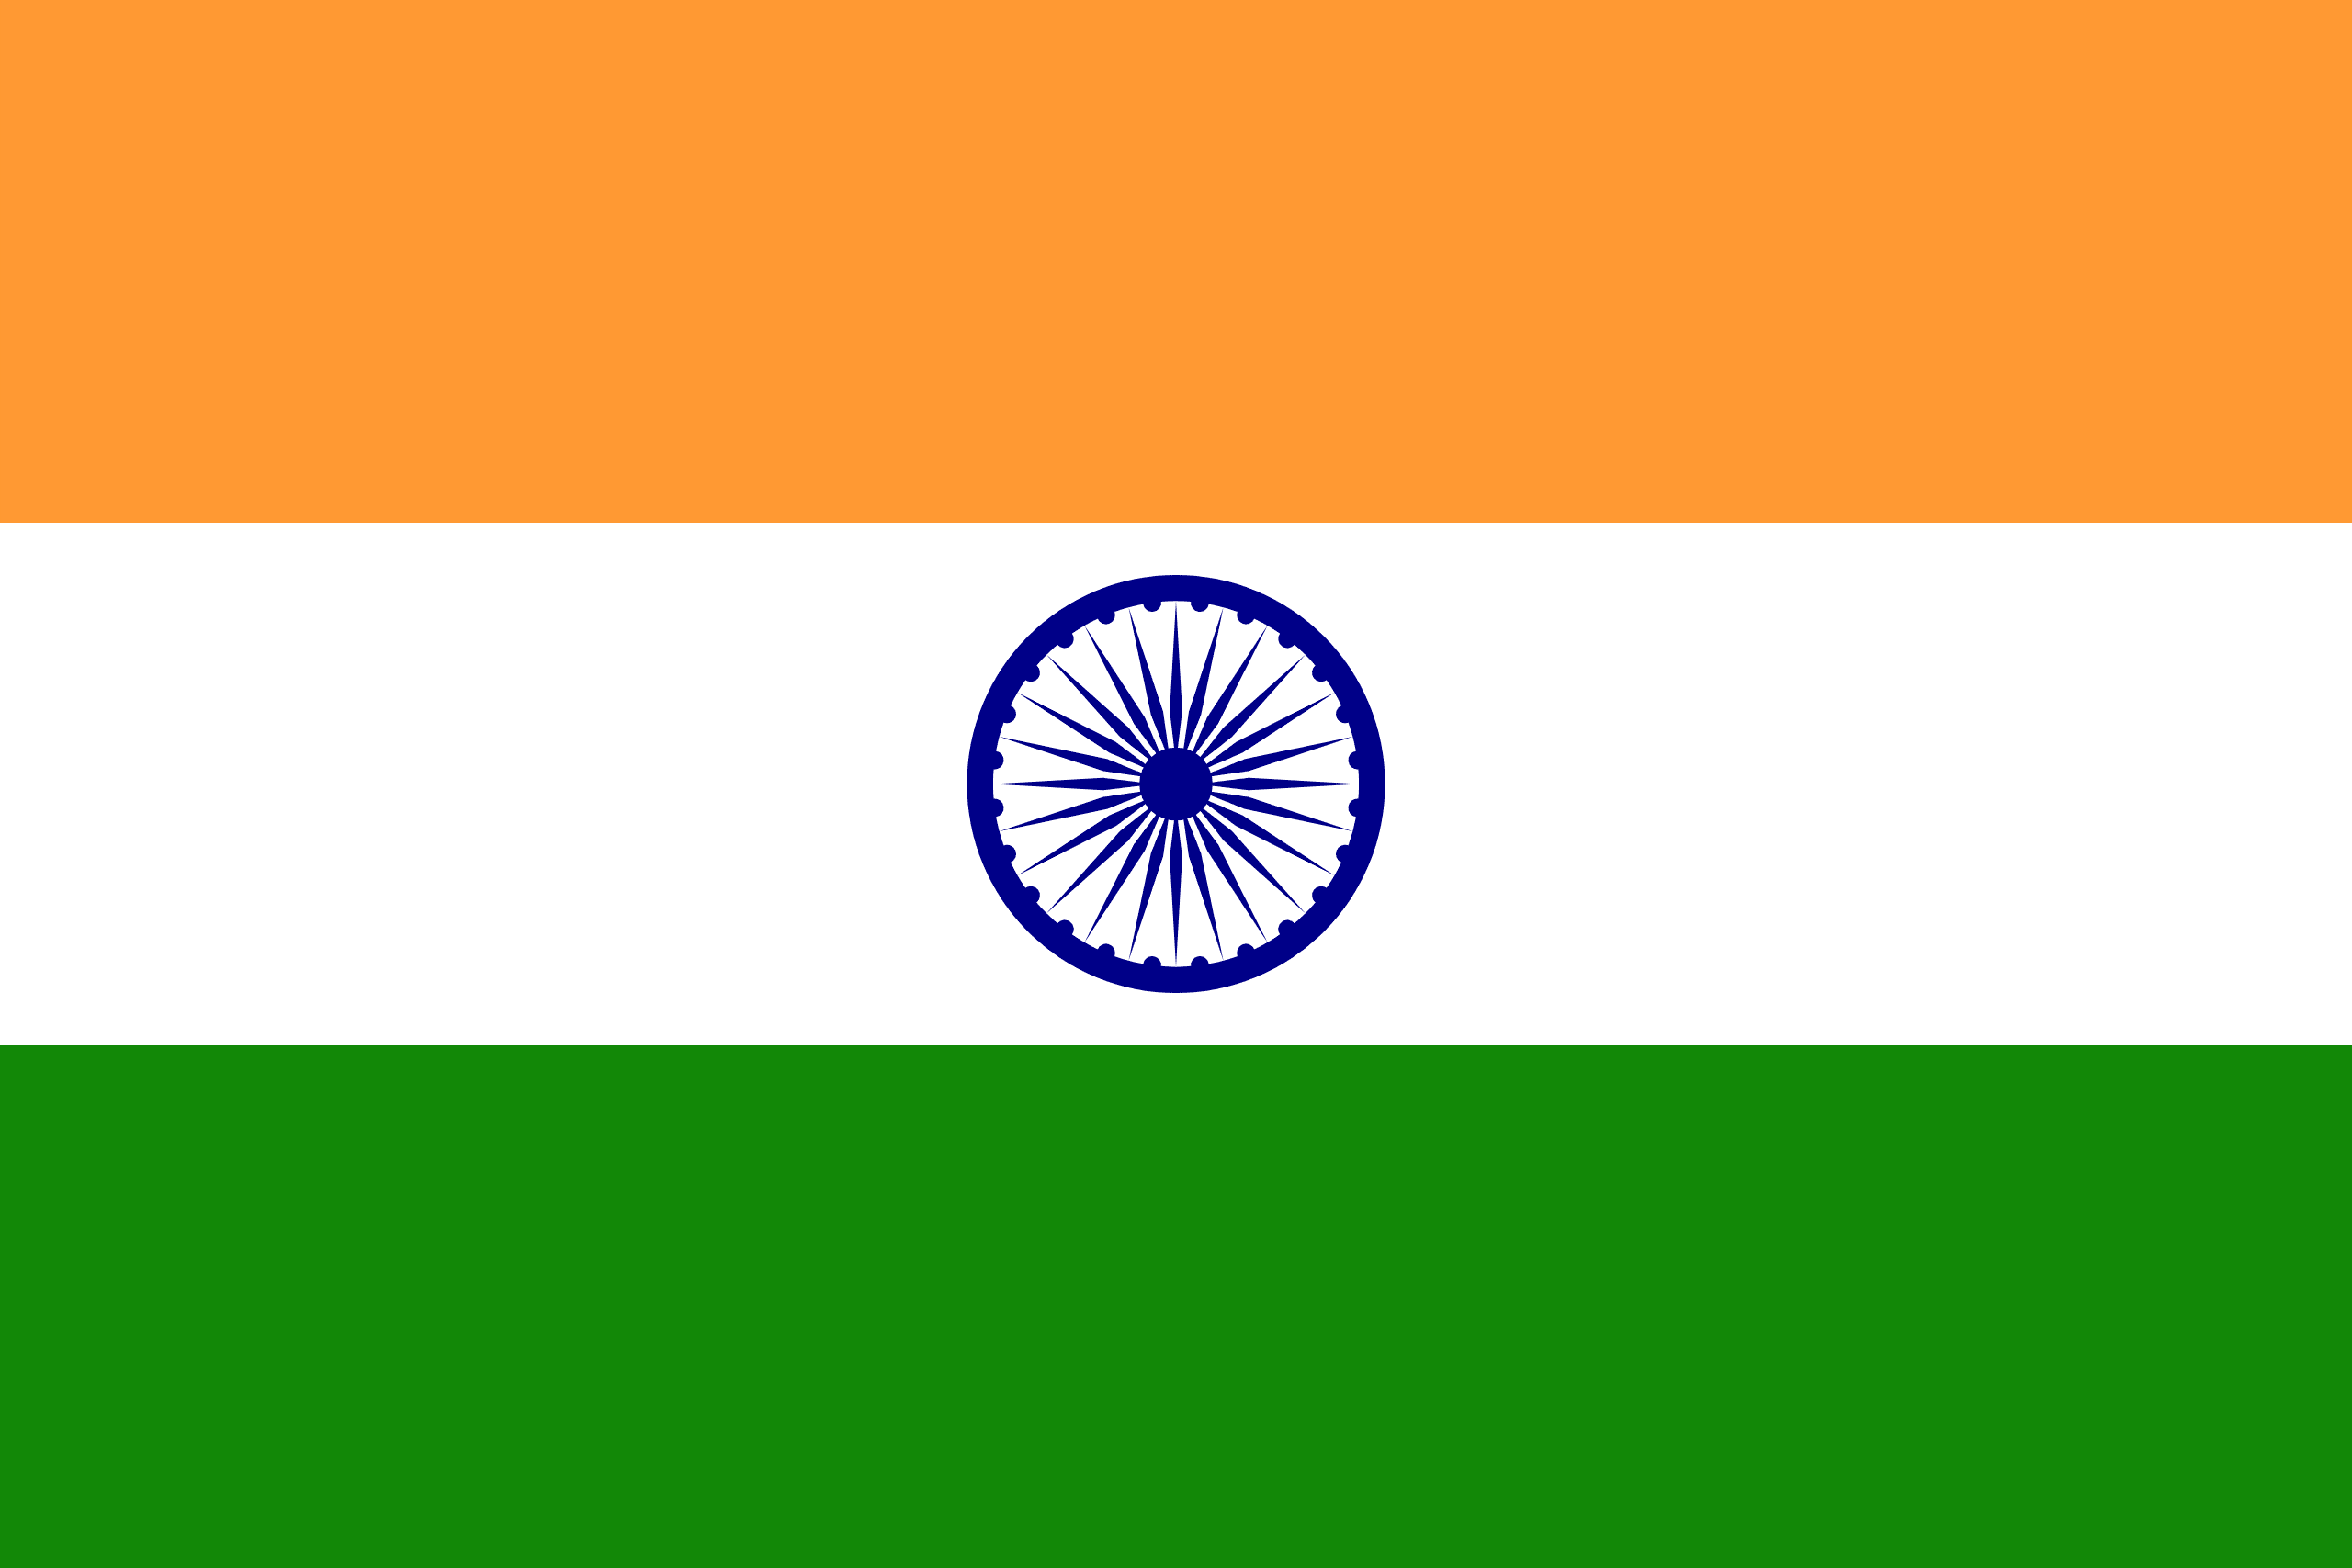

In [8]:
get_image('India')

In [9]:
get_image('US')

'Not found. use search_key to get suggestions'

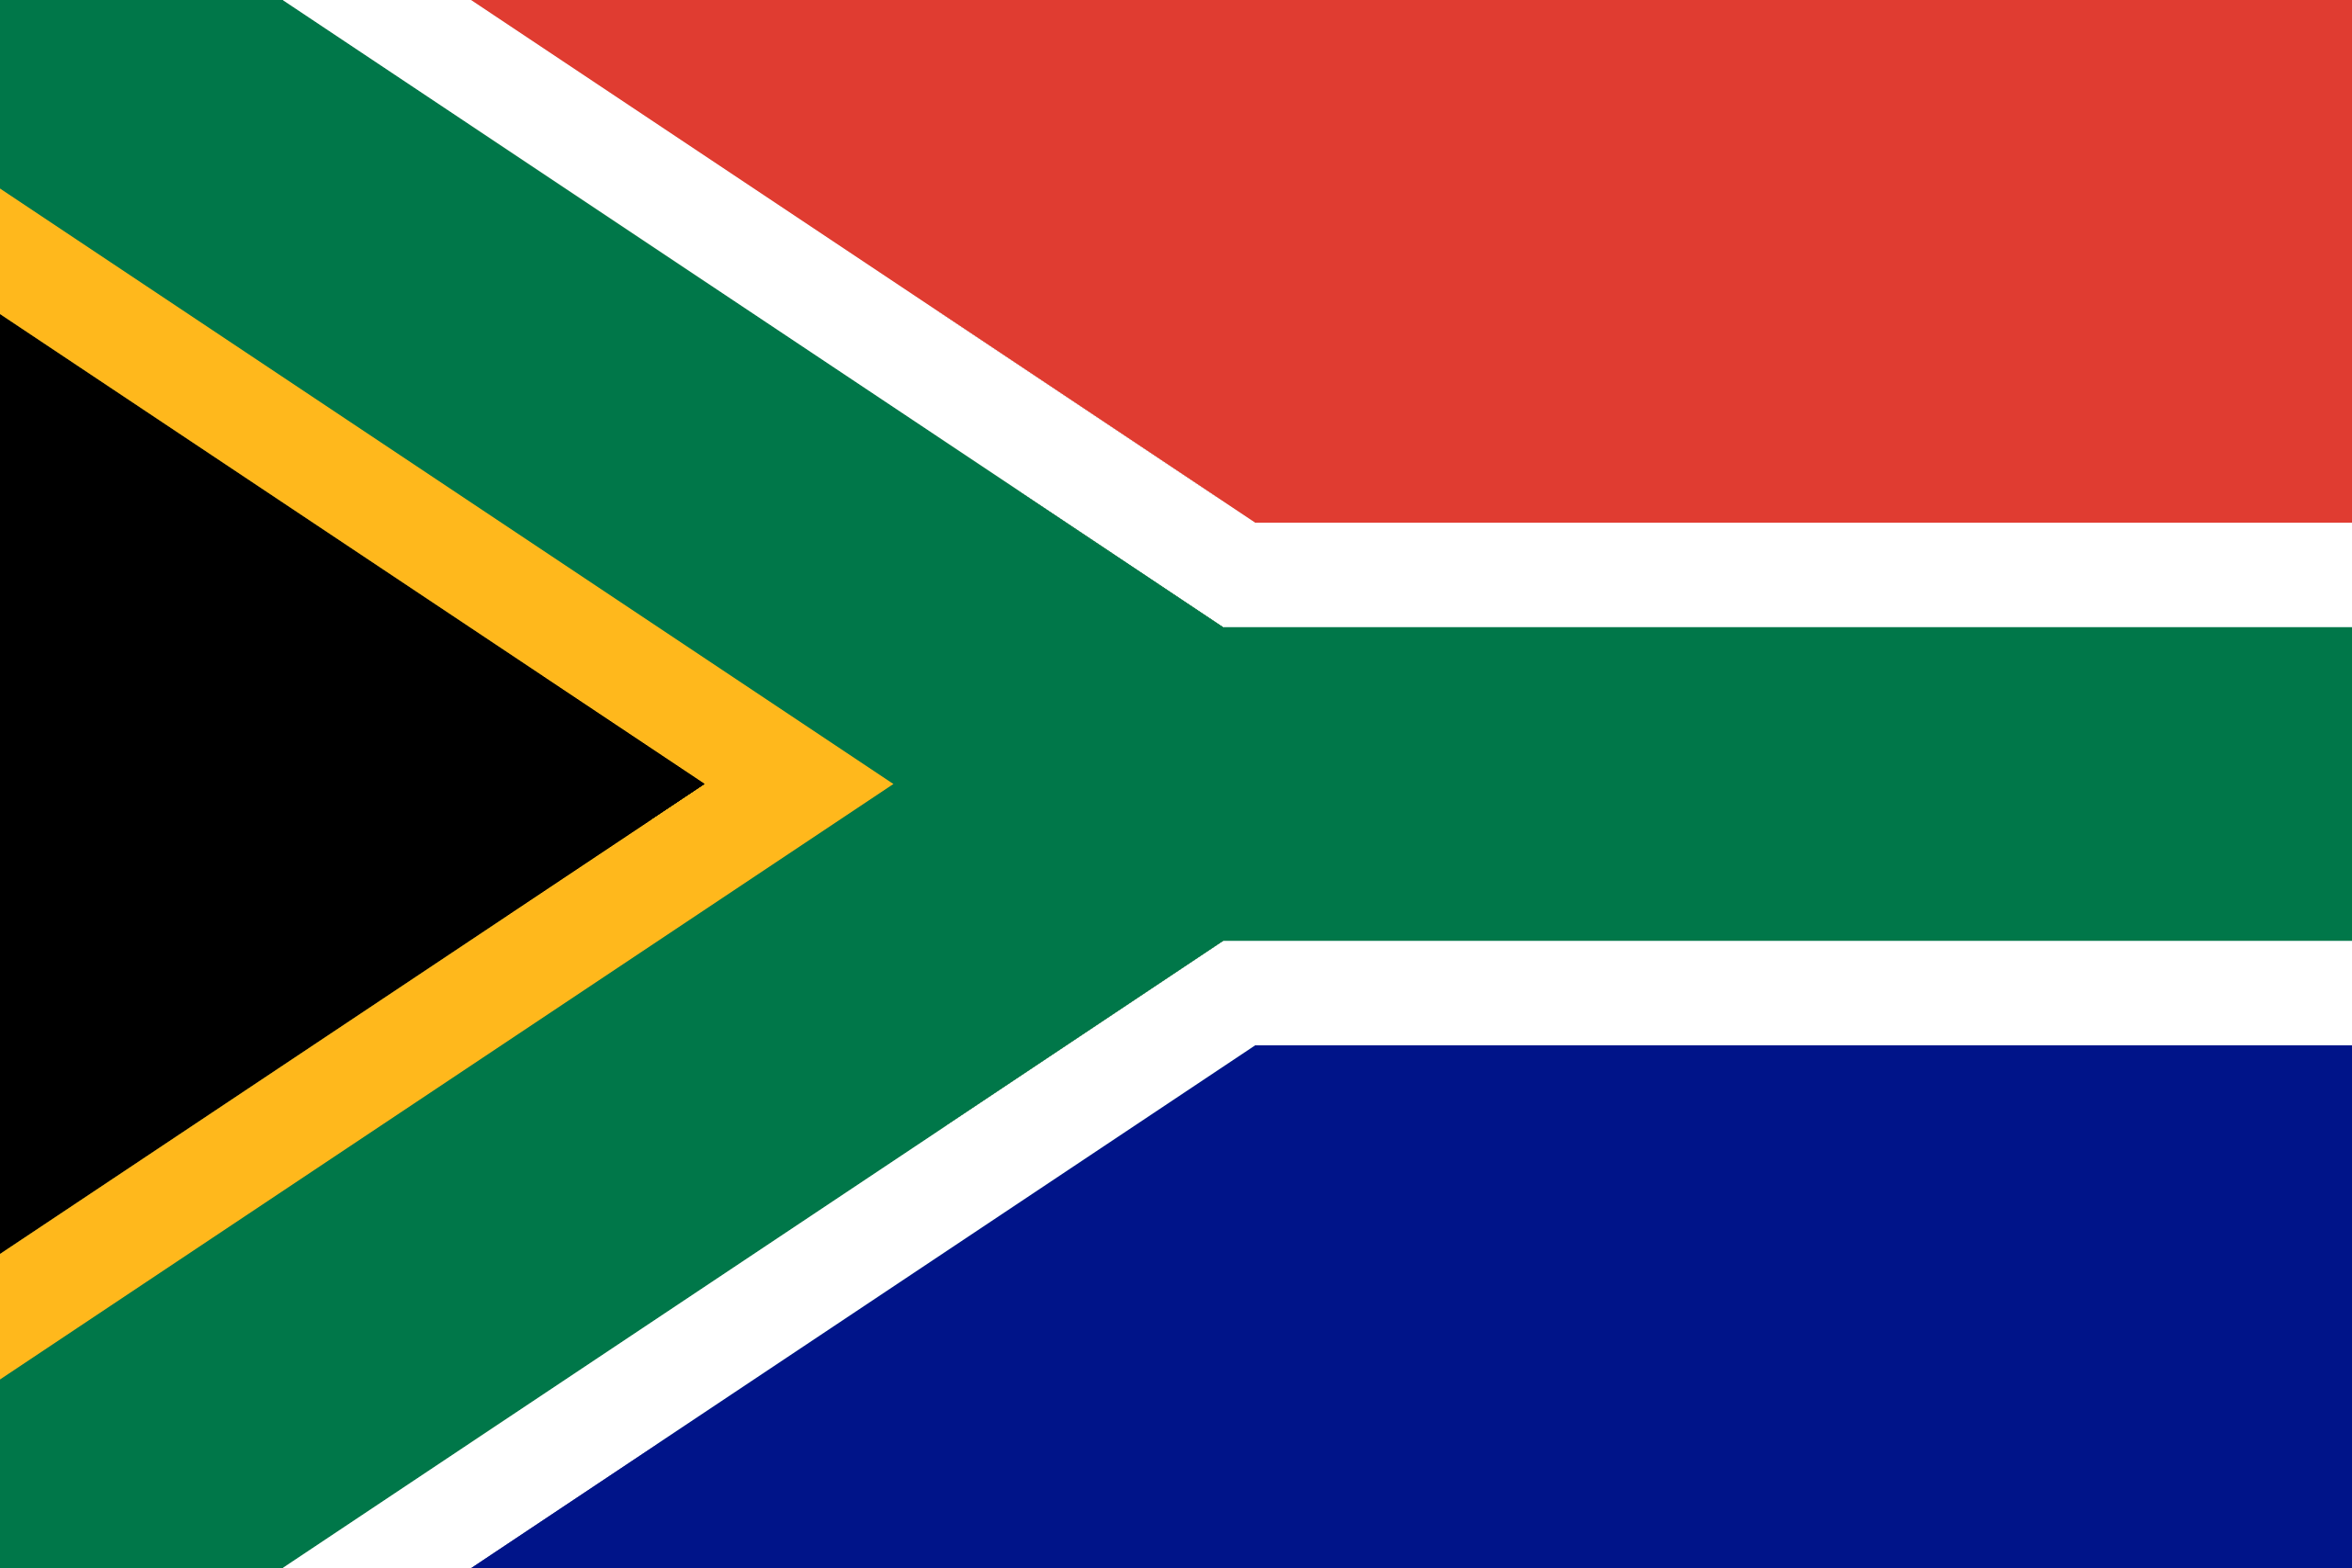

In [10]:
get_image('South Africa')

5.Display all flags in a loop
---
We will now test the contents of ***countries_dict*** dictionary by displaying the flags.

Afghanistan


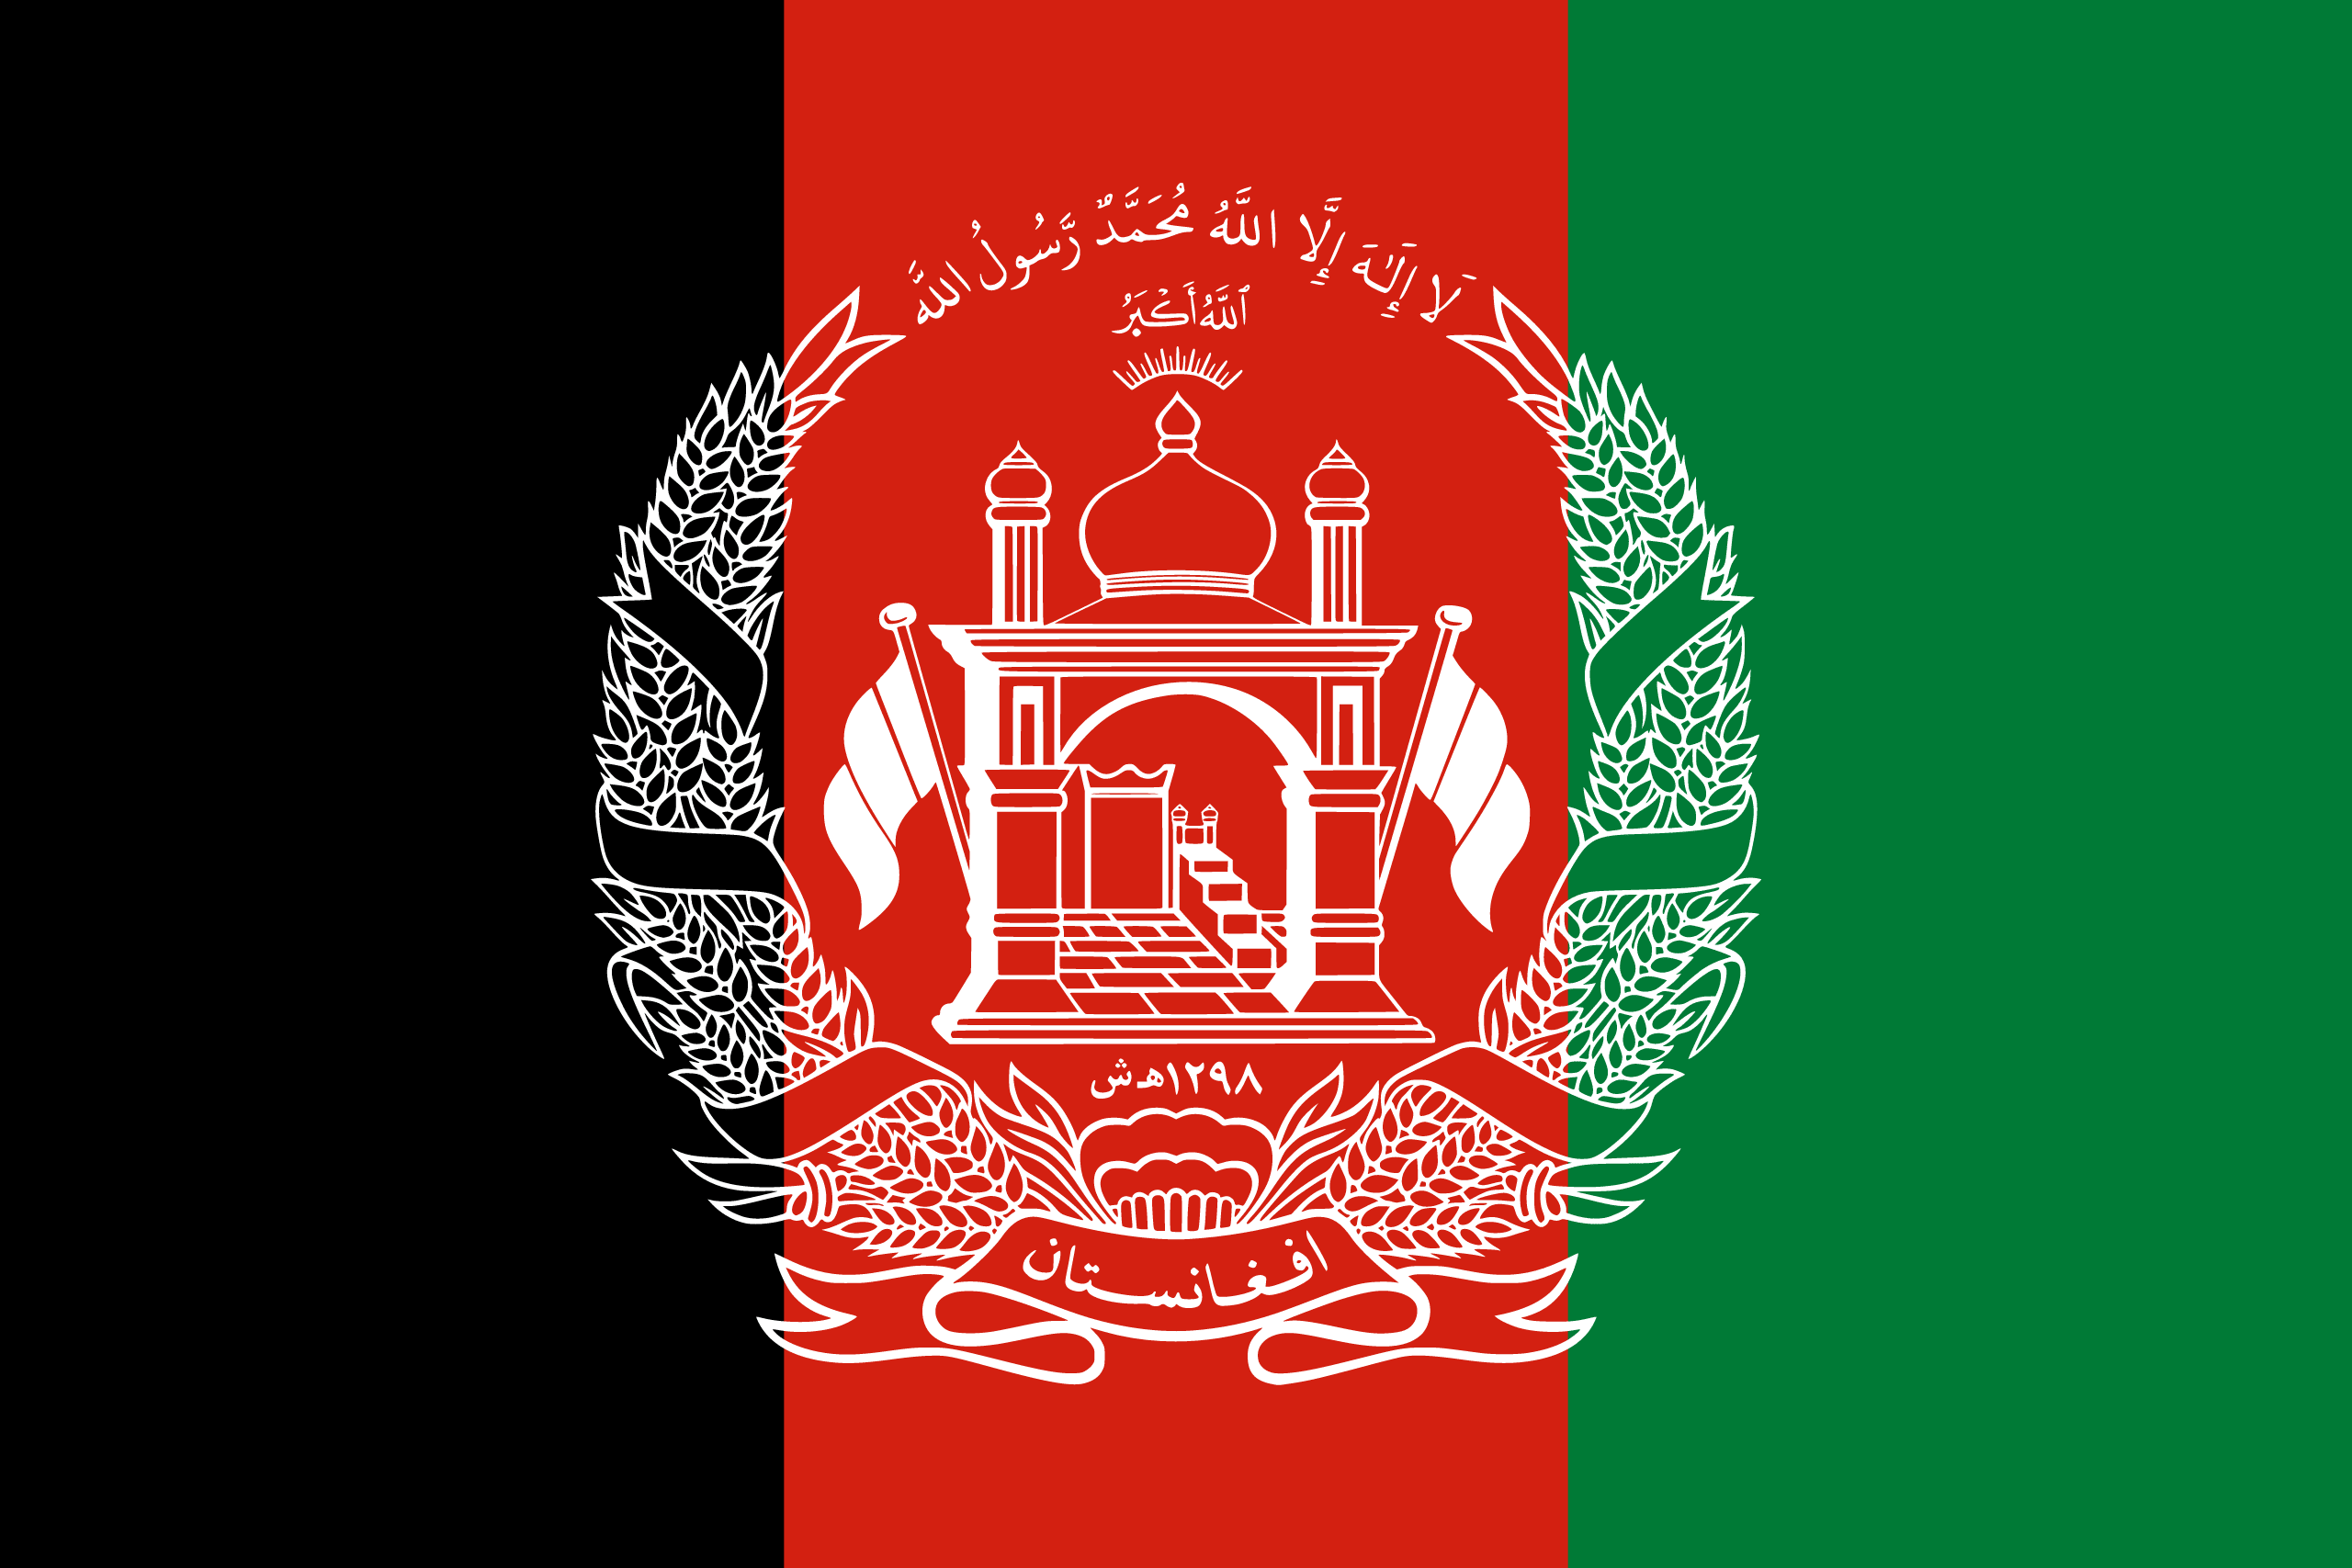

Åland Islands


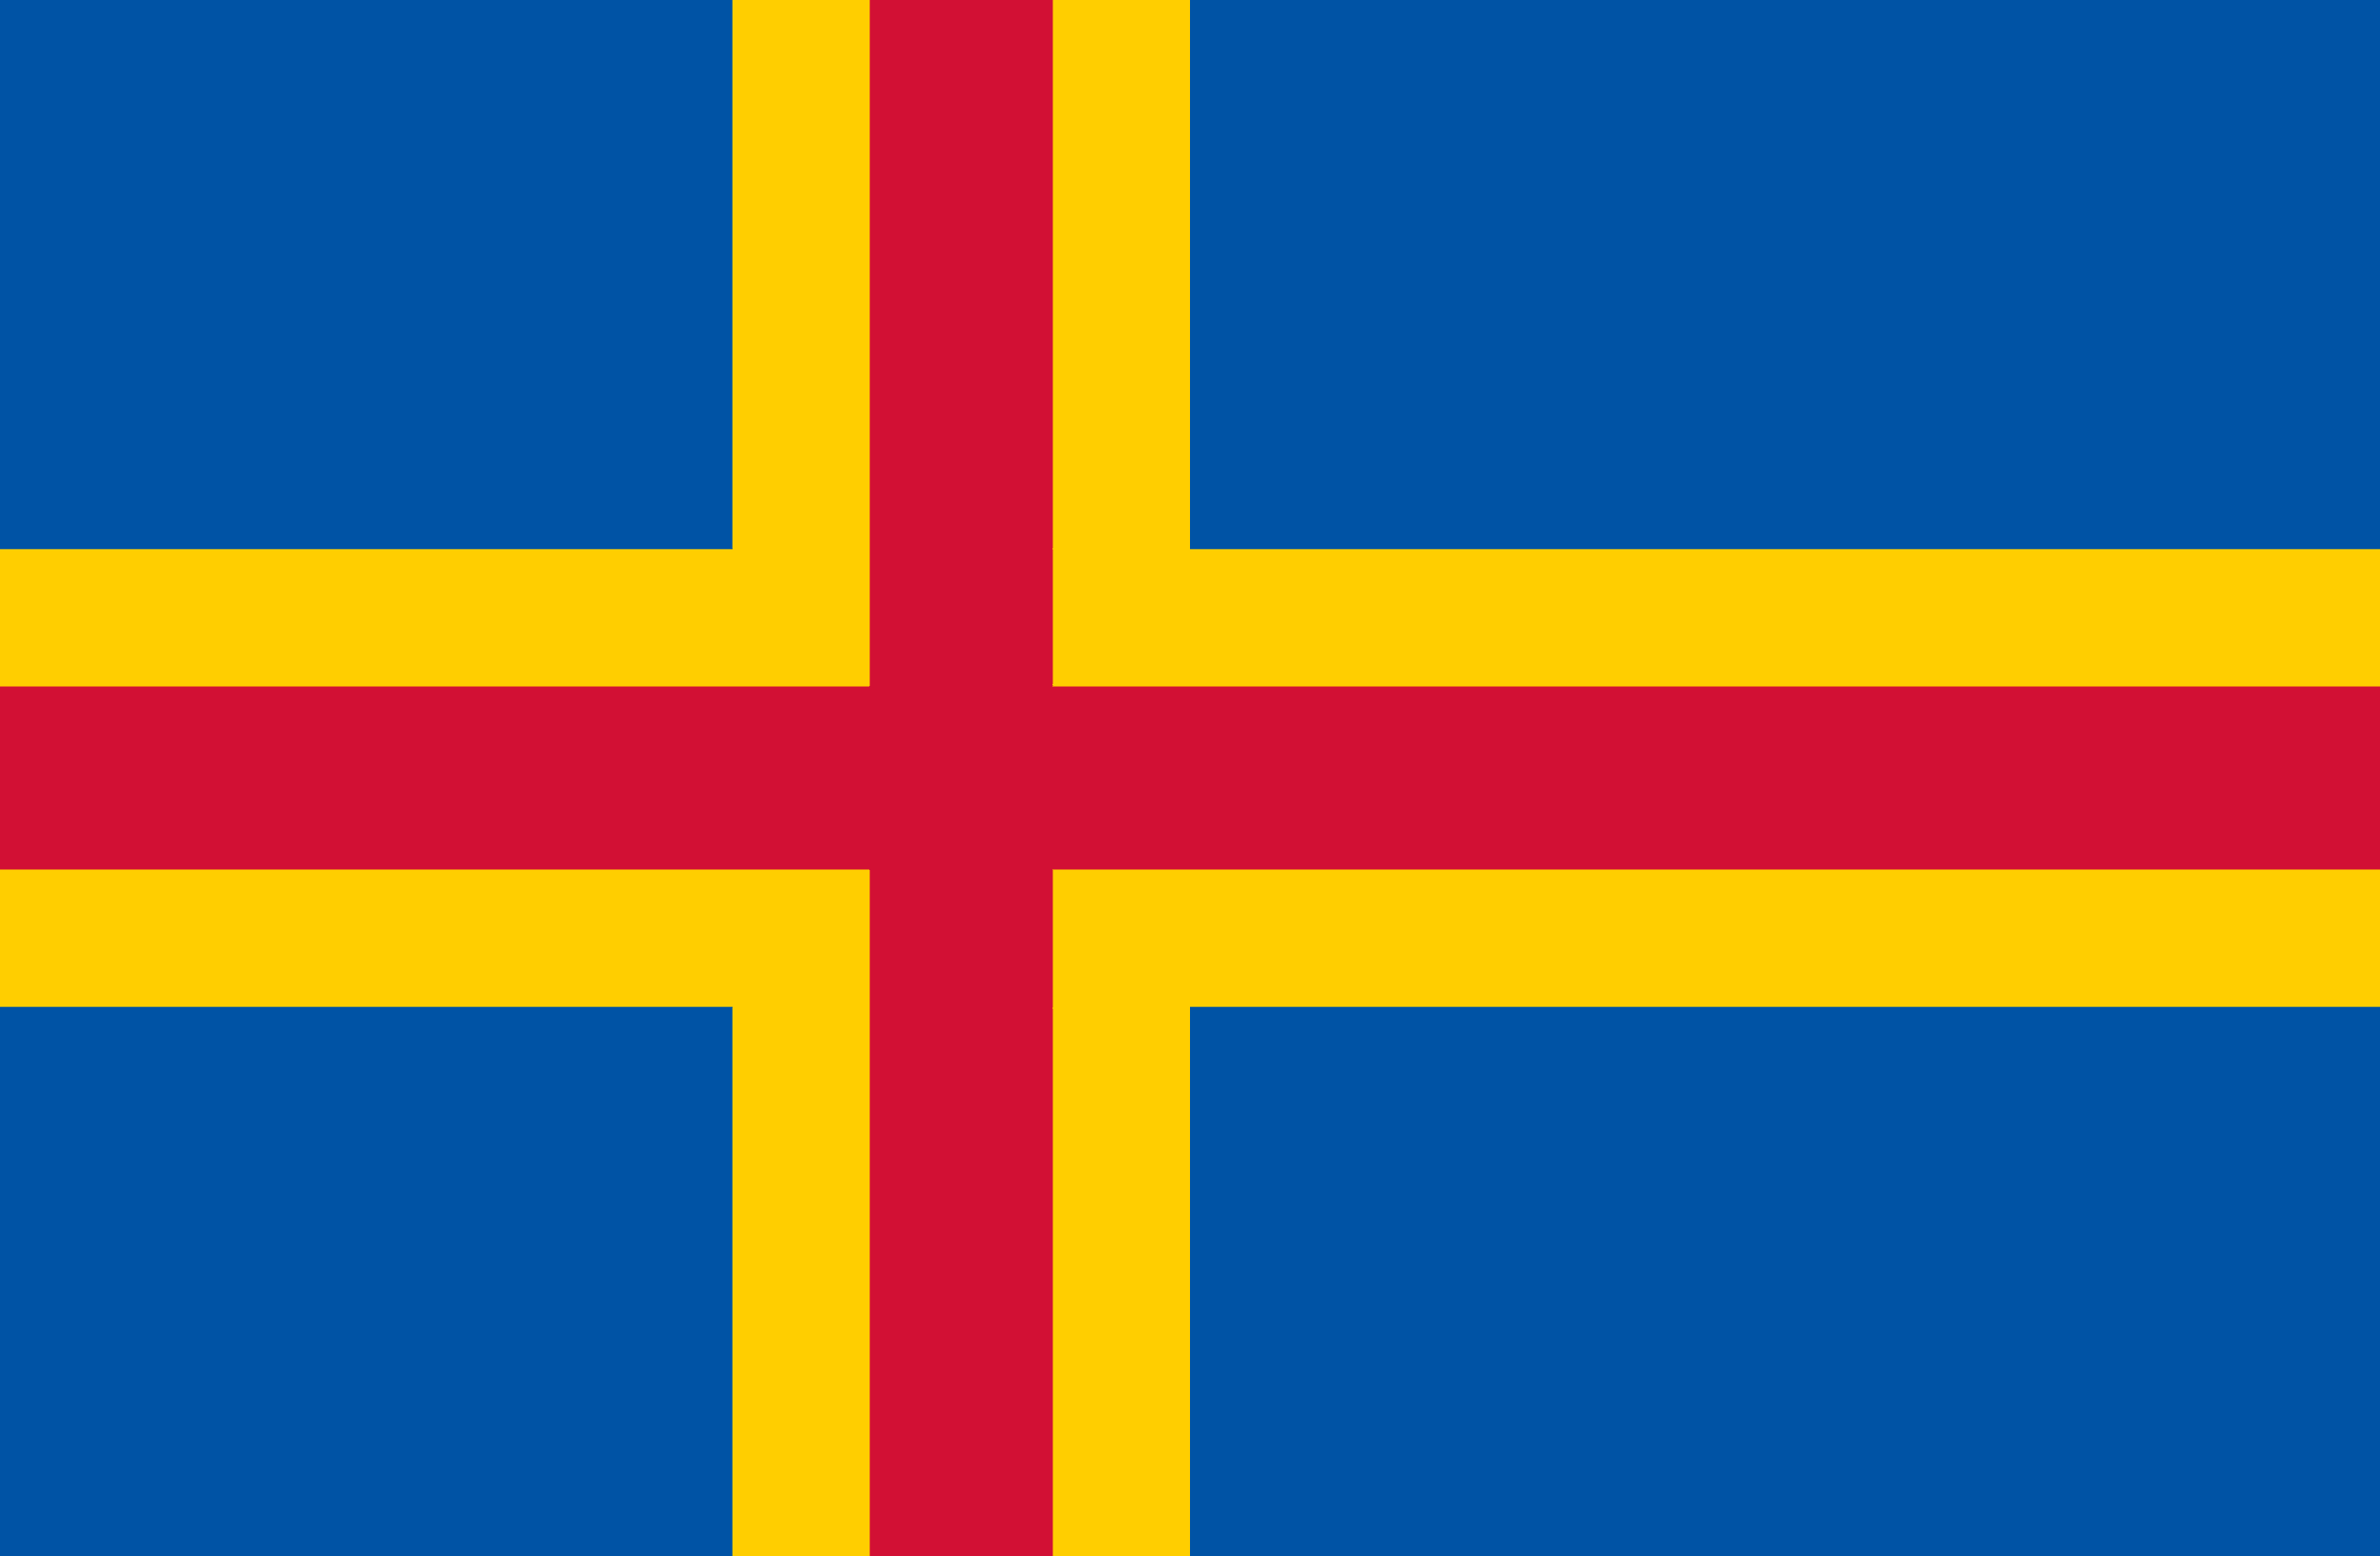

Albania


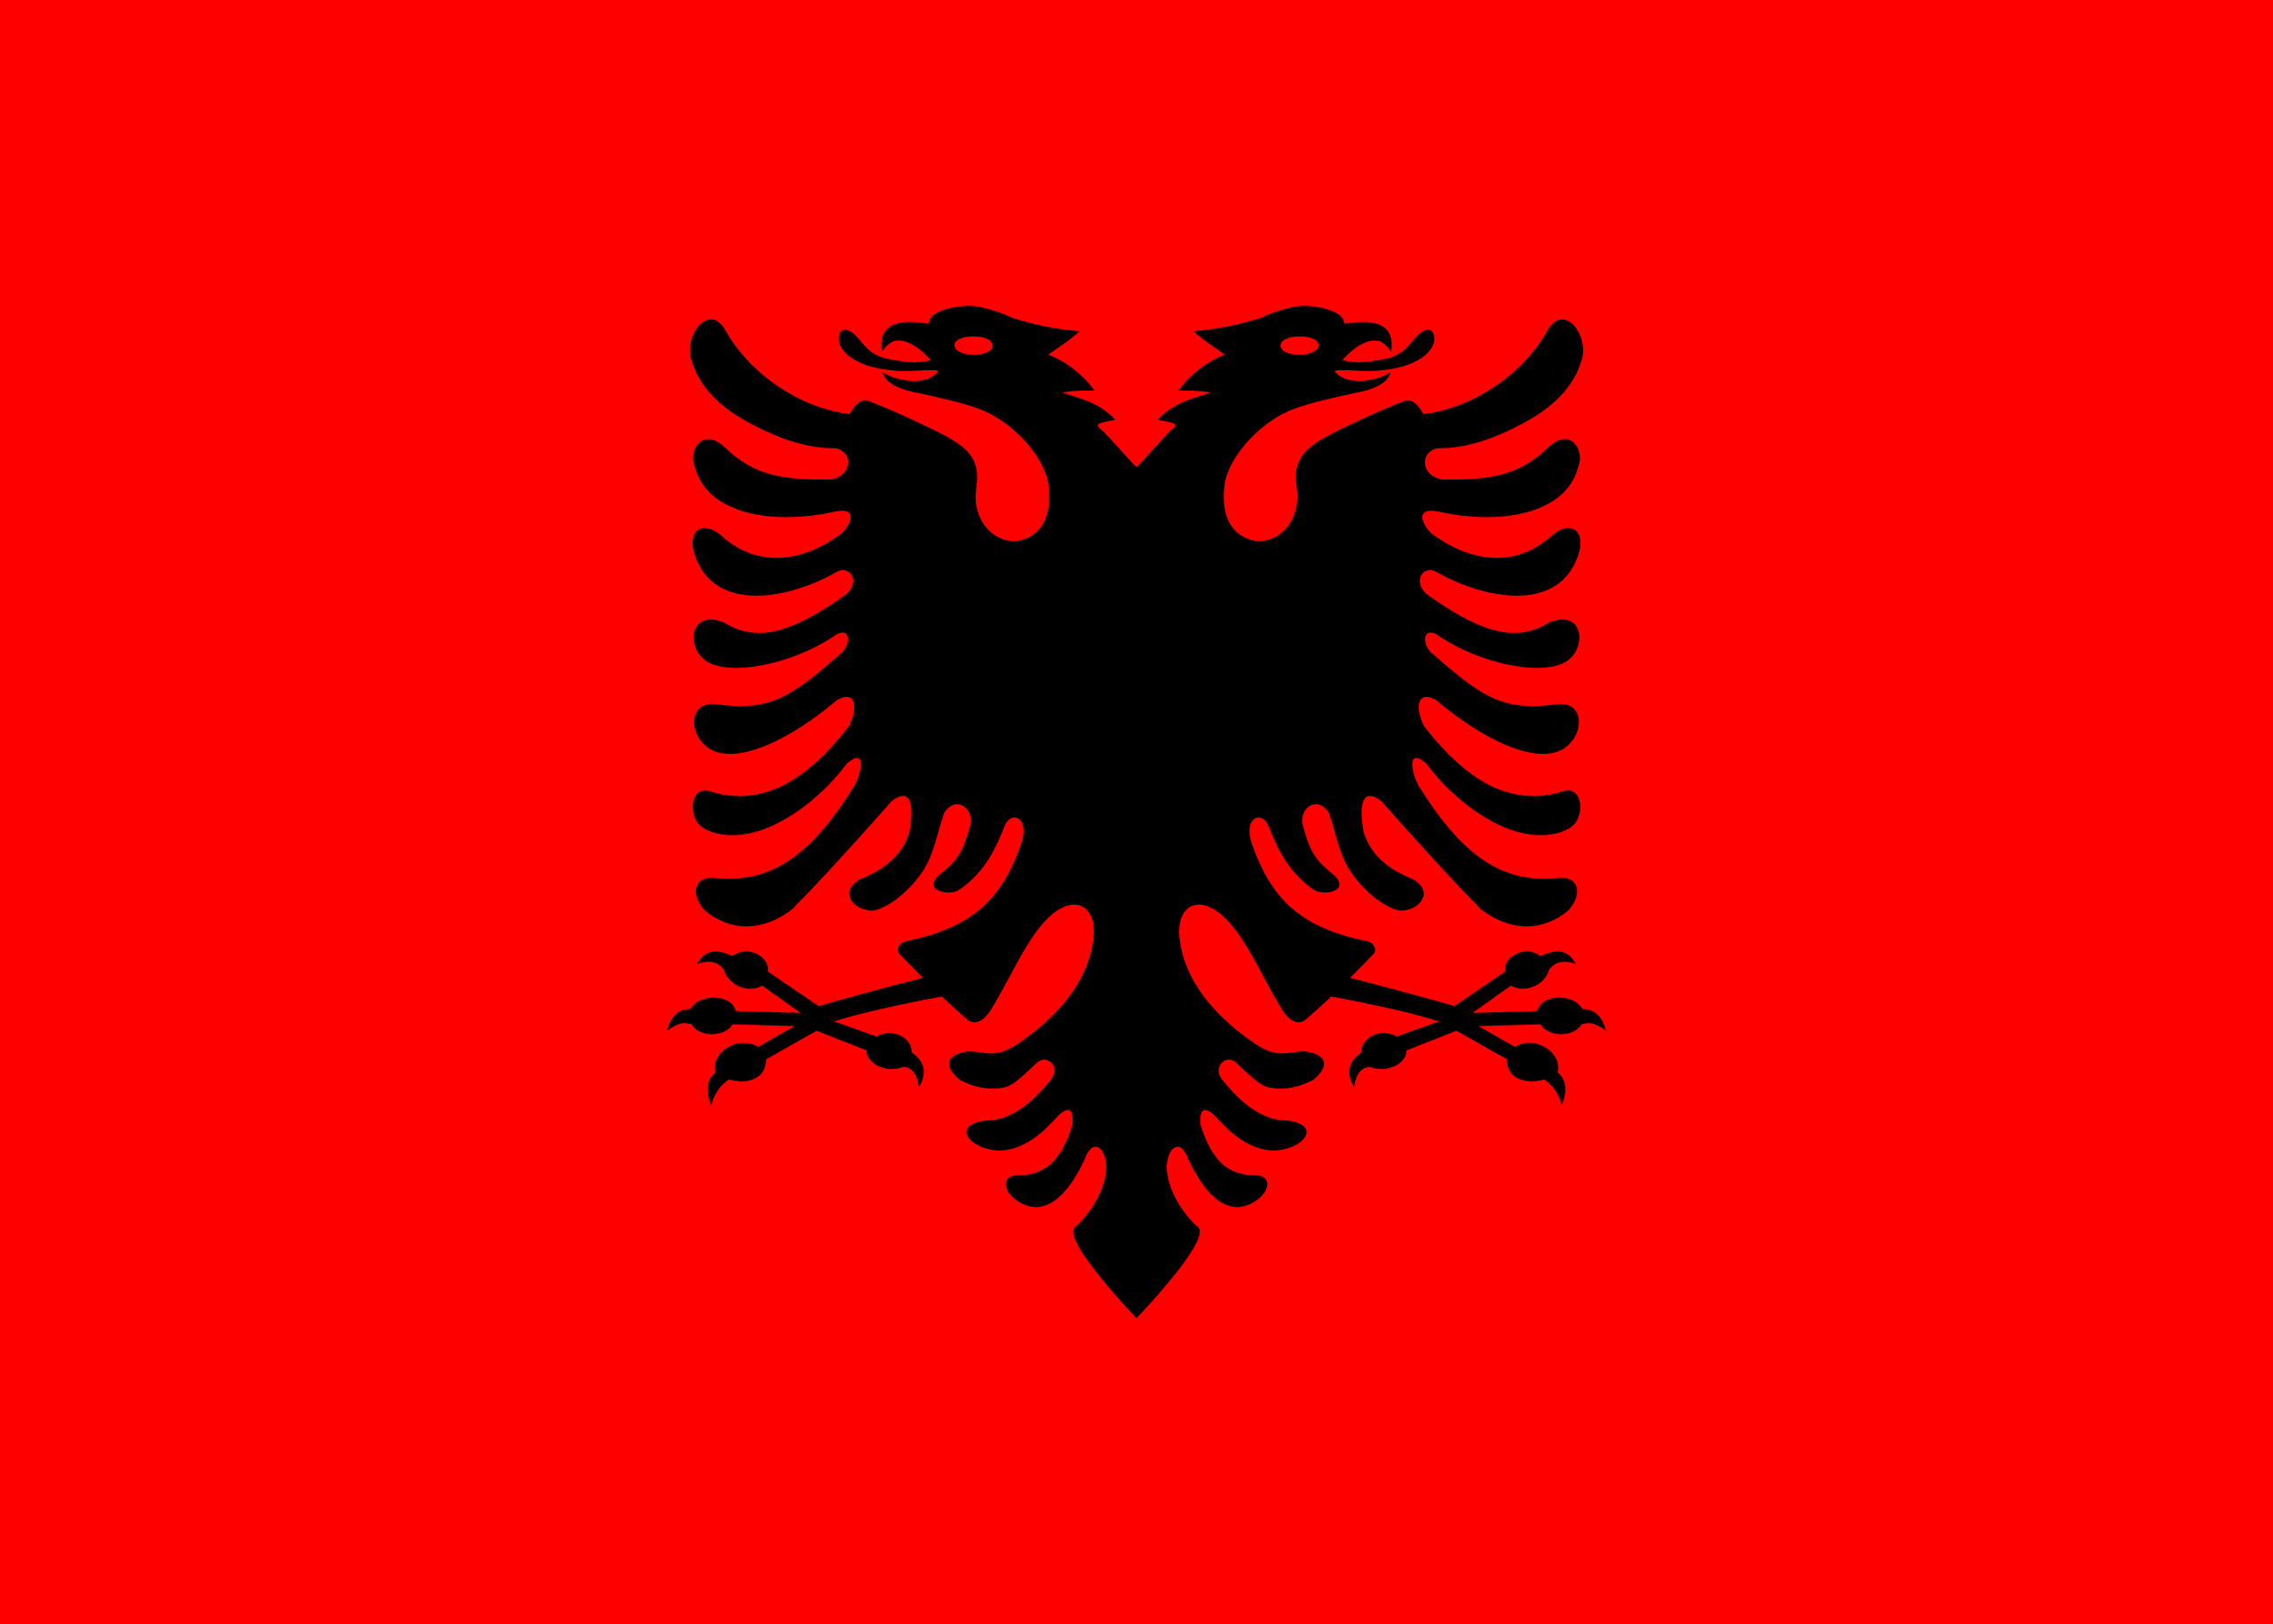

Algeria


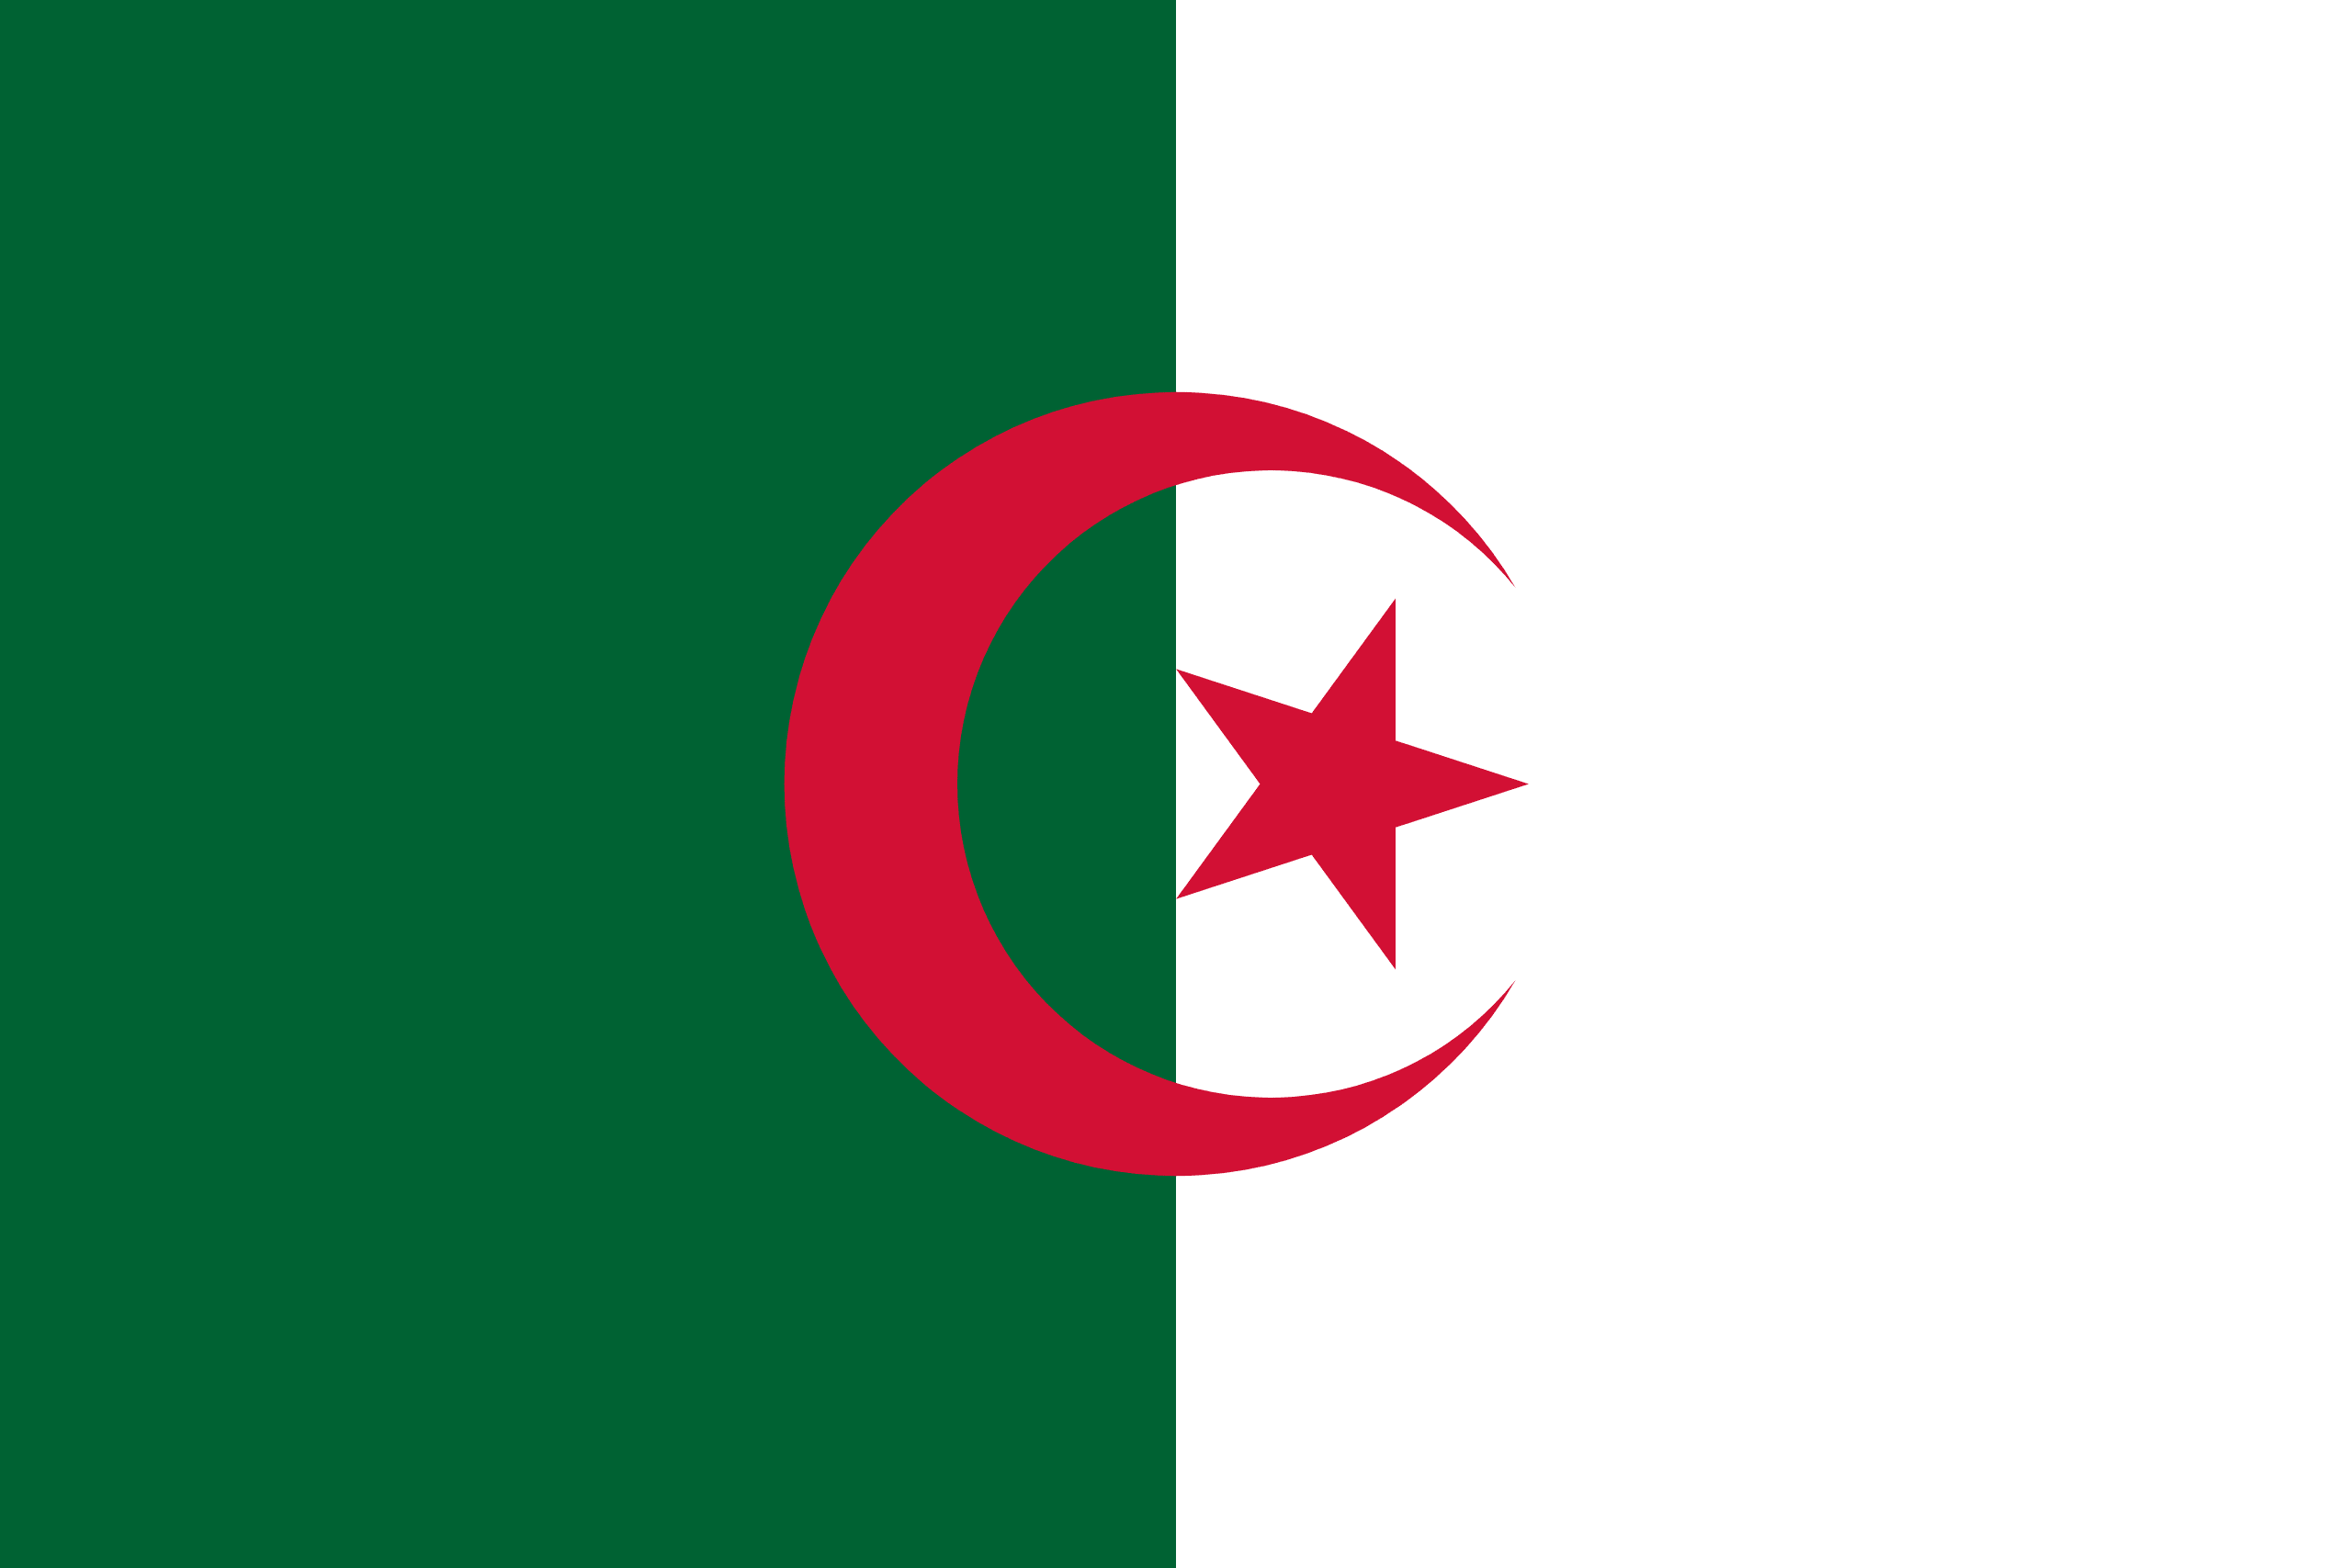

American Samoa


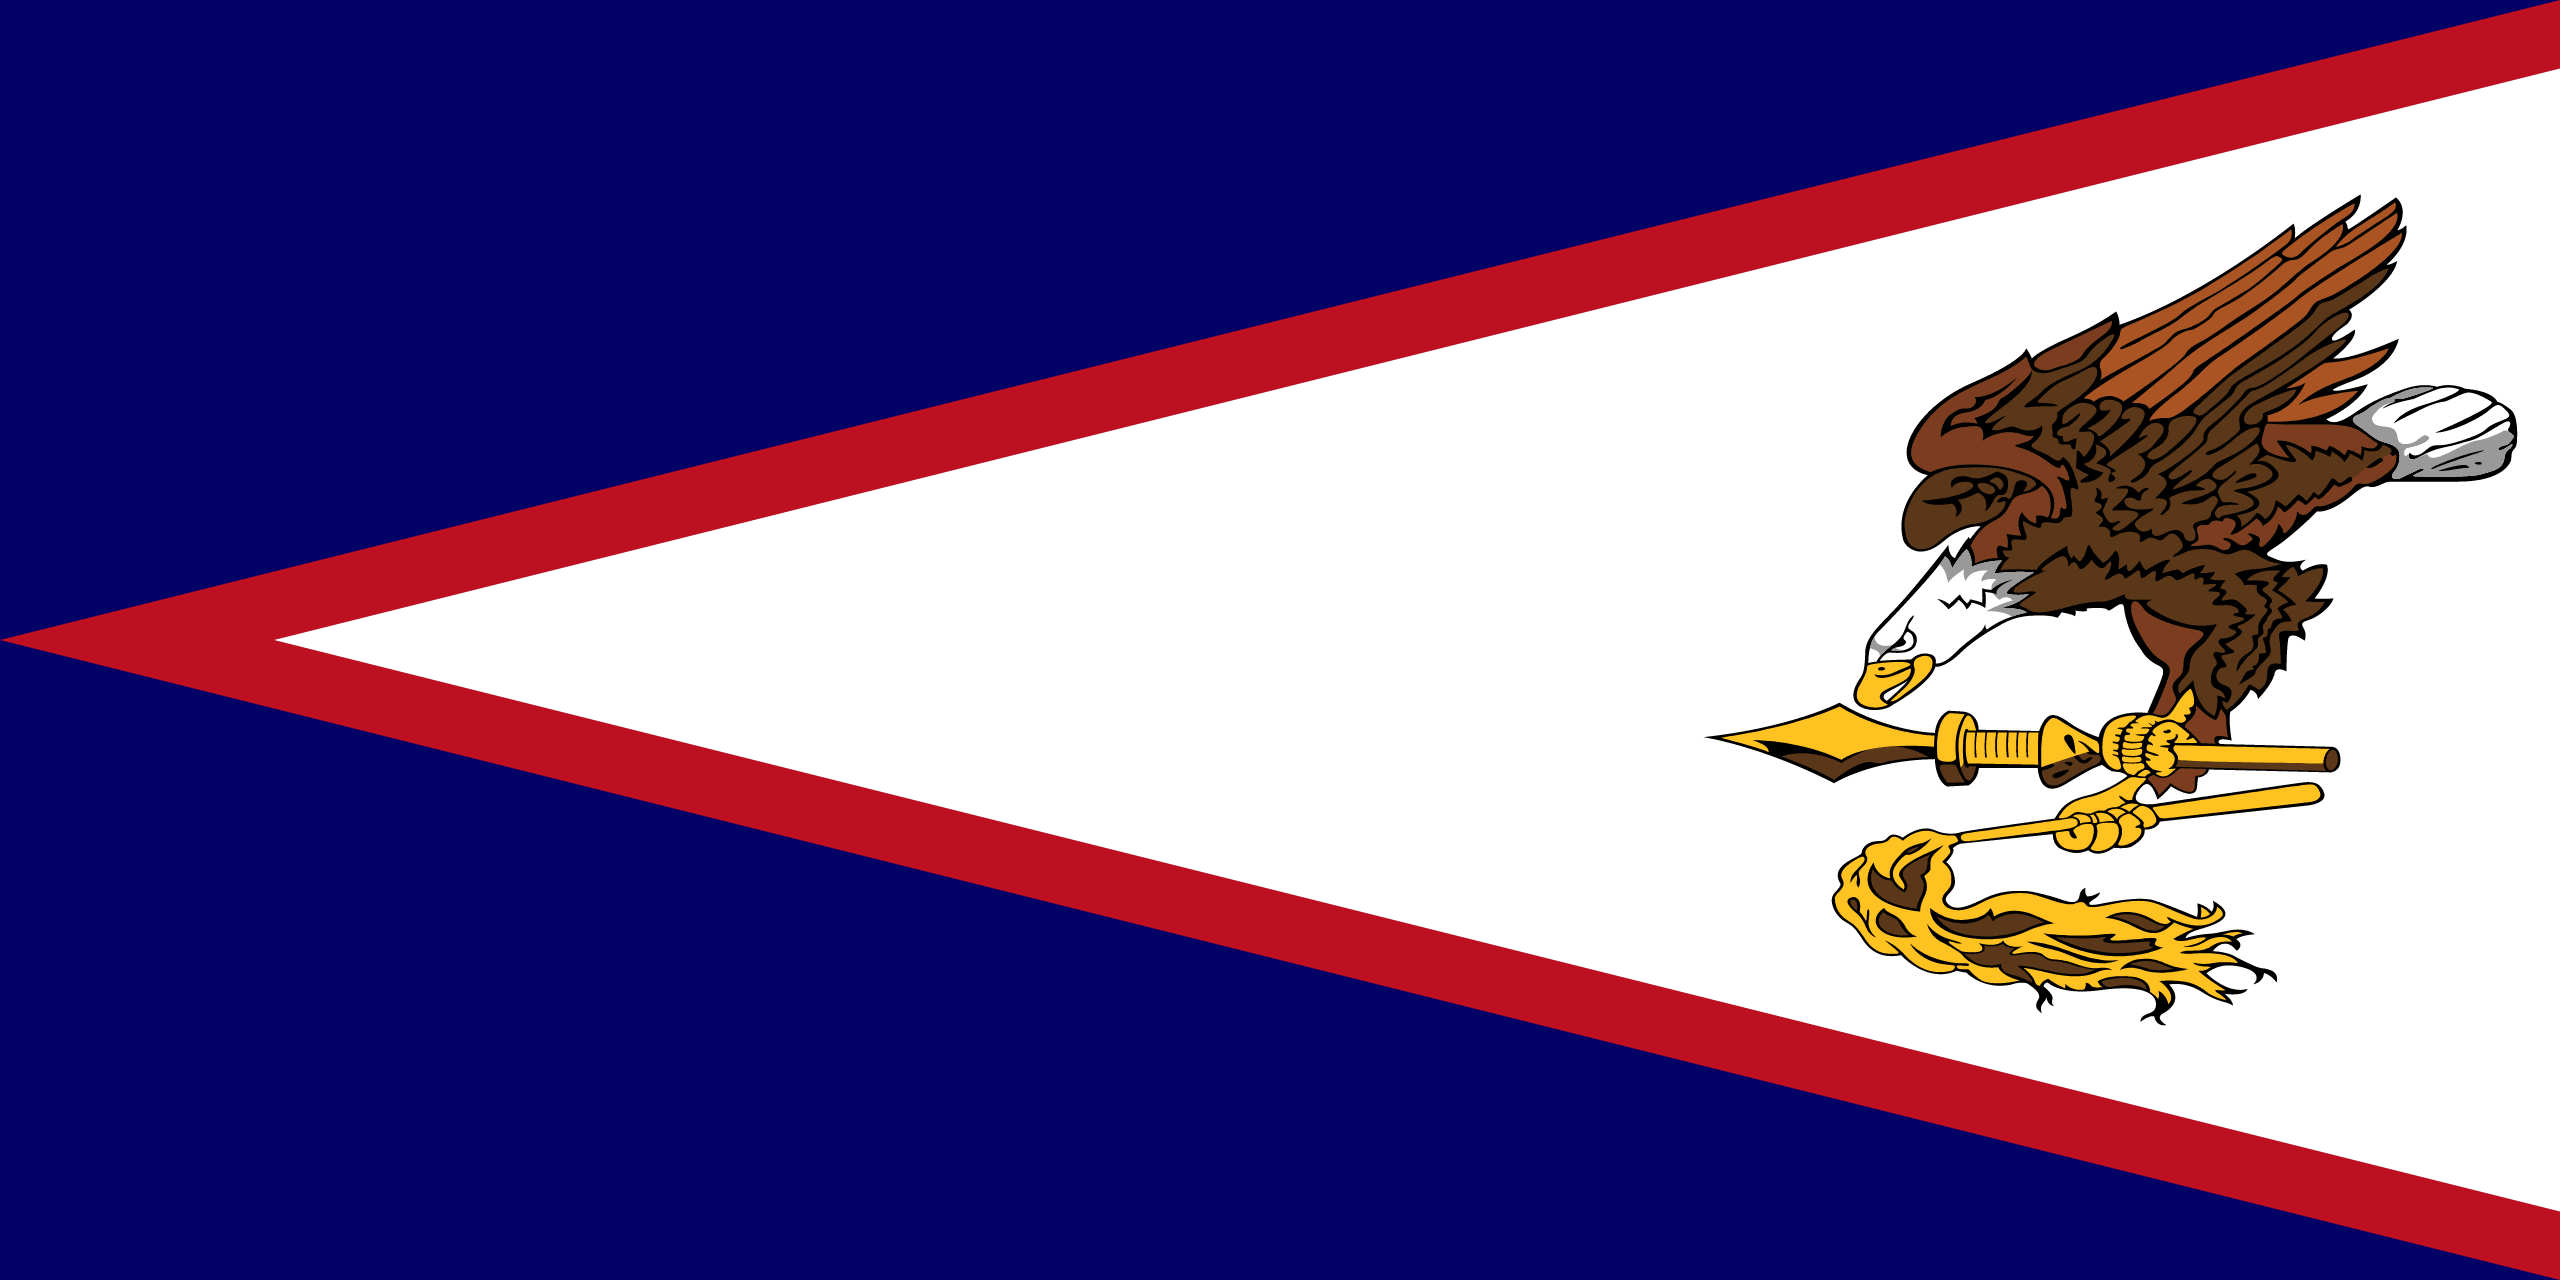

Andorra


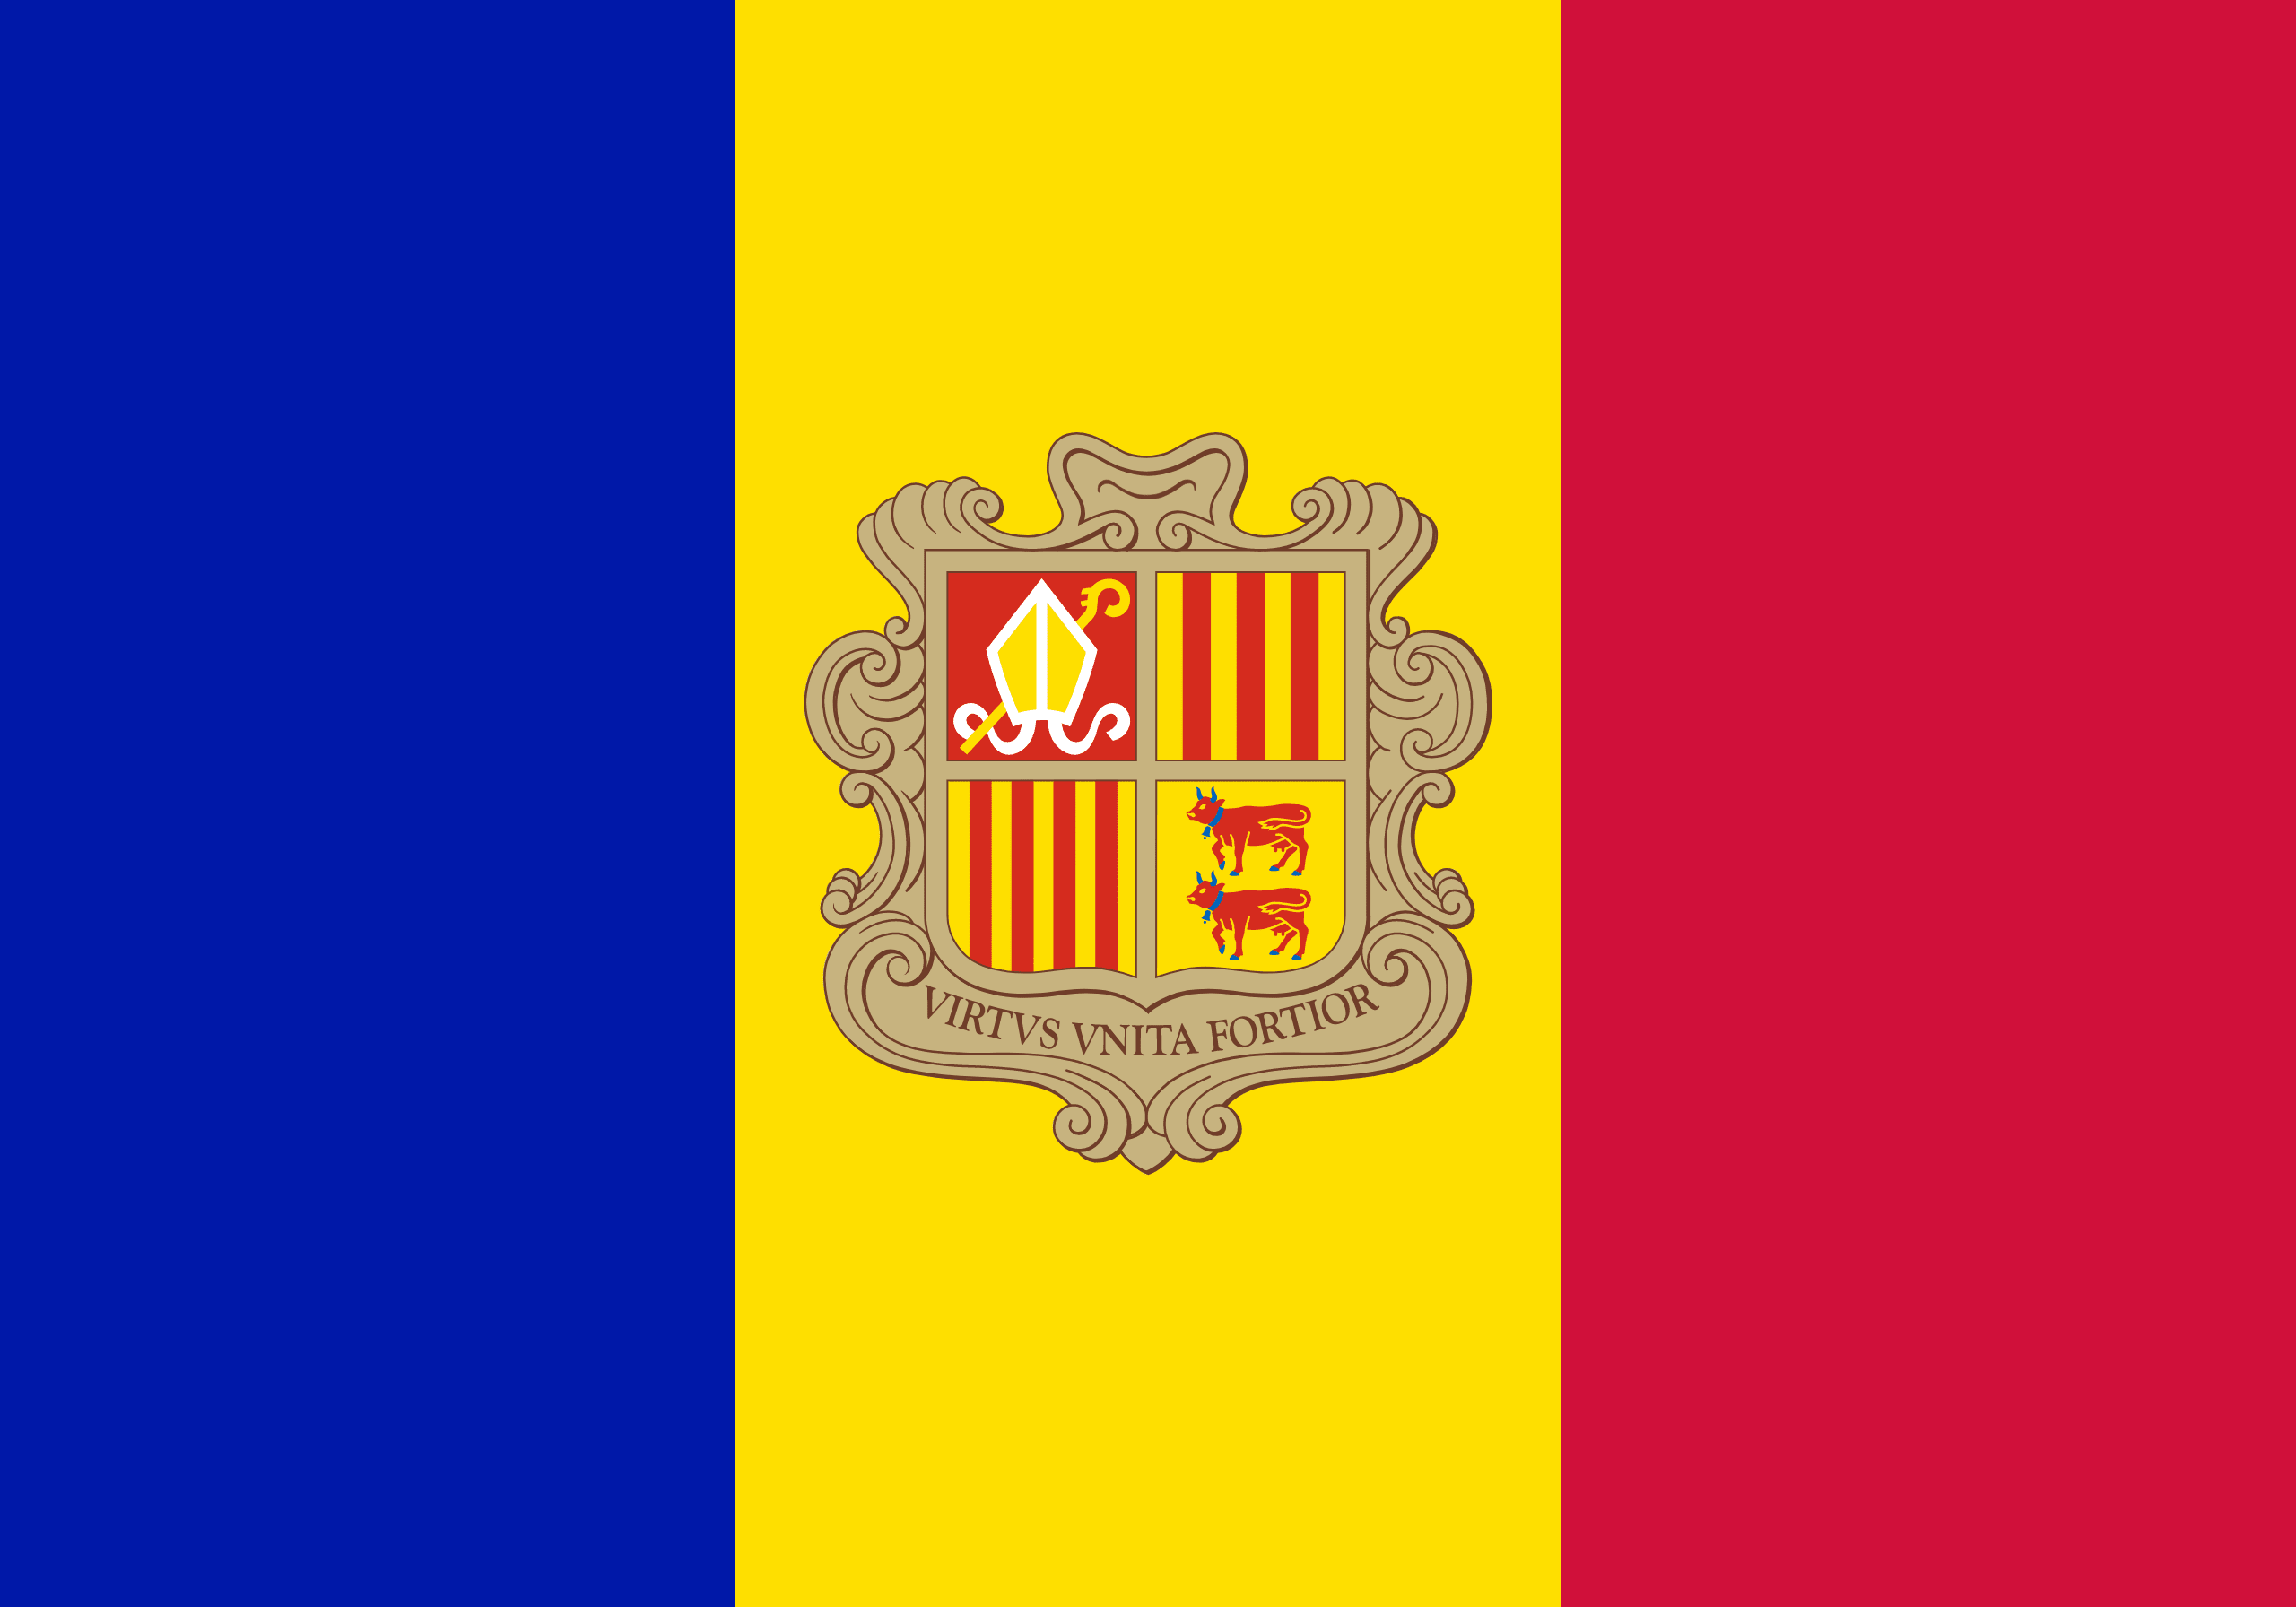

Angola


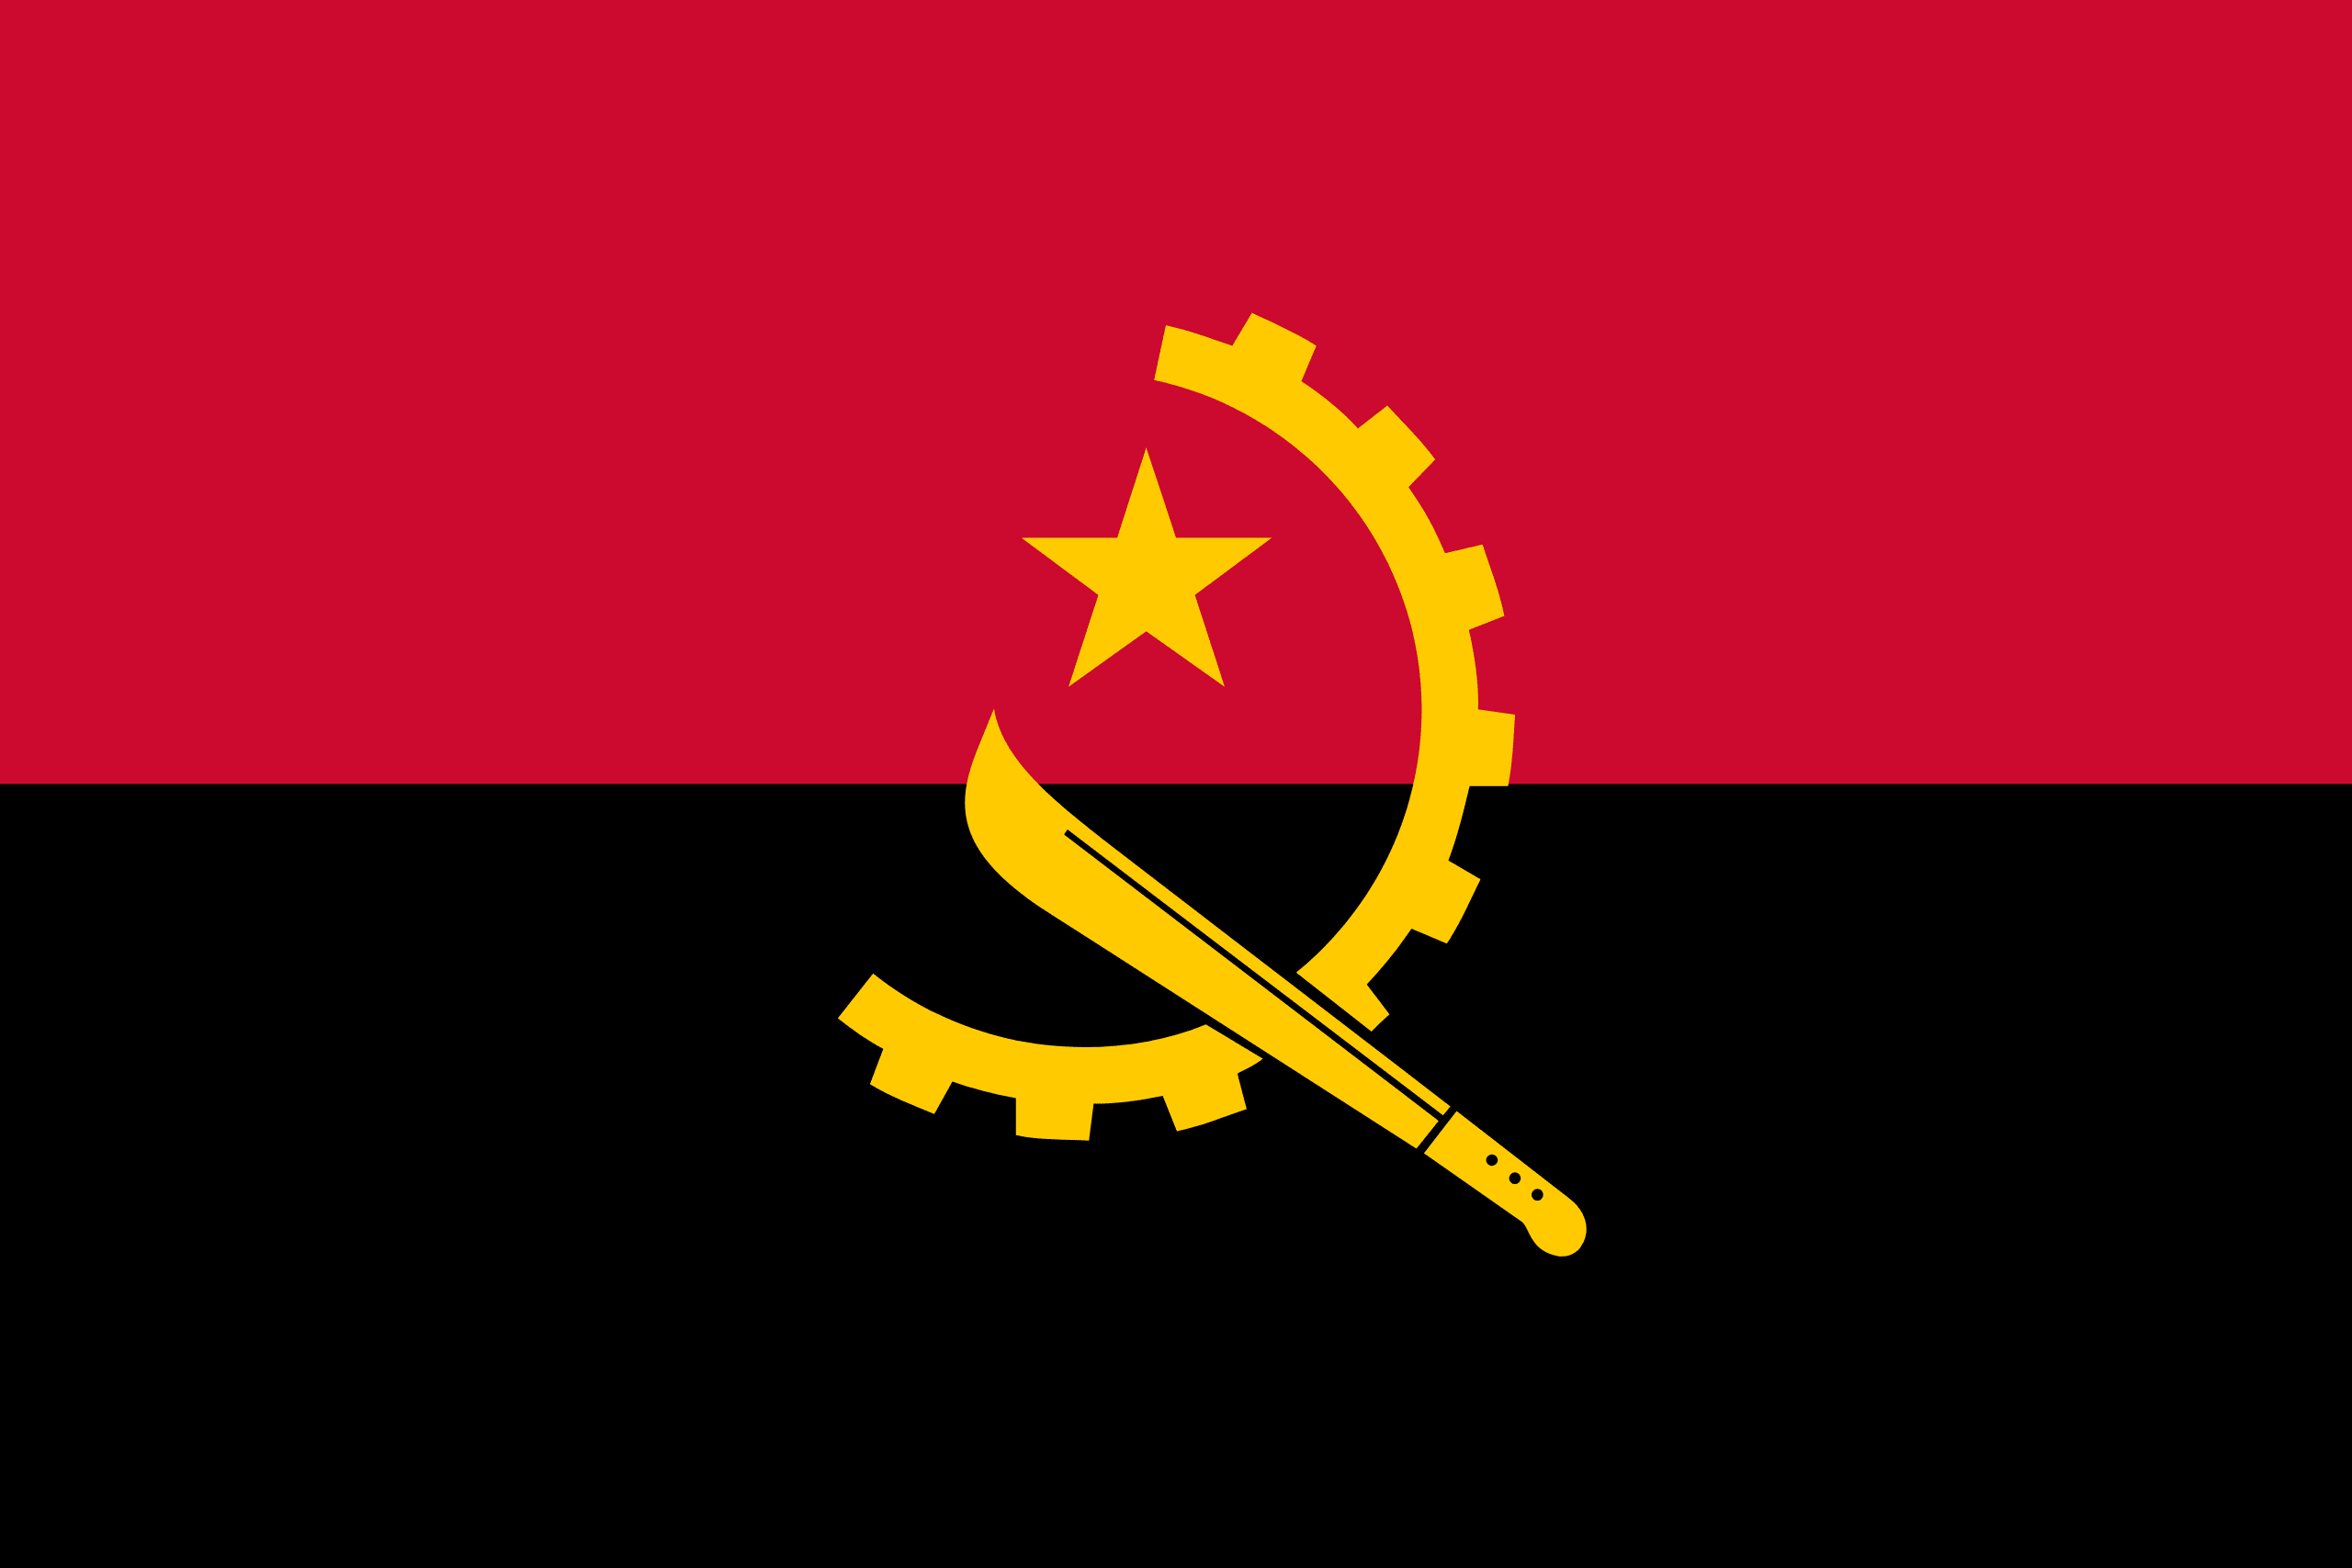

Anguilla


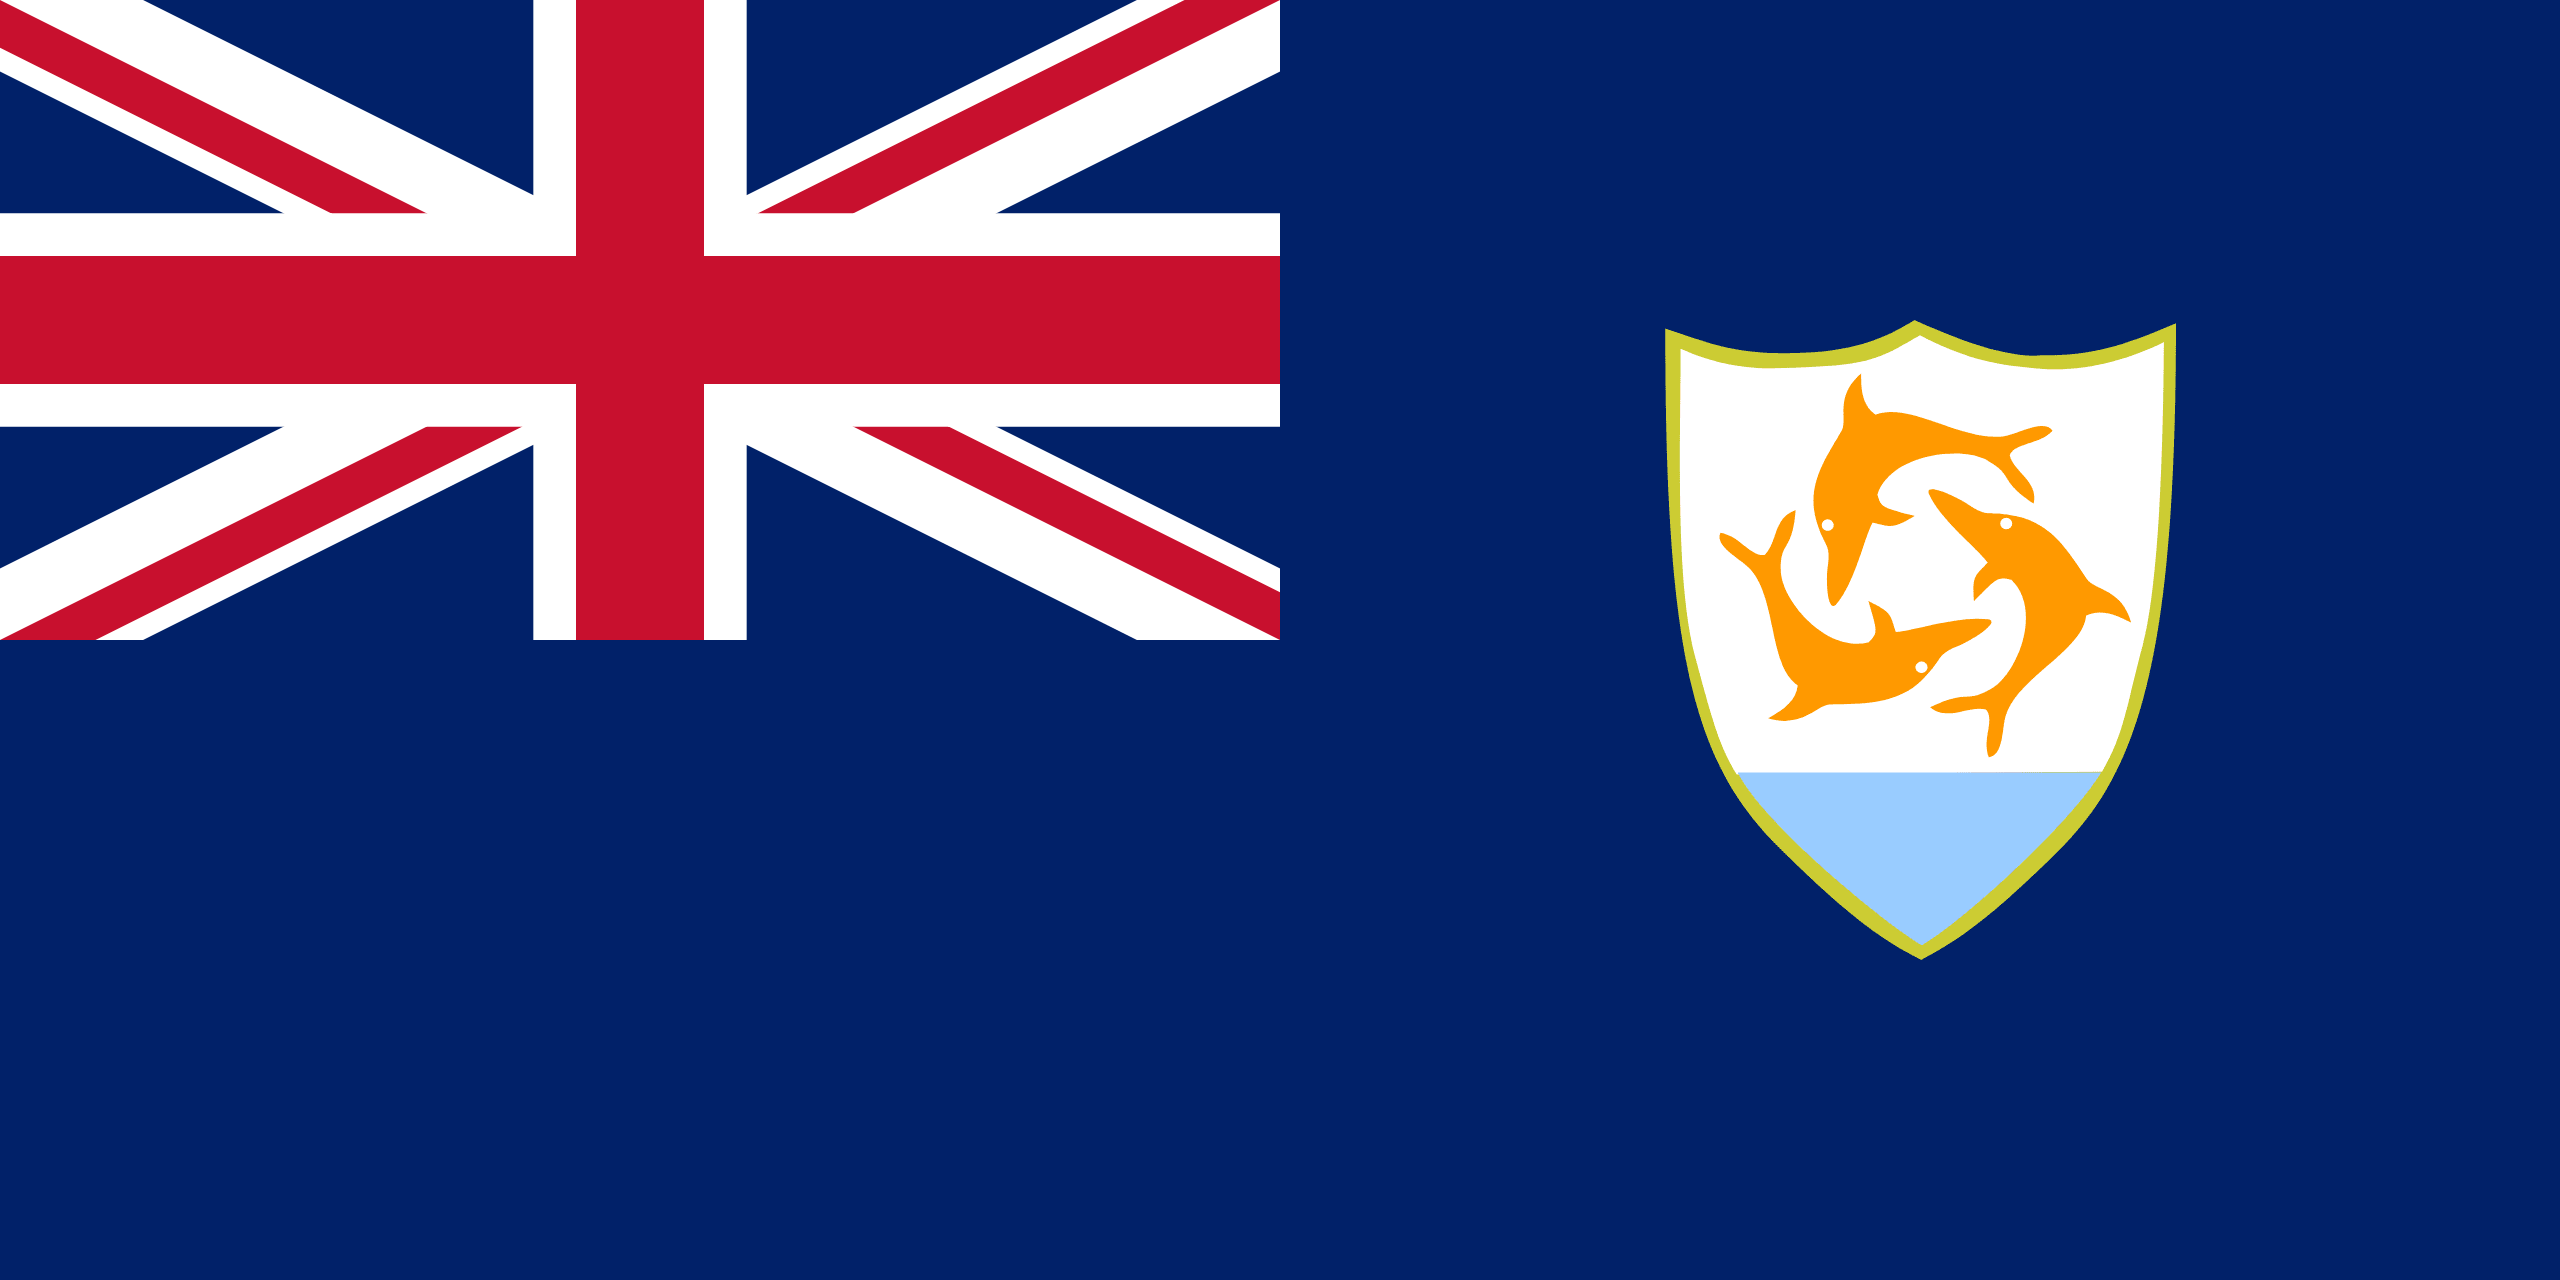

Antarctica


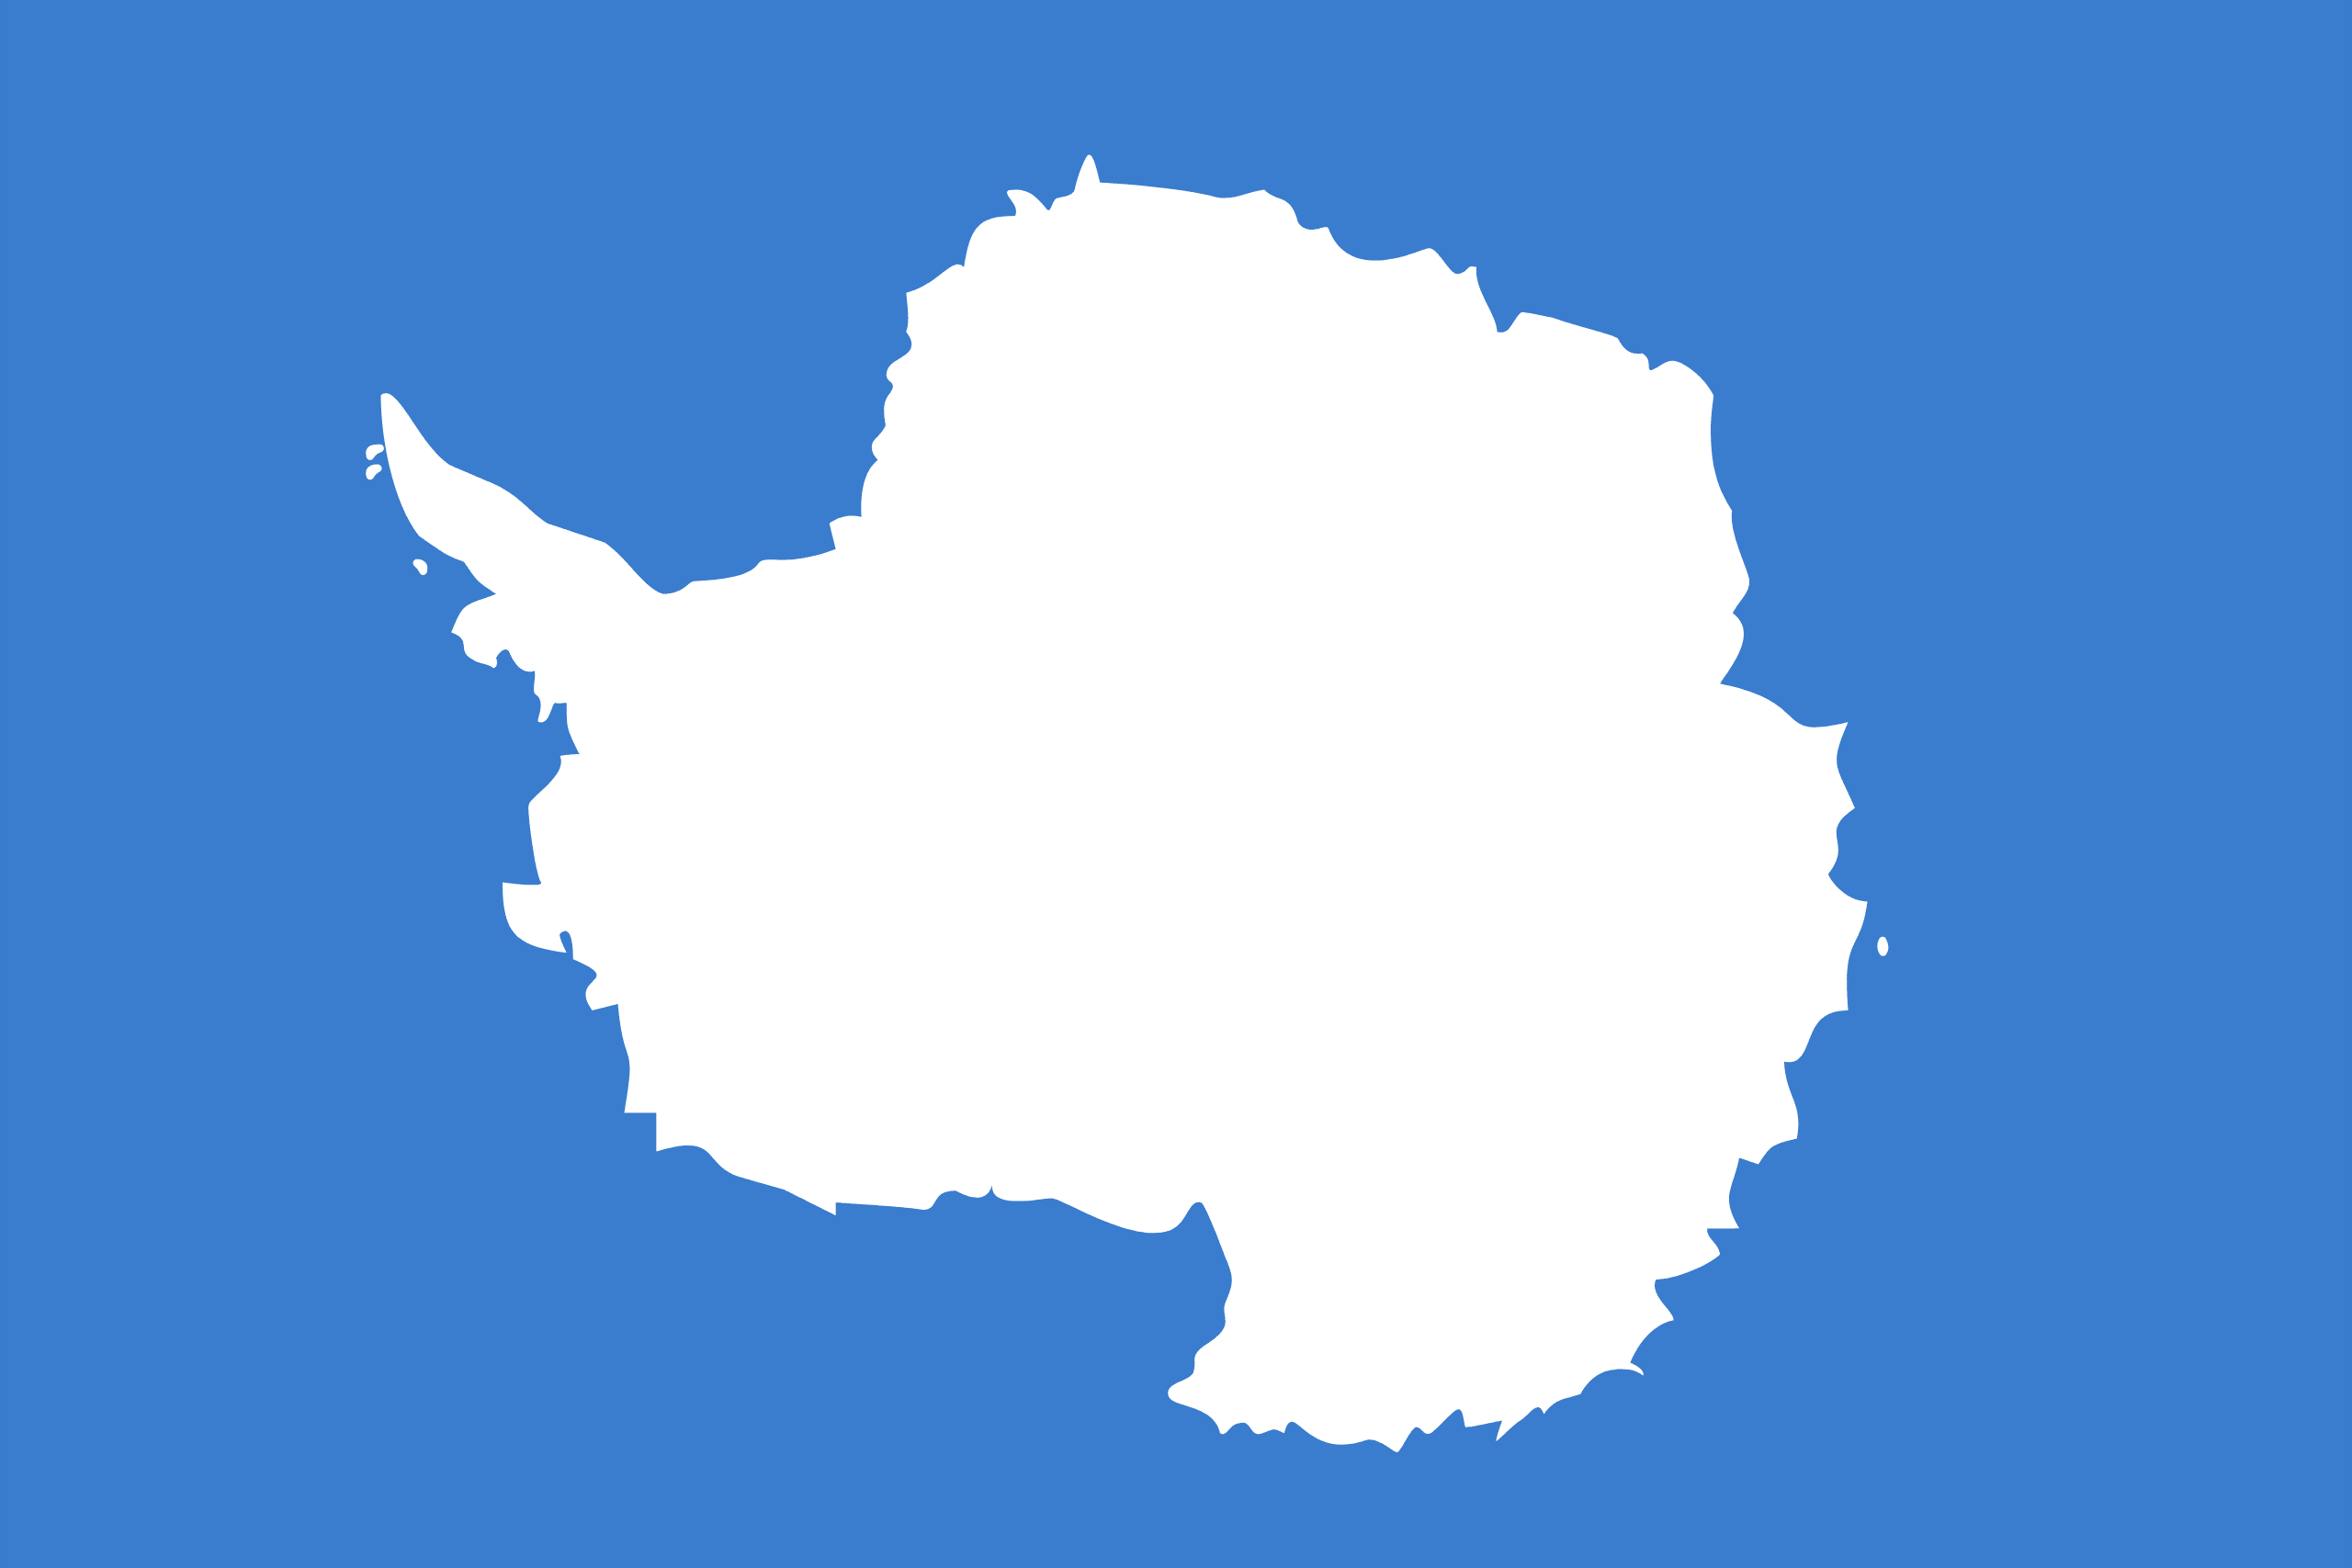

Antigua and Barbuda


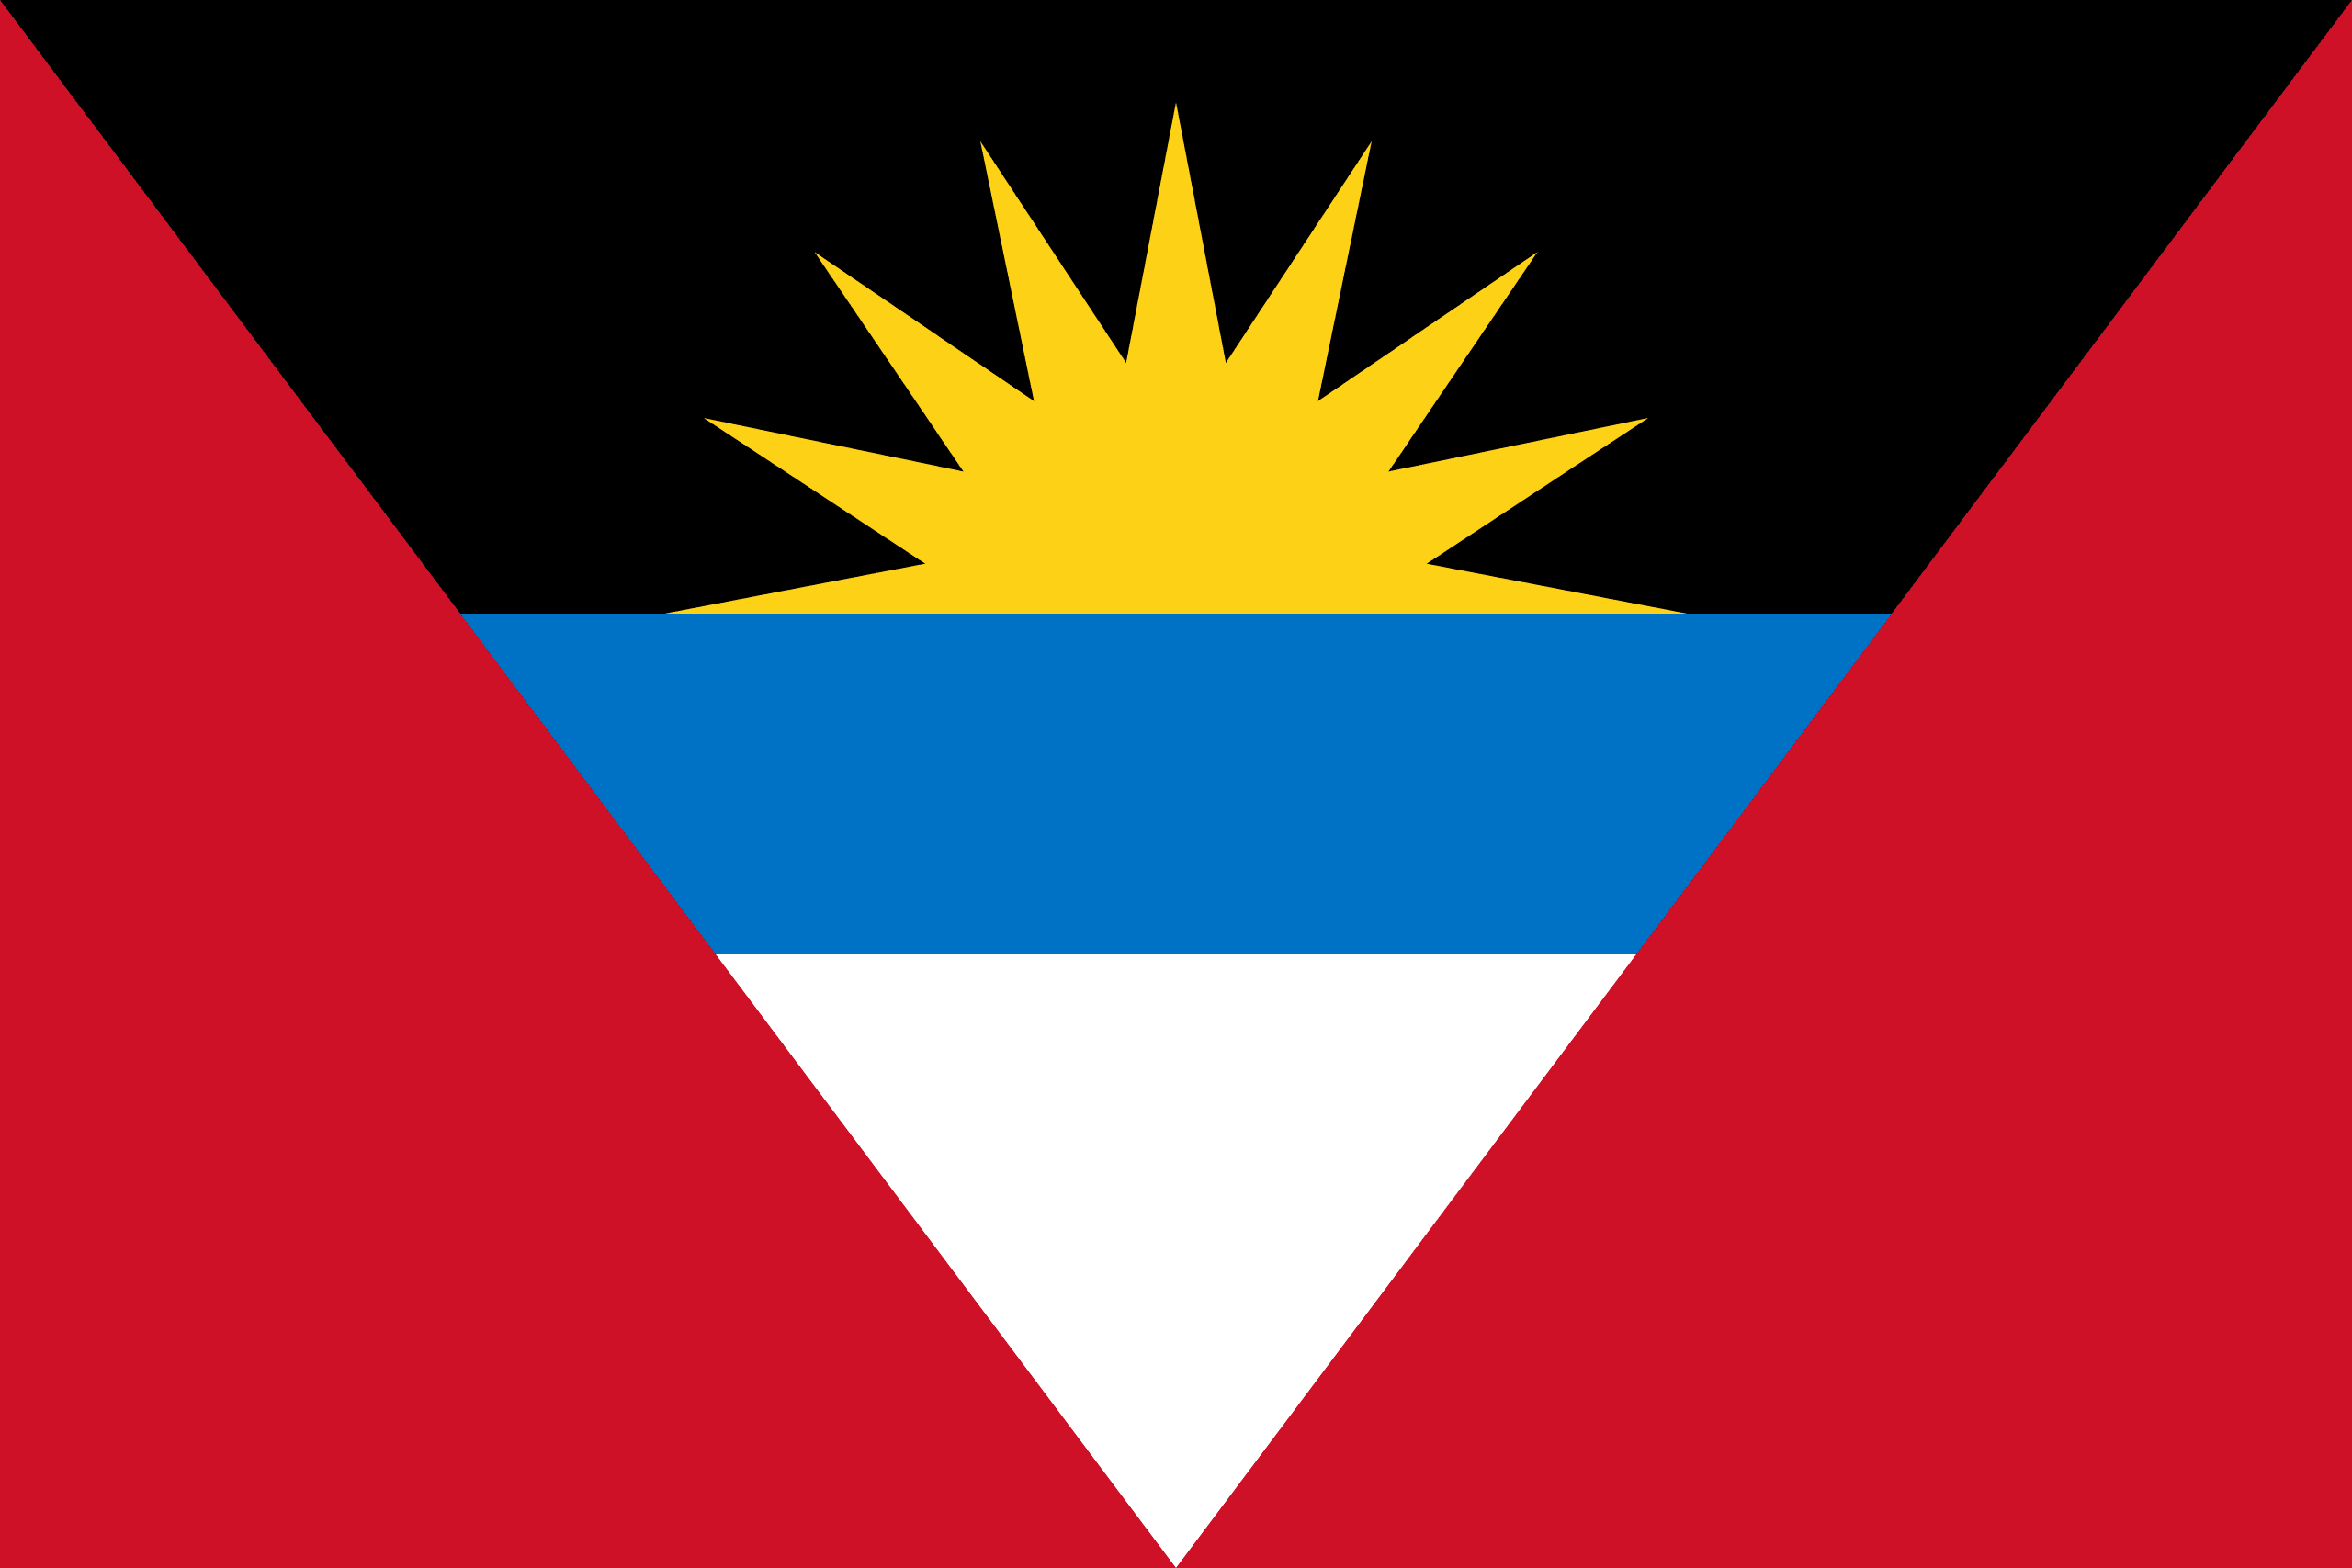

Argentina


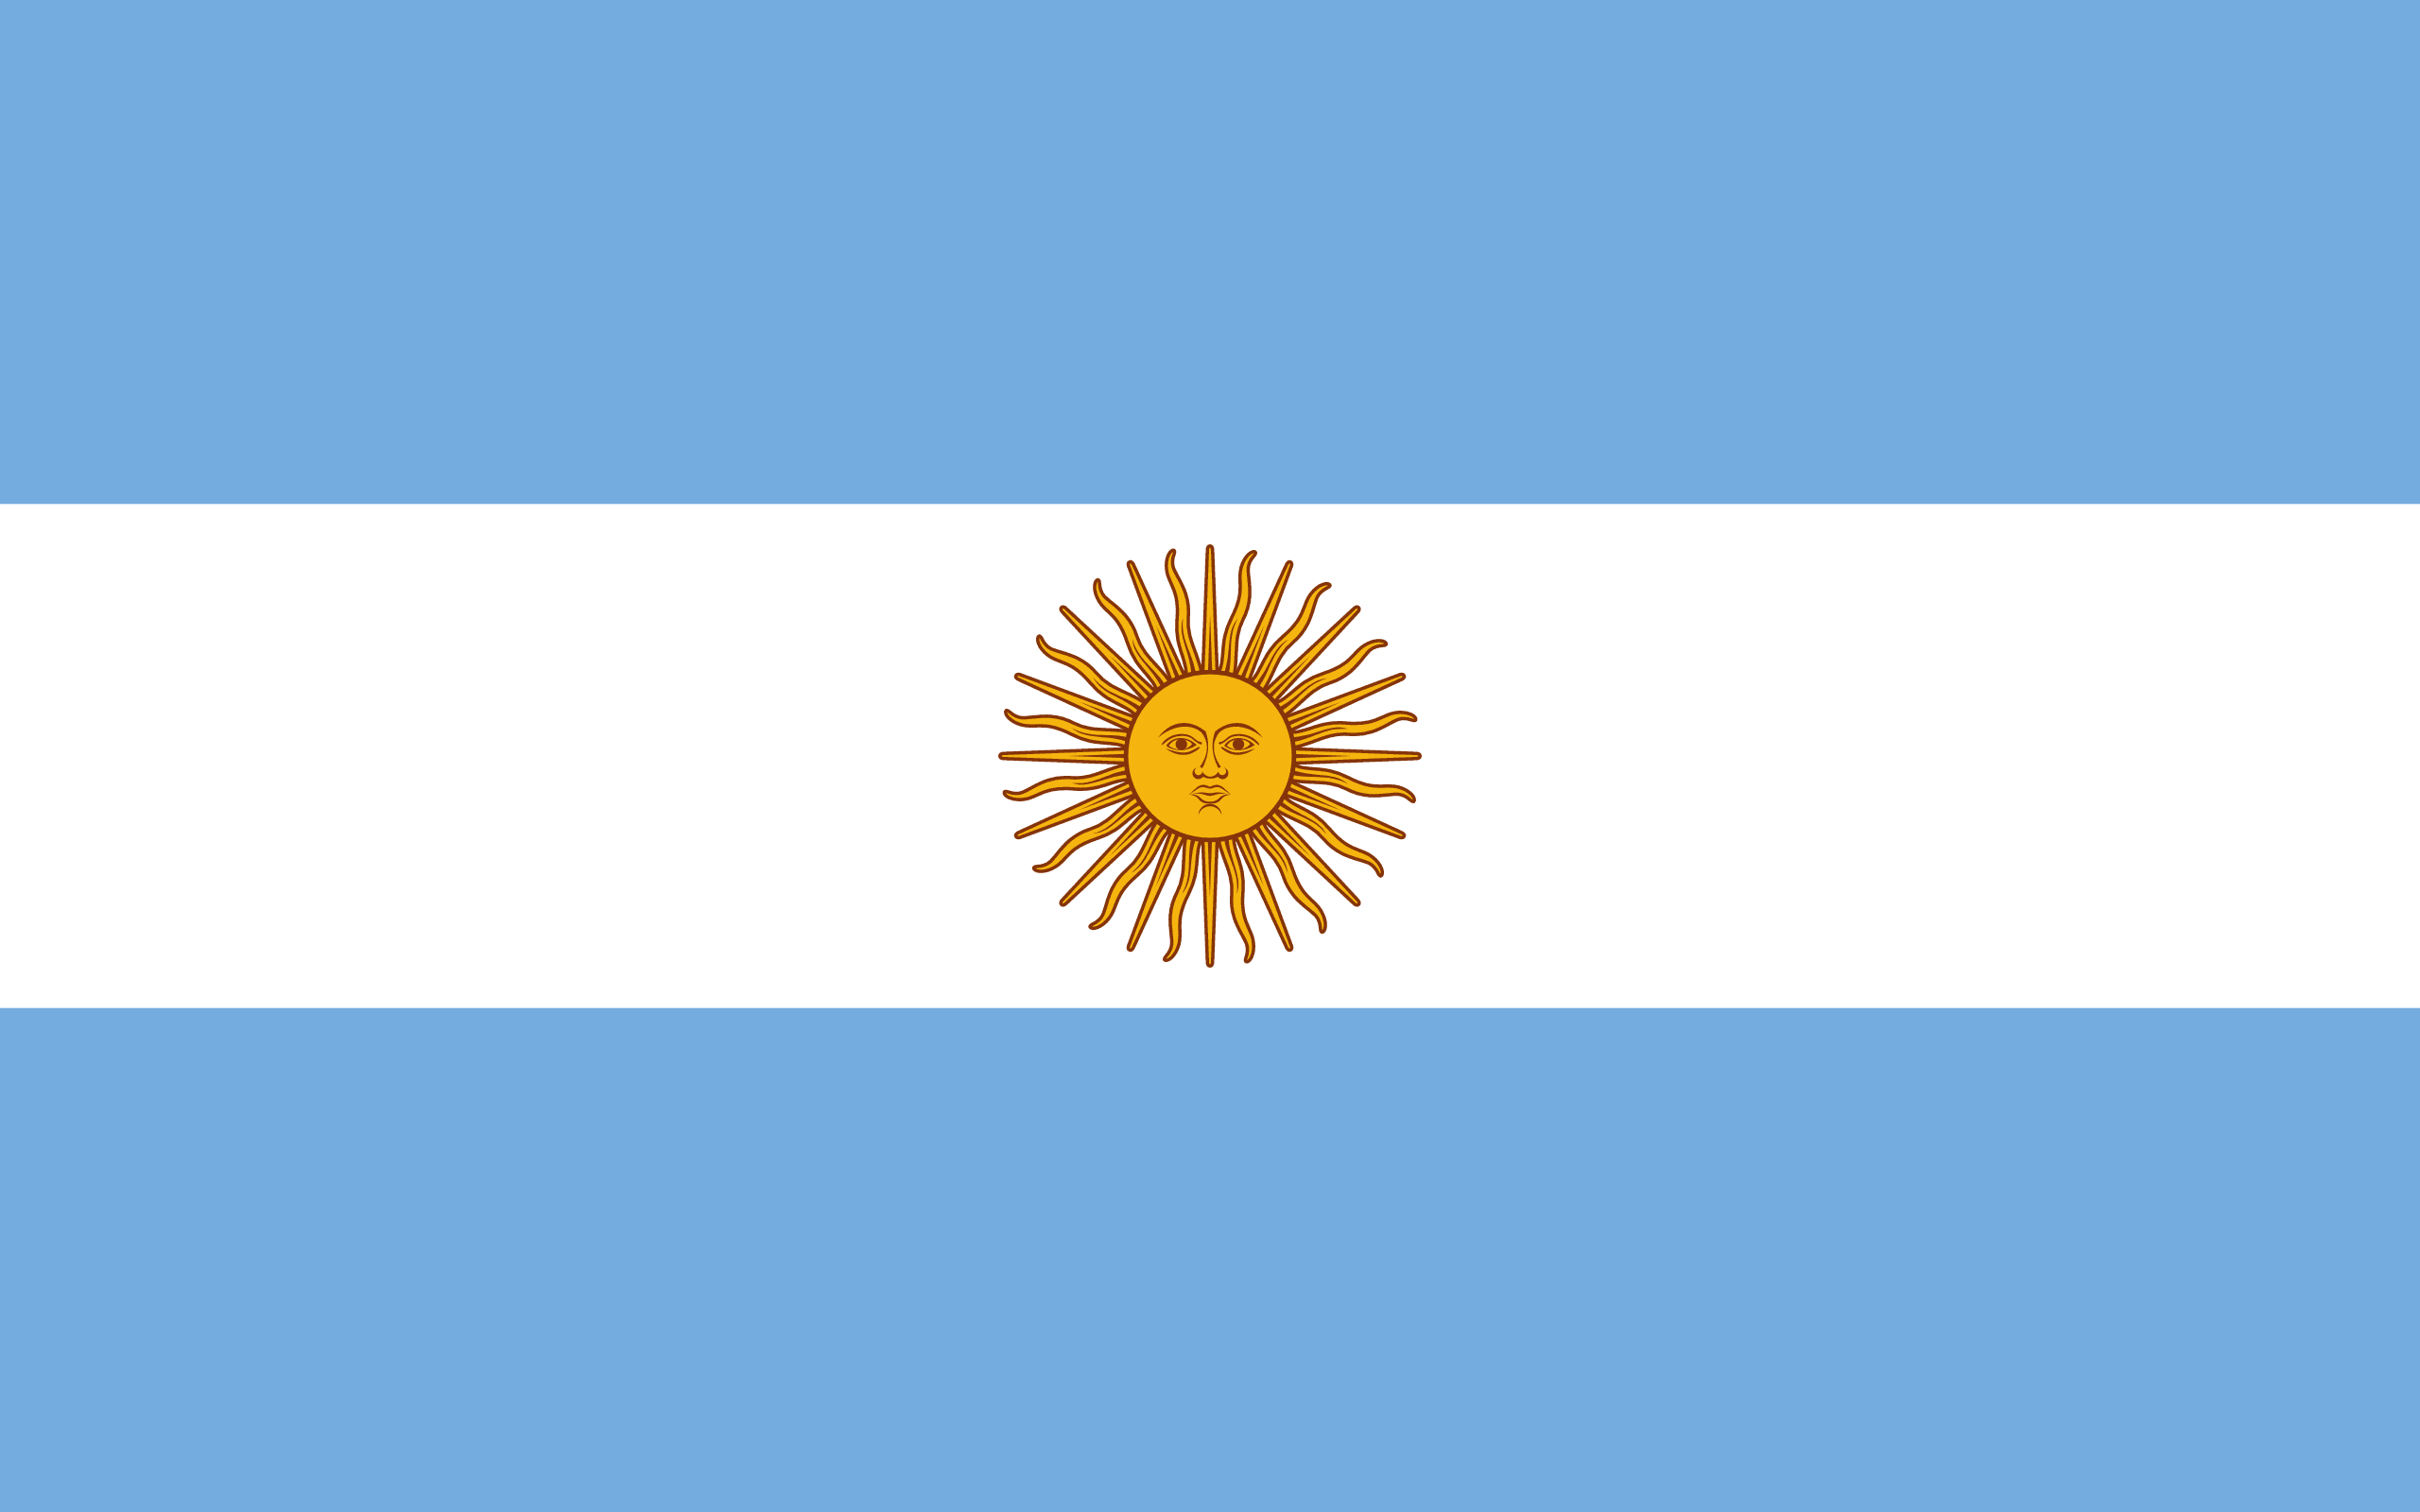

Armenia


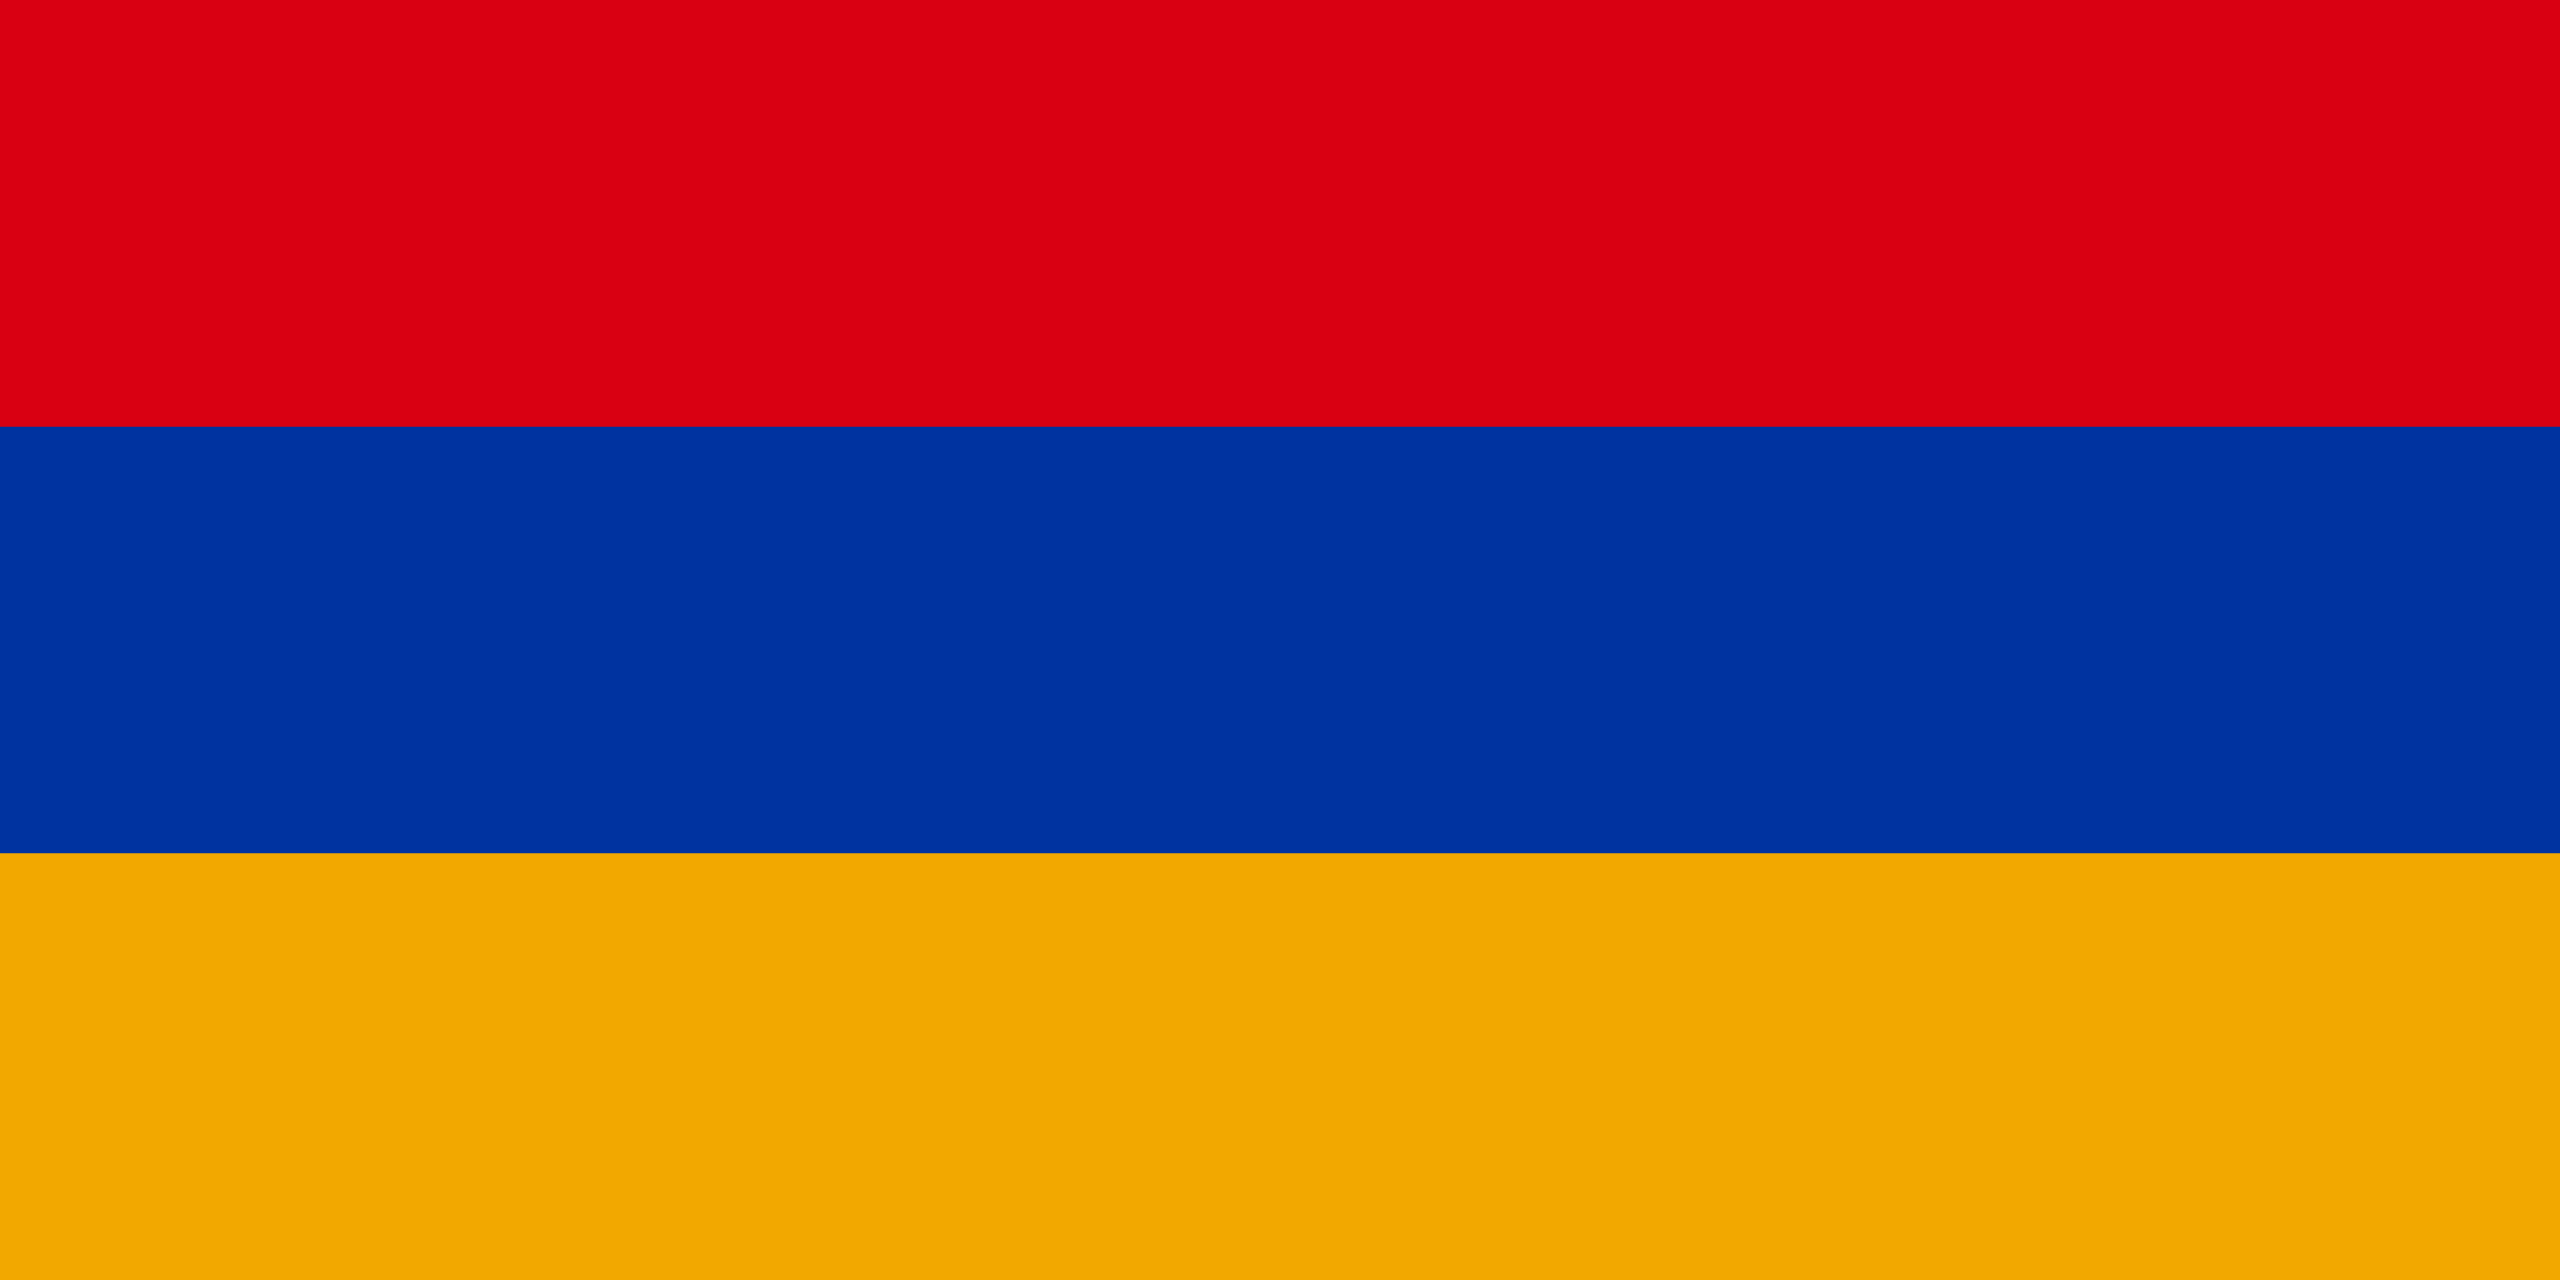

Aruba


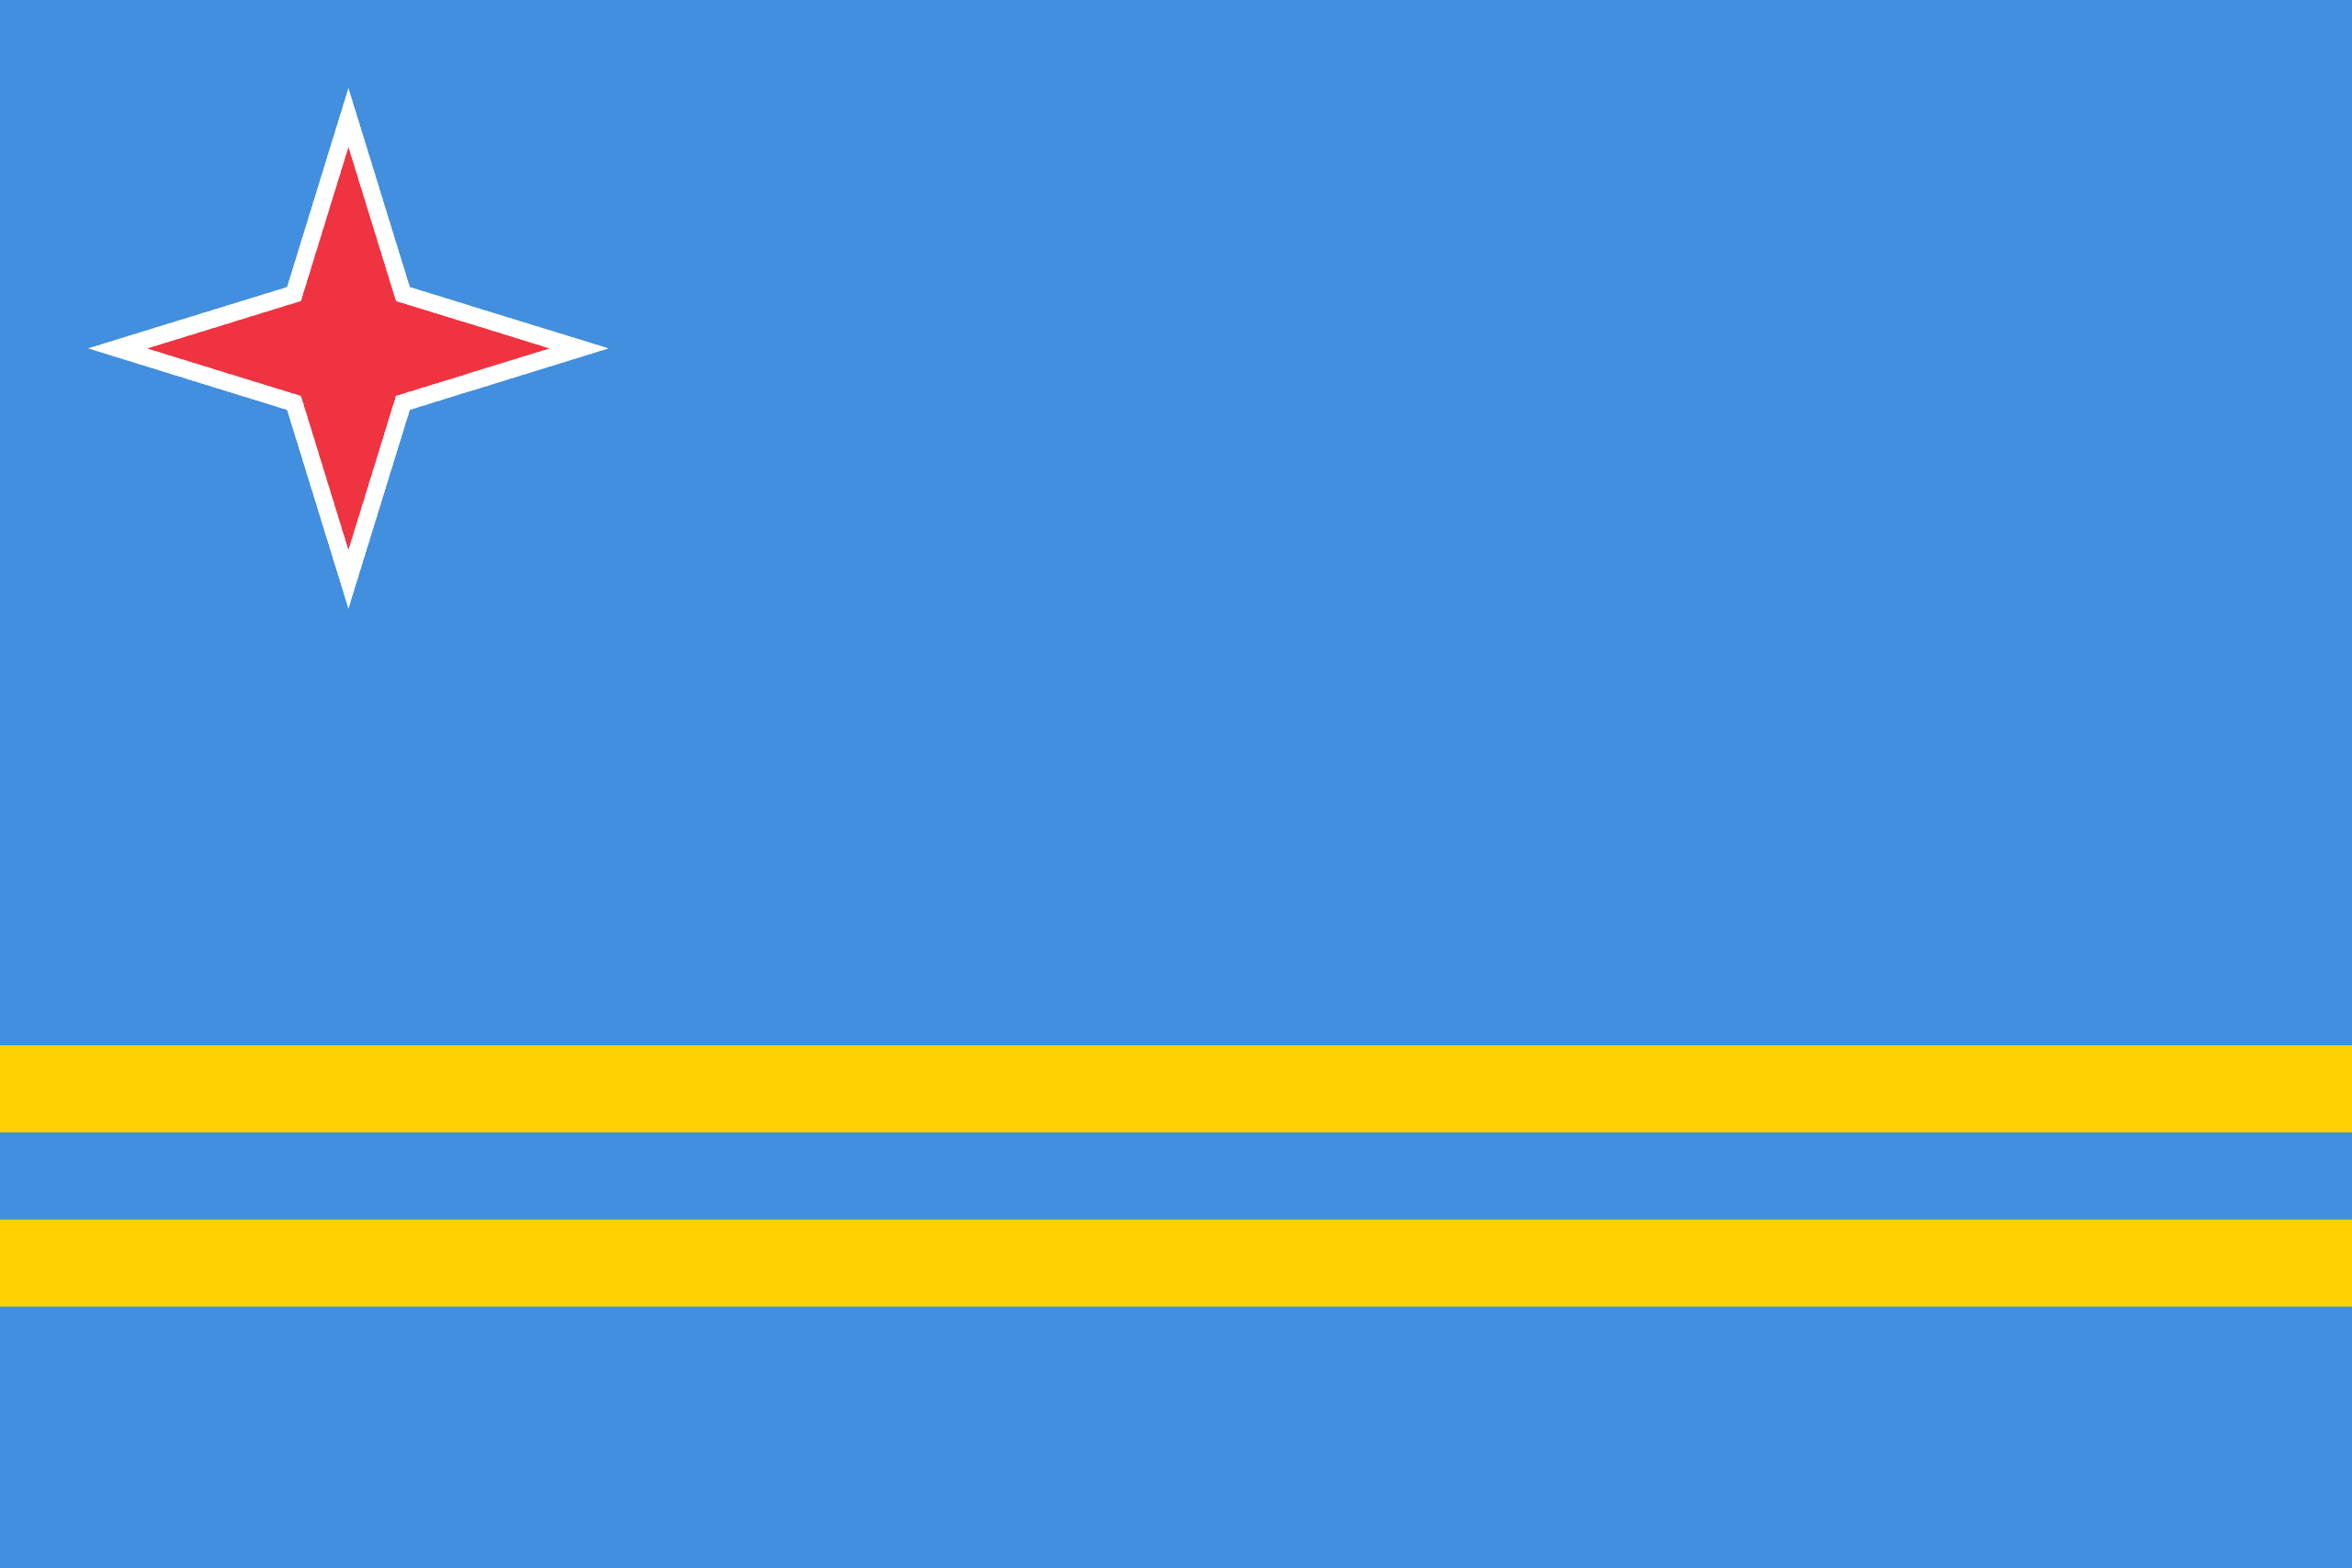

Australia


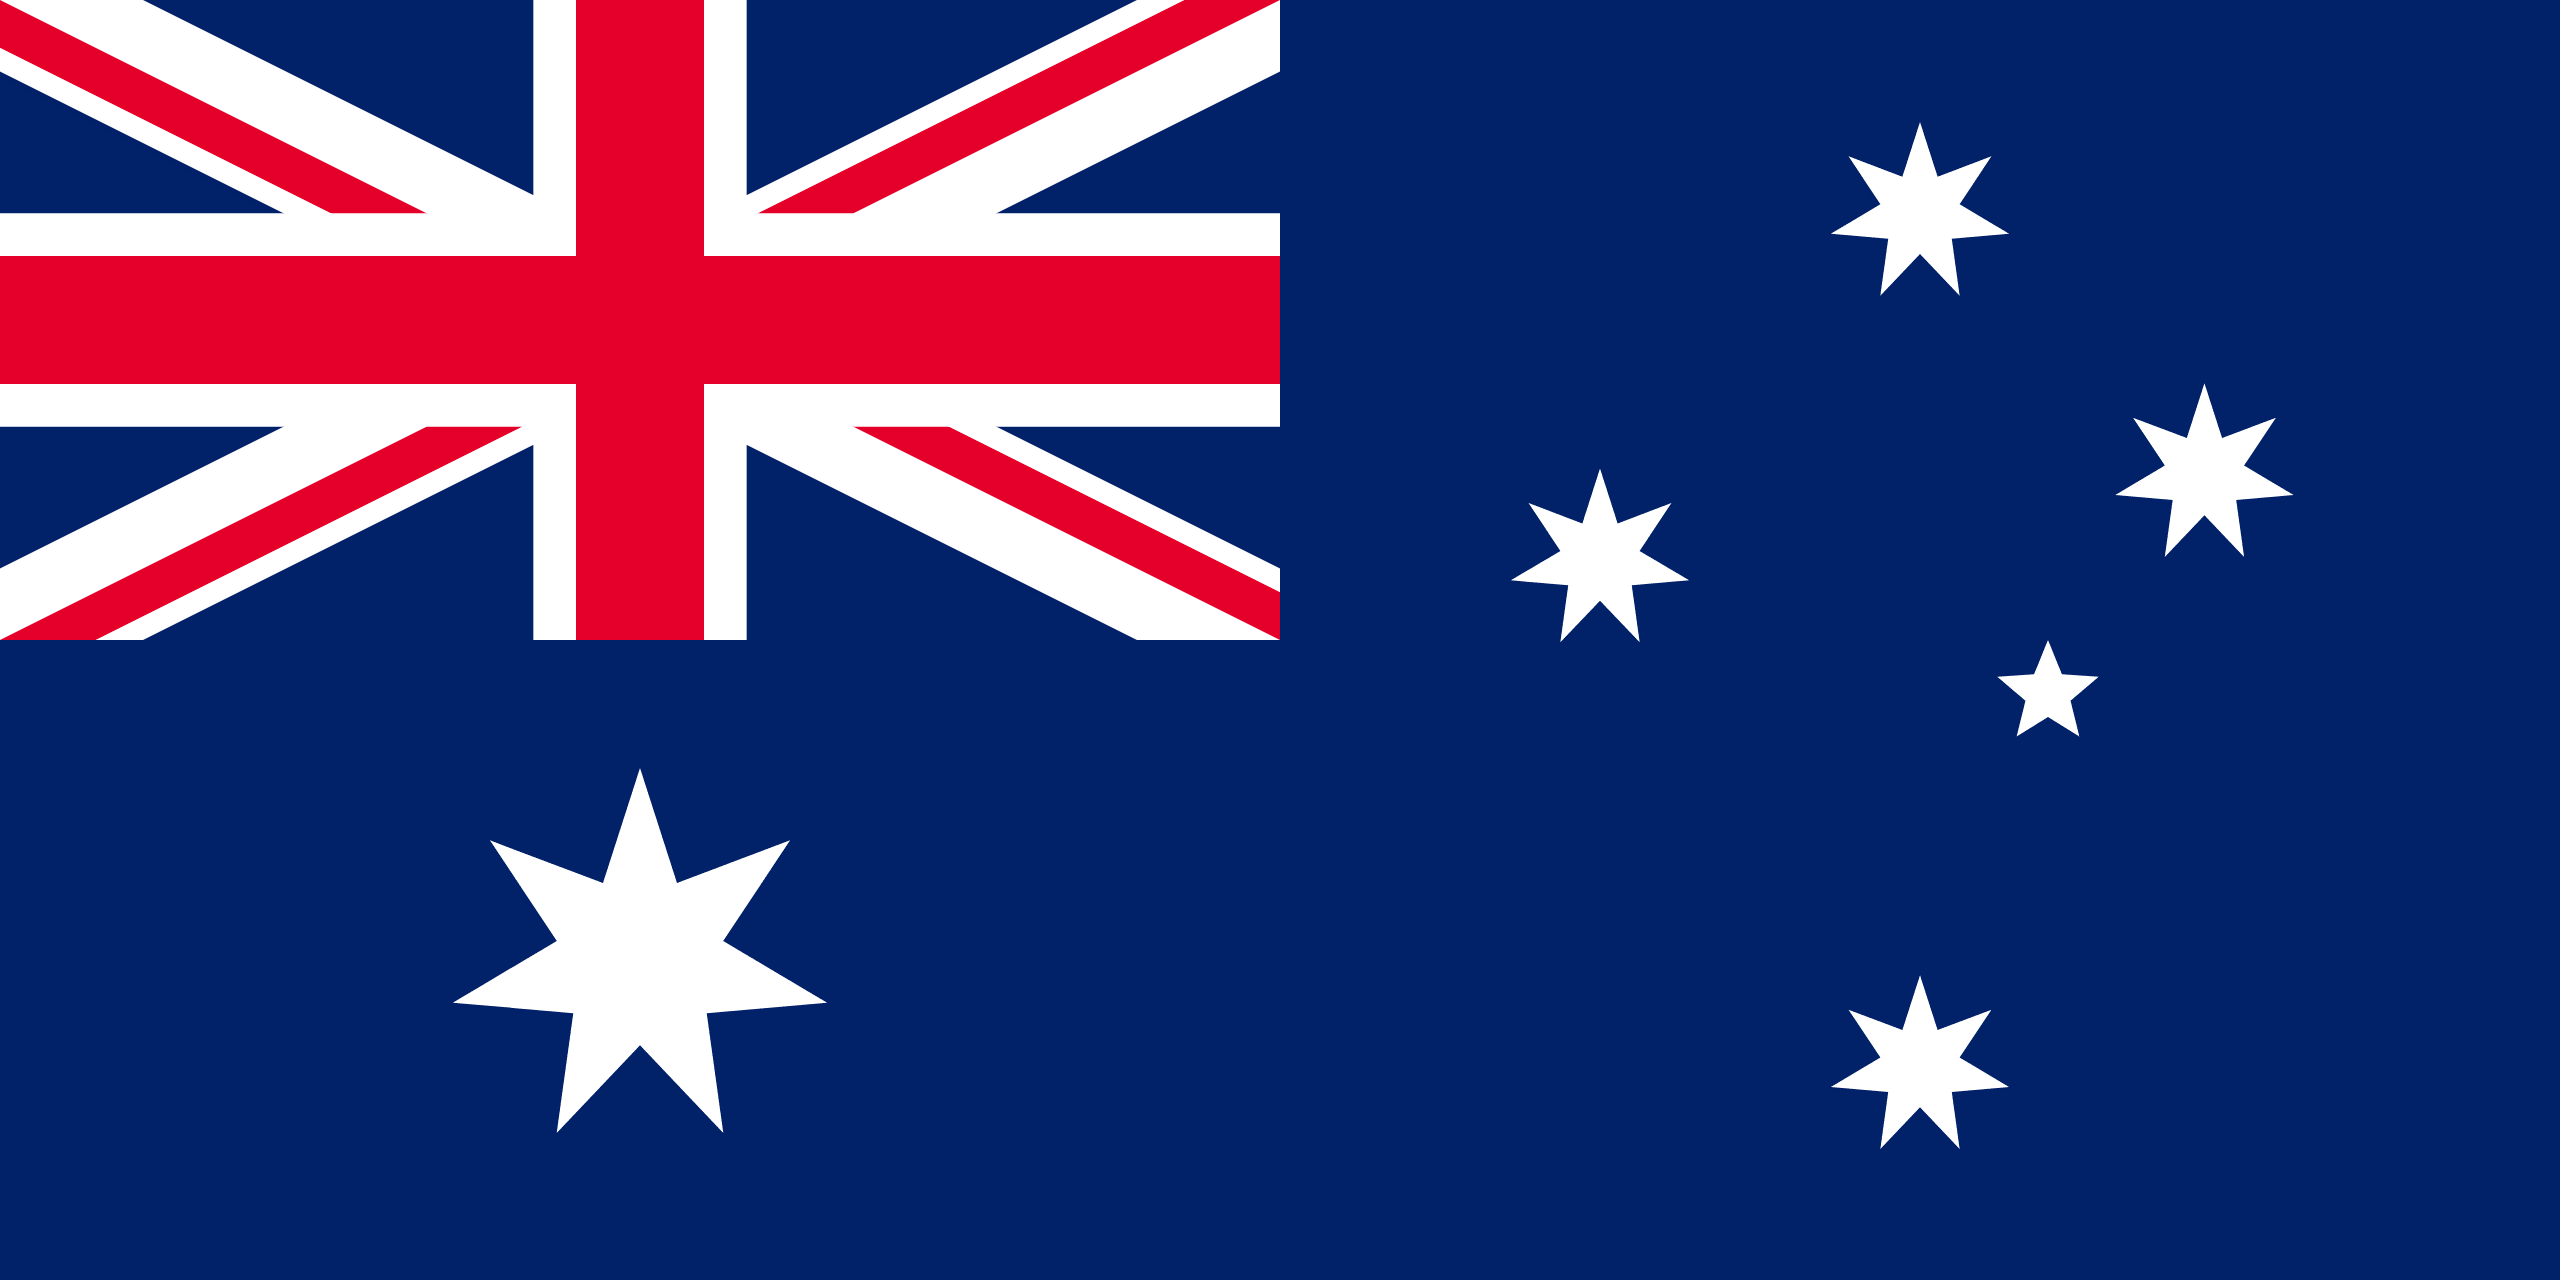

Austria


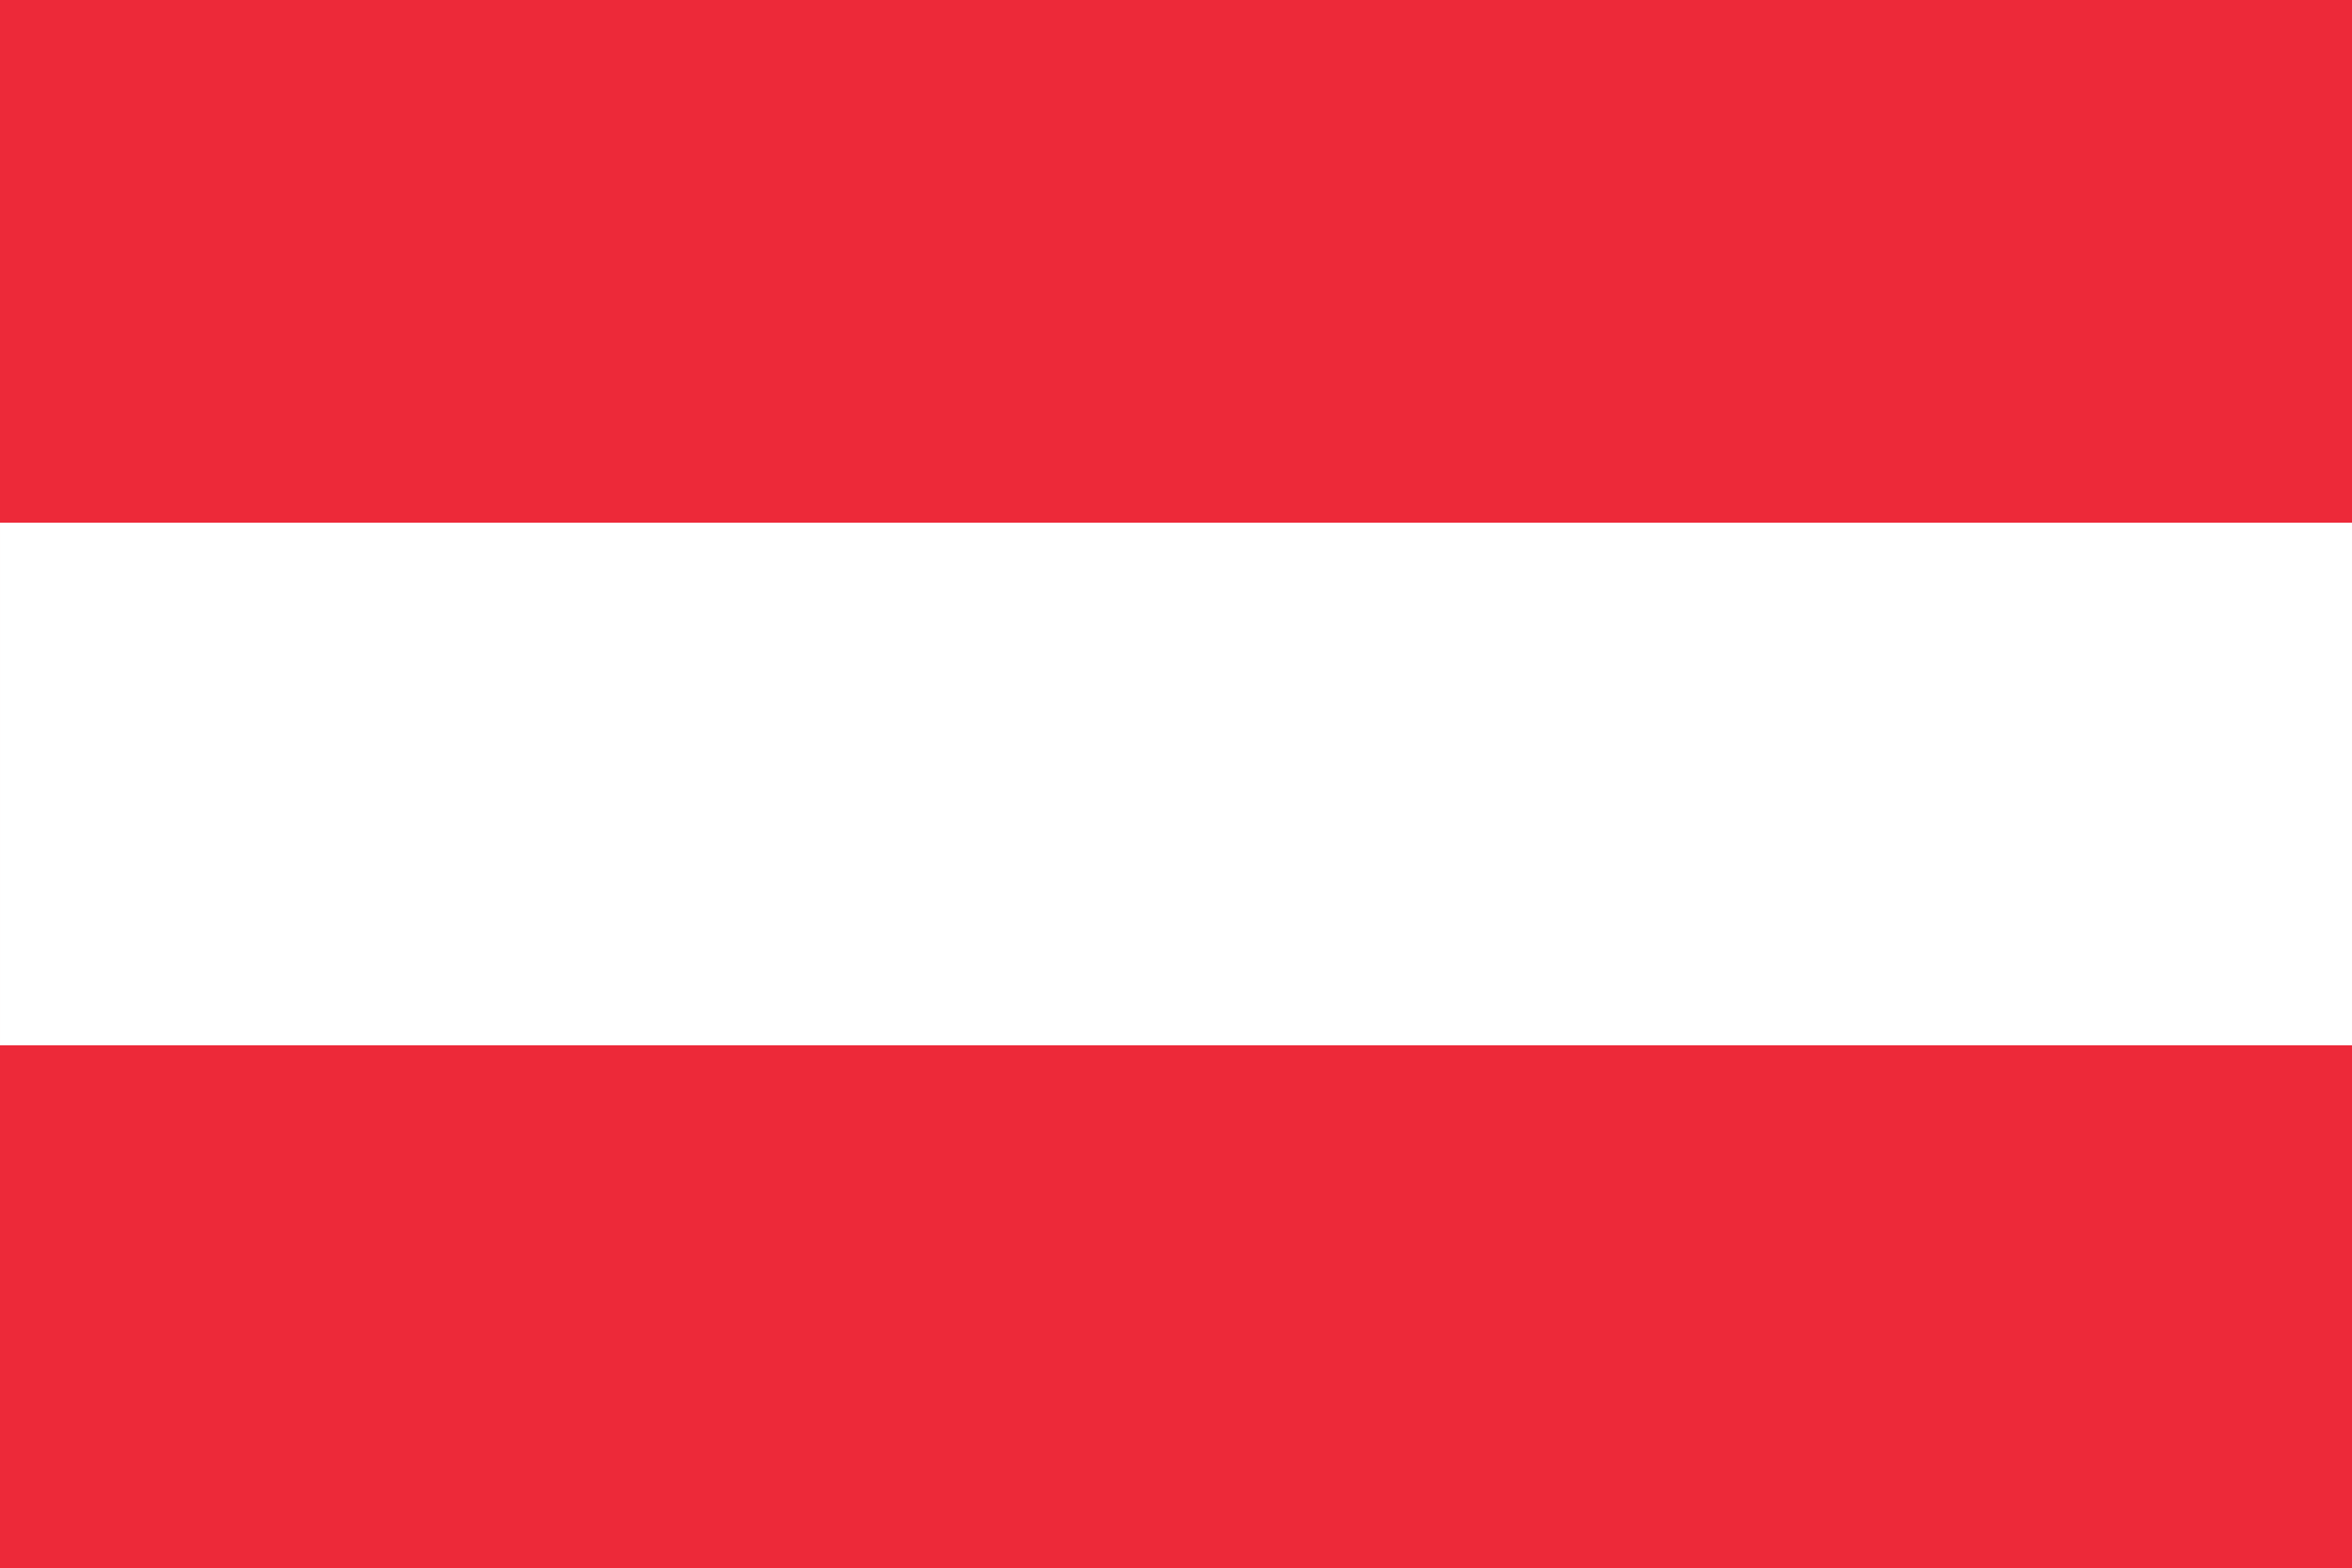

Azerbaijan


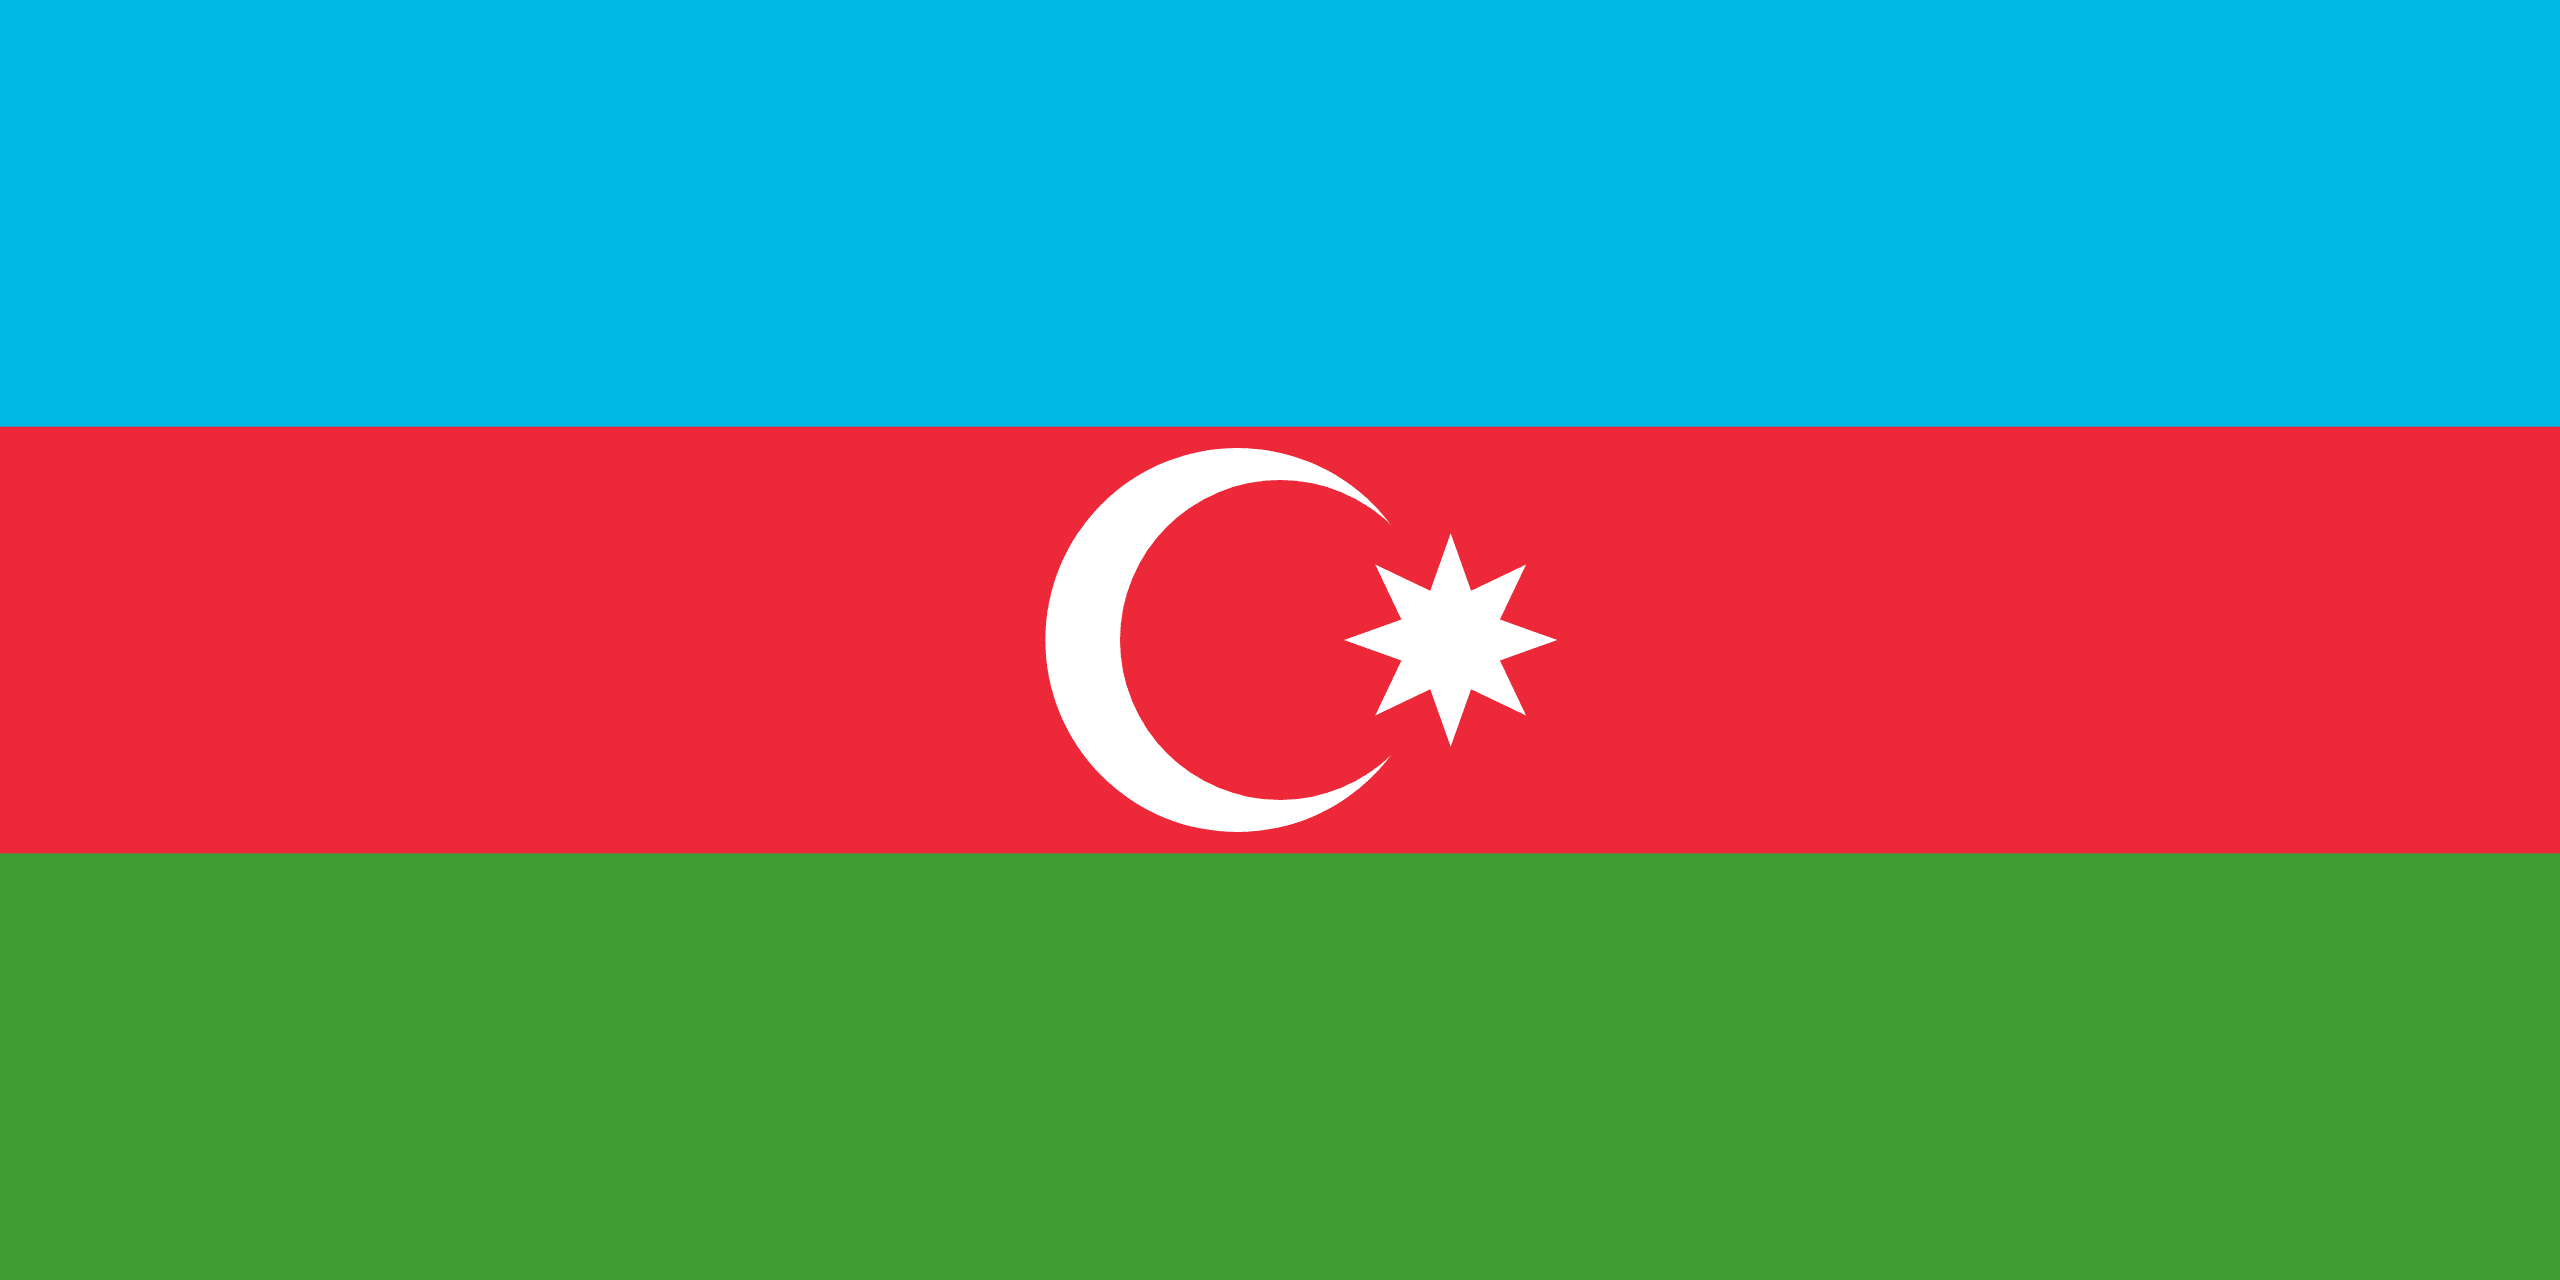

Bahamas


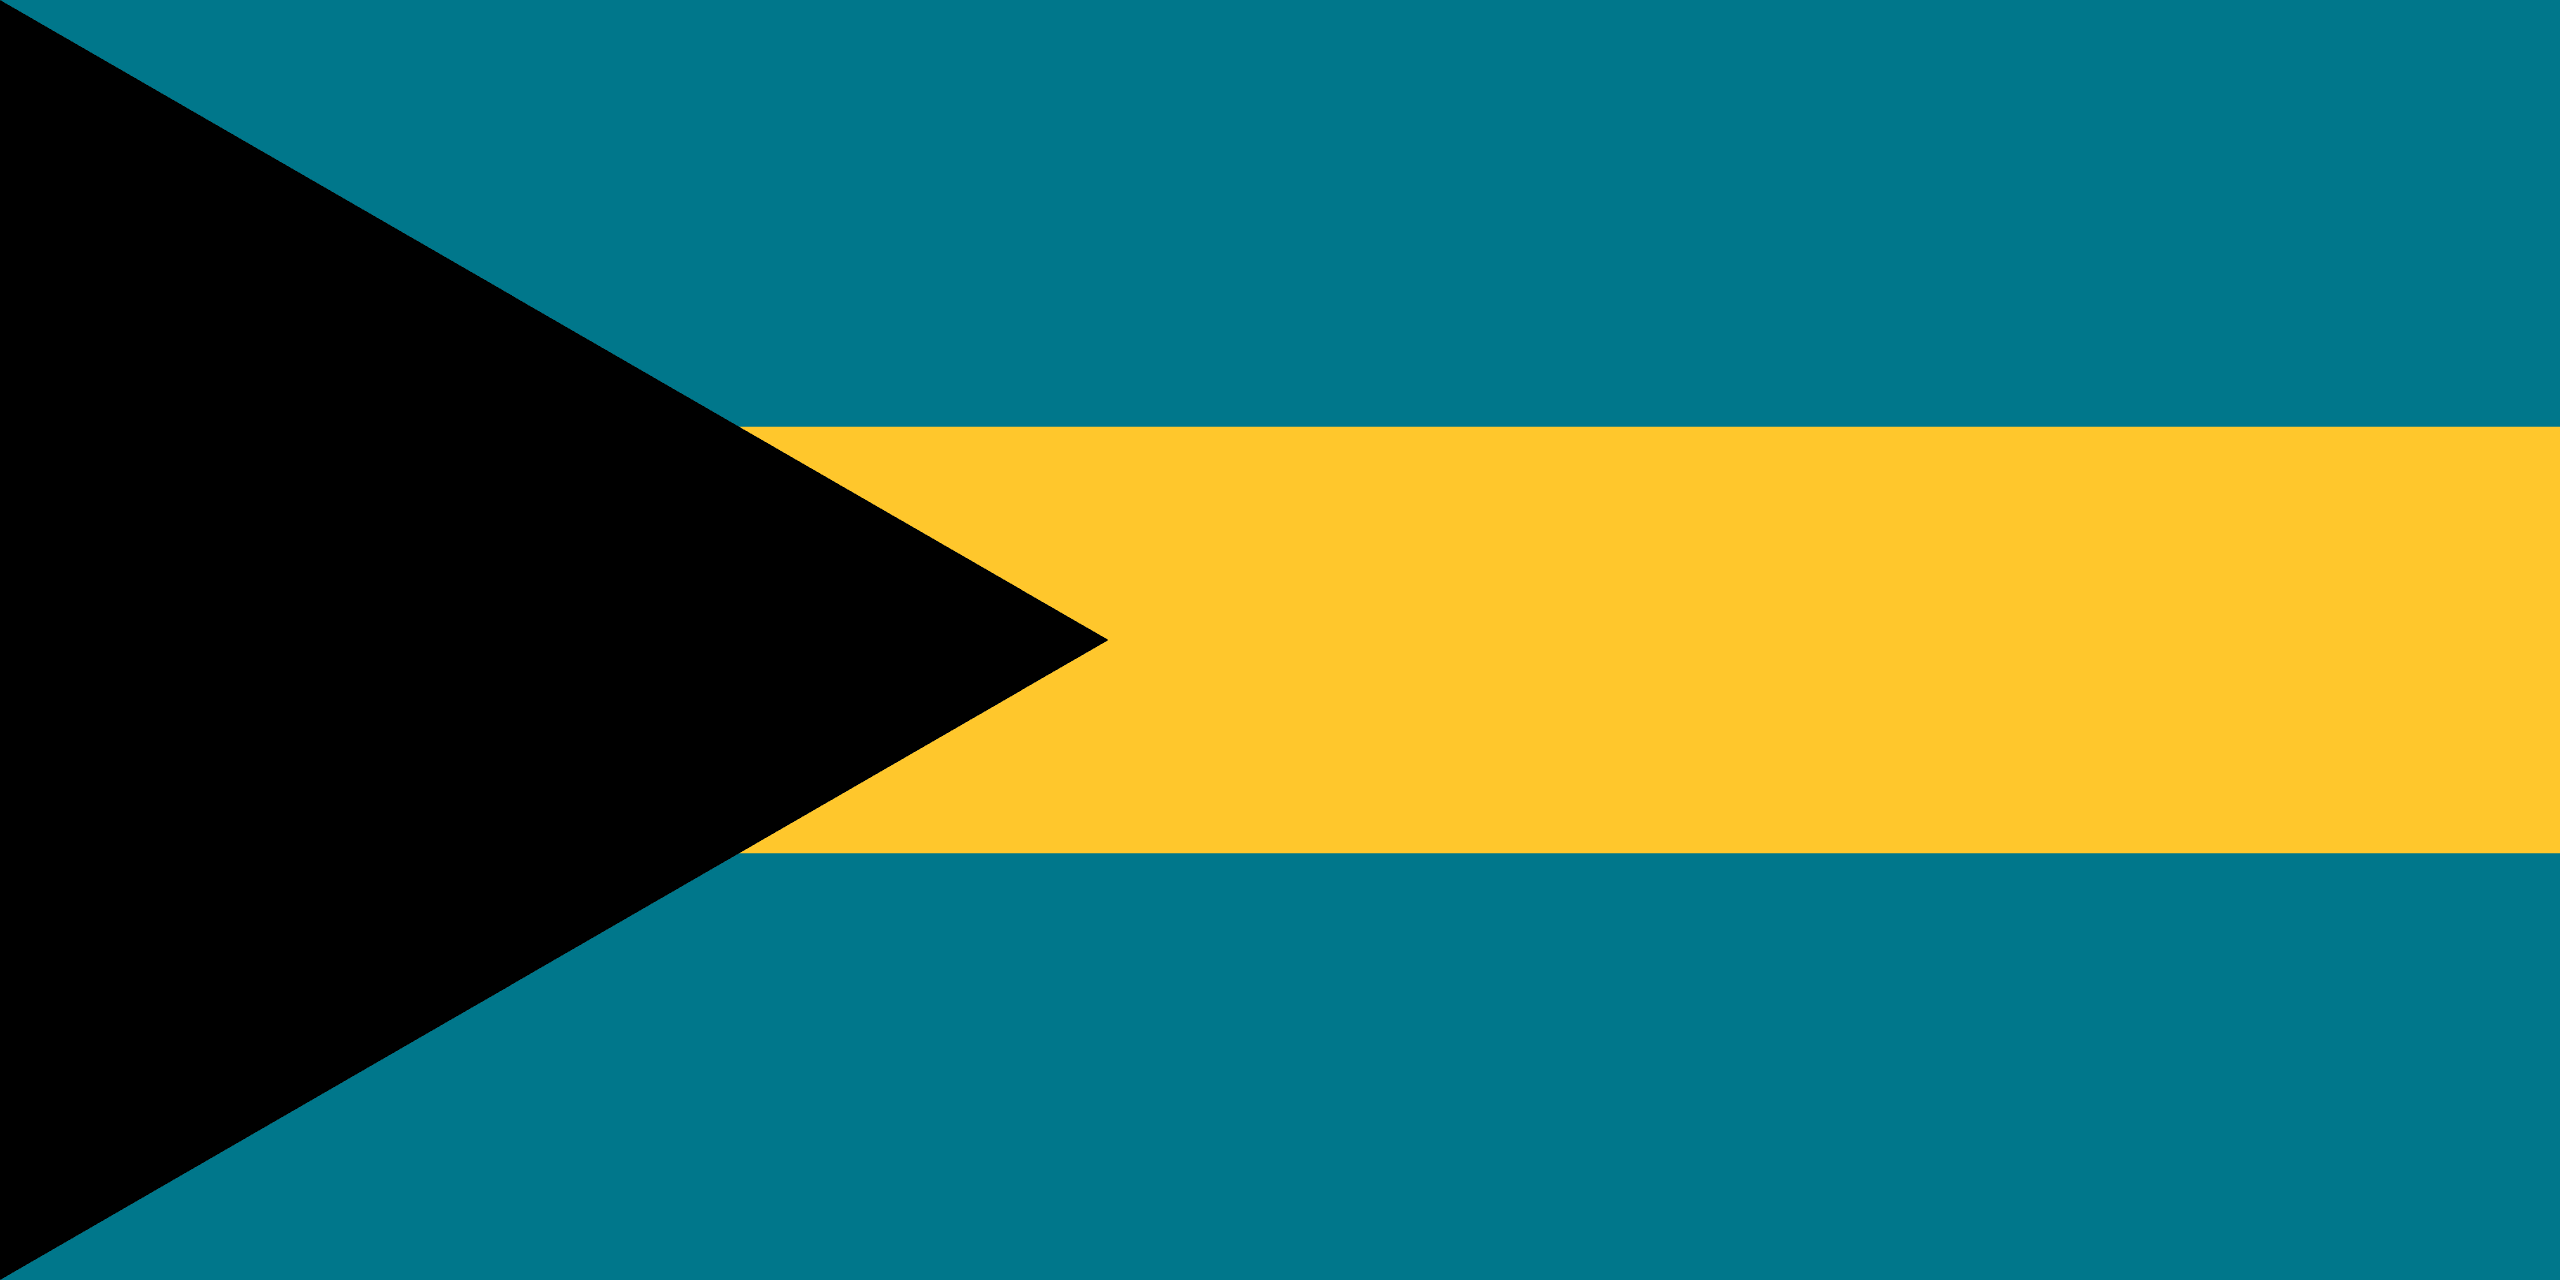

Bahrain


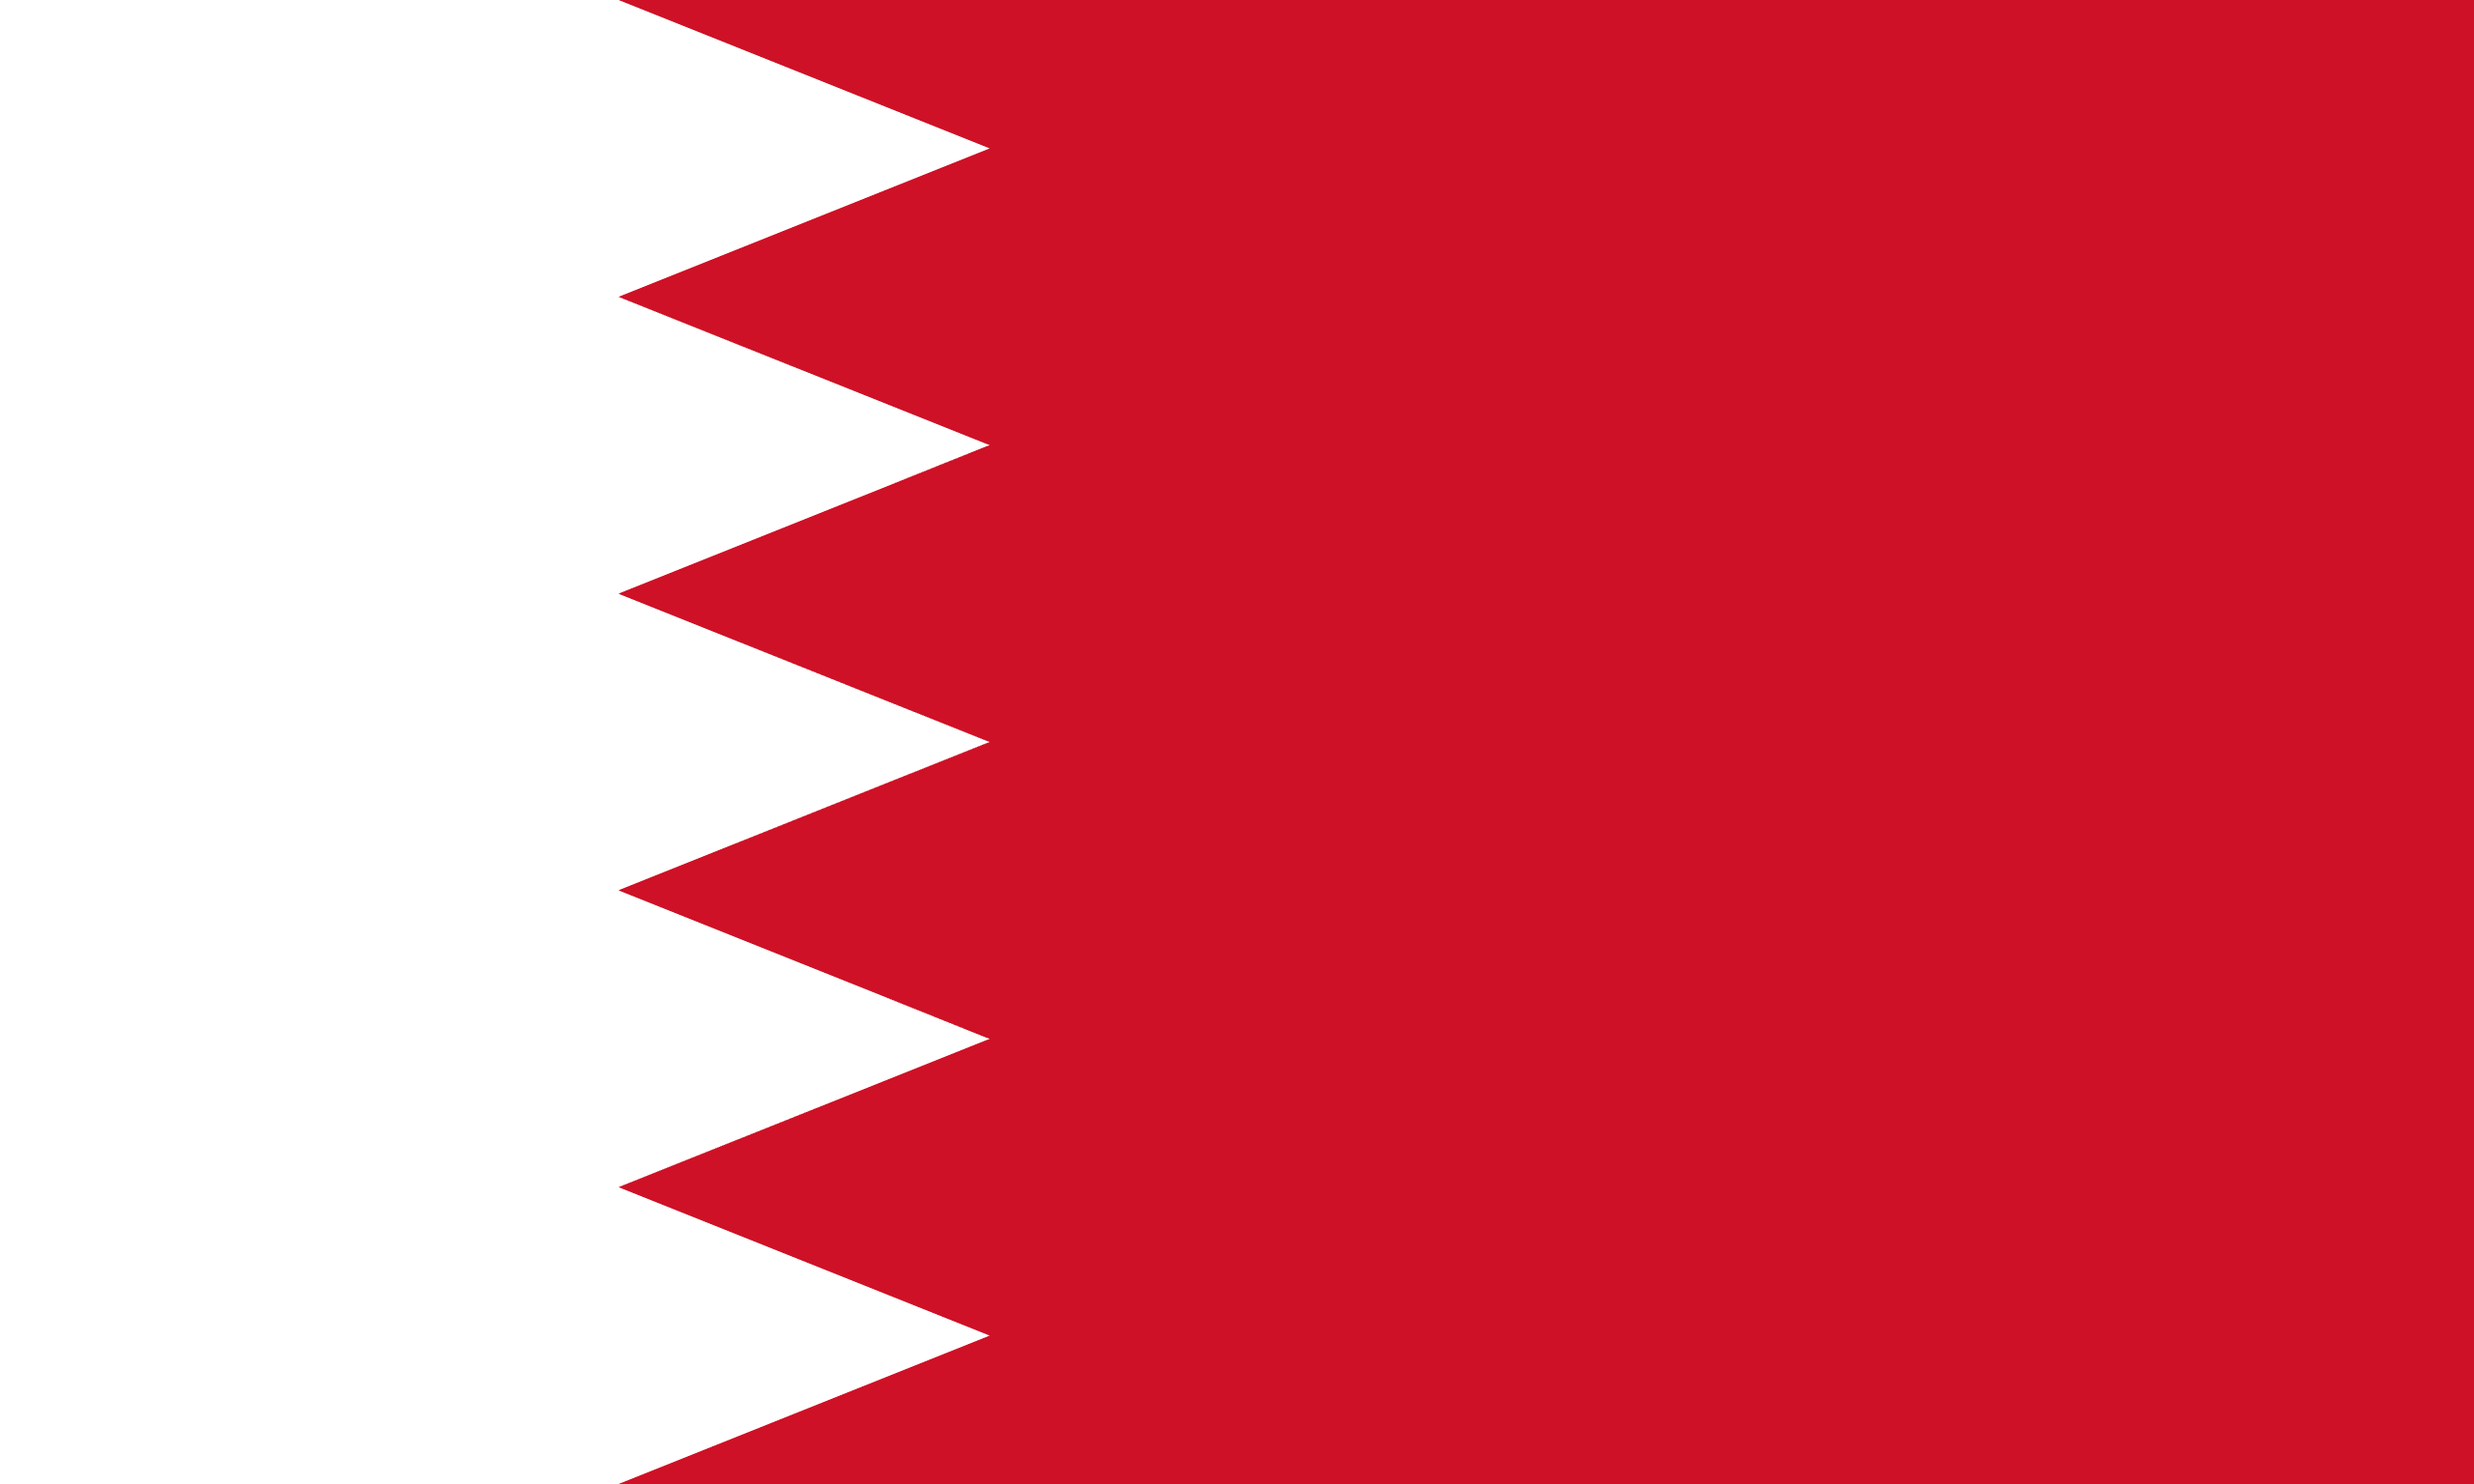

Bangladesh


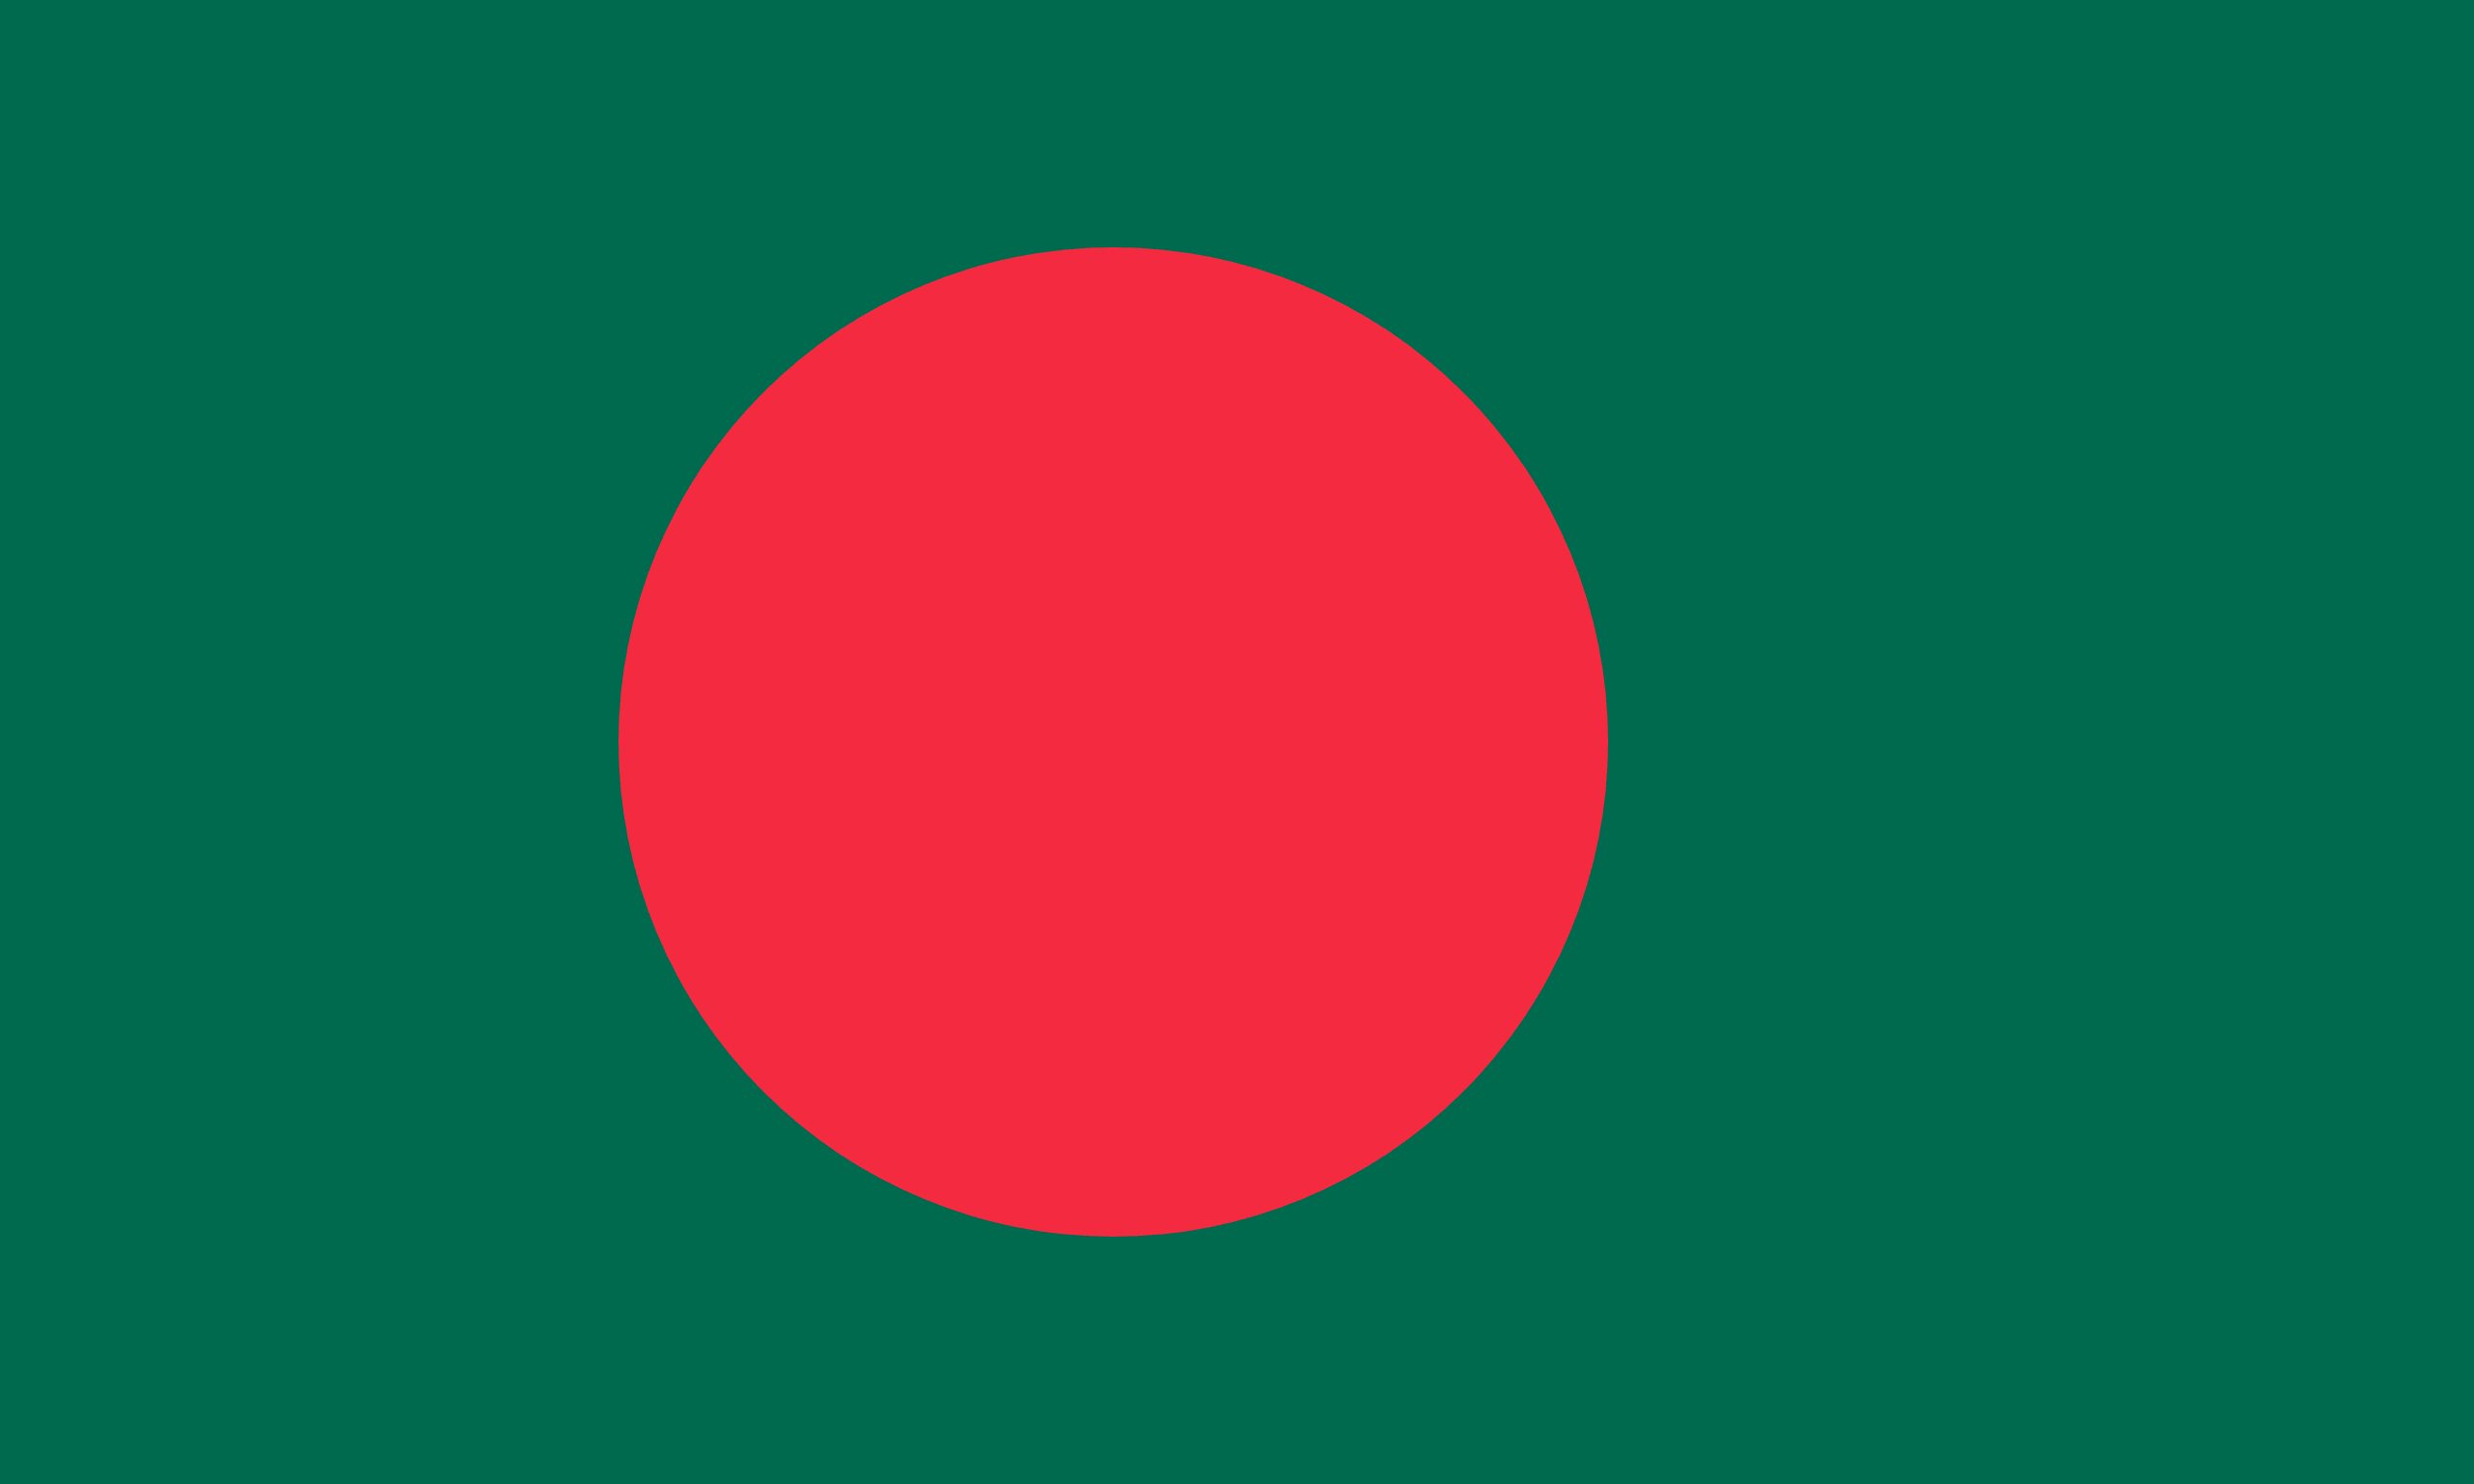

Barbados


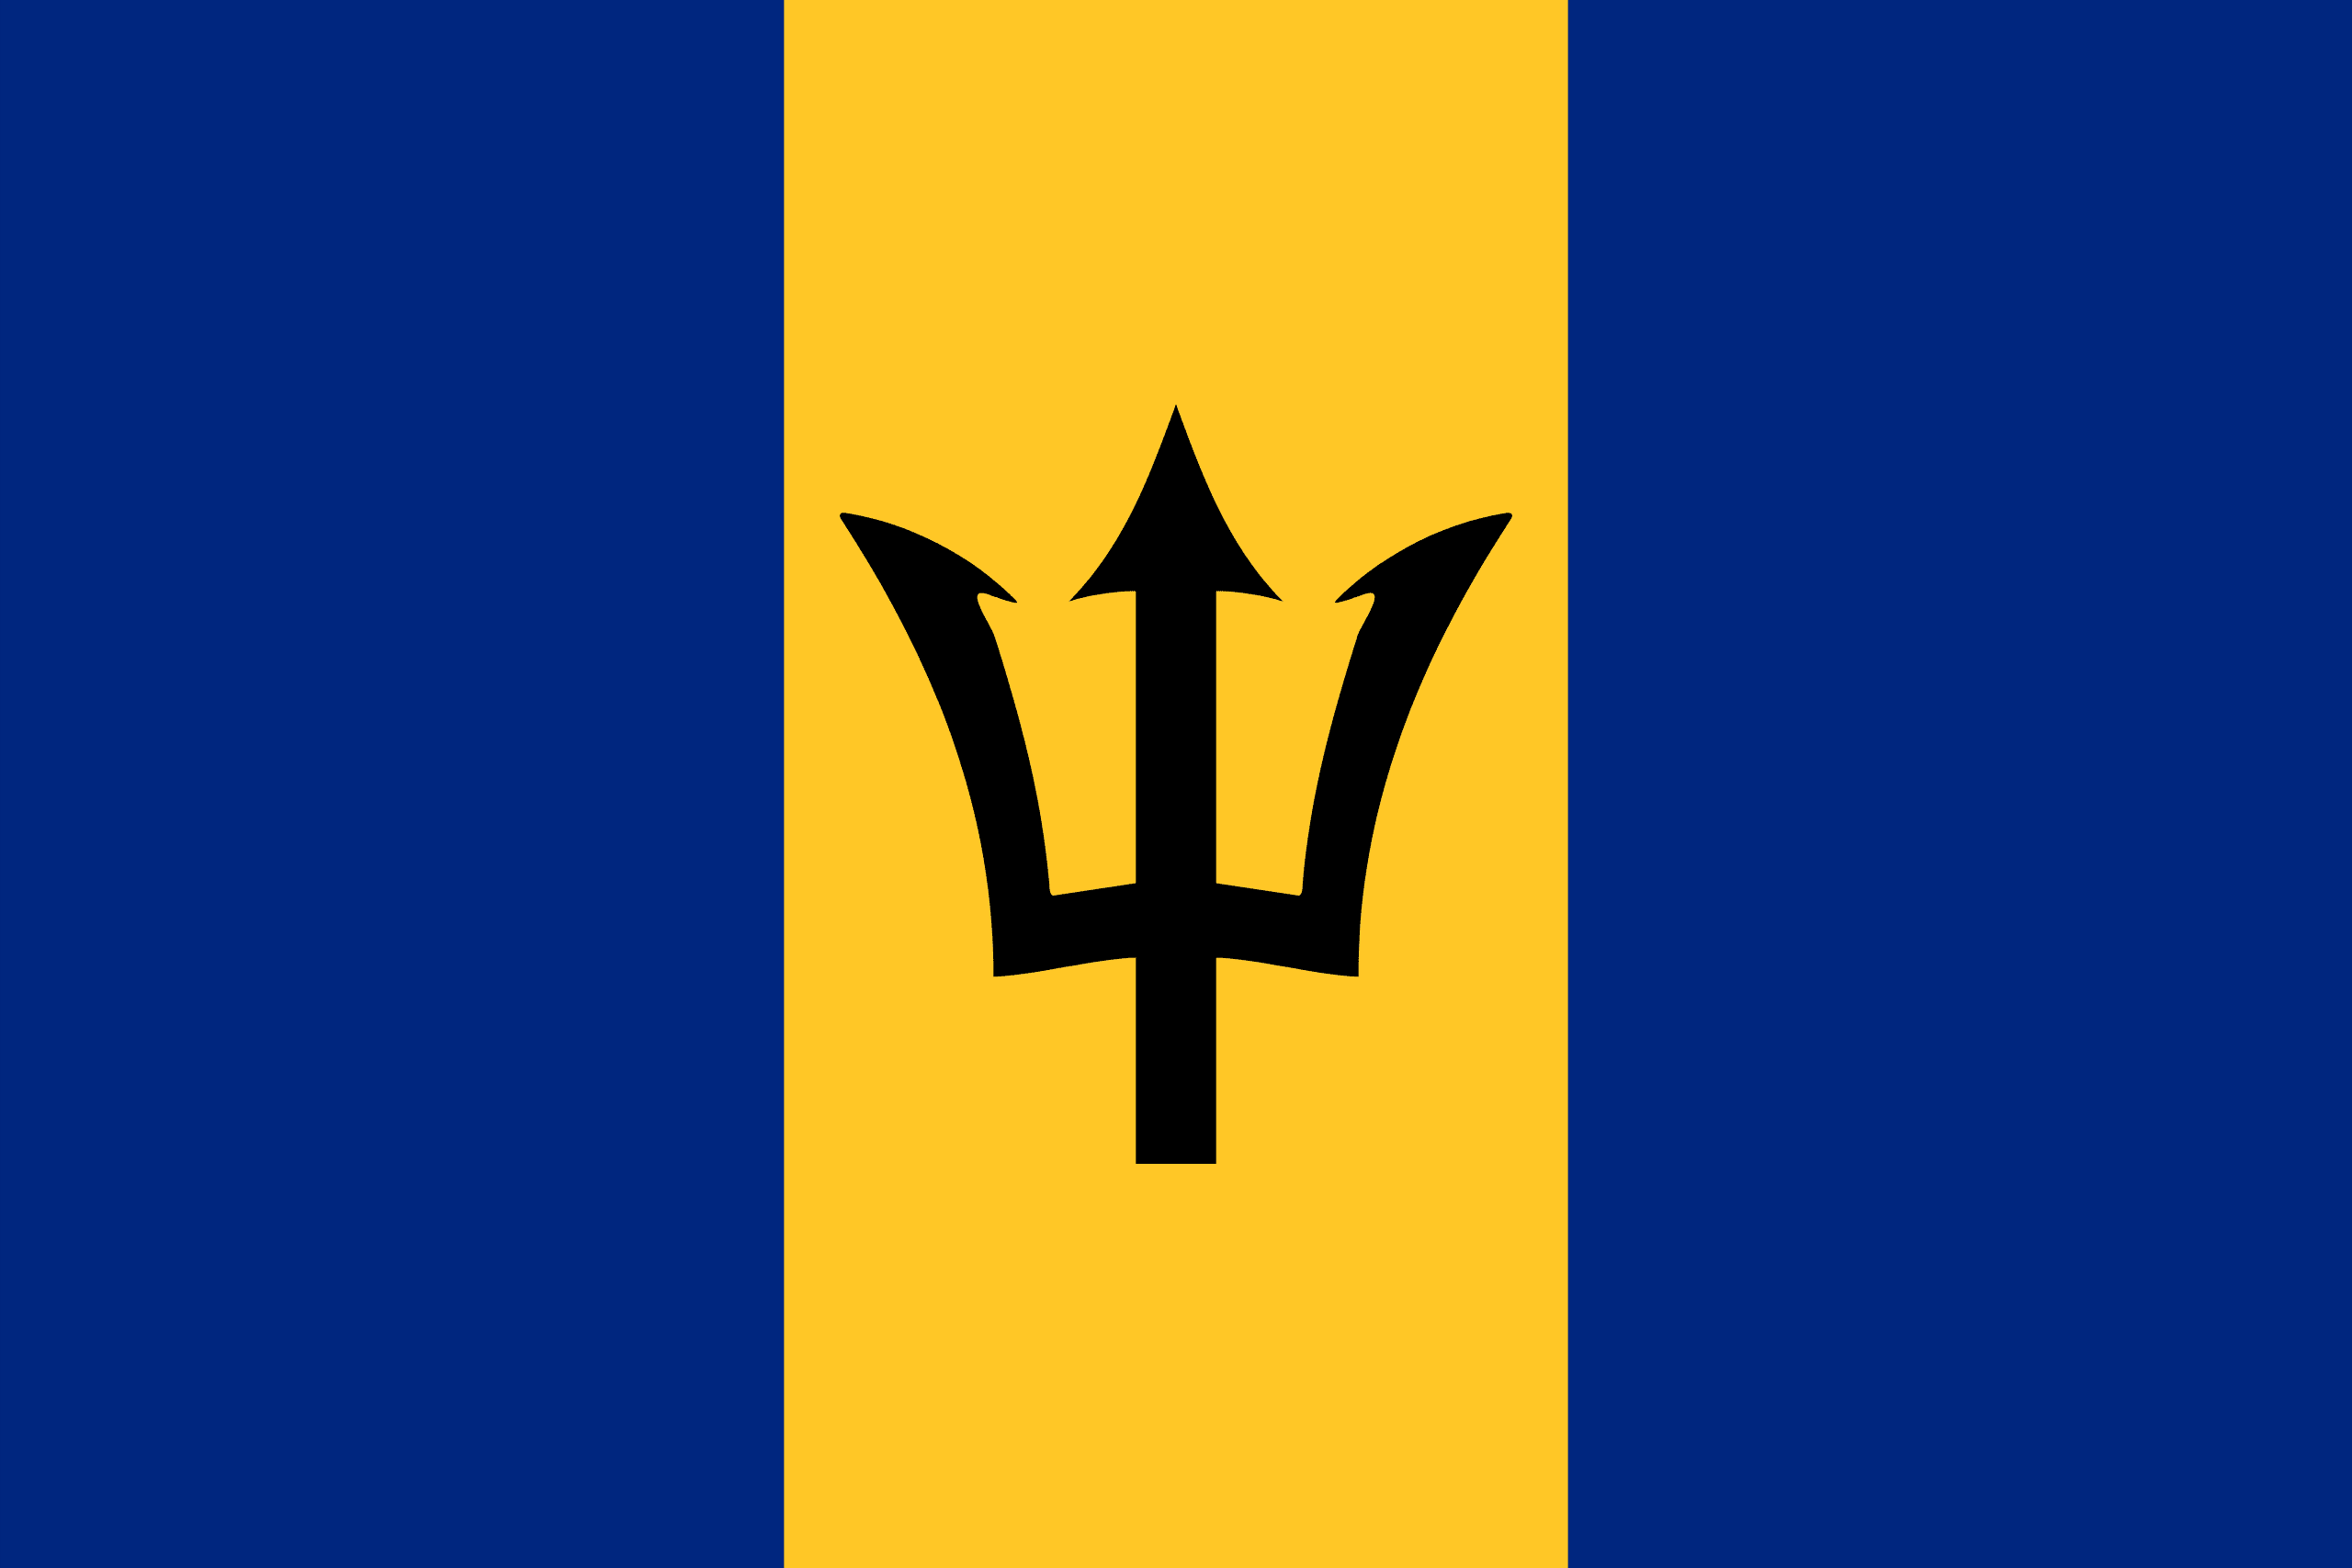

Belarus


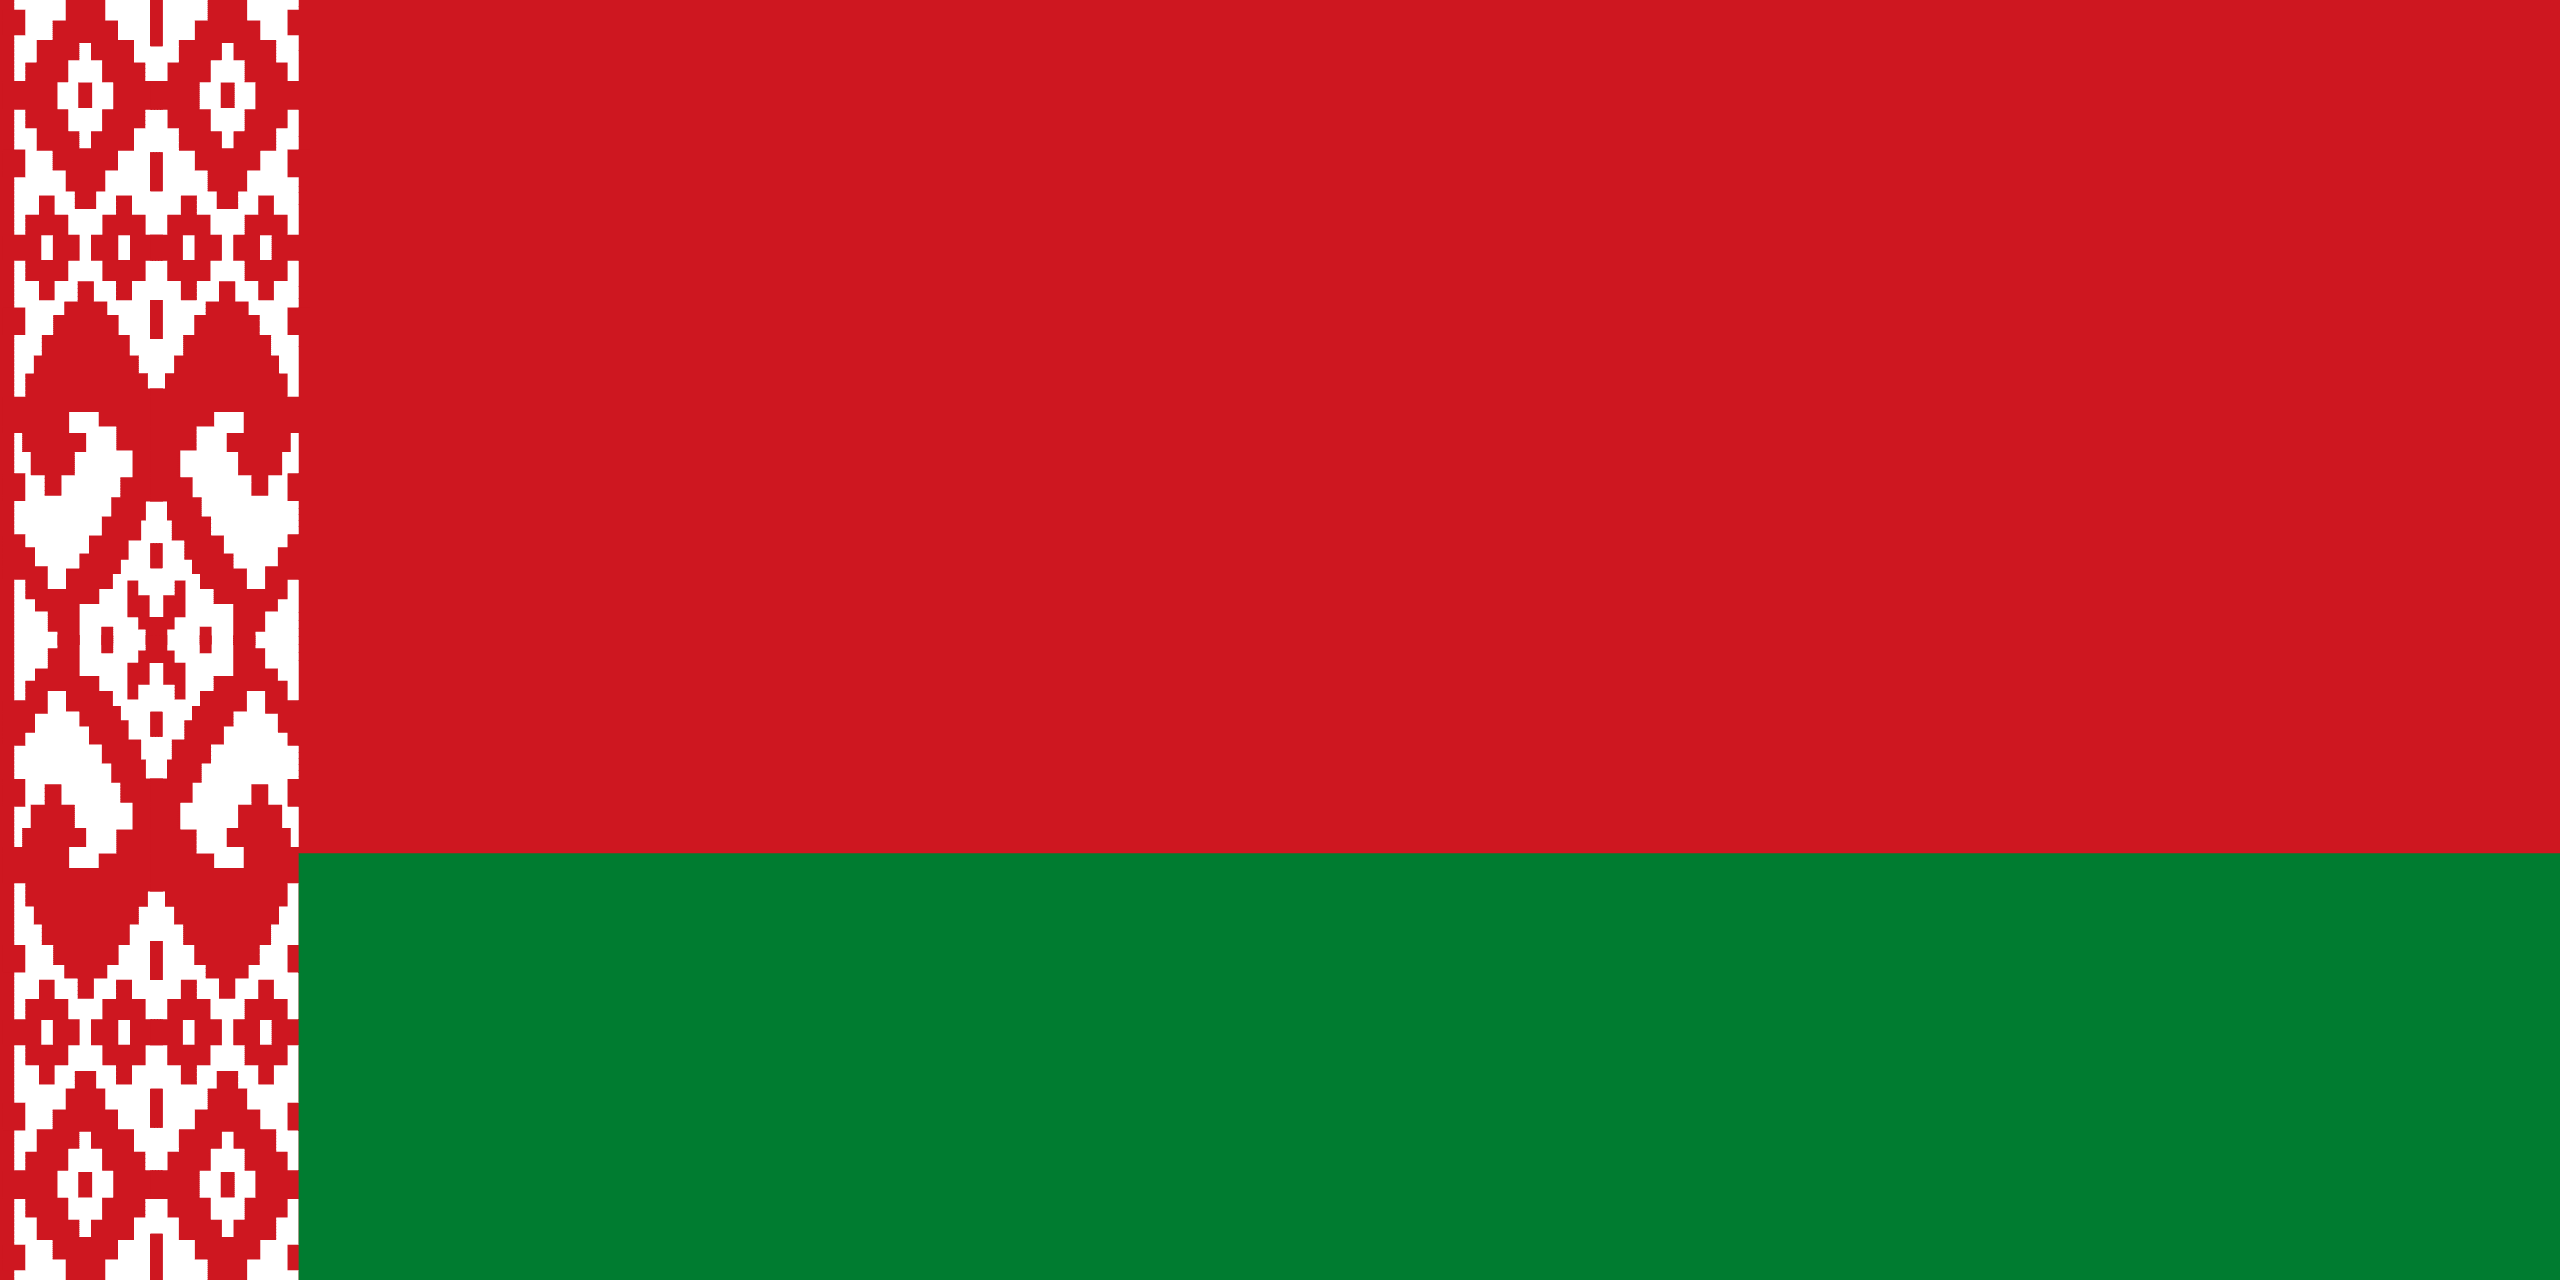

Belgium


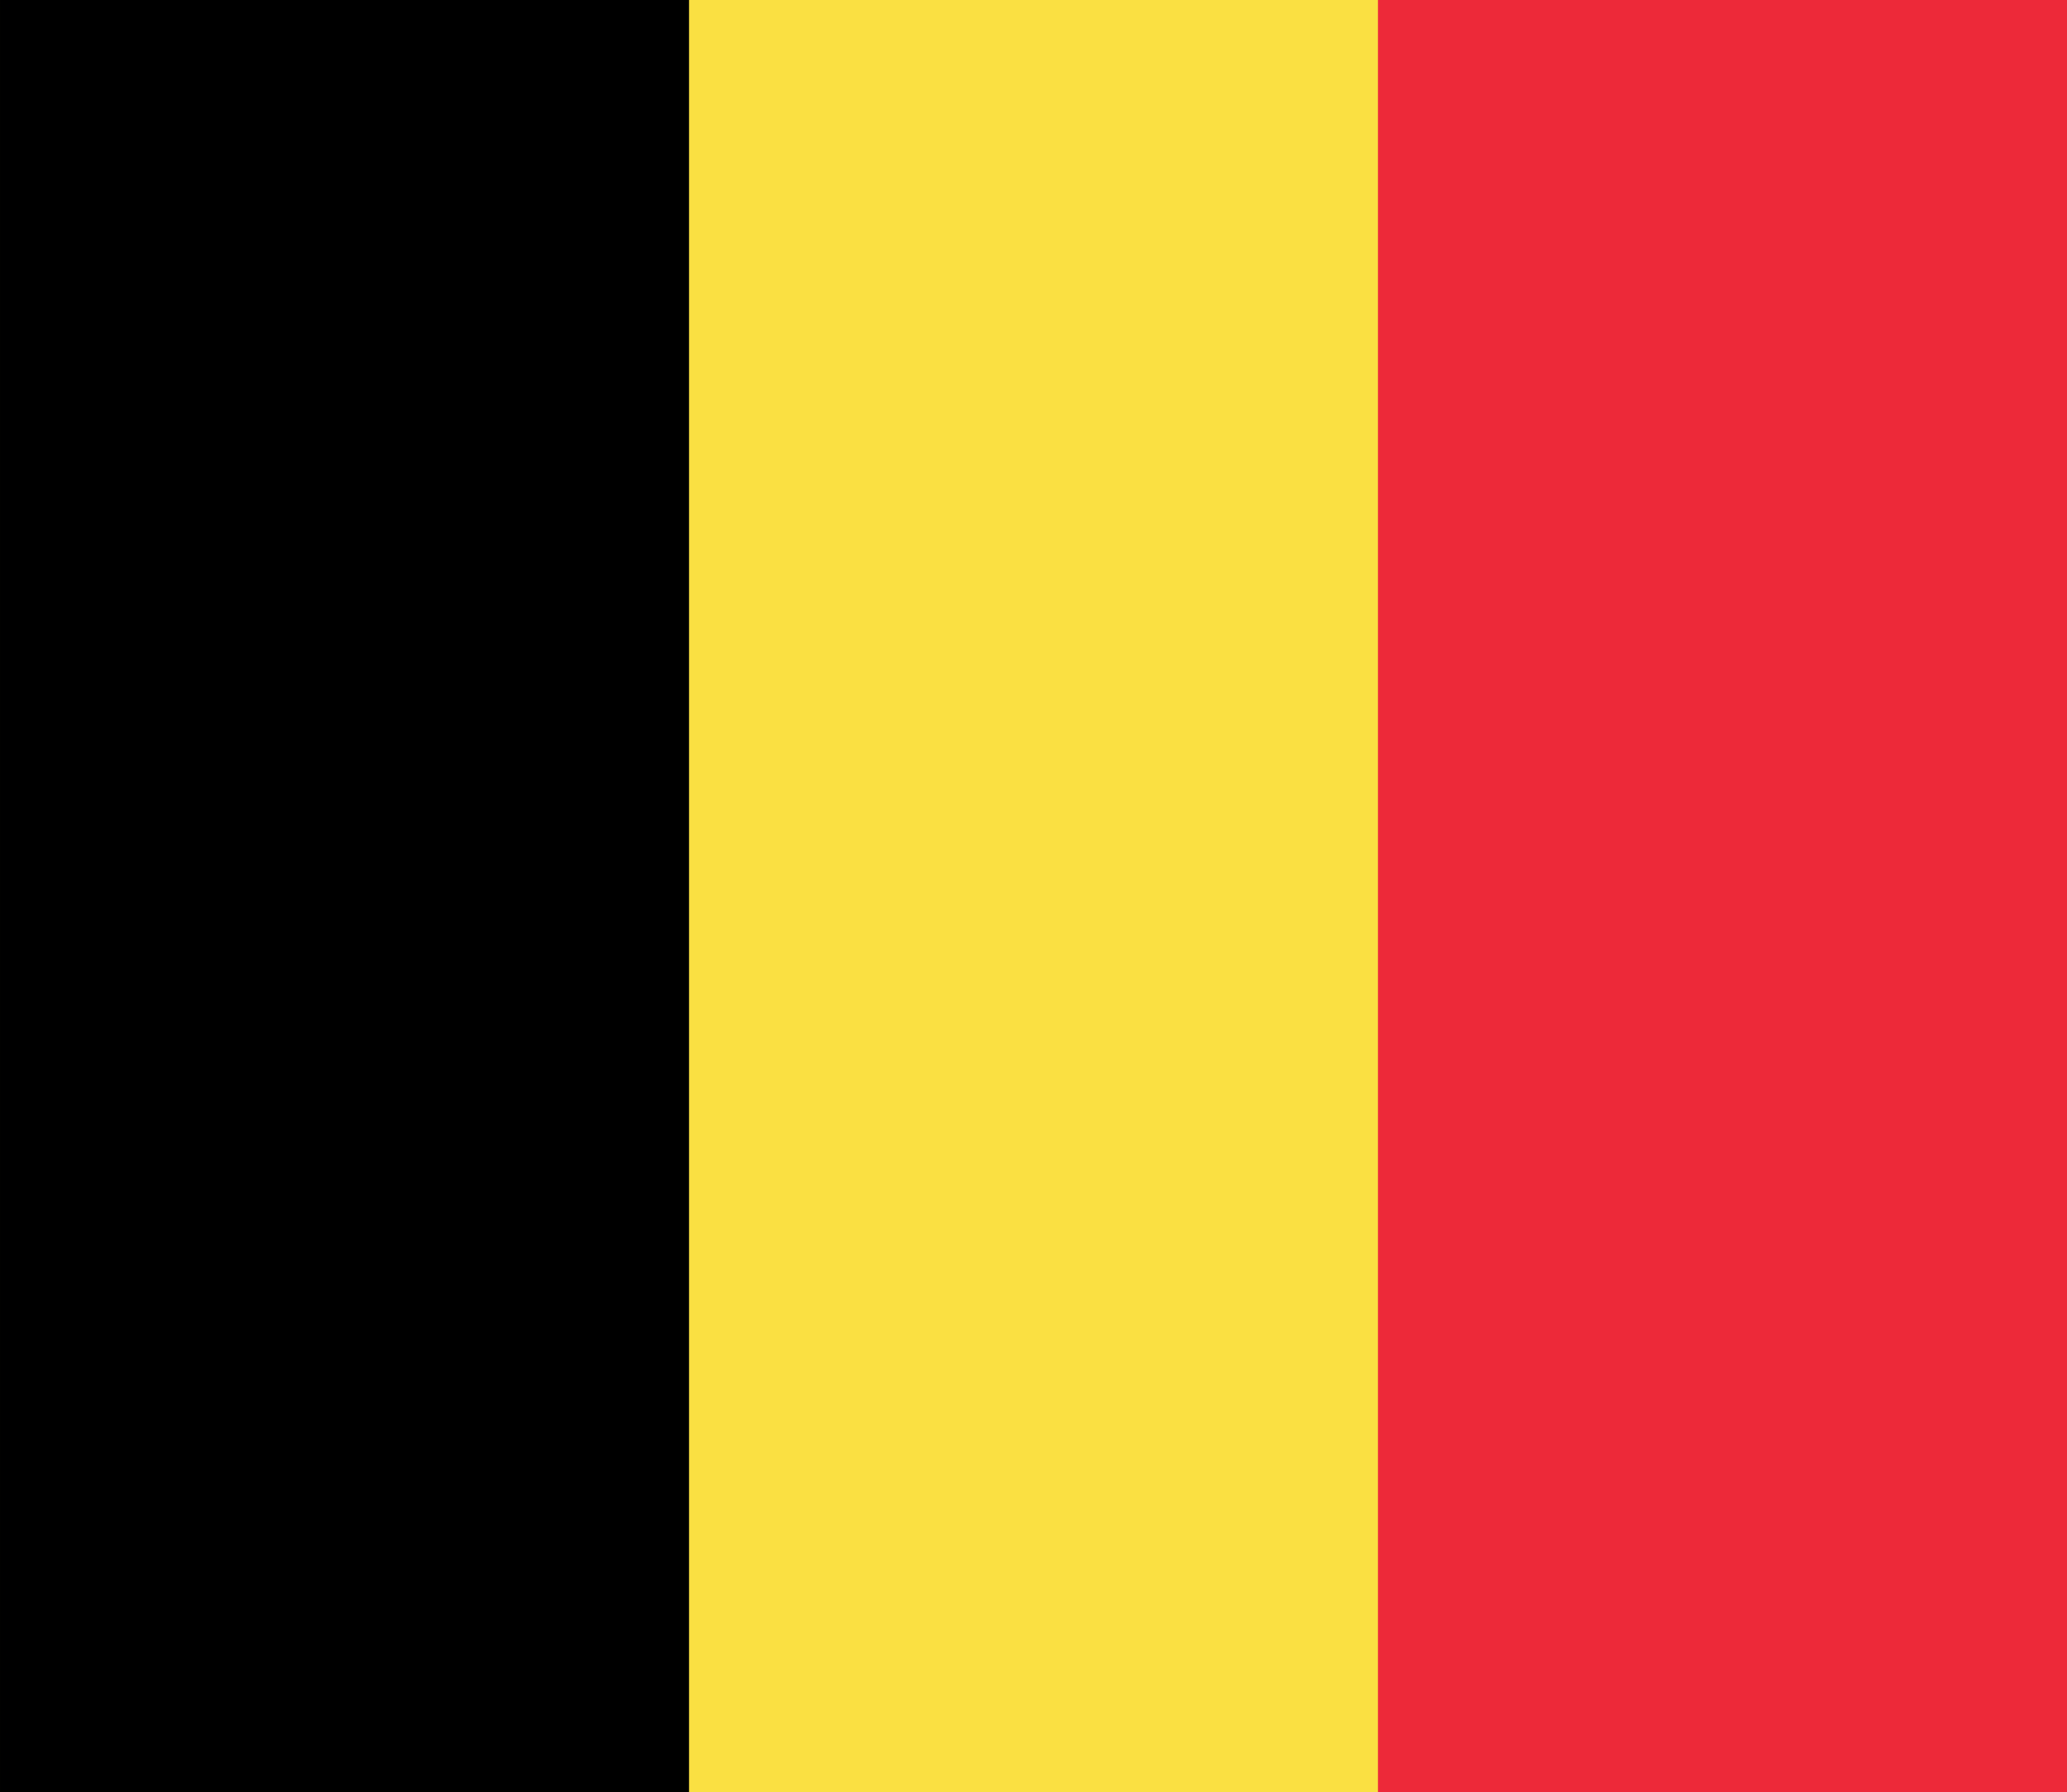

Belize


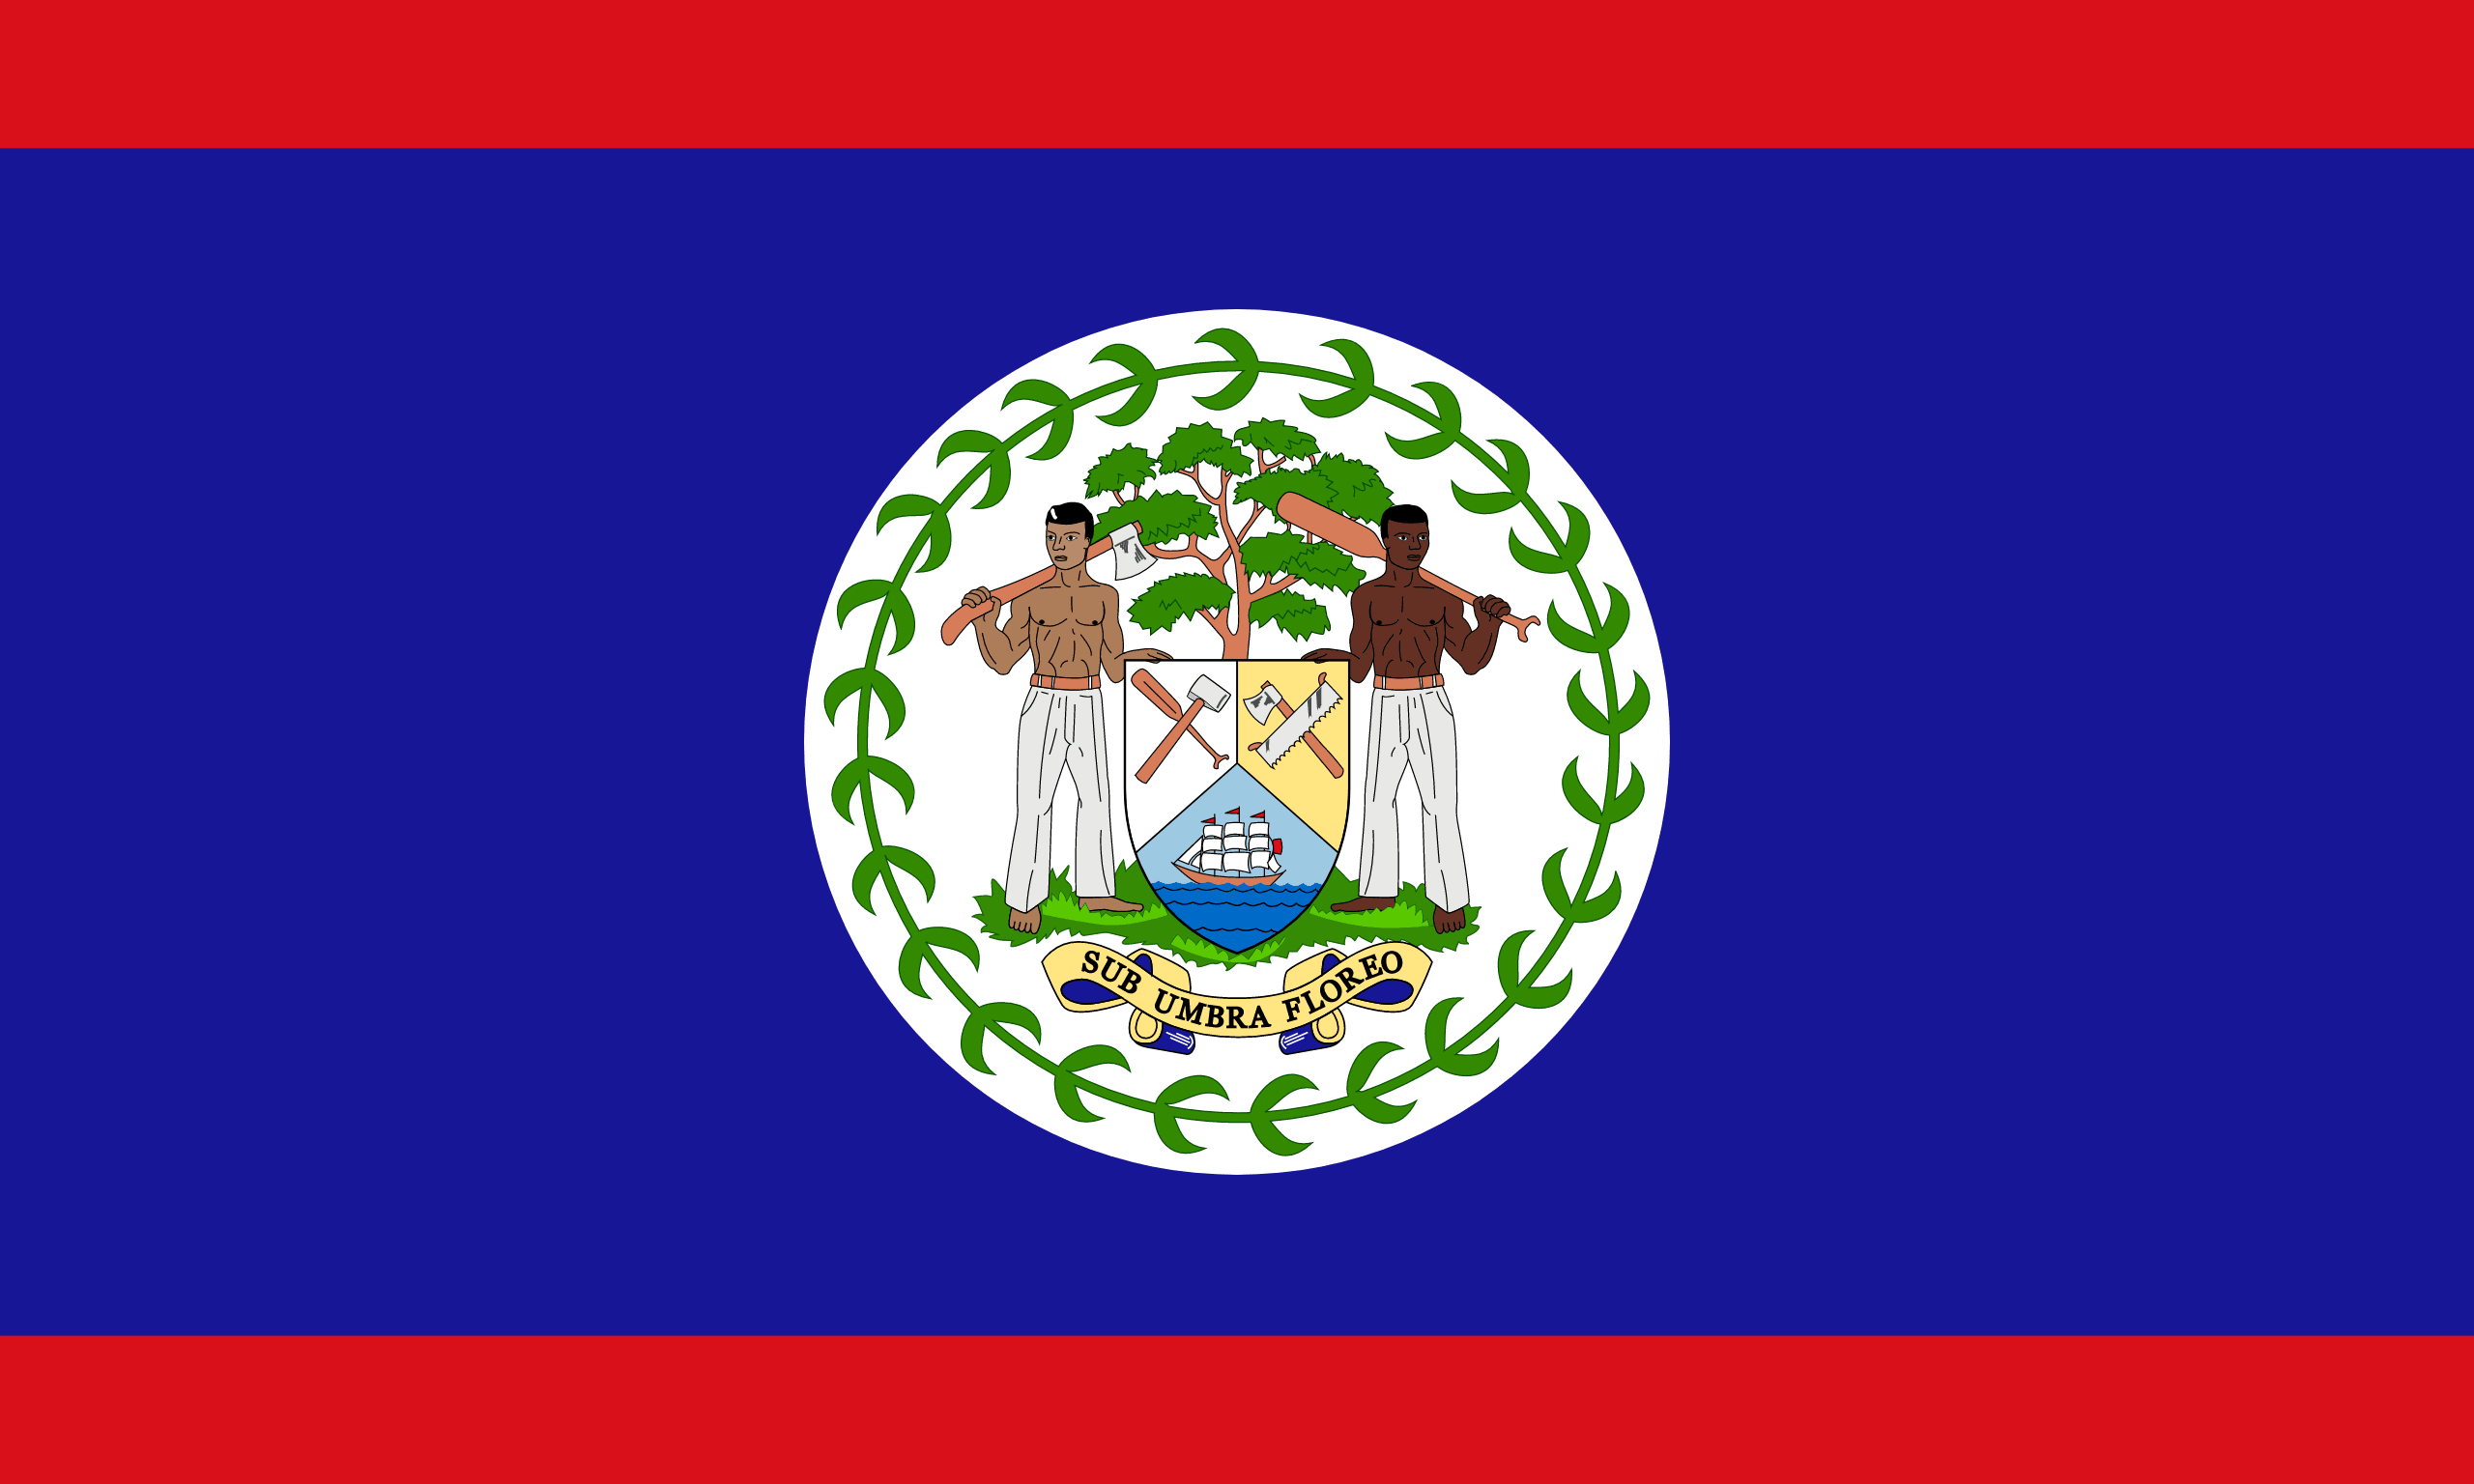

Benin


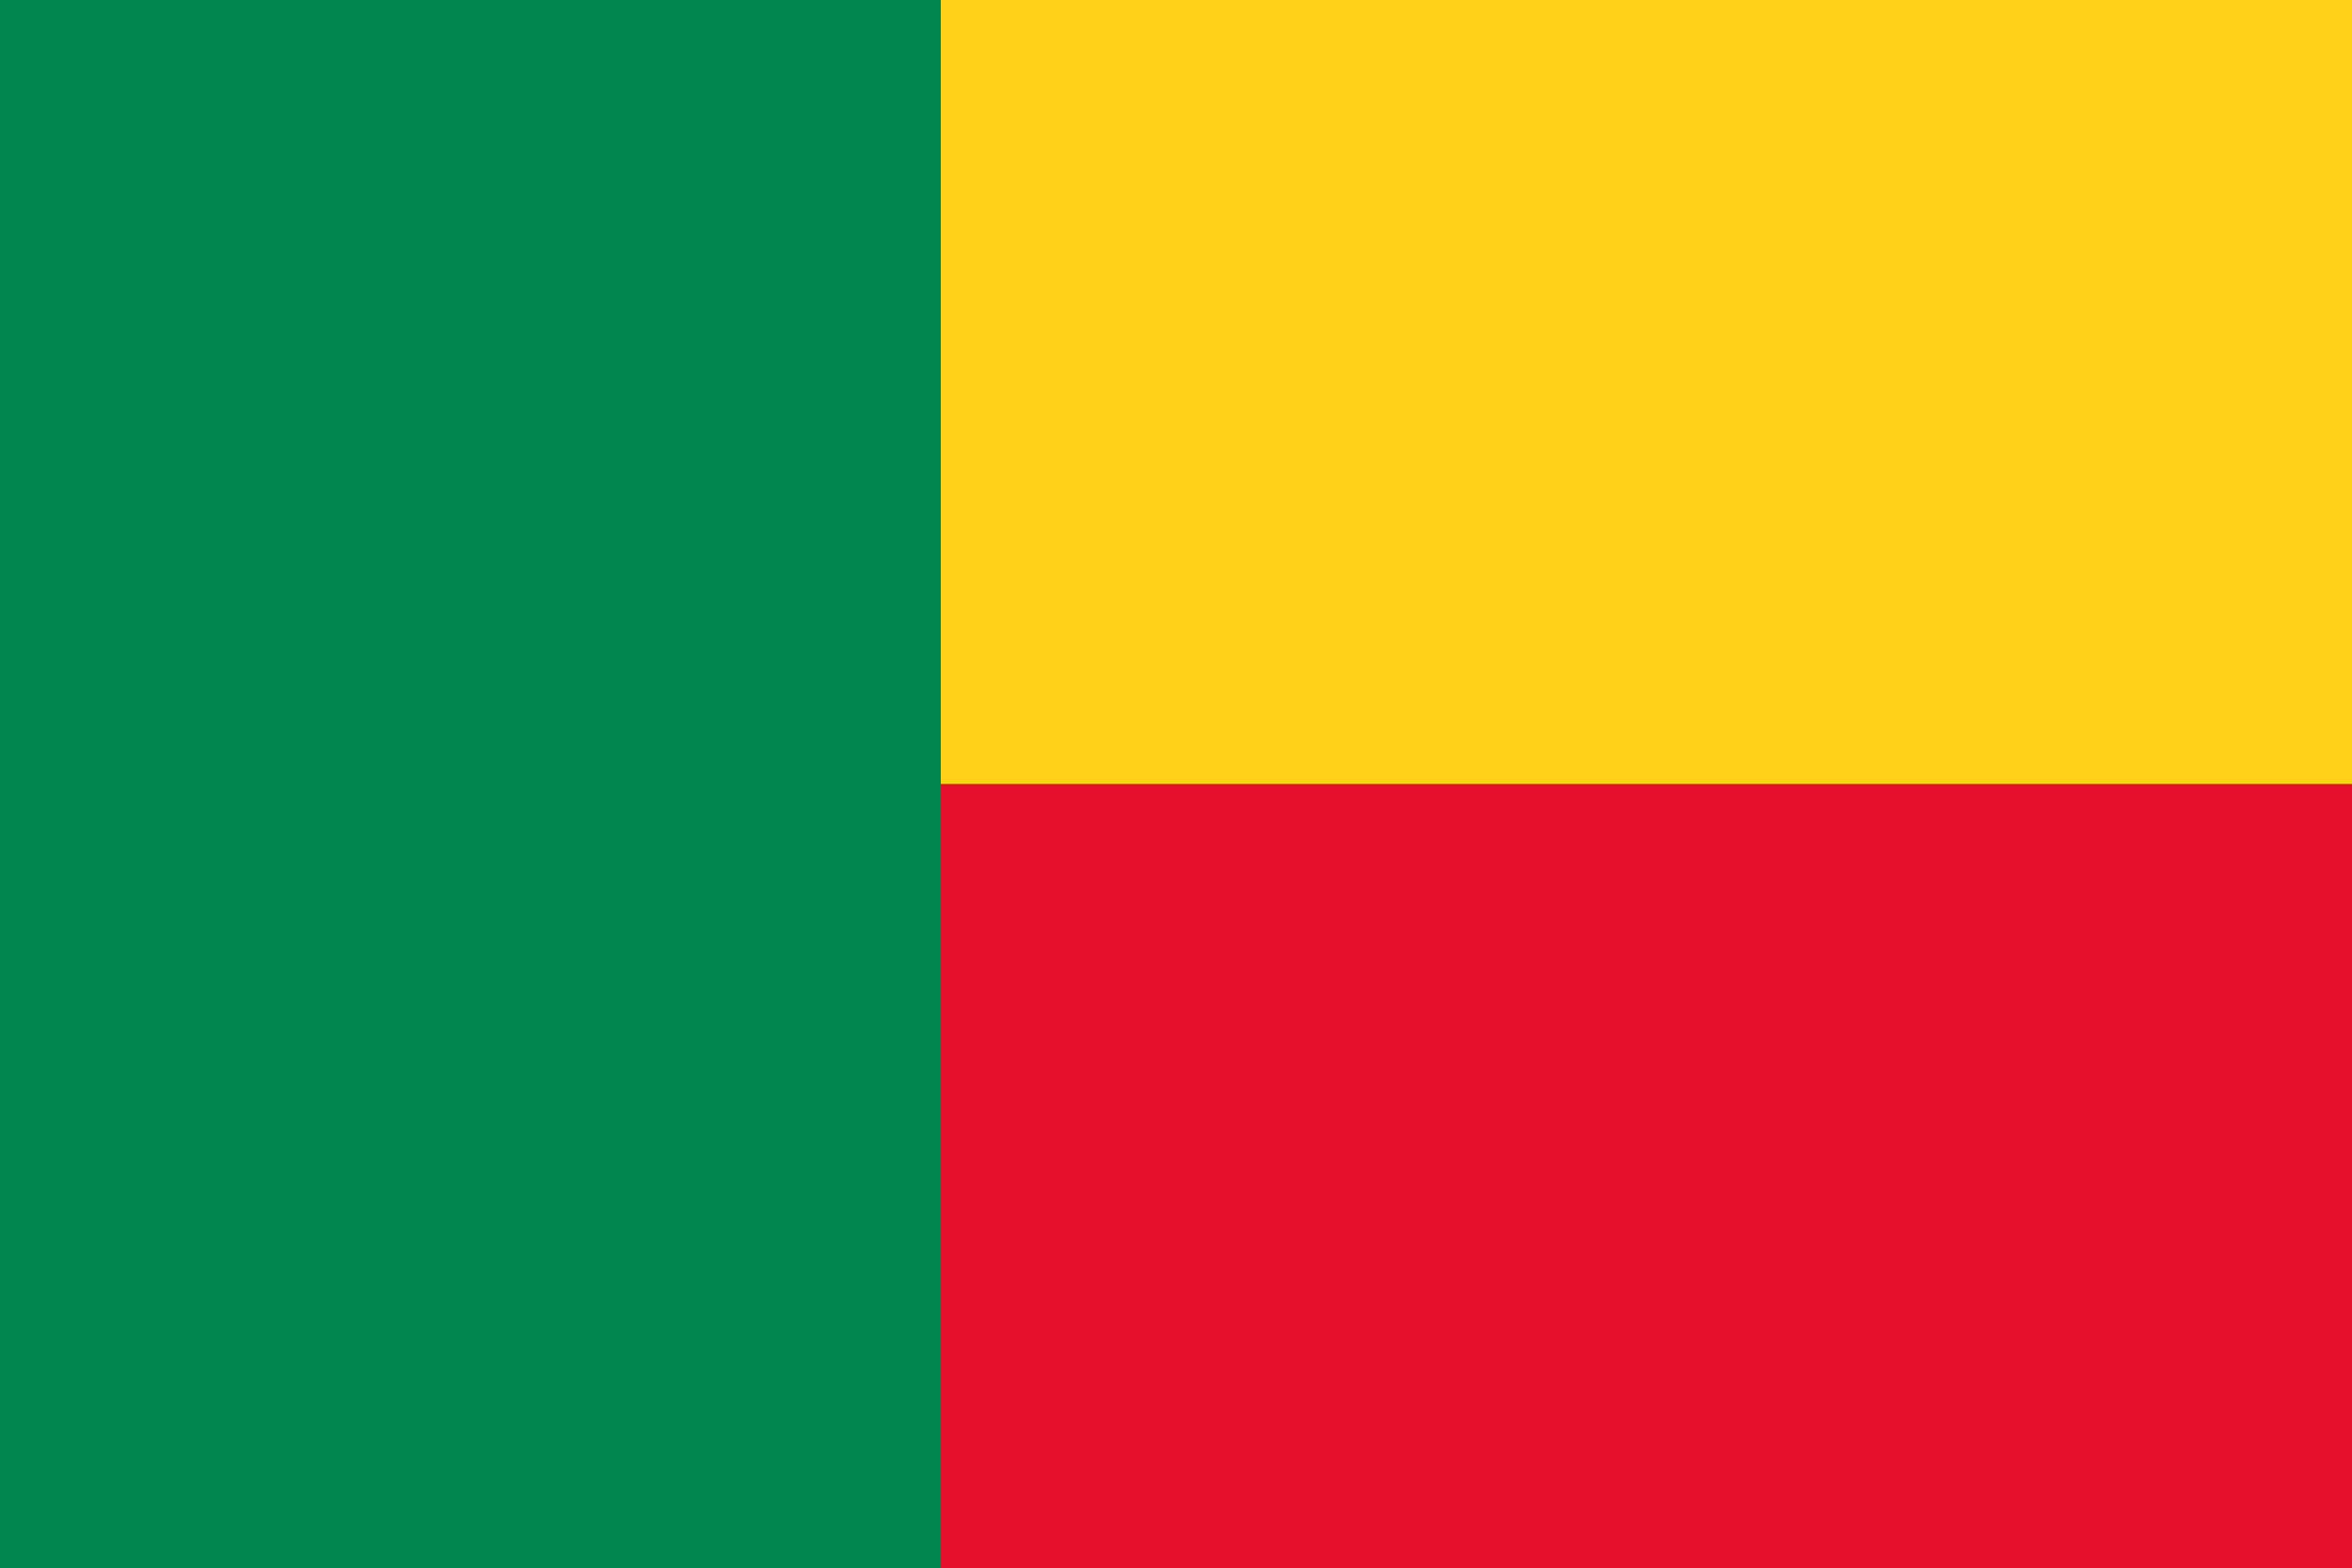

Bermuda


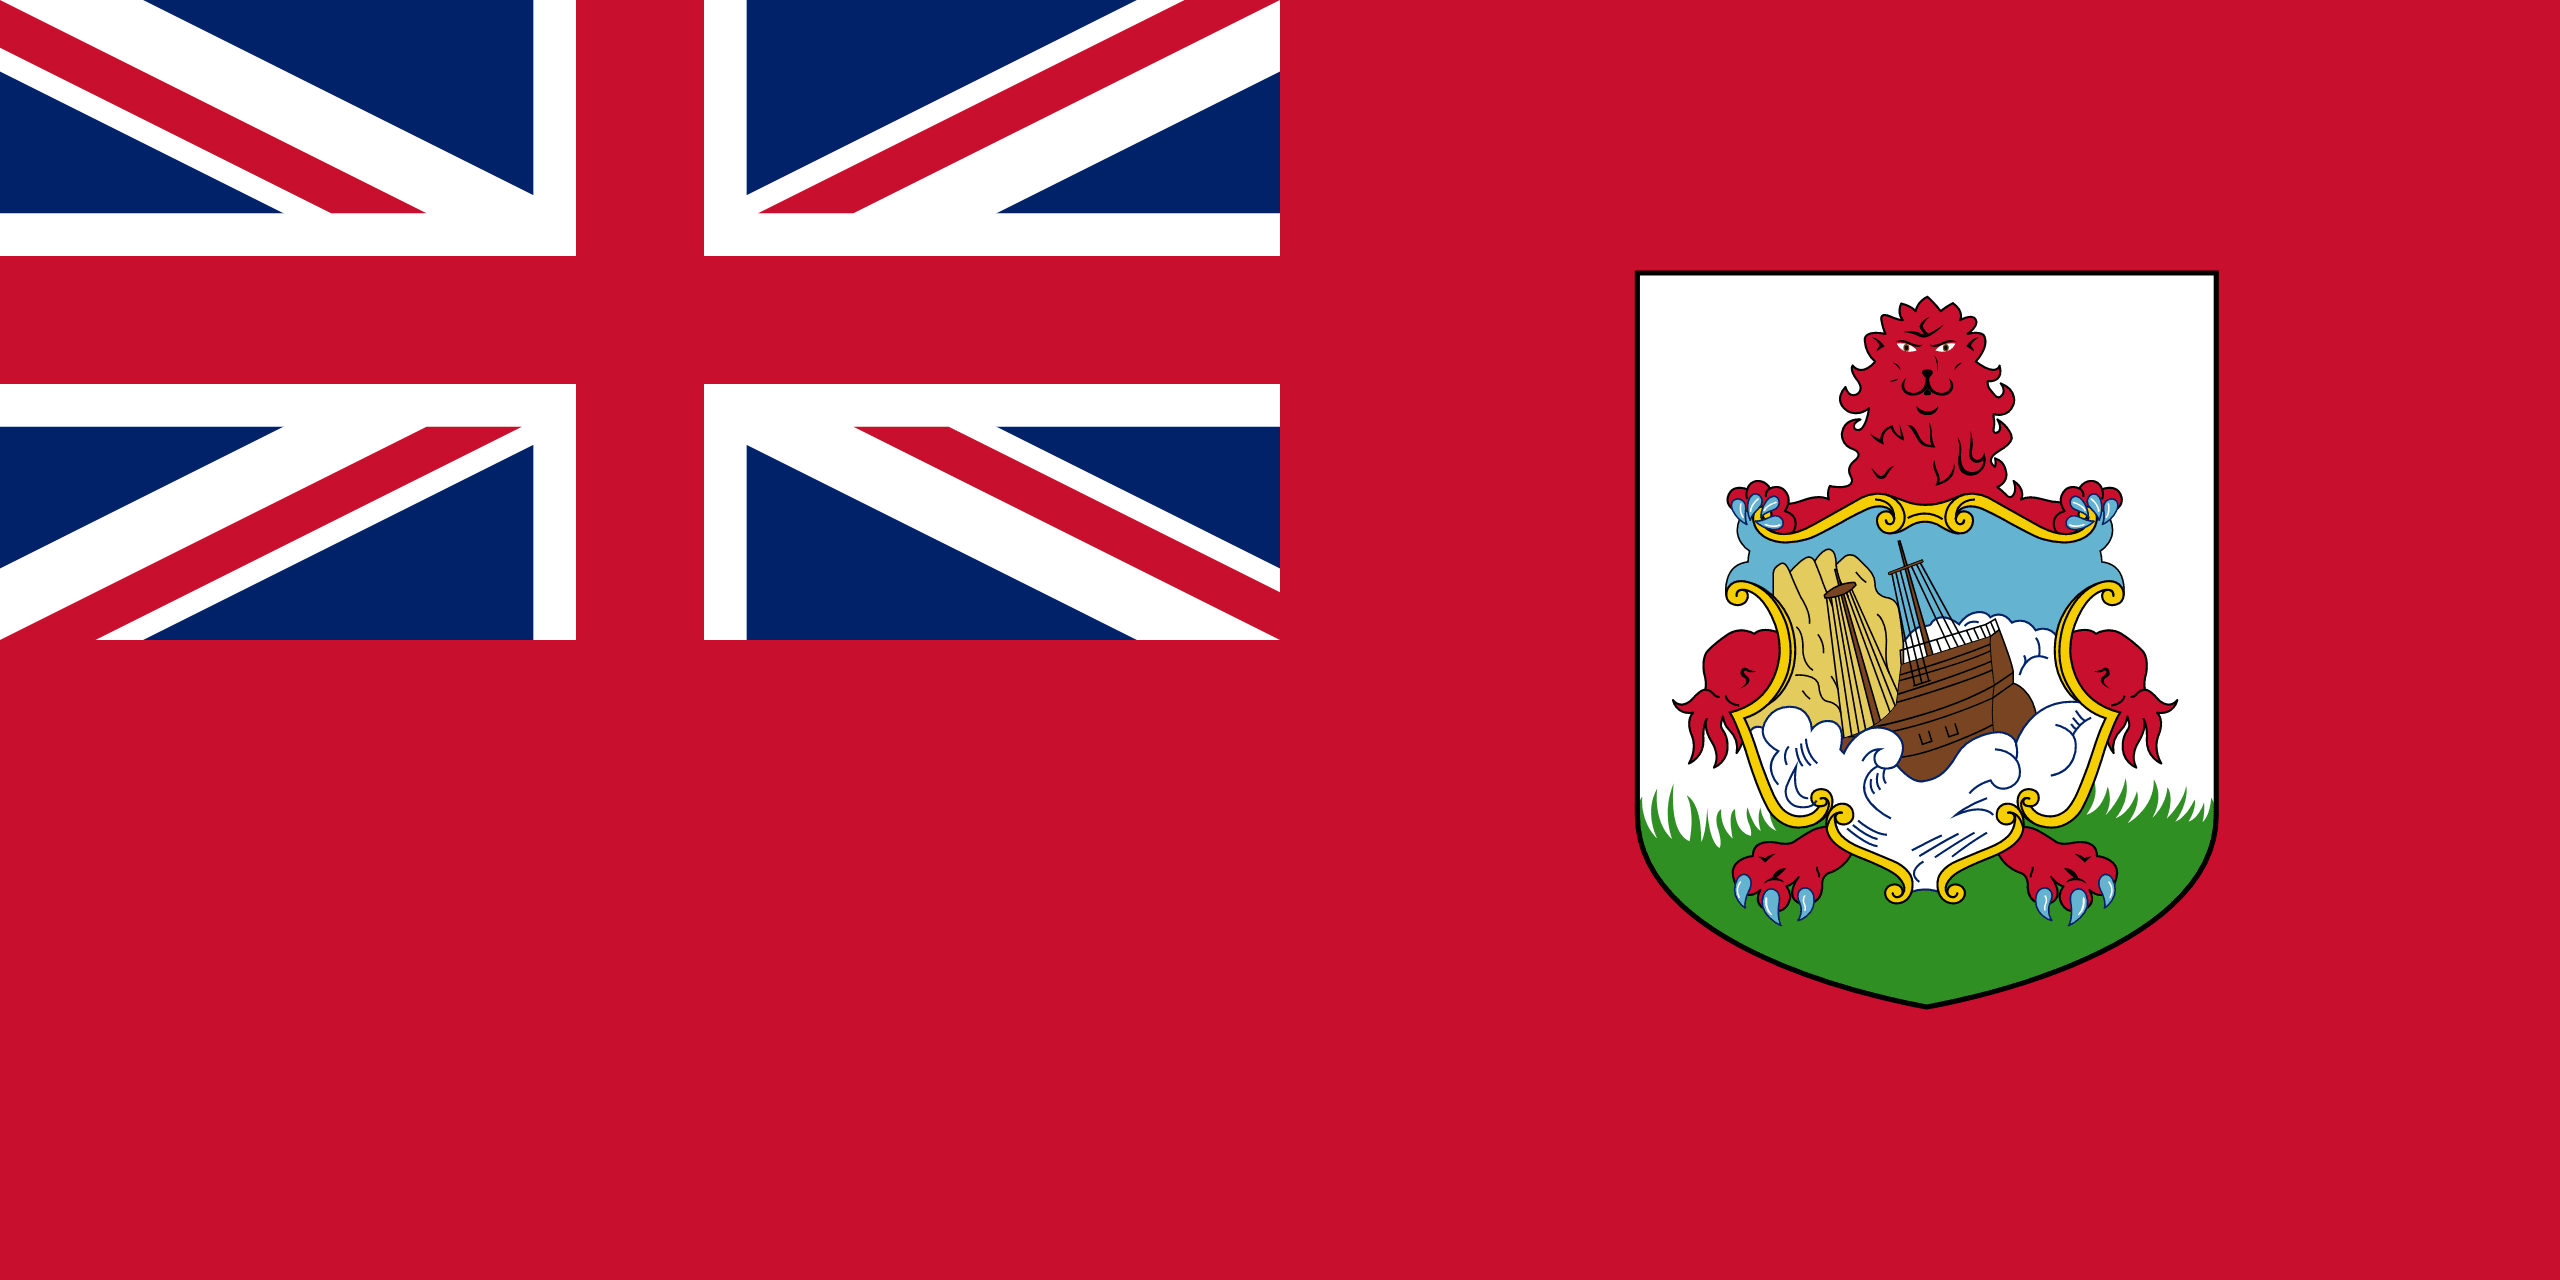

Bhutan


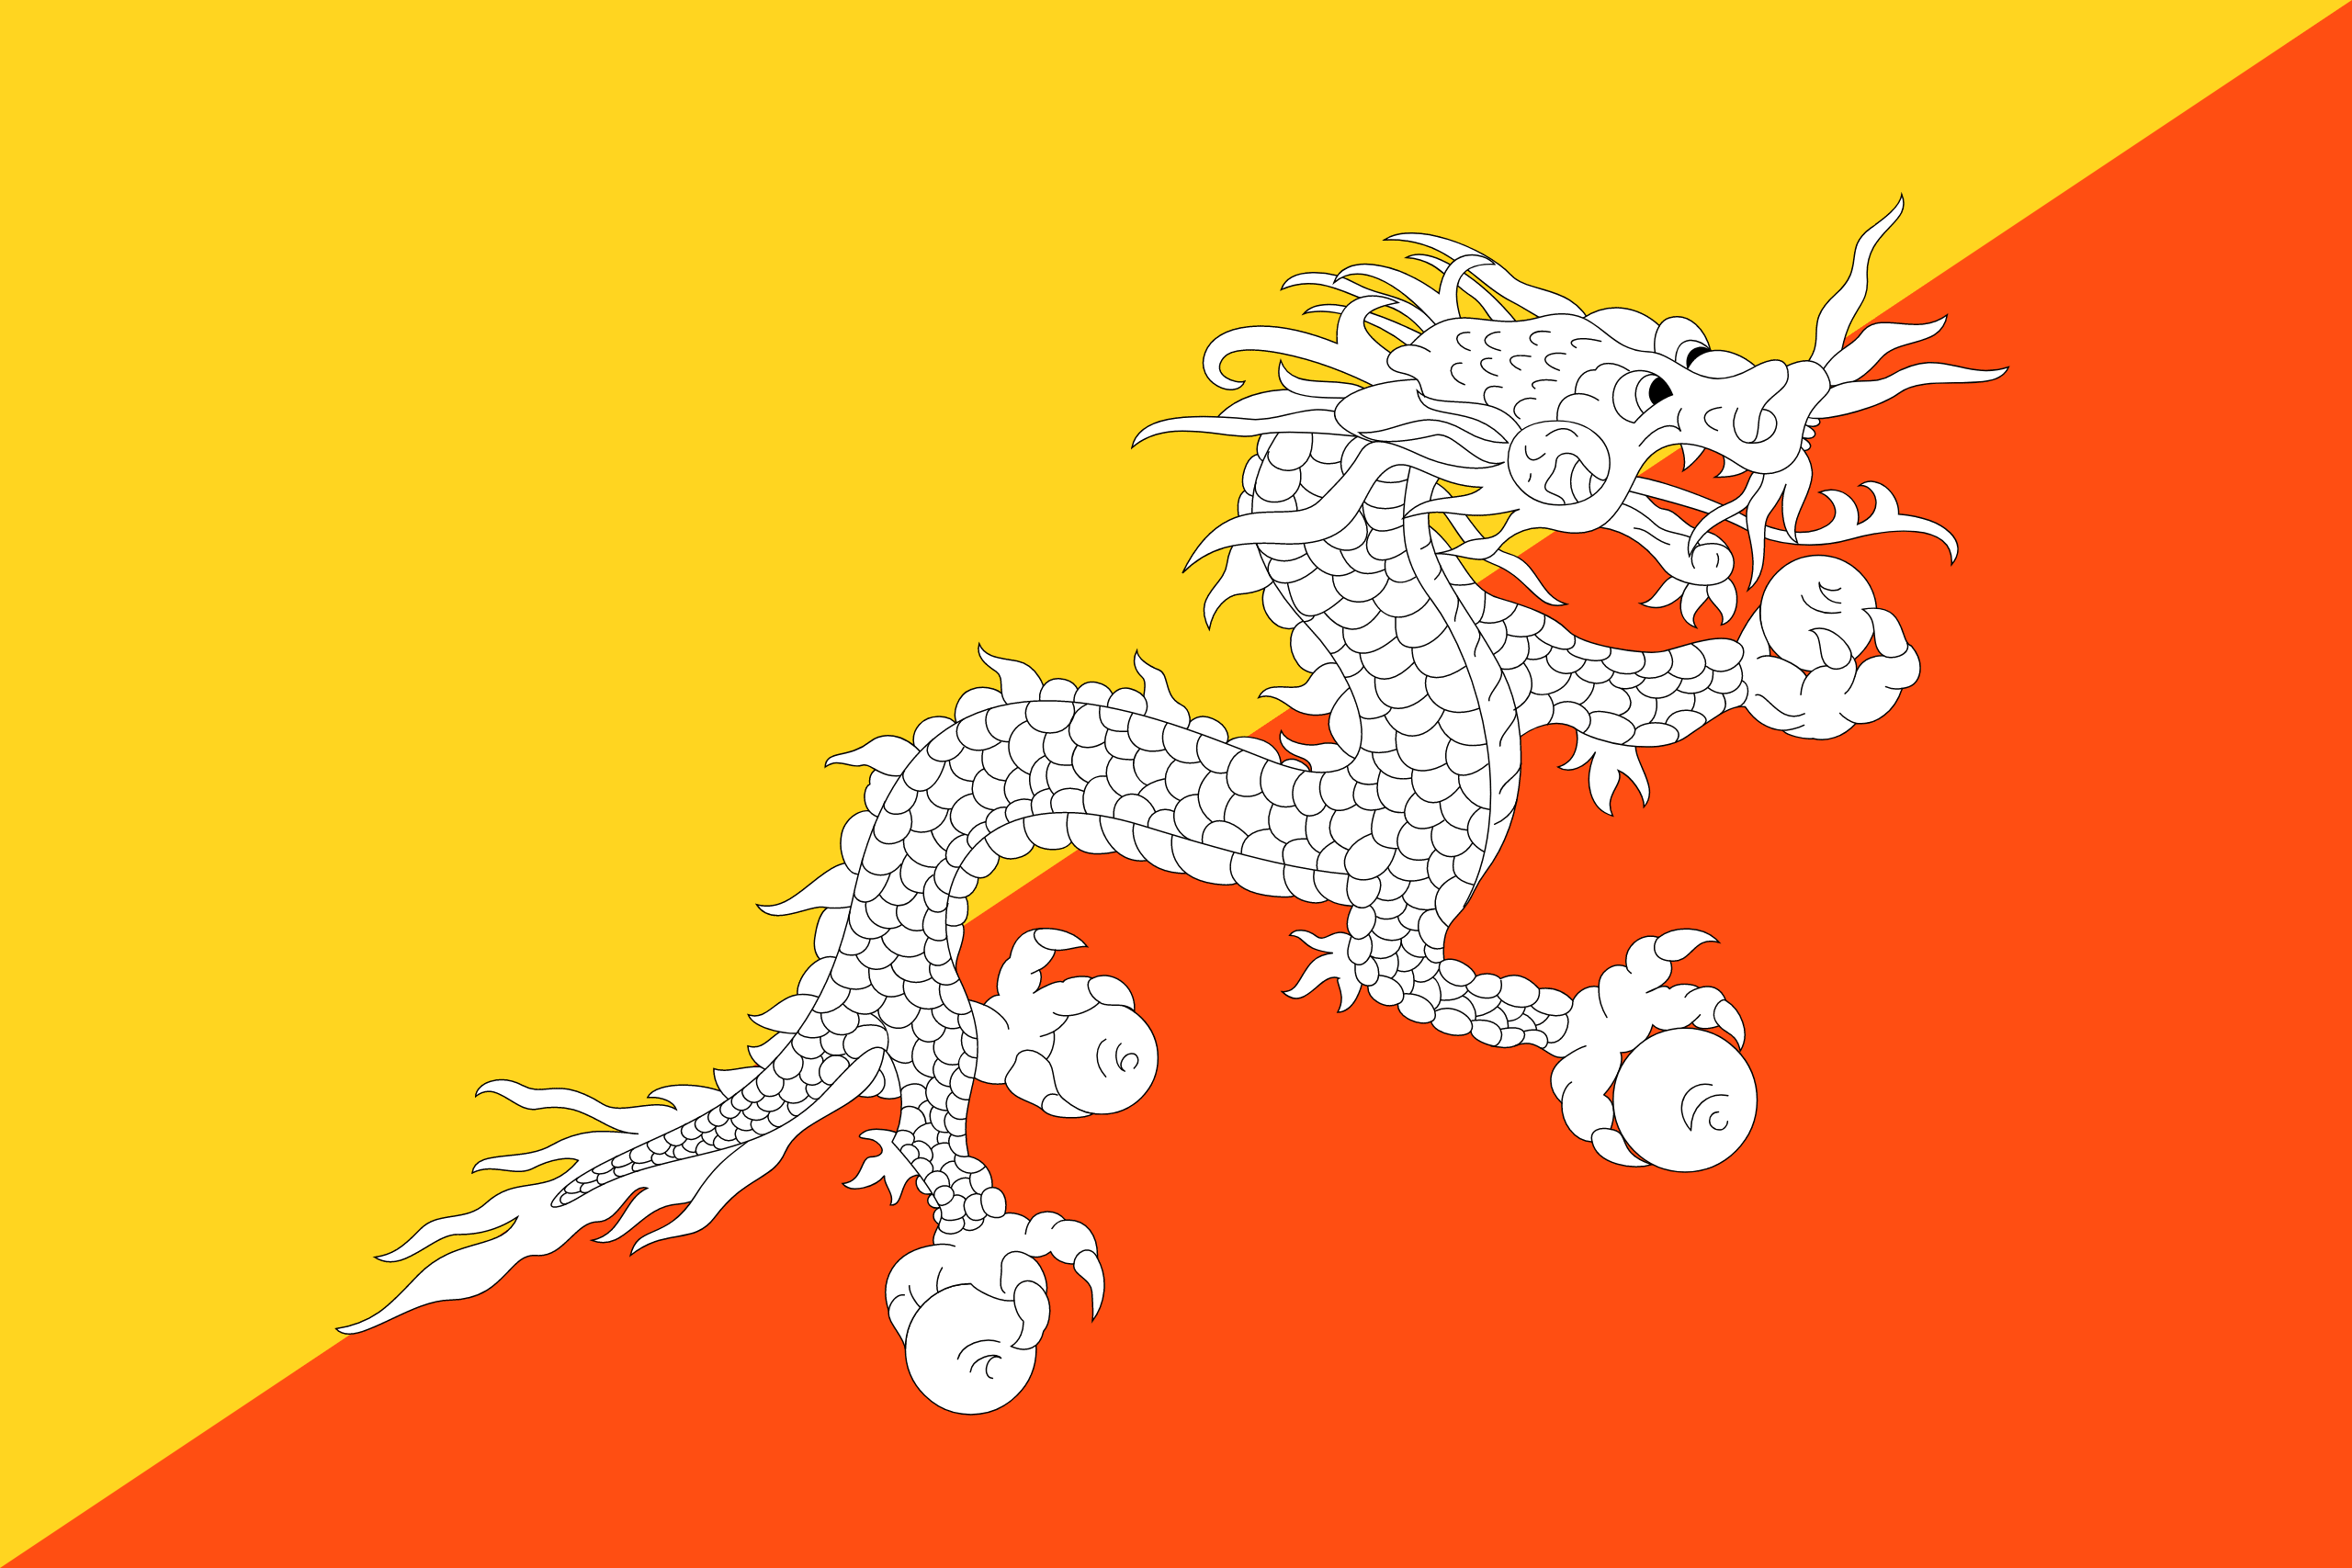

Bolivia


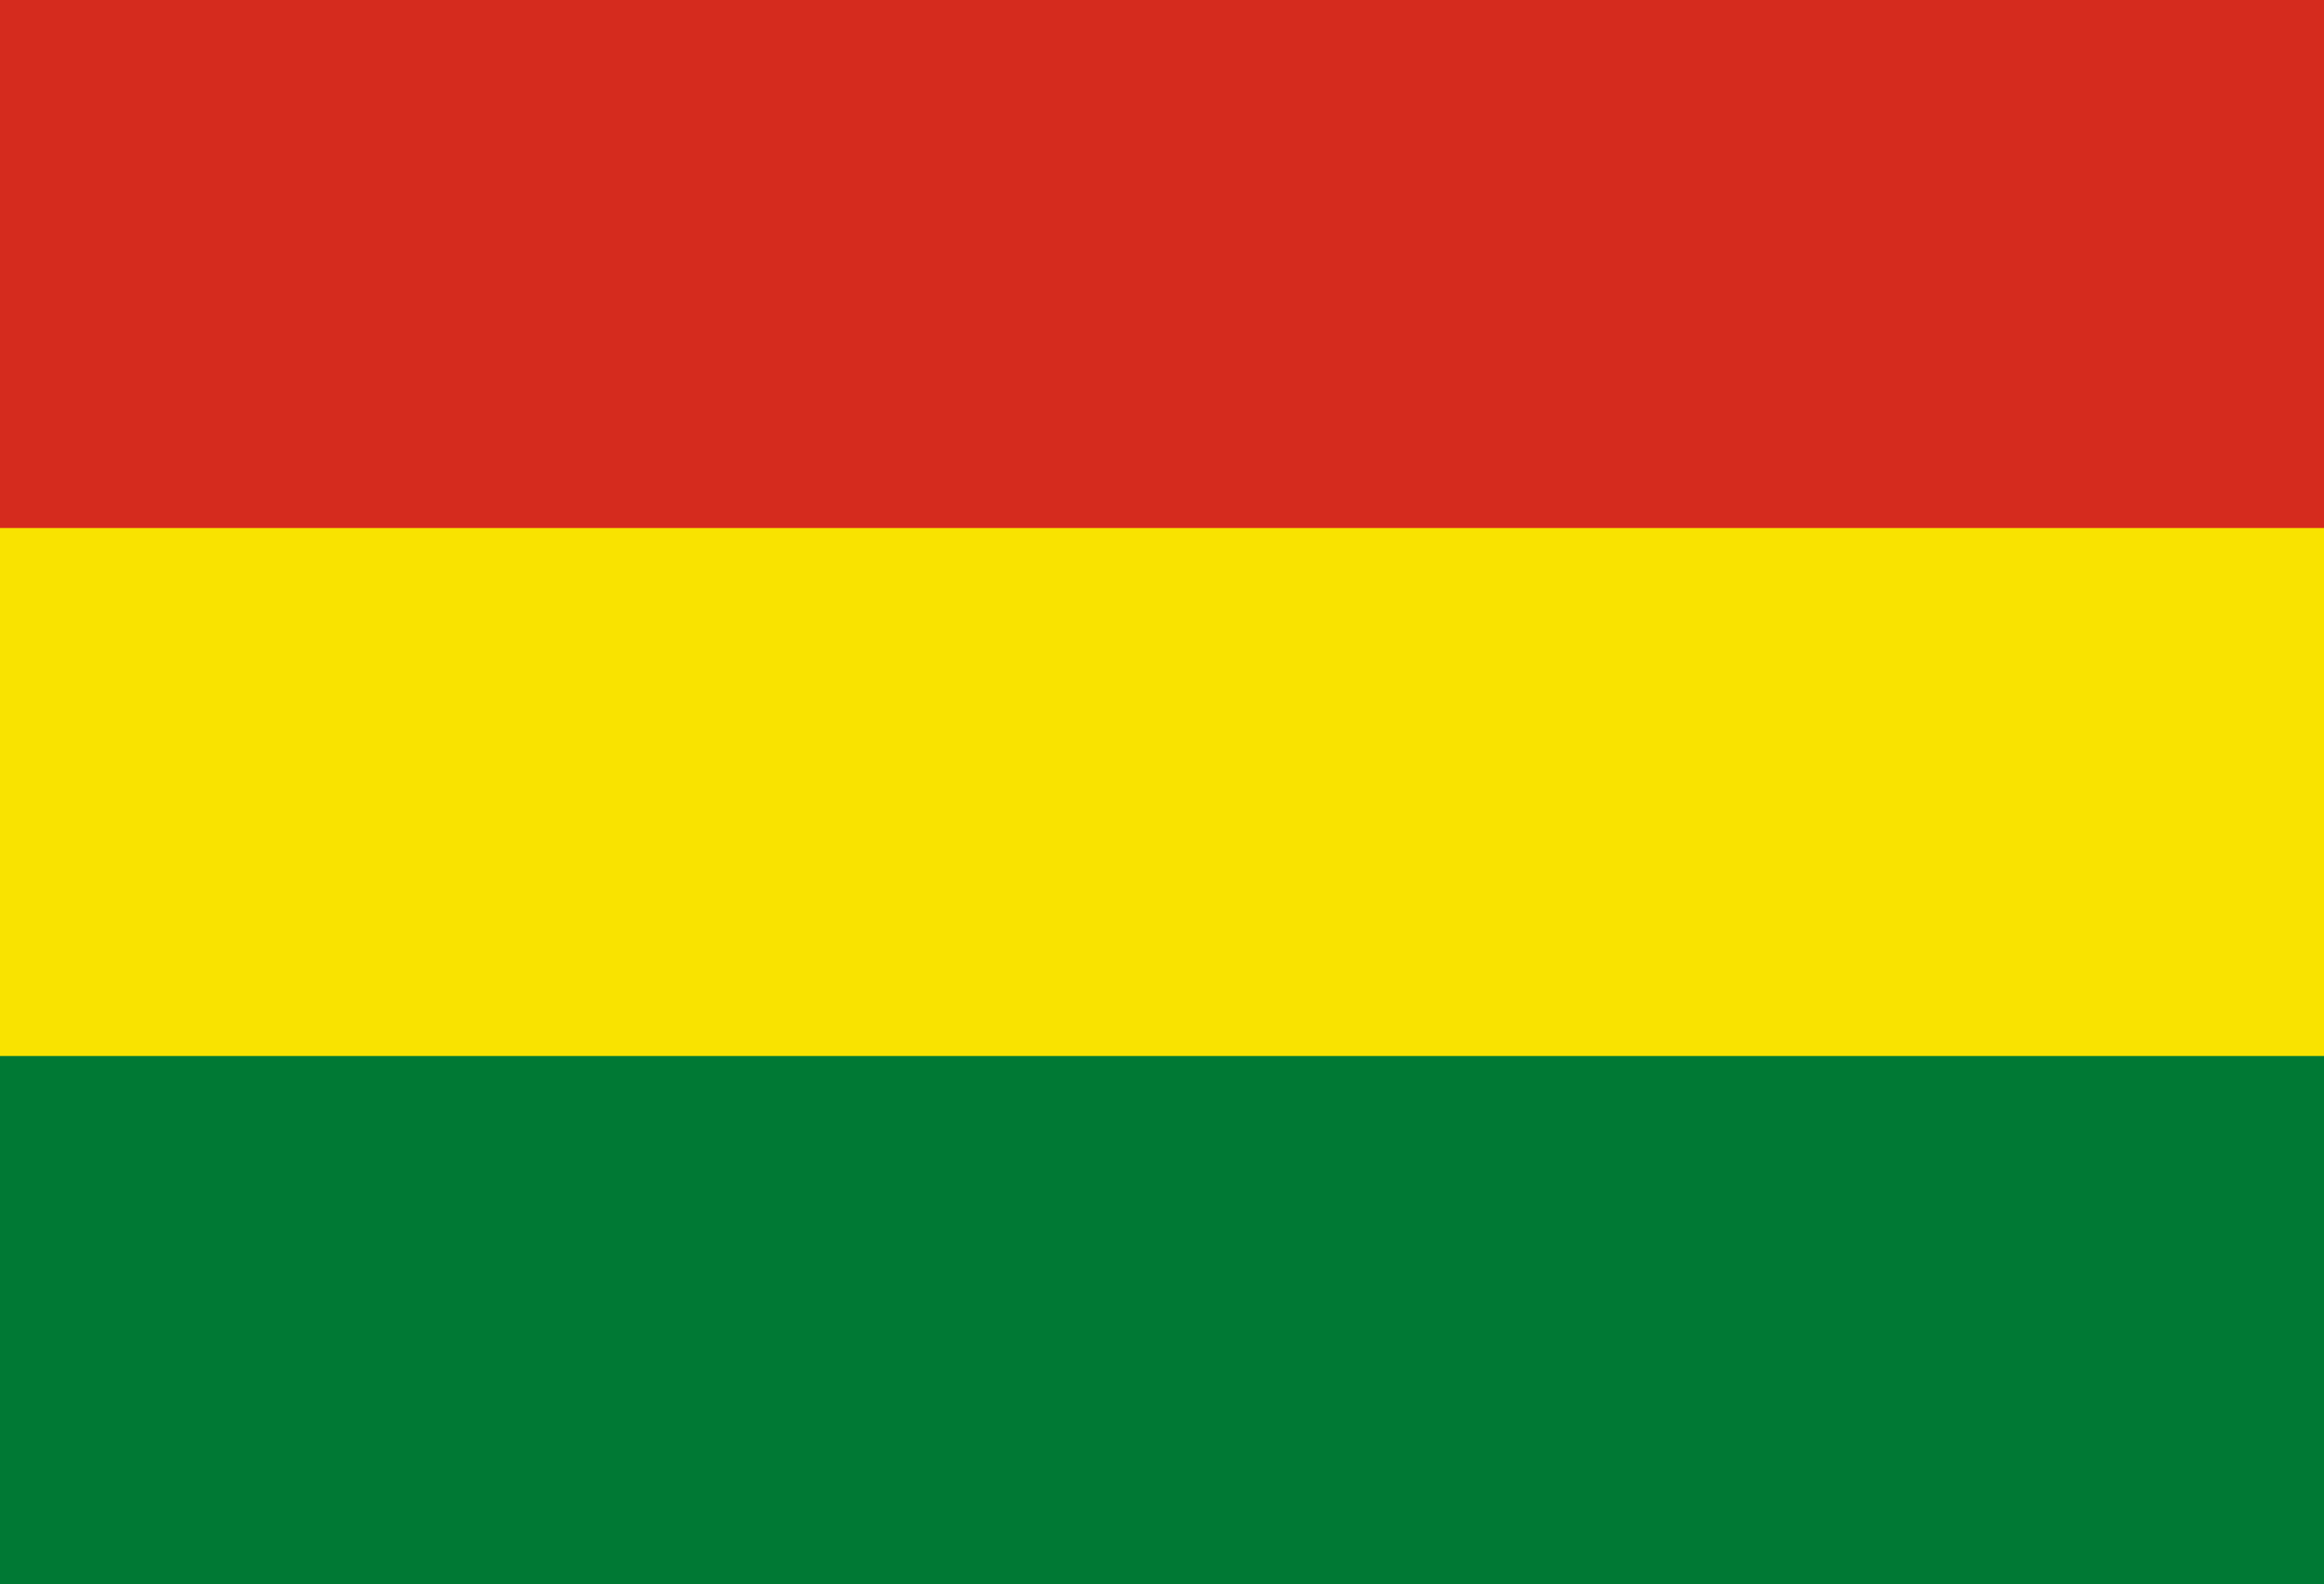

Bosnia and Herzegovina


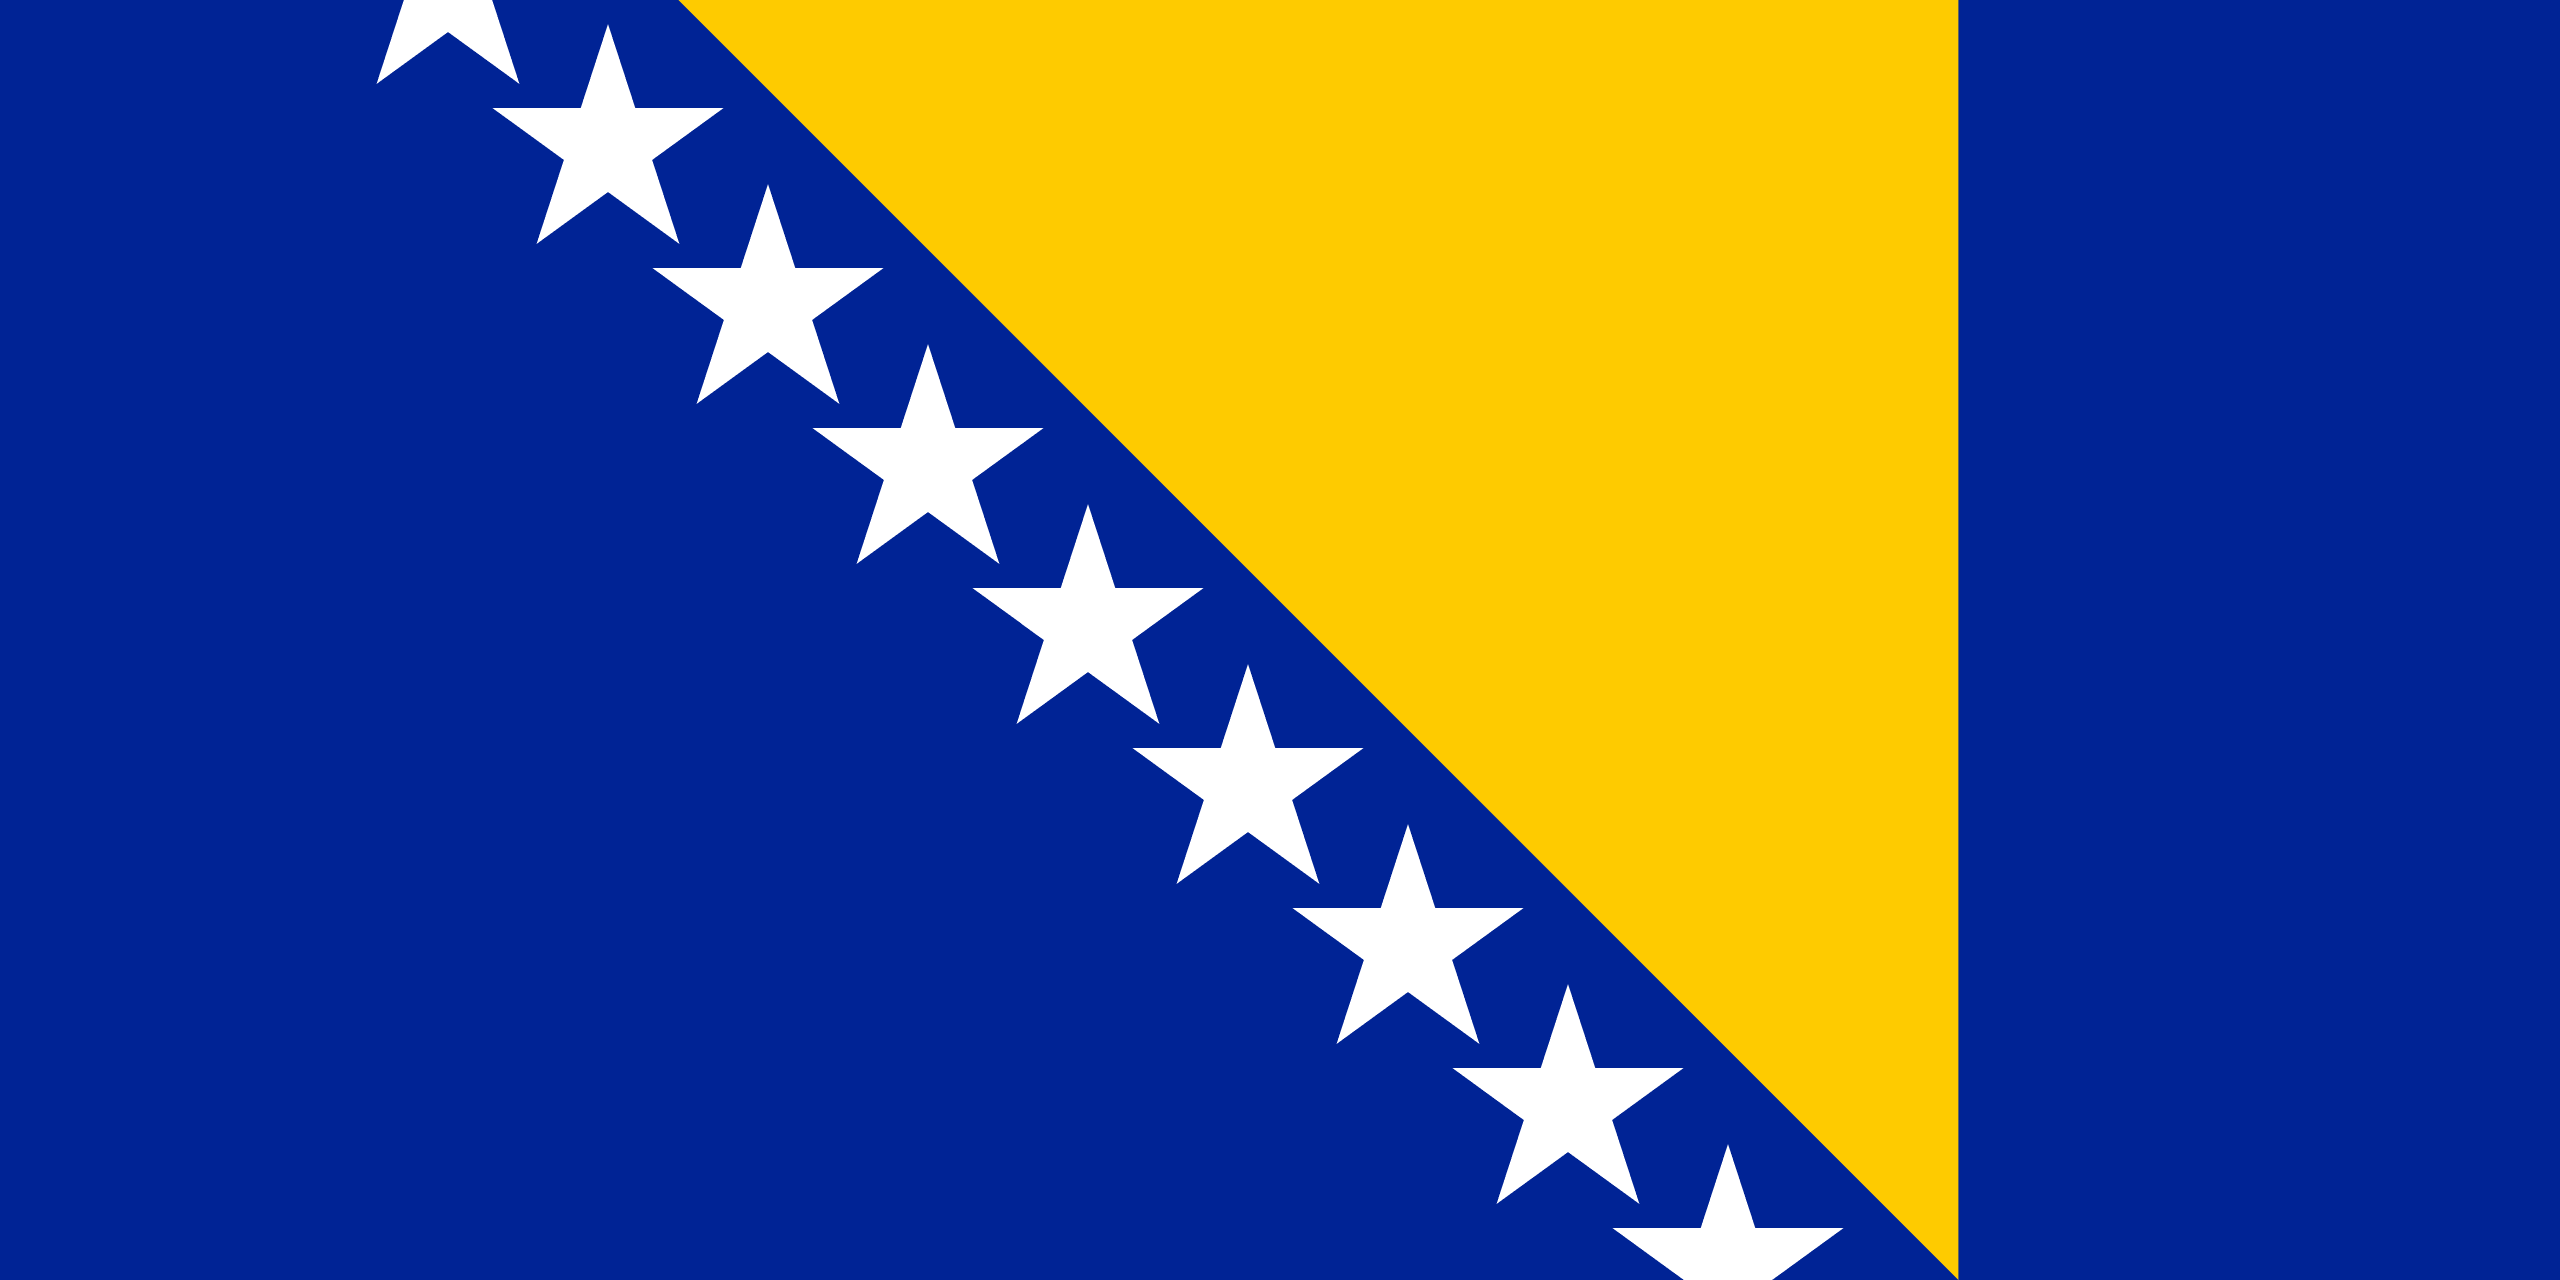

Botswana


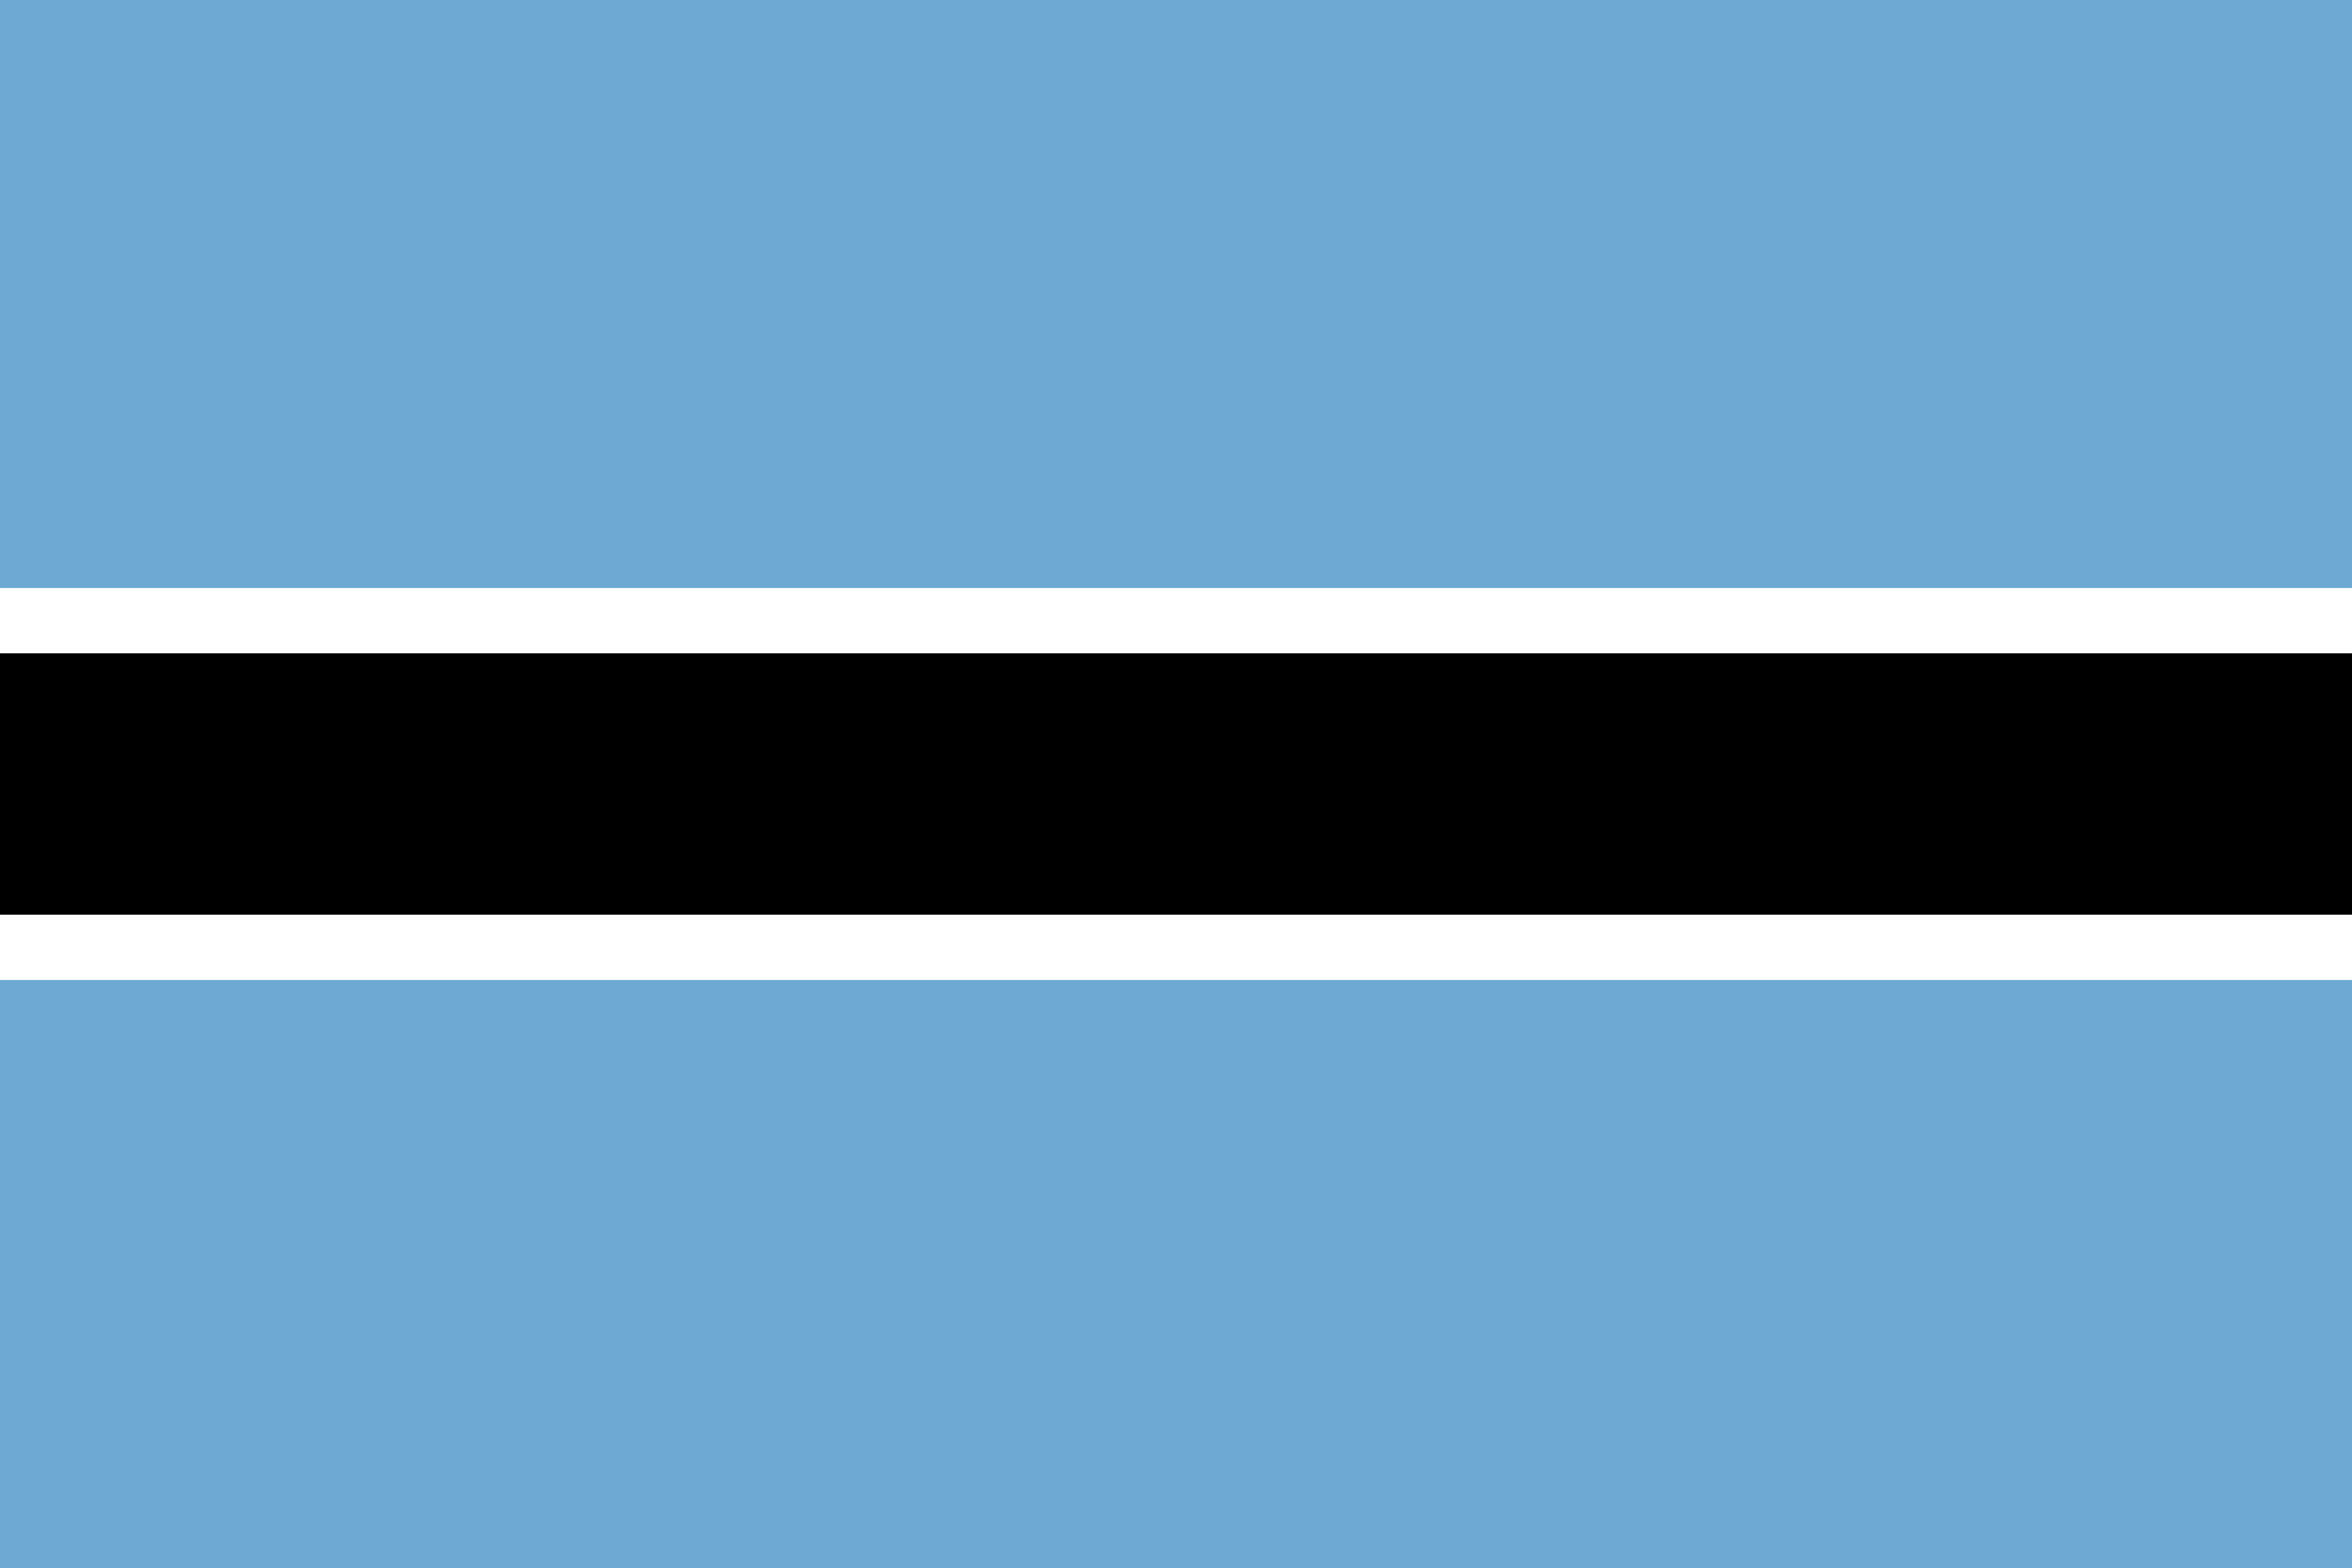

Bouvet Island


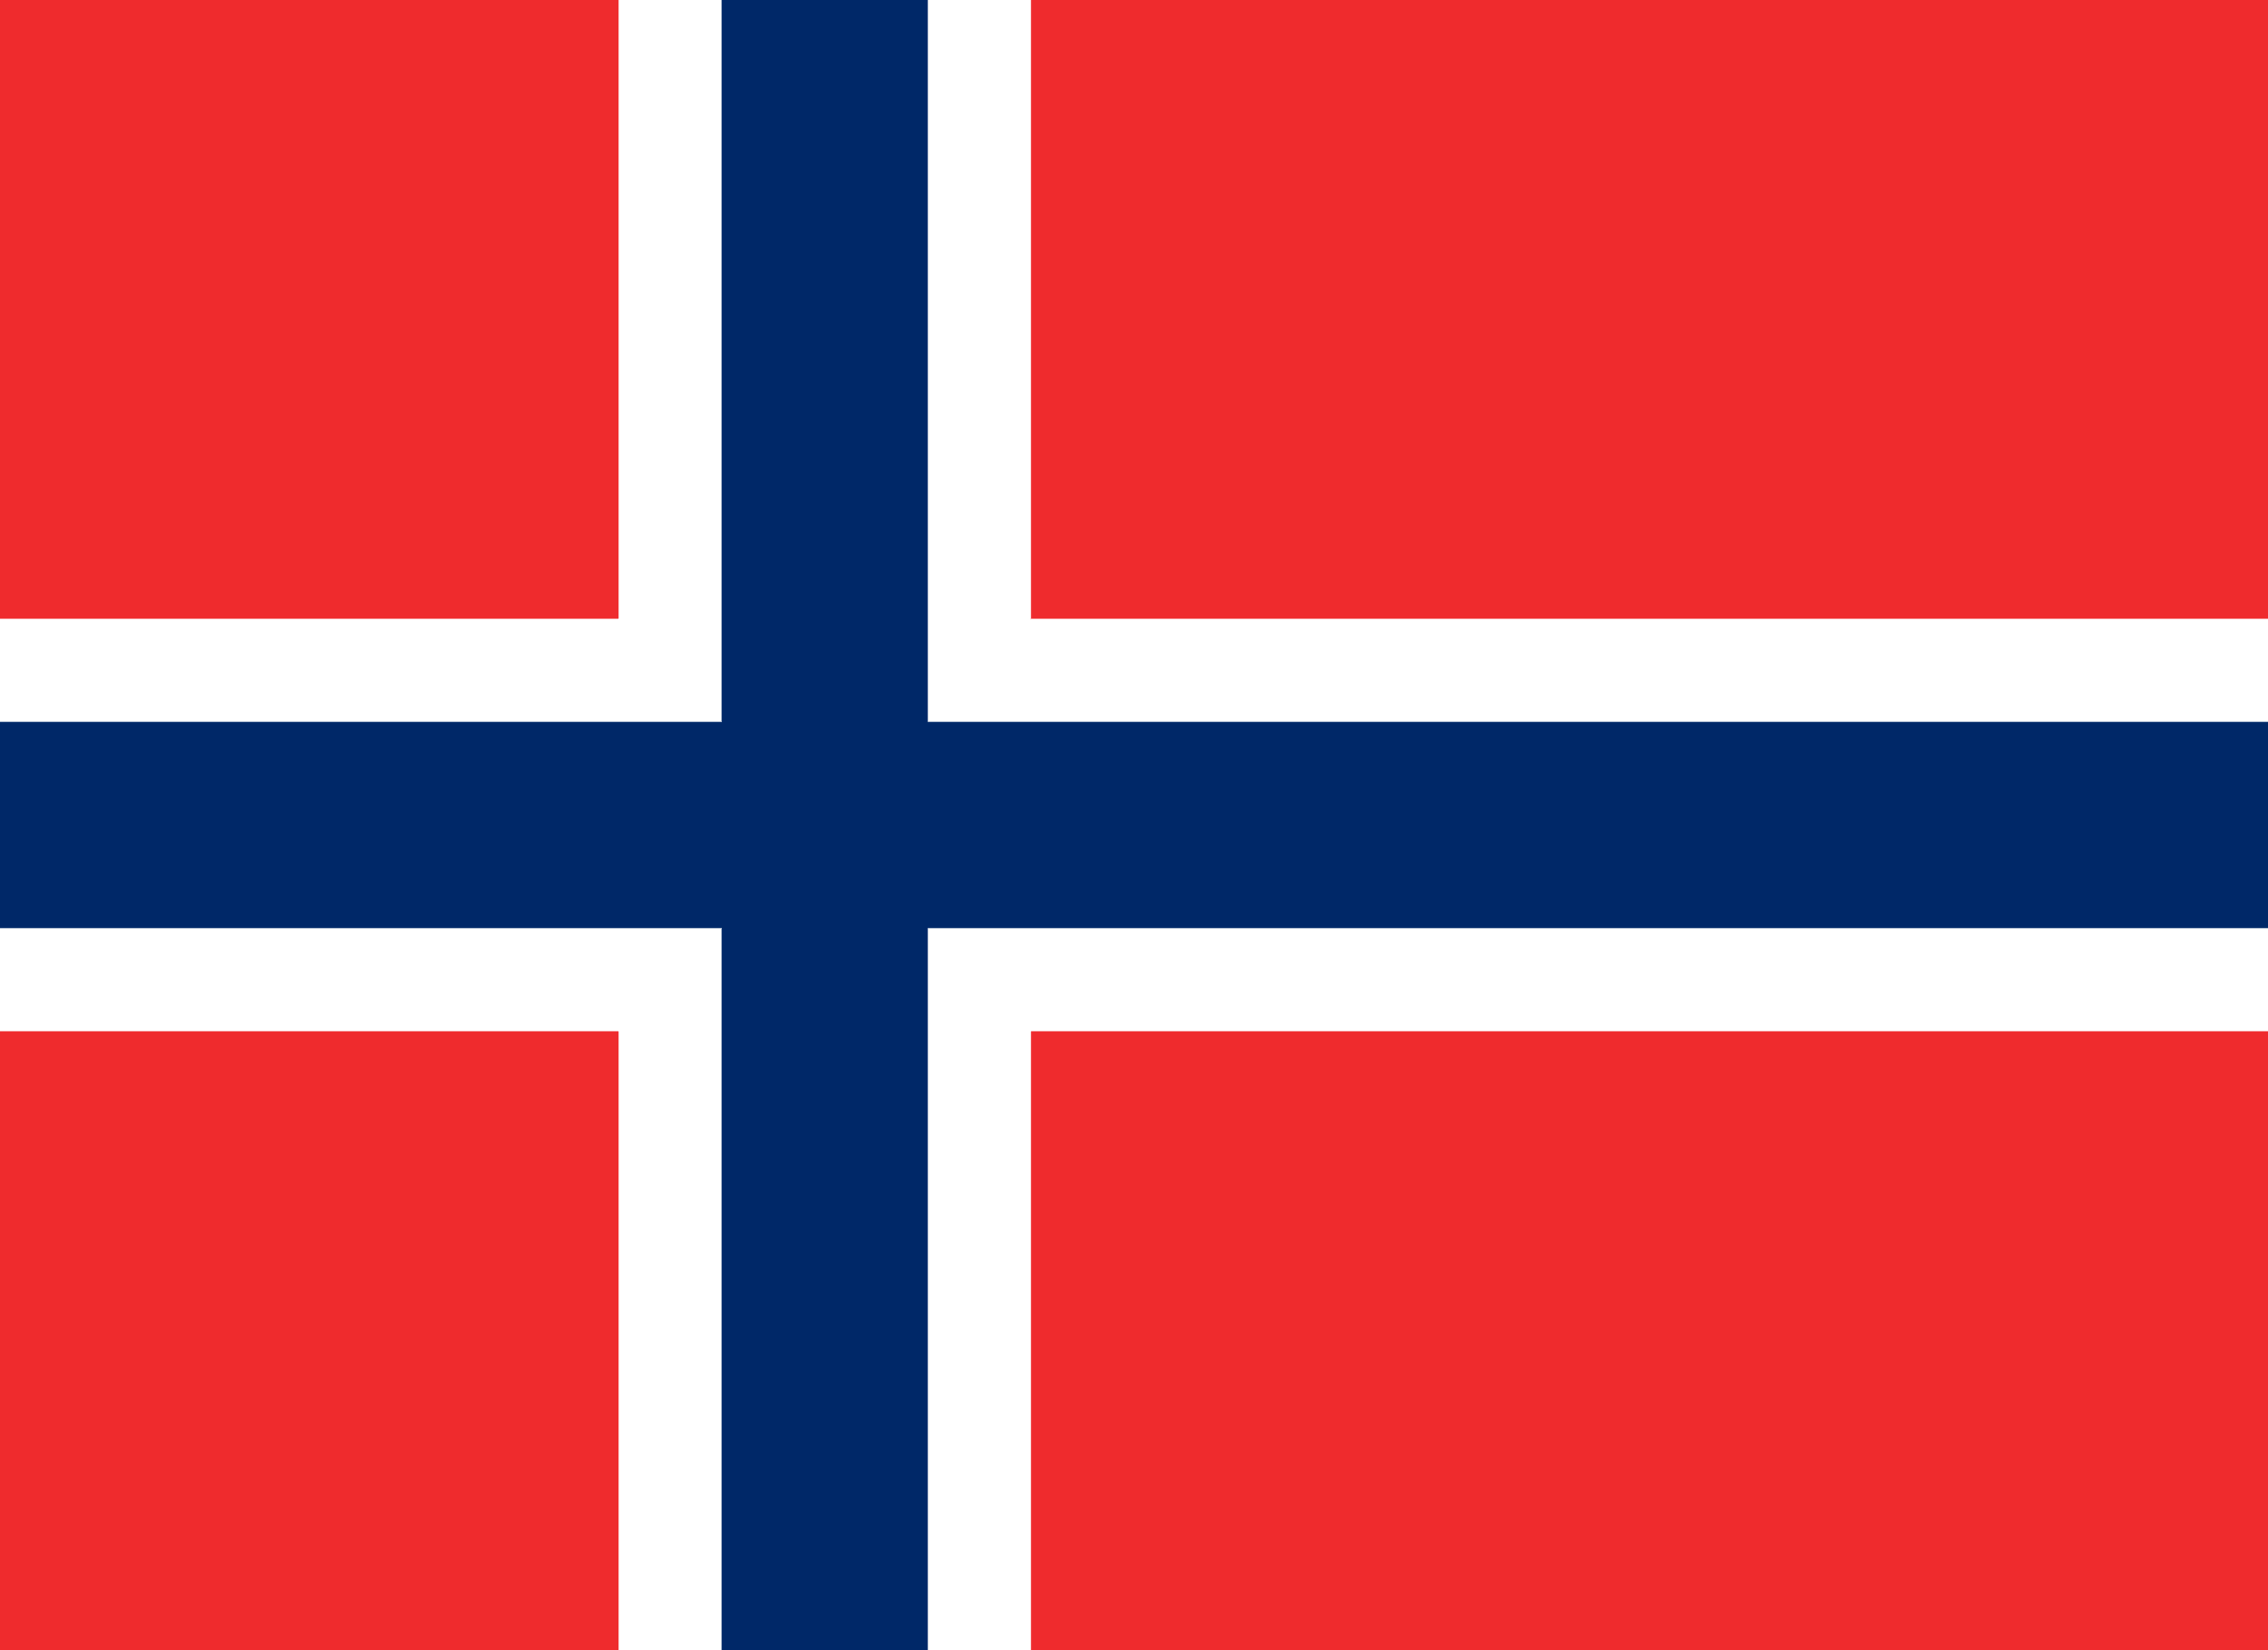

Brazil


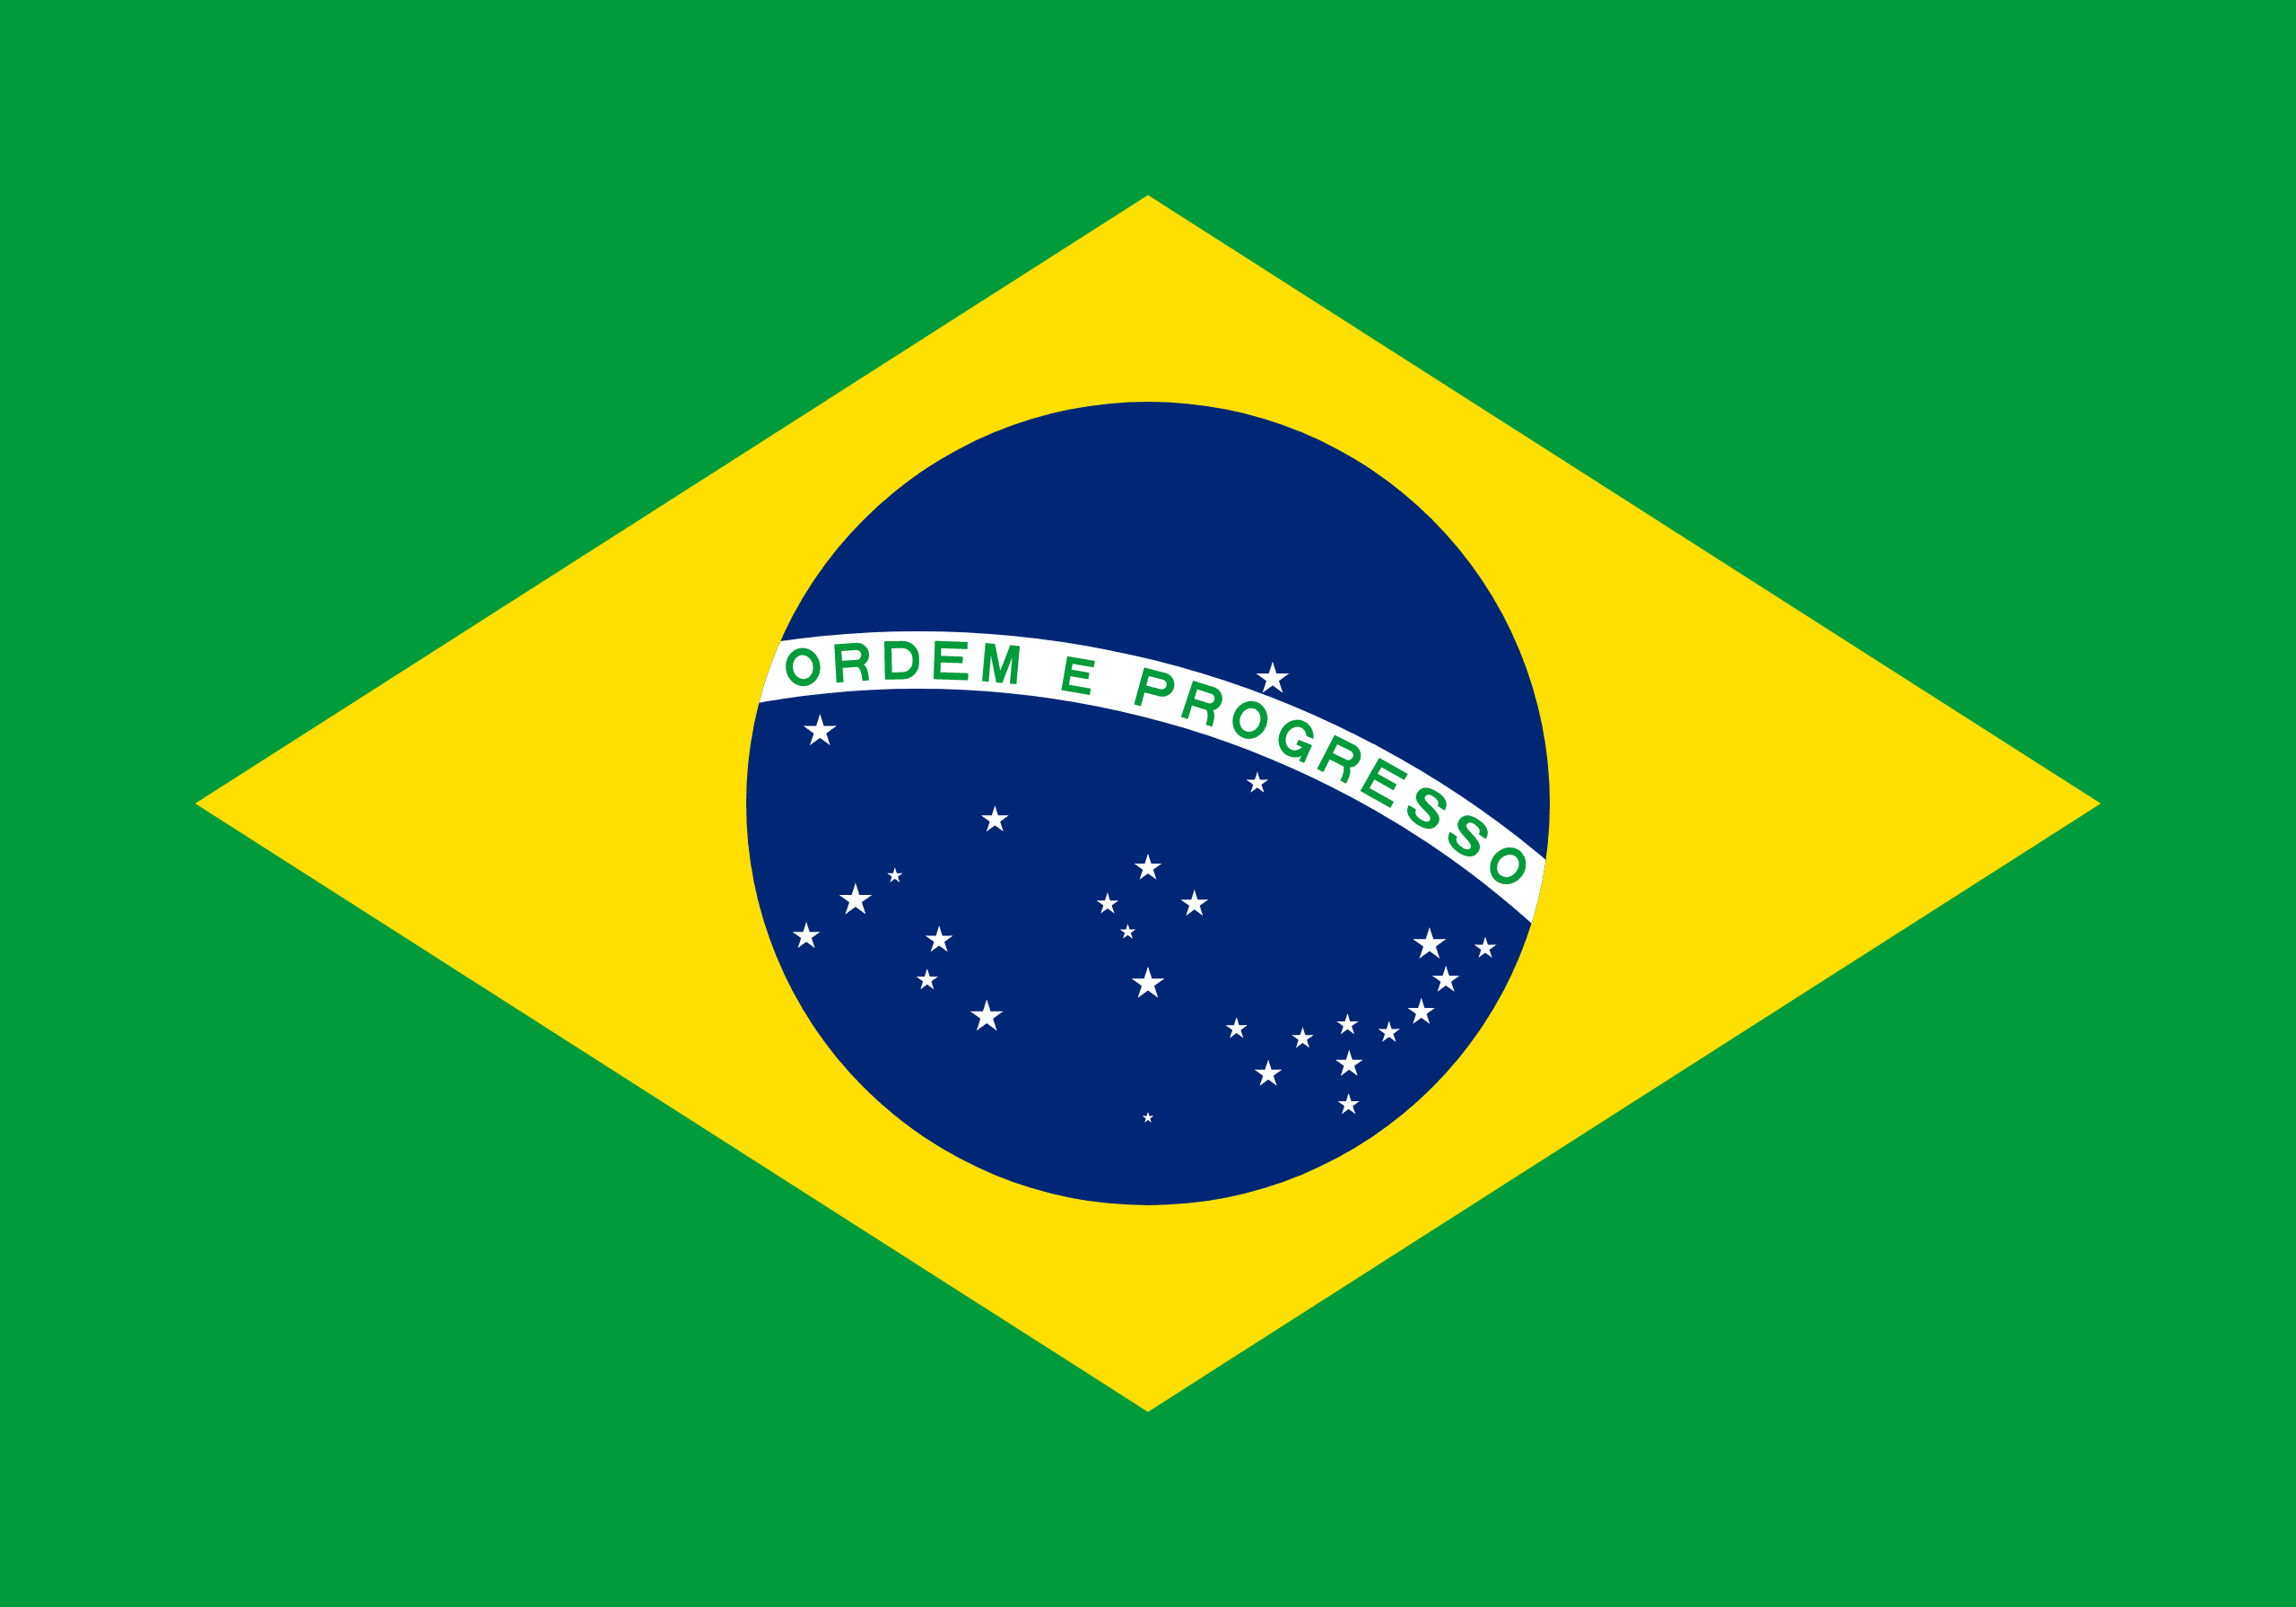

British Indian Ocean Territory


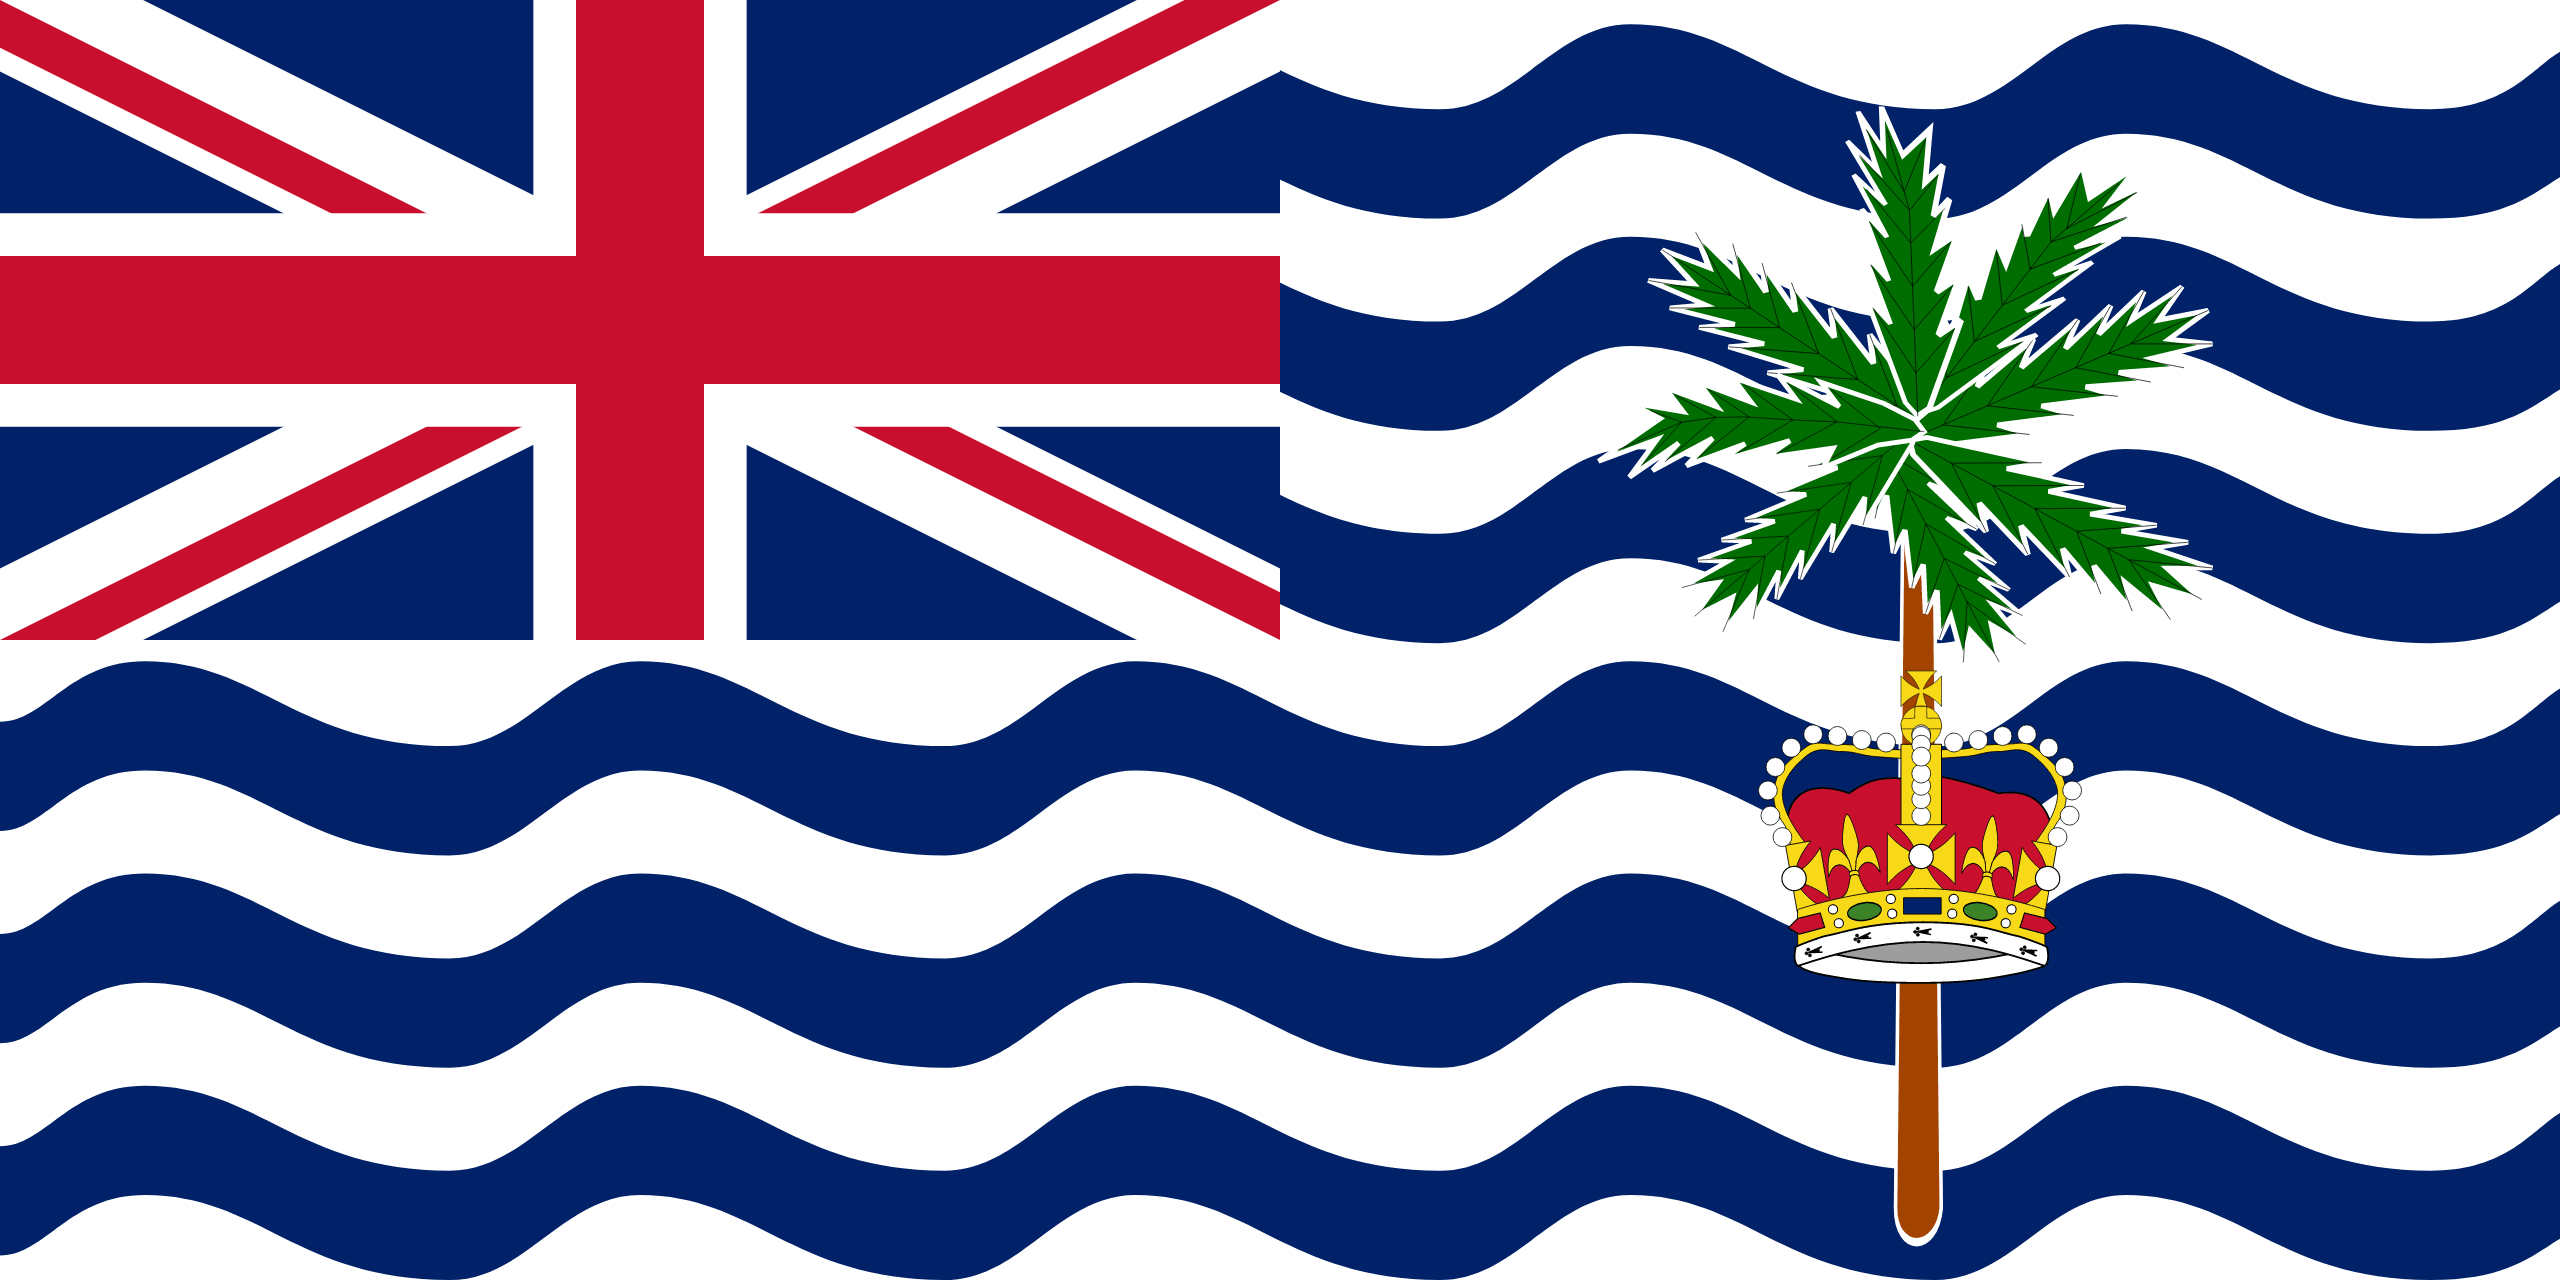

Brunei


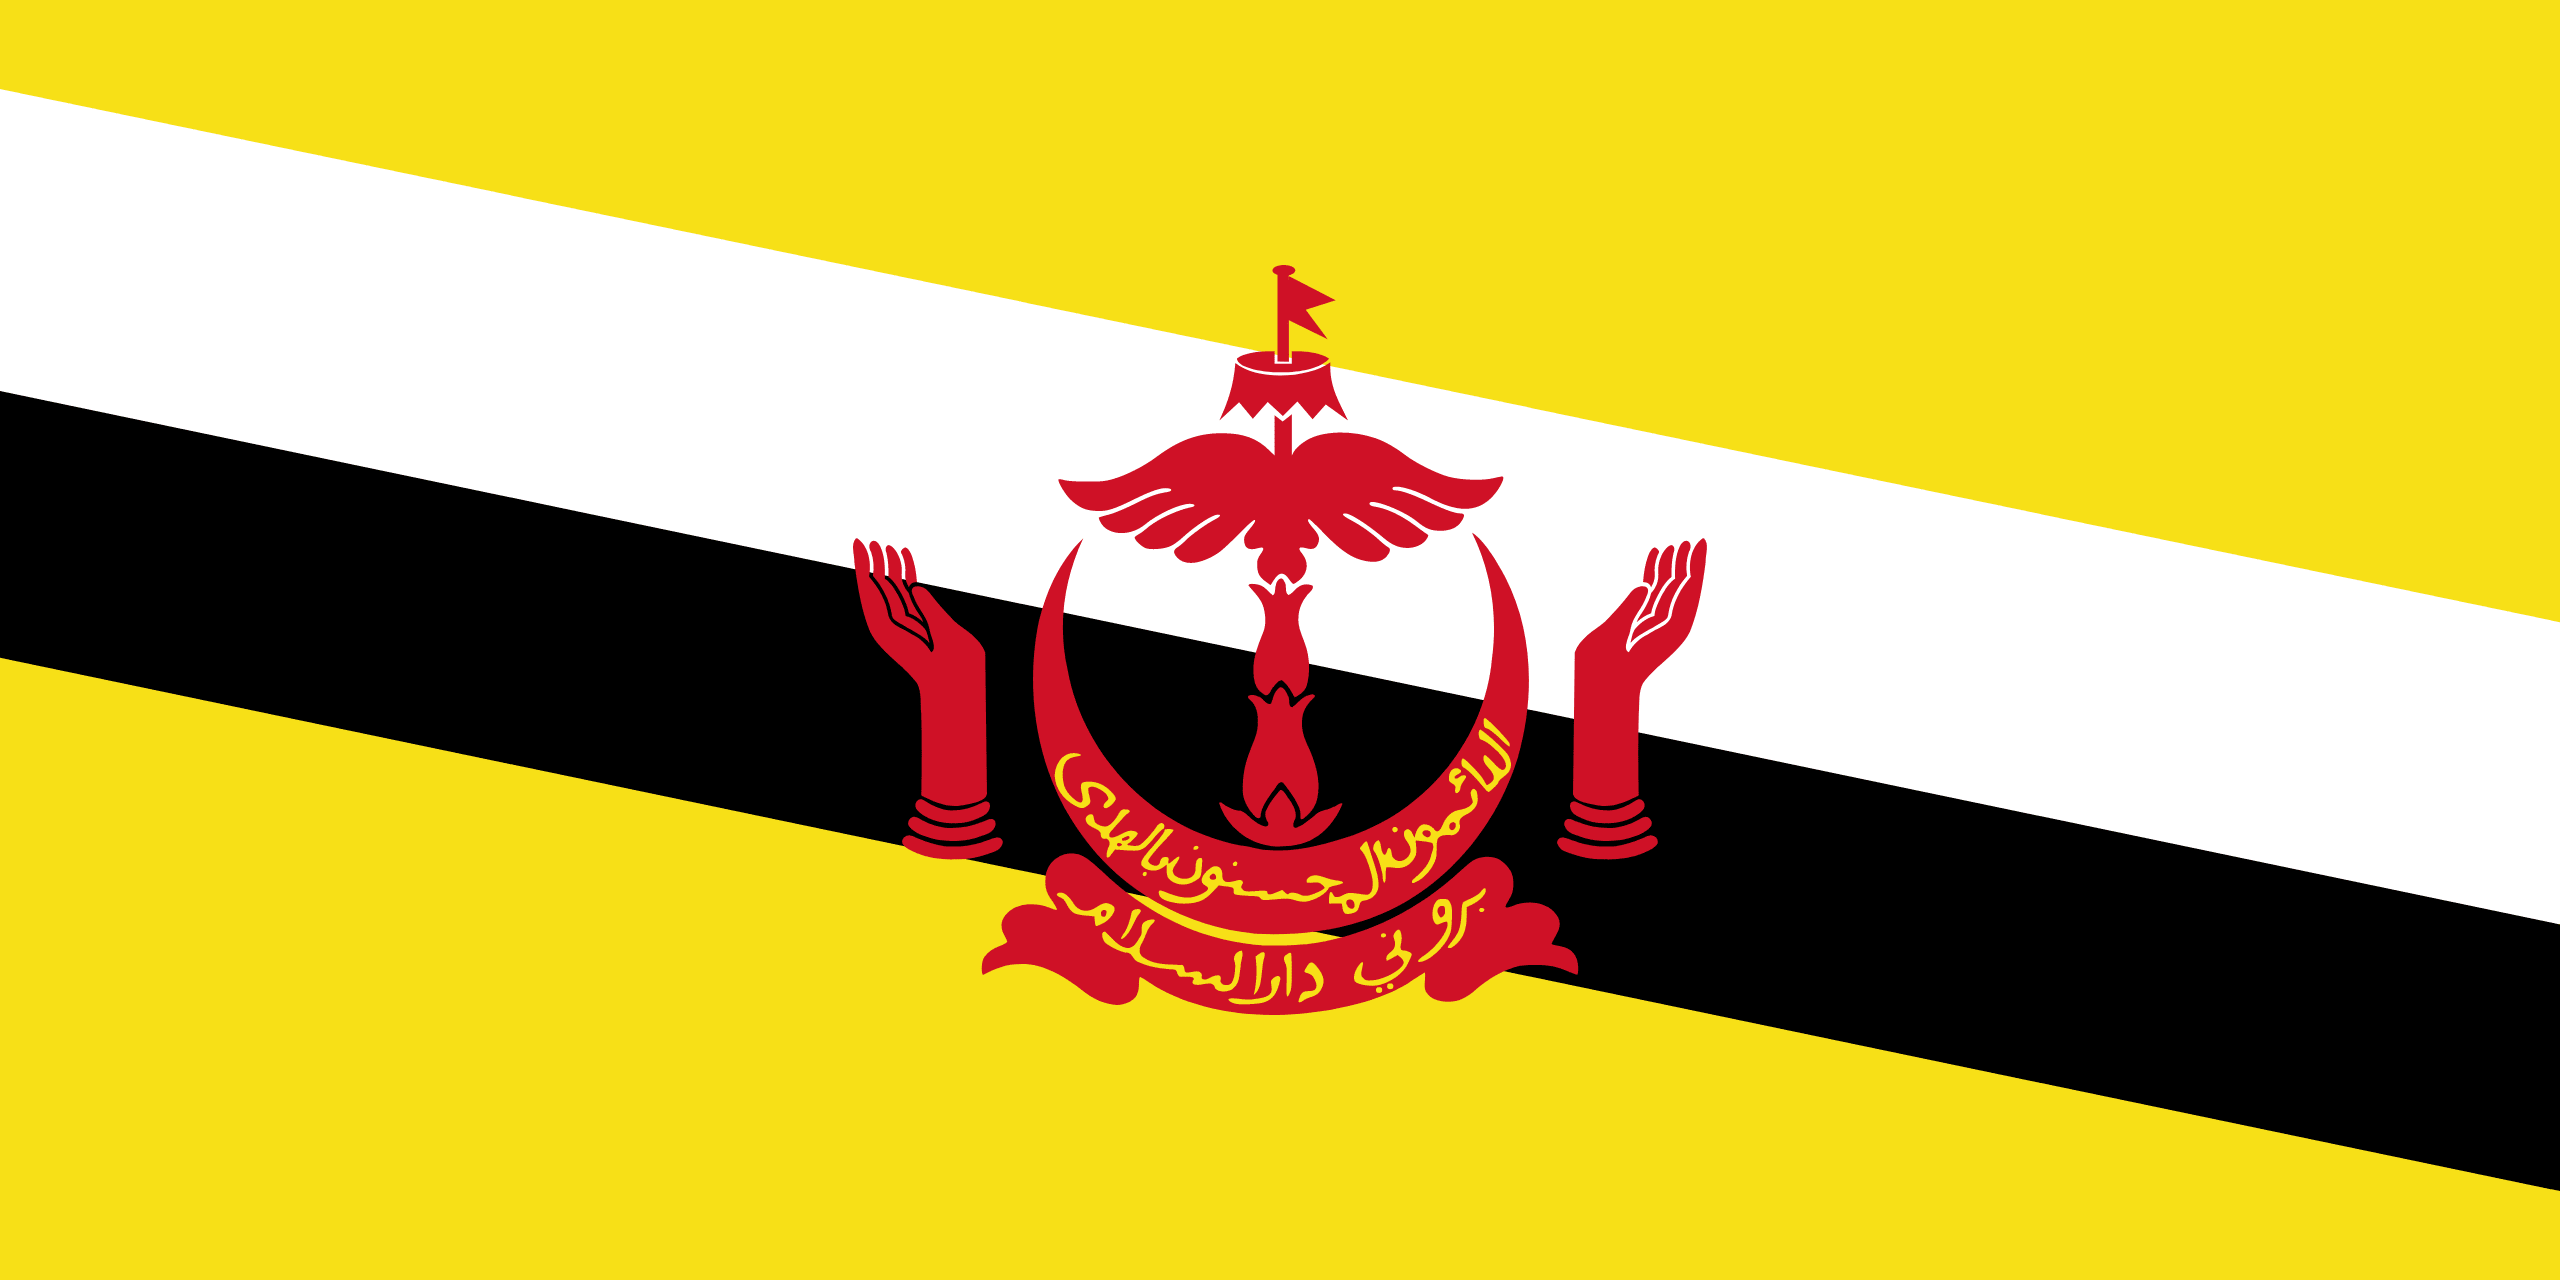

Bulgaria


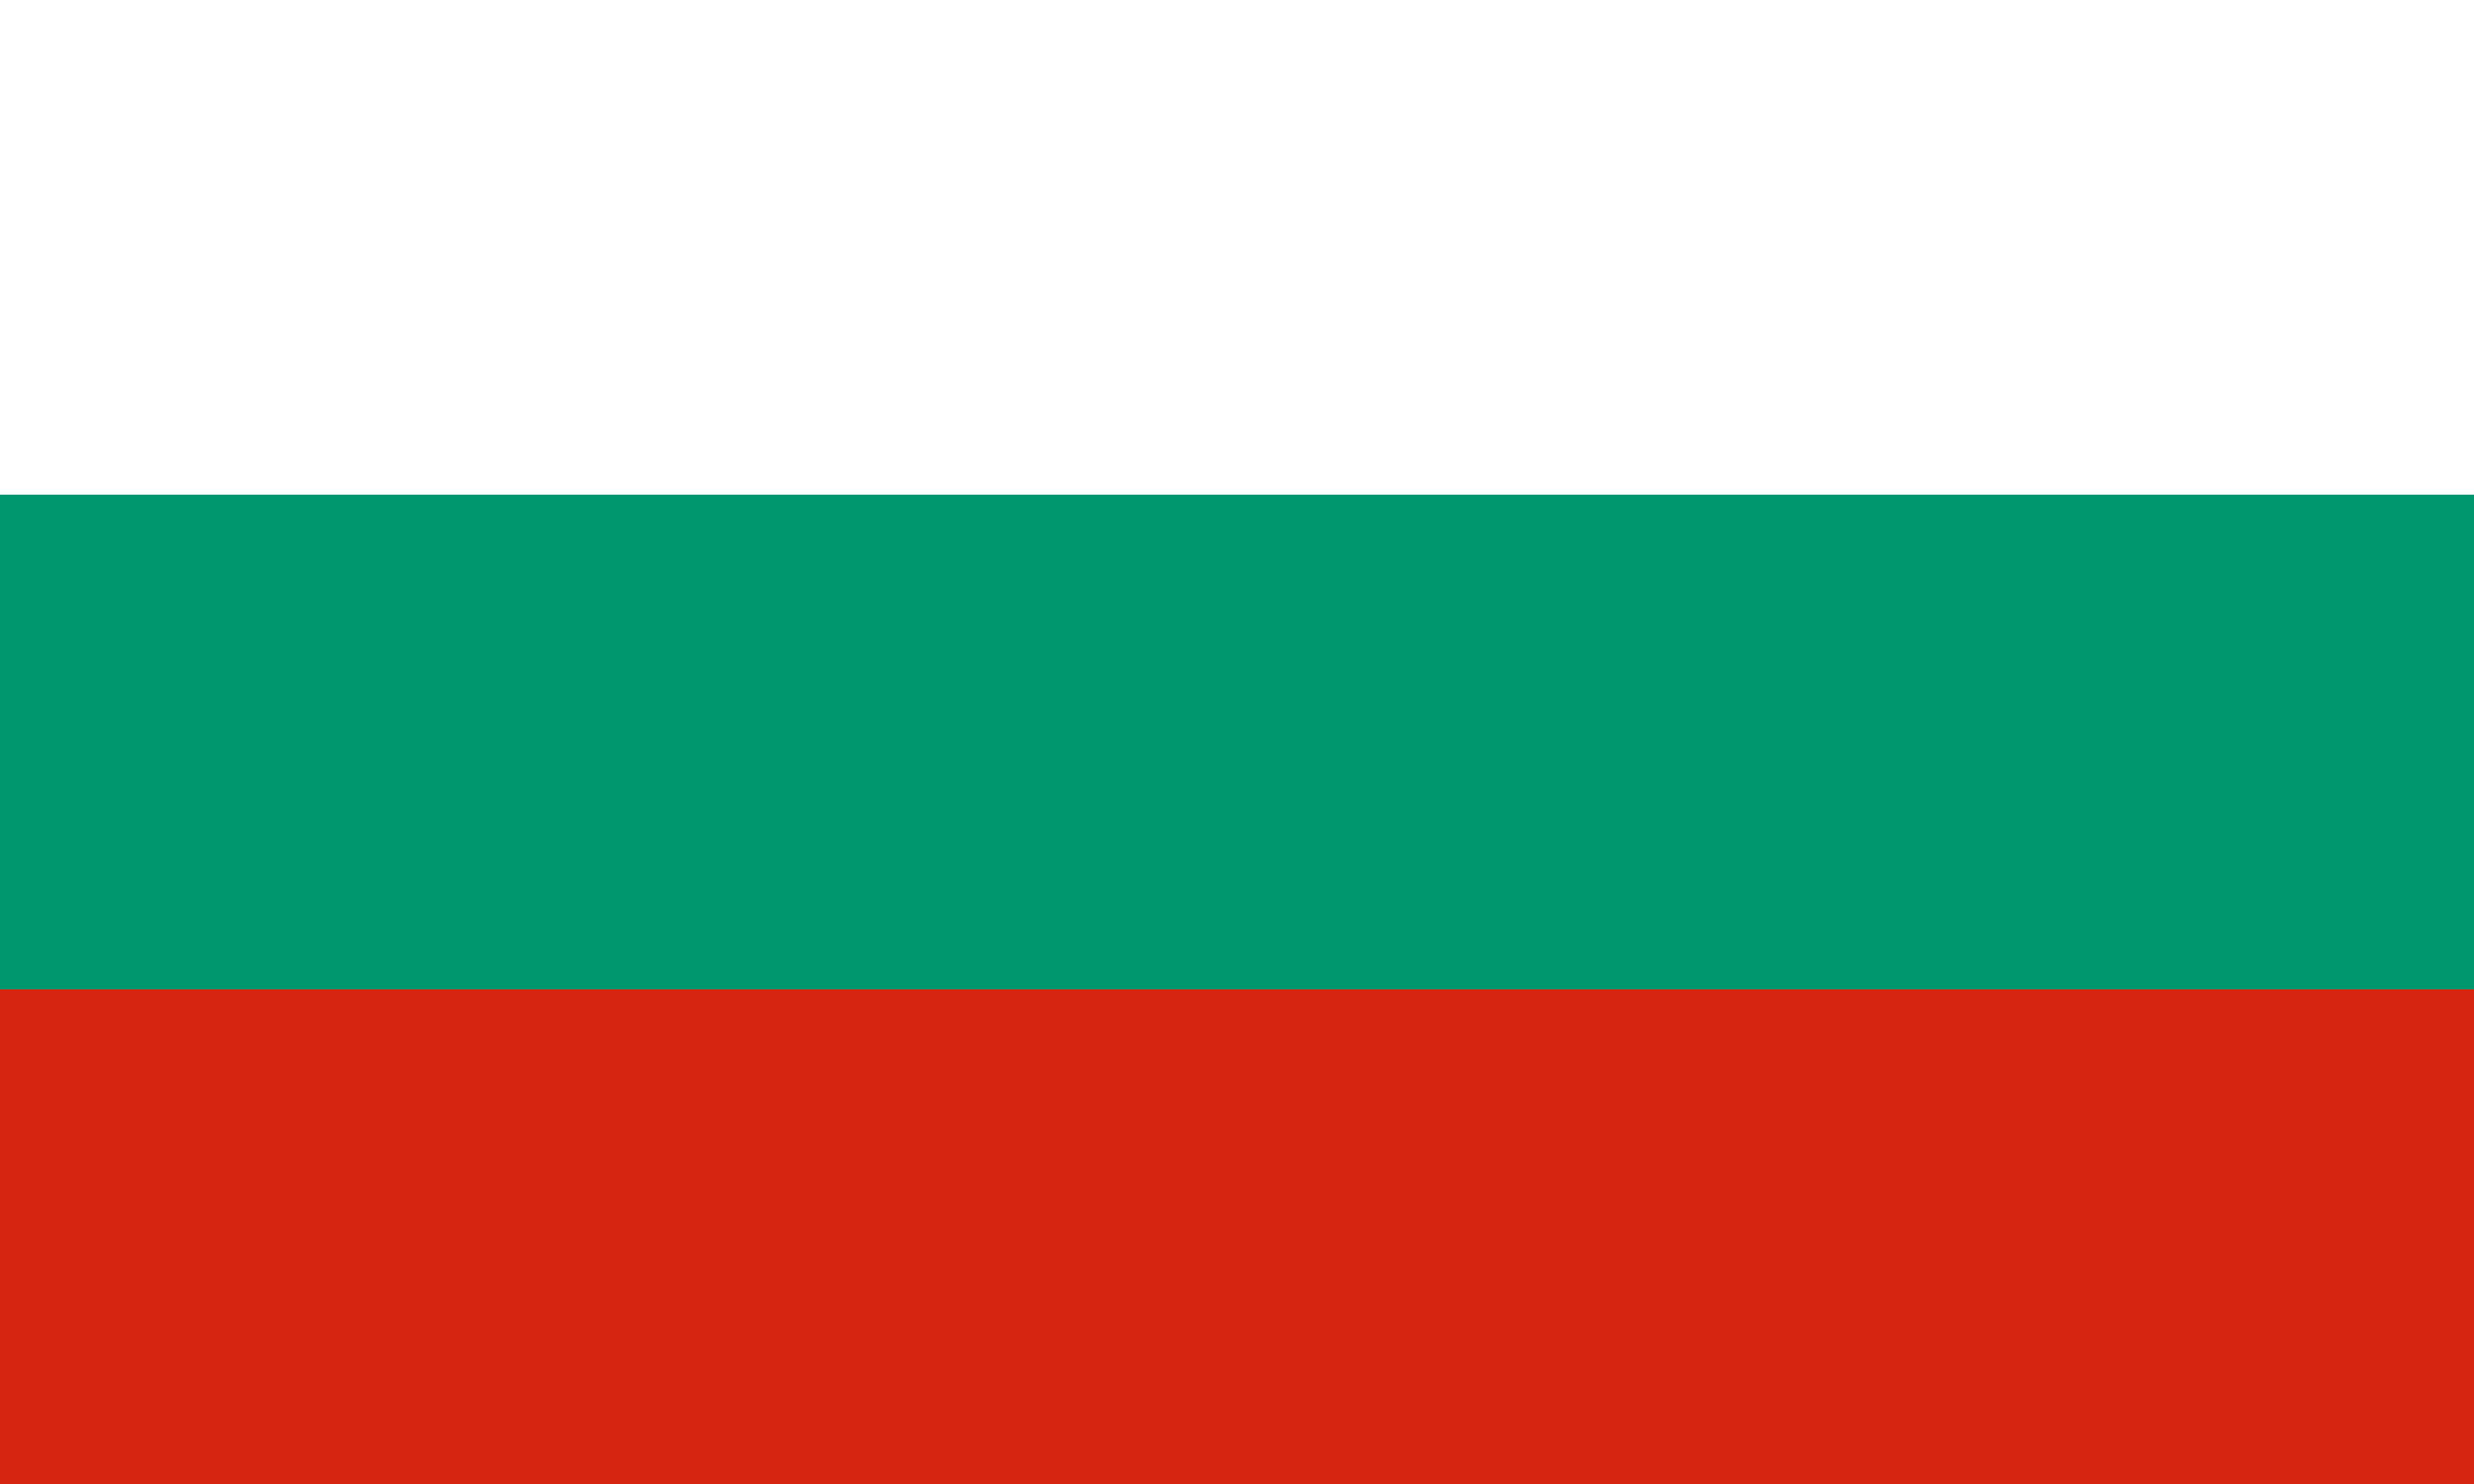

Burkina Faso


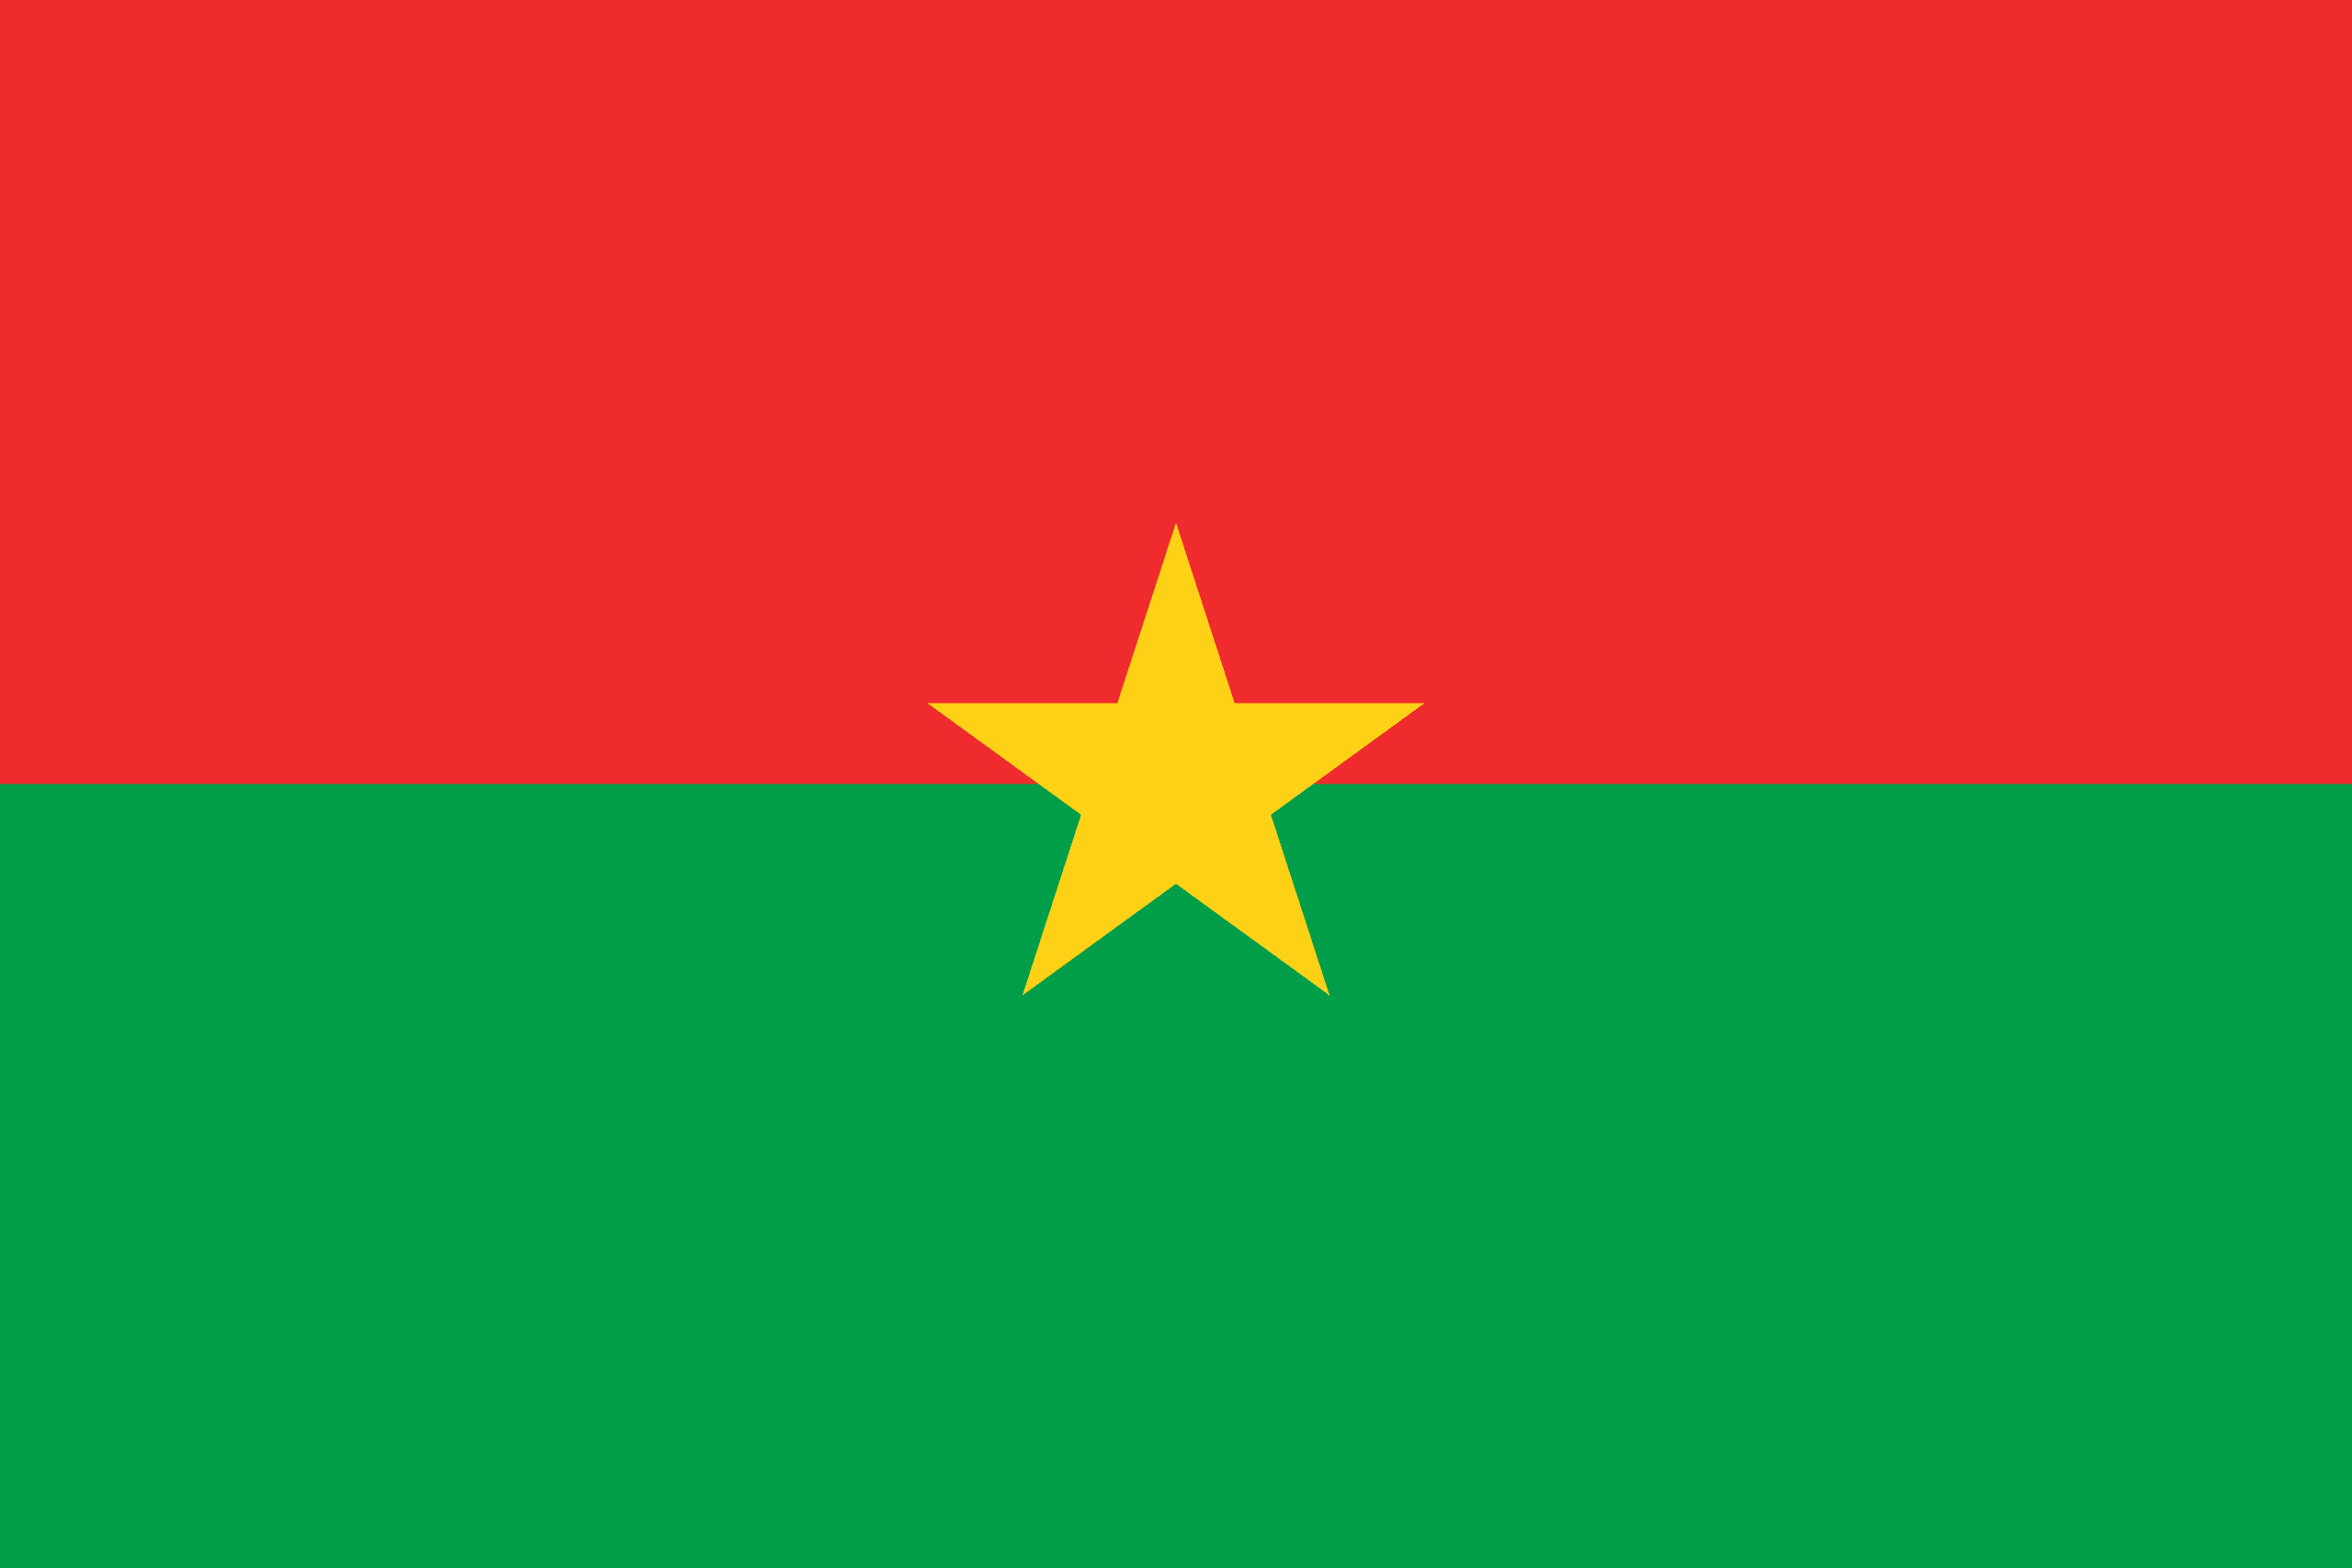

Burundi


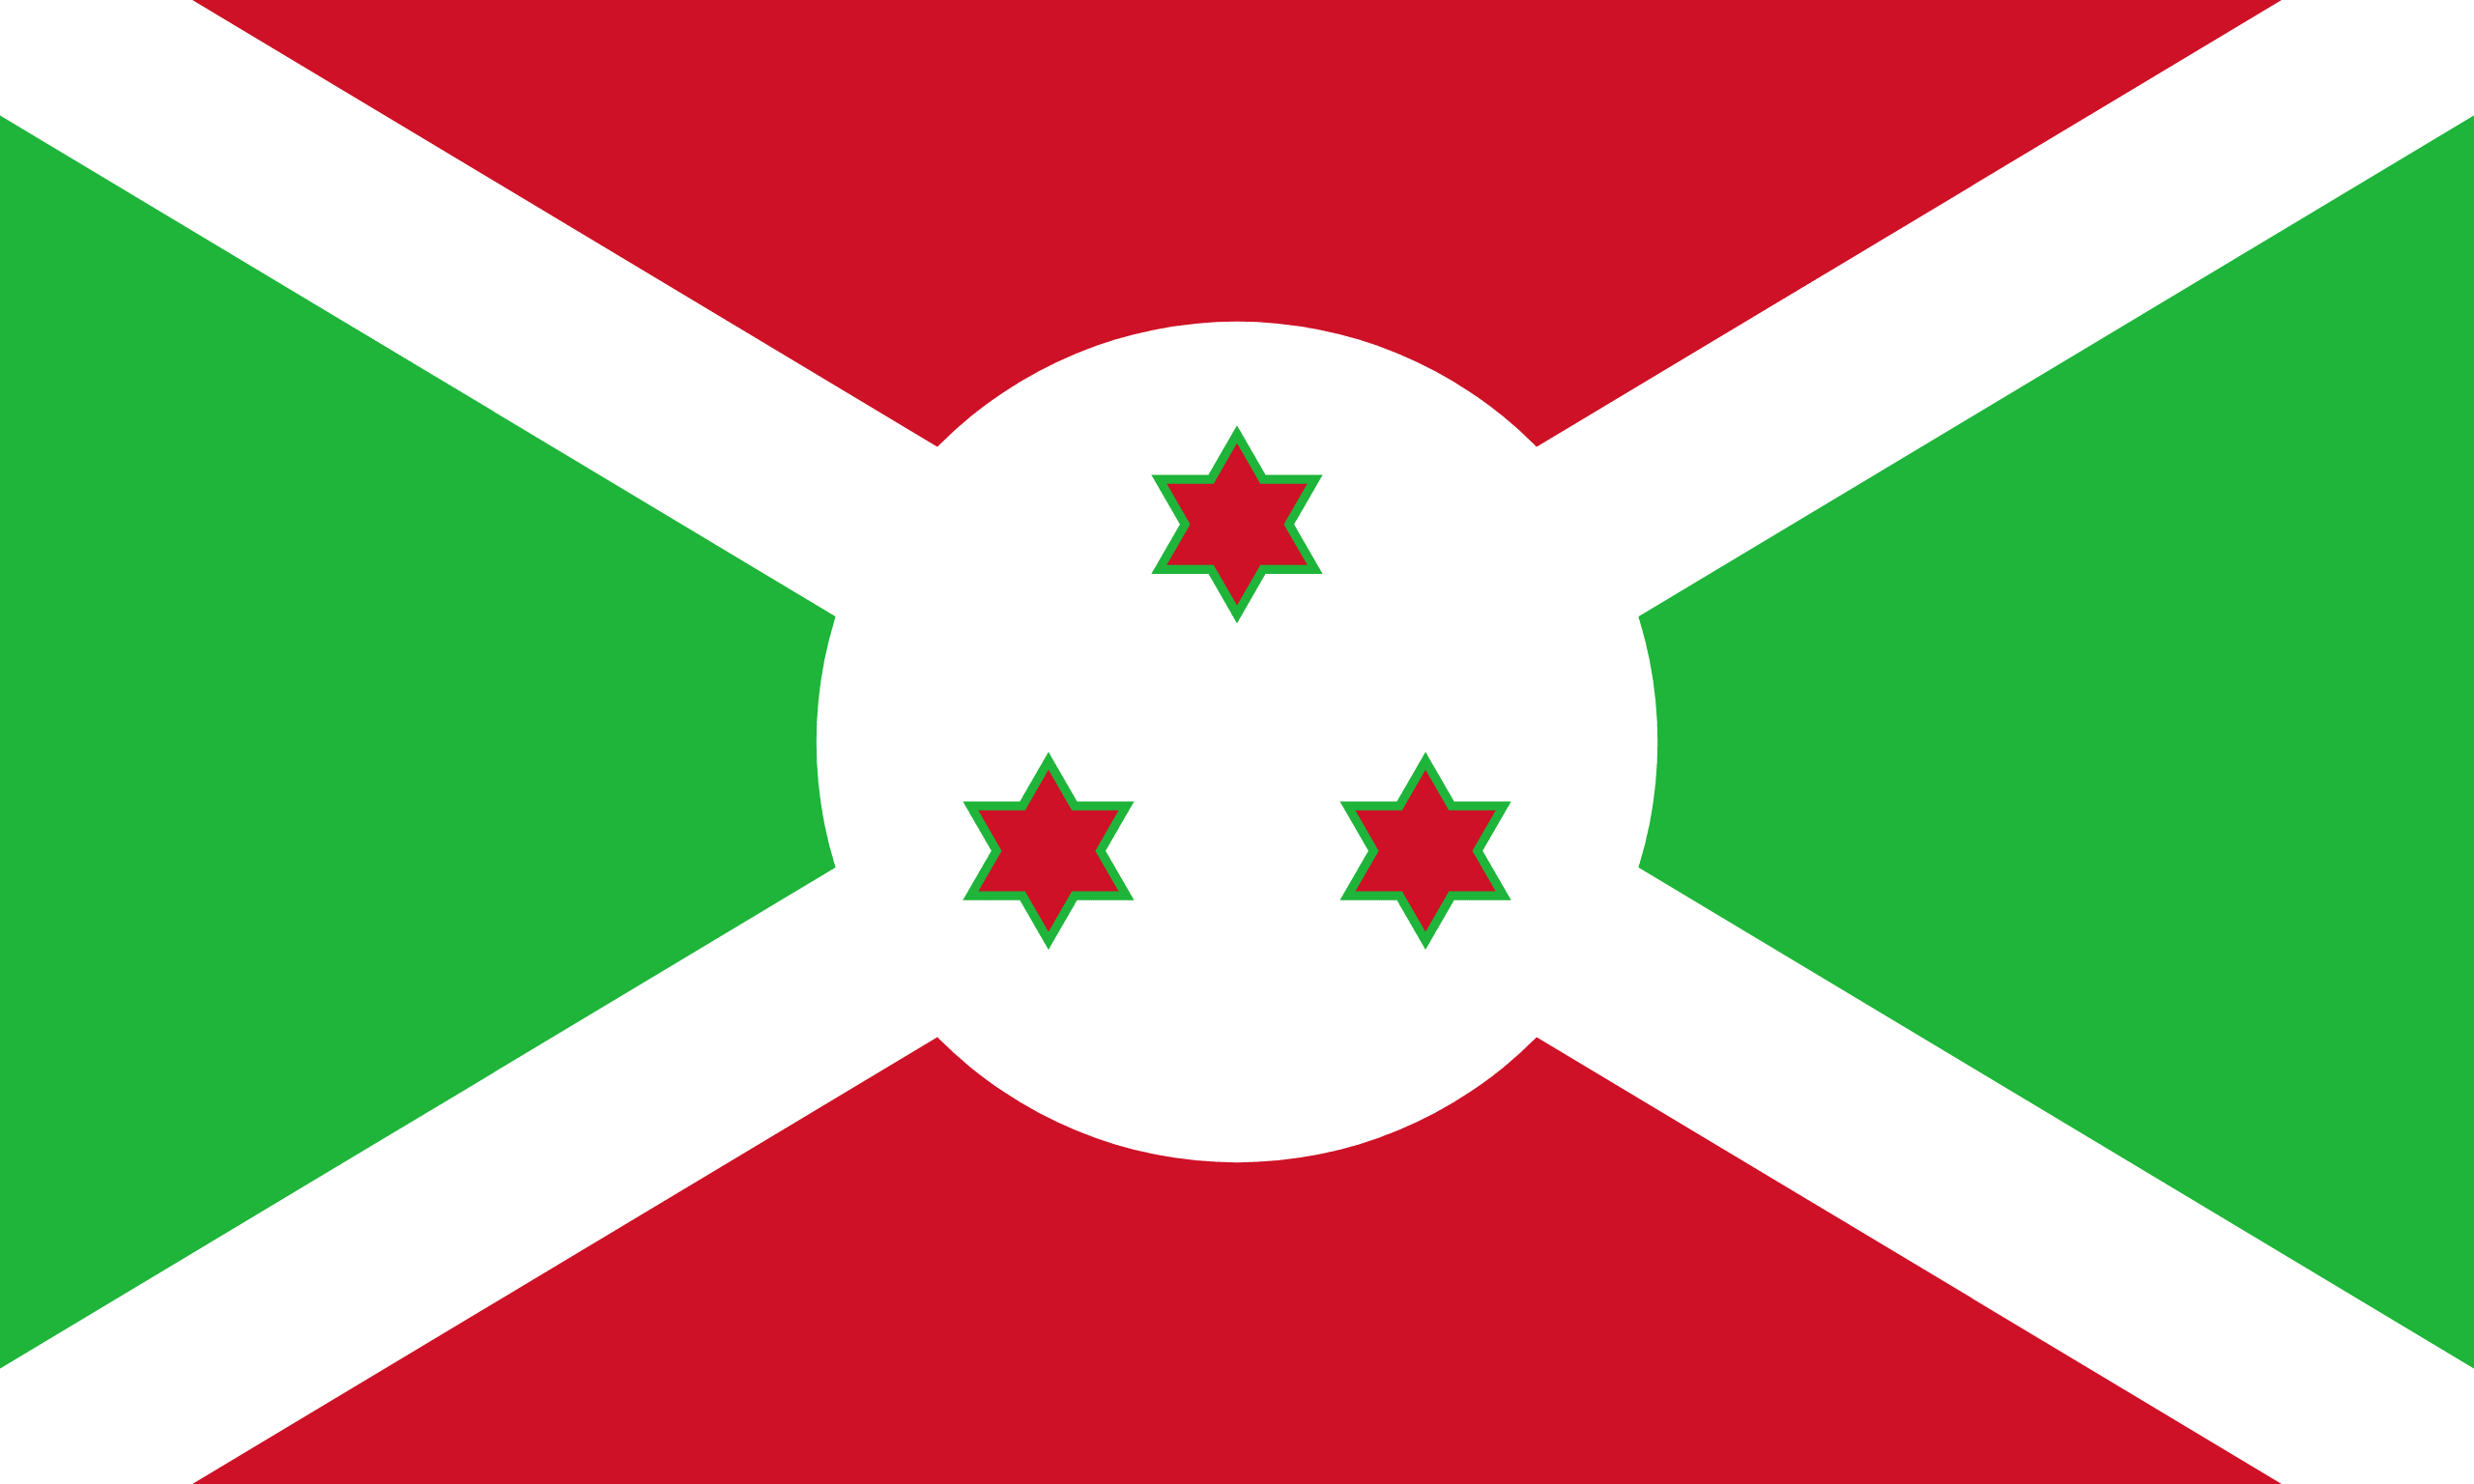

Cambodia


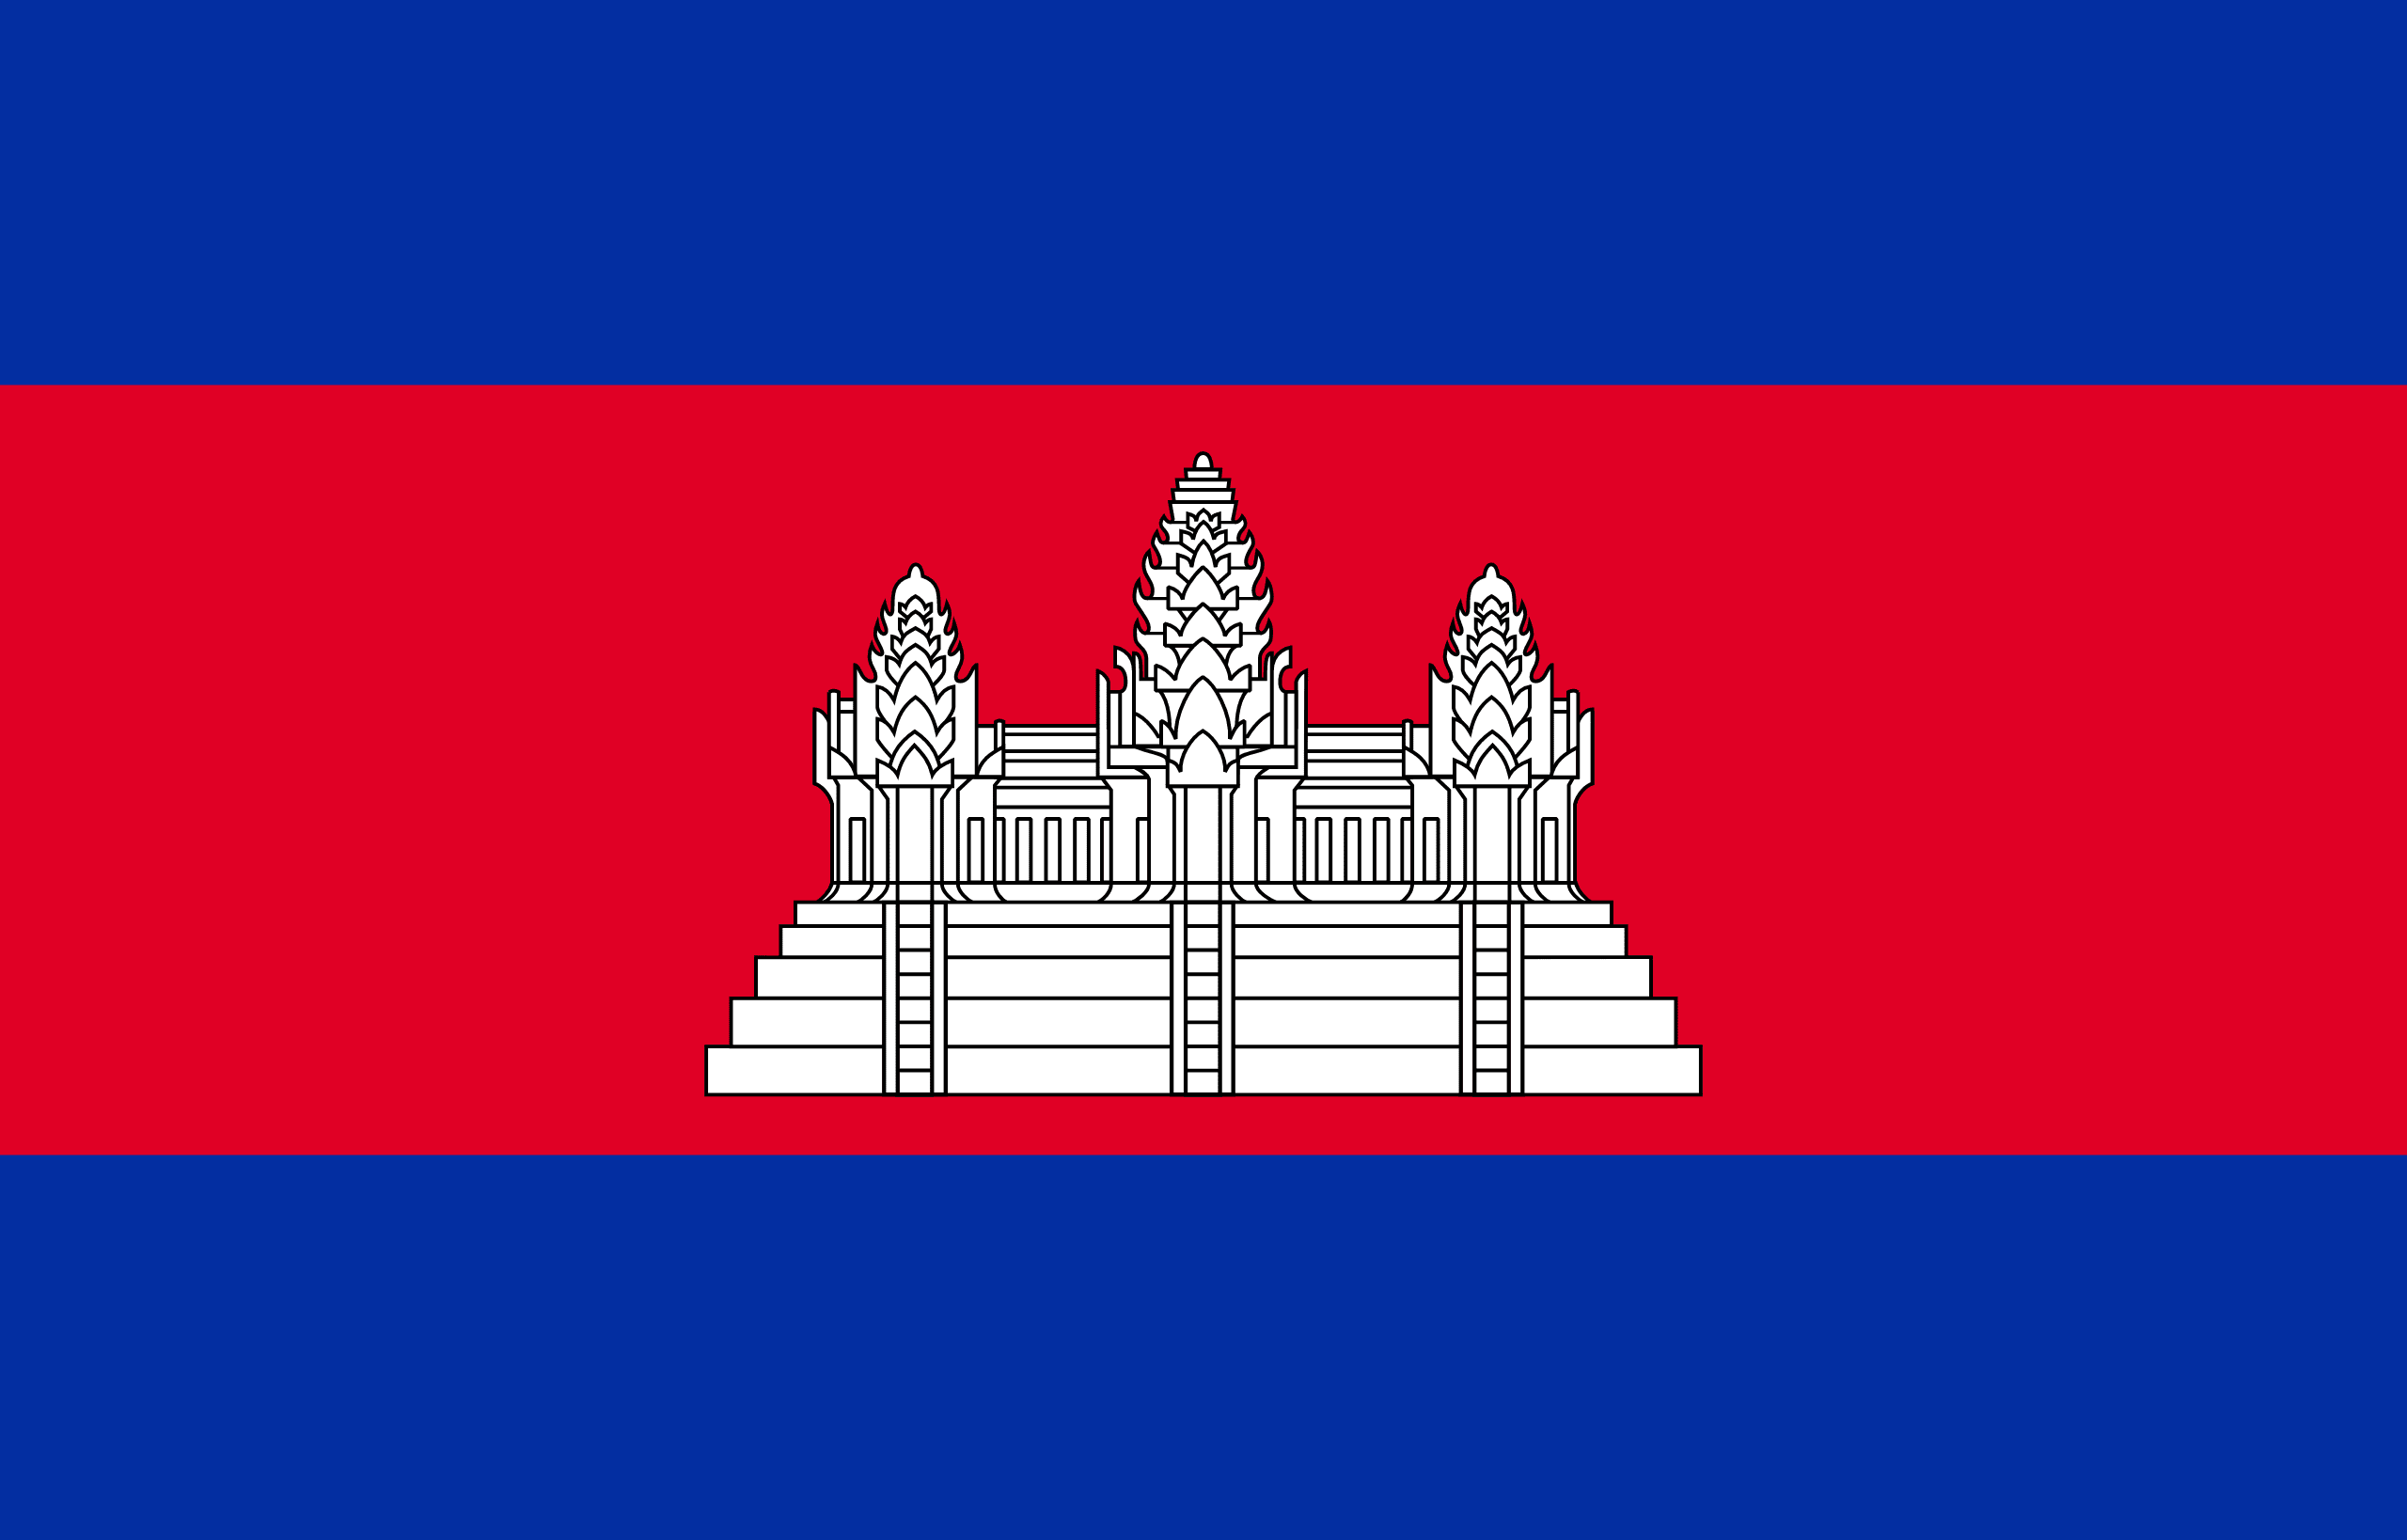

Cameroon


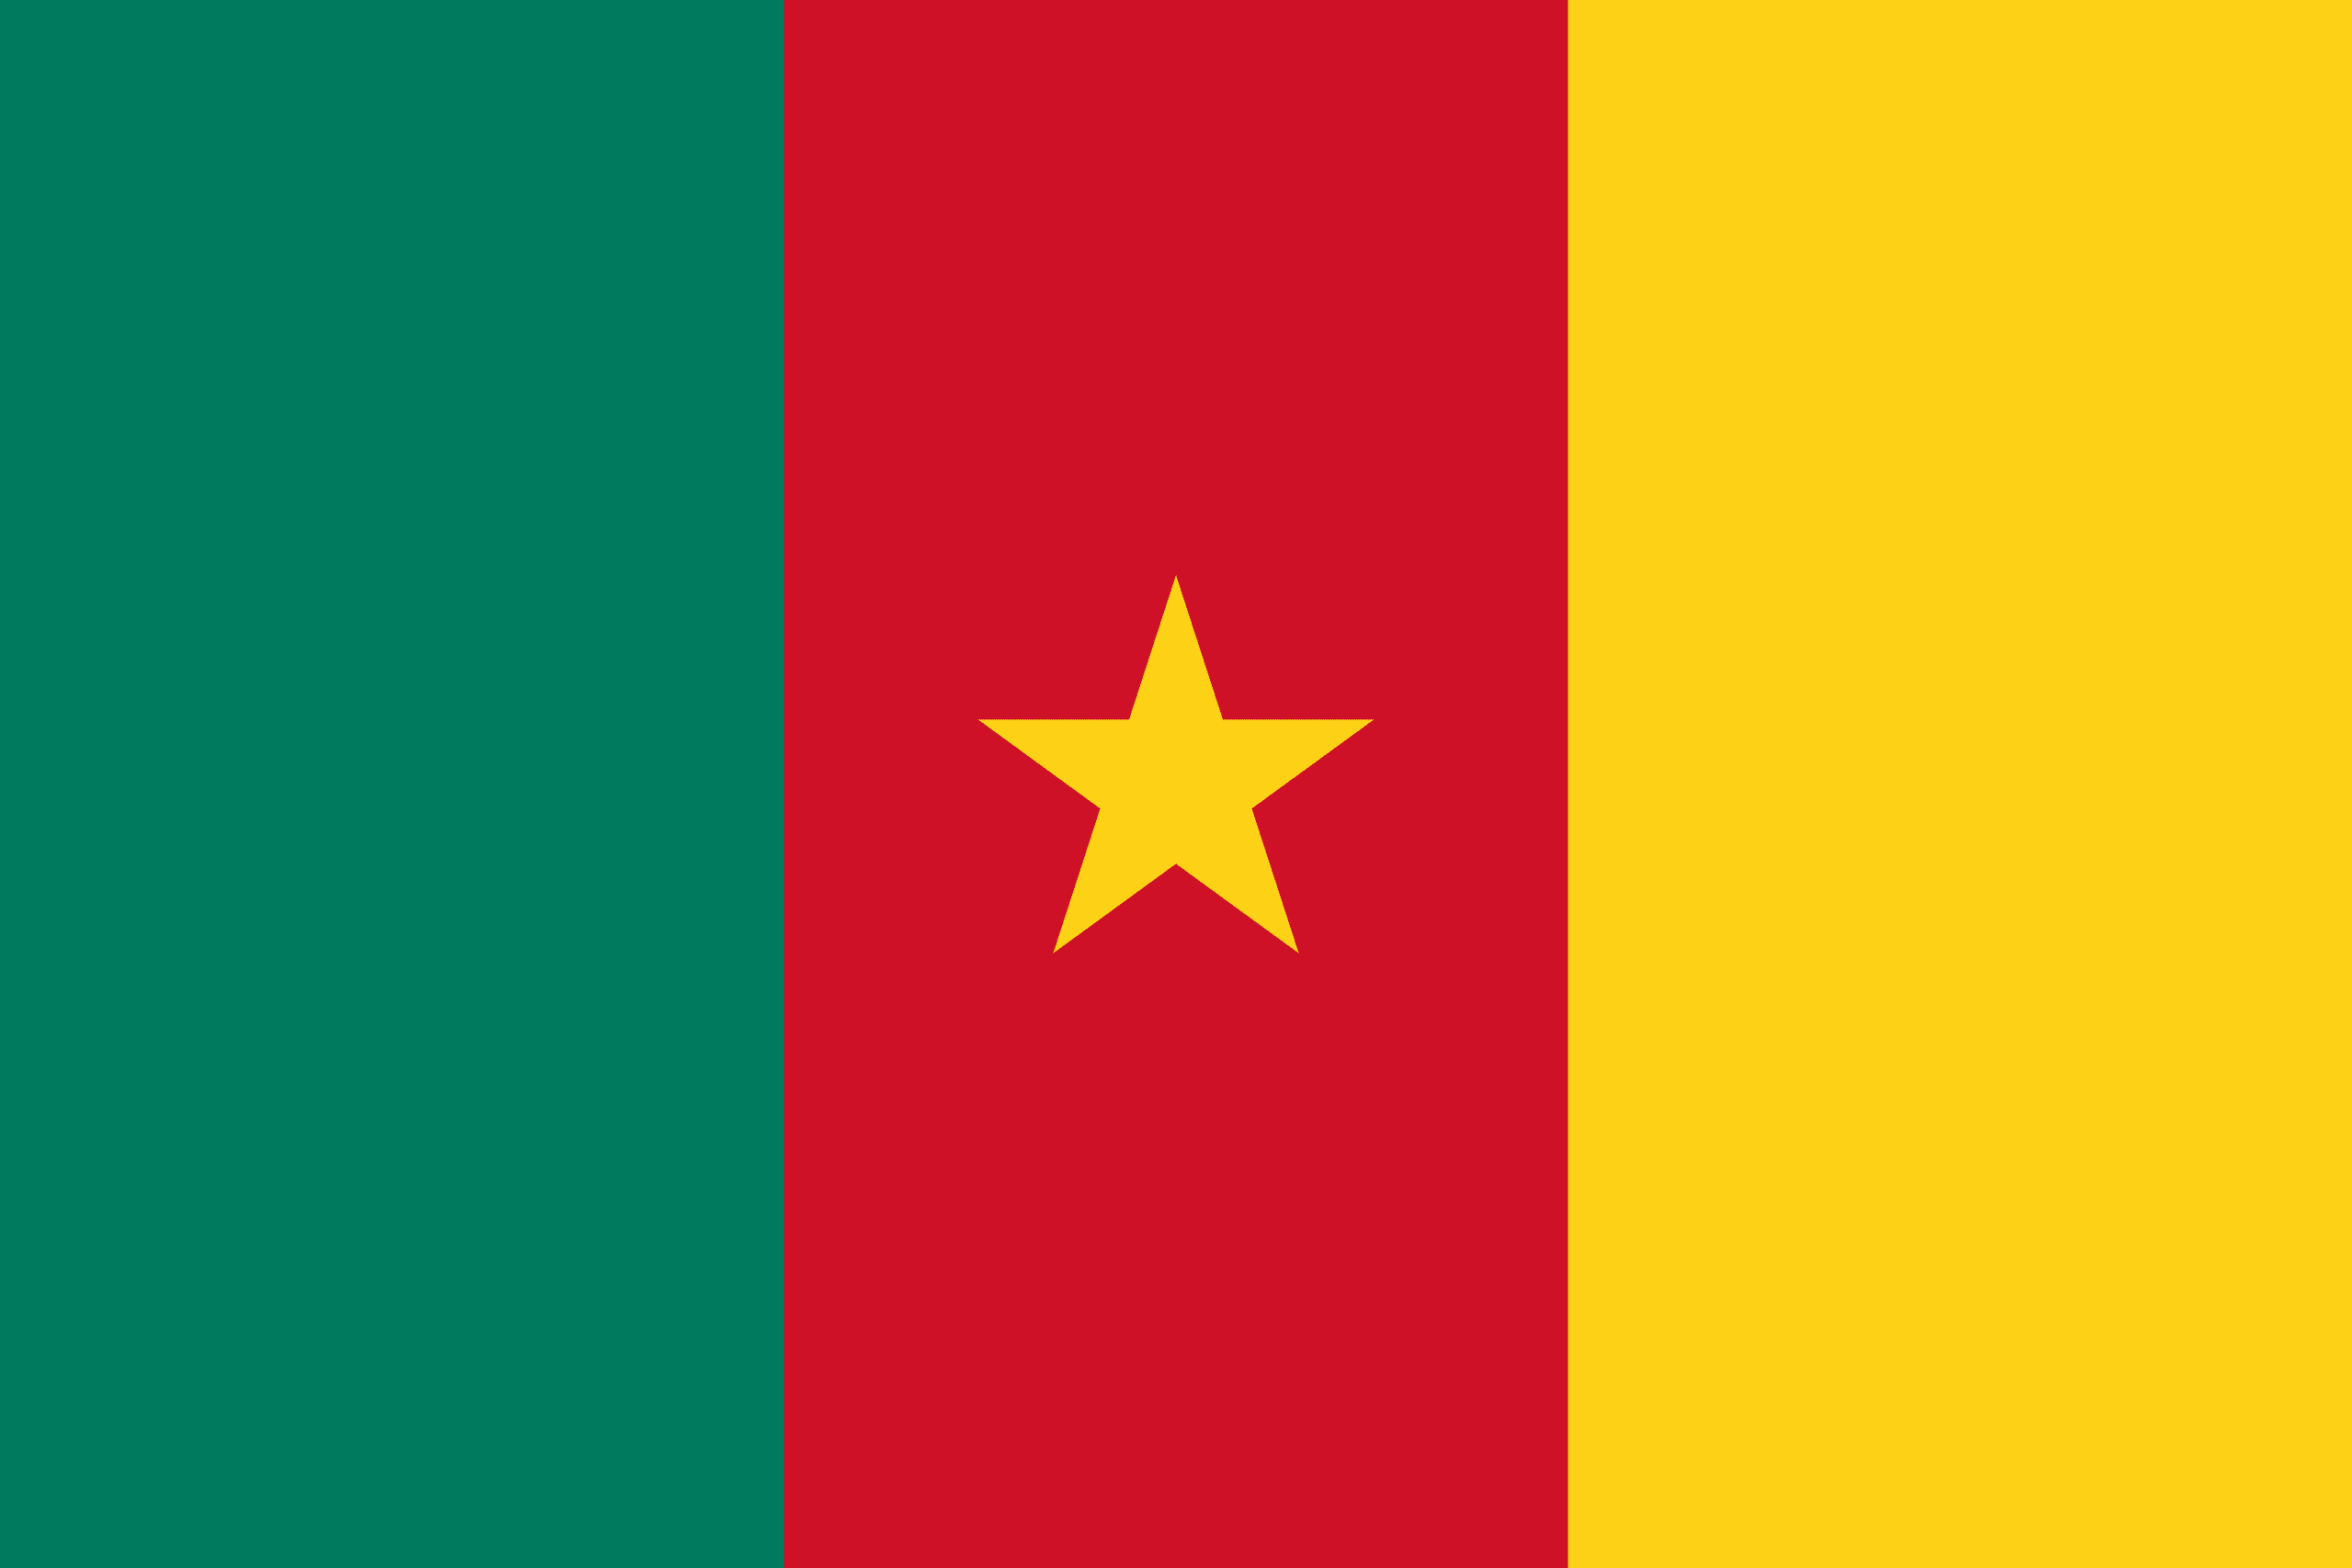

Canada


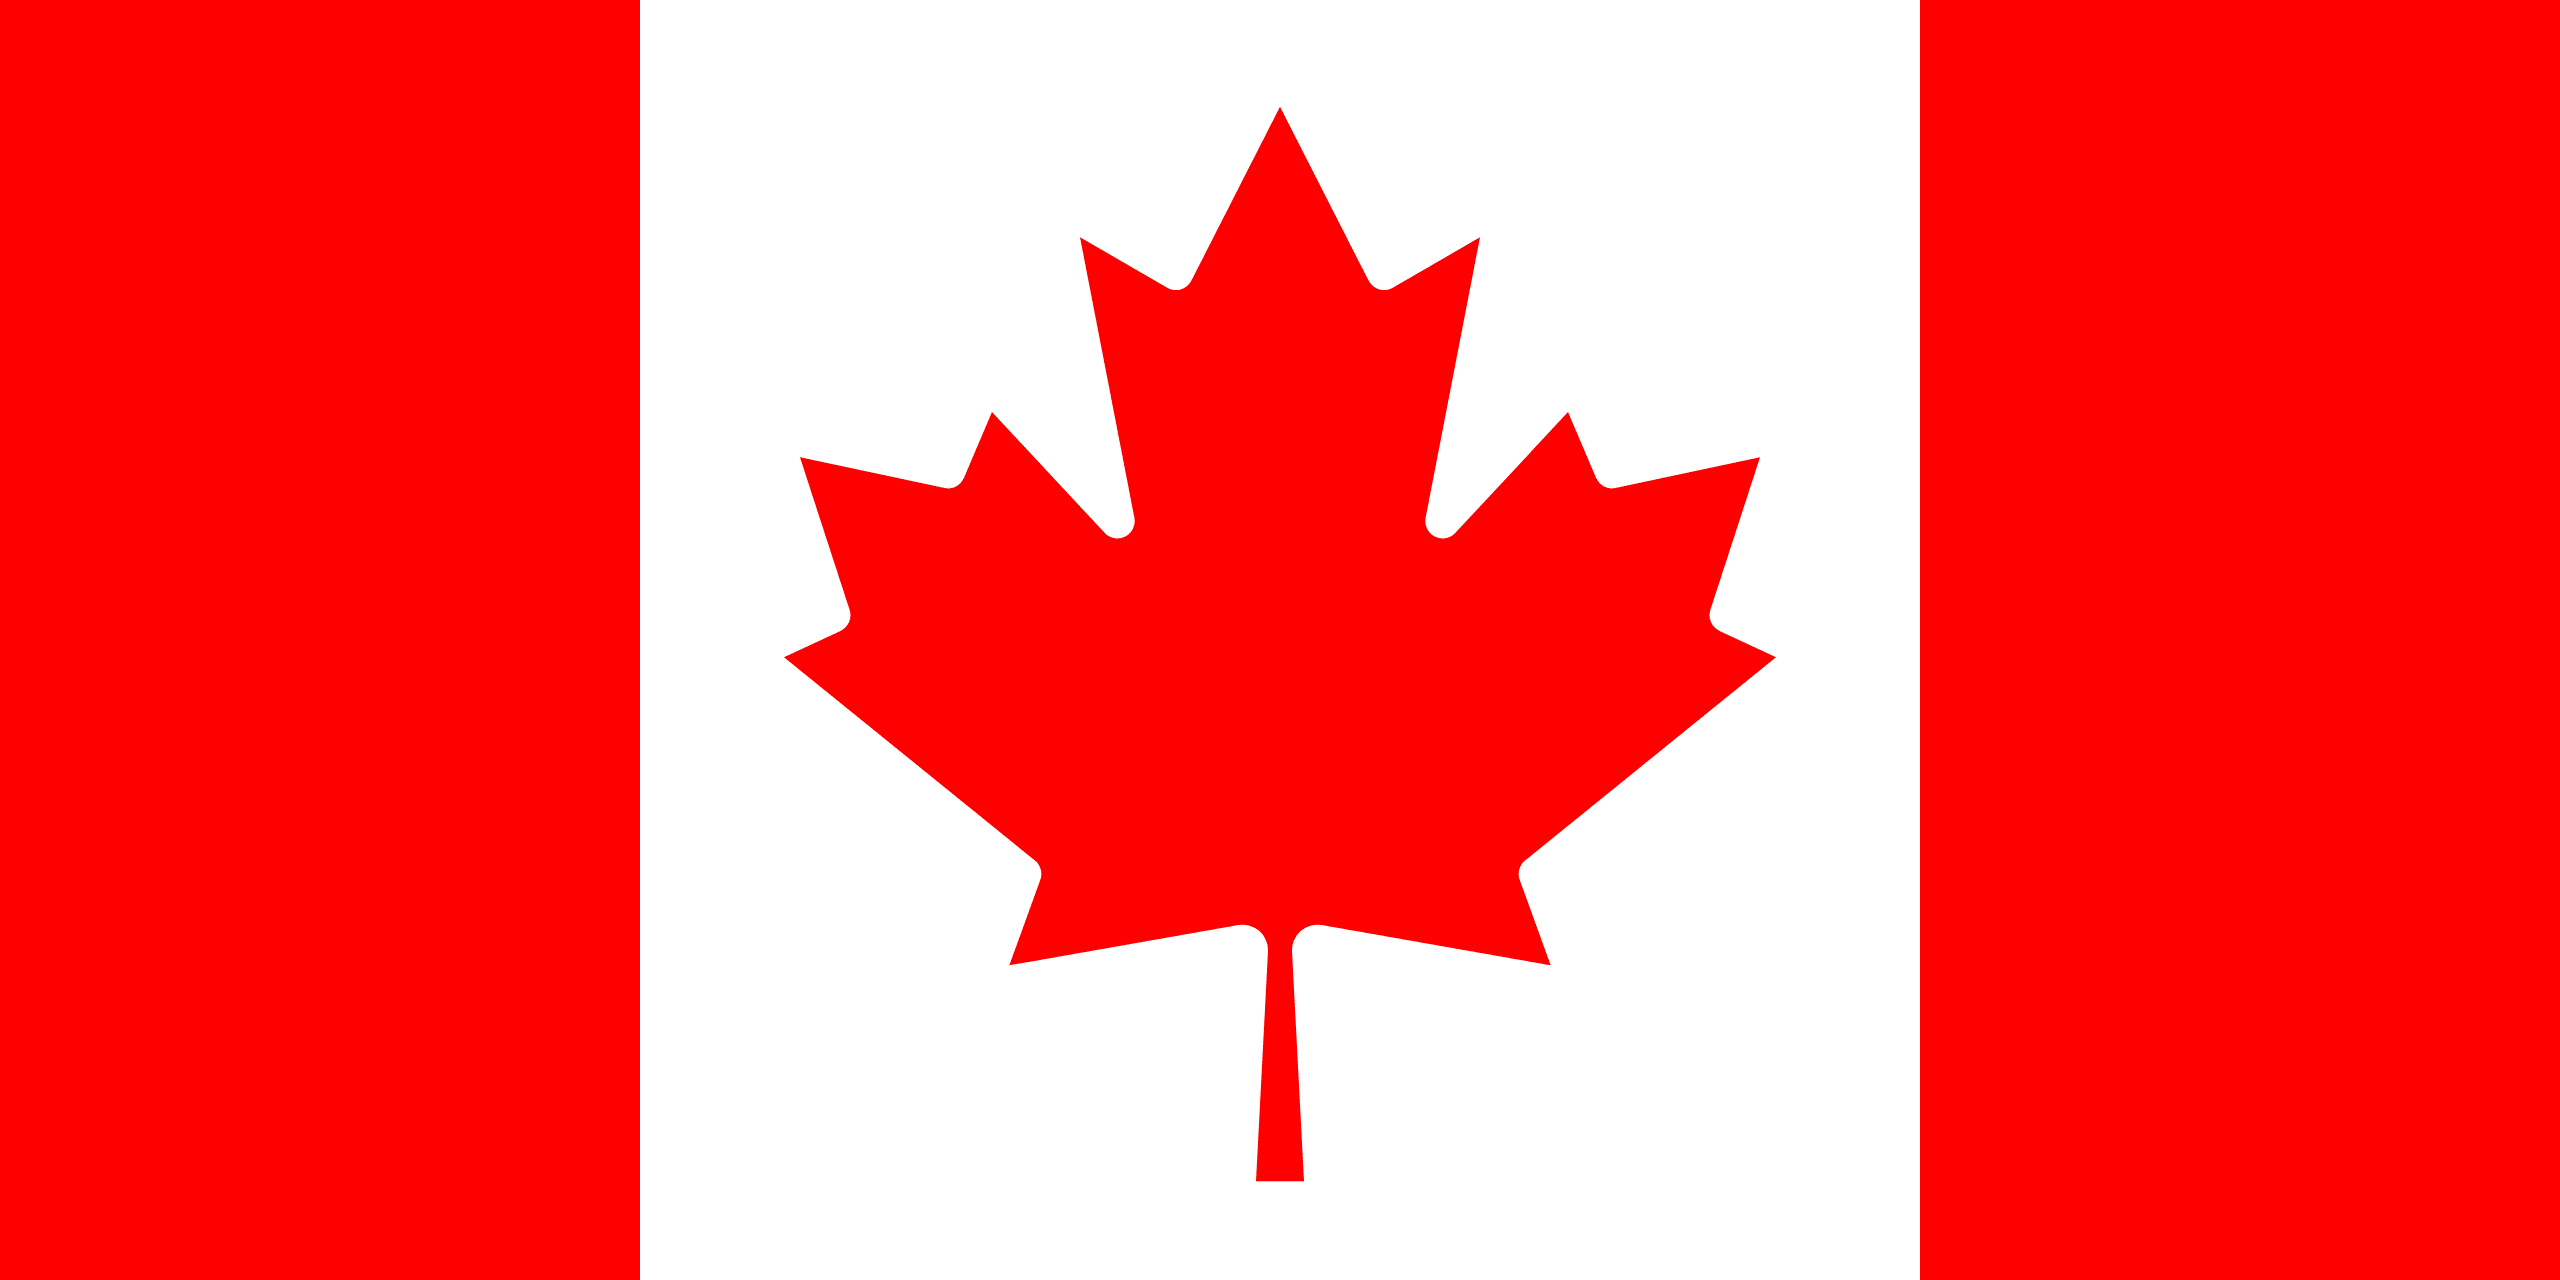

Cape Verde


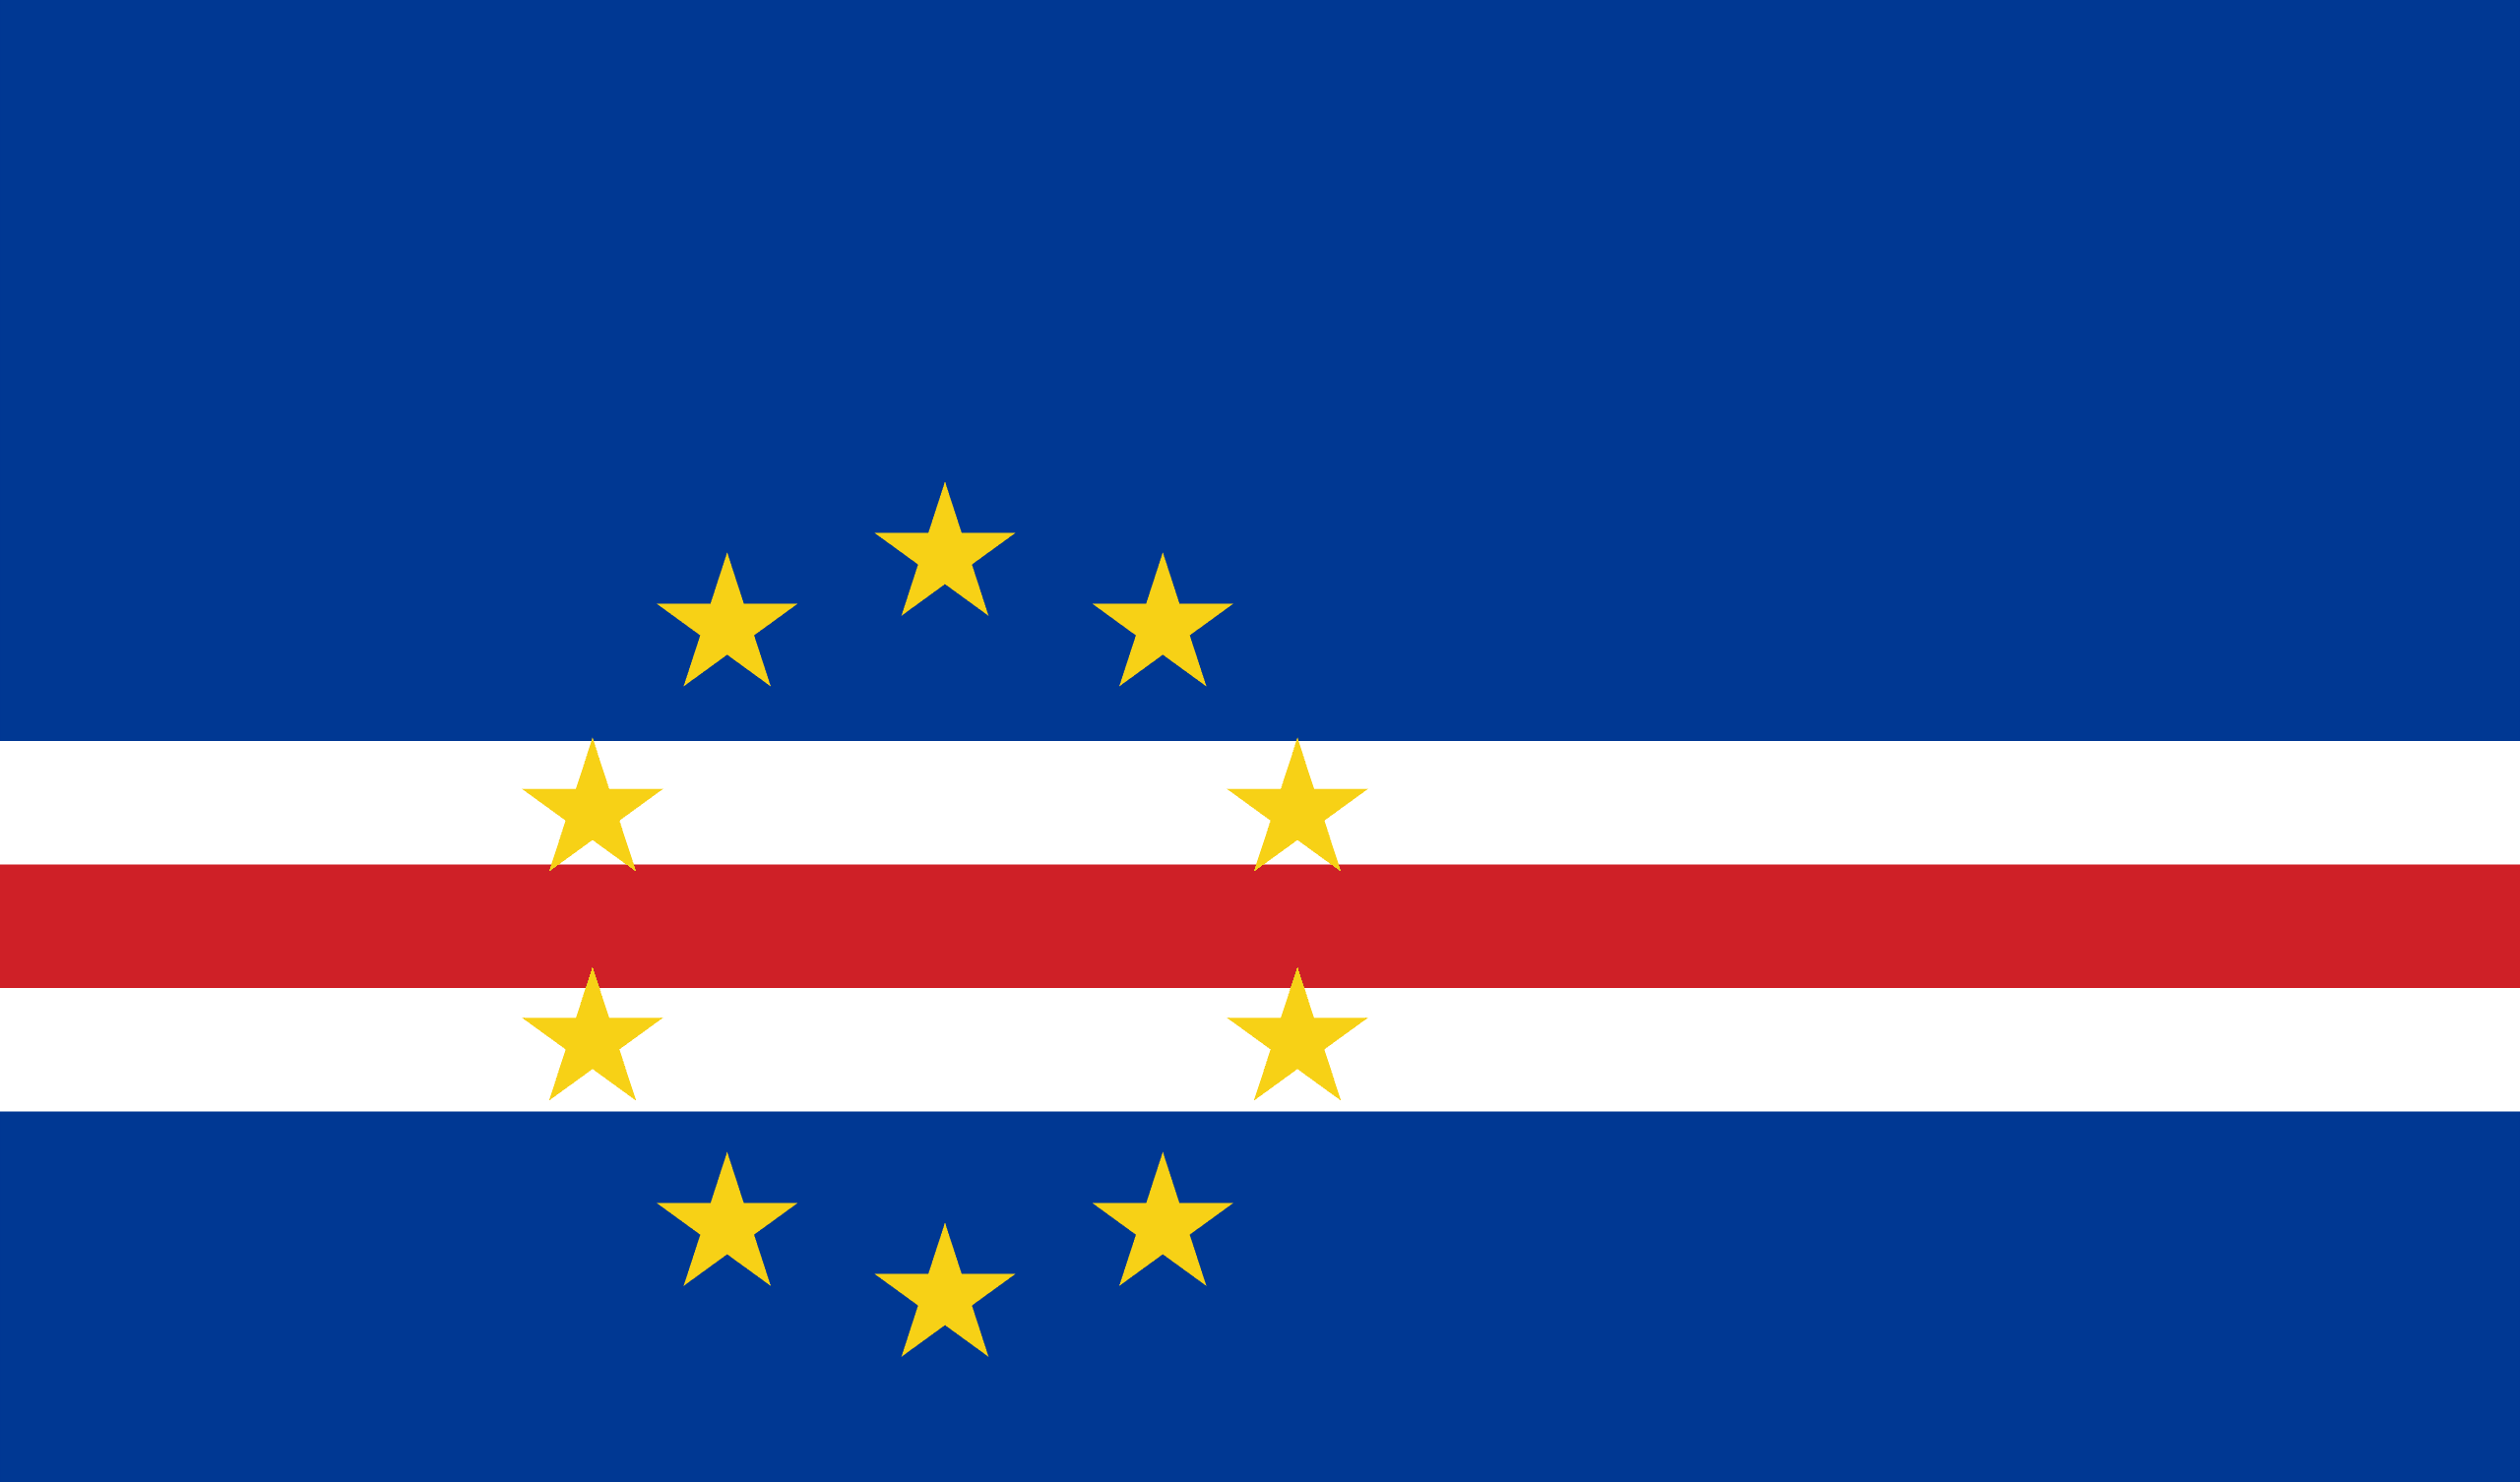

Caribbean Netherlands


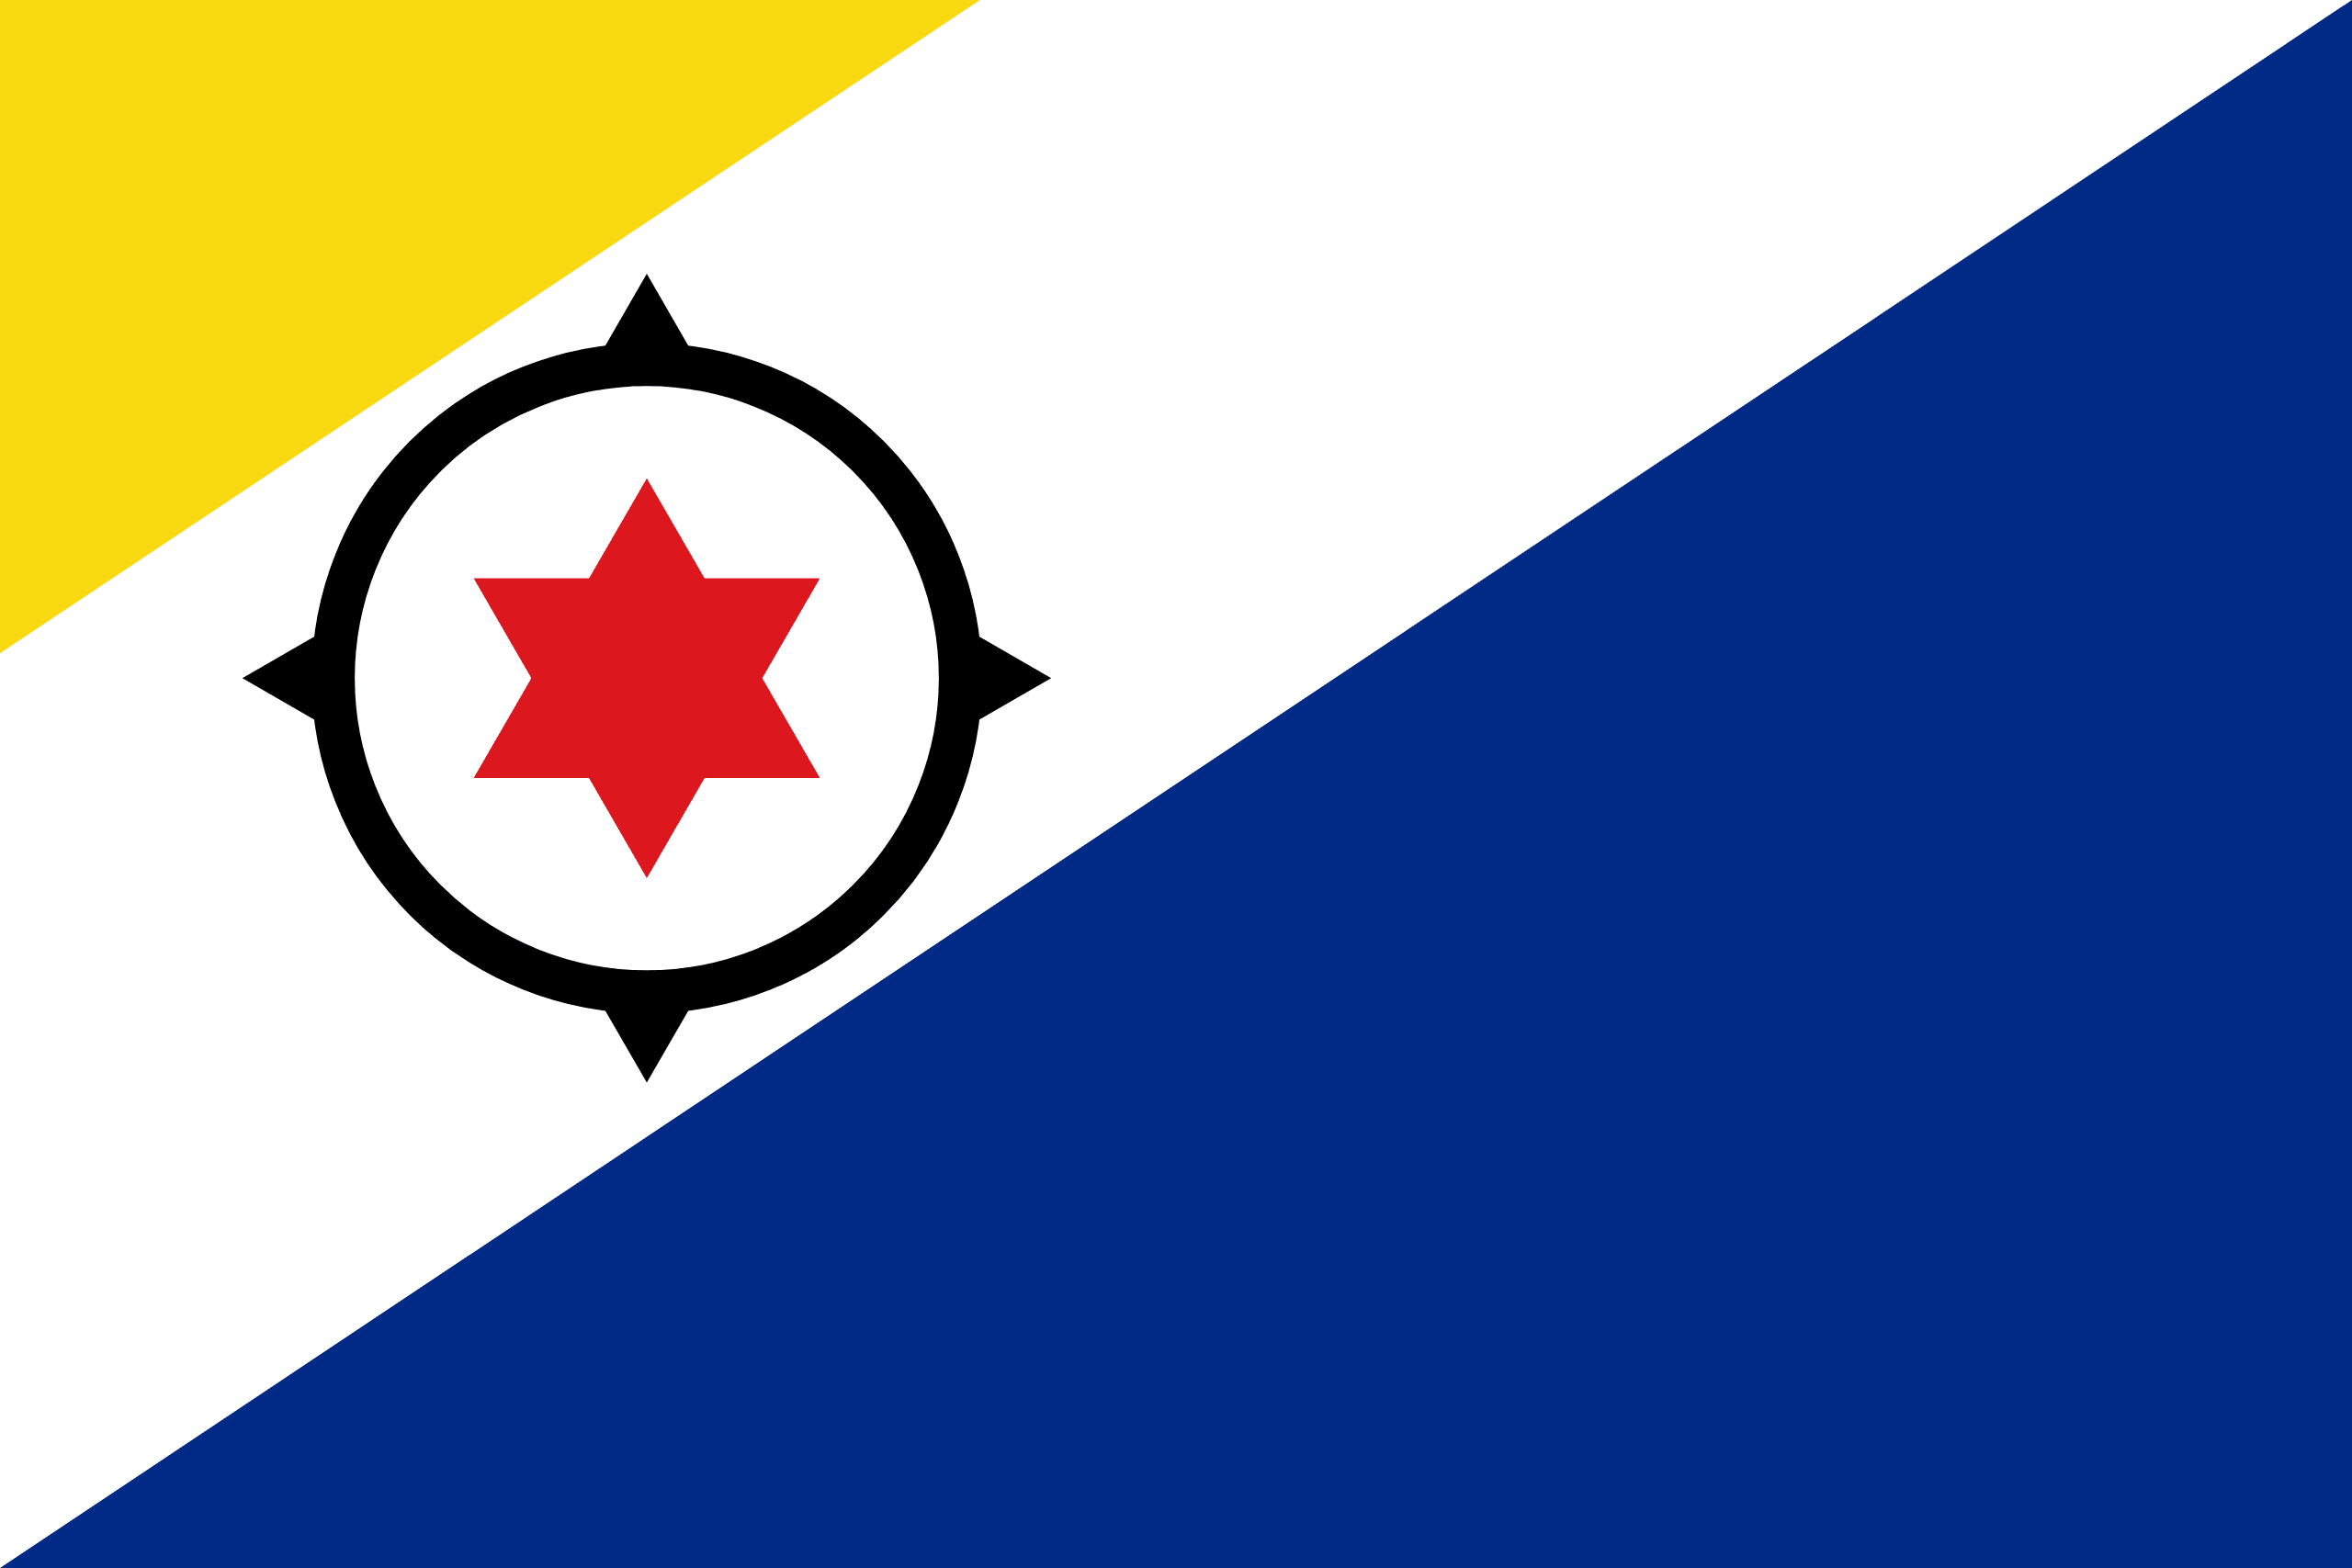

Cayman Islands


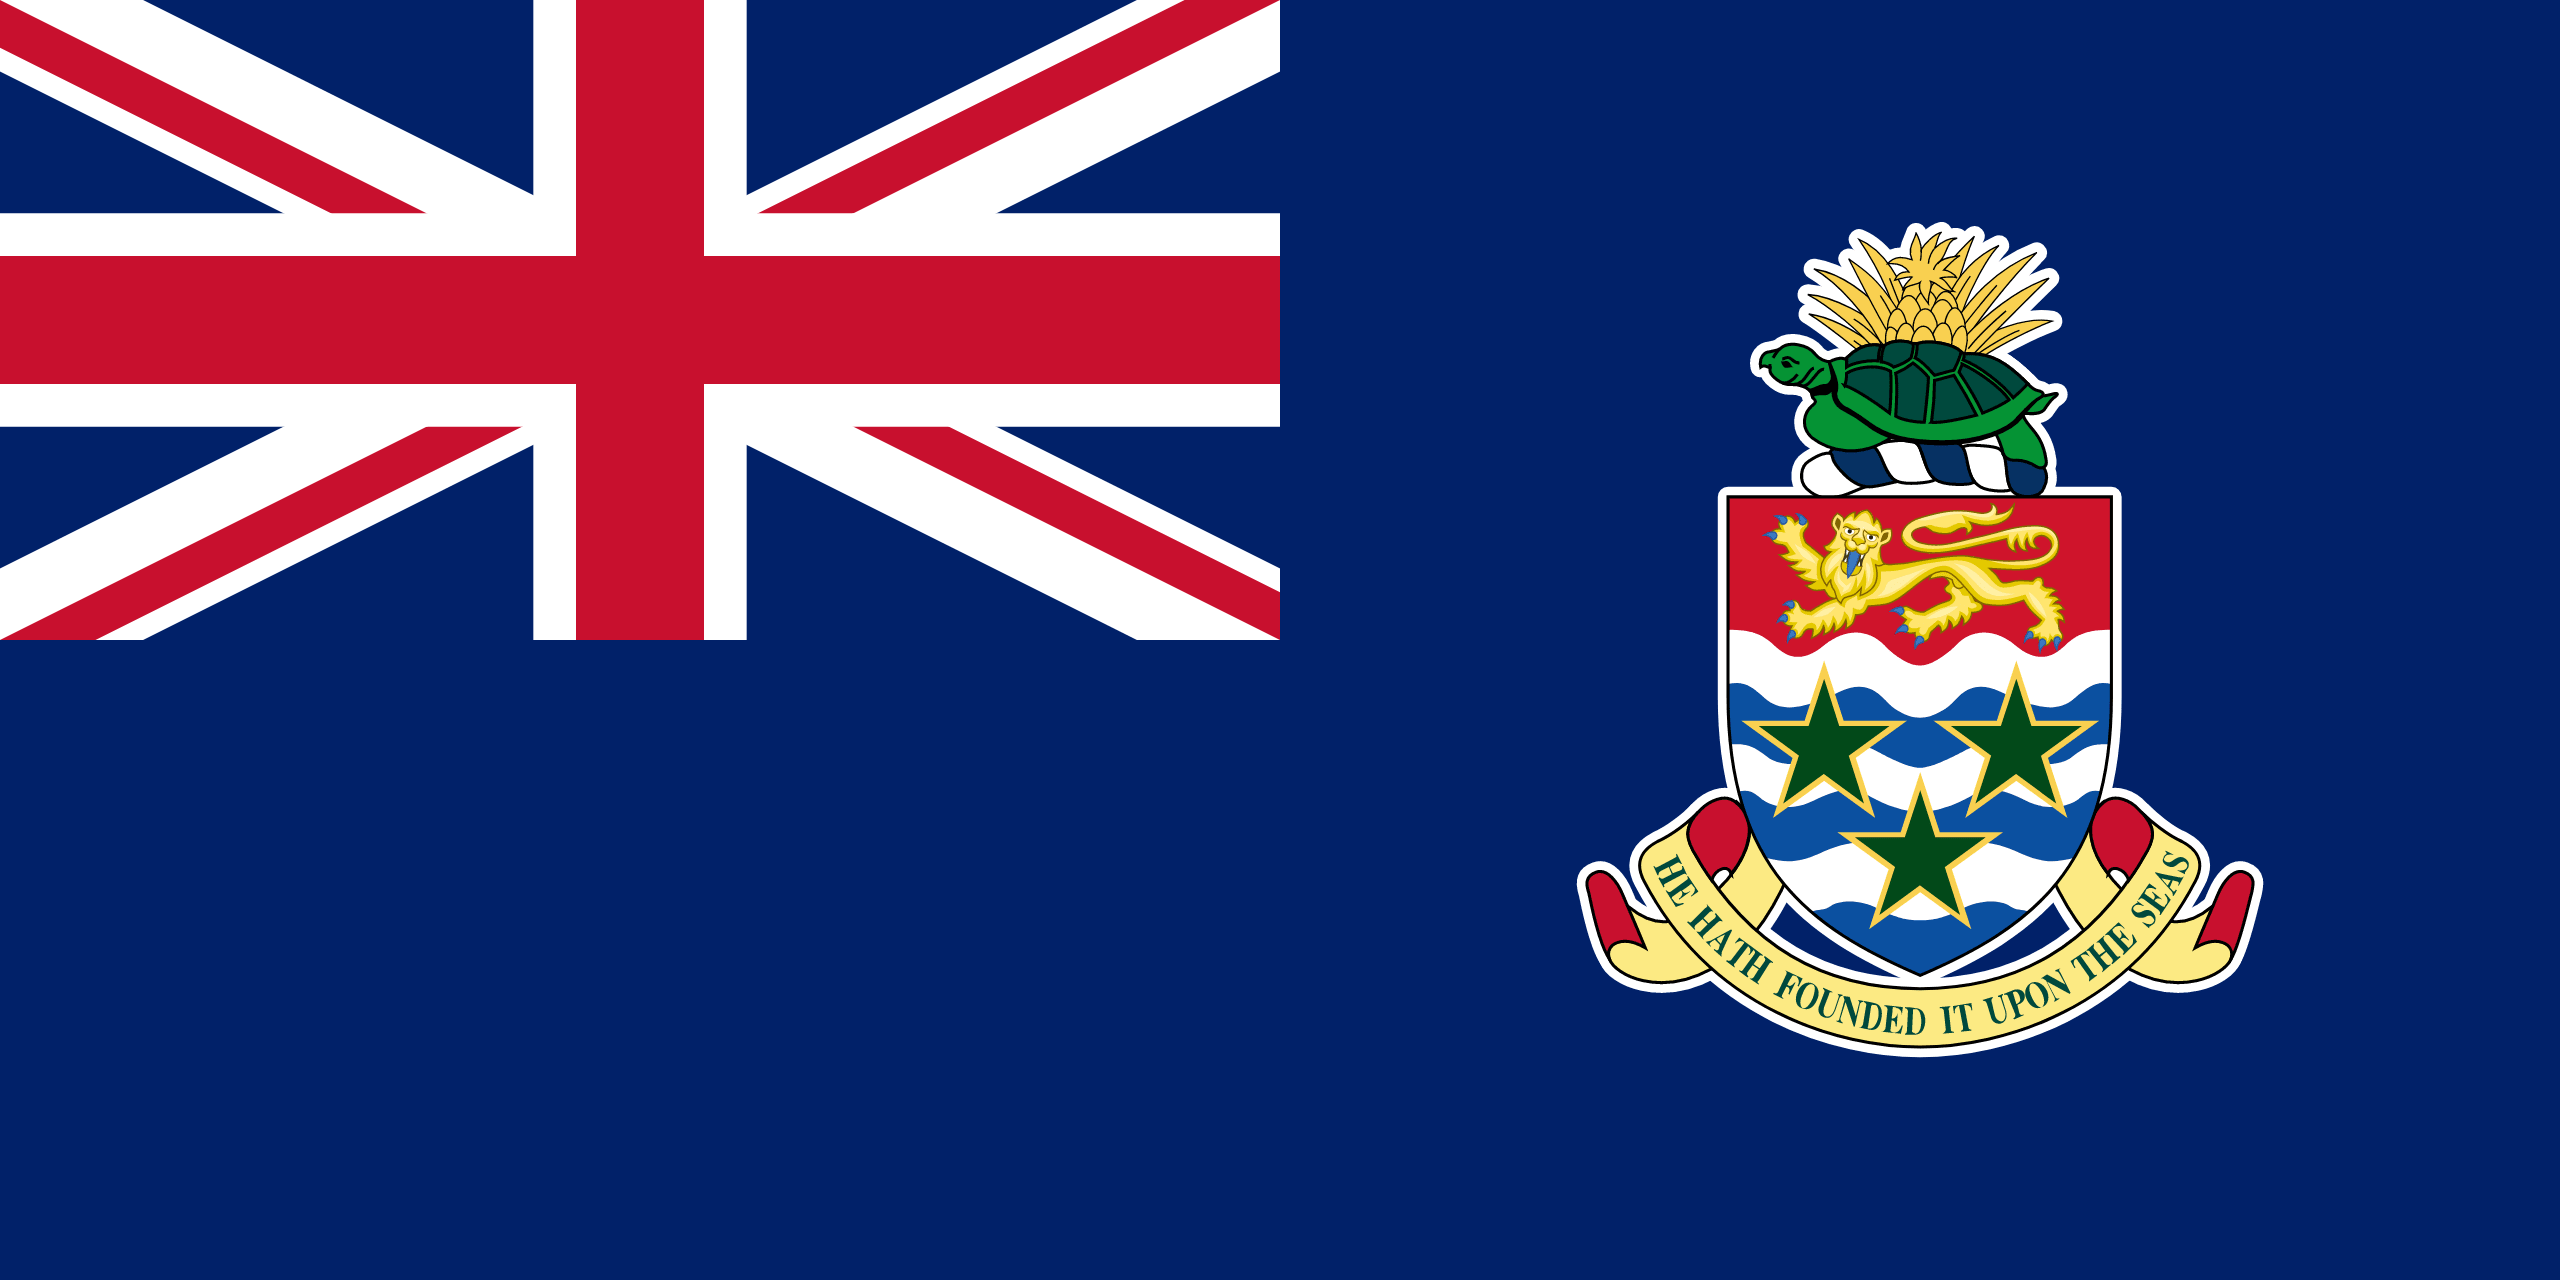

Central African Republic


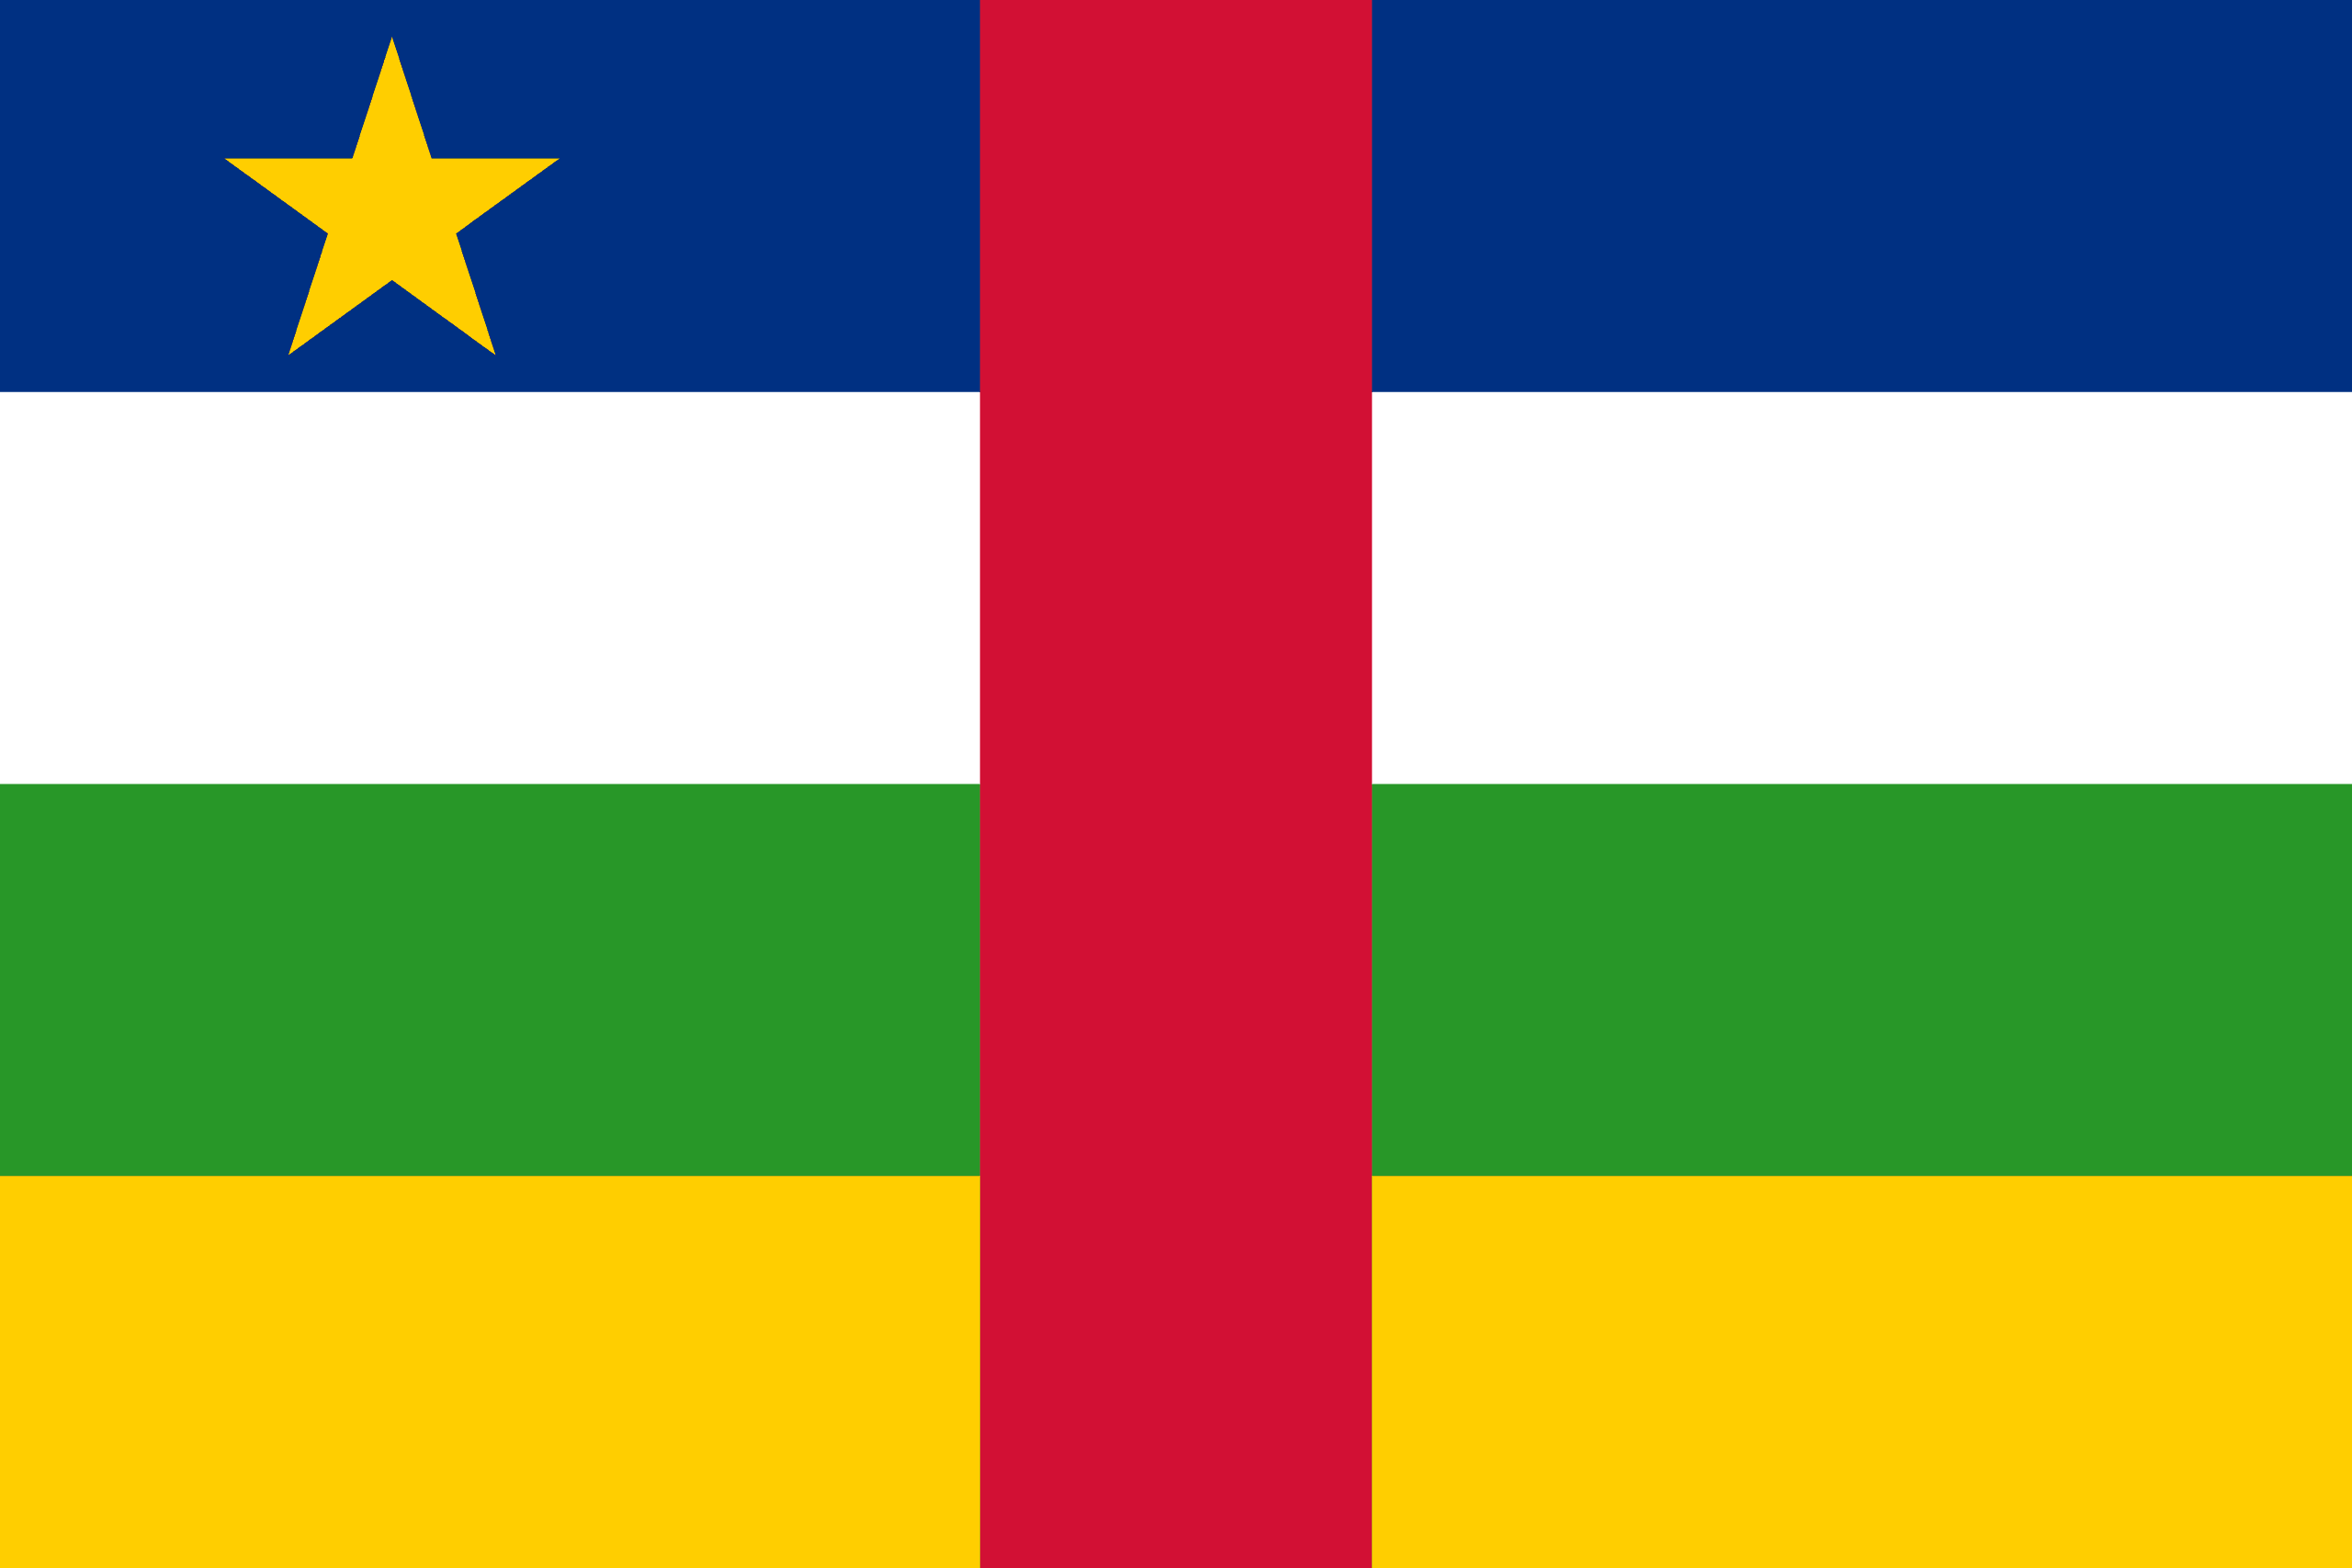

Chad


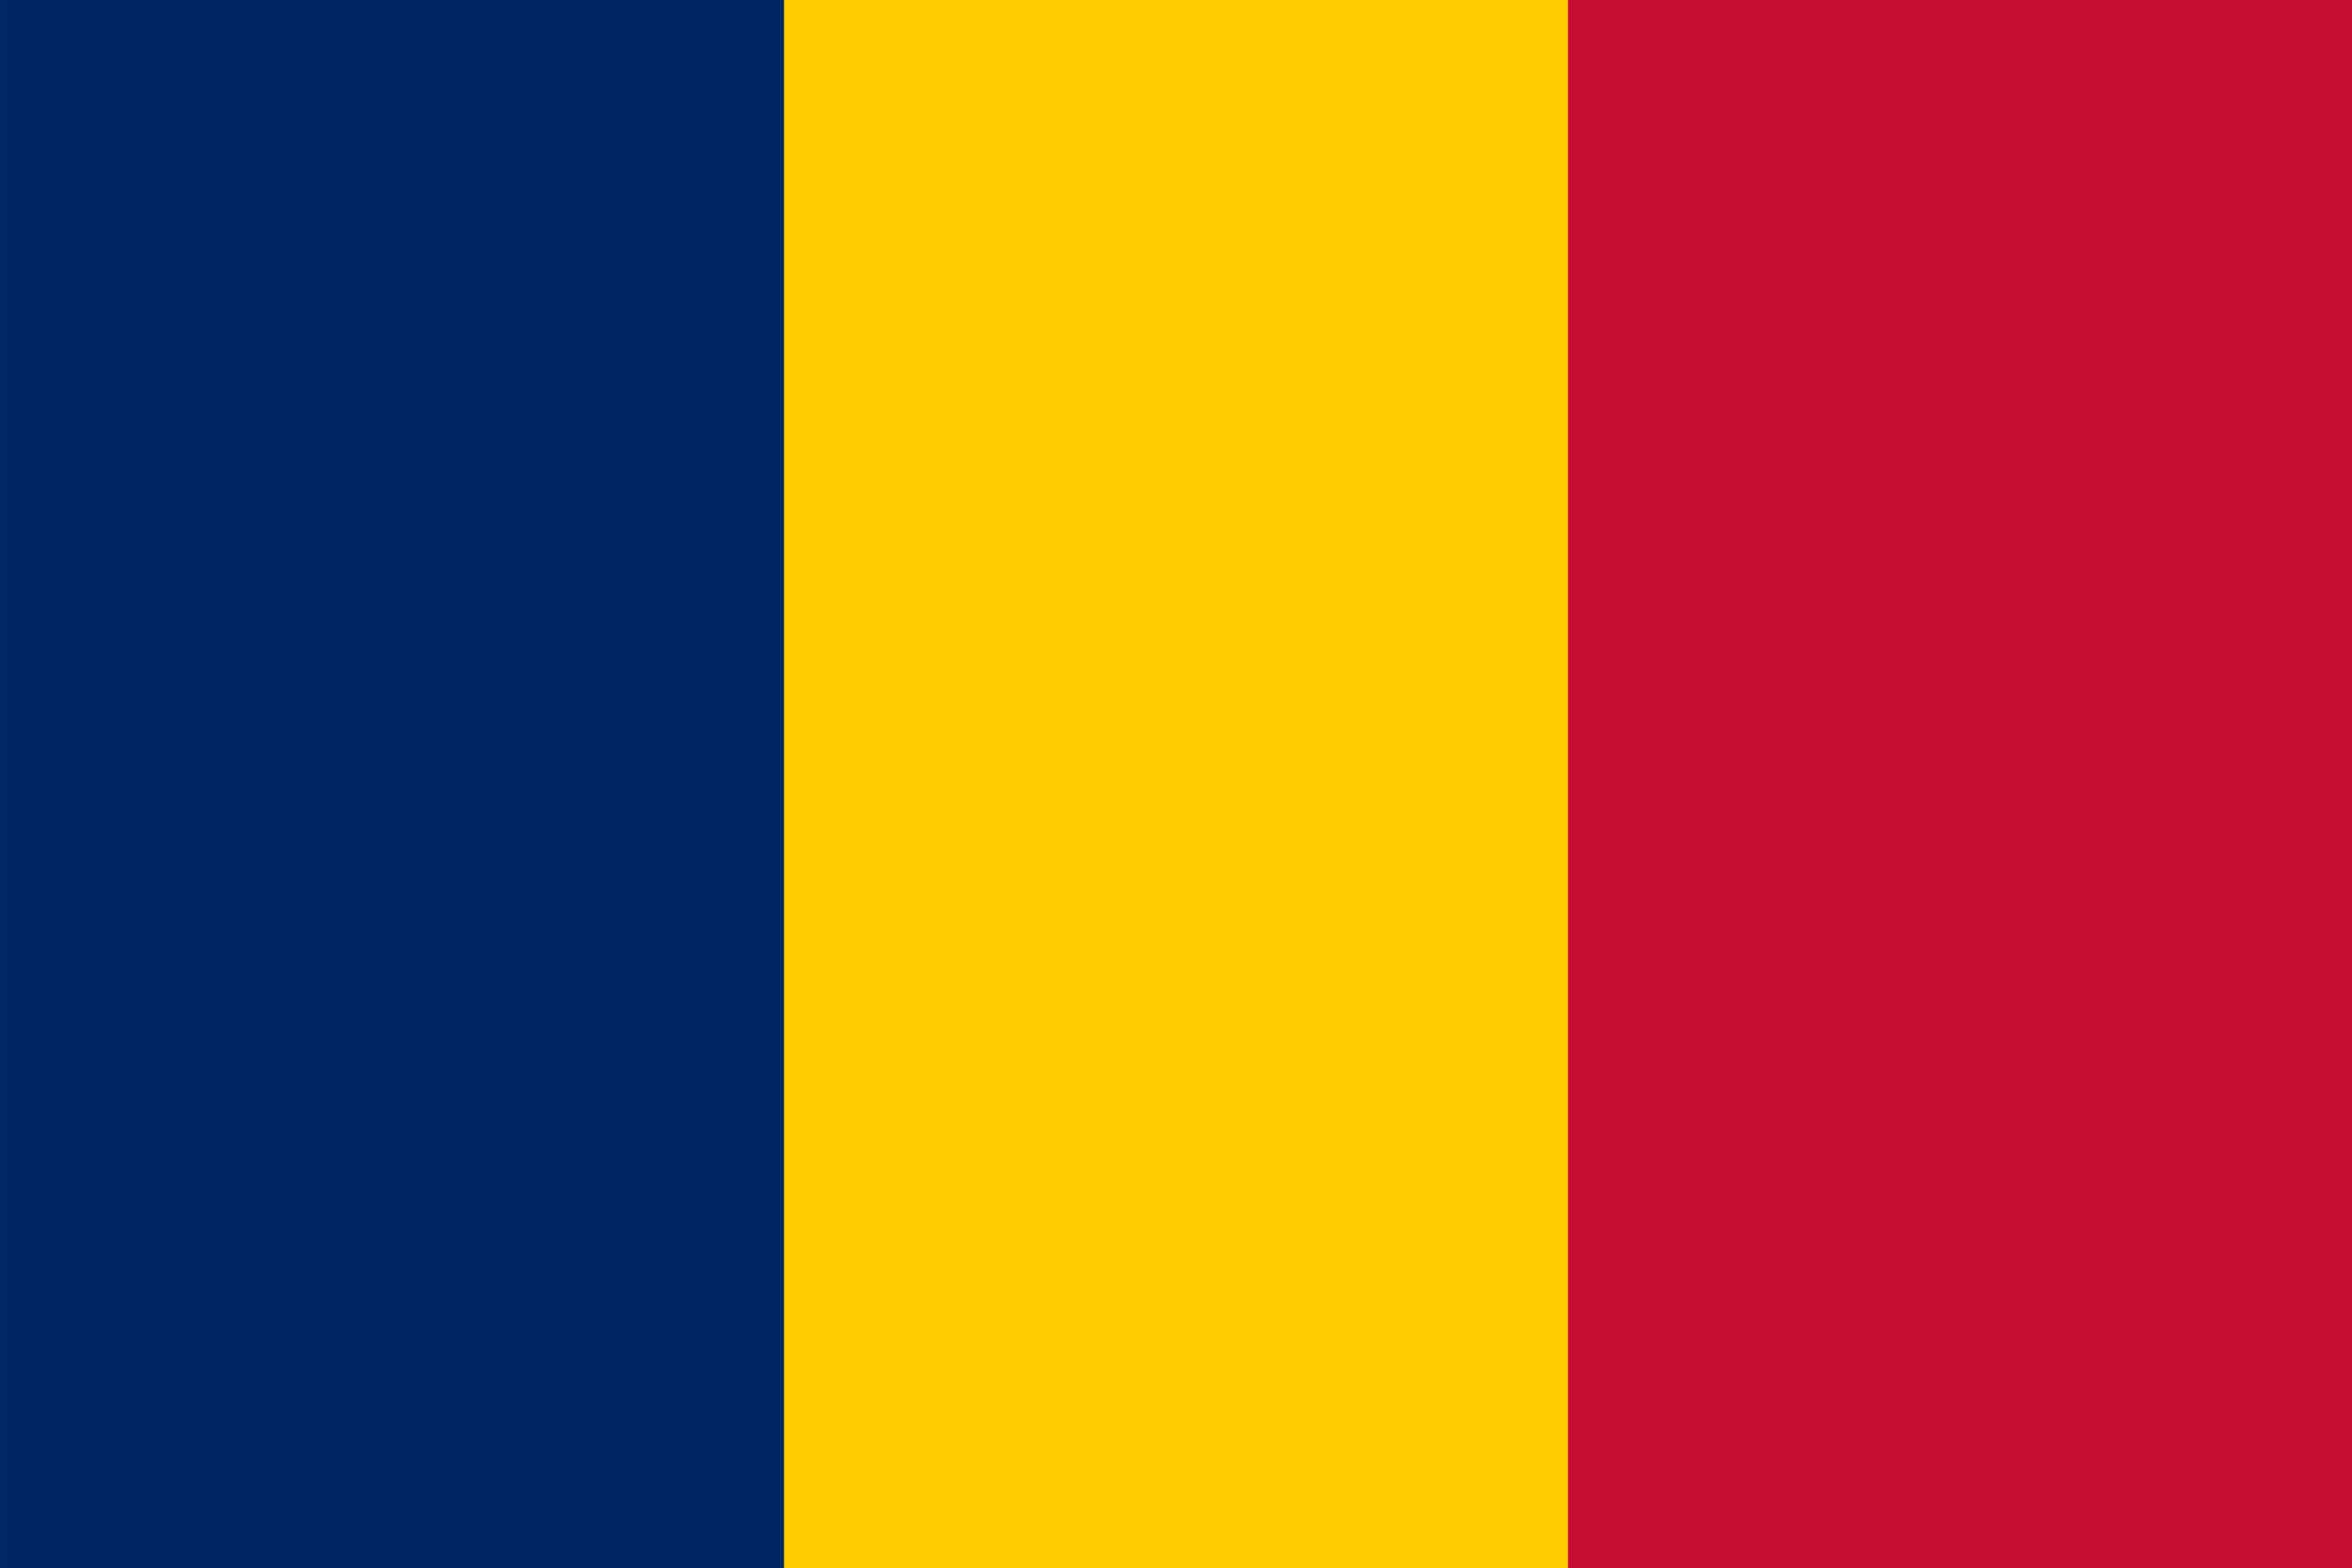

Chile


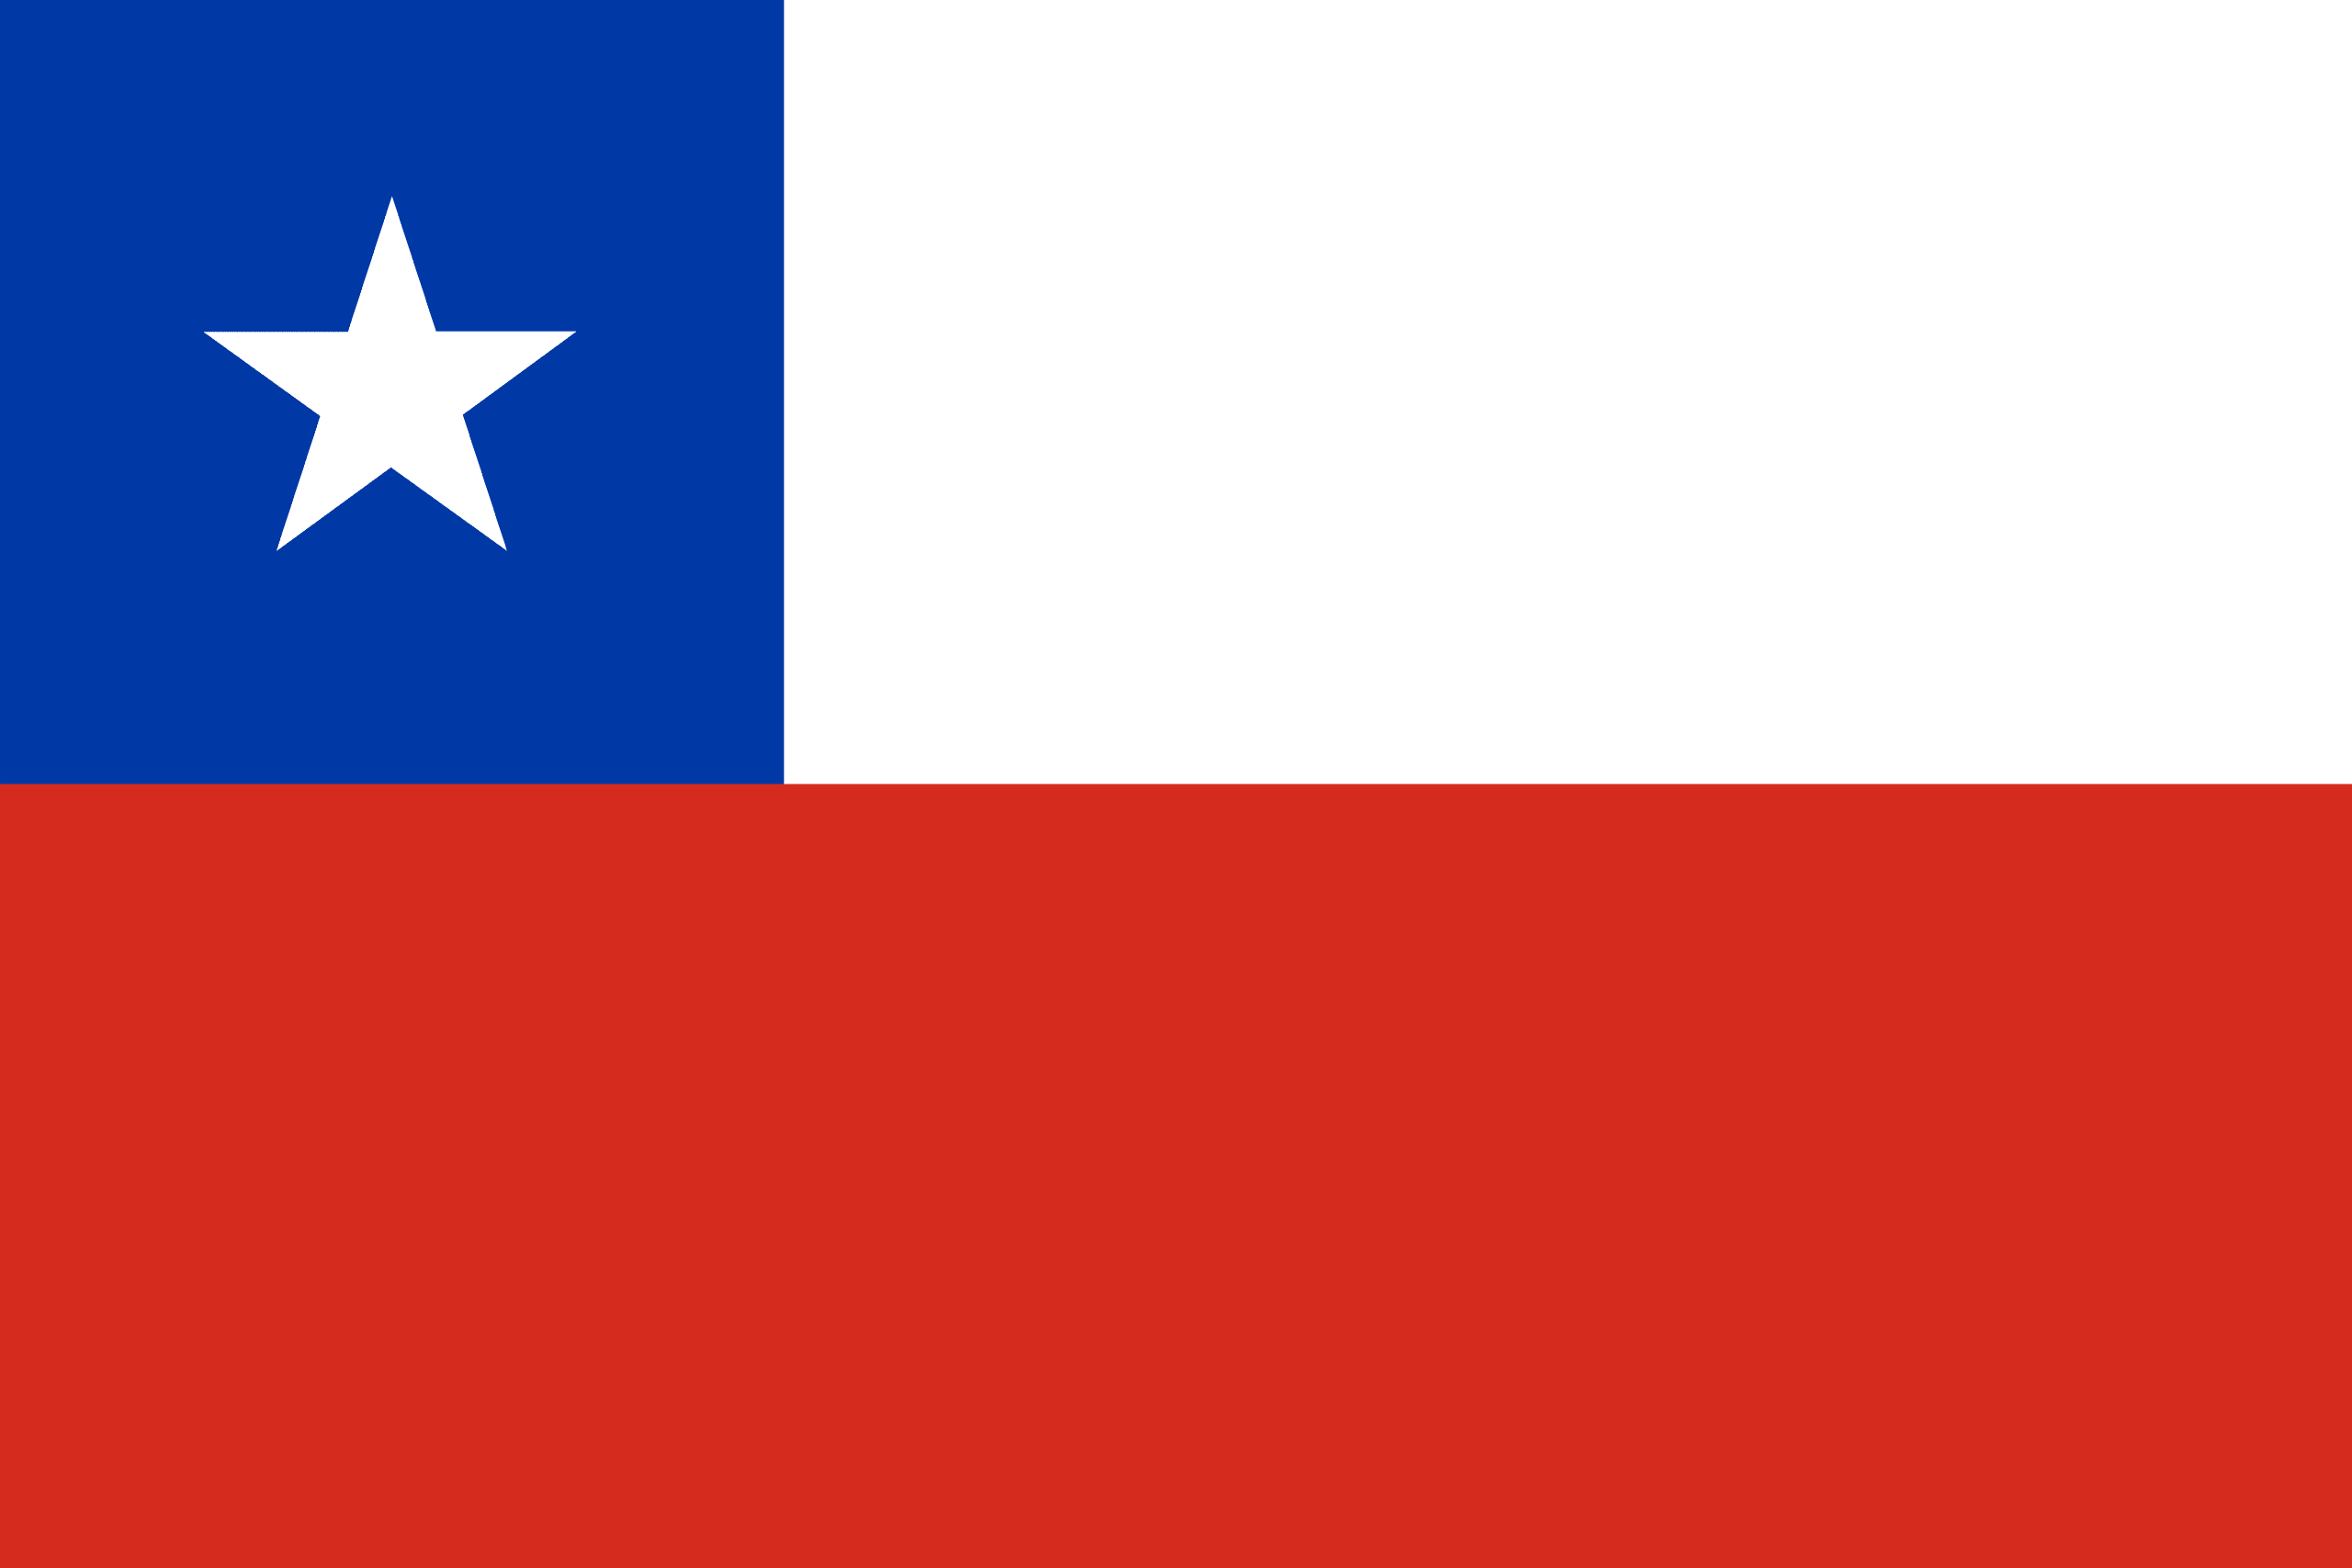

China


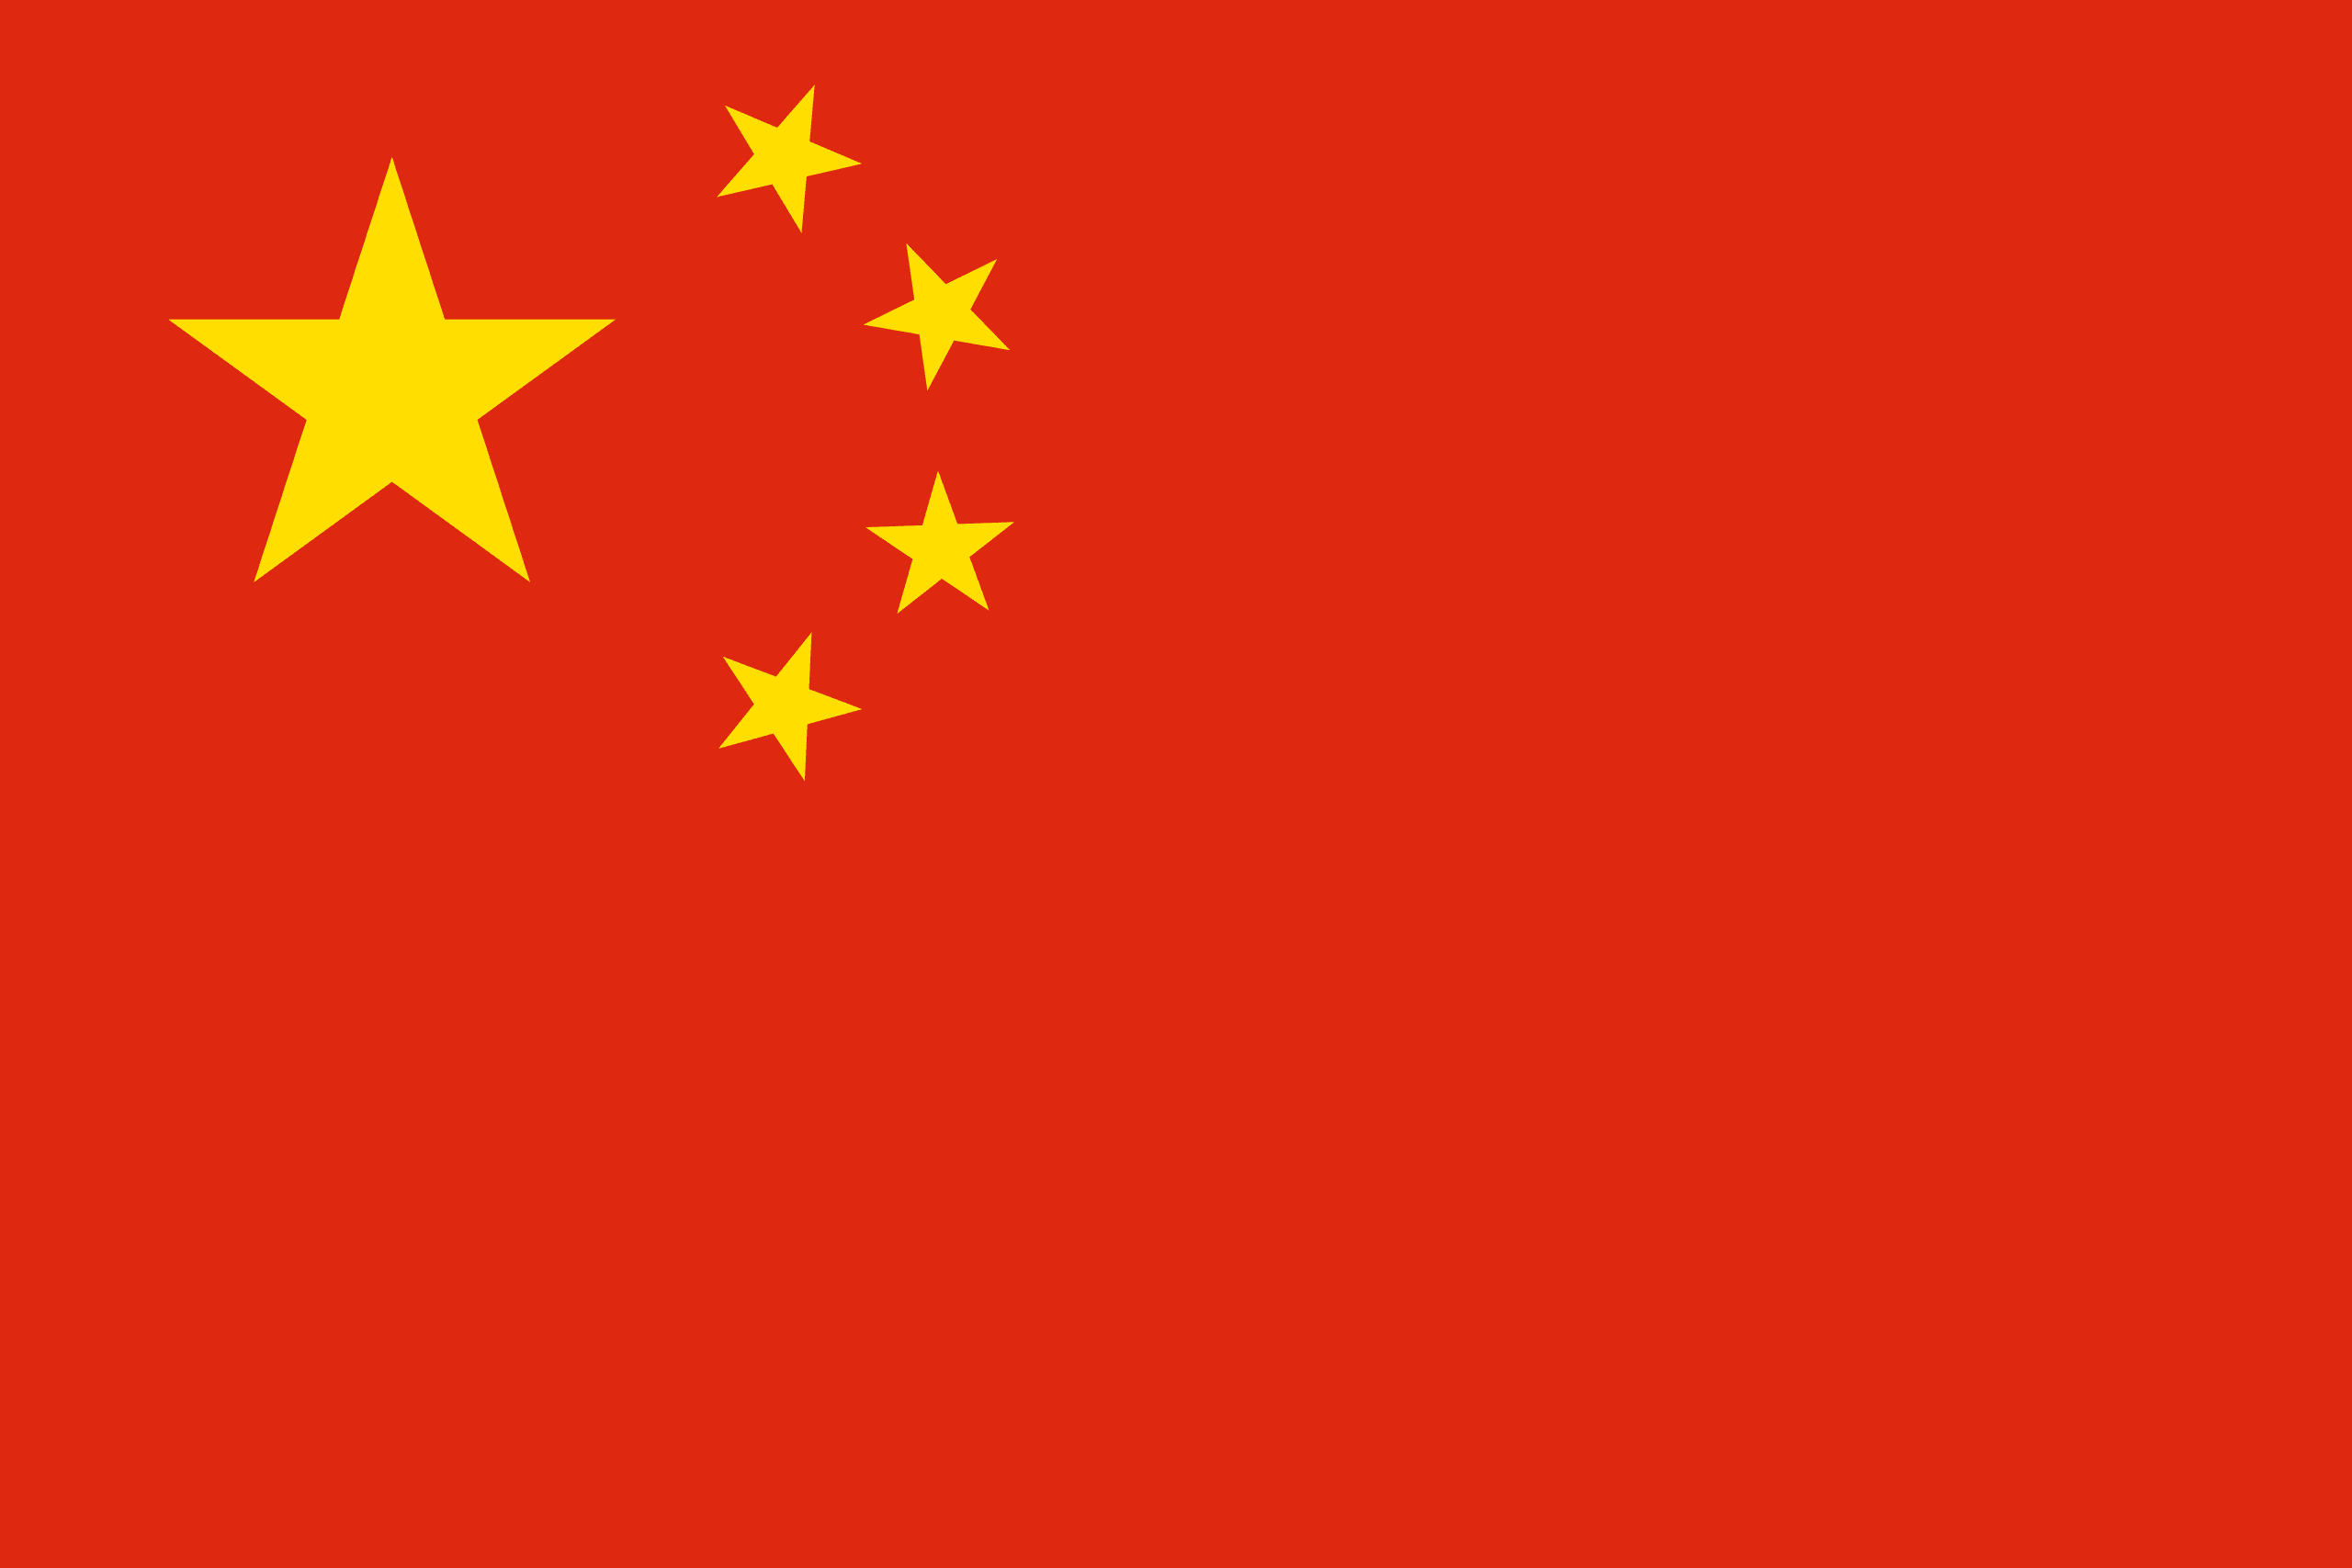

Christmas Island


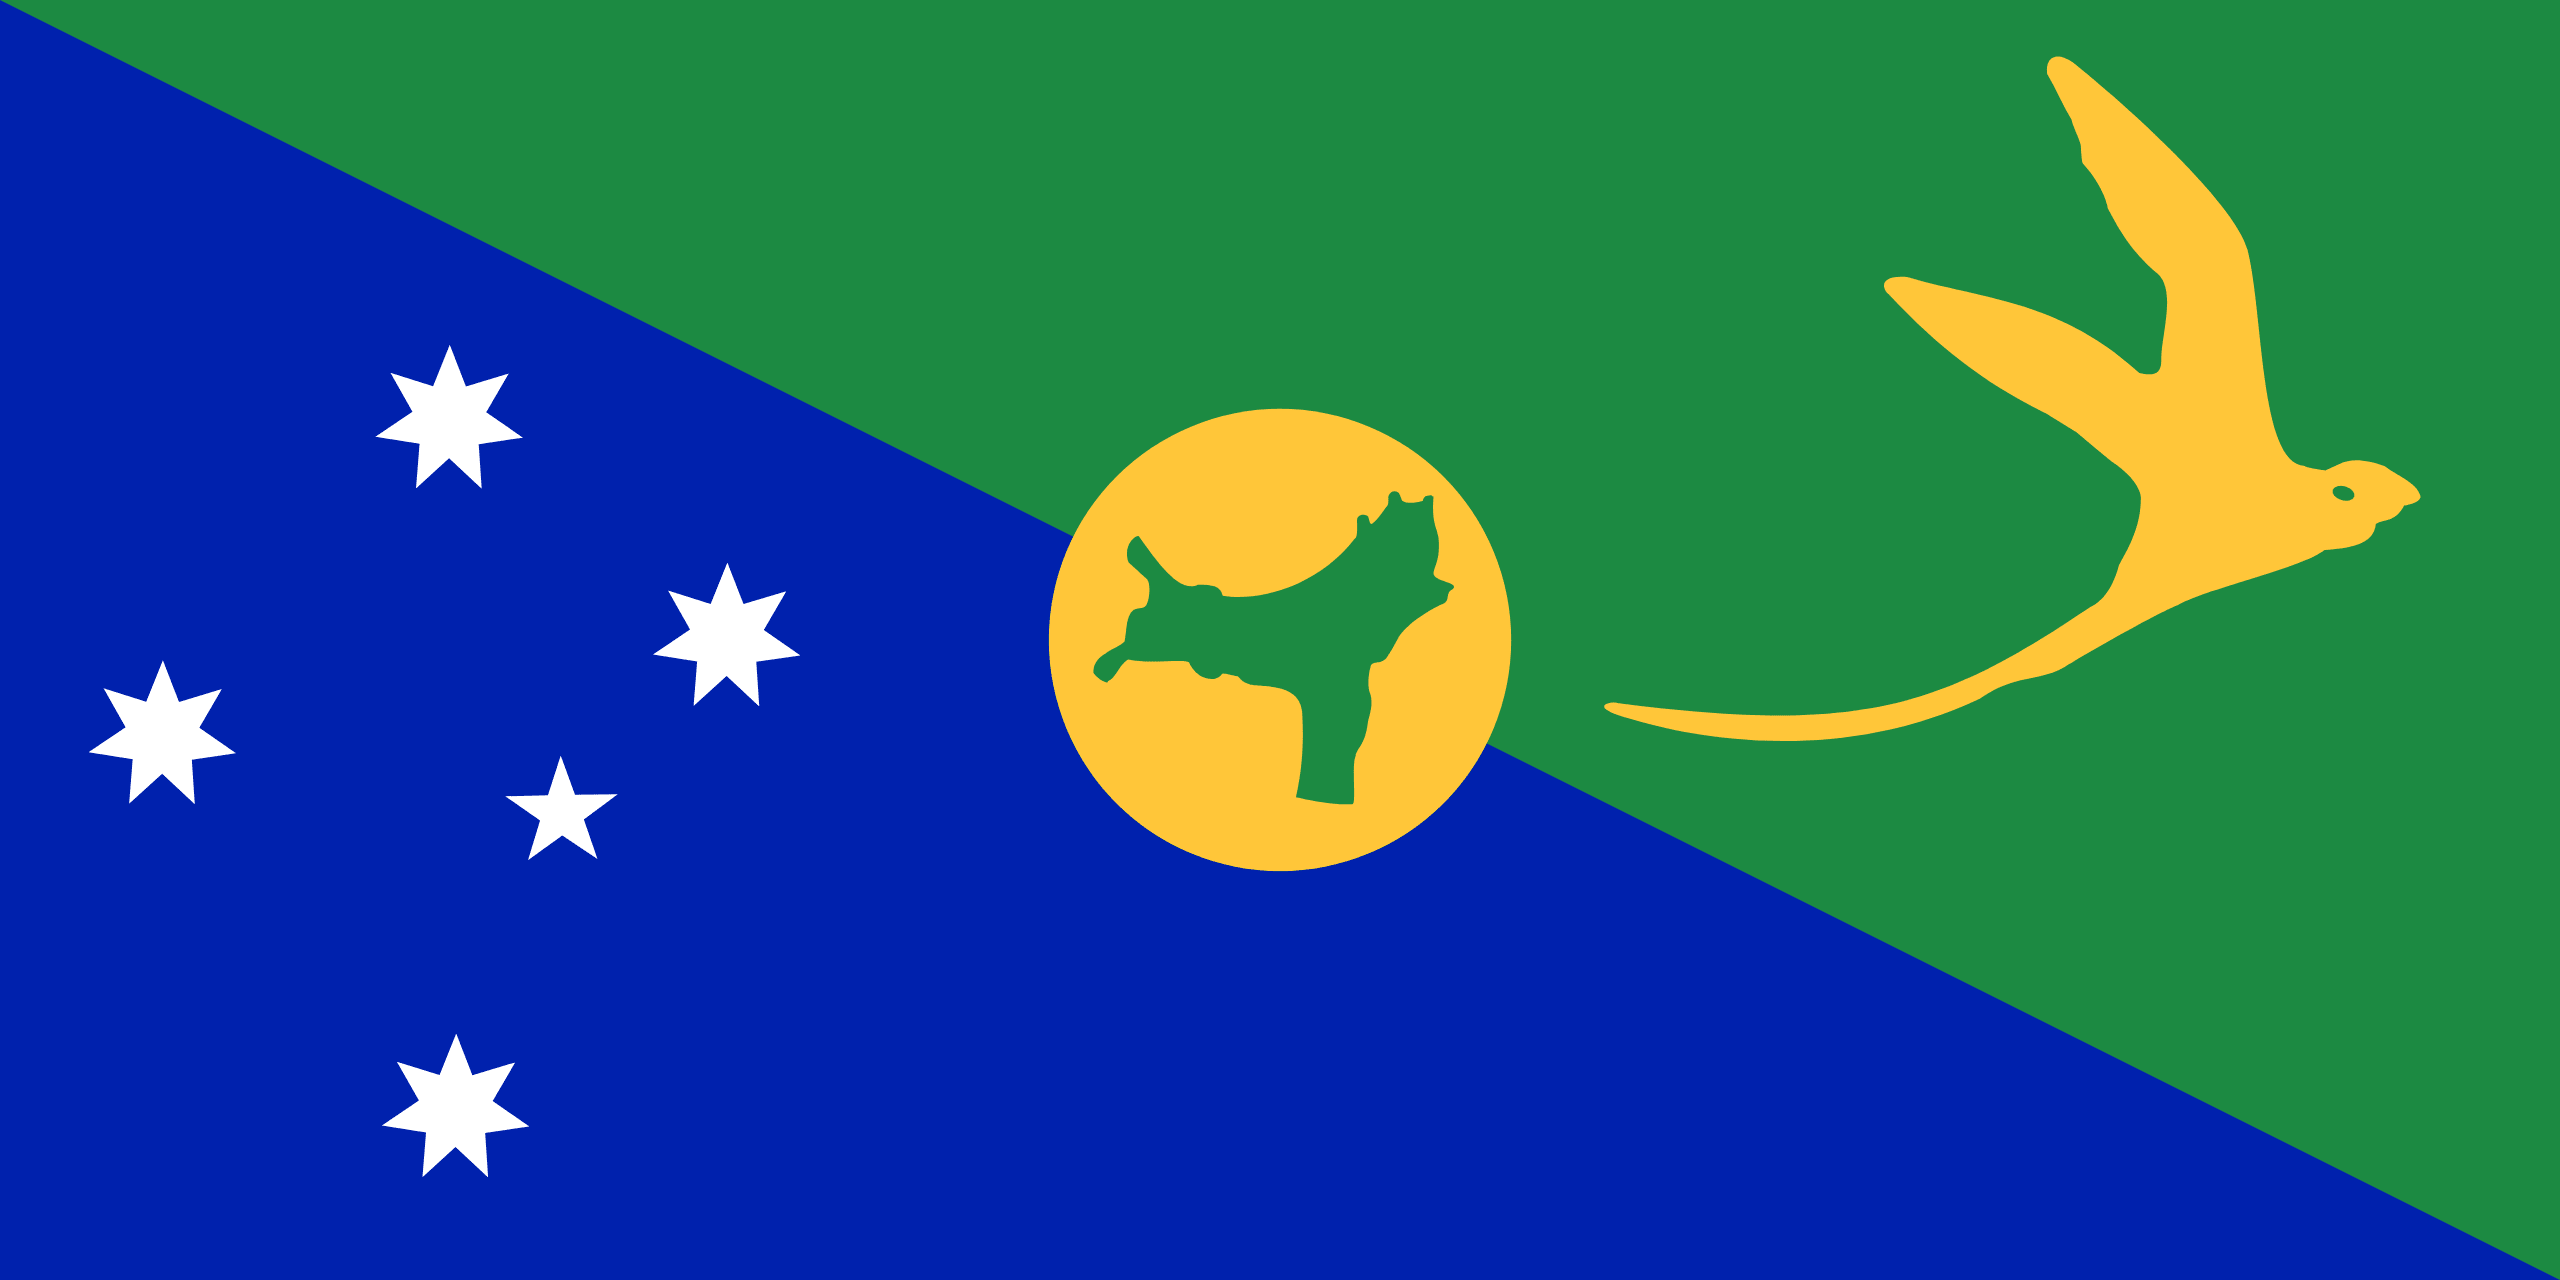

Cocos Islands


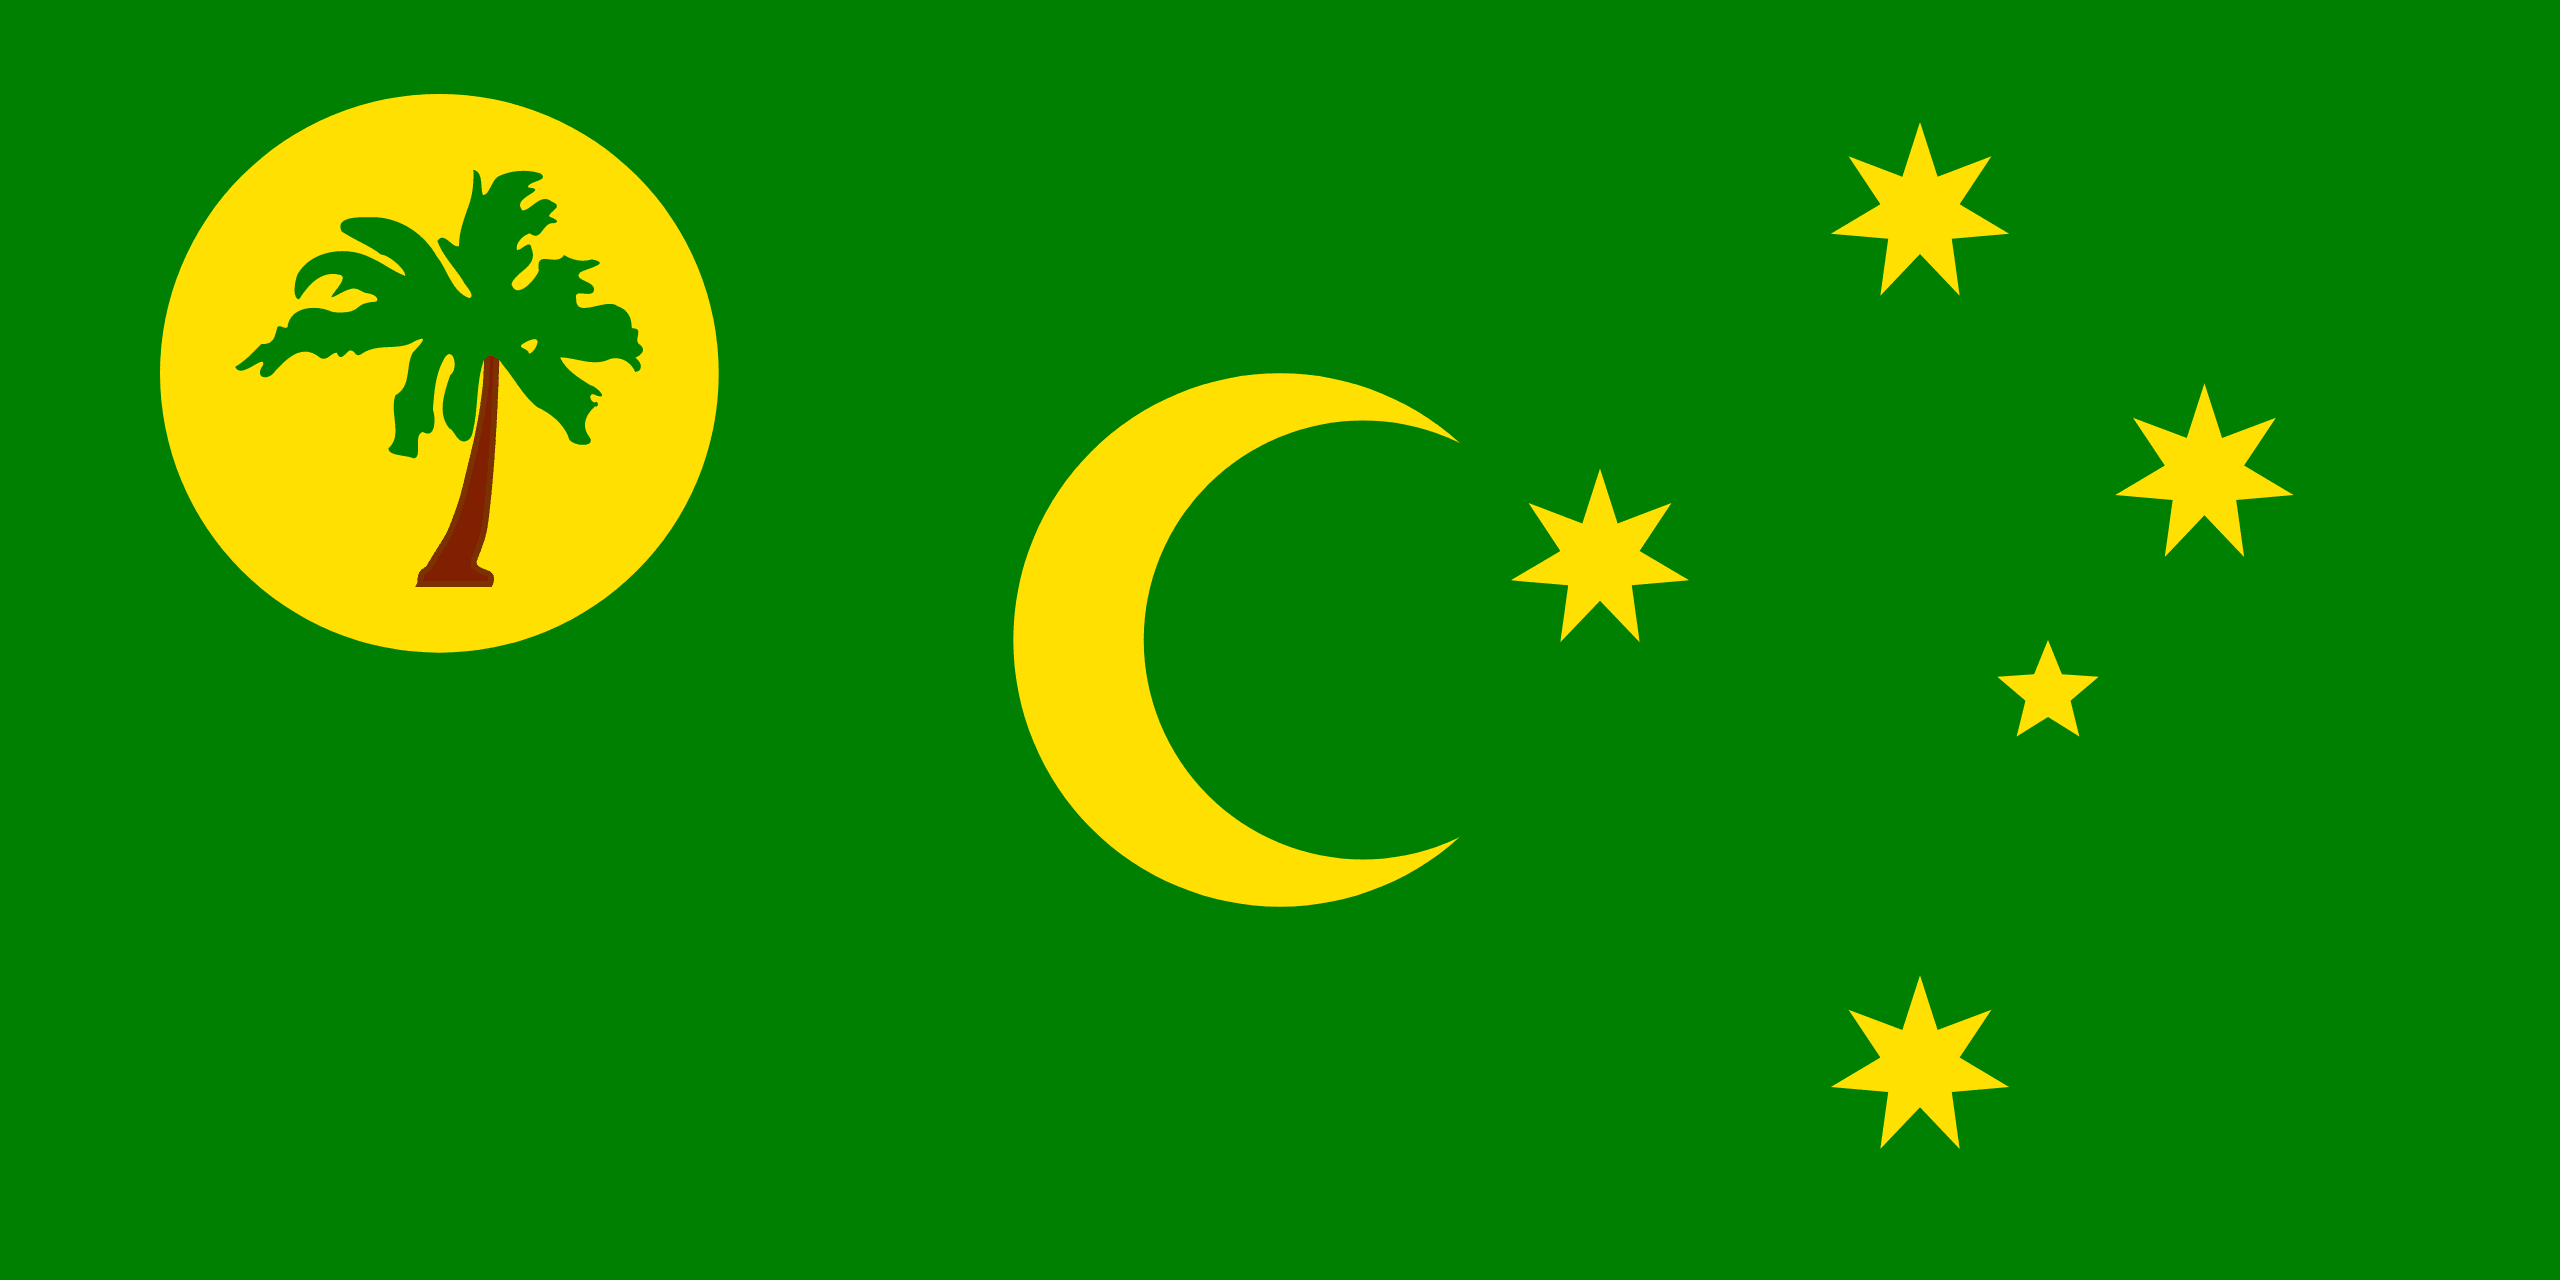

Colombia


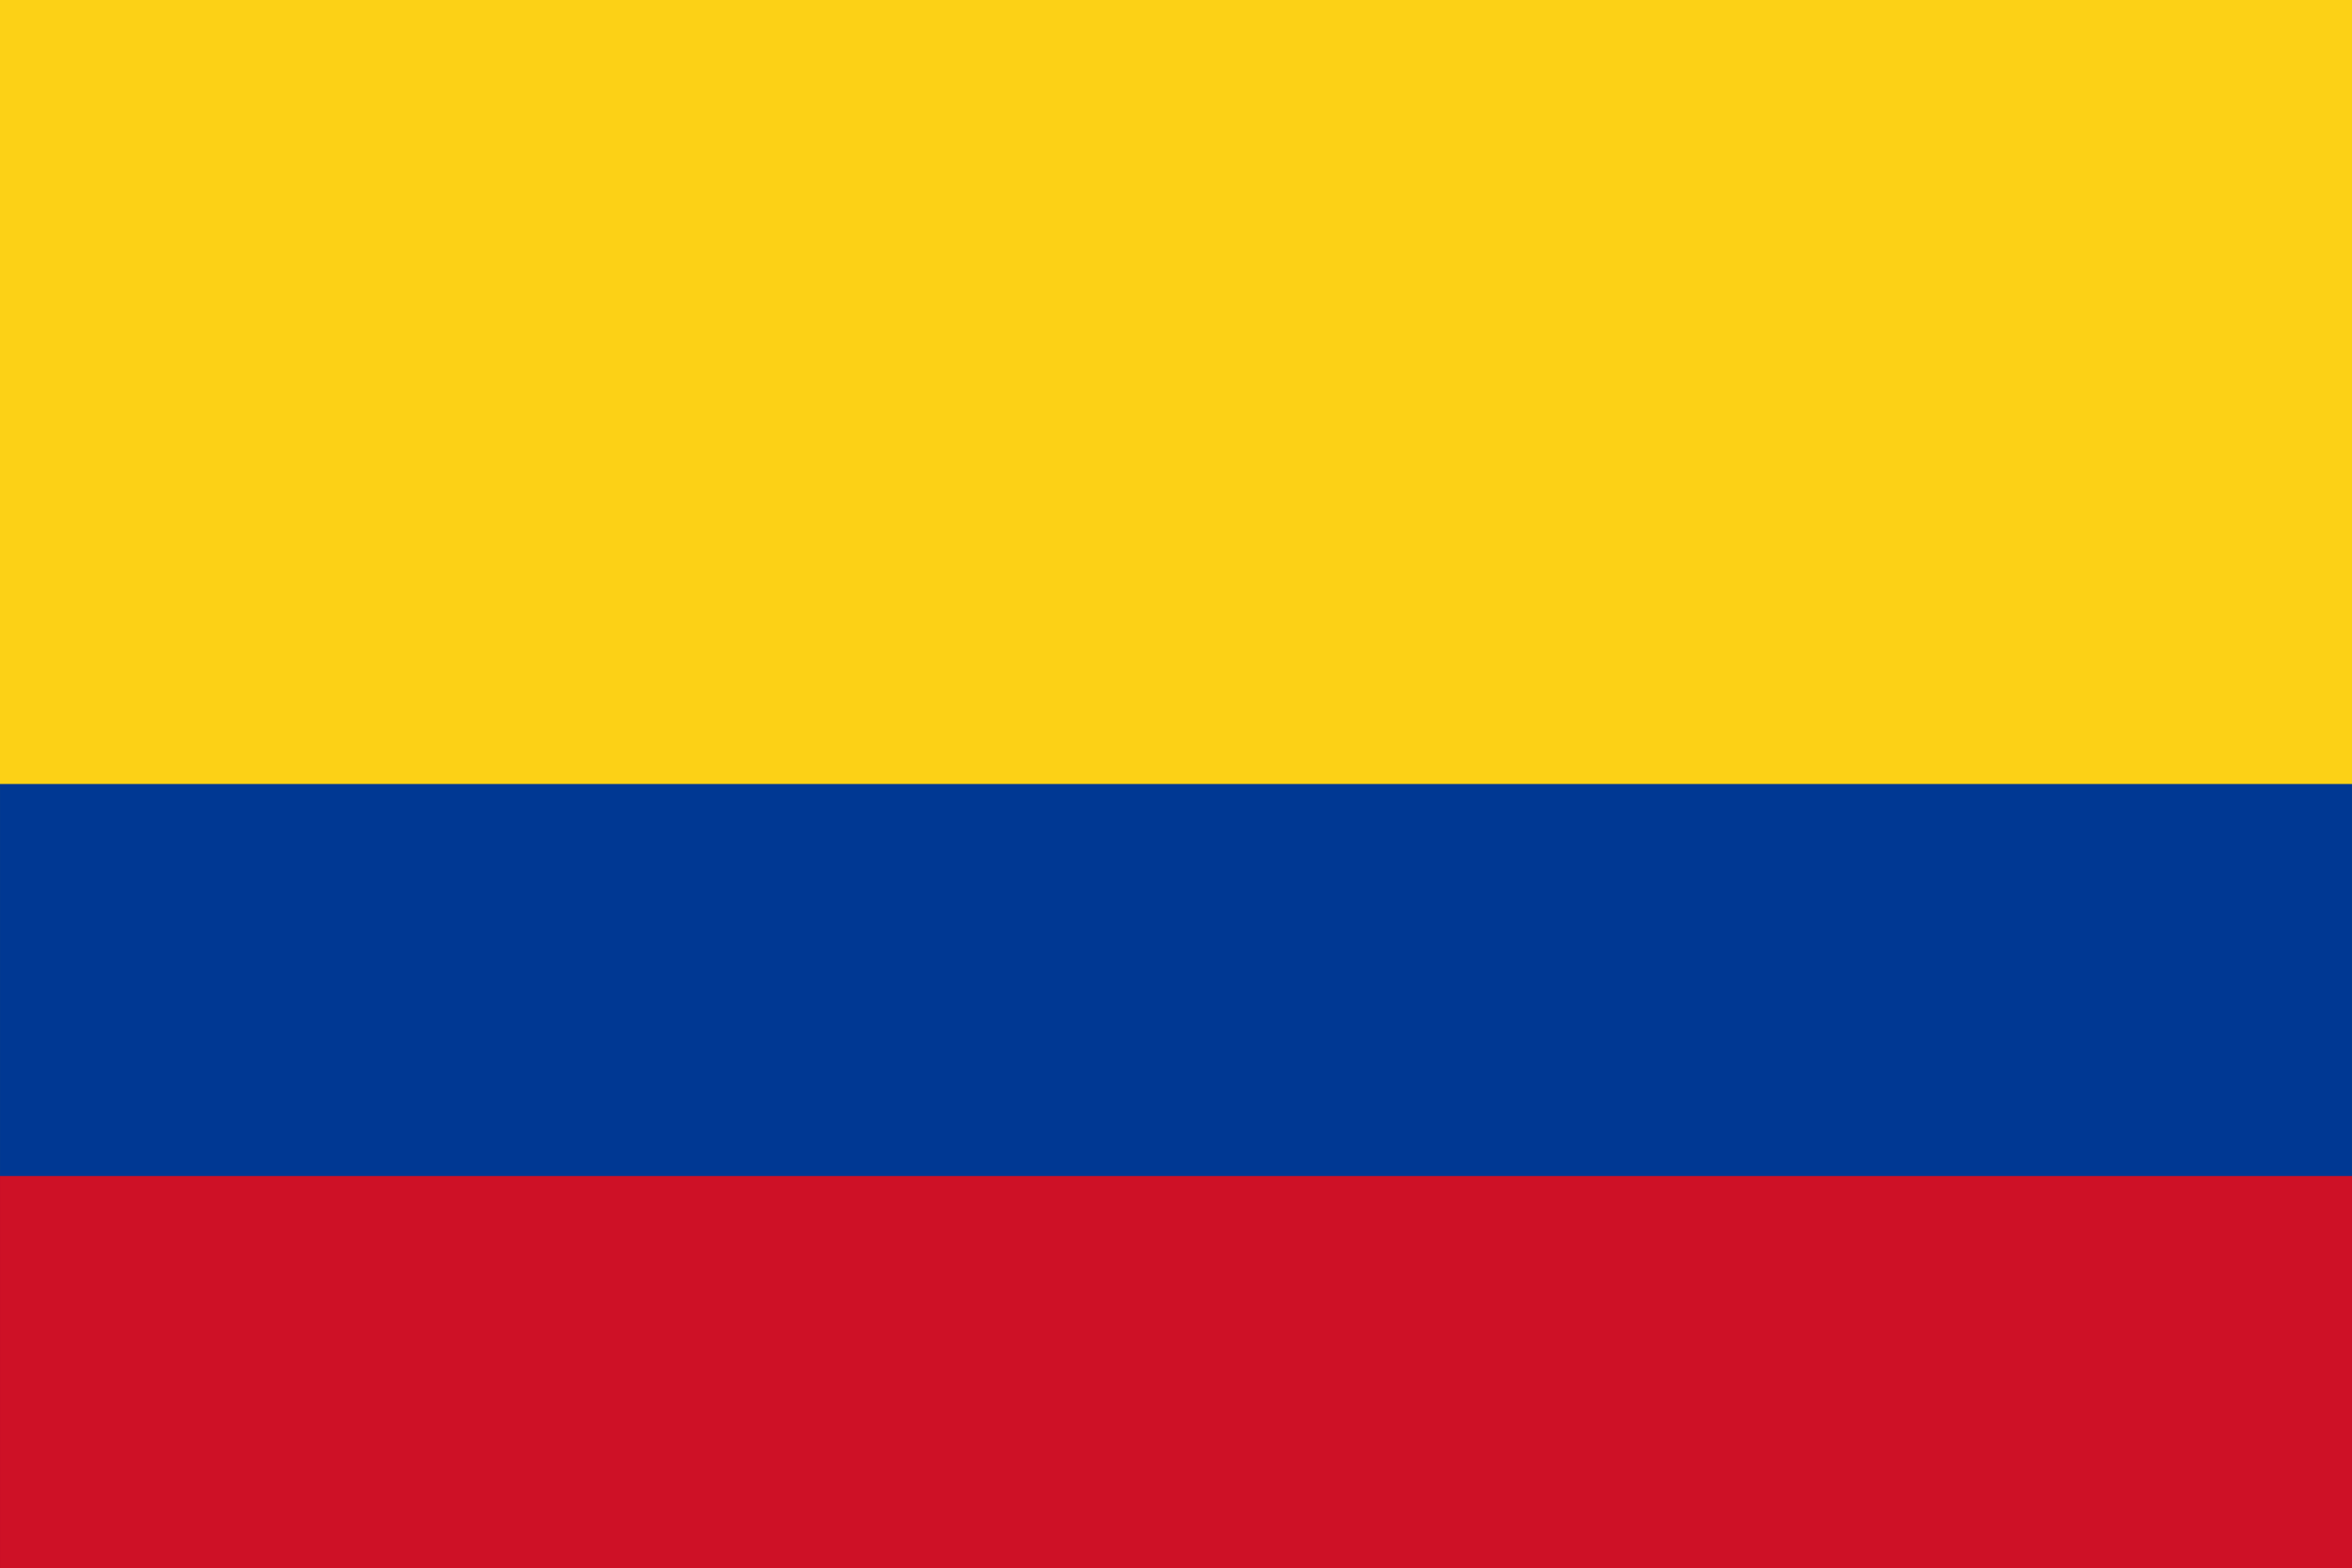

Comoros


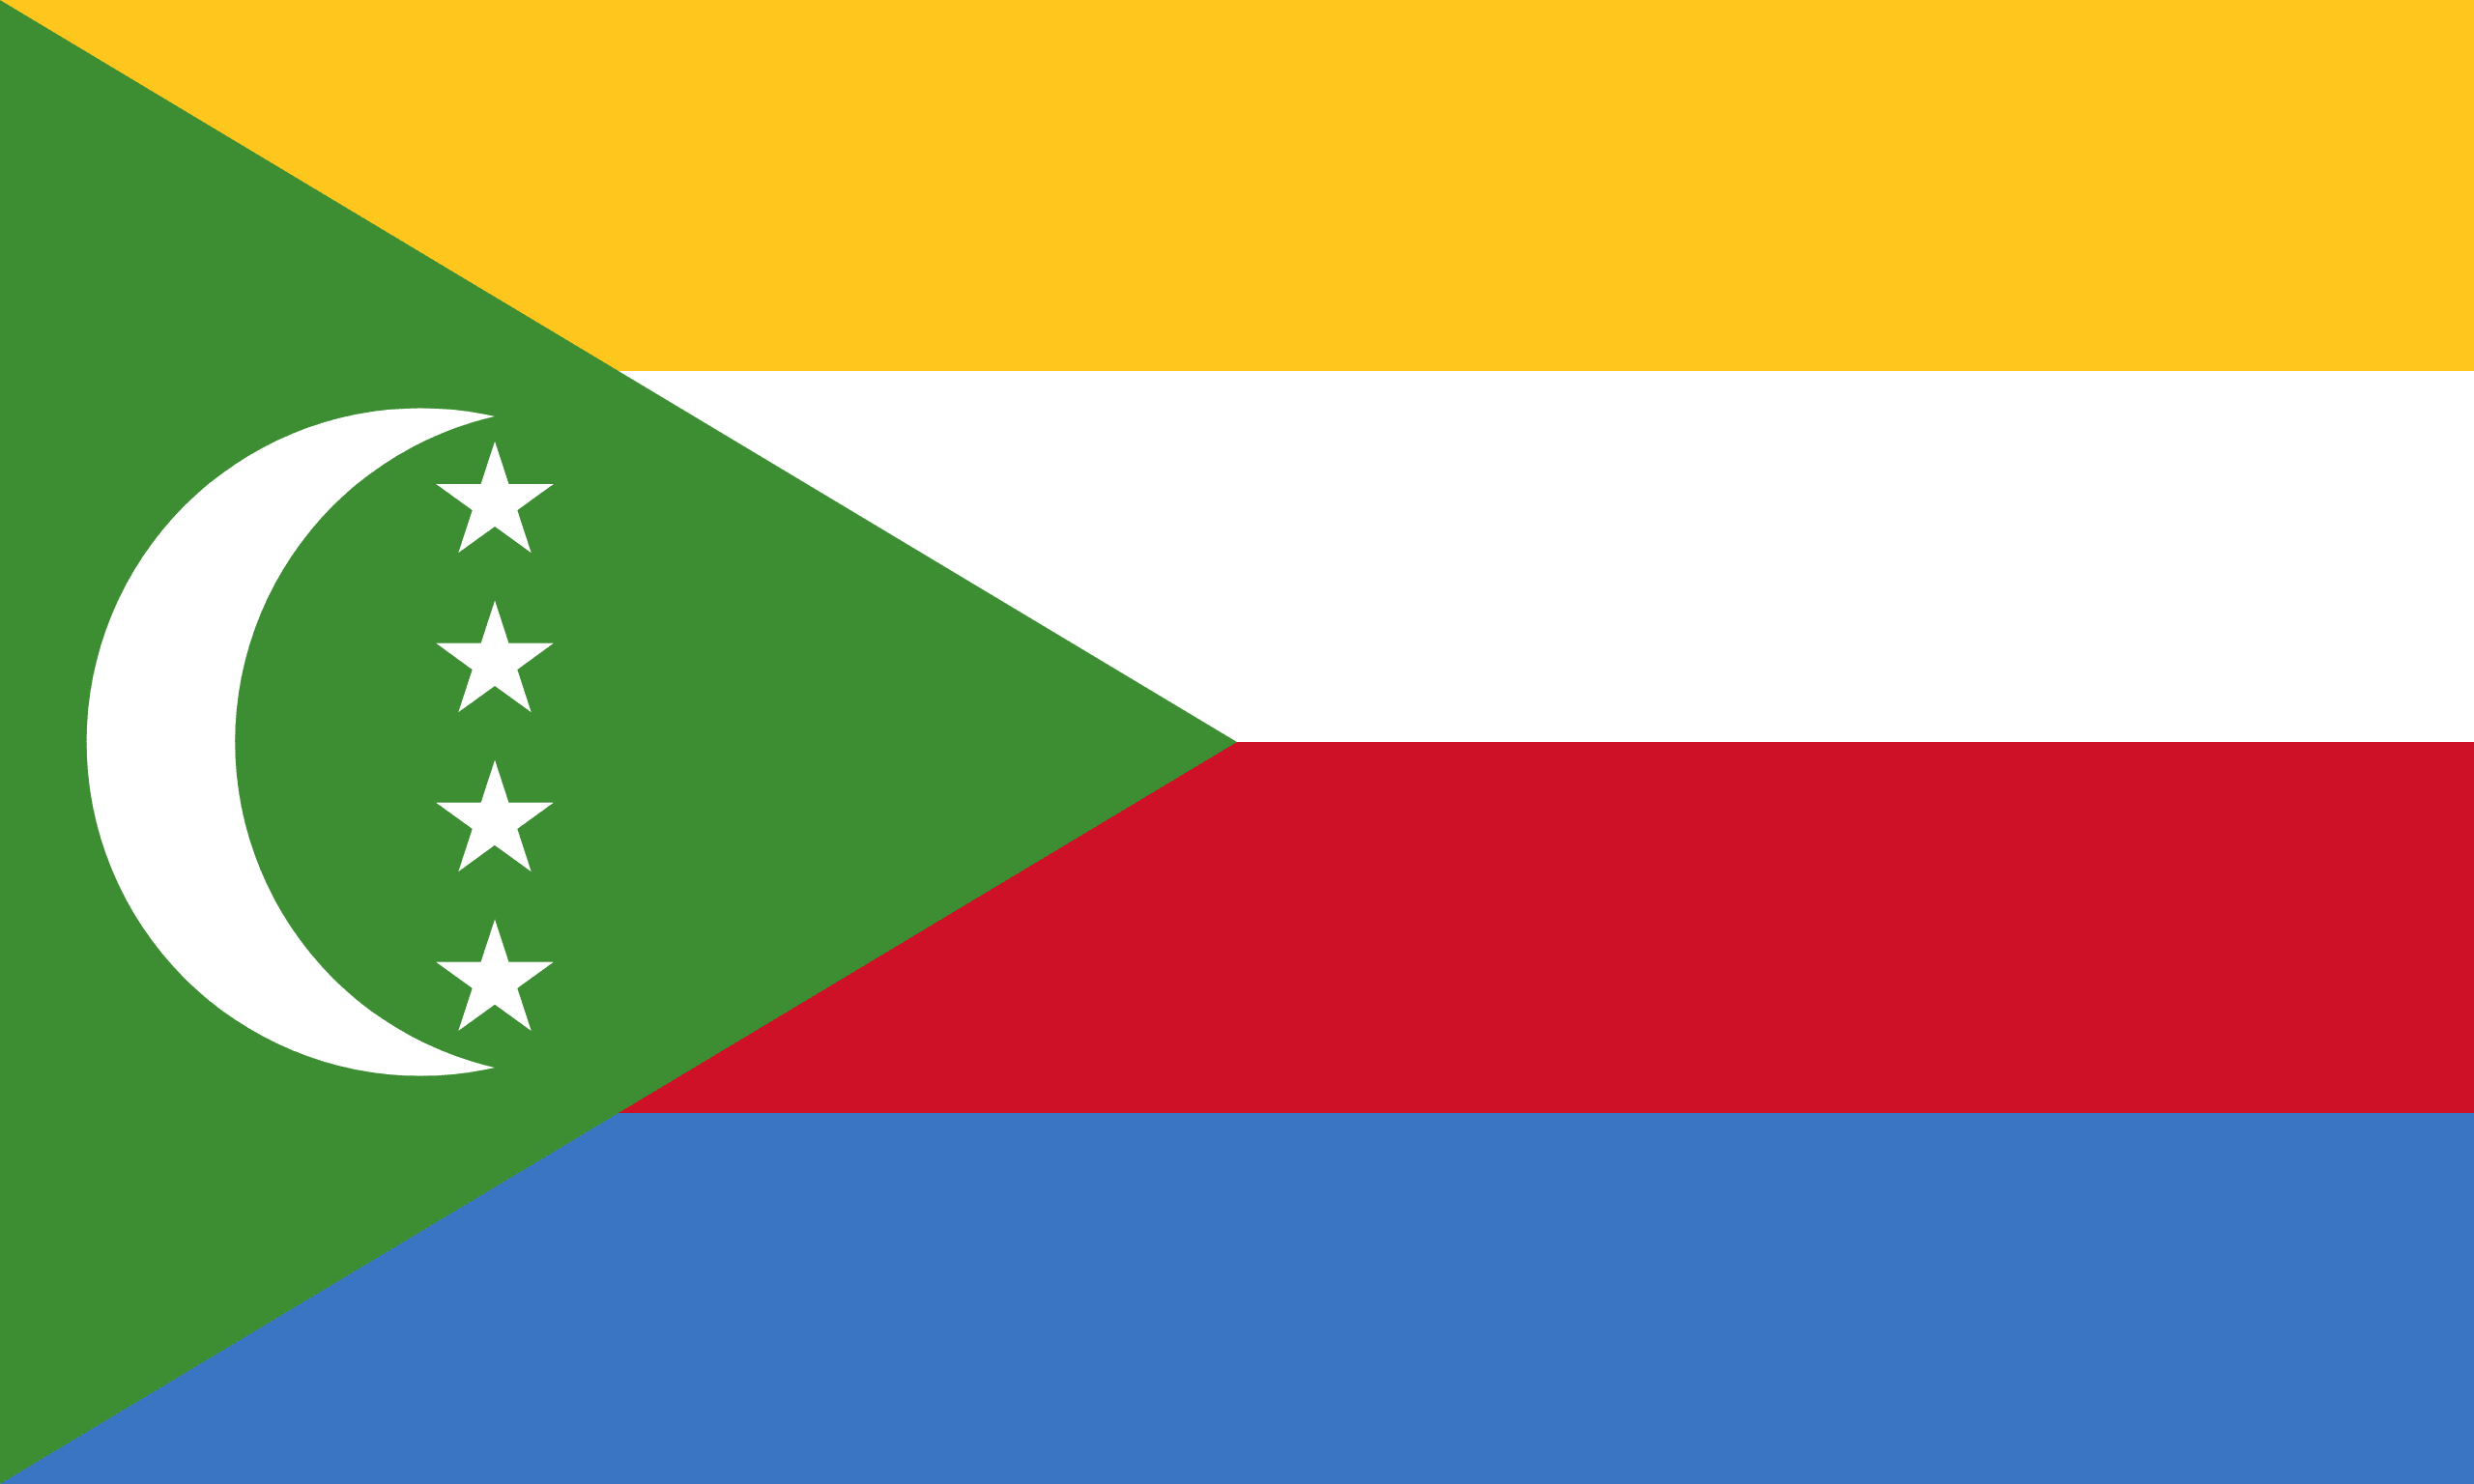

Republic of the Congo


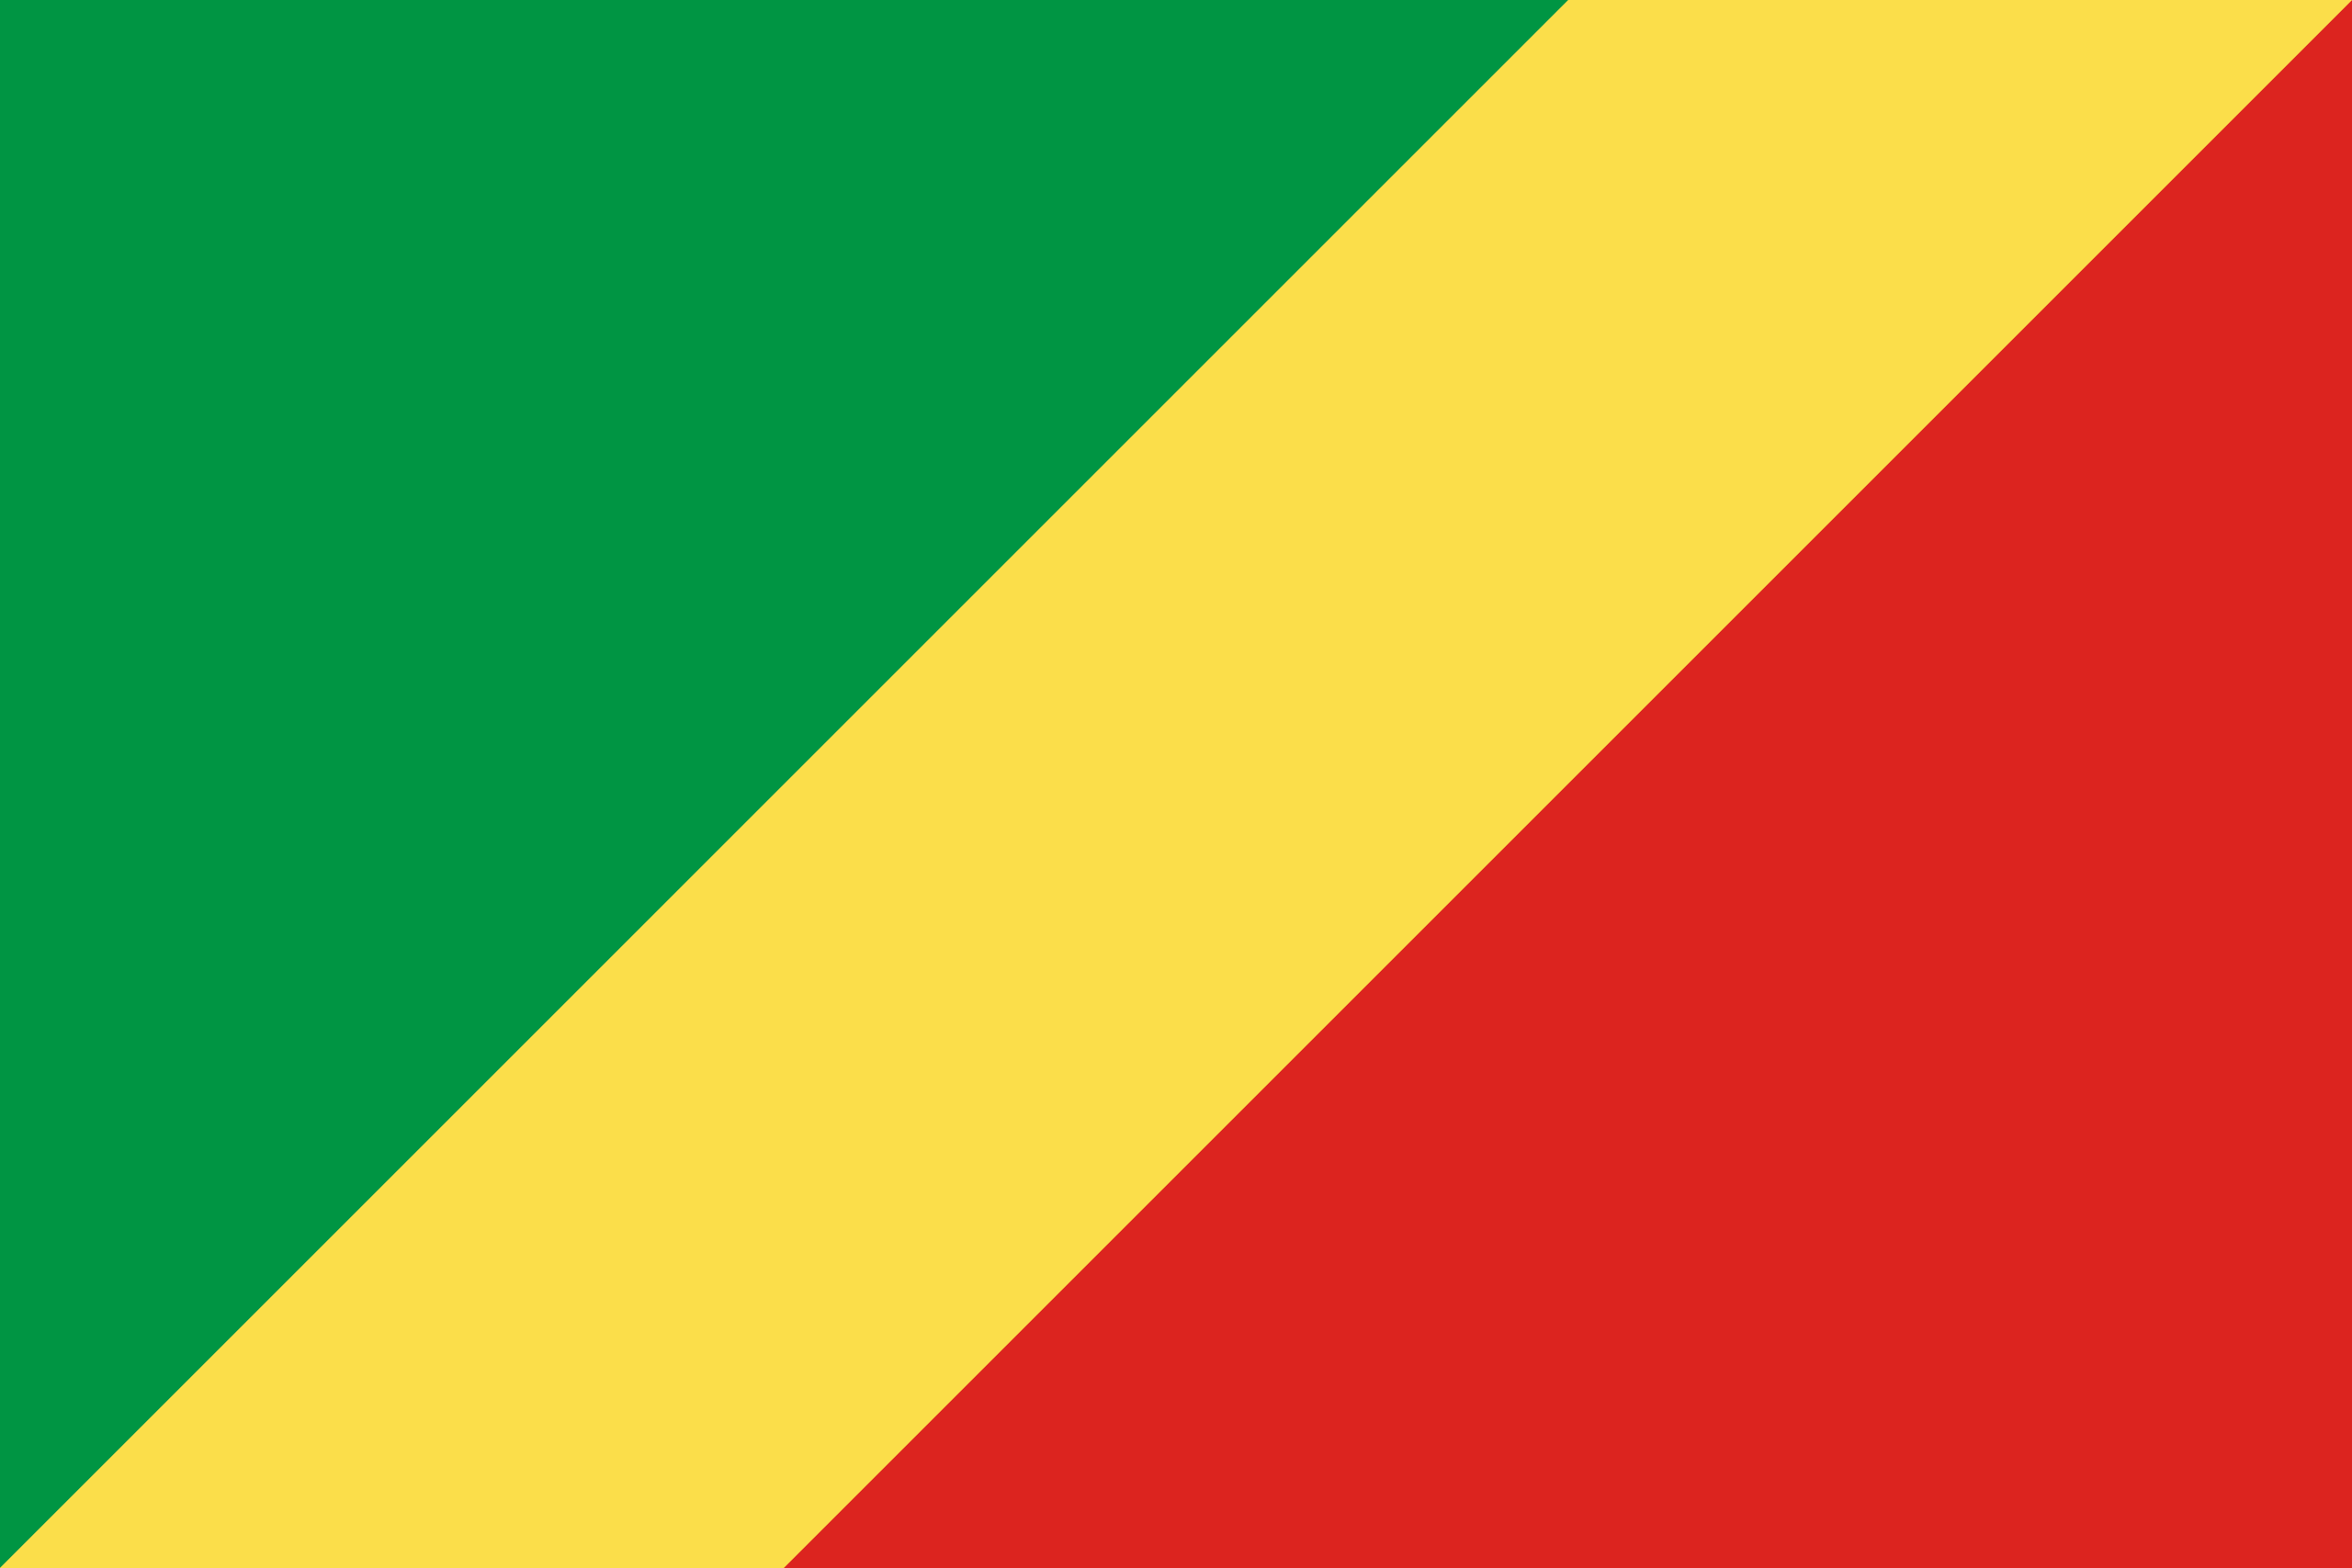

DR Congo


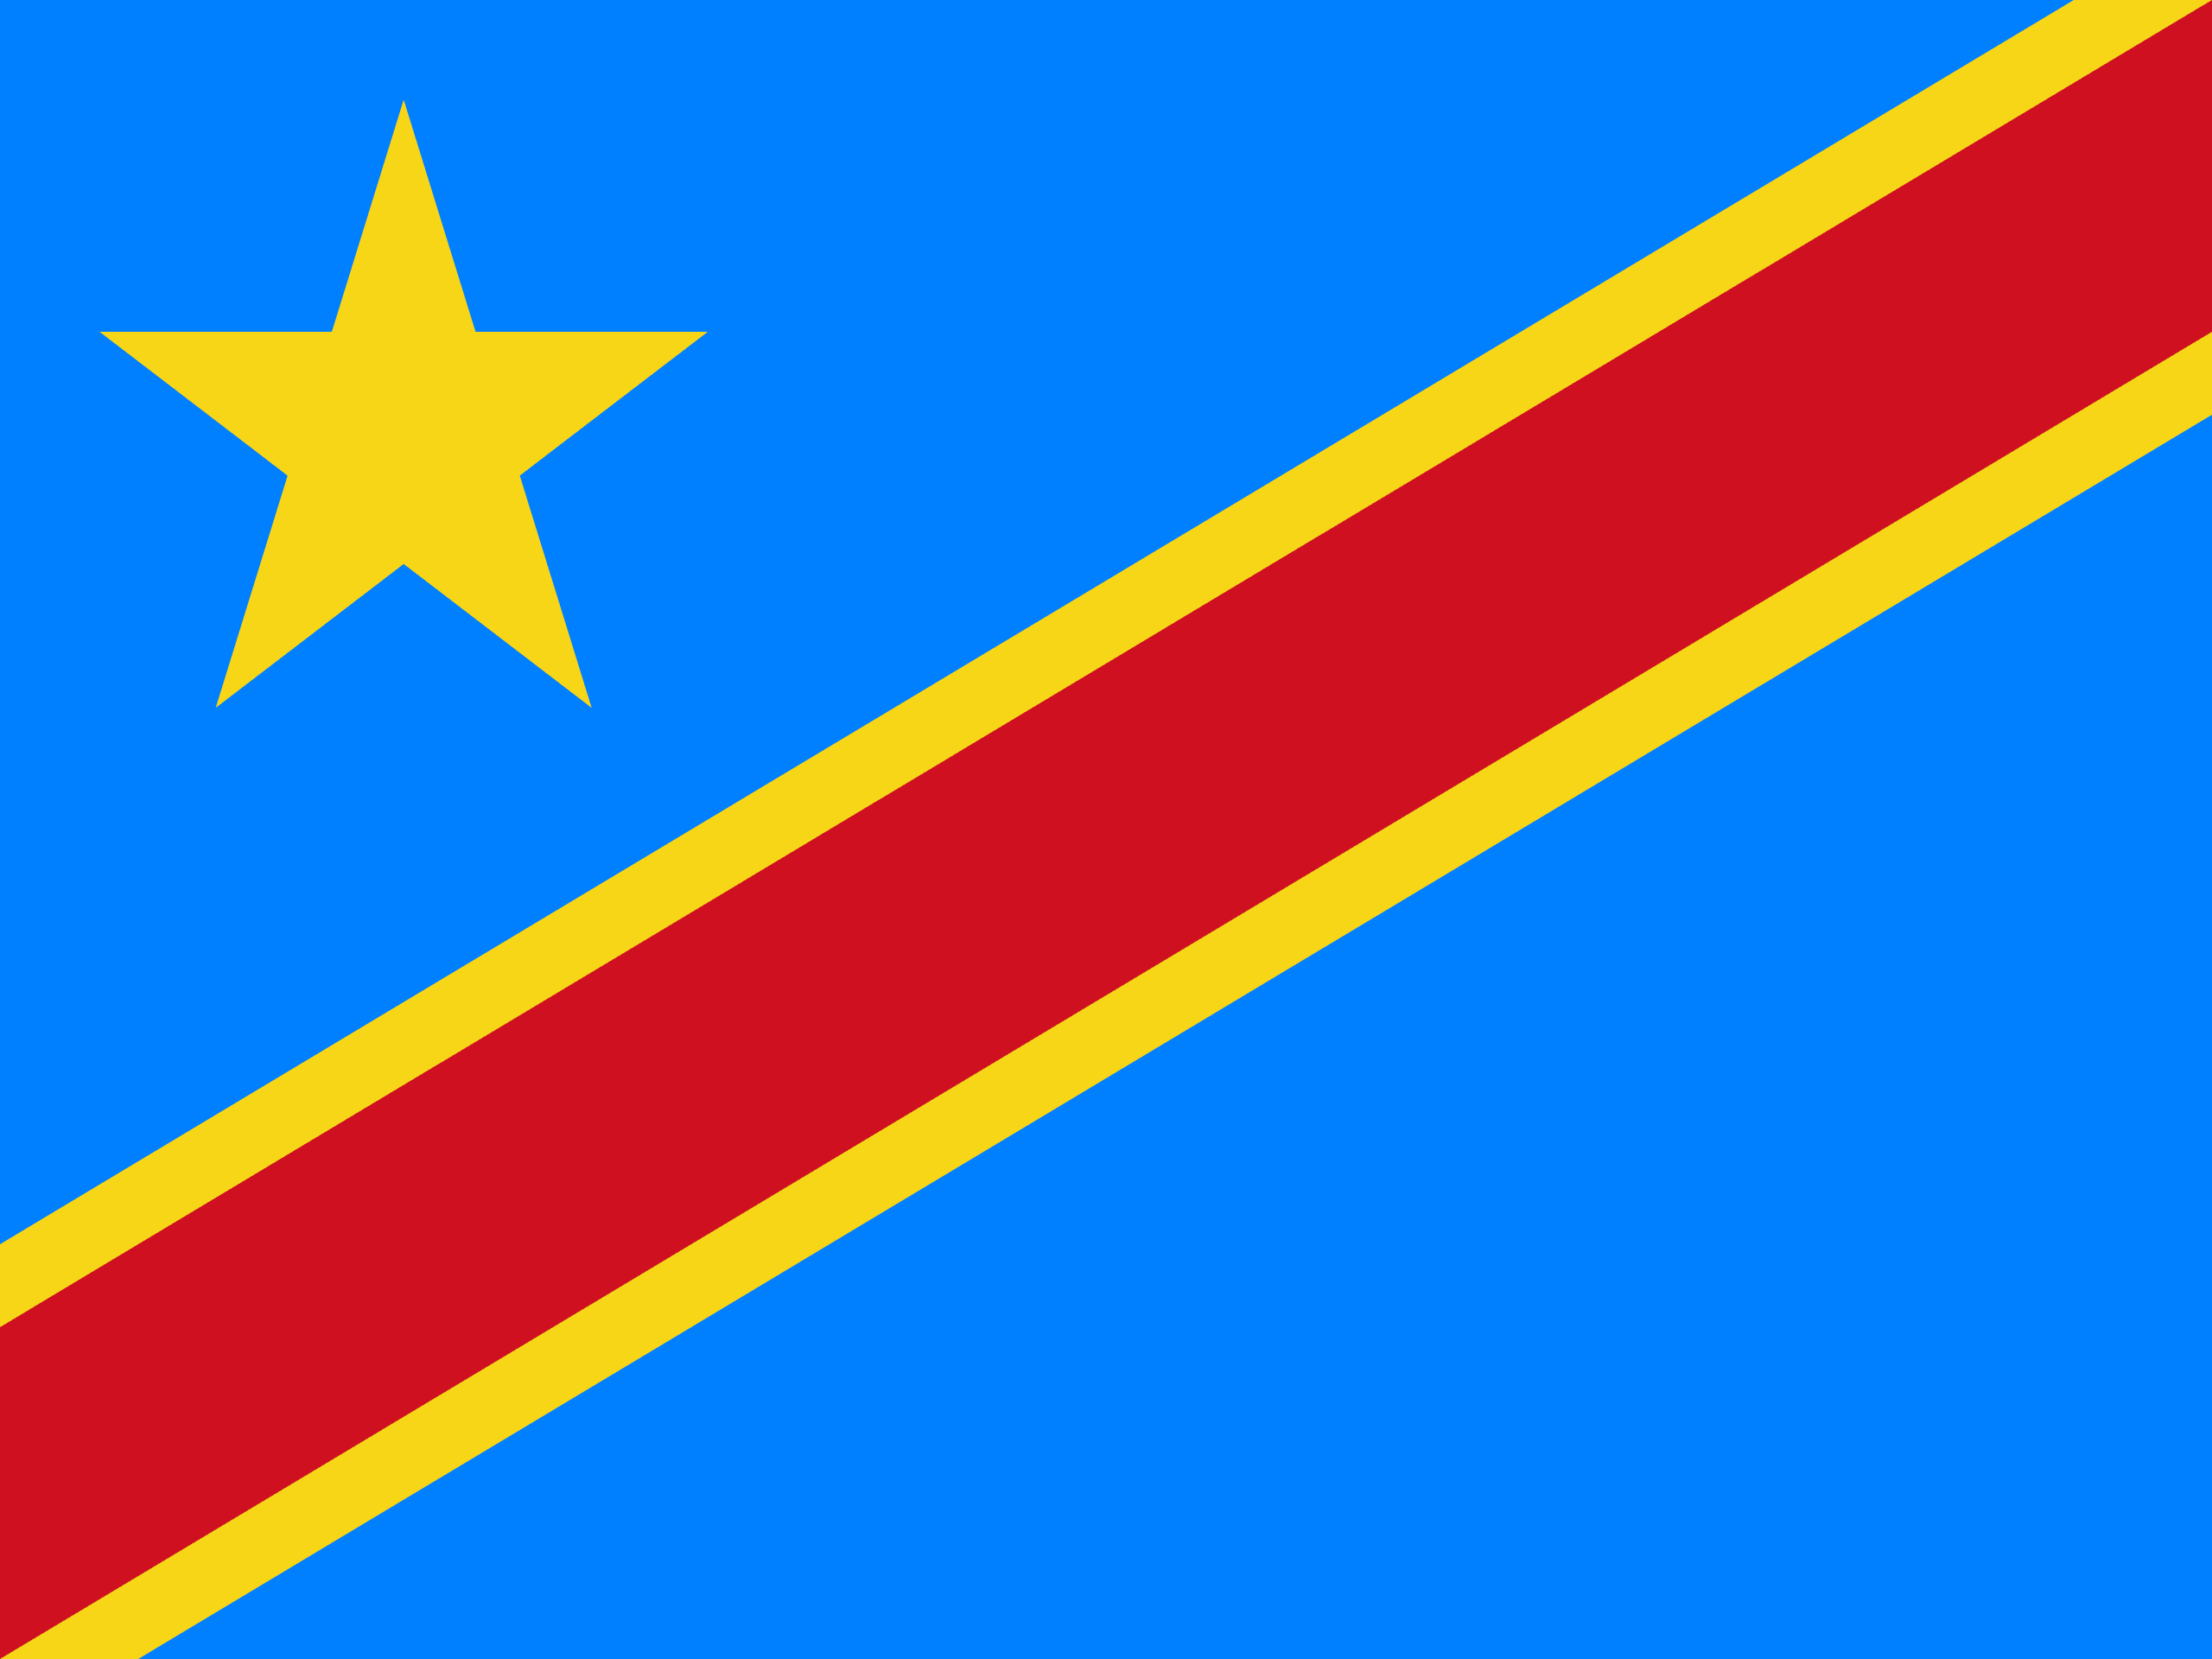

Cook Islands


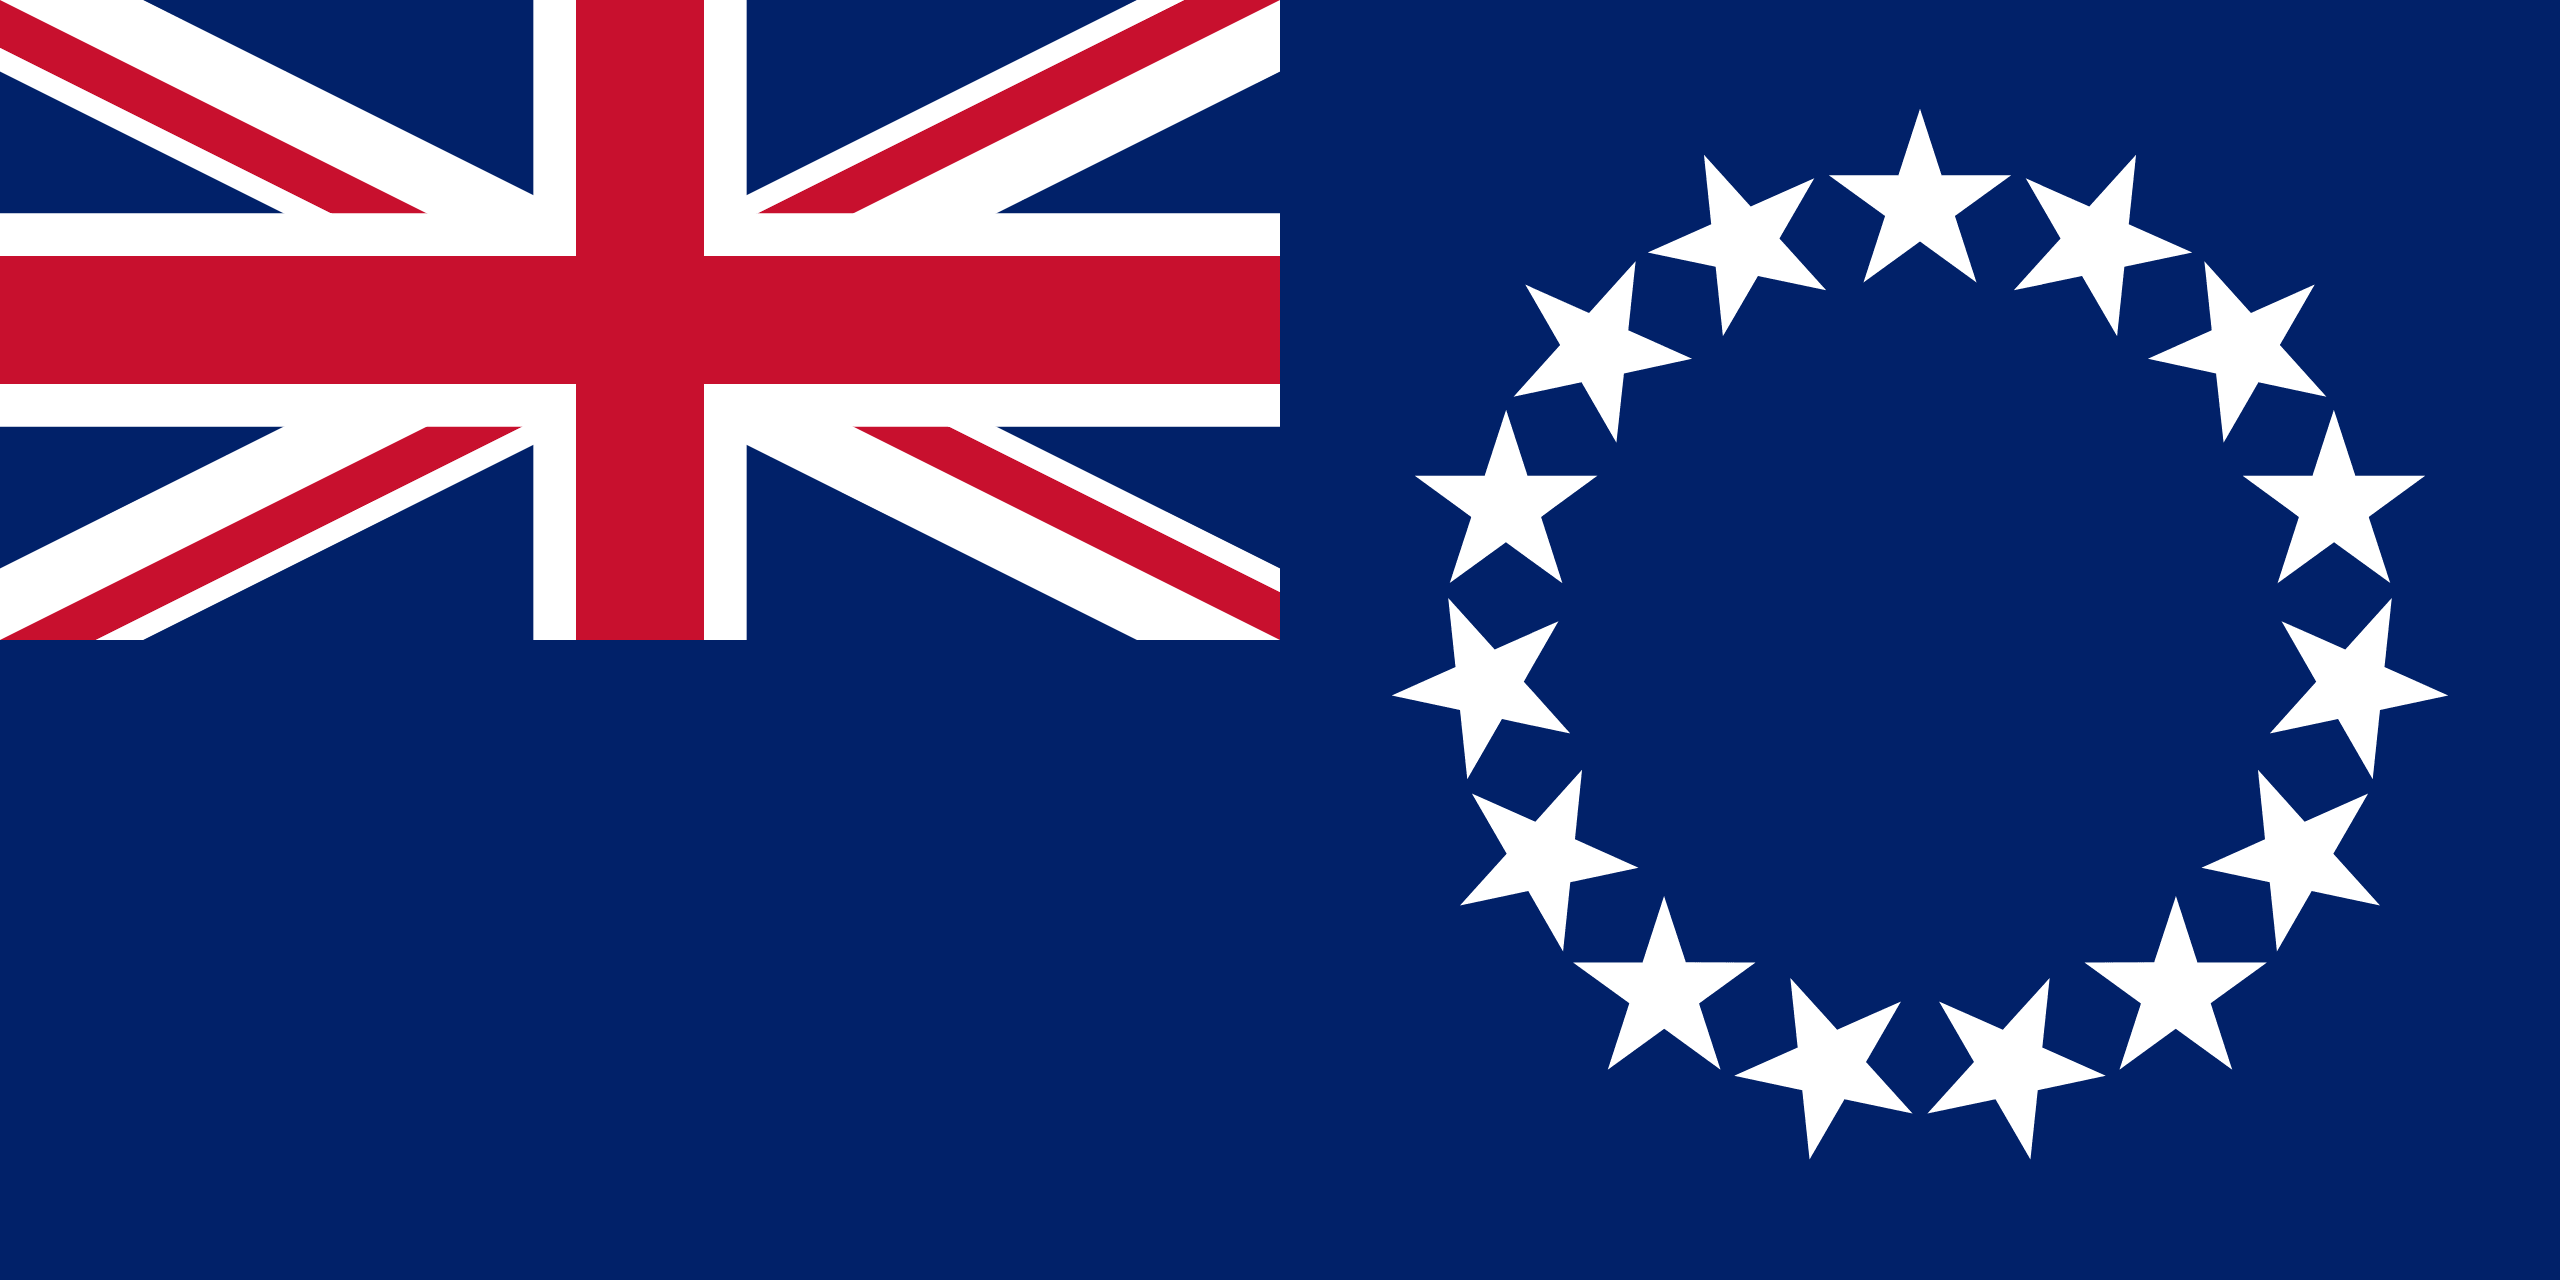

Costa Rica


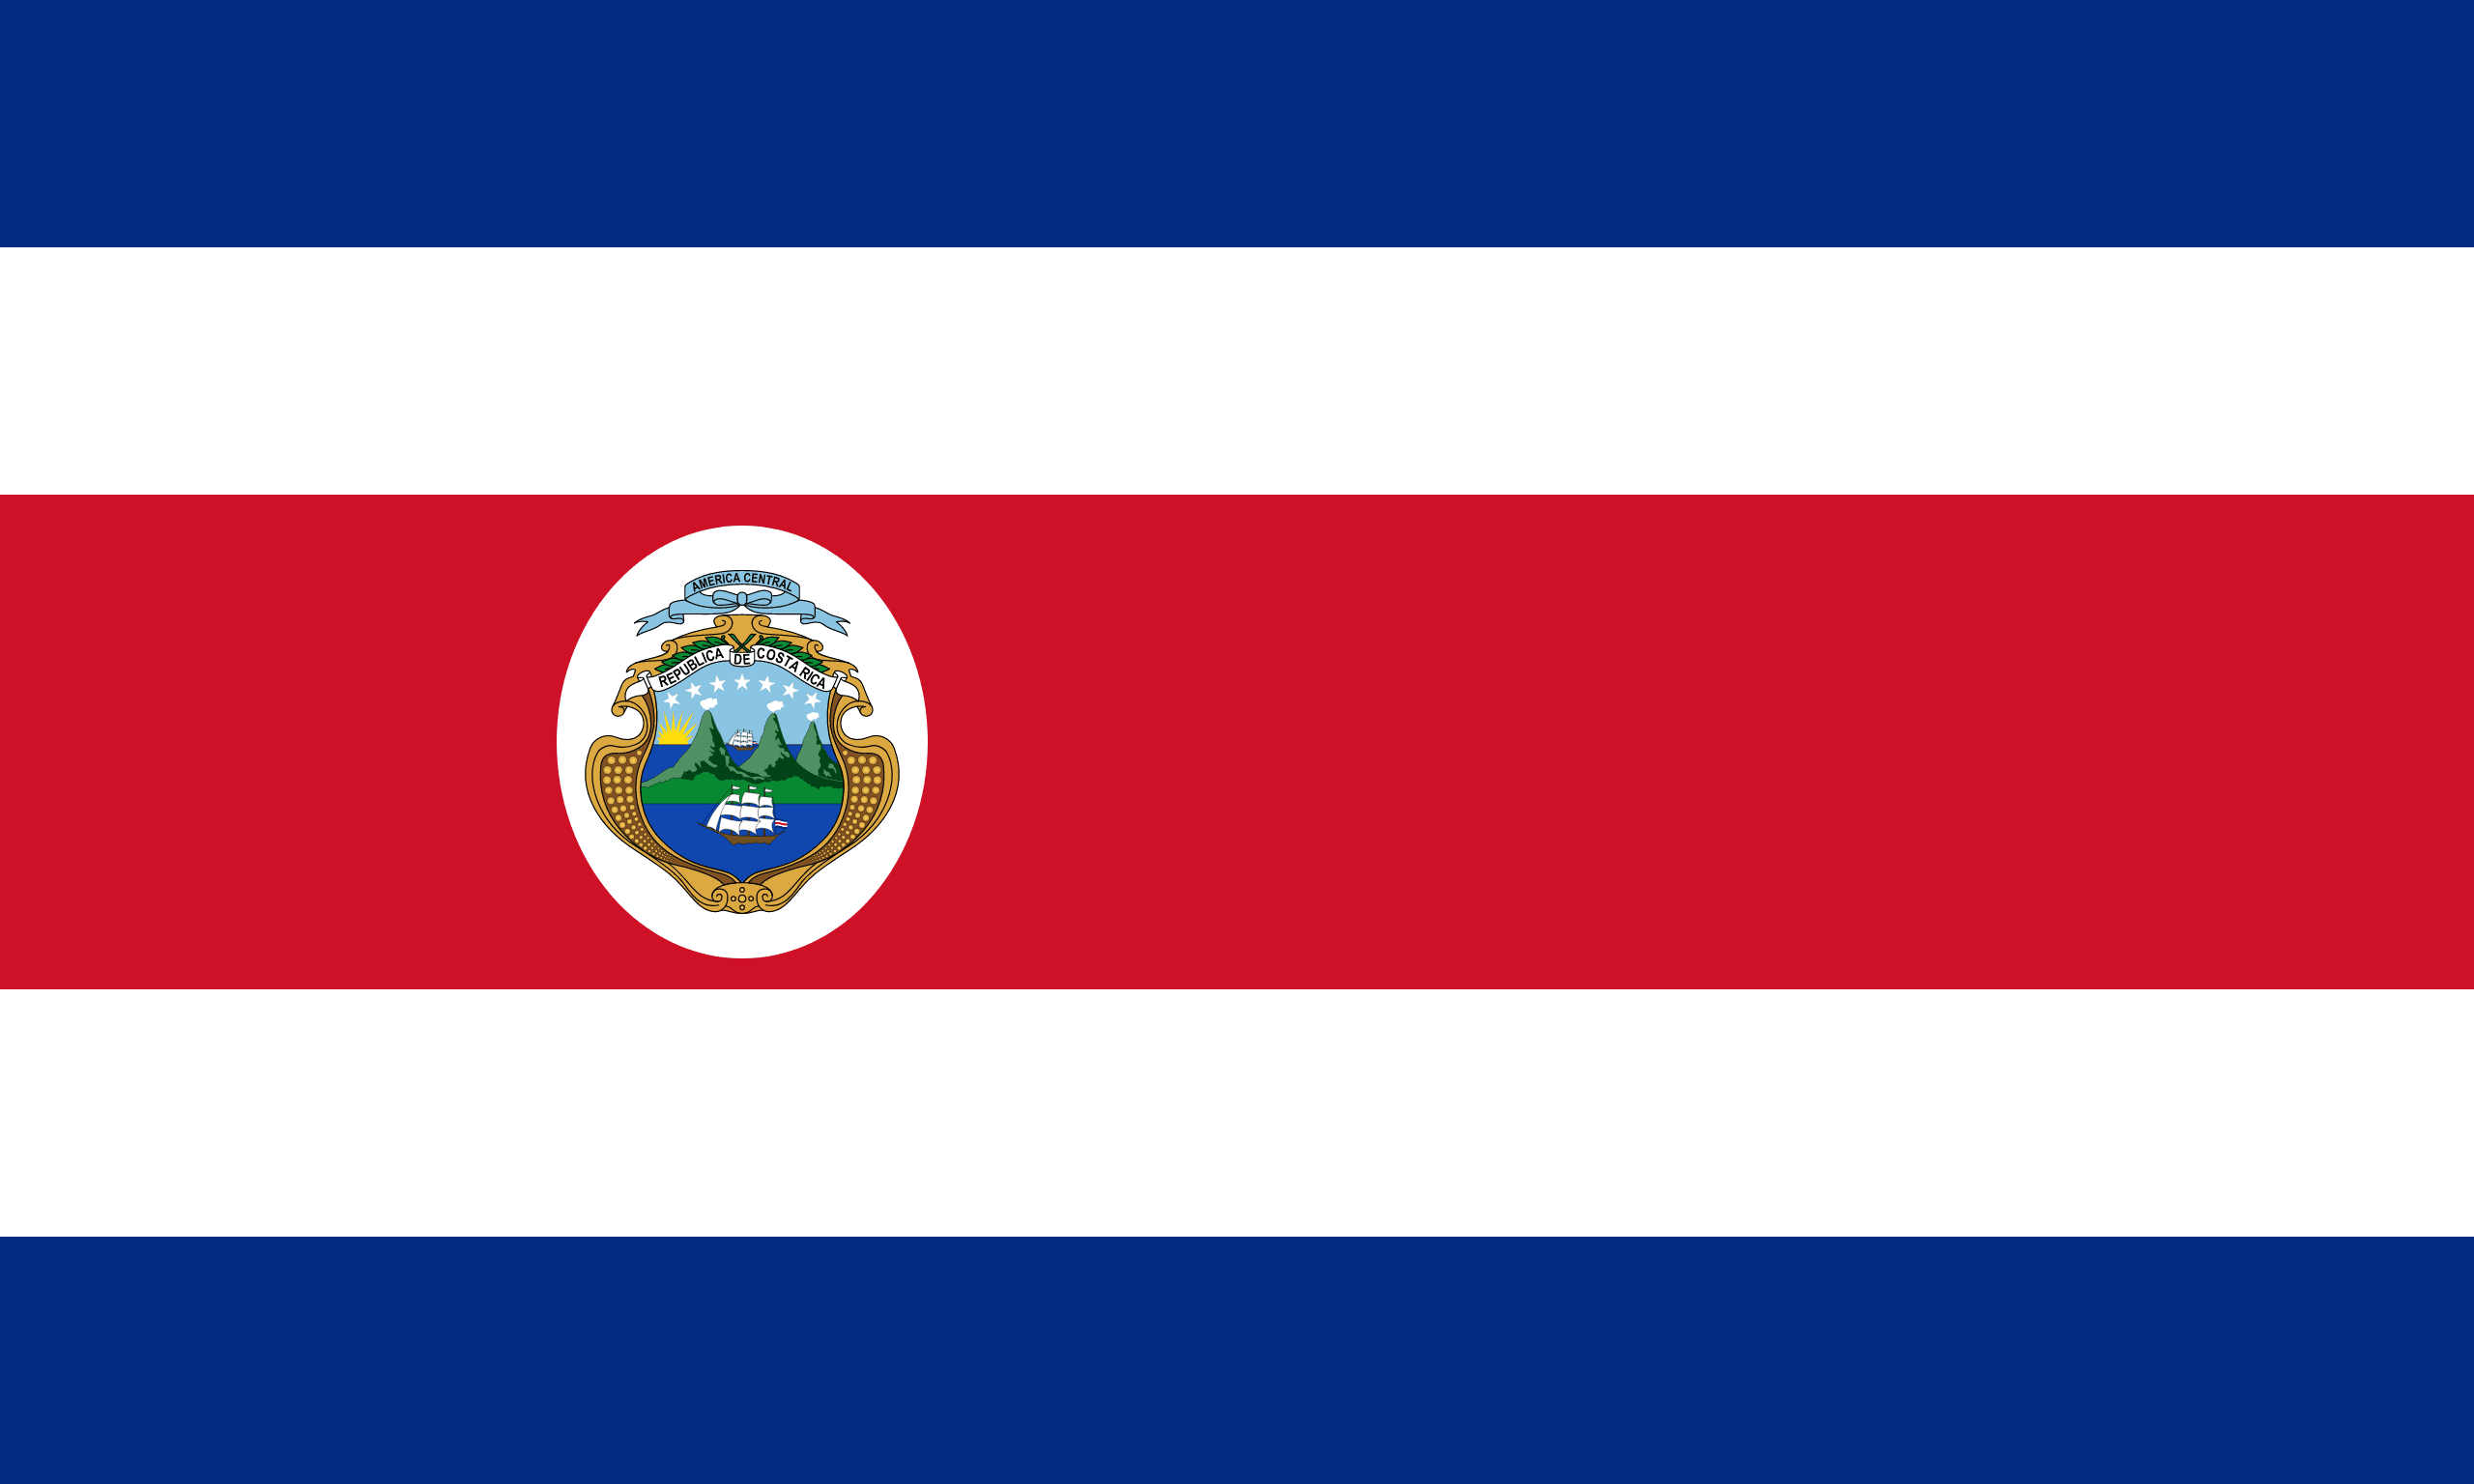

Côte d'Ivoire


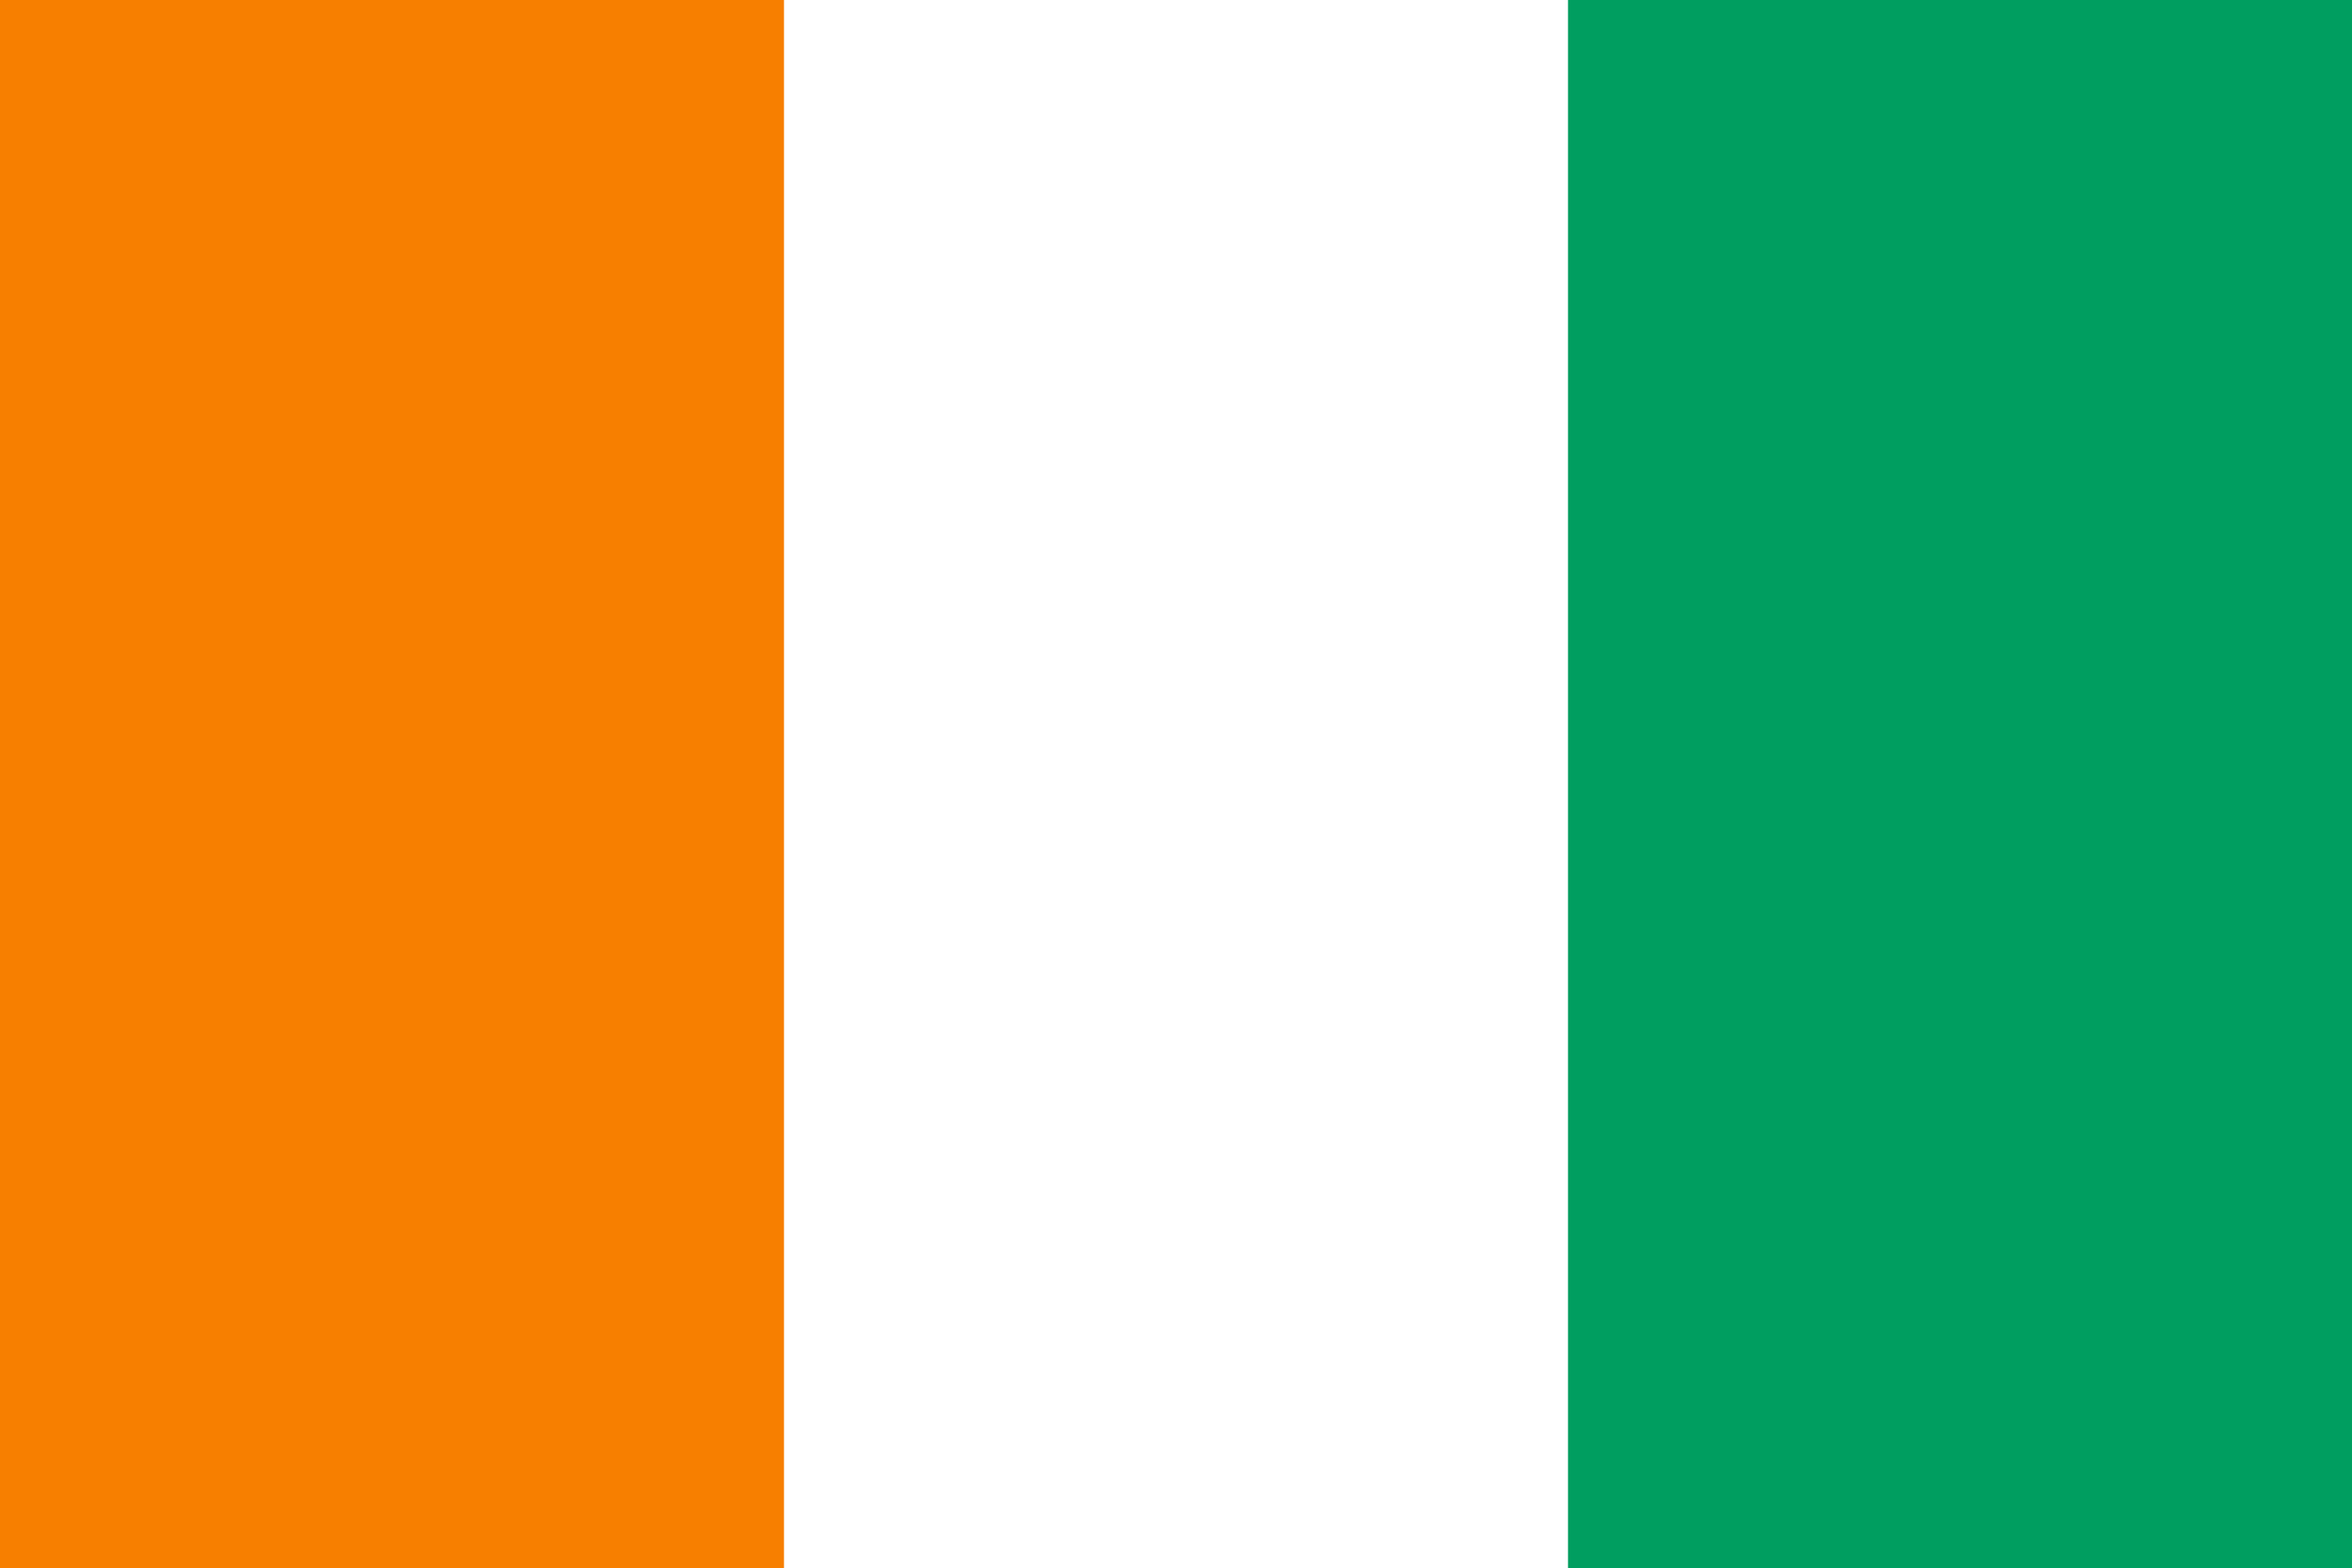

Croatia


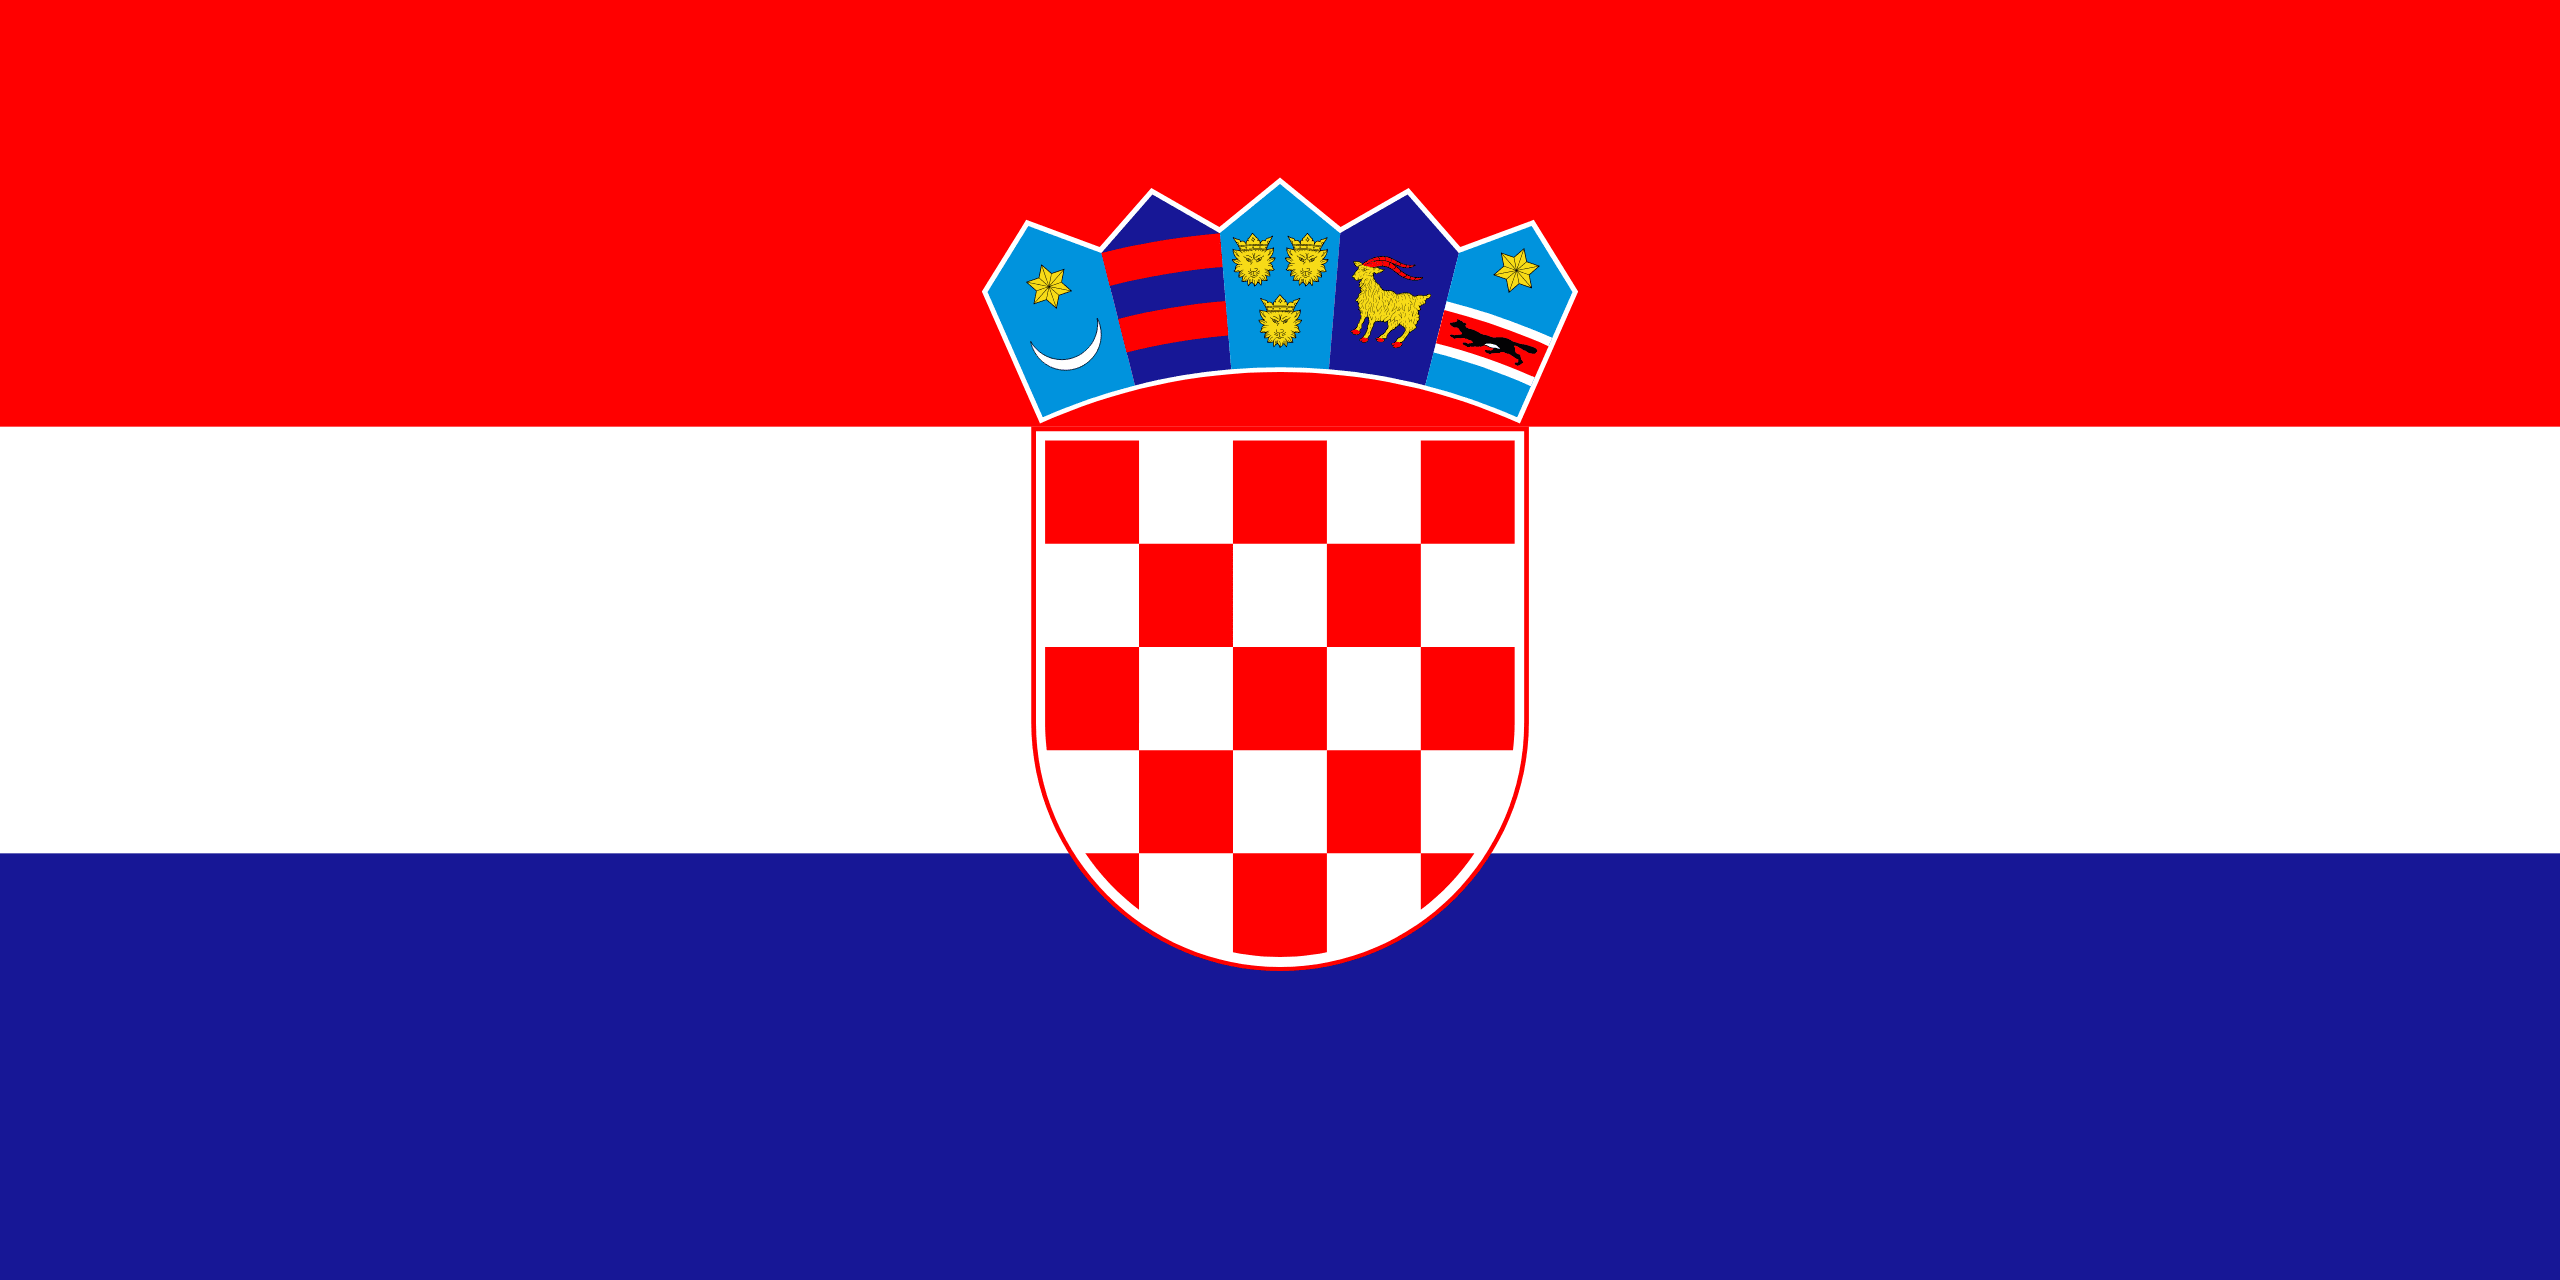

Cuba


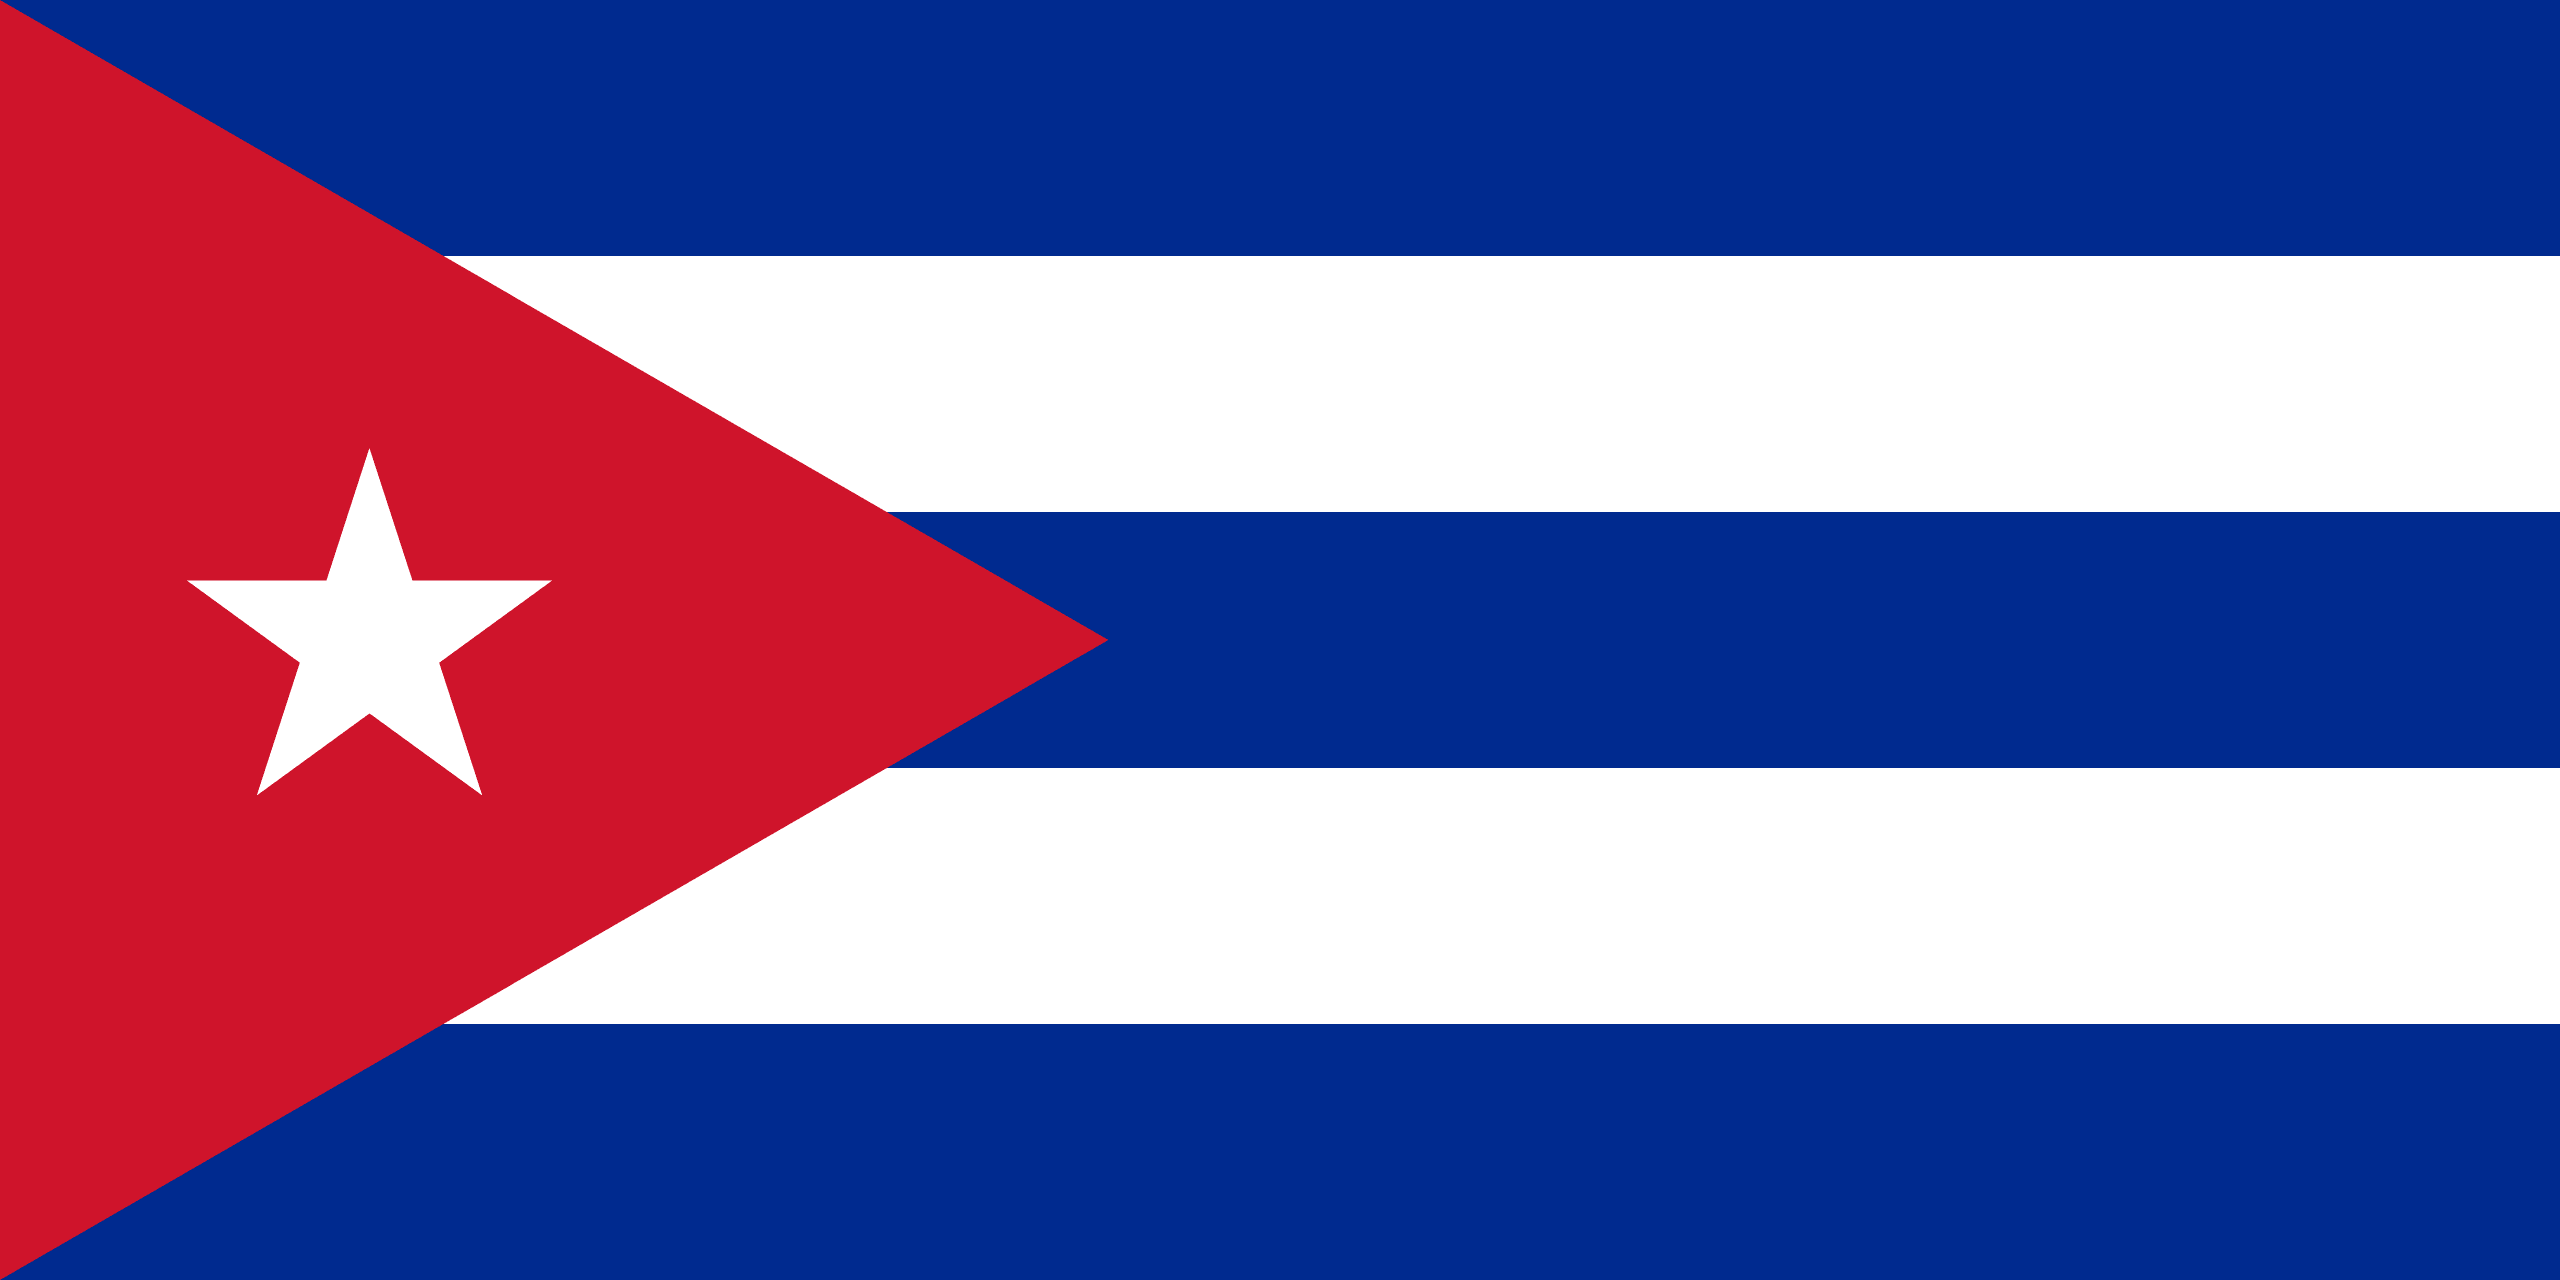

Curaçao


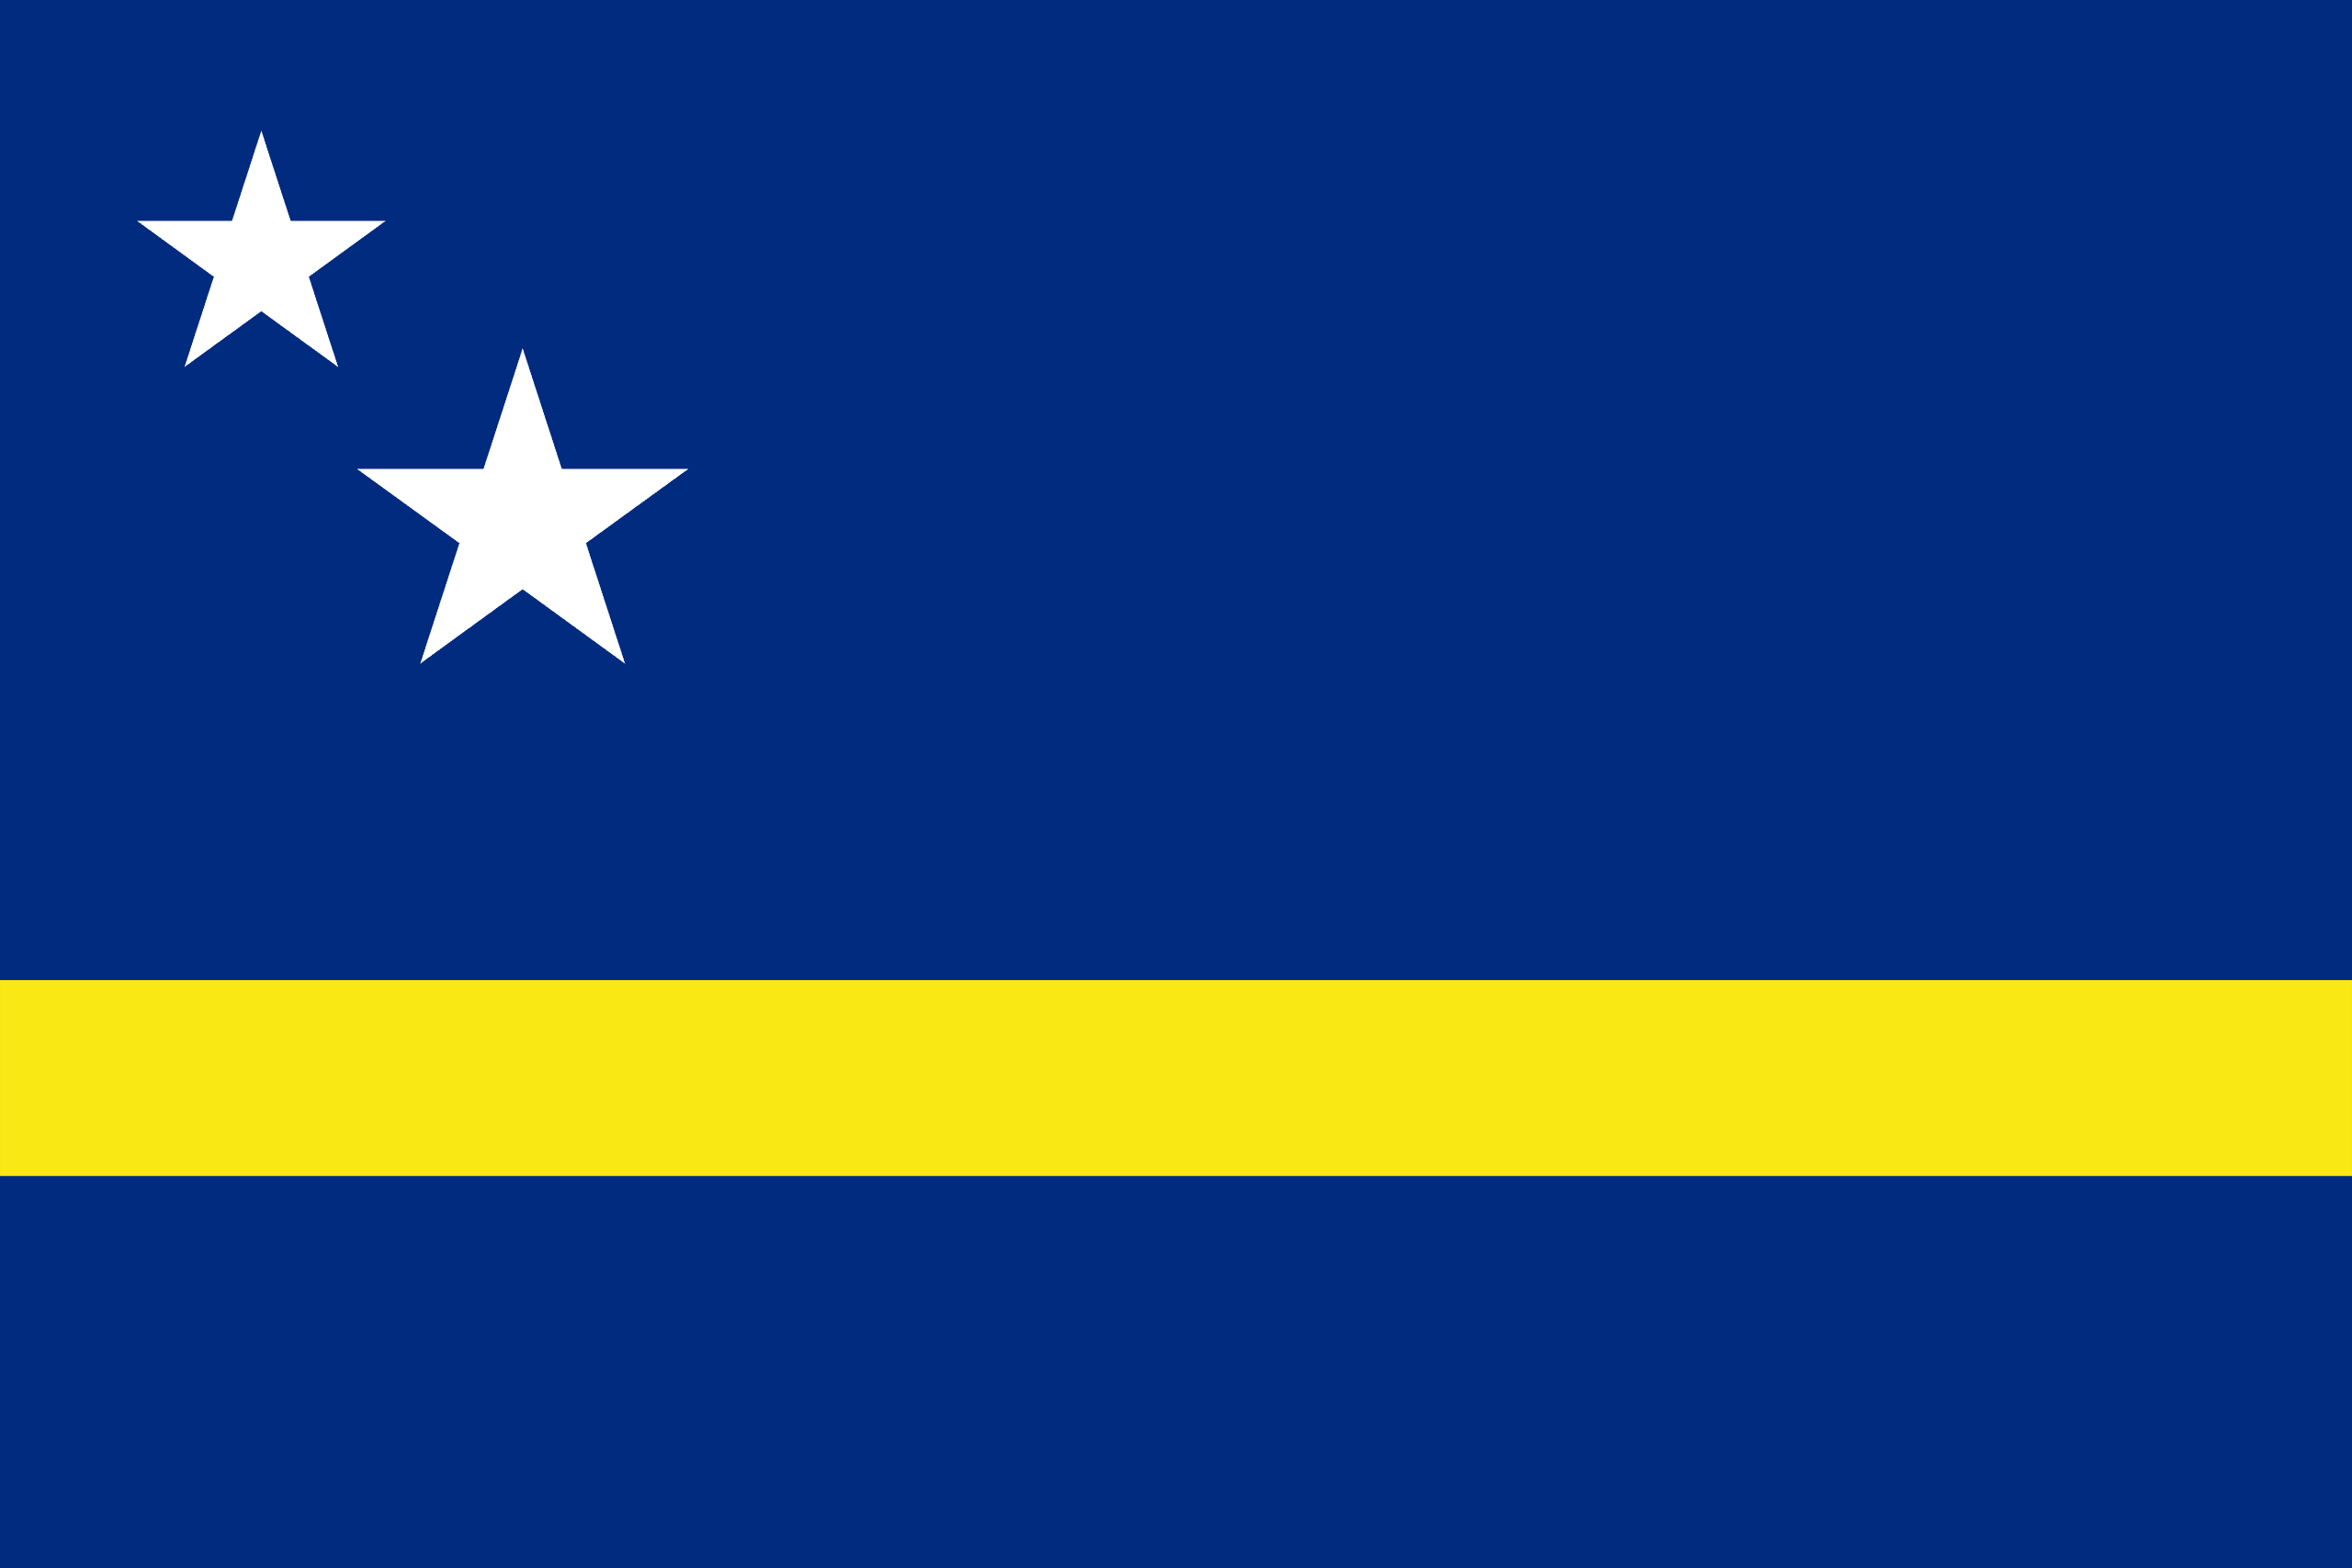

Cyprus


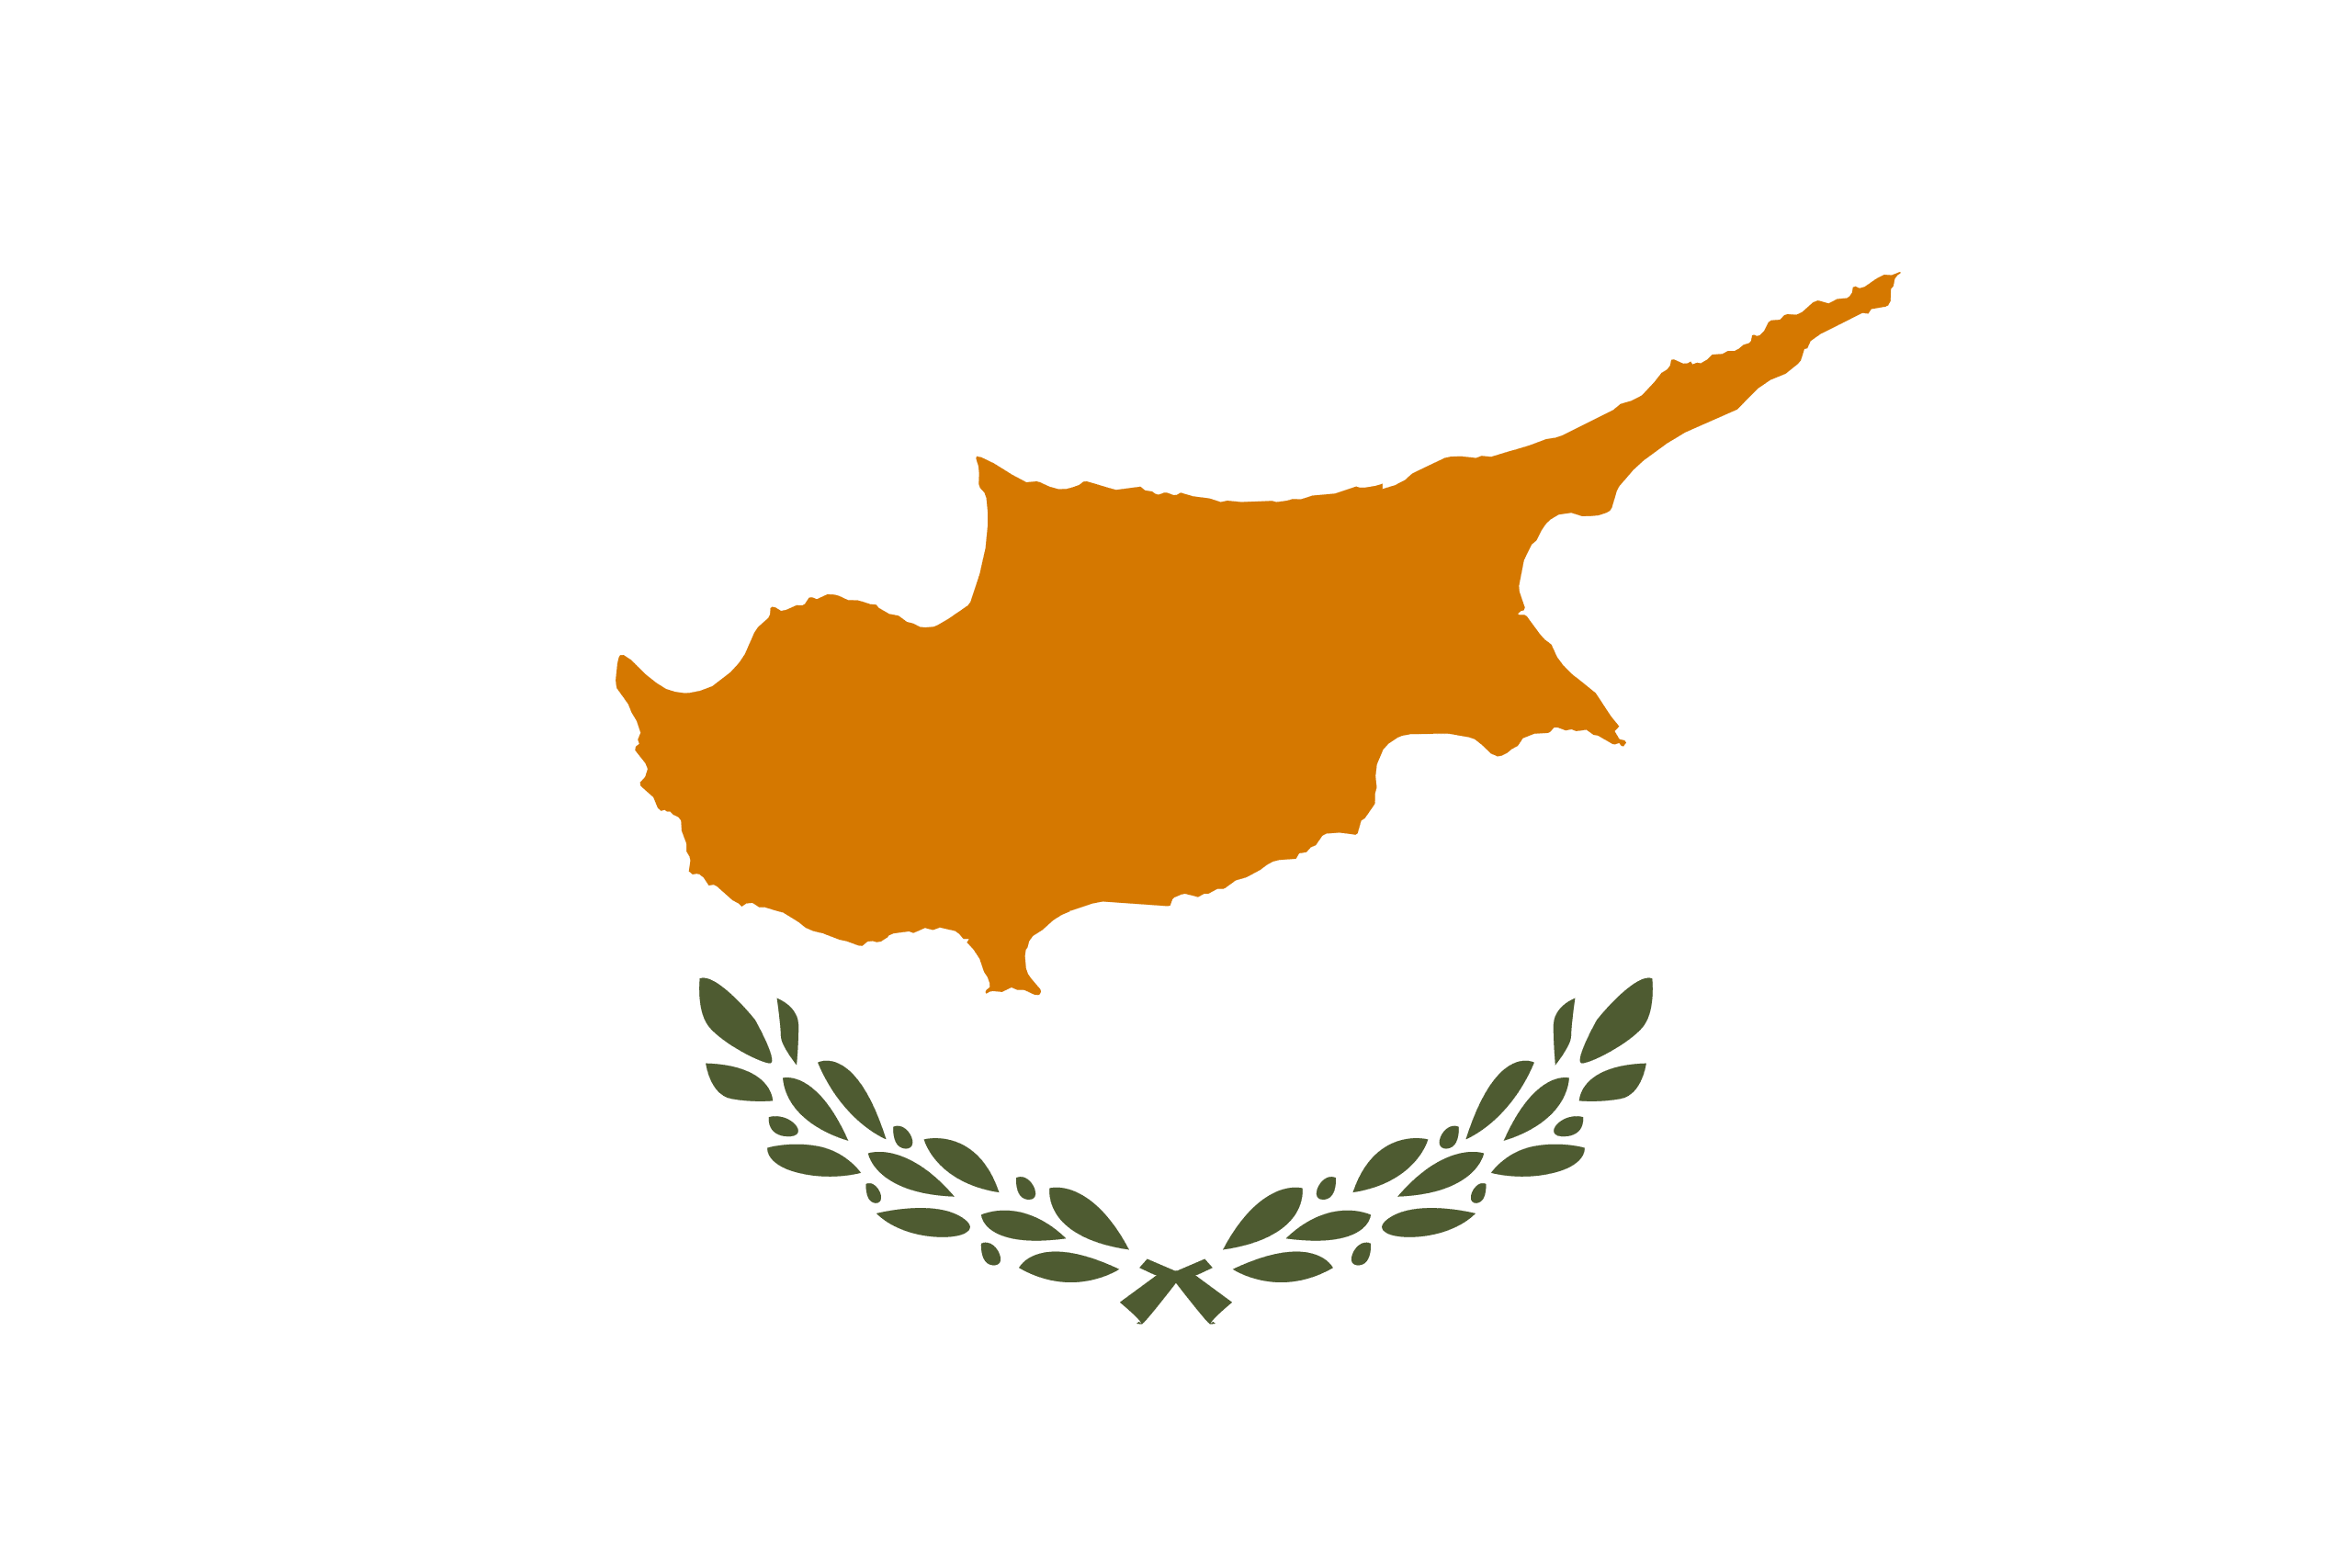

Czechia


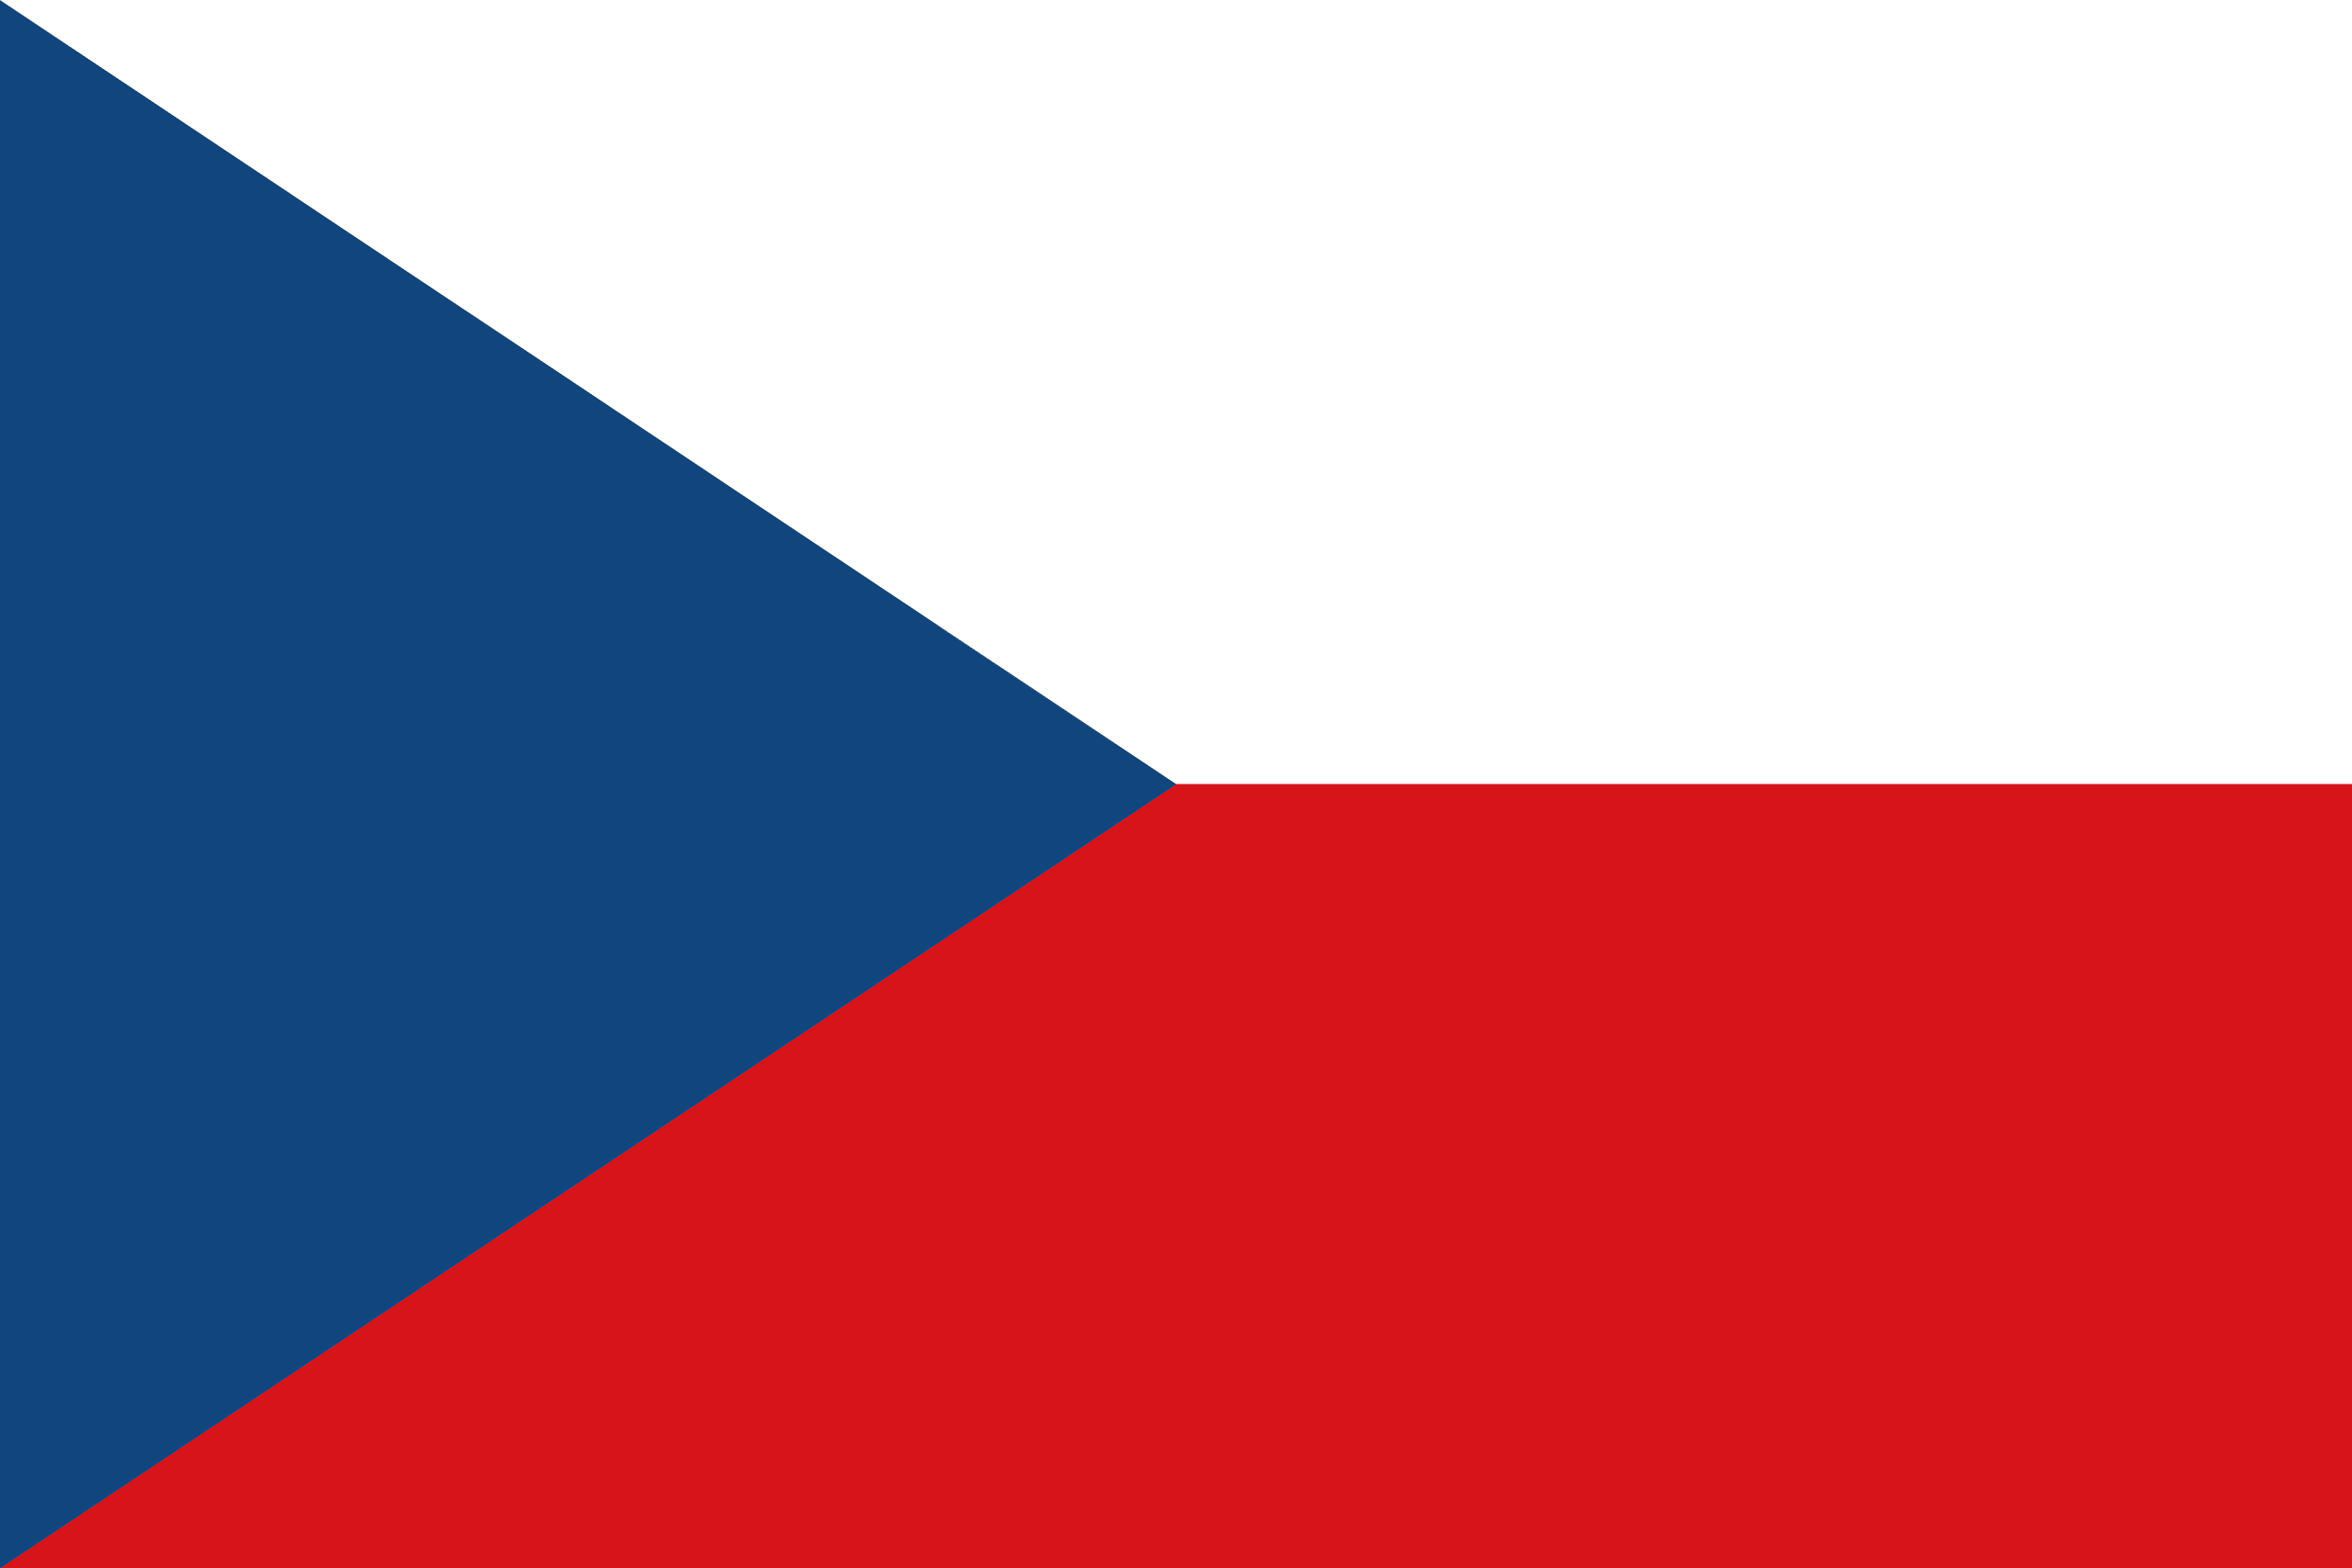

Denmark


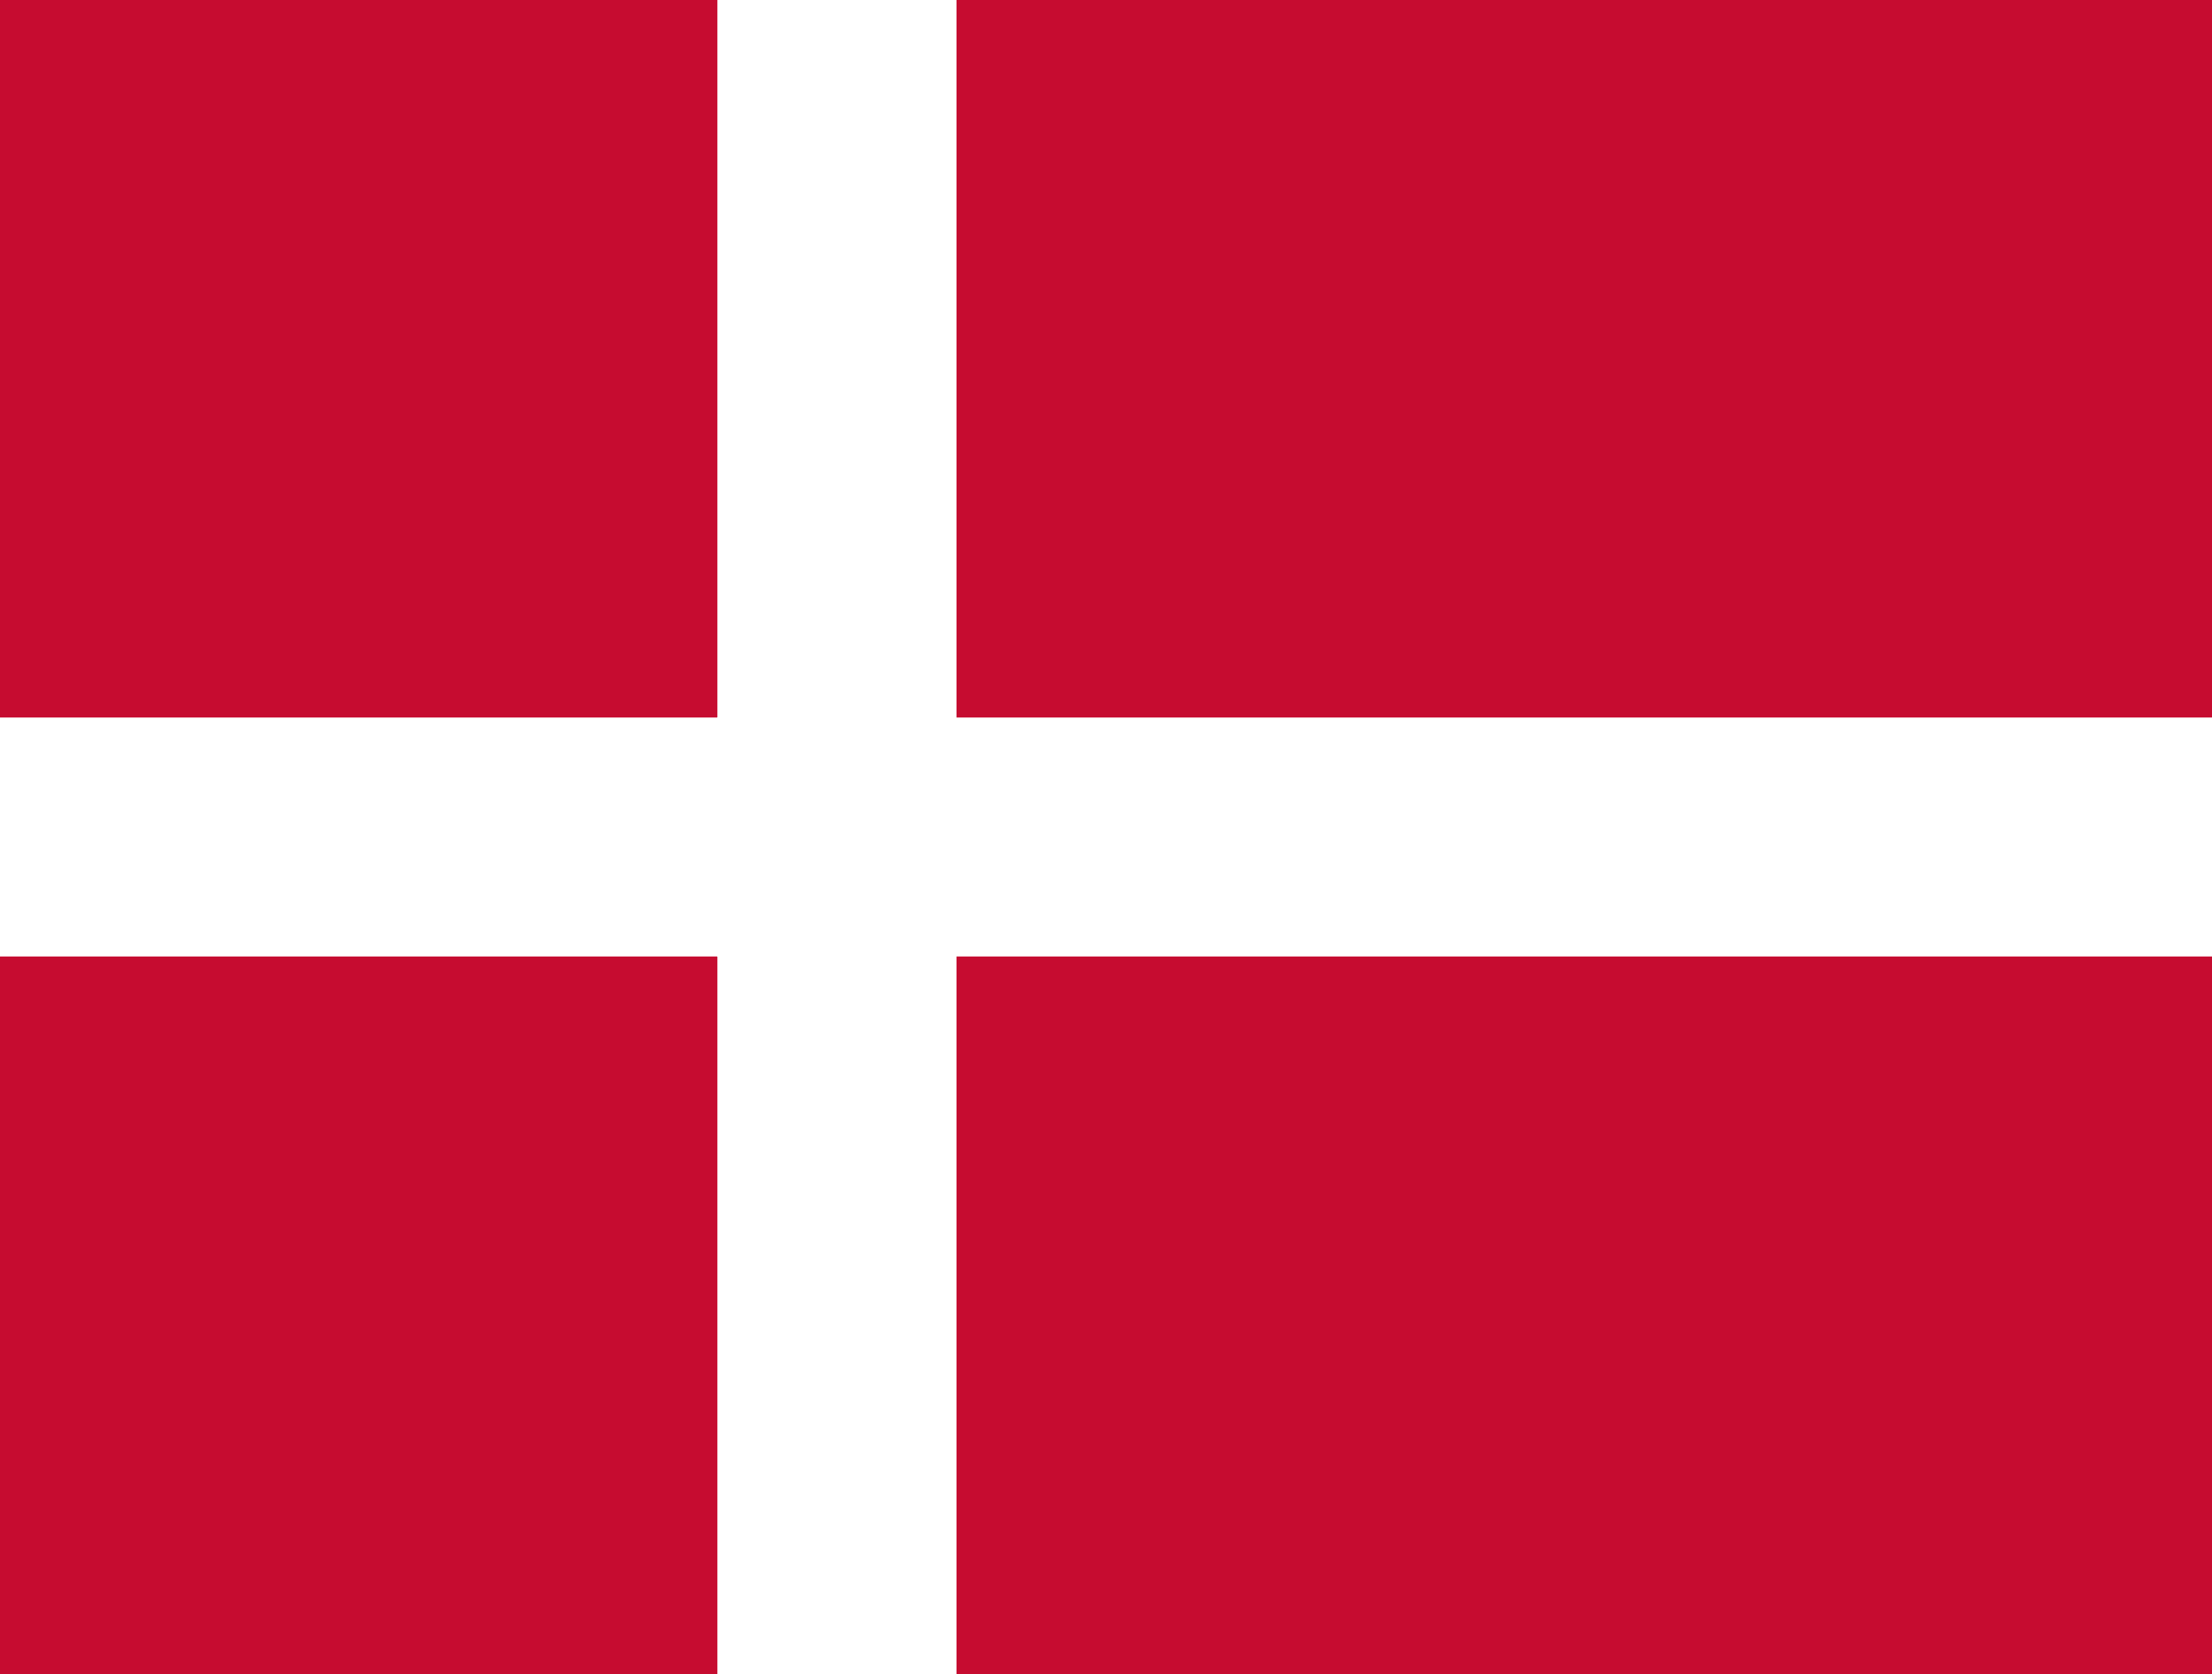

Djibouti


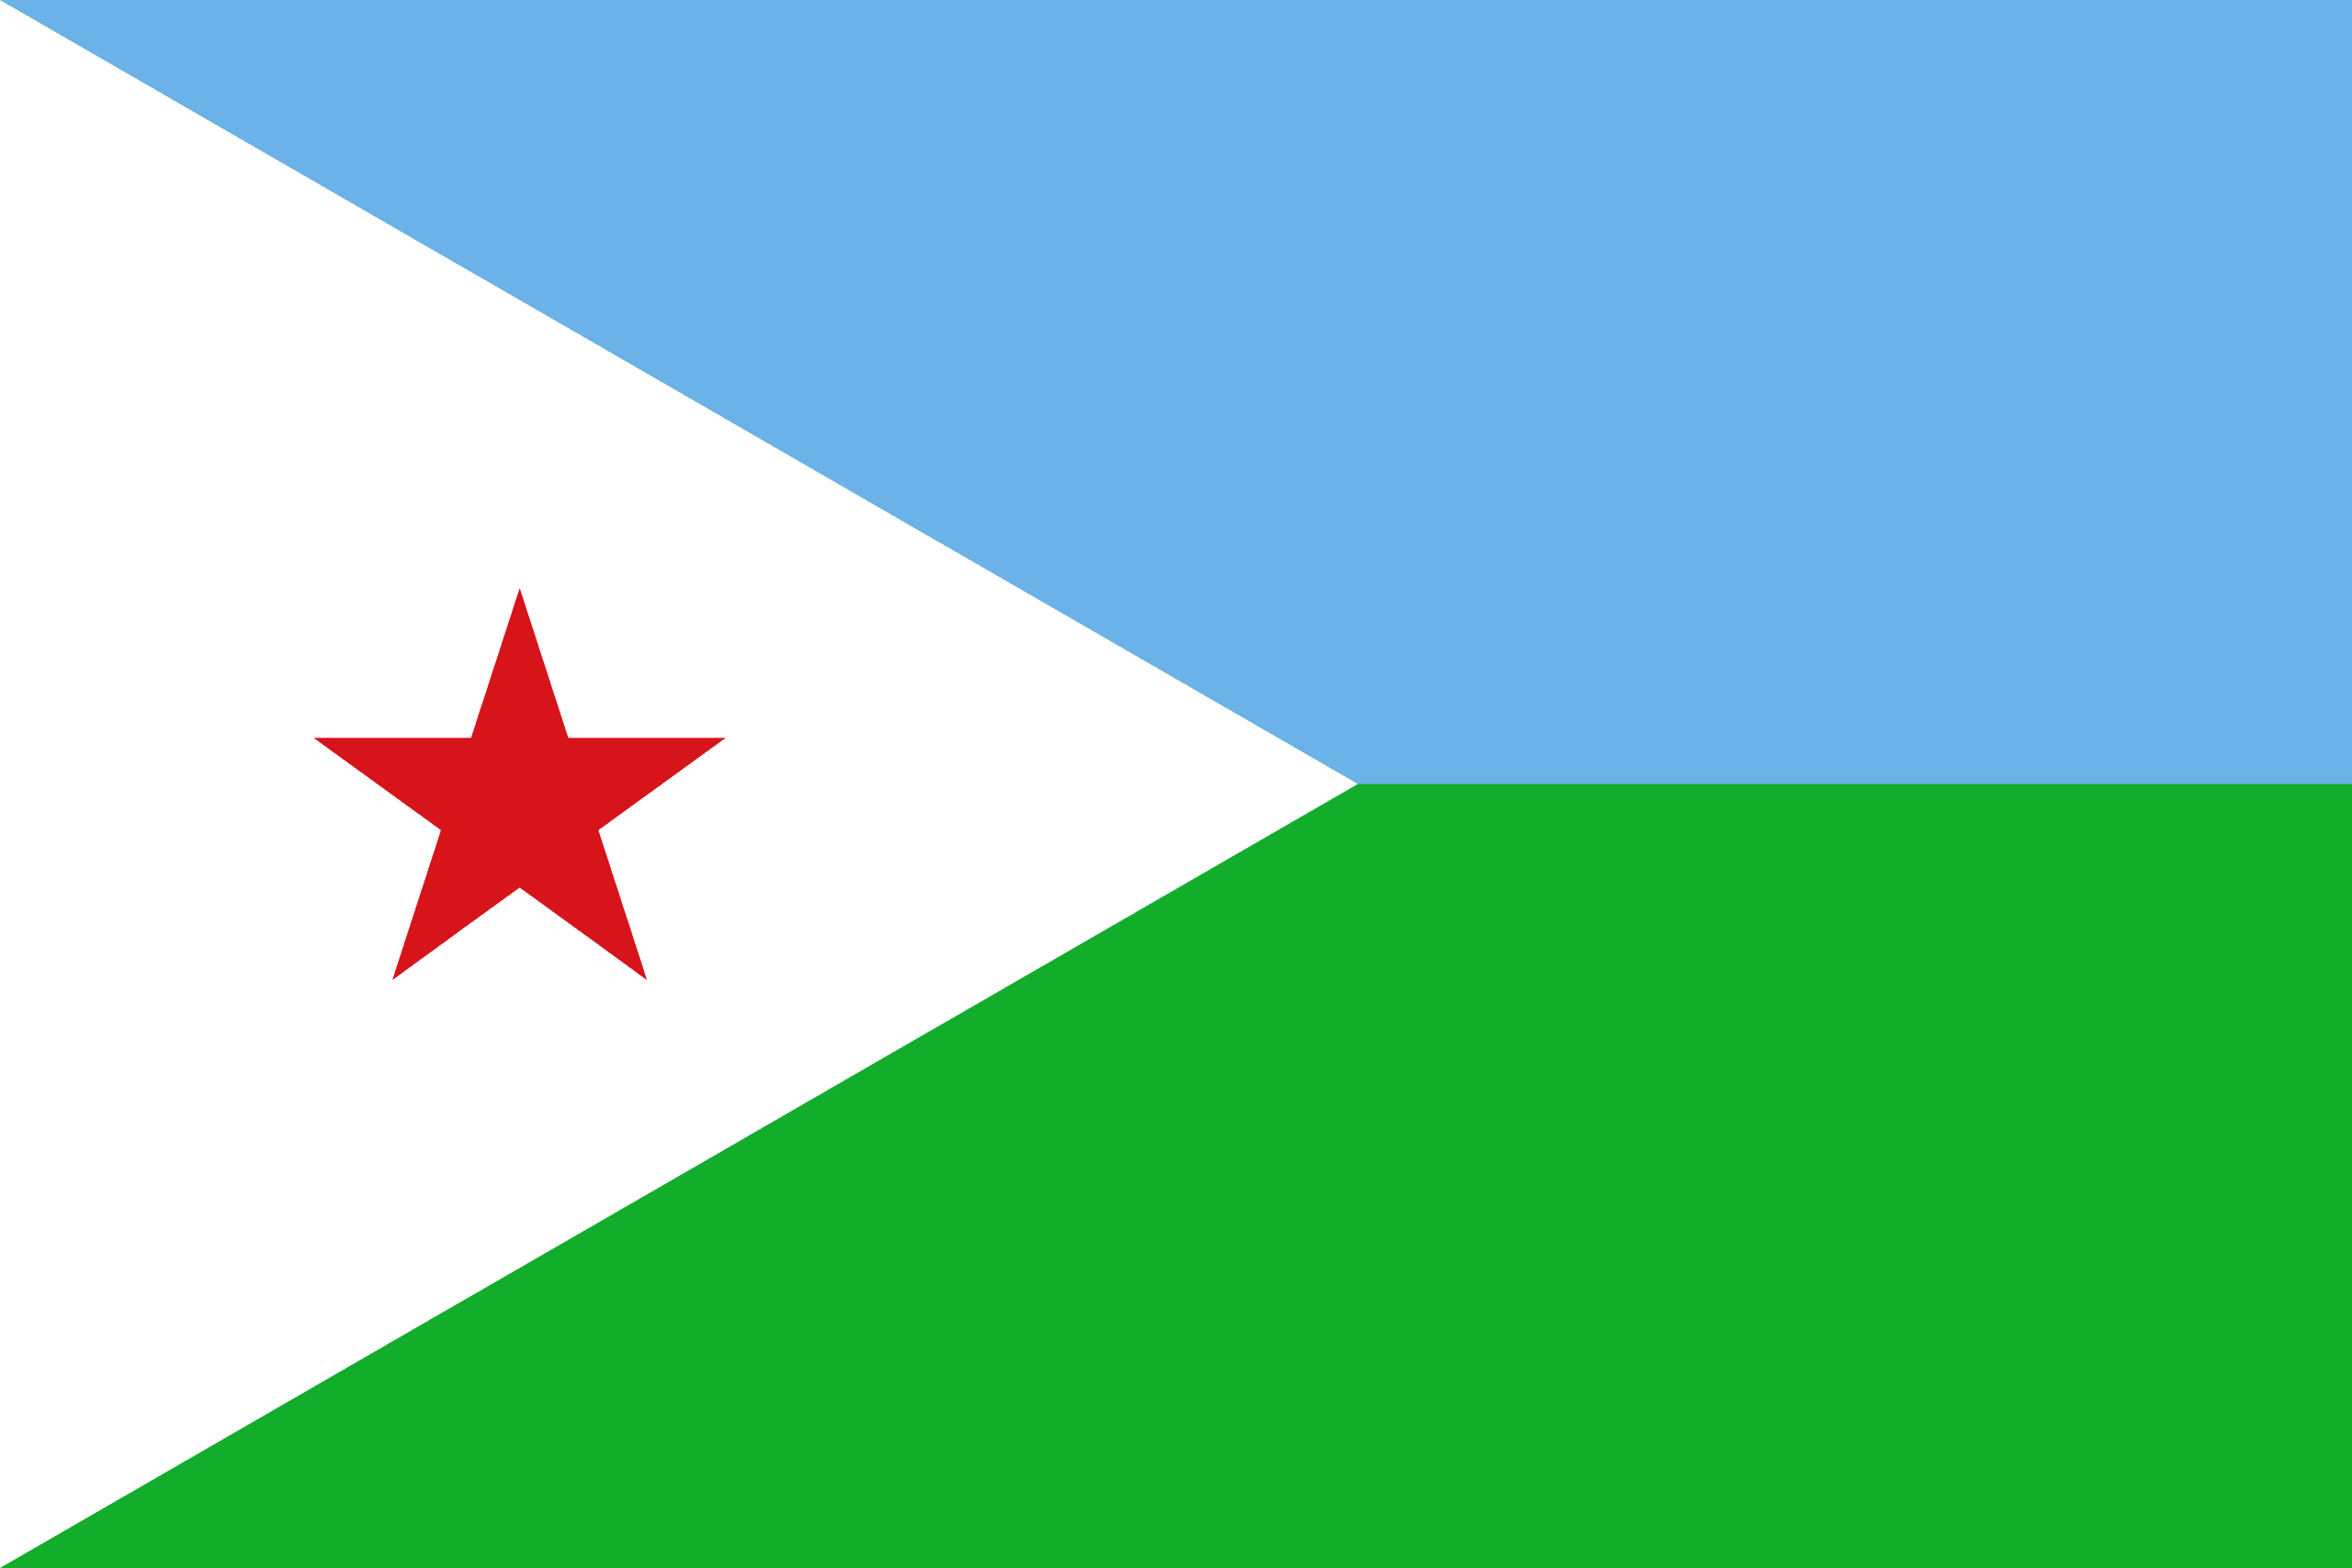

Dominica


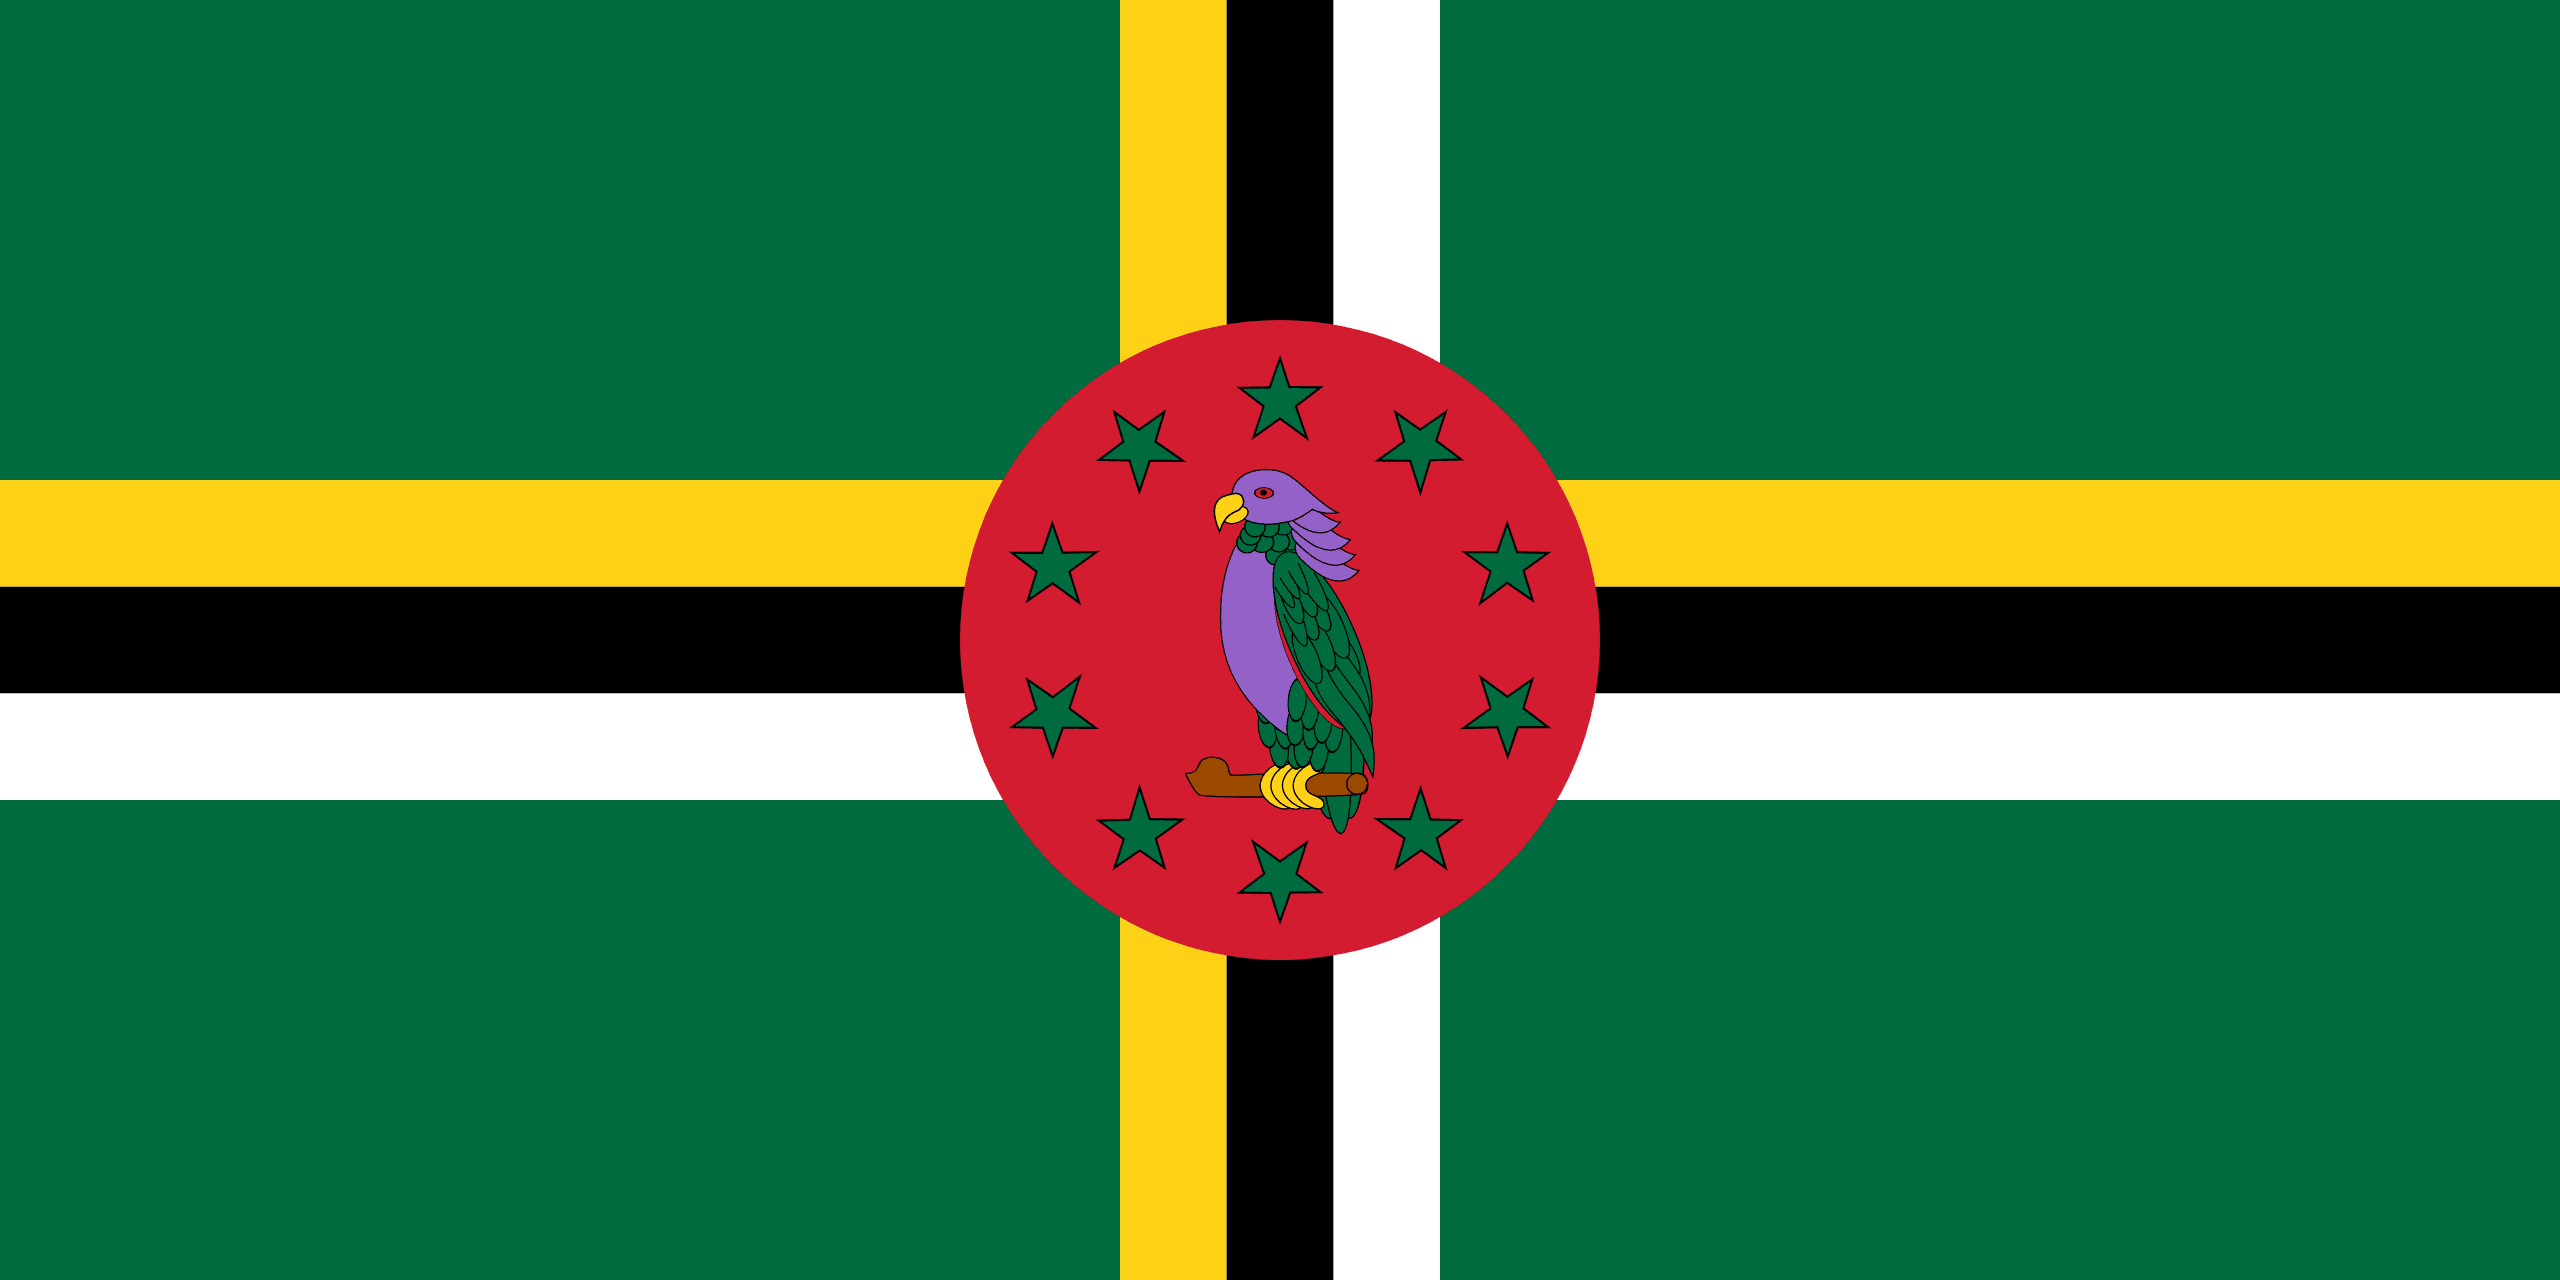

Dominican Republic


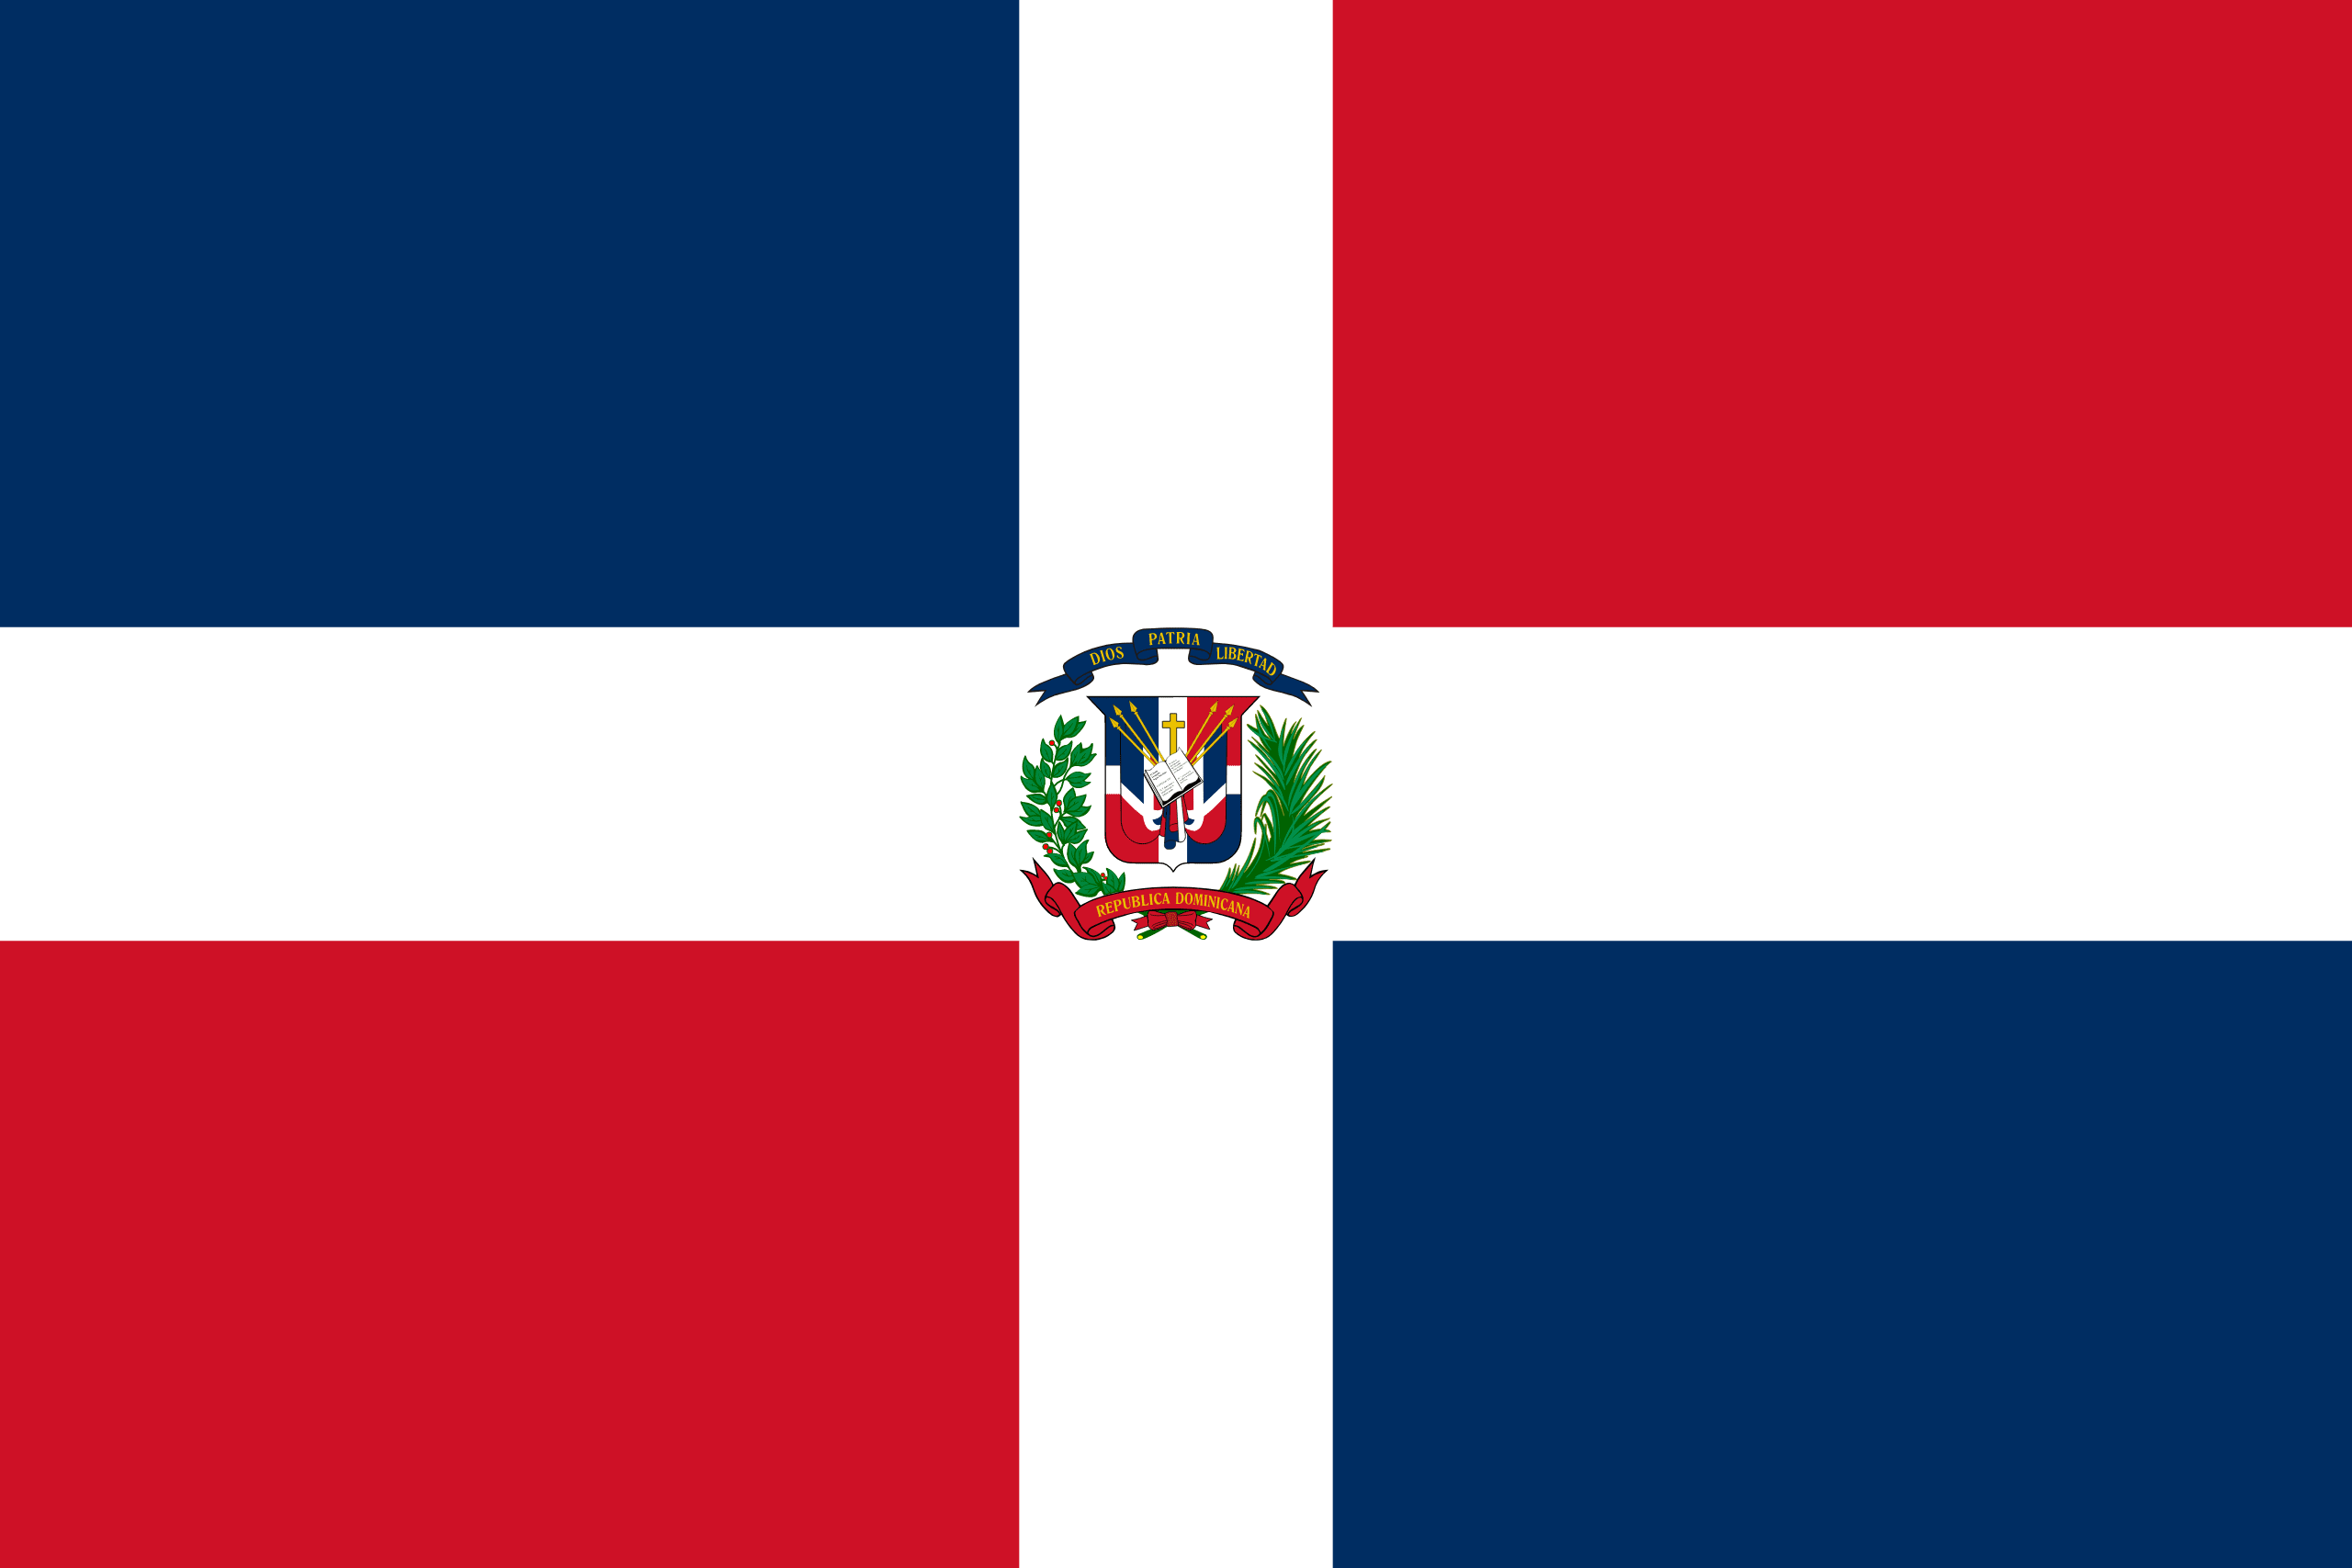

Ecuador


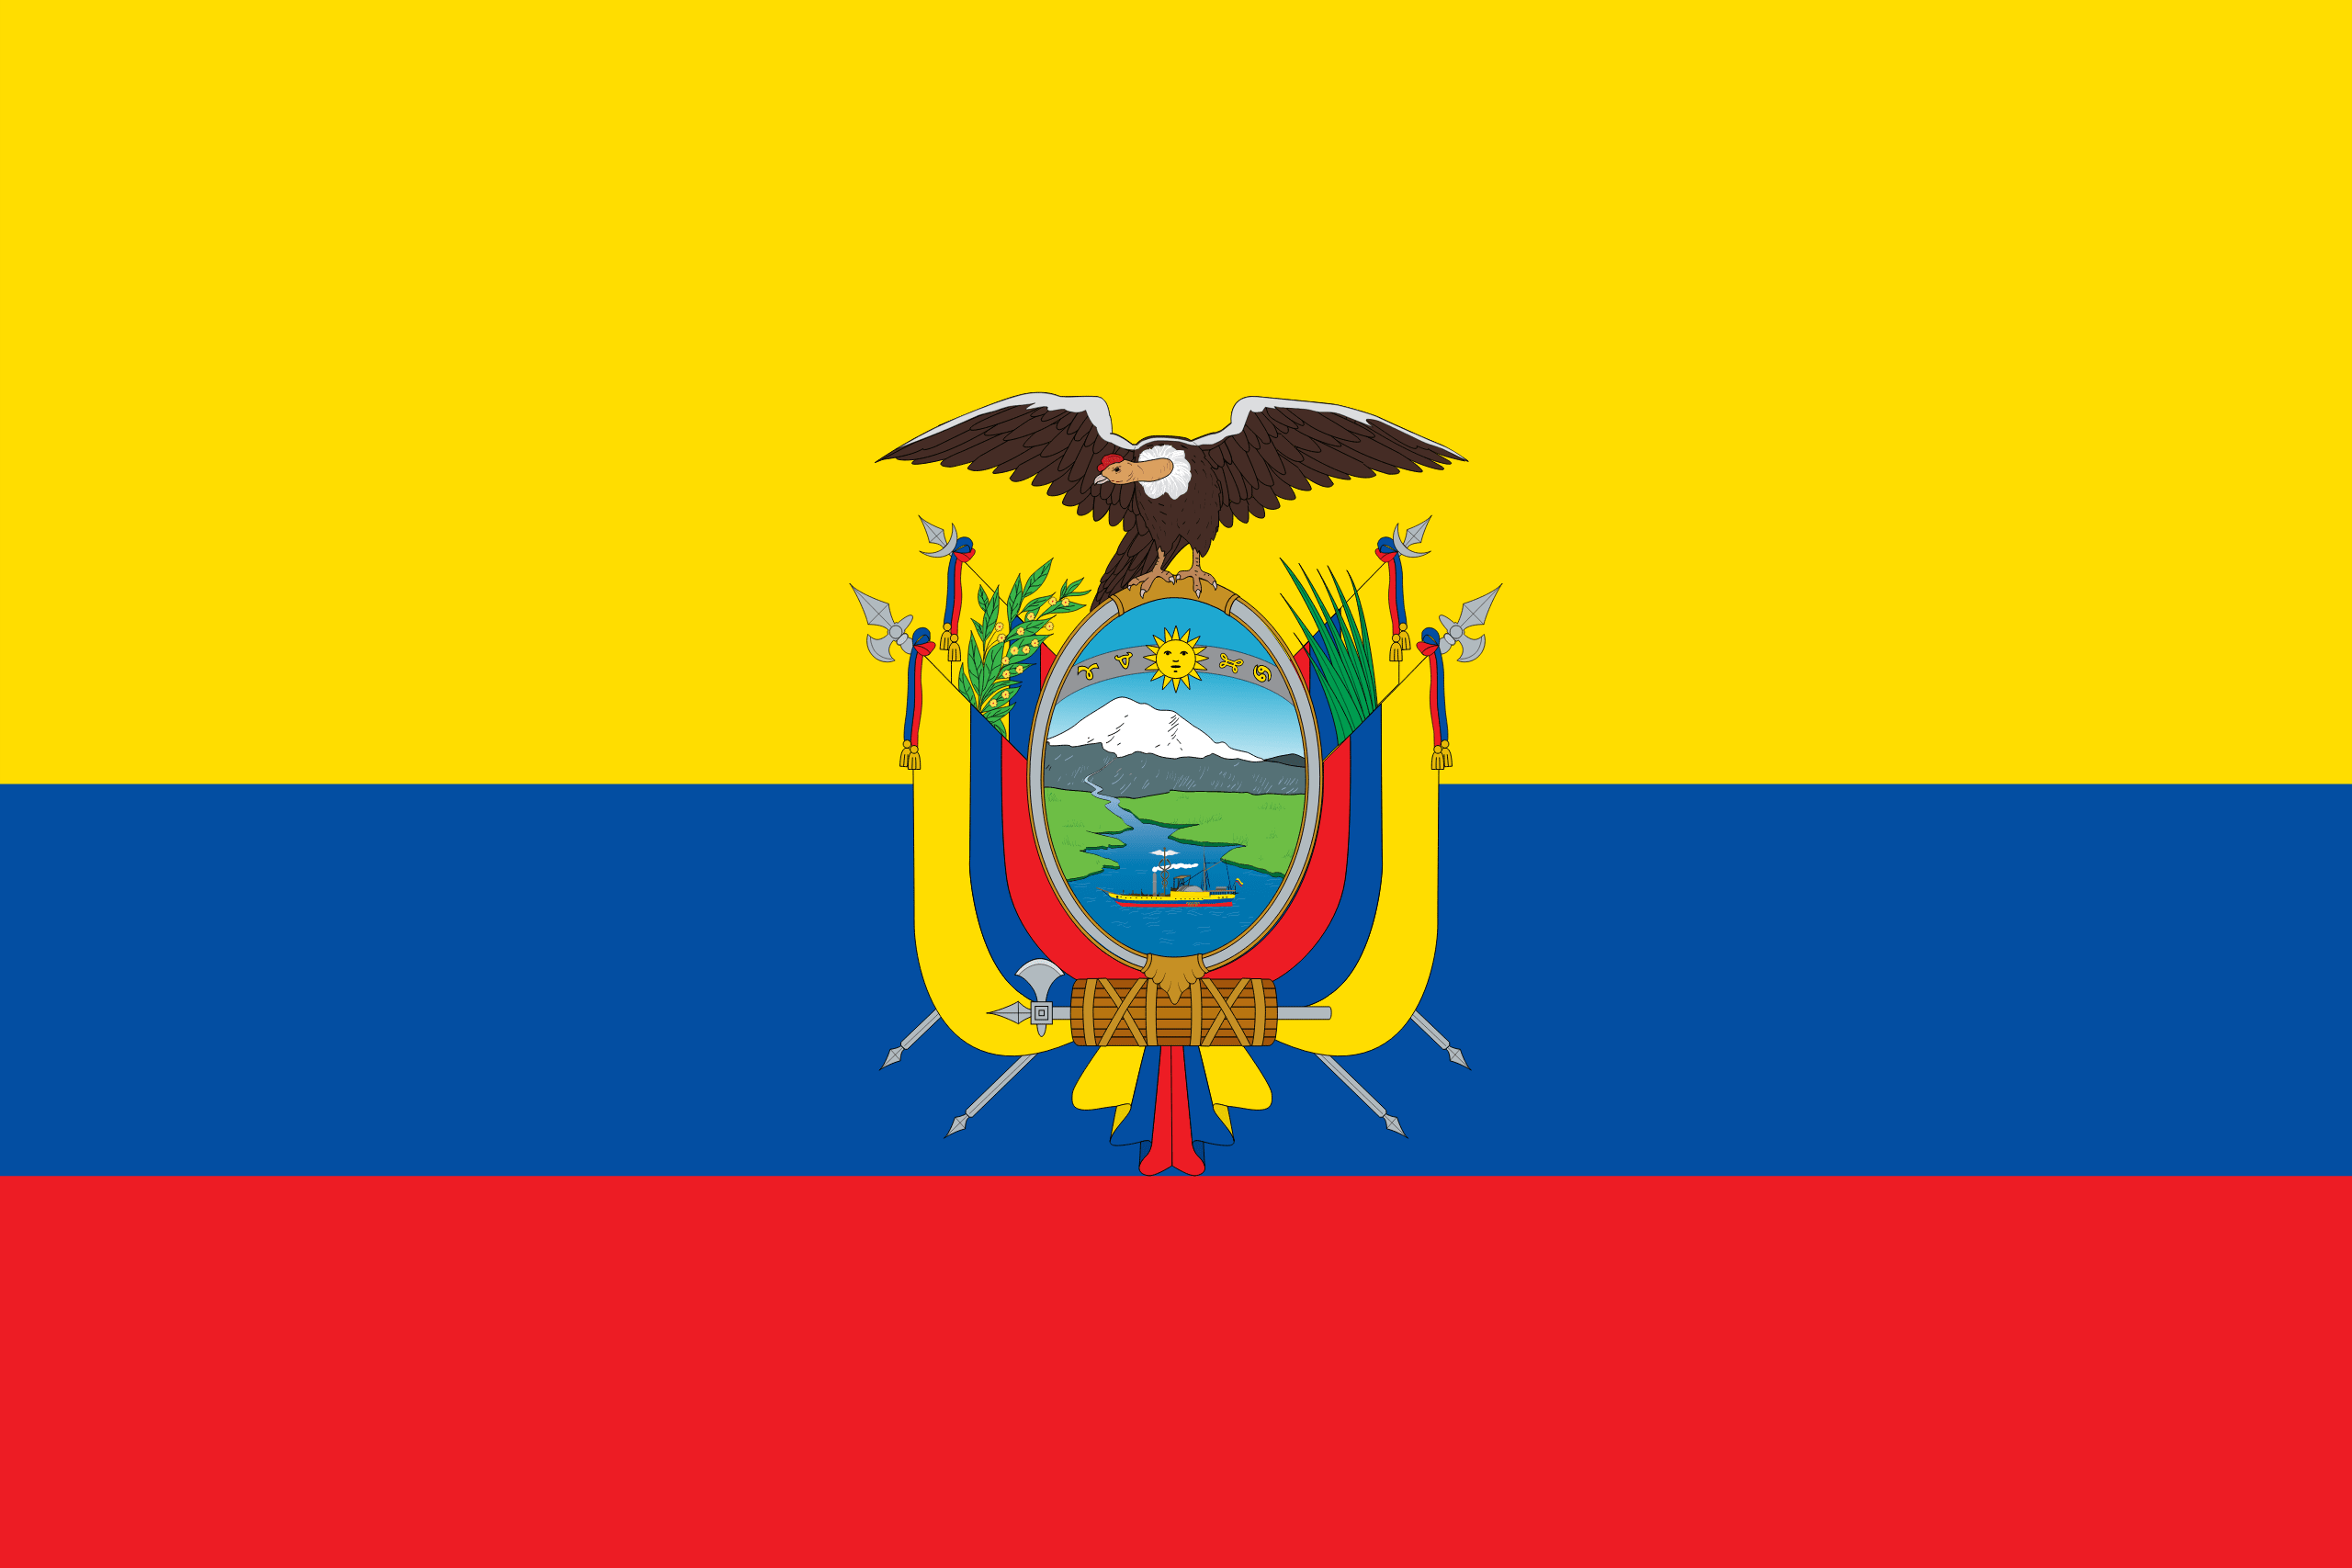

Egypt


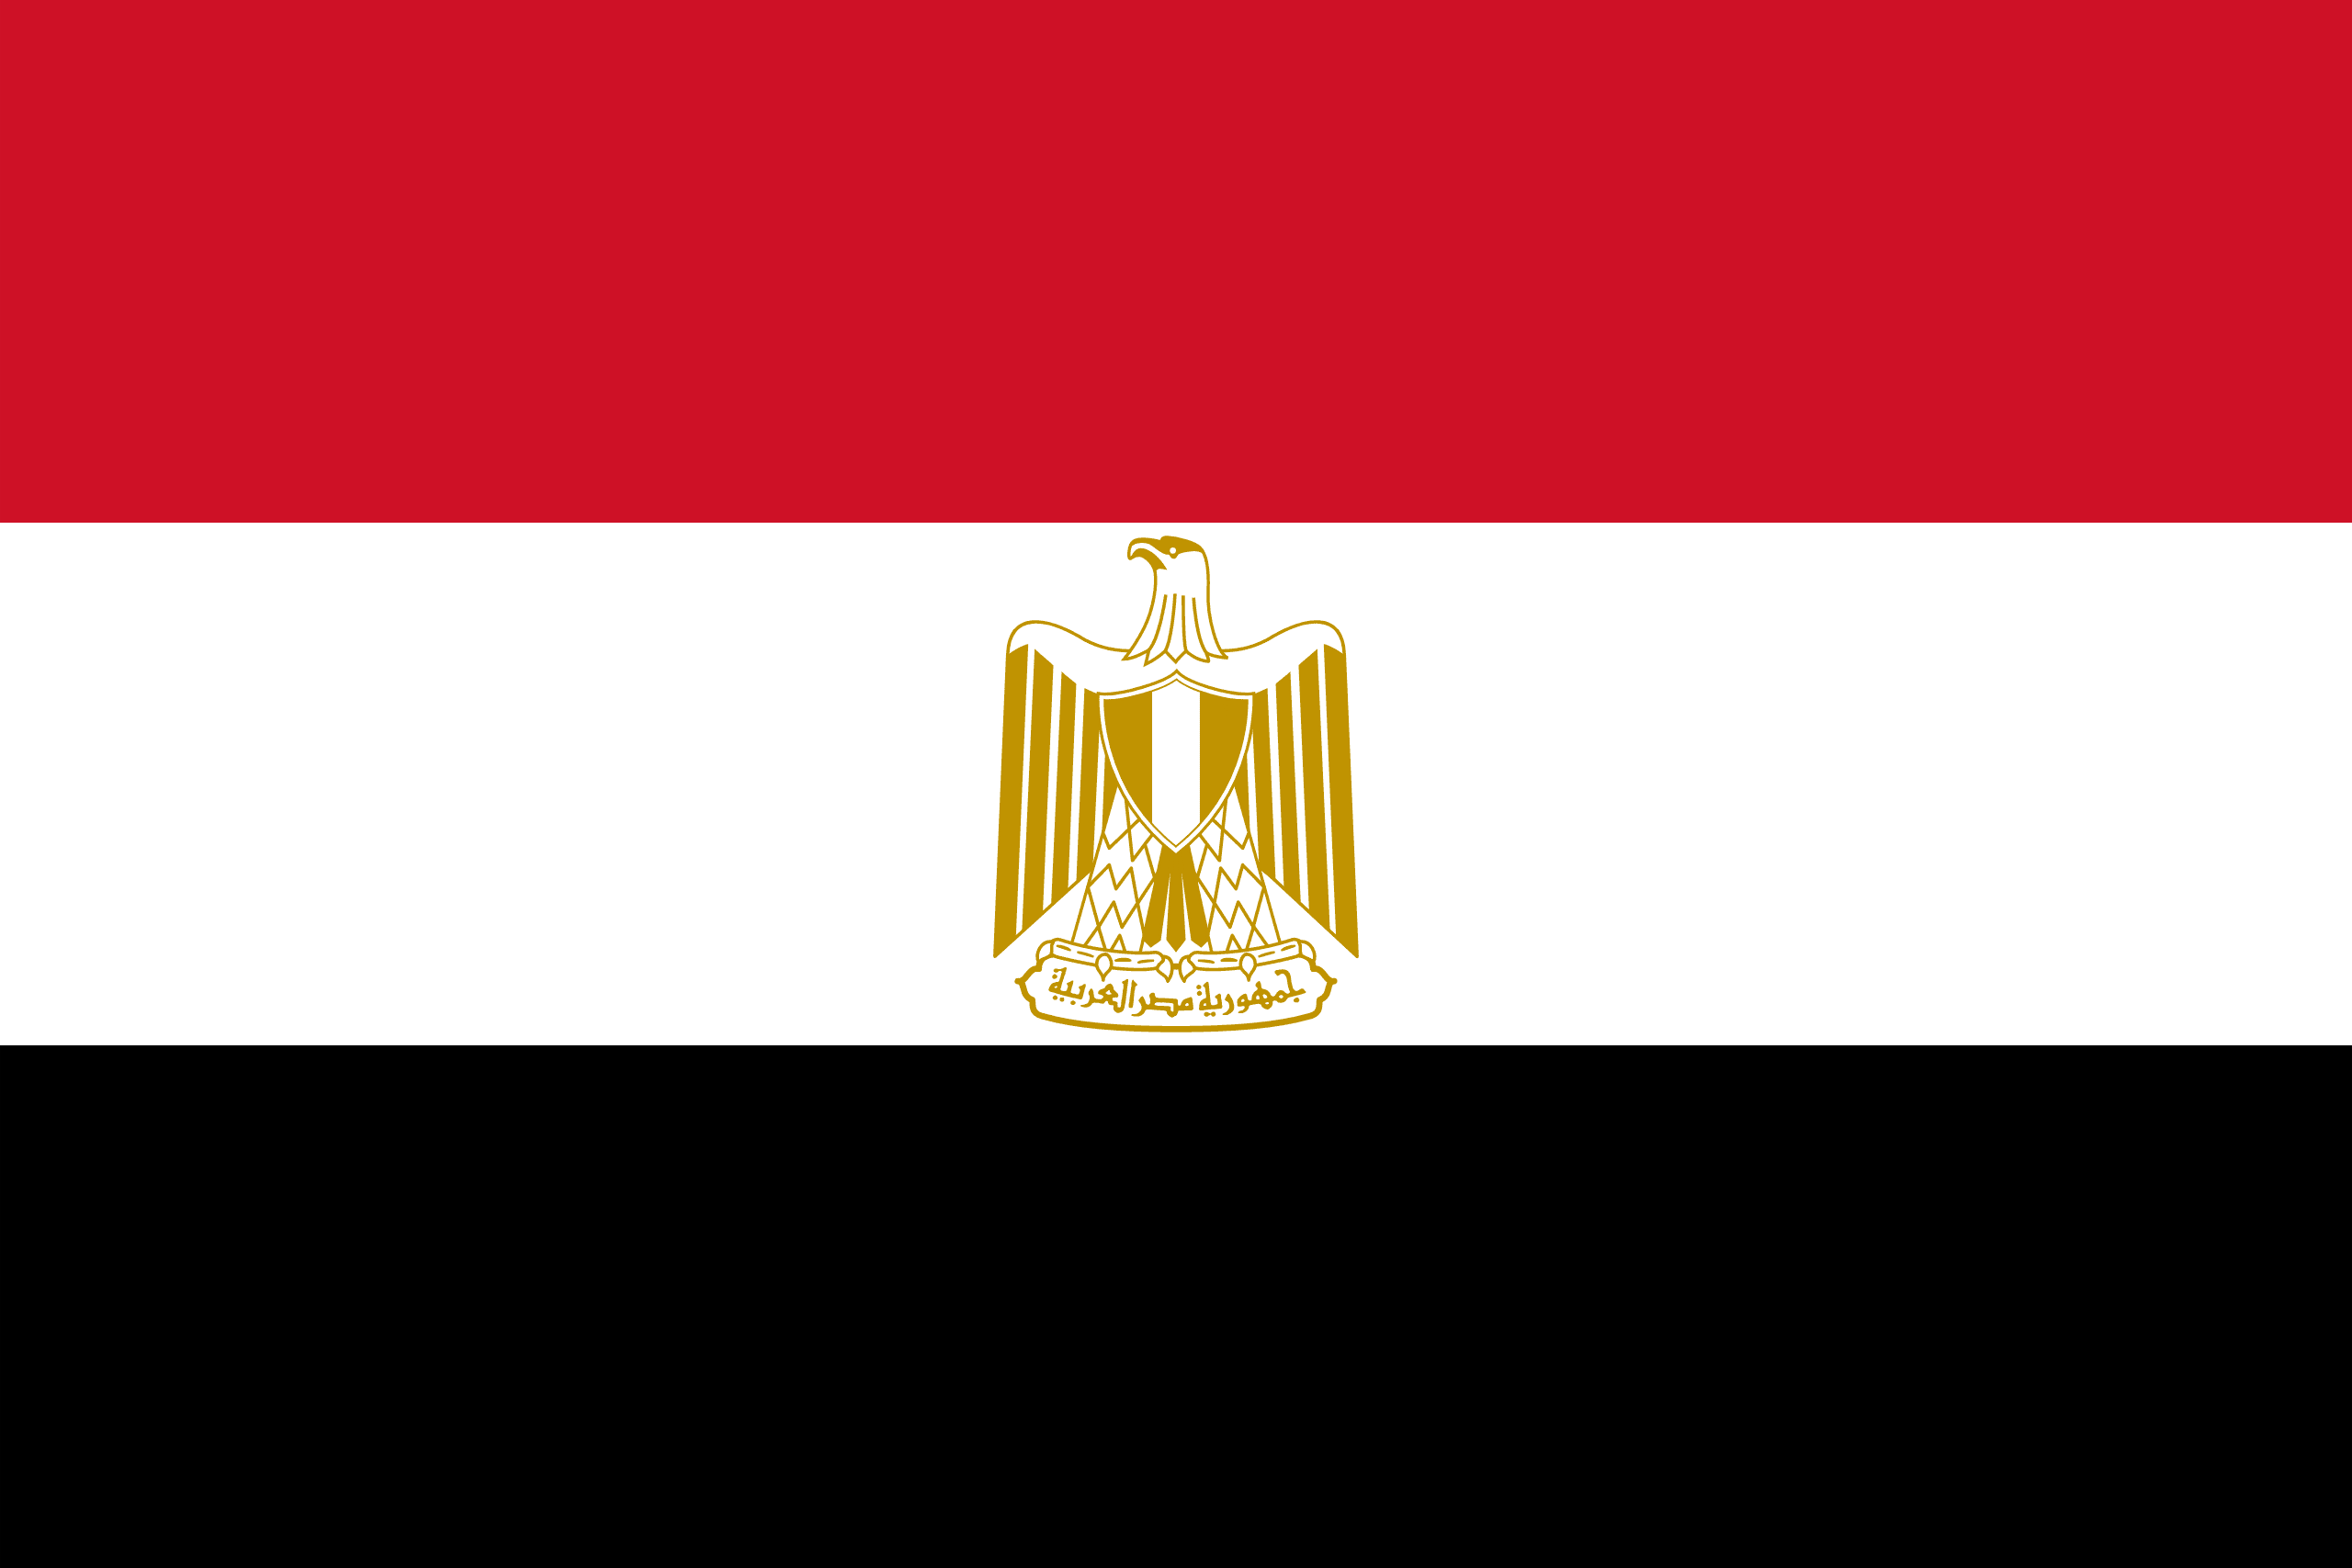

El Salvador


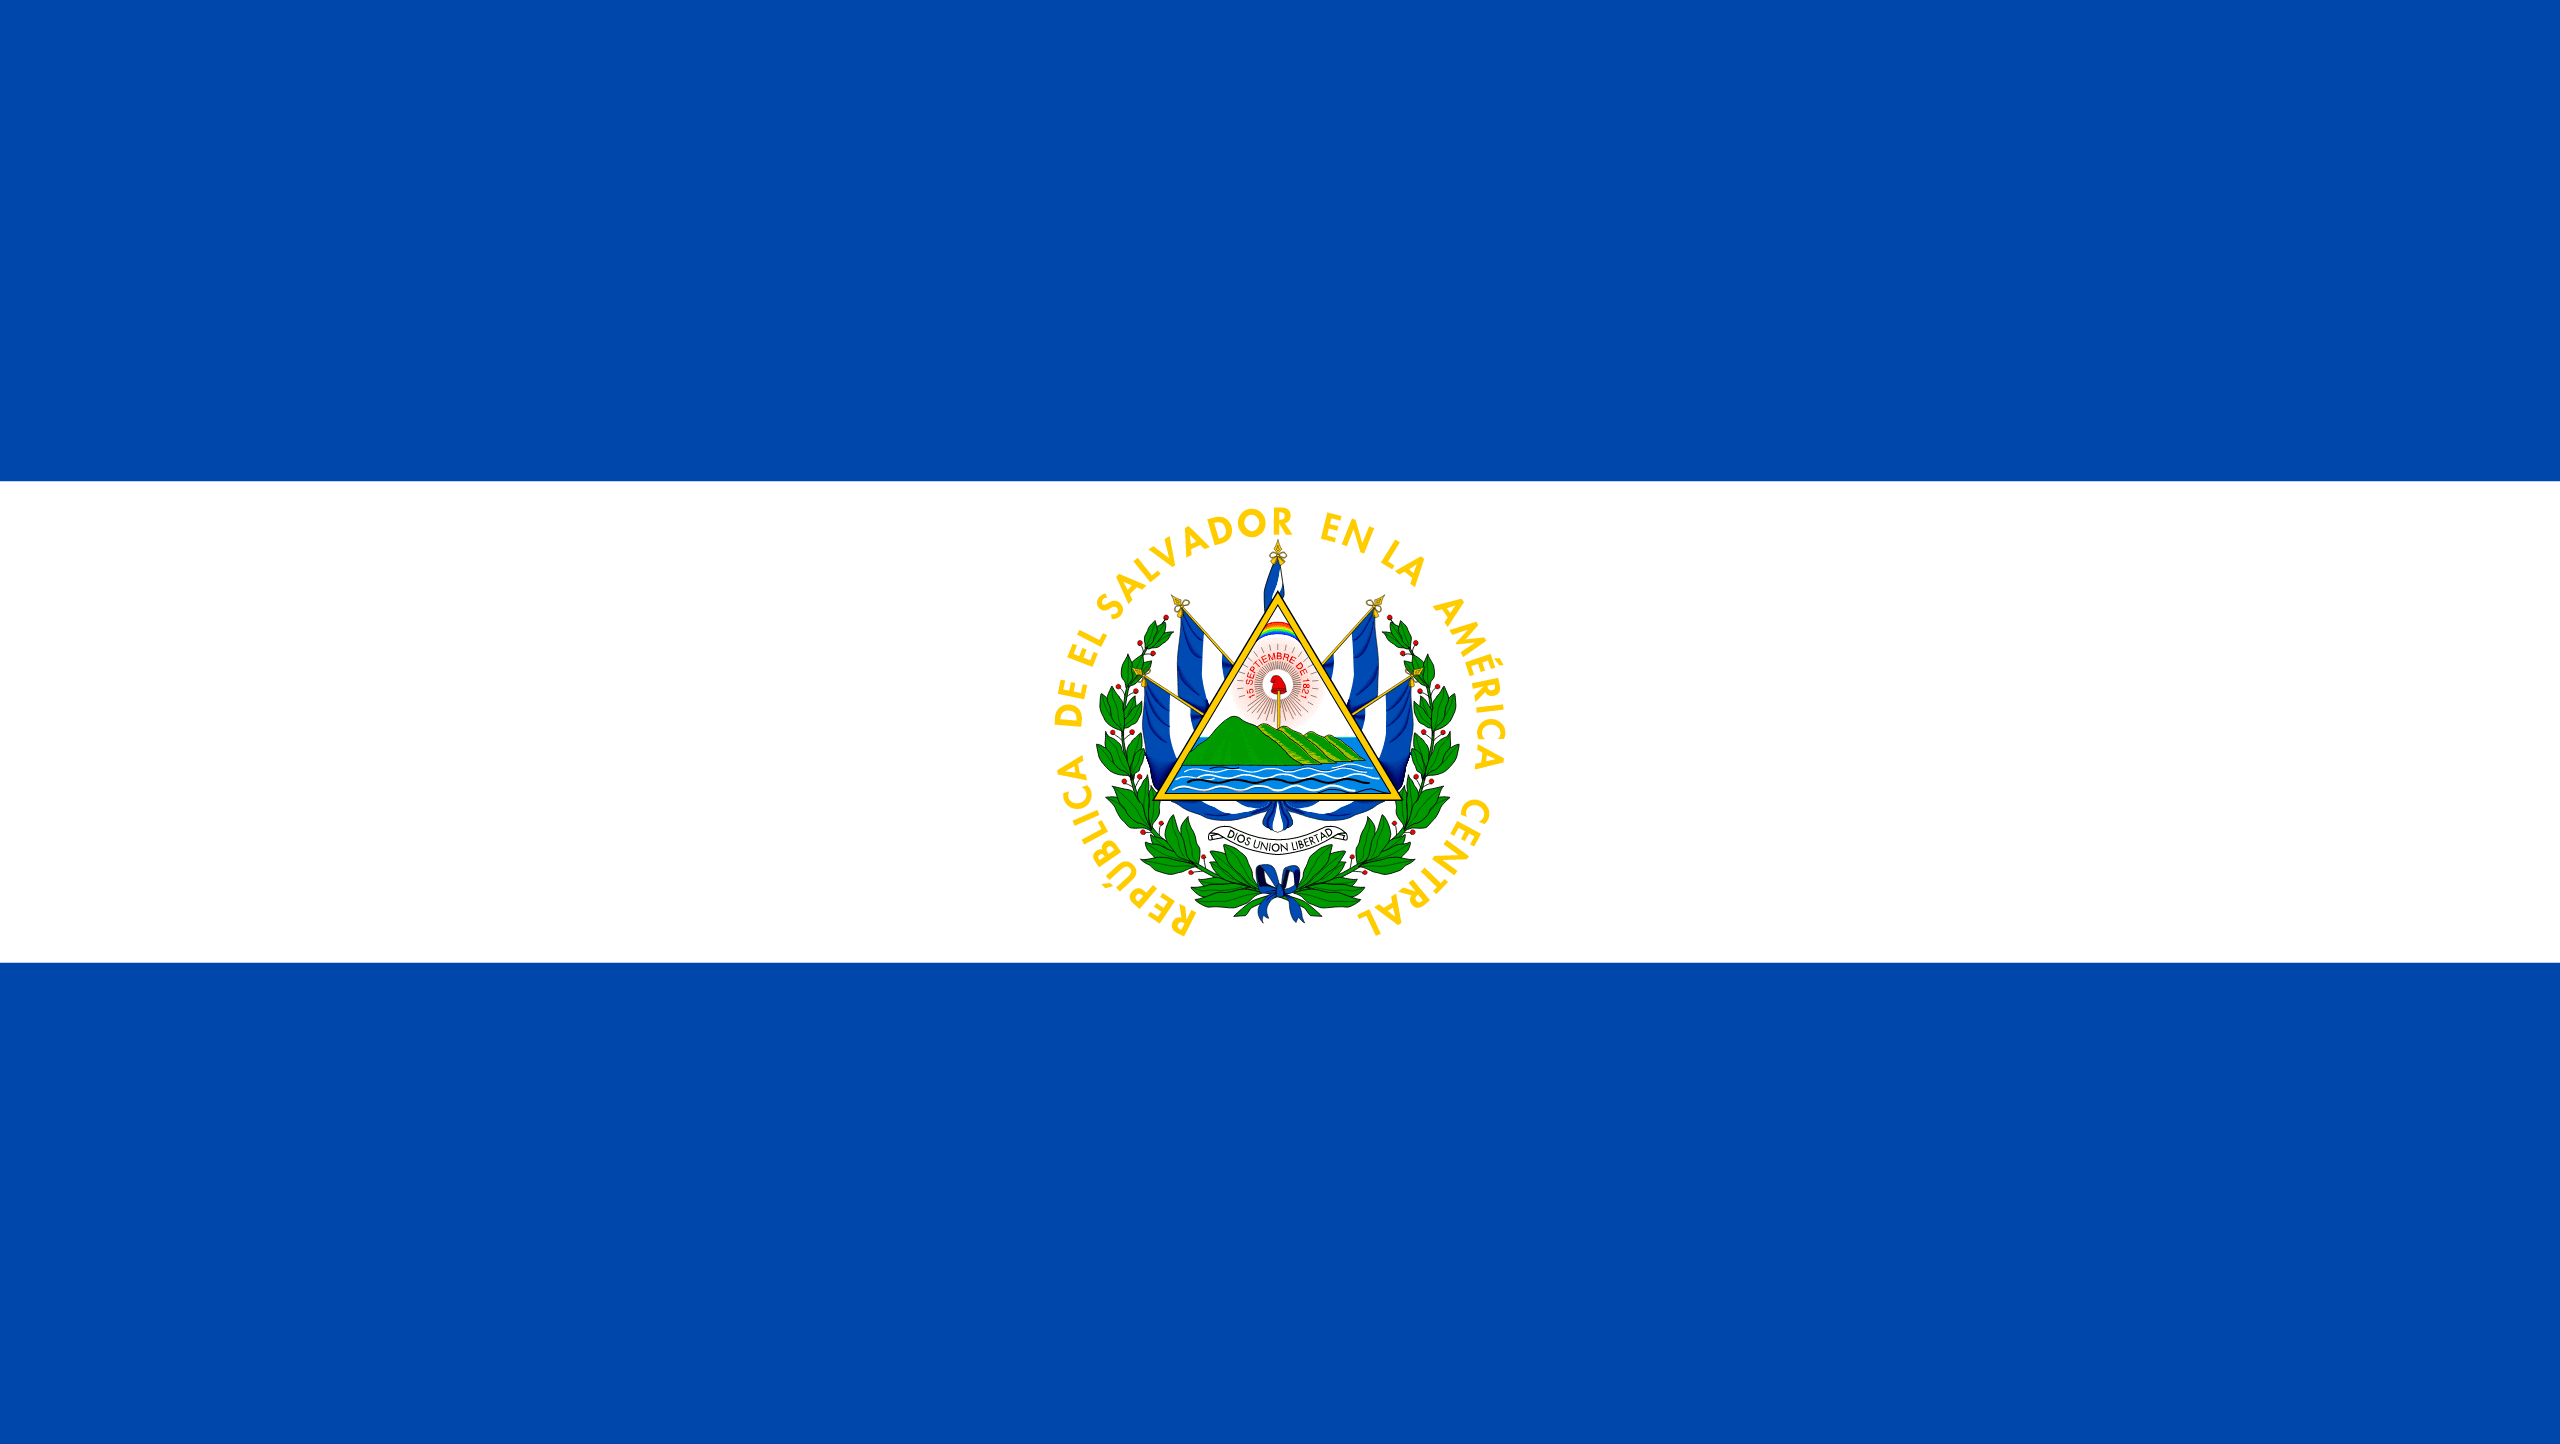

England


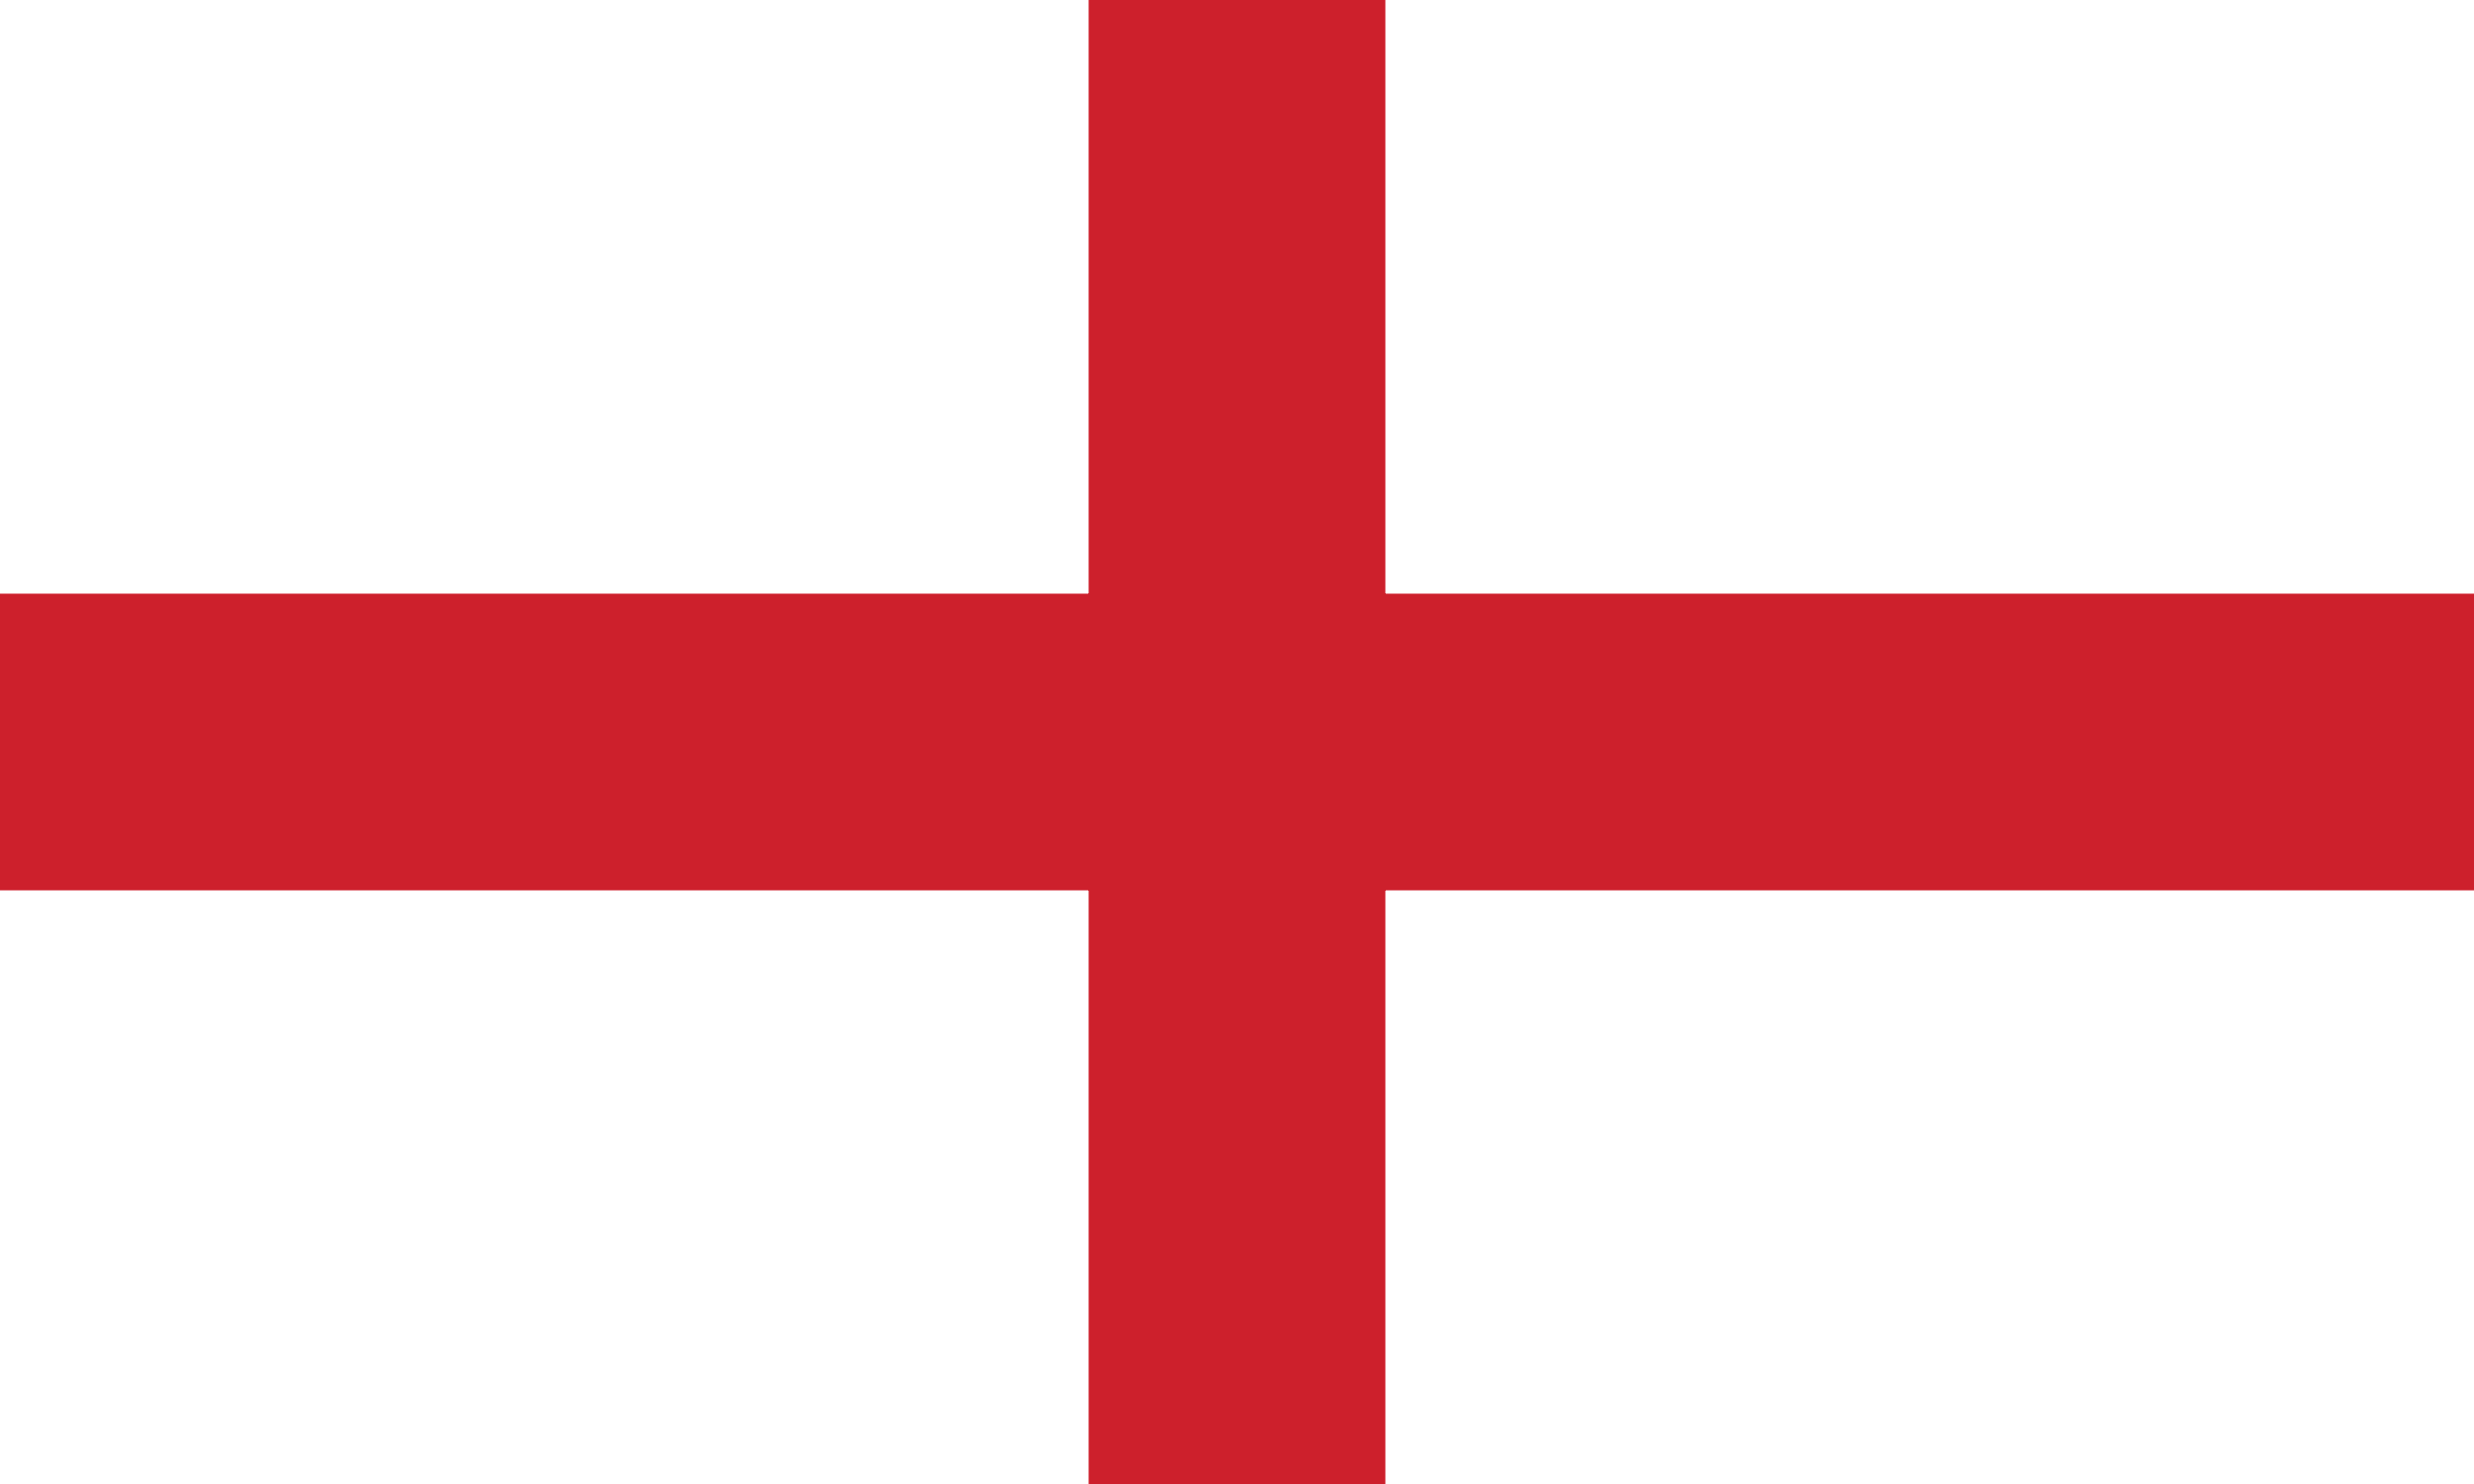

Equatorial Guinea


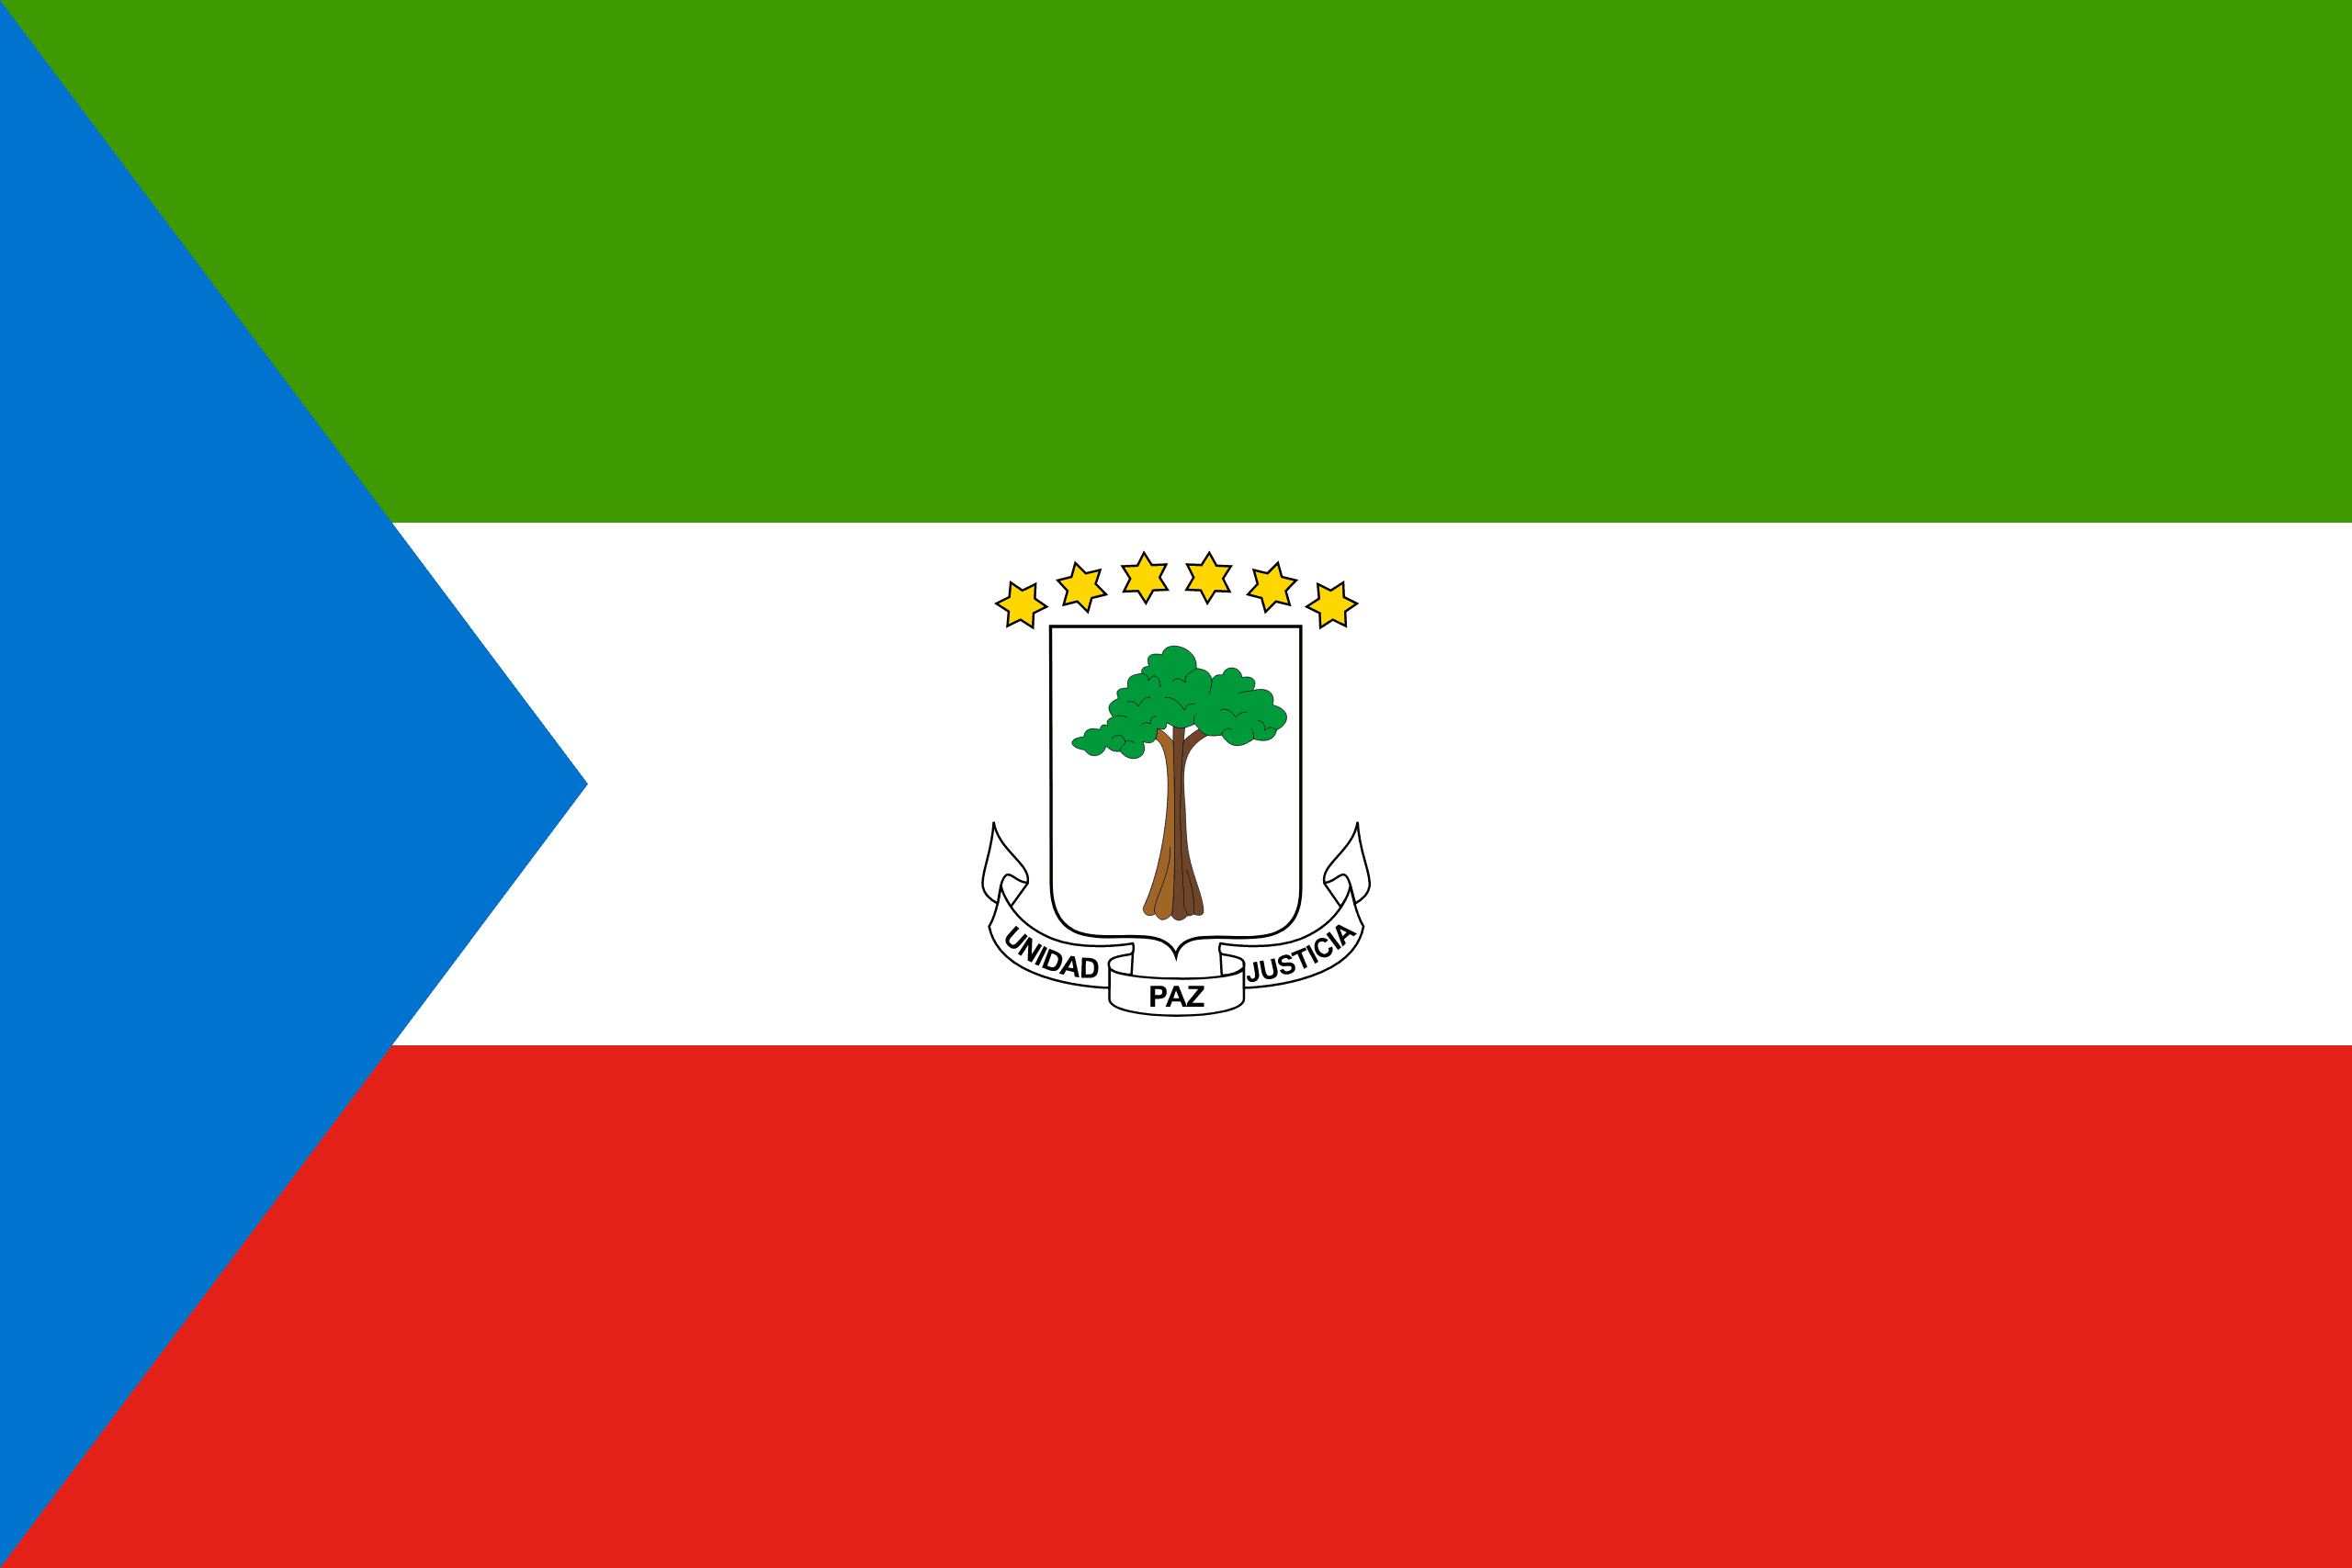

Eritrea


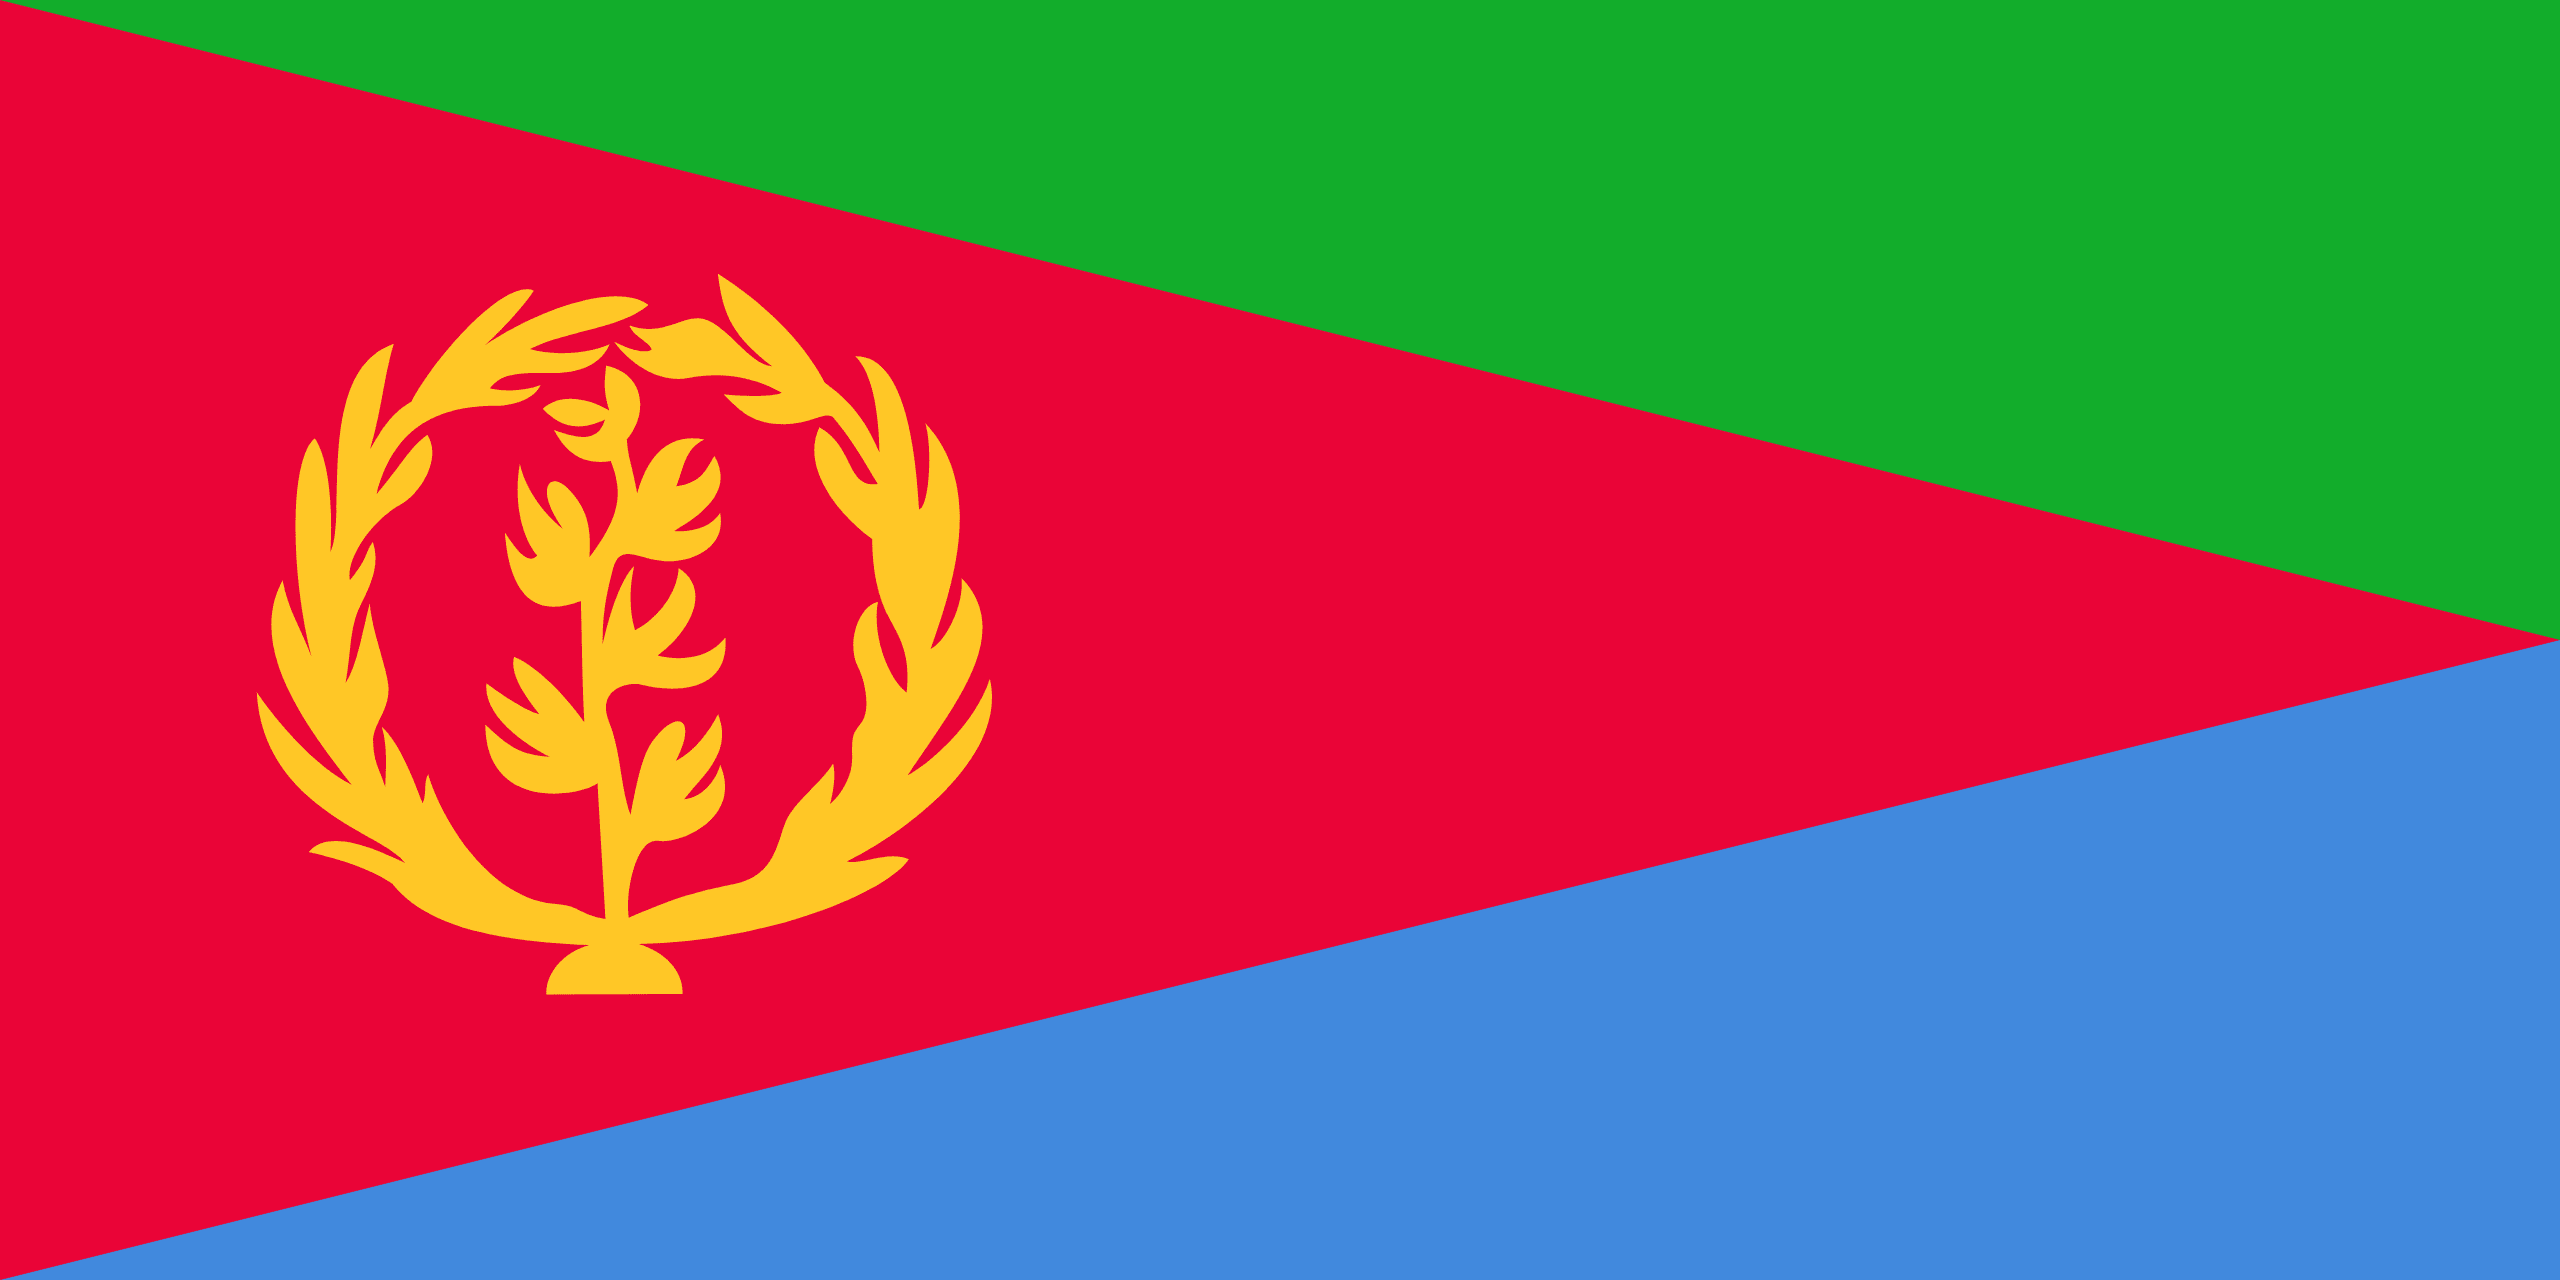

Estonia


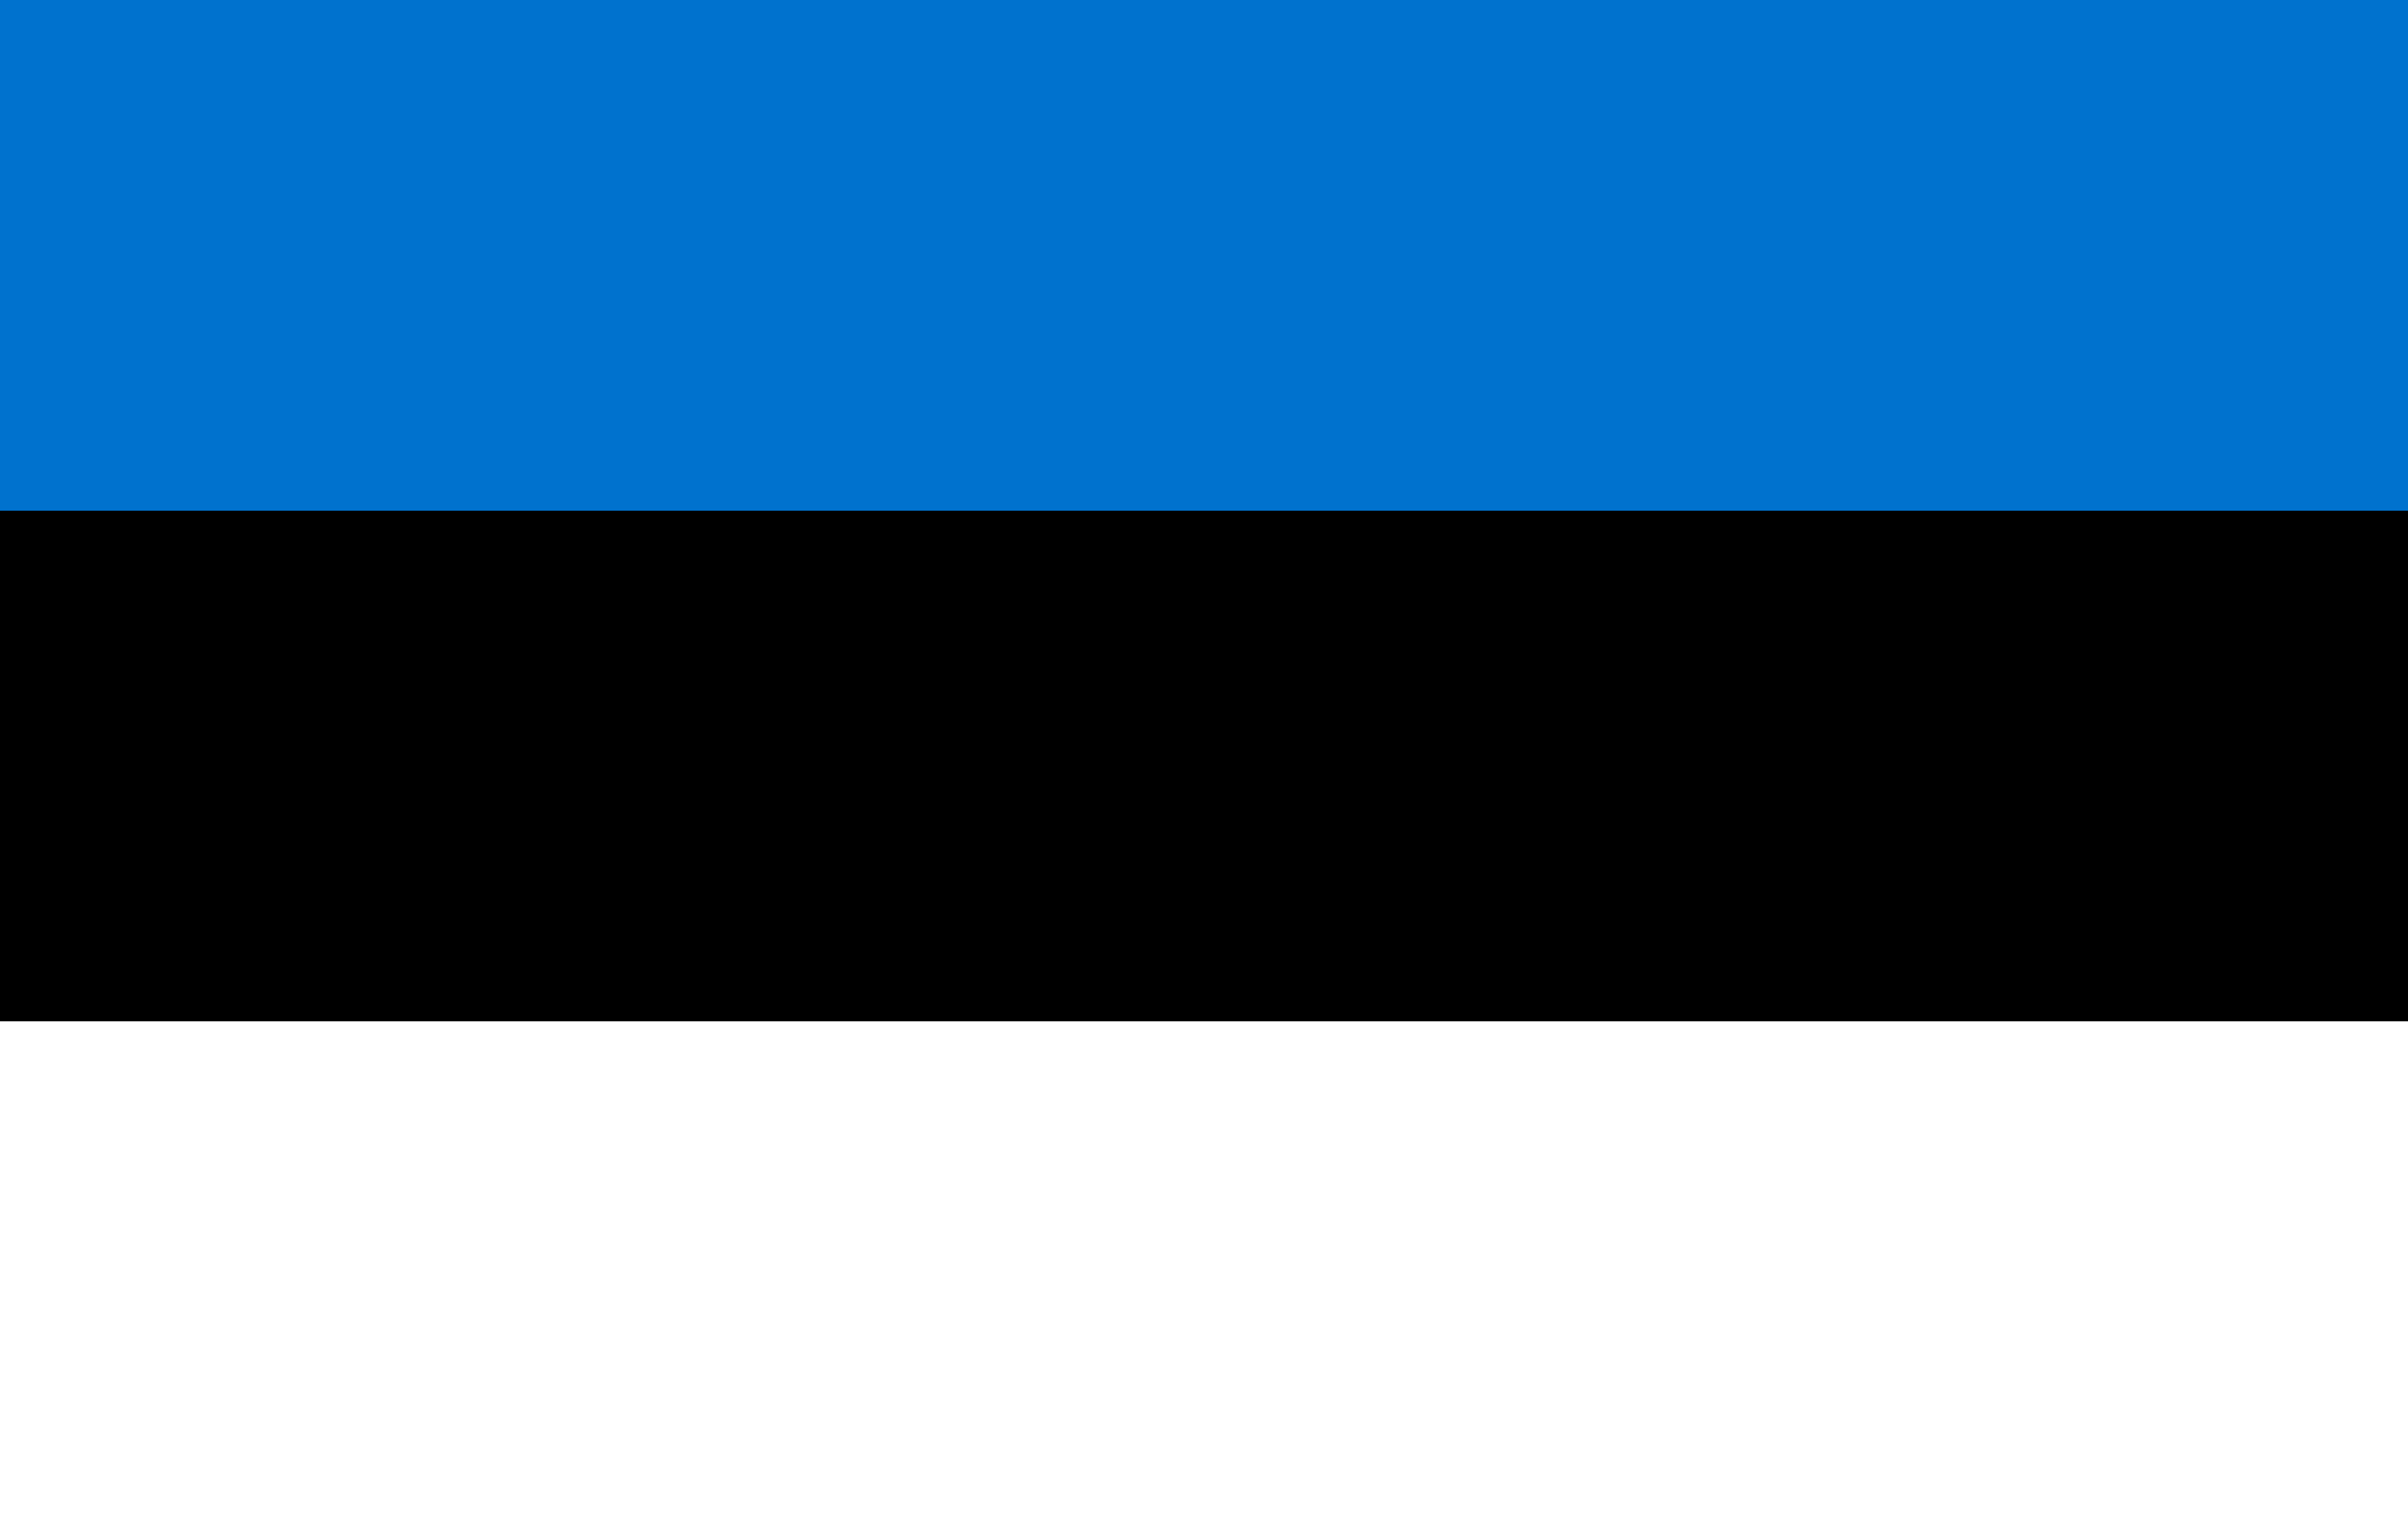

Eswatini


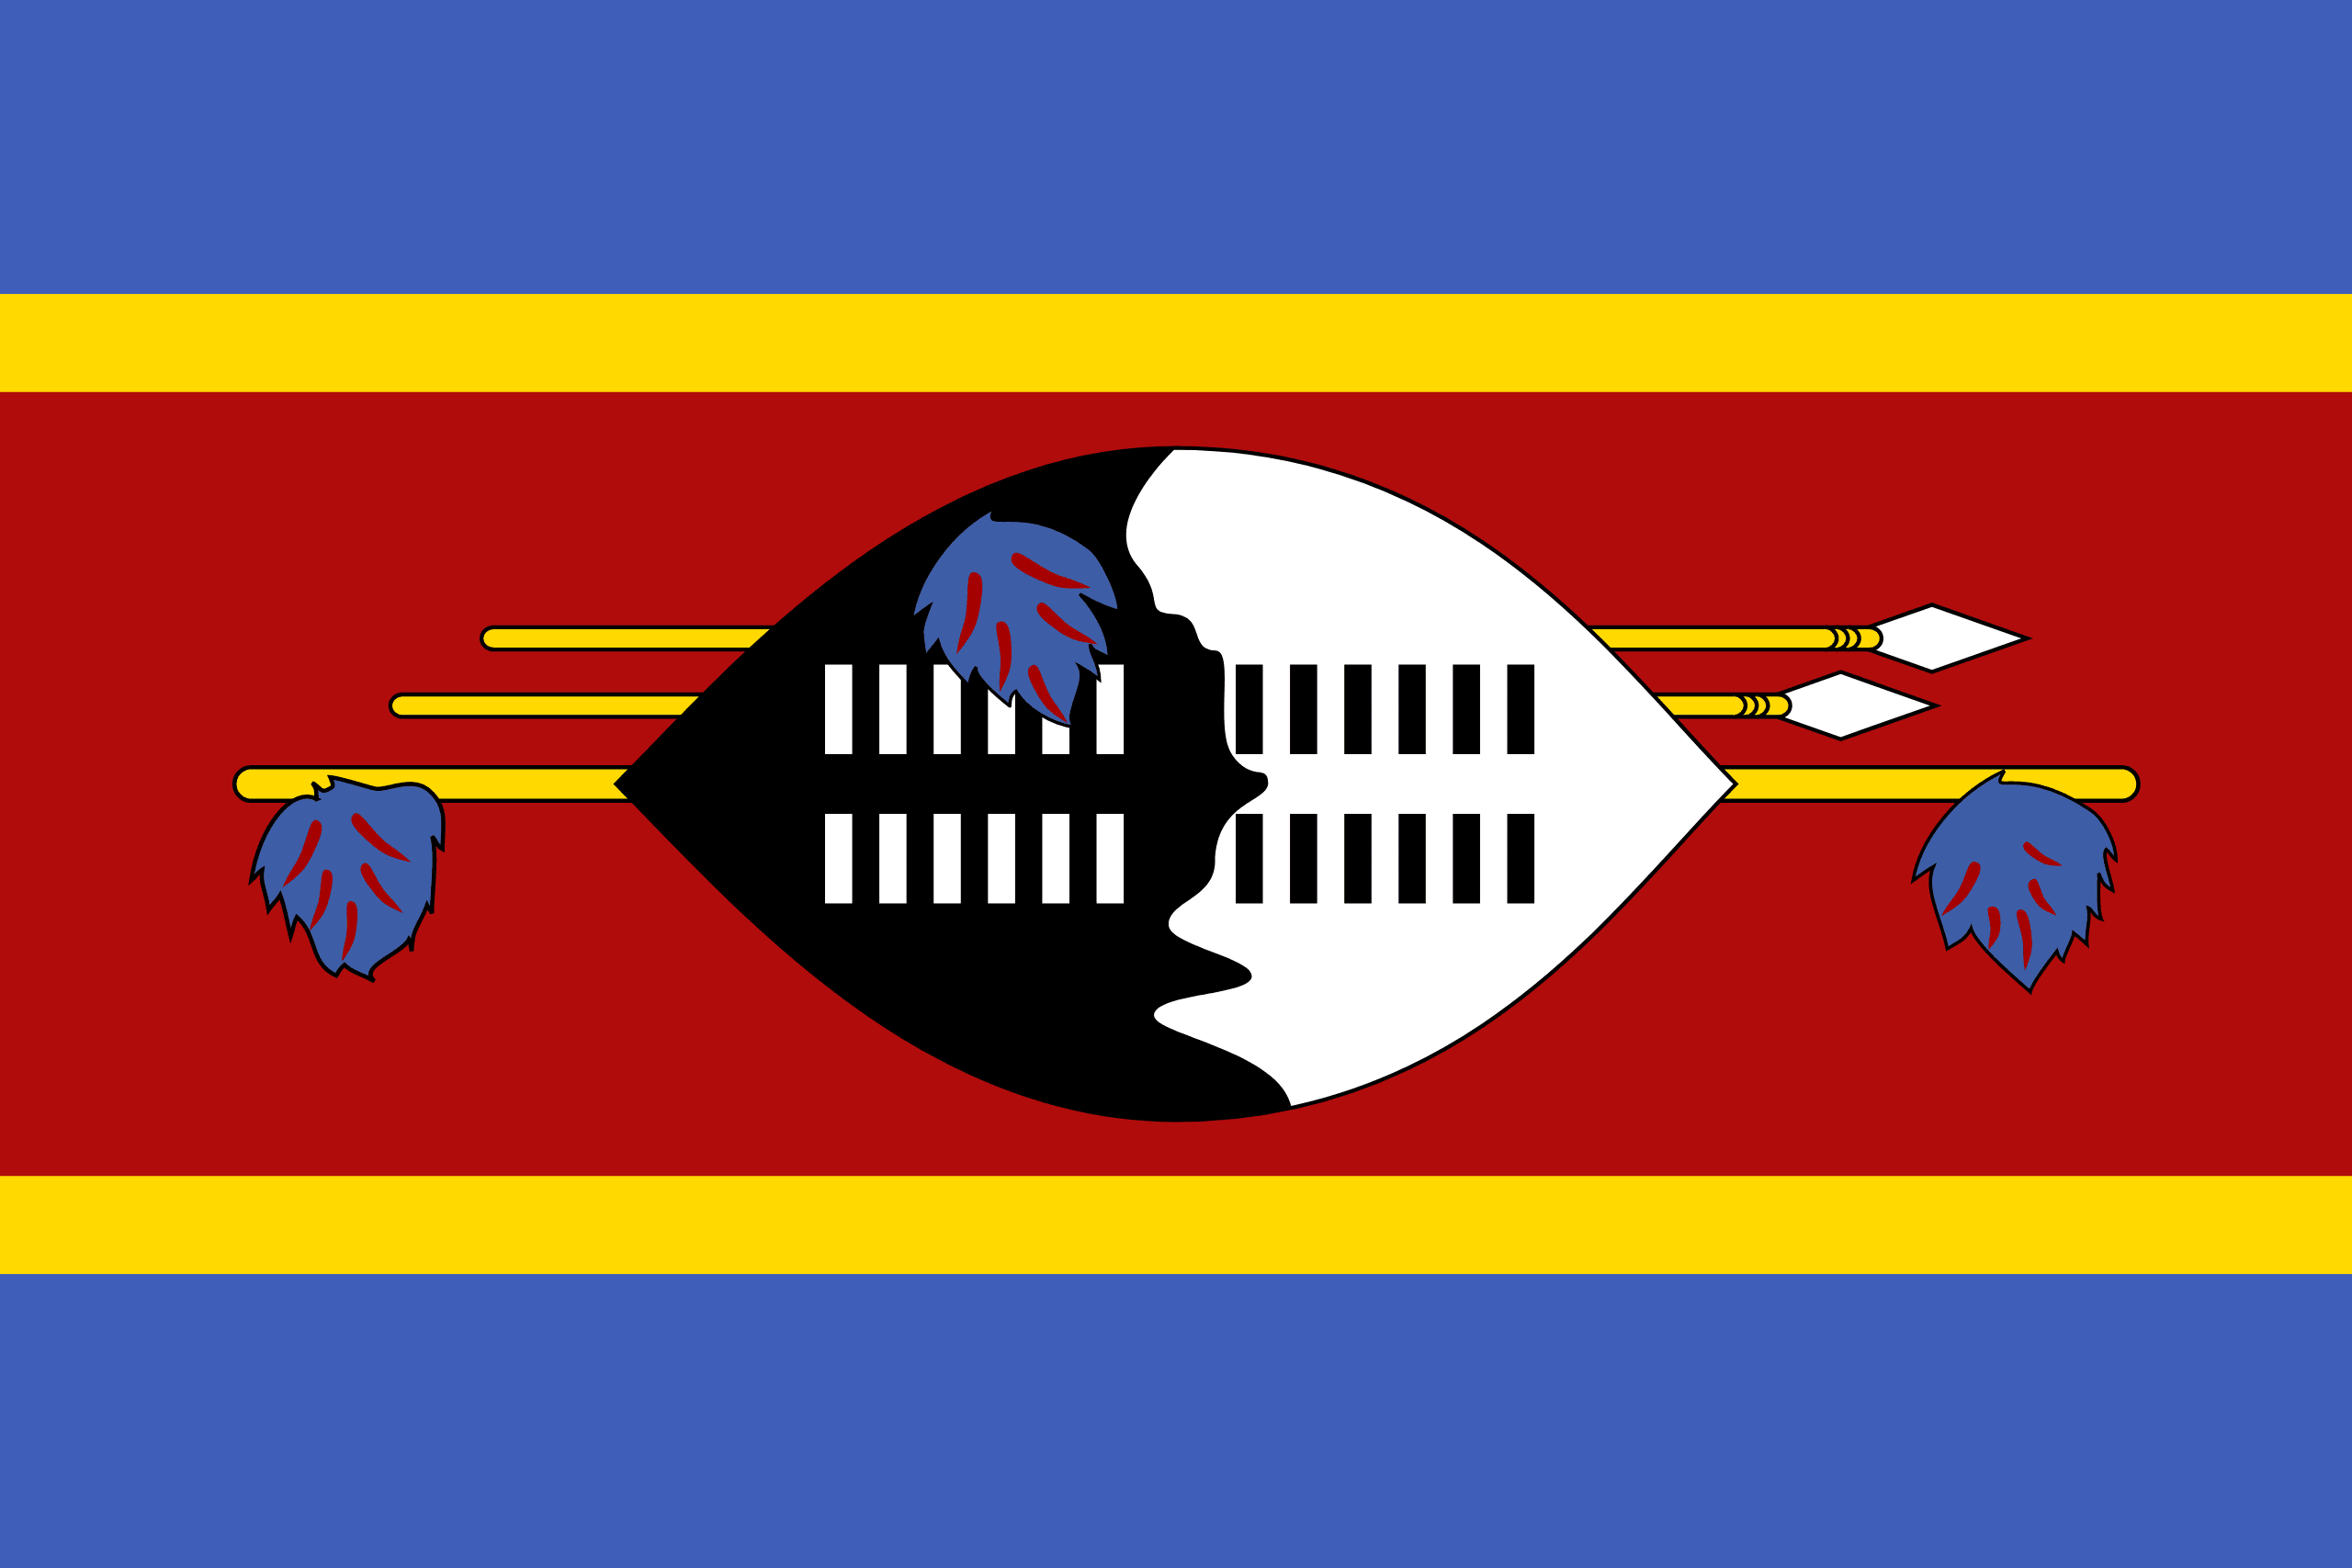

Ethiopia


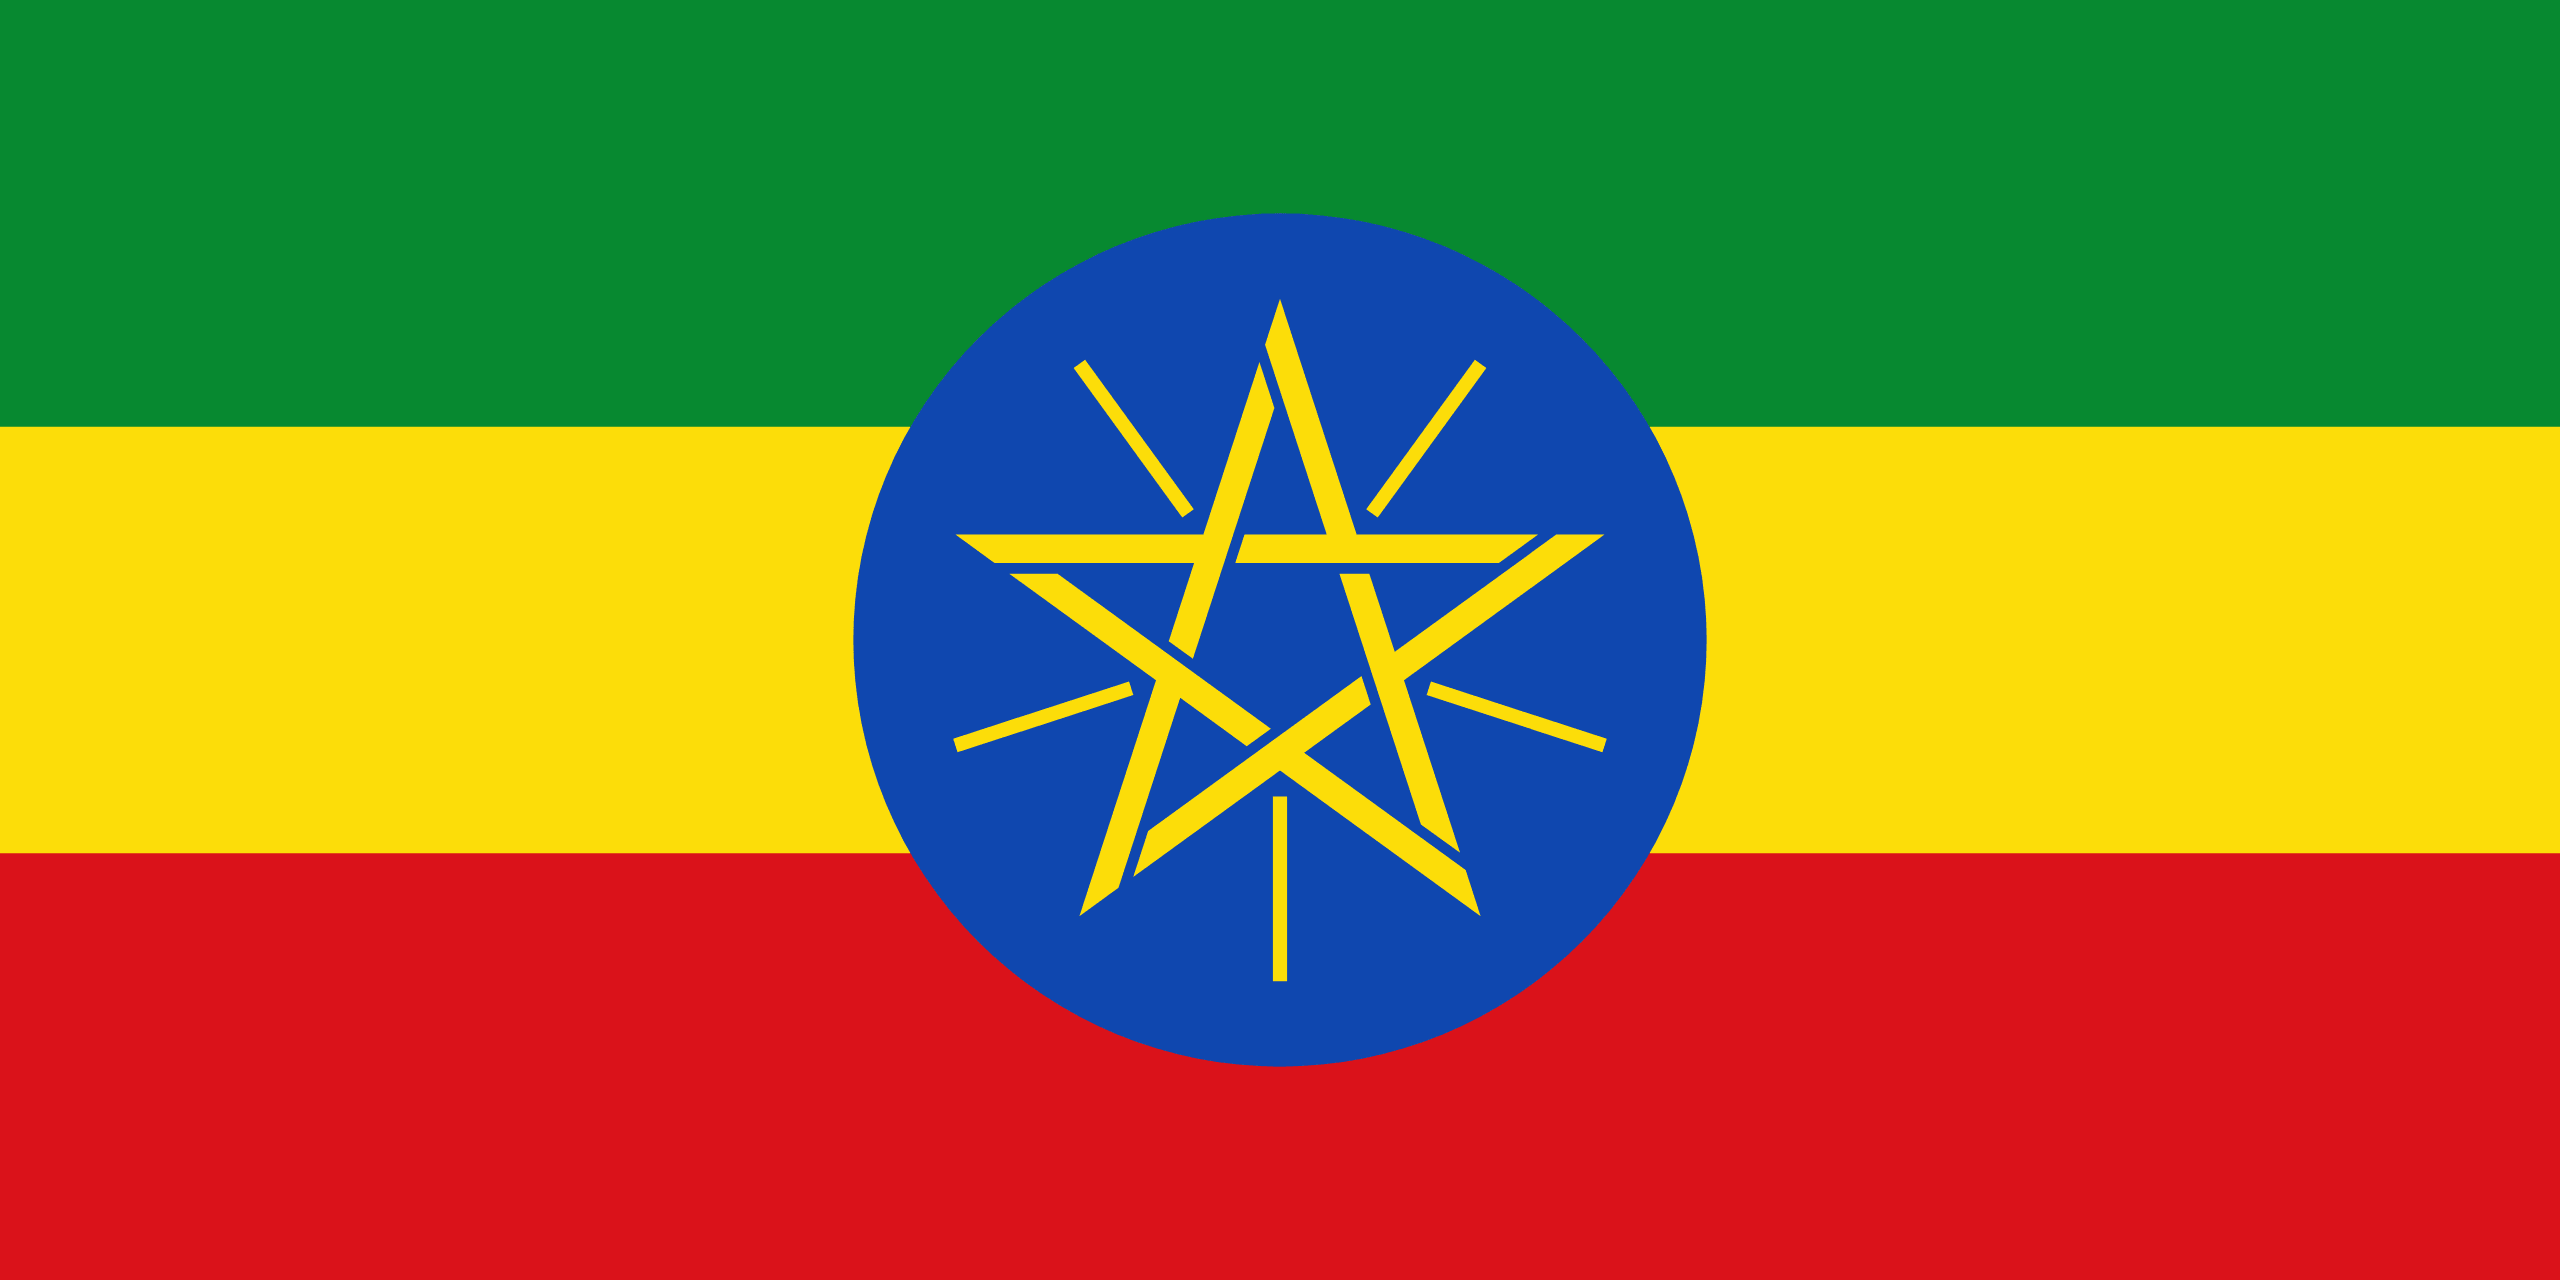

Falkland Islands


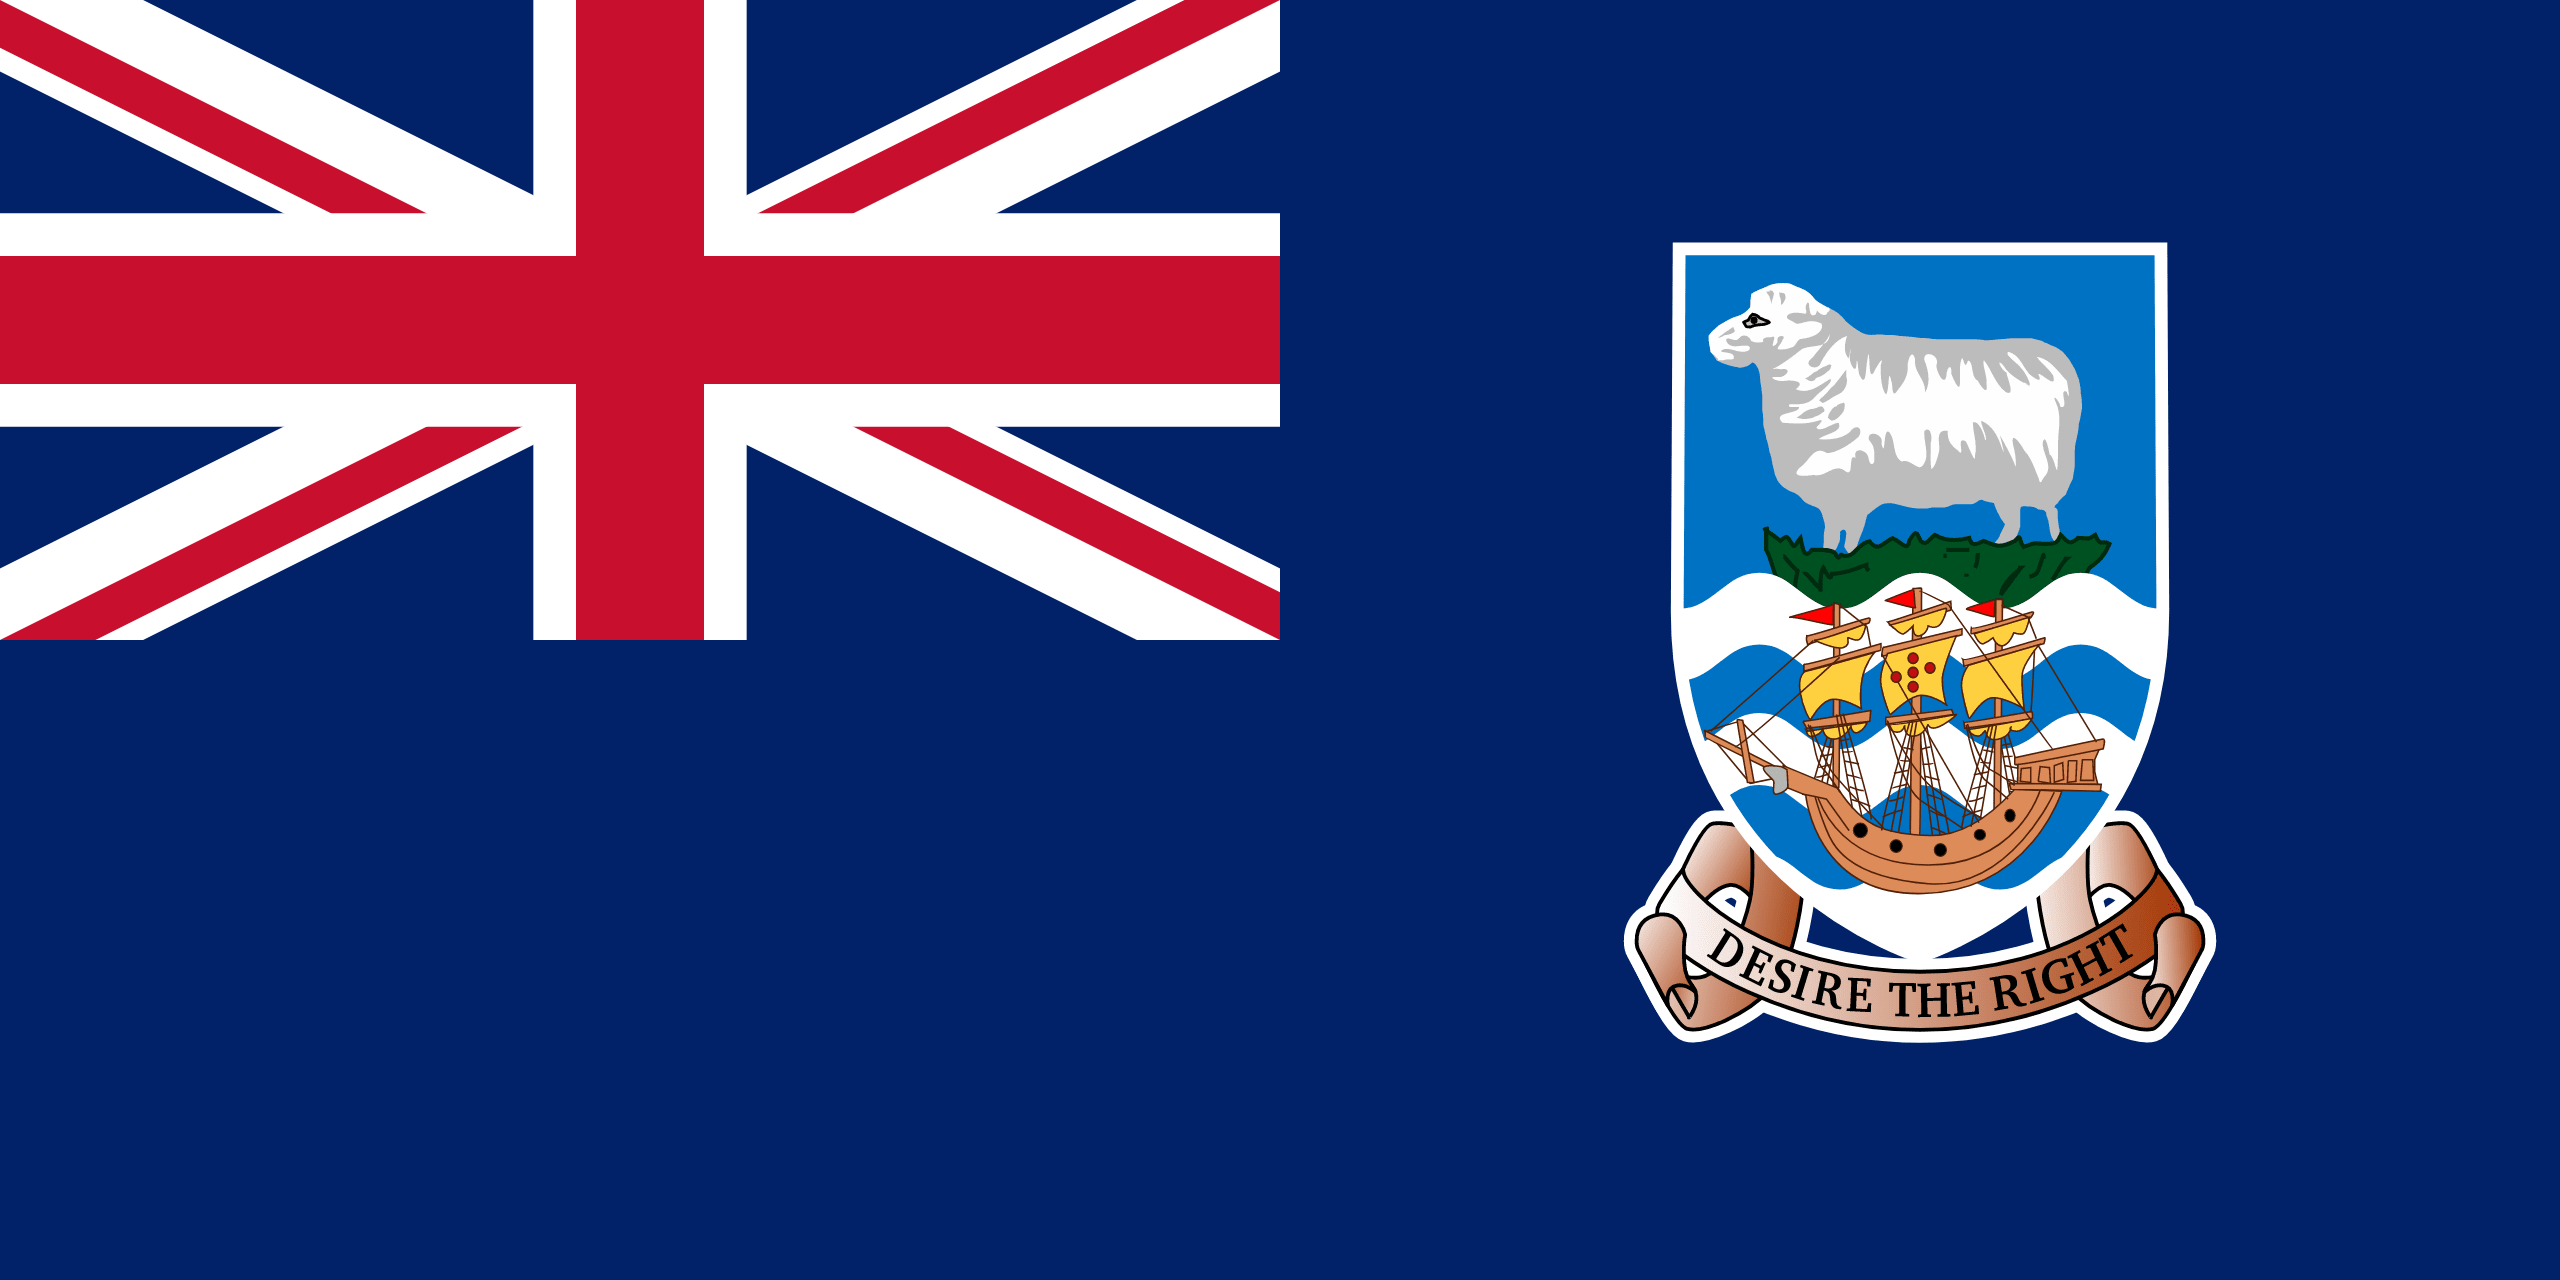

Faroe Islands


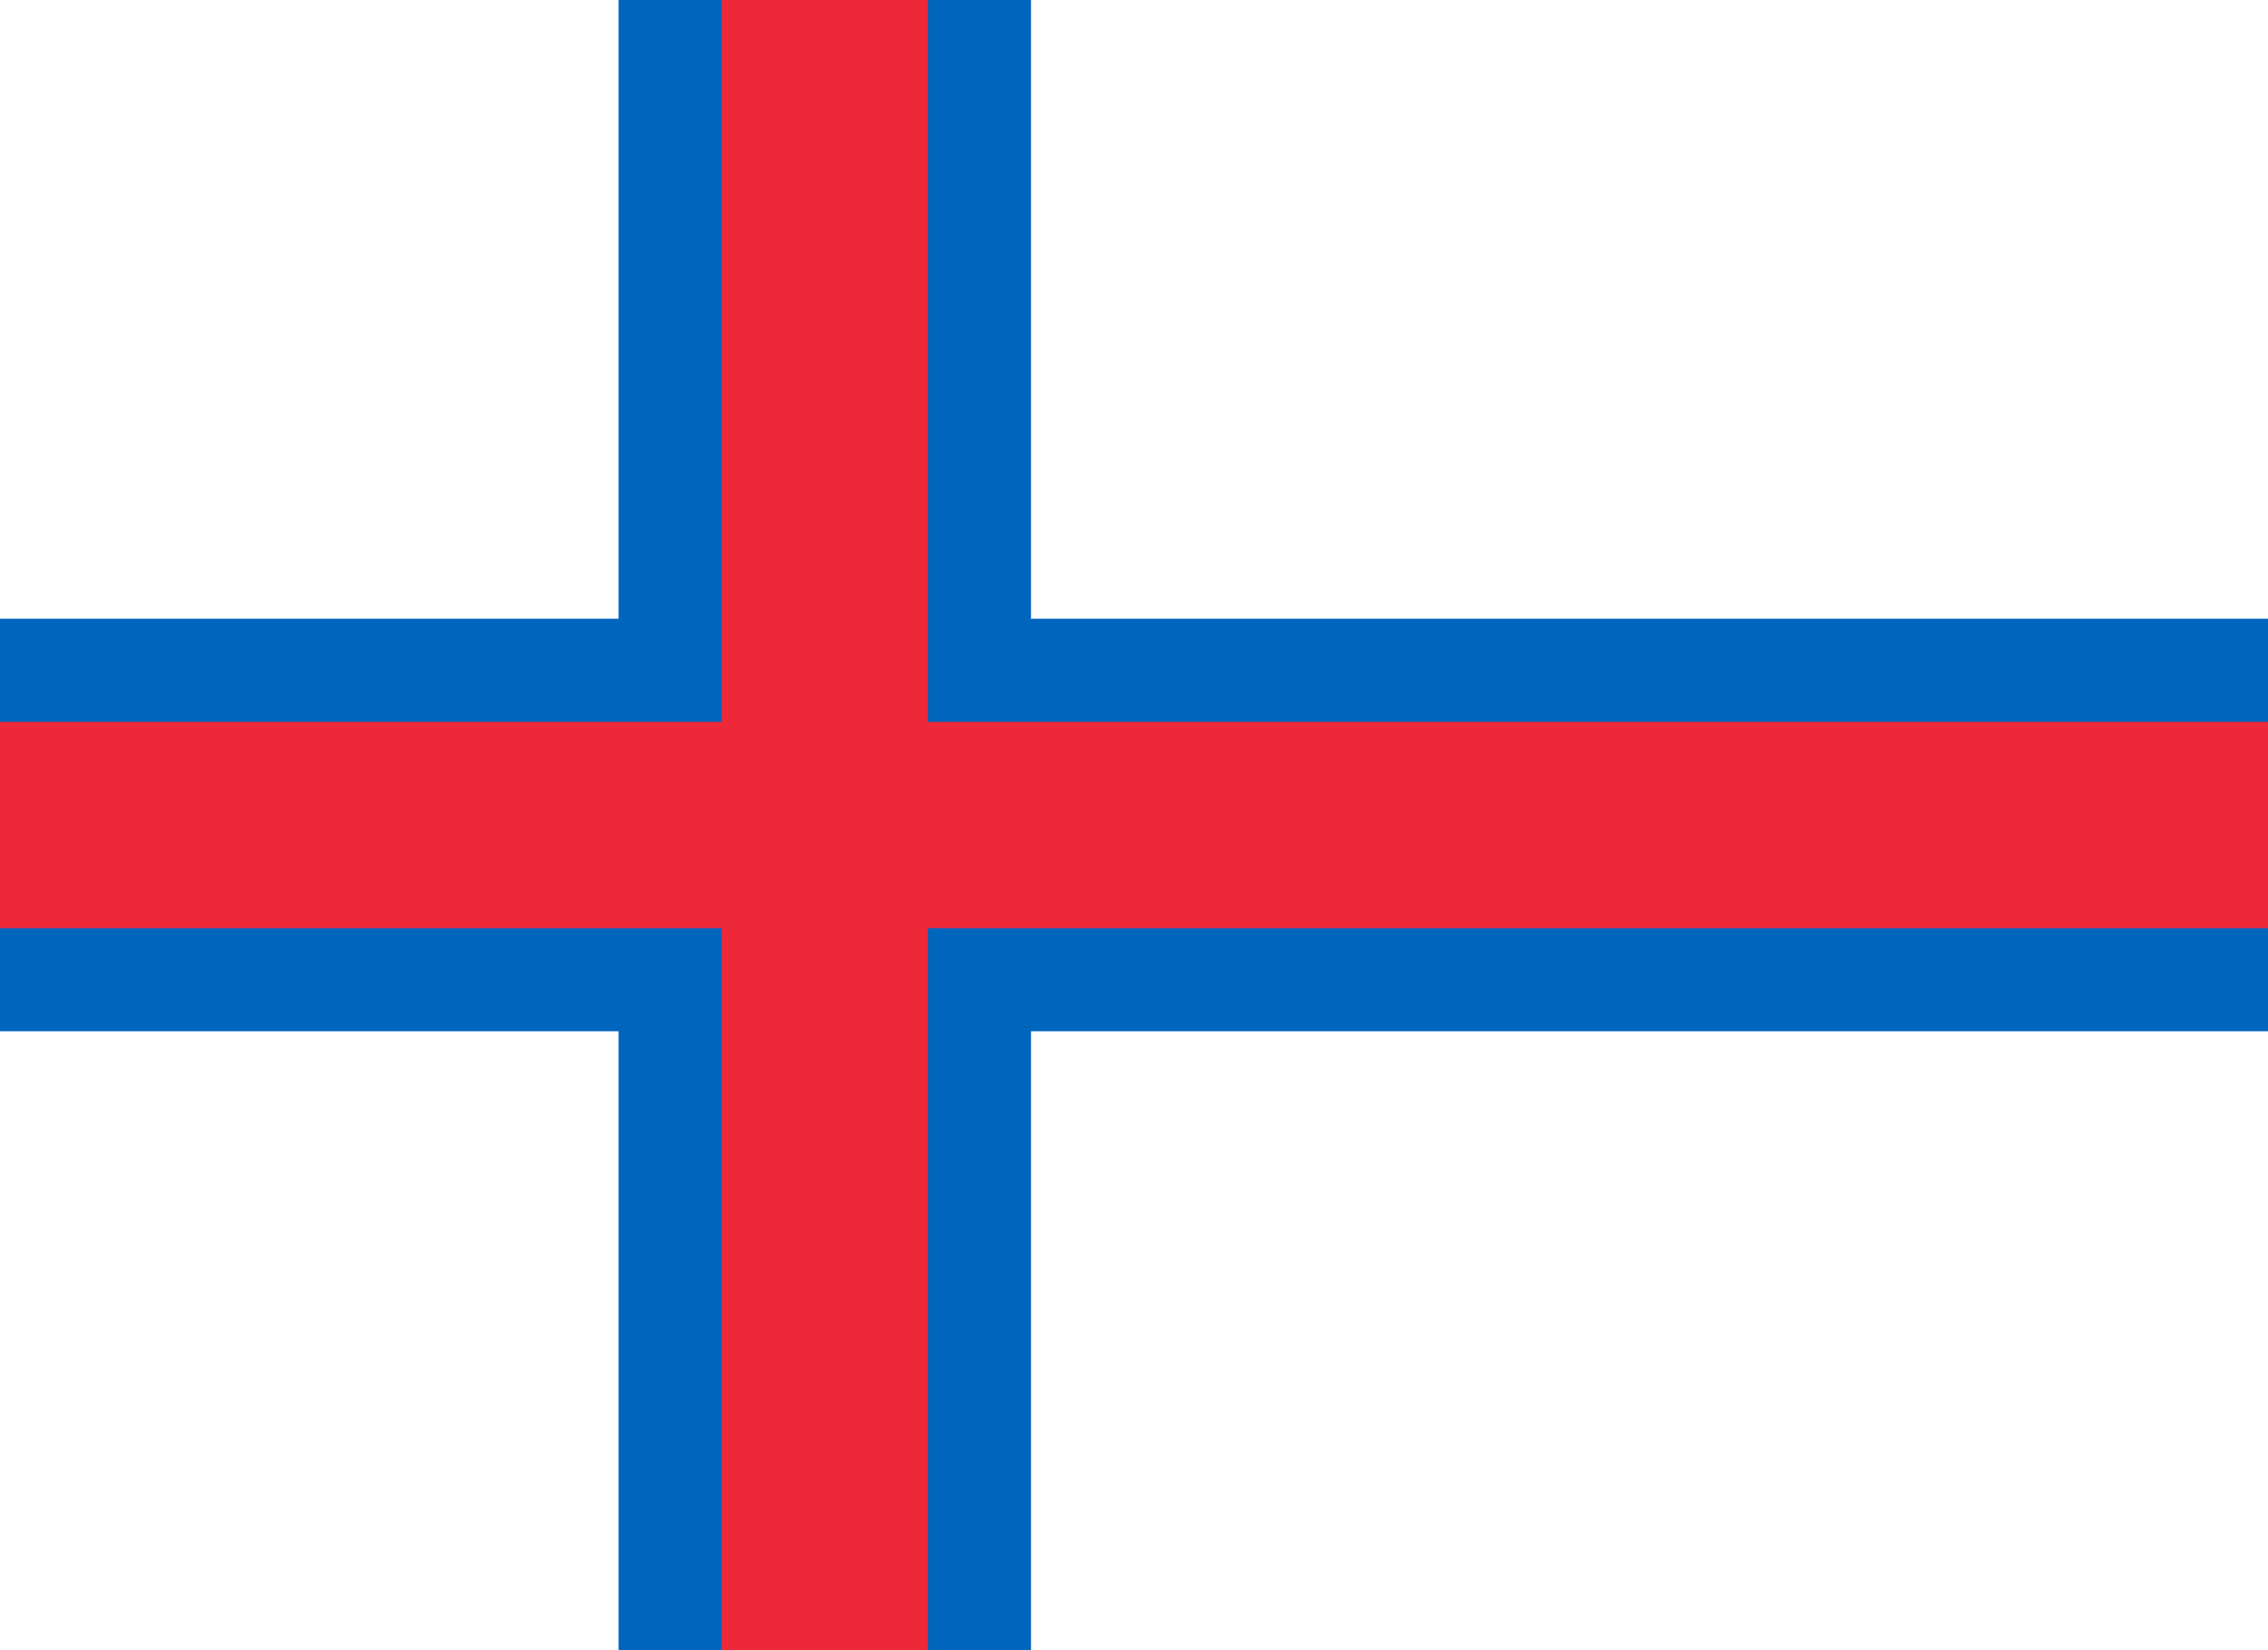

Fiji


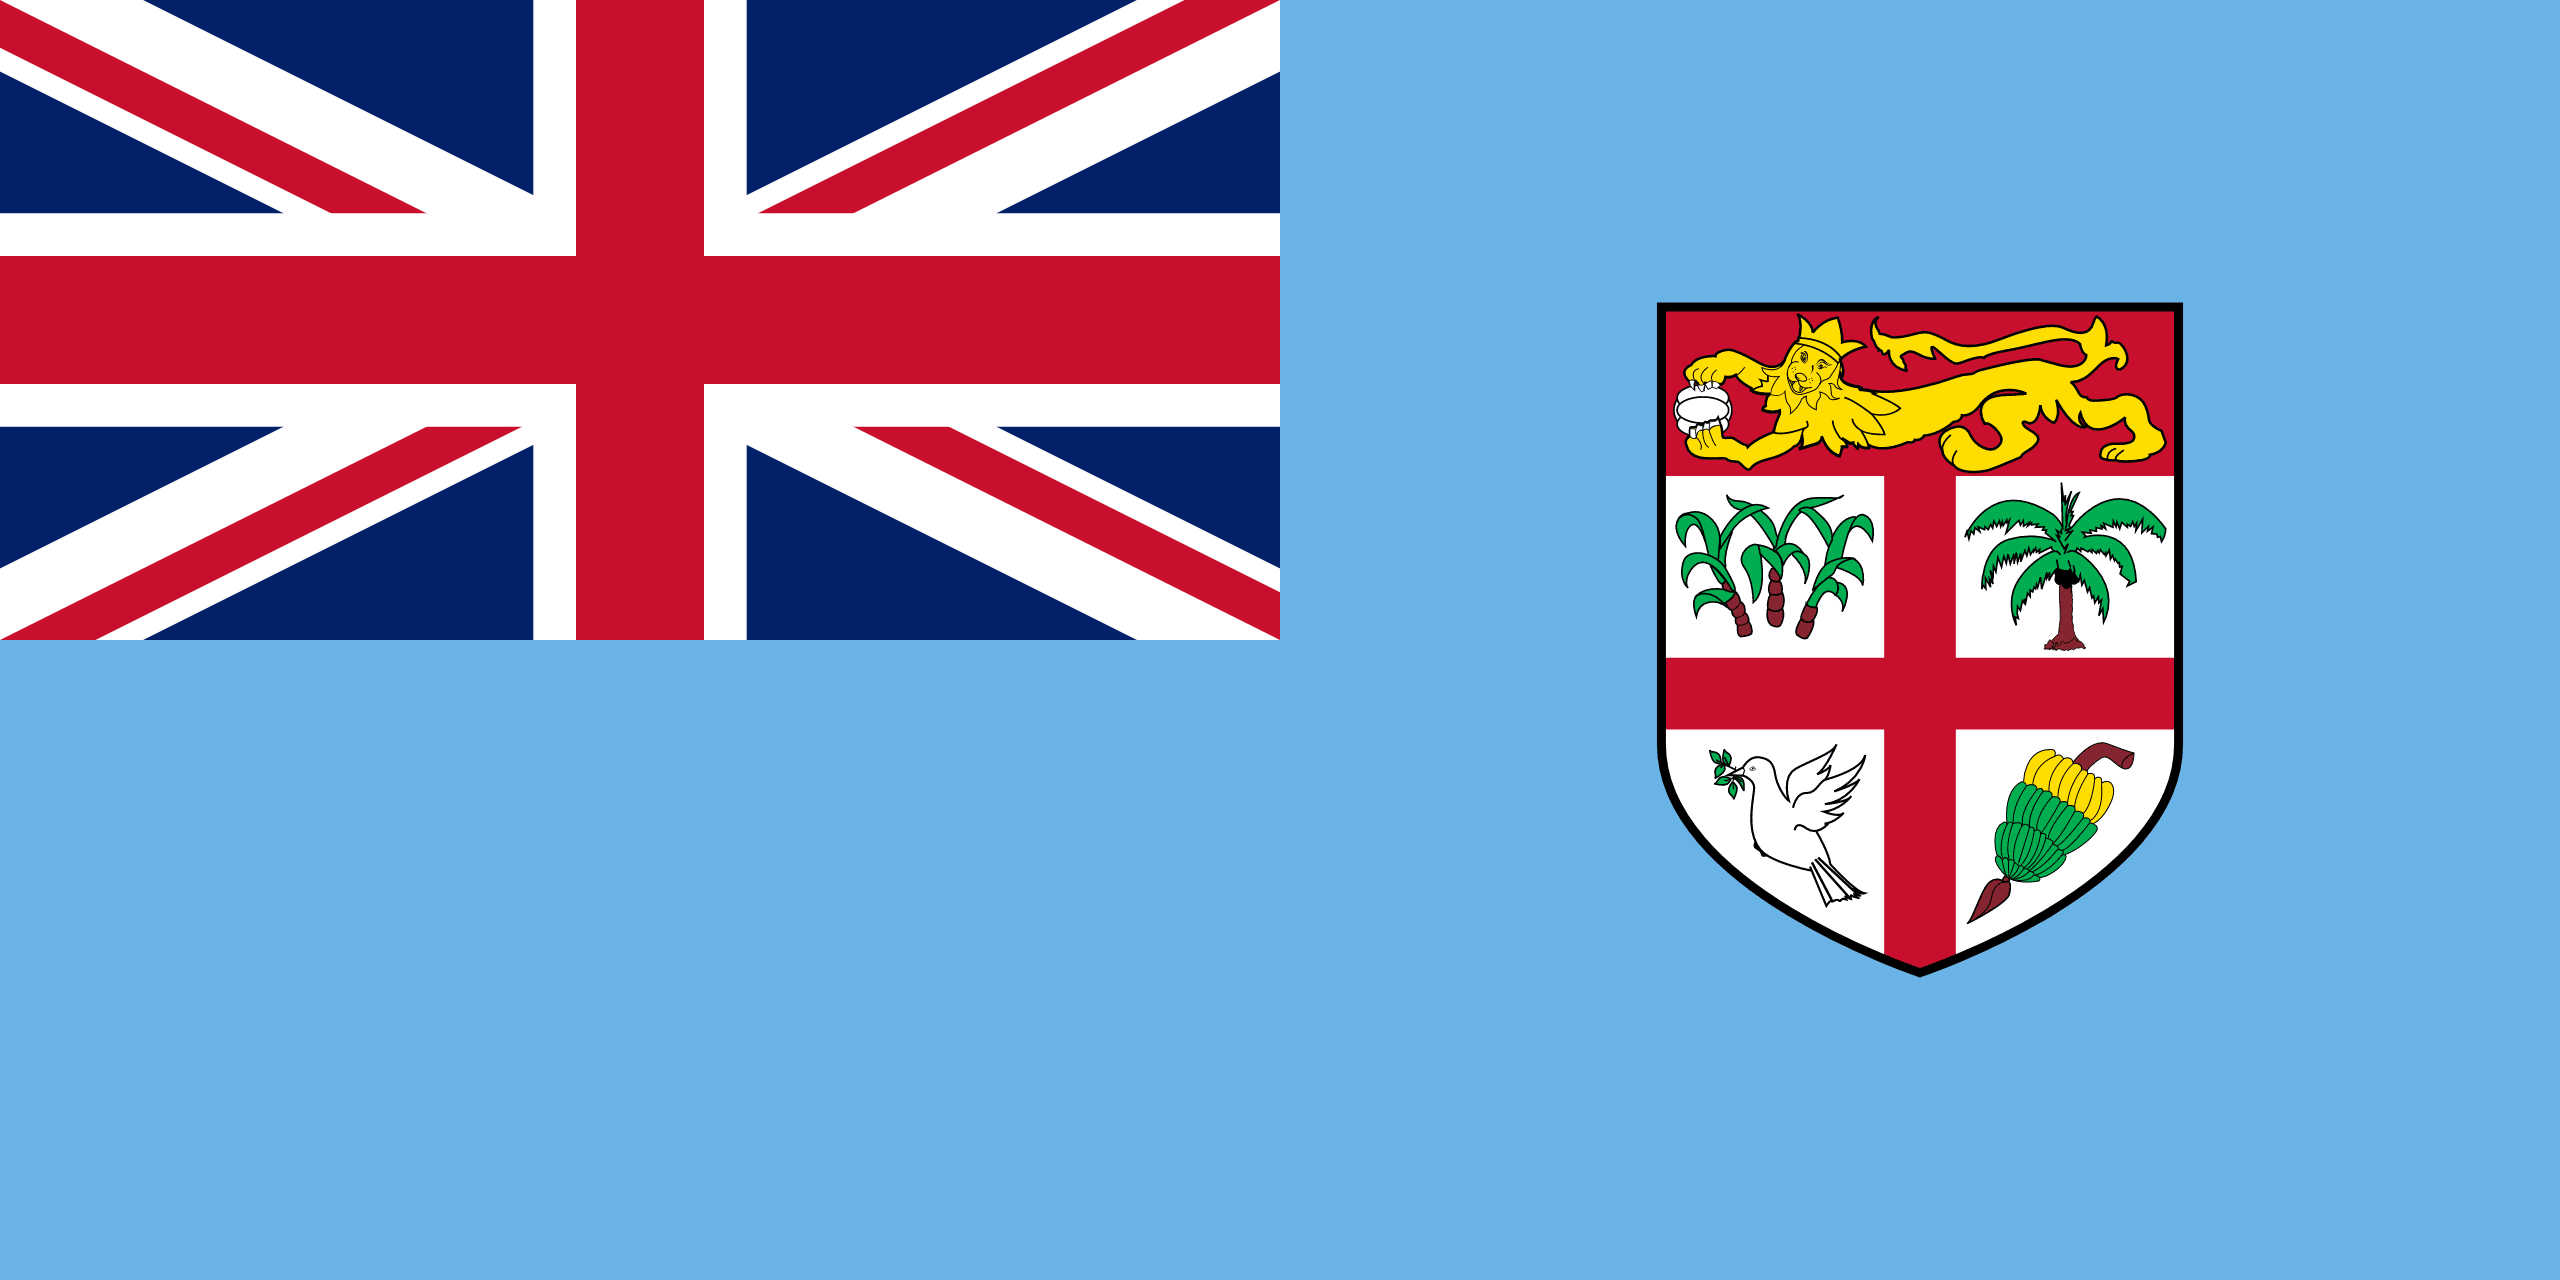

Finland


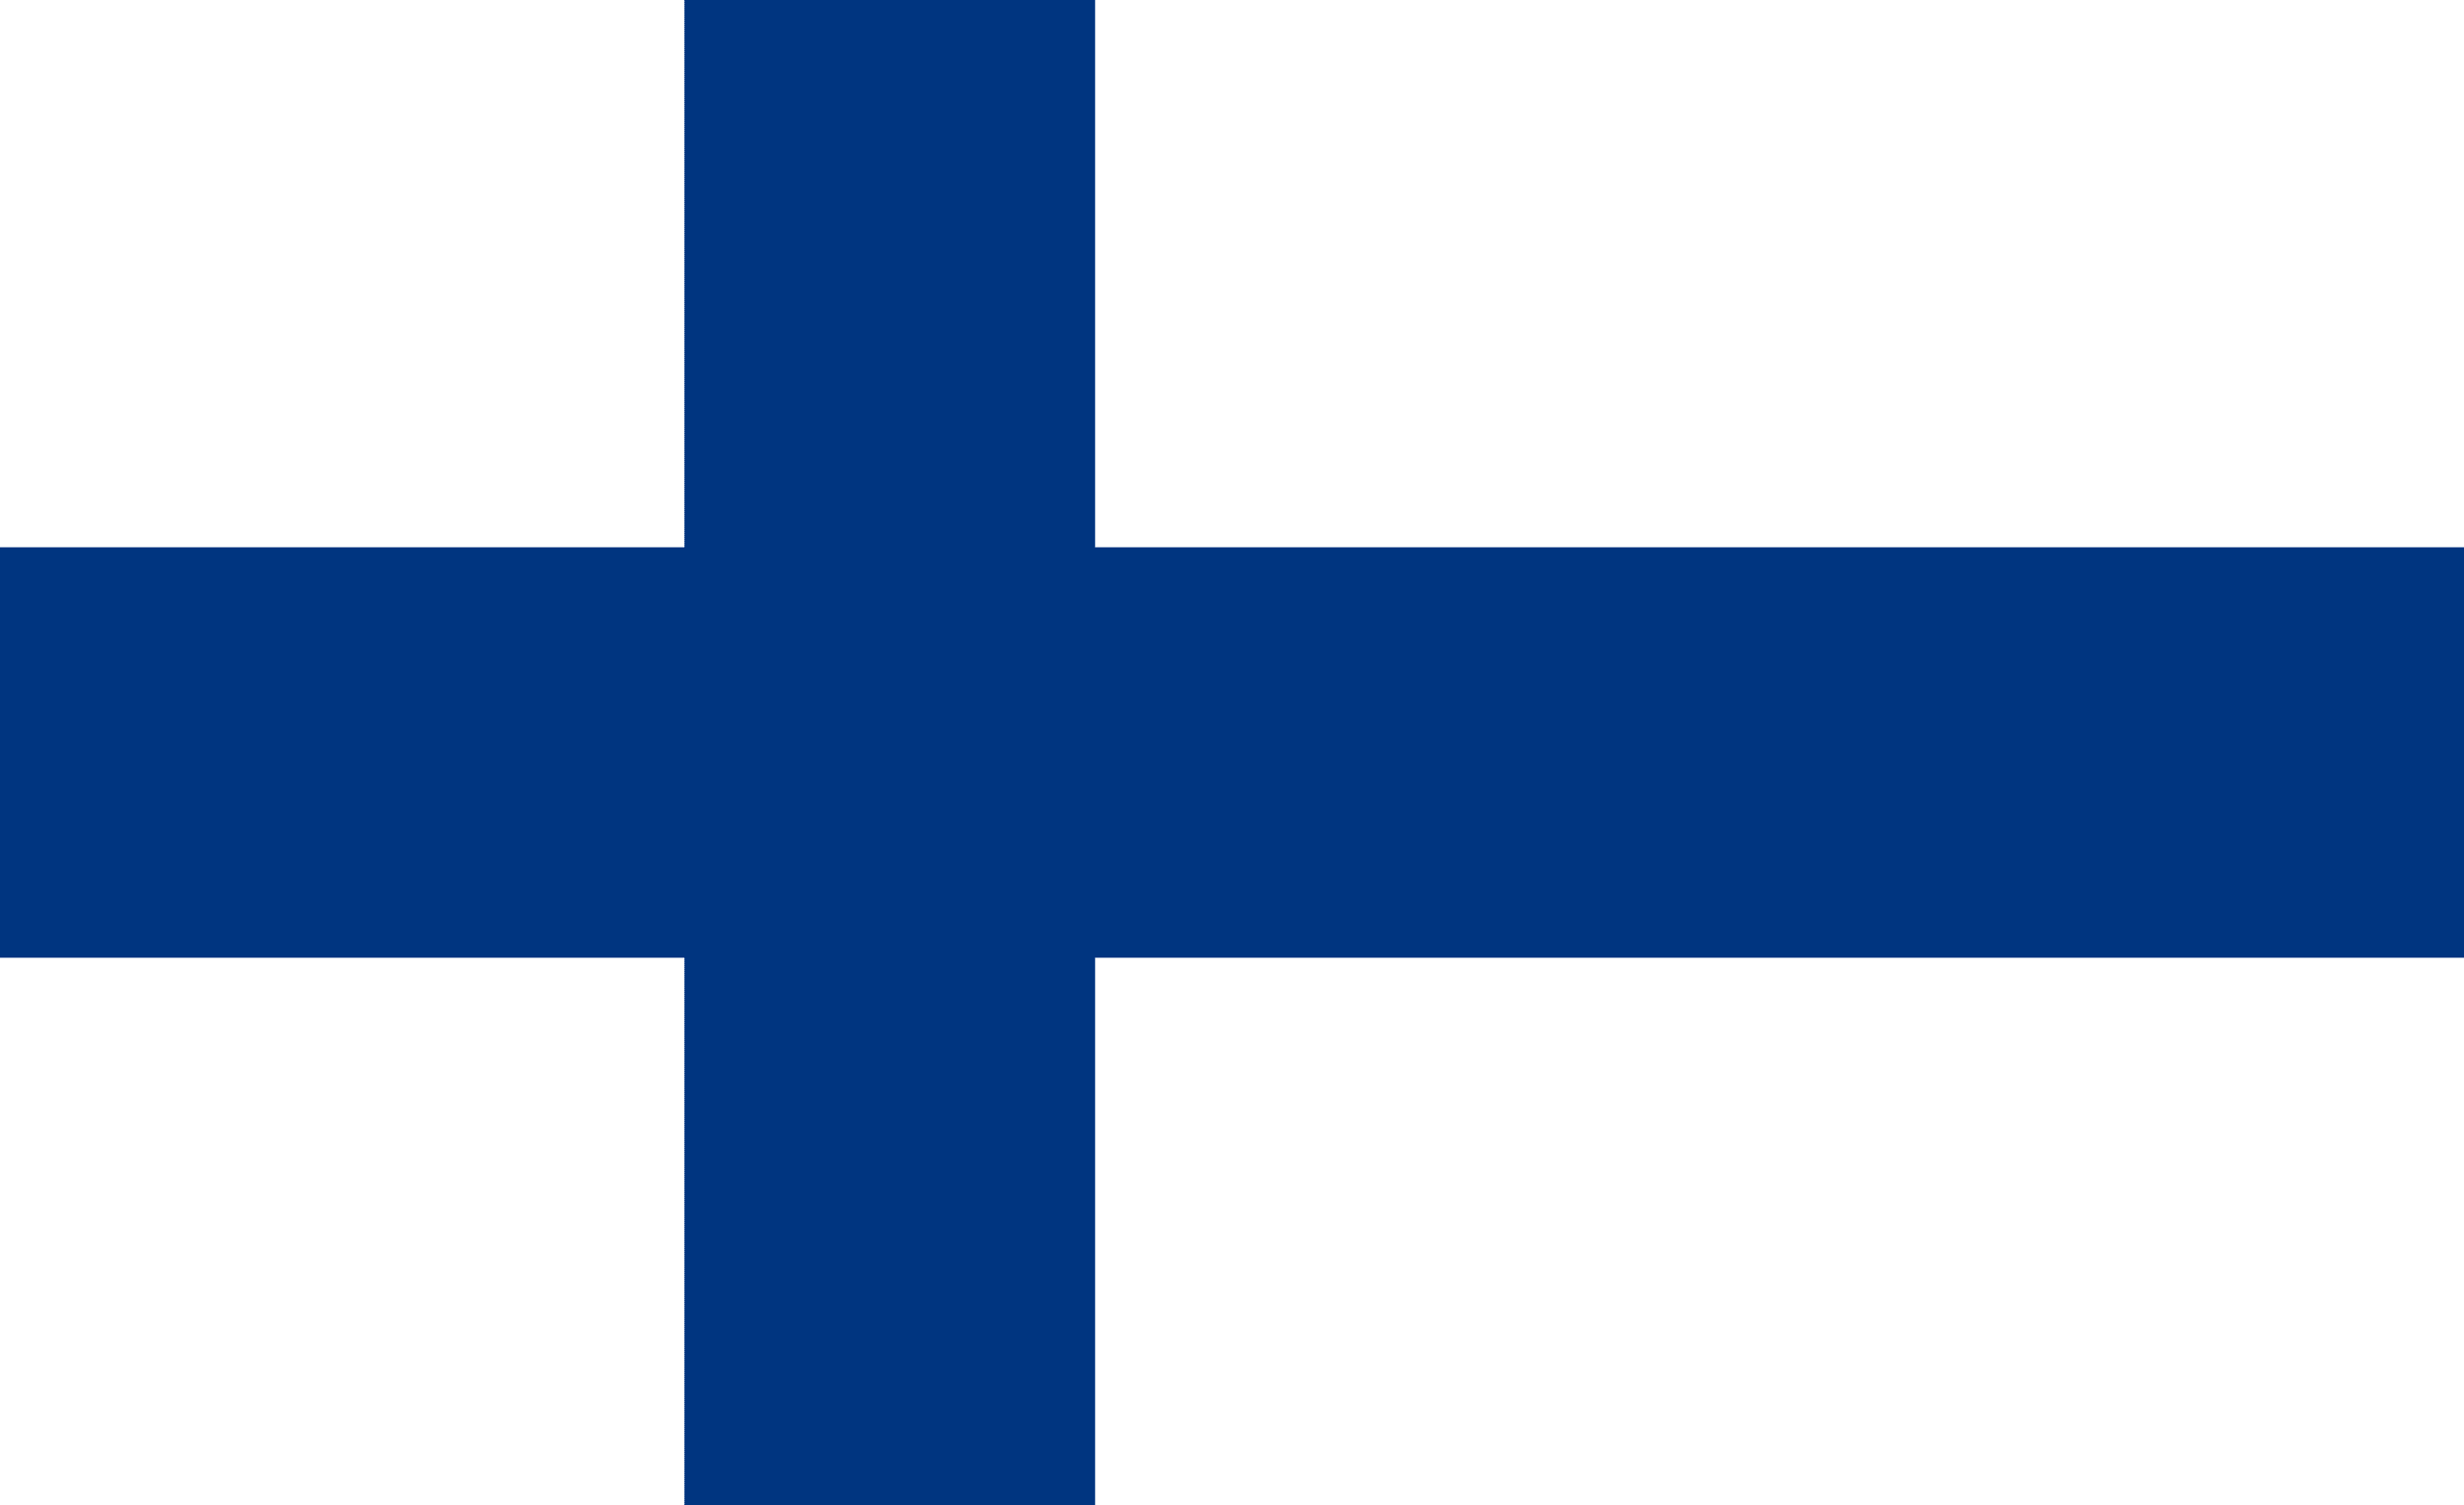

France


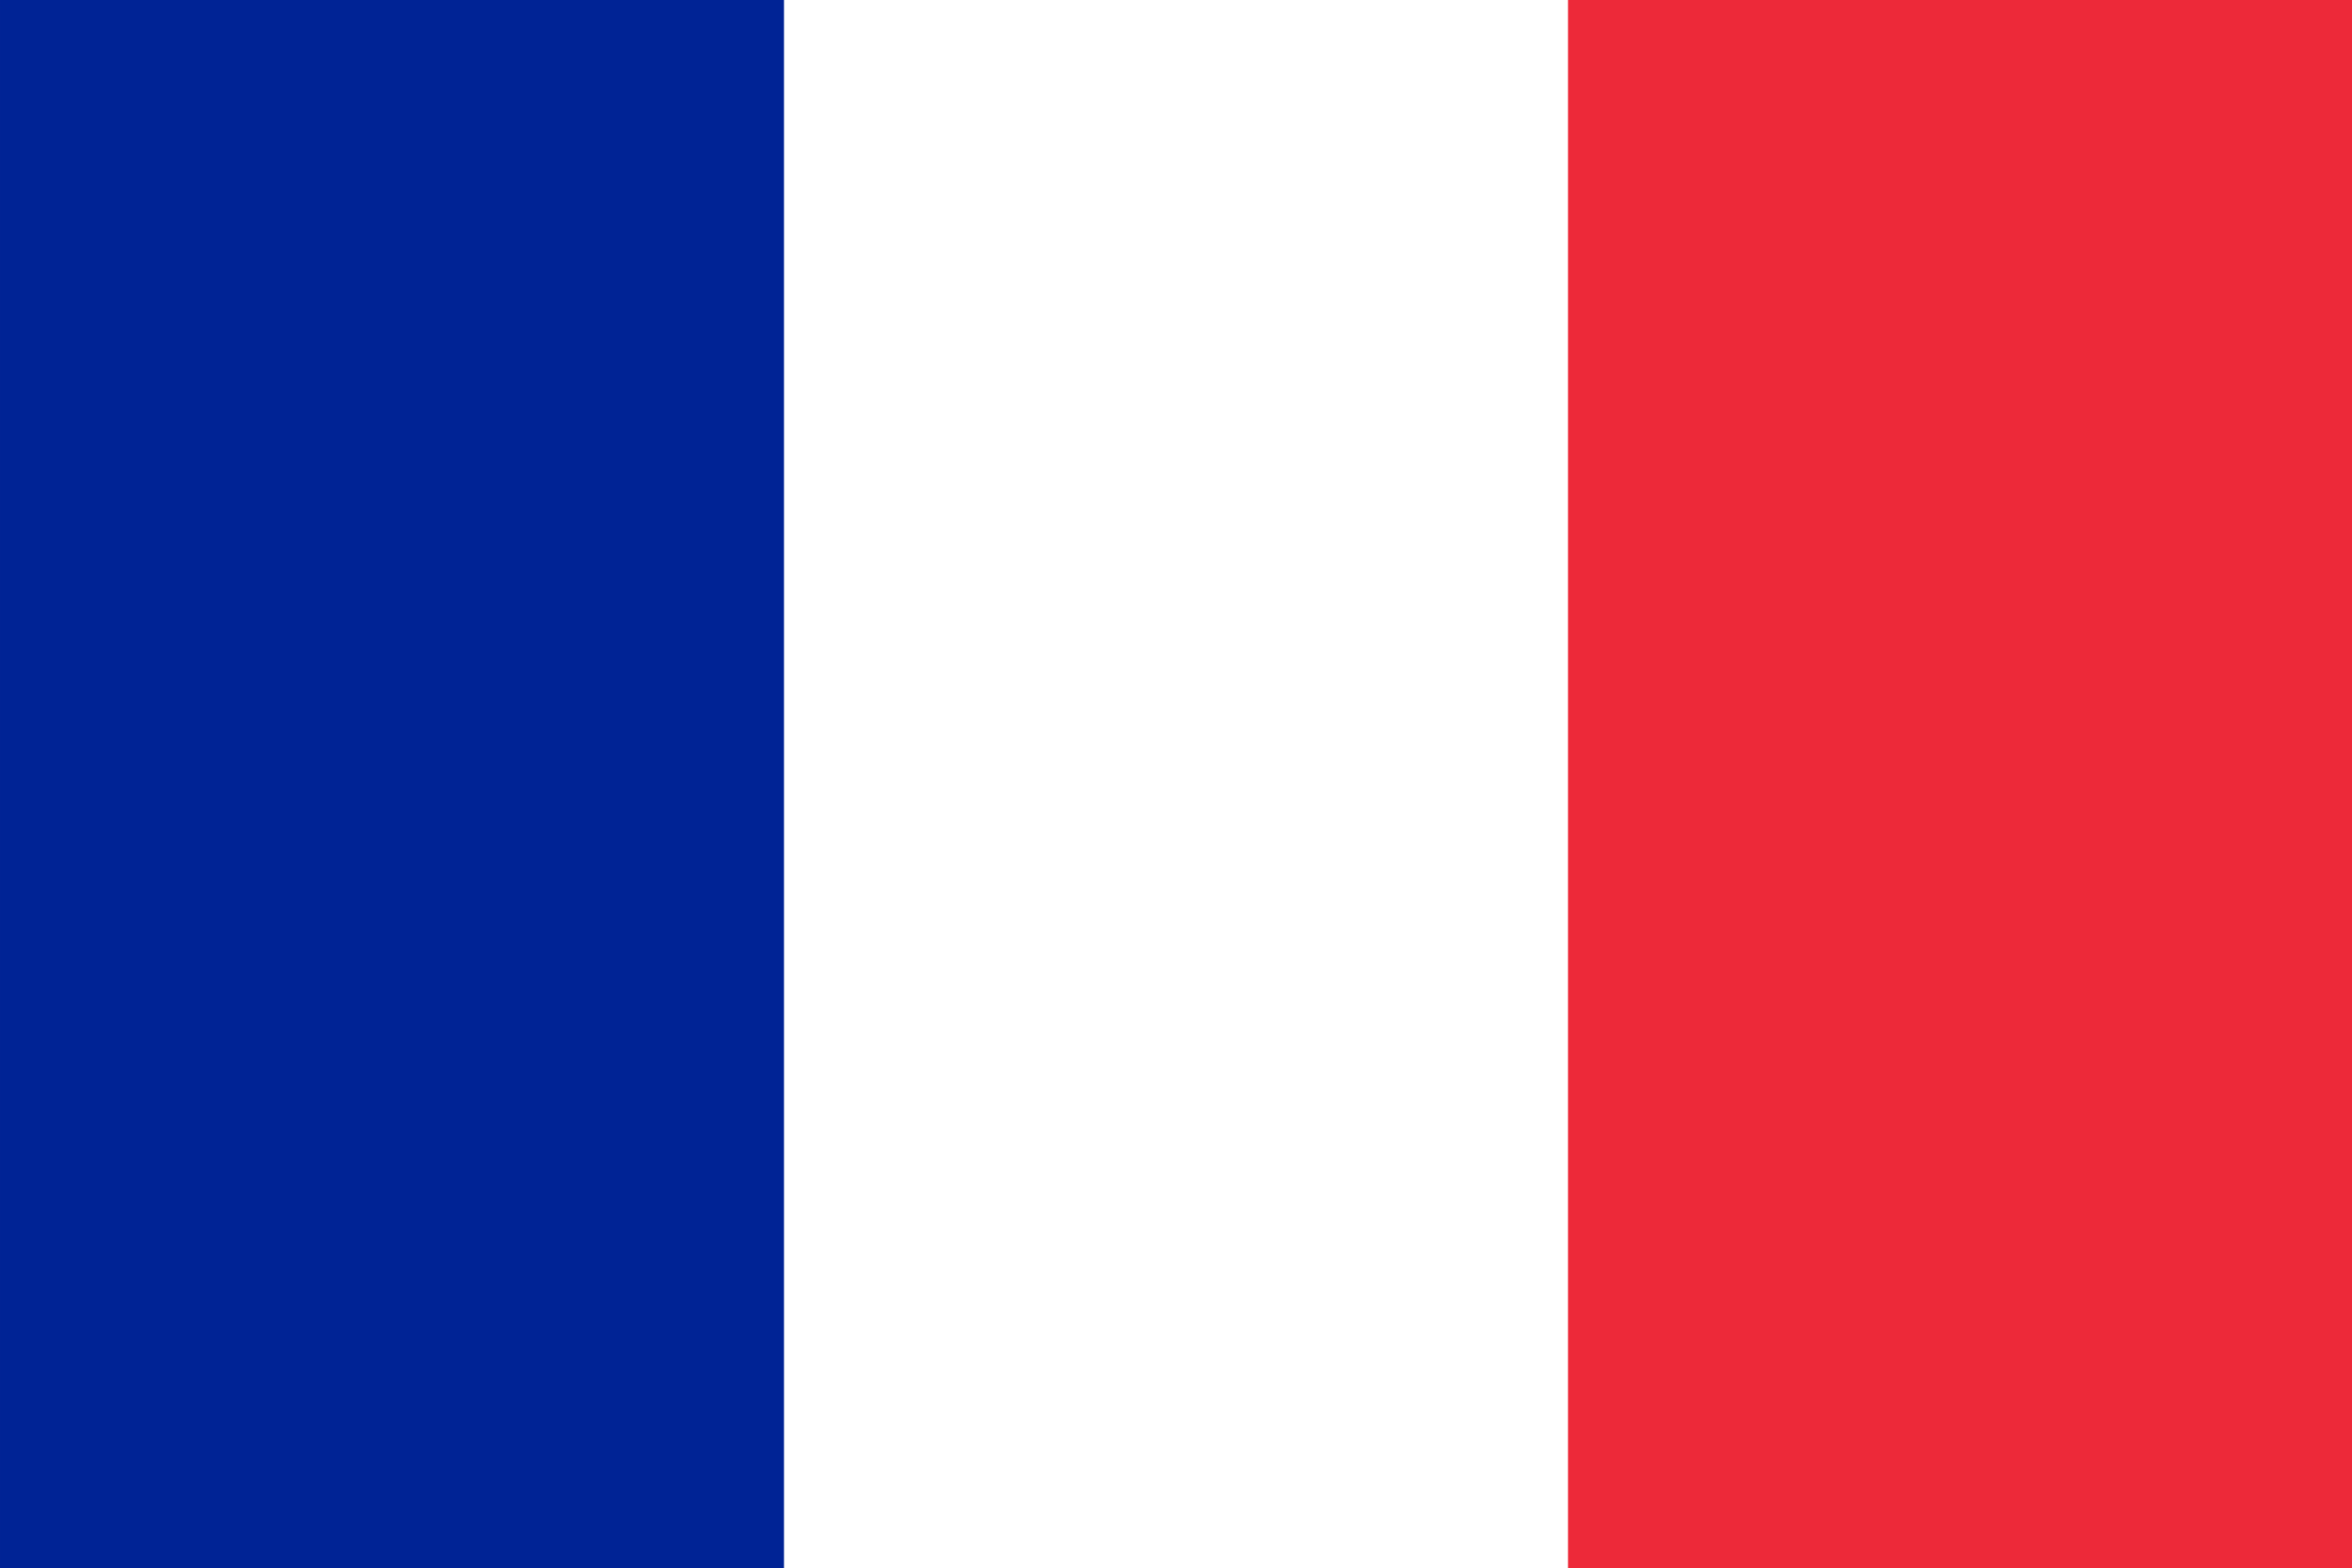

French Guiana


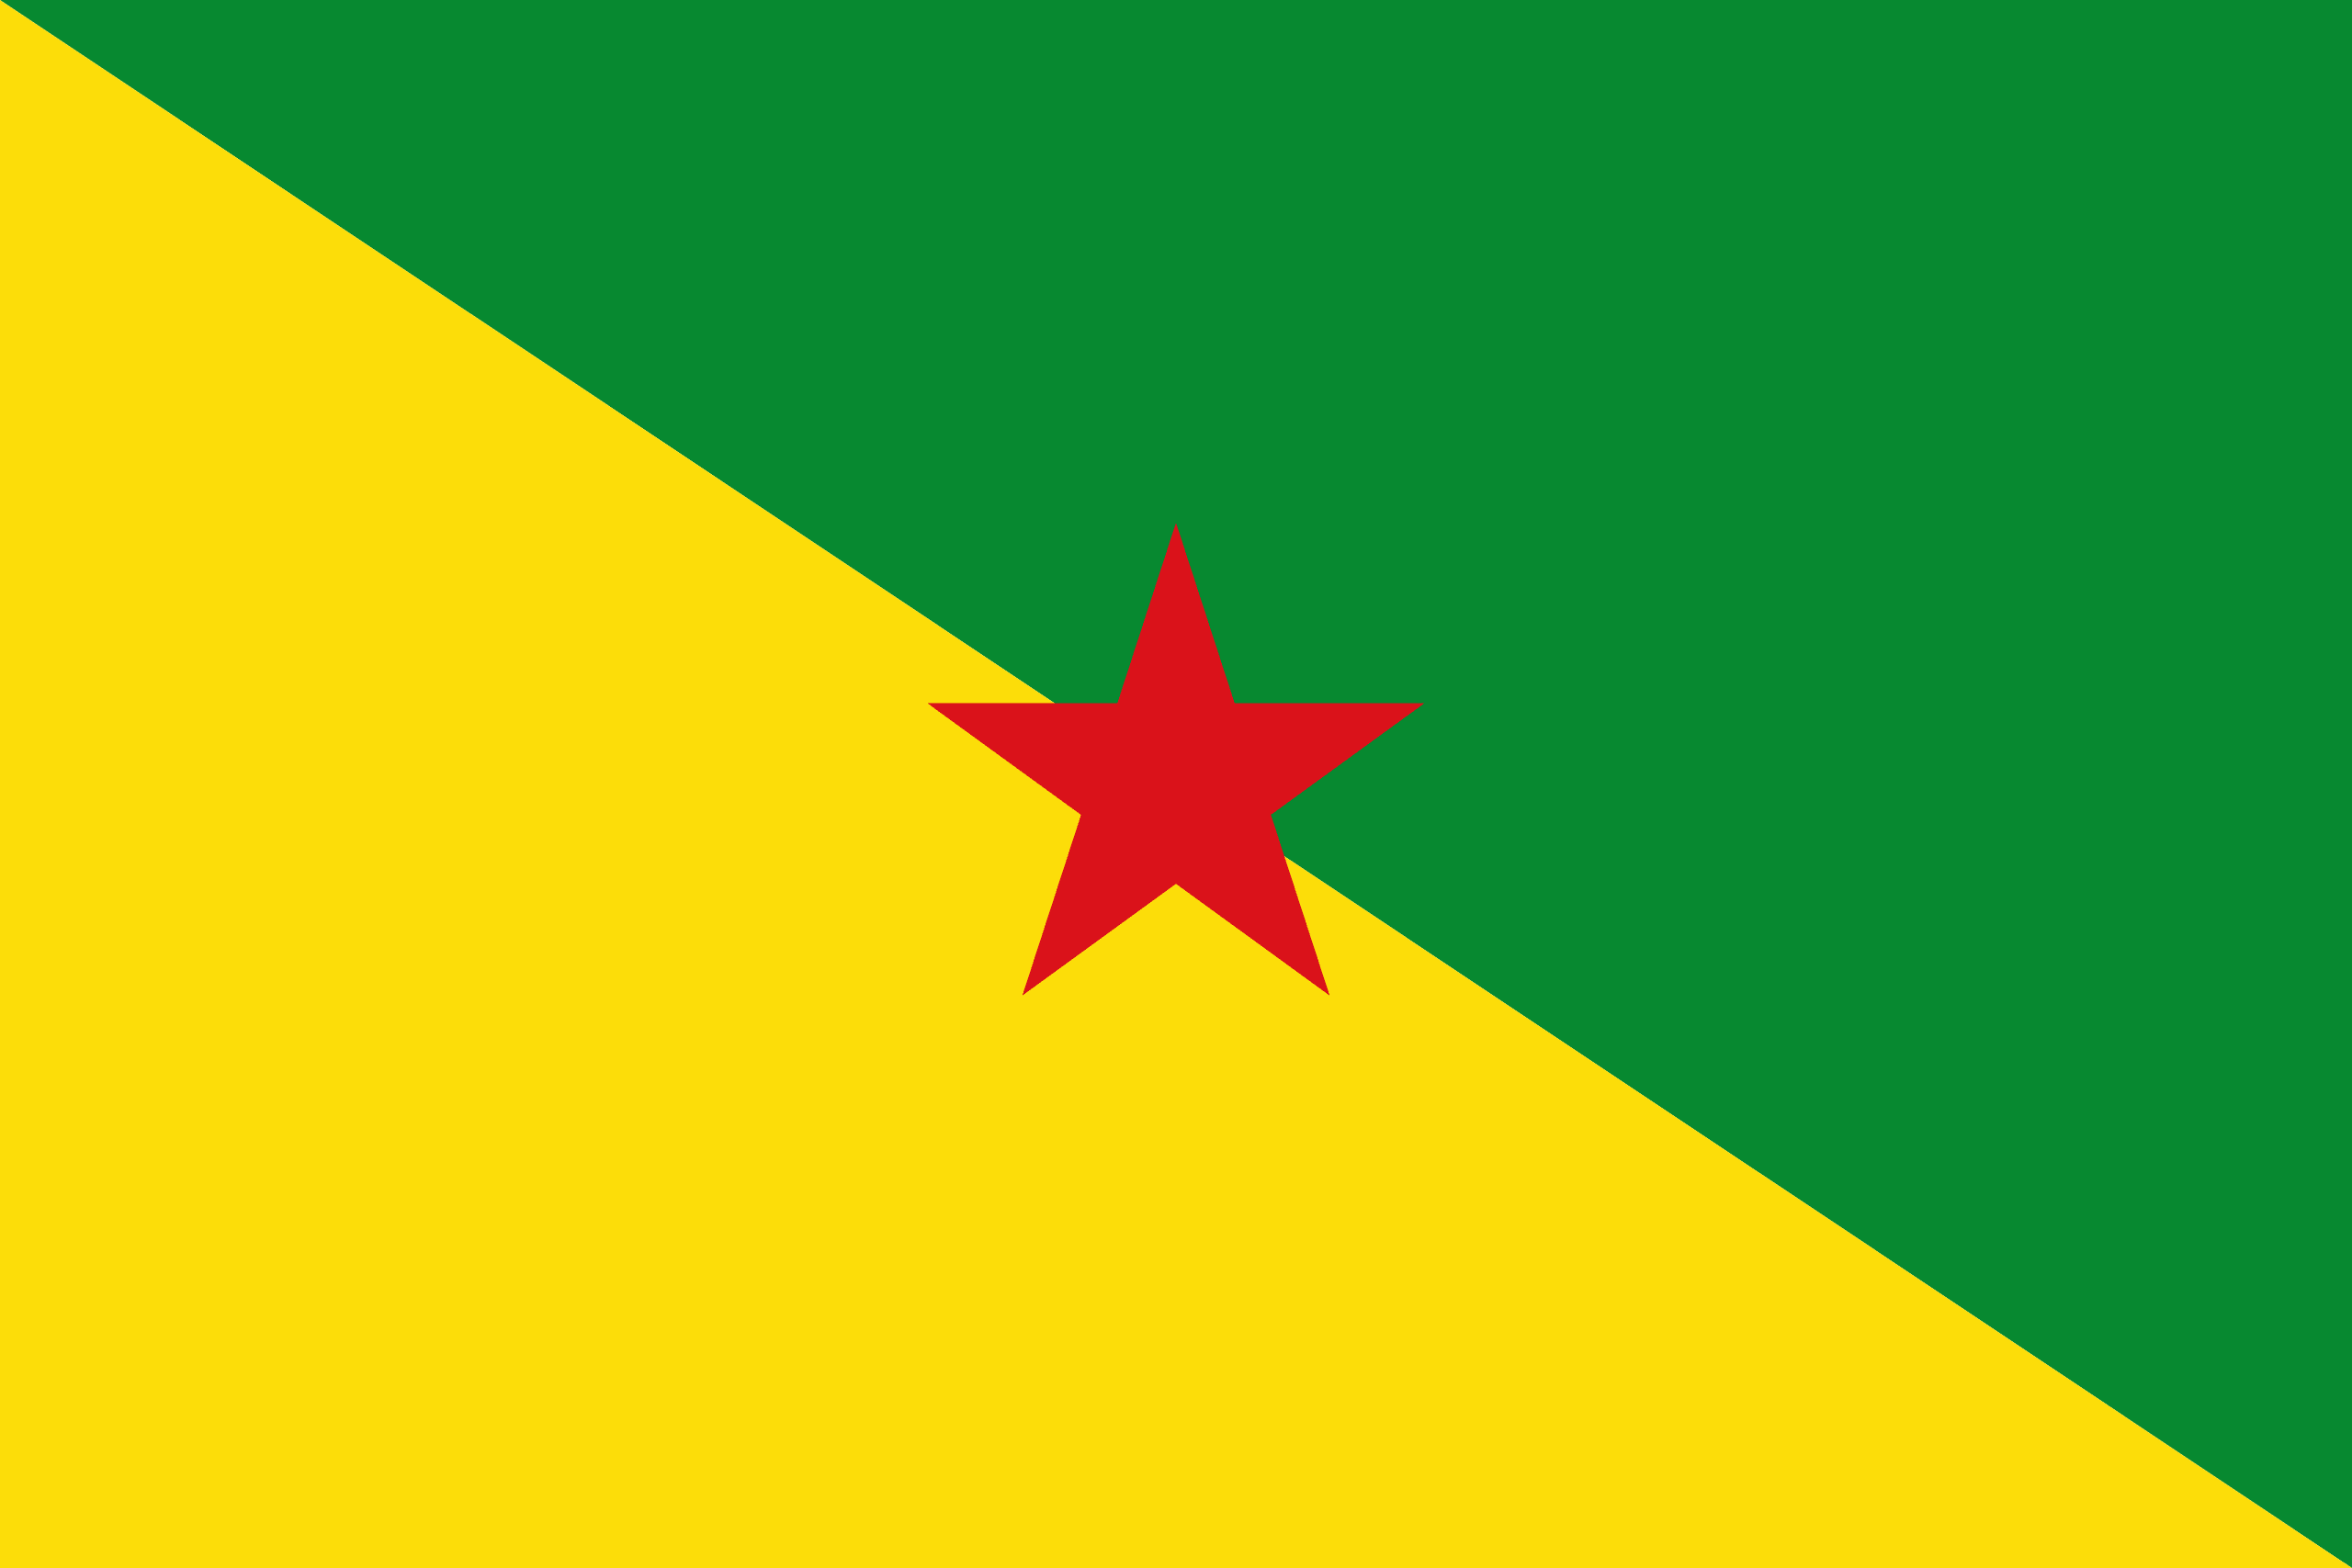

French Polynesia


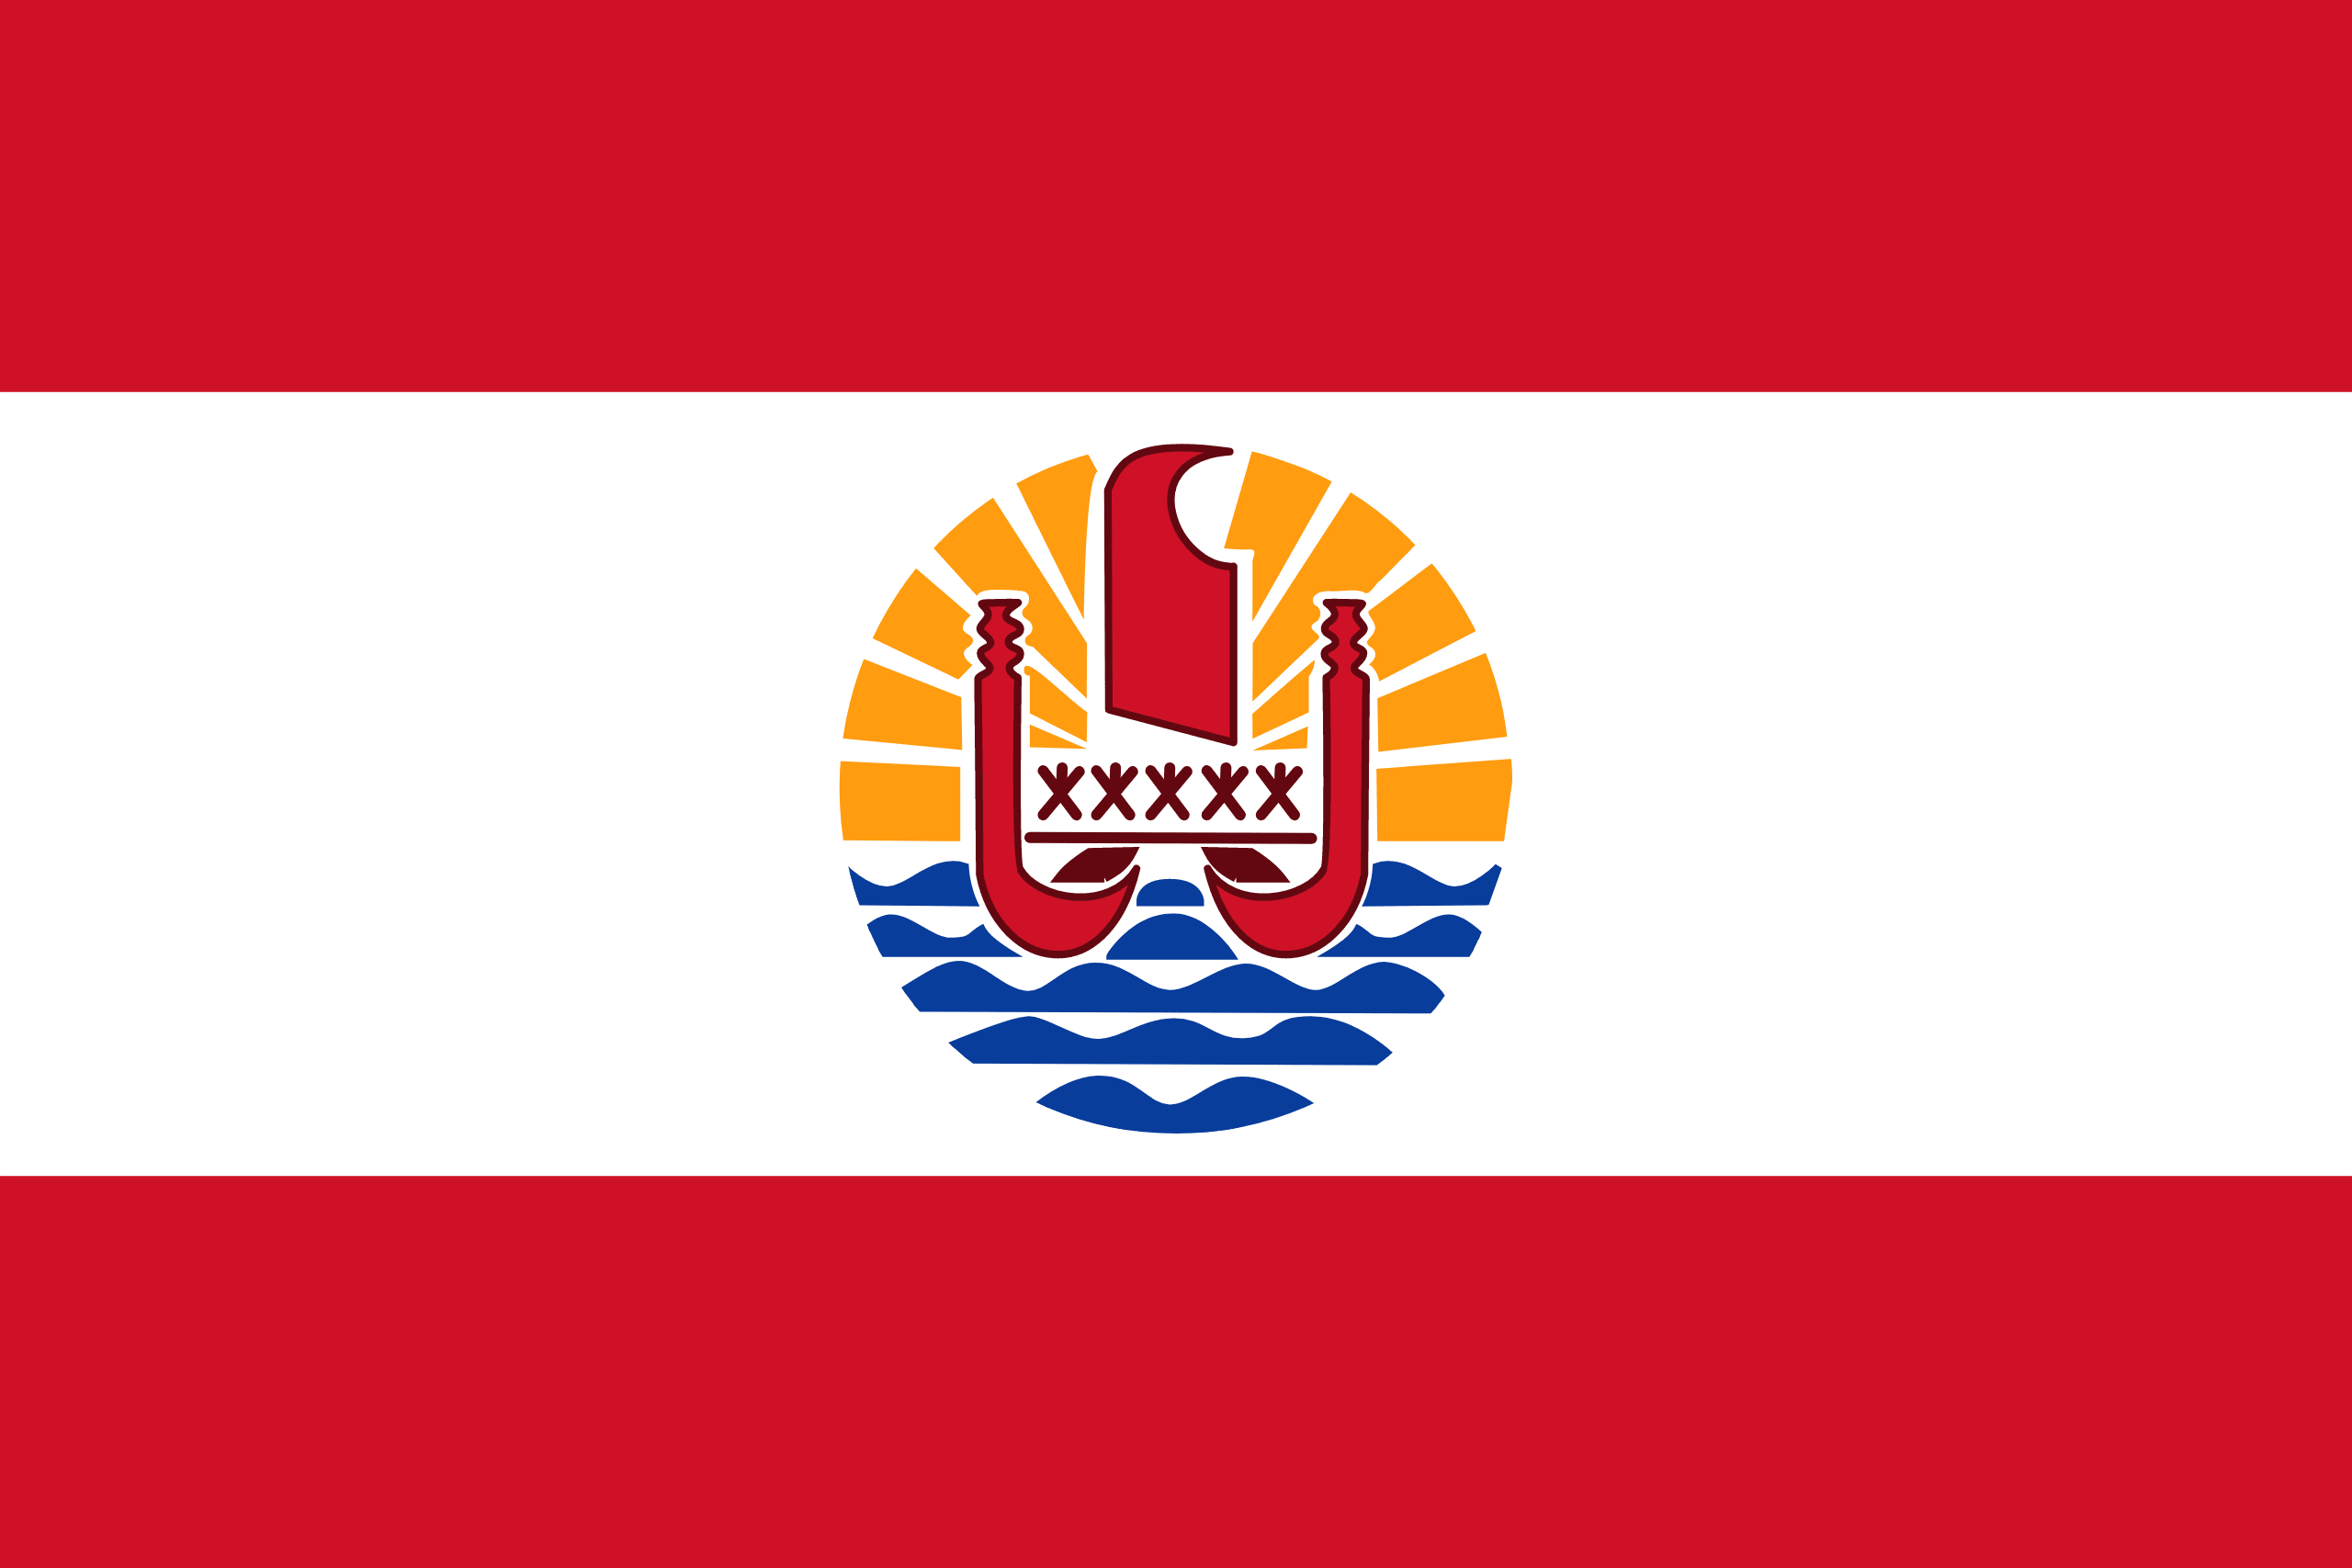

French Southern and Antarctic Lands


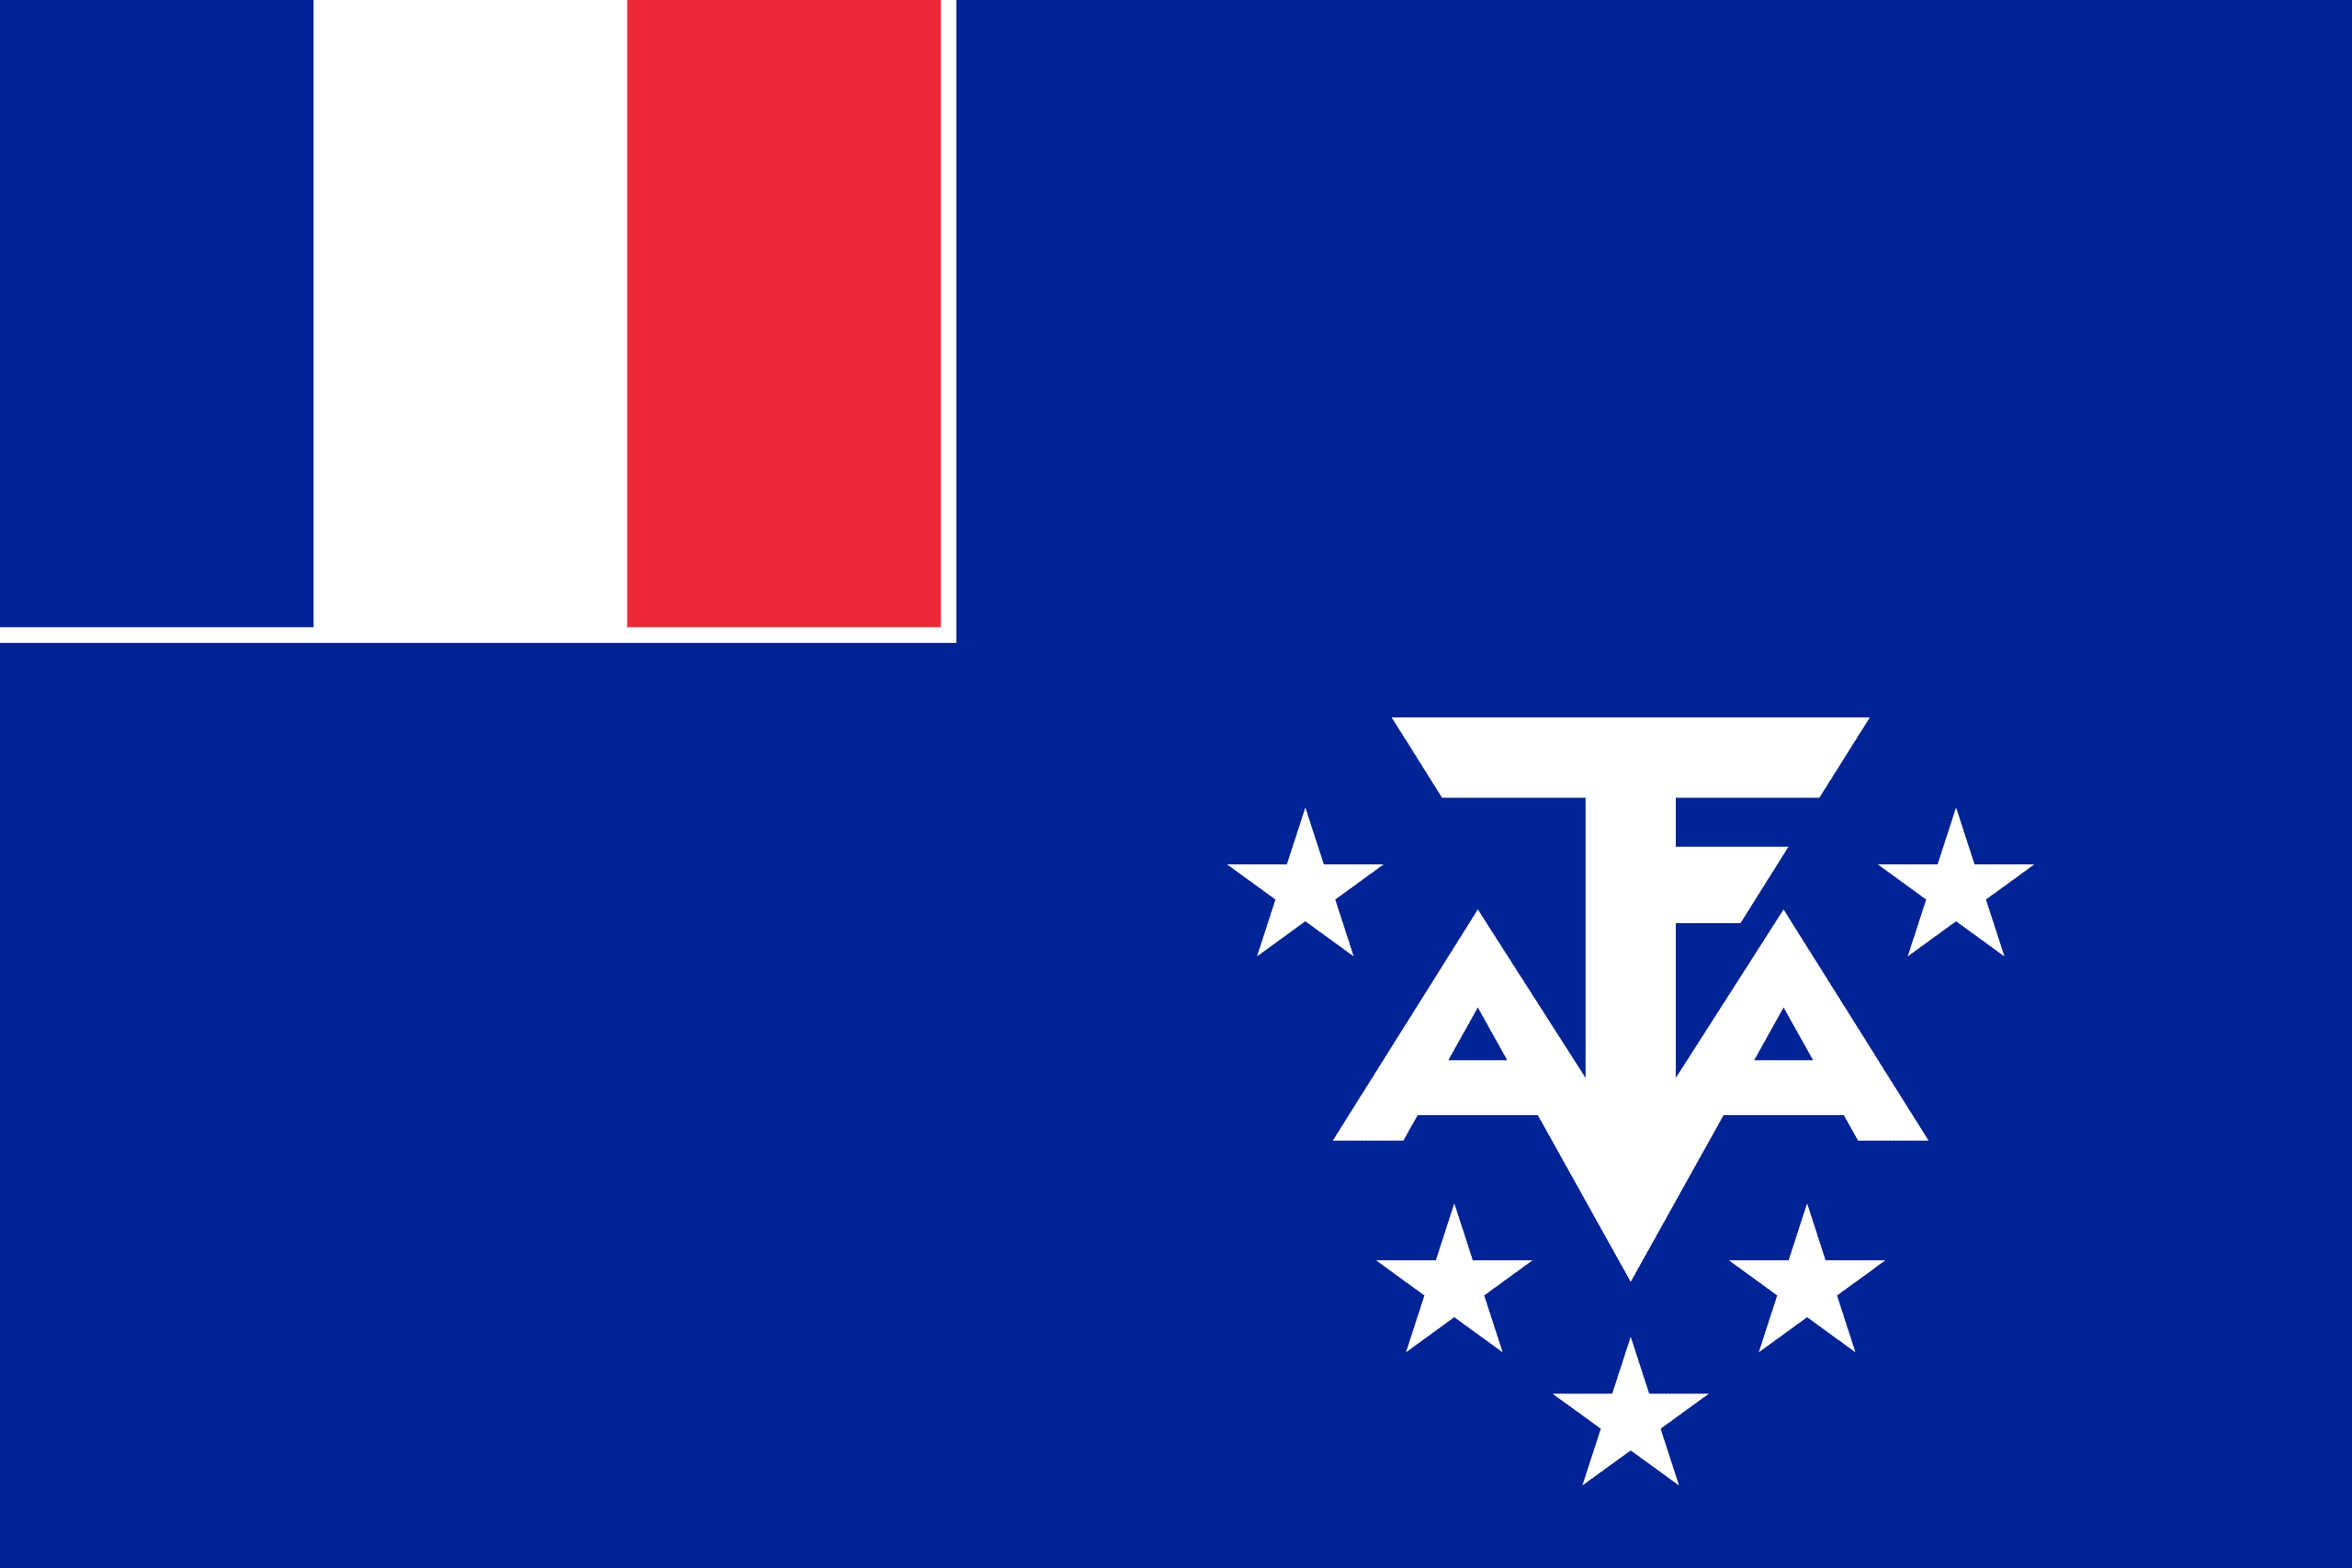

Gabon


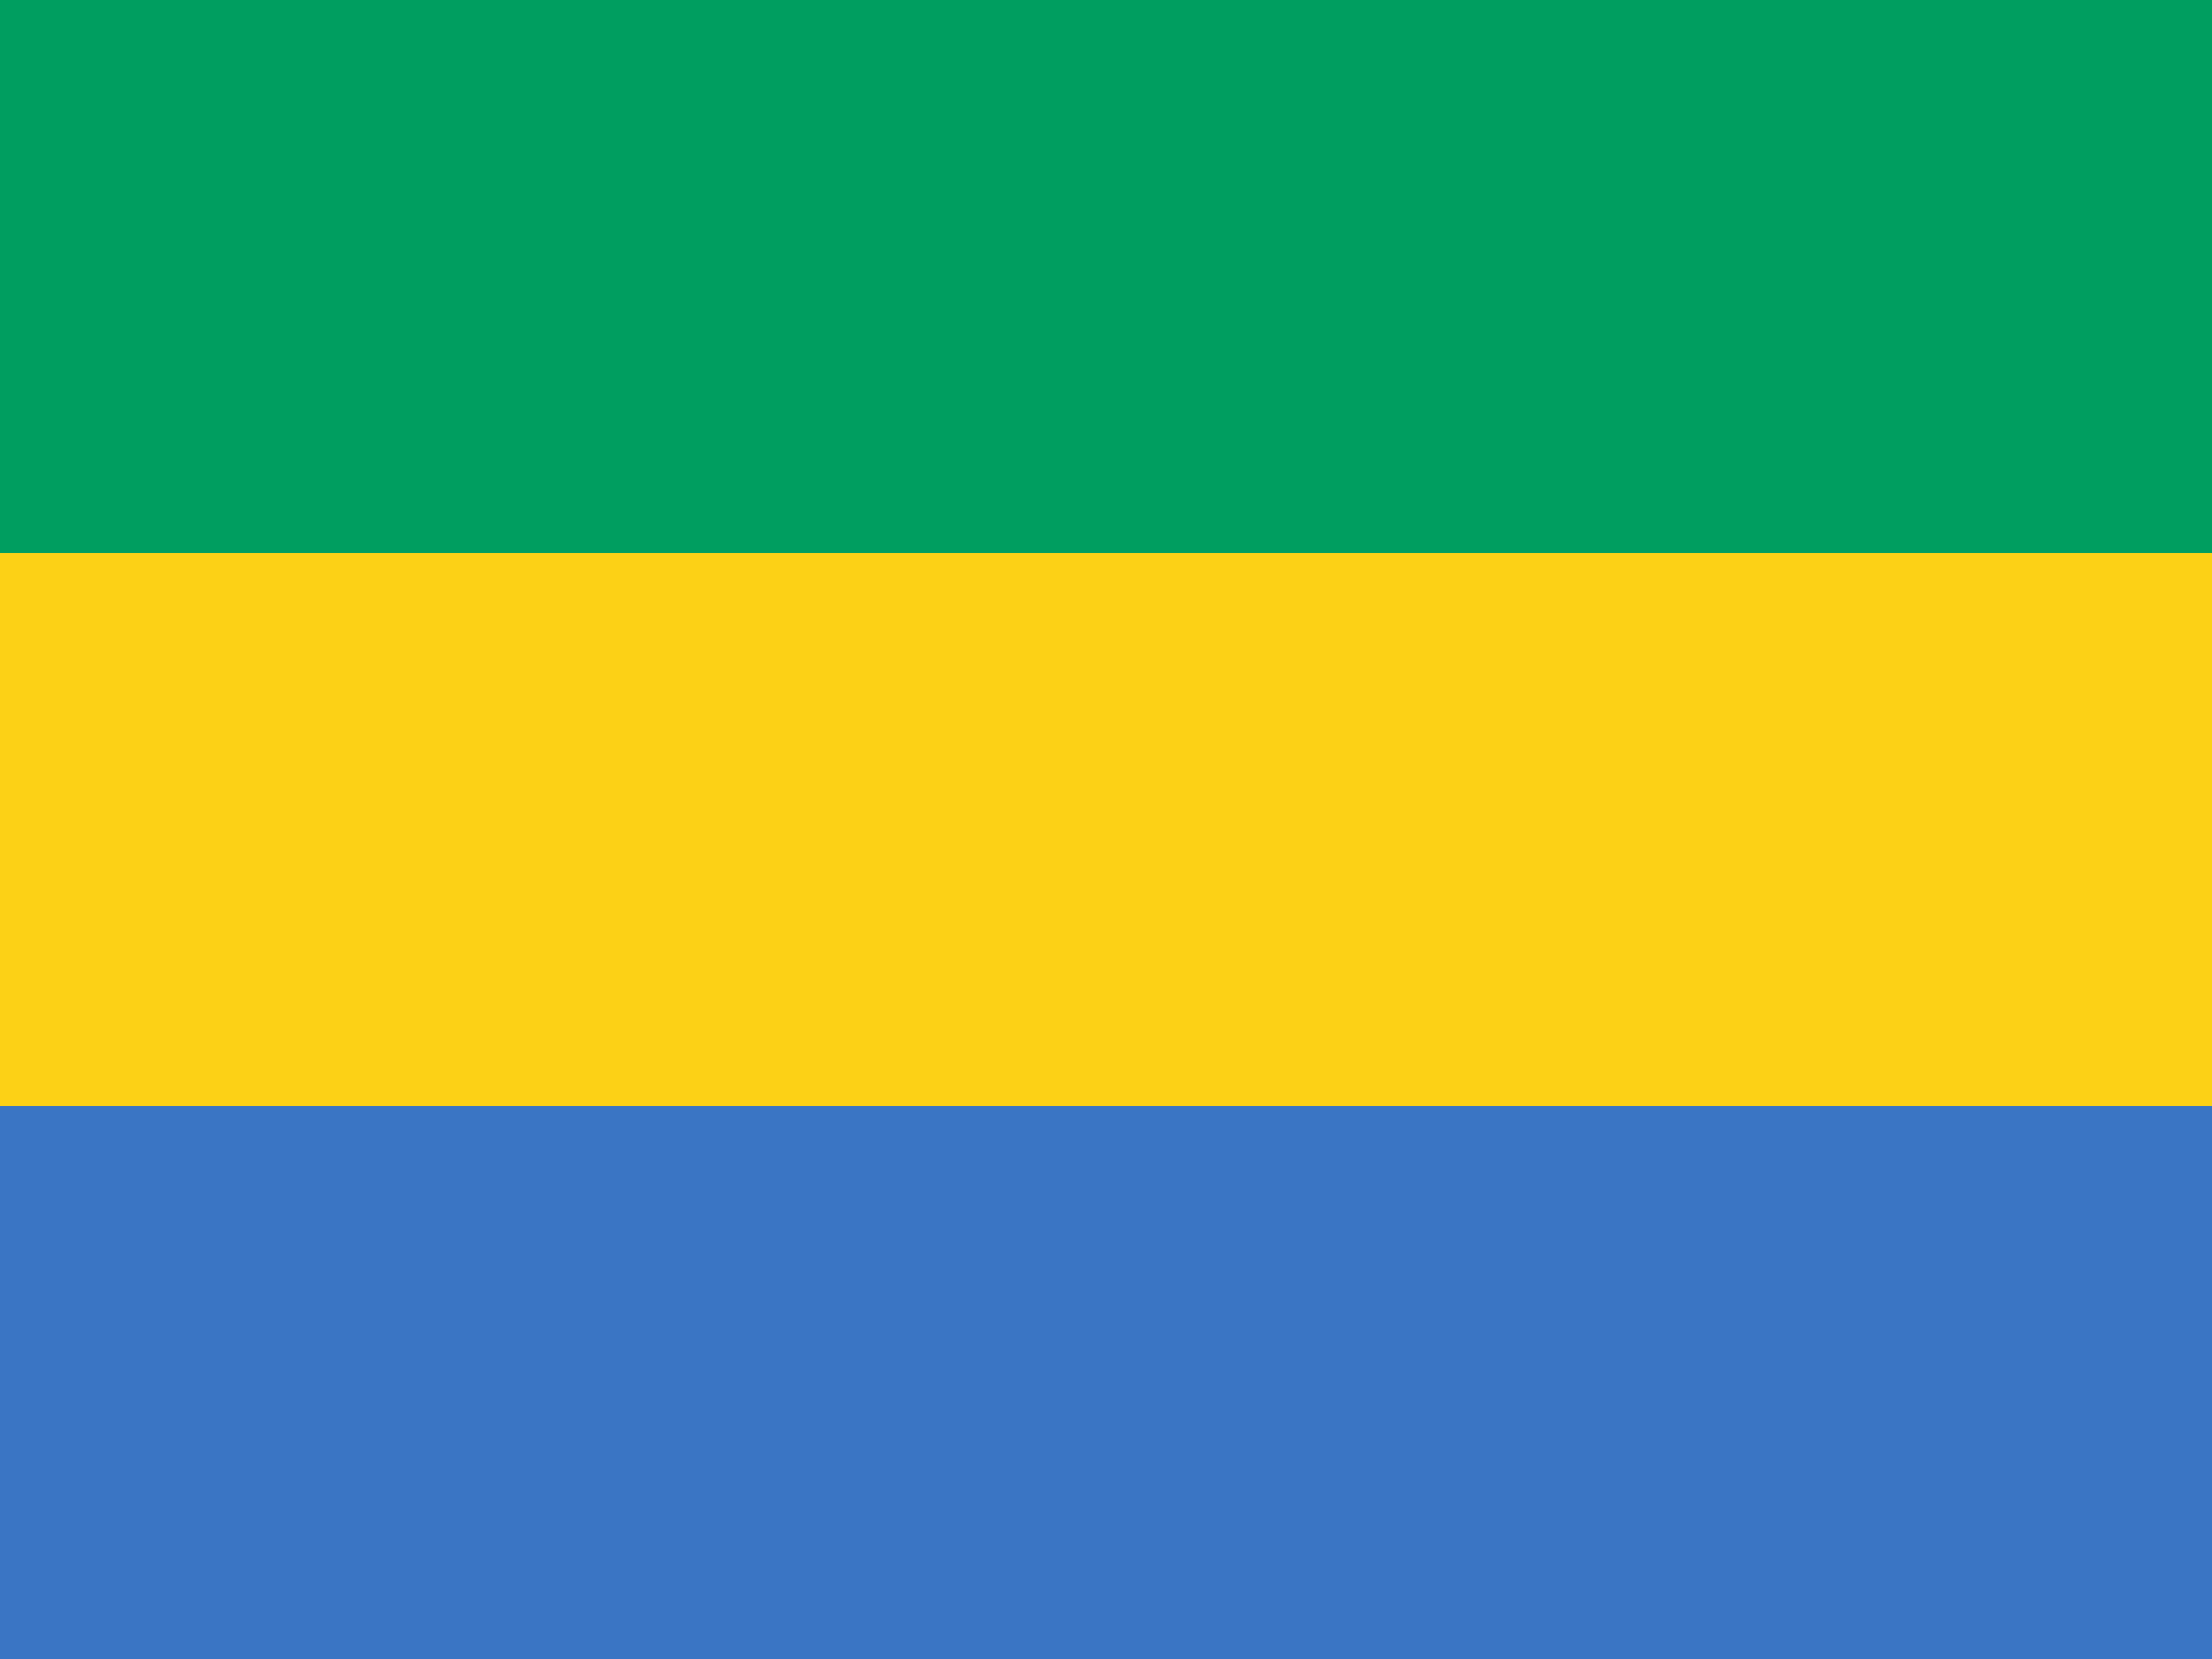

Gambia


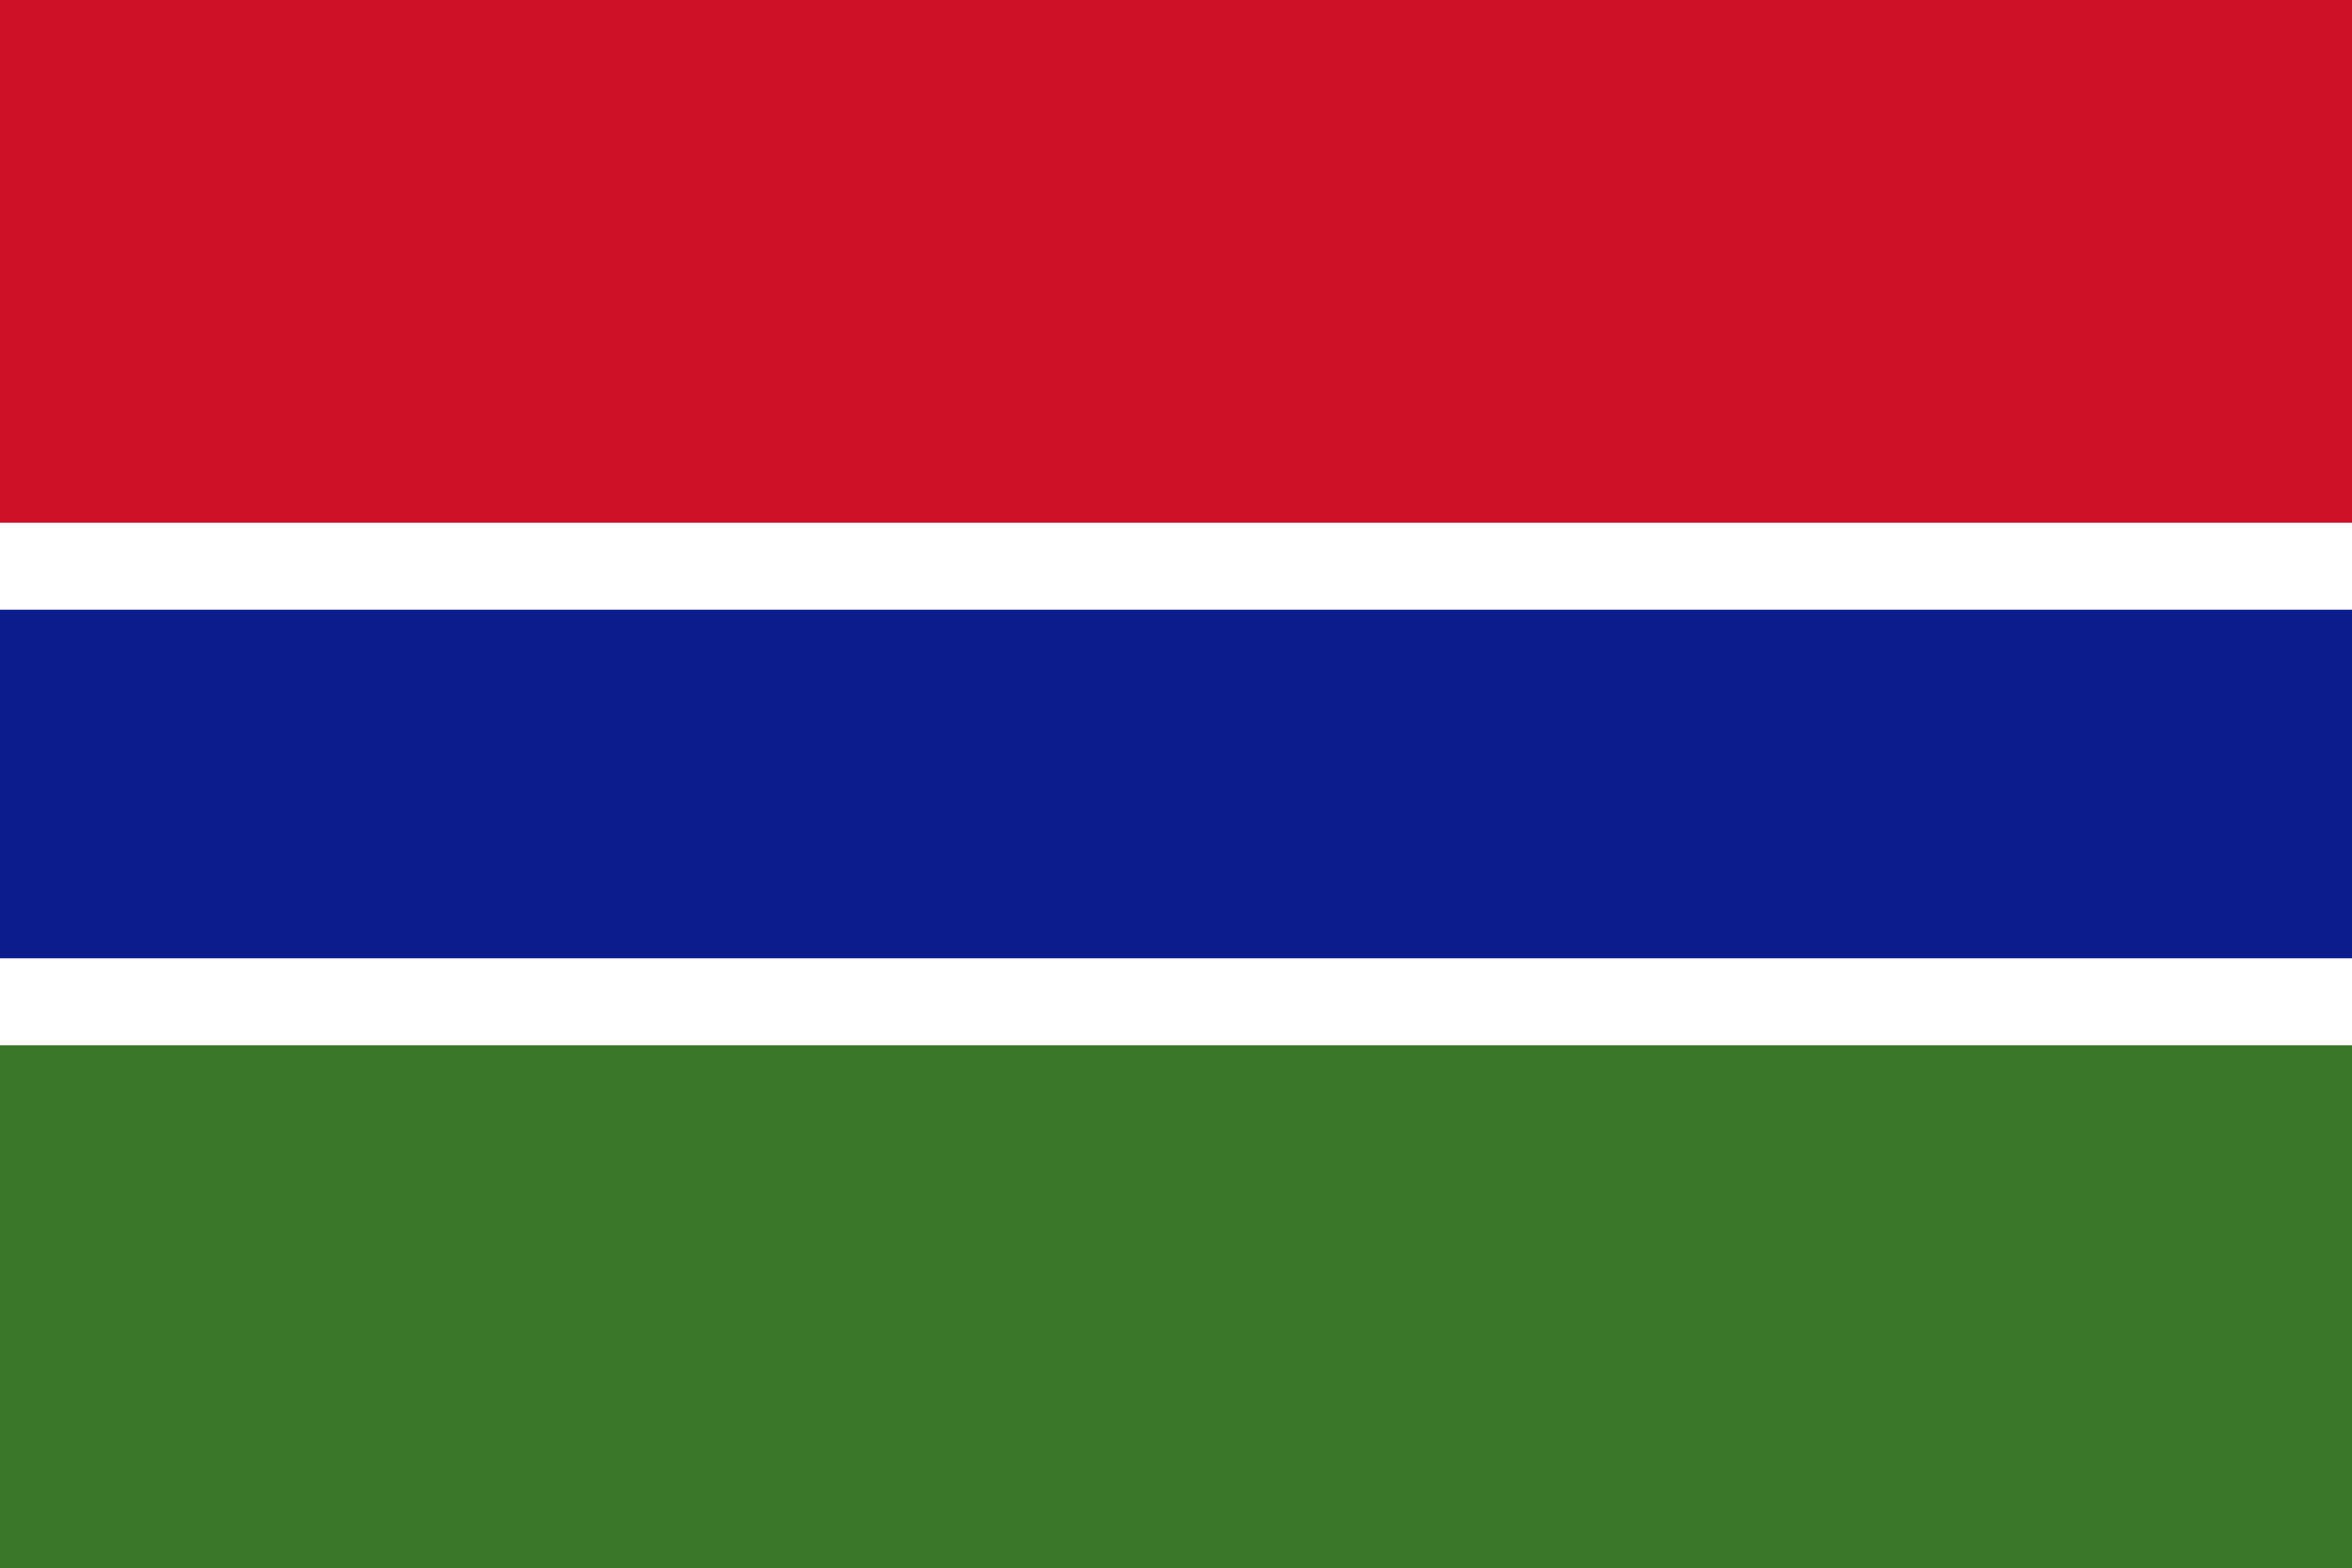

Georgia


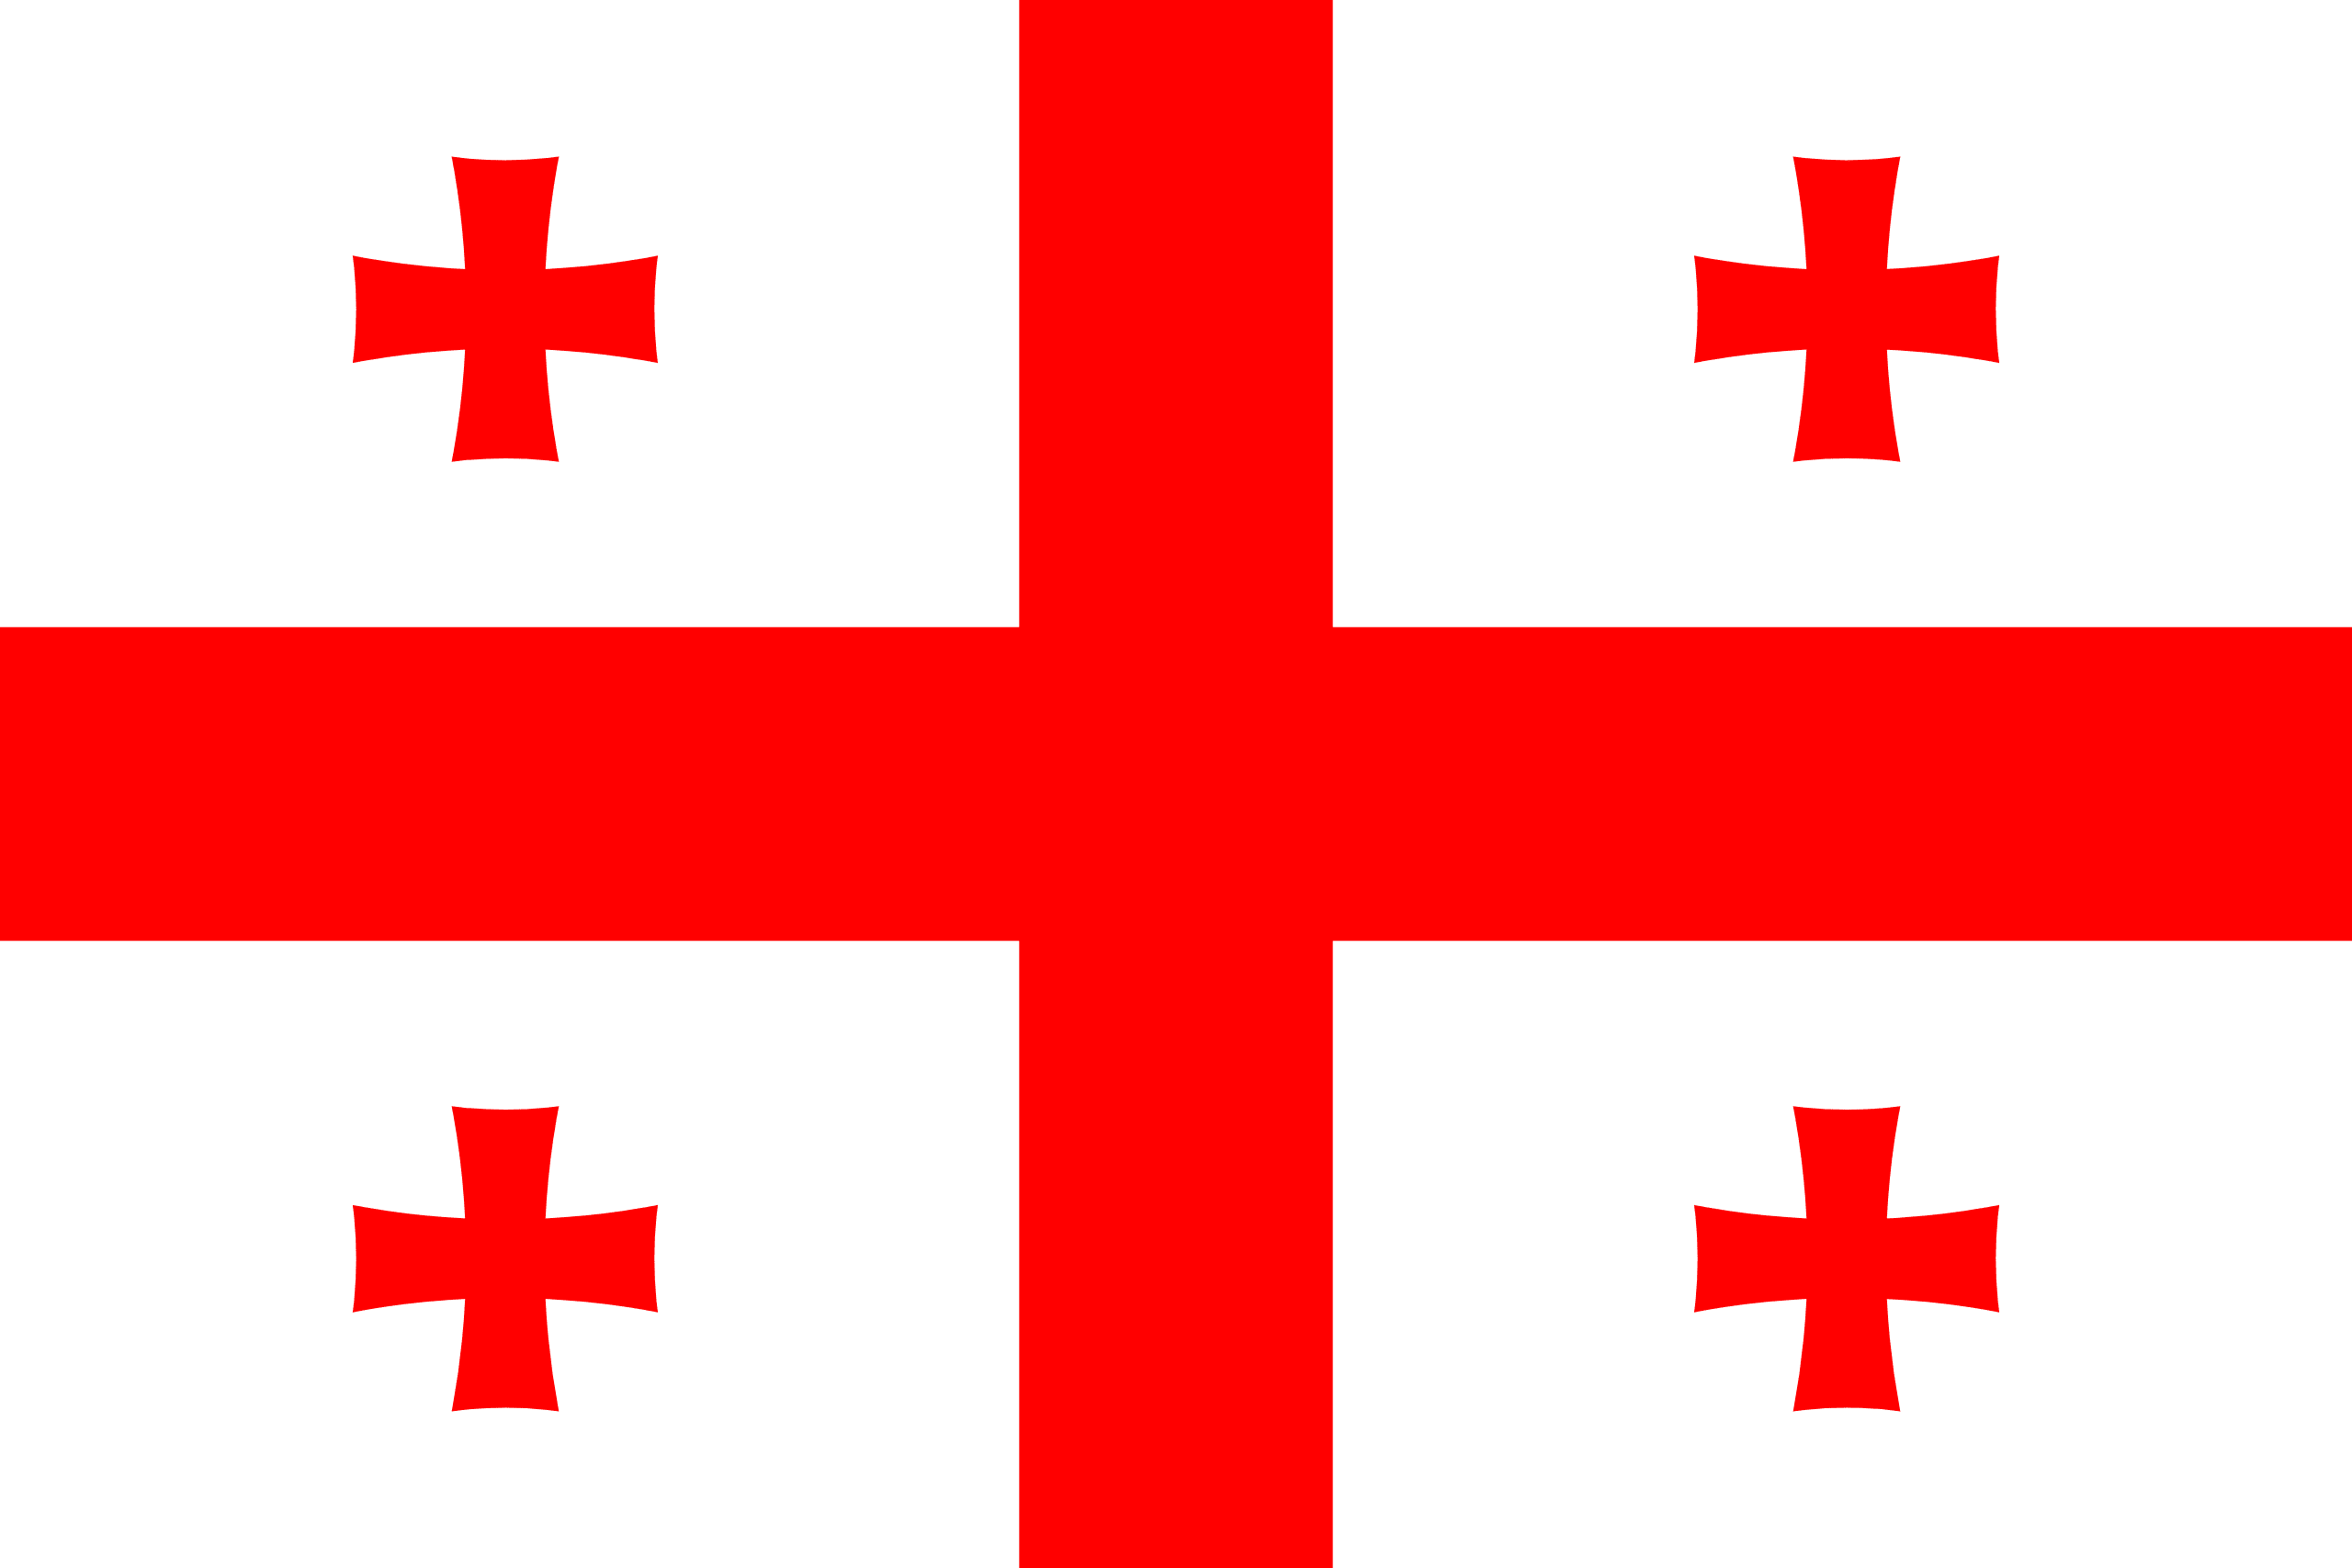

Germany


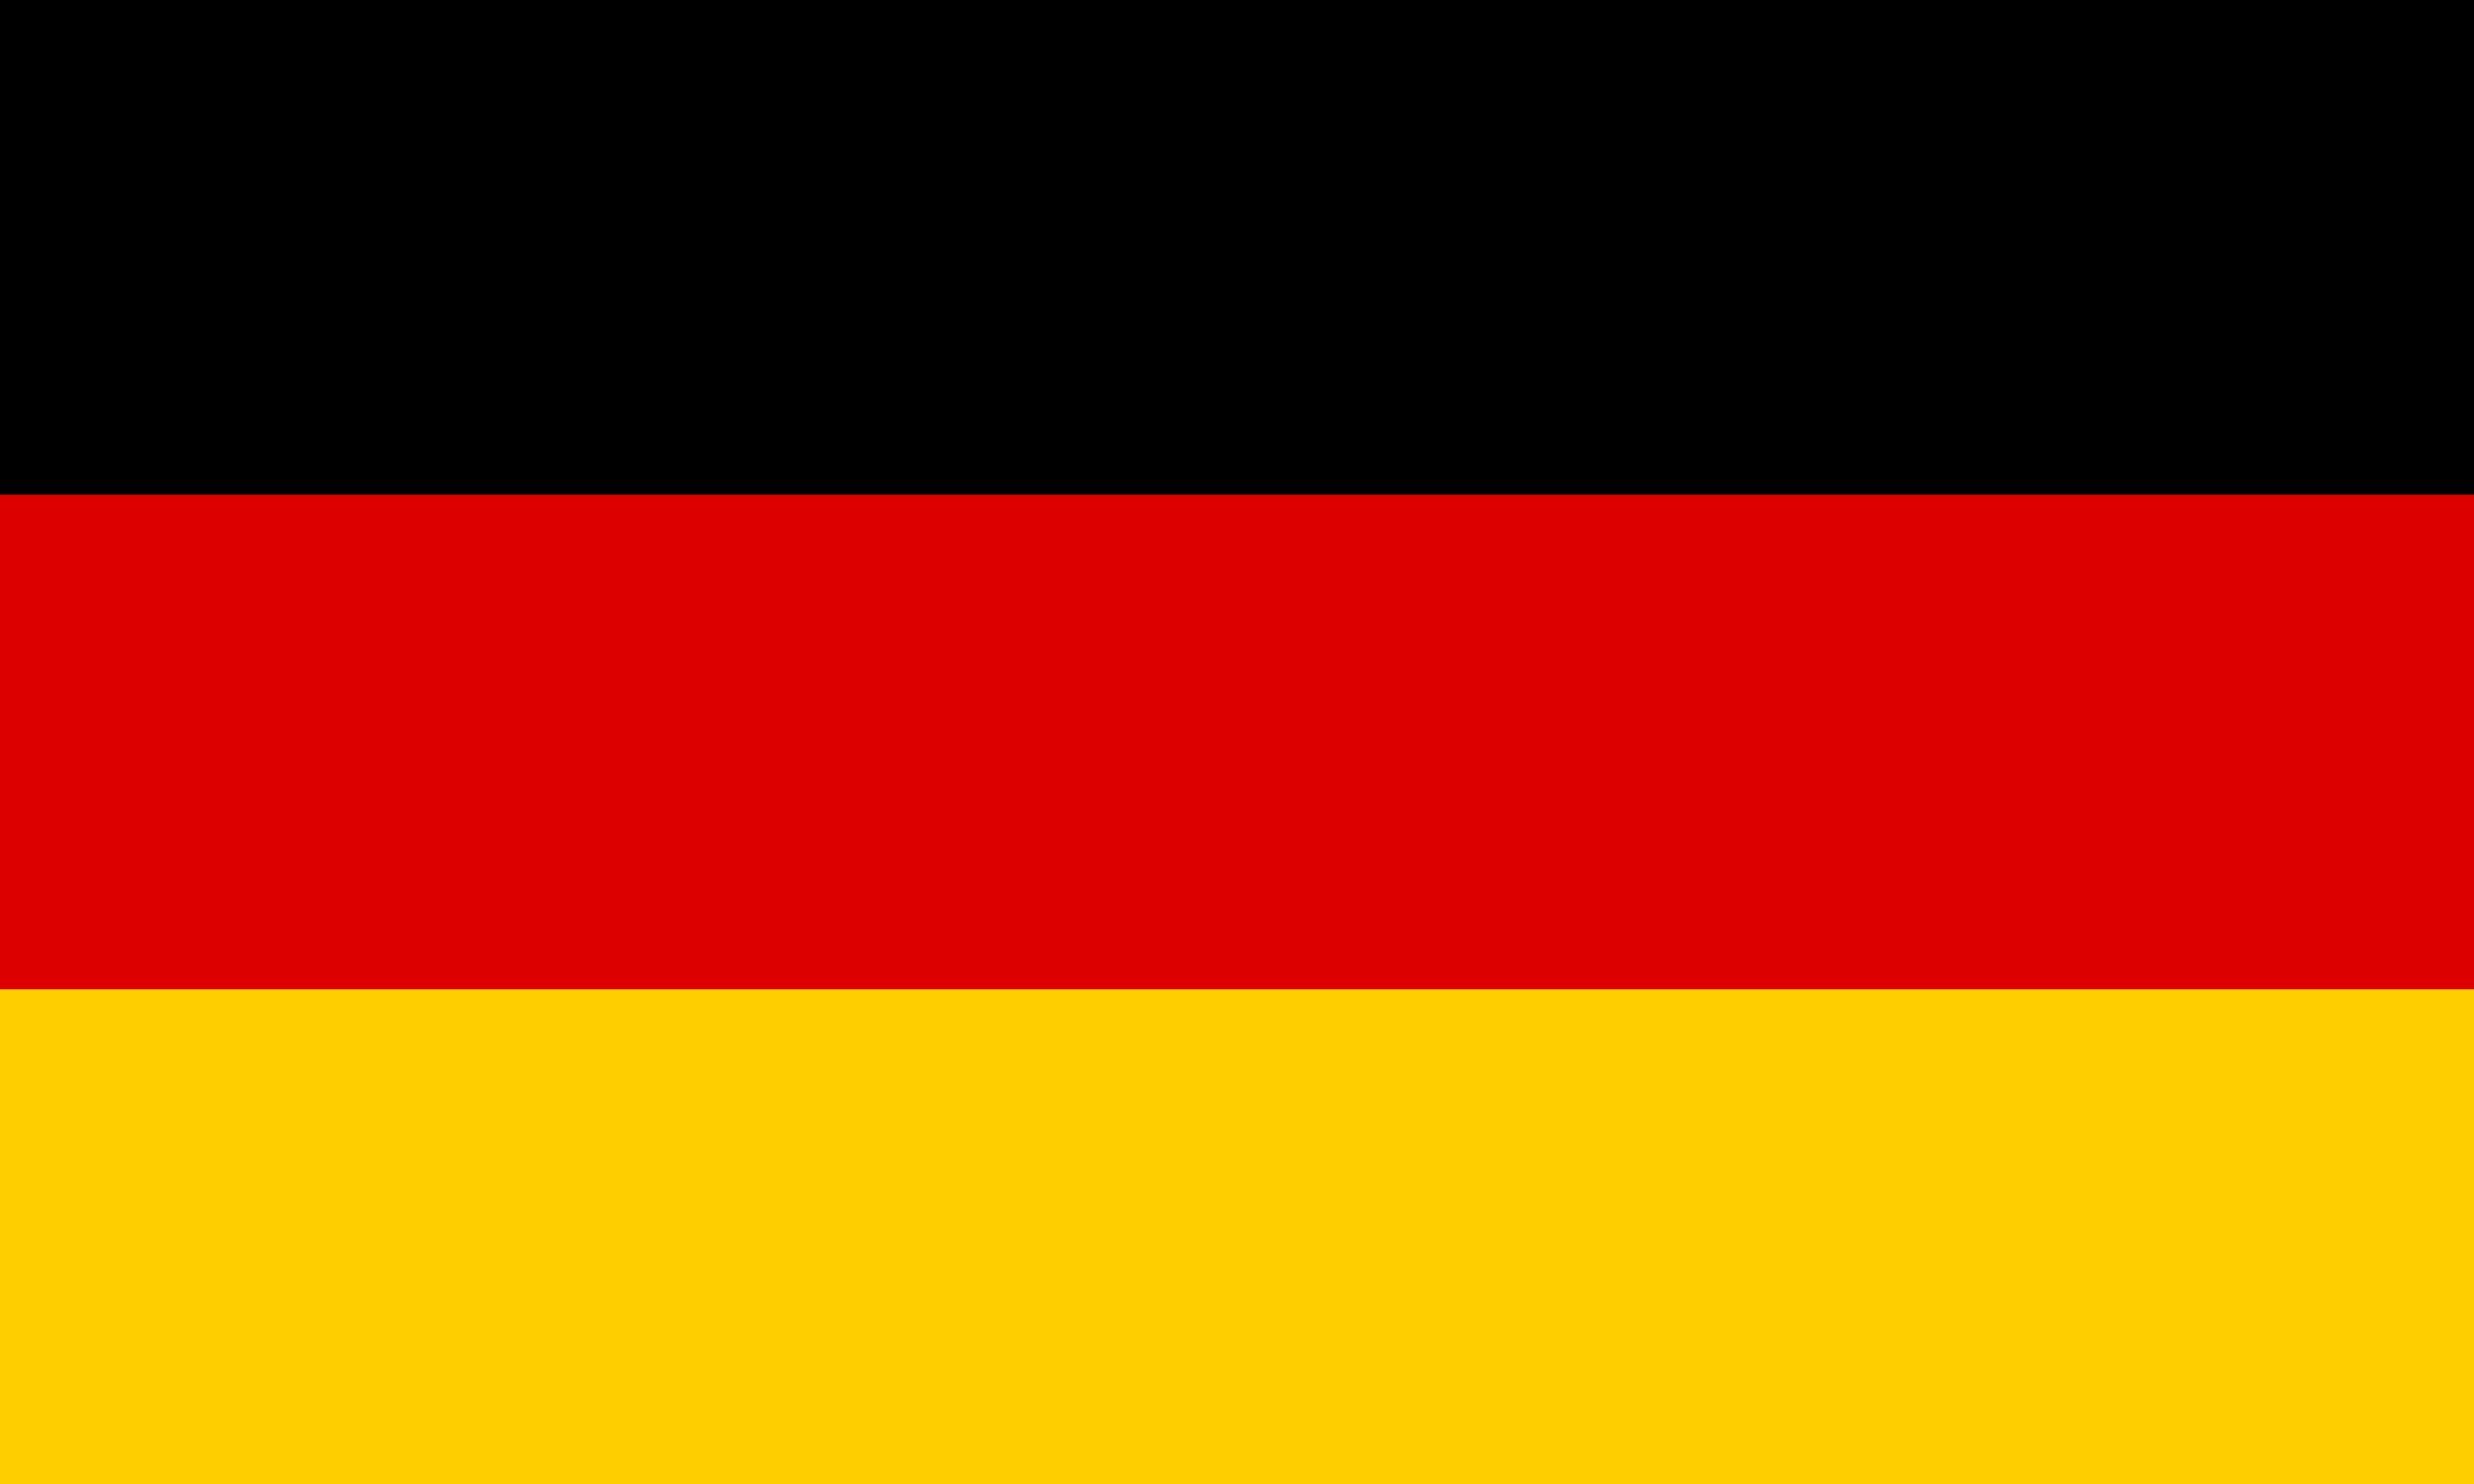

Ghana


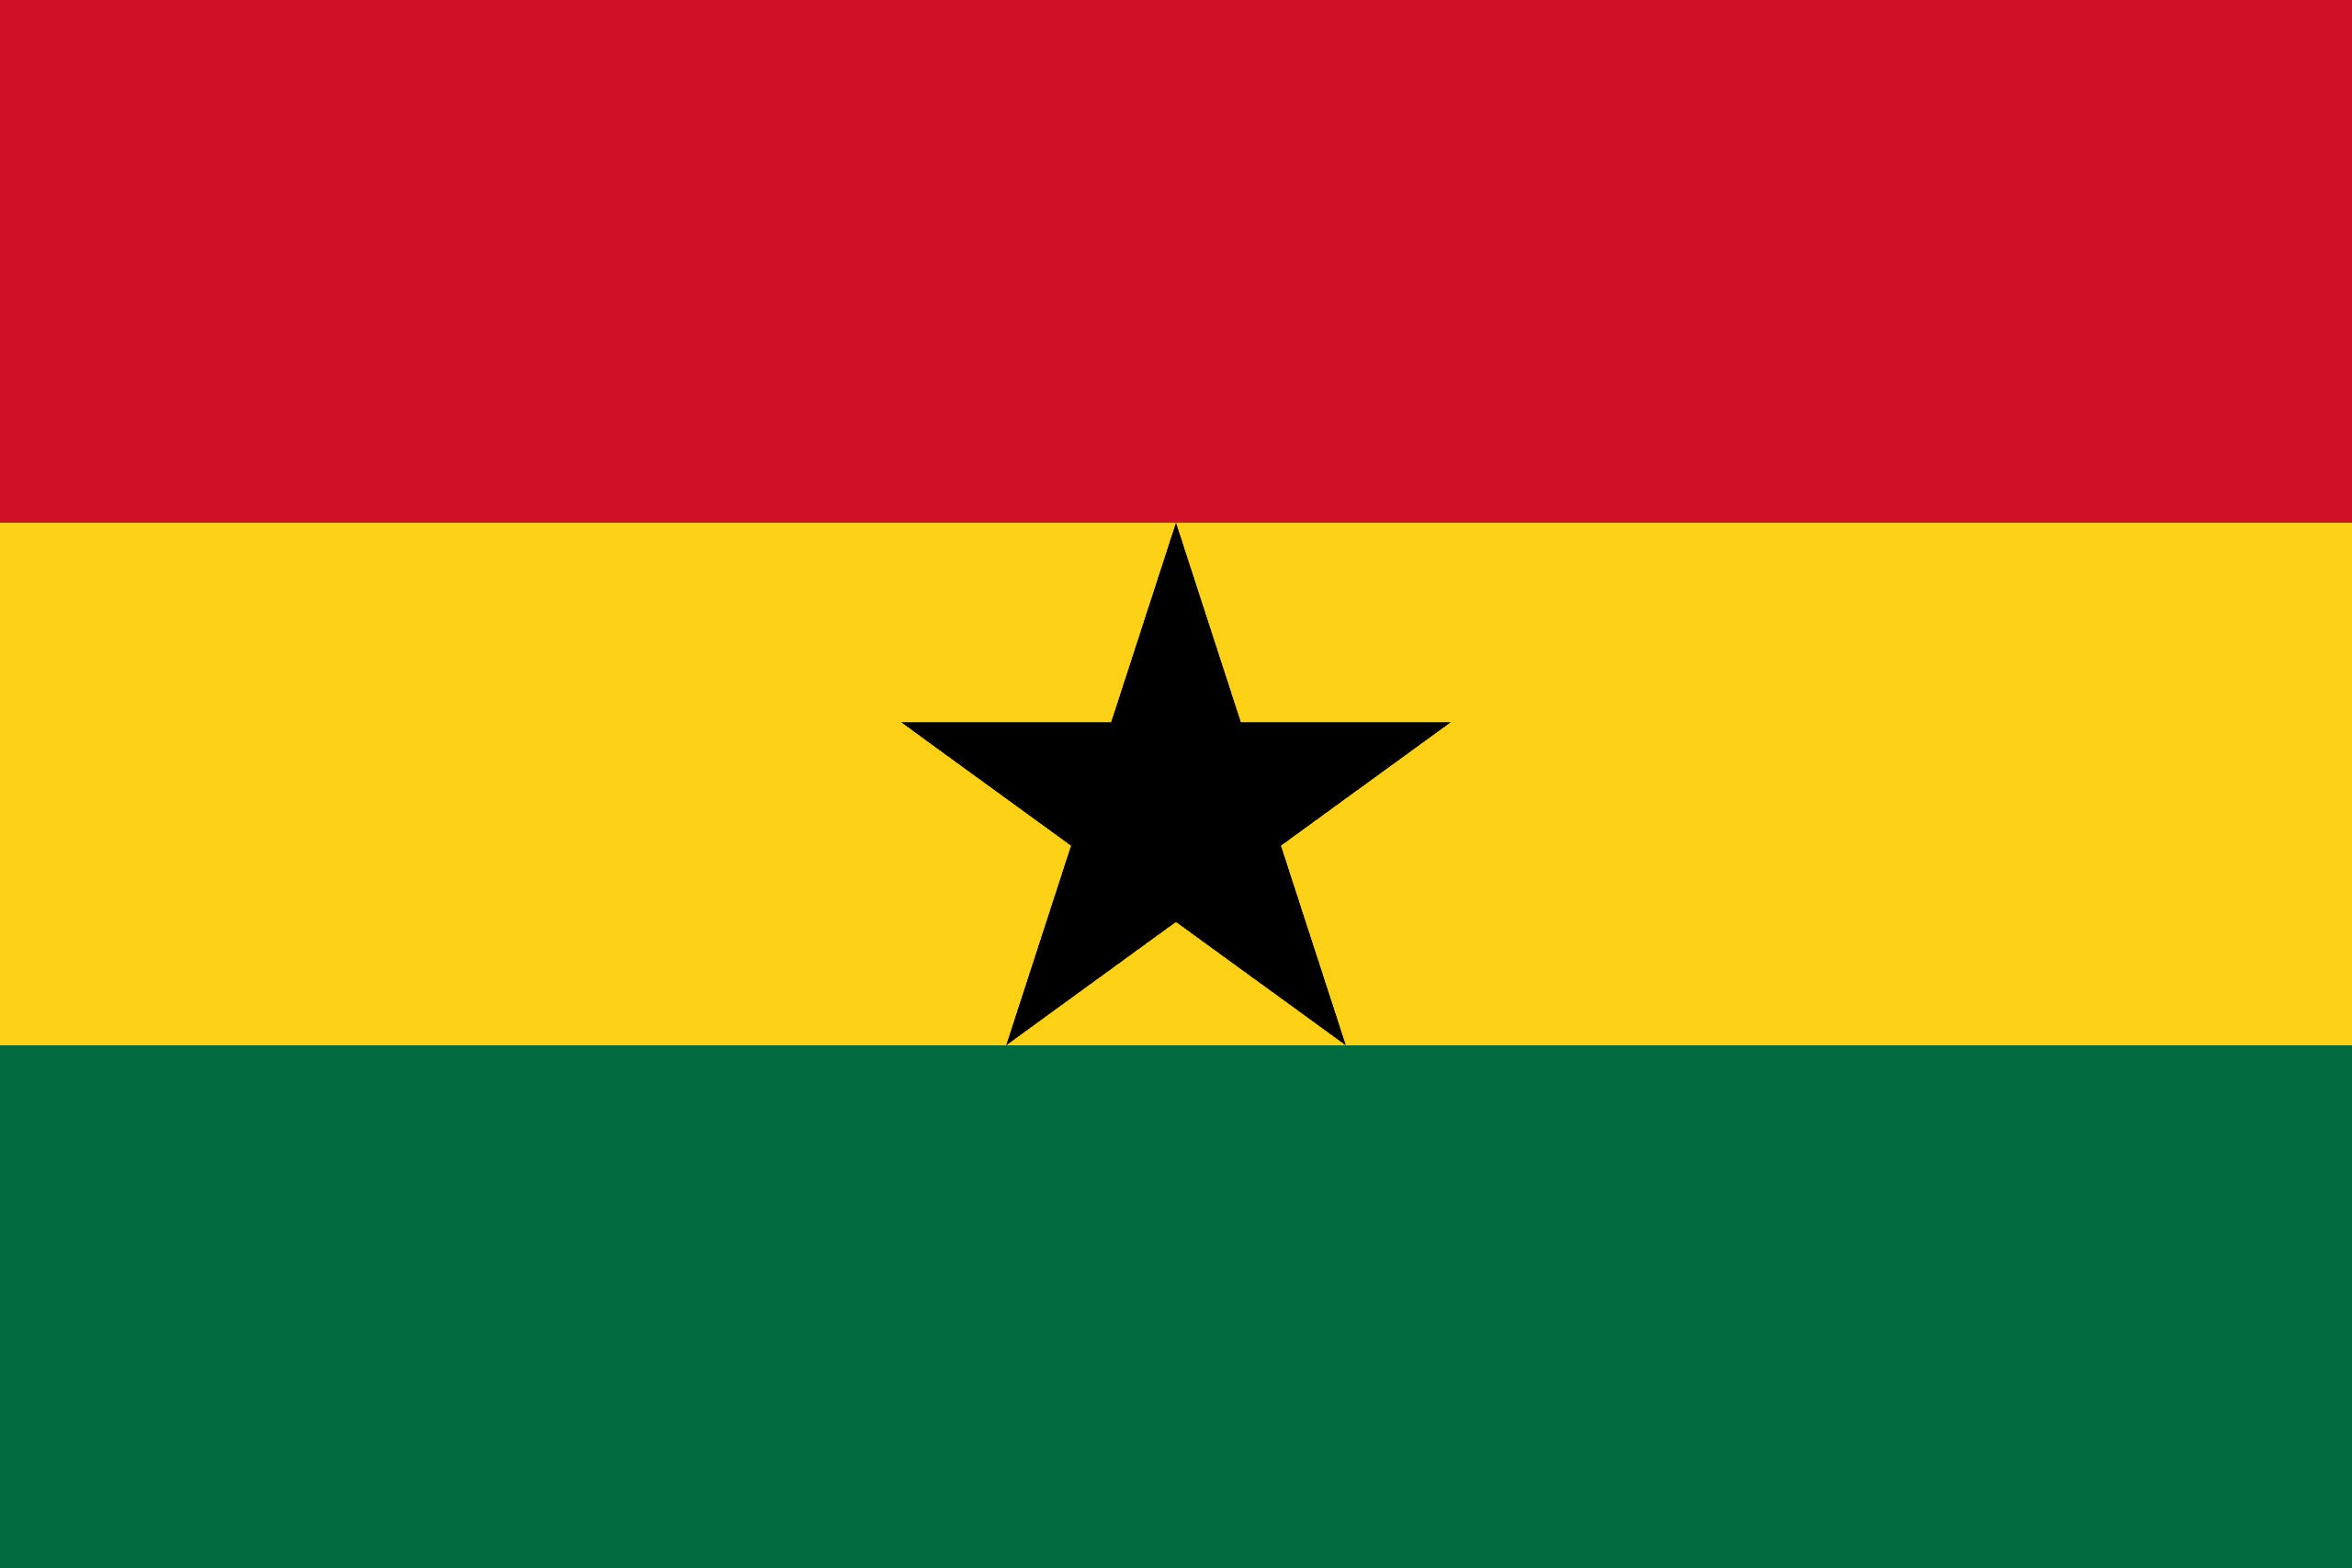

Gibraltar


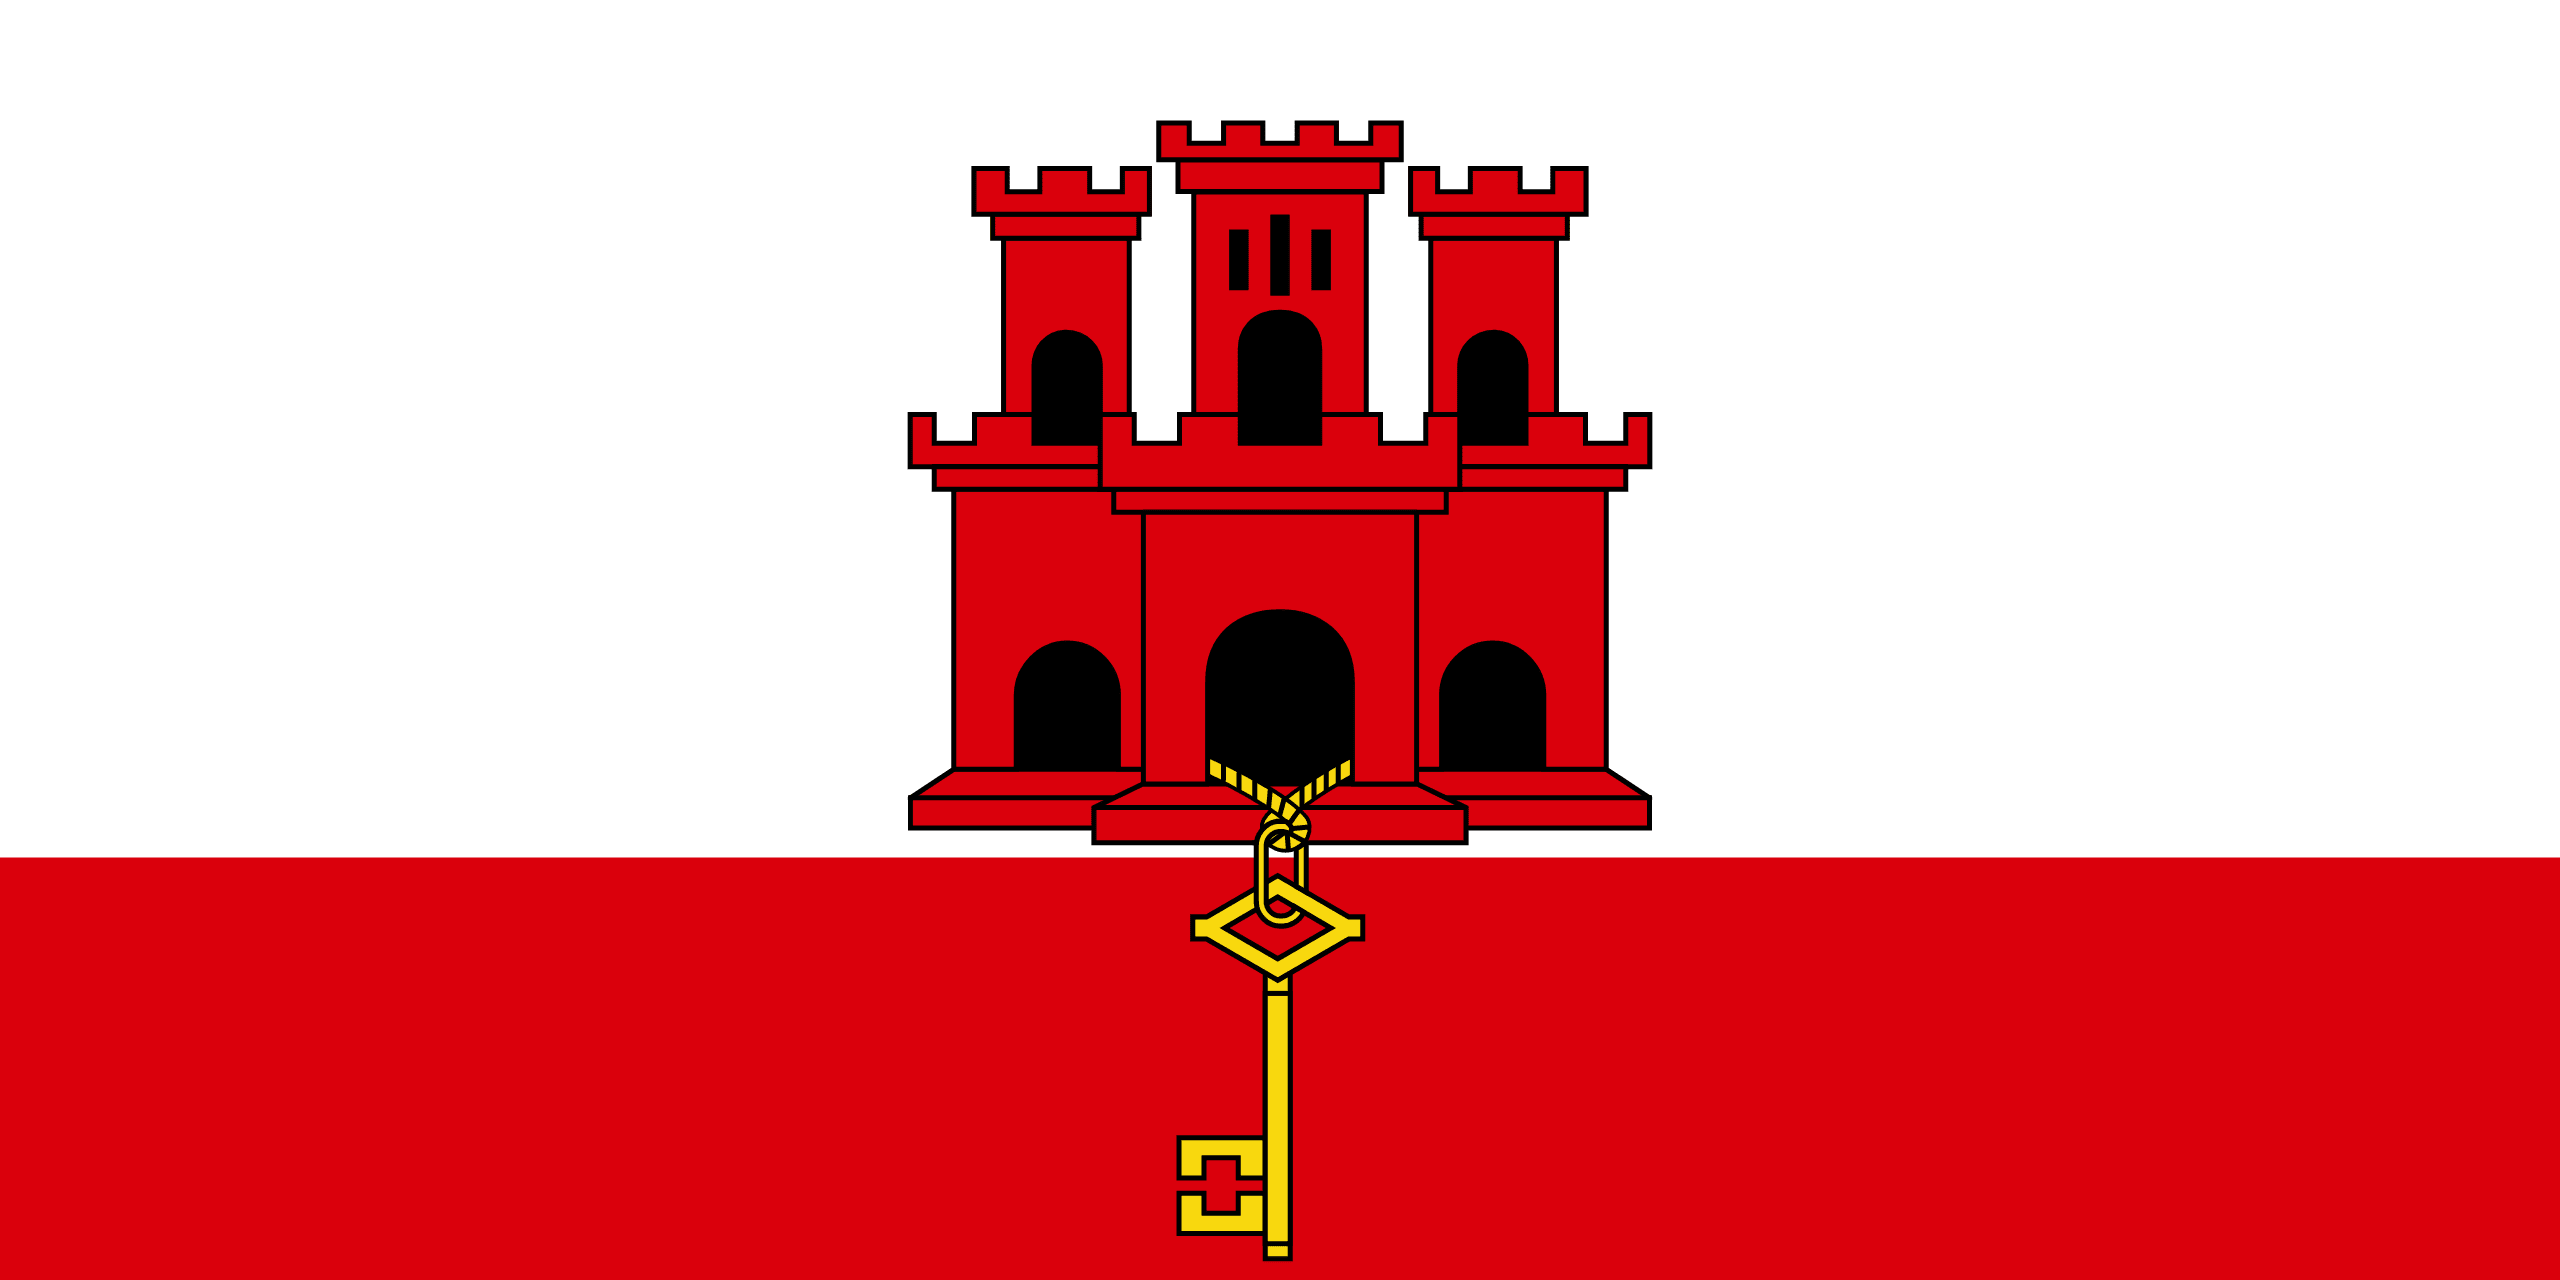

Greece


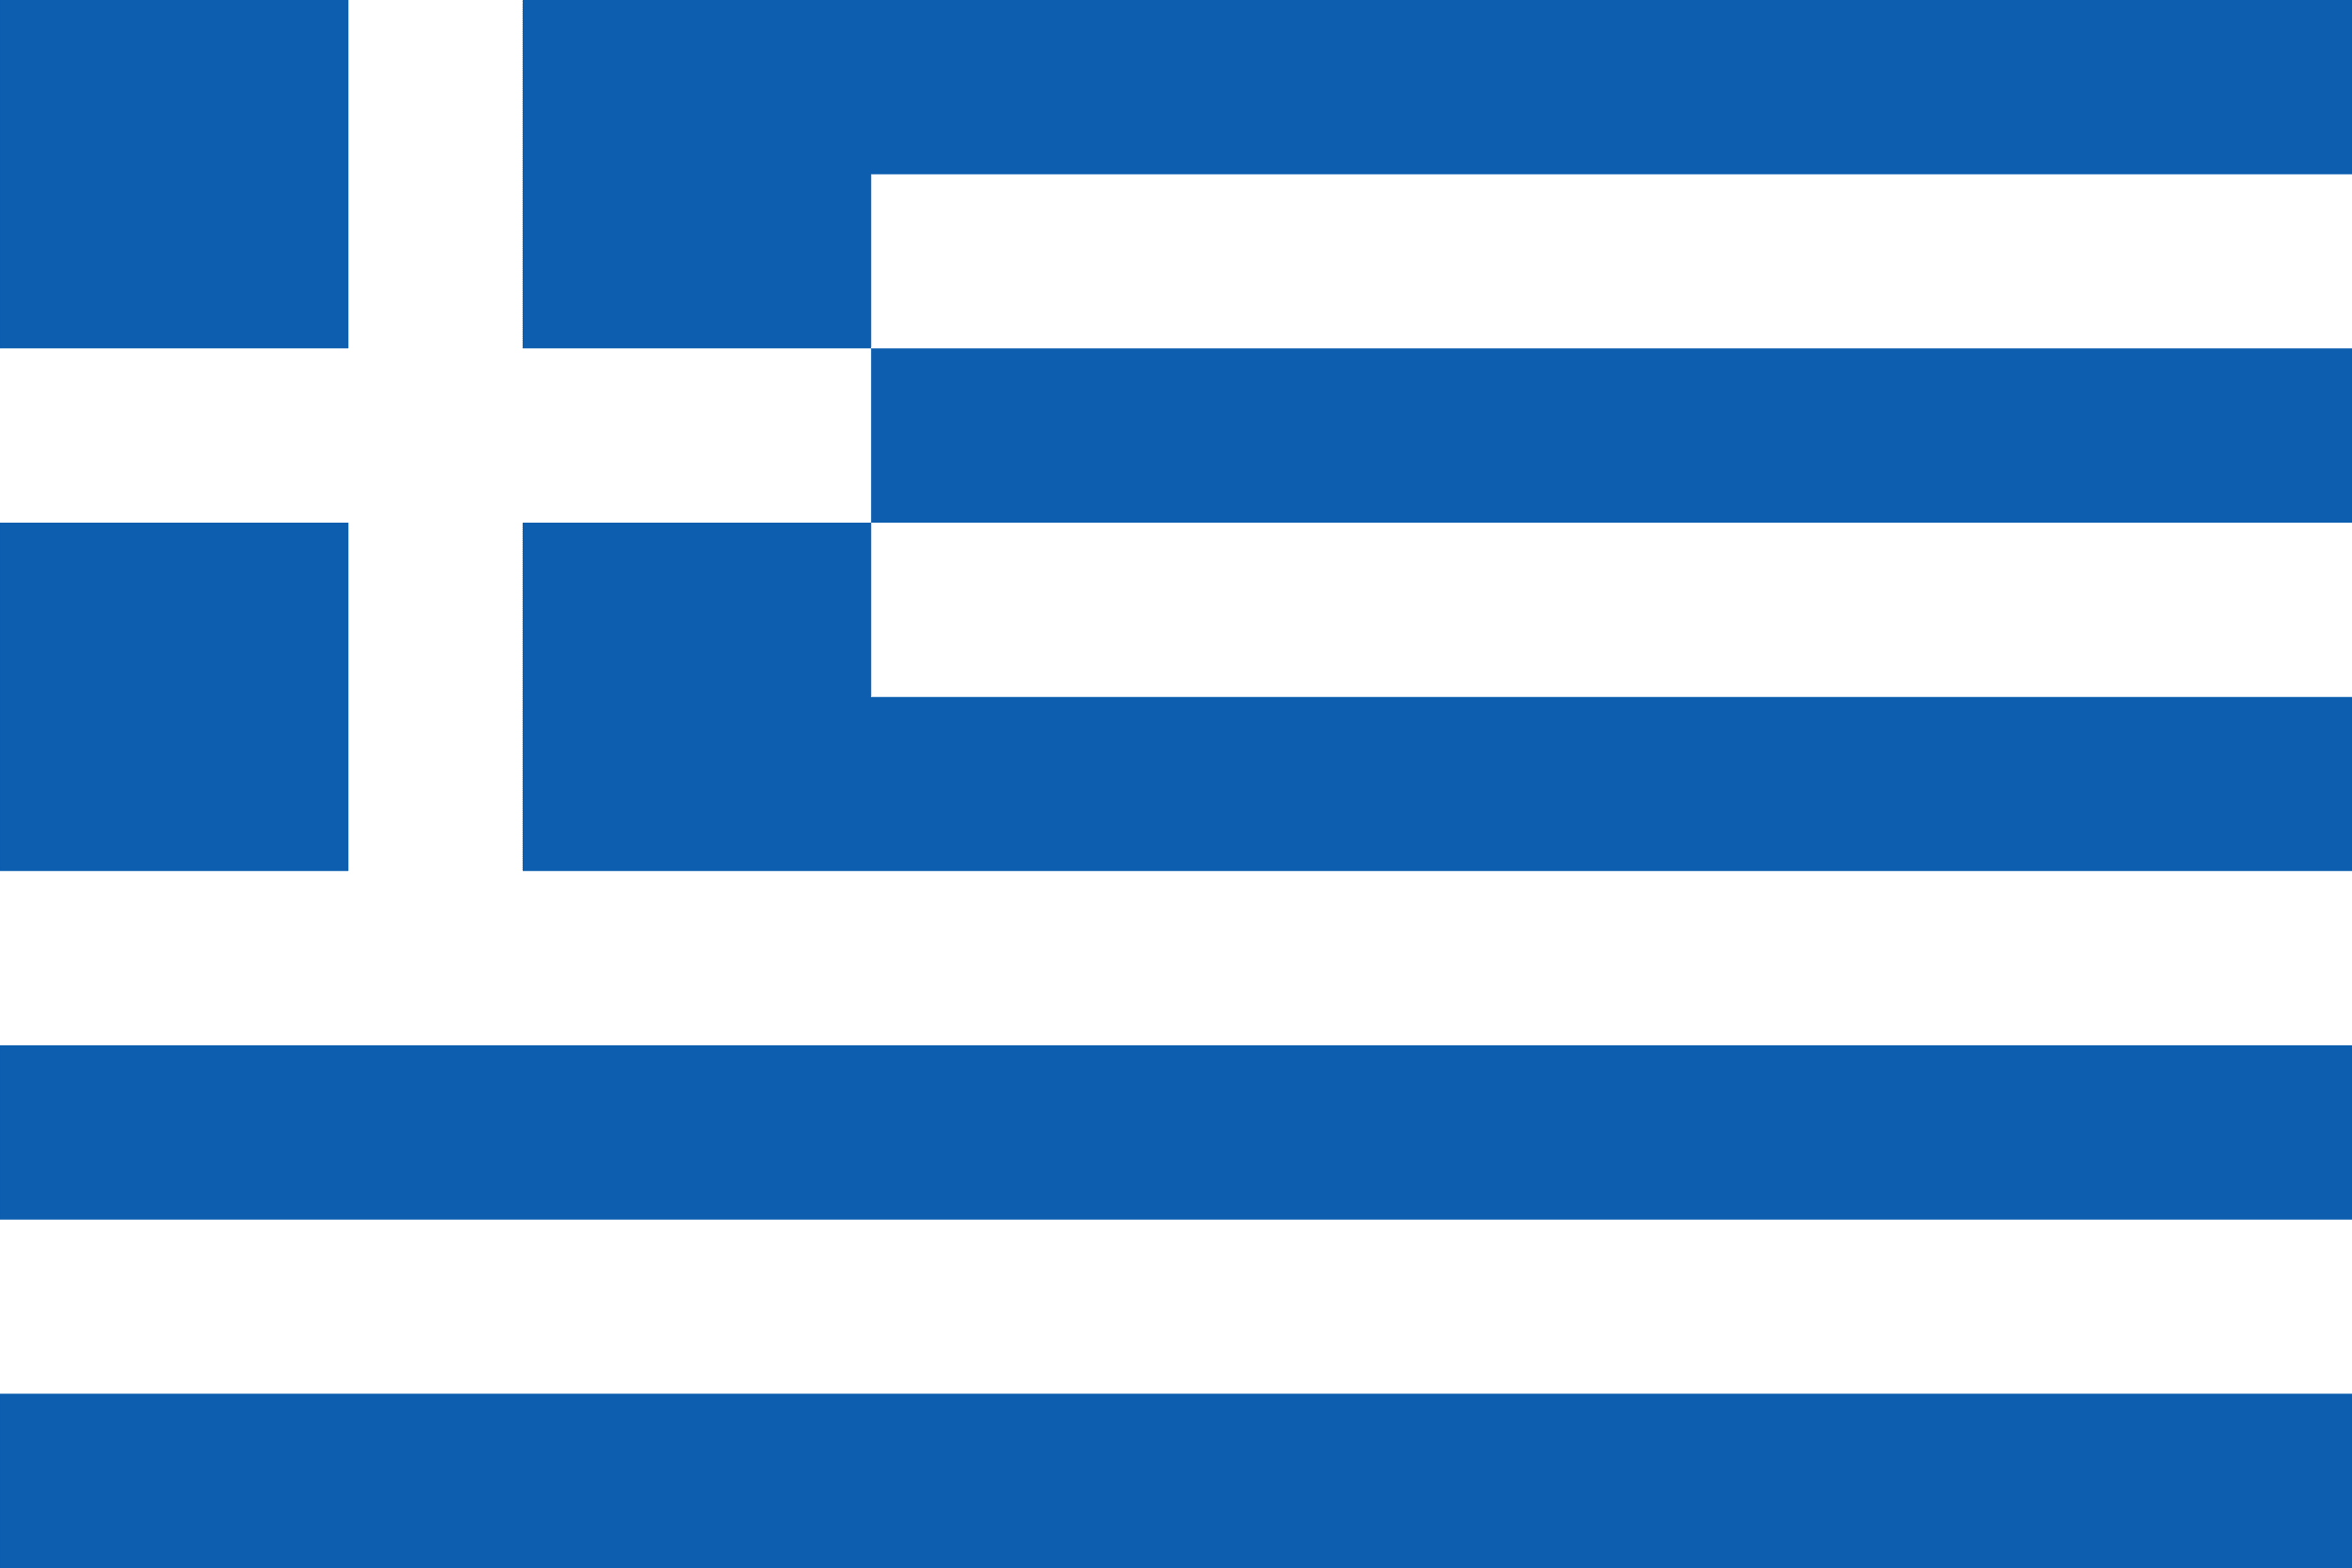

Greenland


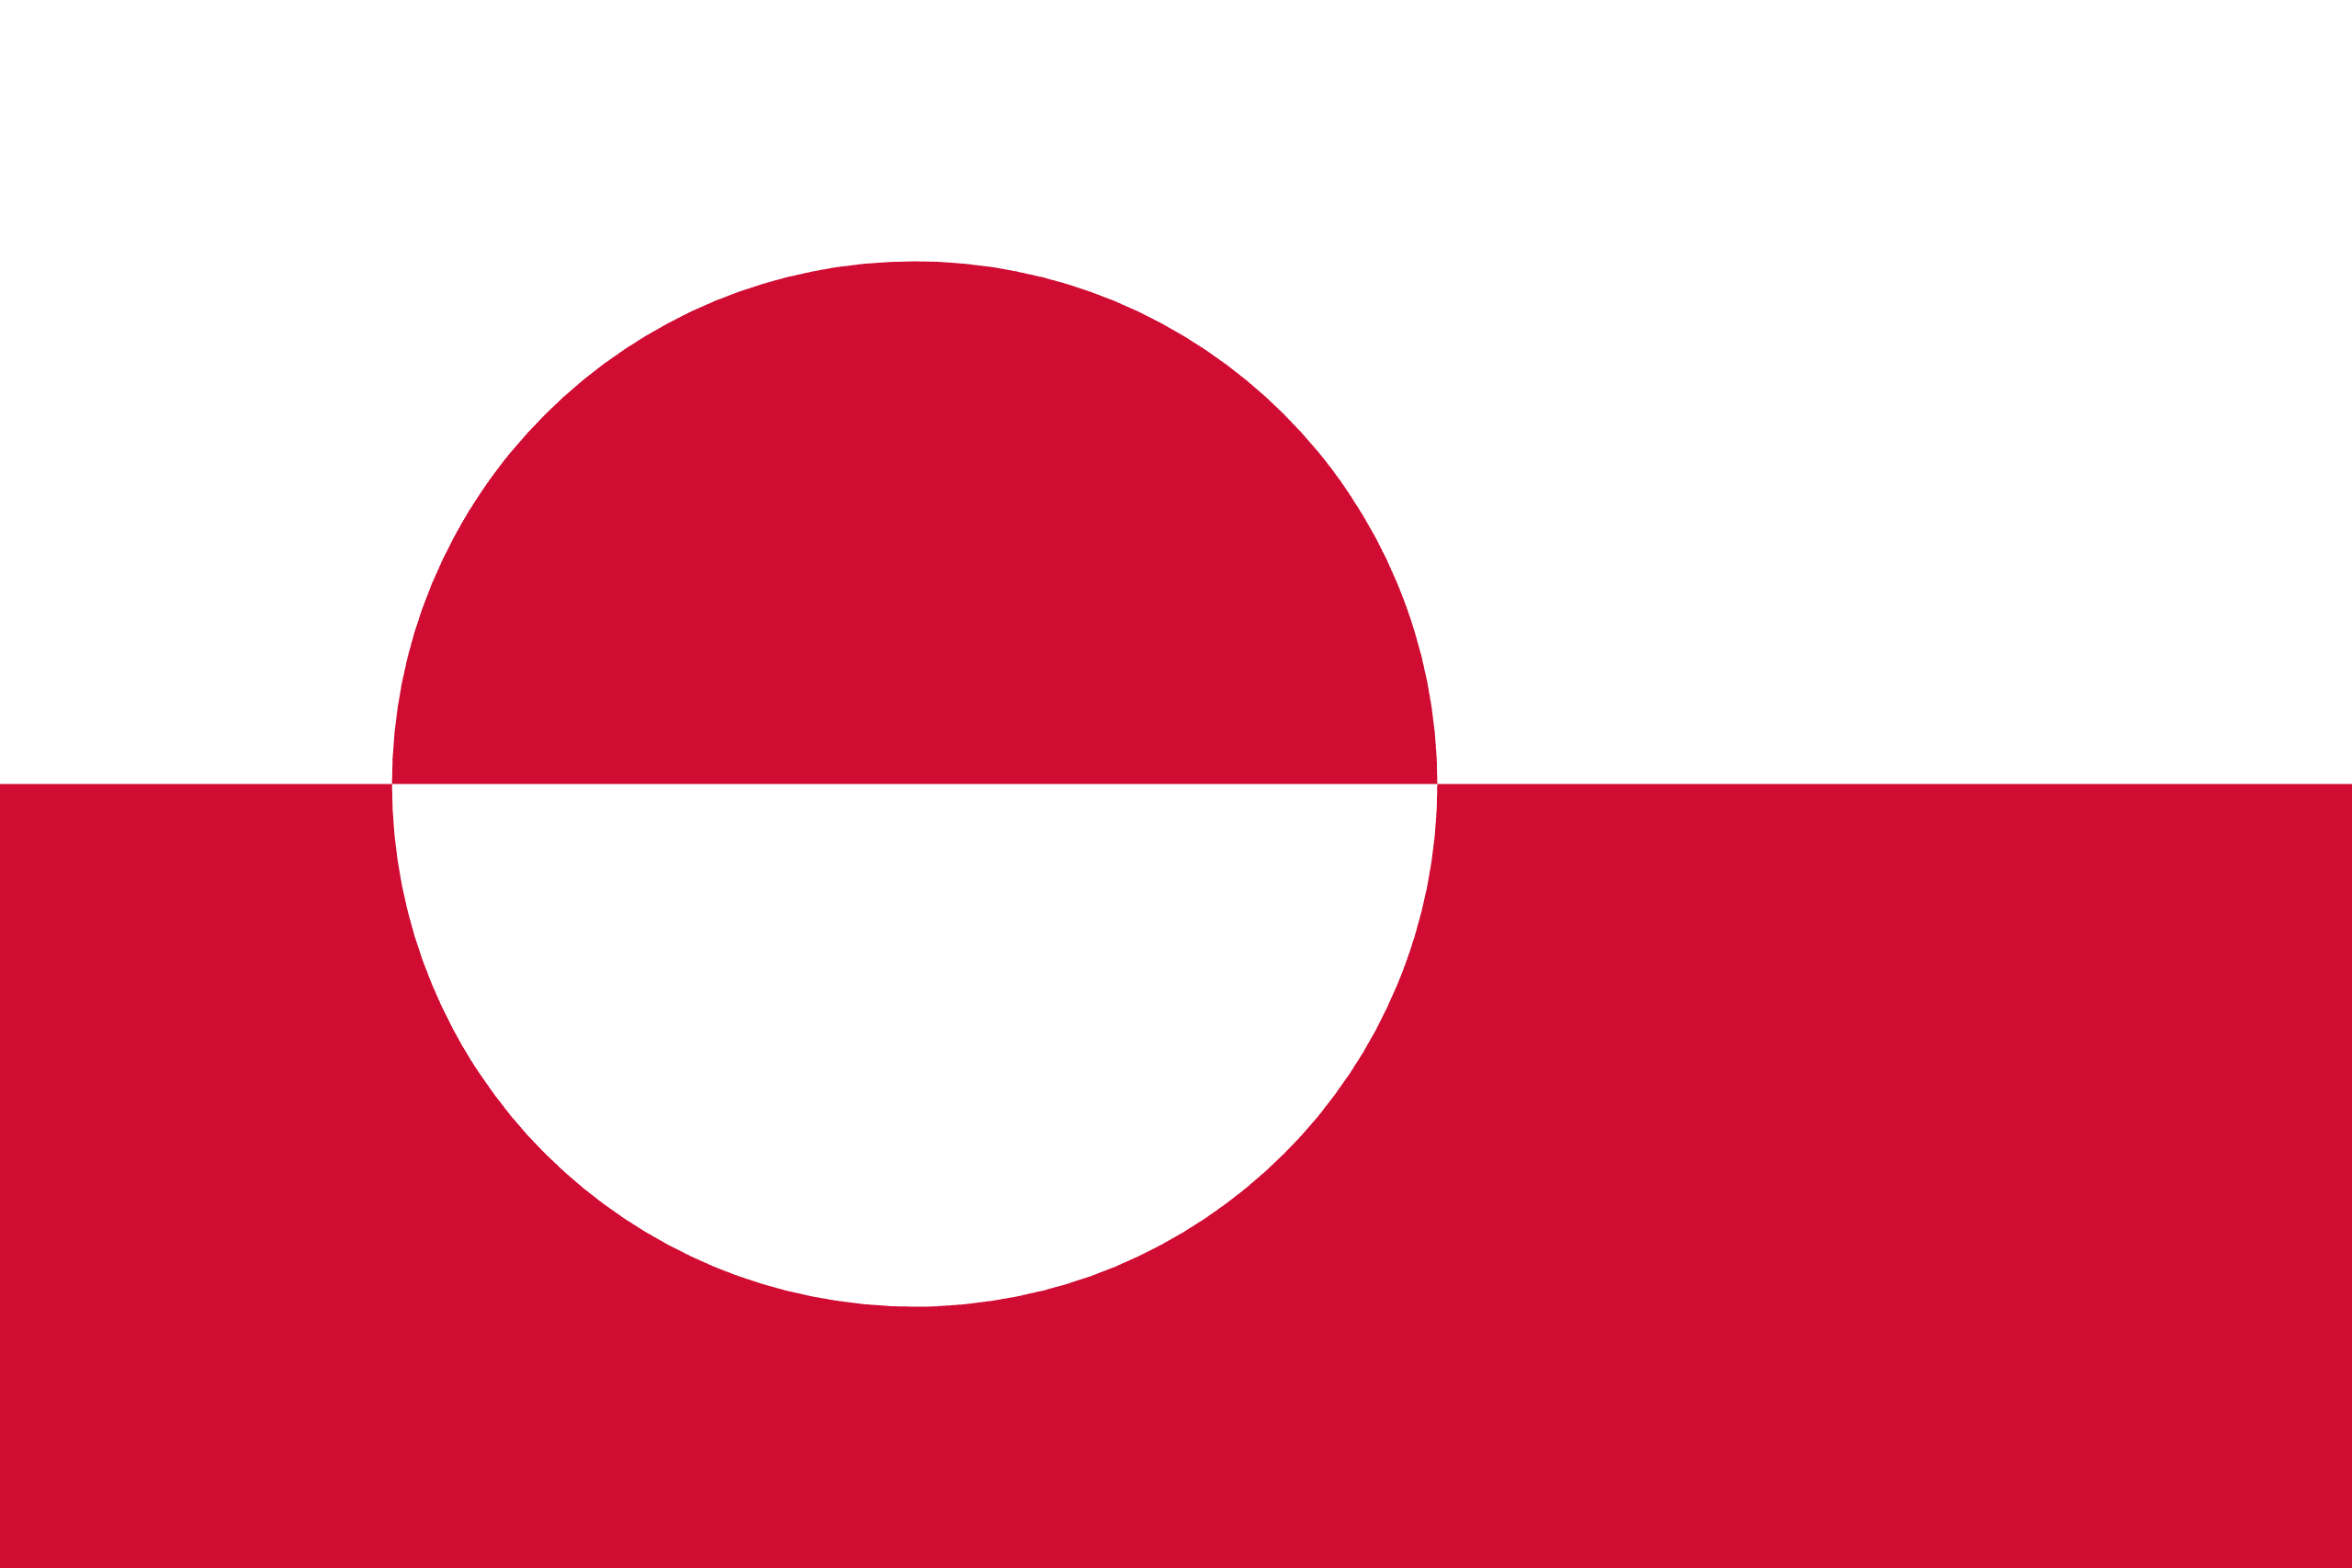

Grenada


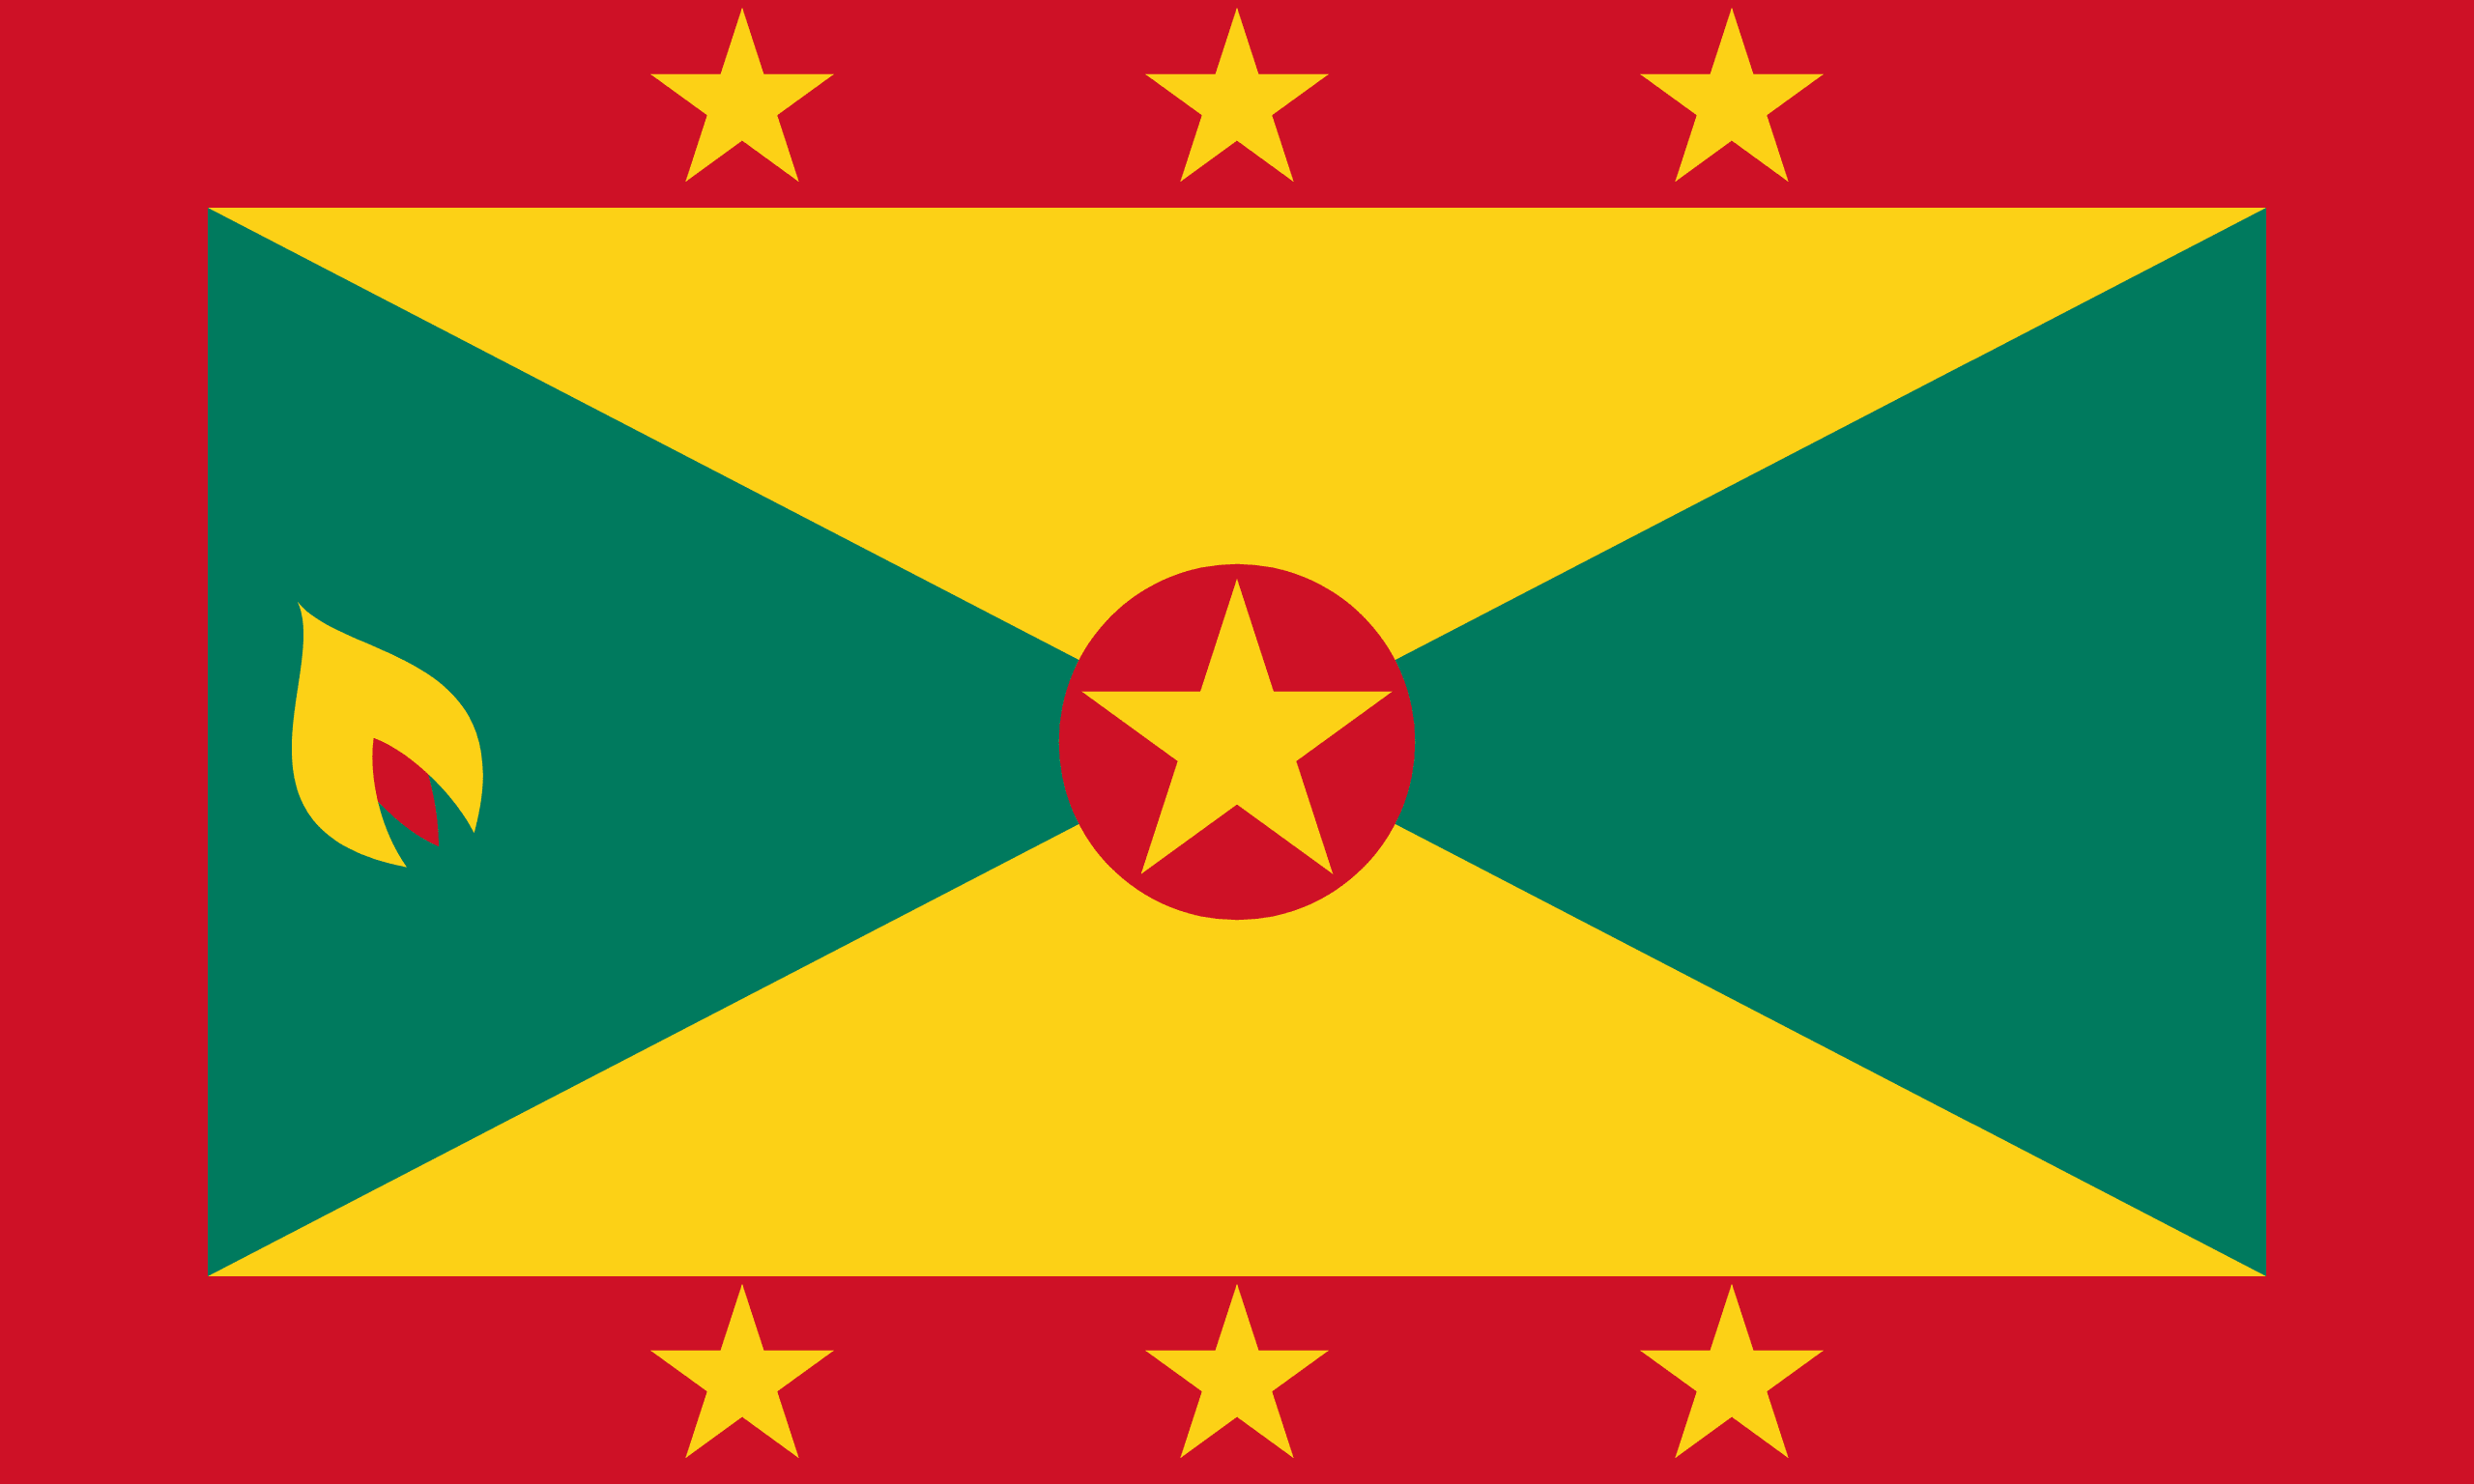

Guadeloupe


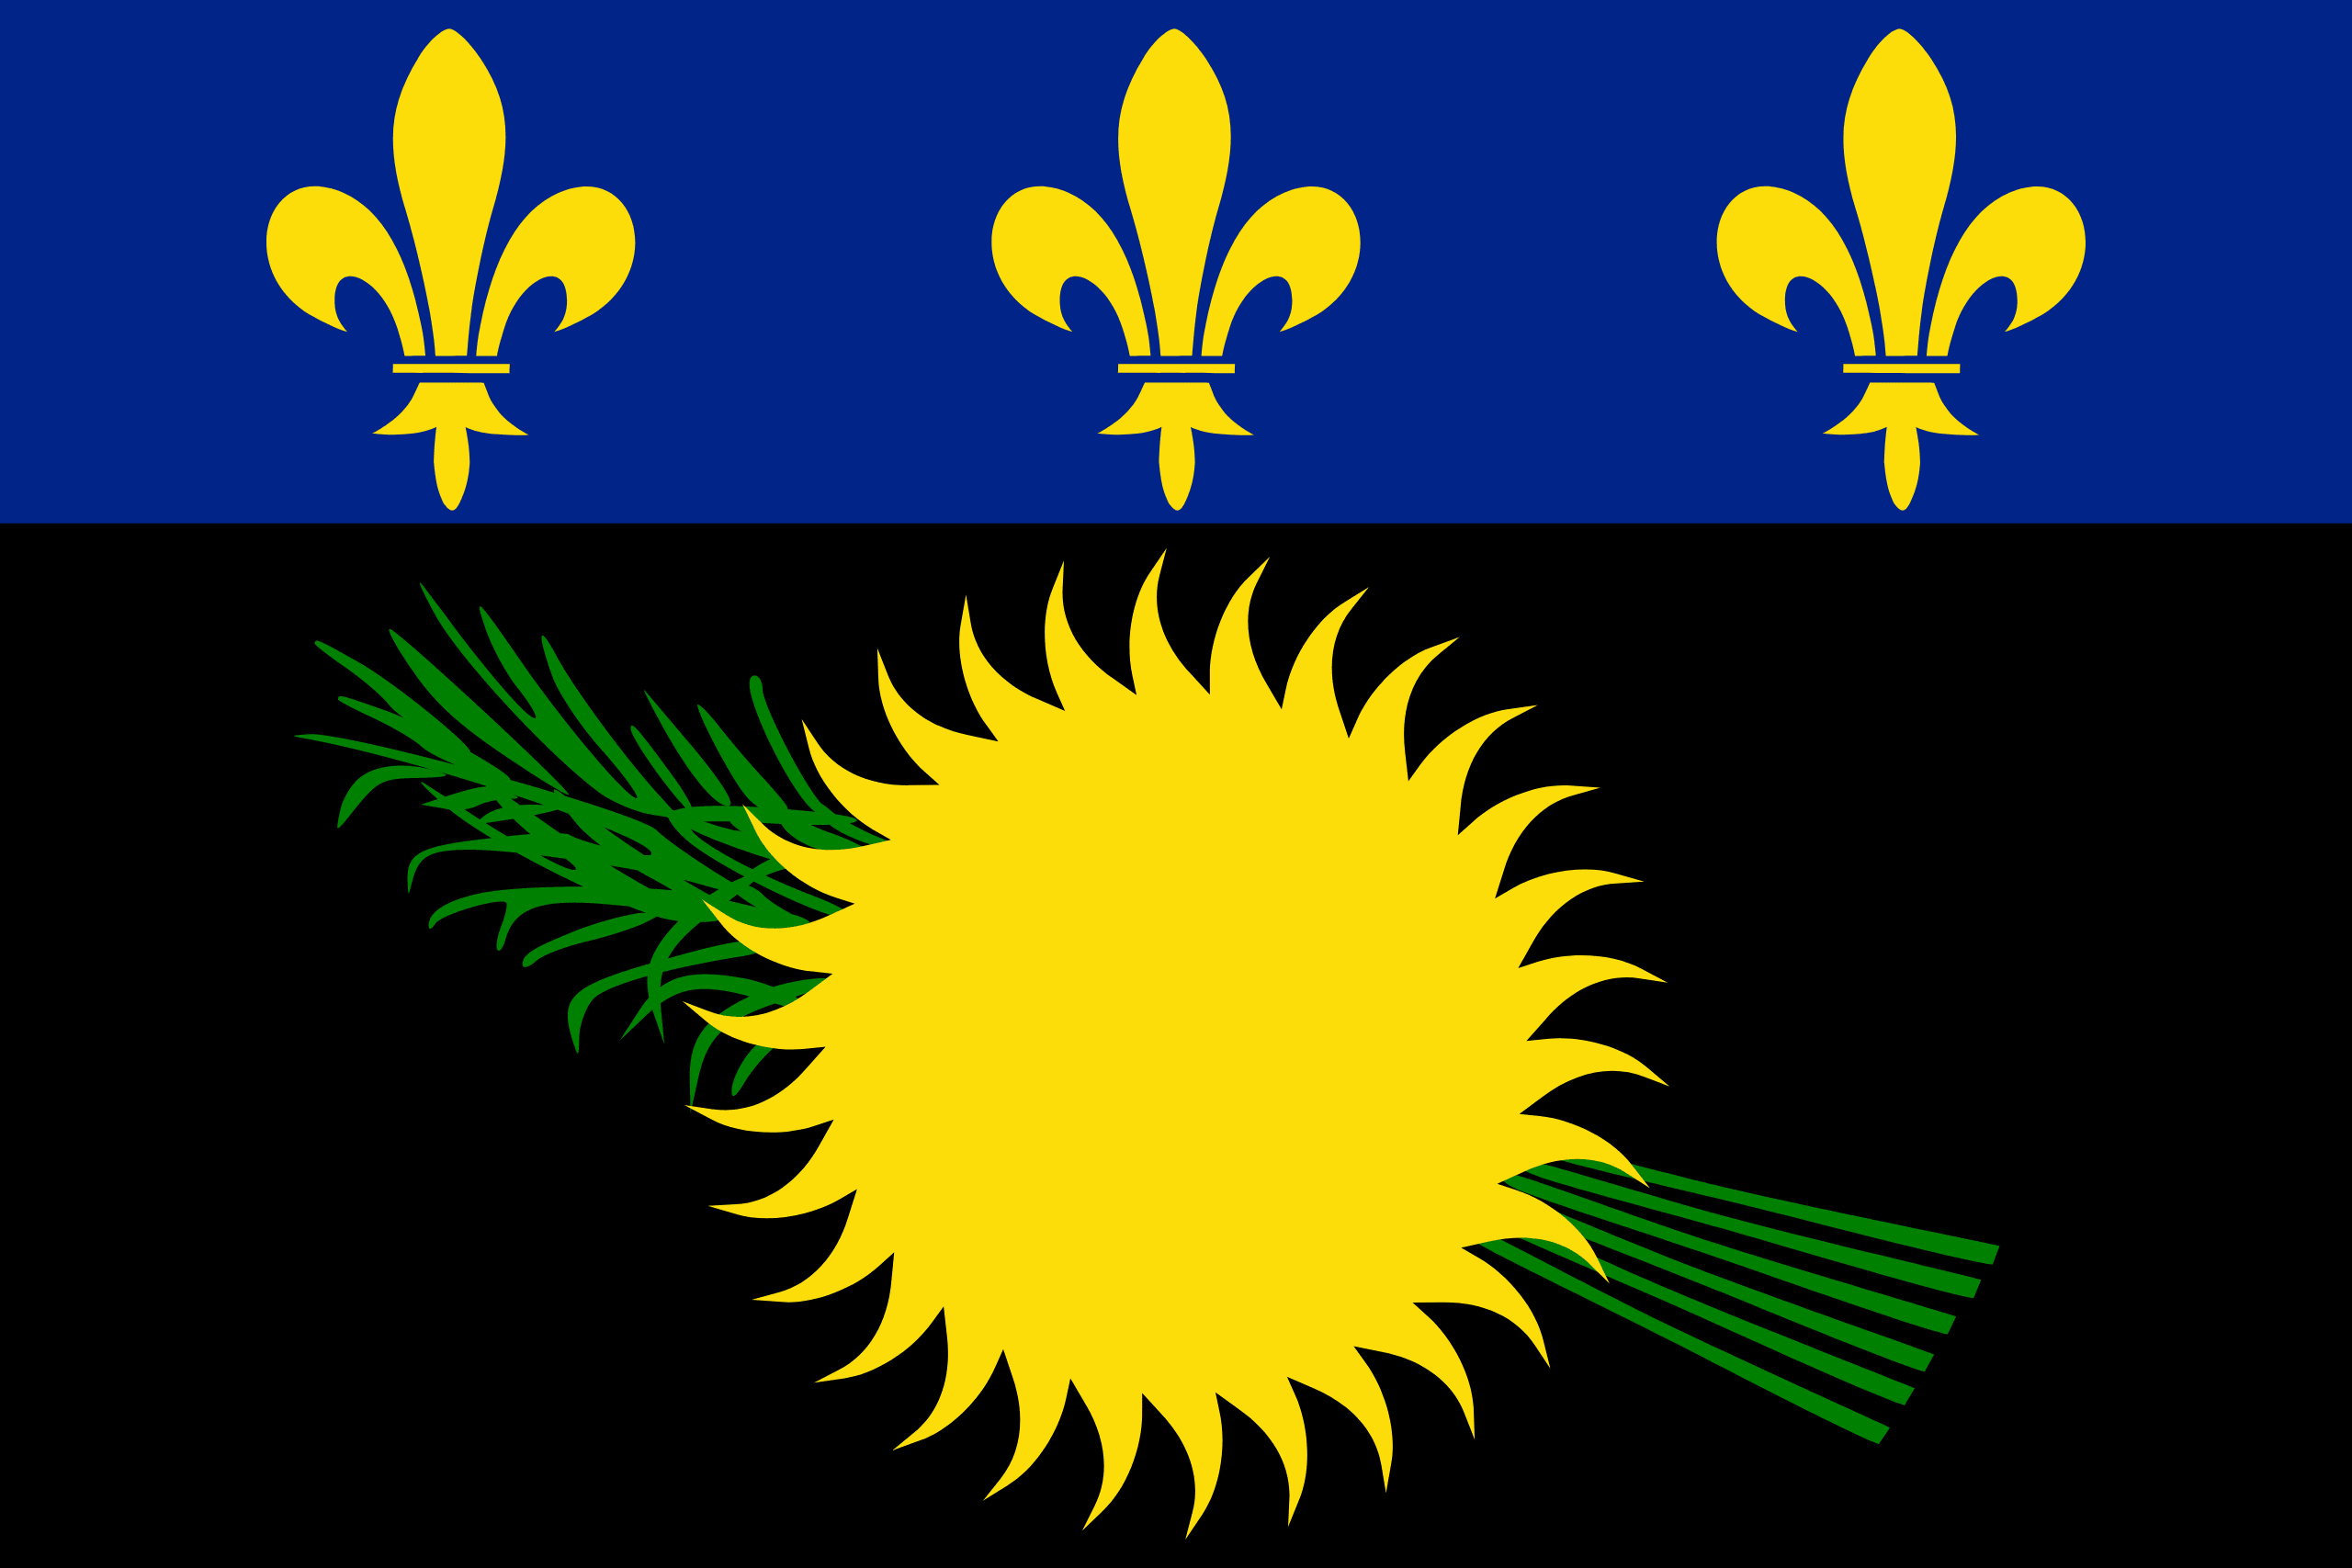

Guam


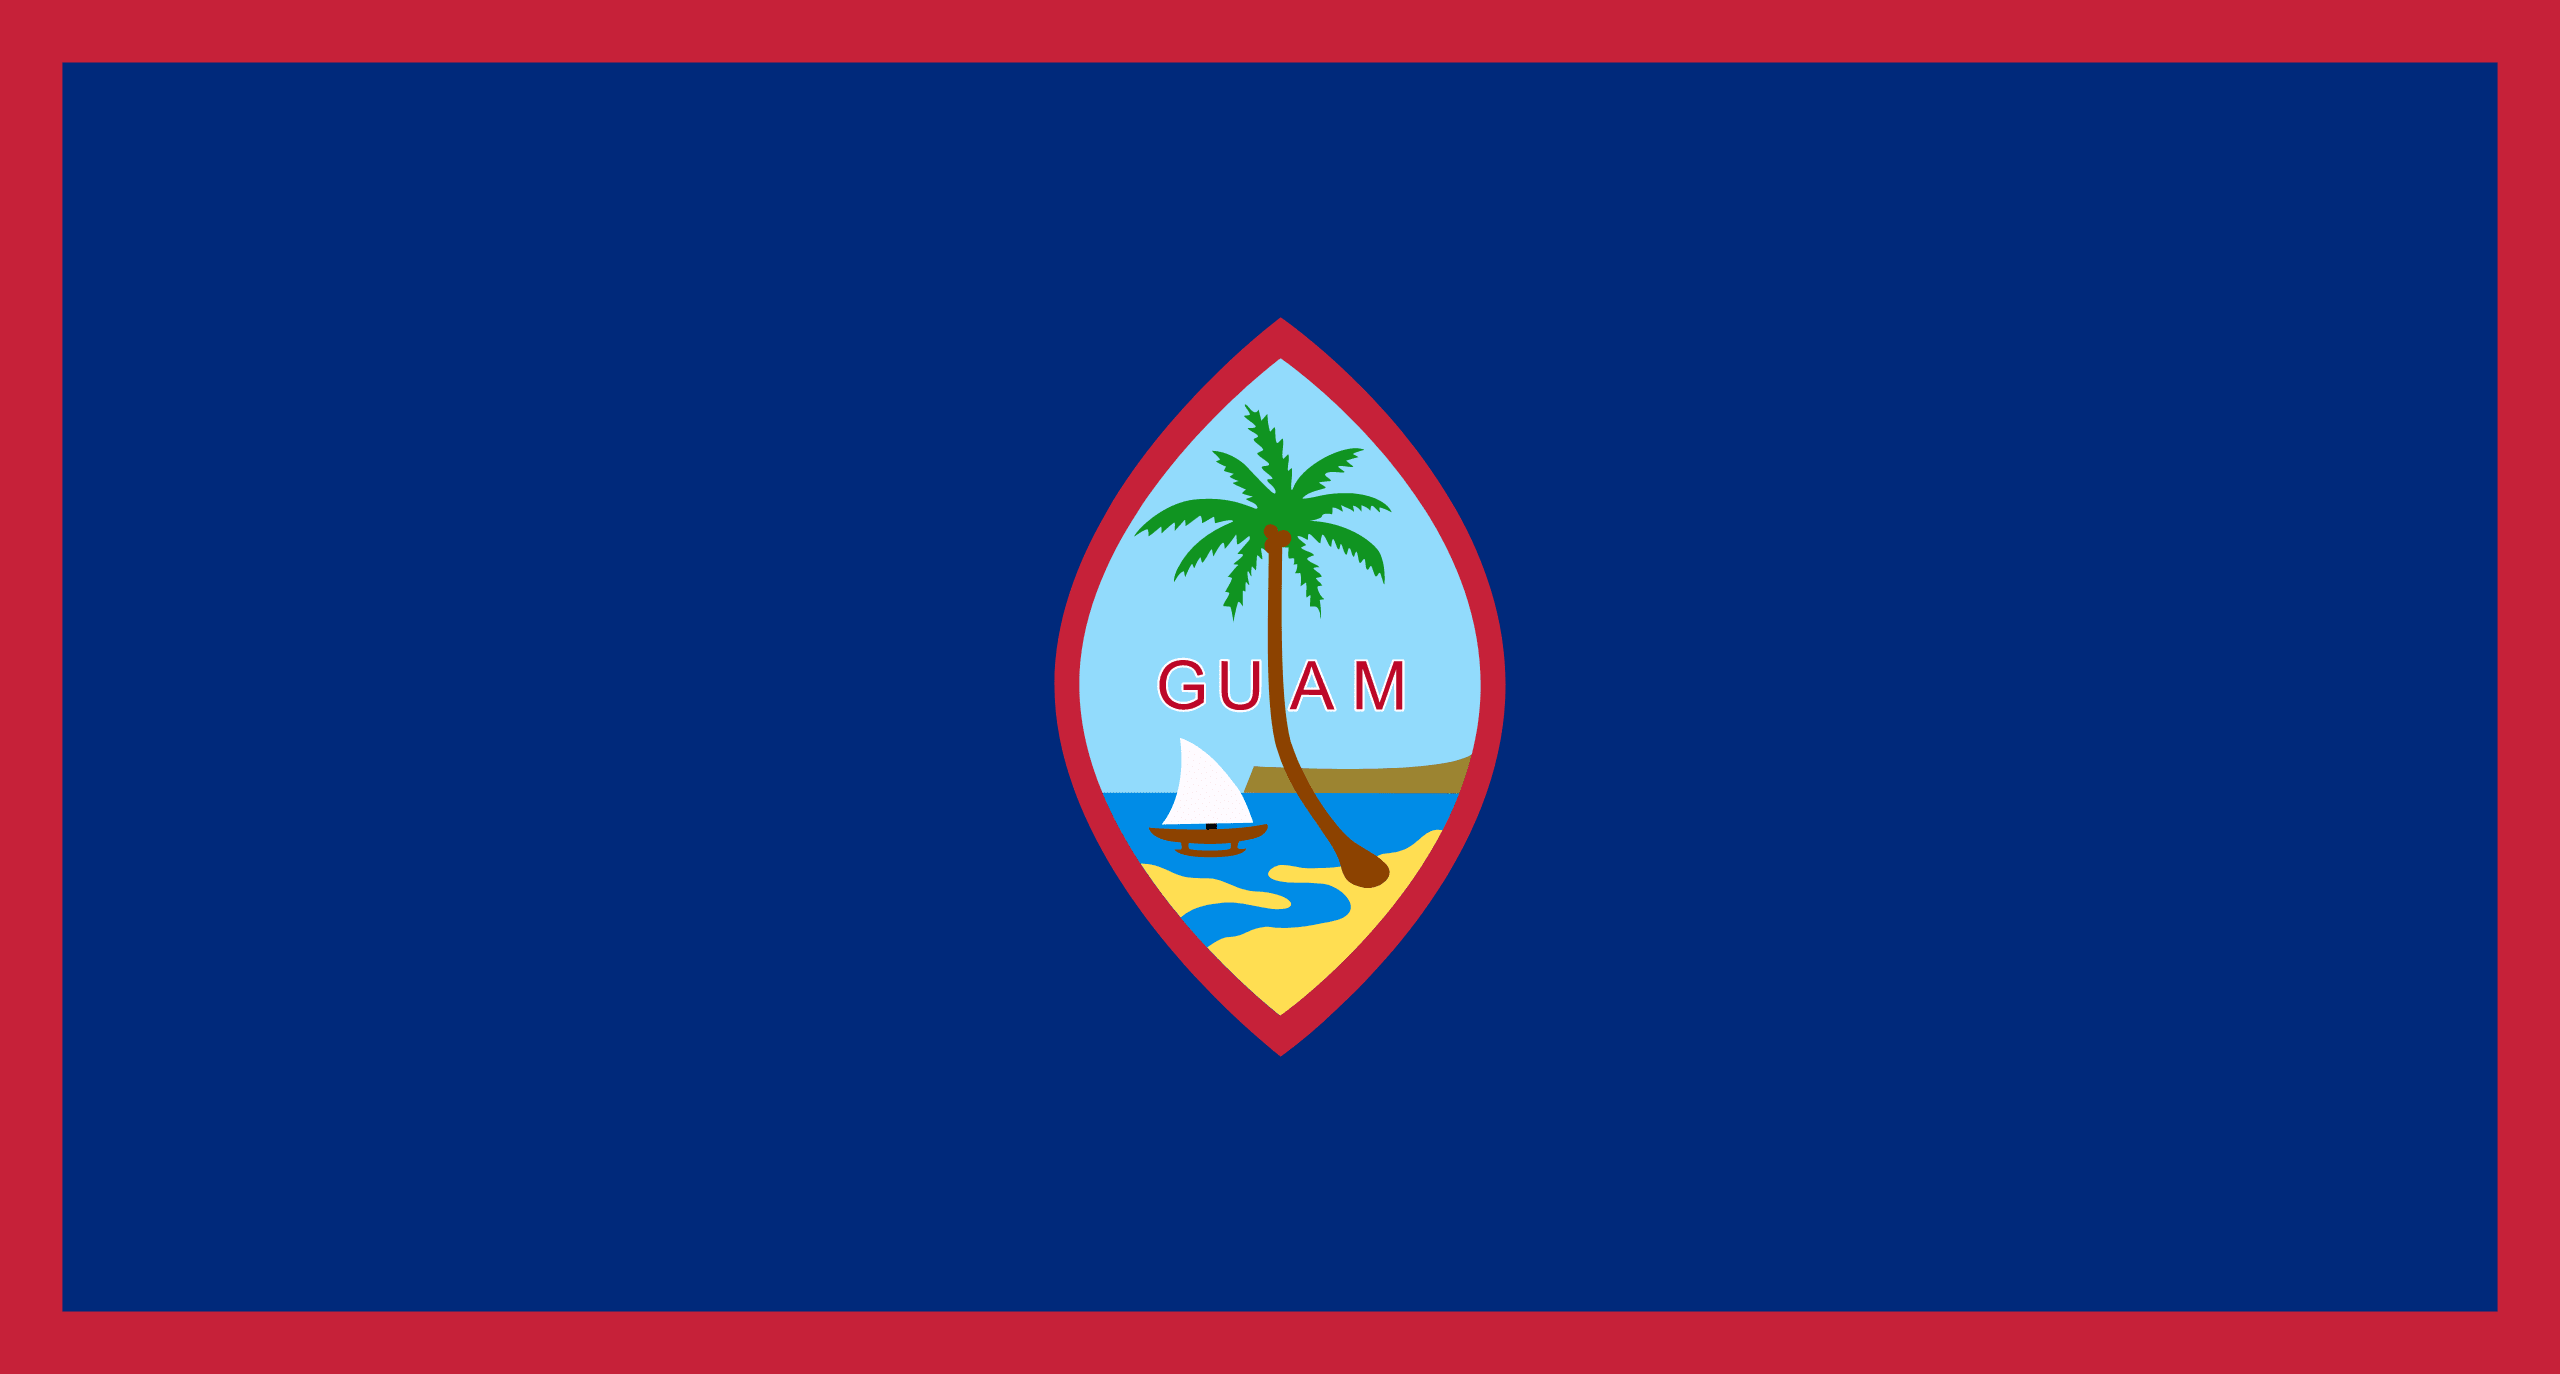

Guatemala


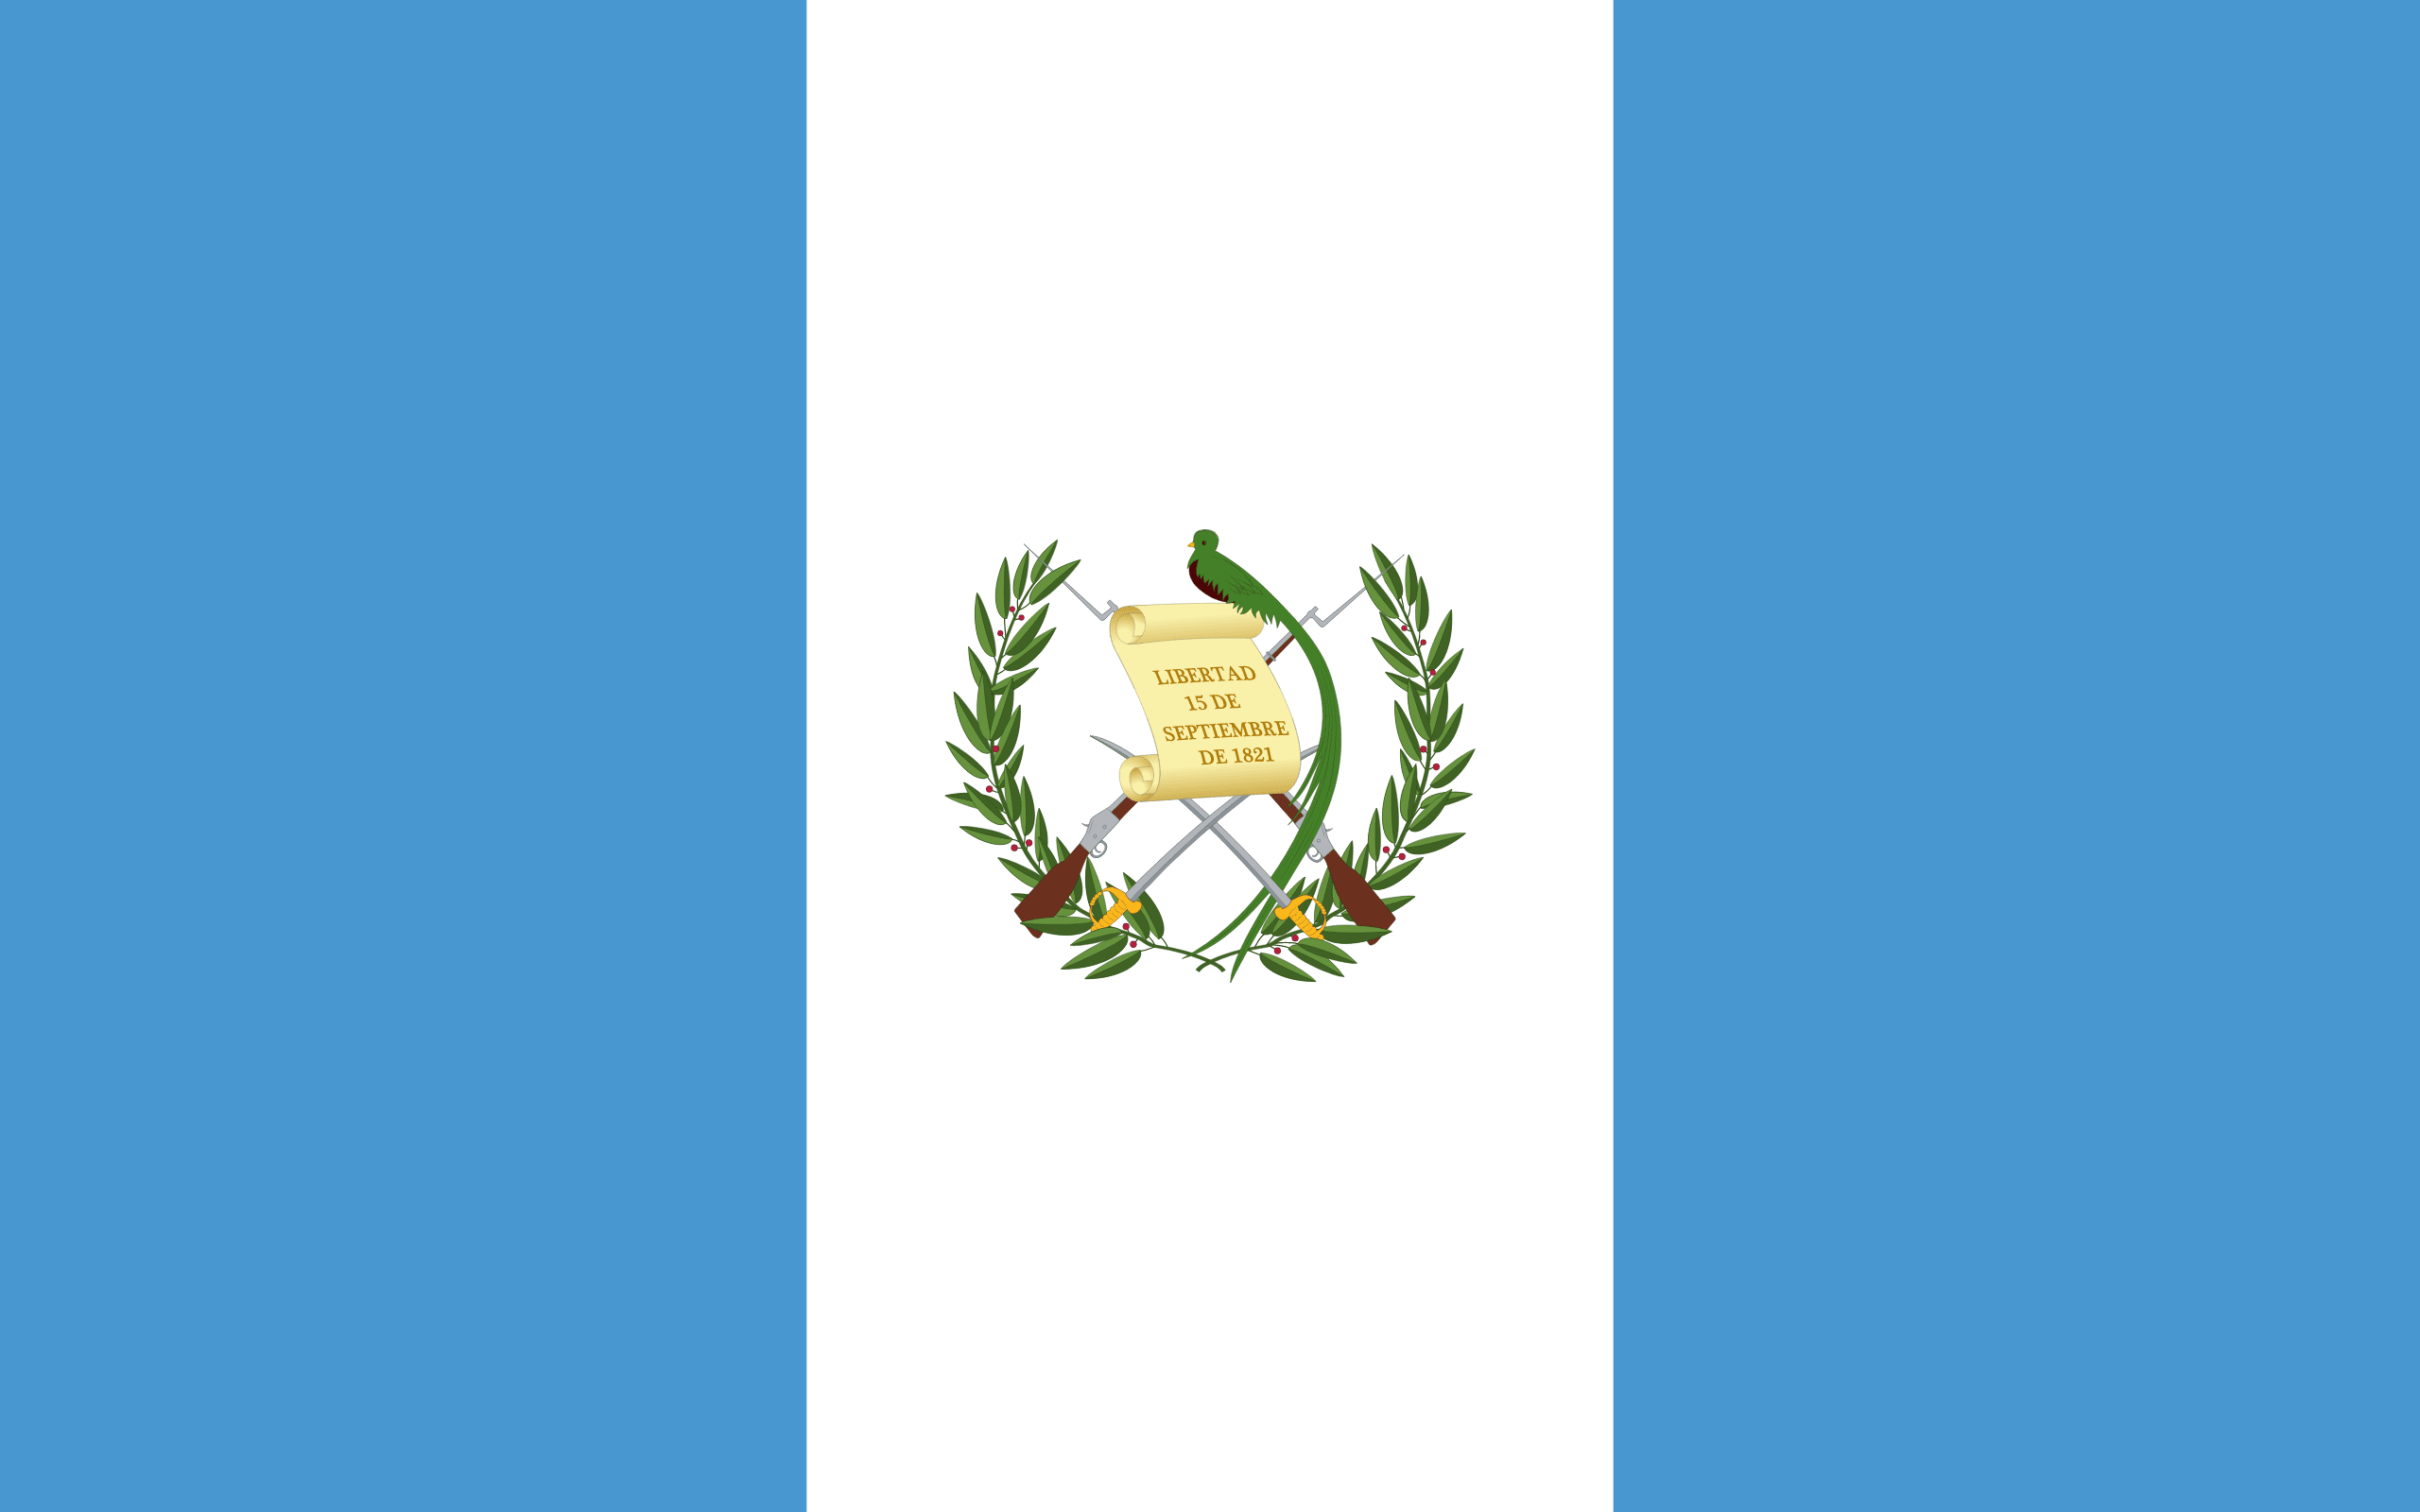

Guernsey


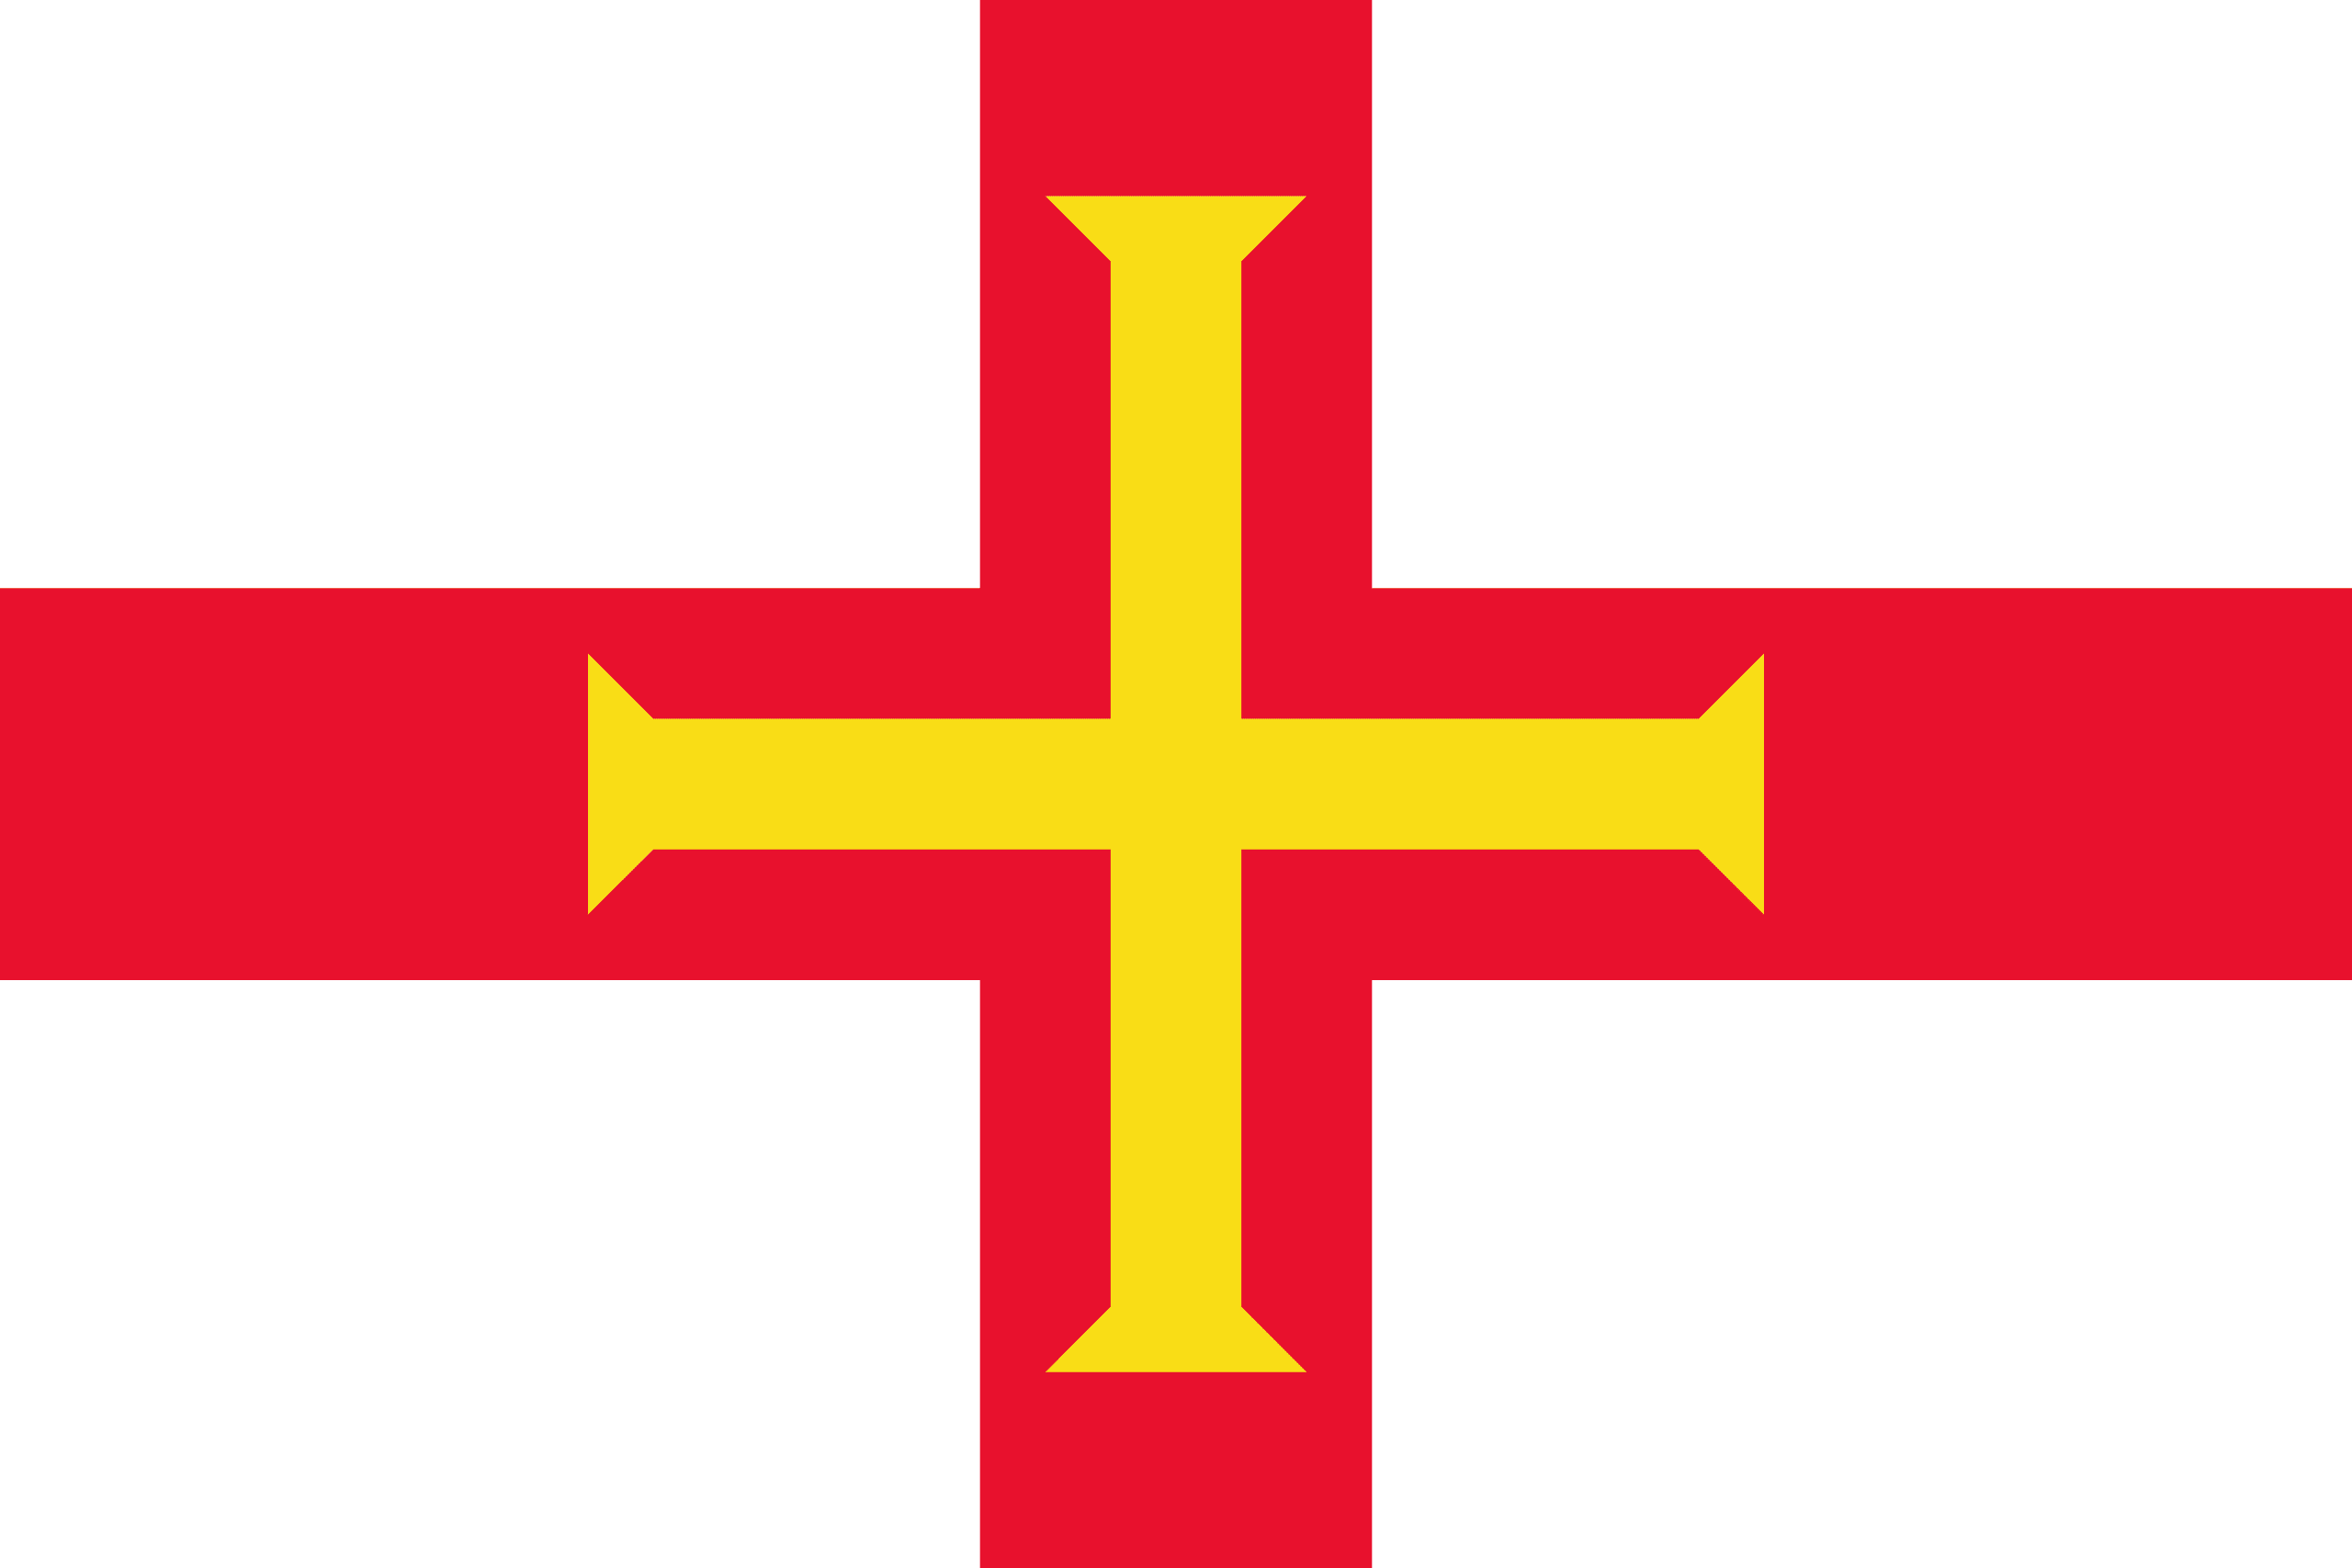

Guinea


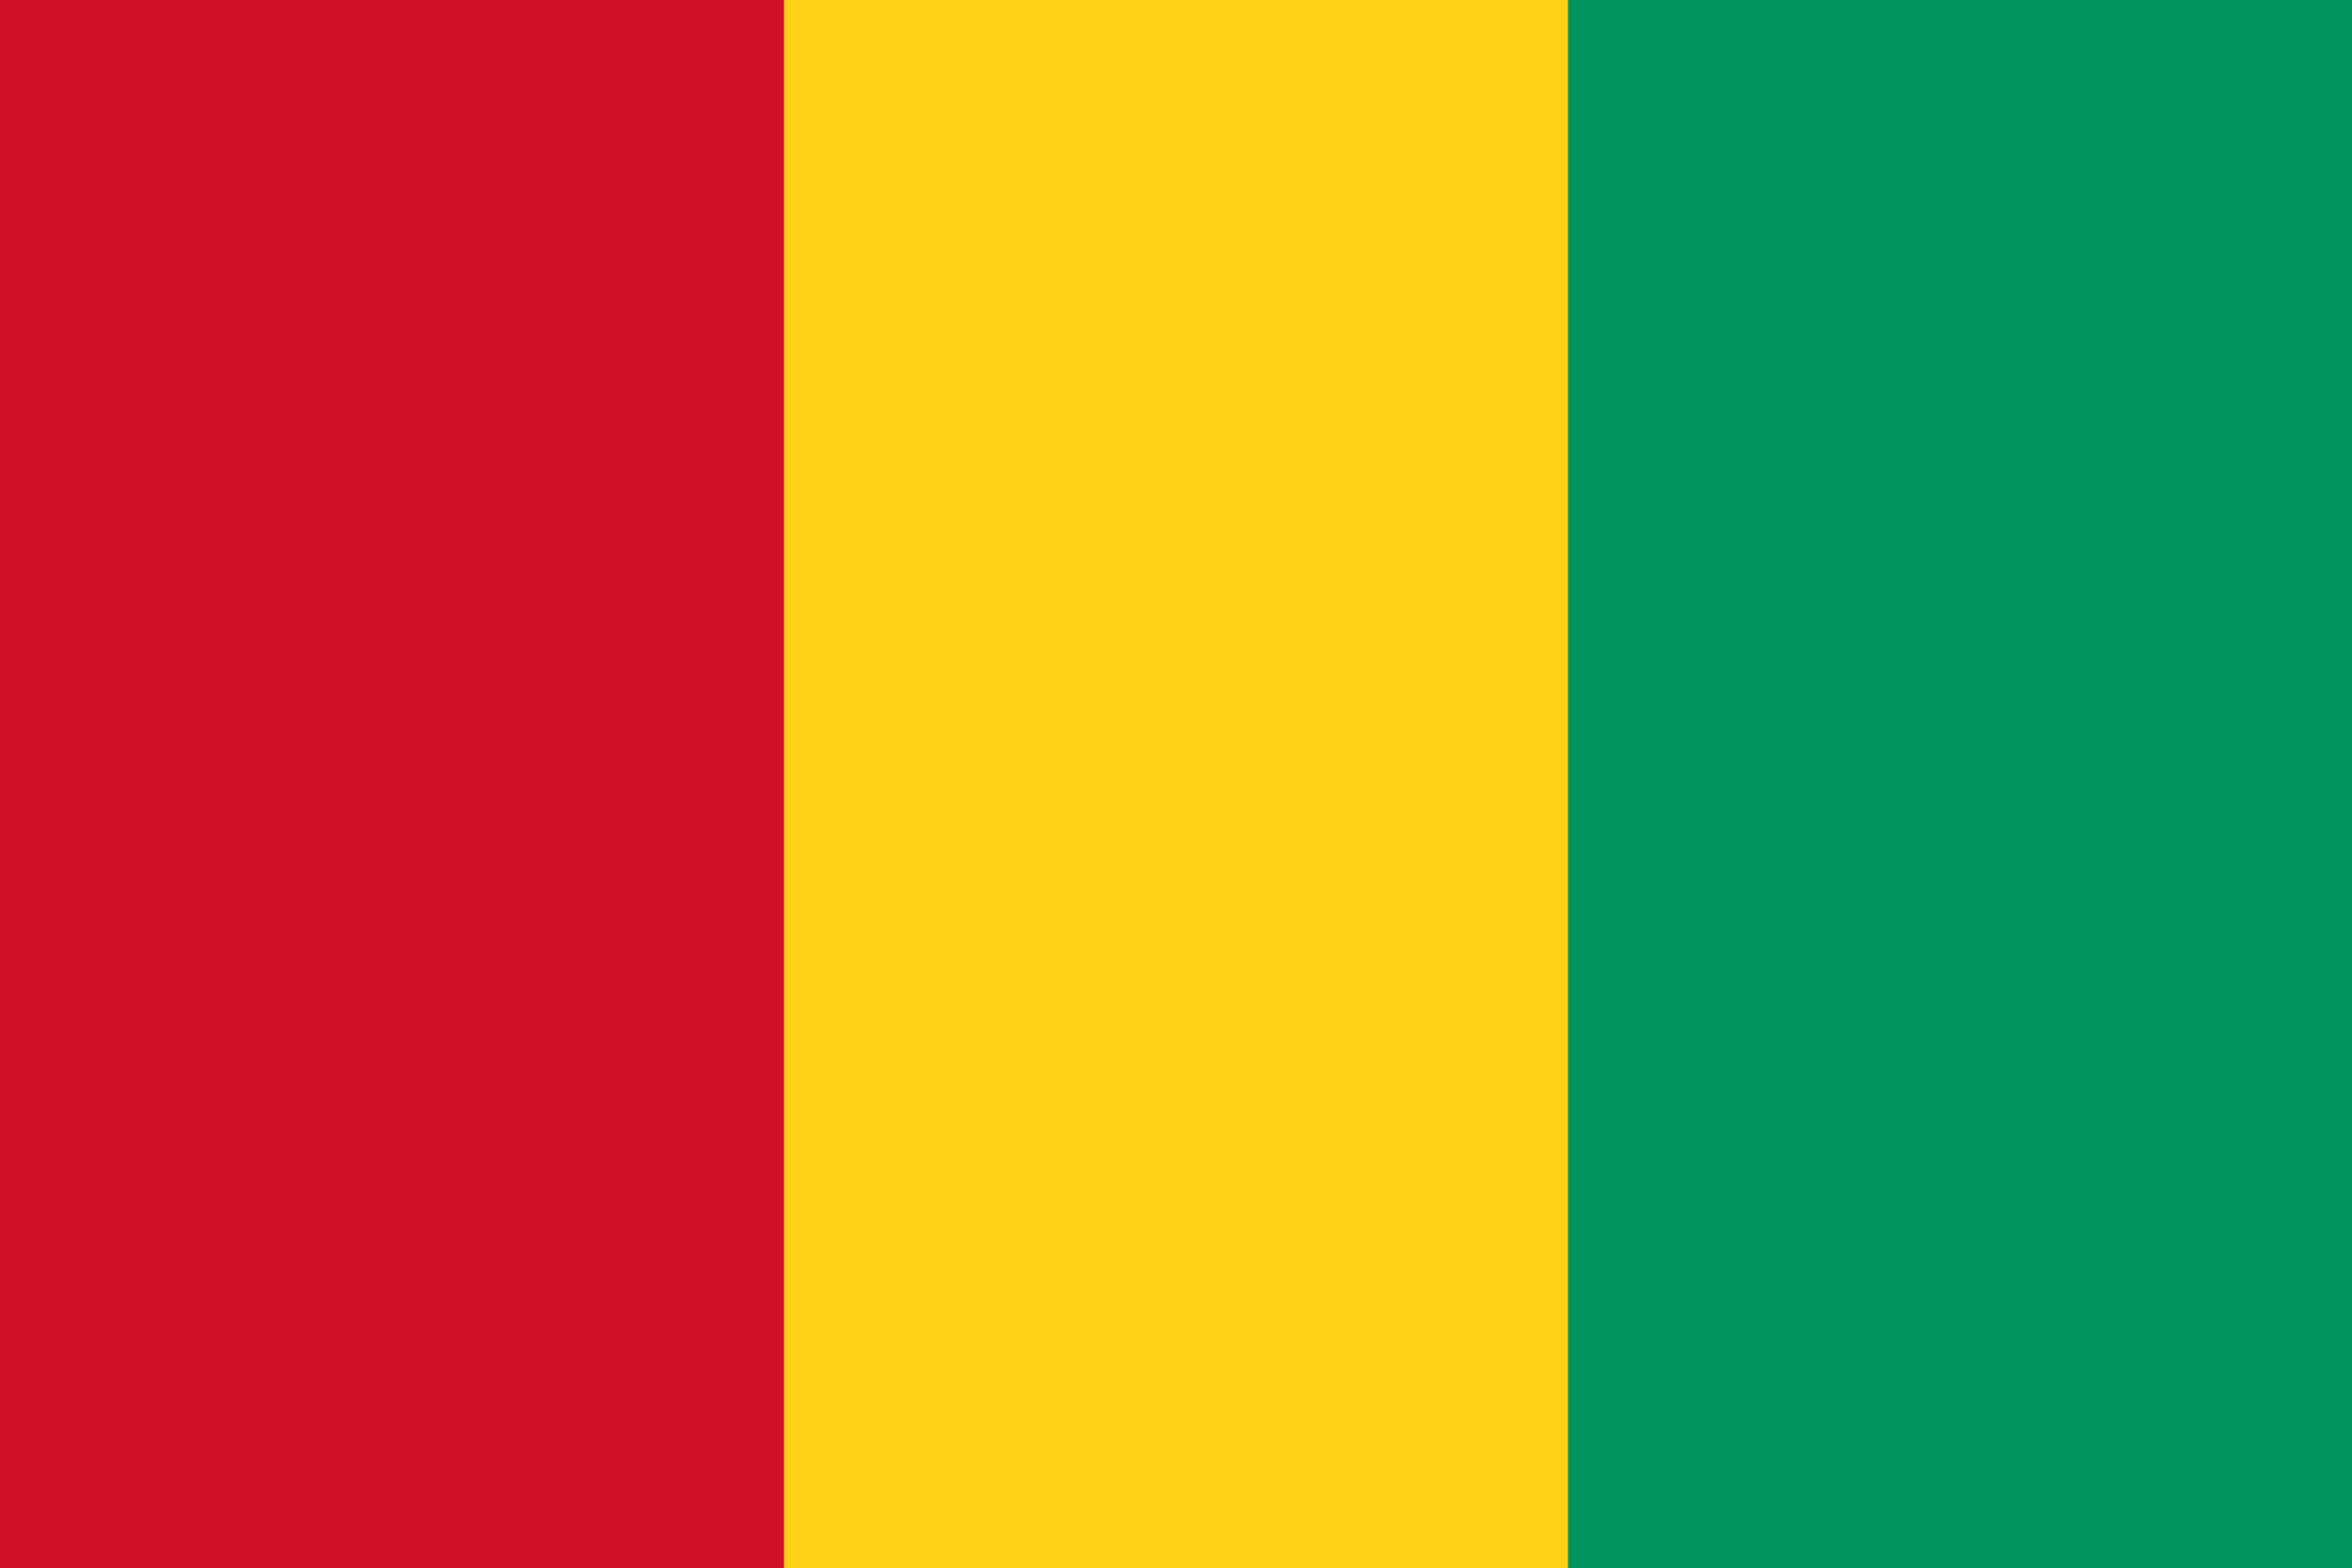

Guinea-Bissau


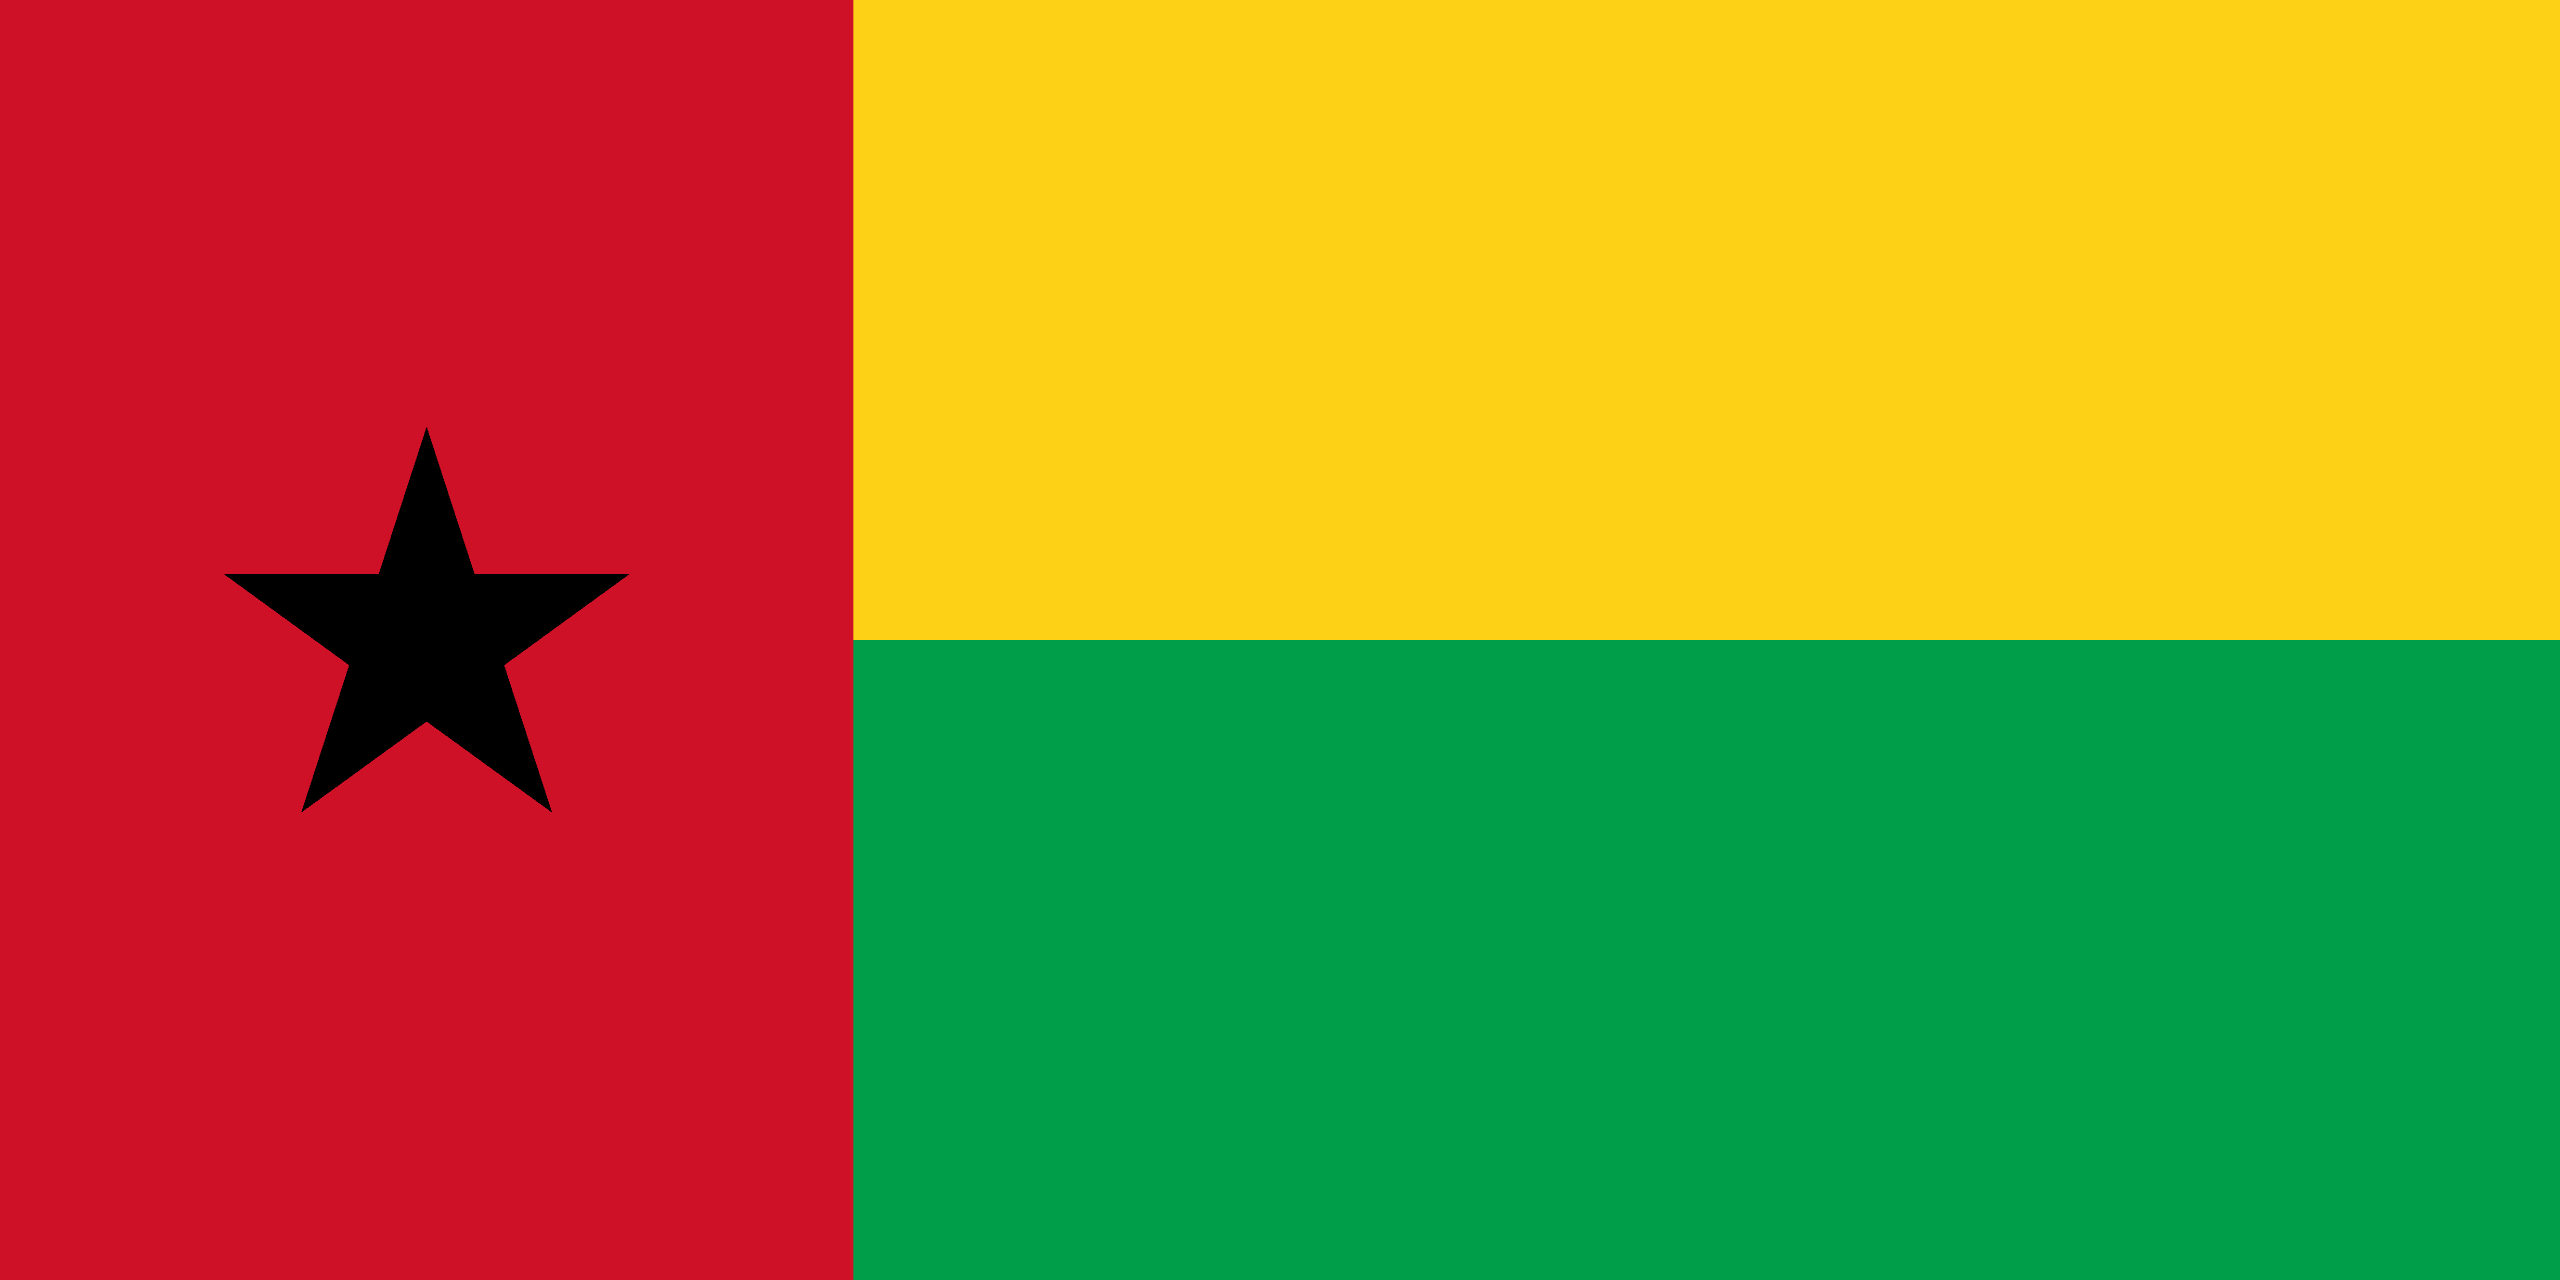

Guyana


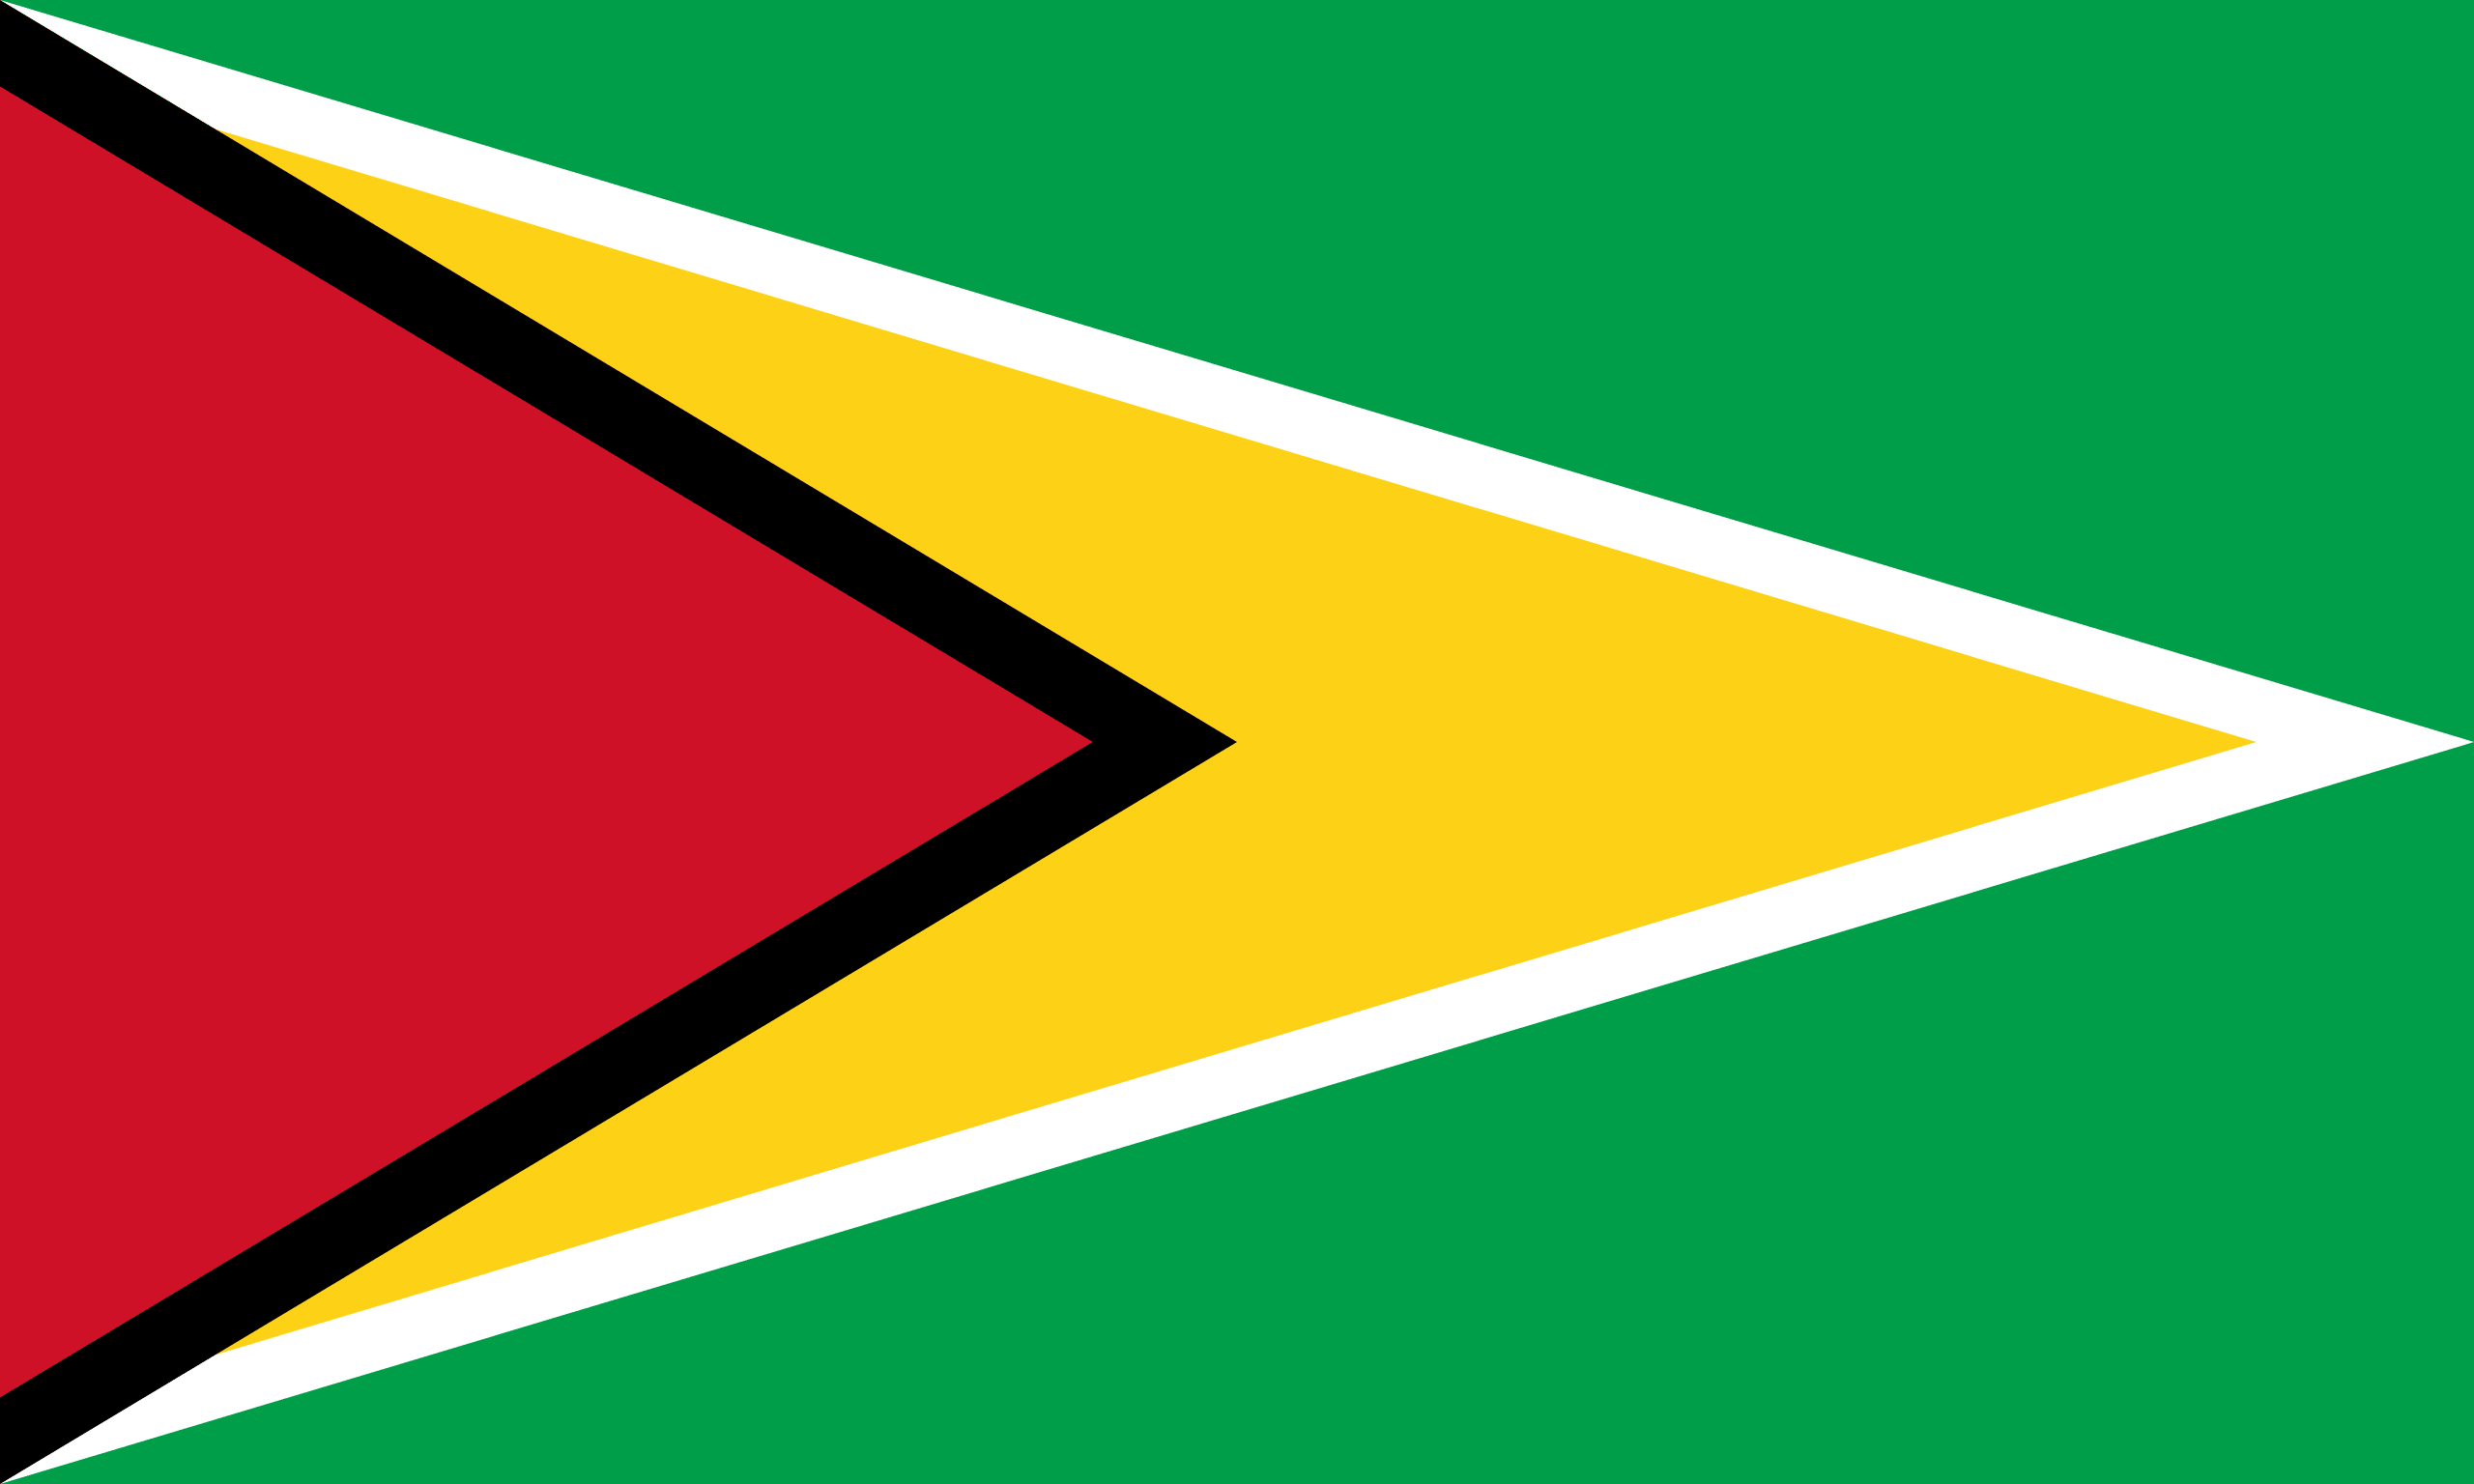

Haiti


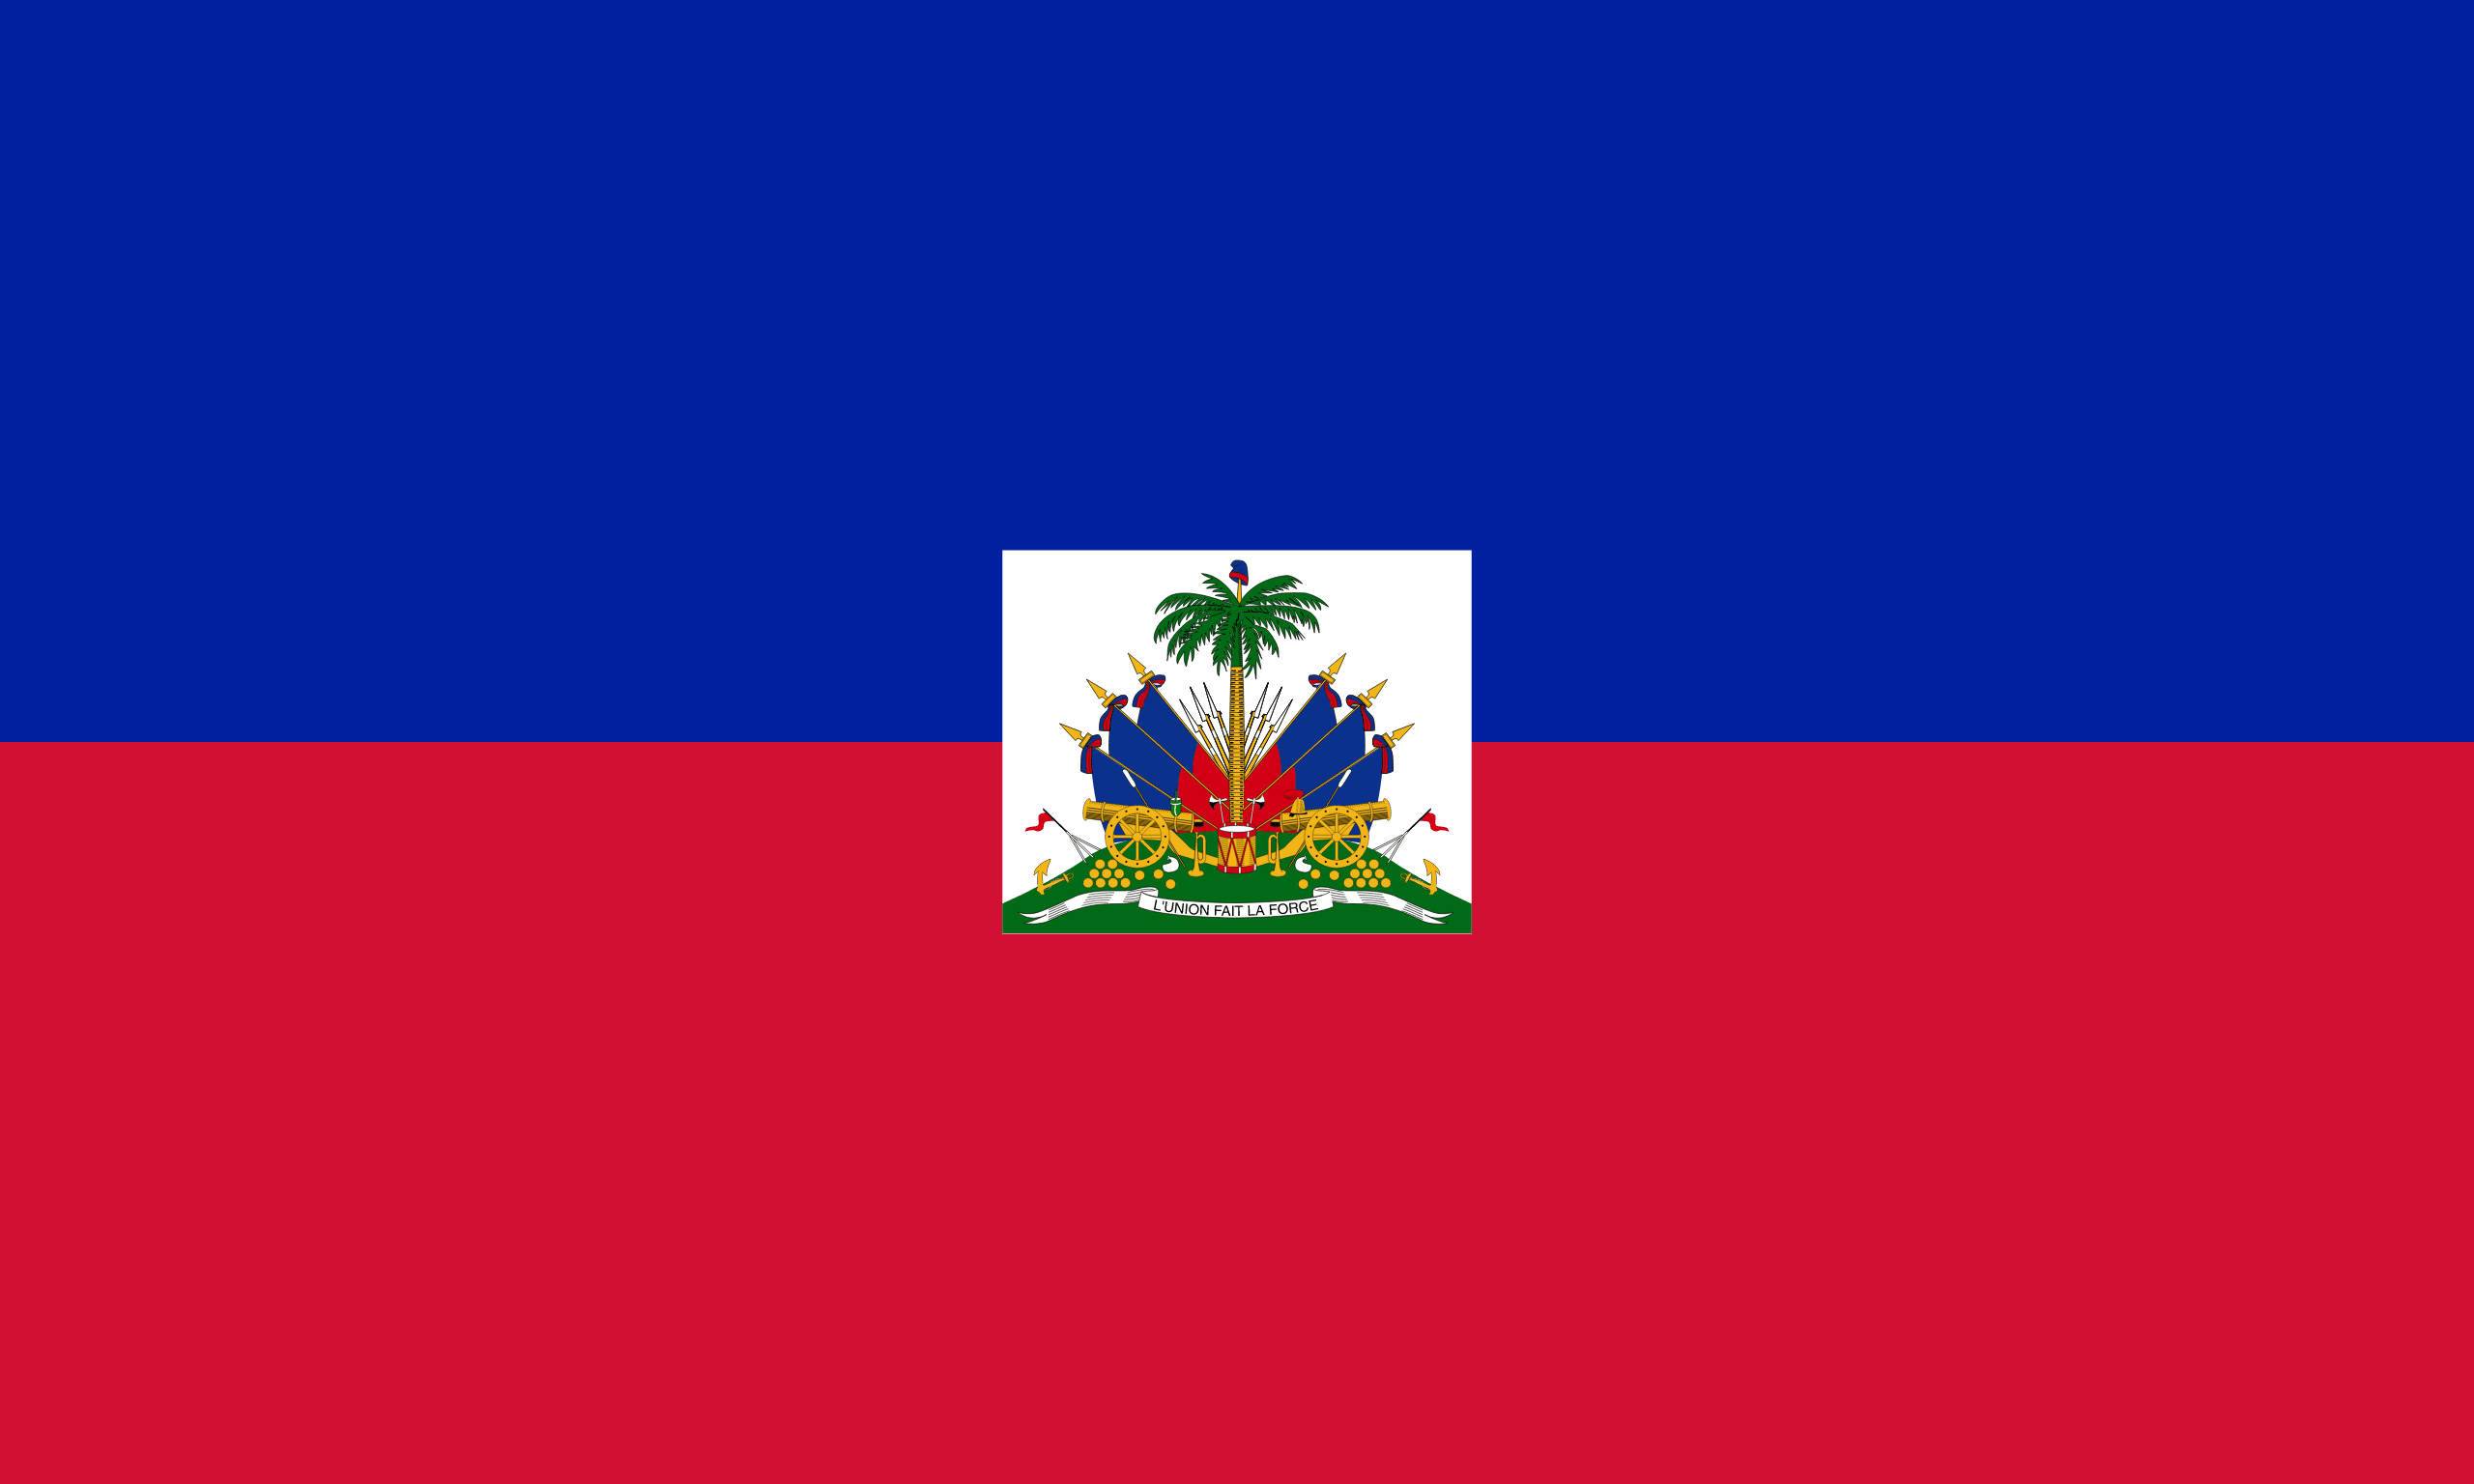

Heard Island and McDonald Islands


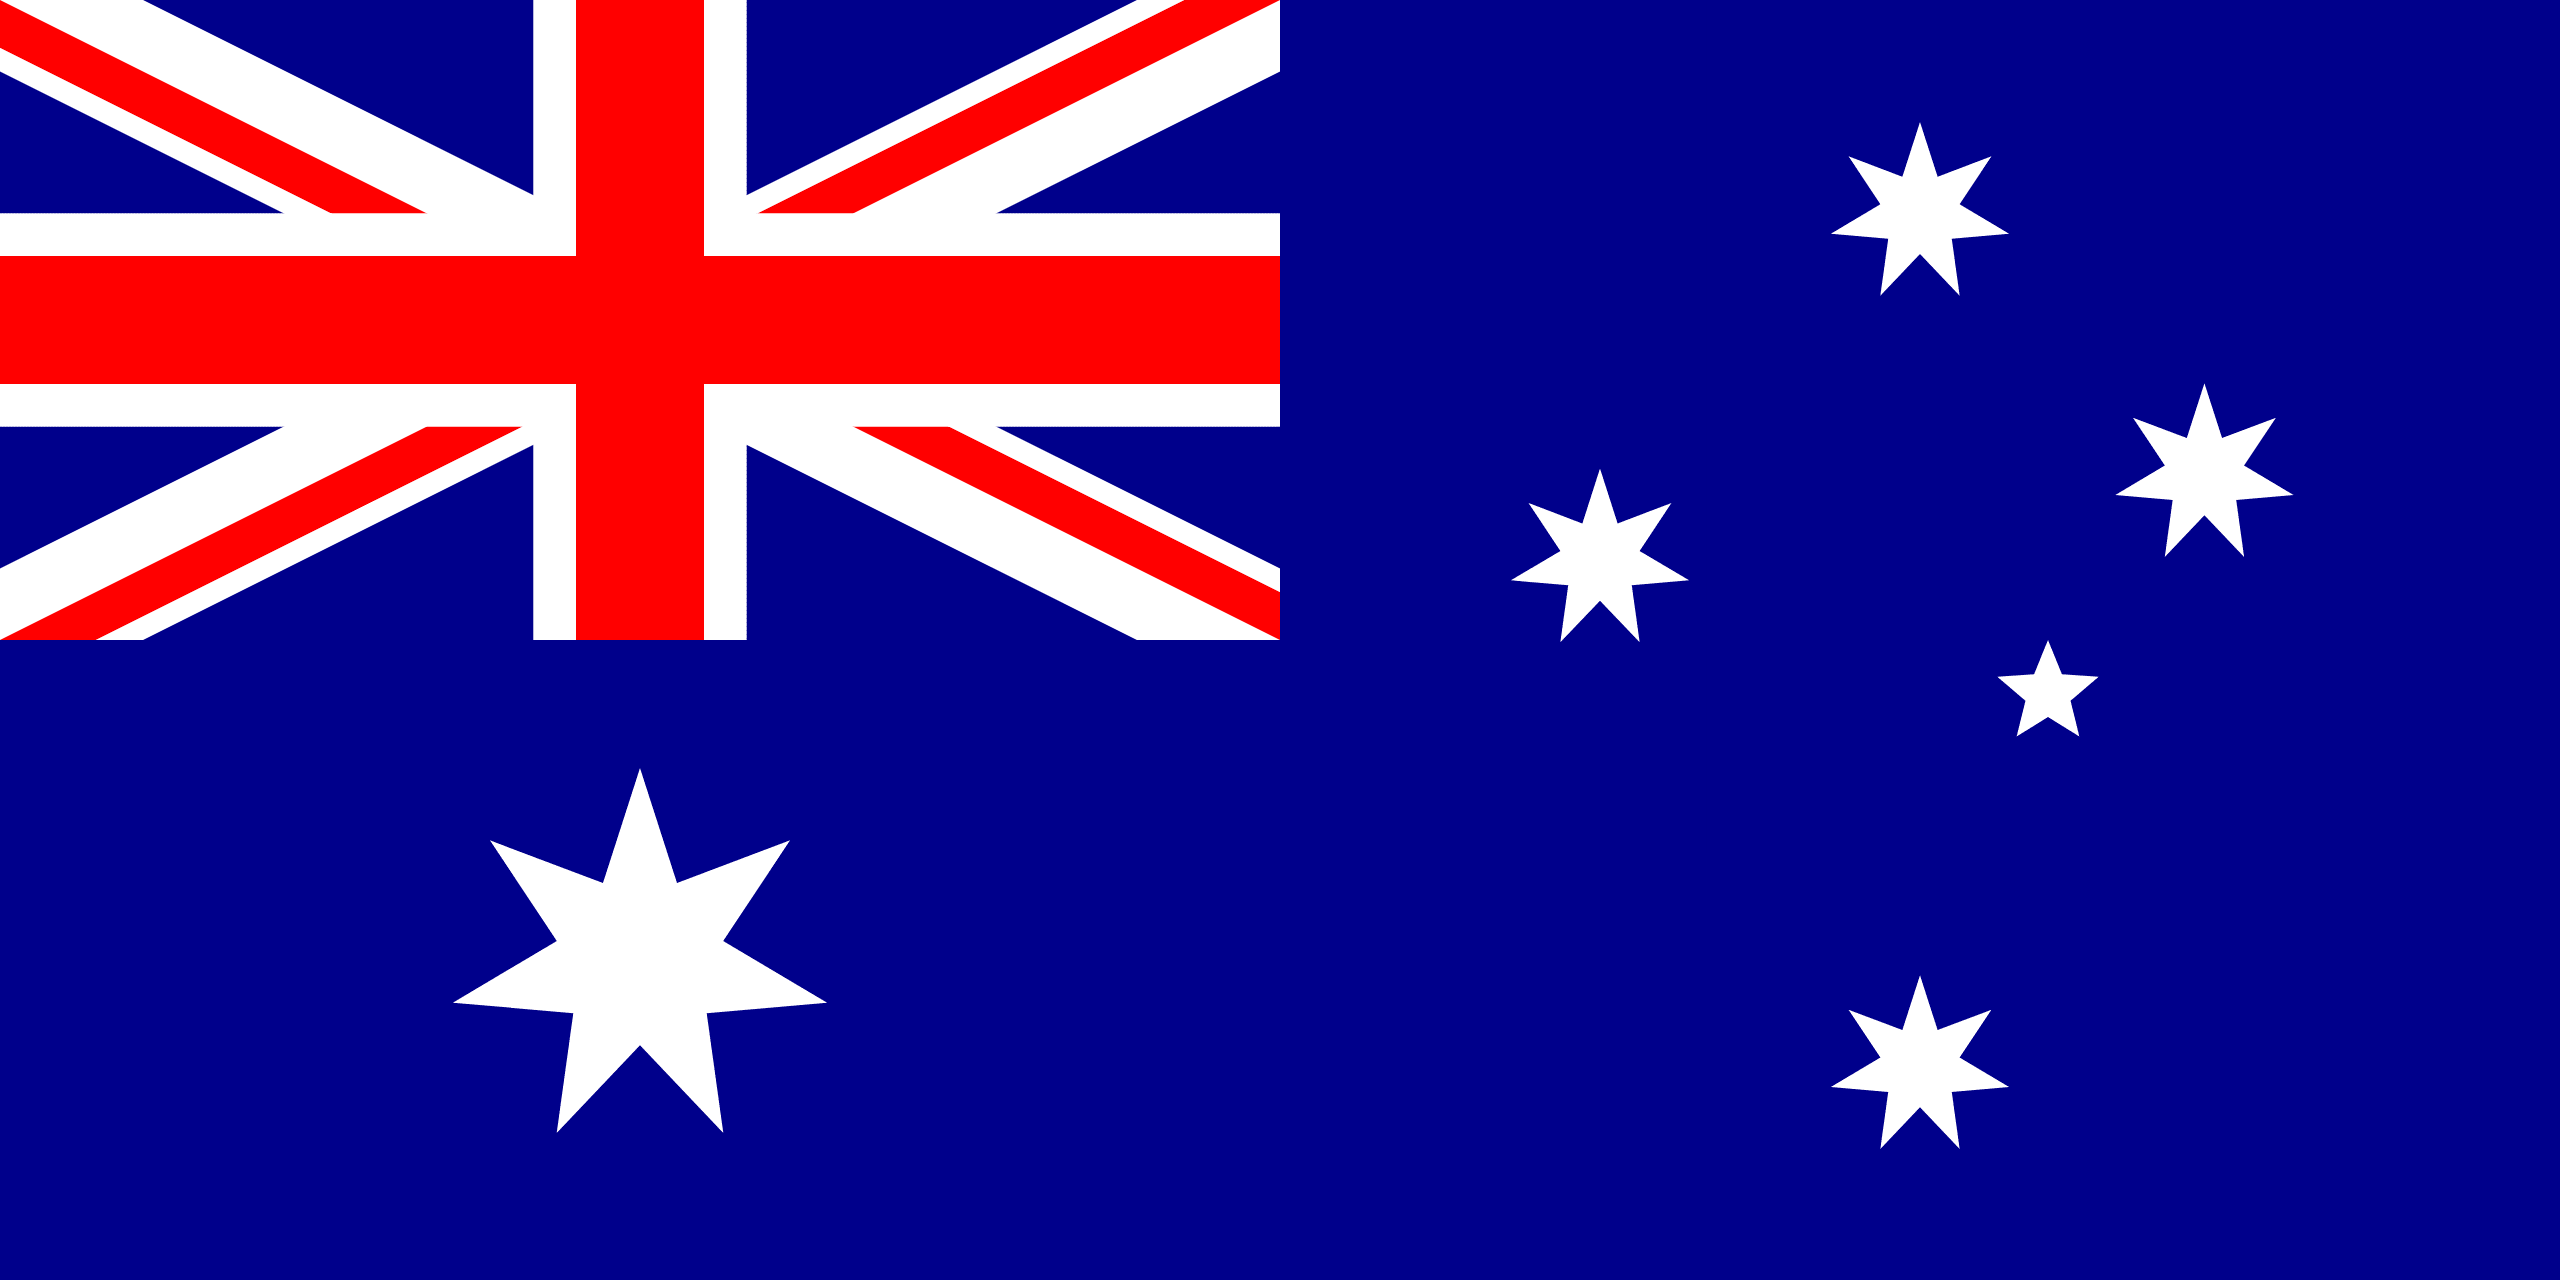

Honduras


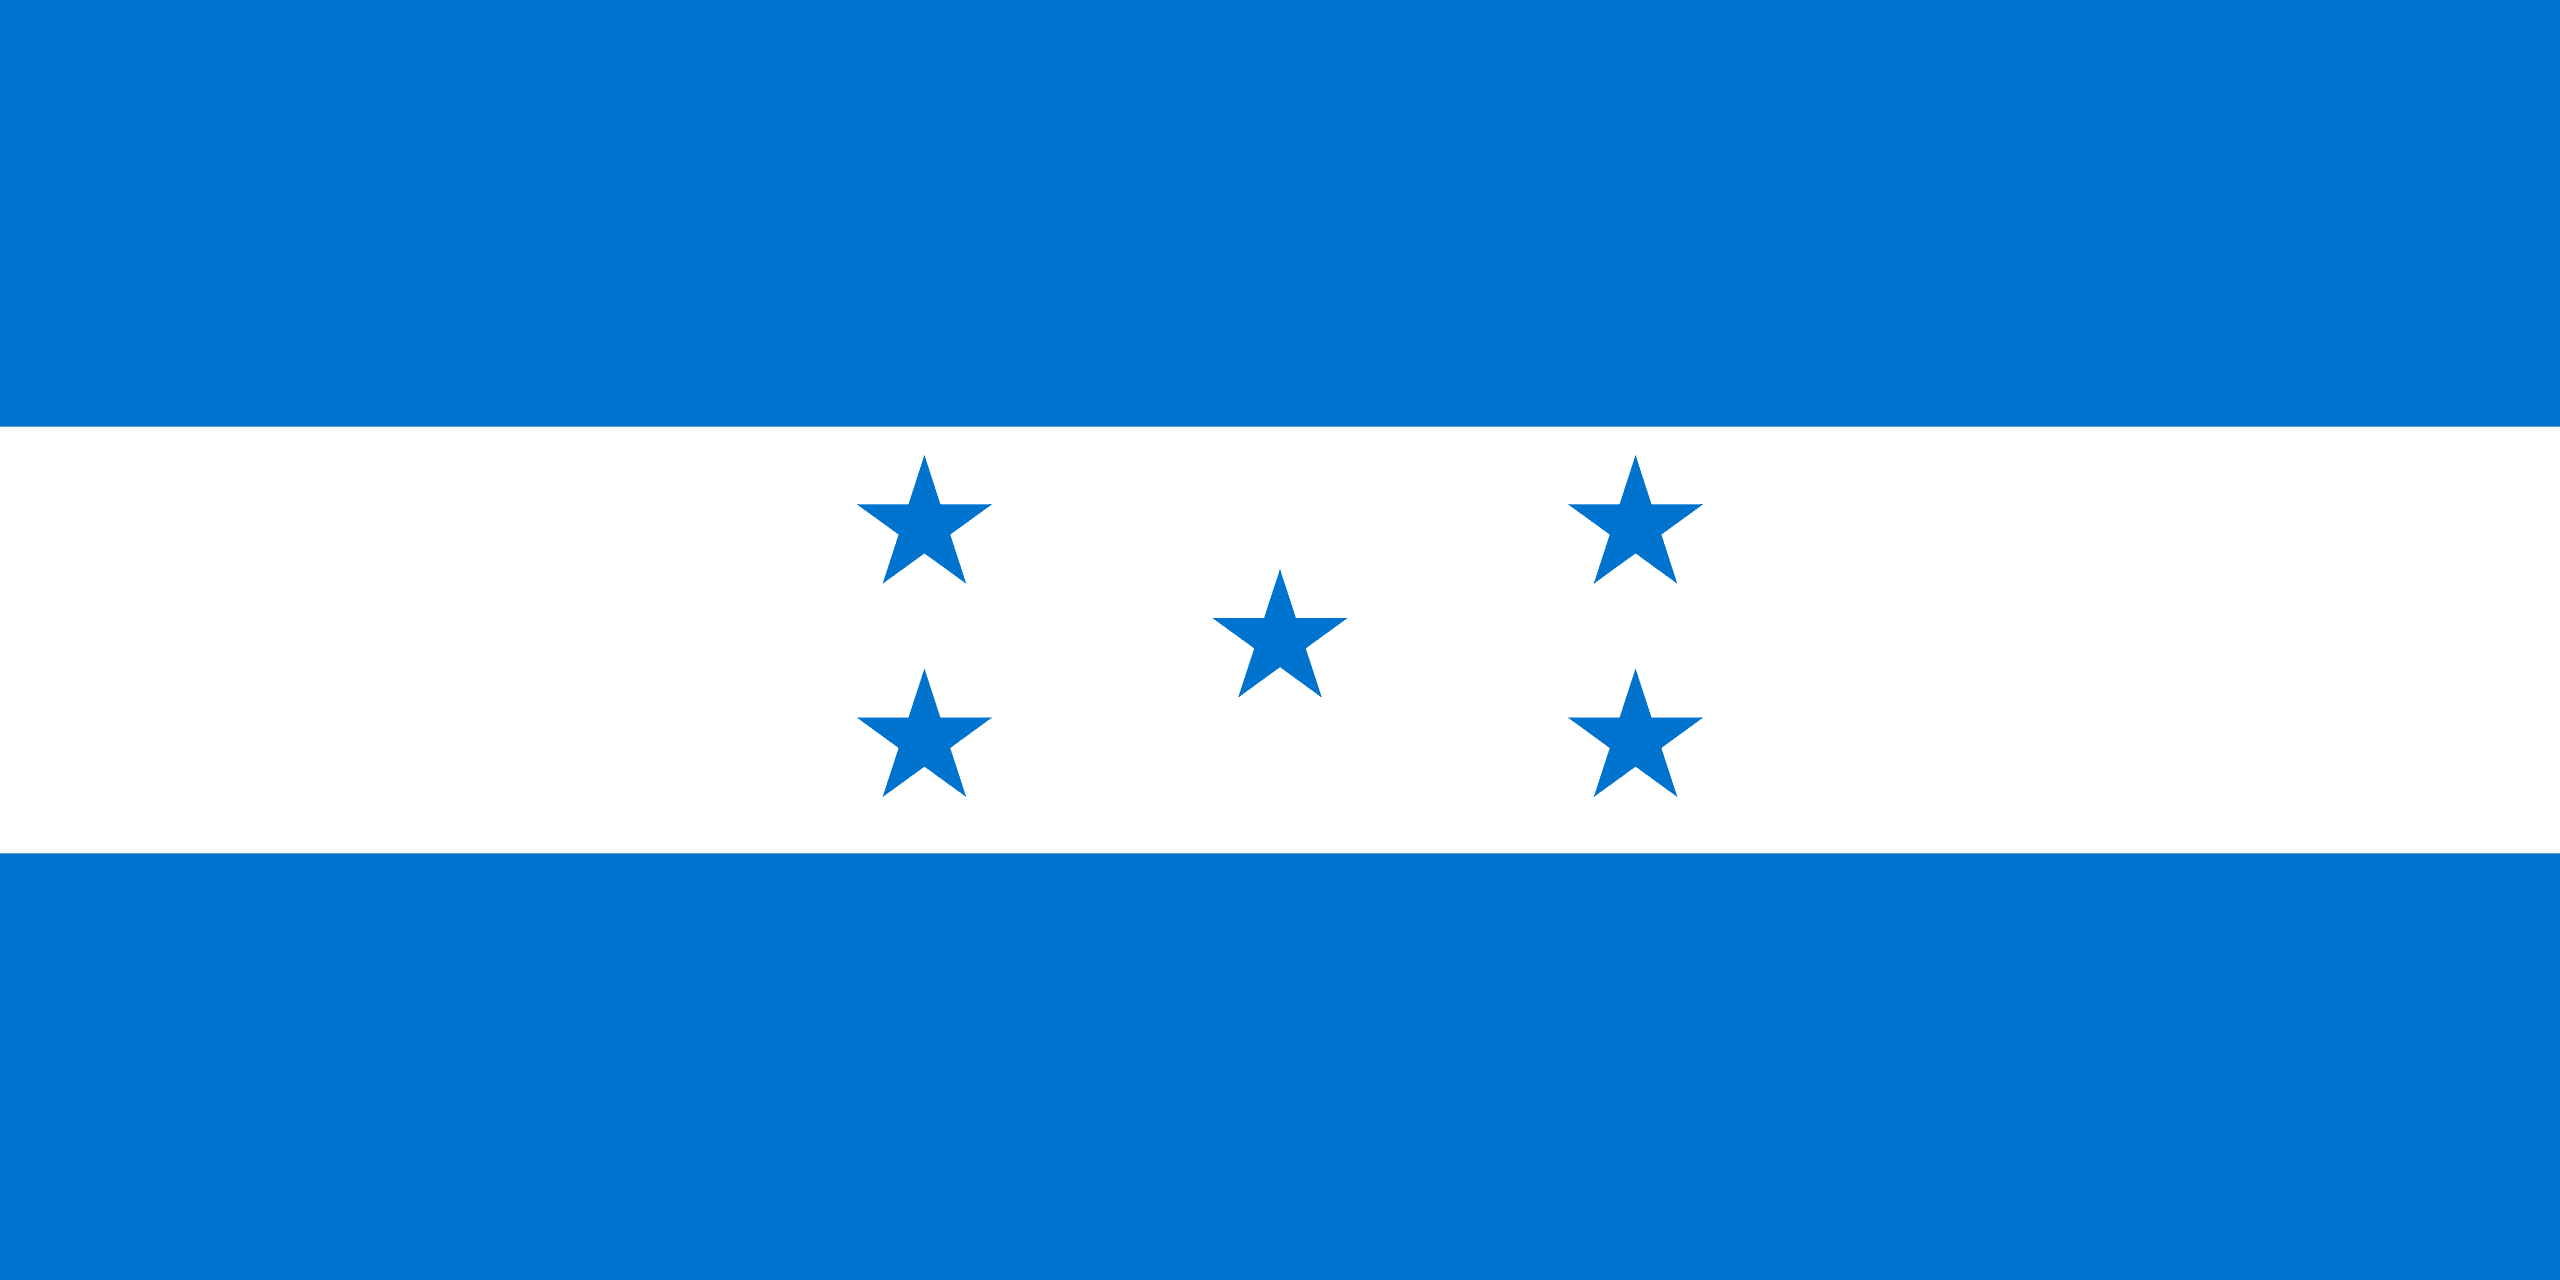

Hong Kong


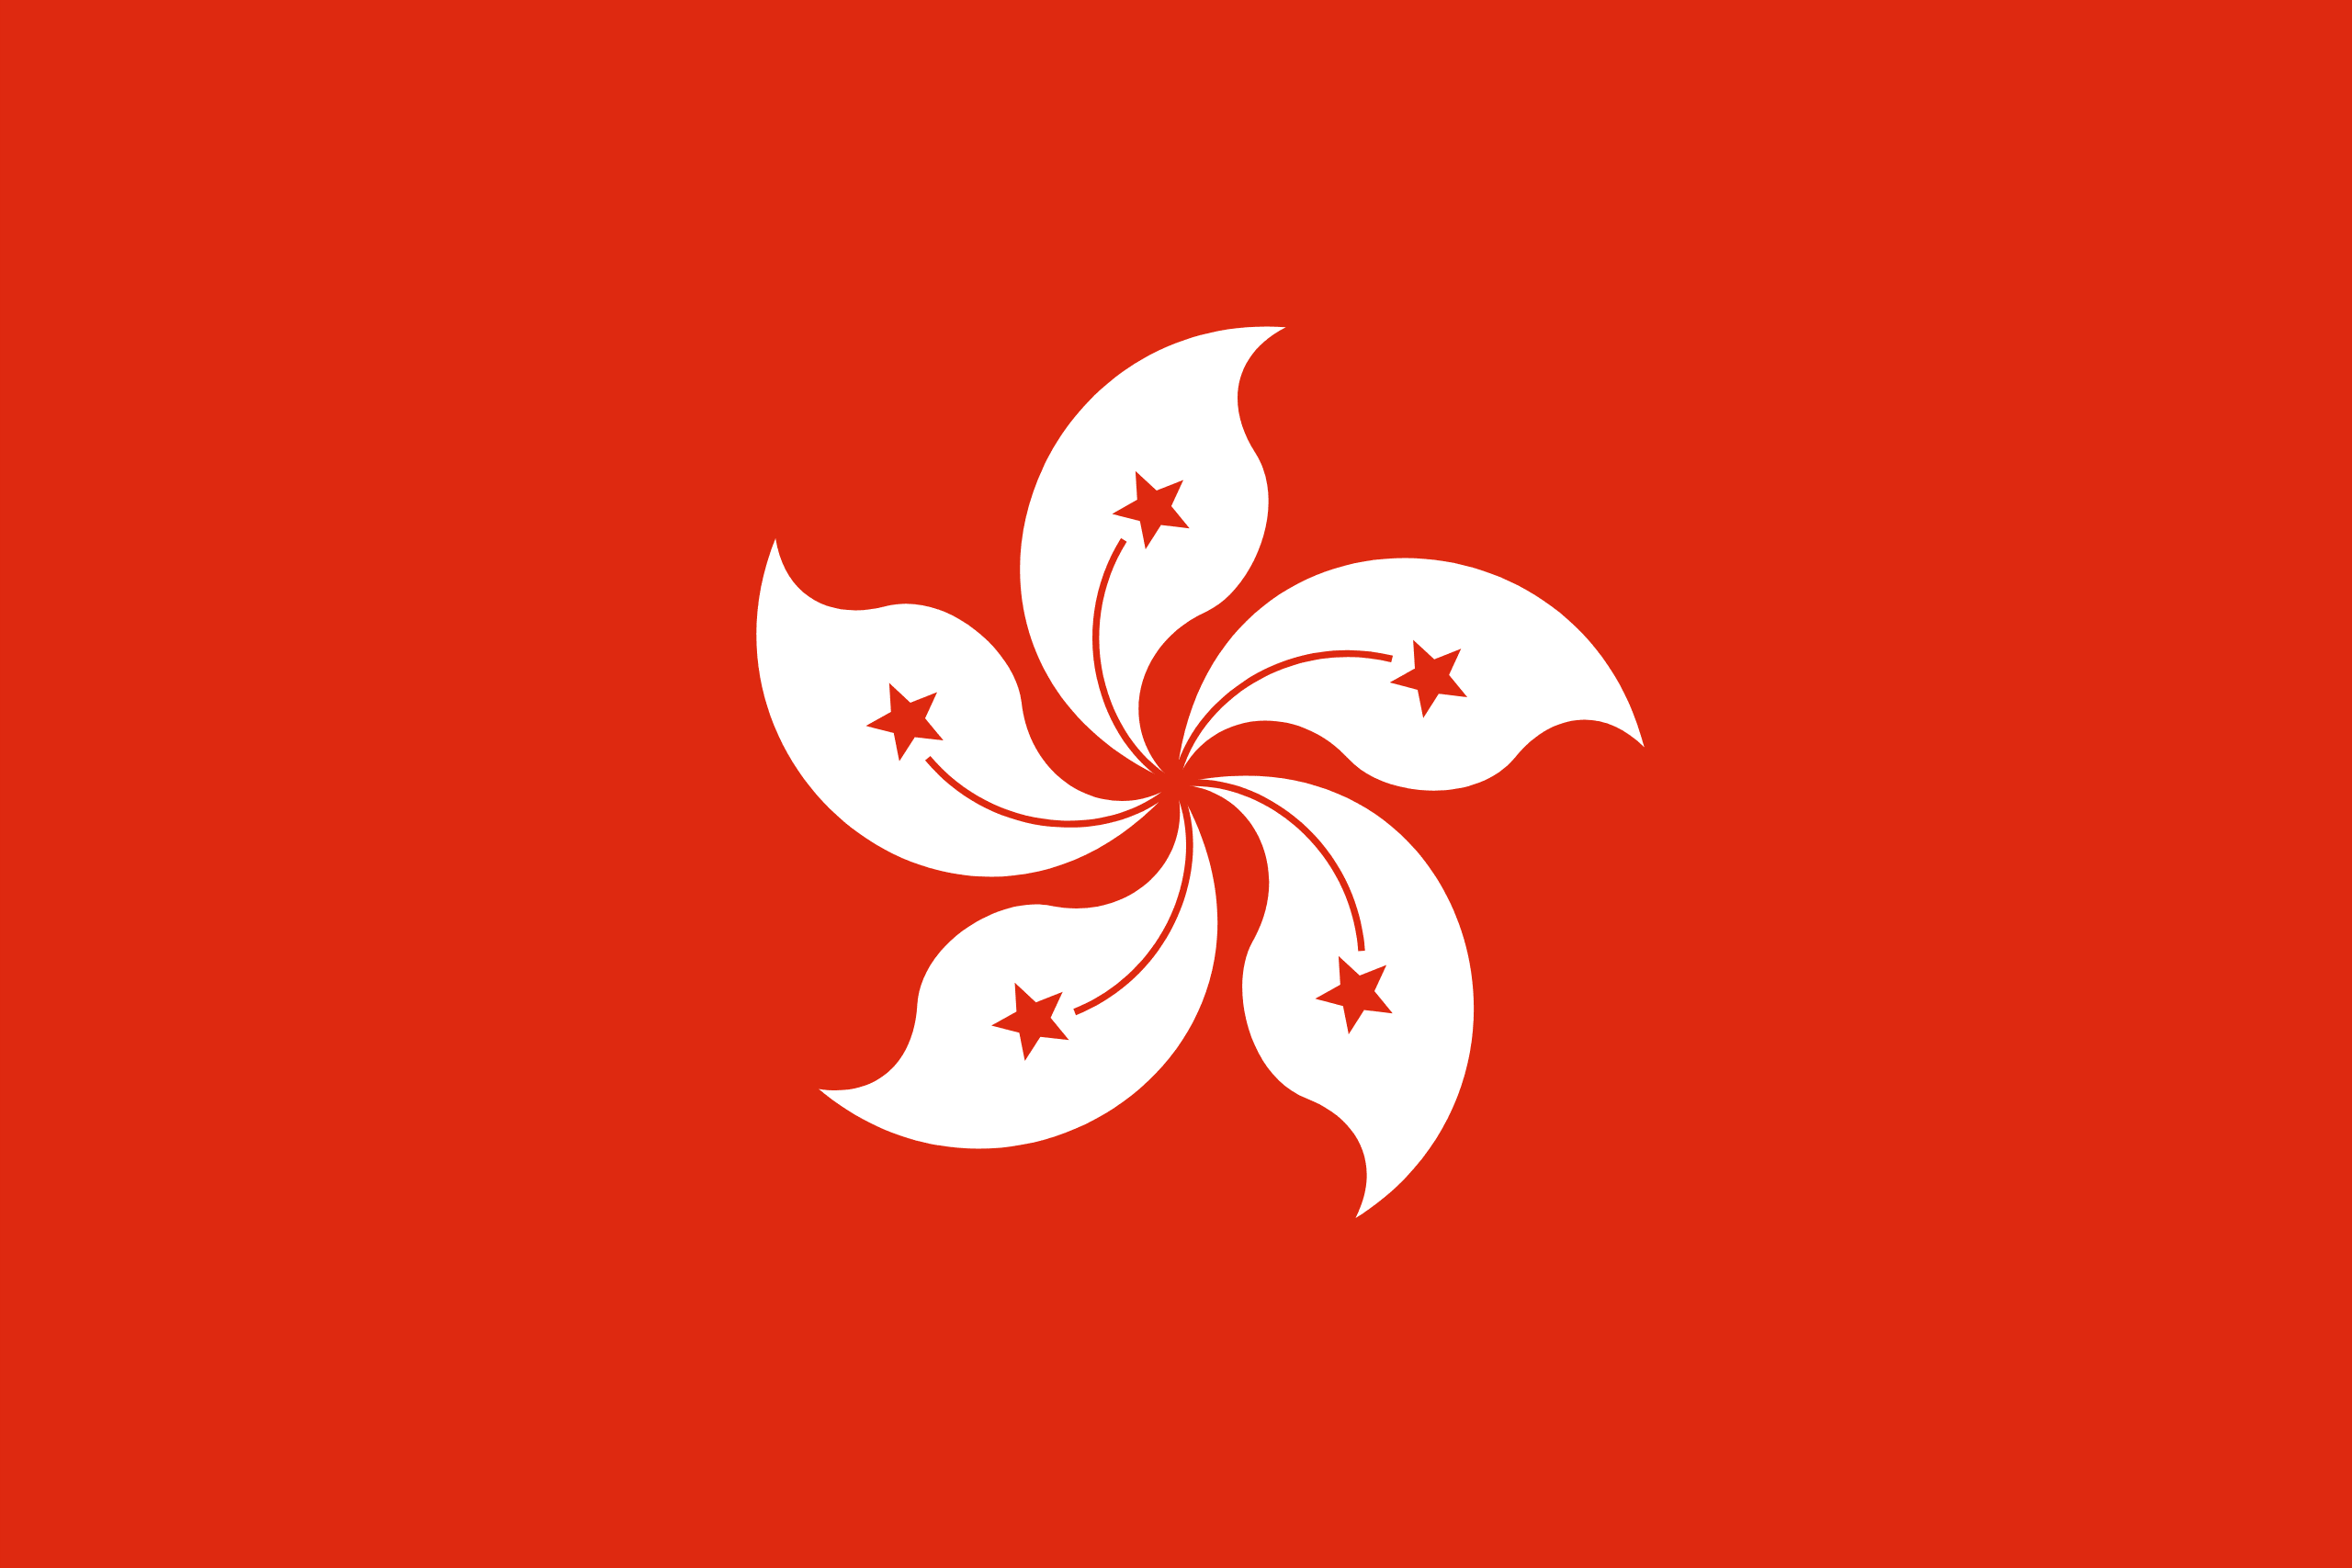

Hungary


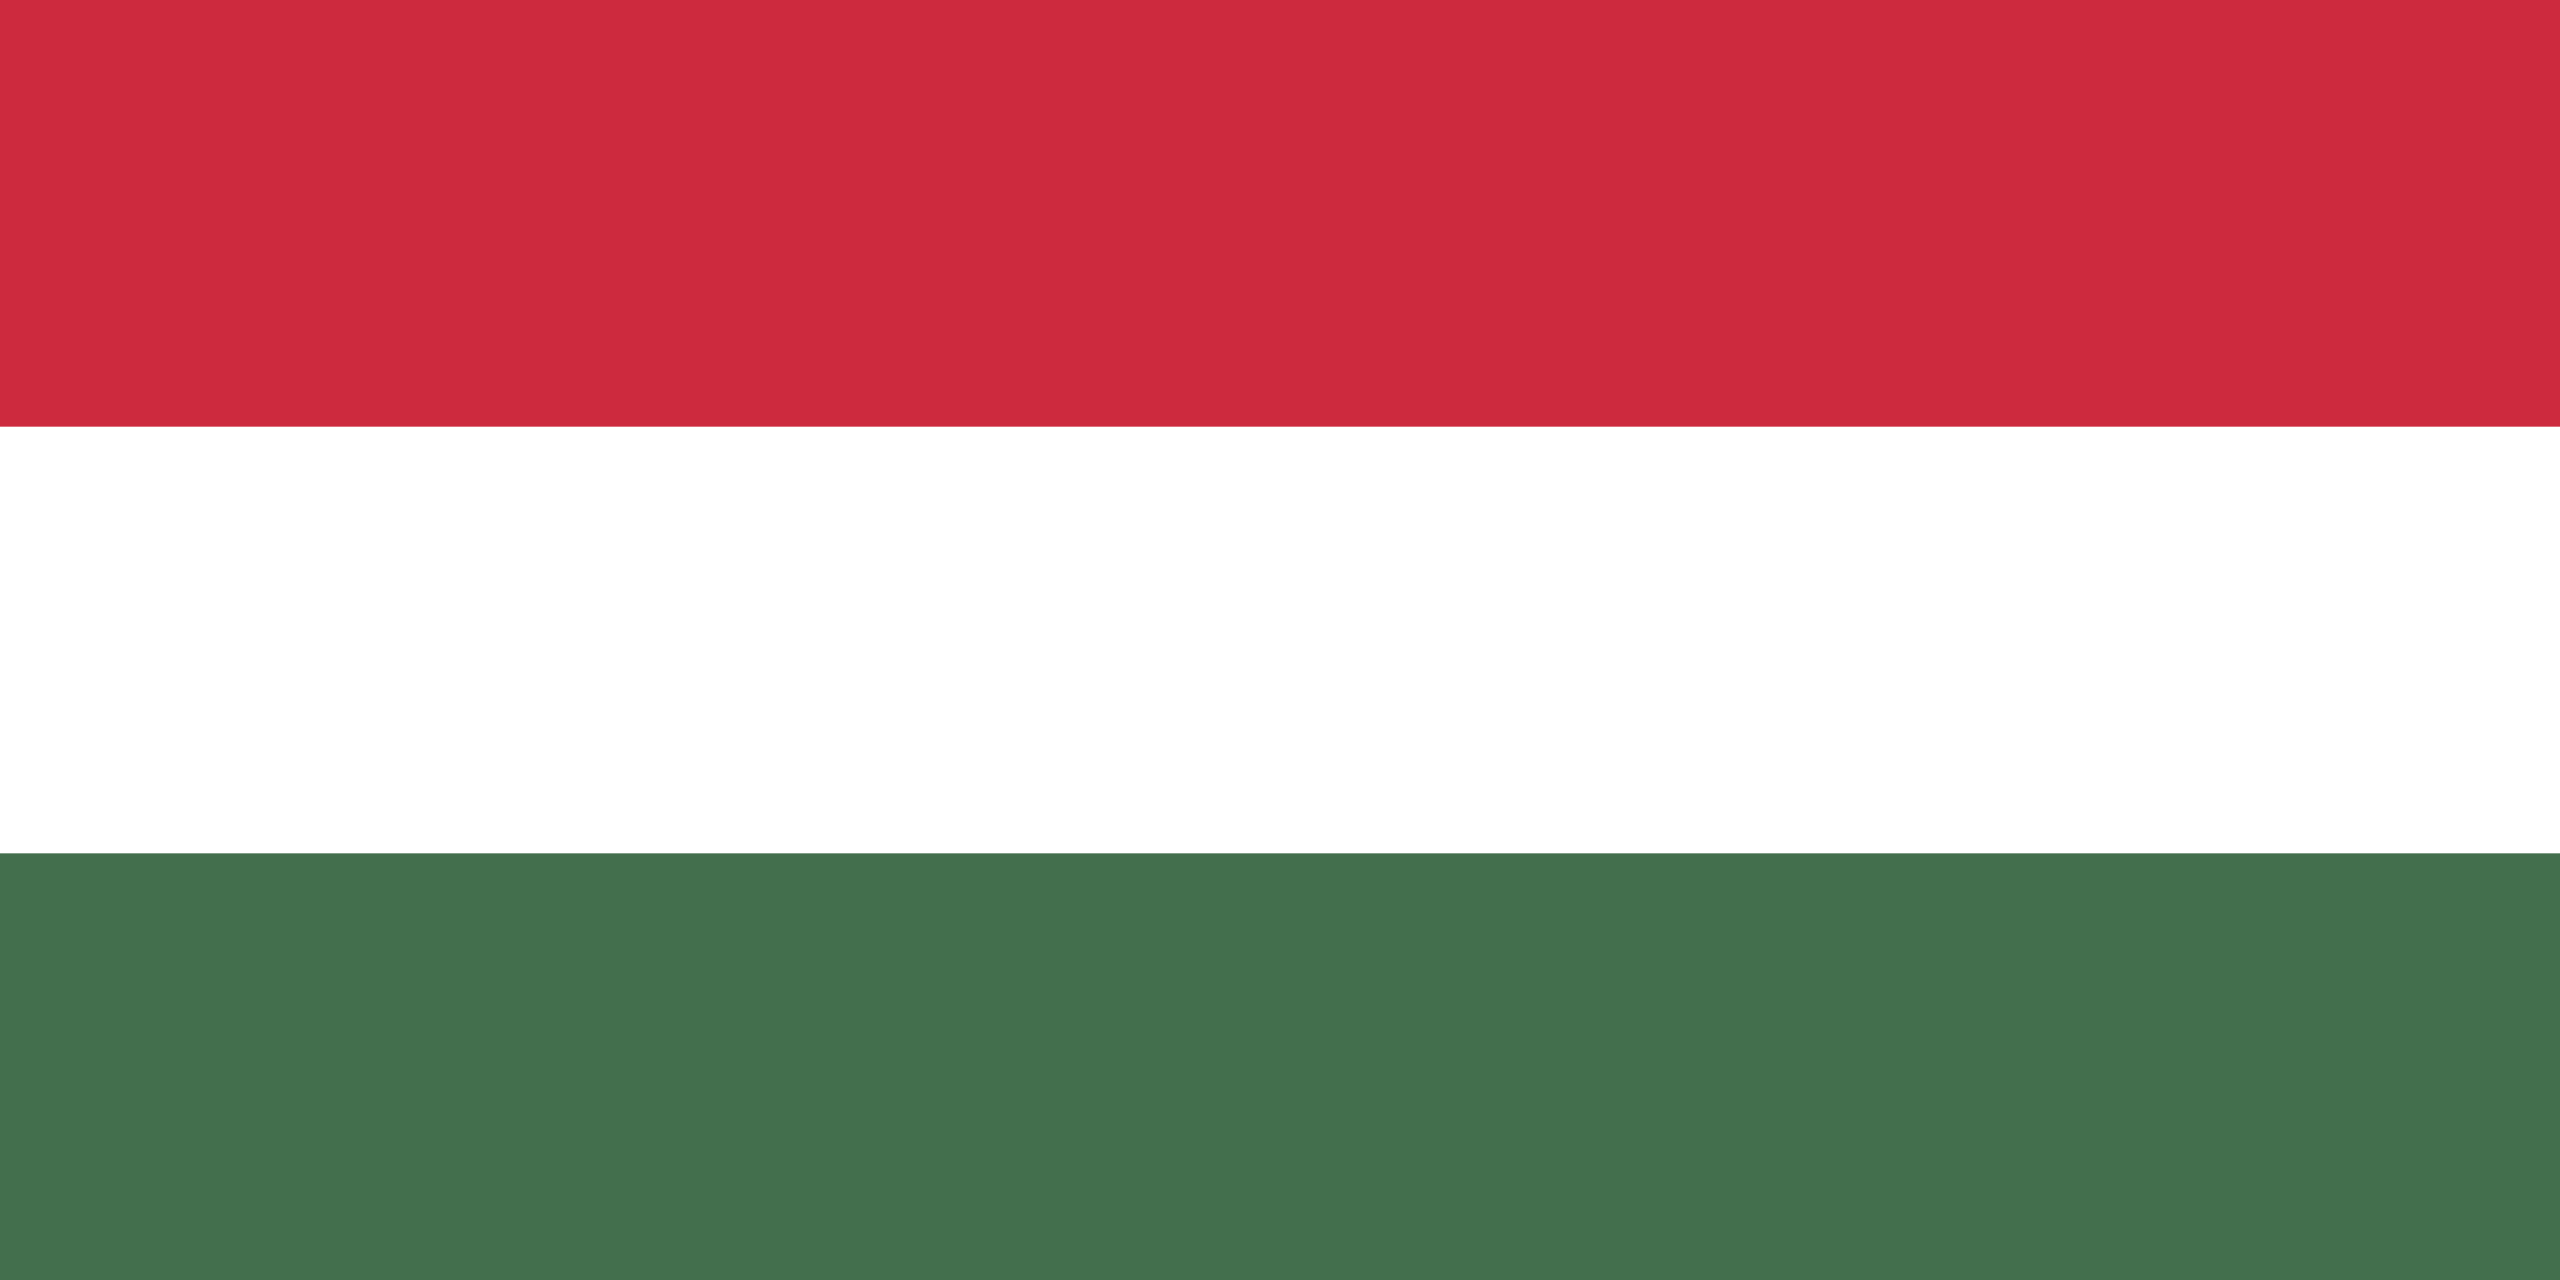

Iceland


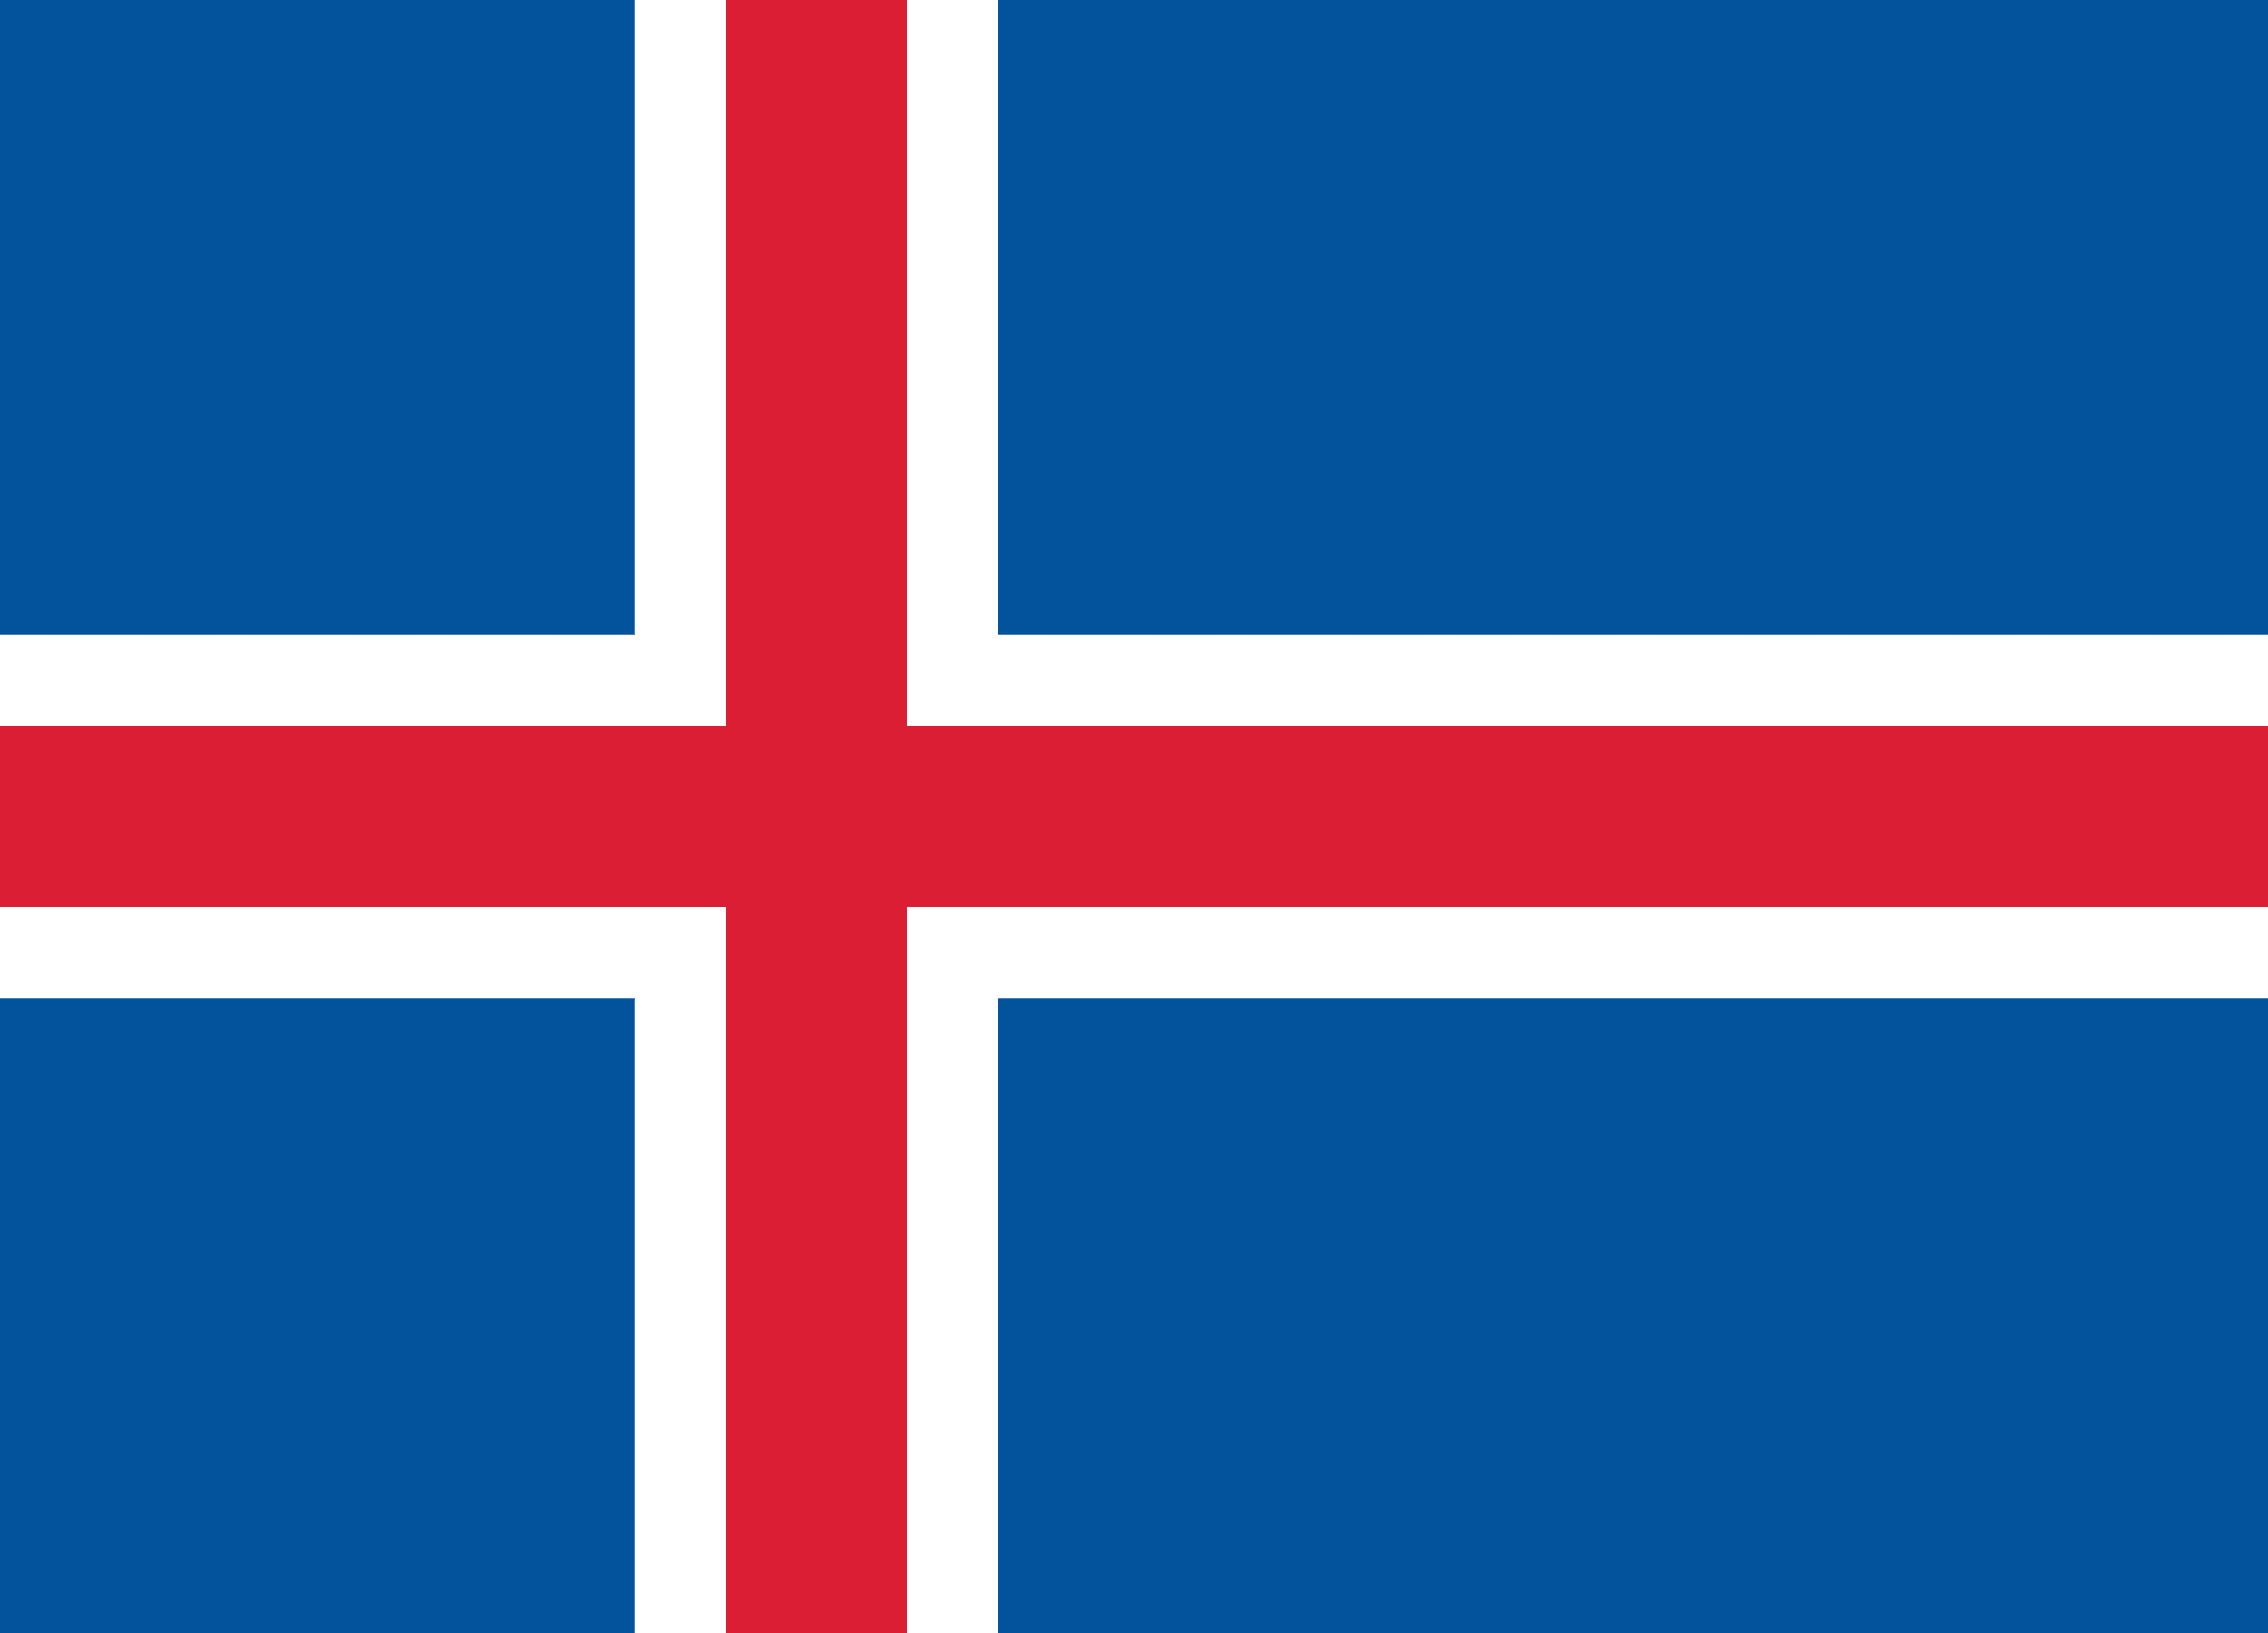

India


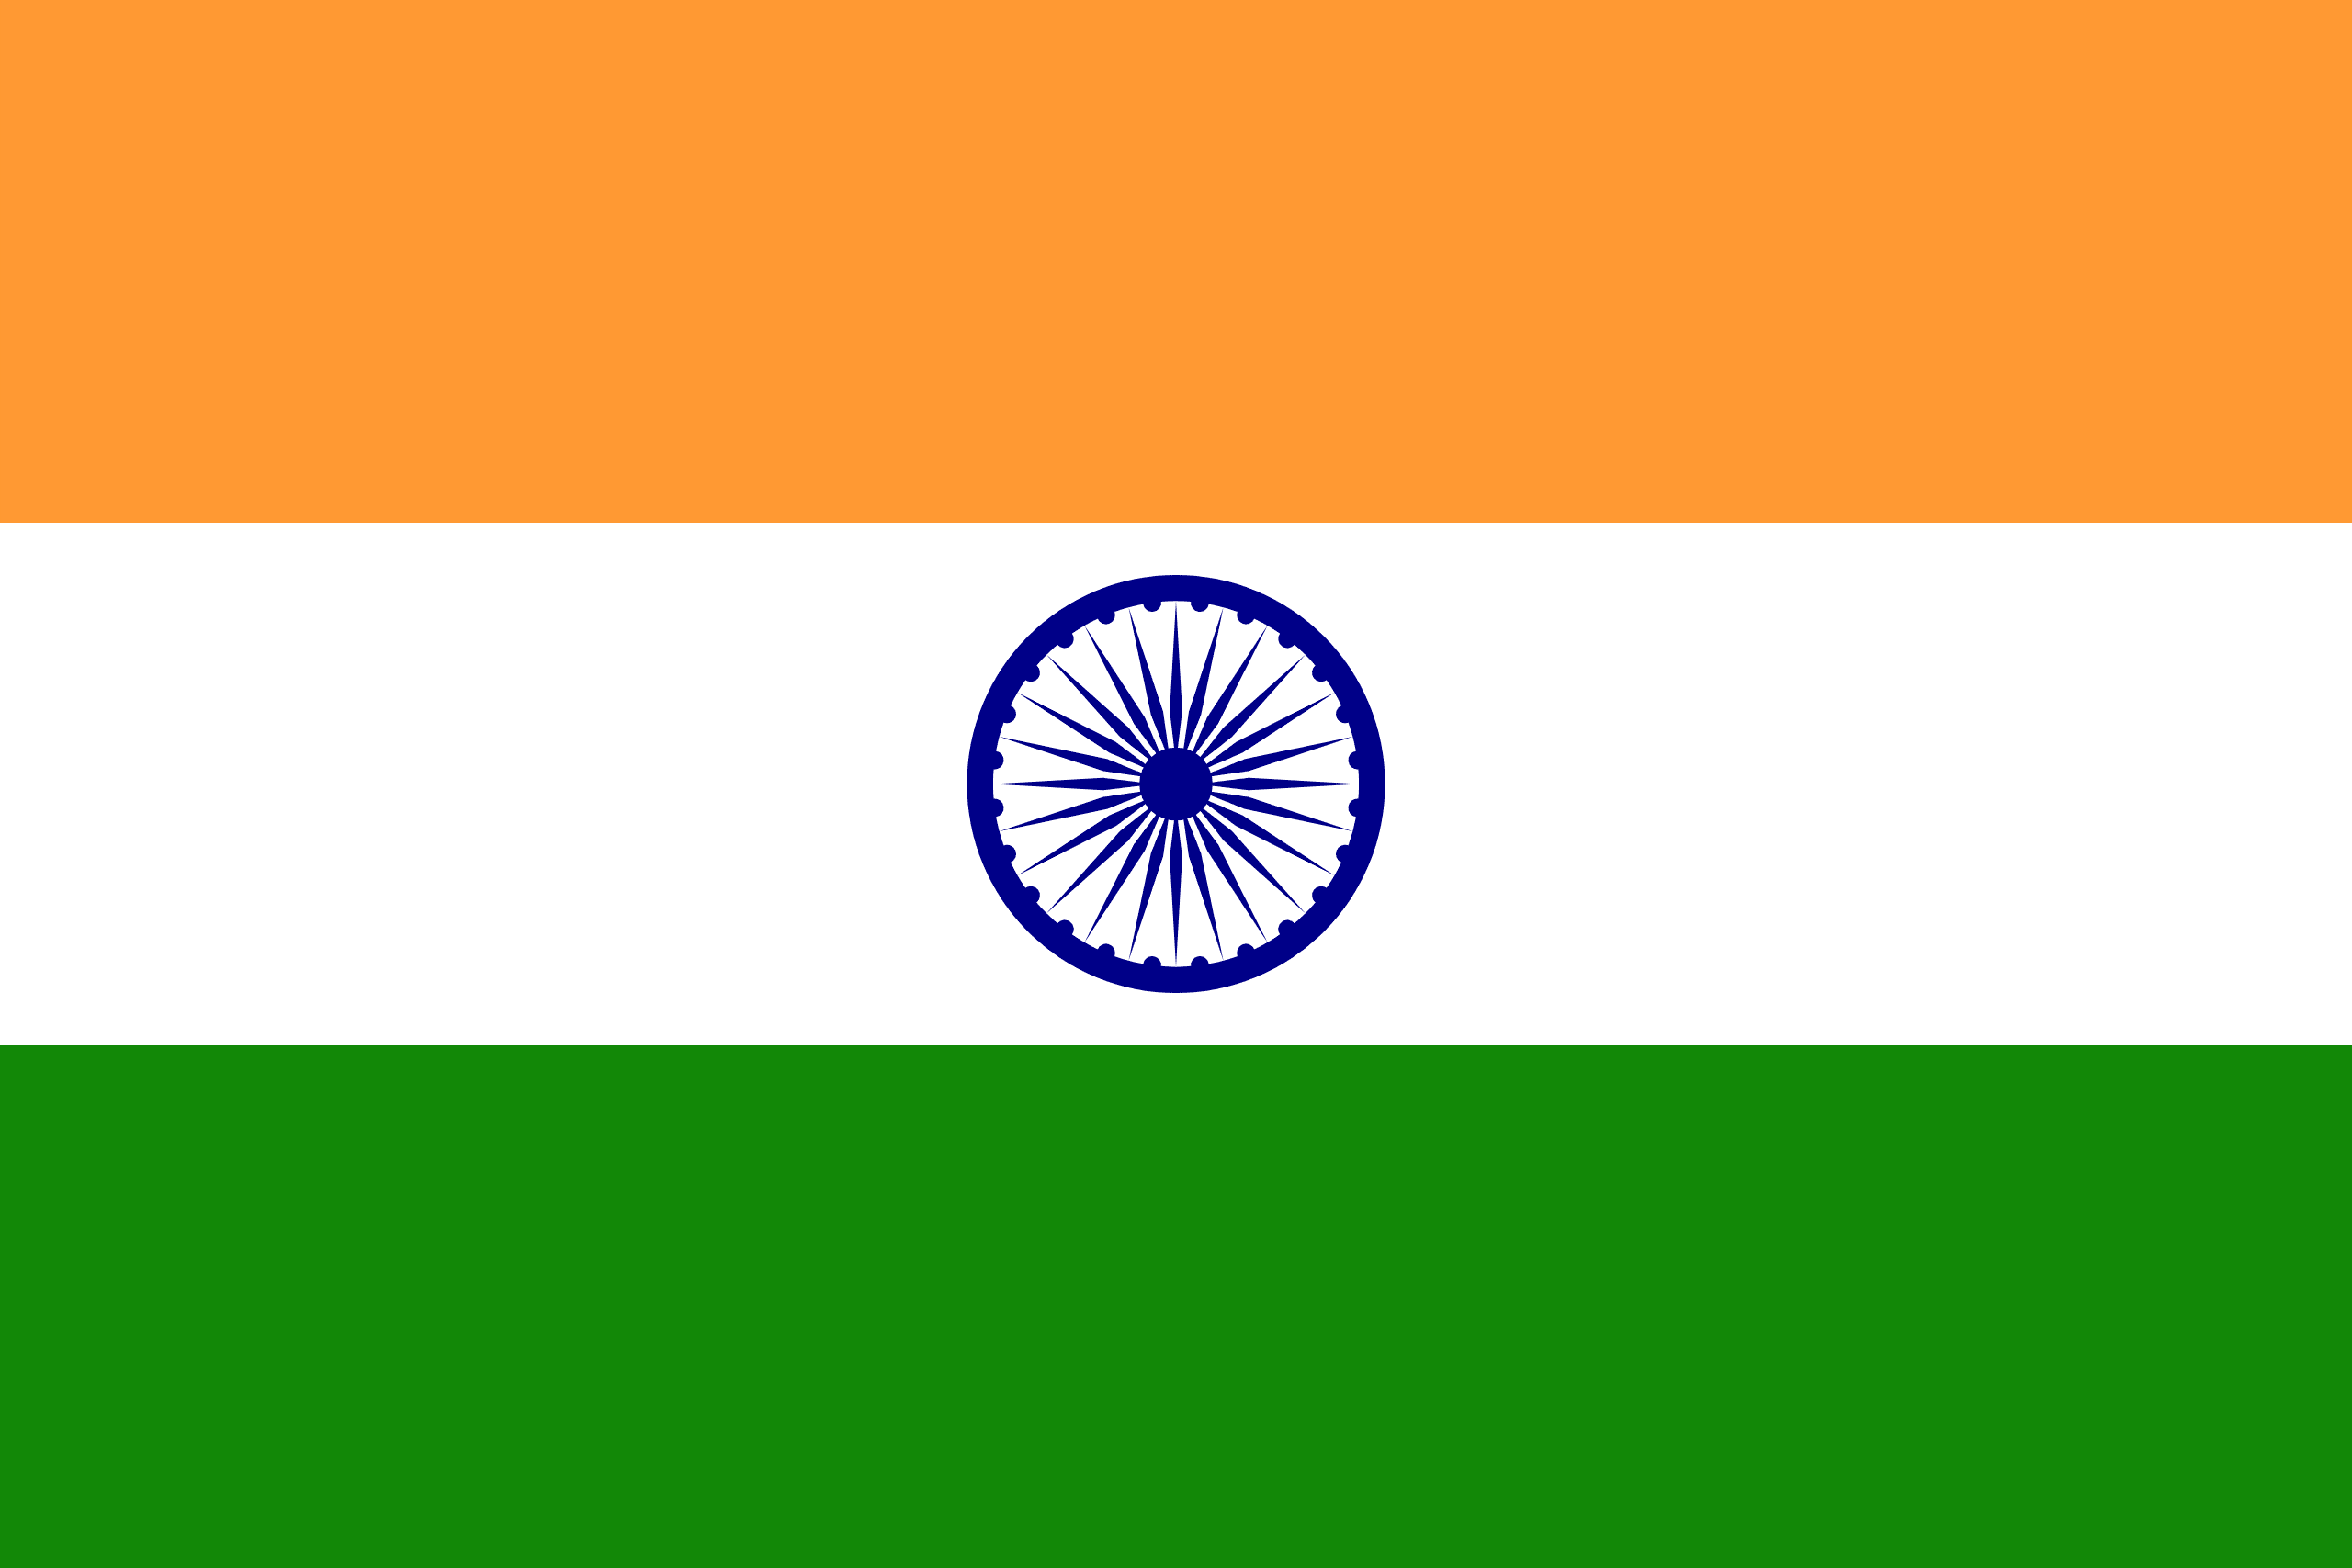

Indonesia


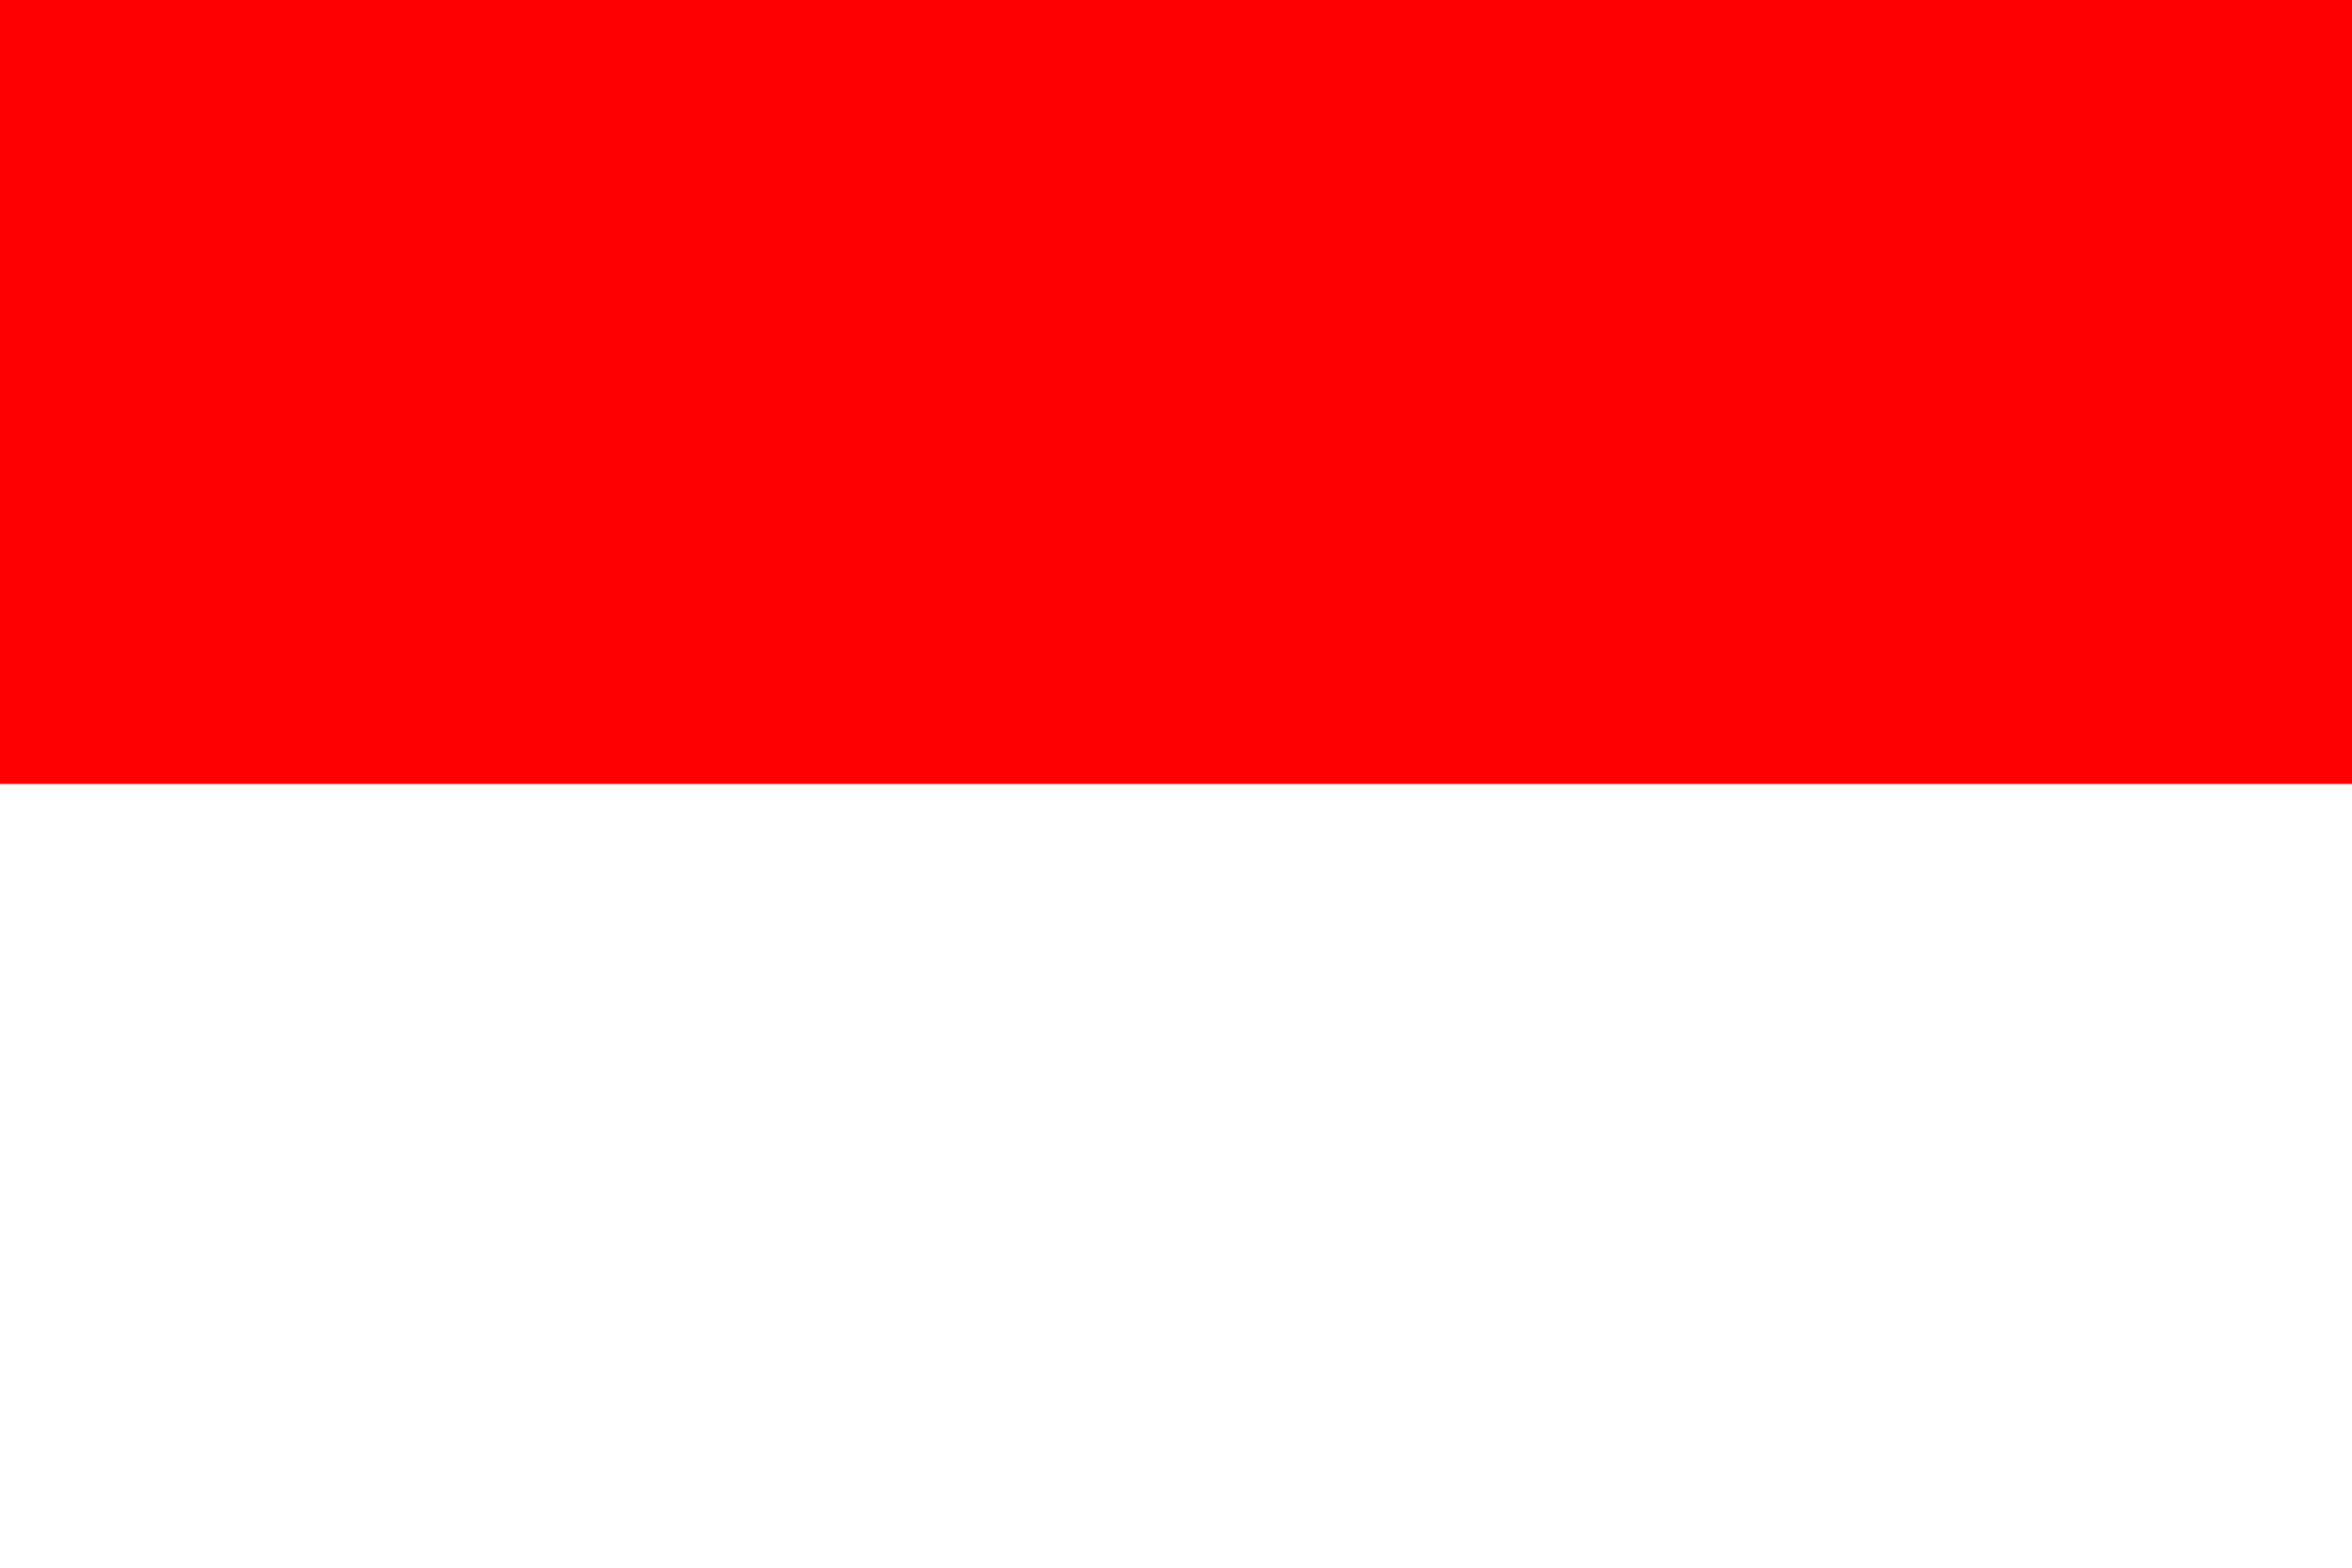

Iran


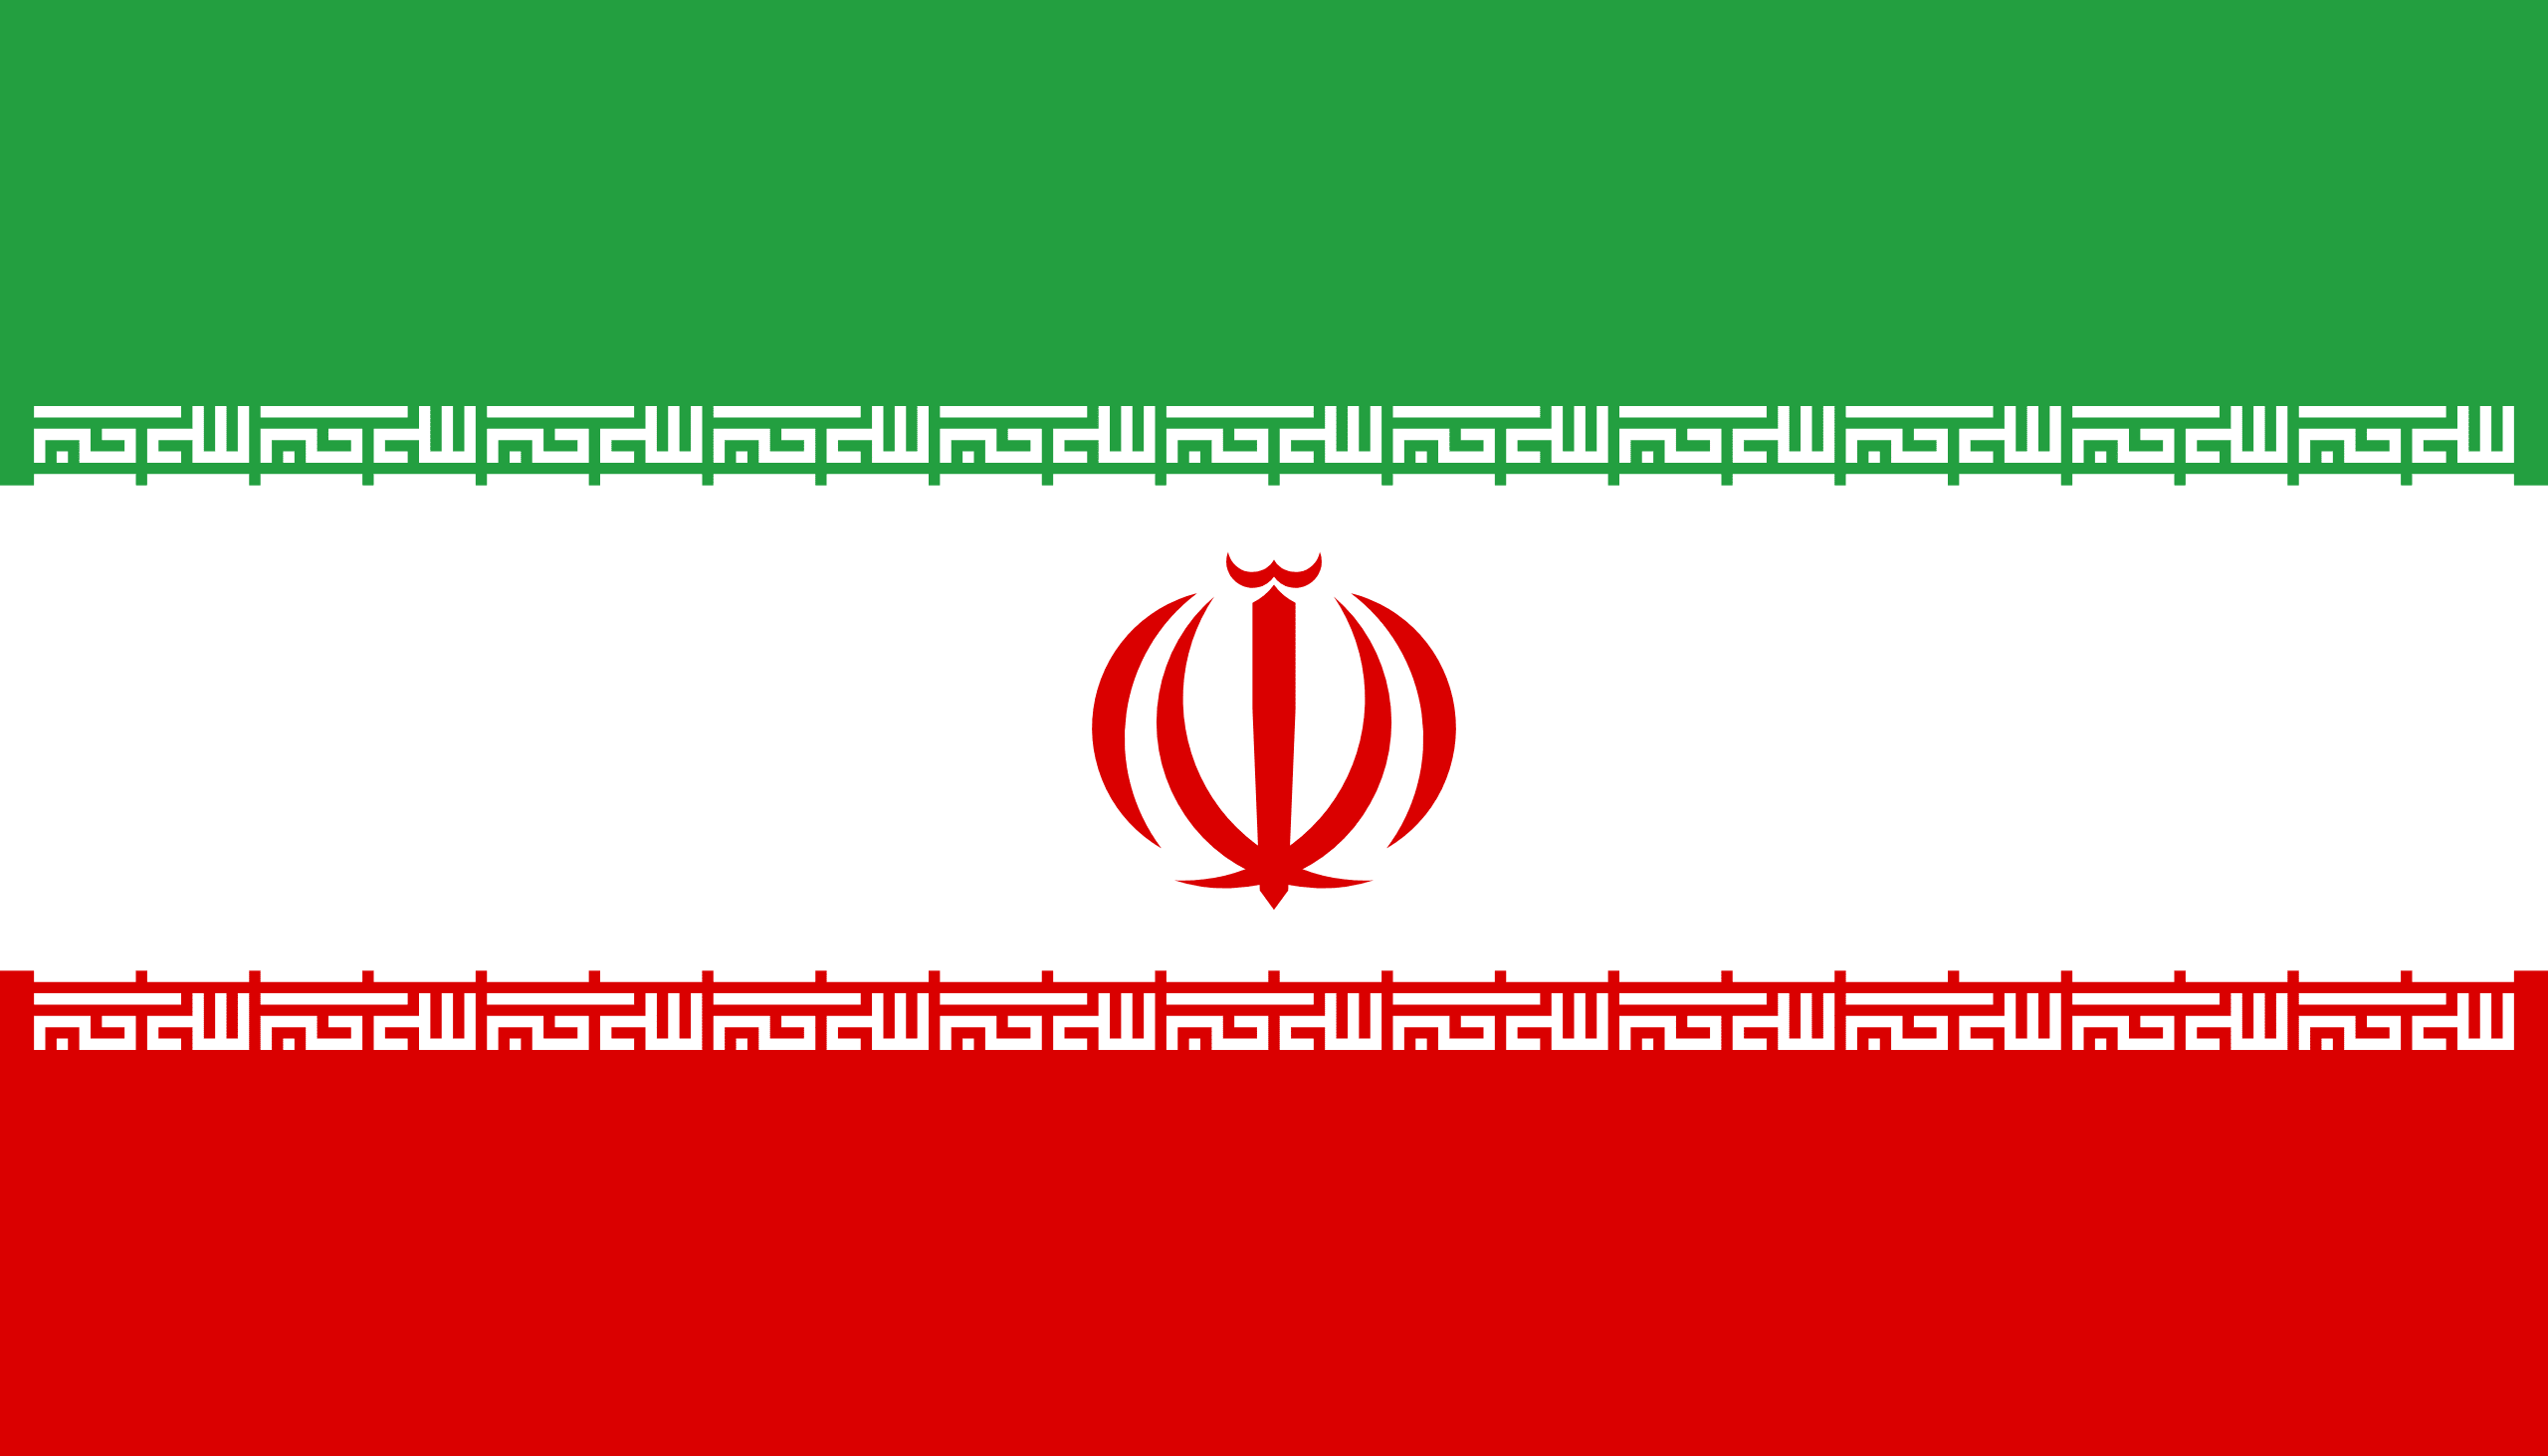

Iraq


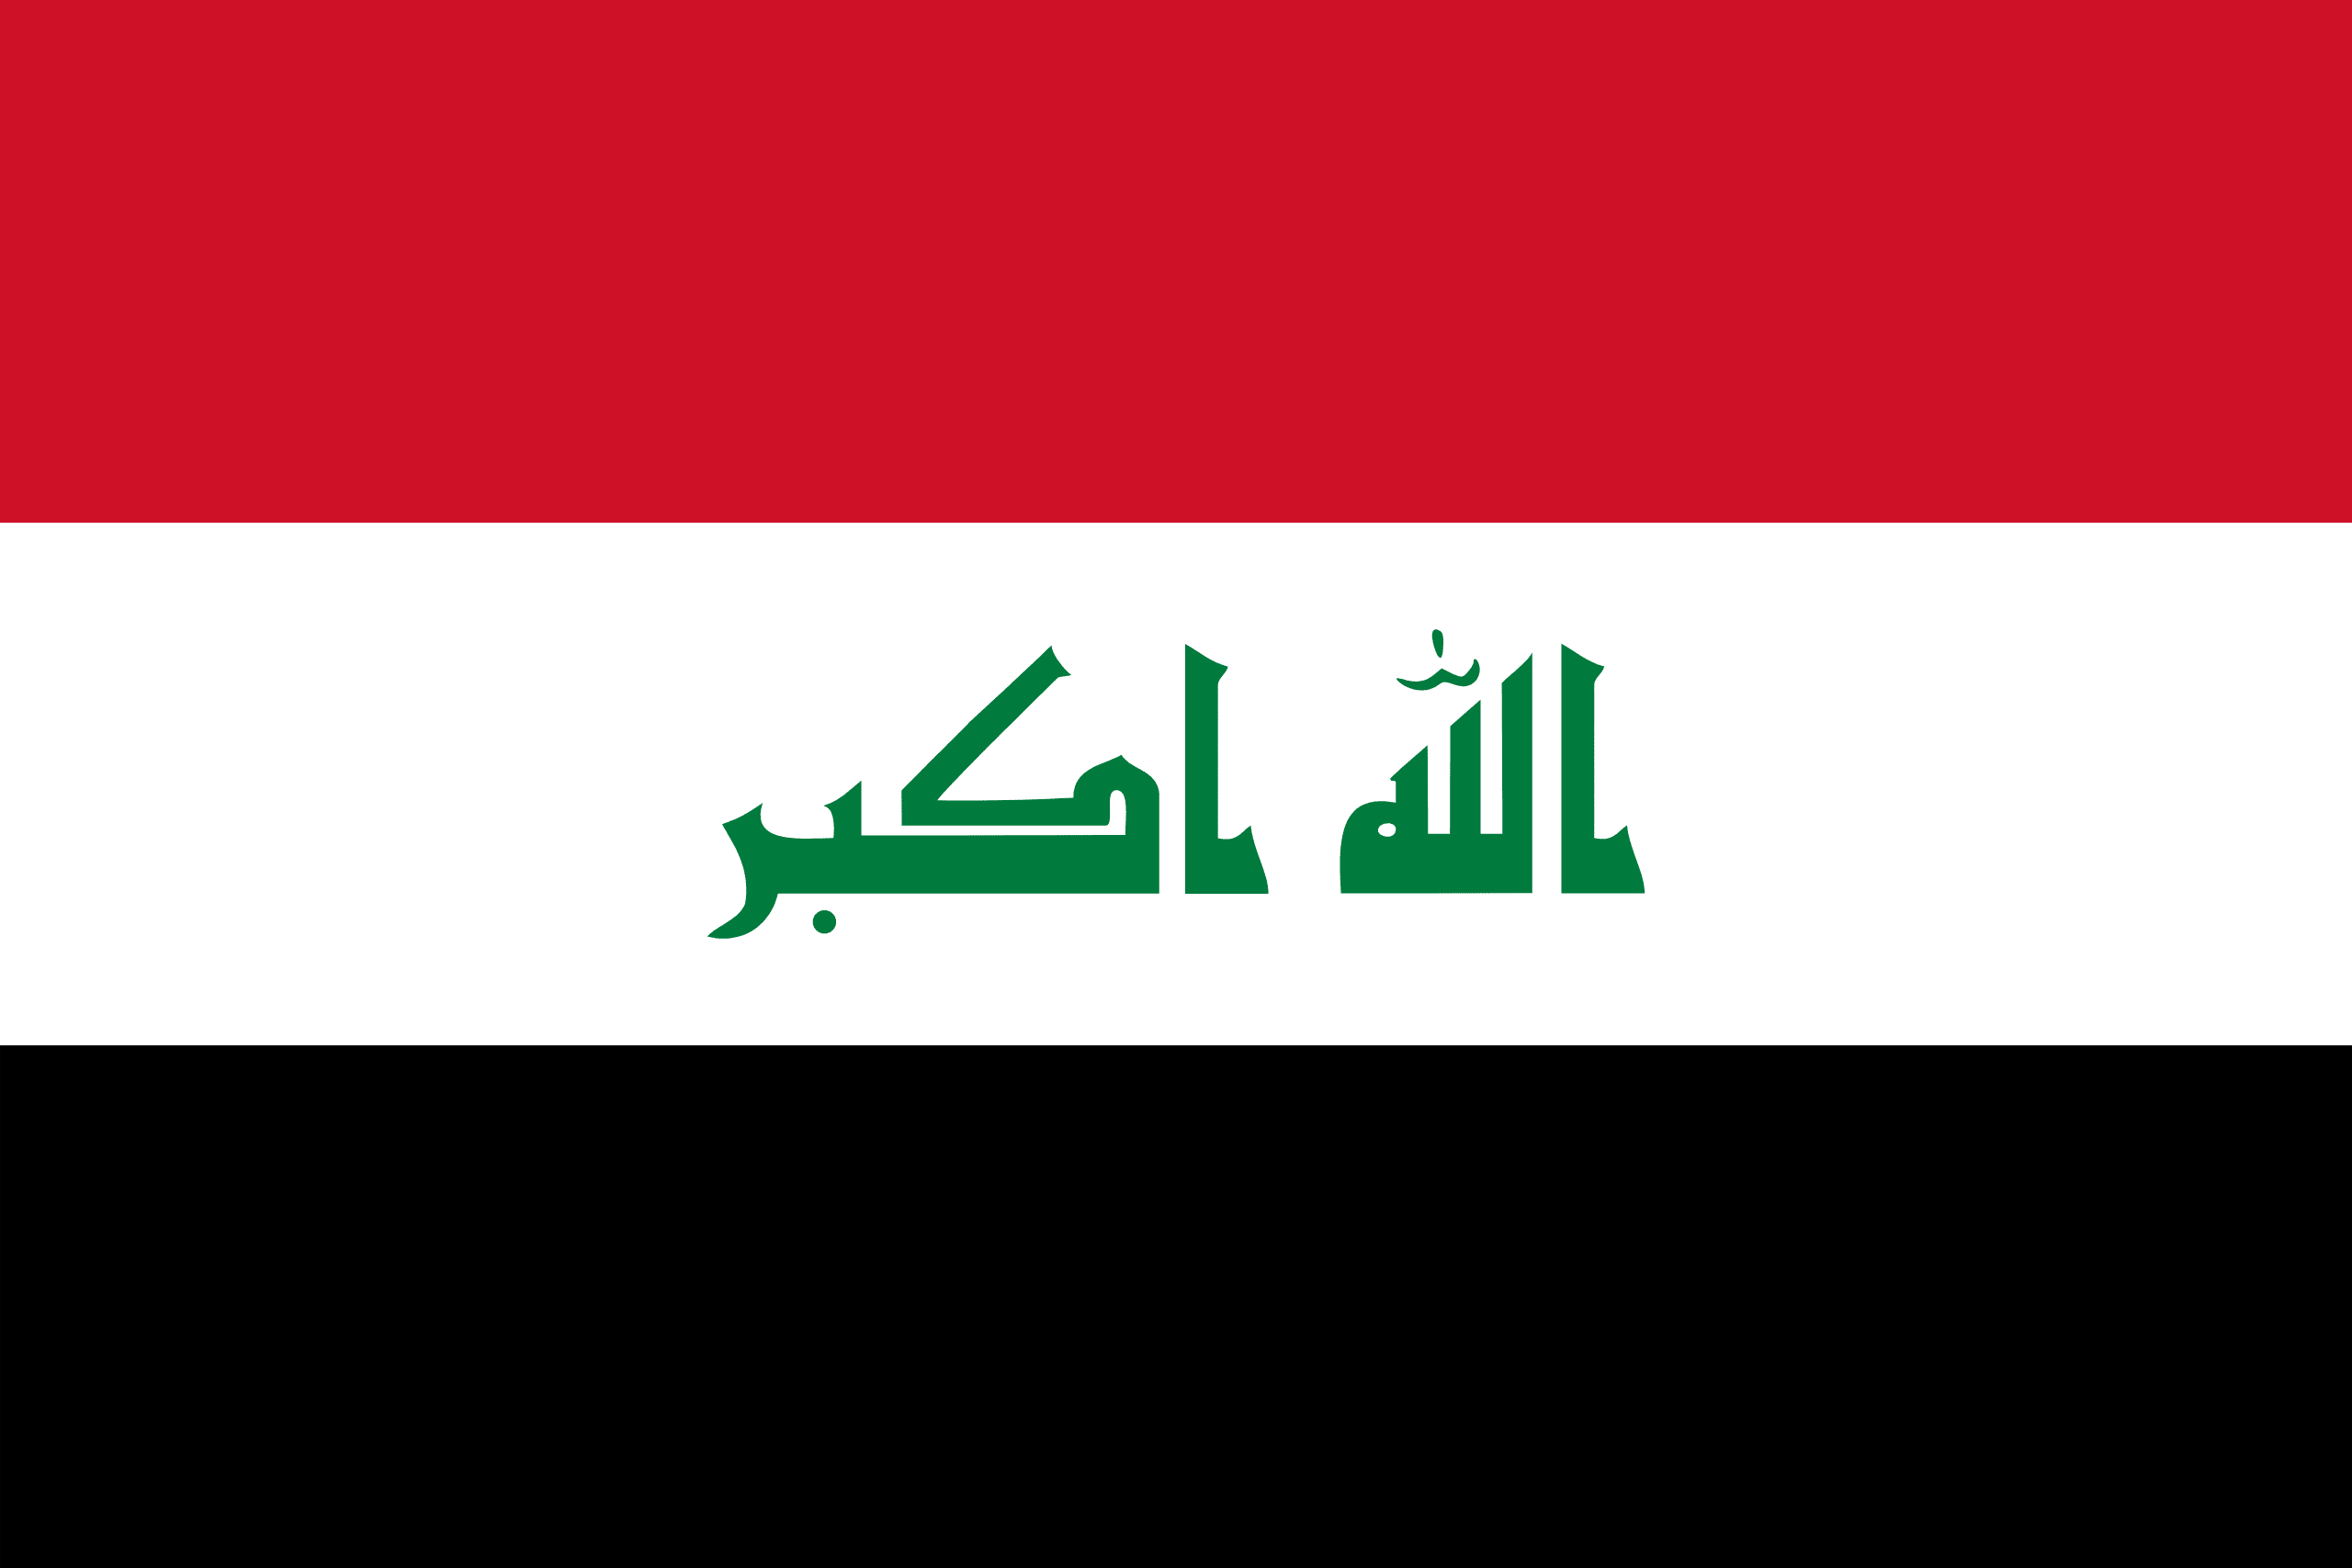

Ireland


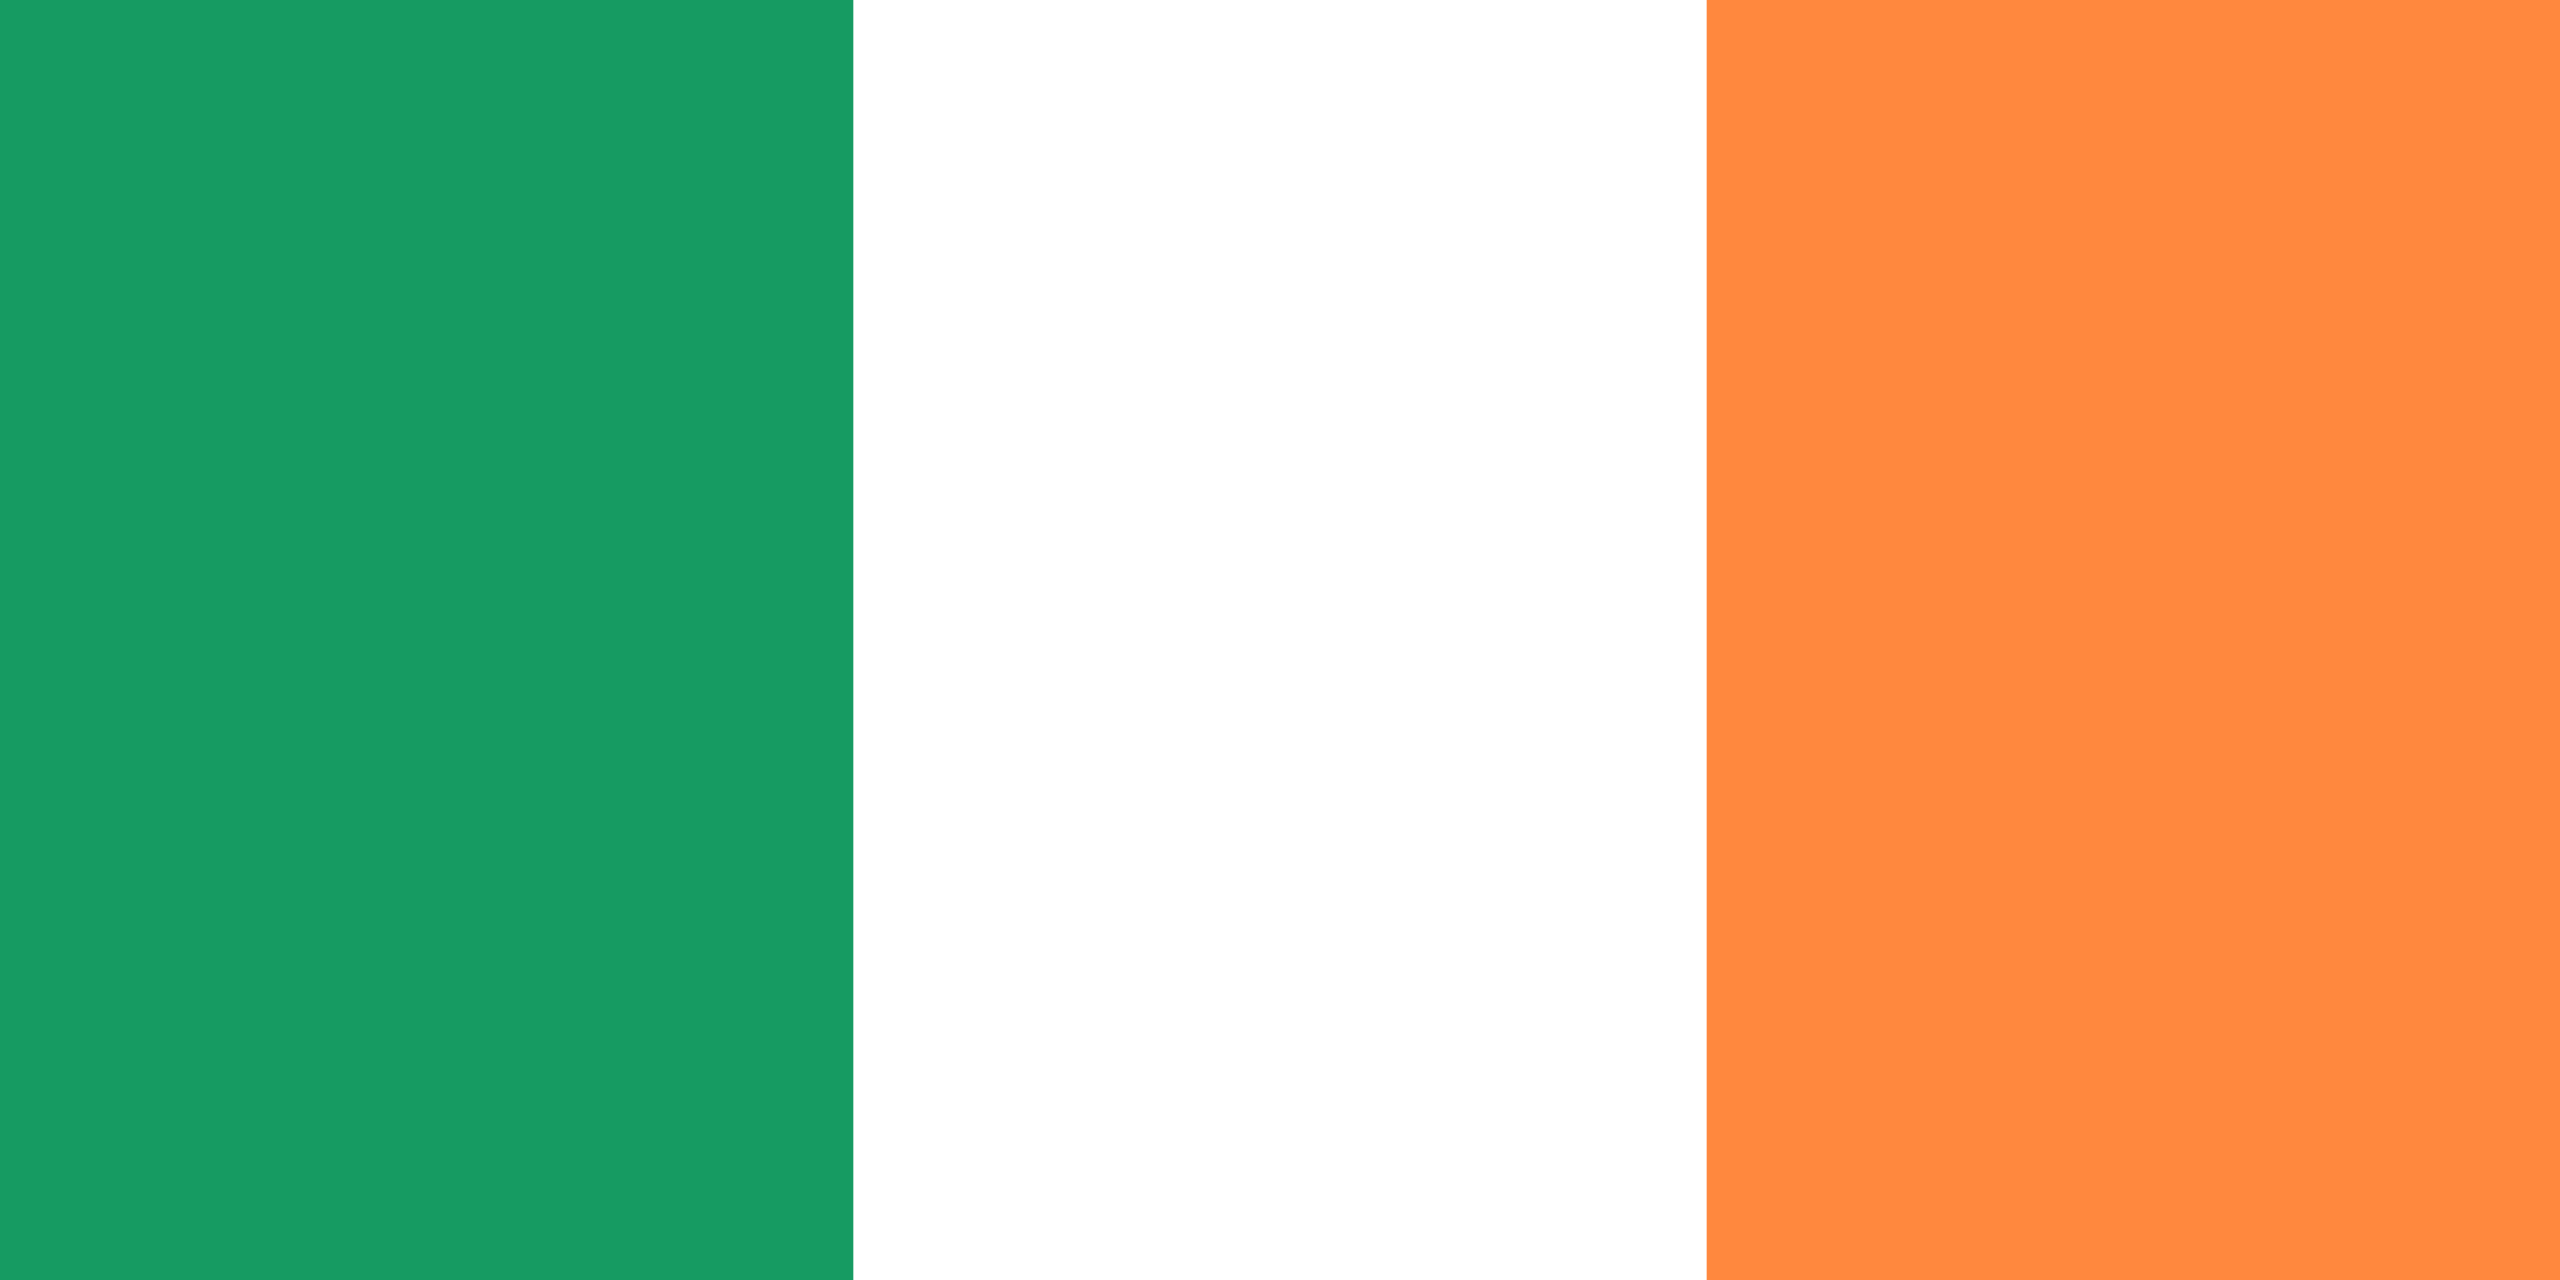

Isle of Man


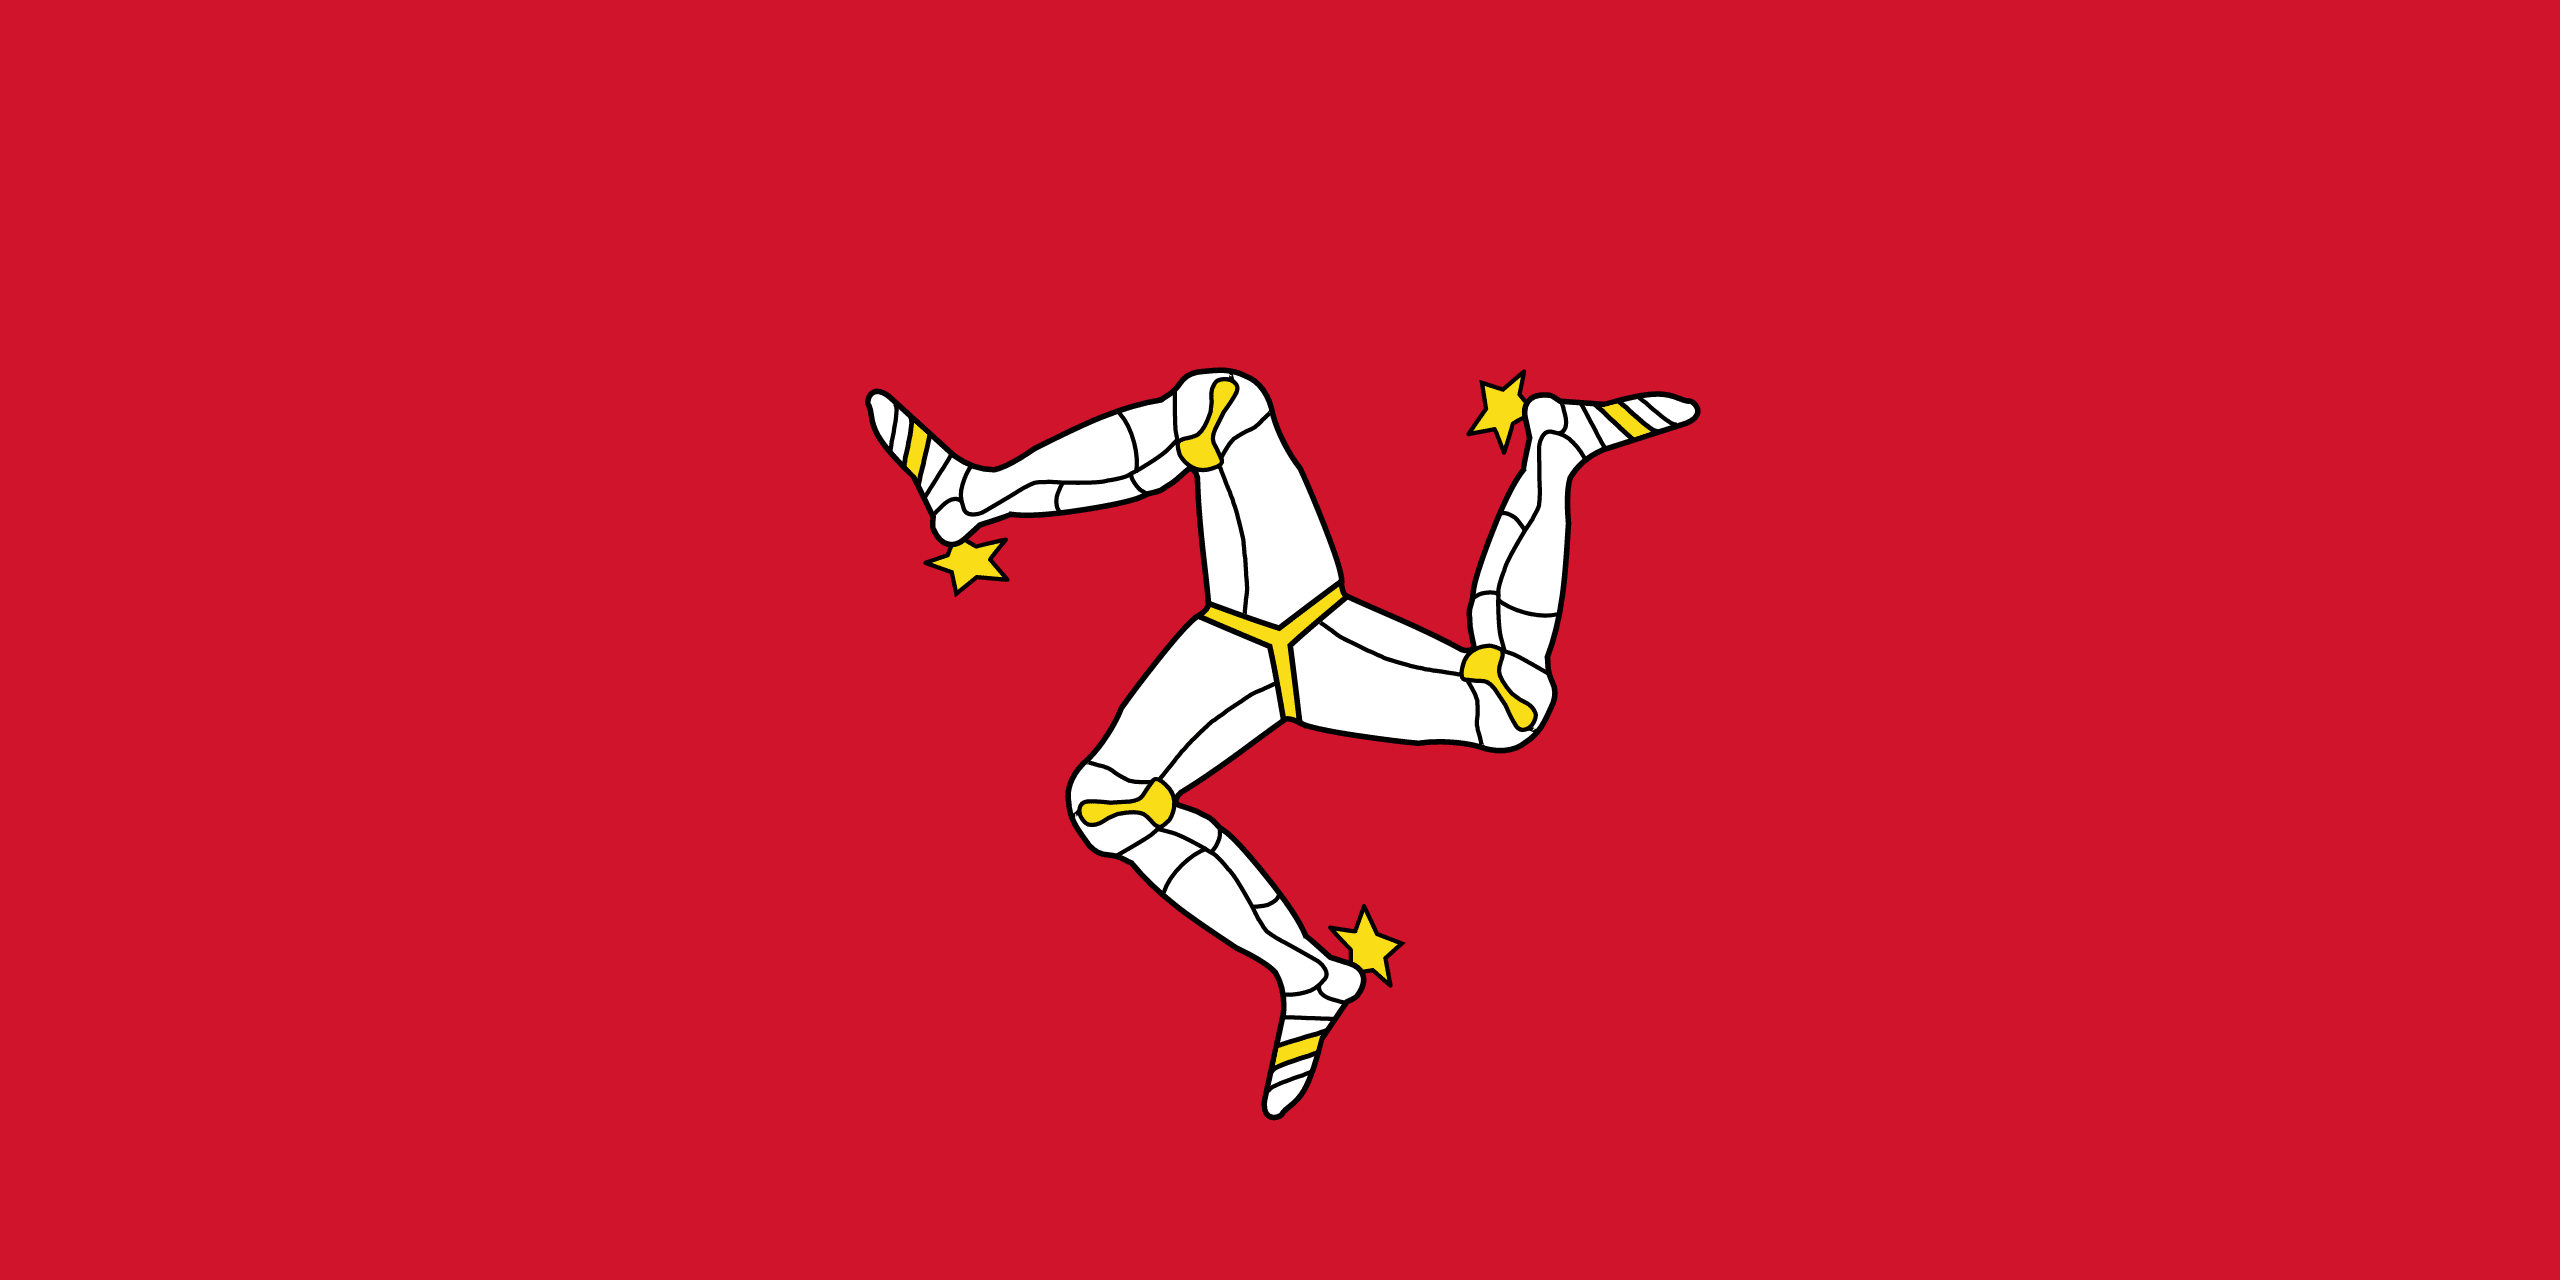

Israel


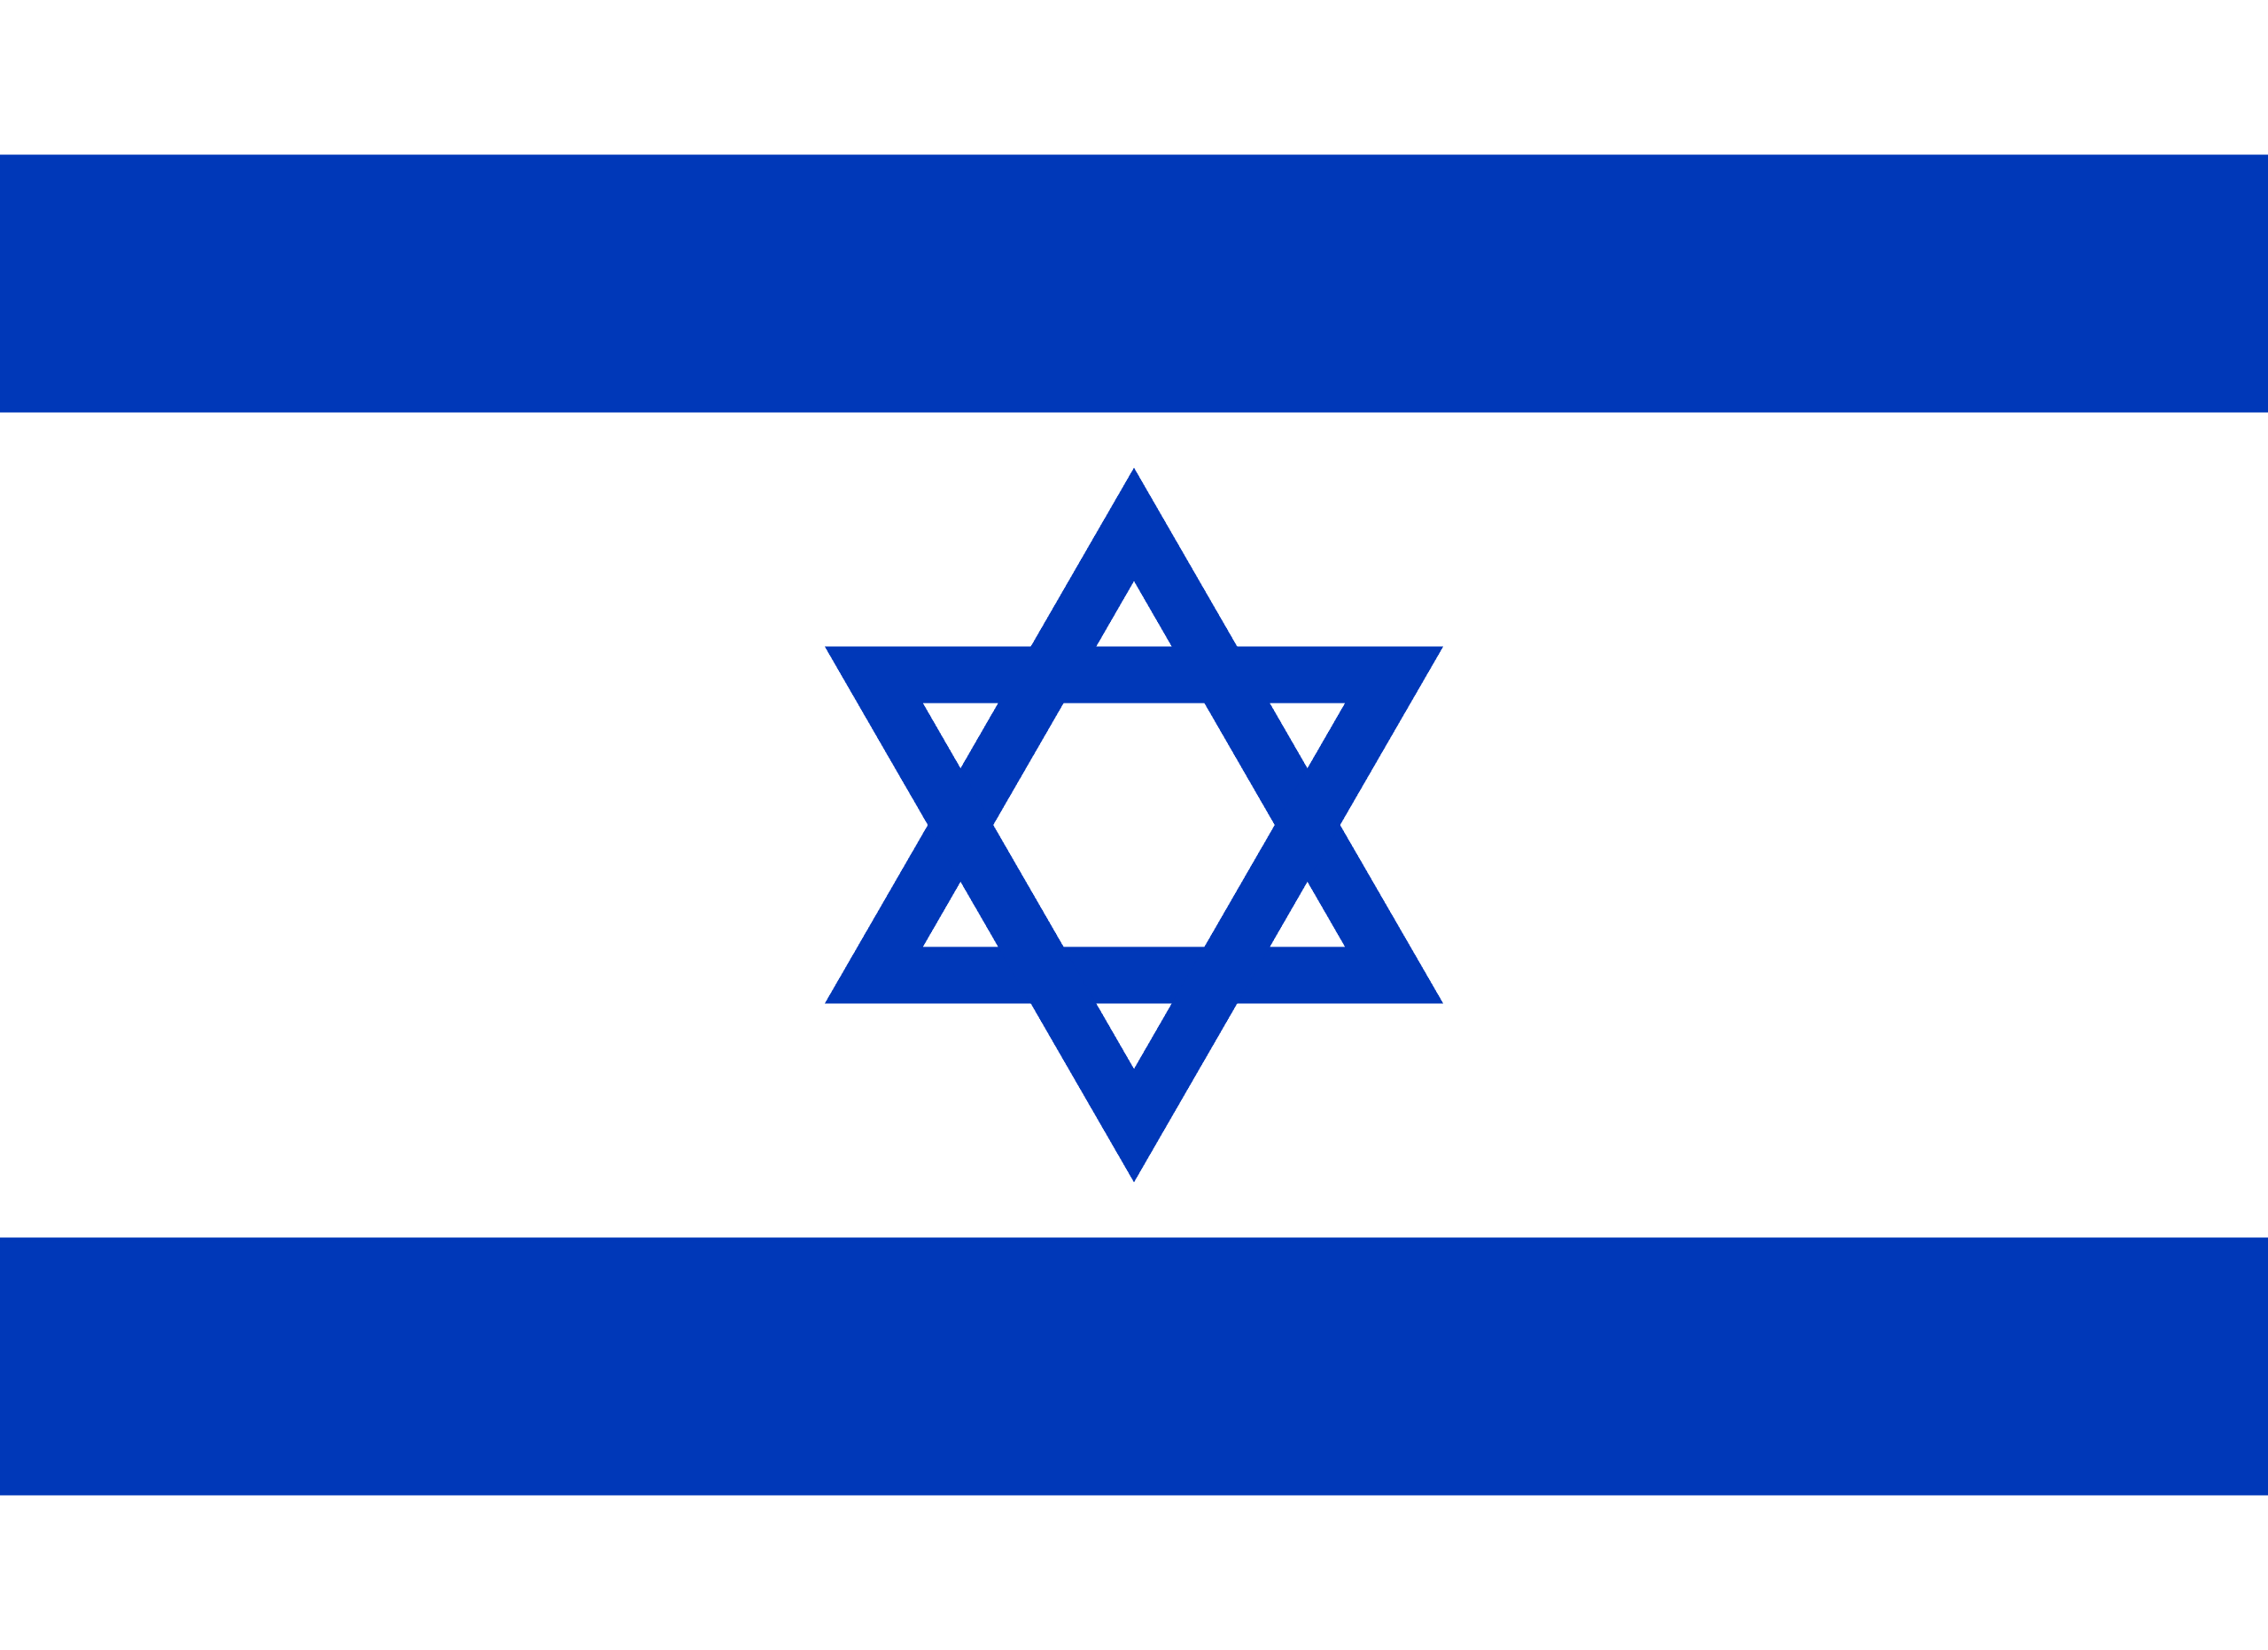

Italy


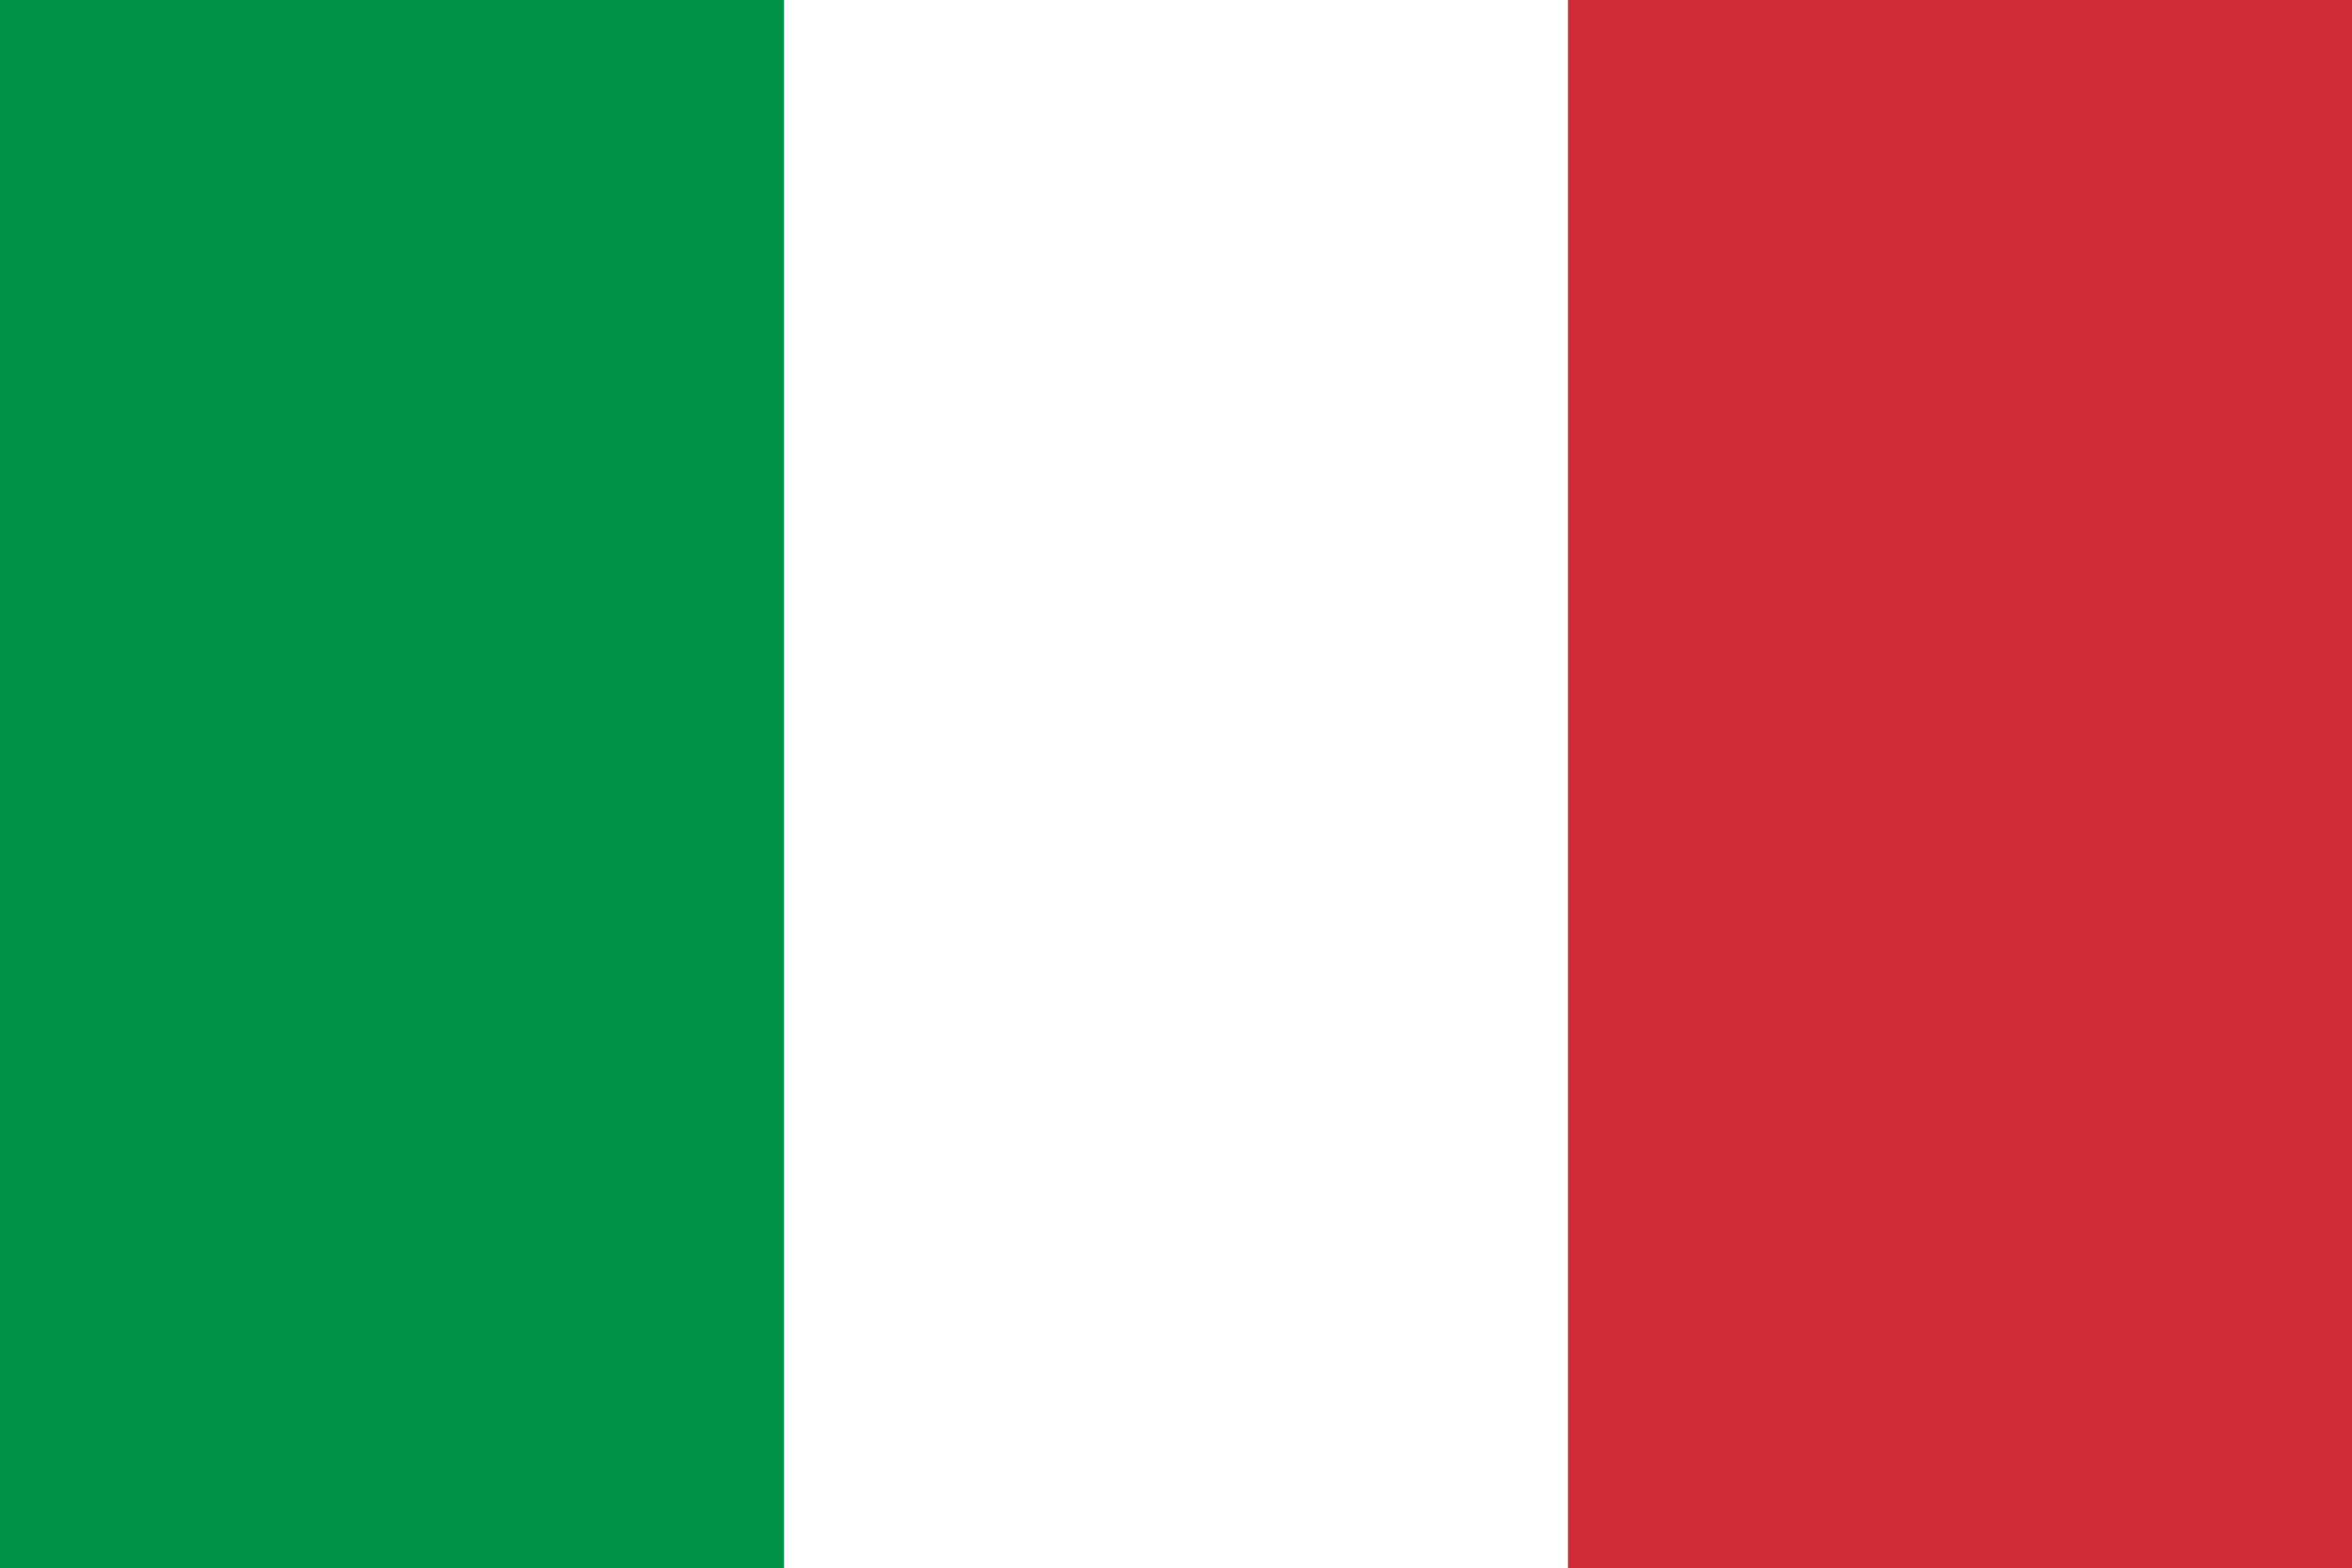

Jamaica


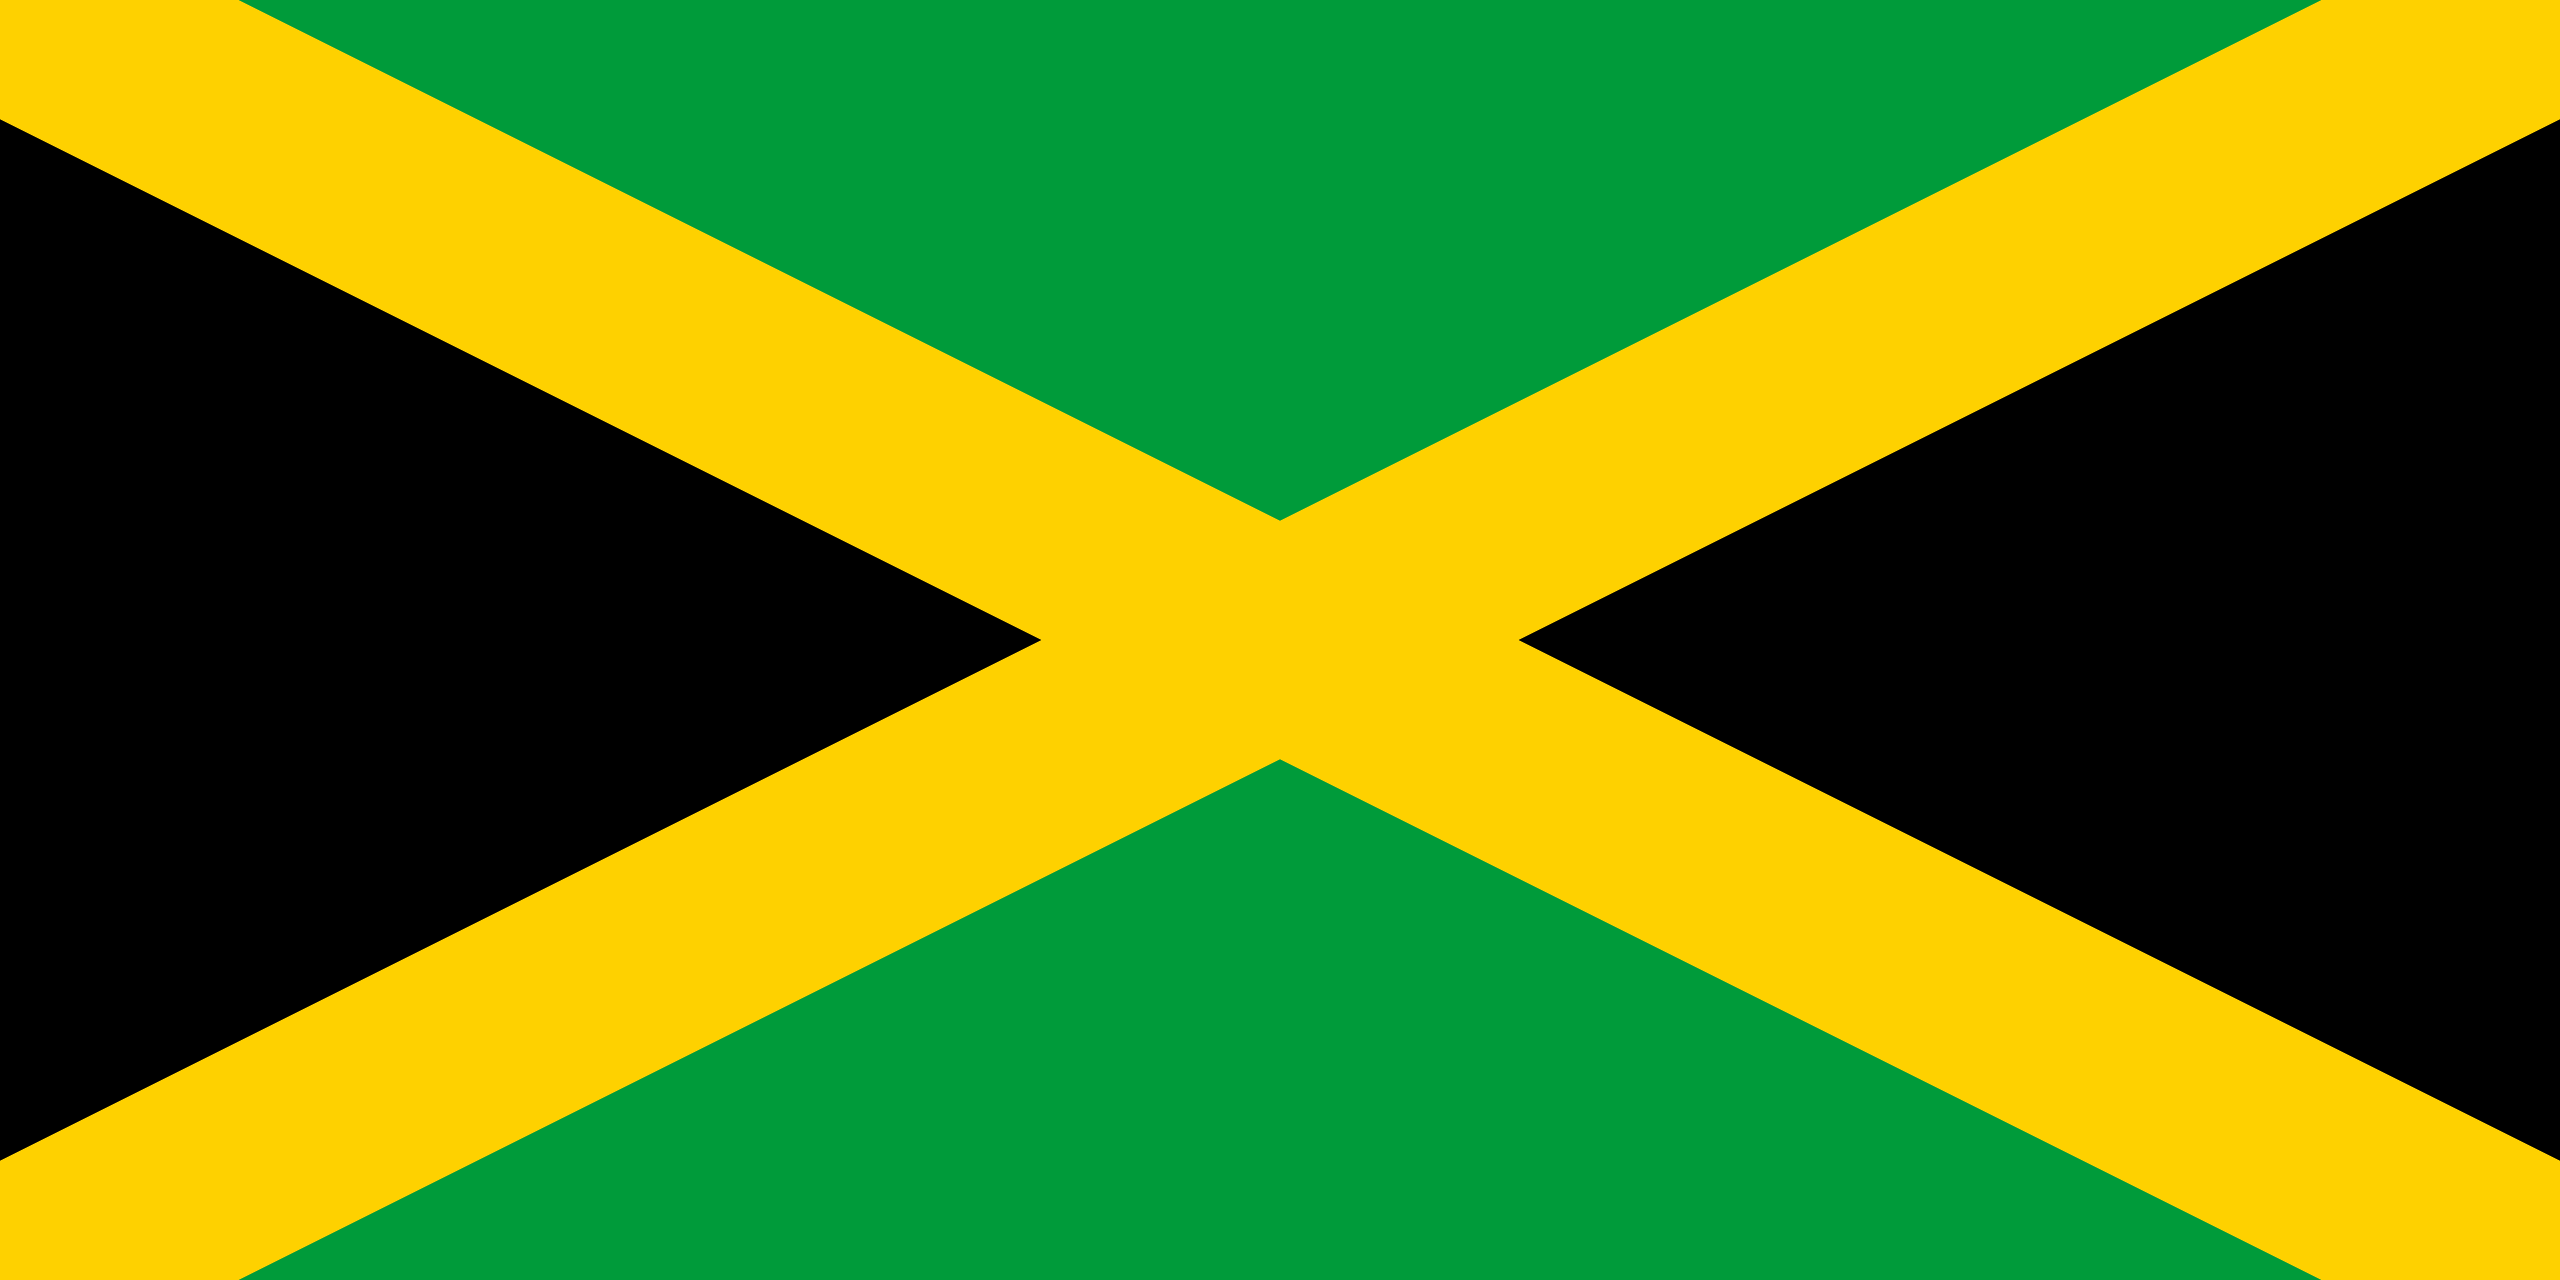

Japan


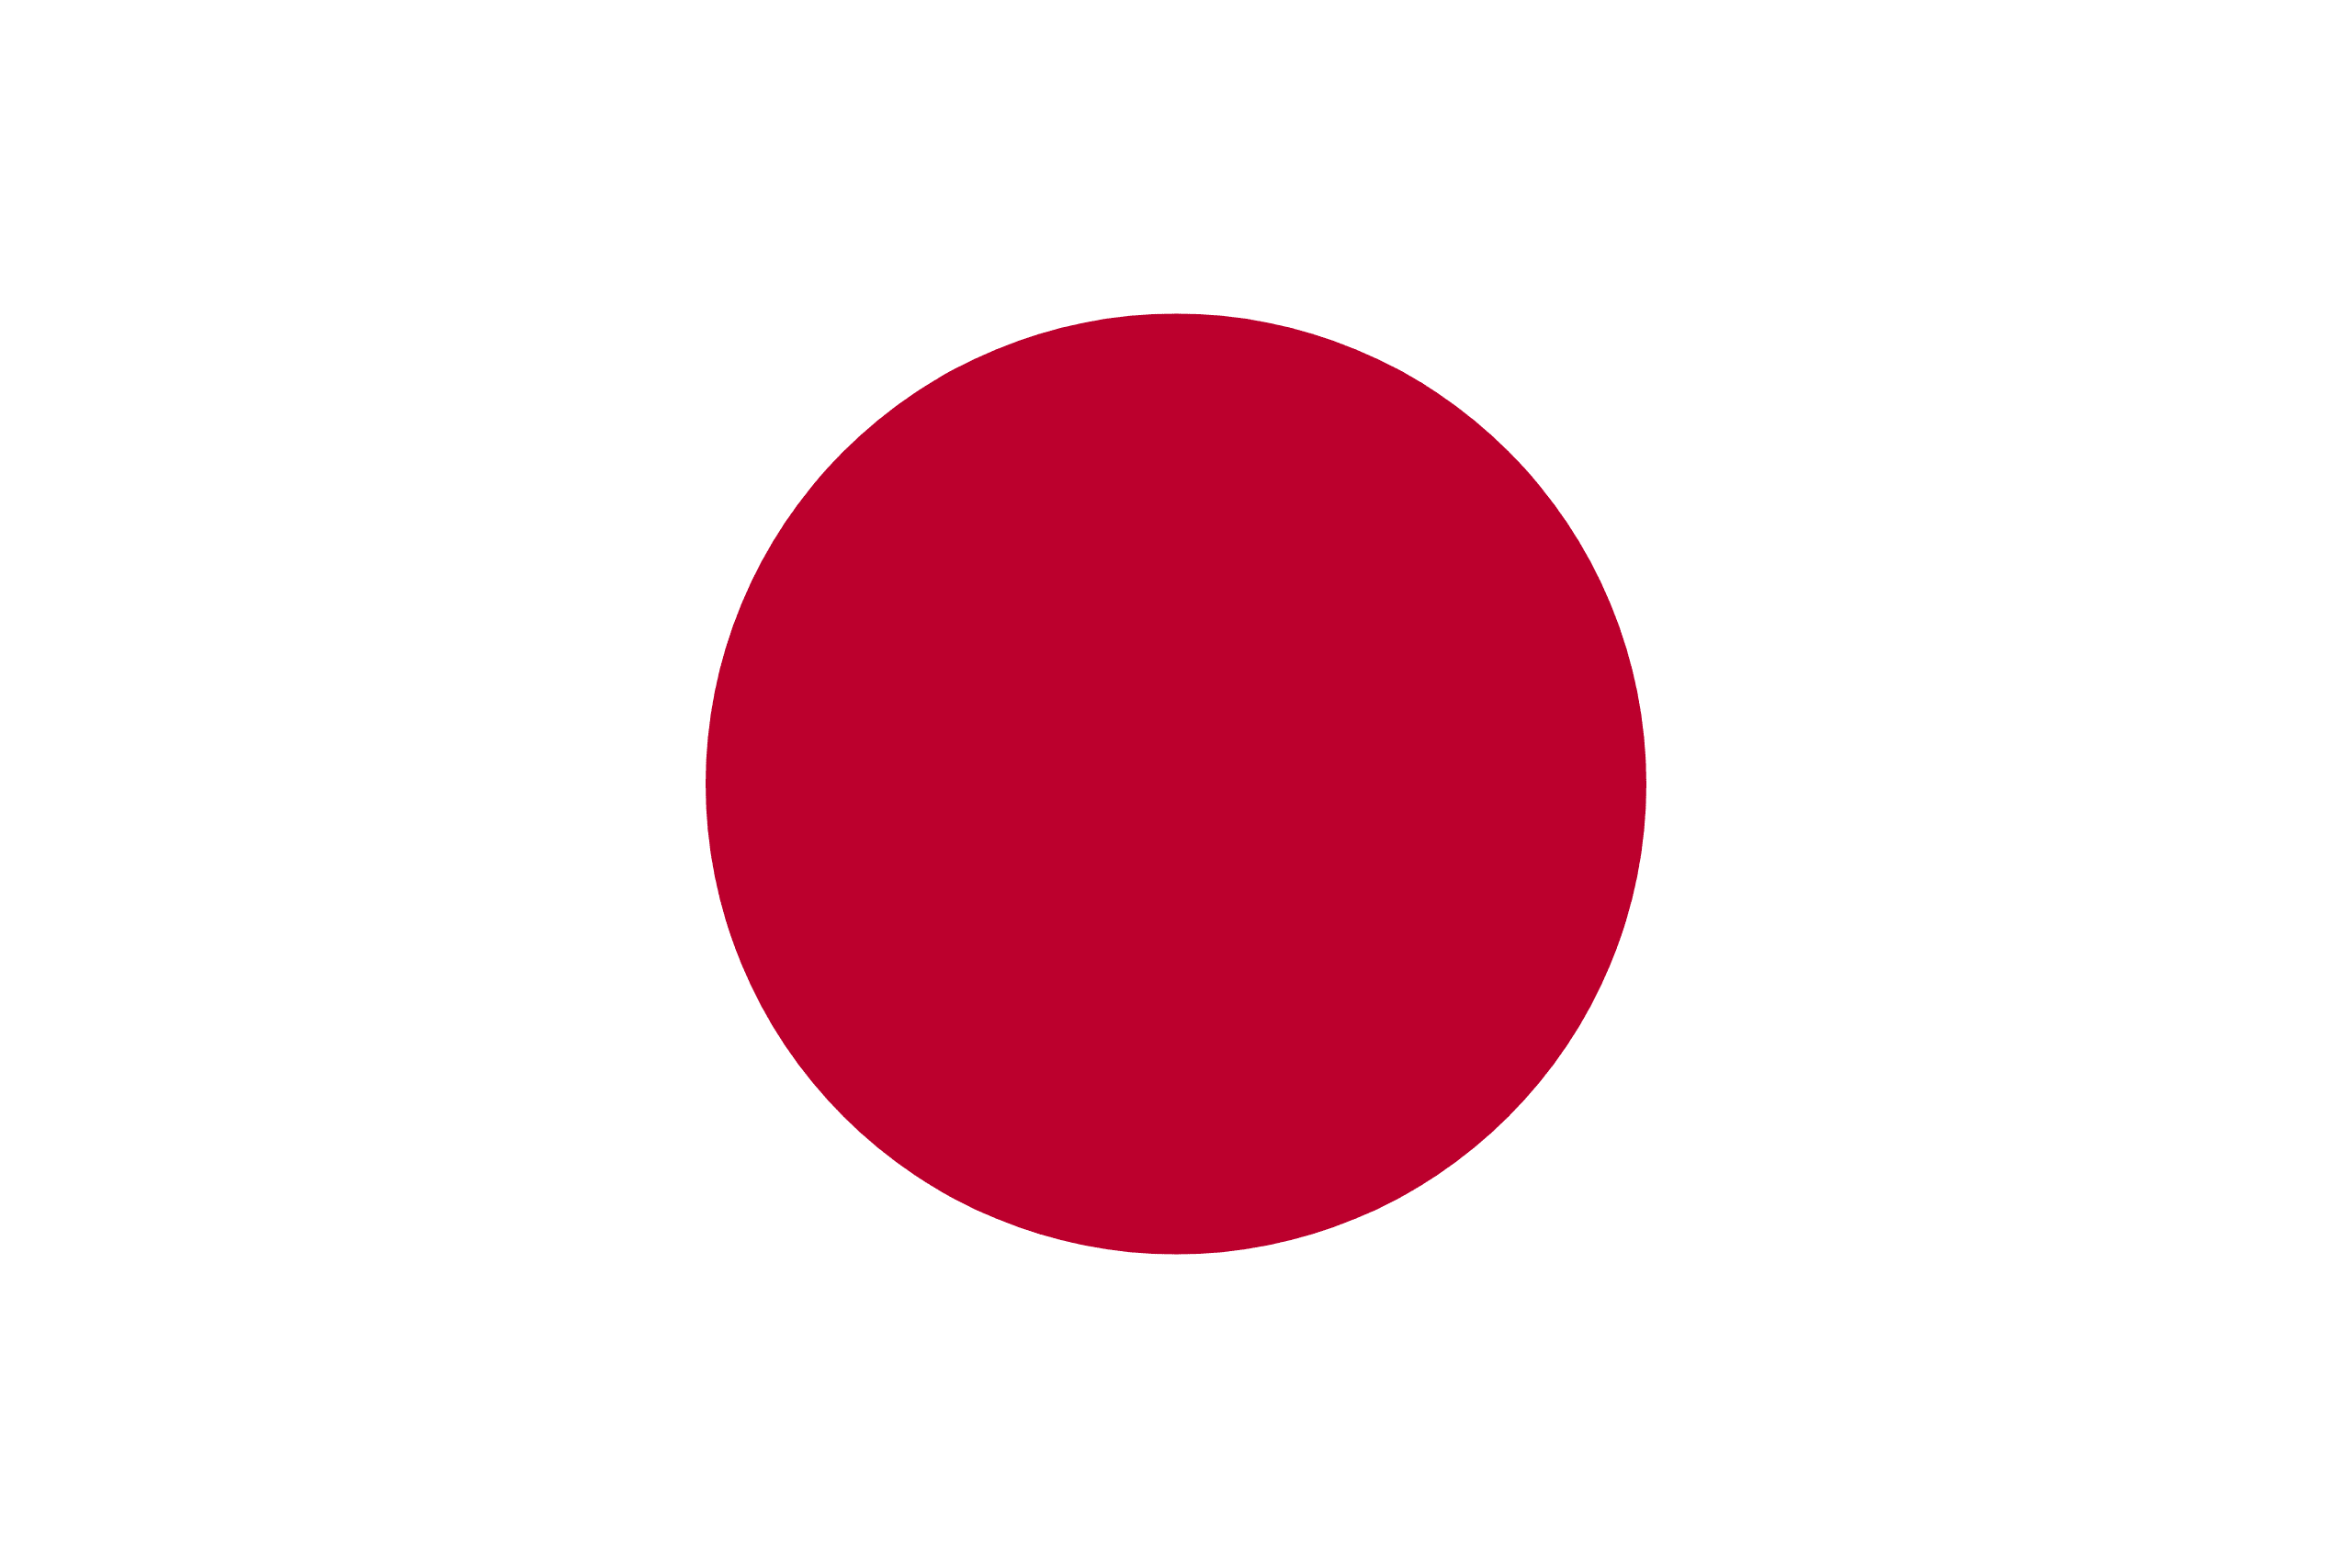

Jersey


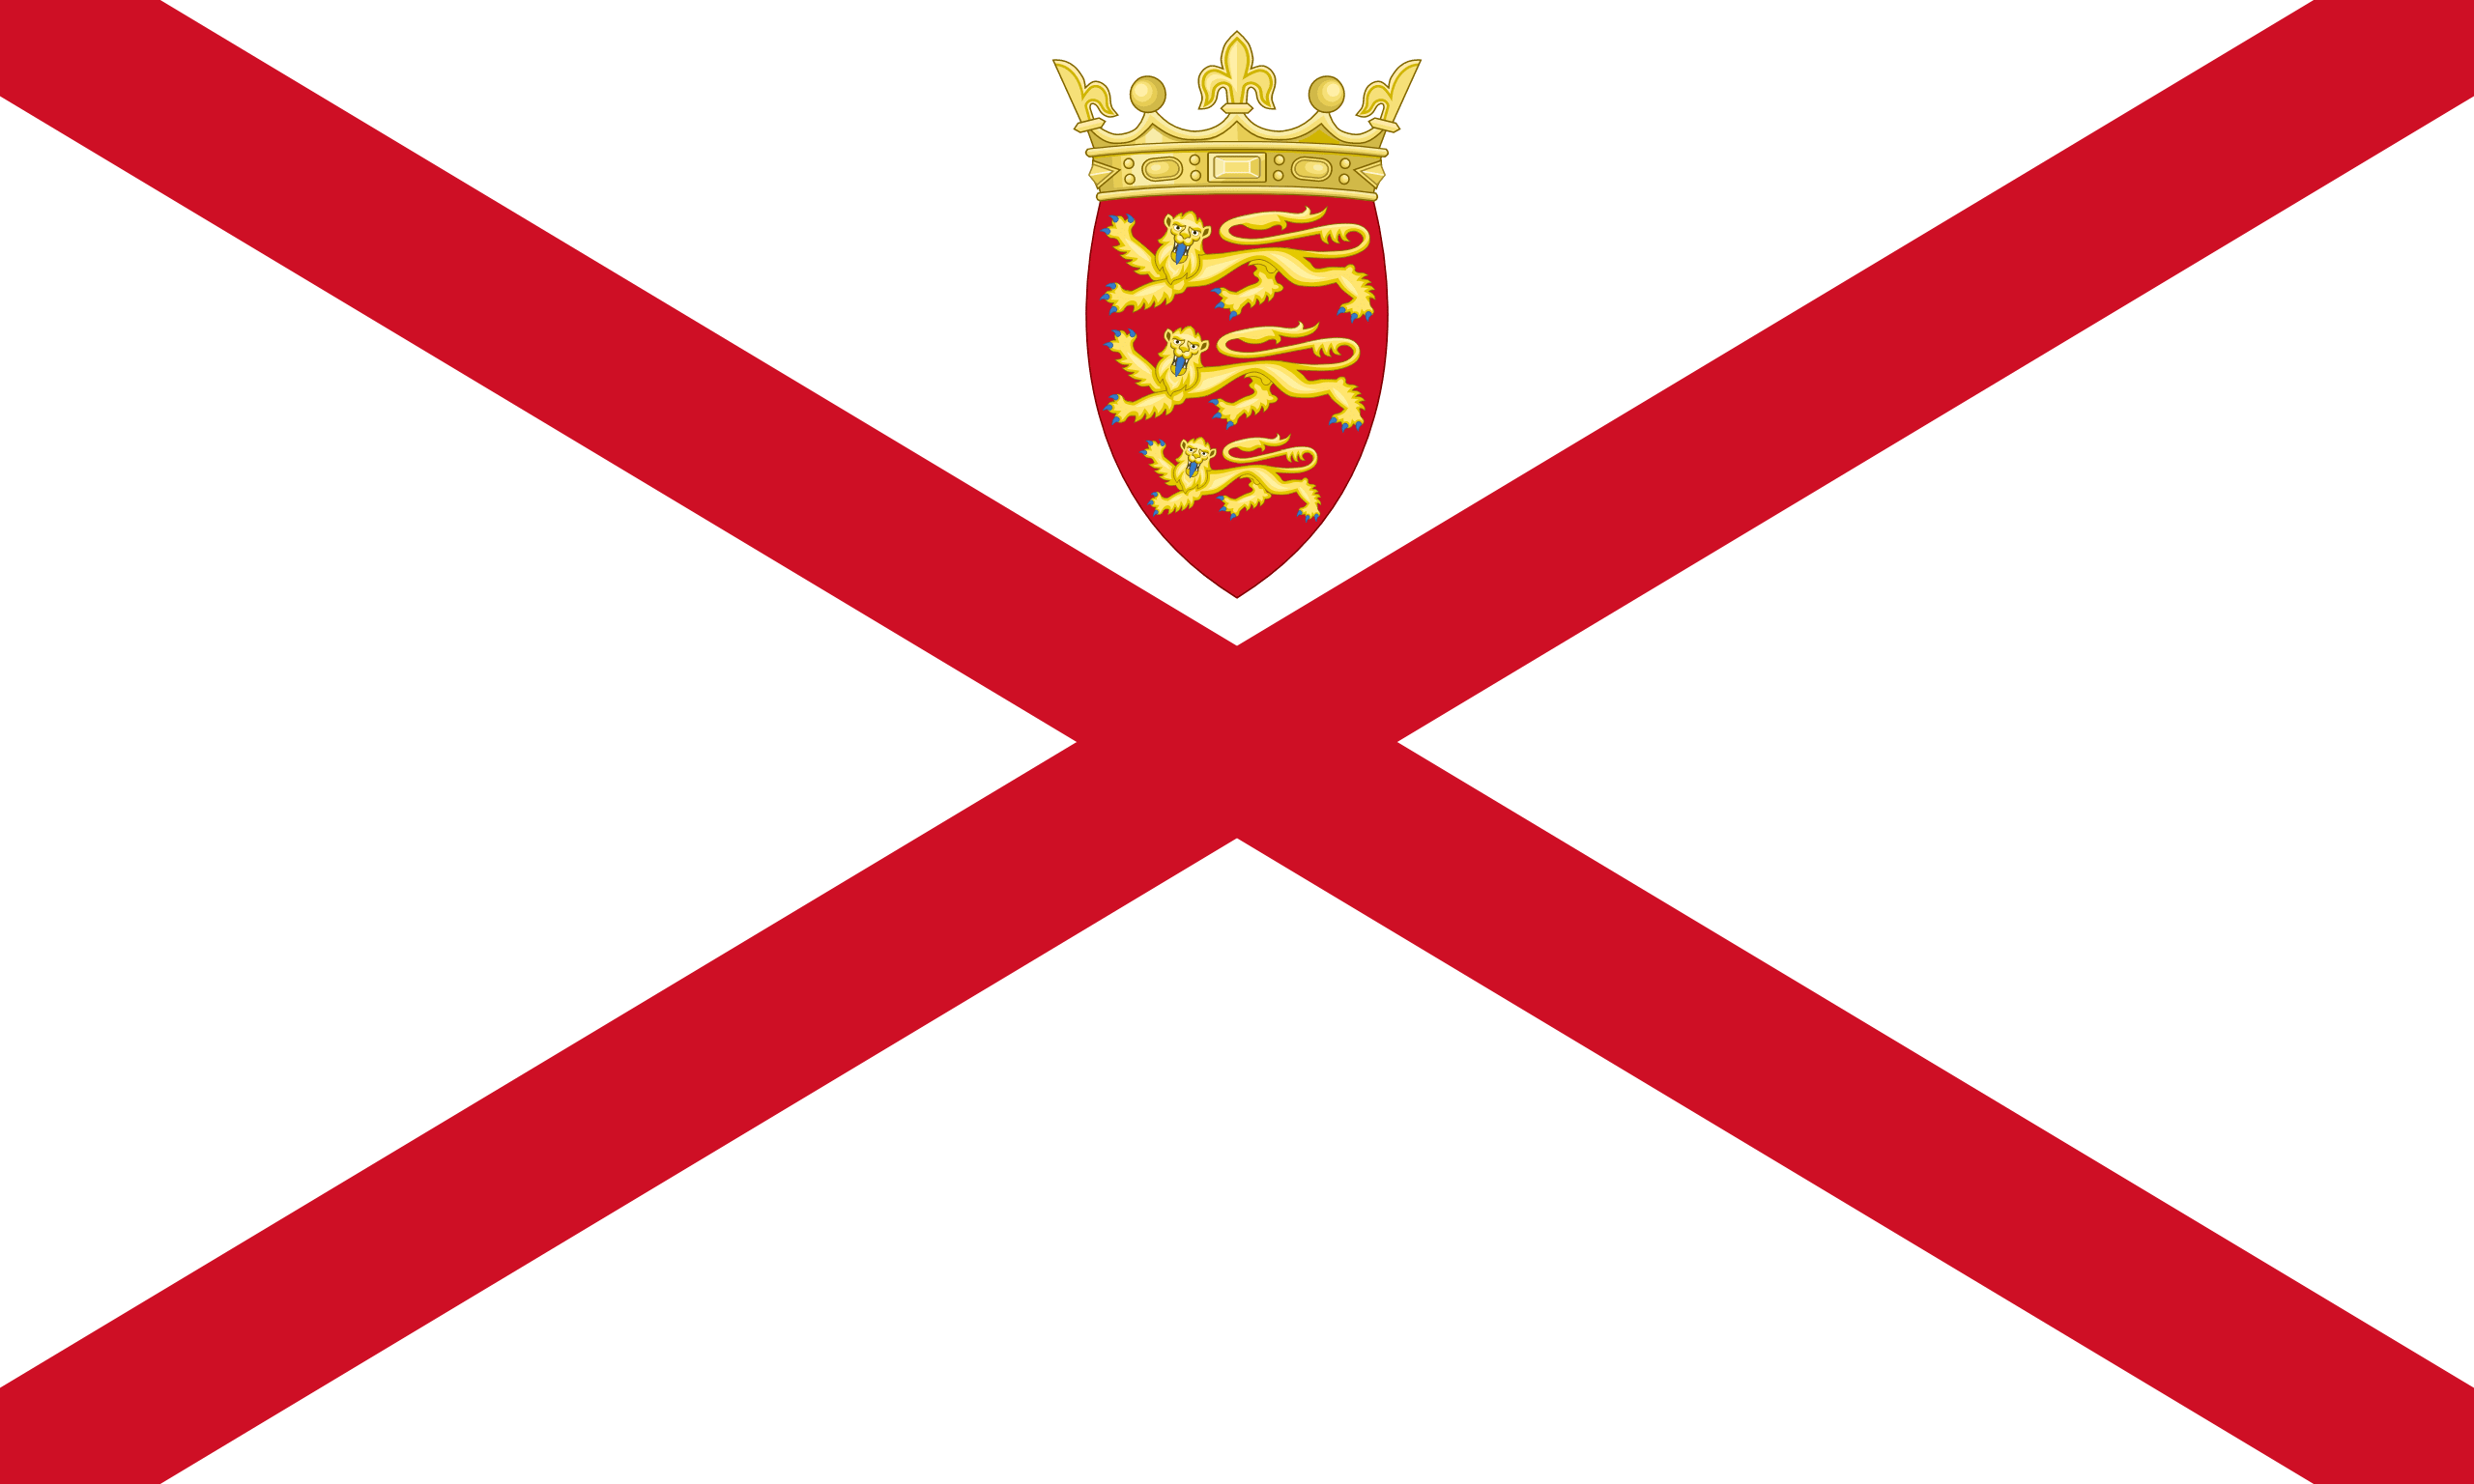

Jordan


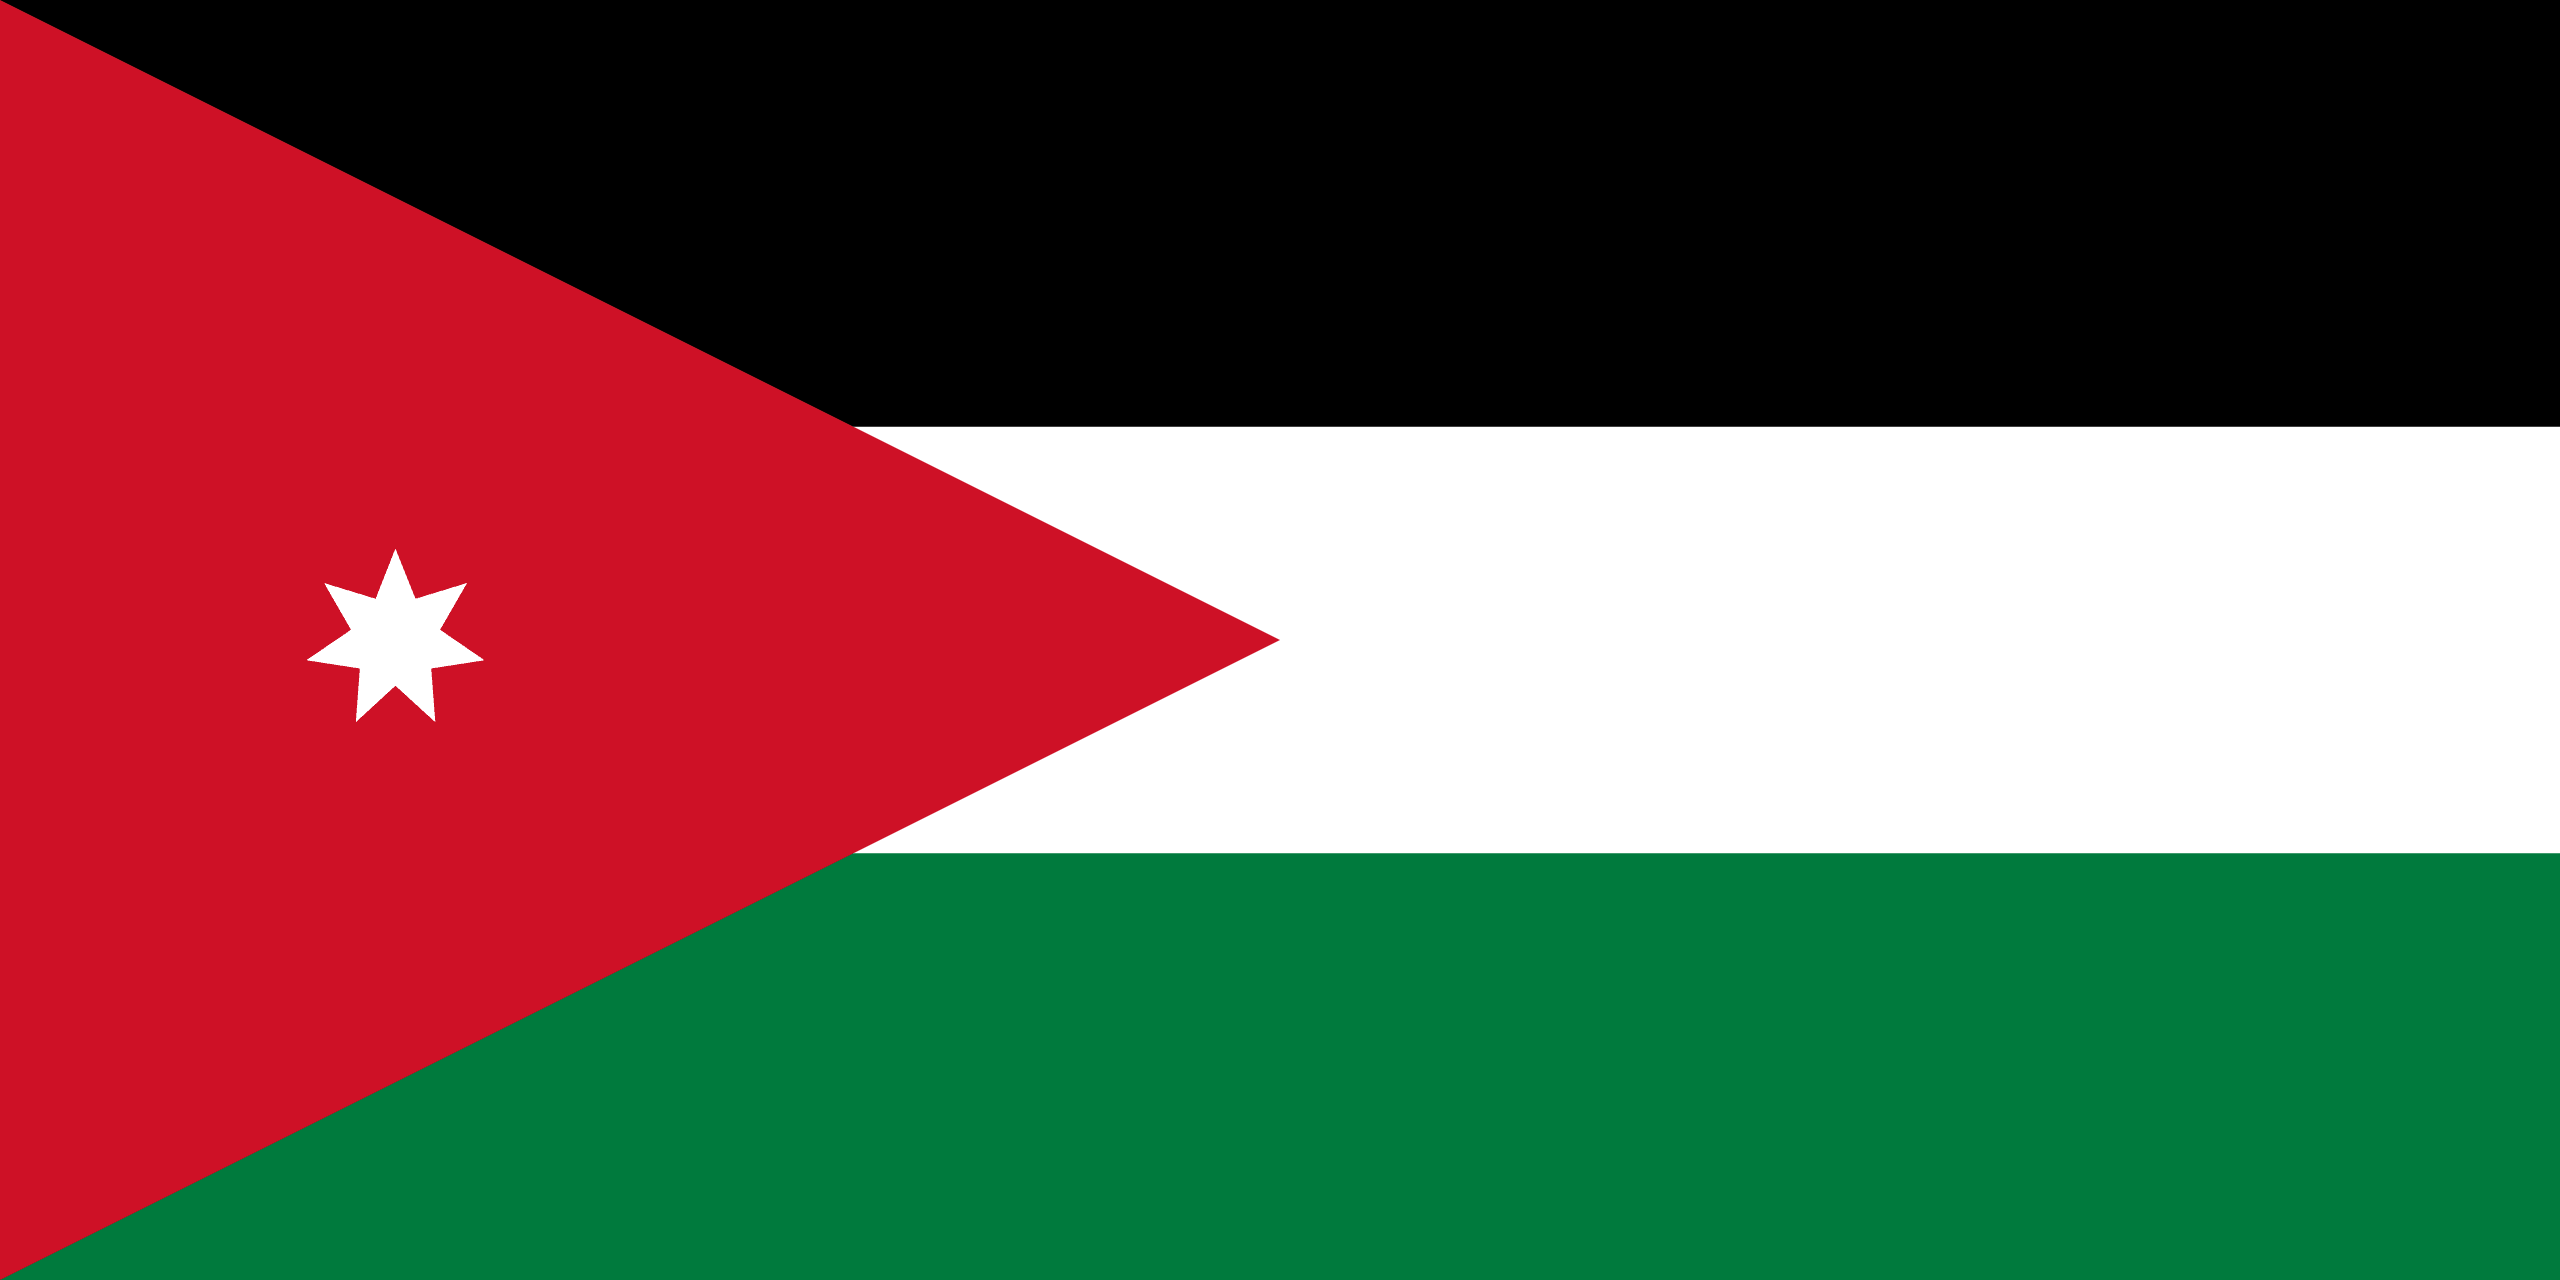

Kazakhstan


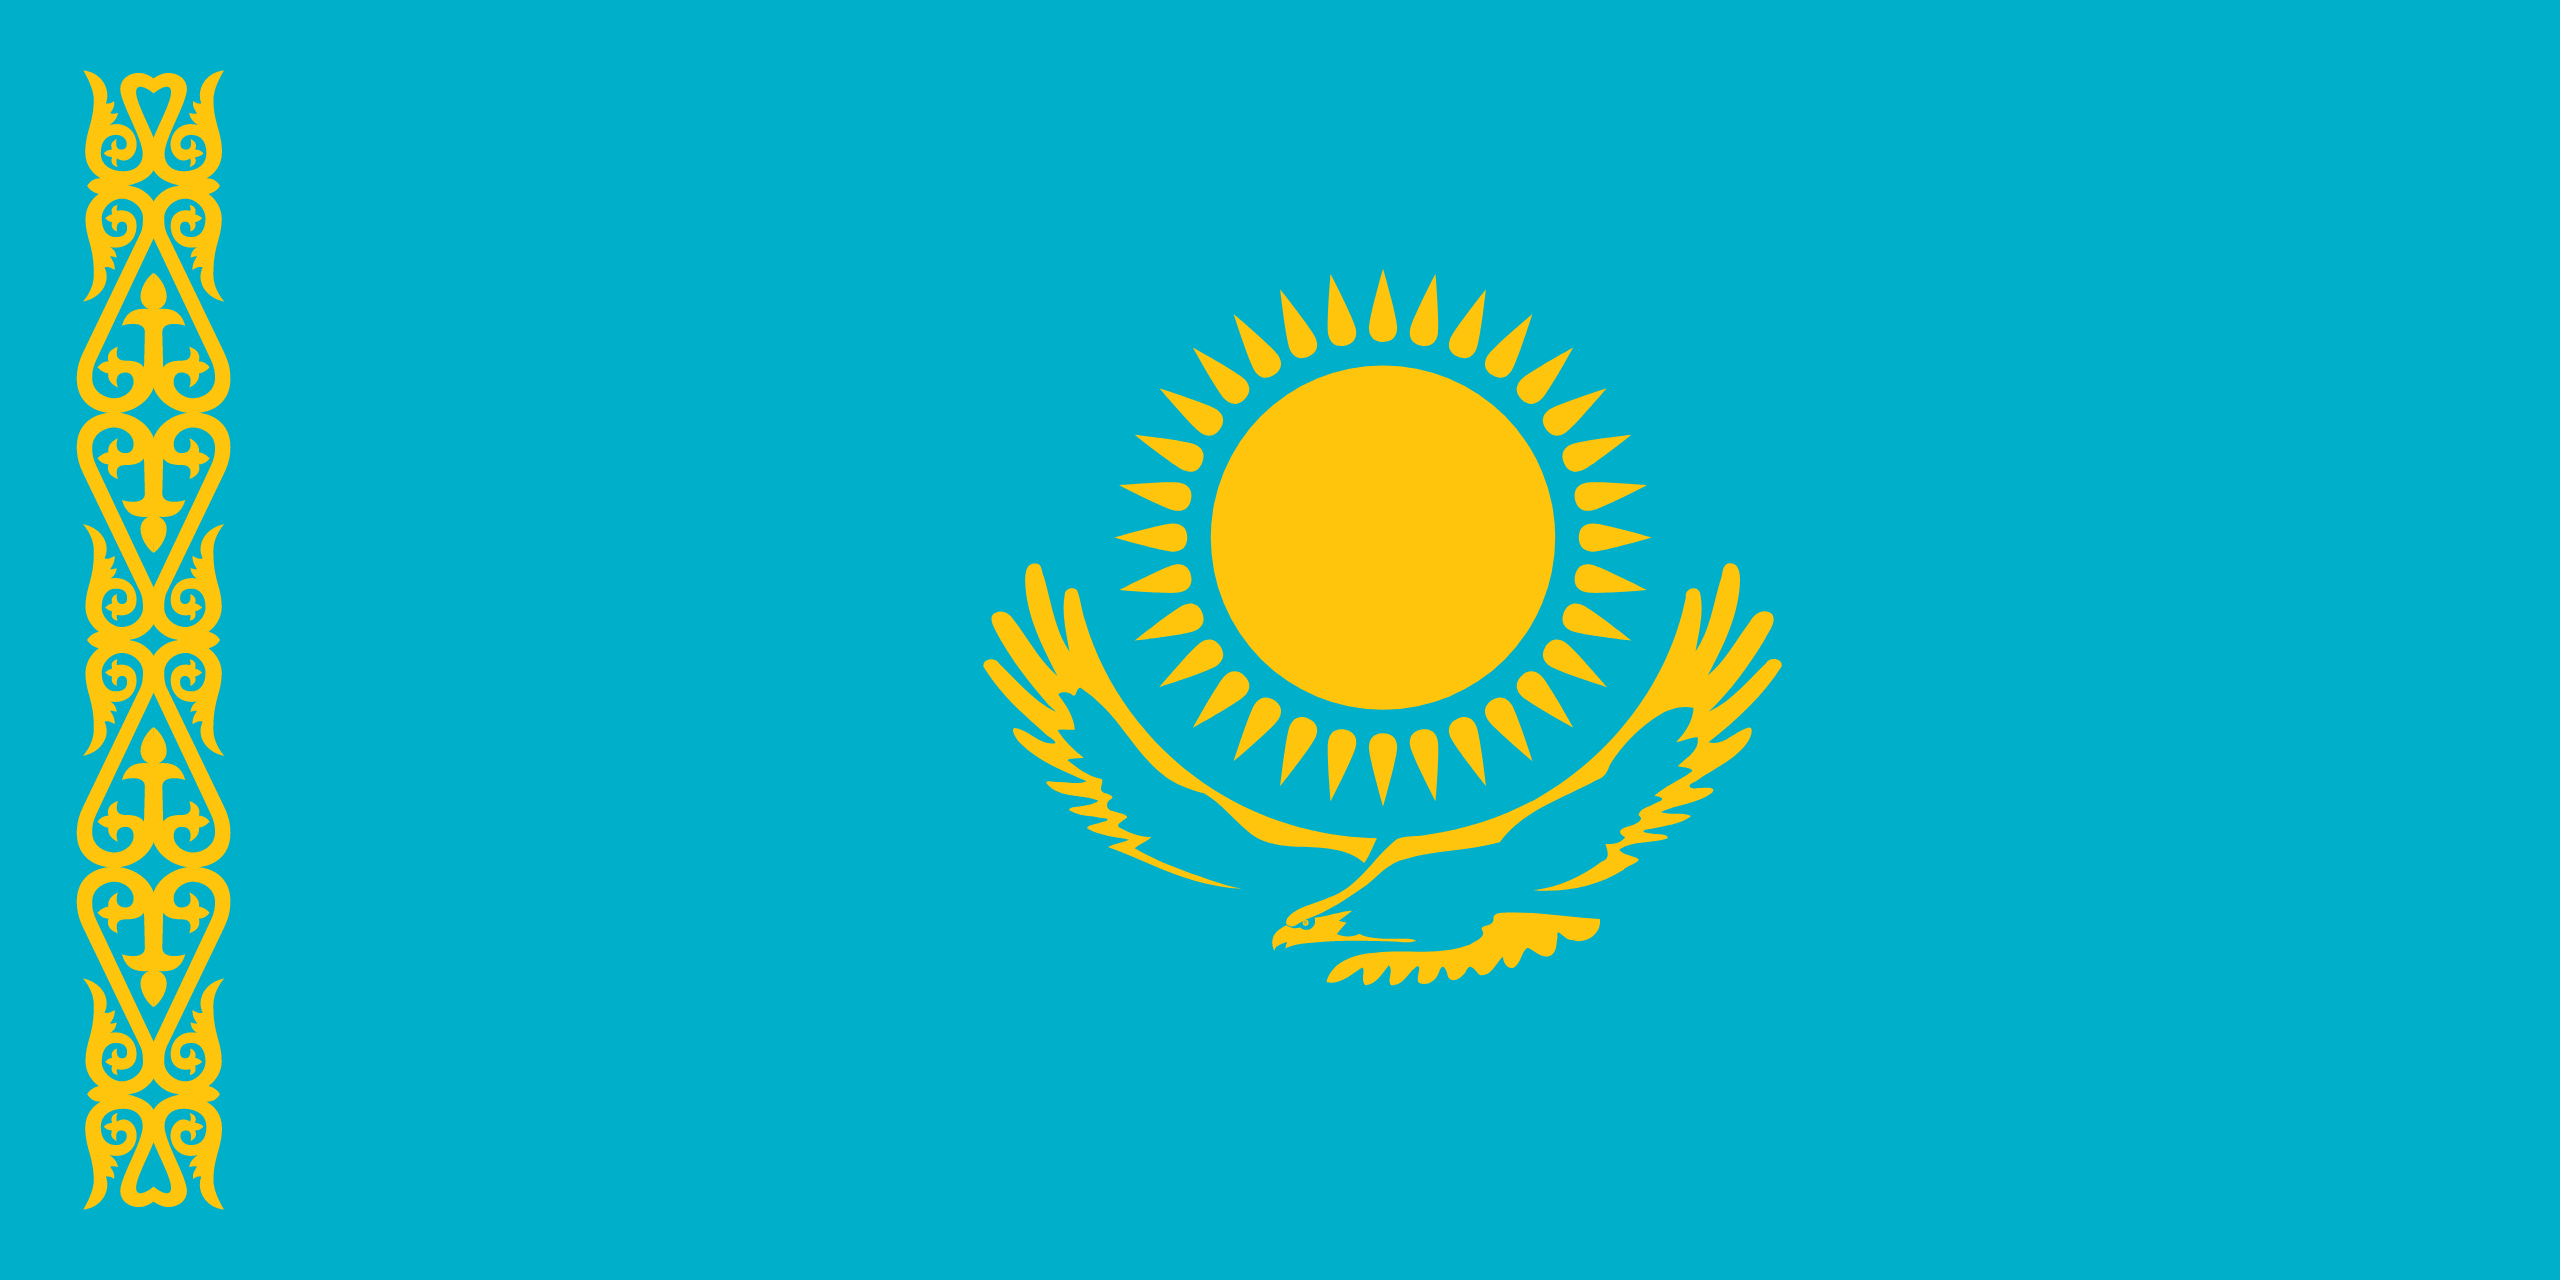

Kenya


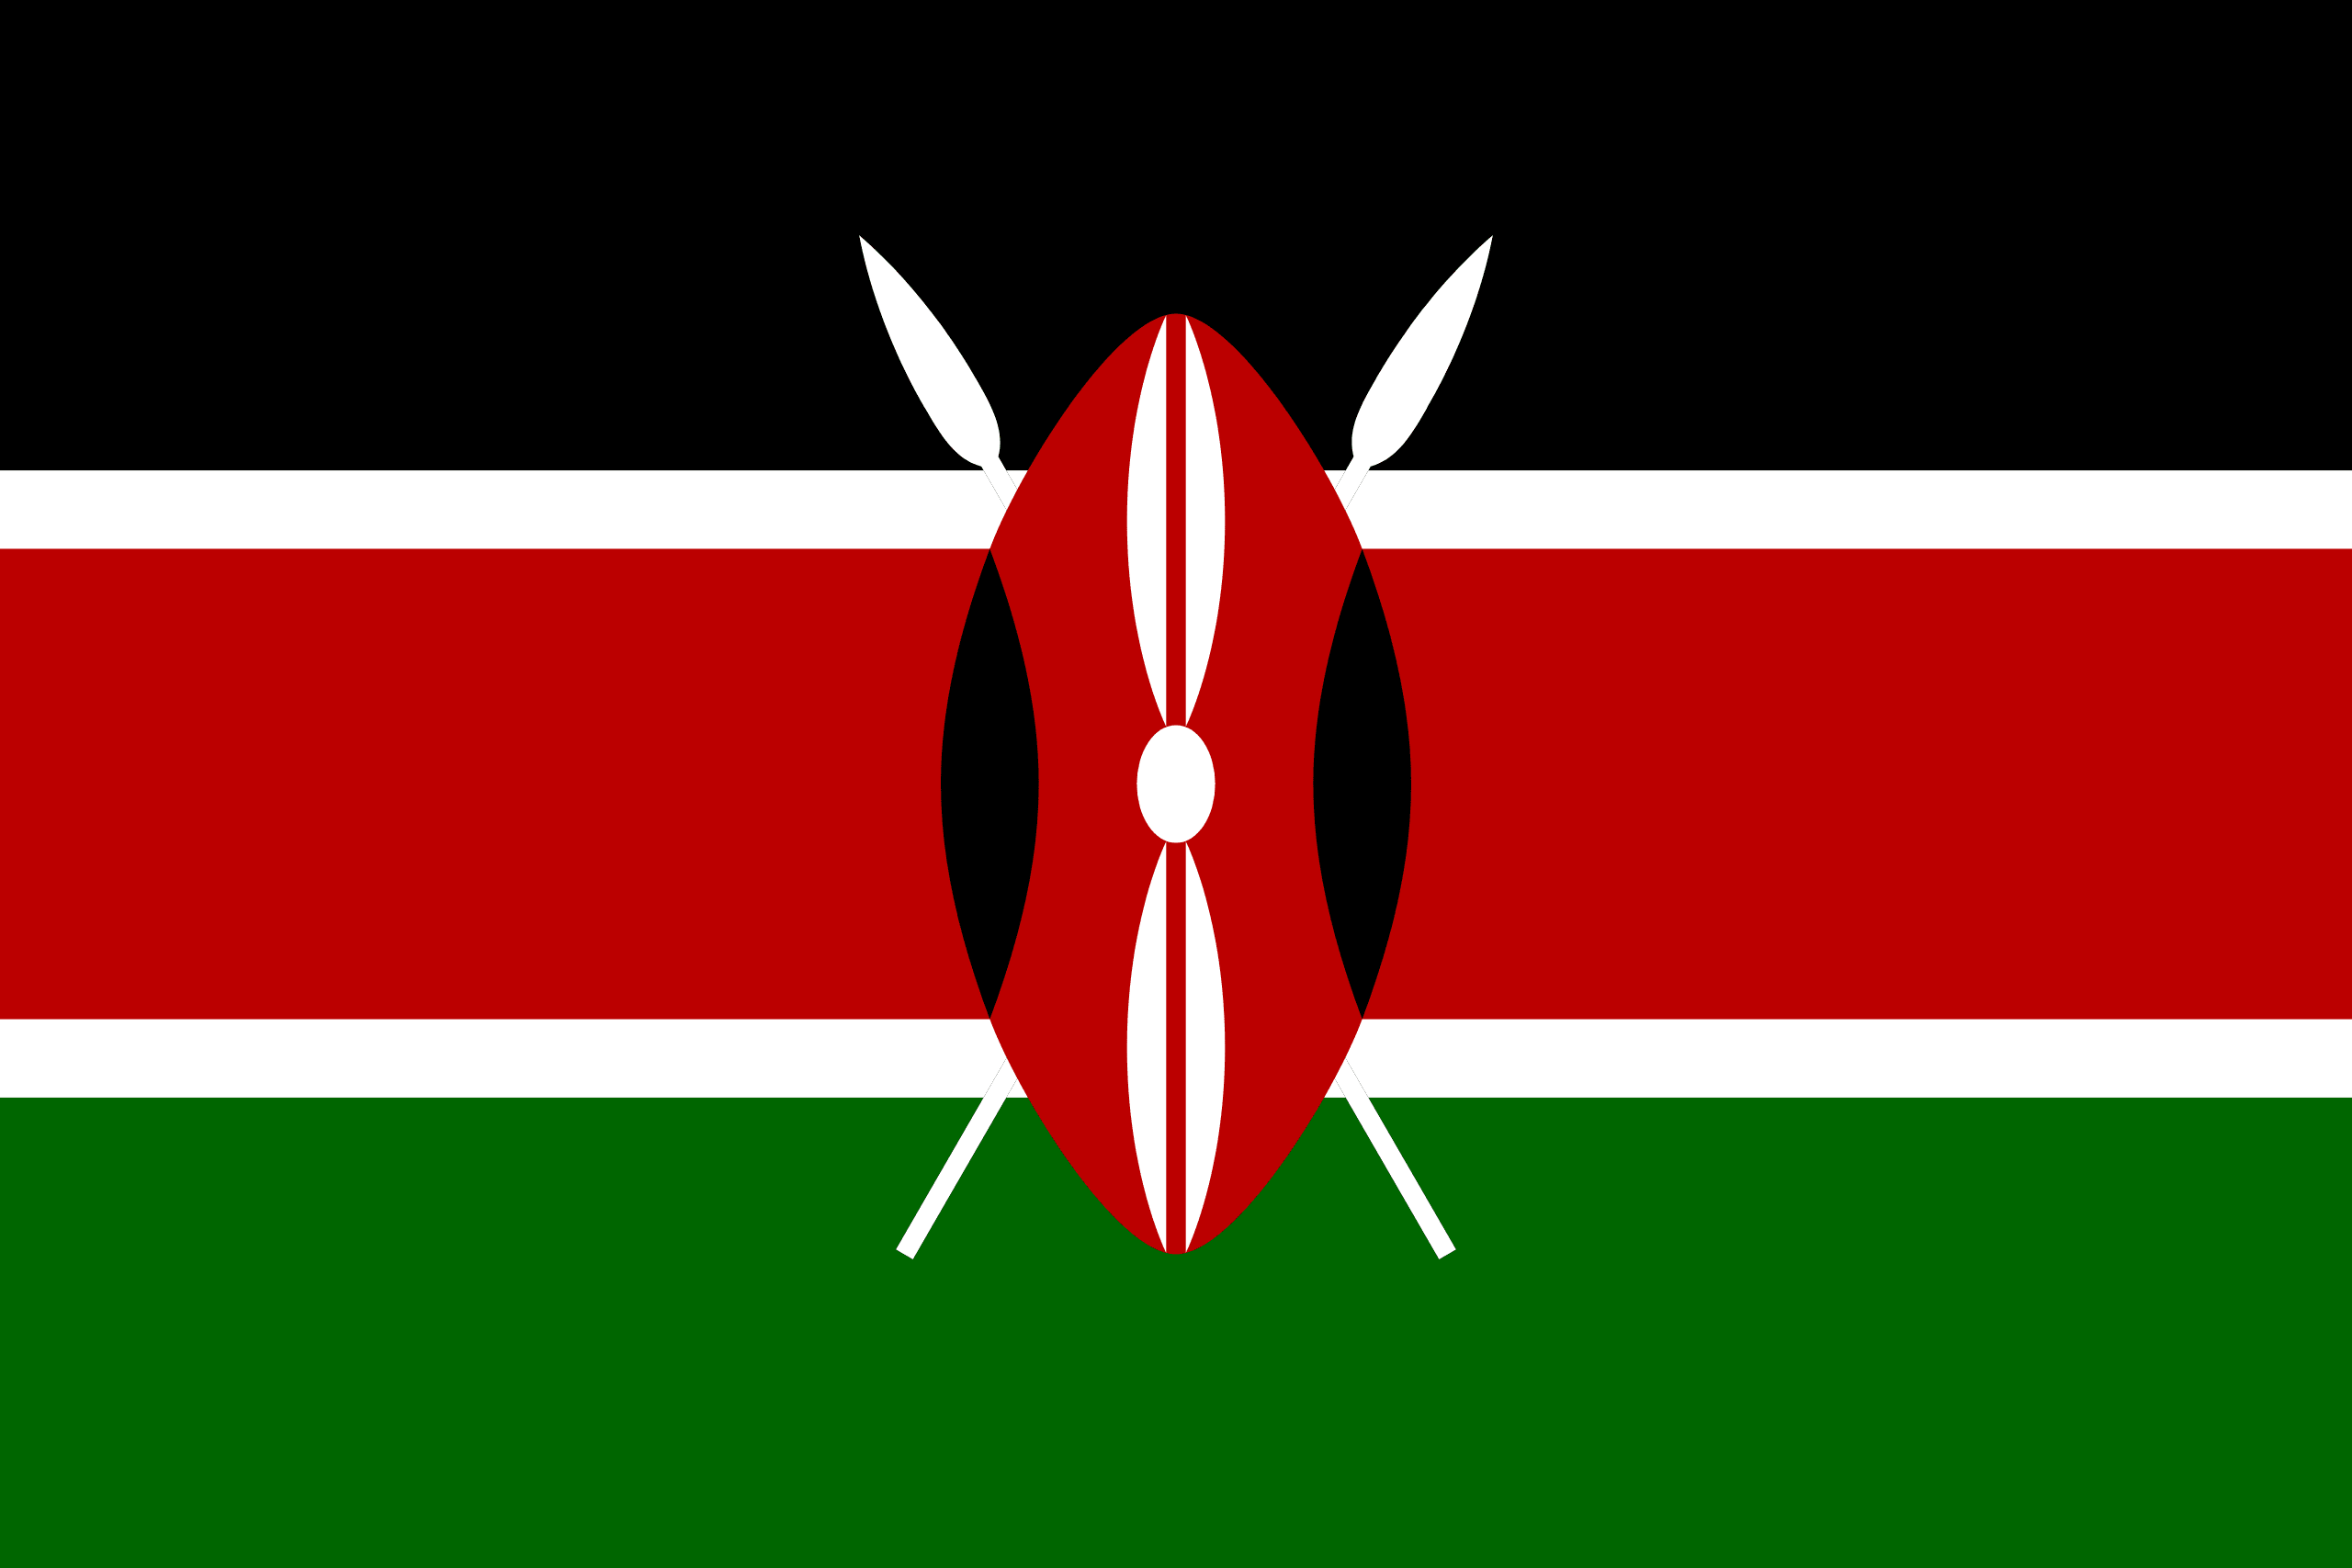

Kiribati


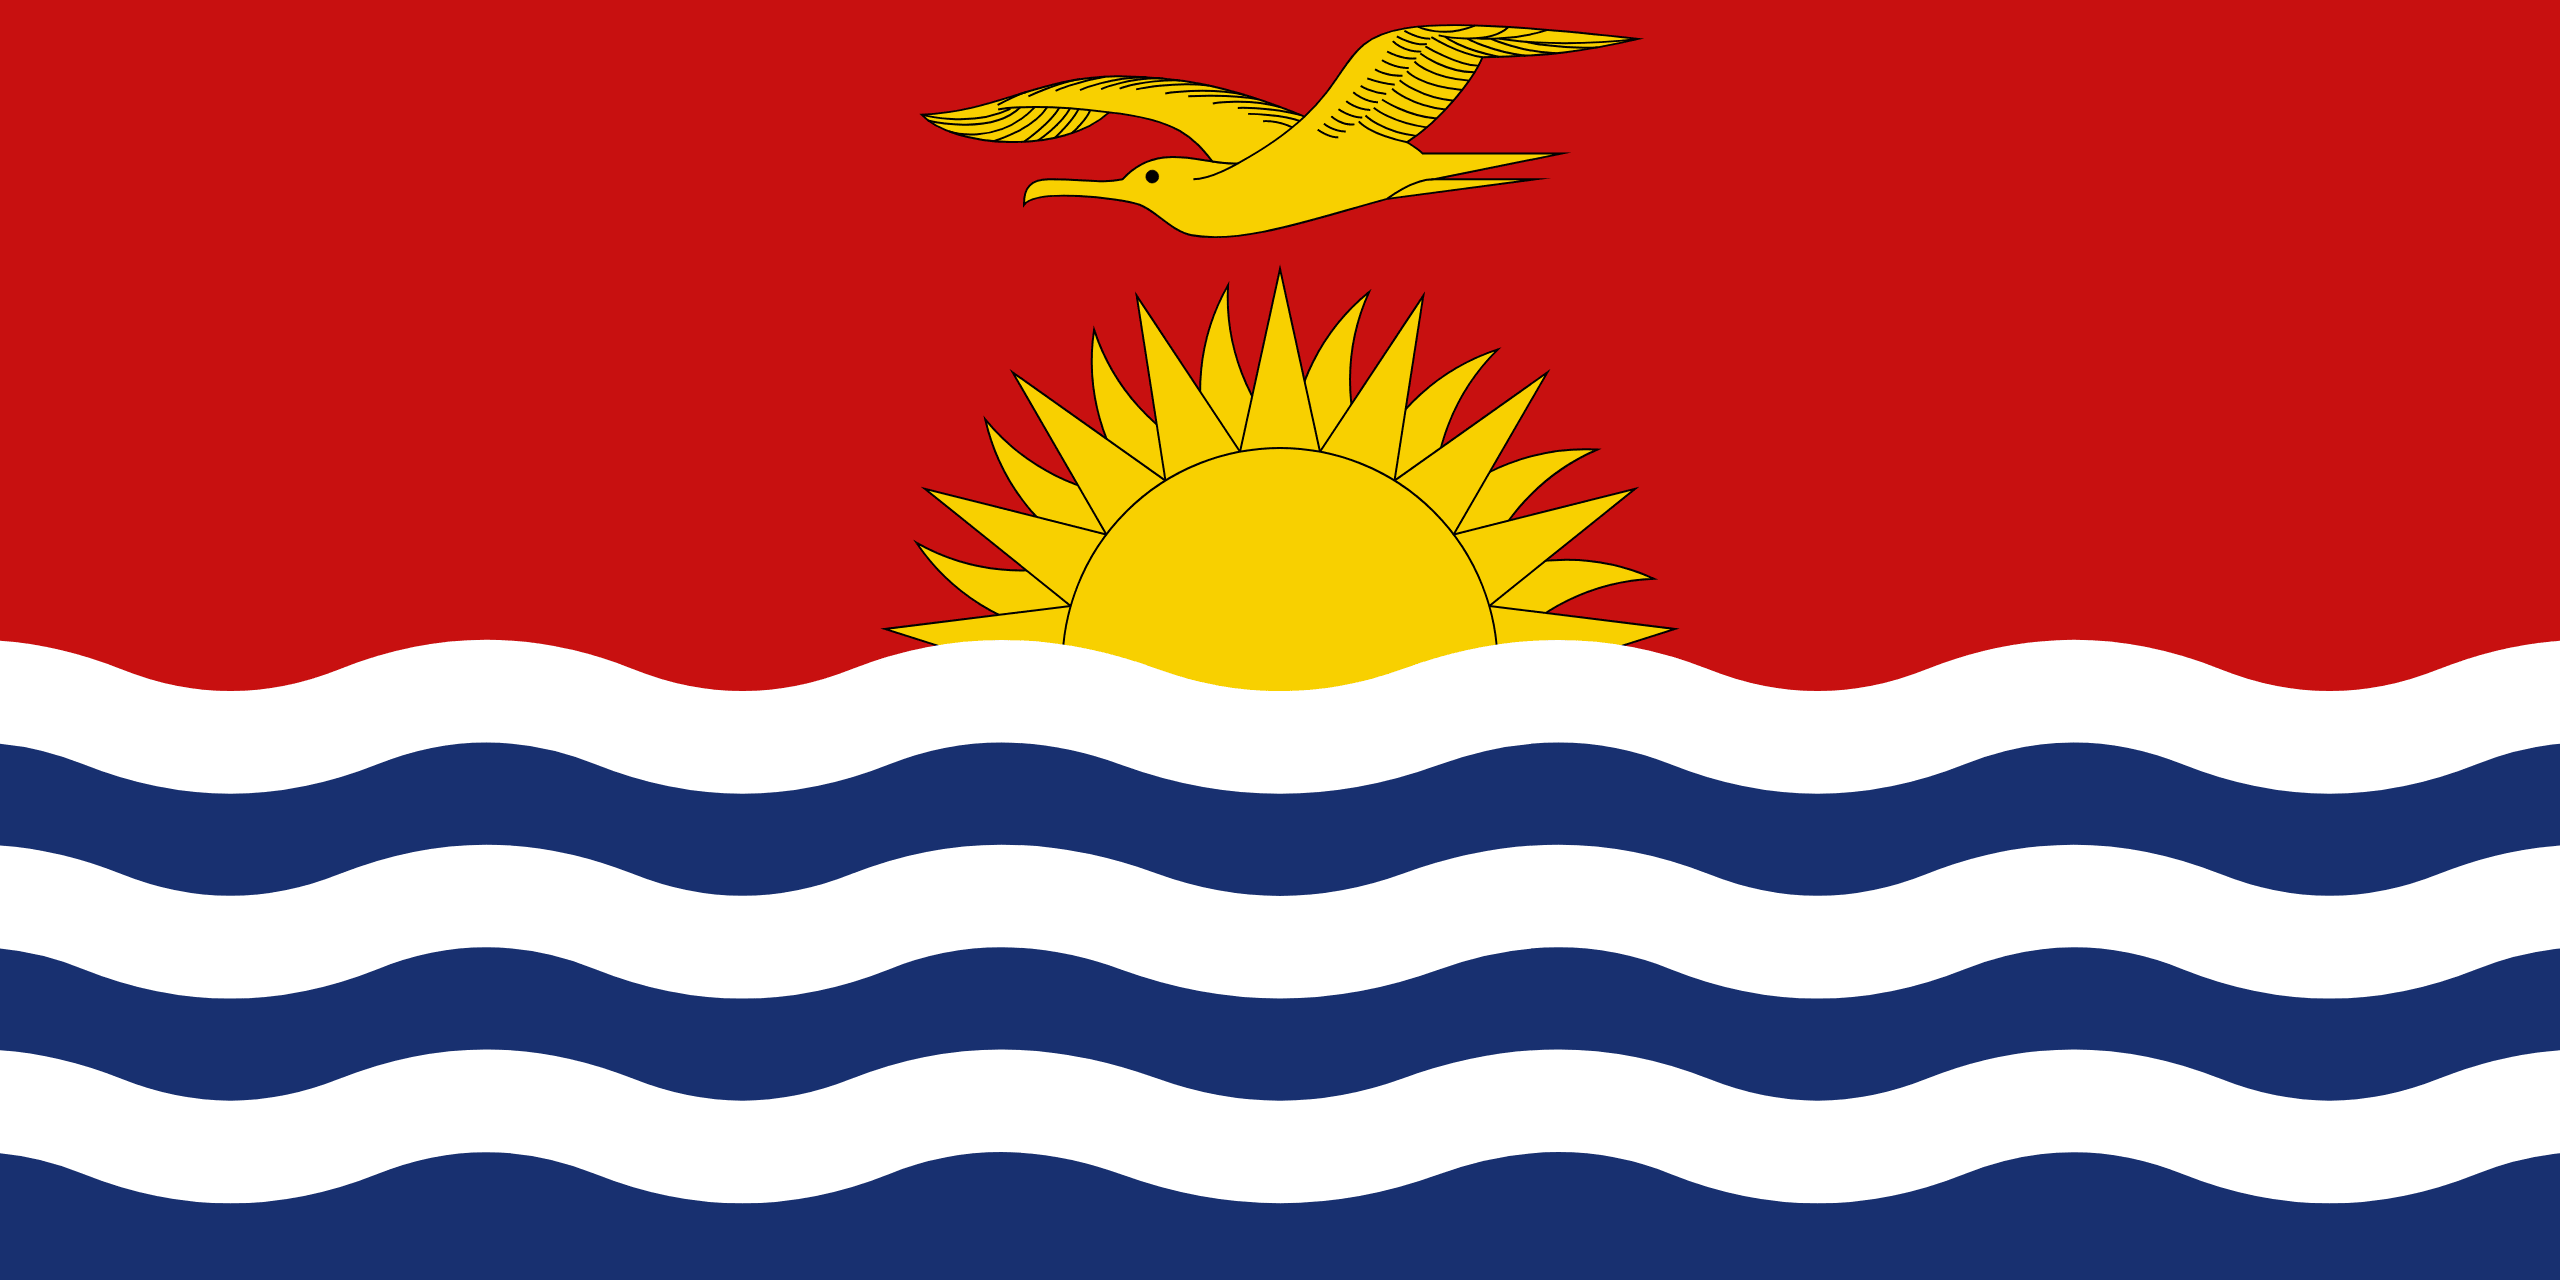

North Korea


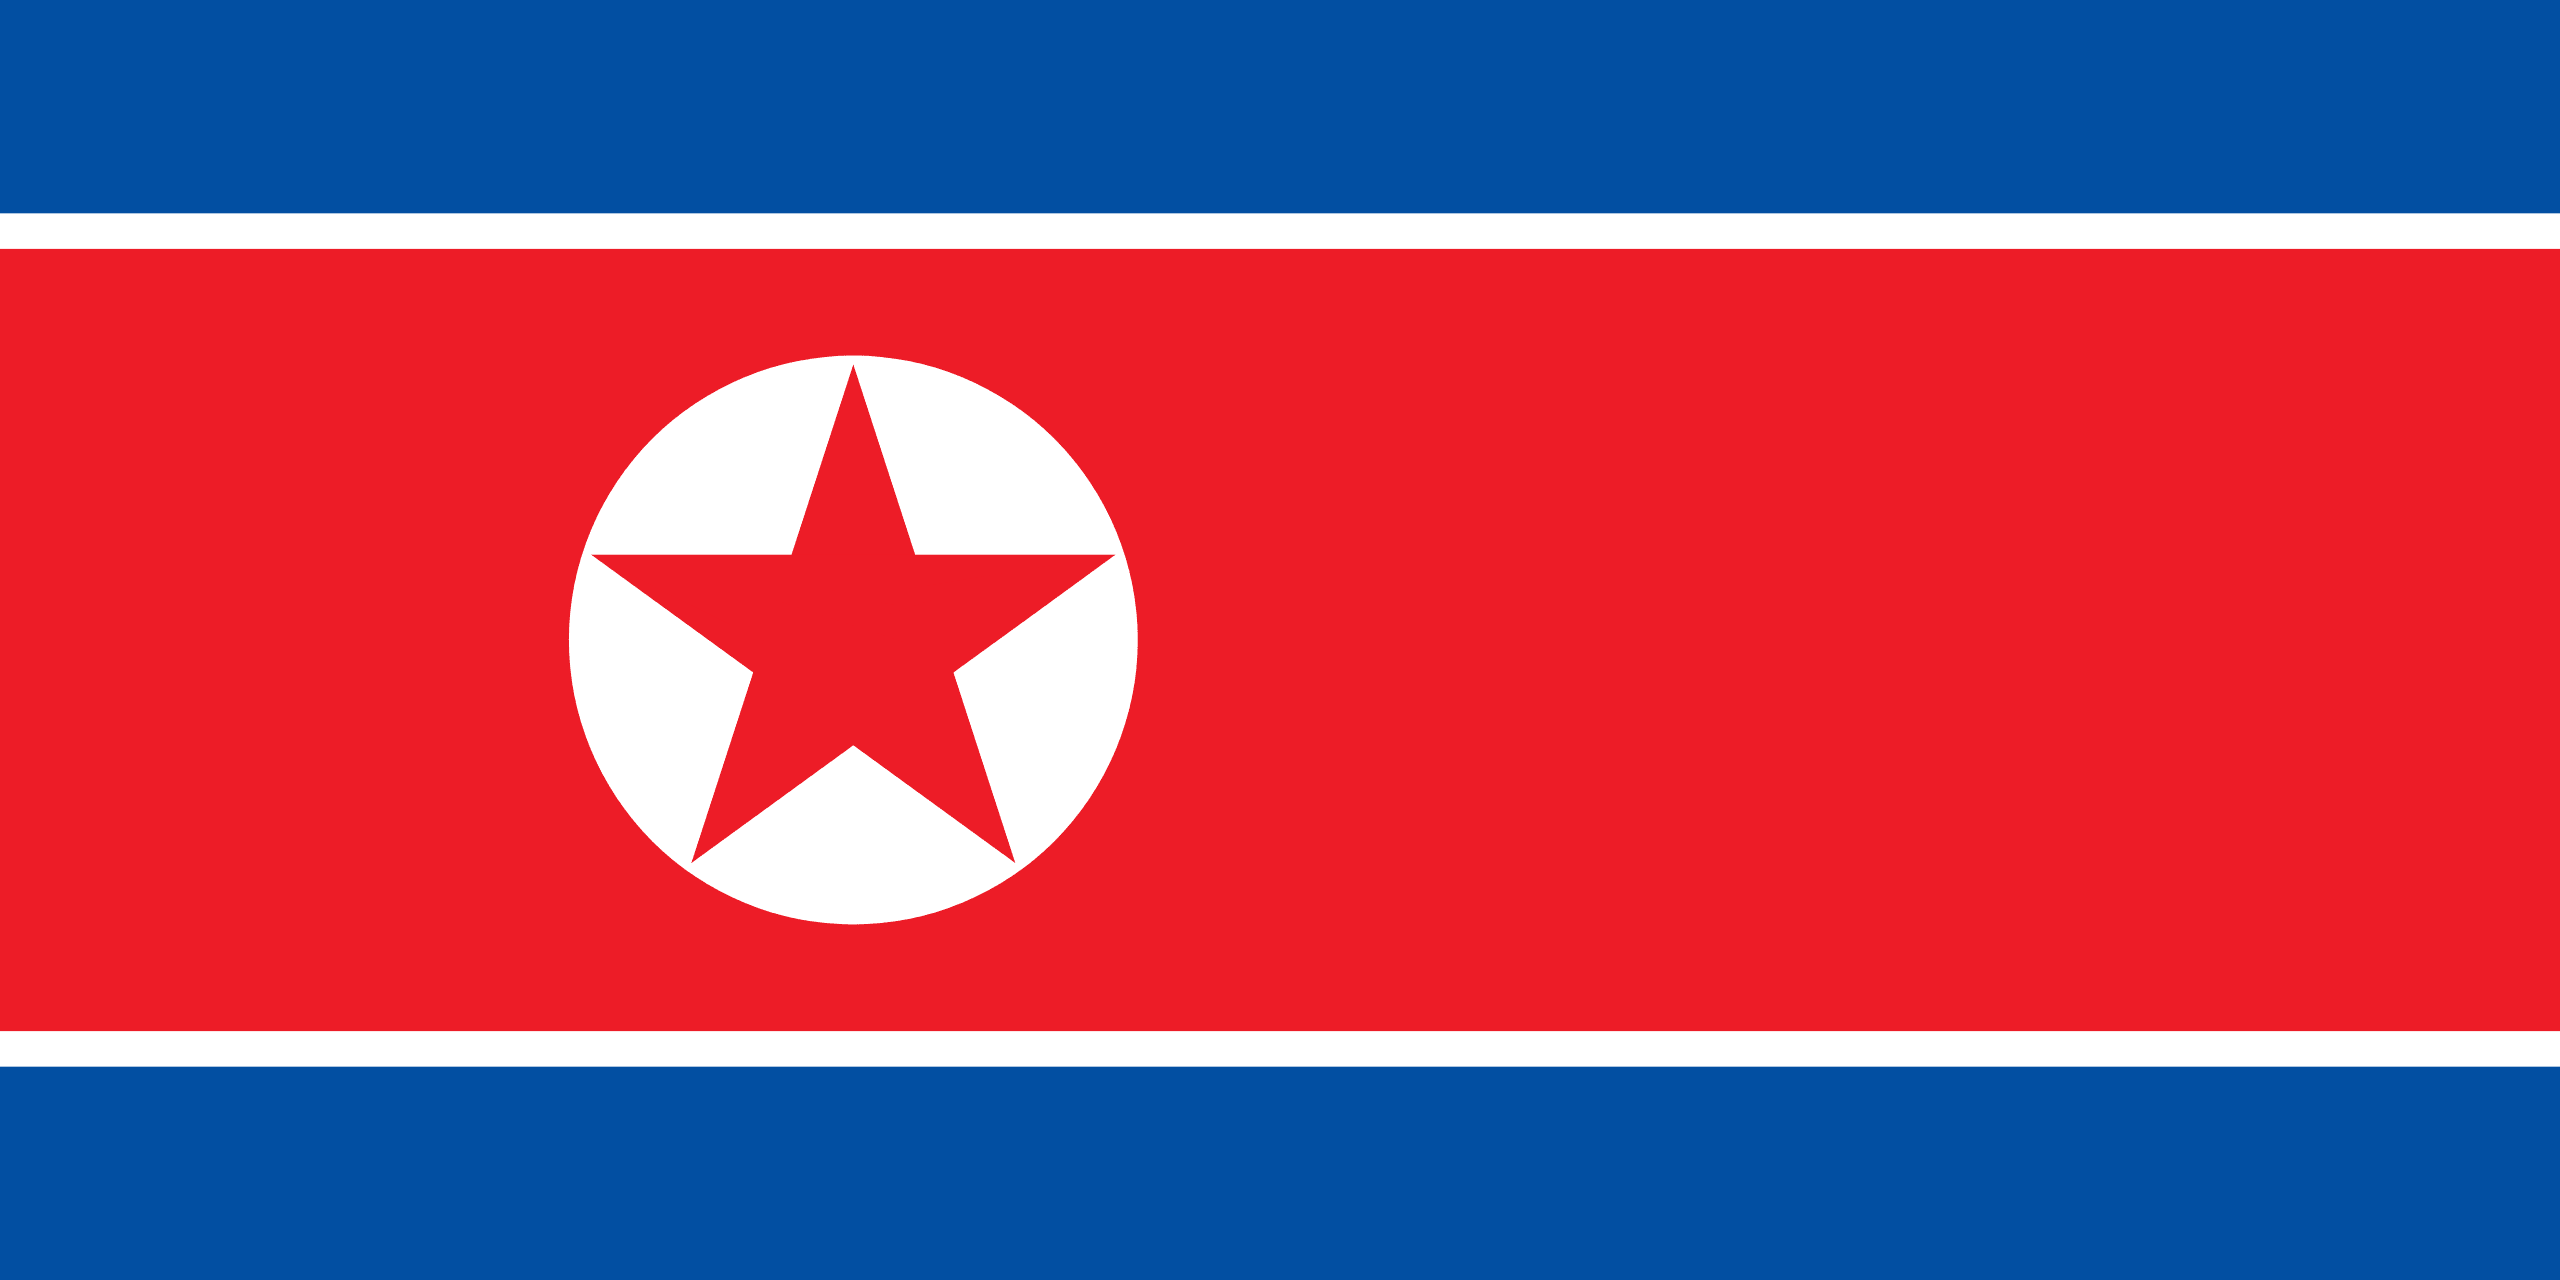

South Korea


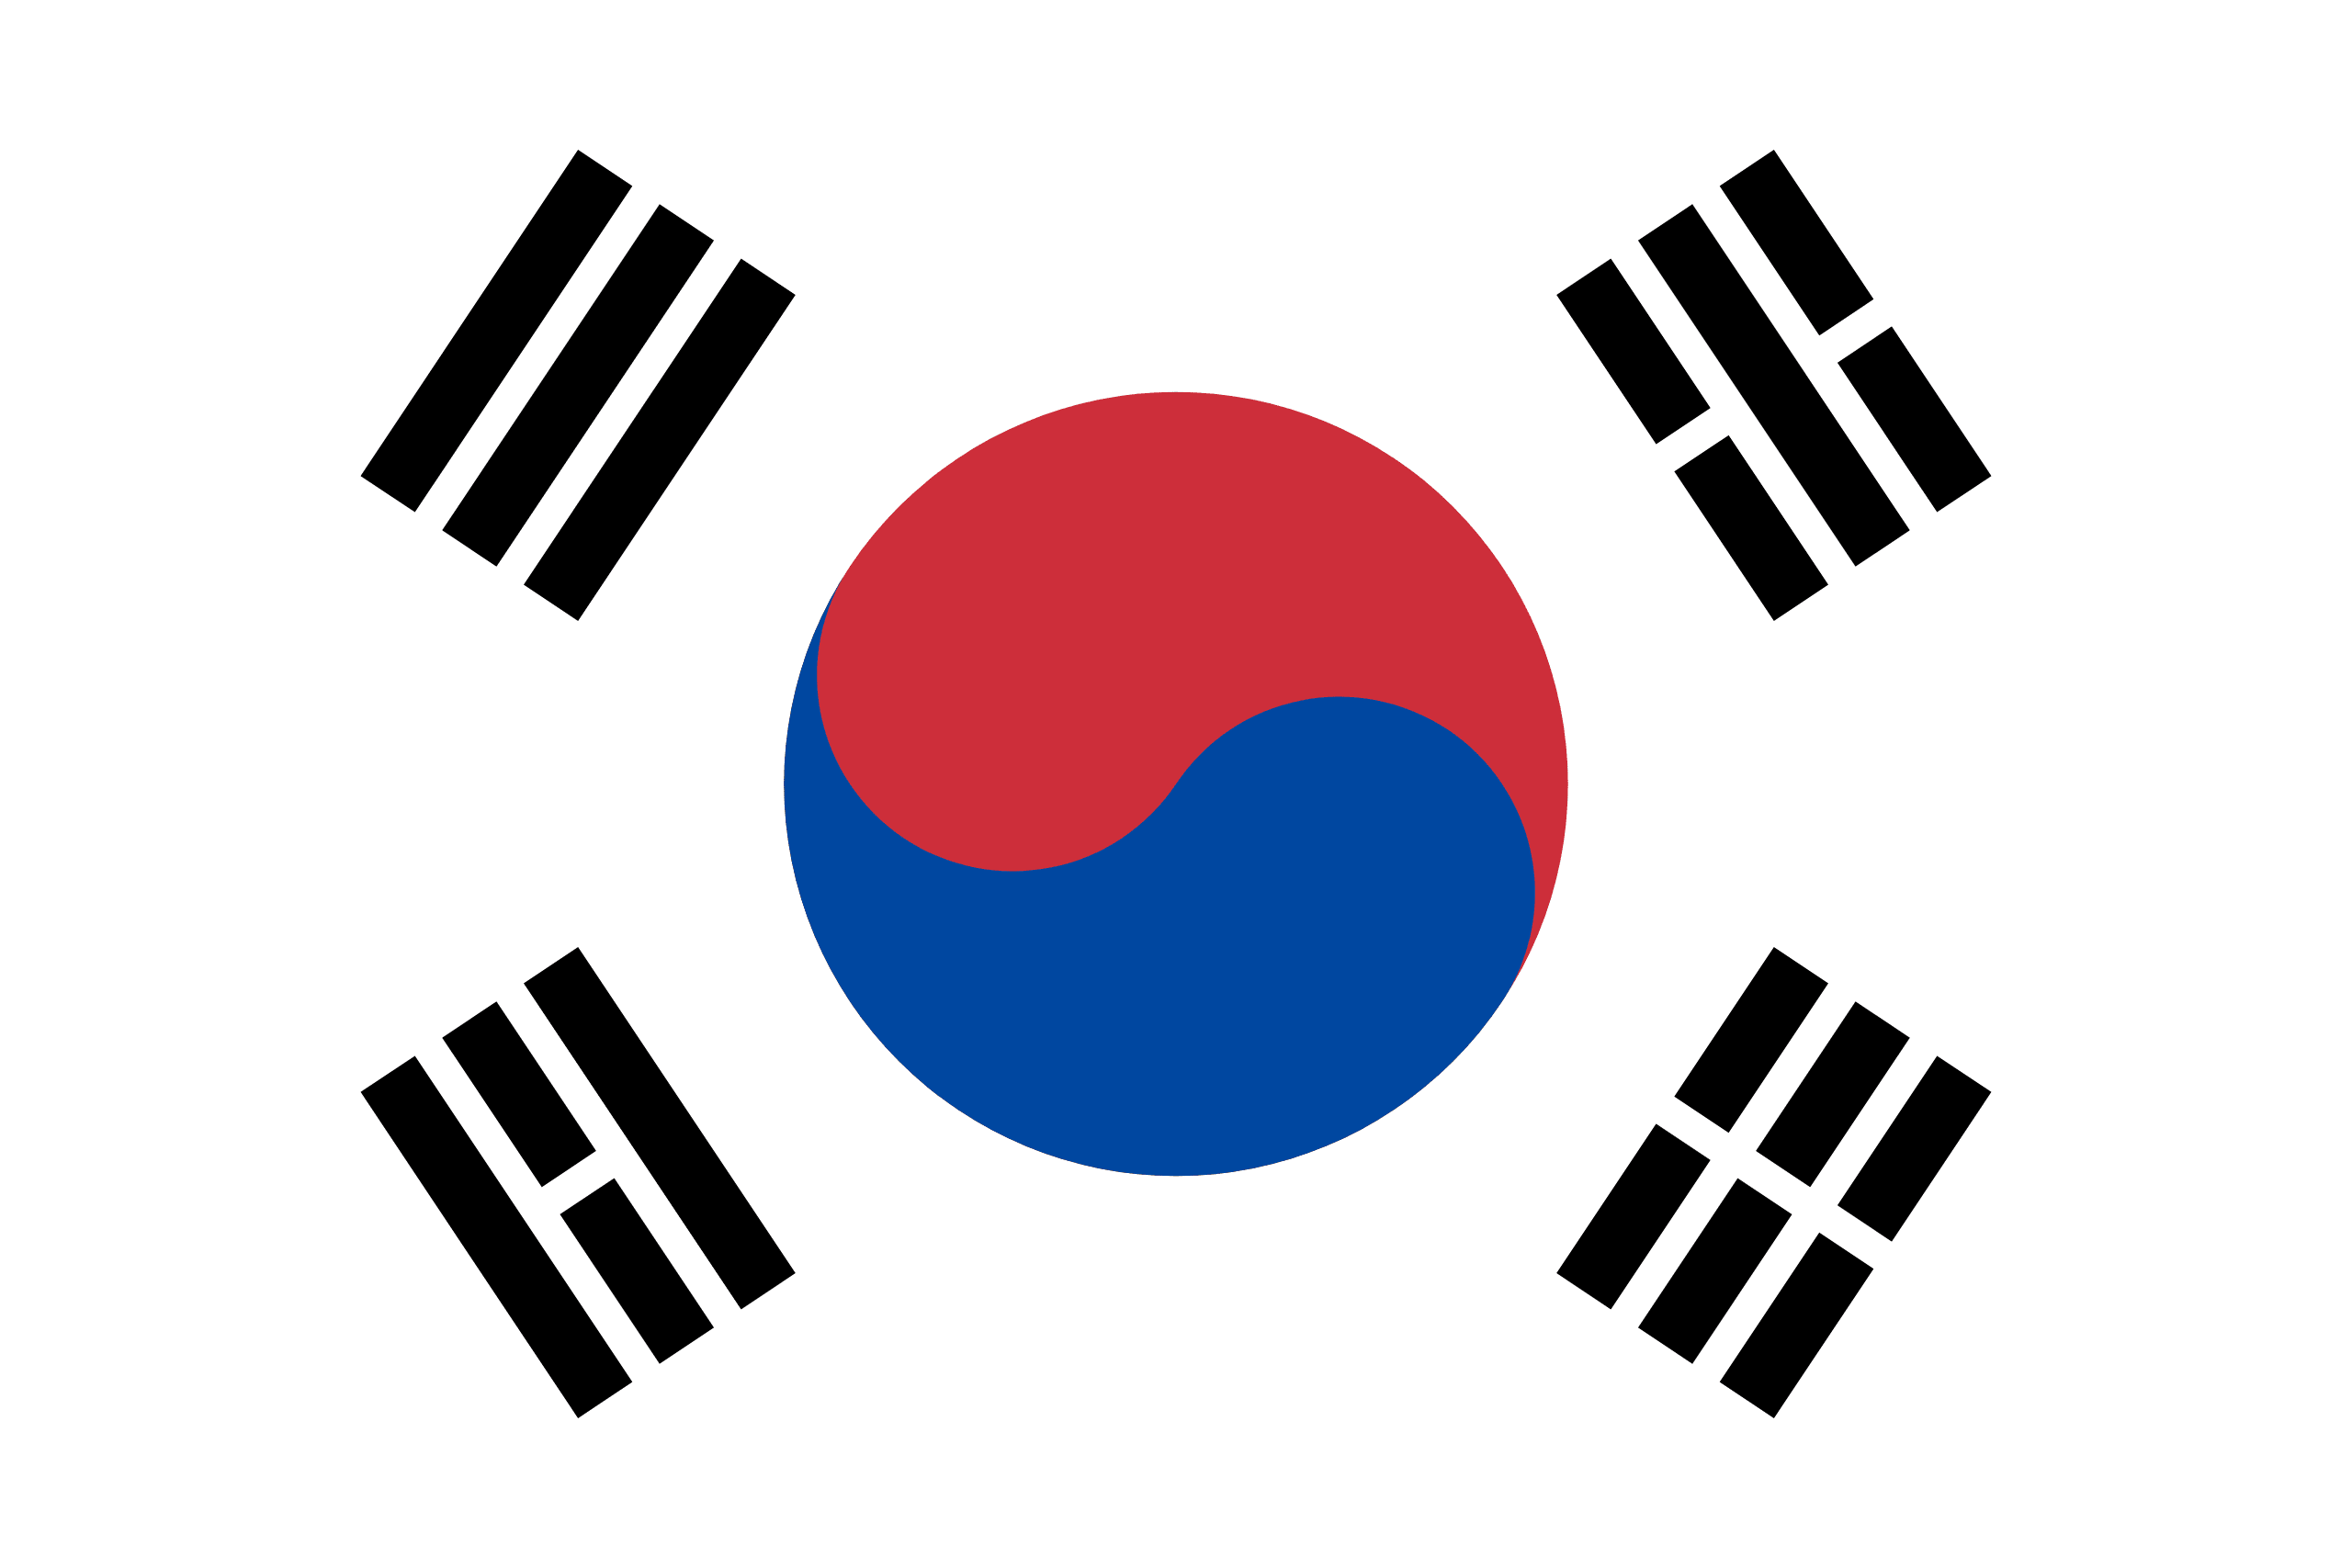

Kosovo


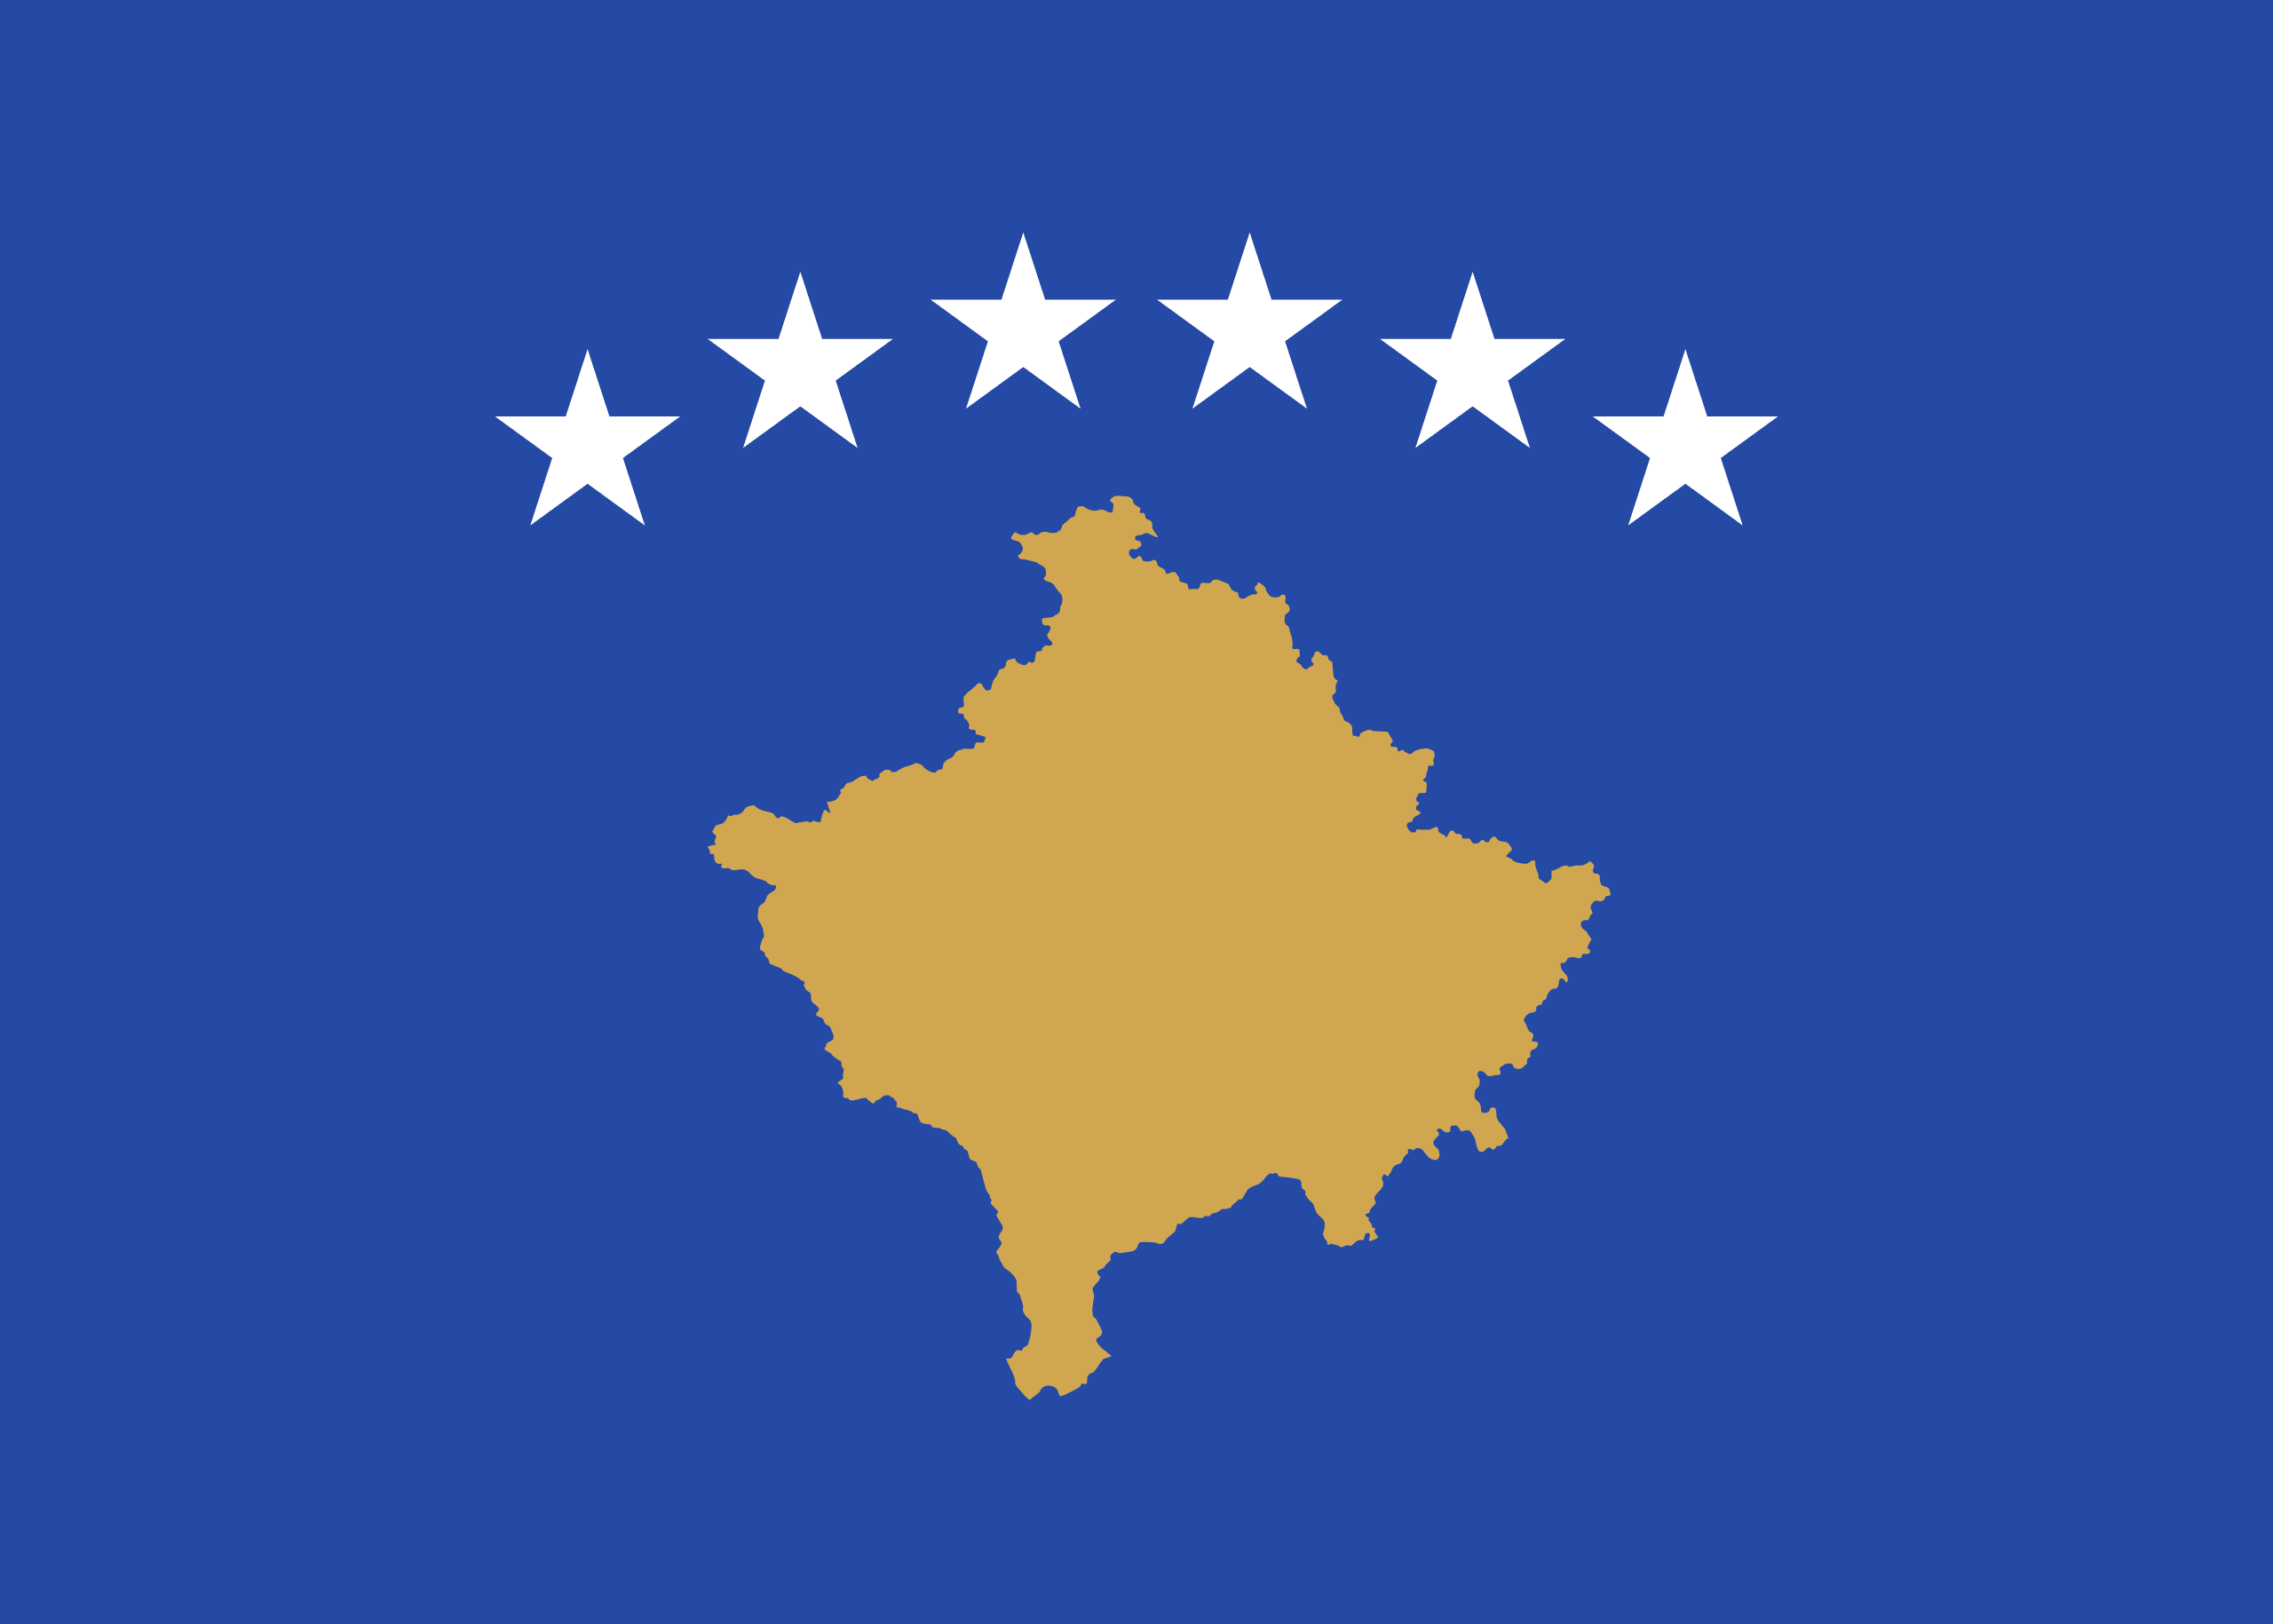

Kuwait


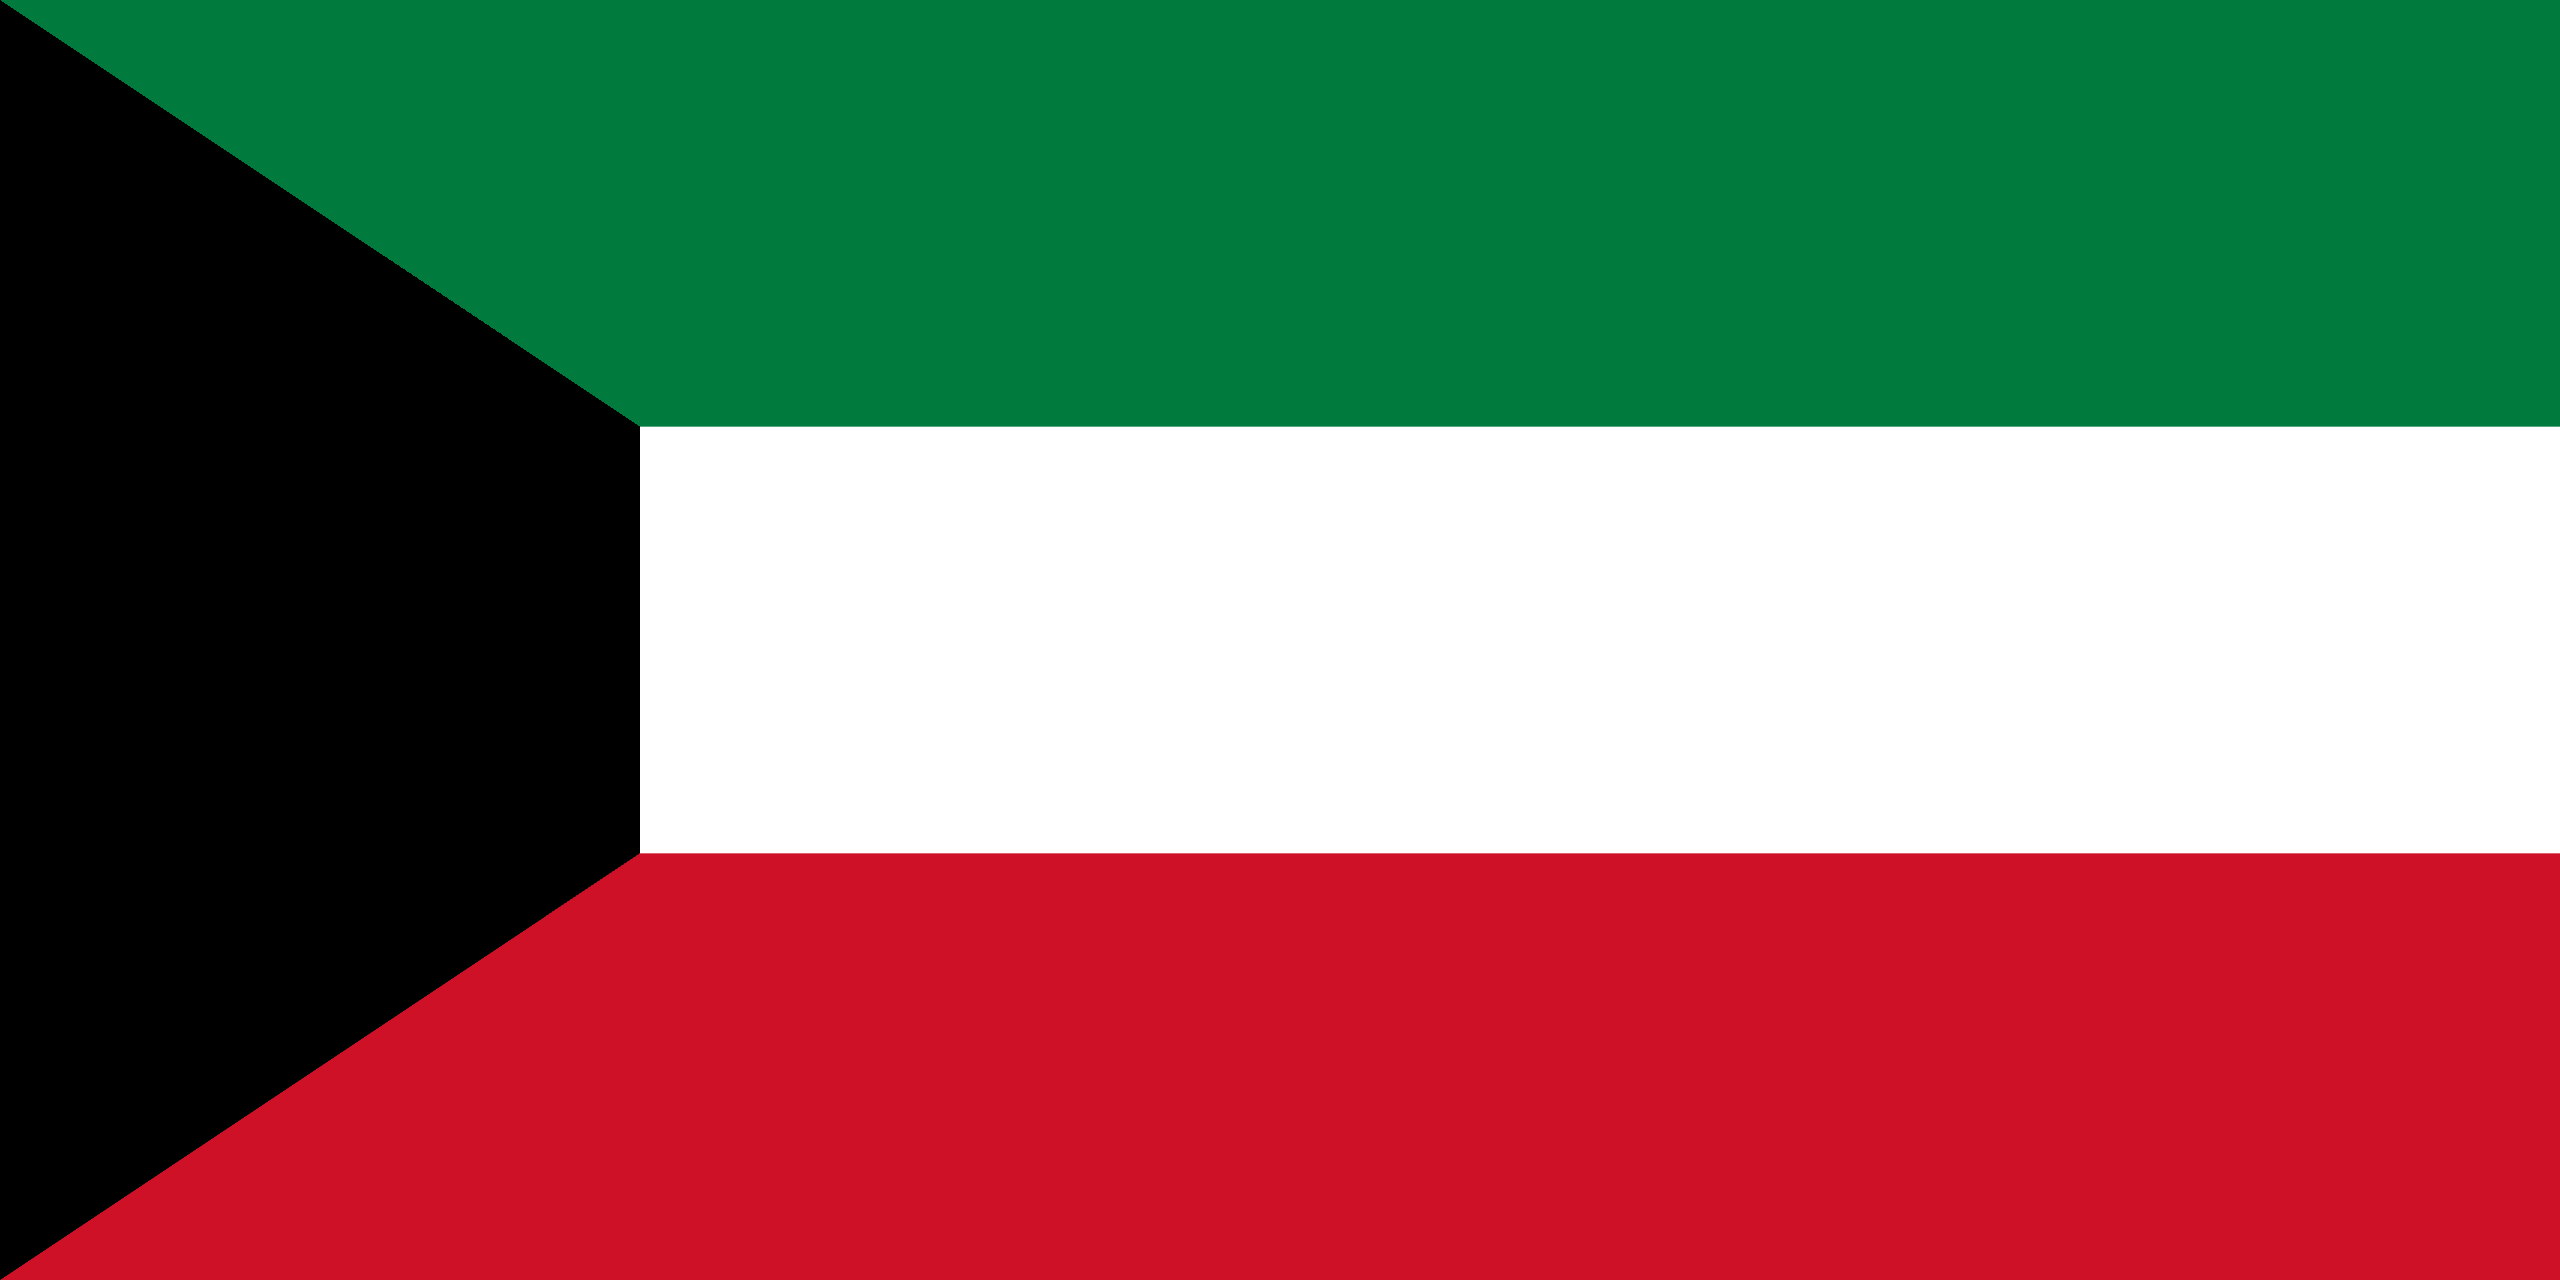

Kyrgyzstan


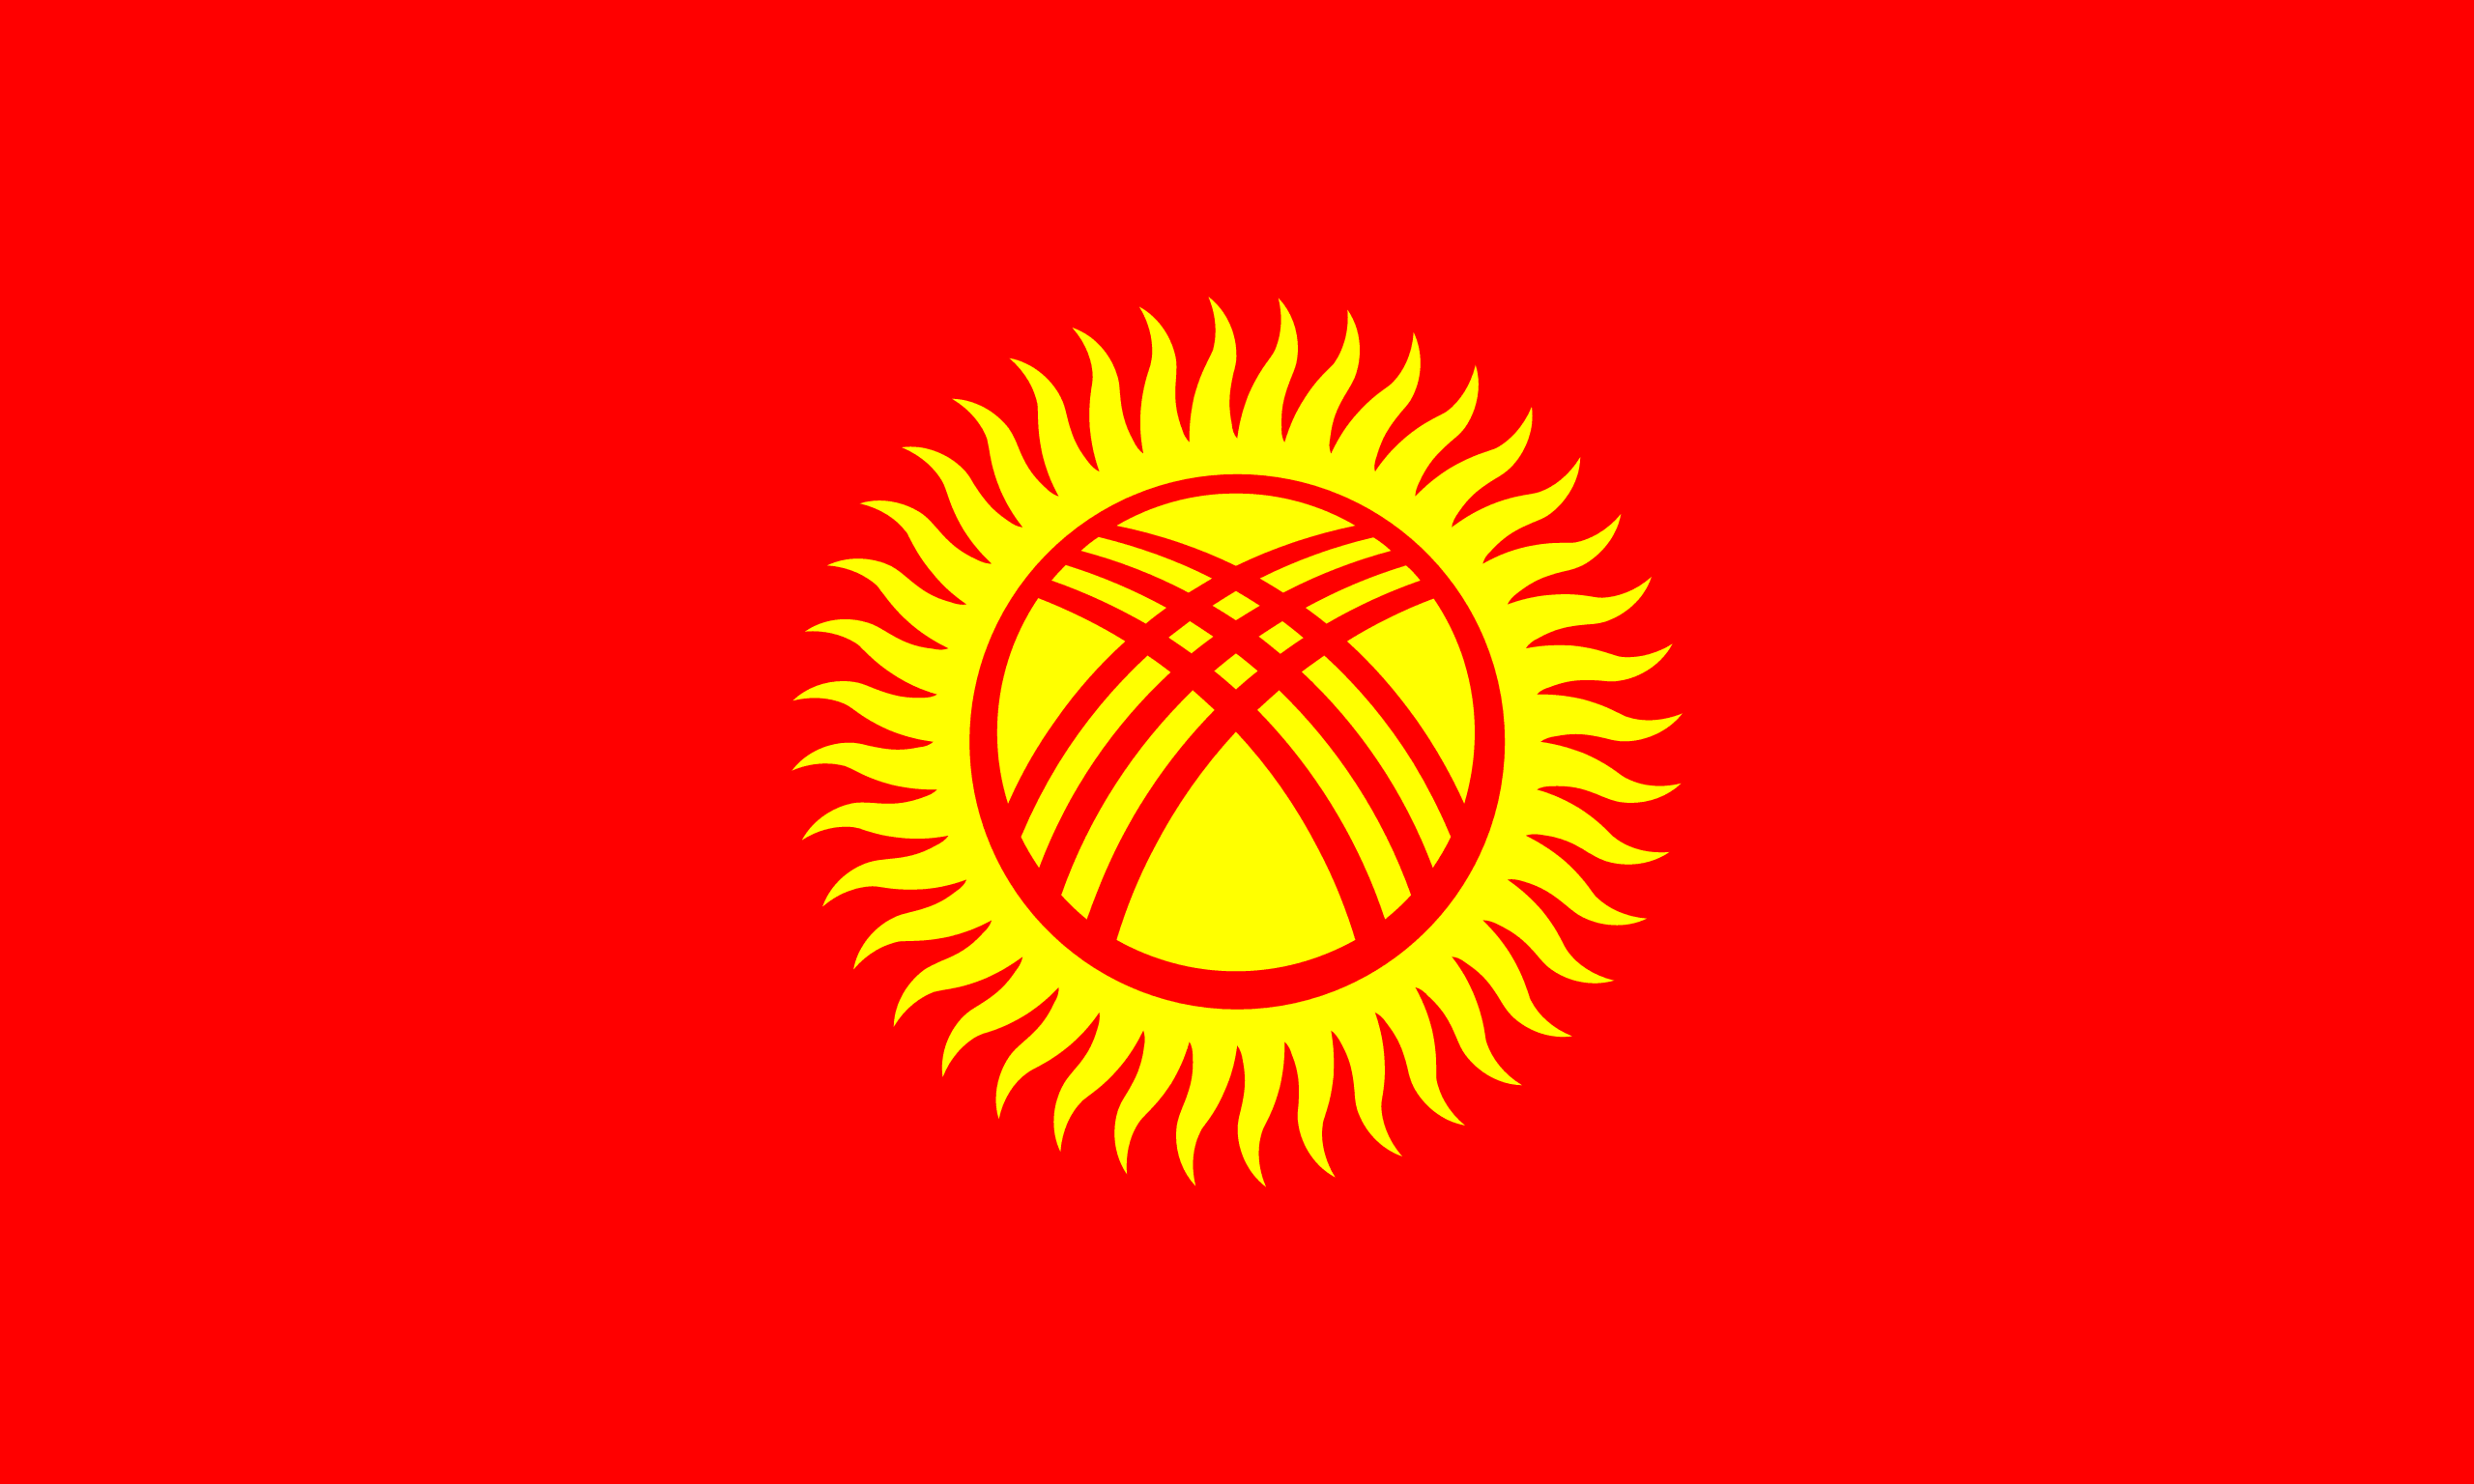

Laos


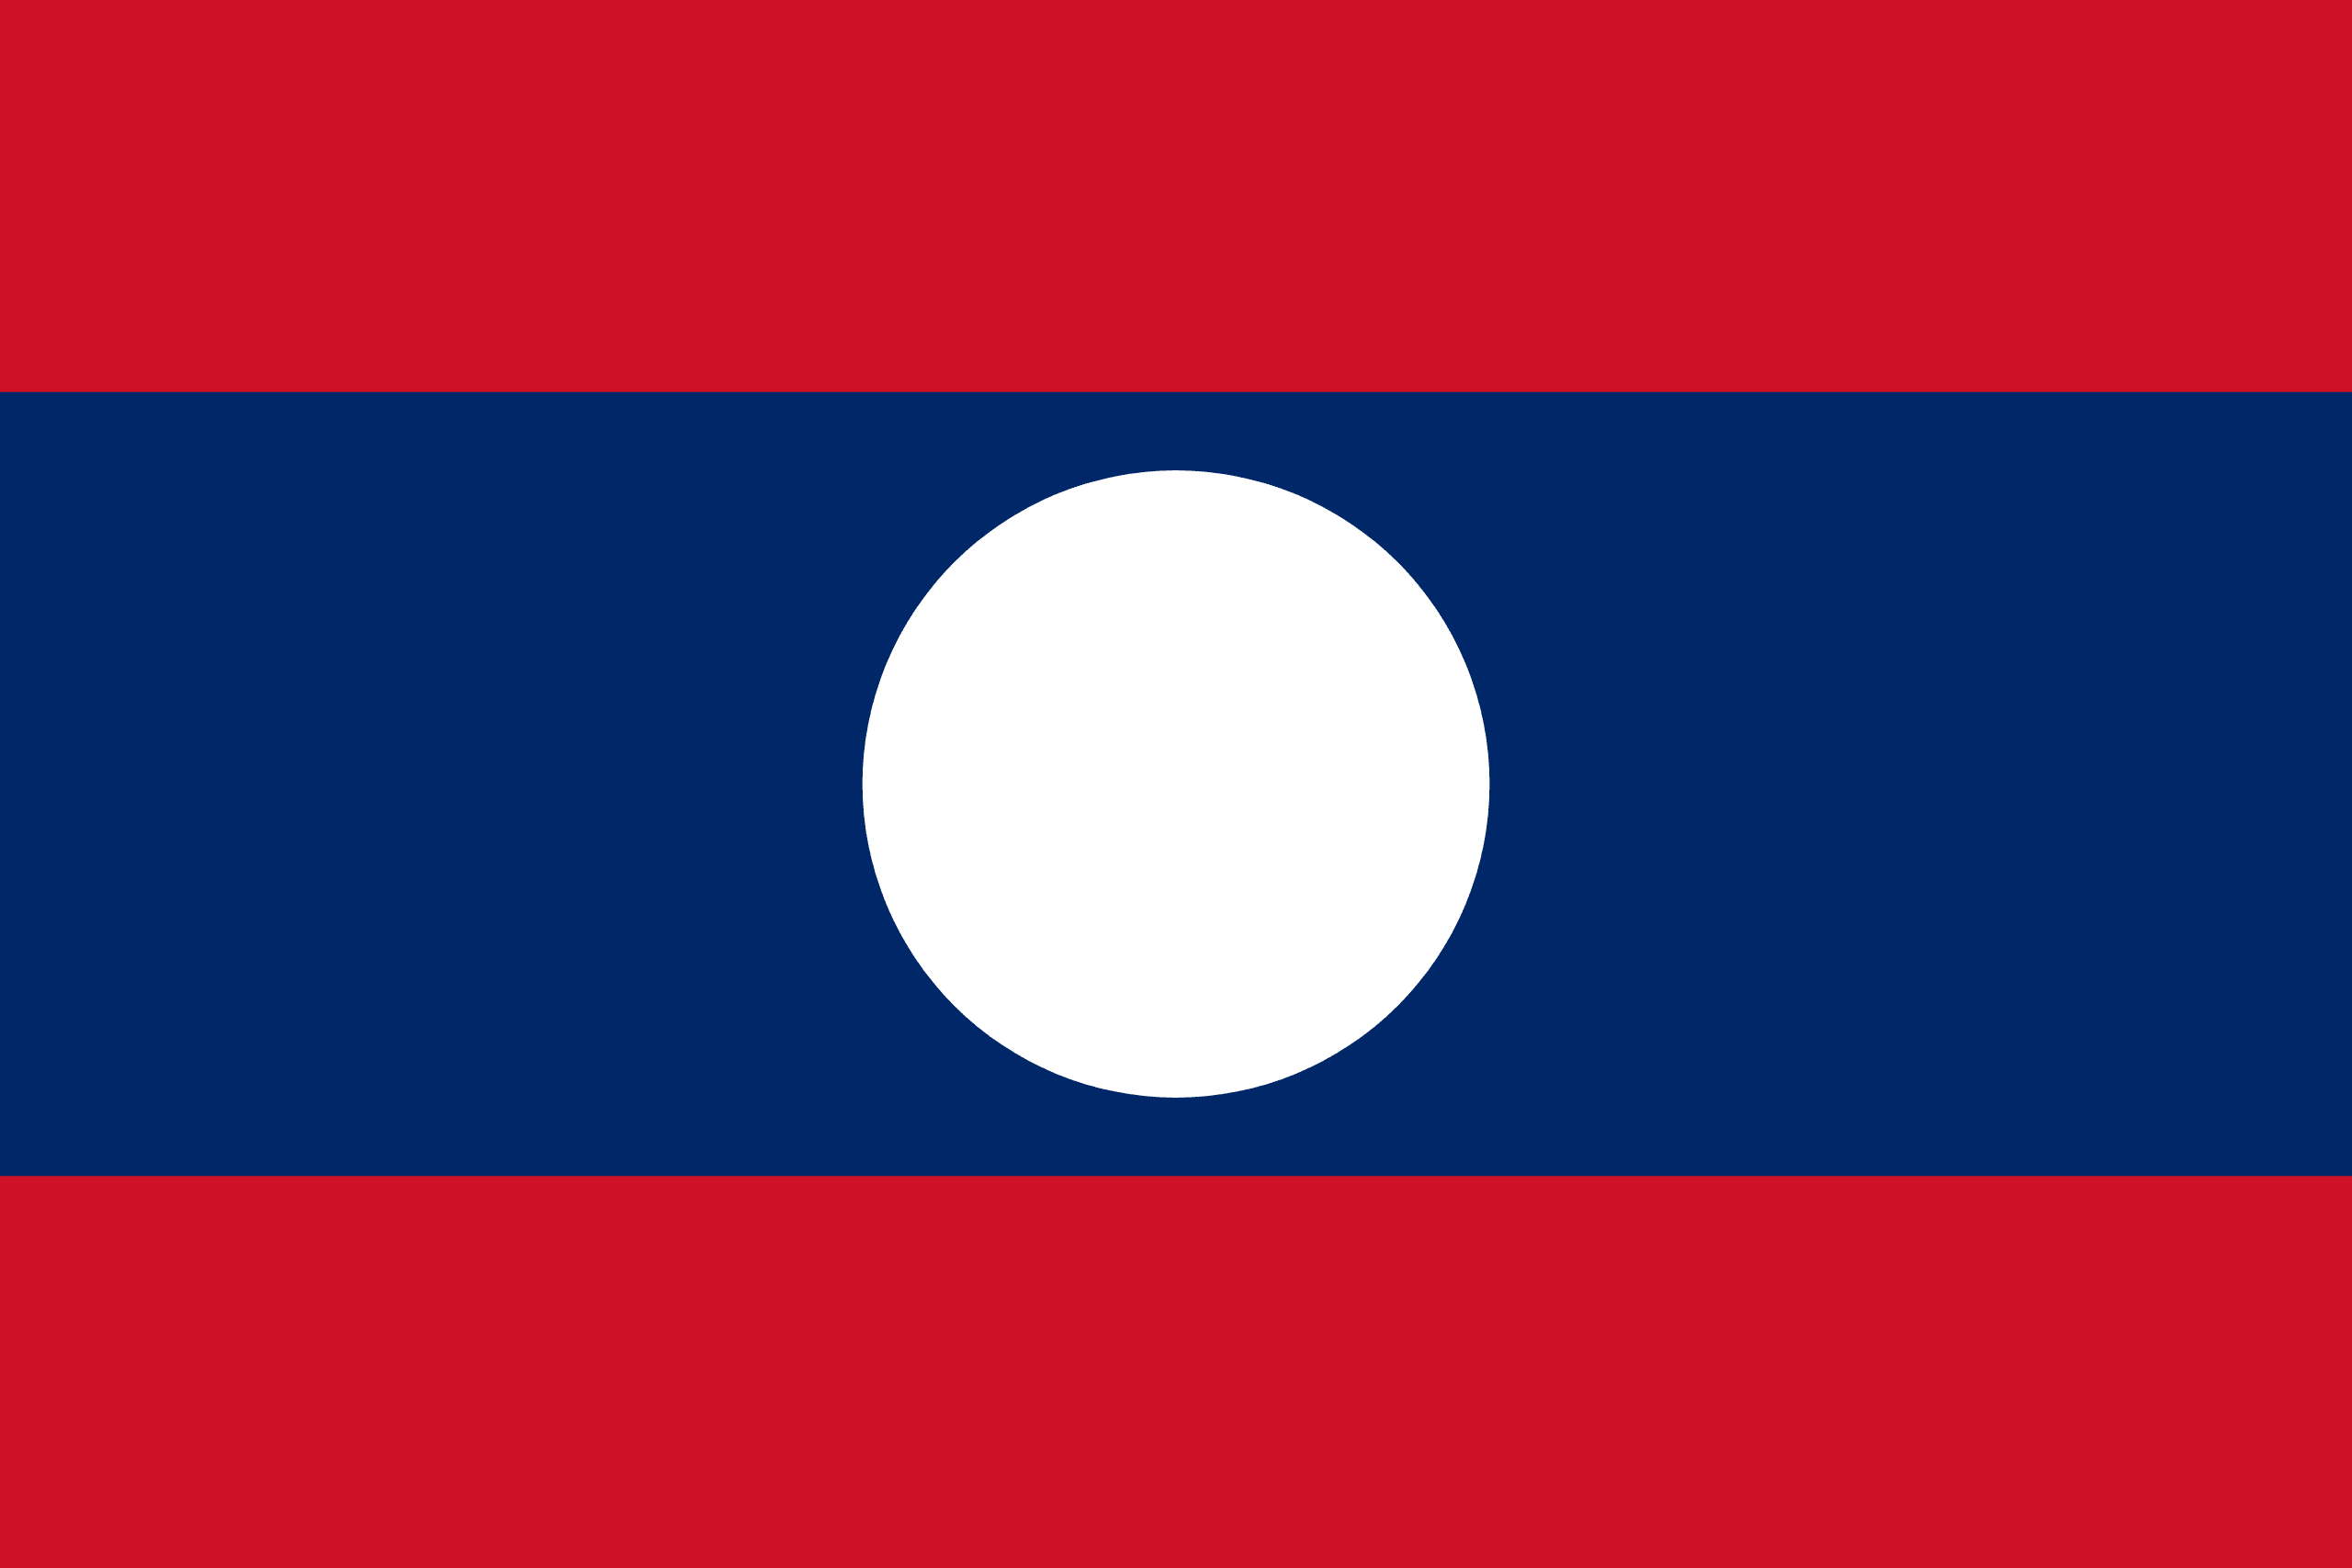

Latvia


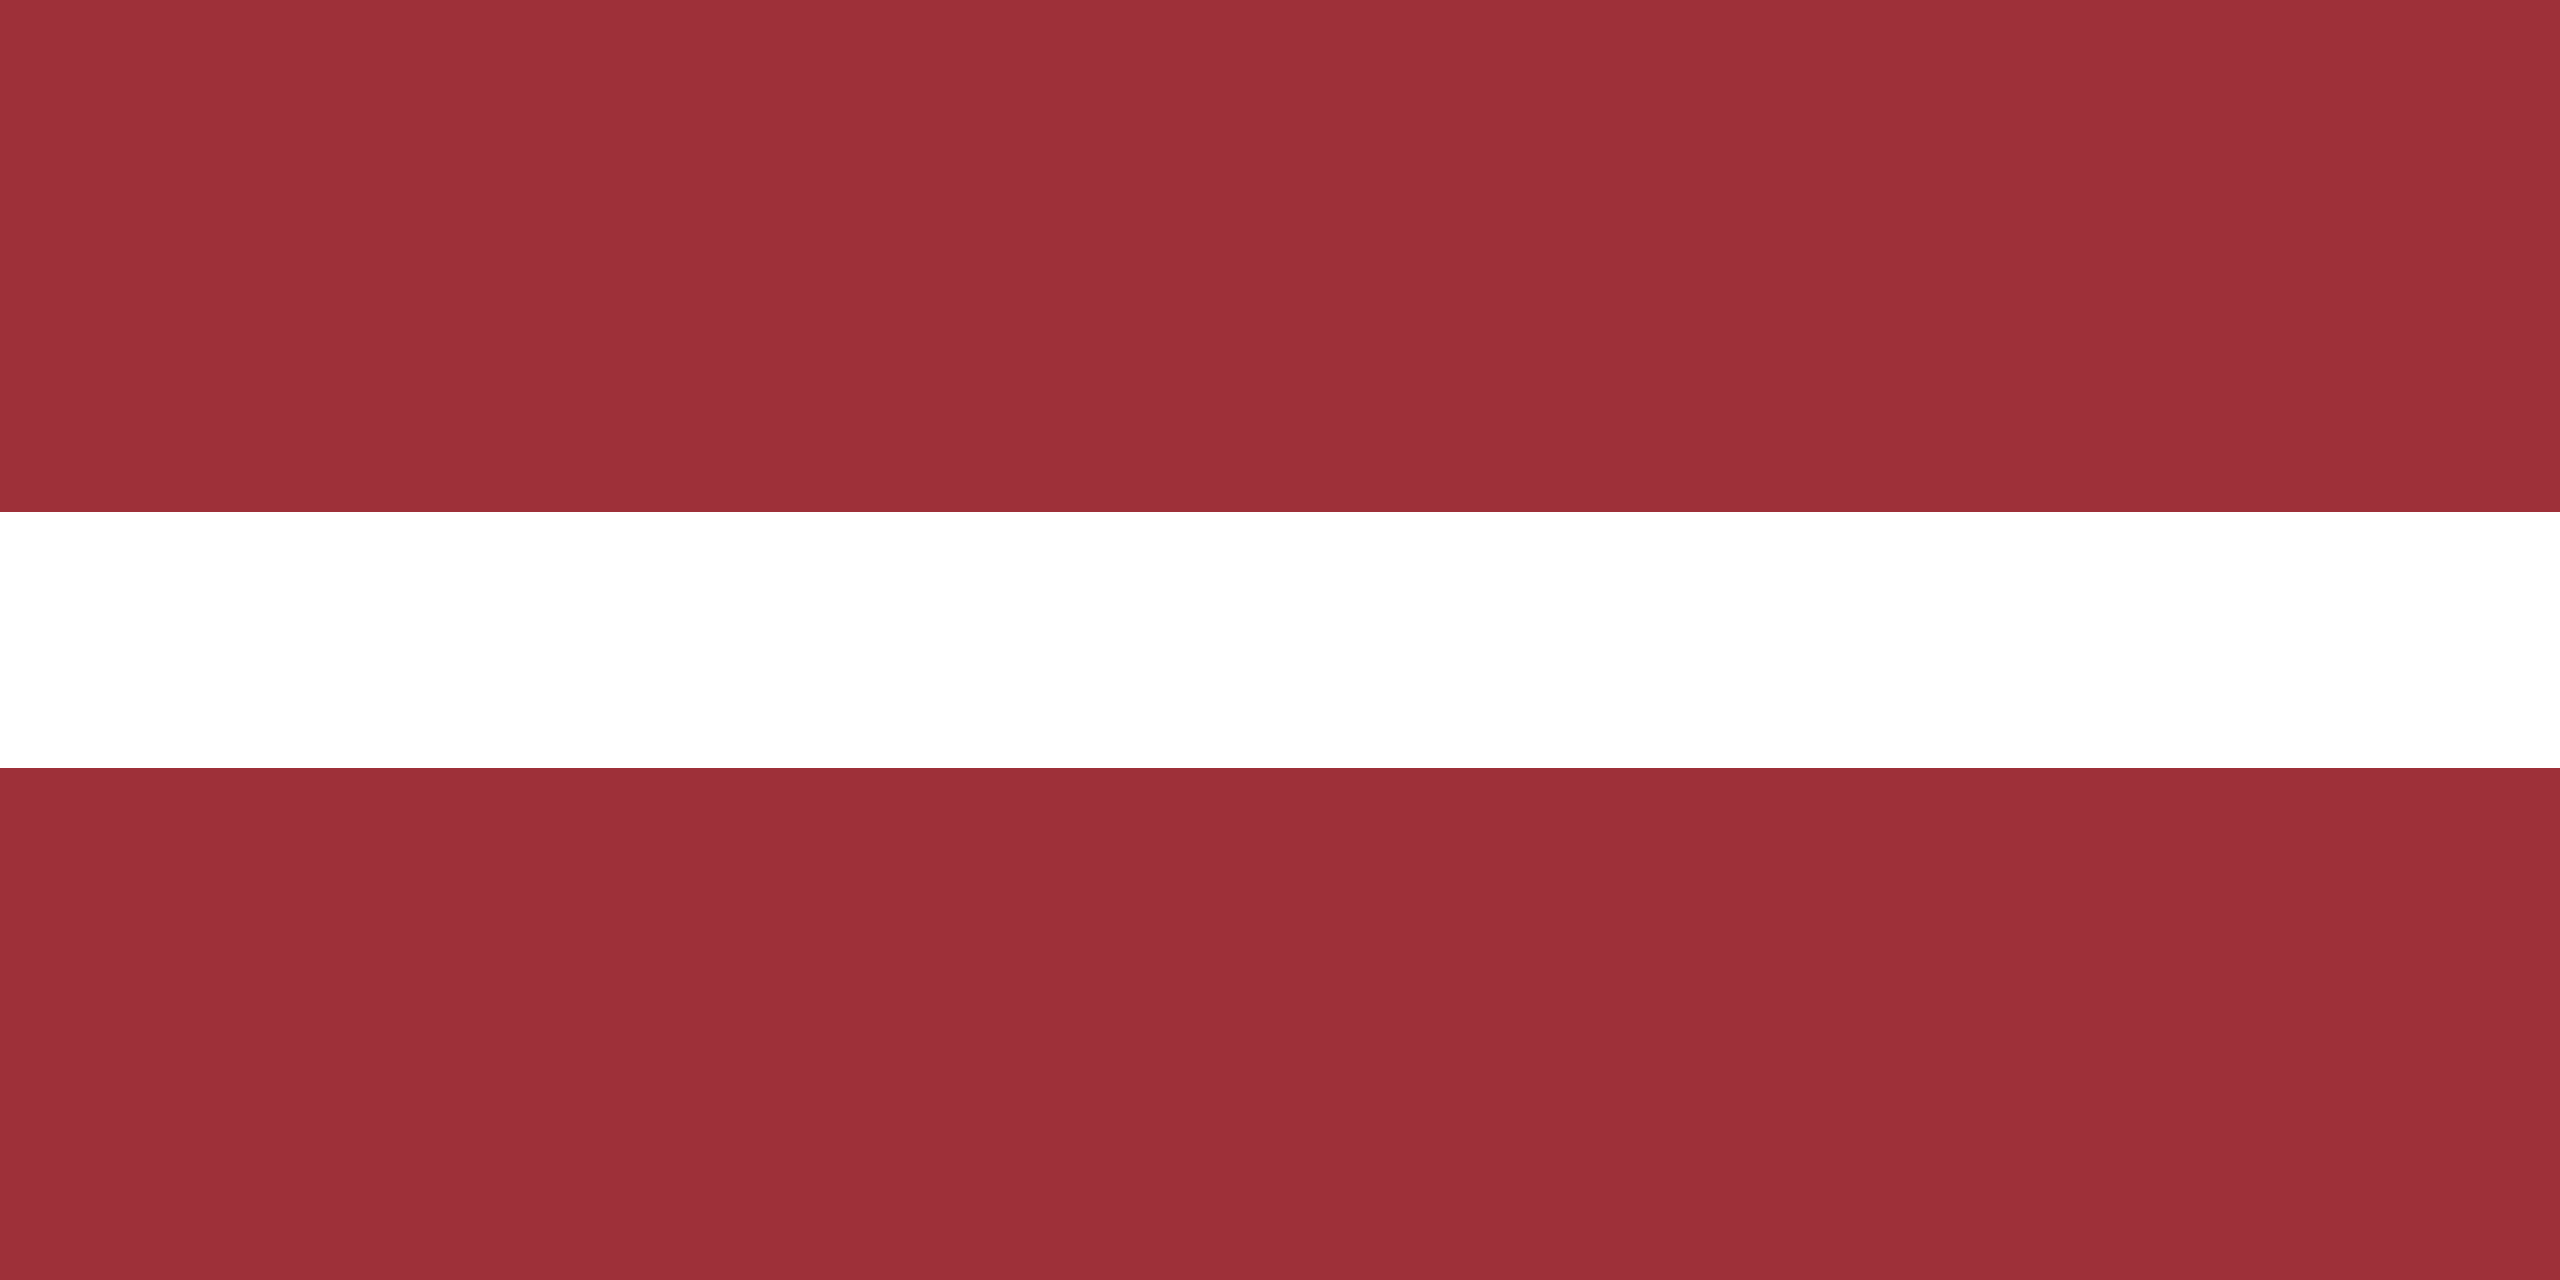

Lebanon


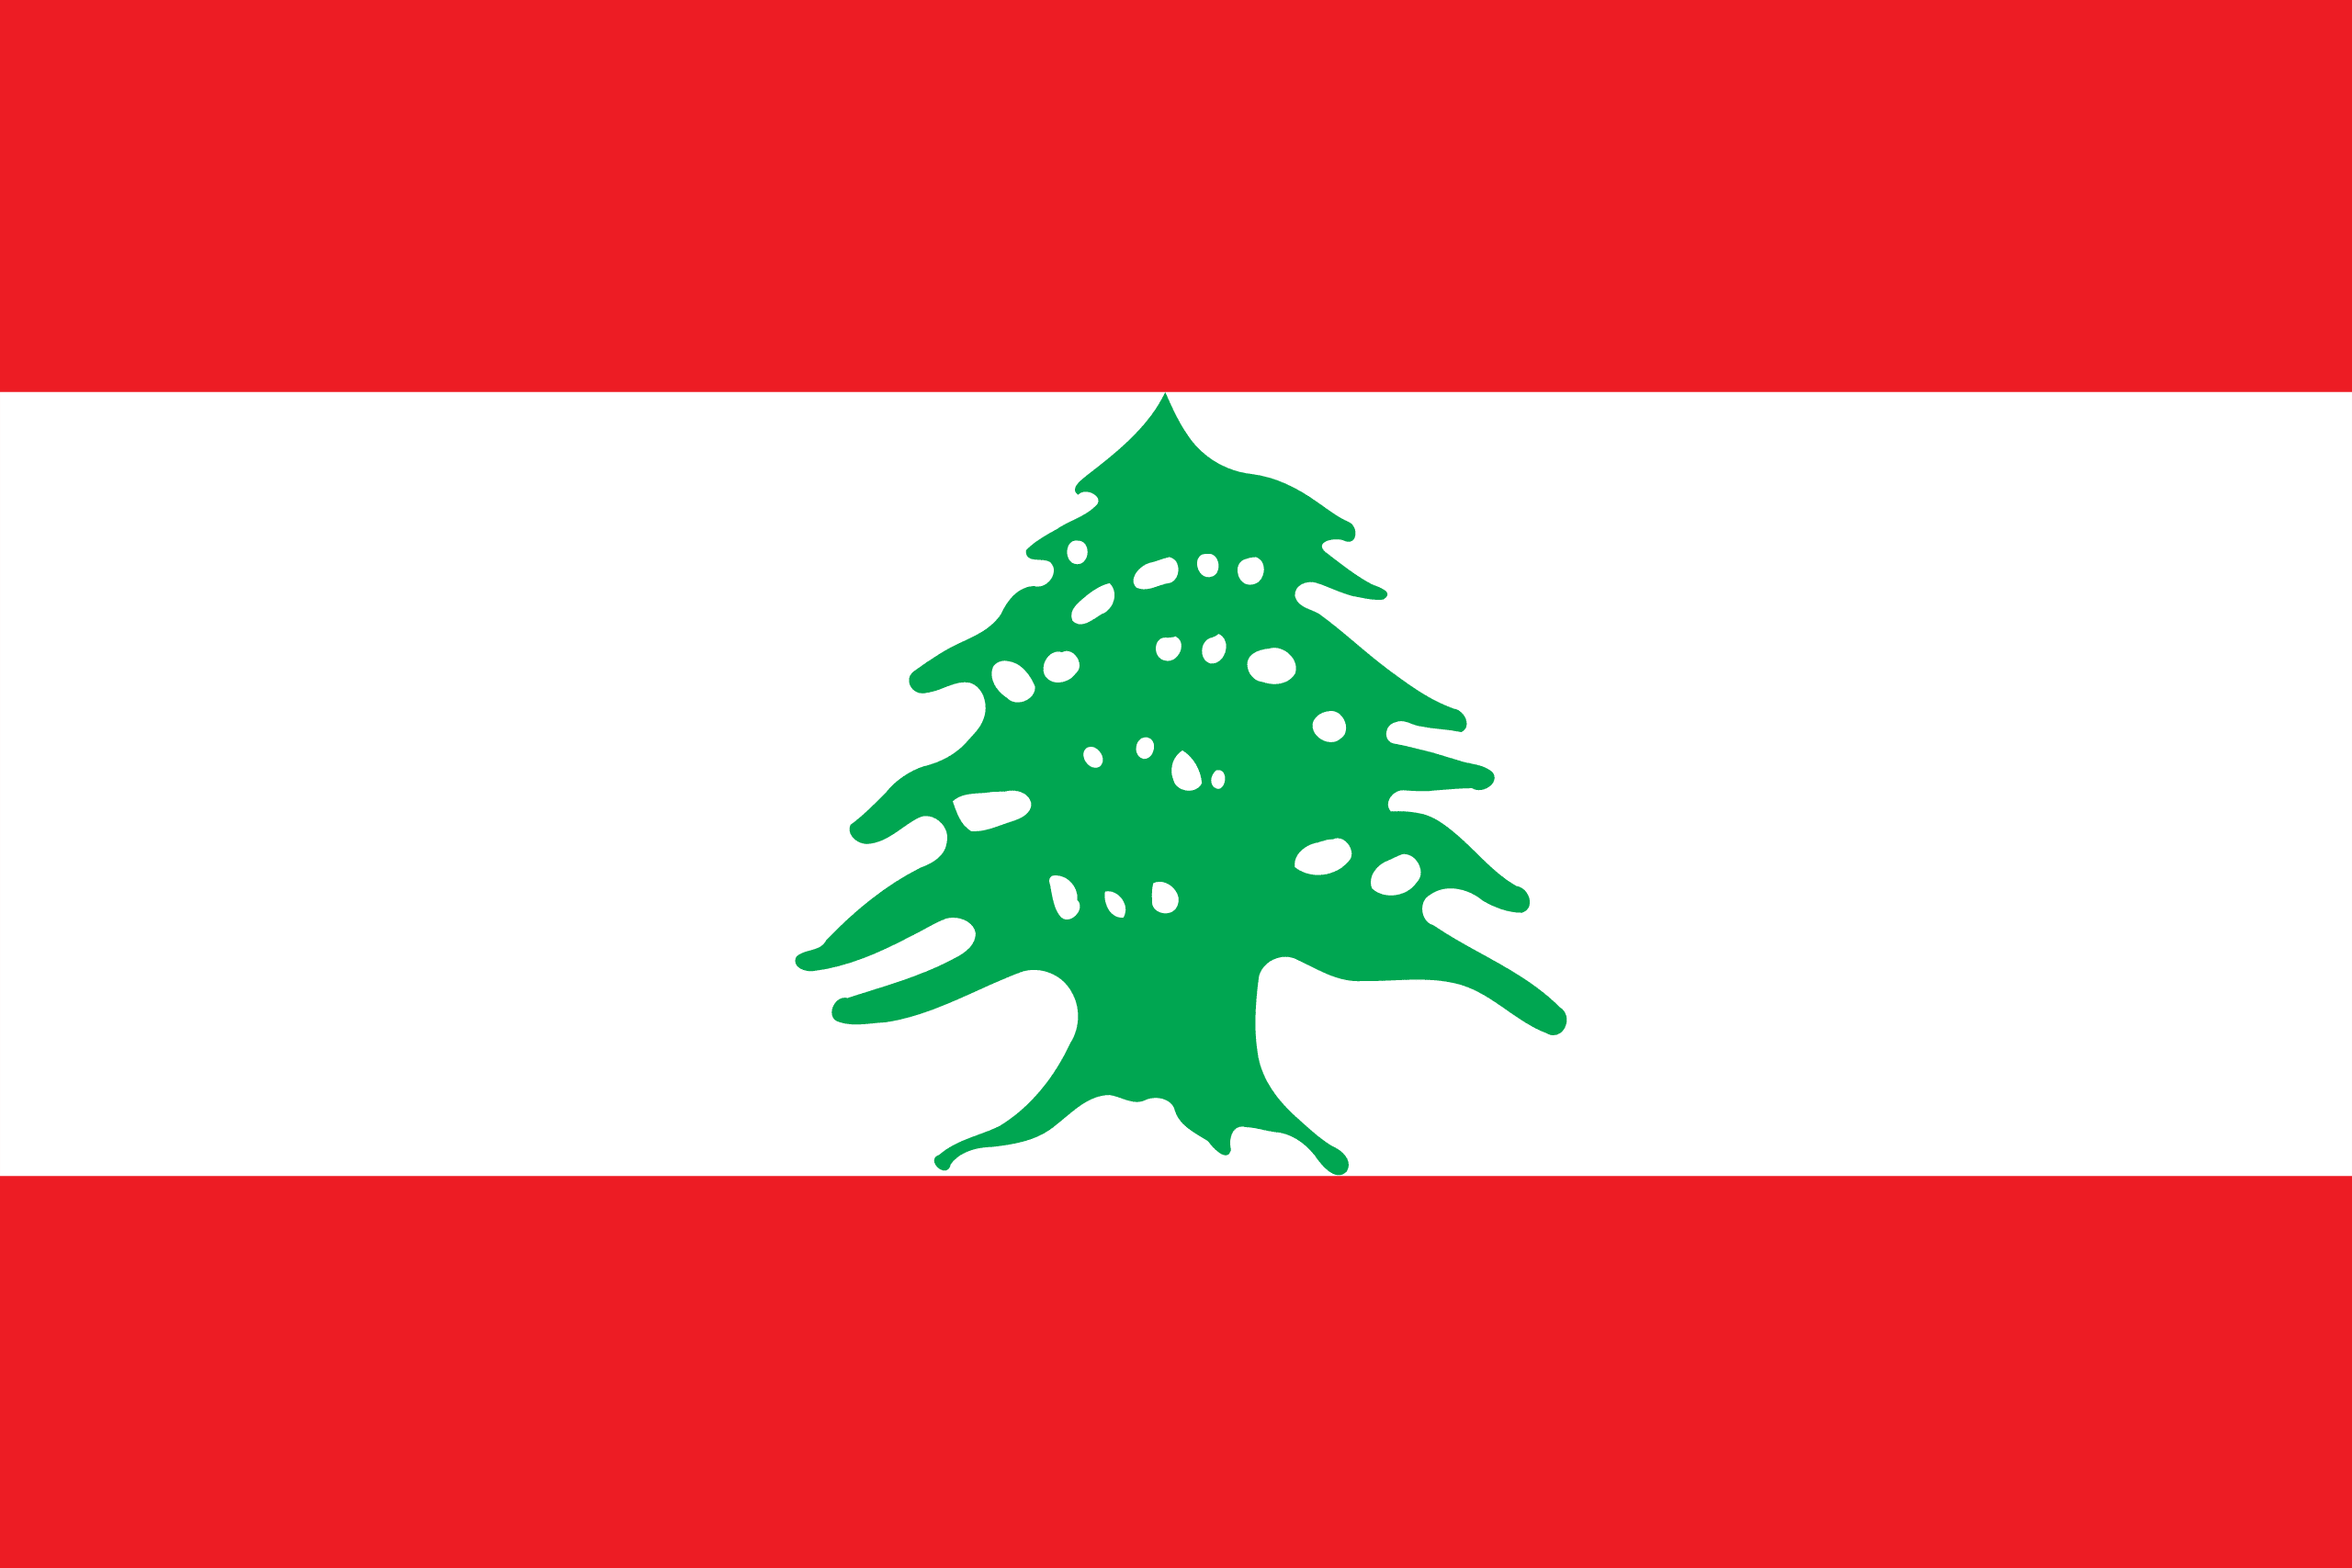

Lesotho


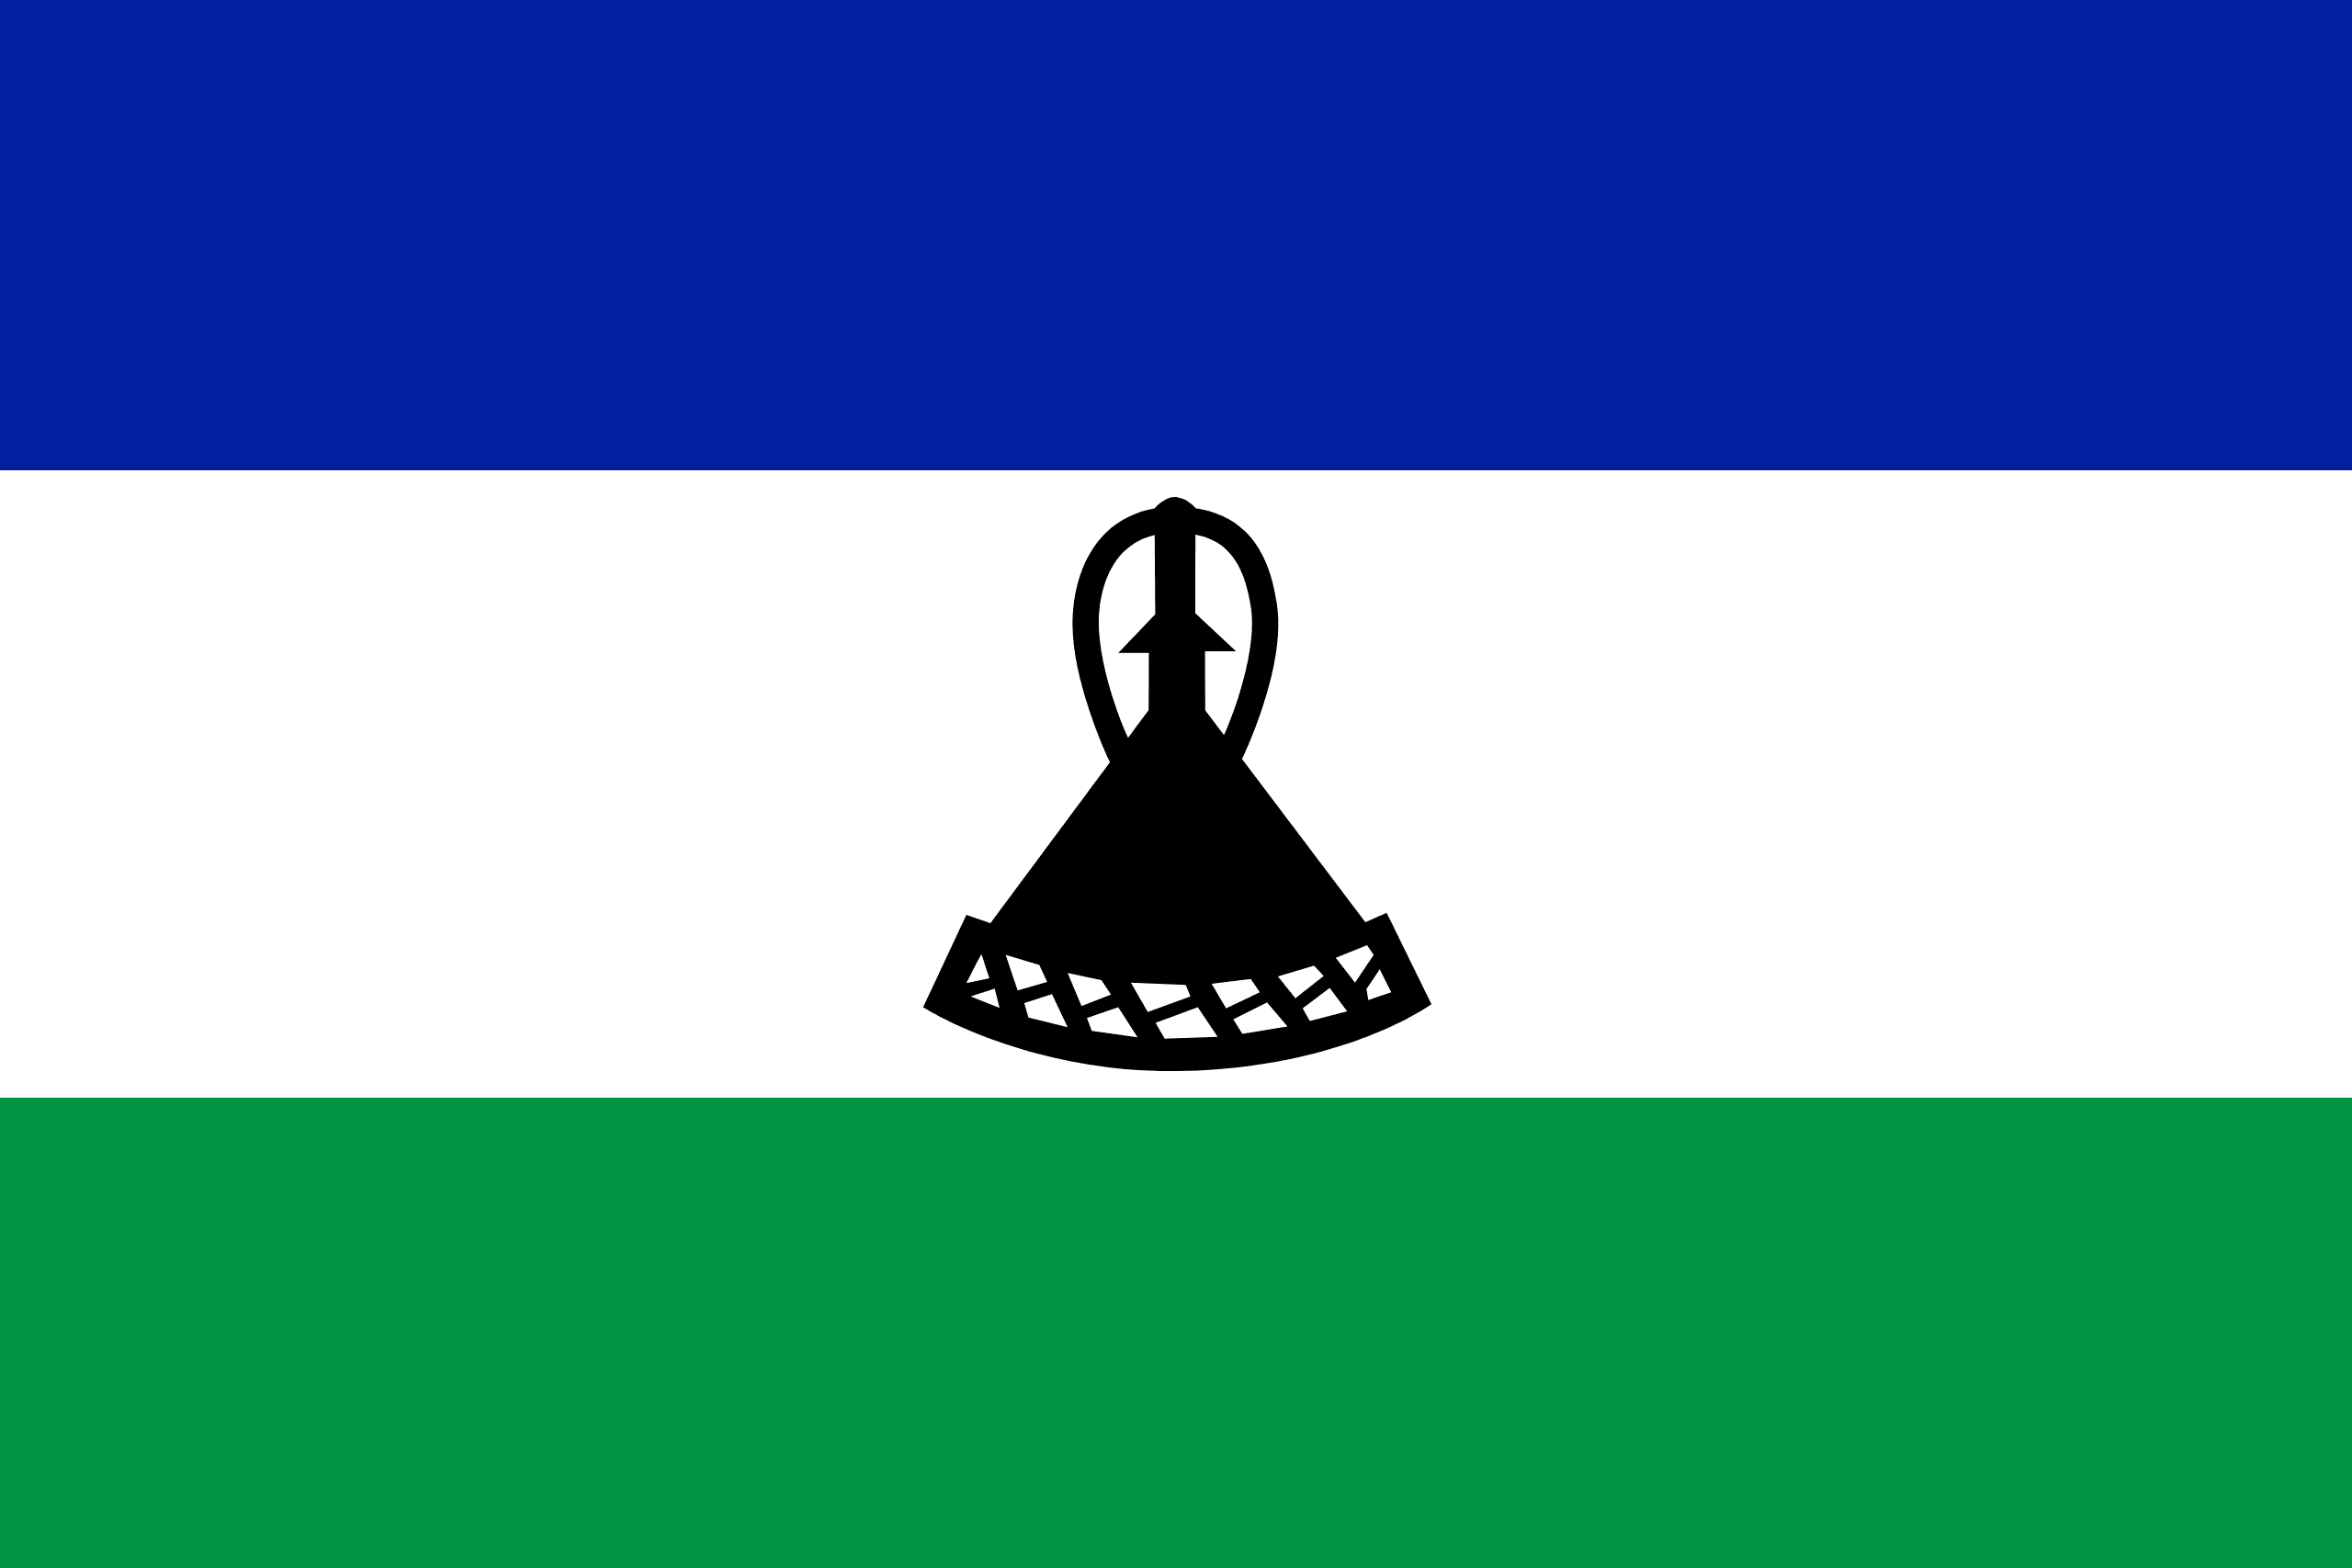

Liberia


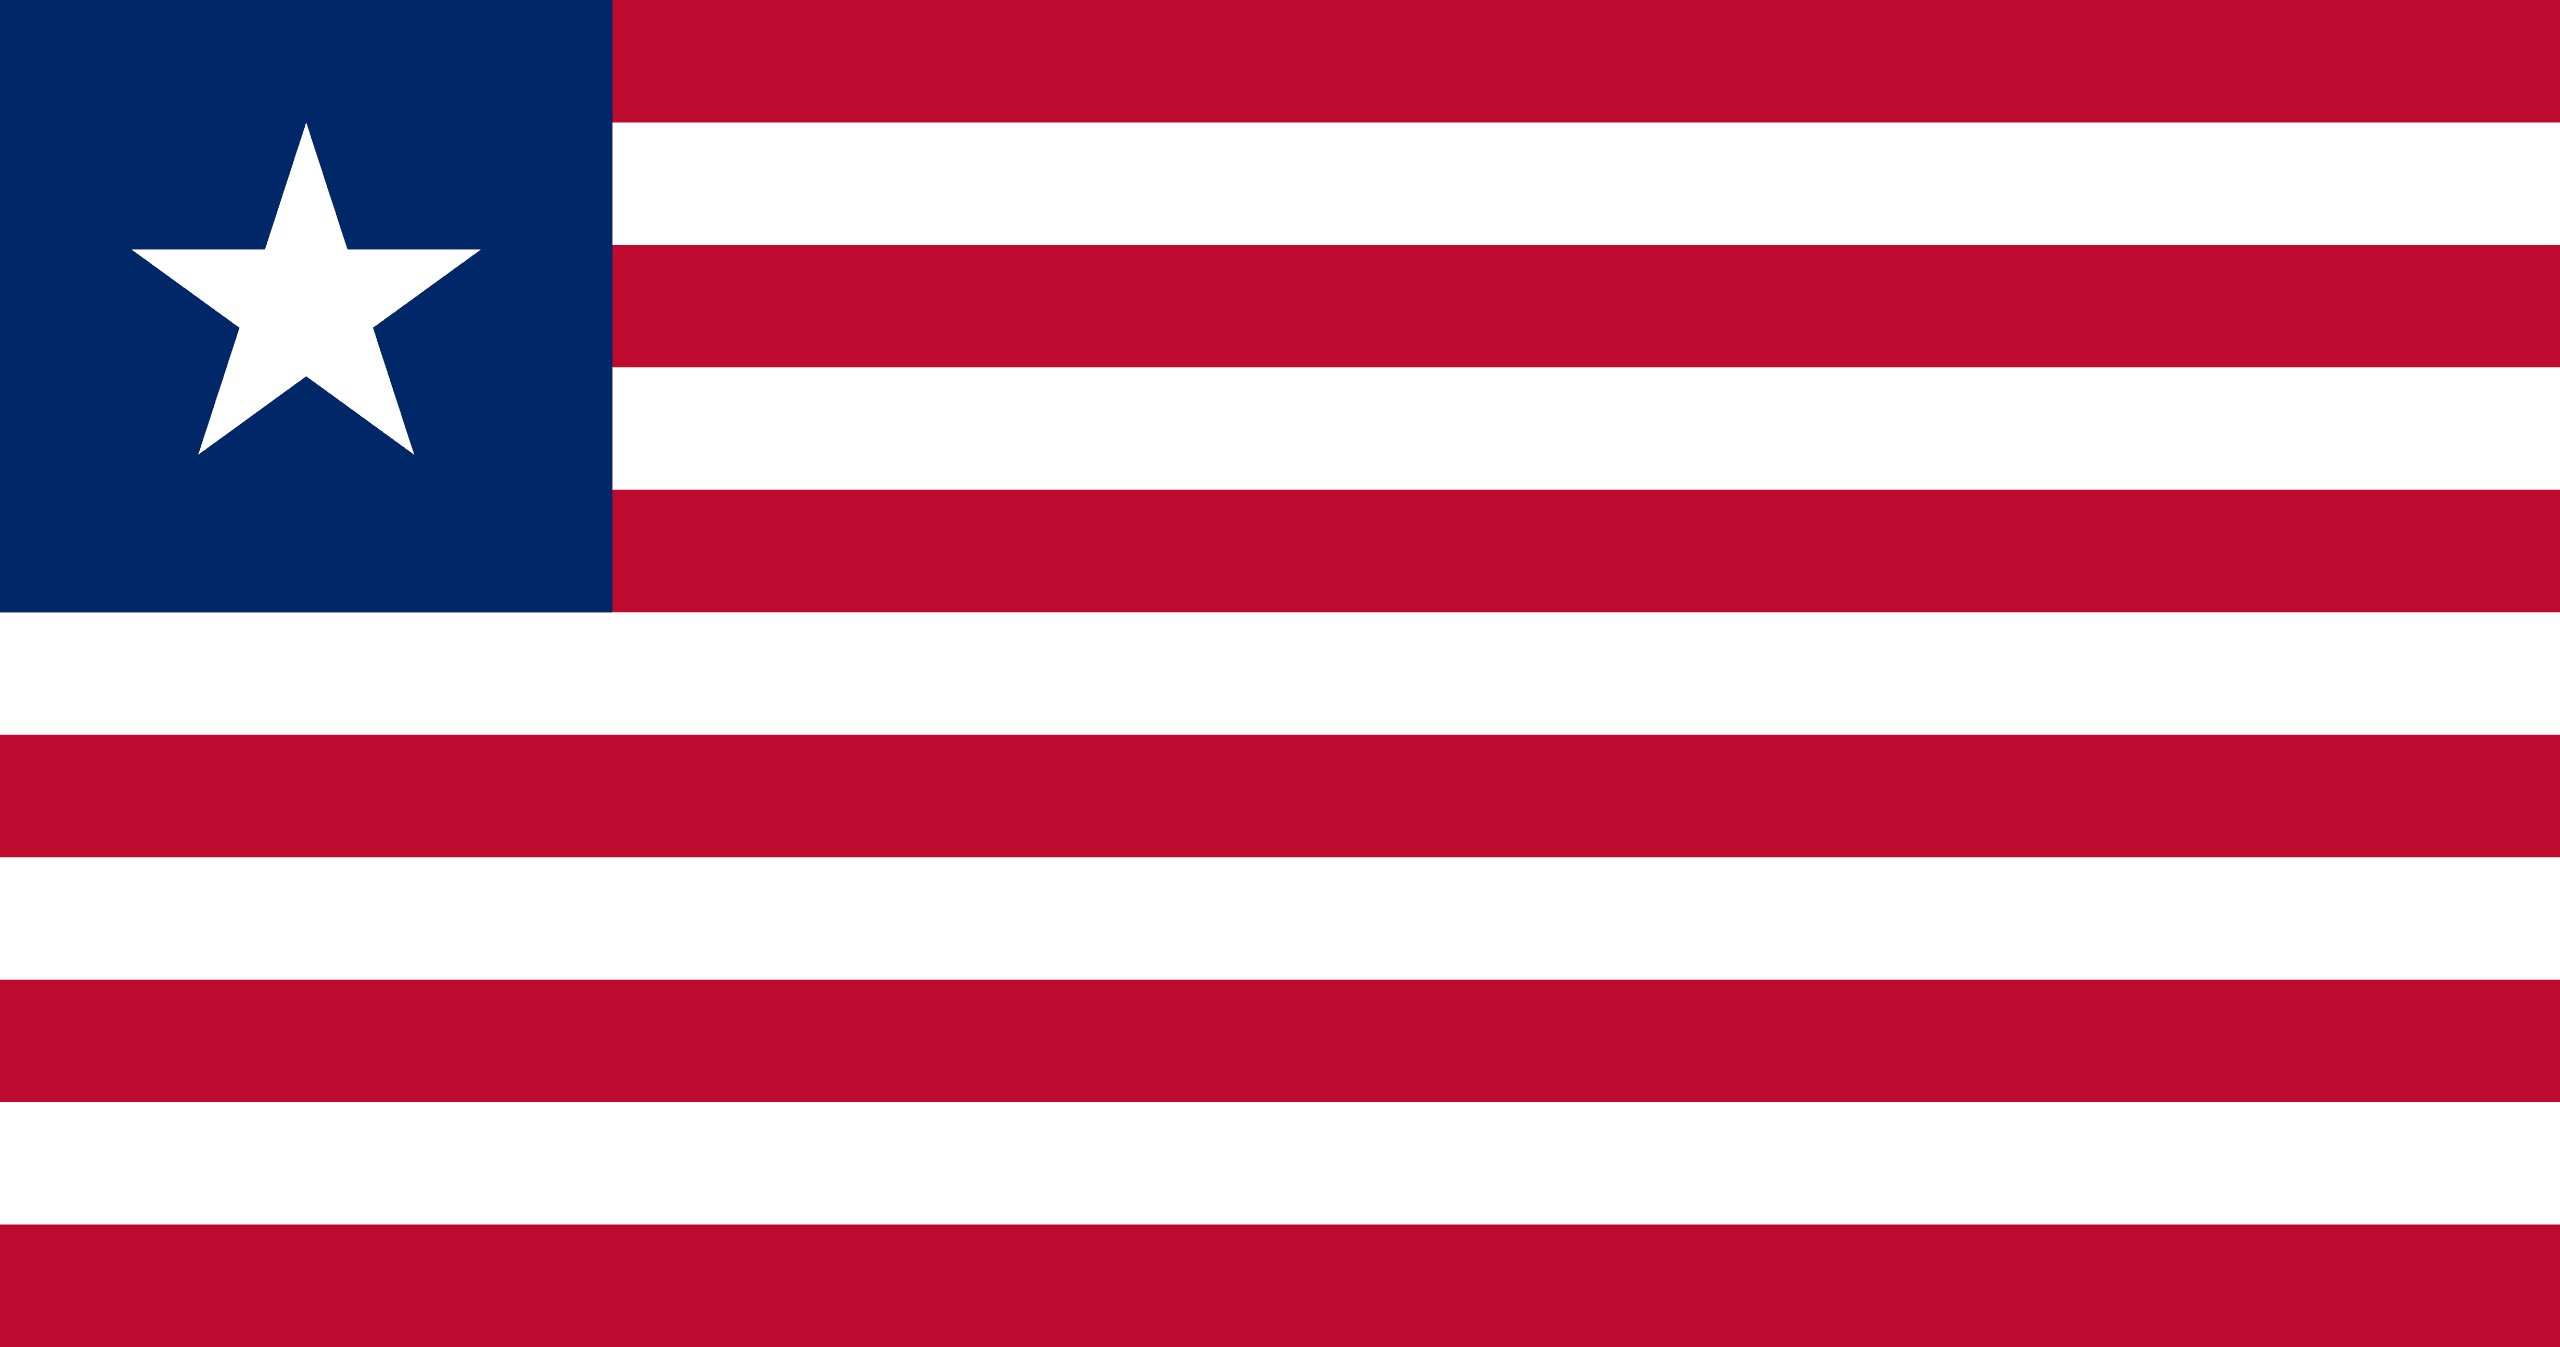

Libya


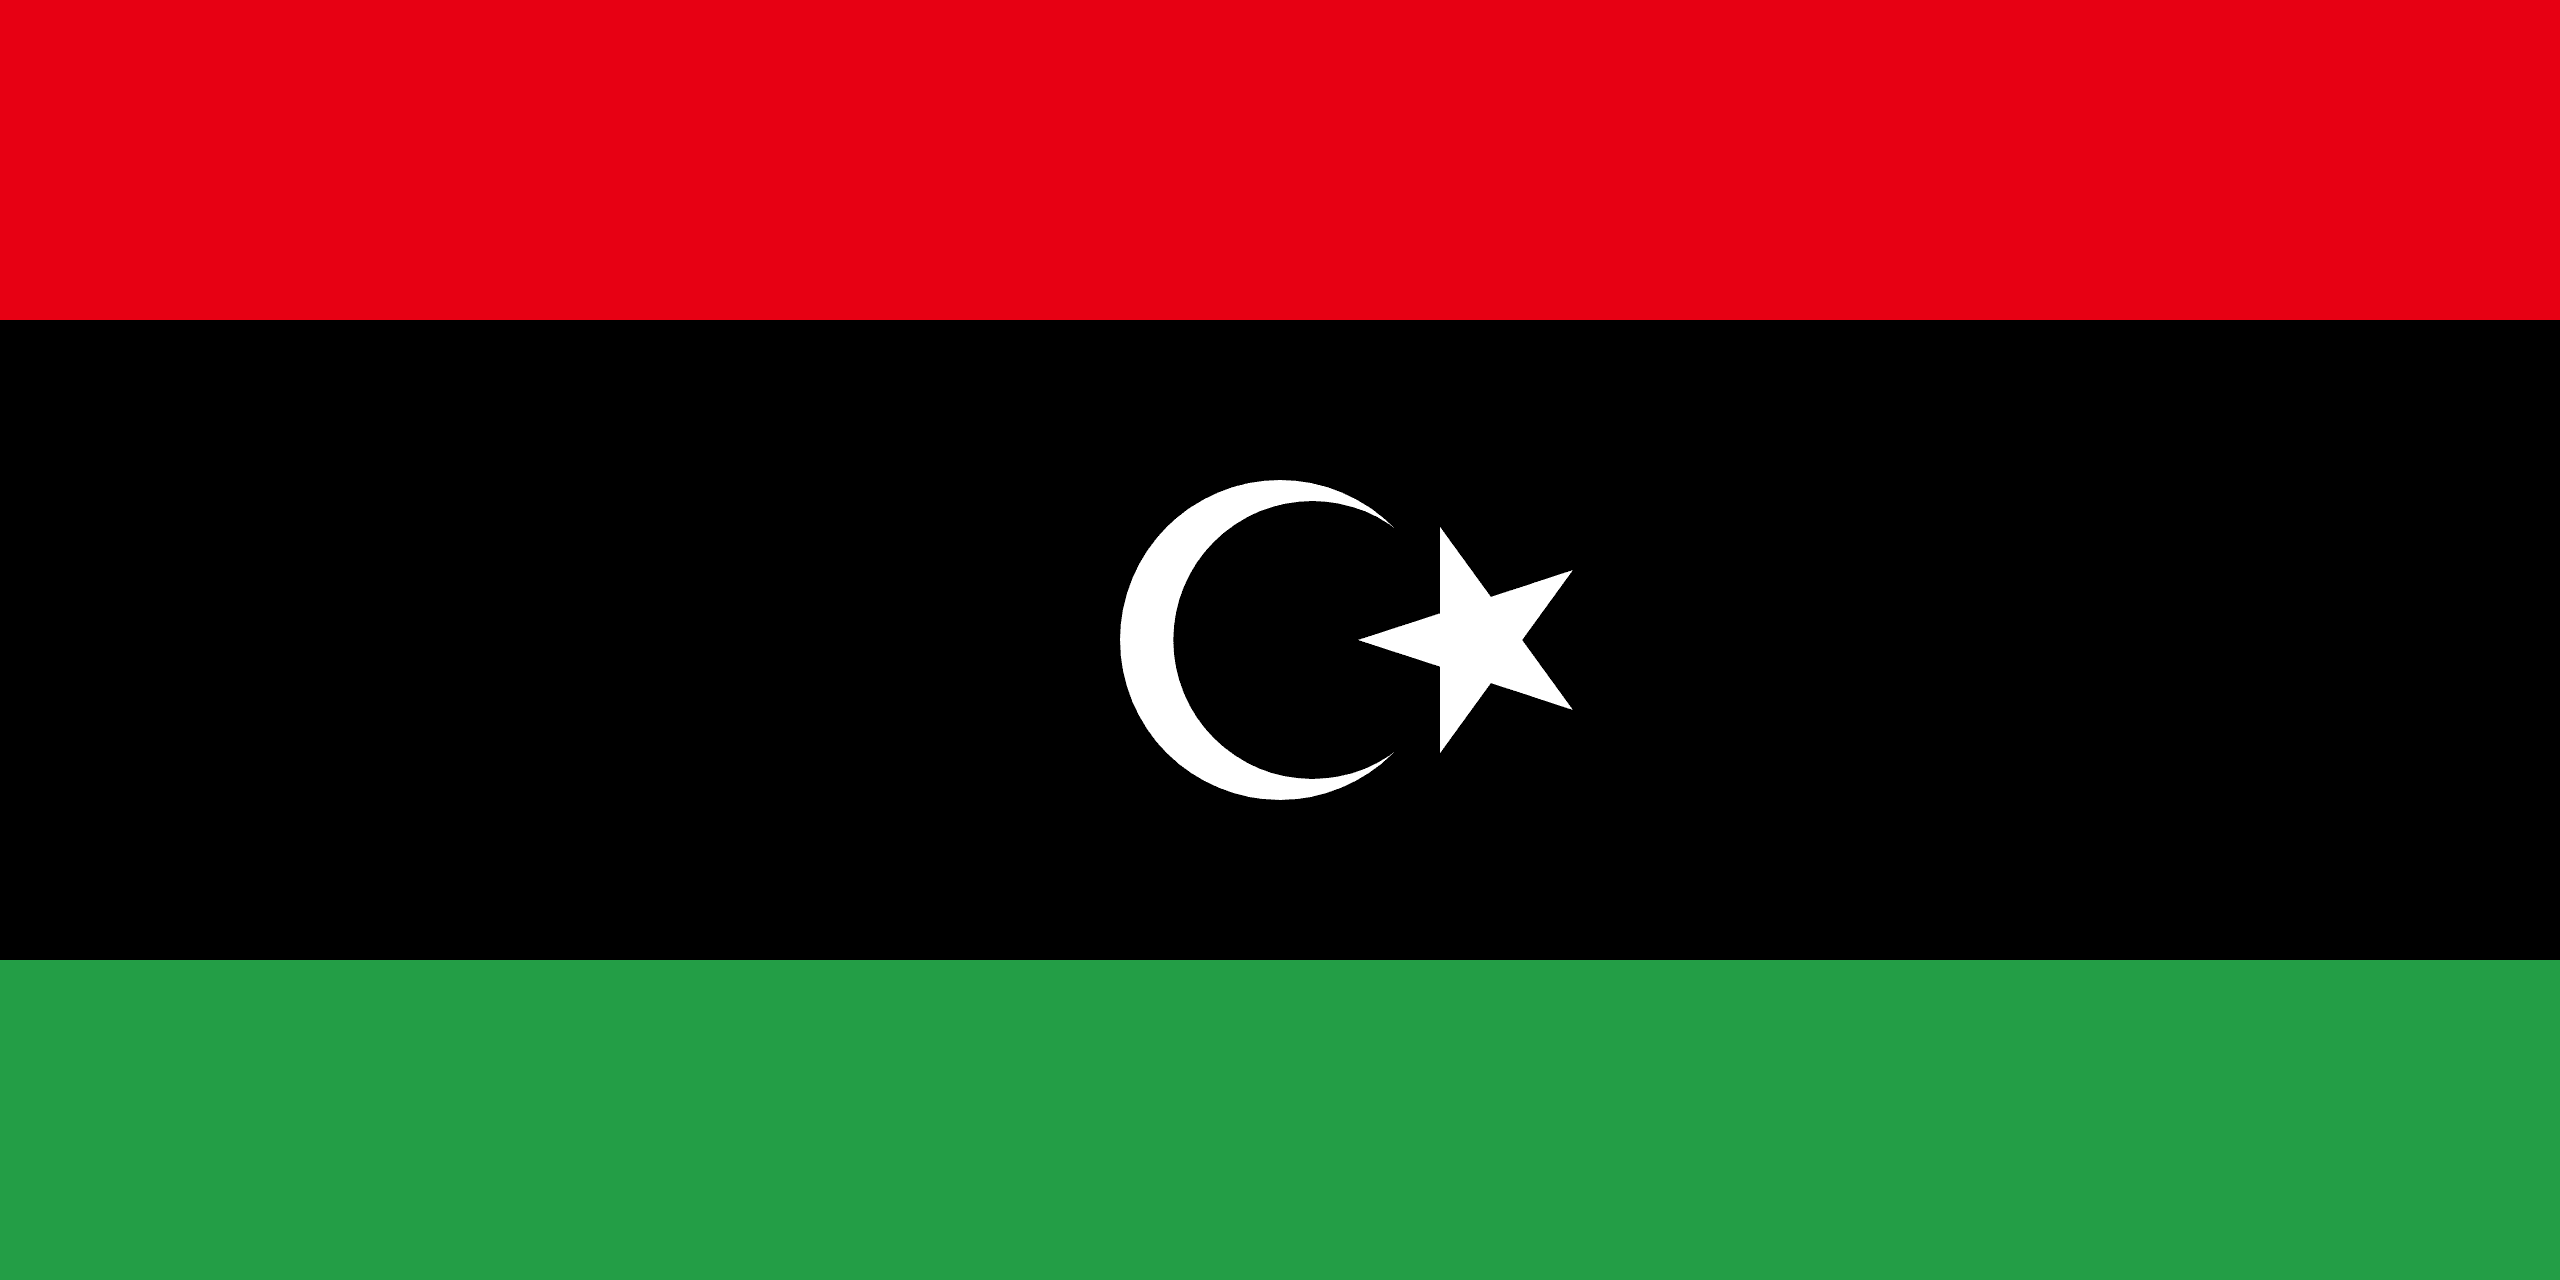

Liechtenstein


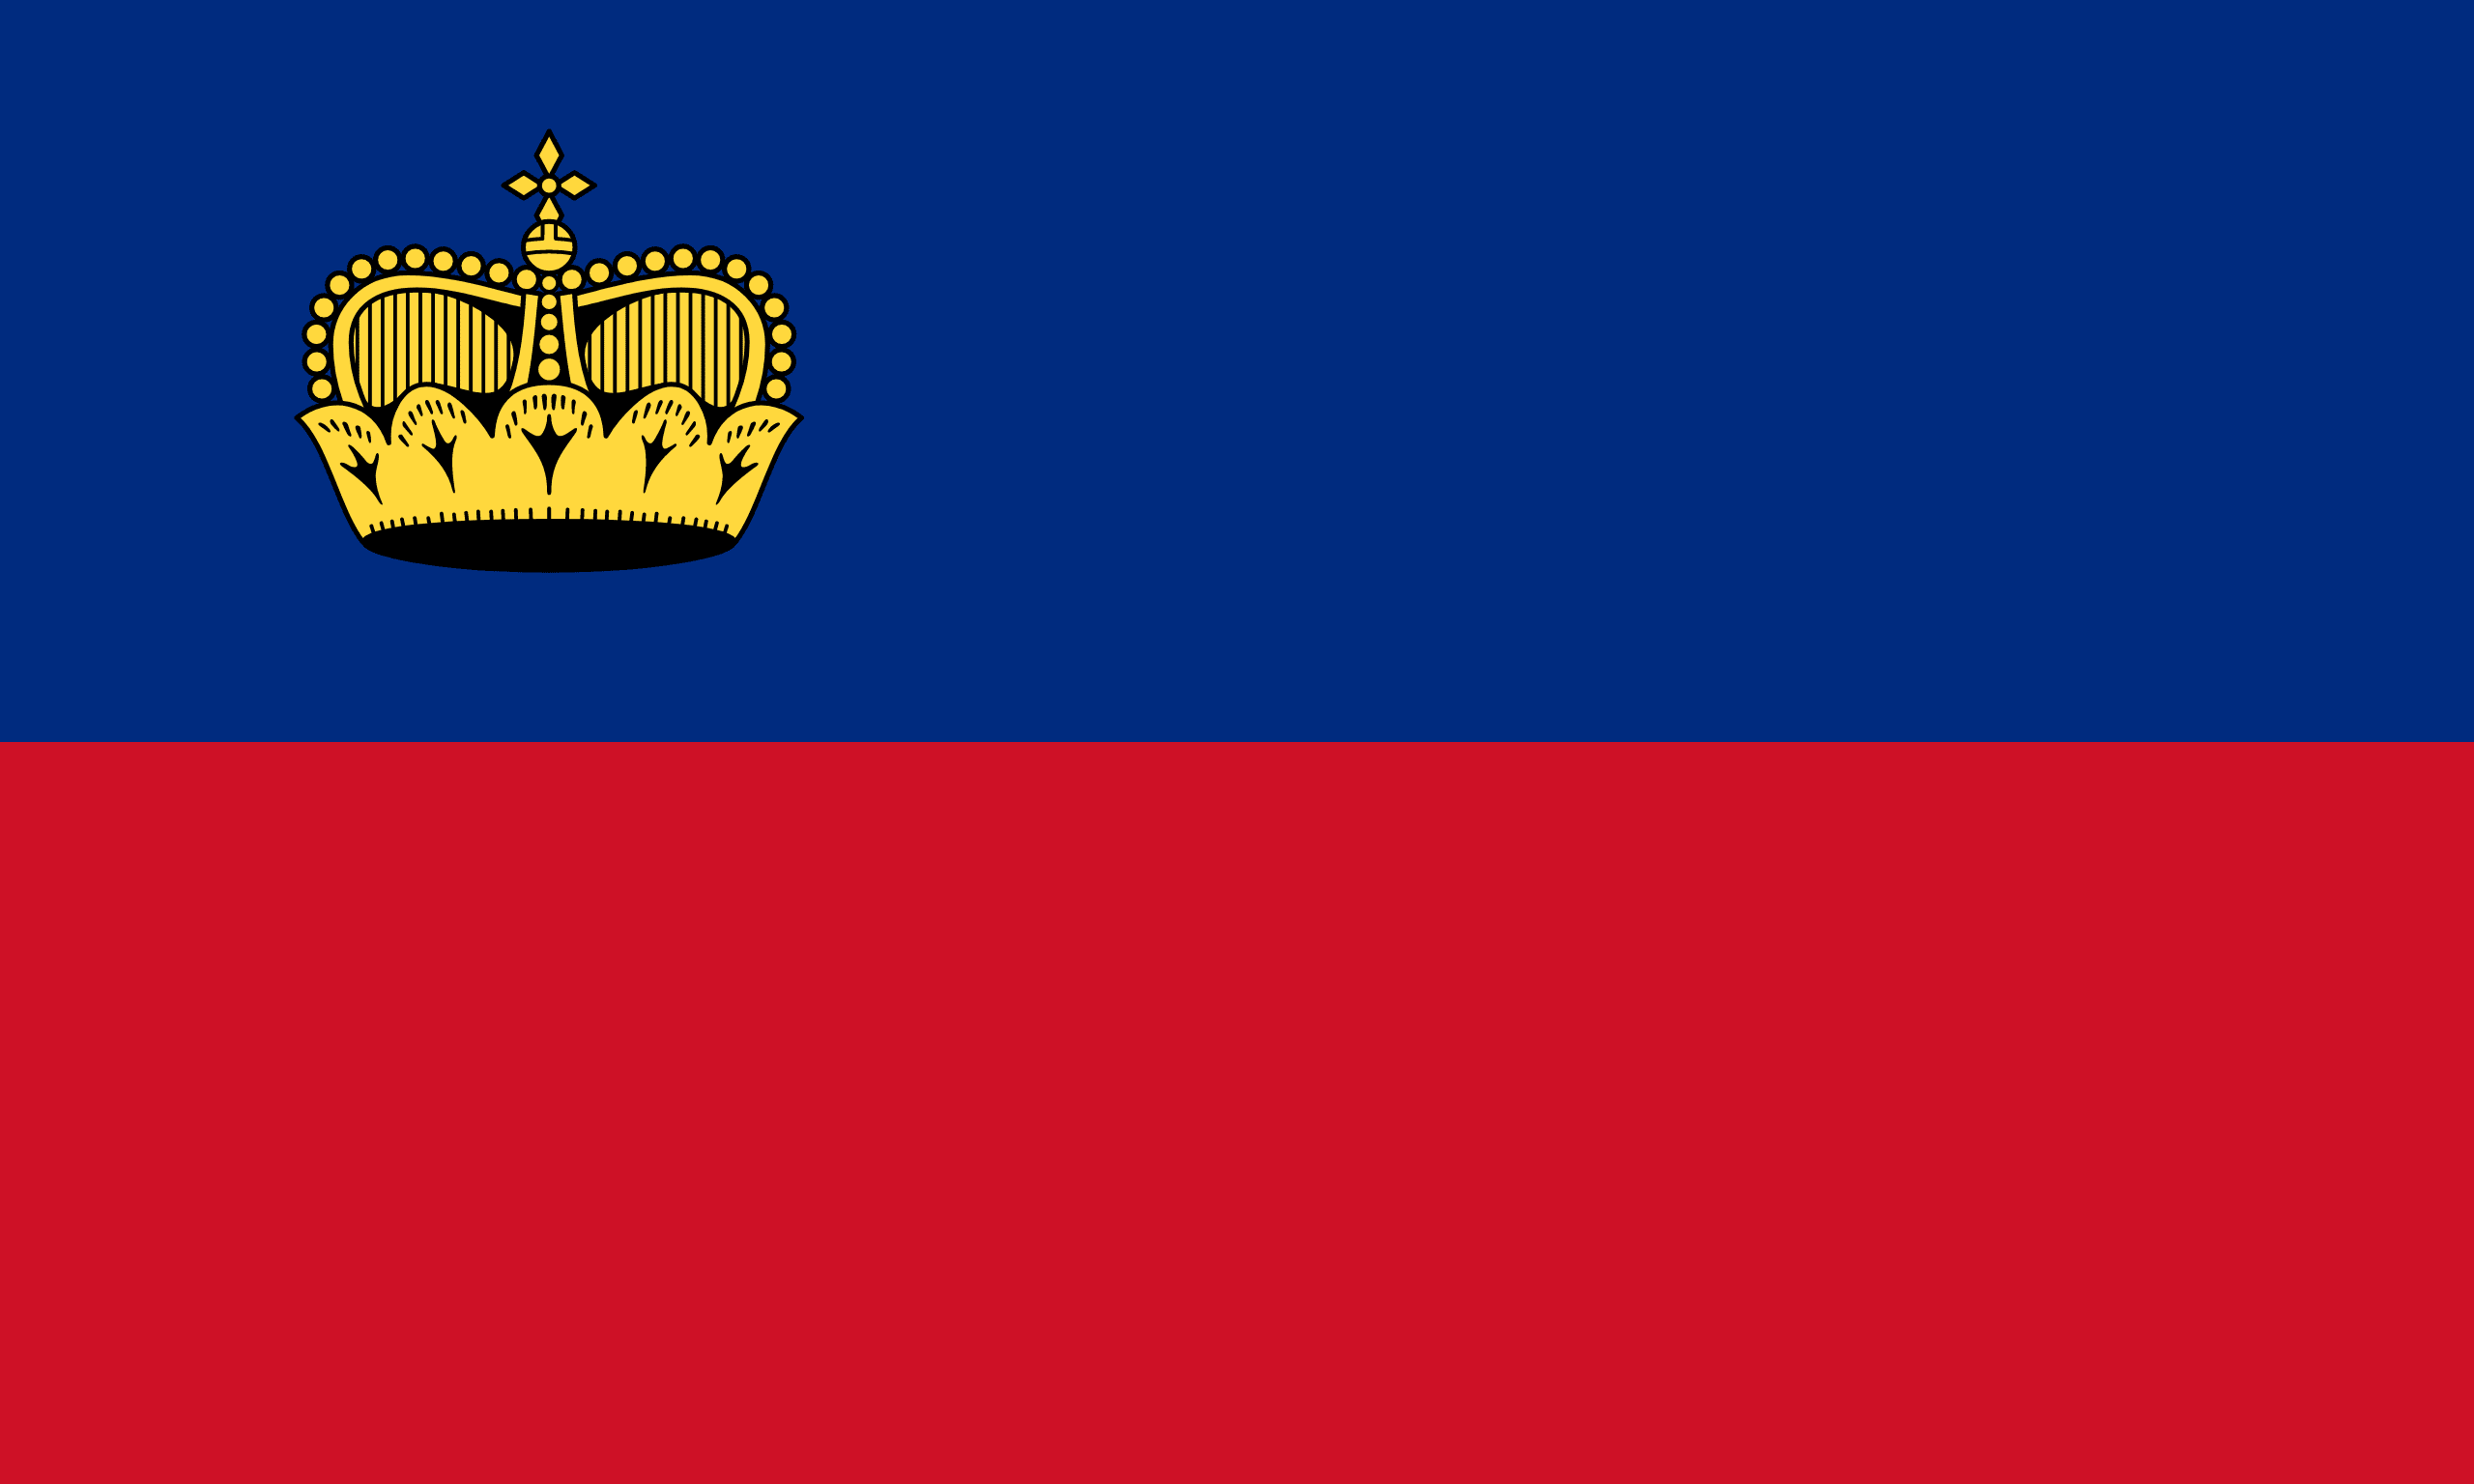

Lithuania


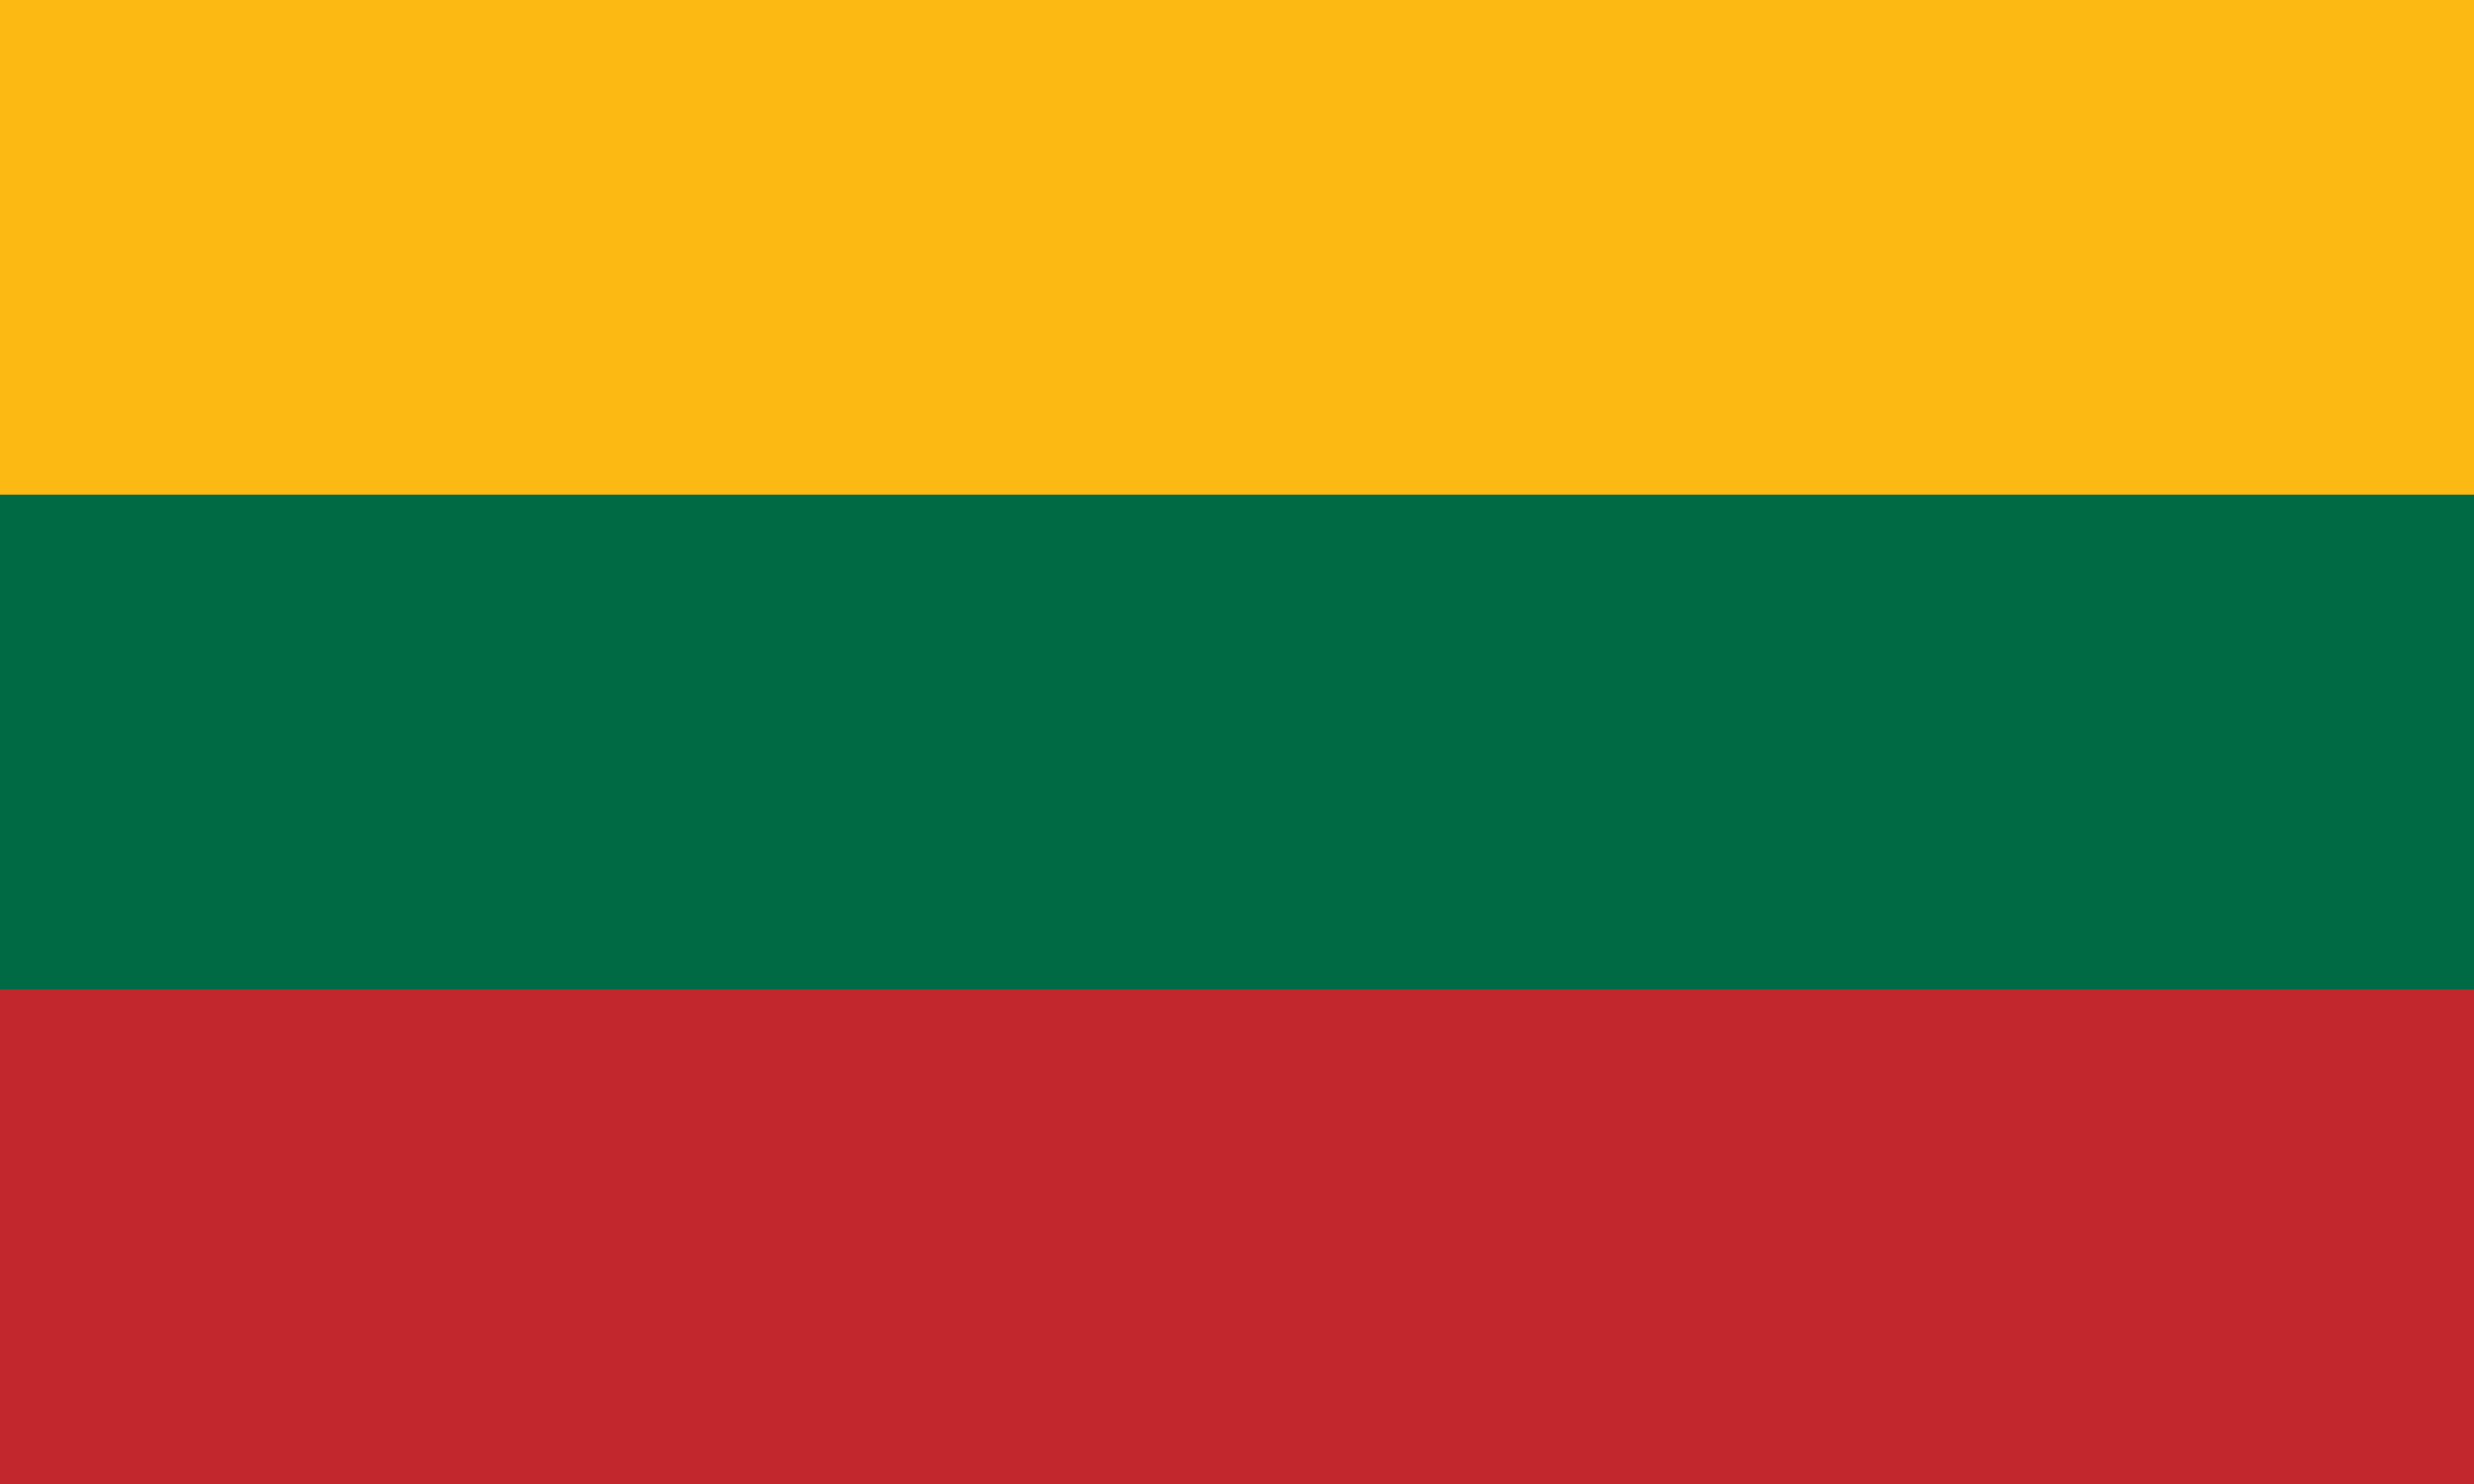

Luxembourg


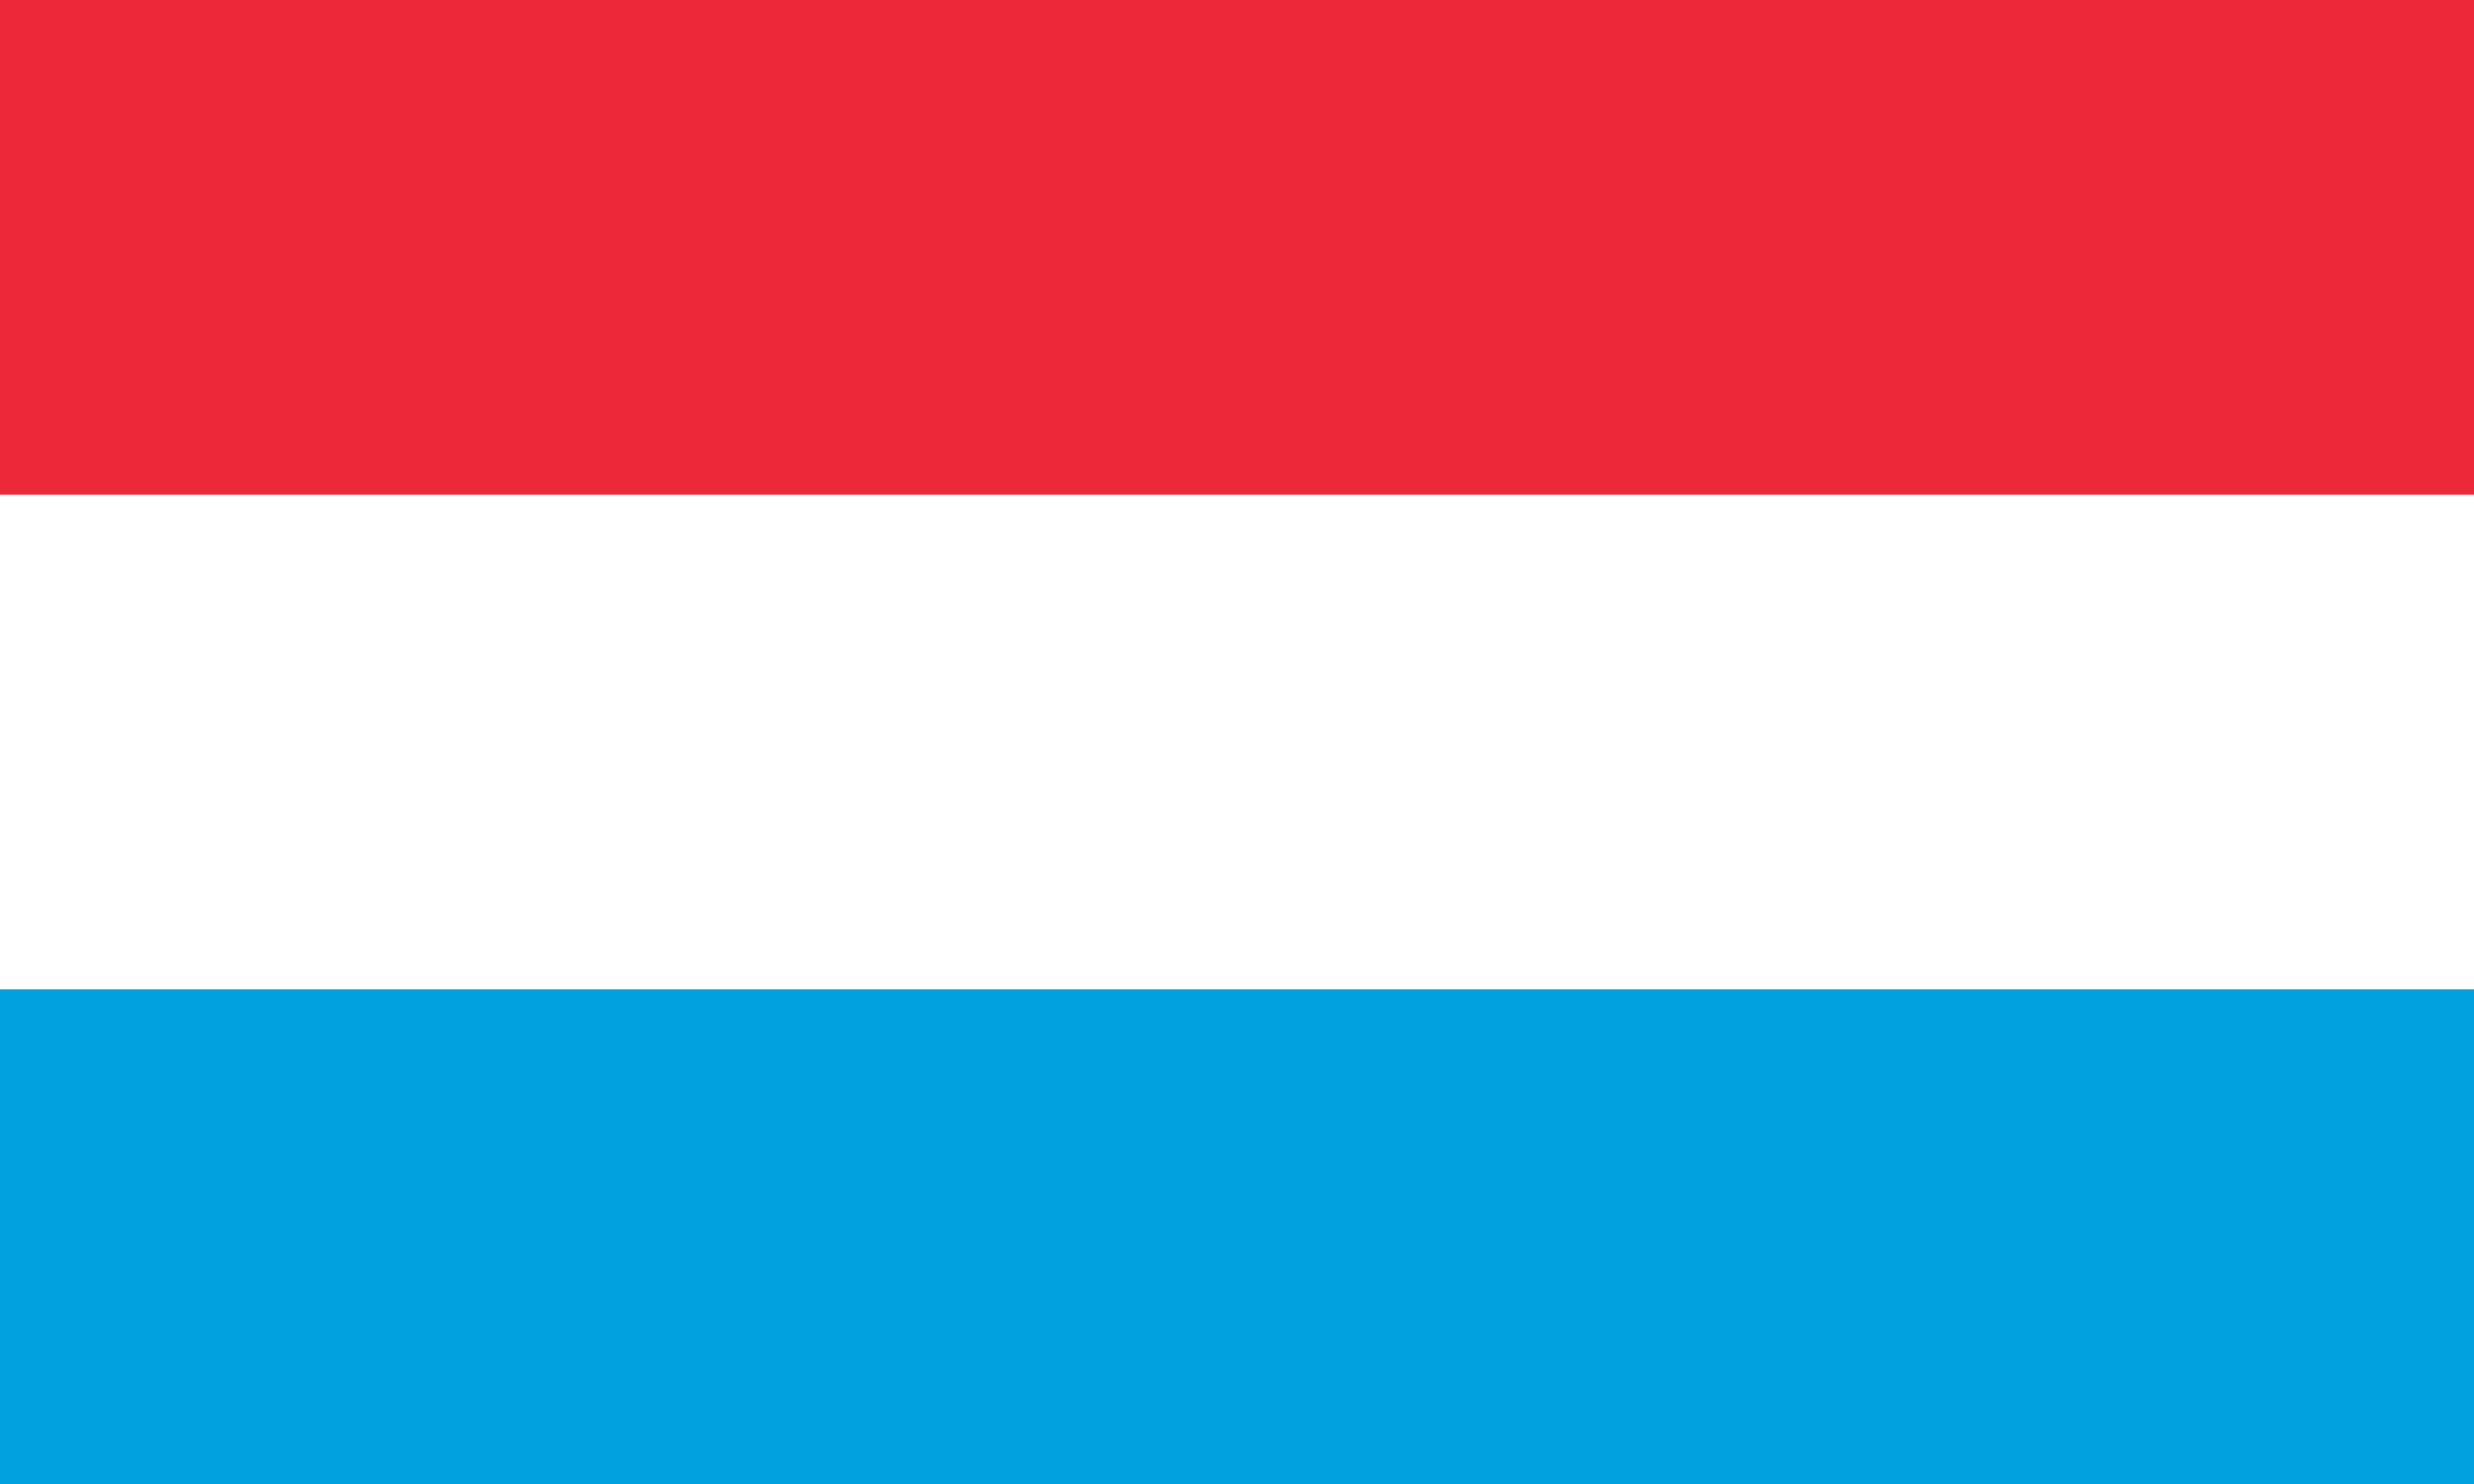

Macau


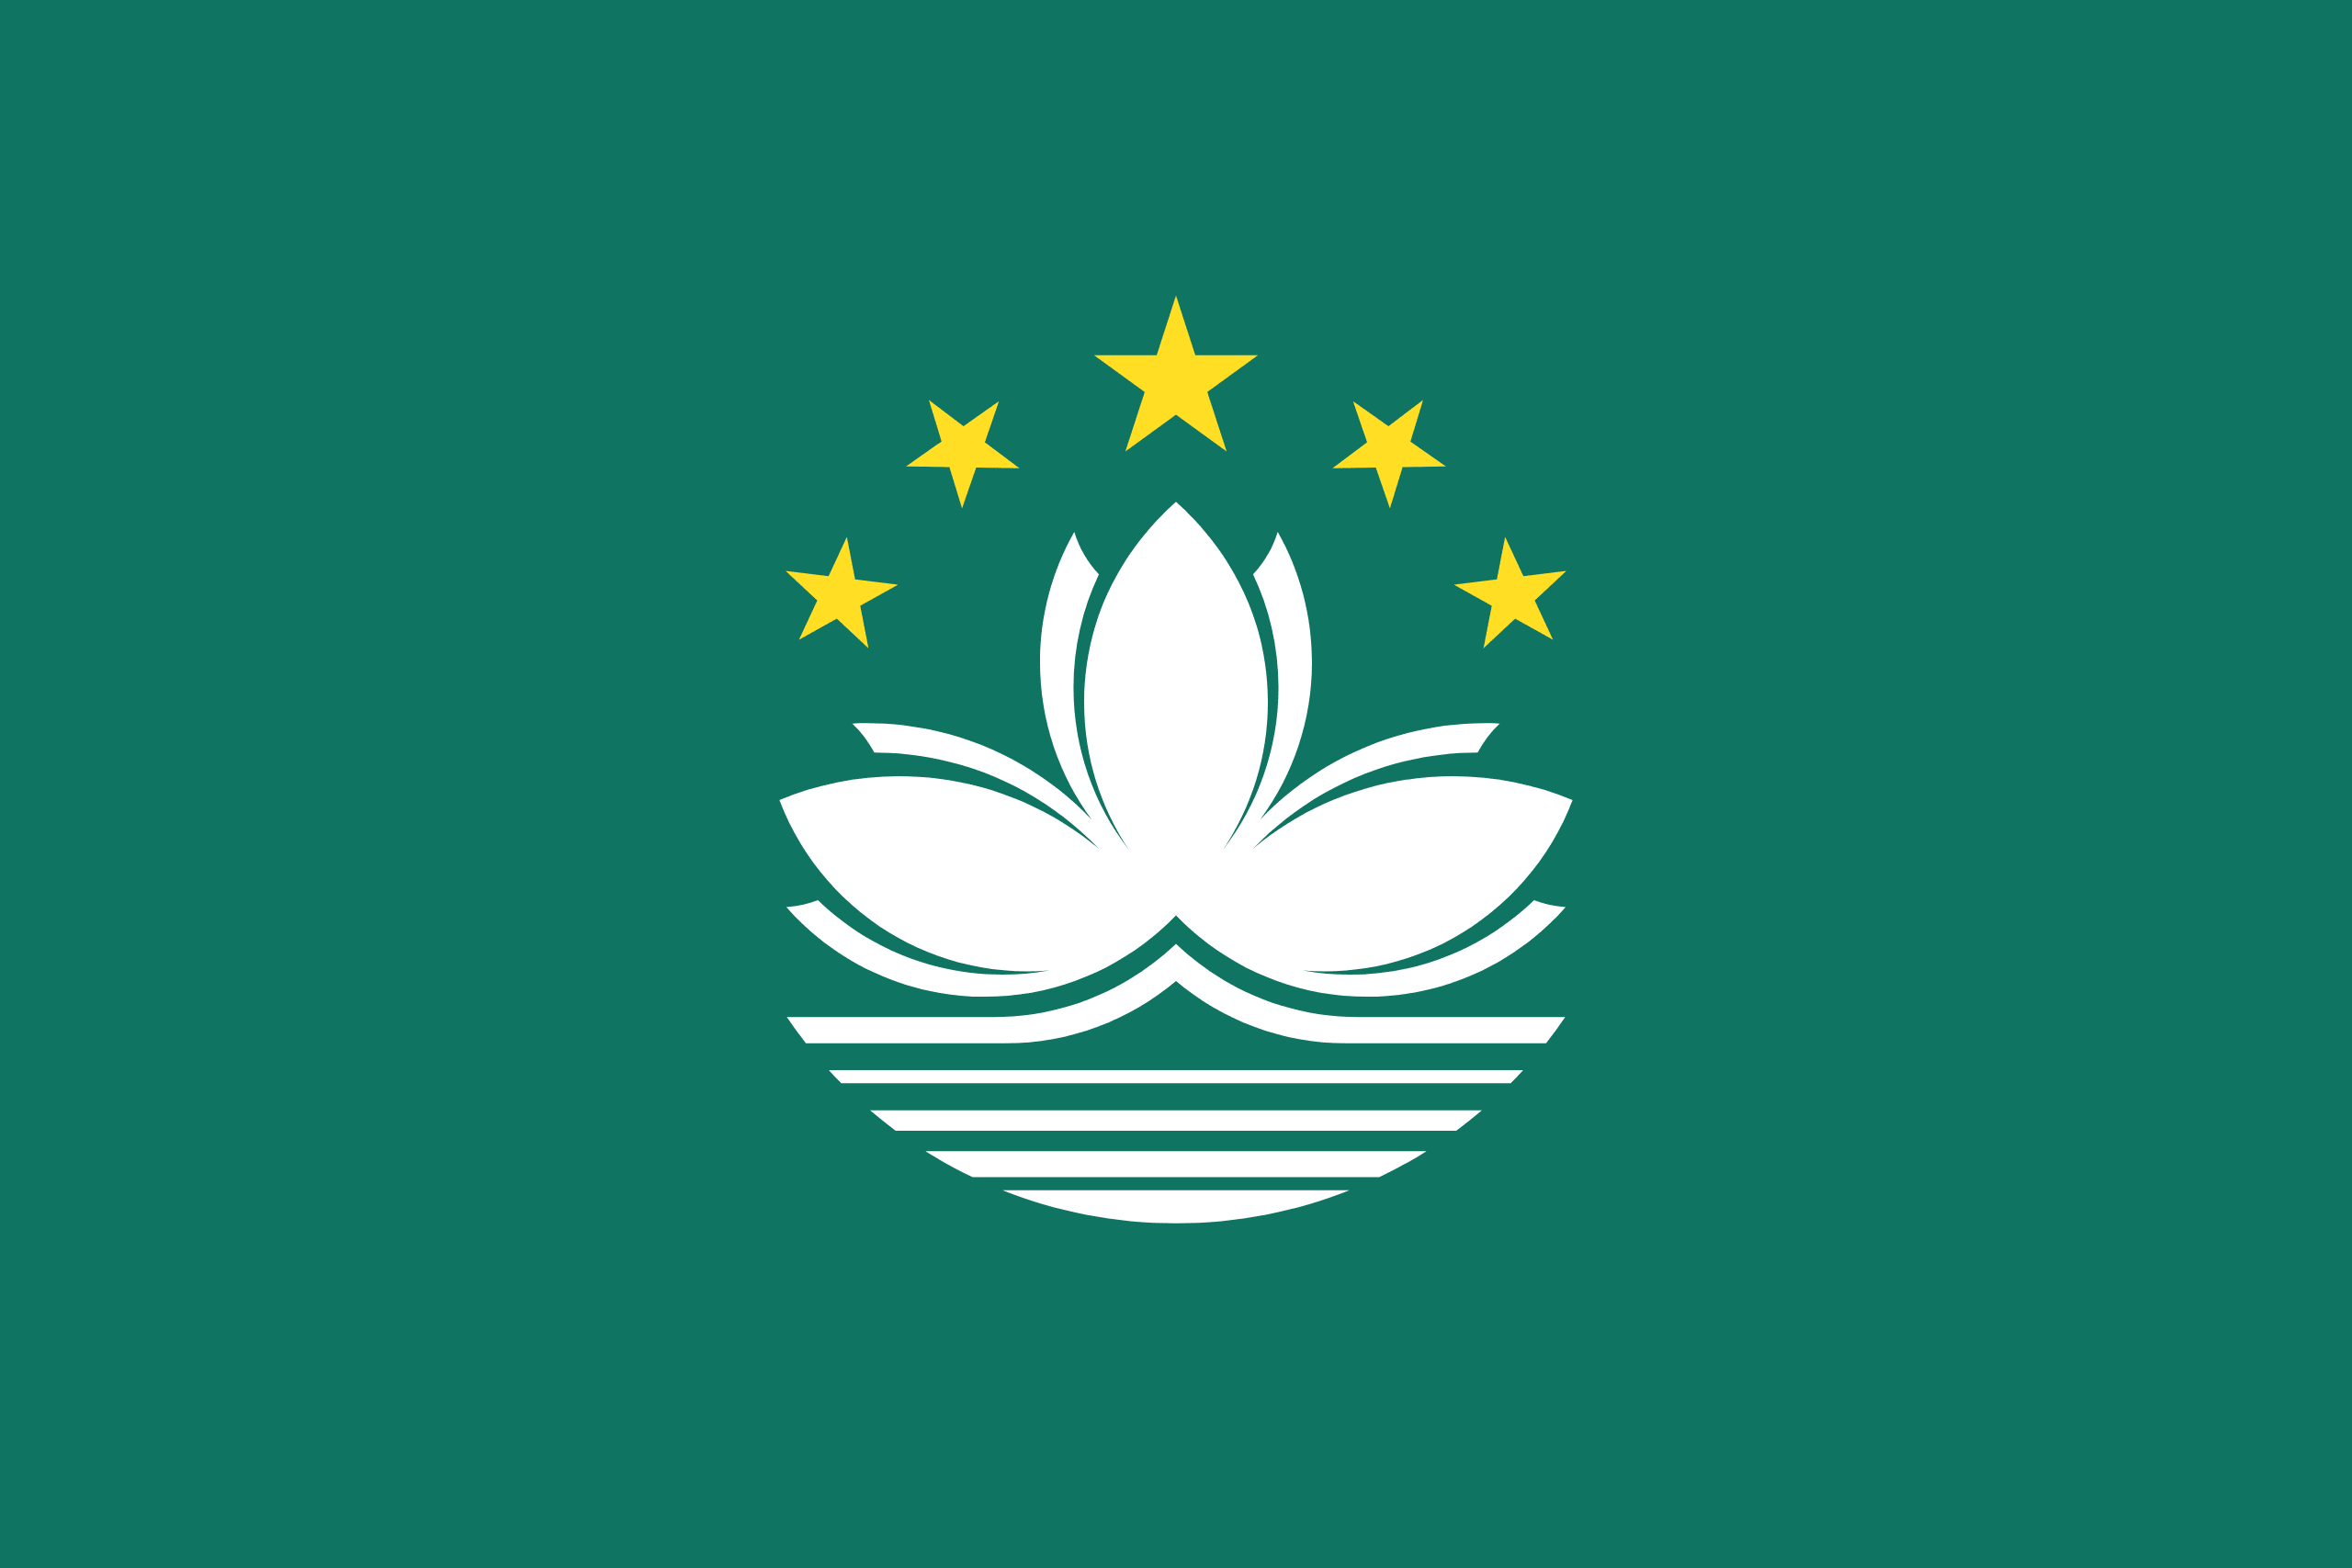

Madagascar


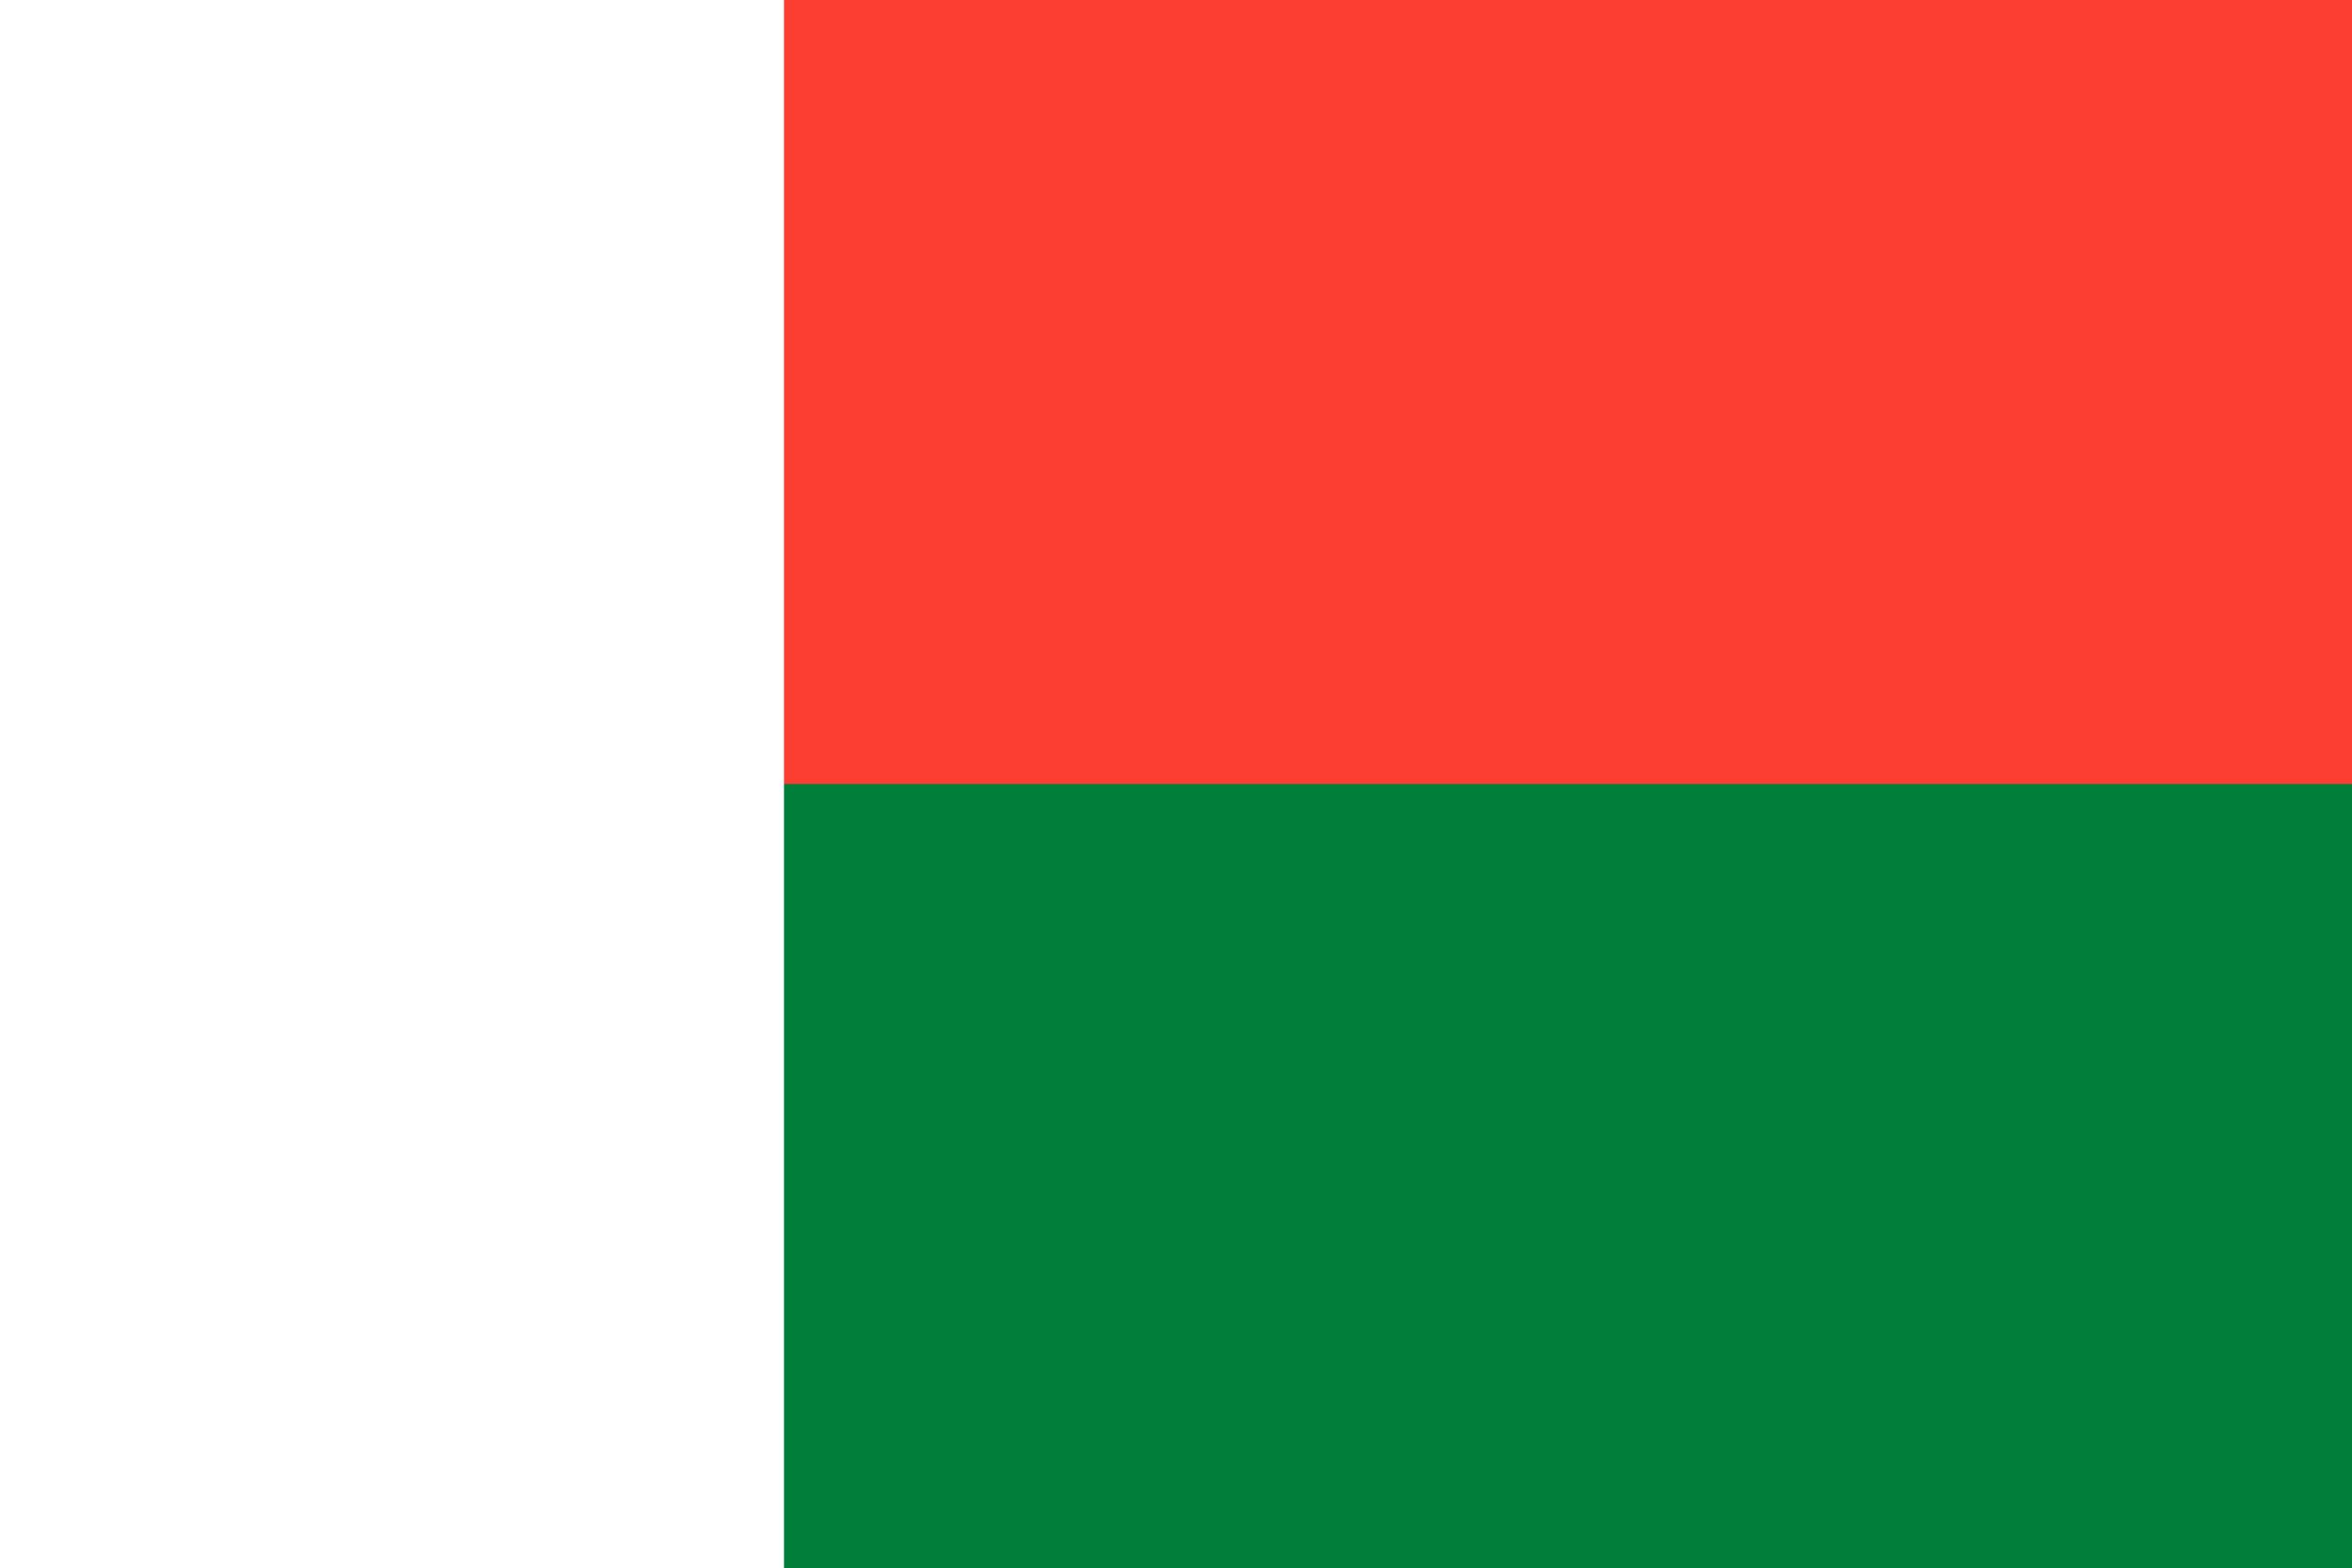

Malawi


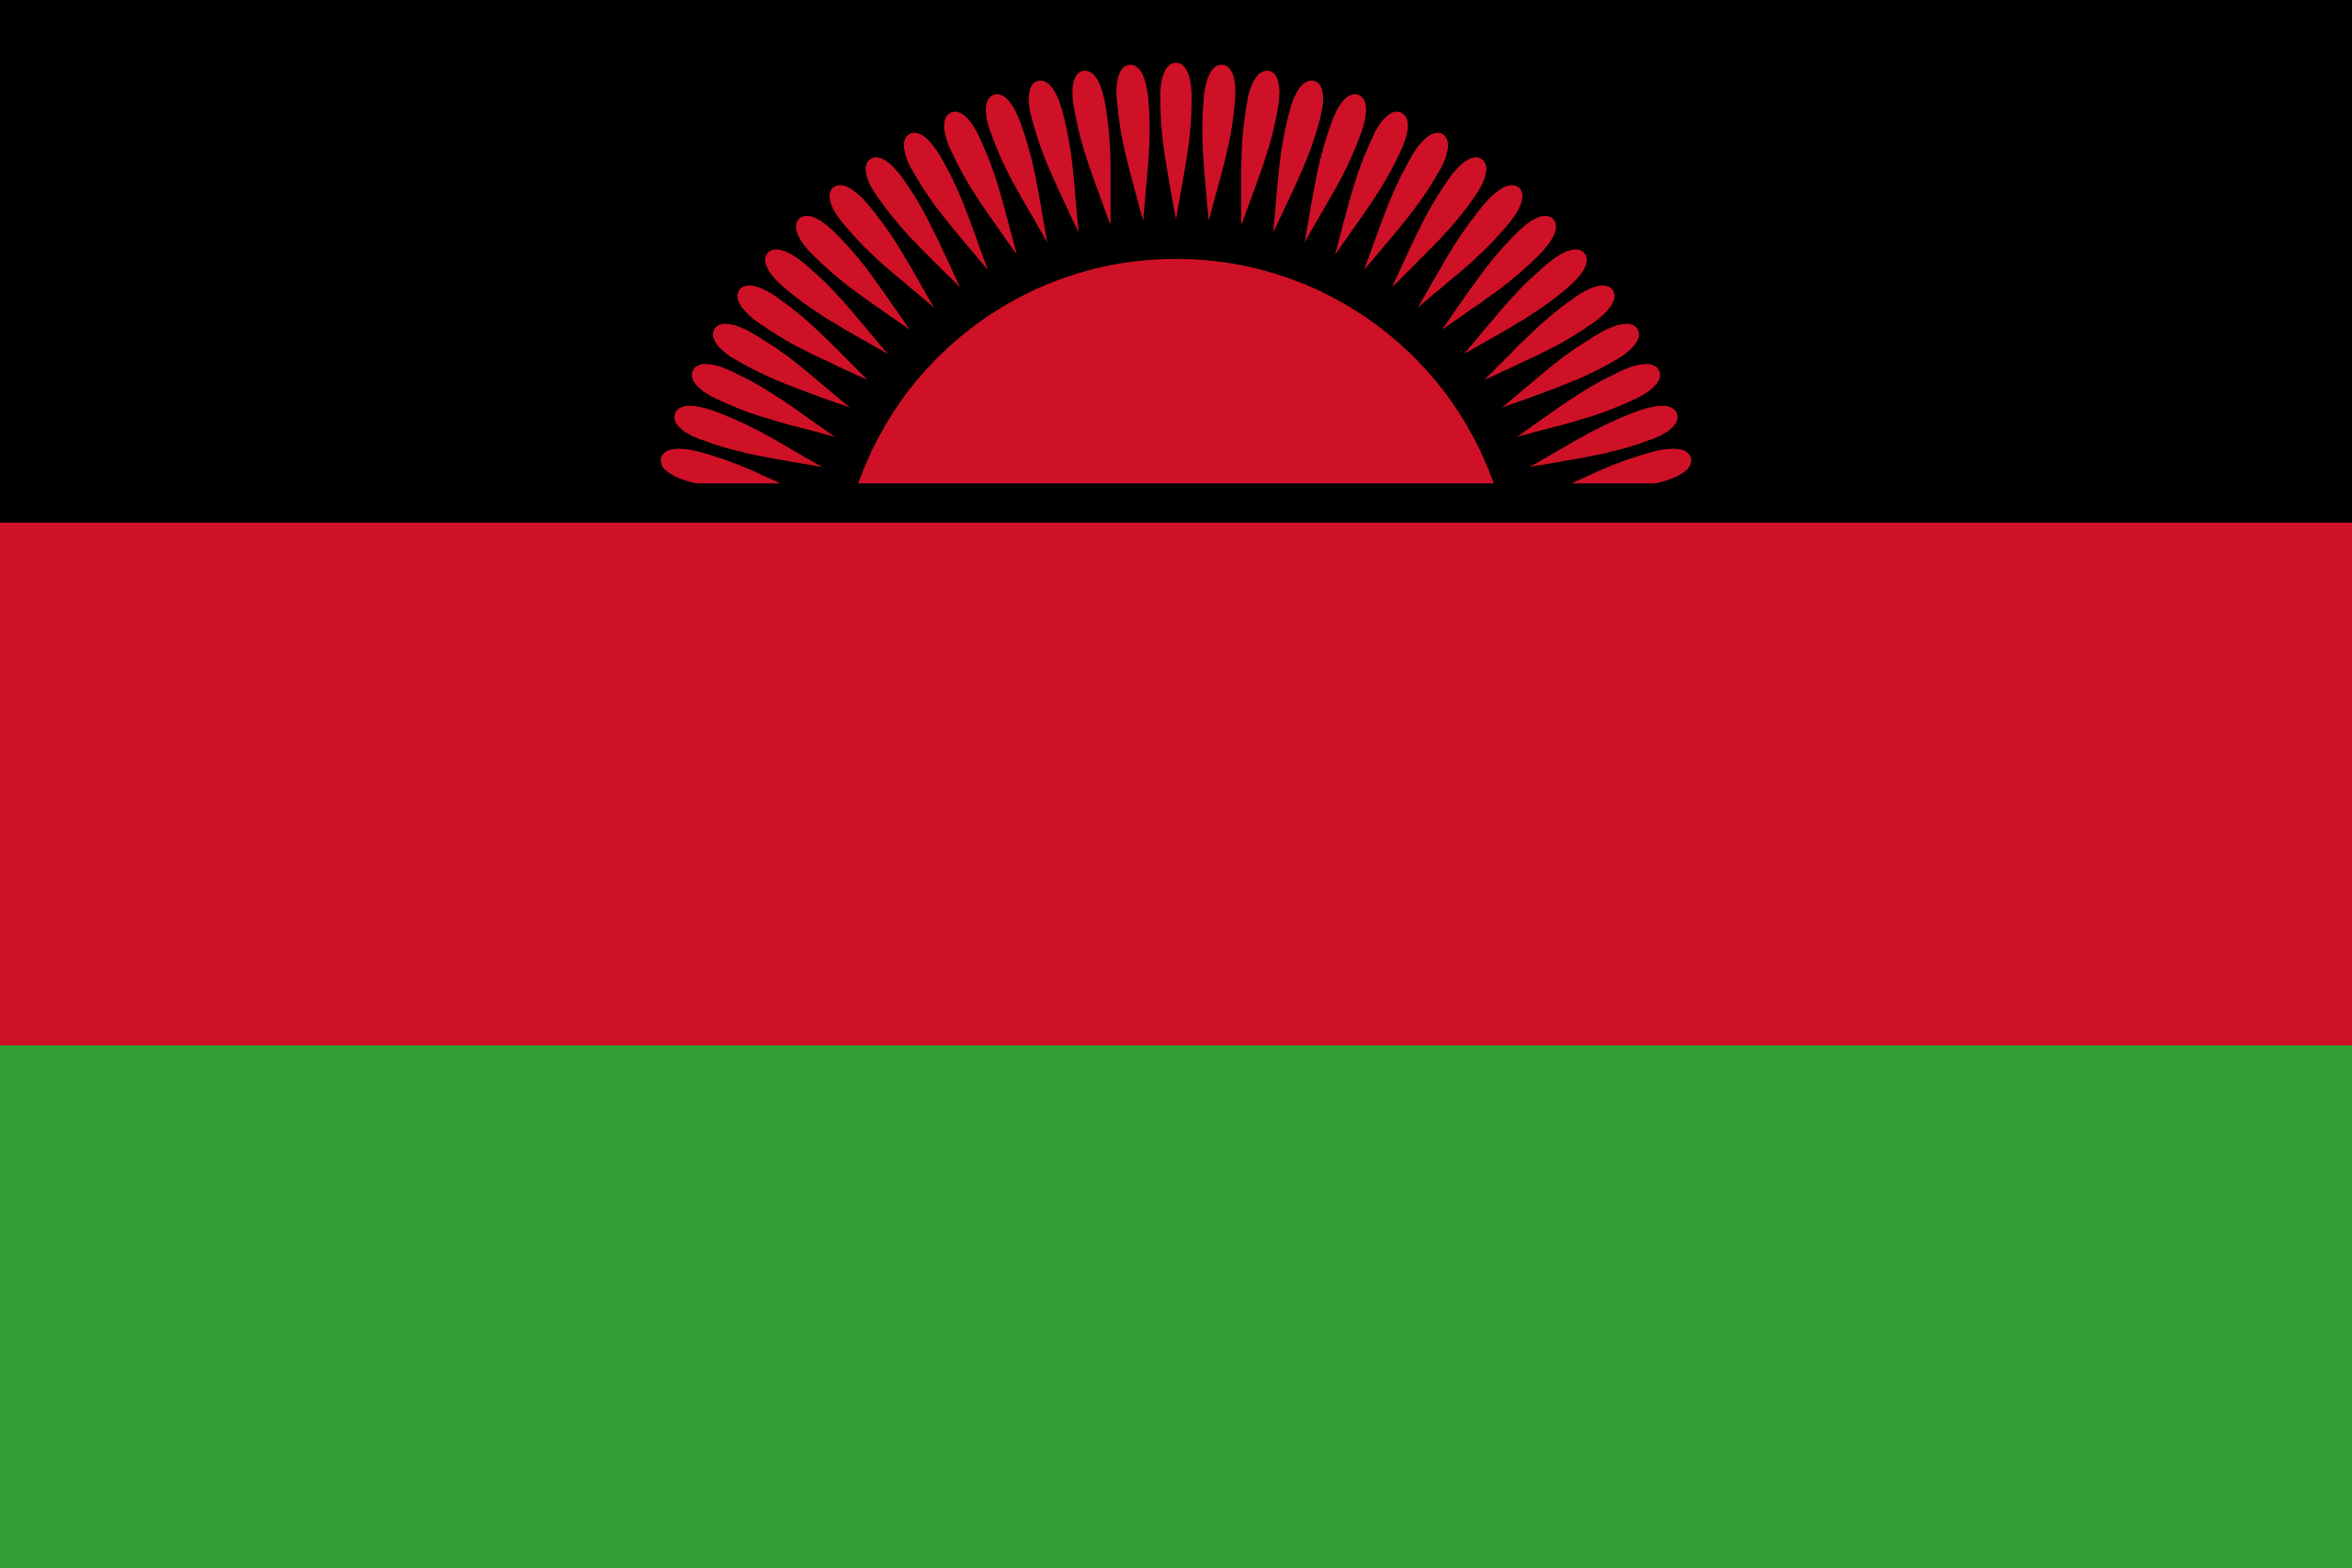

Malaysia


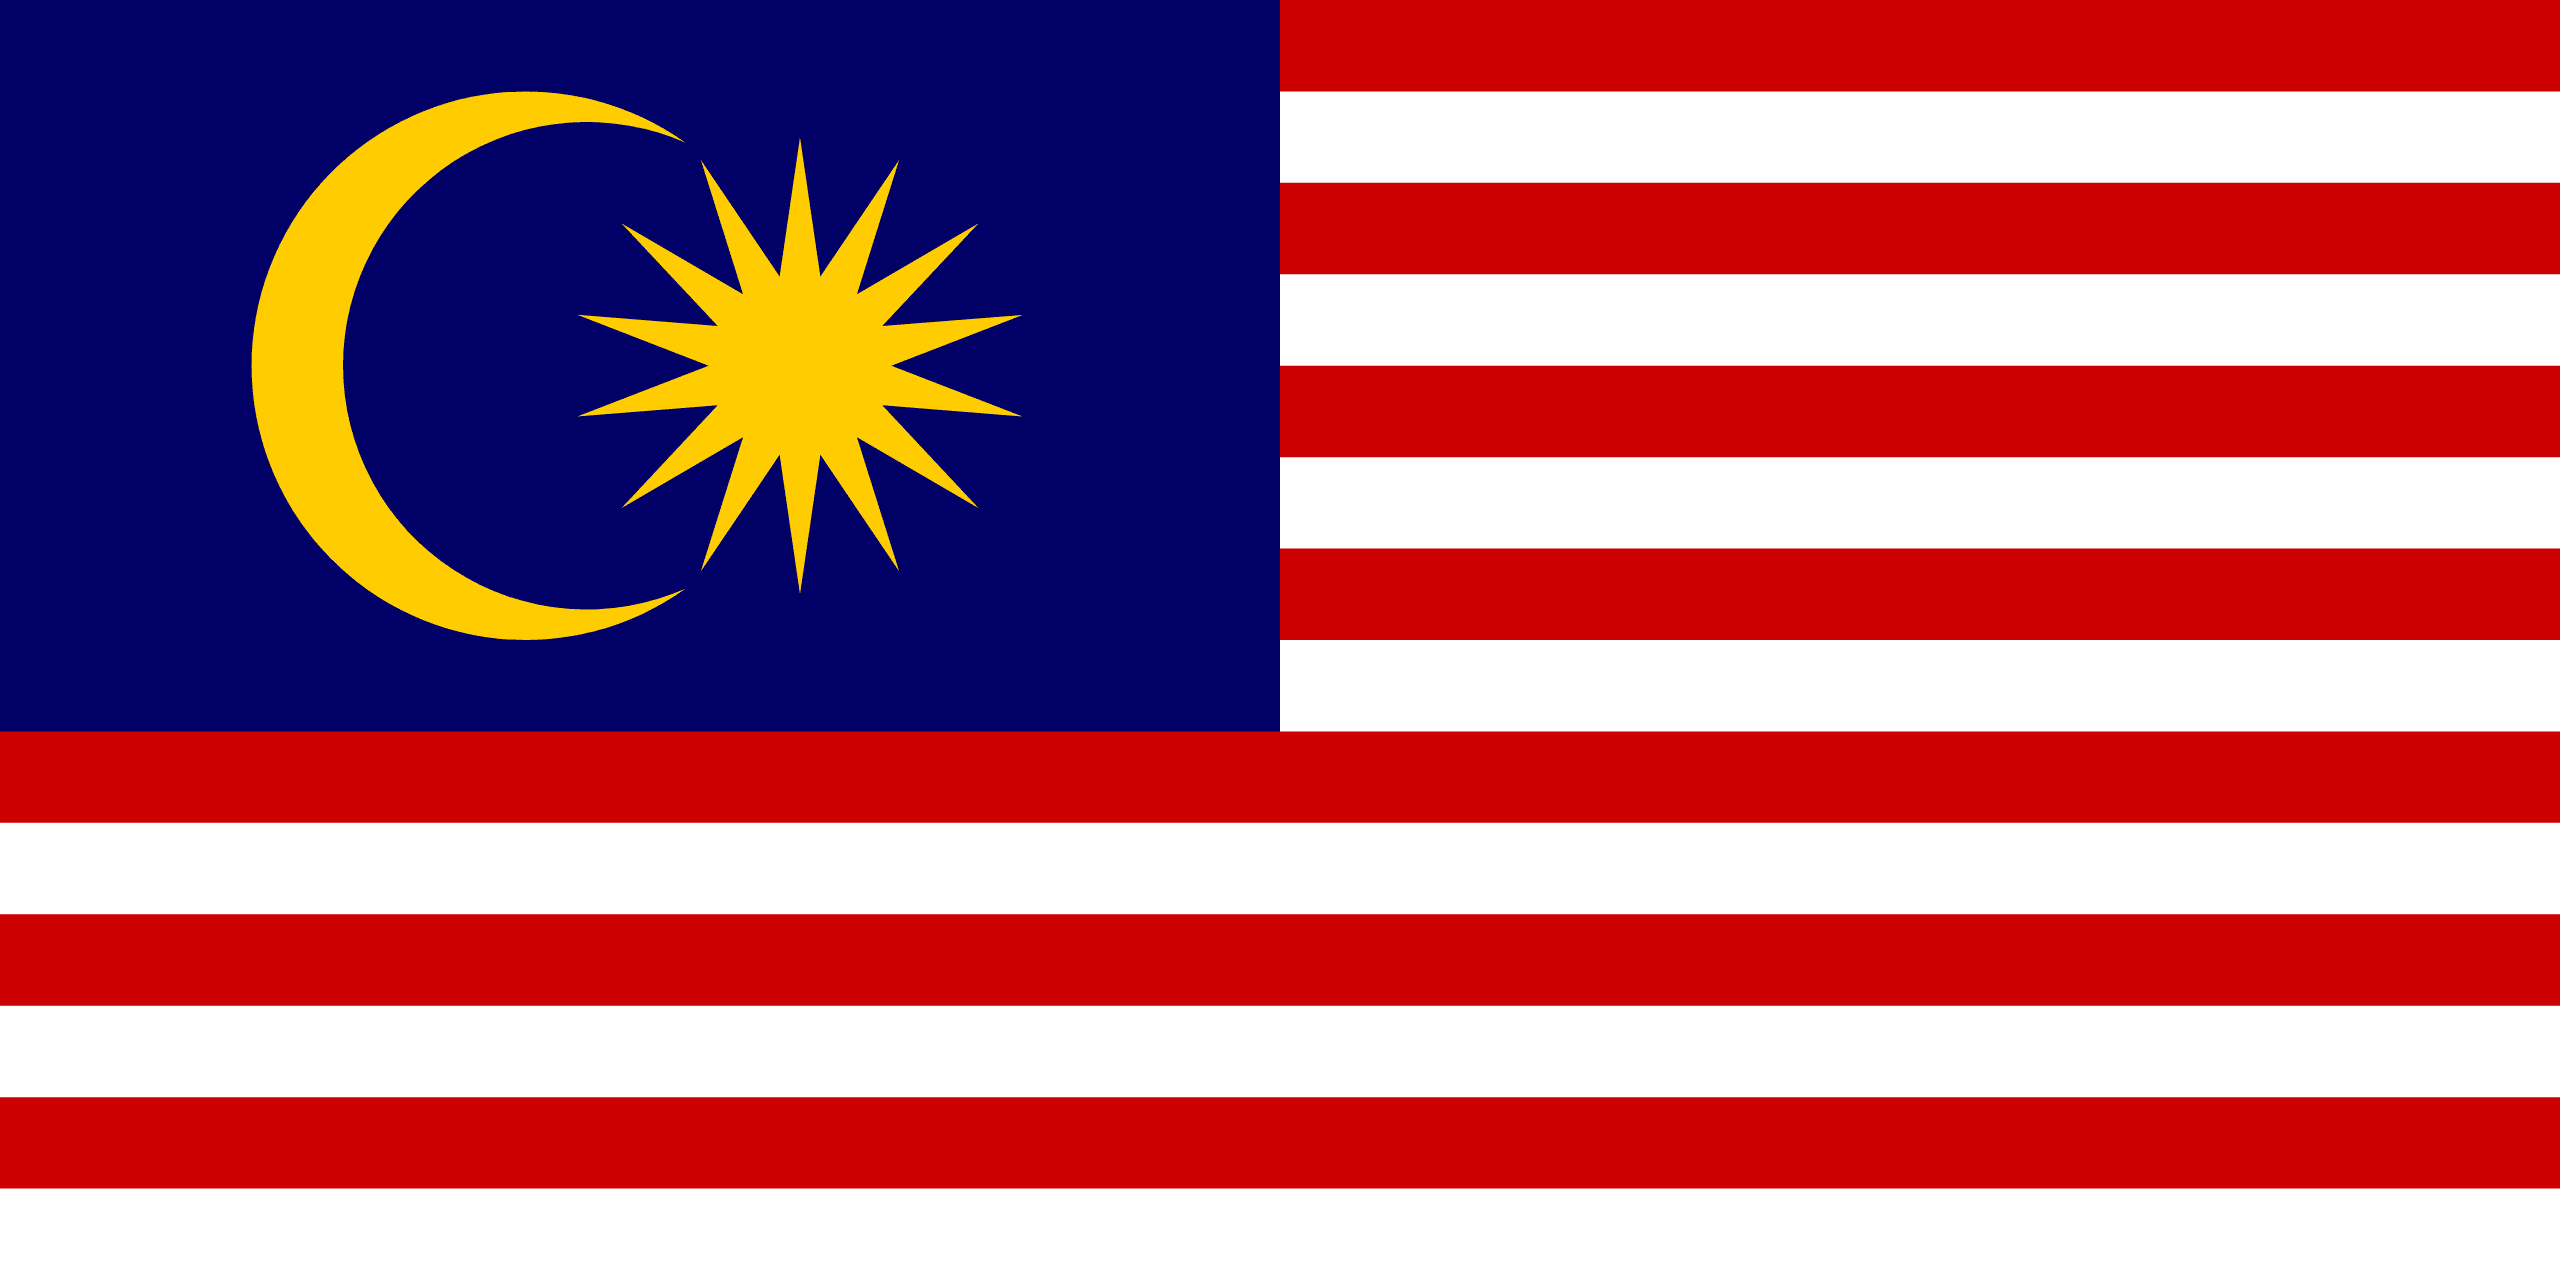

Maldives


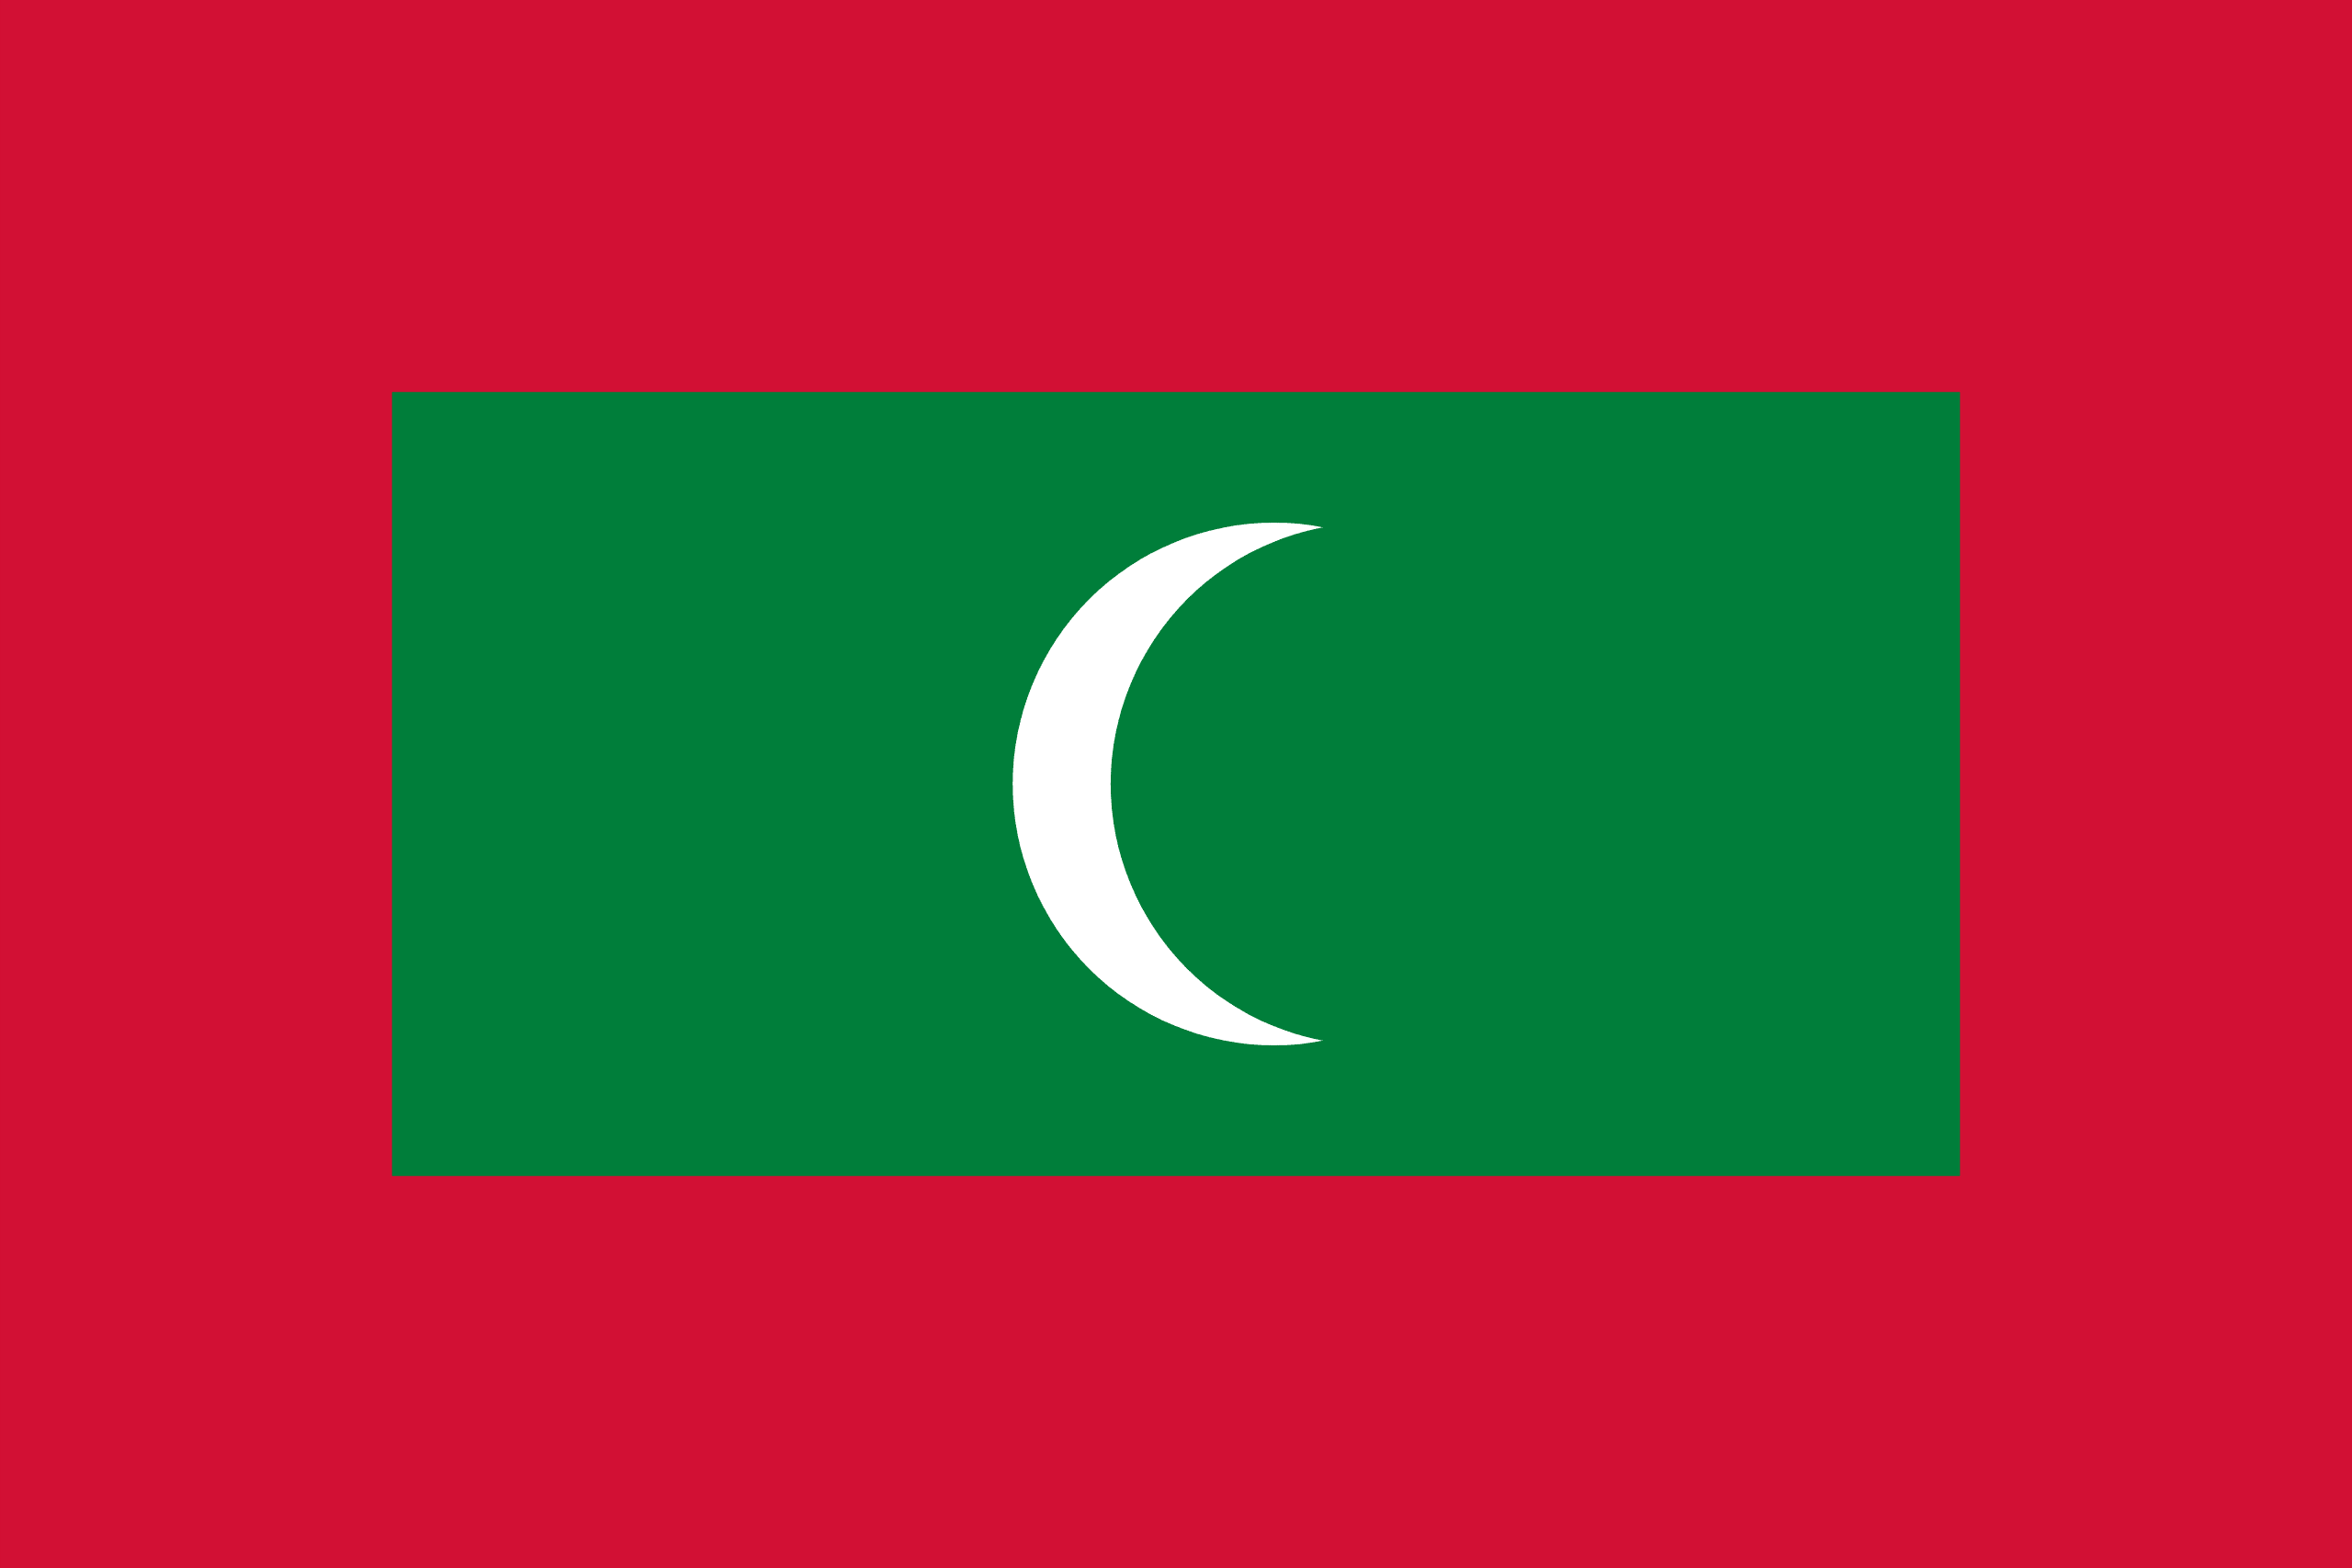

Mali


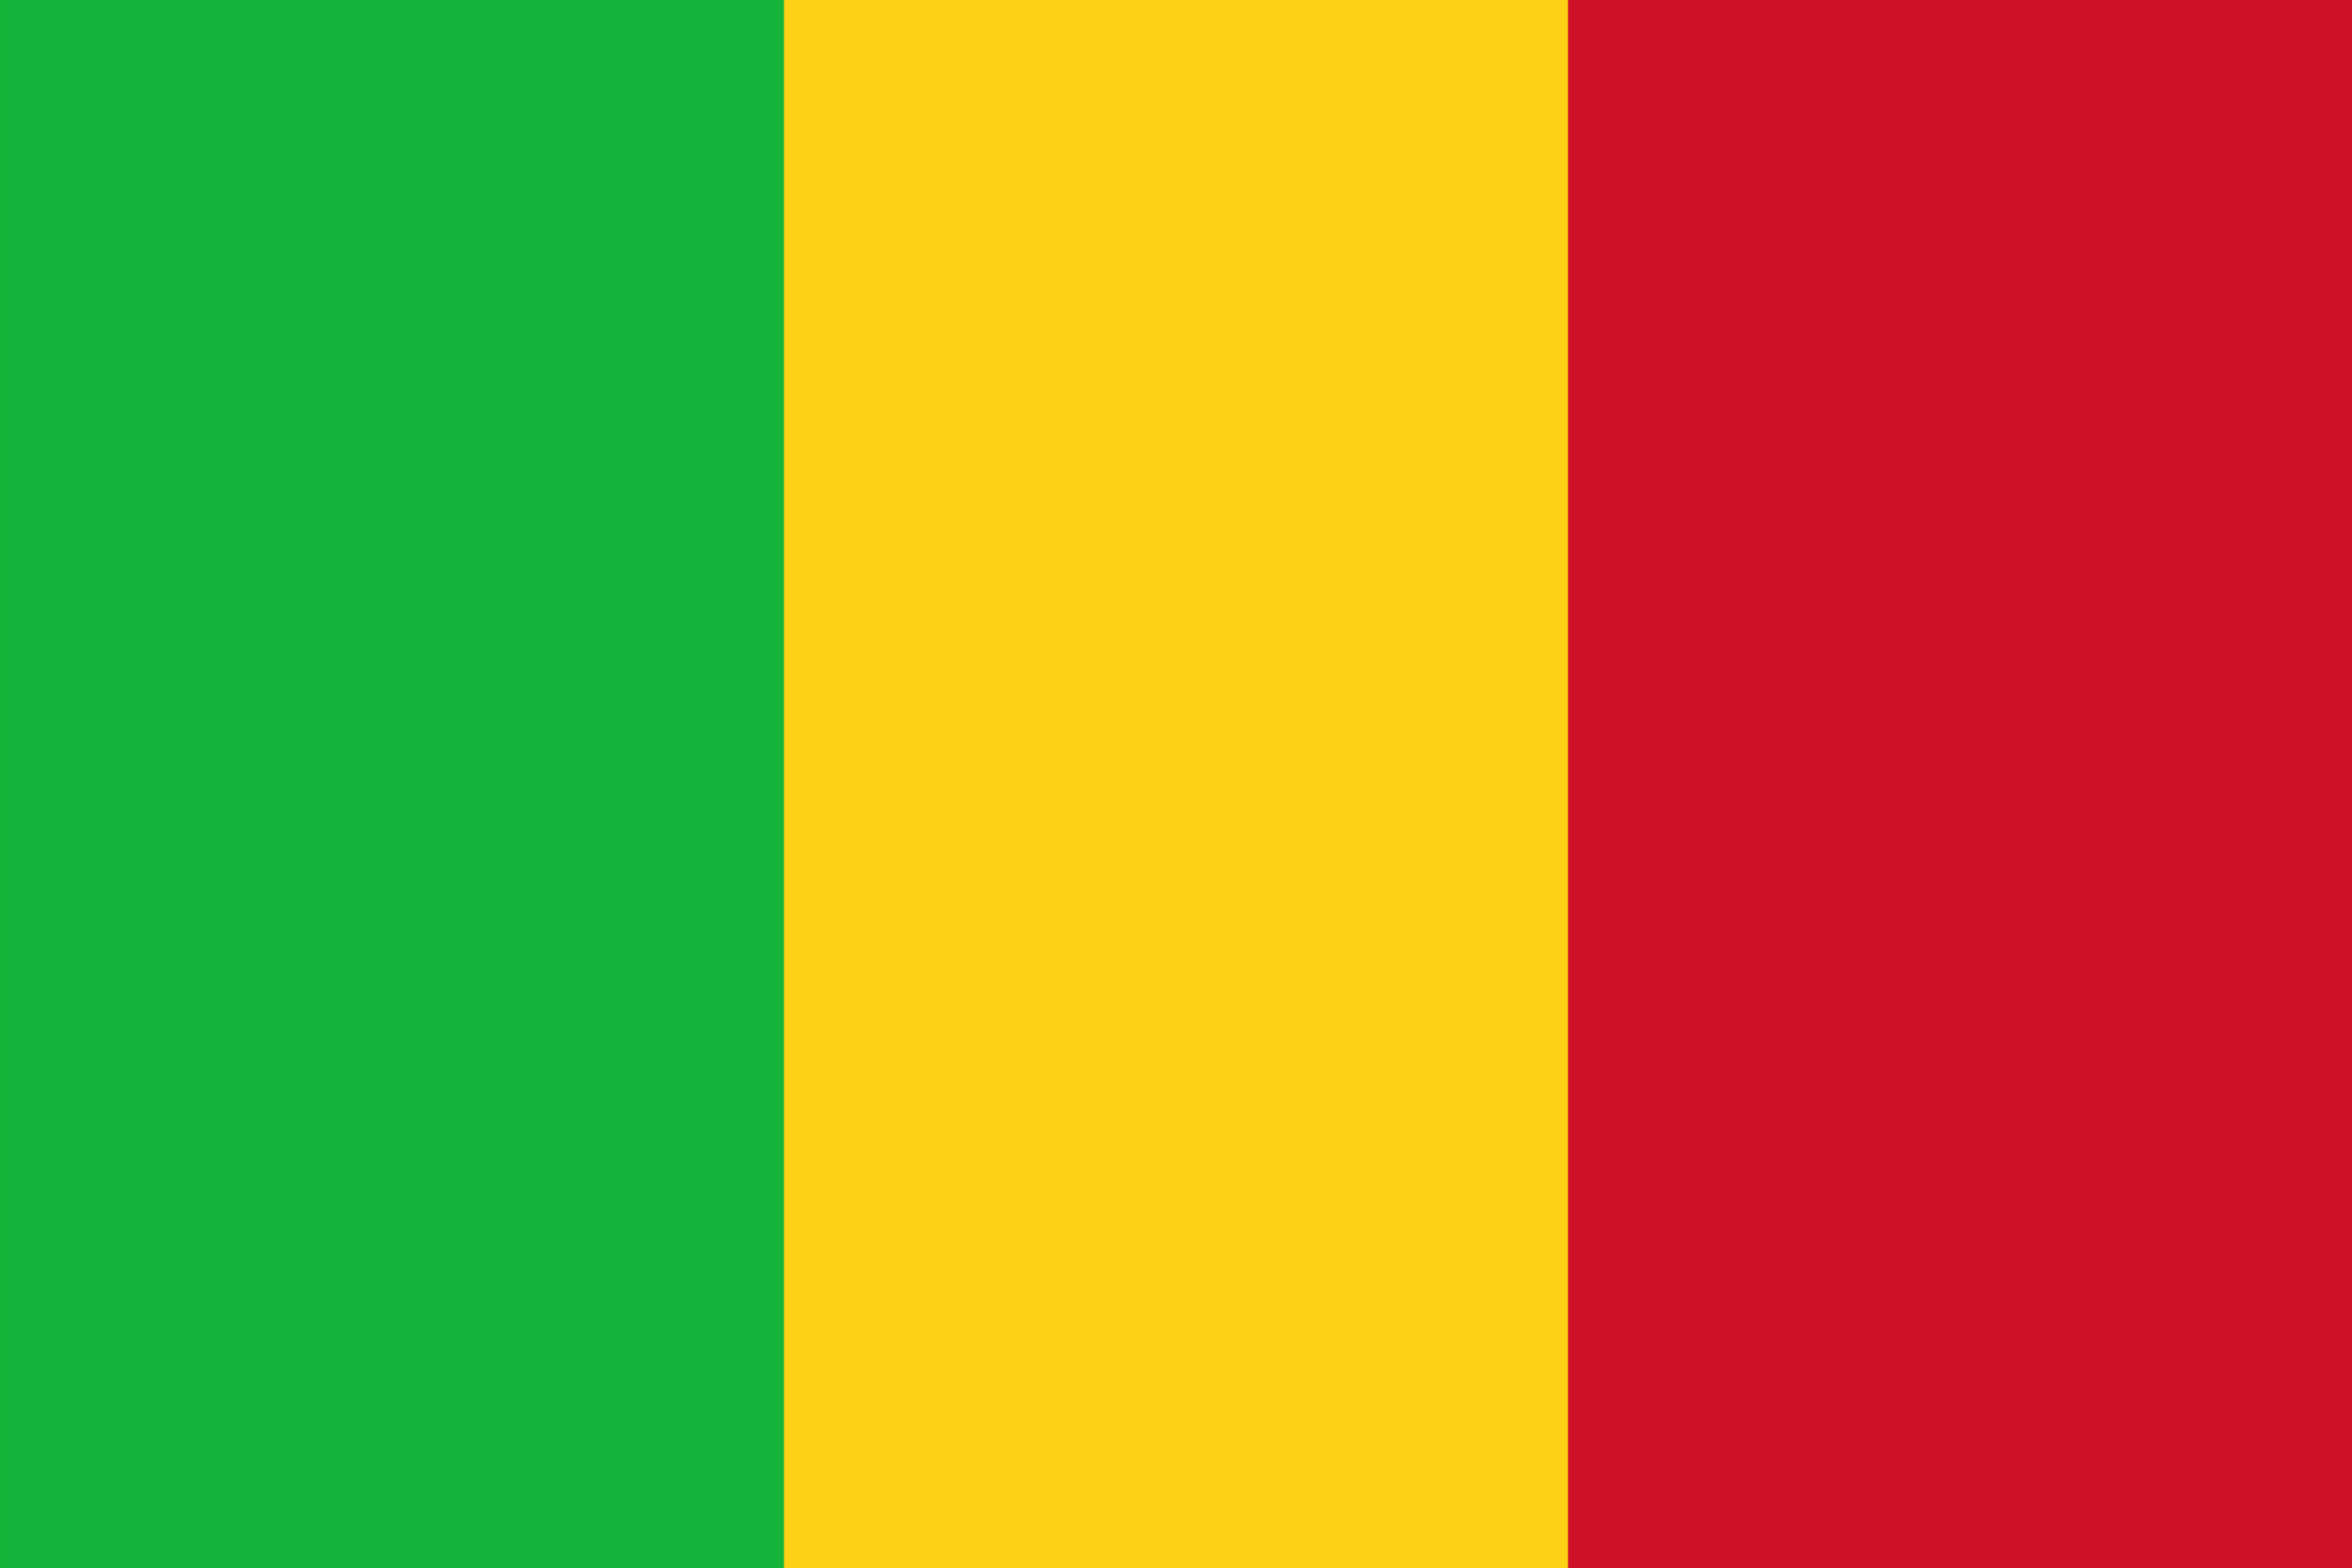

Malta


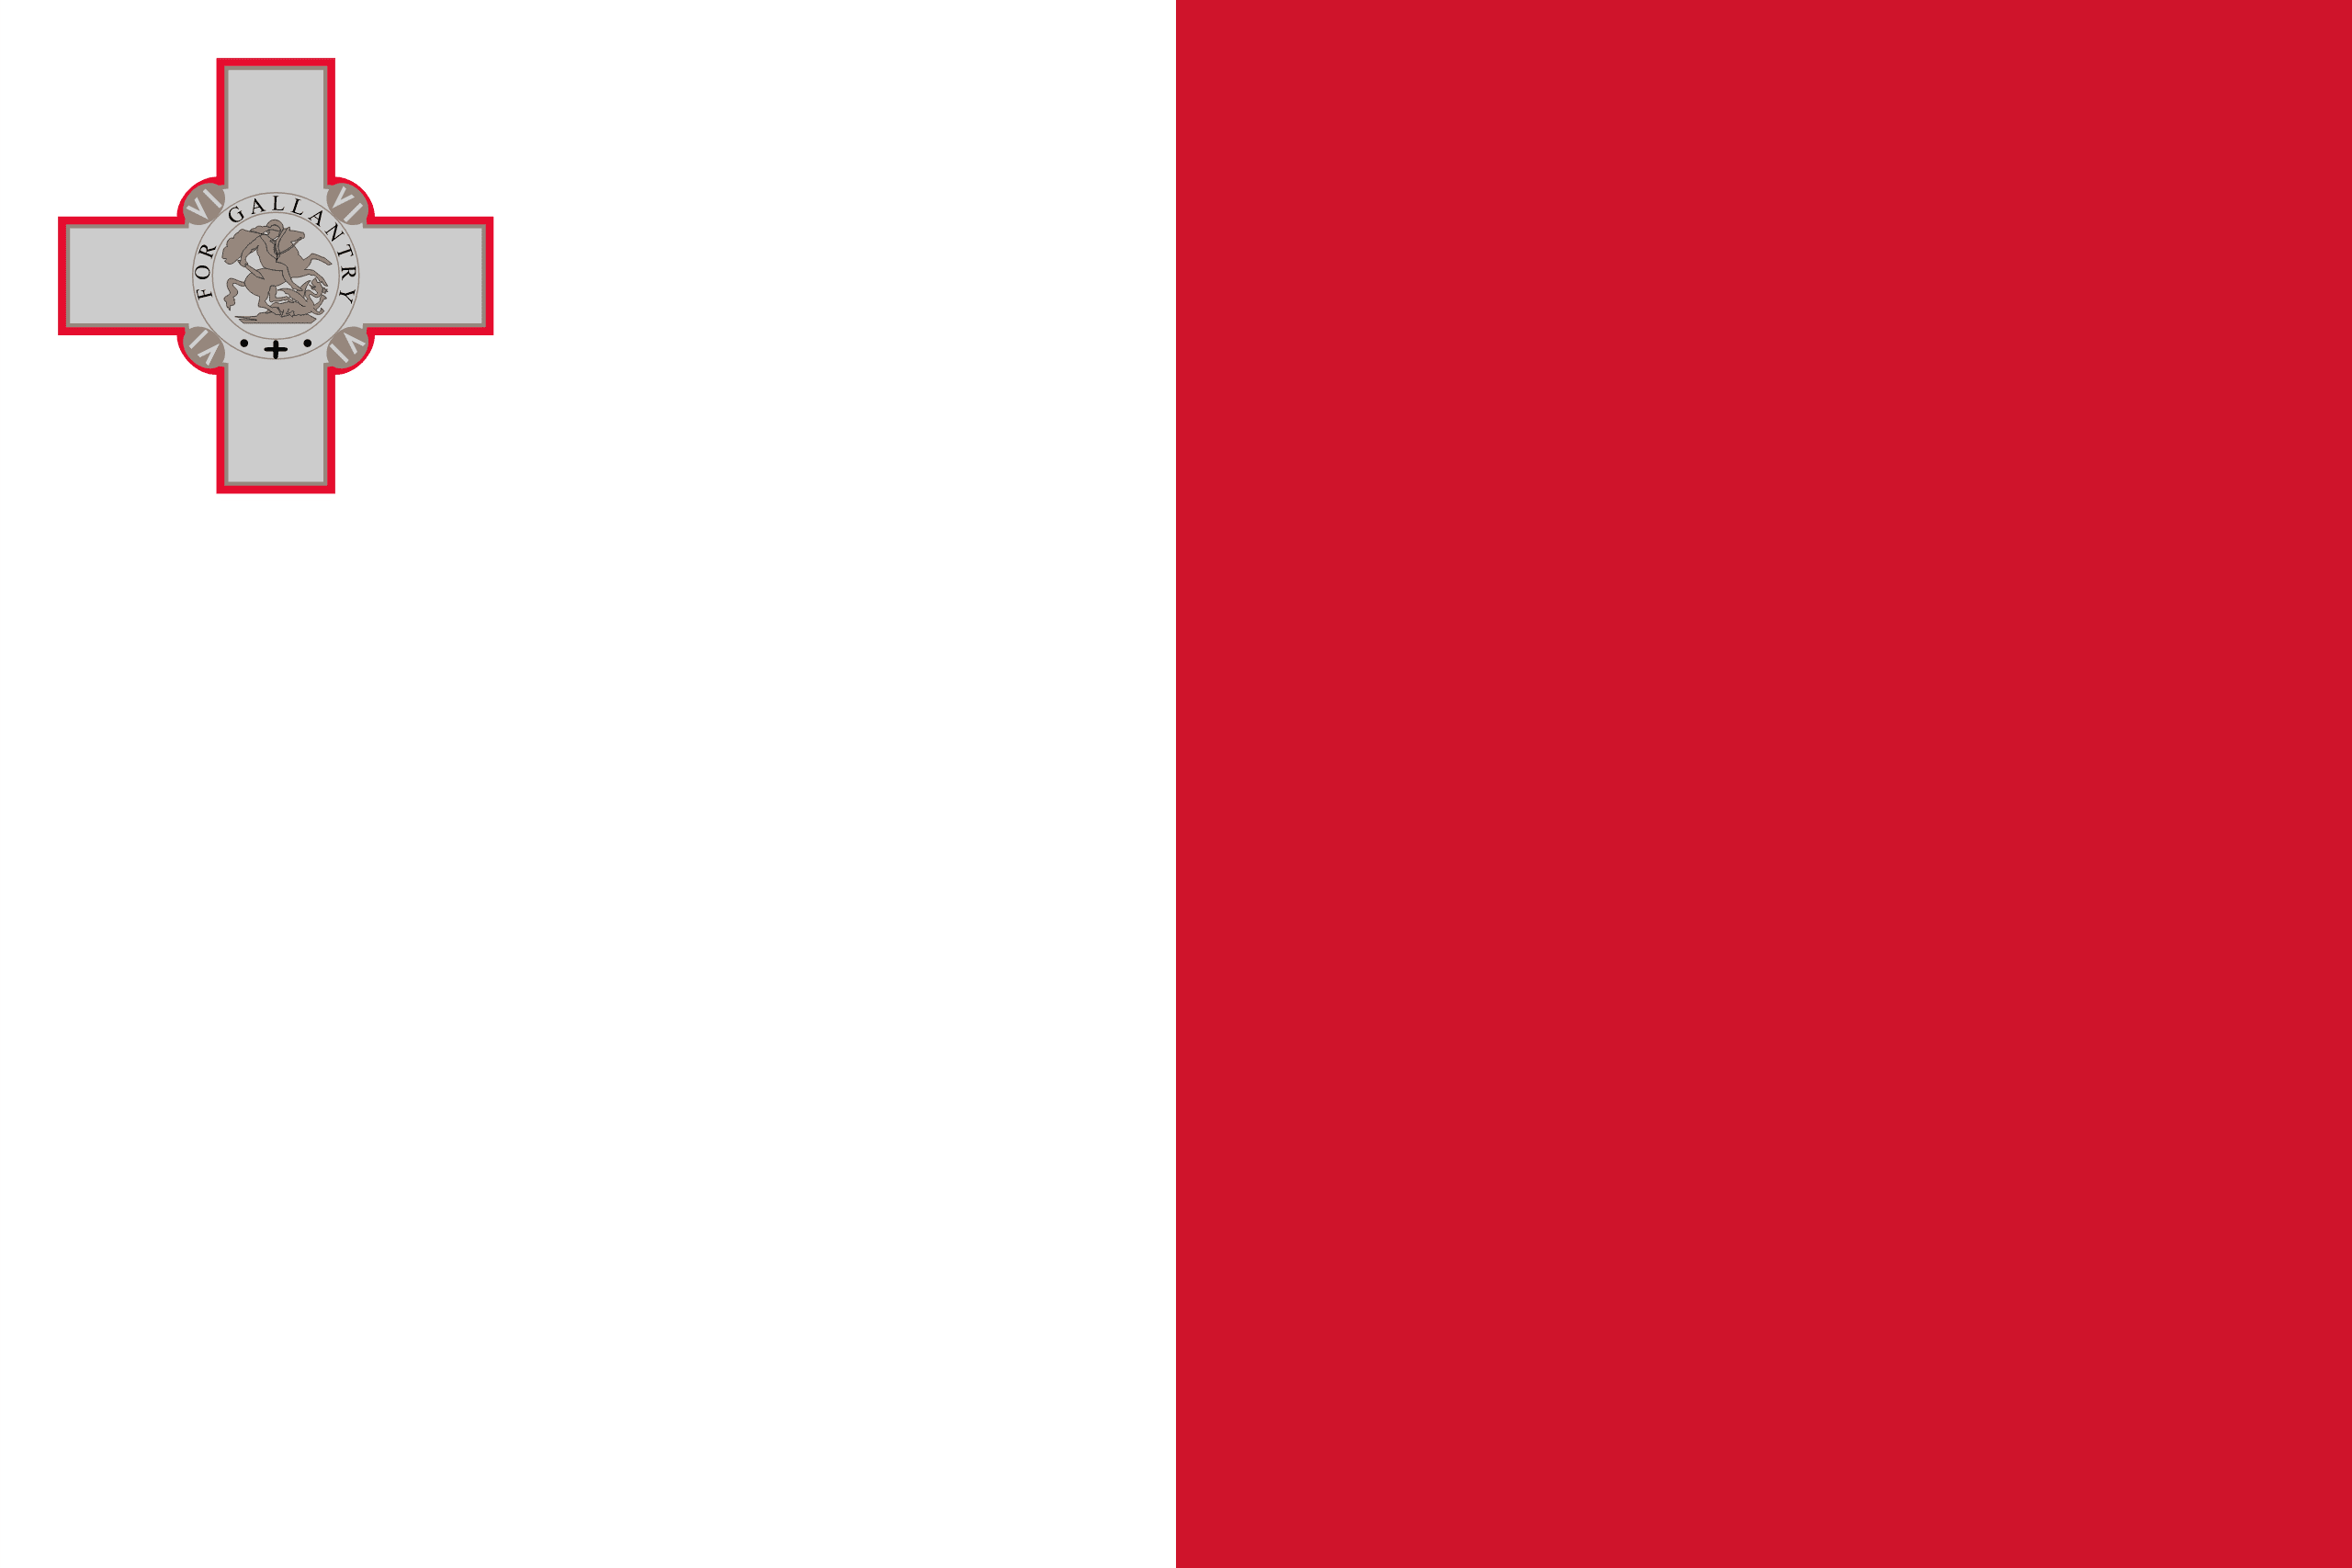

Marshall Islands


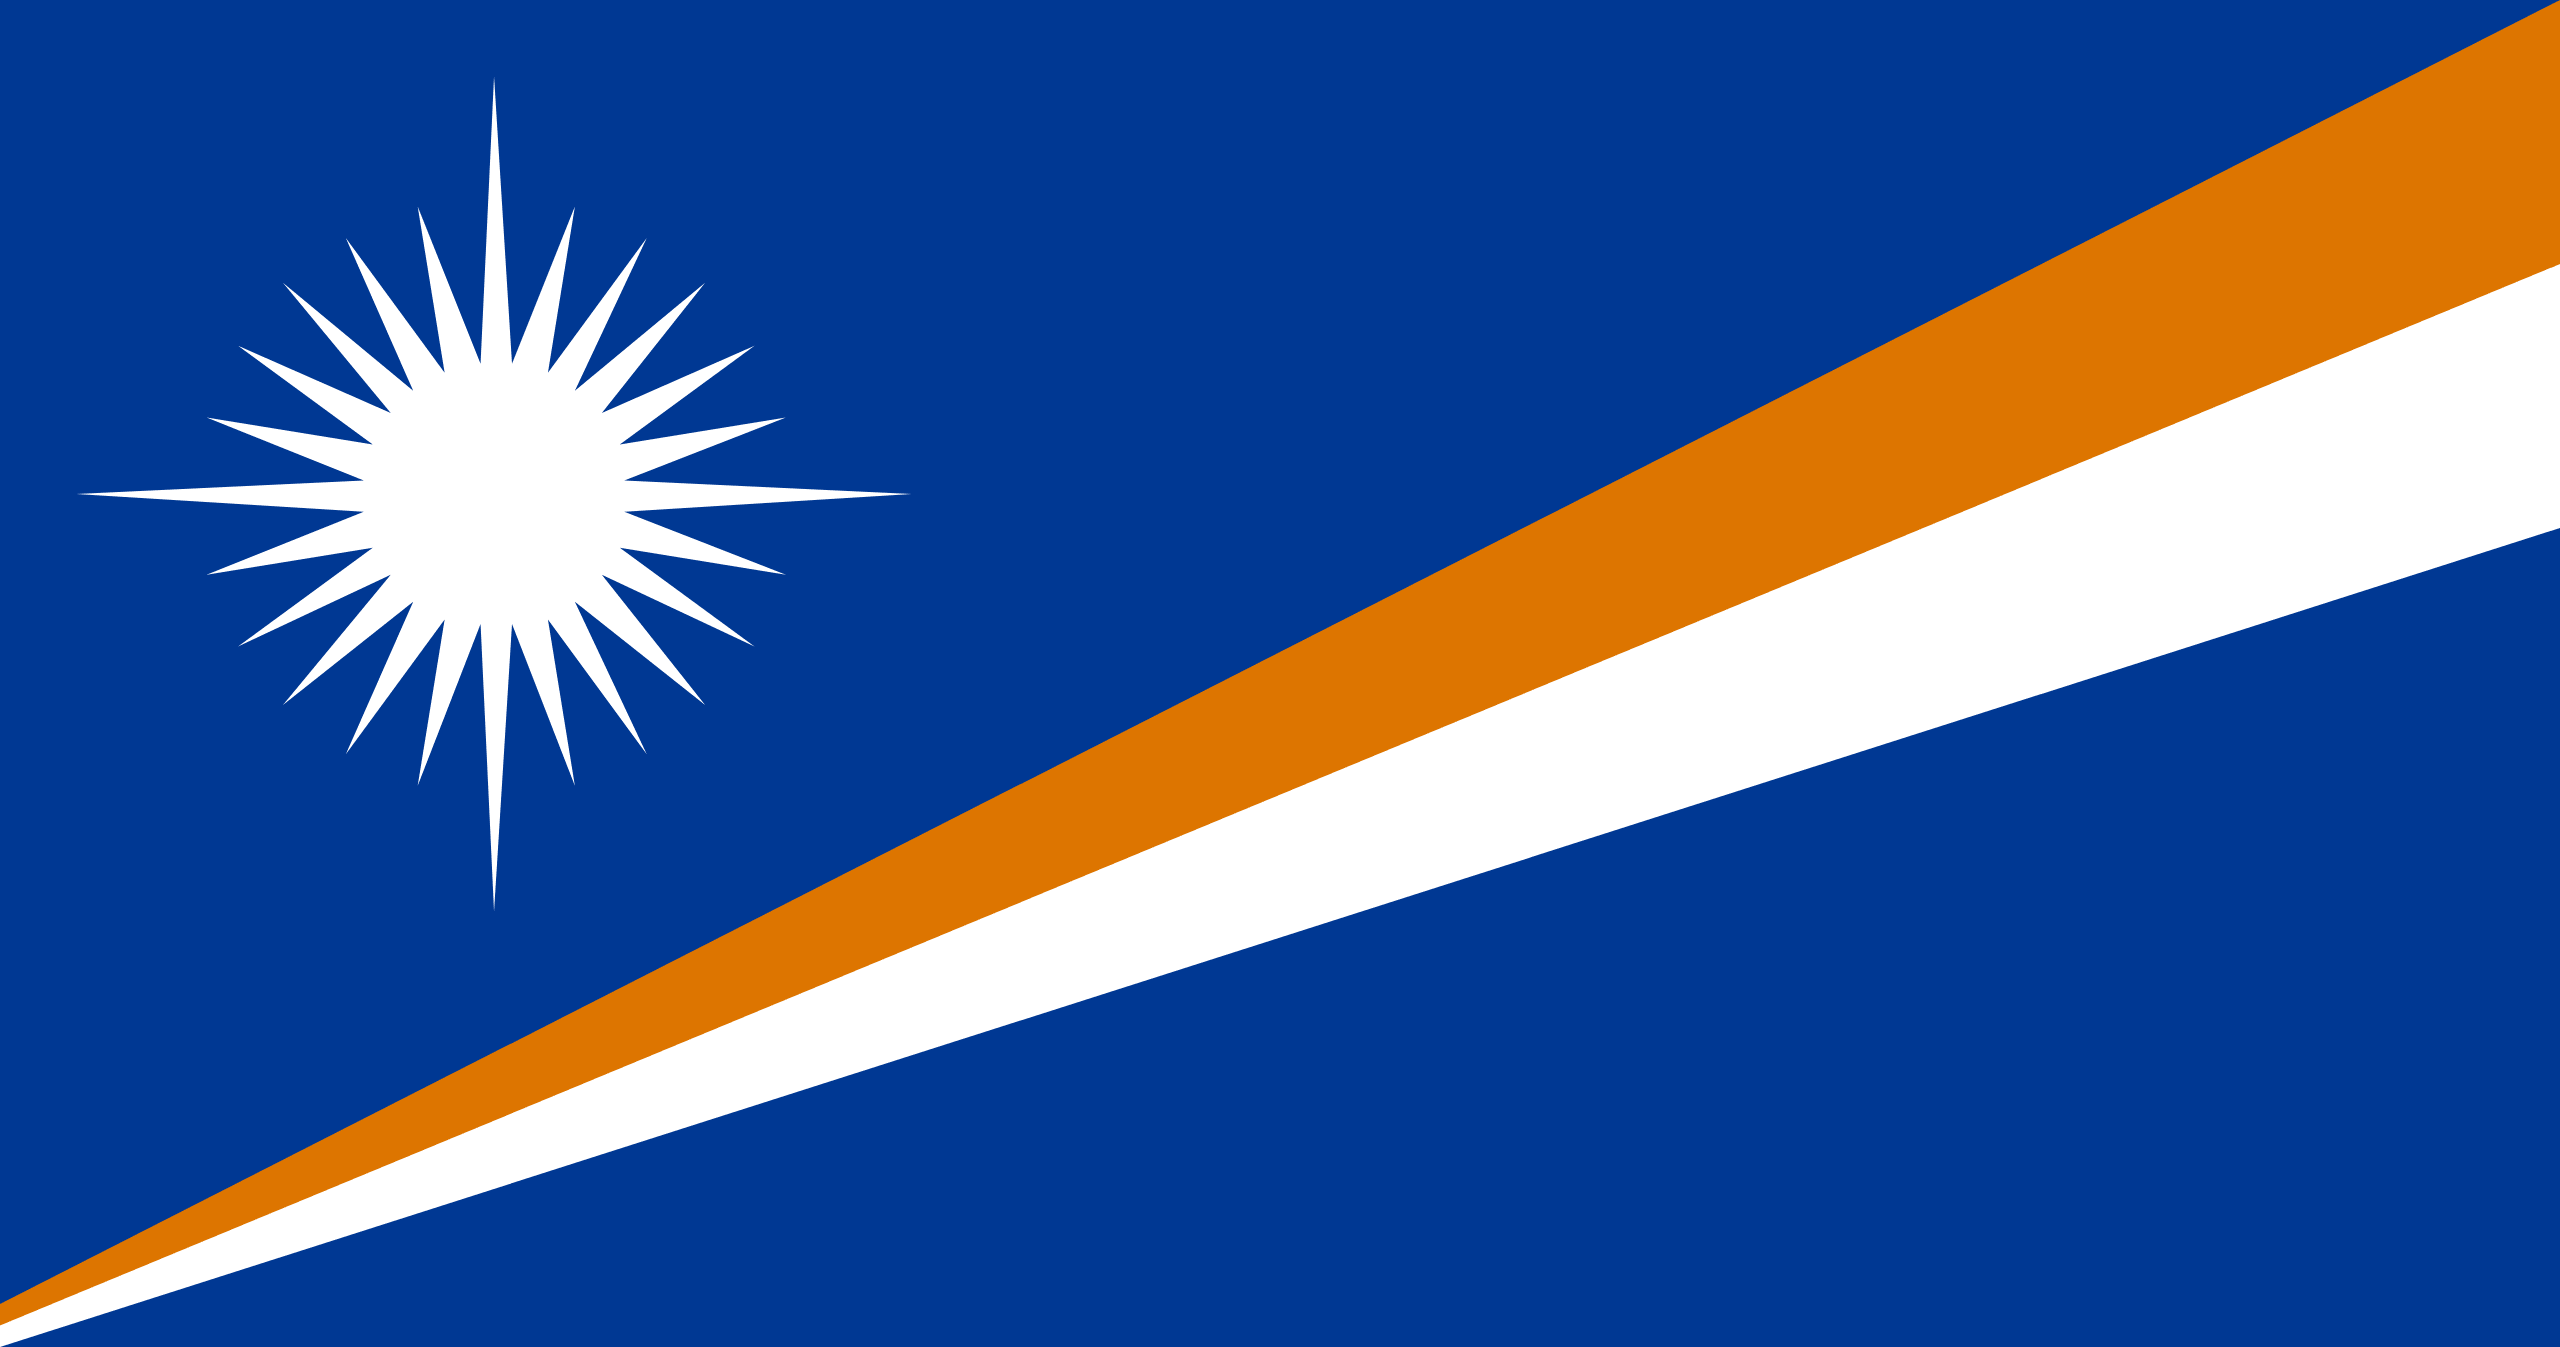

Martinique


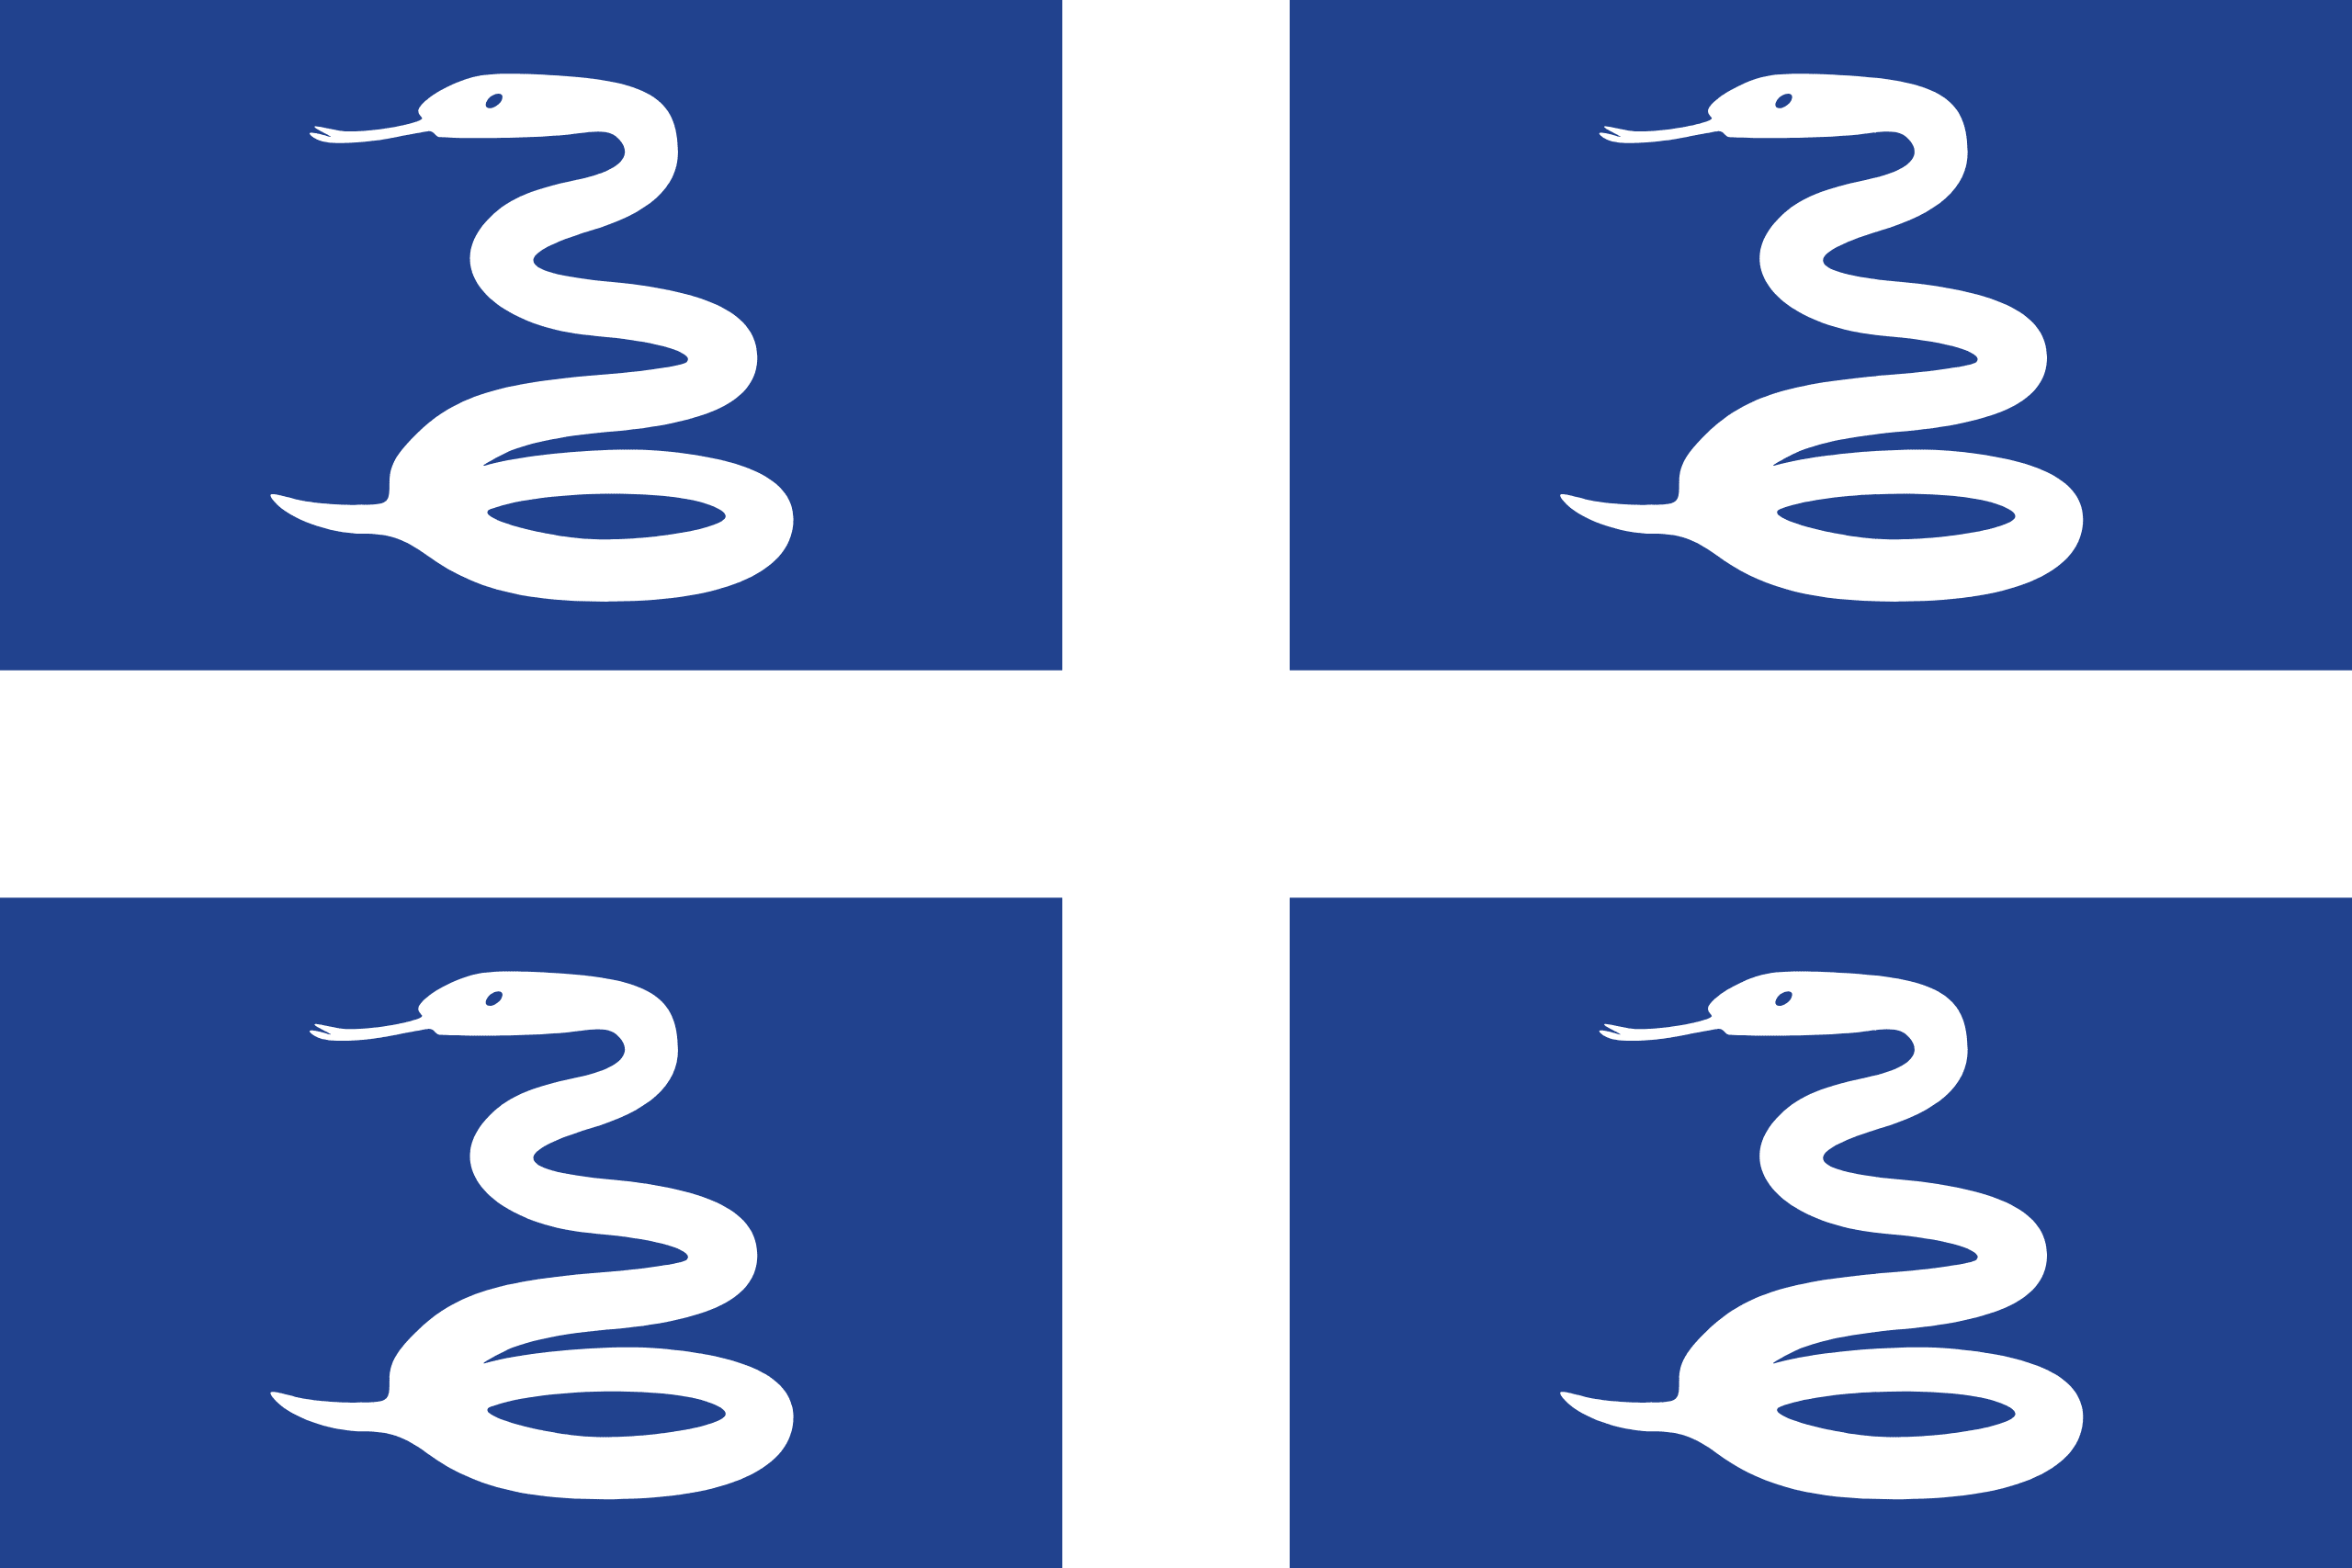

Mauritania


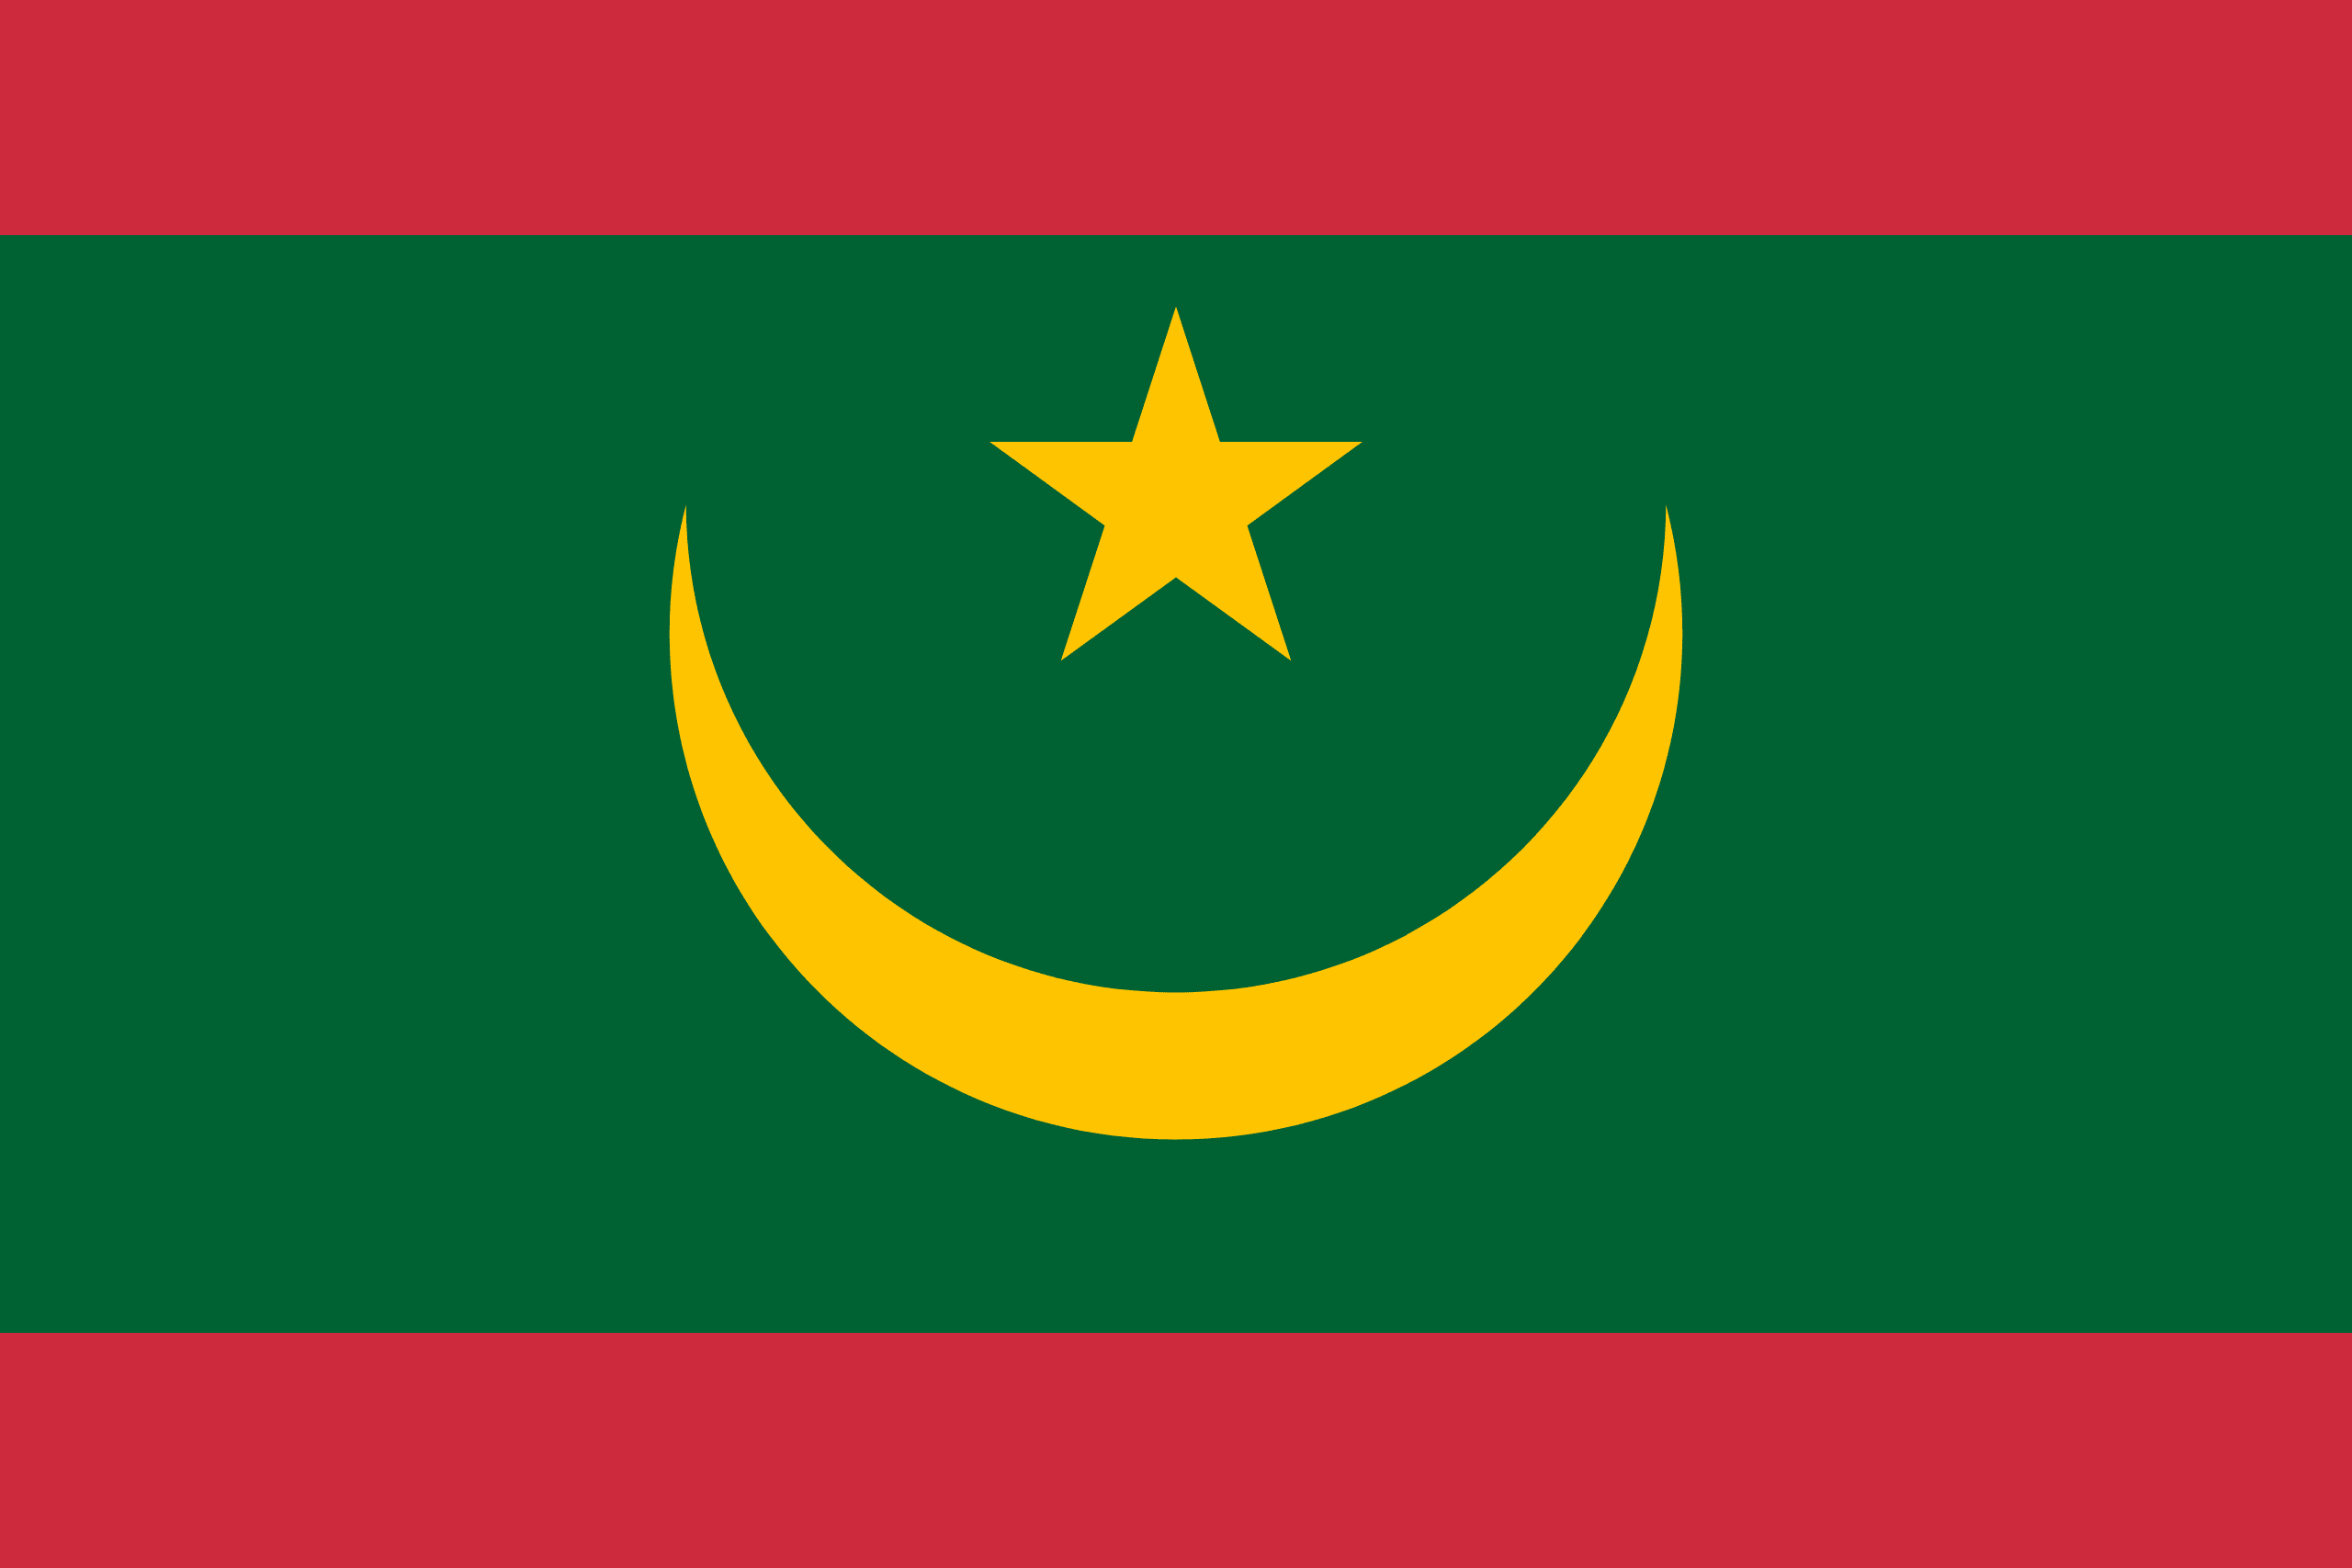

Mauritius


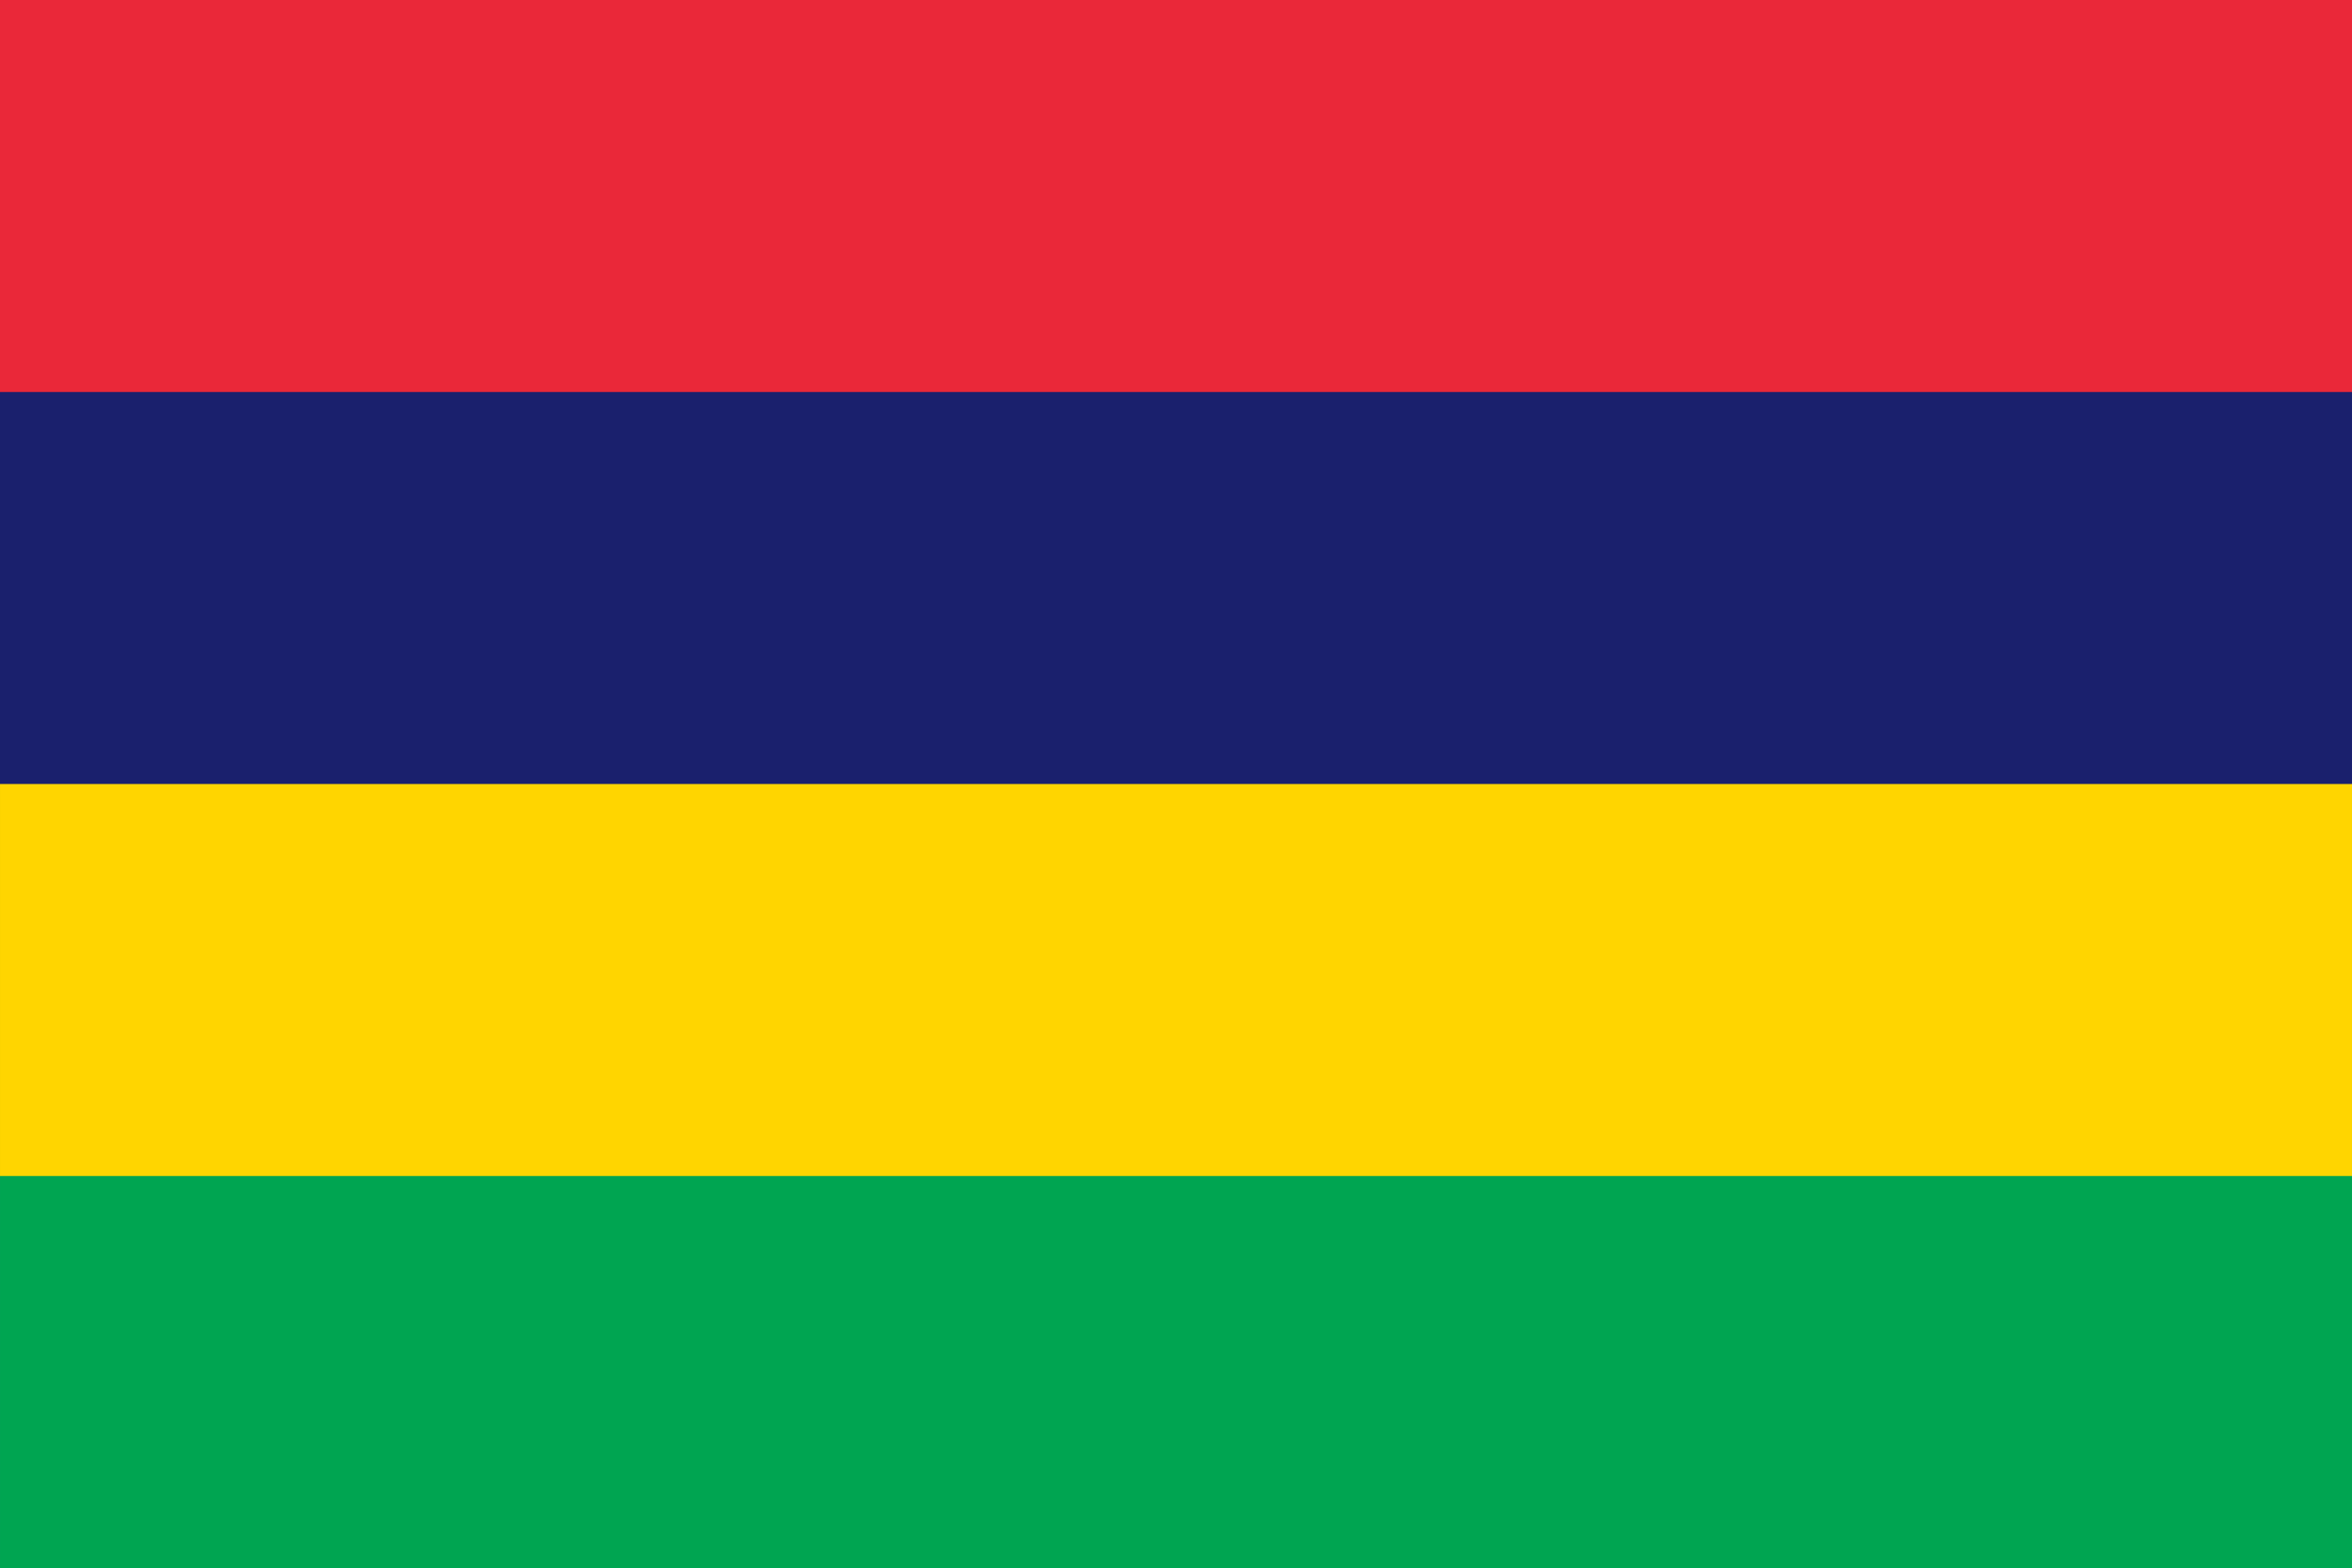

Mayotte


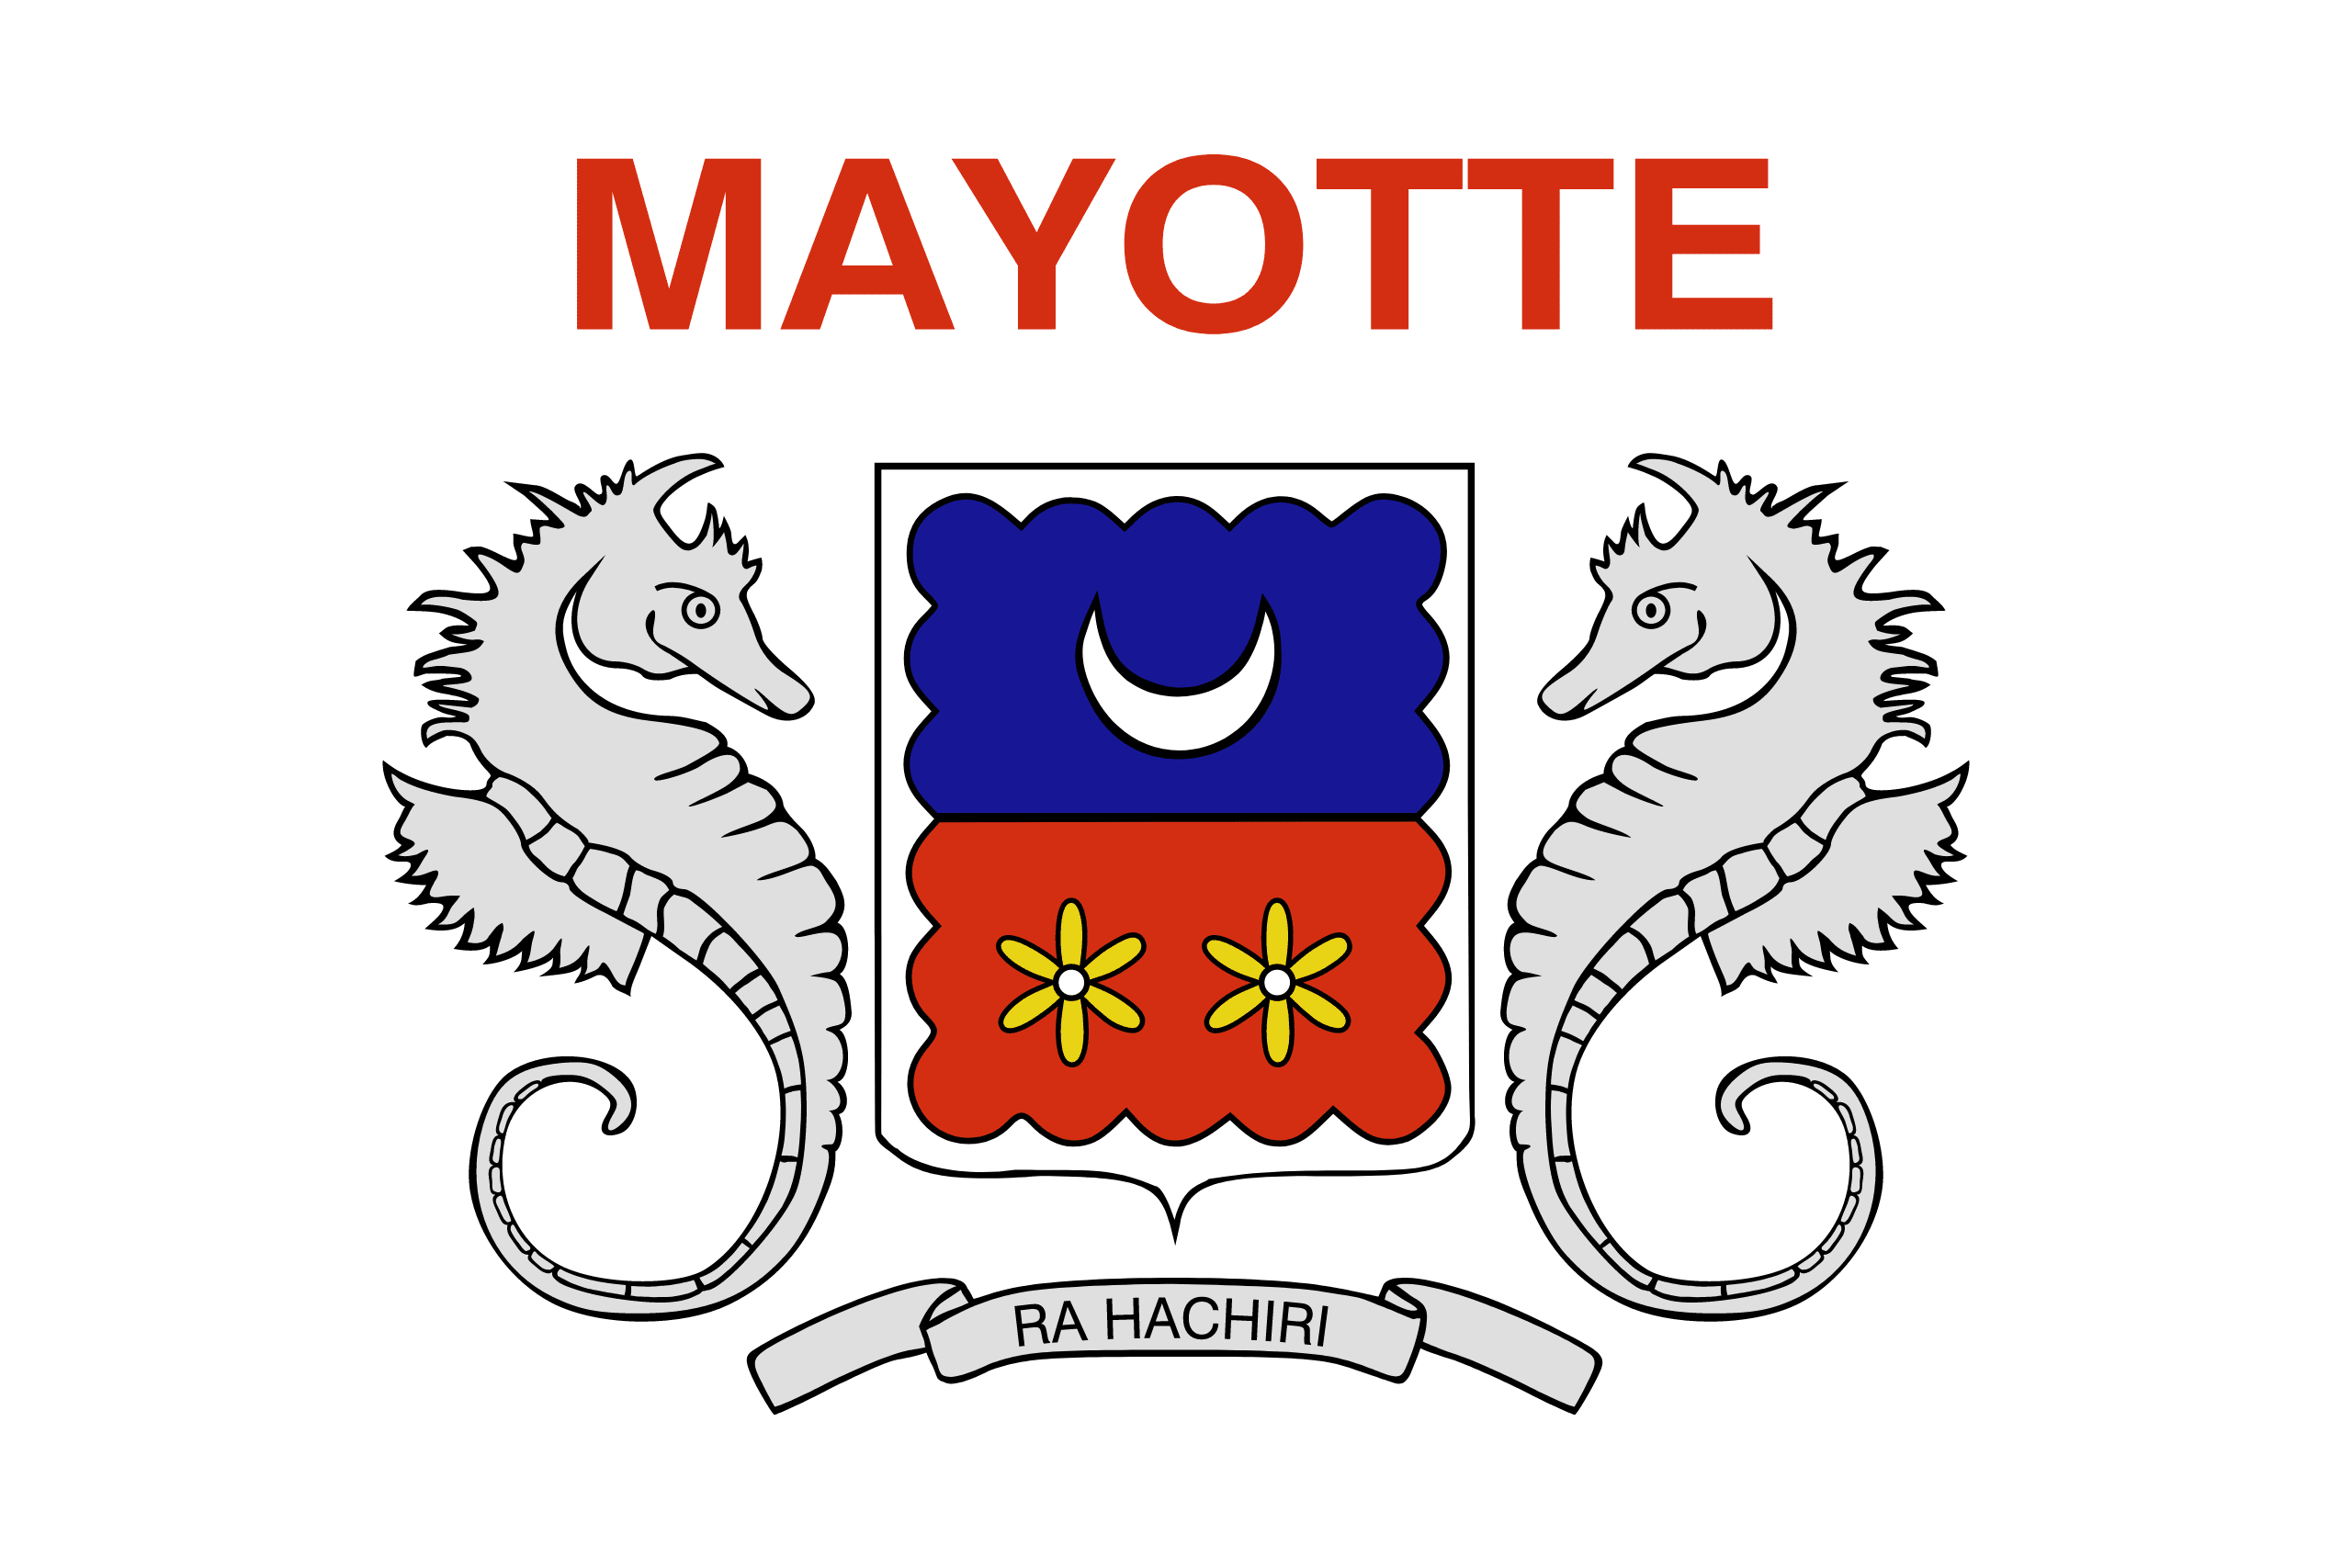

Mexico


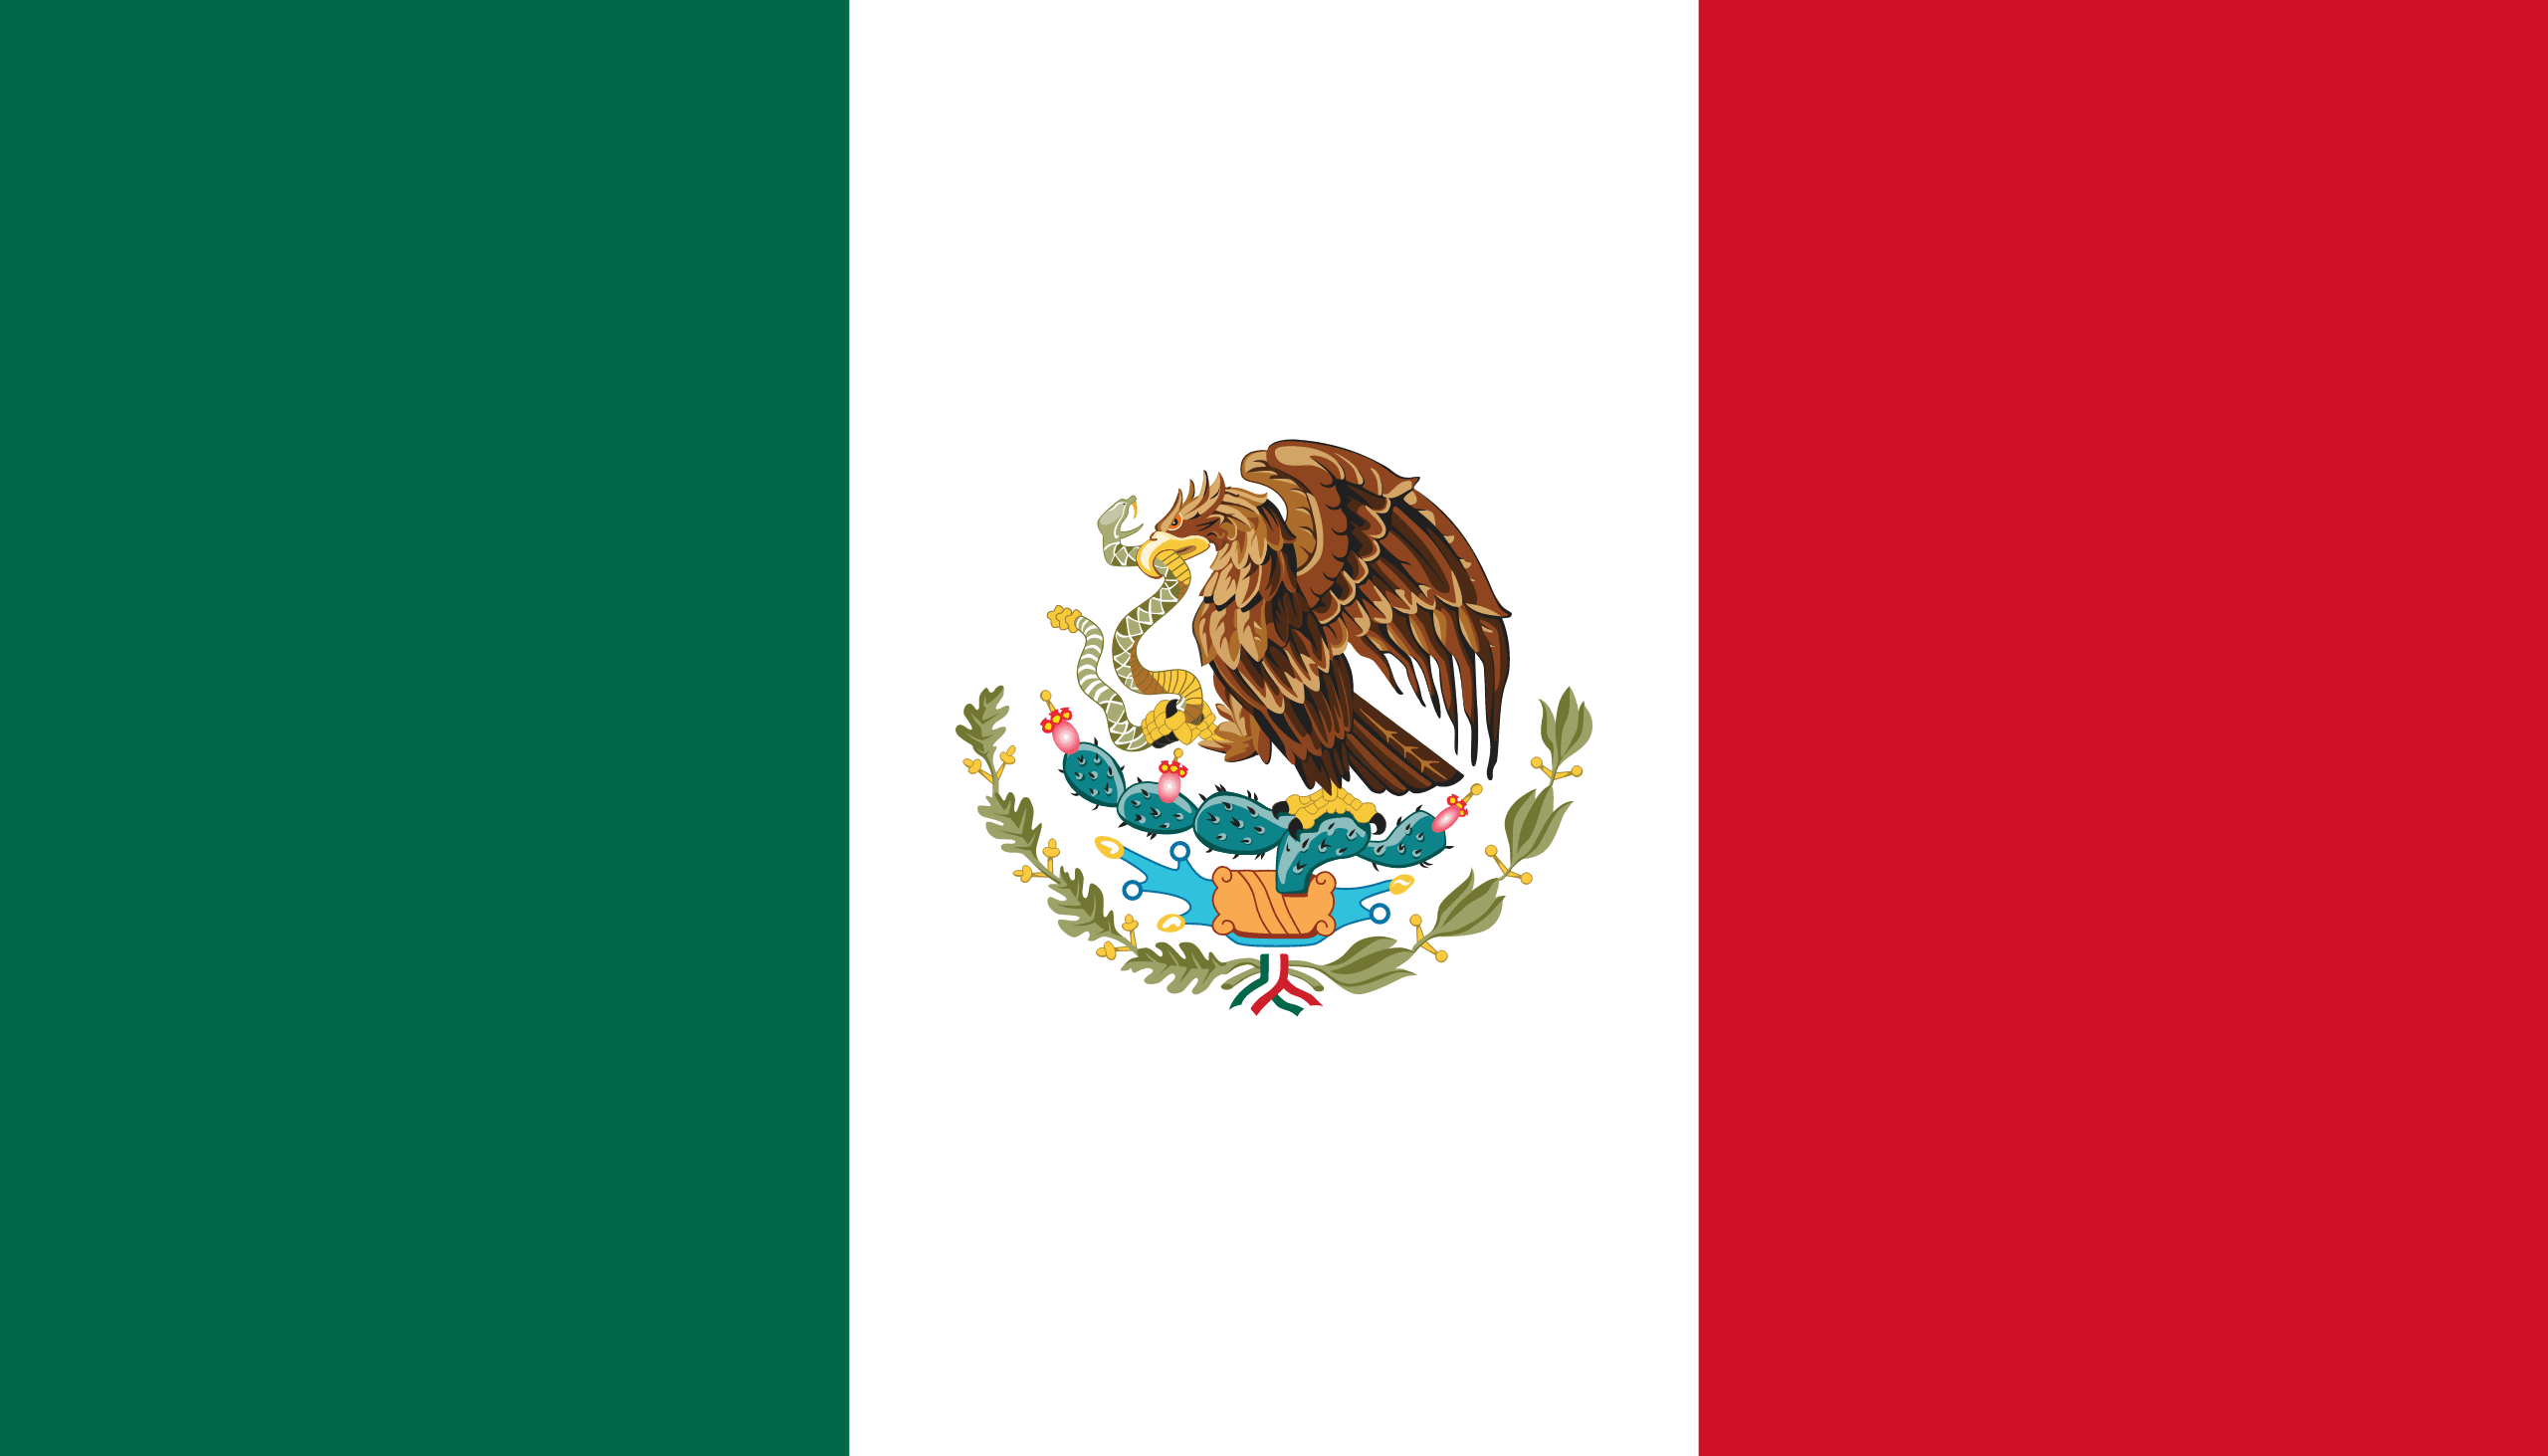

Micronesia


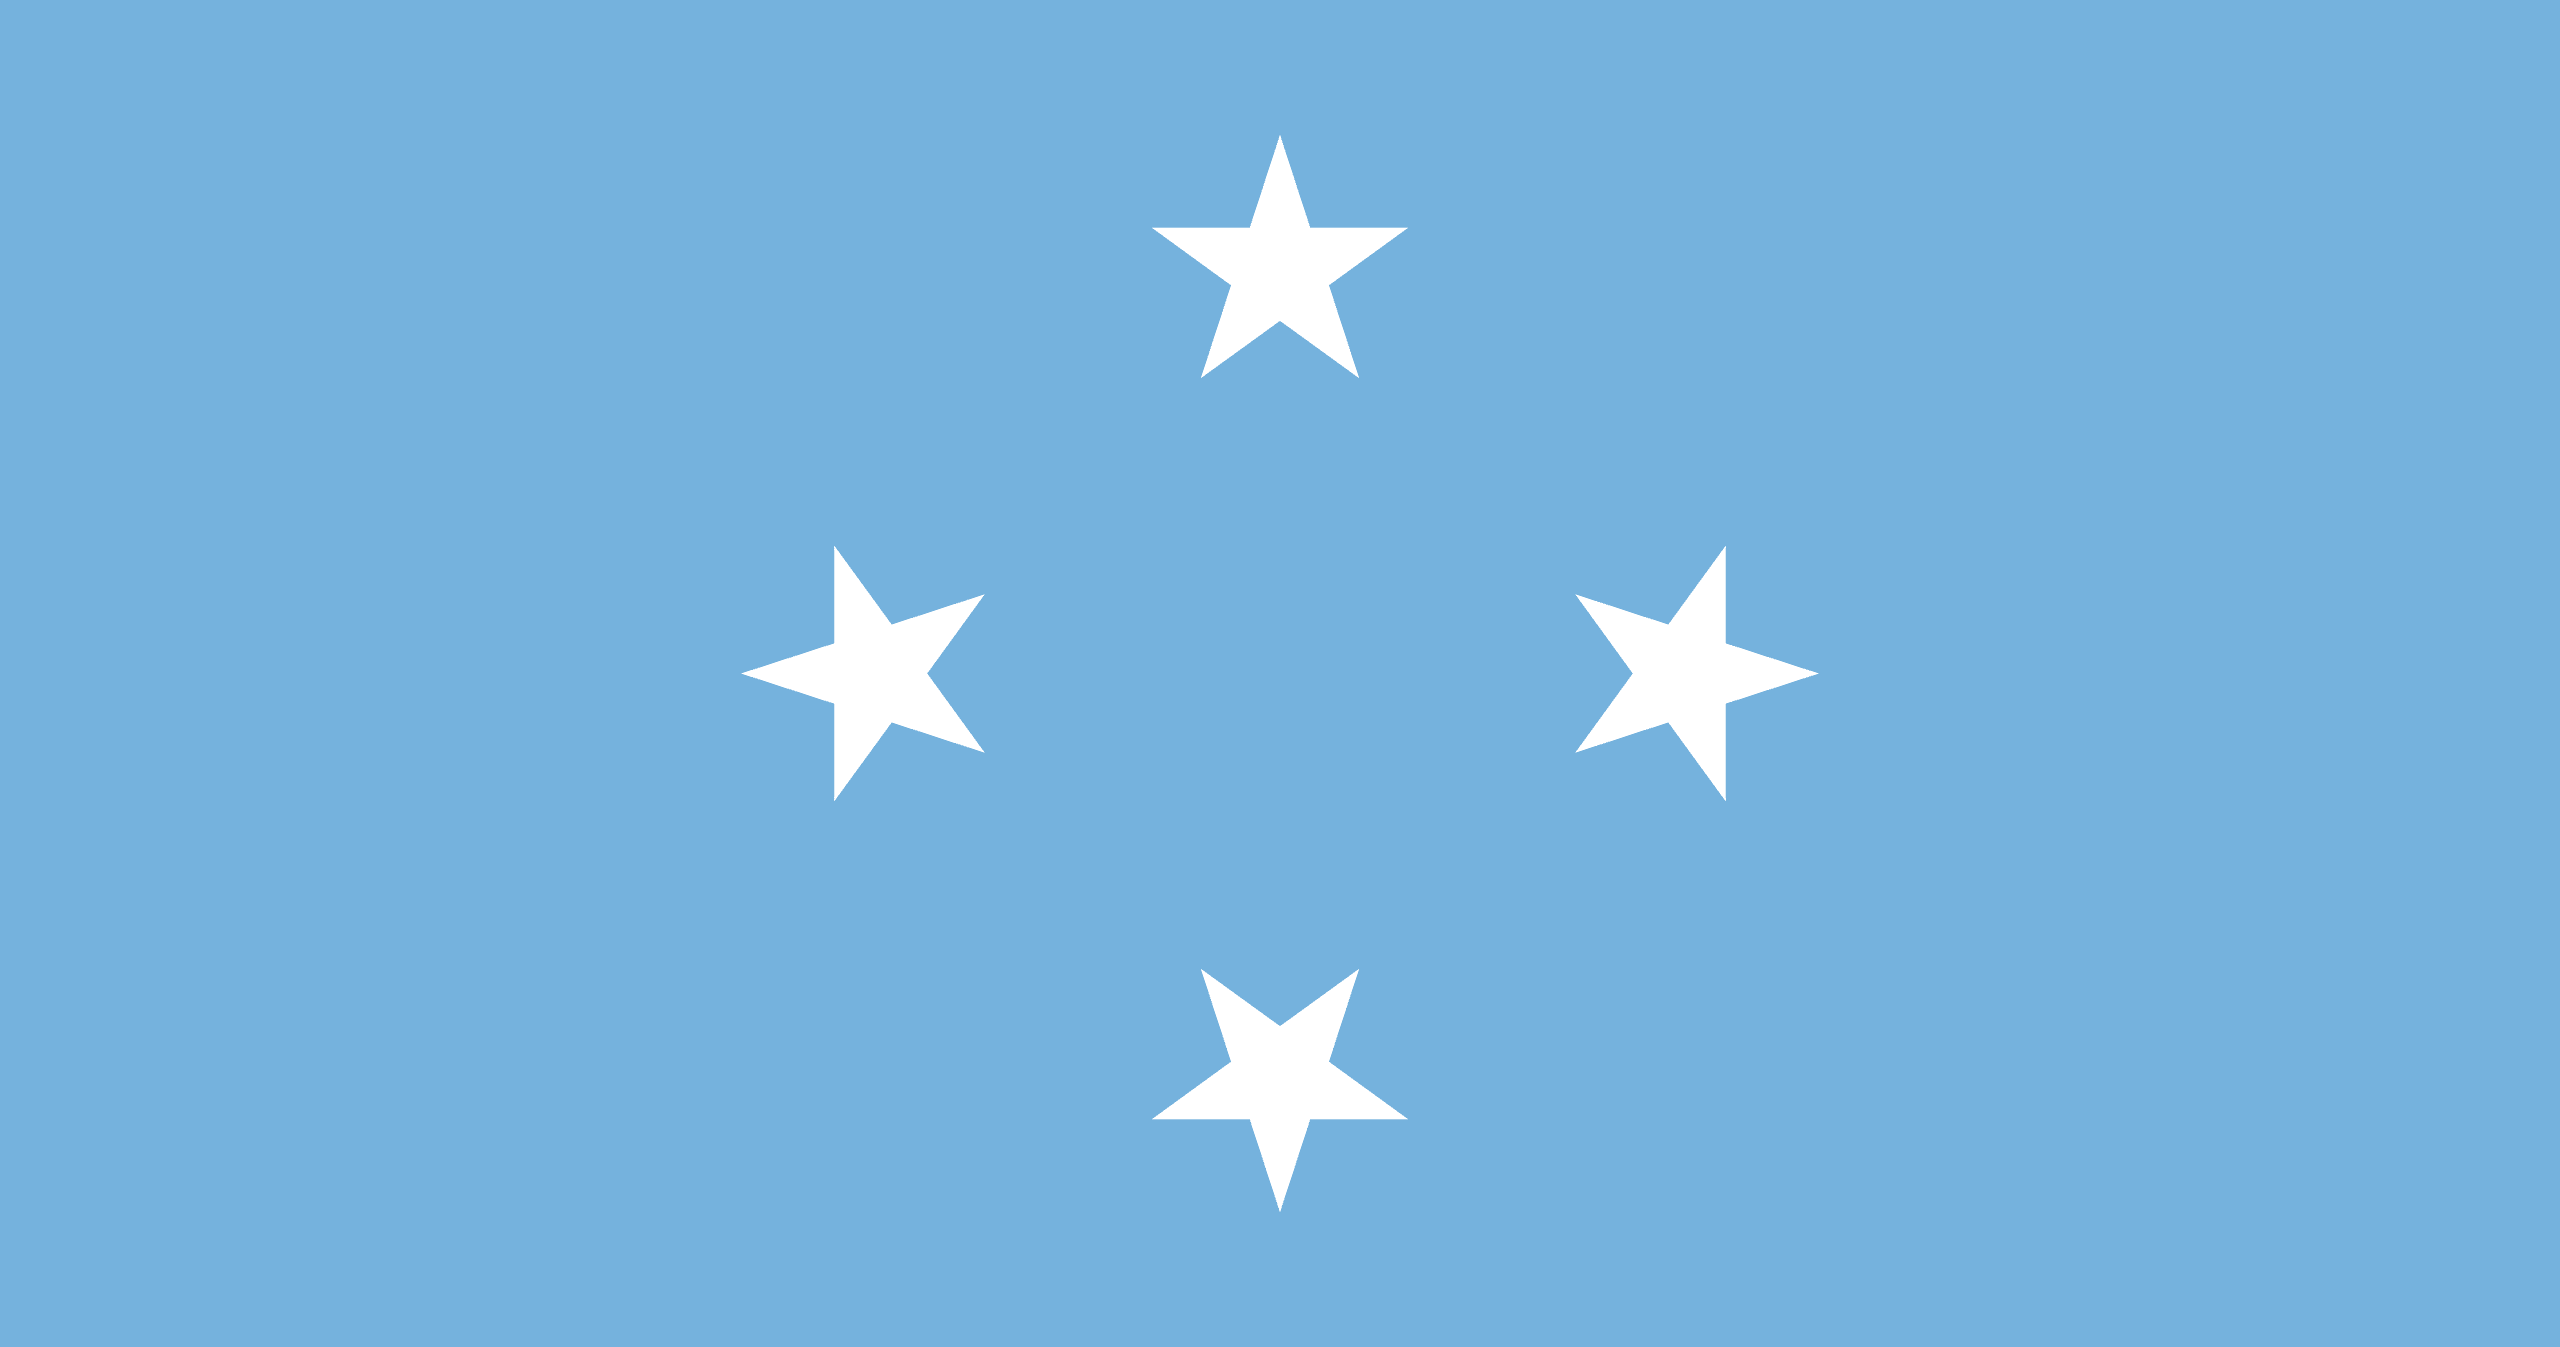

Moldova


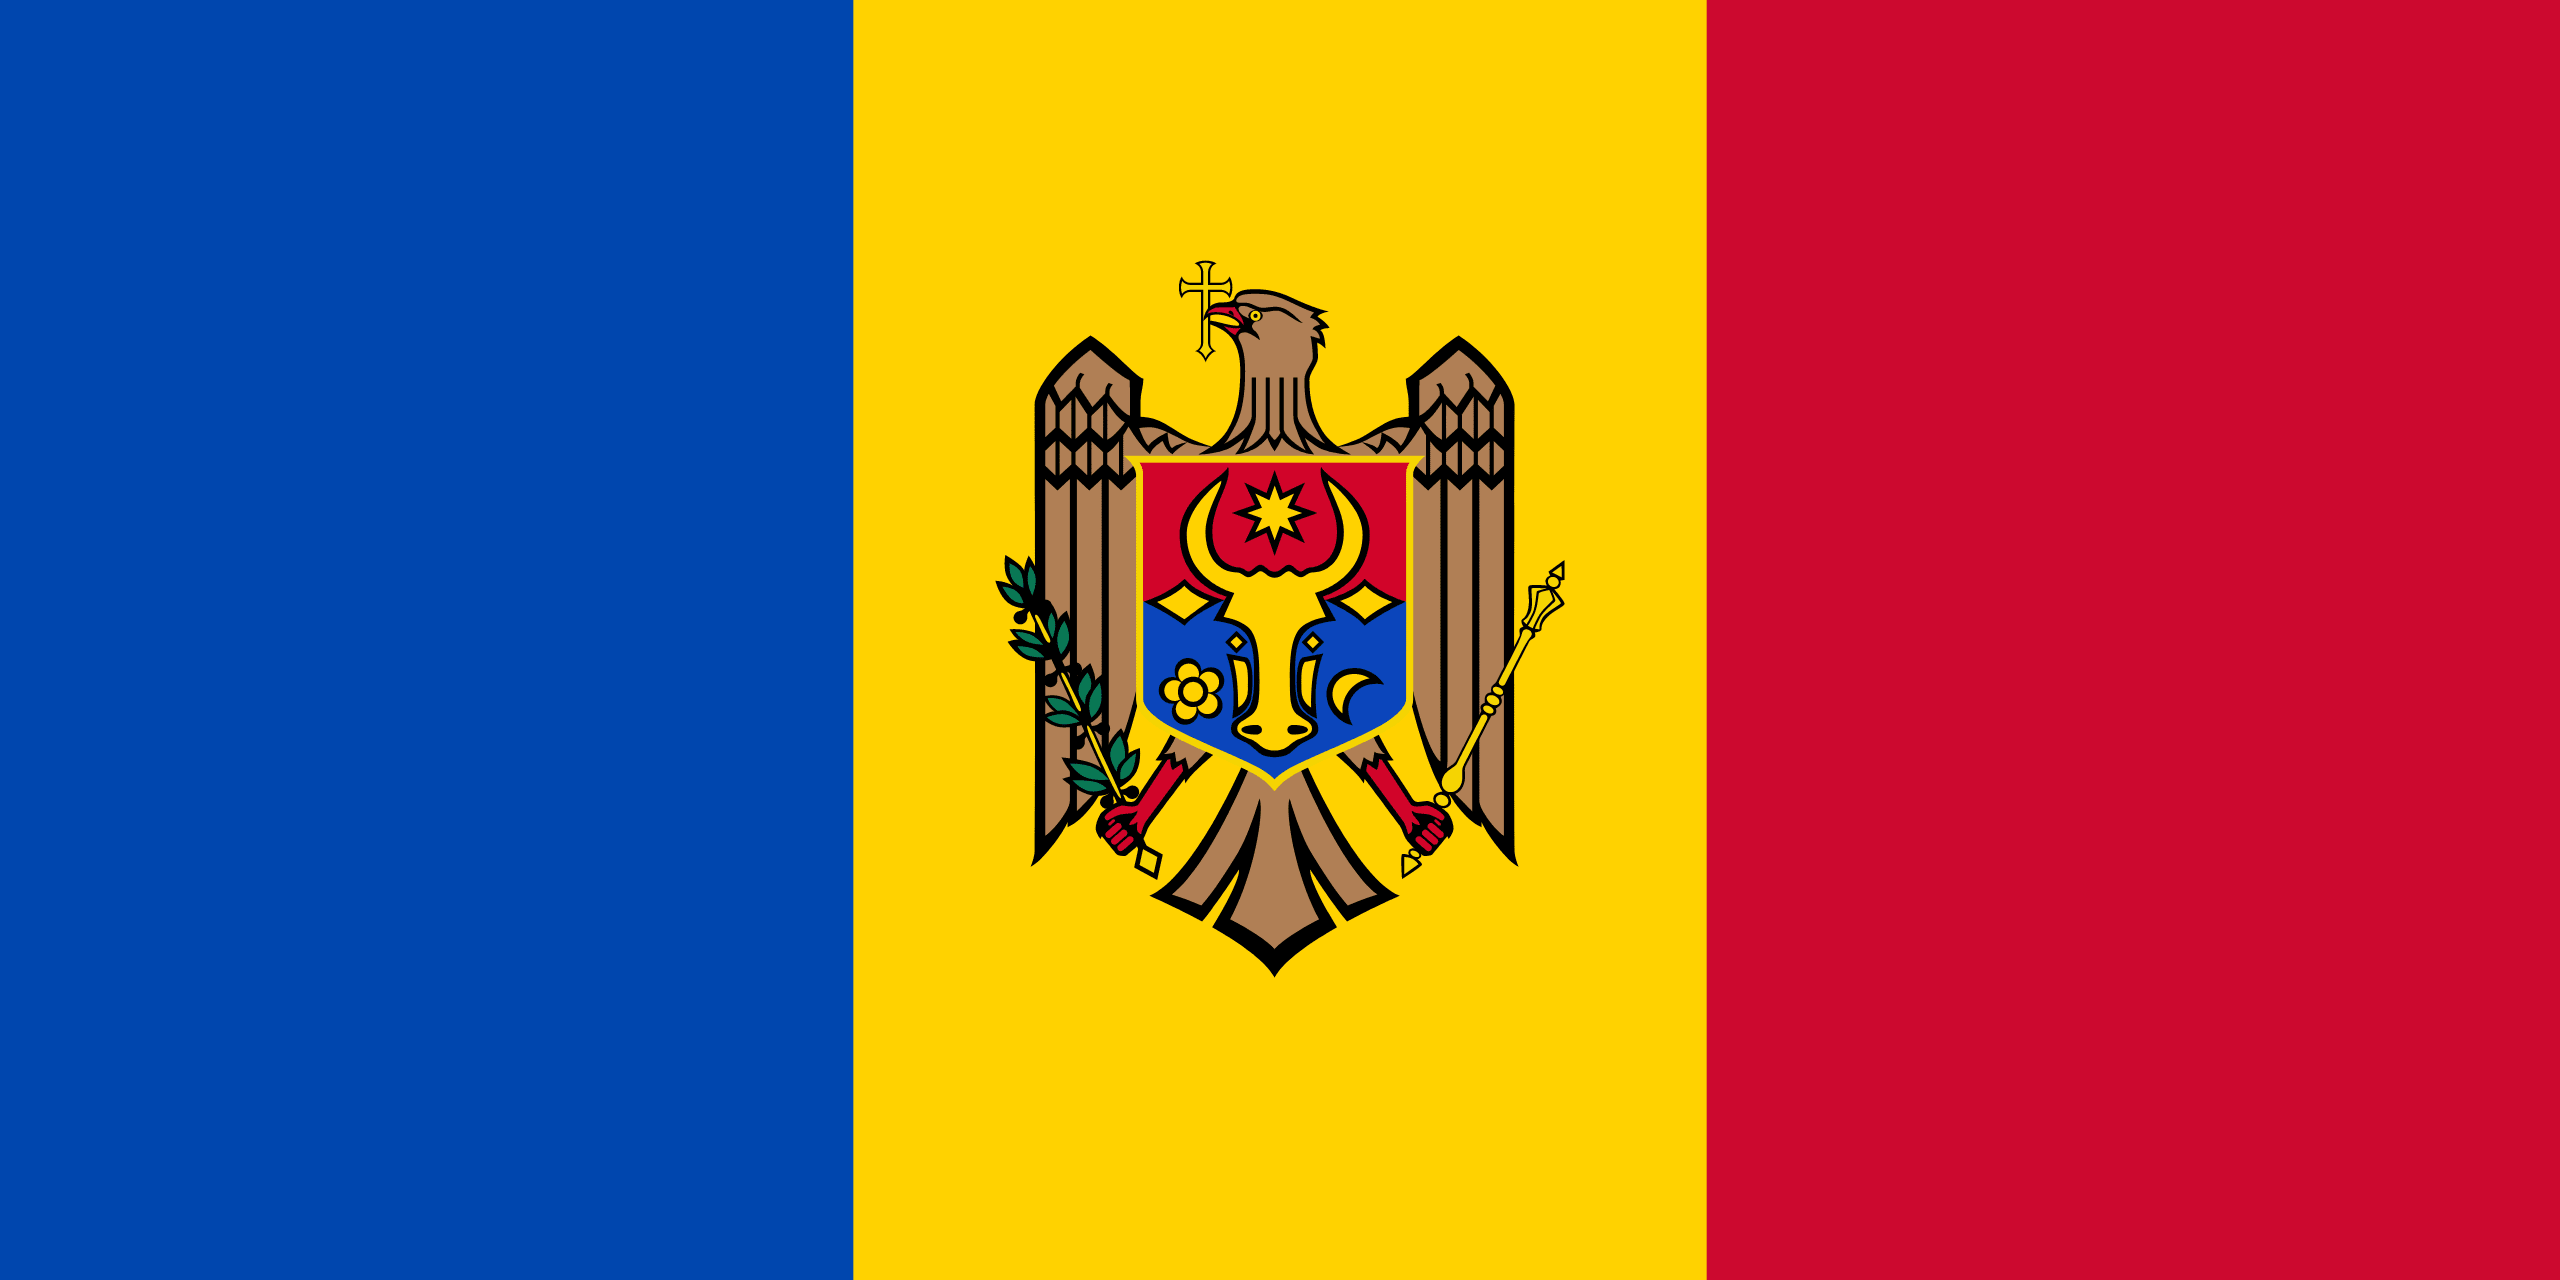

Monaco


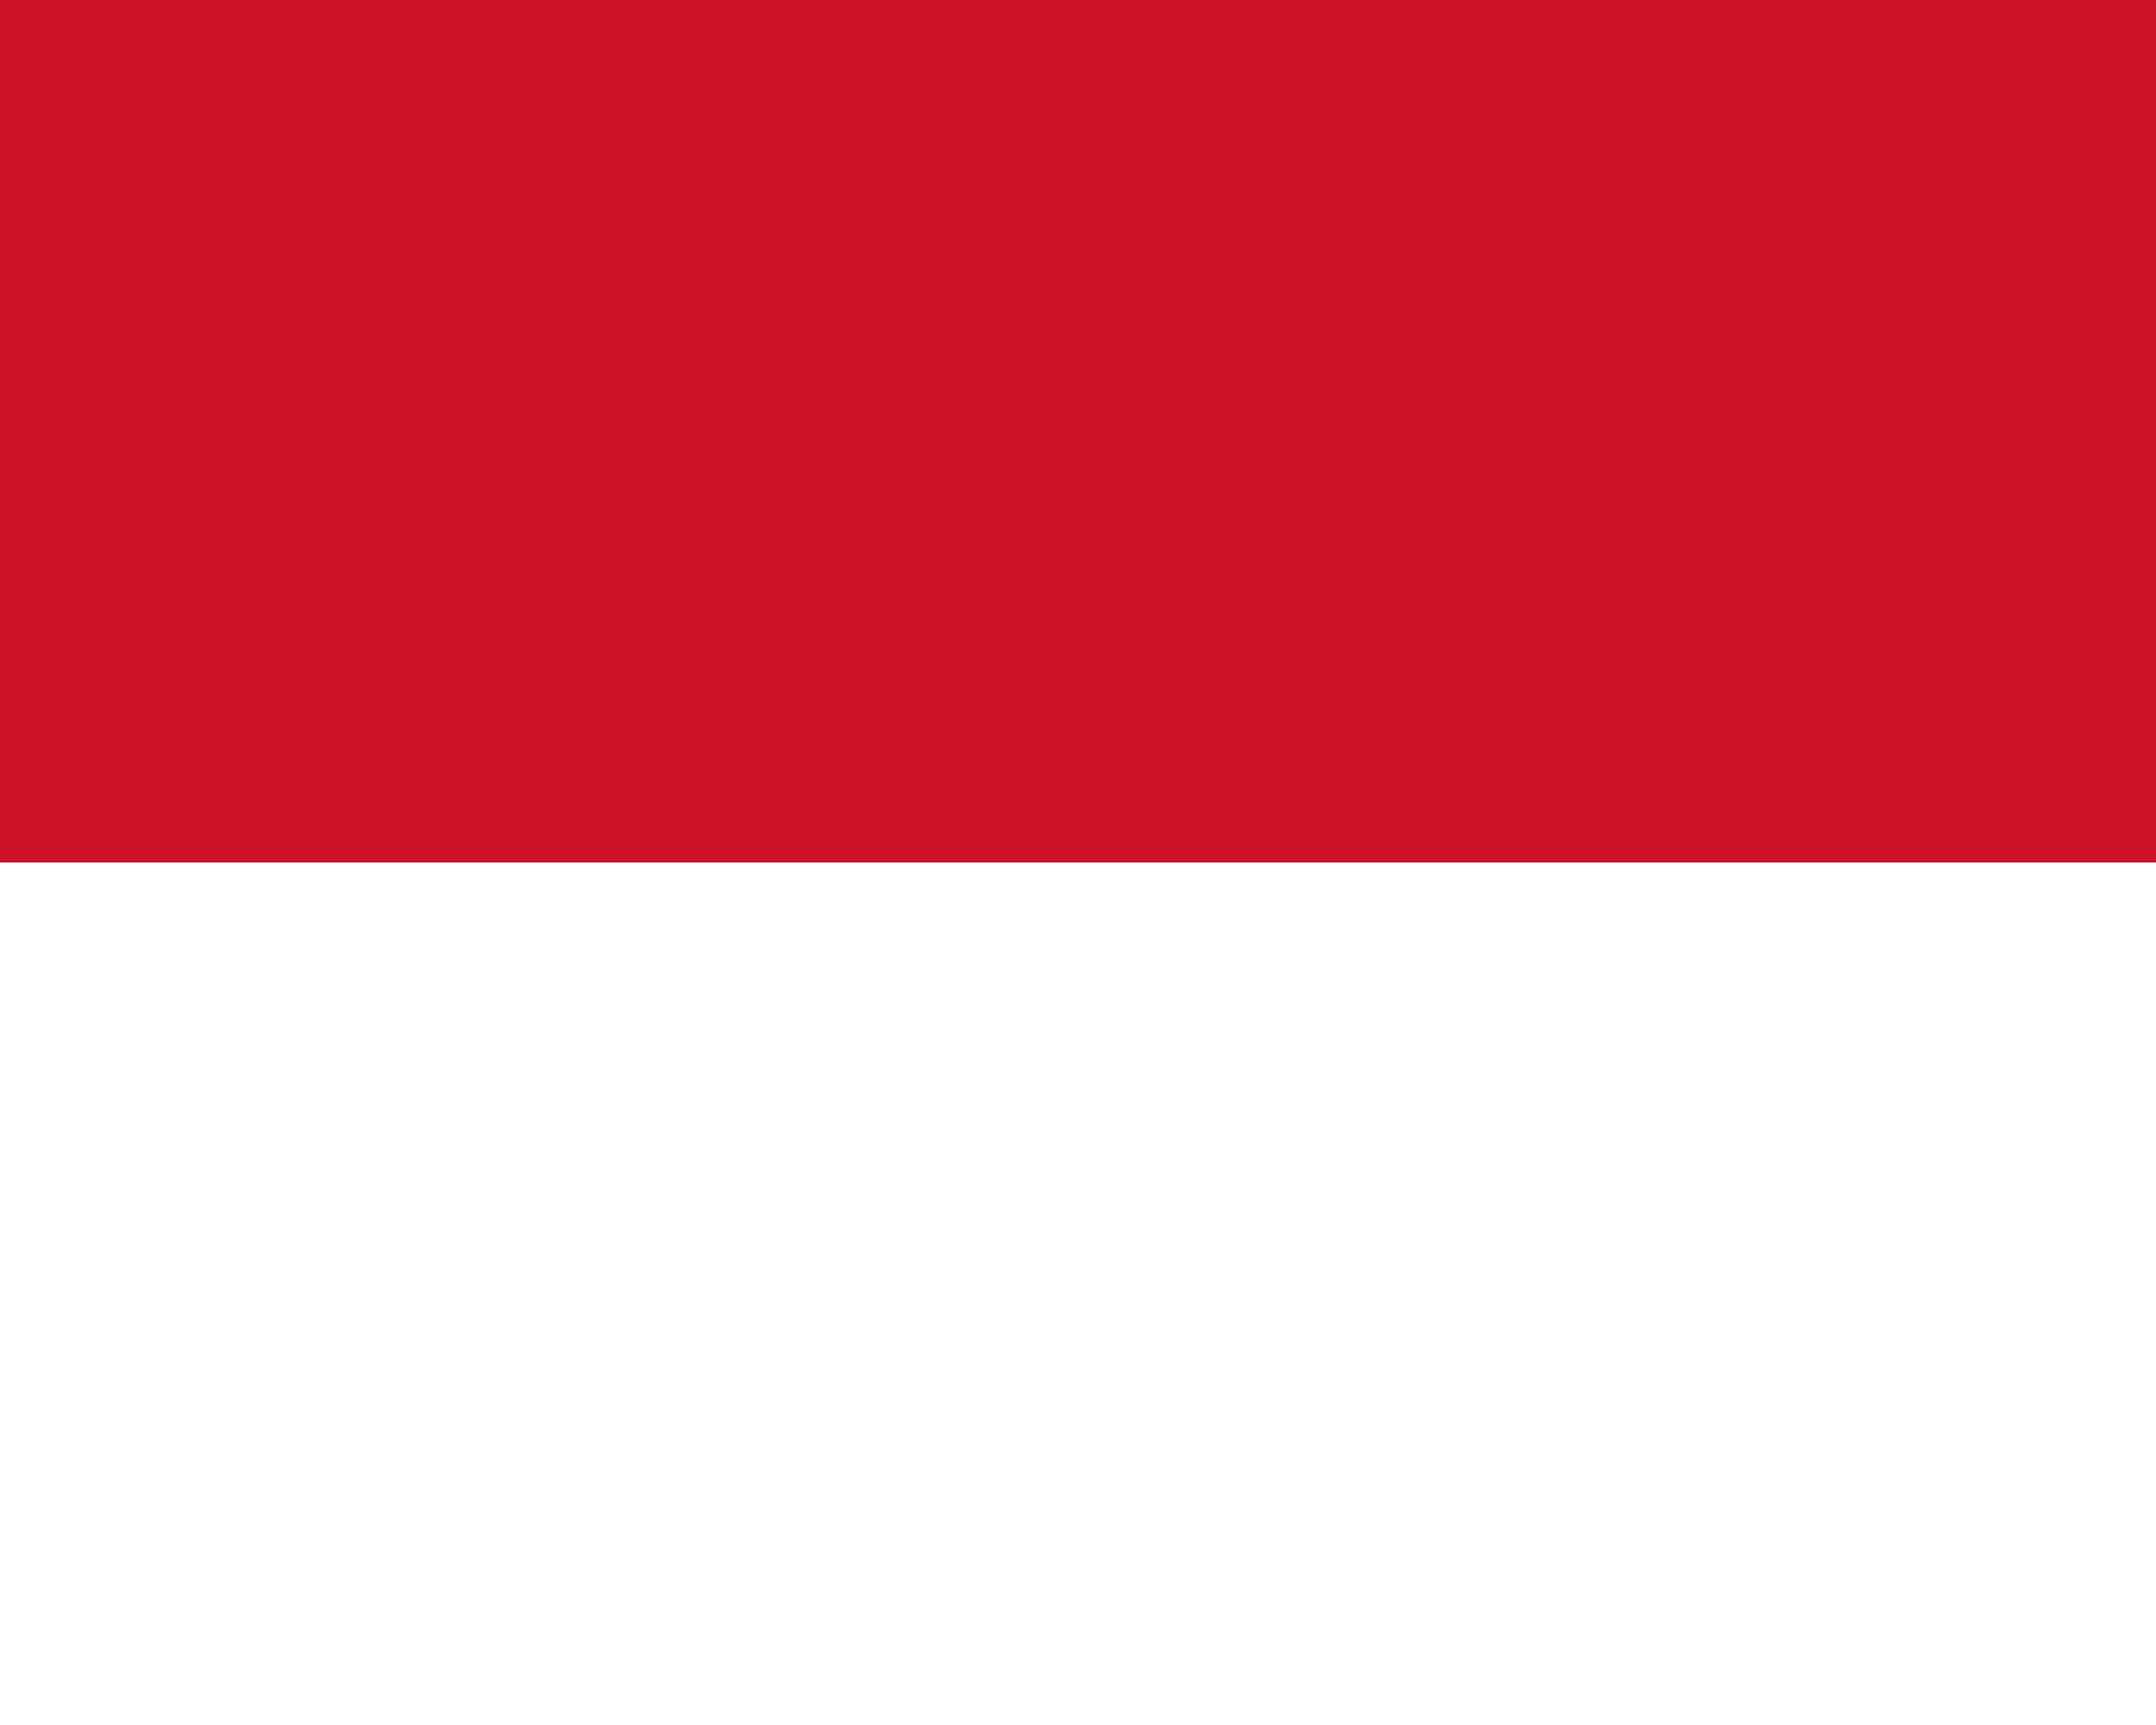

Mongolia


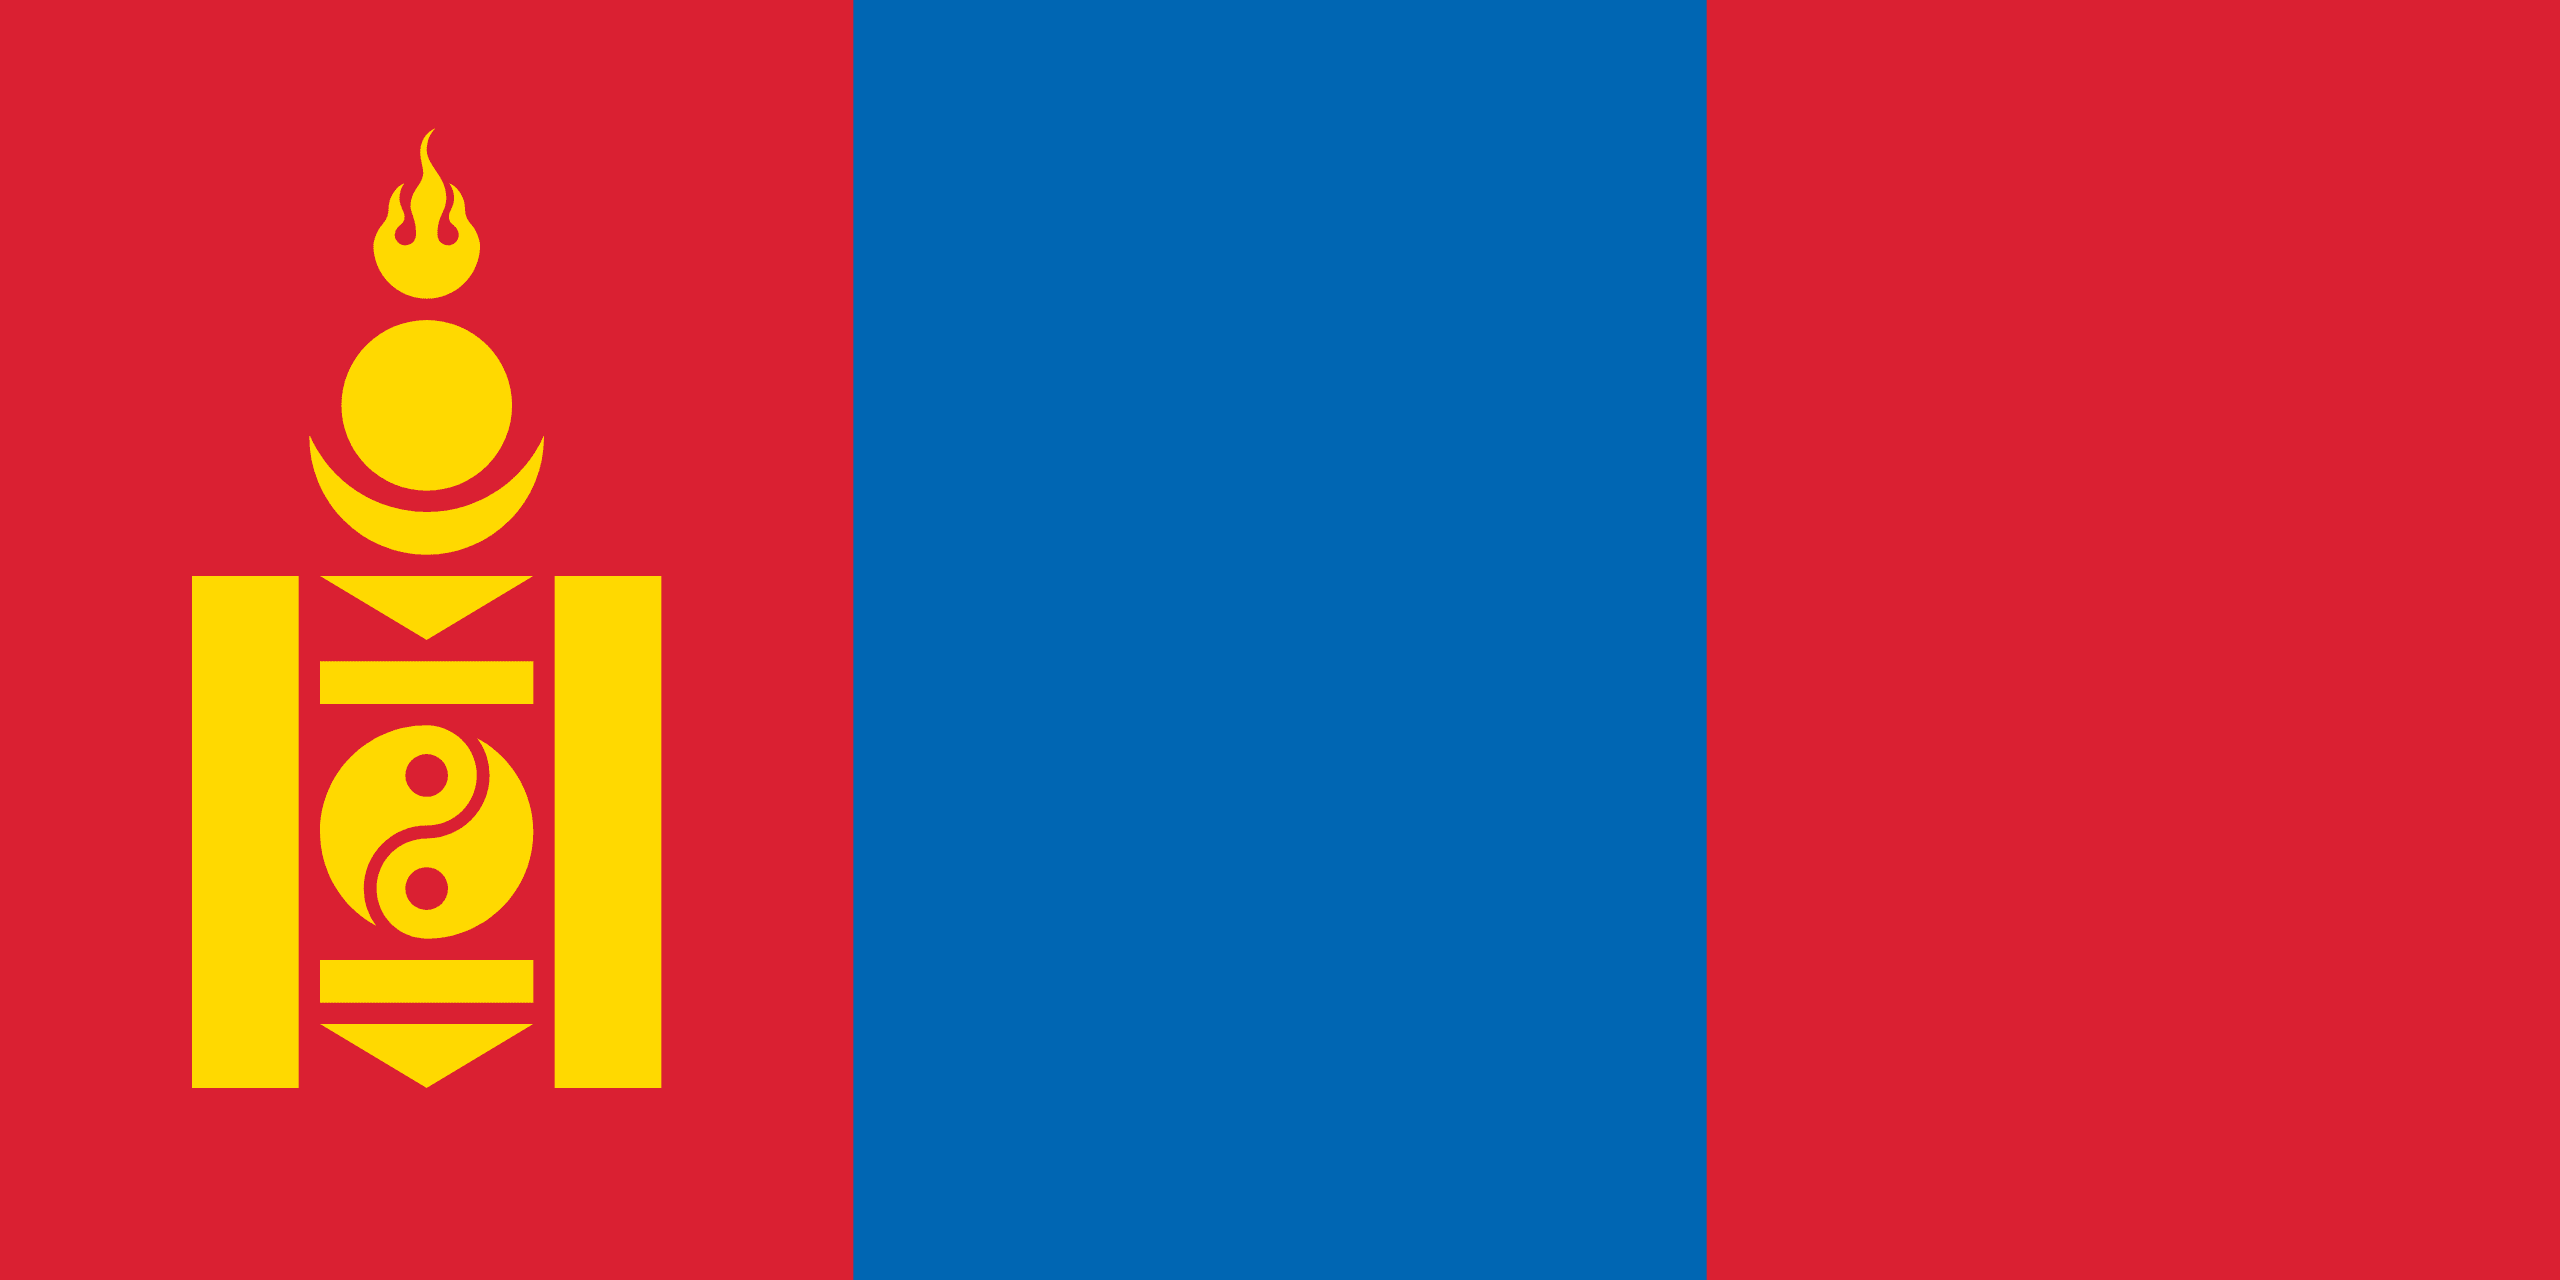

Montenegro


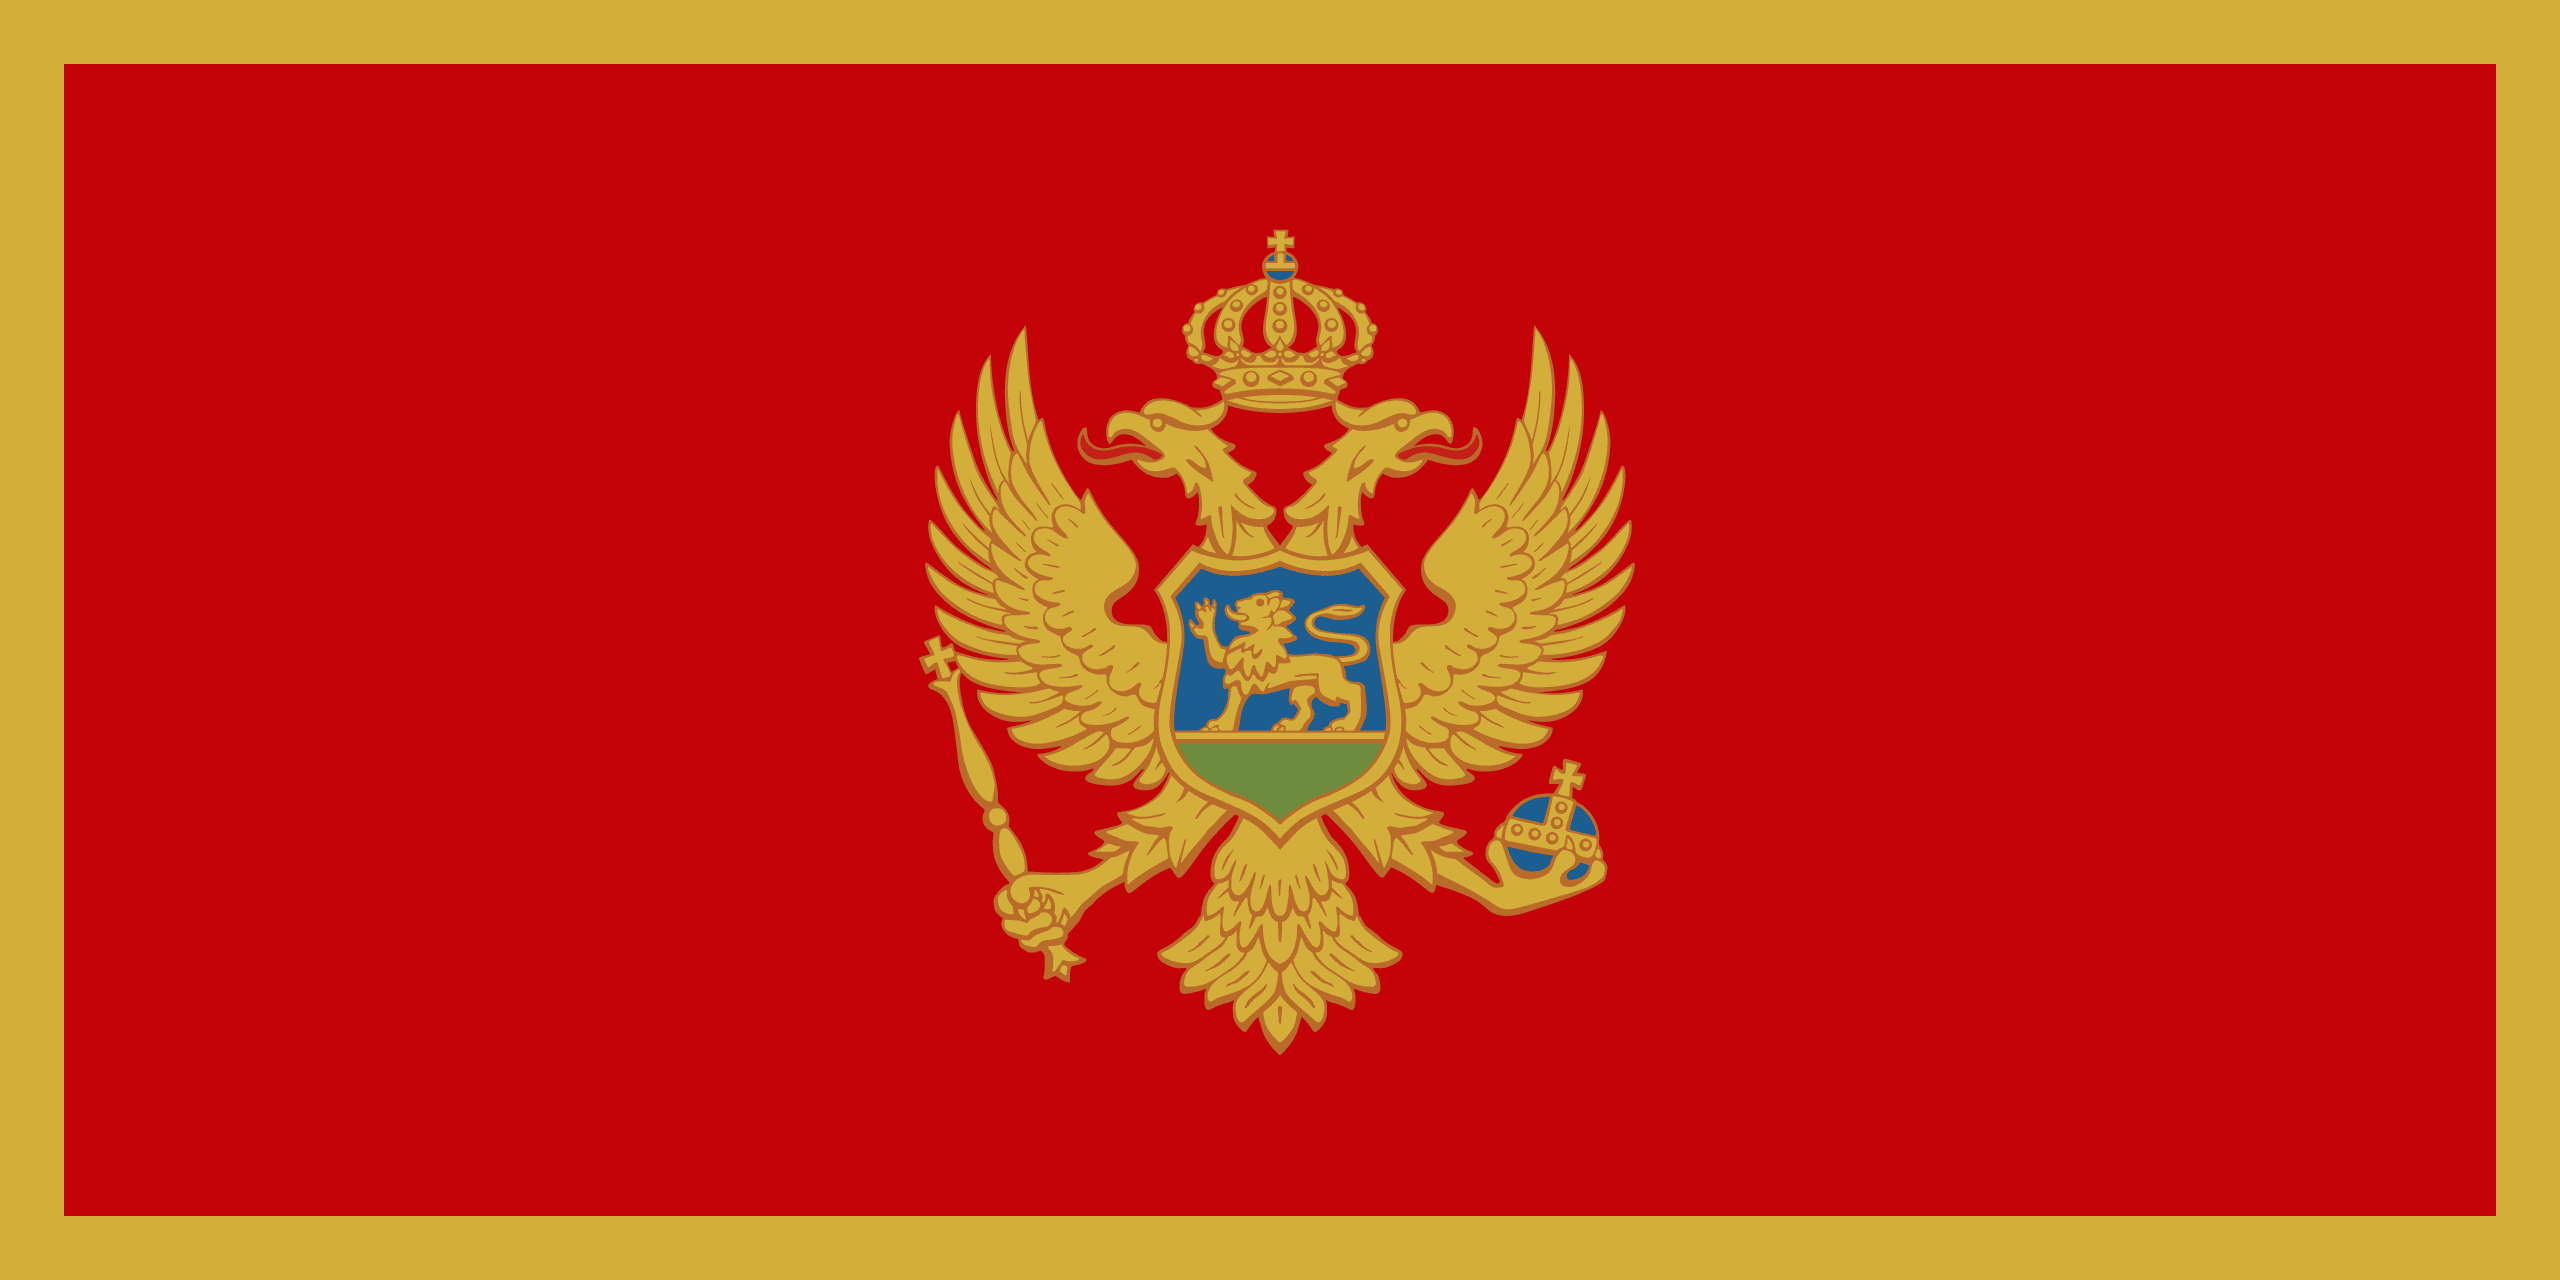

Montserrat


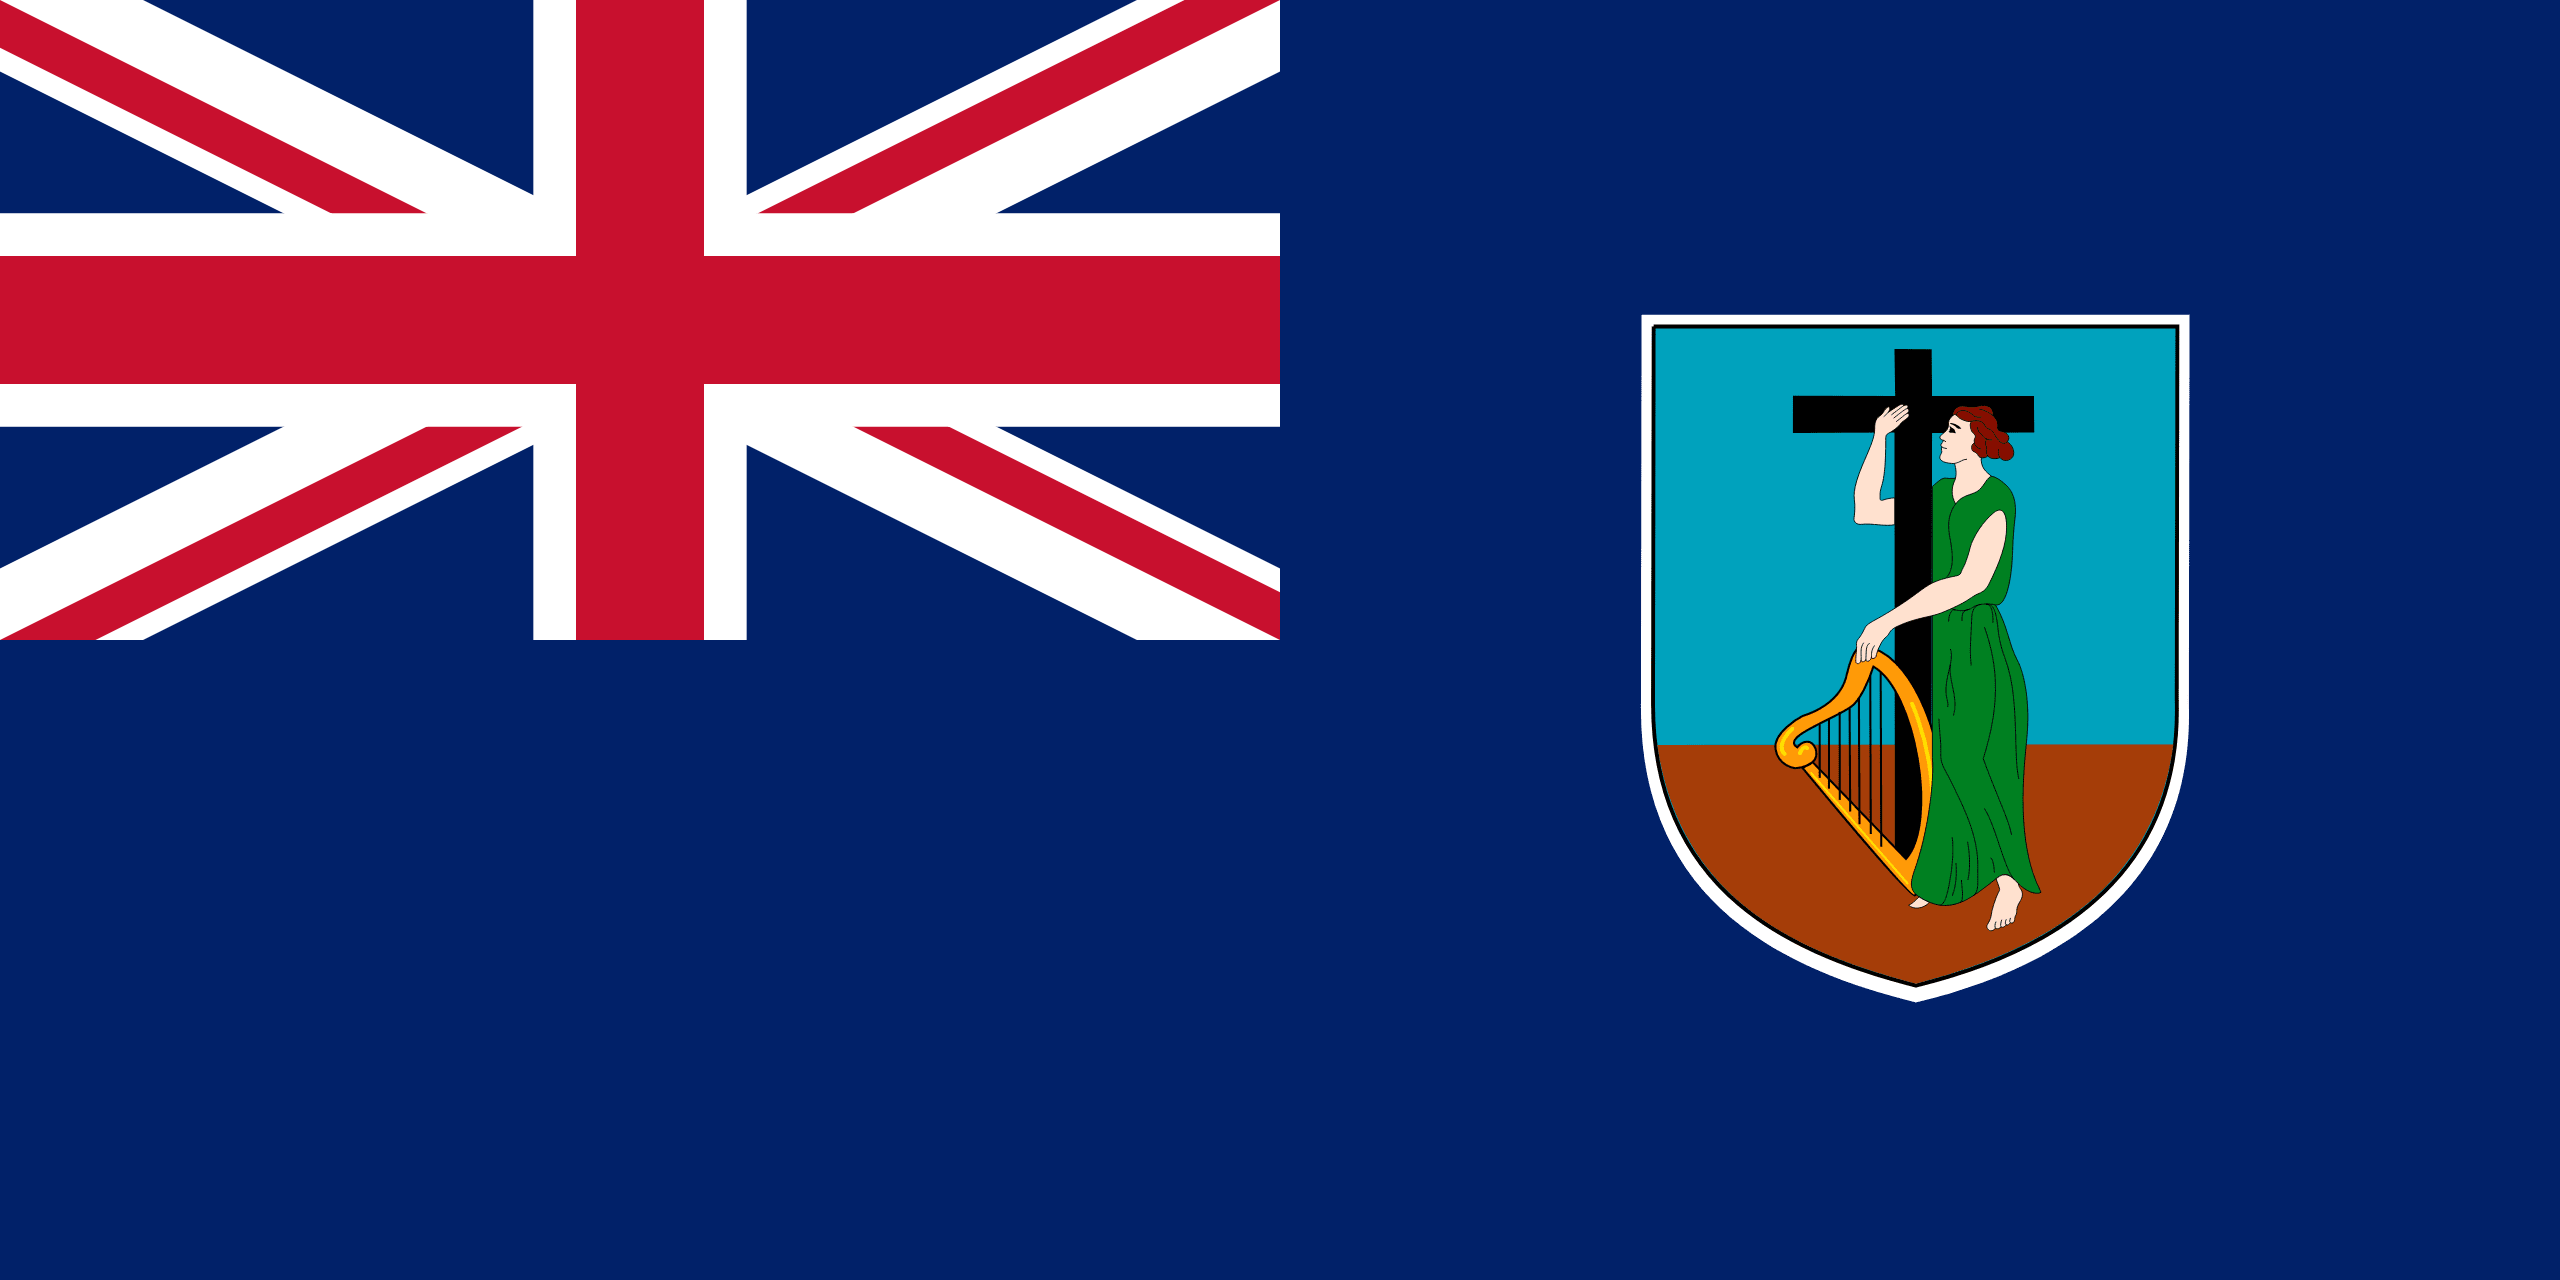

Morocco


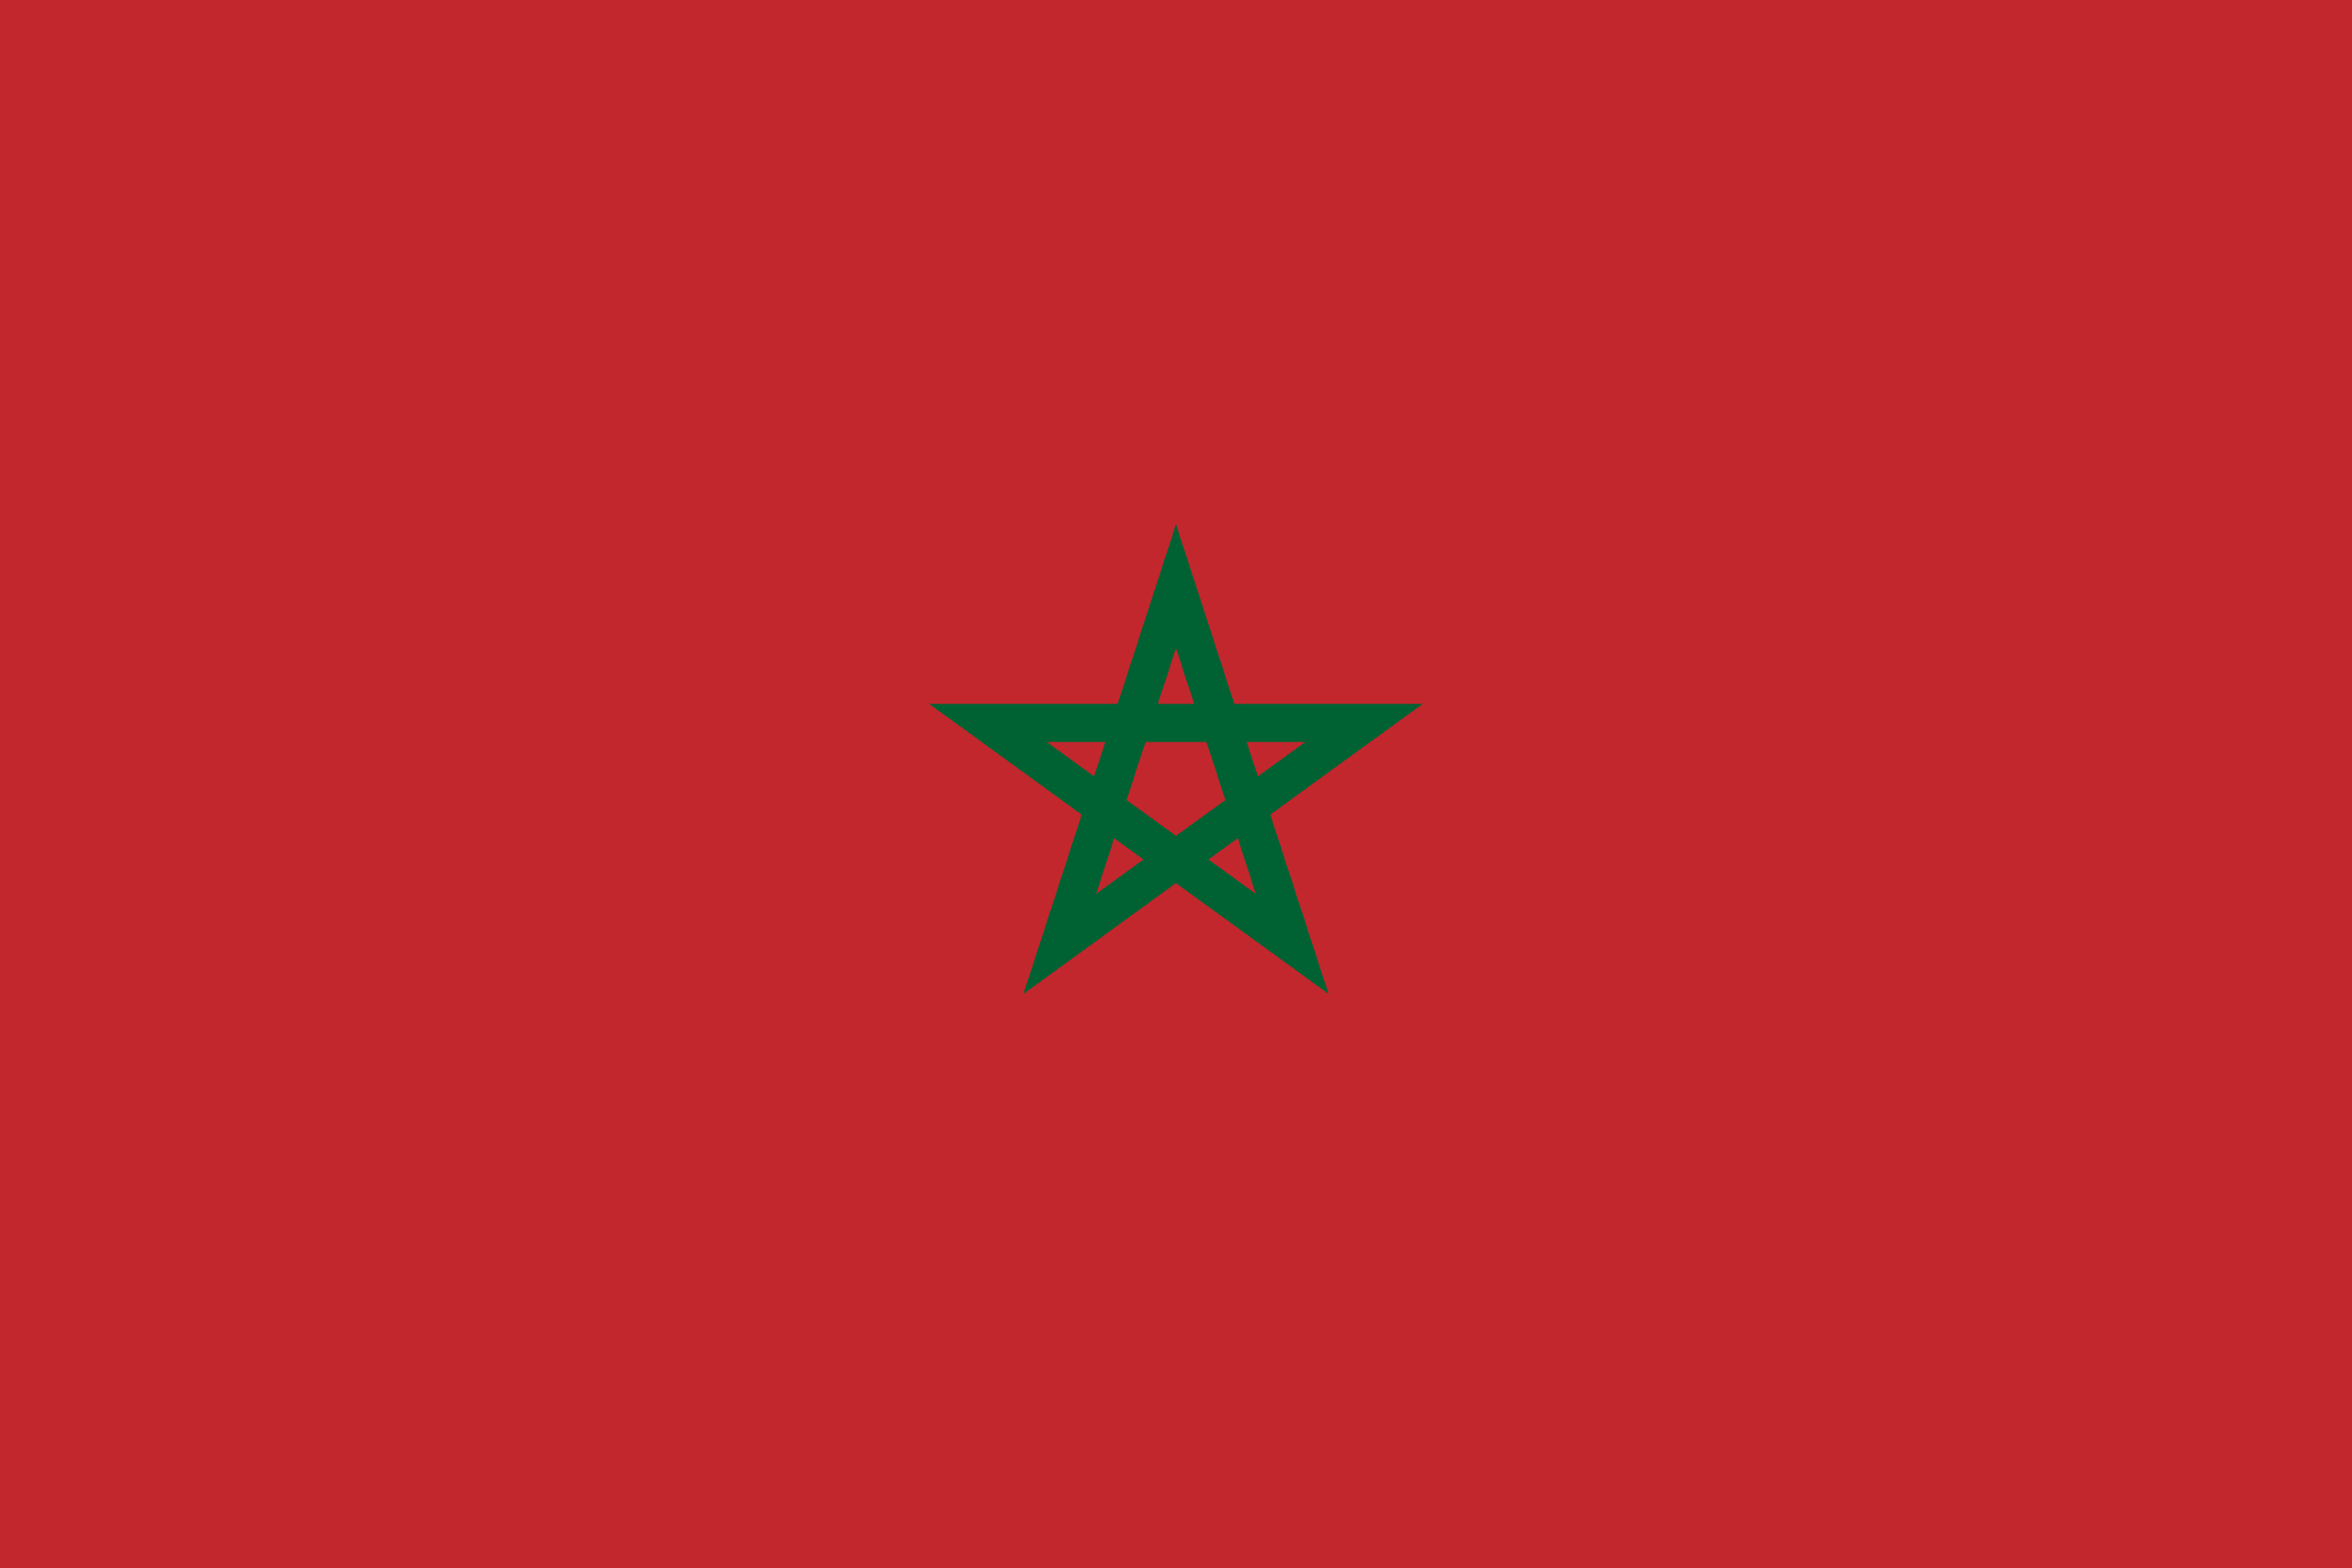

Mozambique


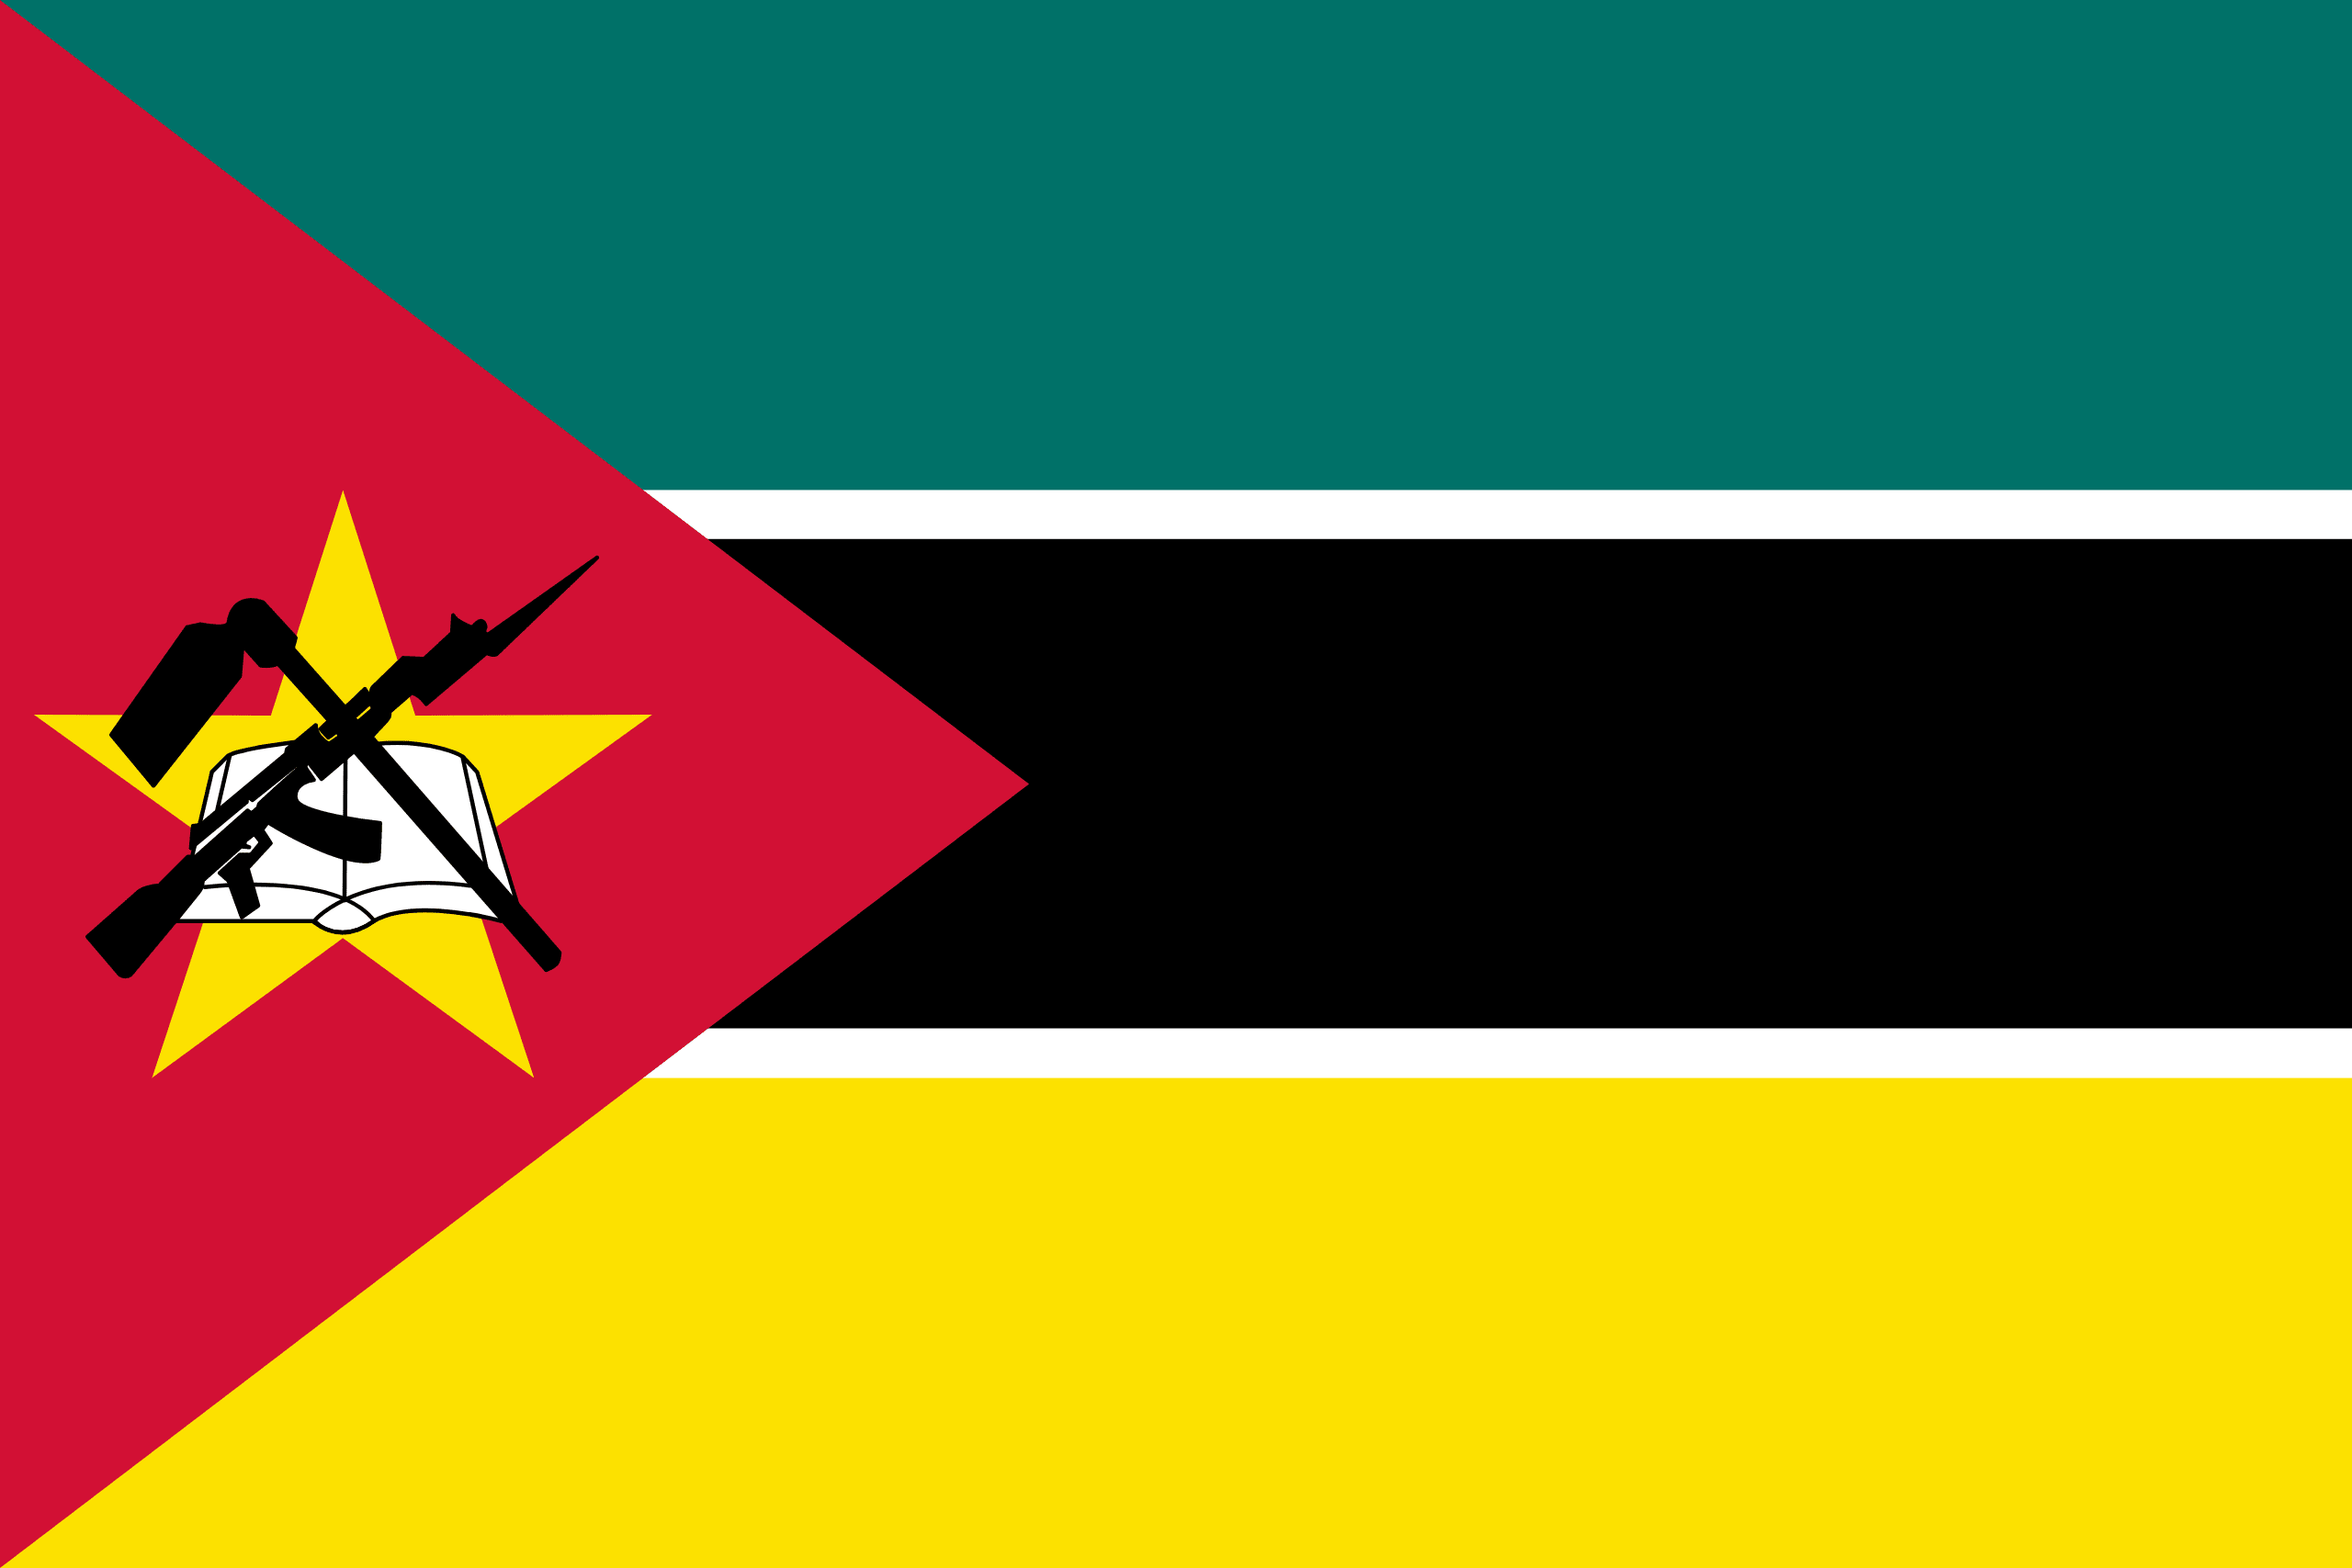

Myanmar


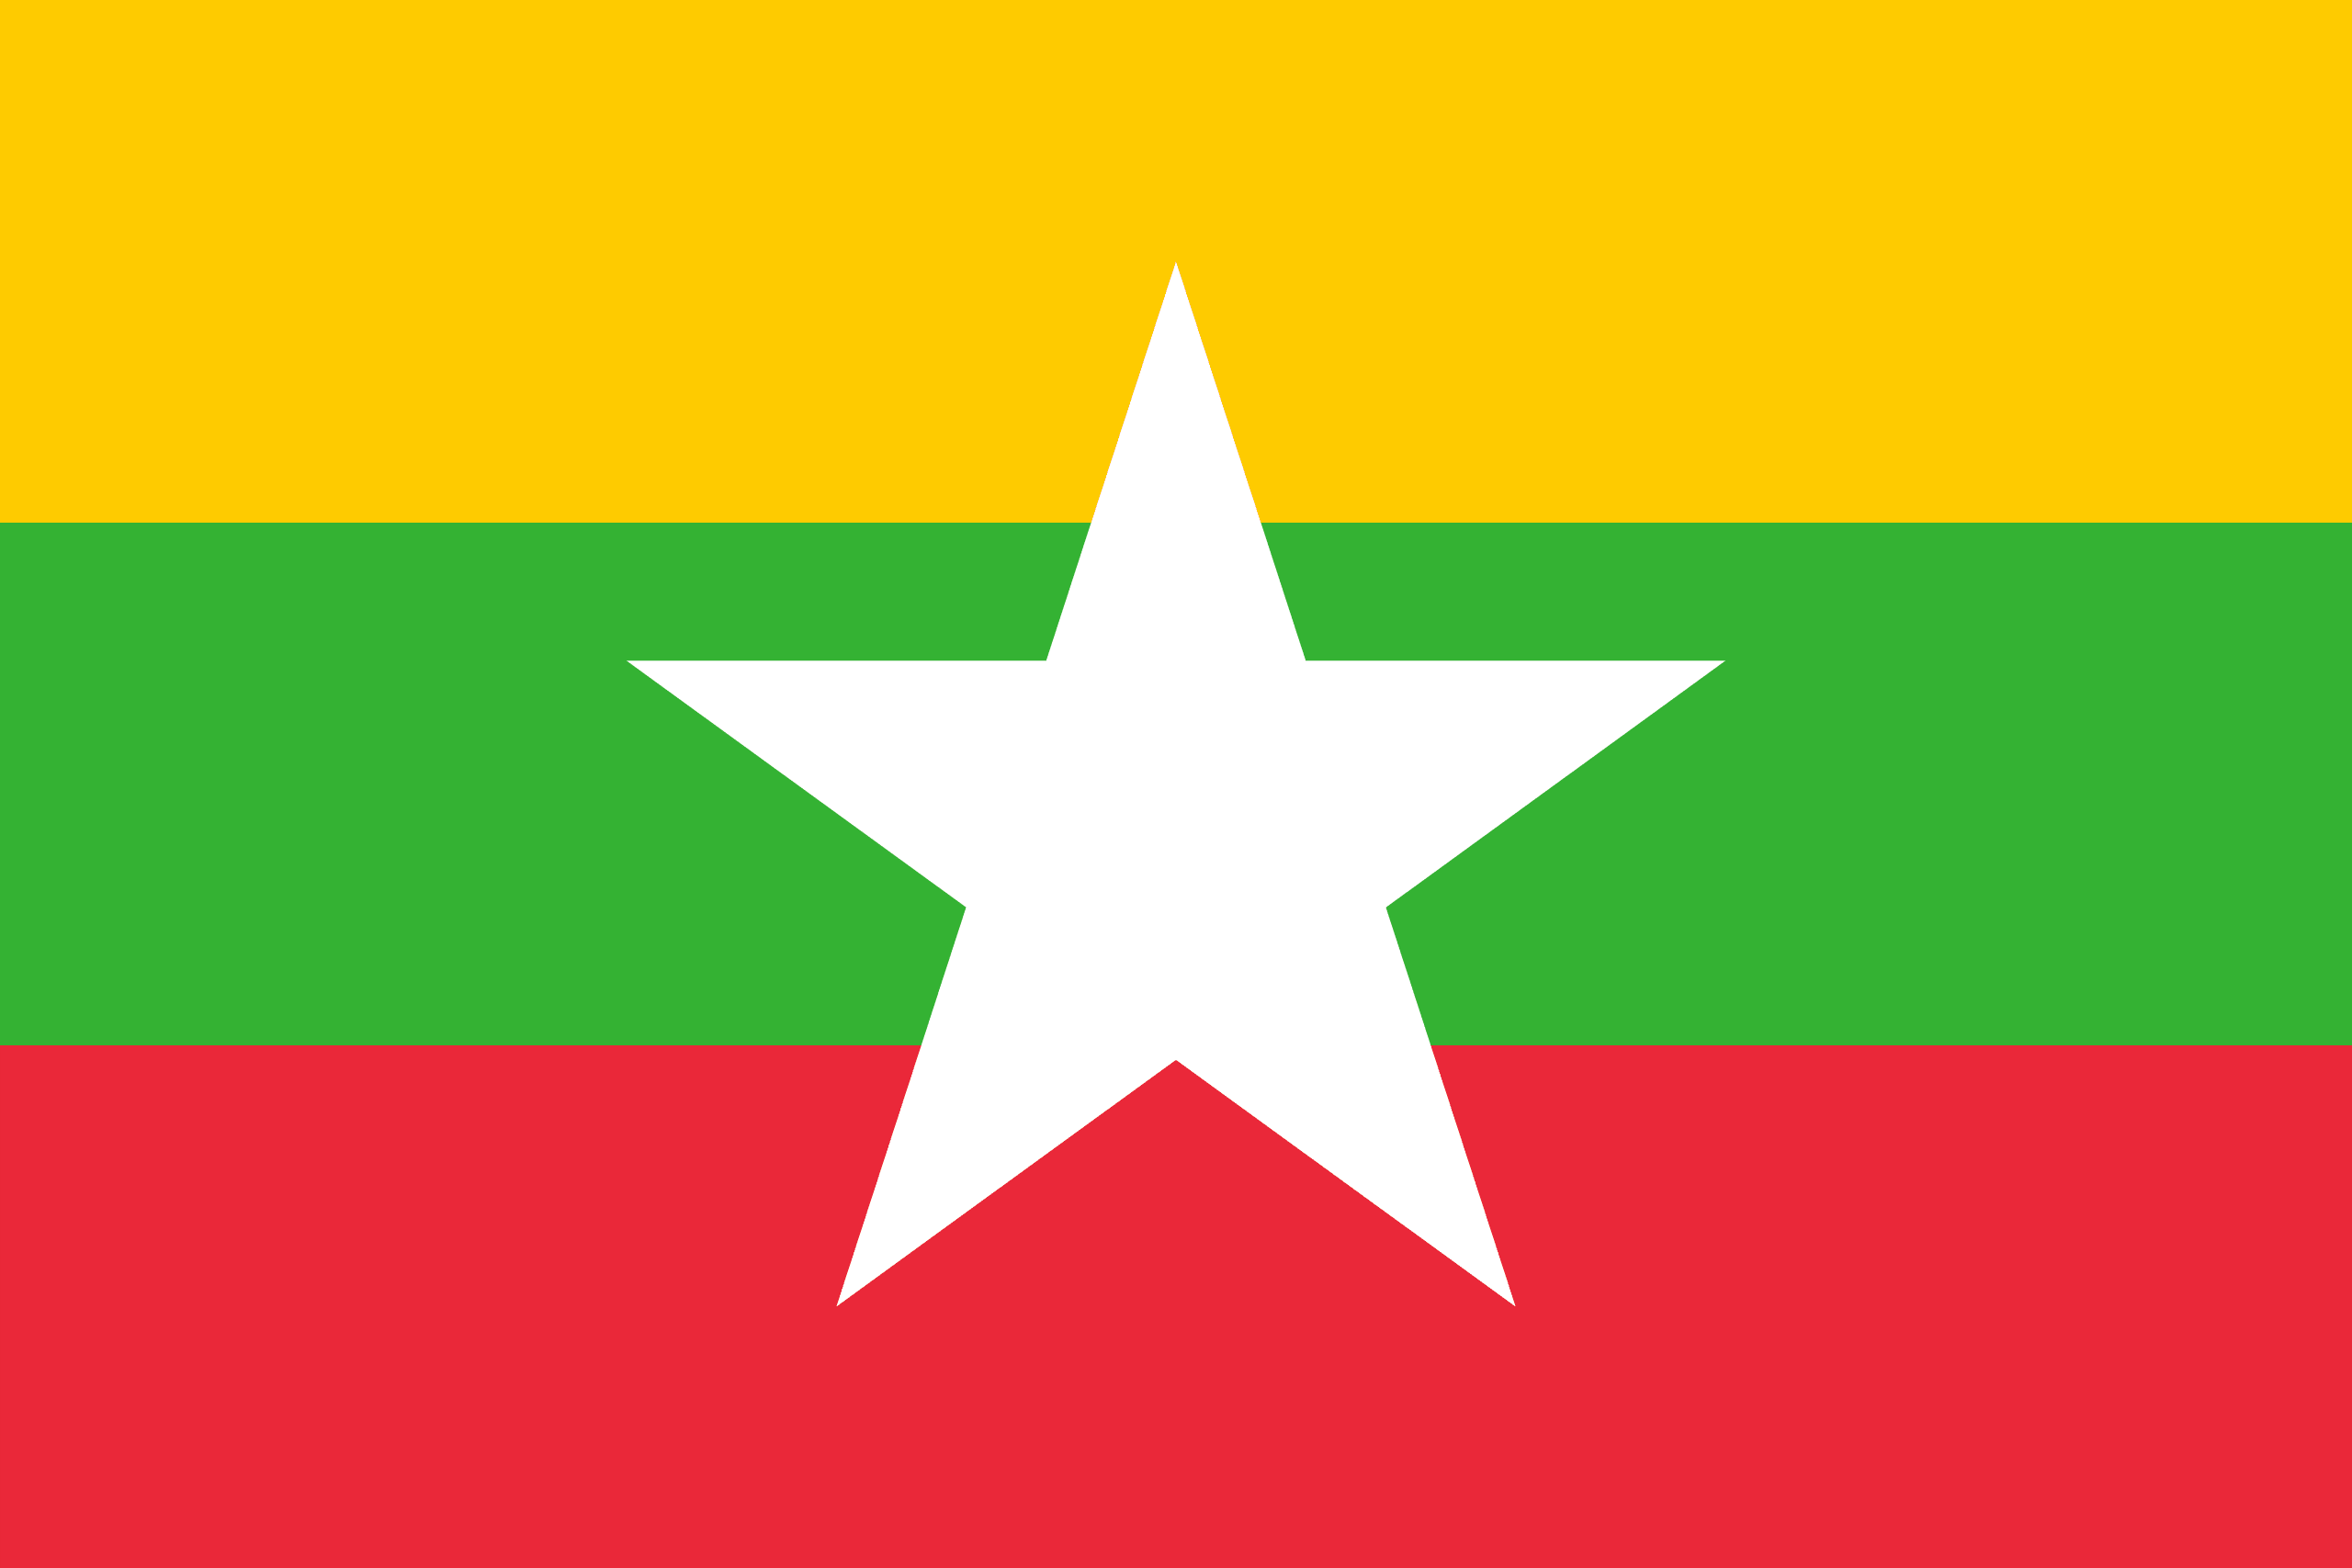

Namibia


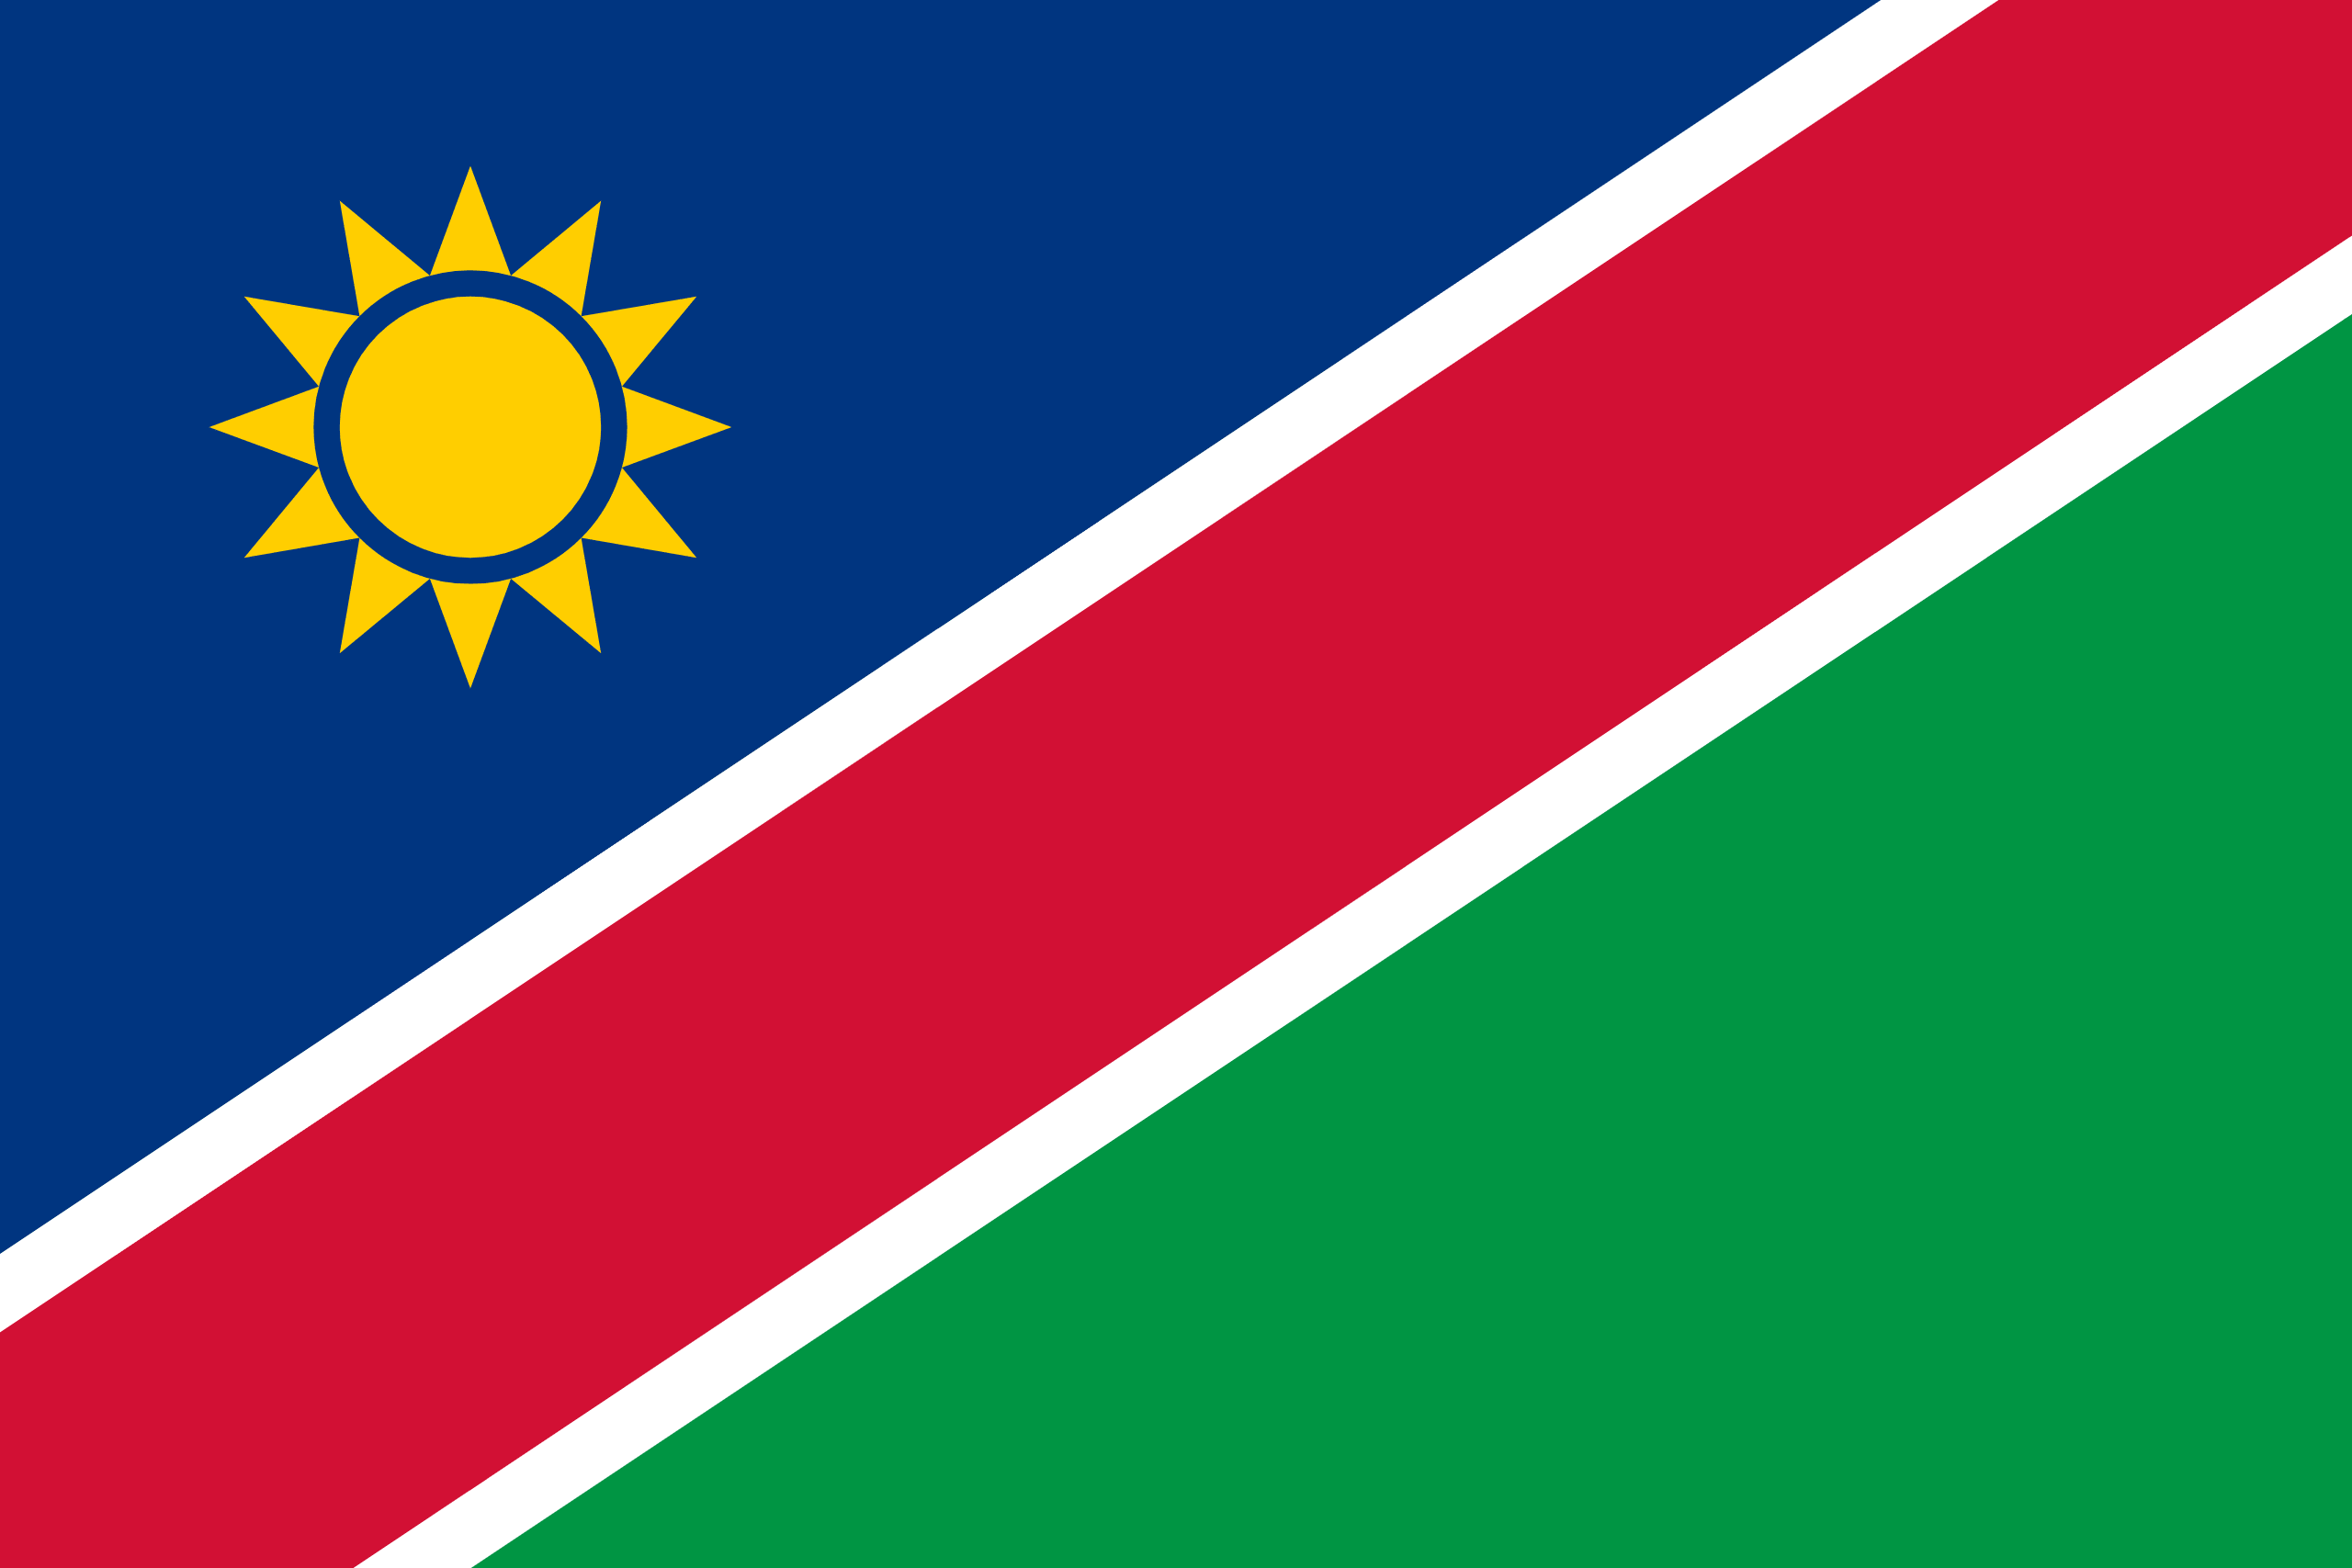

Nauru


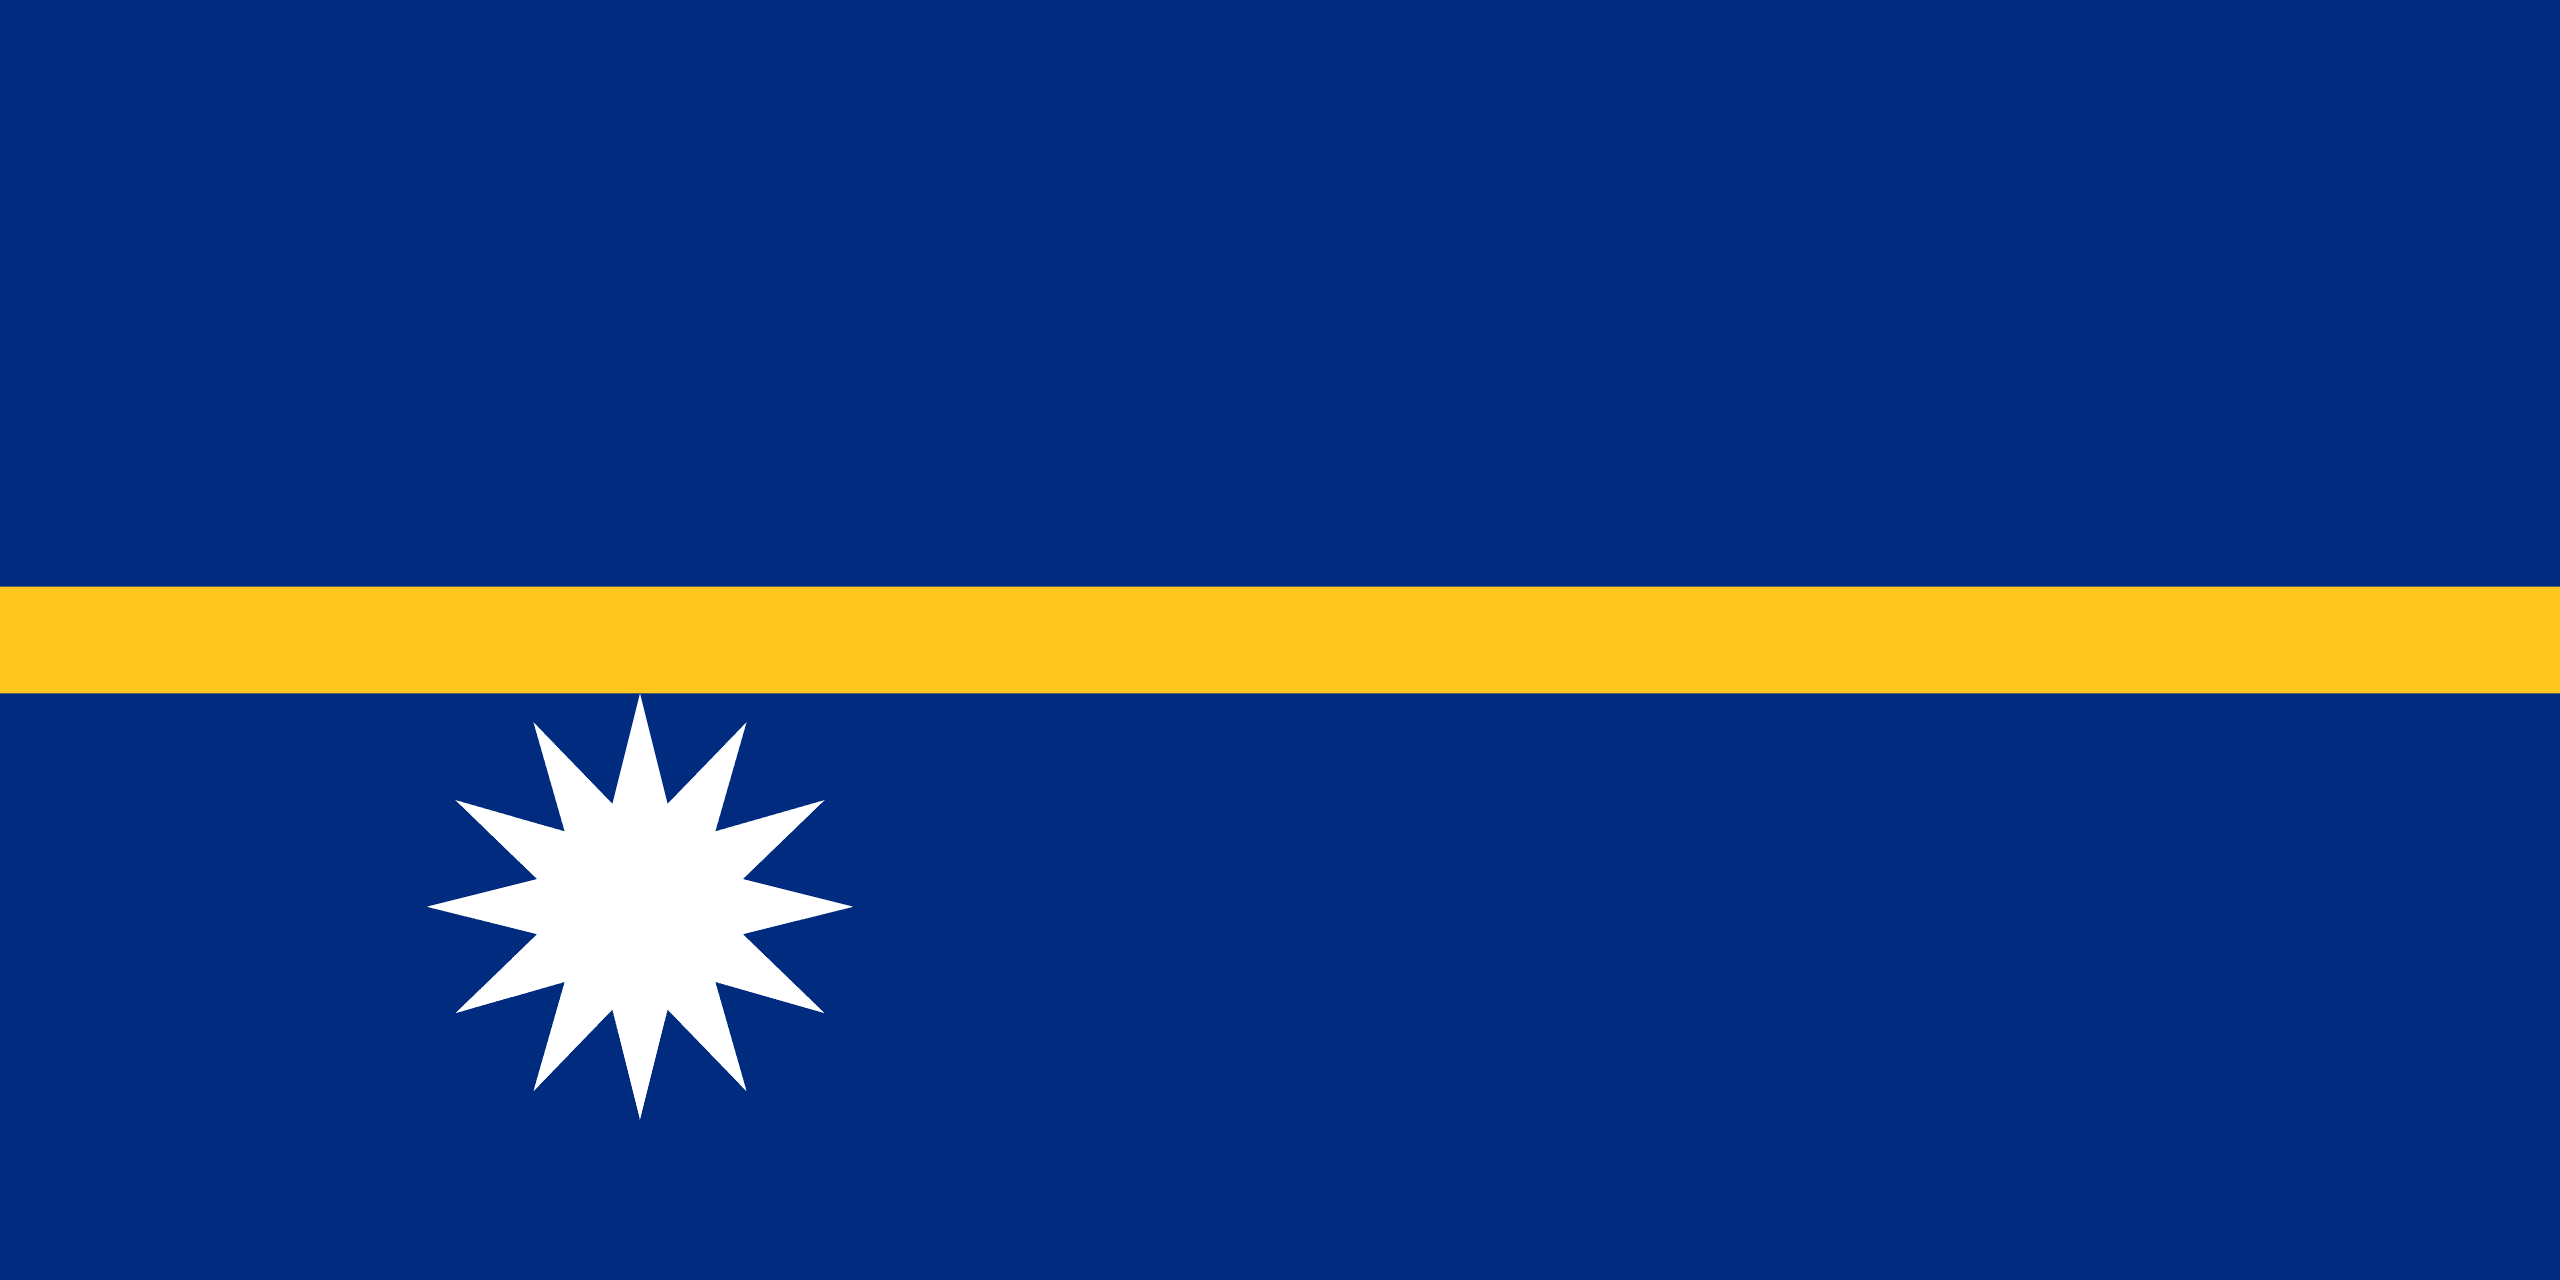

Nepal


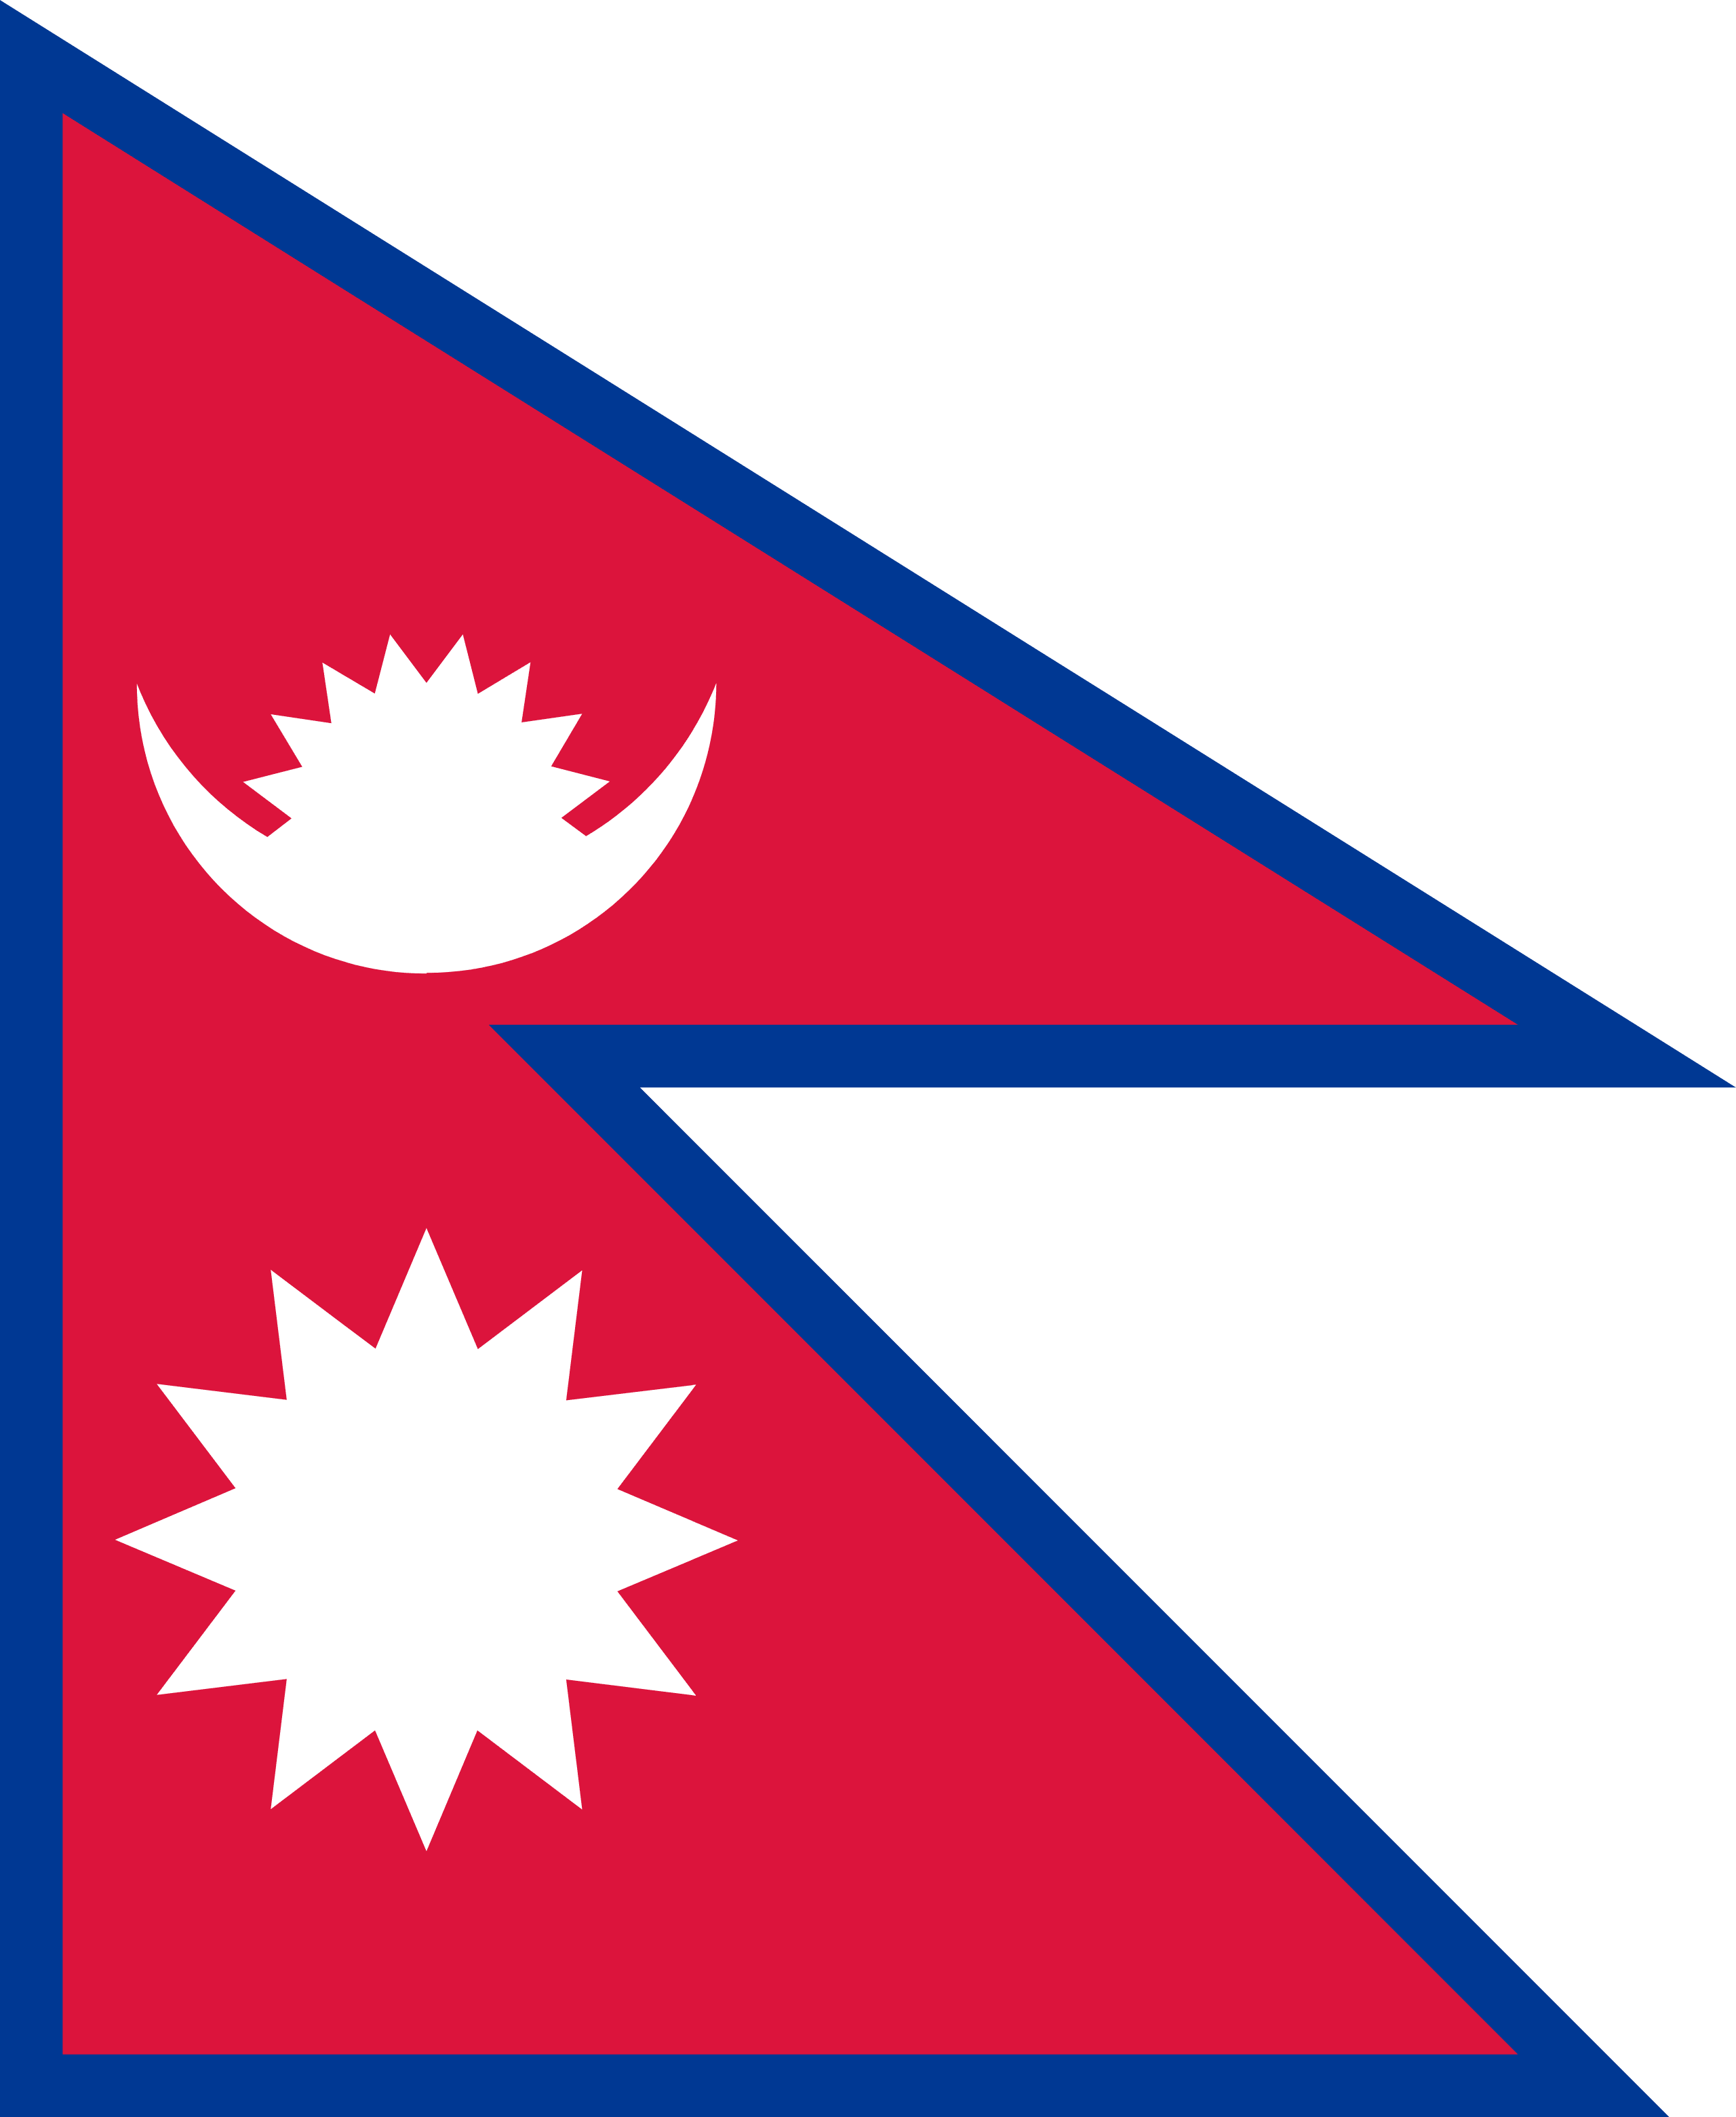

Netherlands


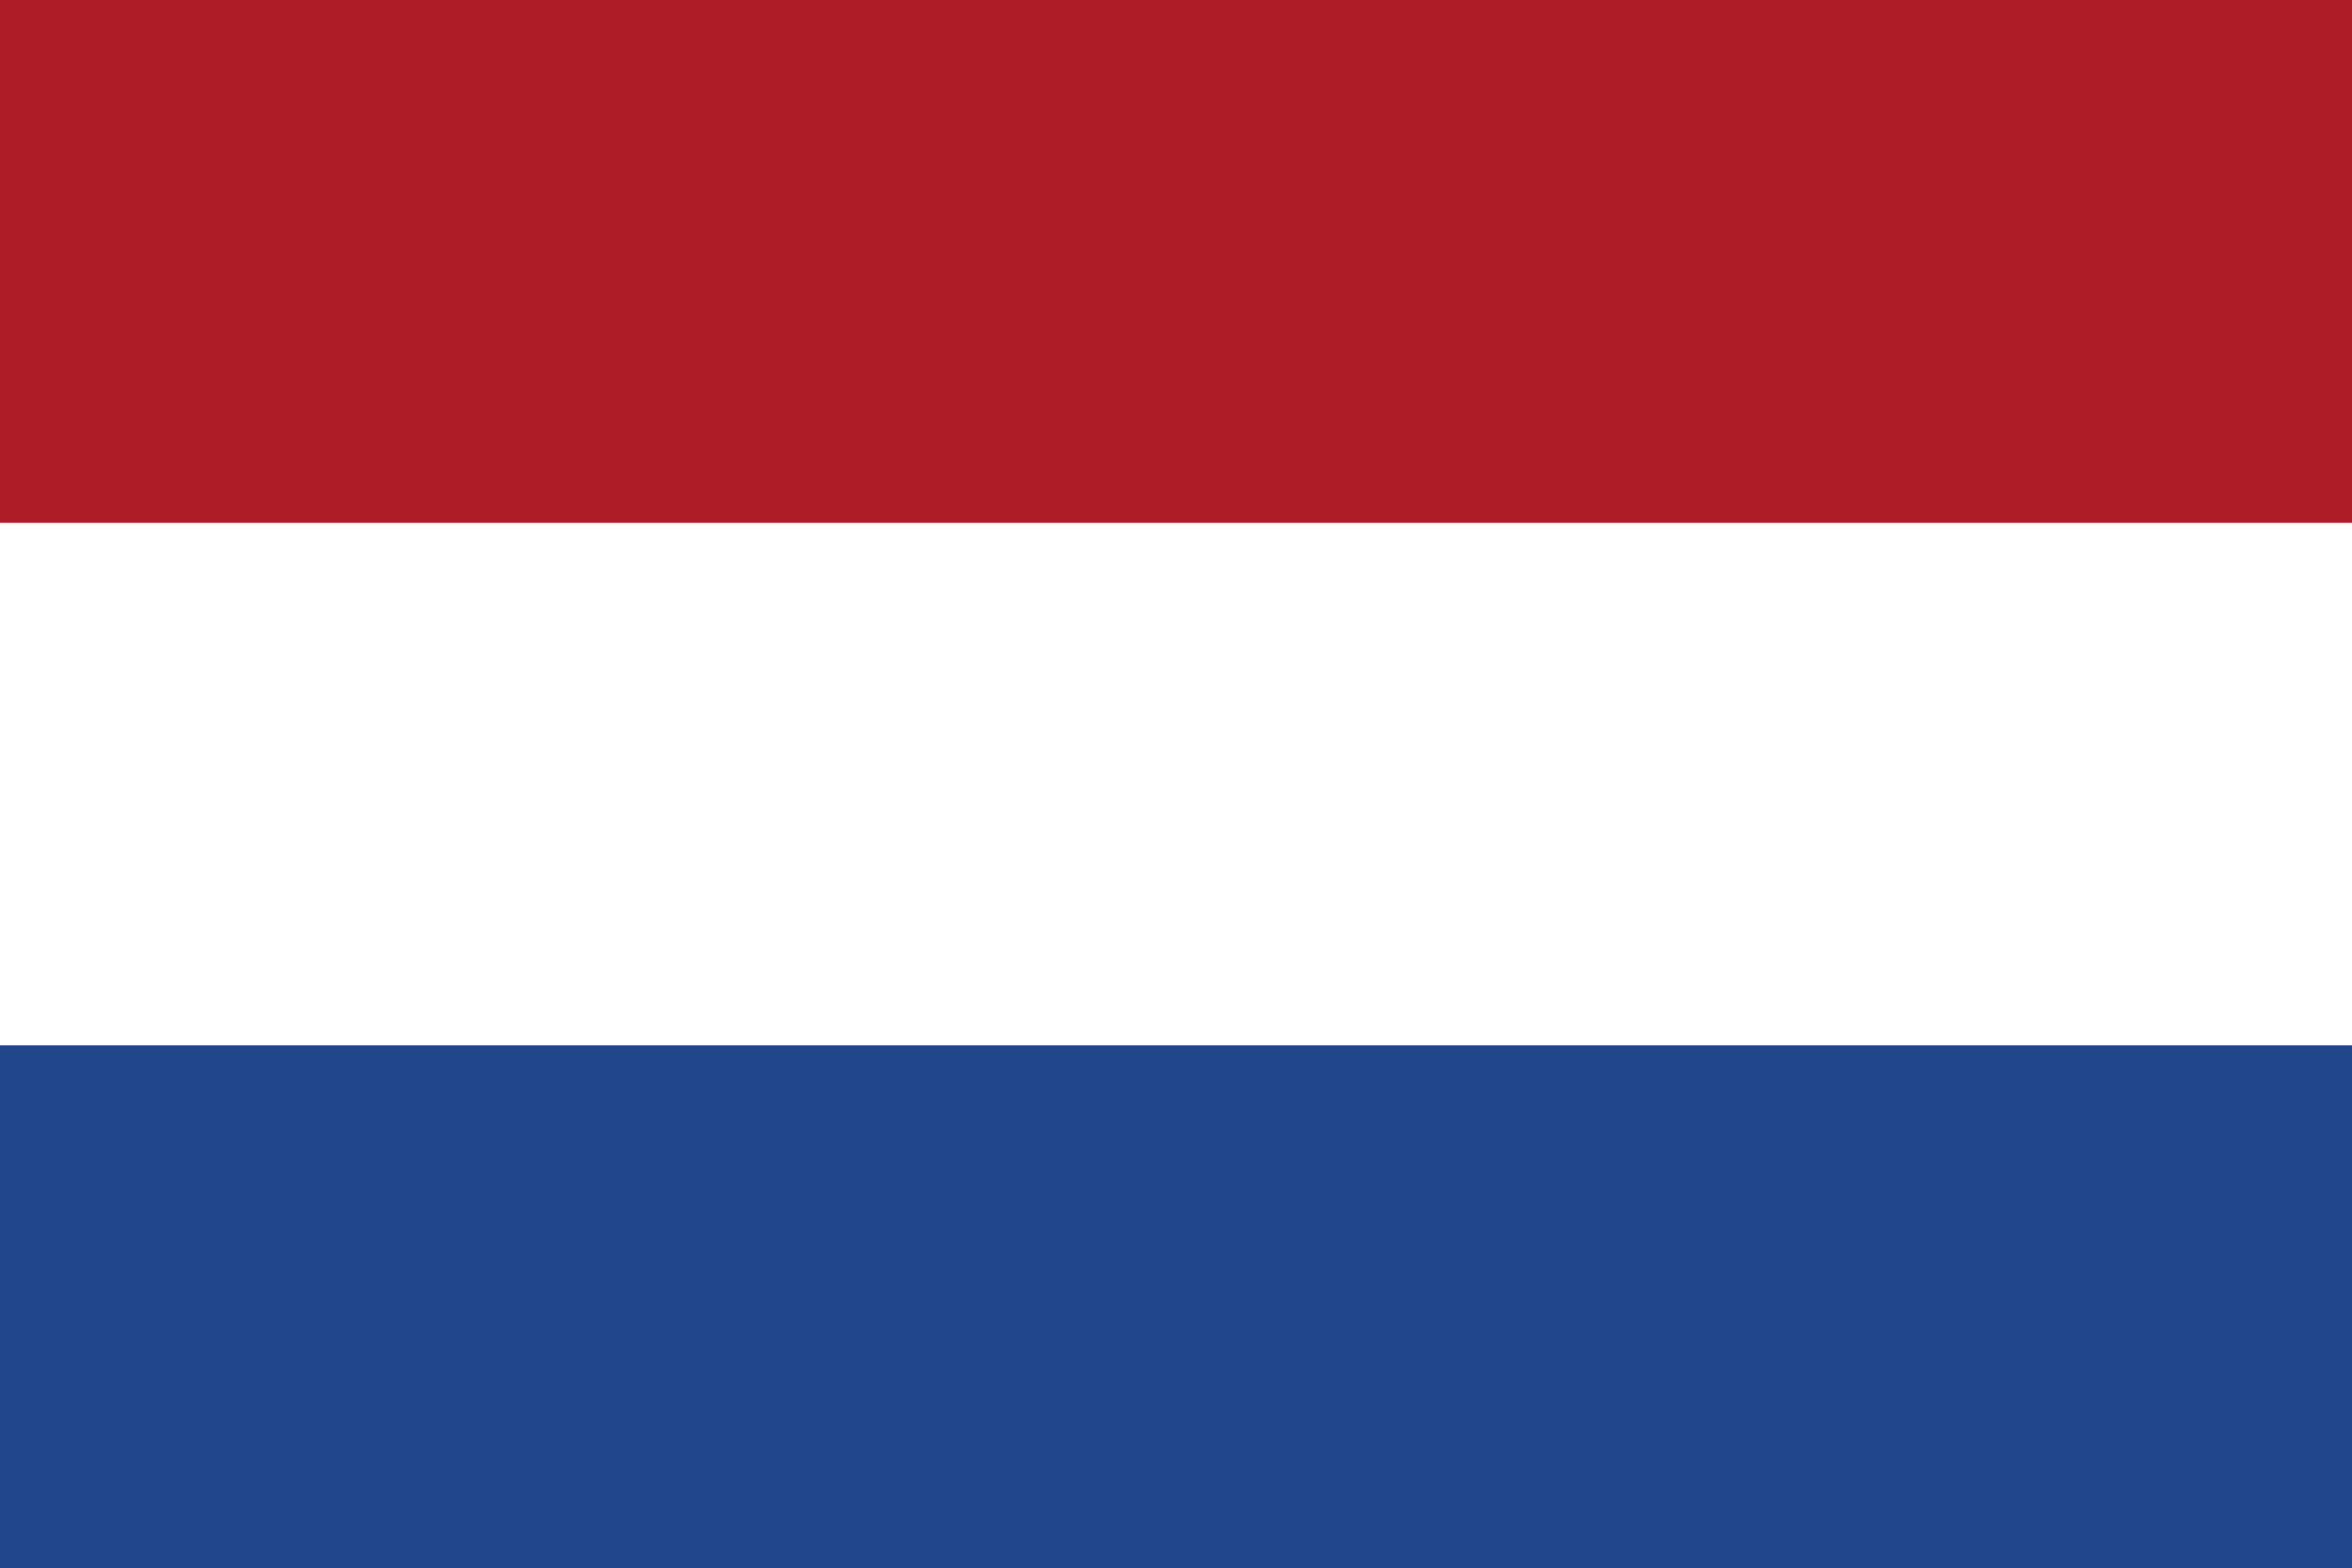

New Caledonia


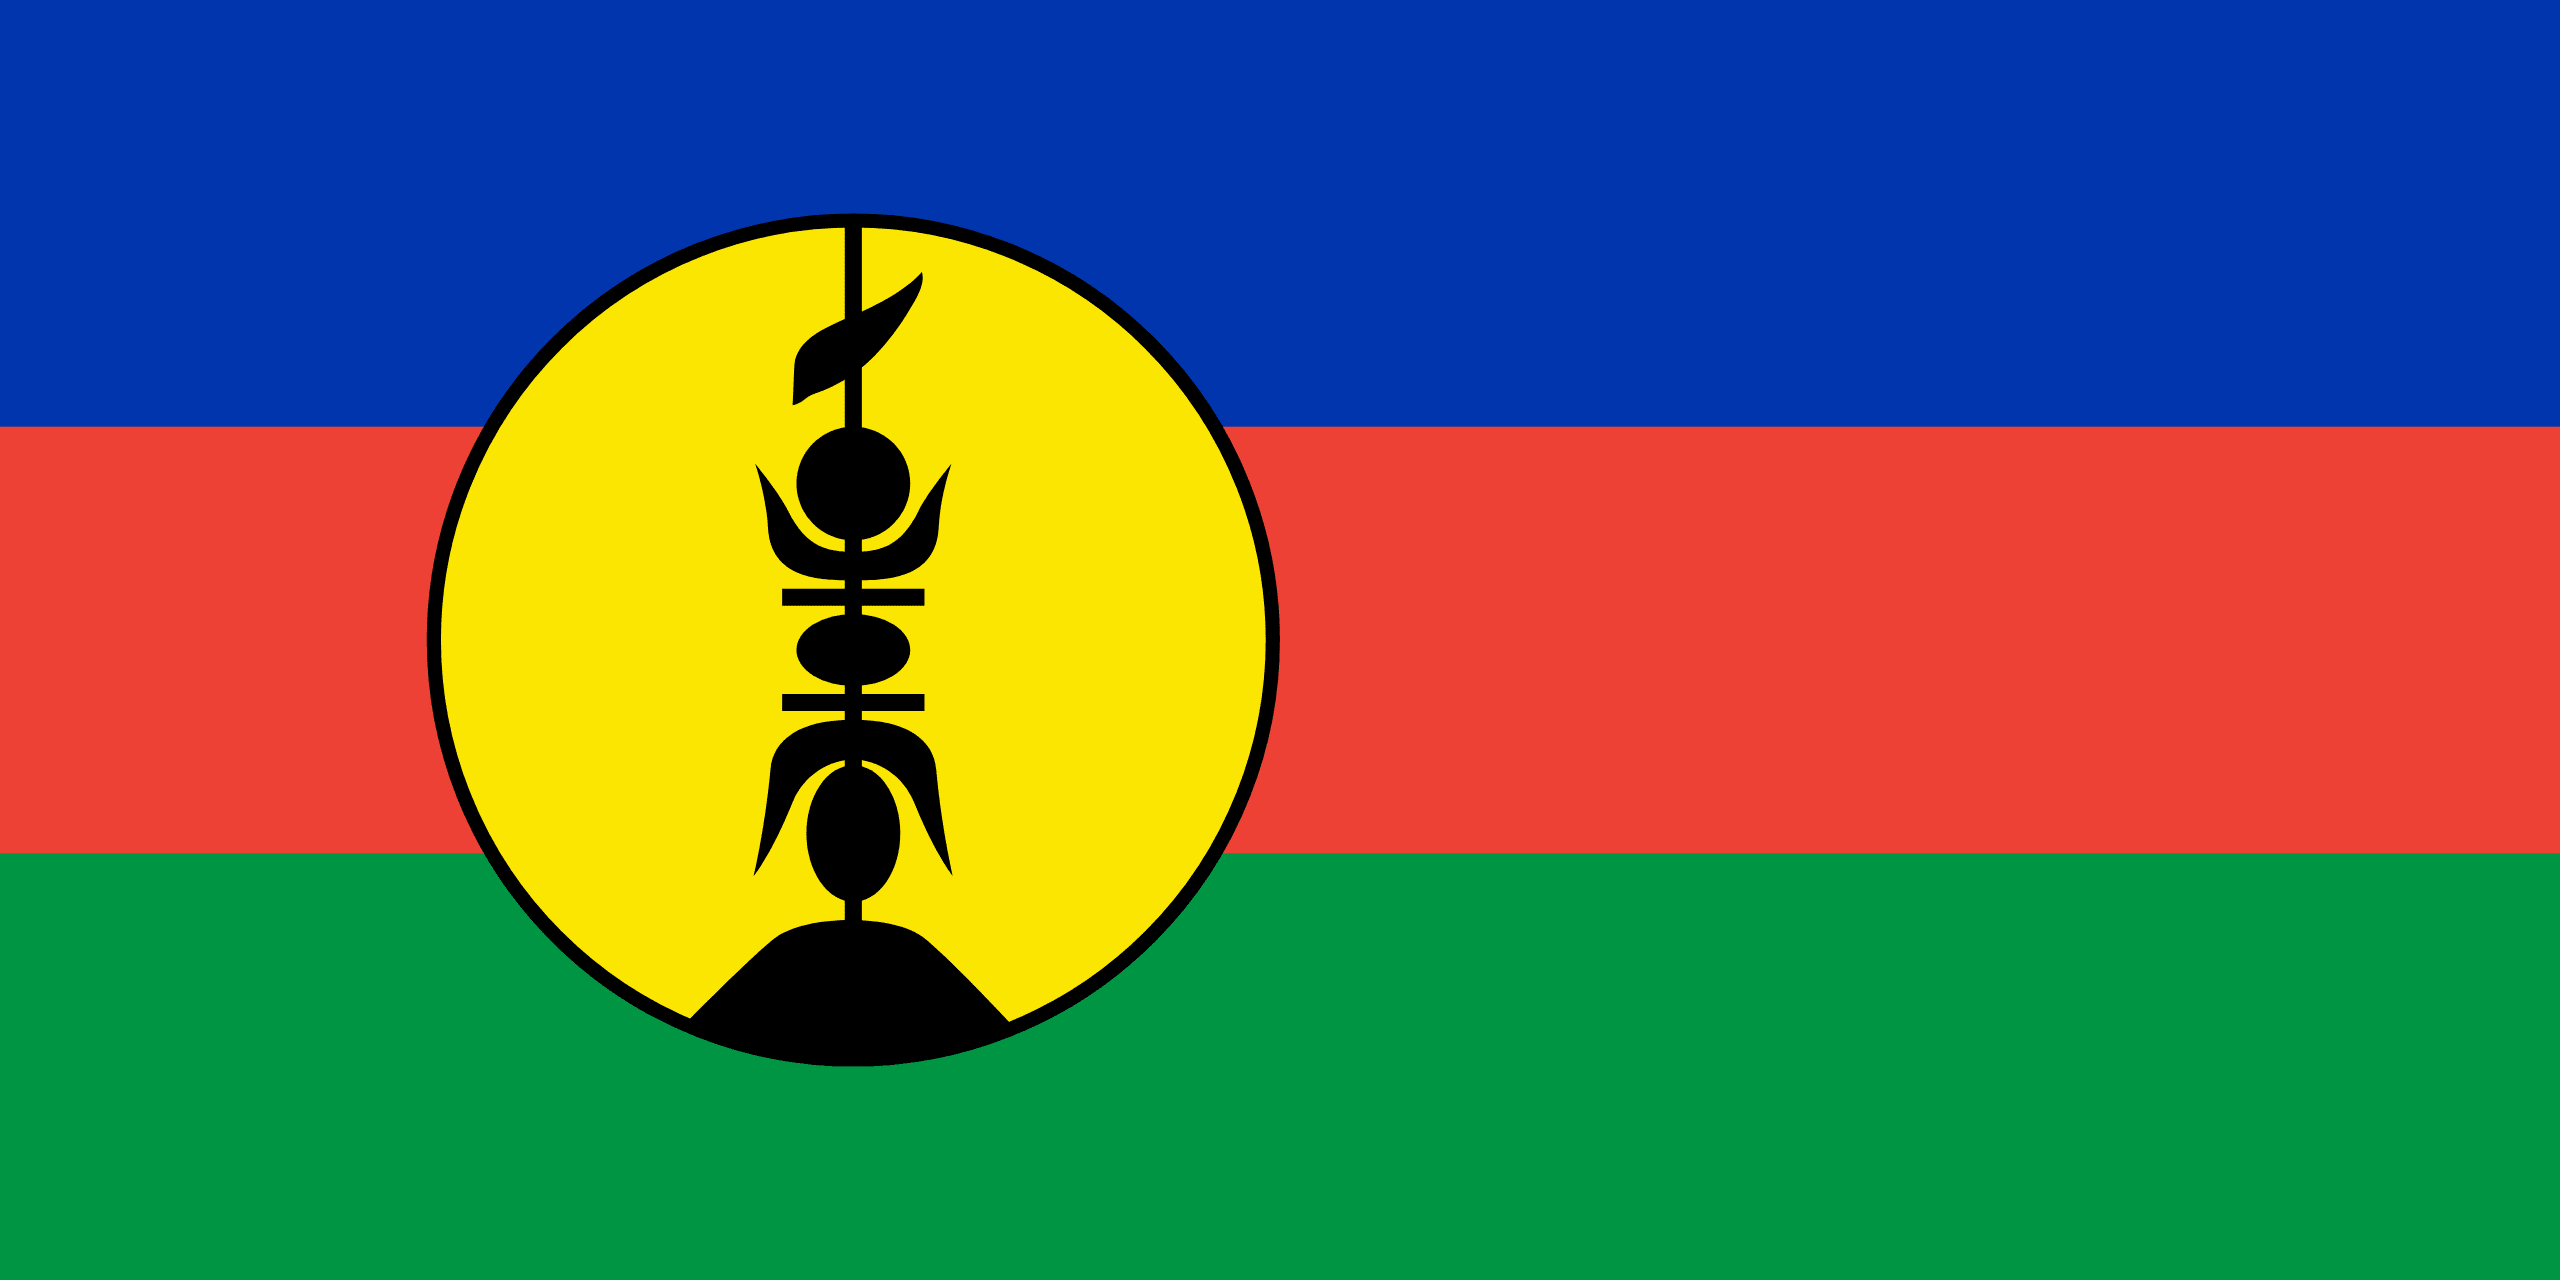

New Zealand


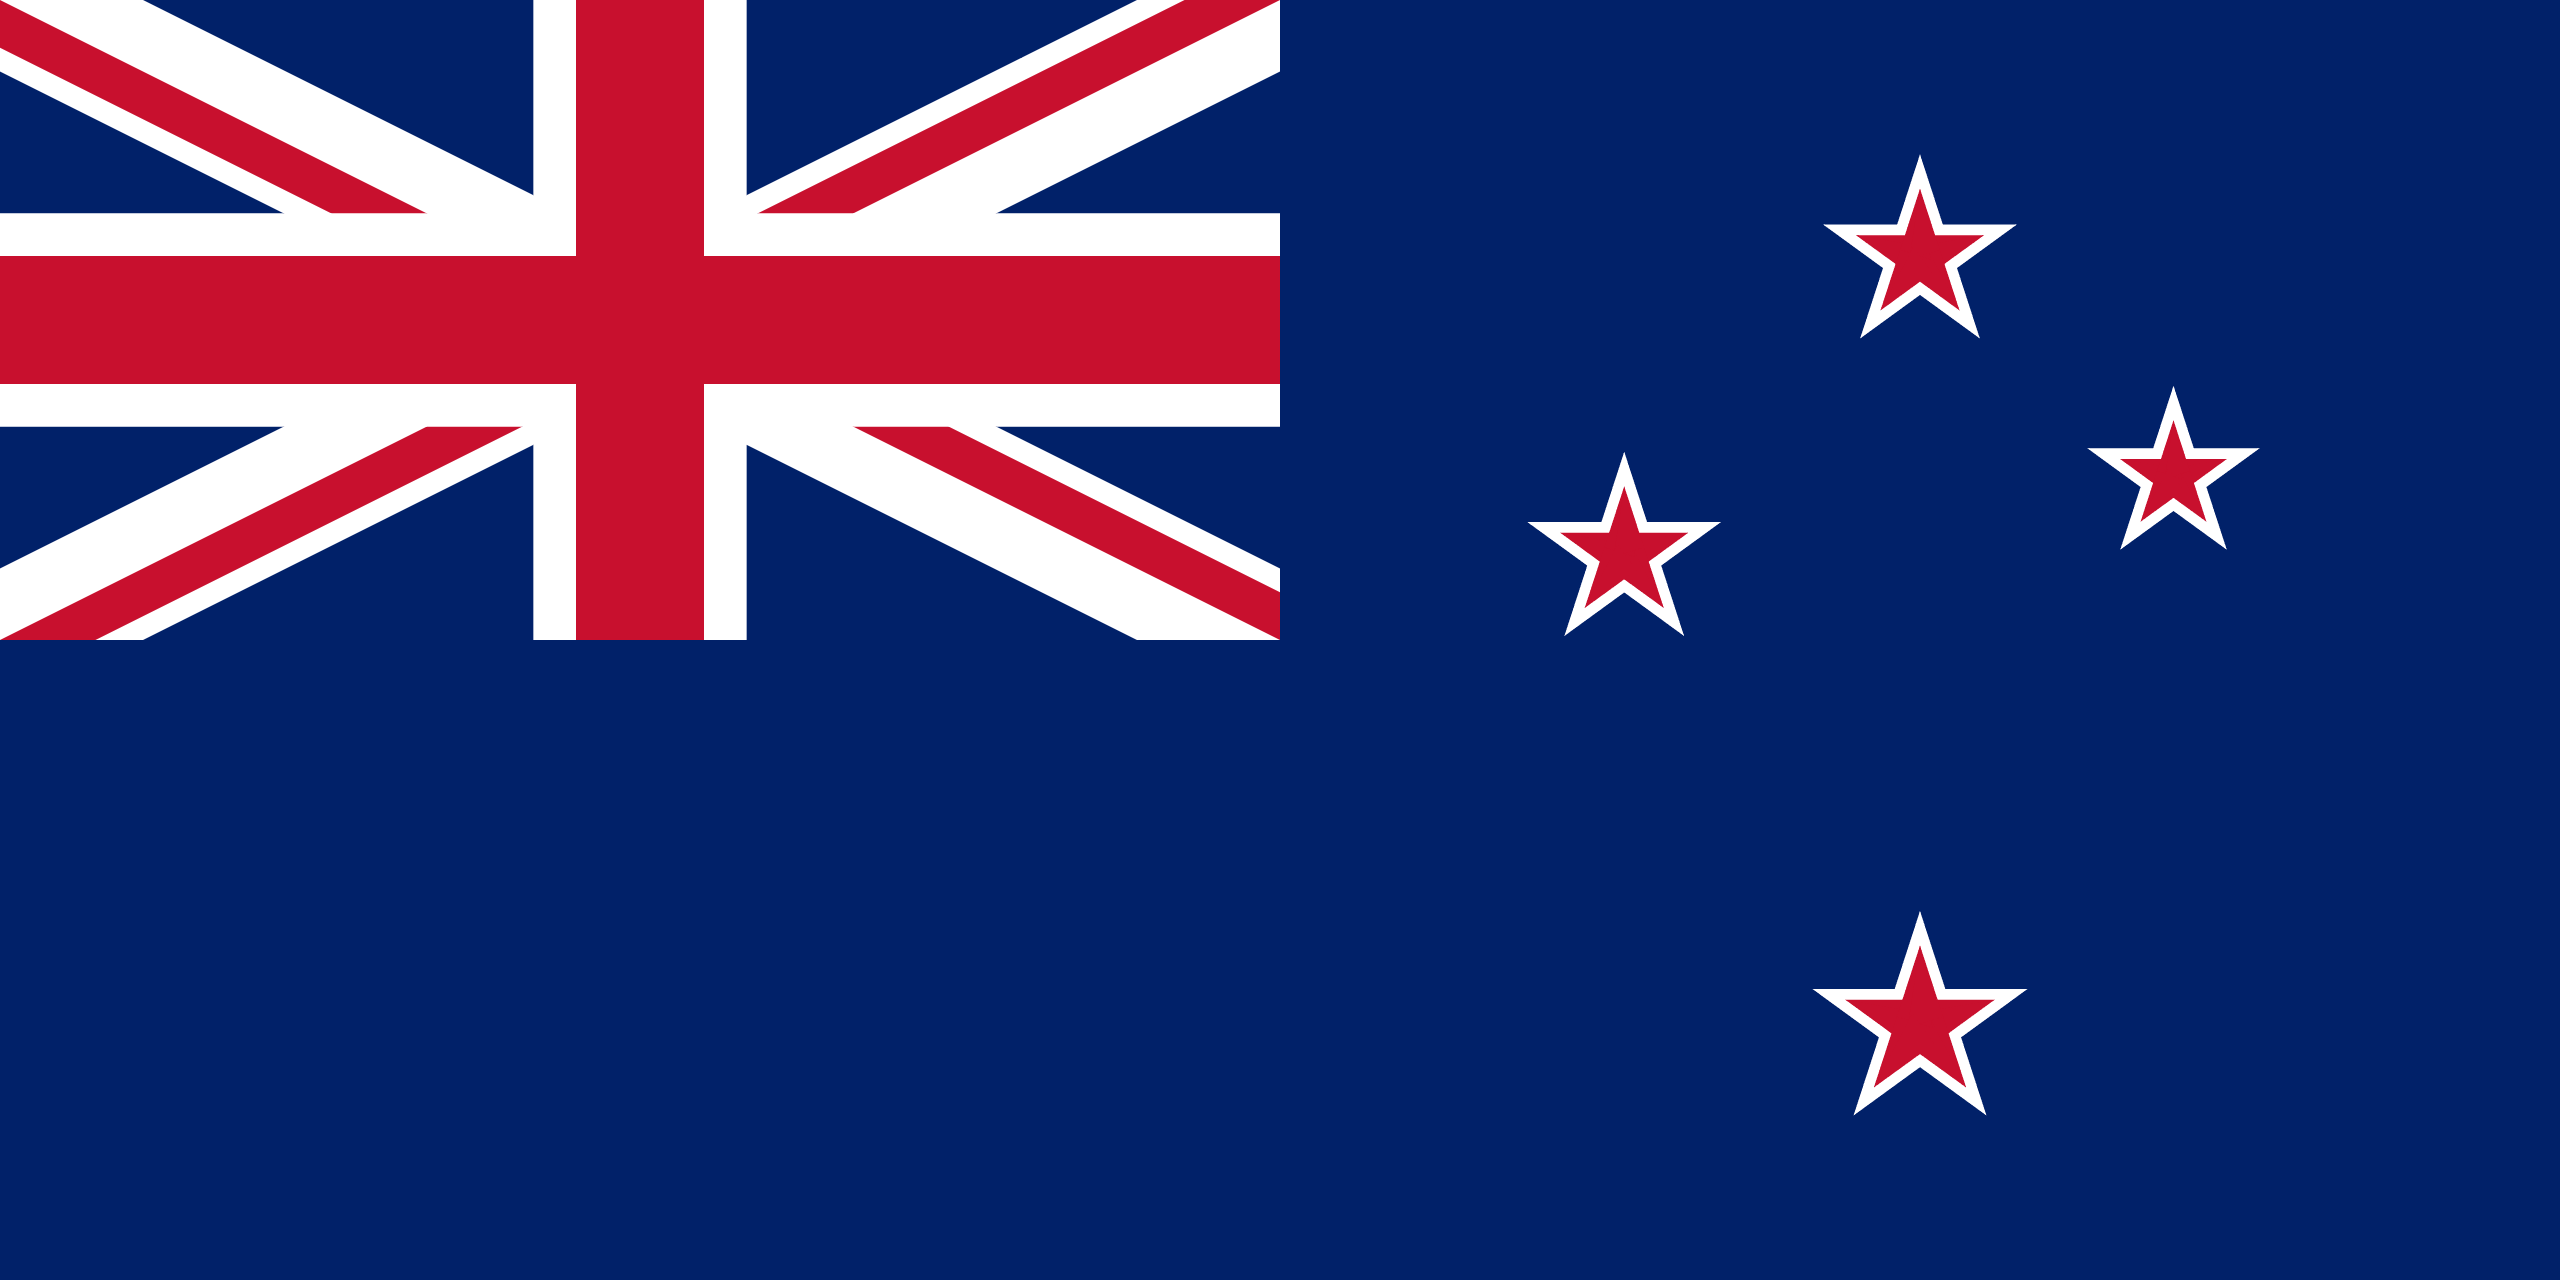

Nicaragua


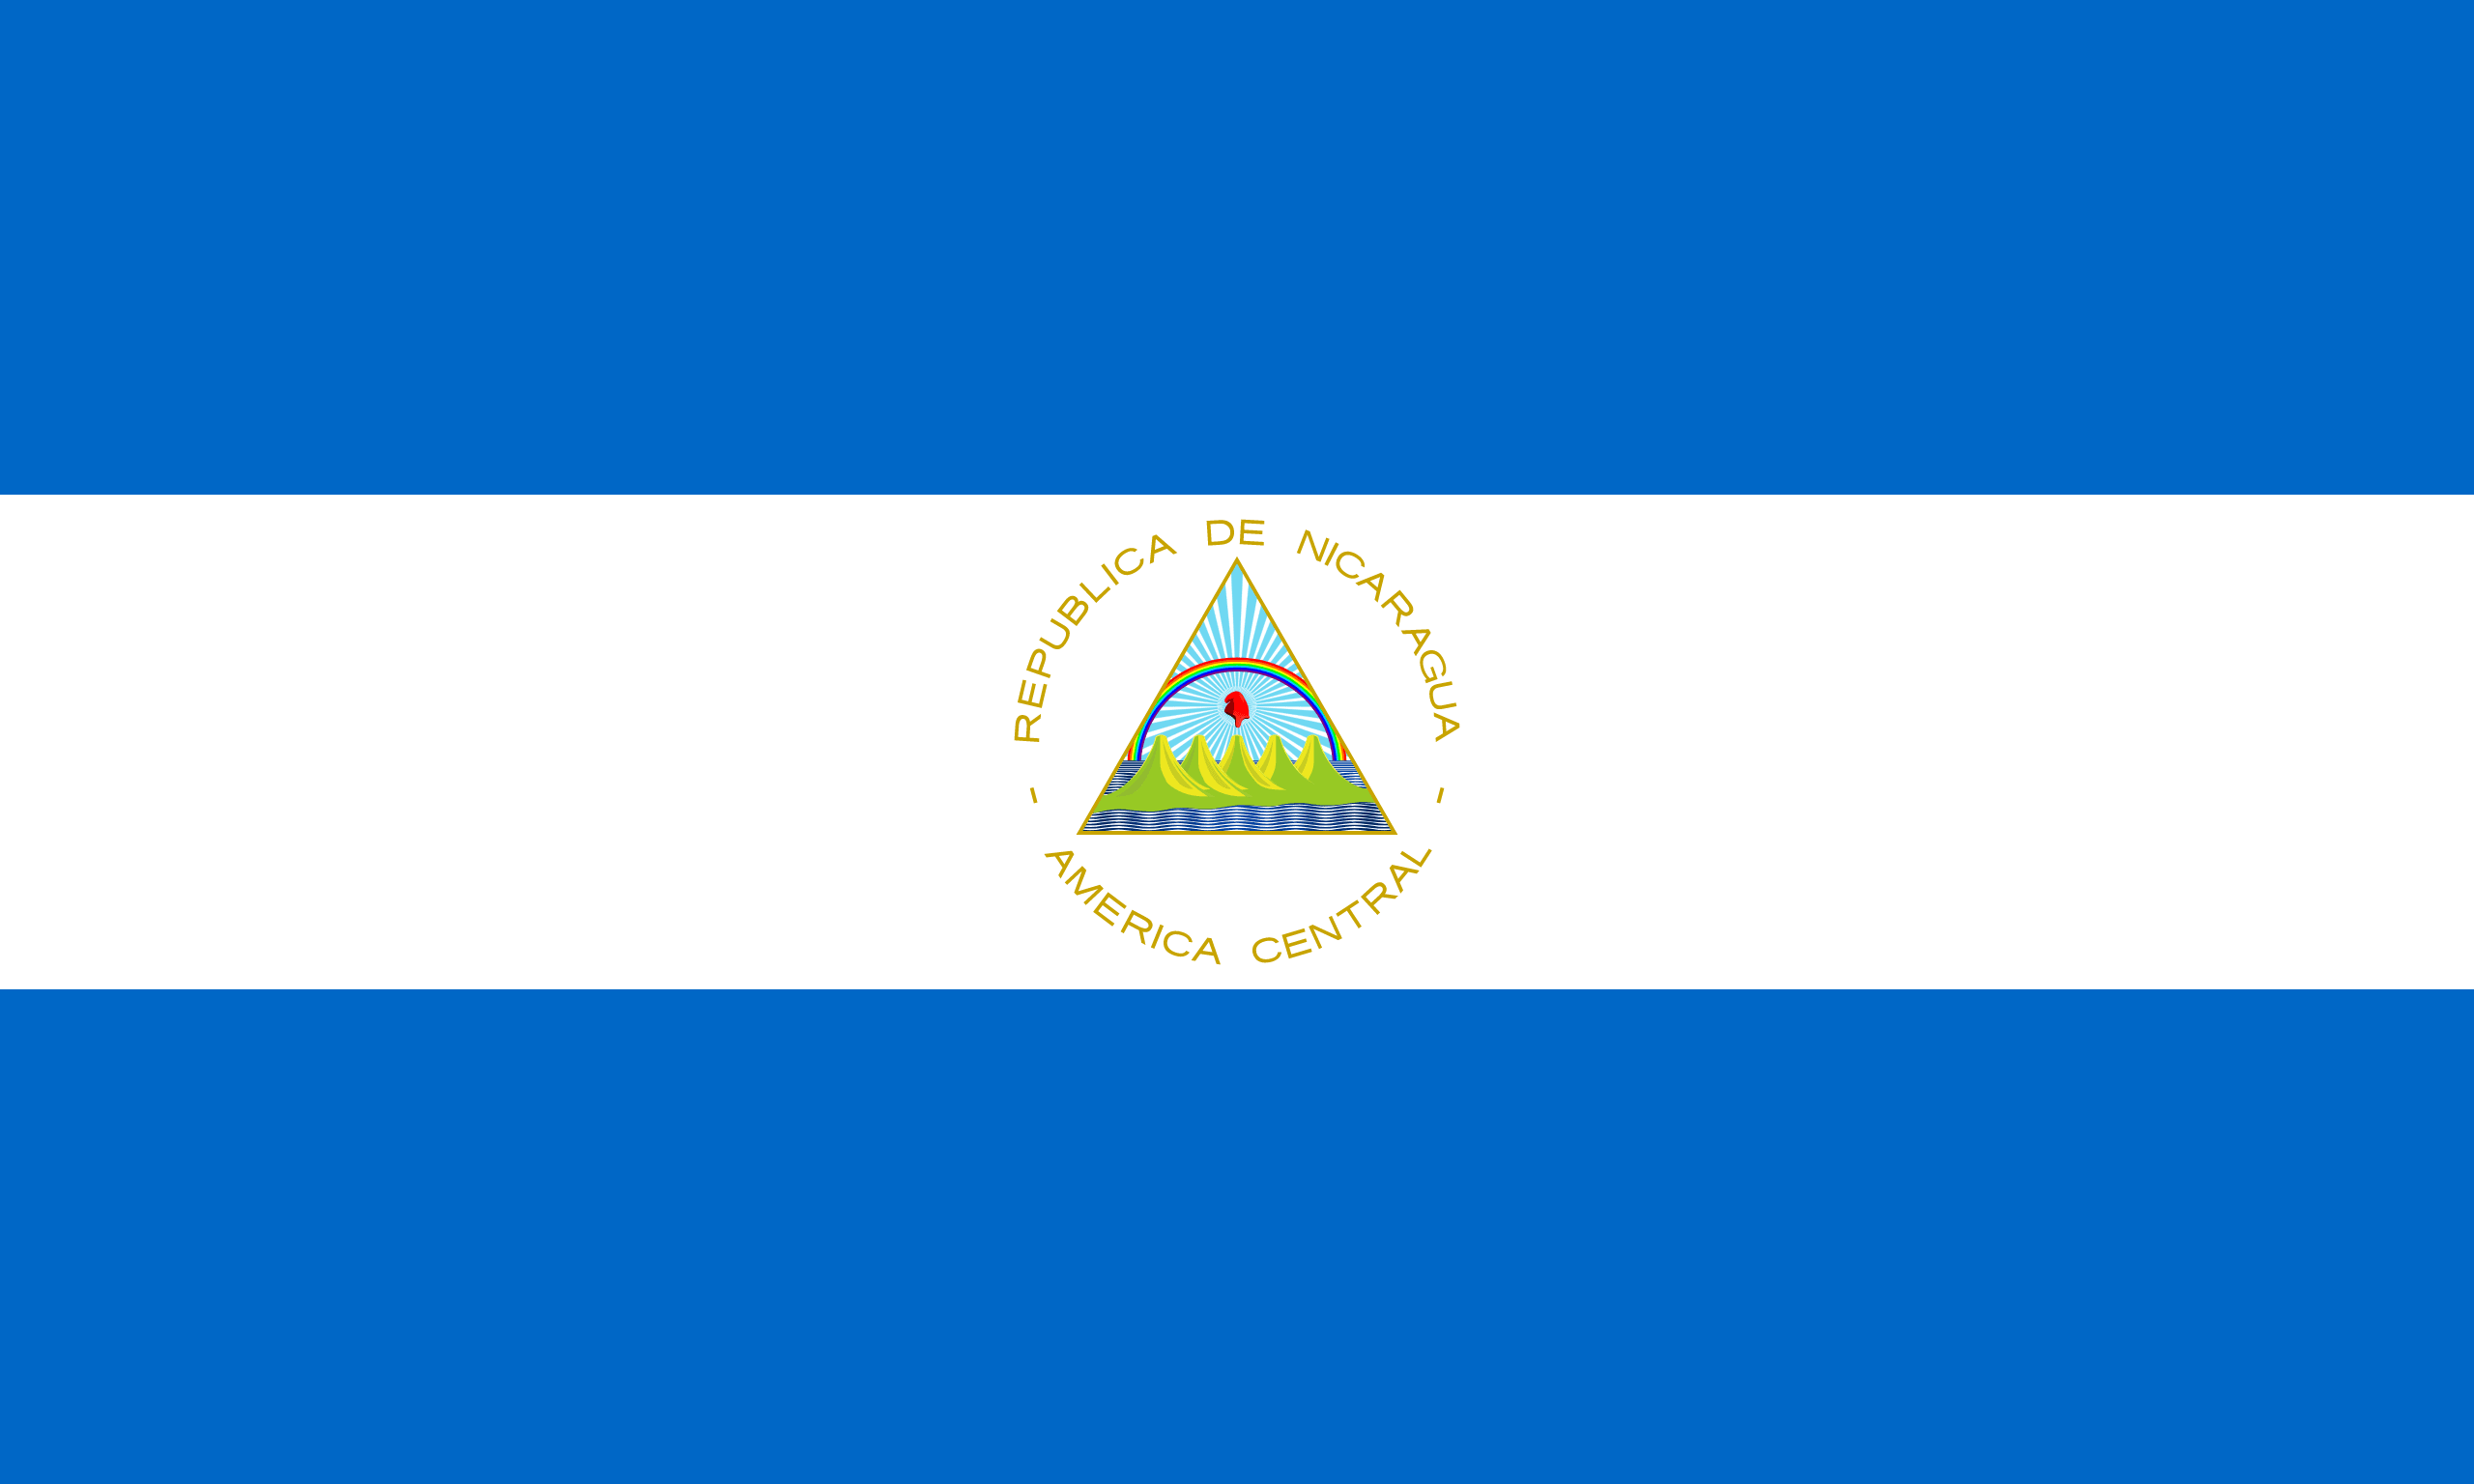

Niger


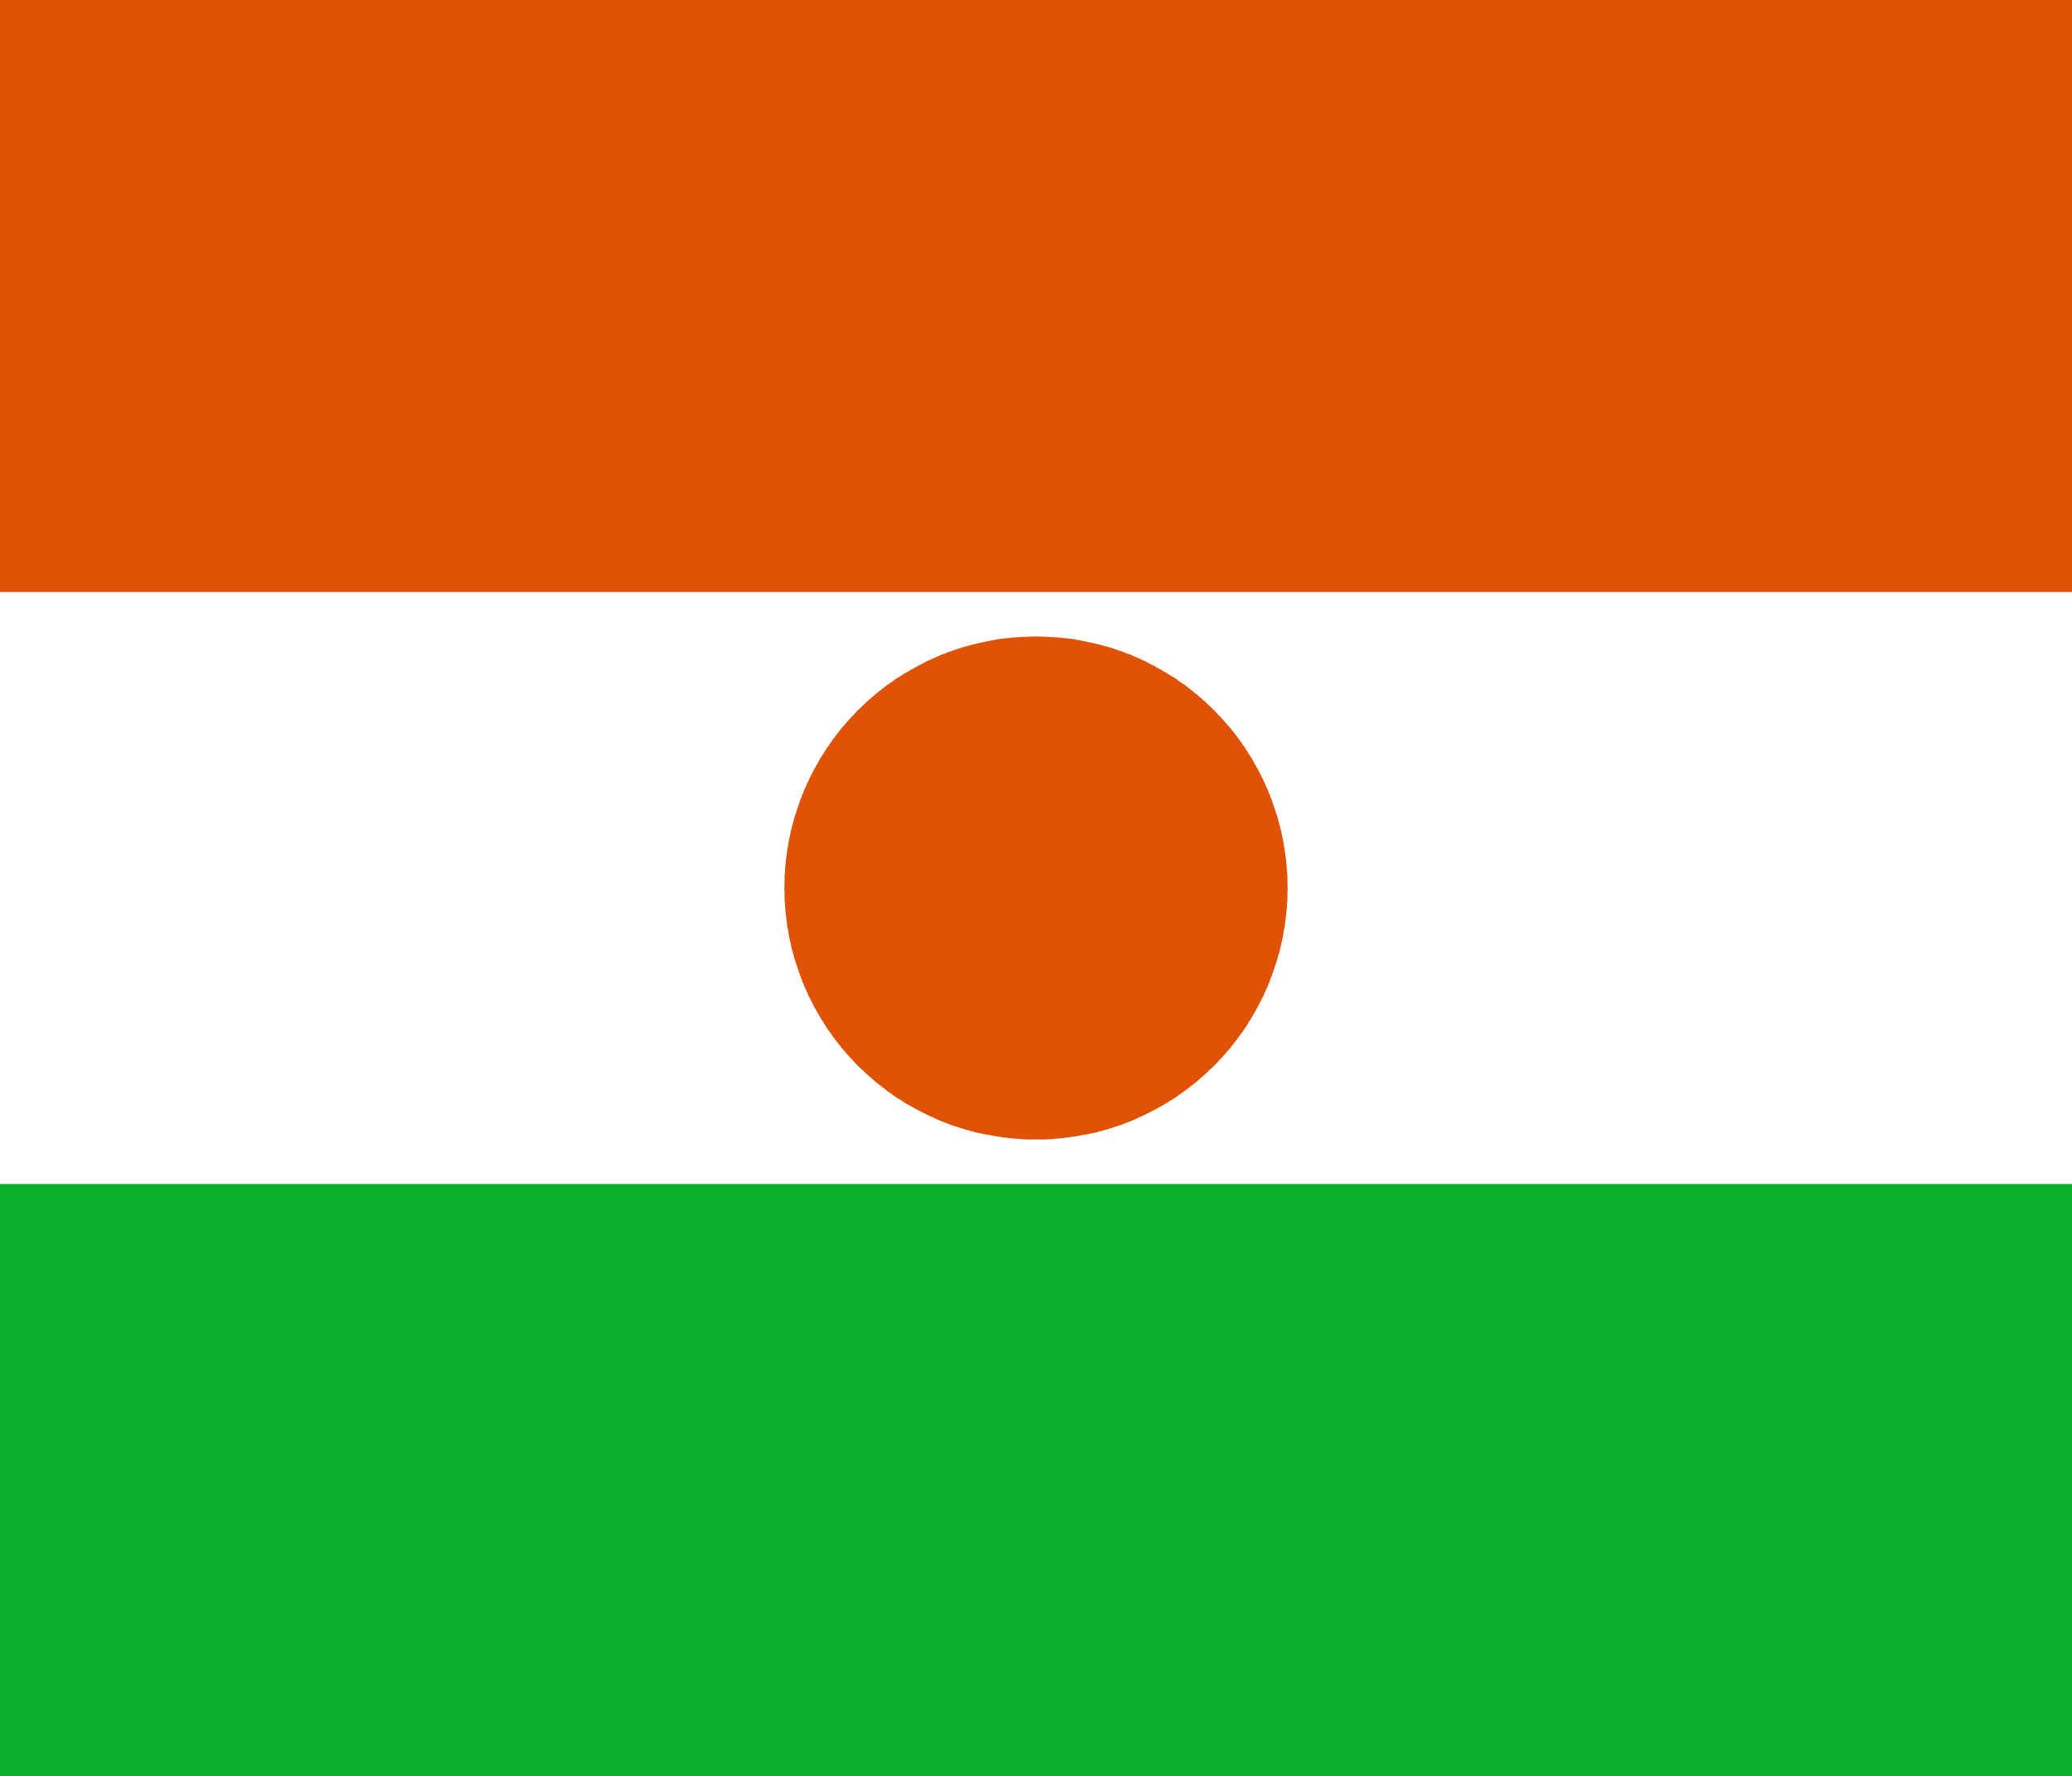

Nigeria


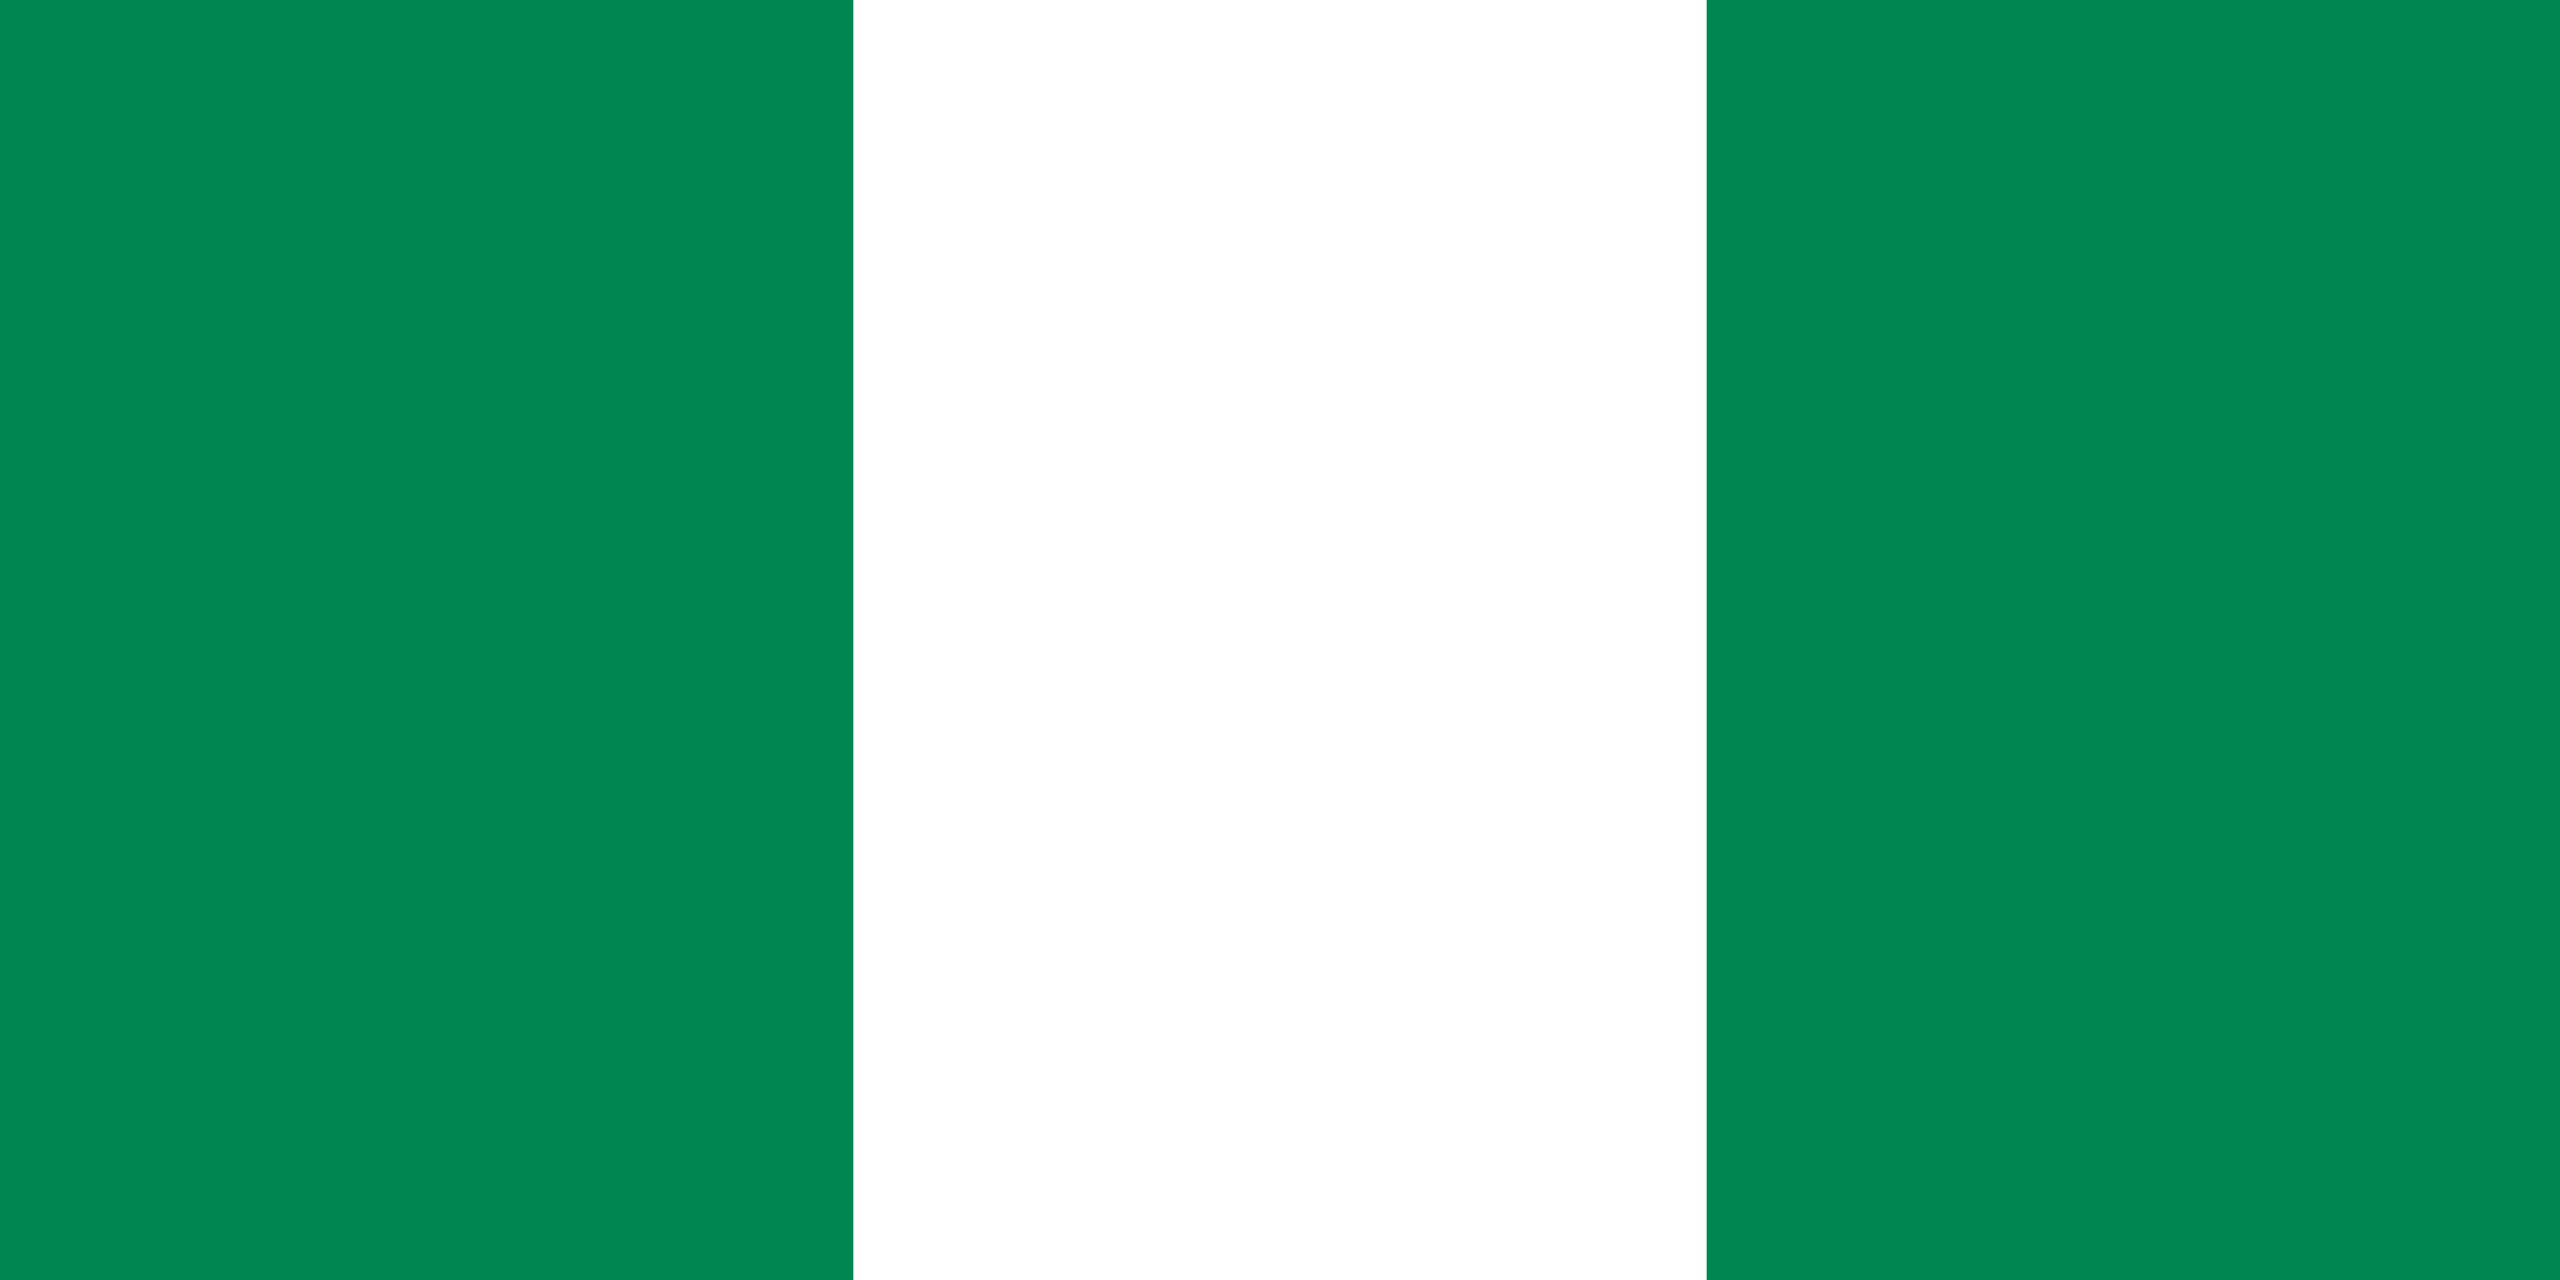

Niue


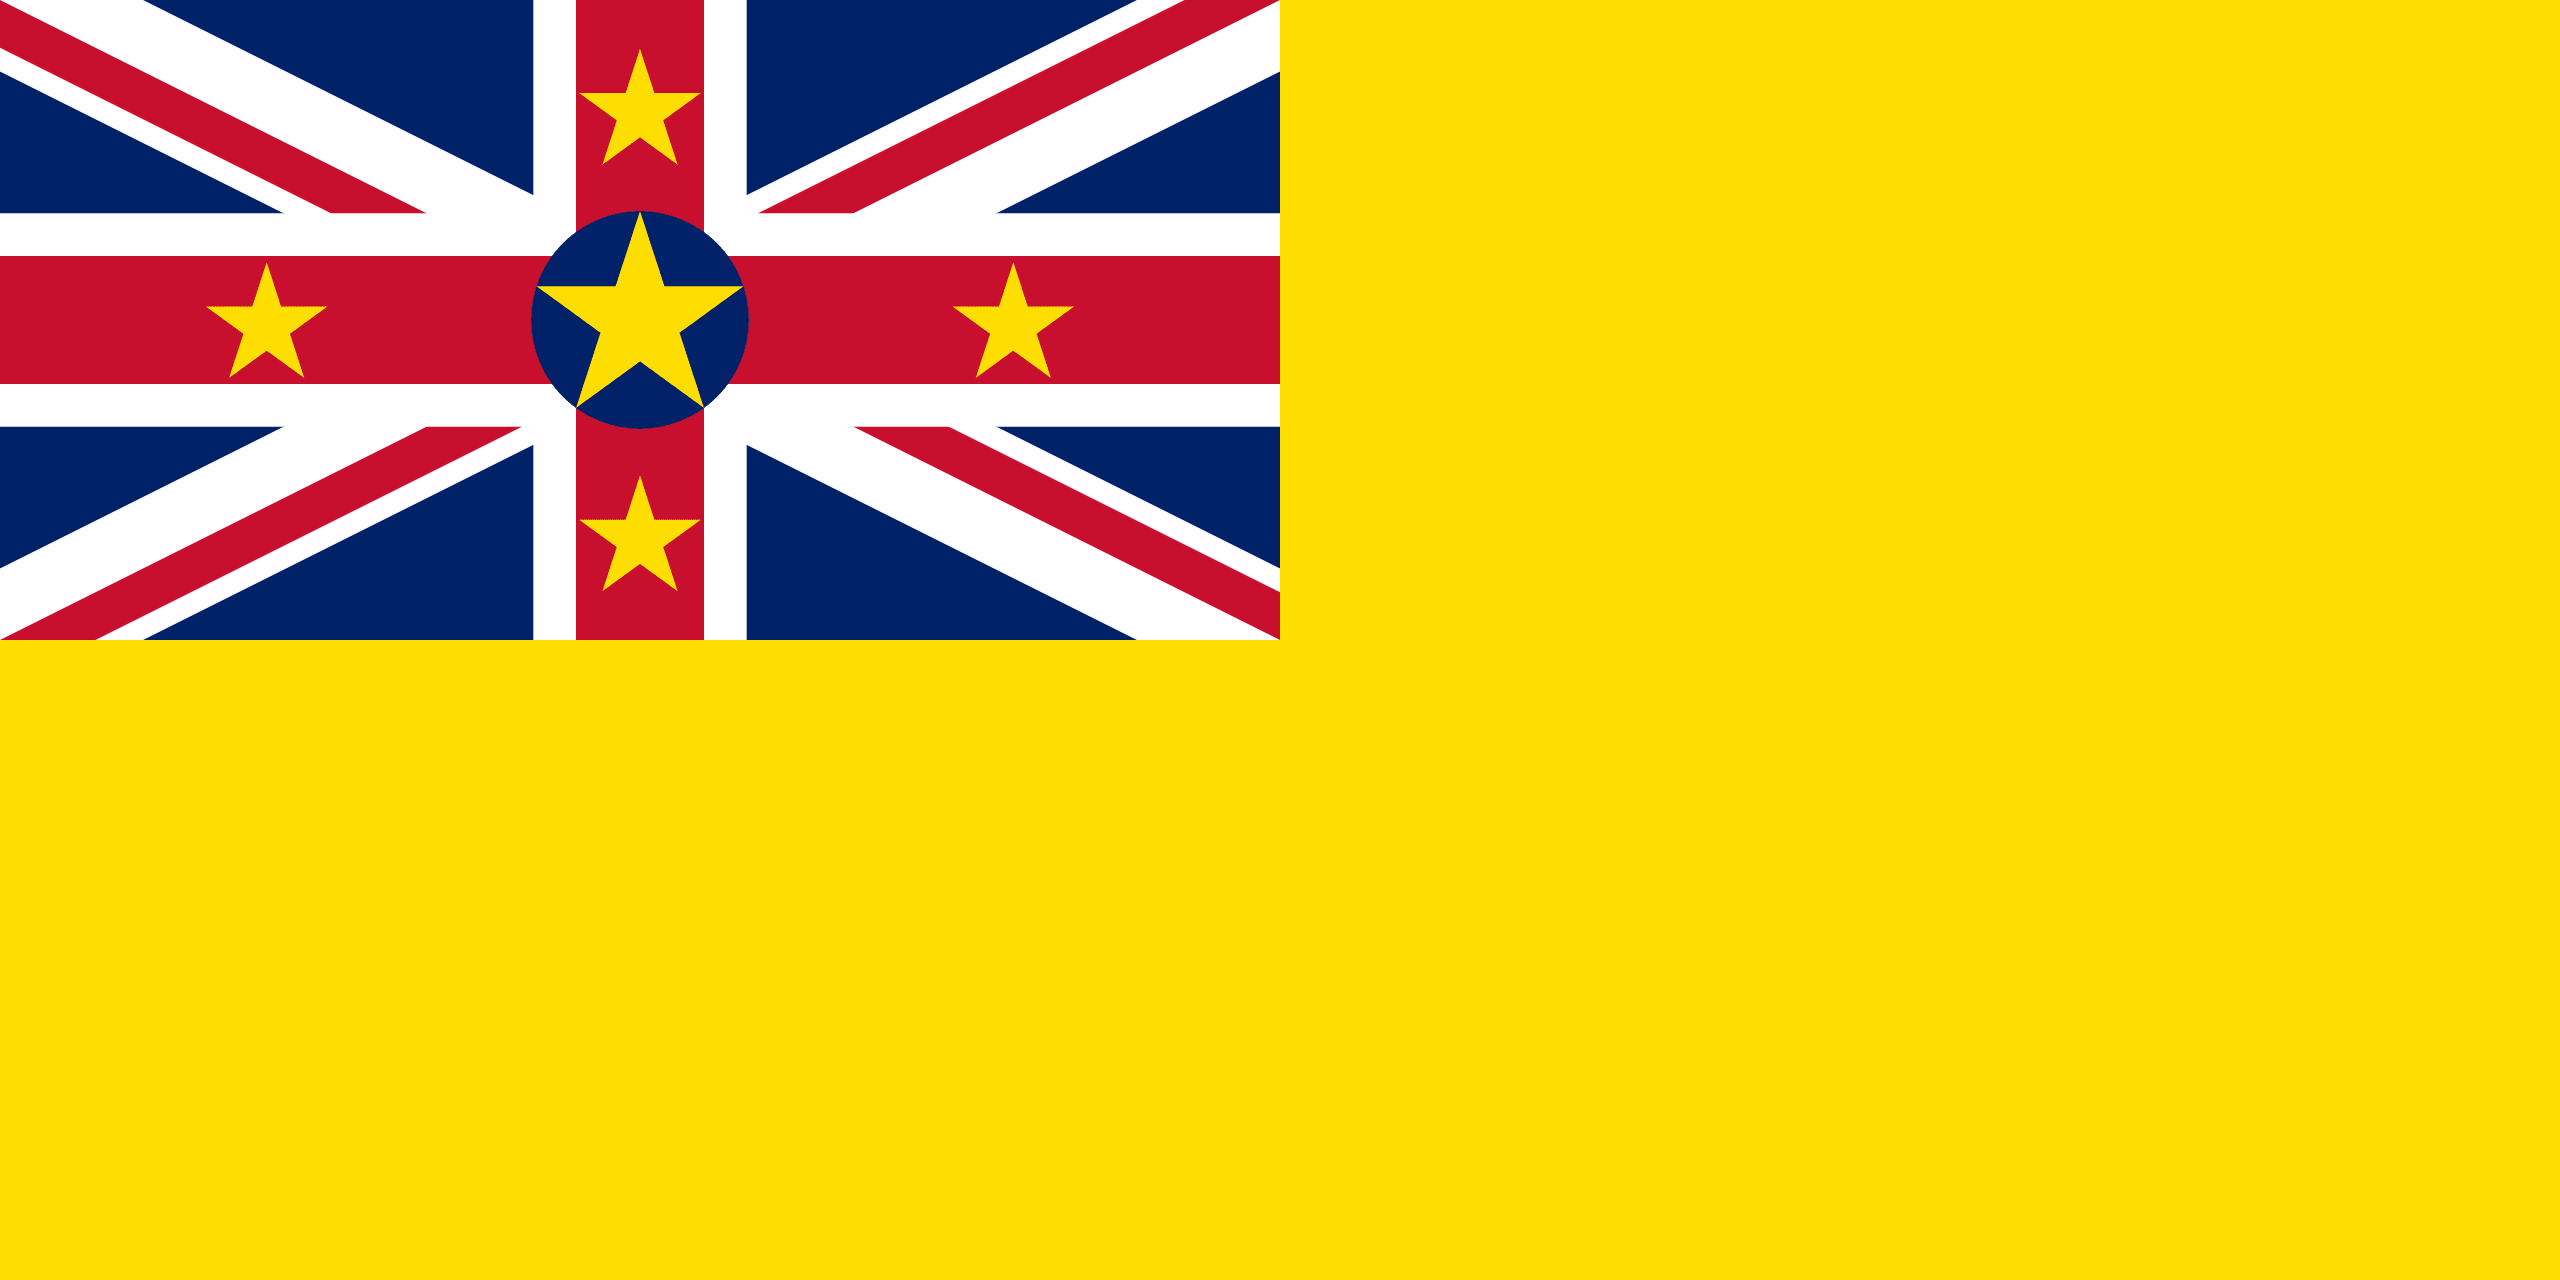

Norfolk Island


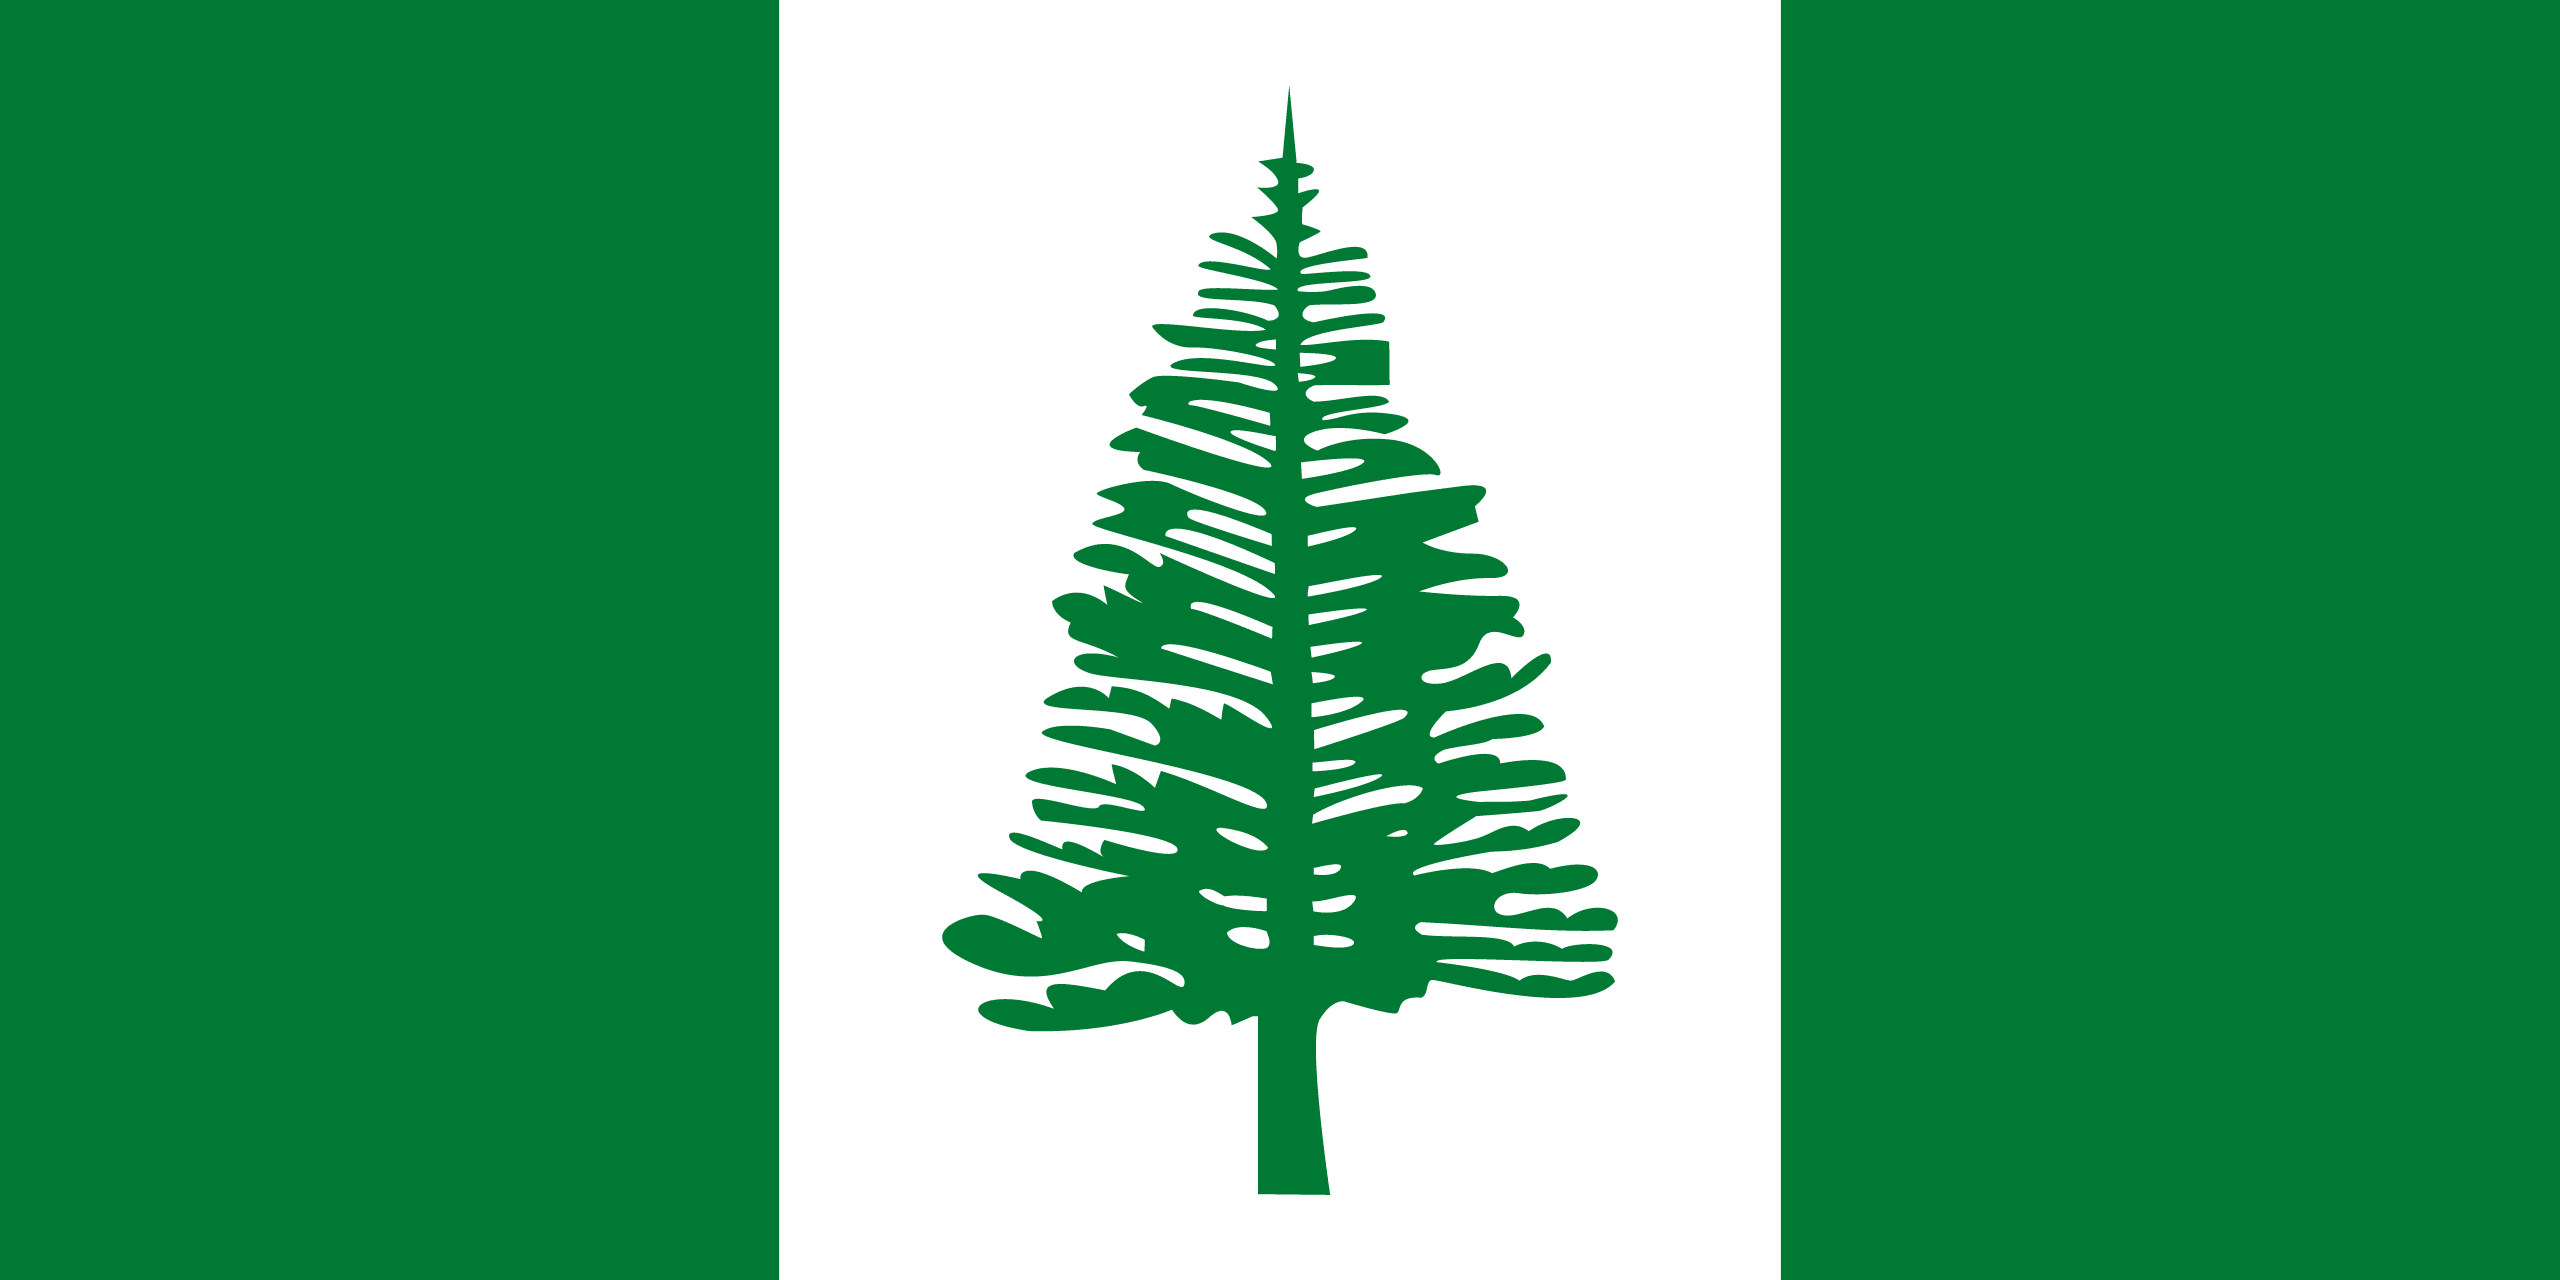

North Macedonia


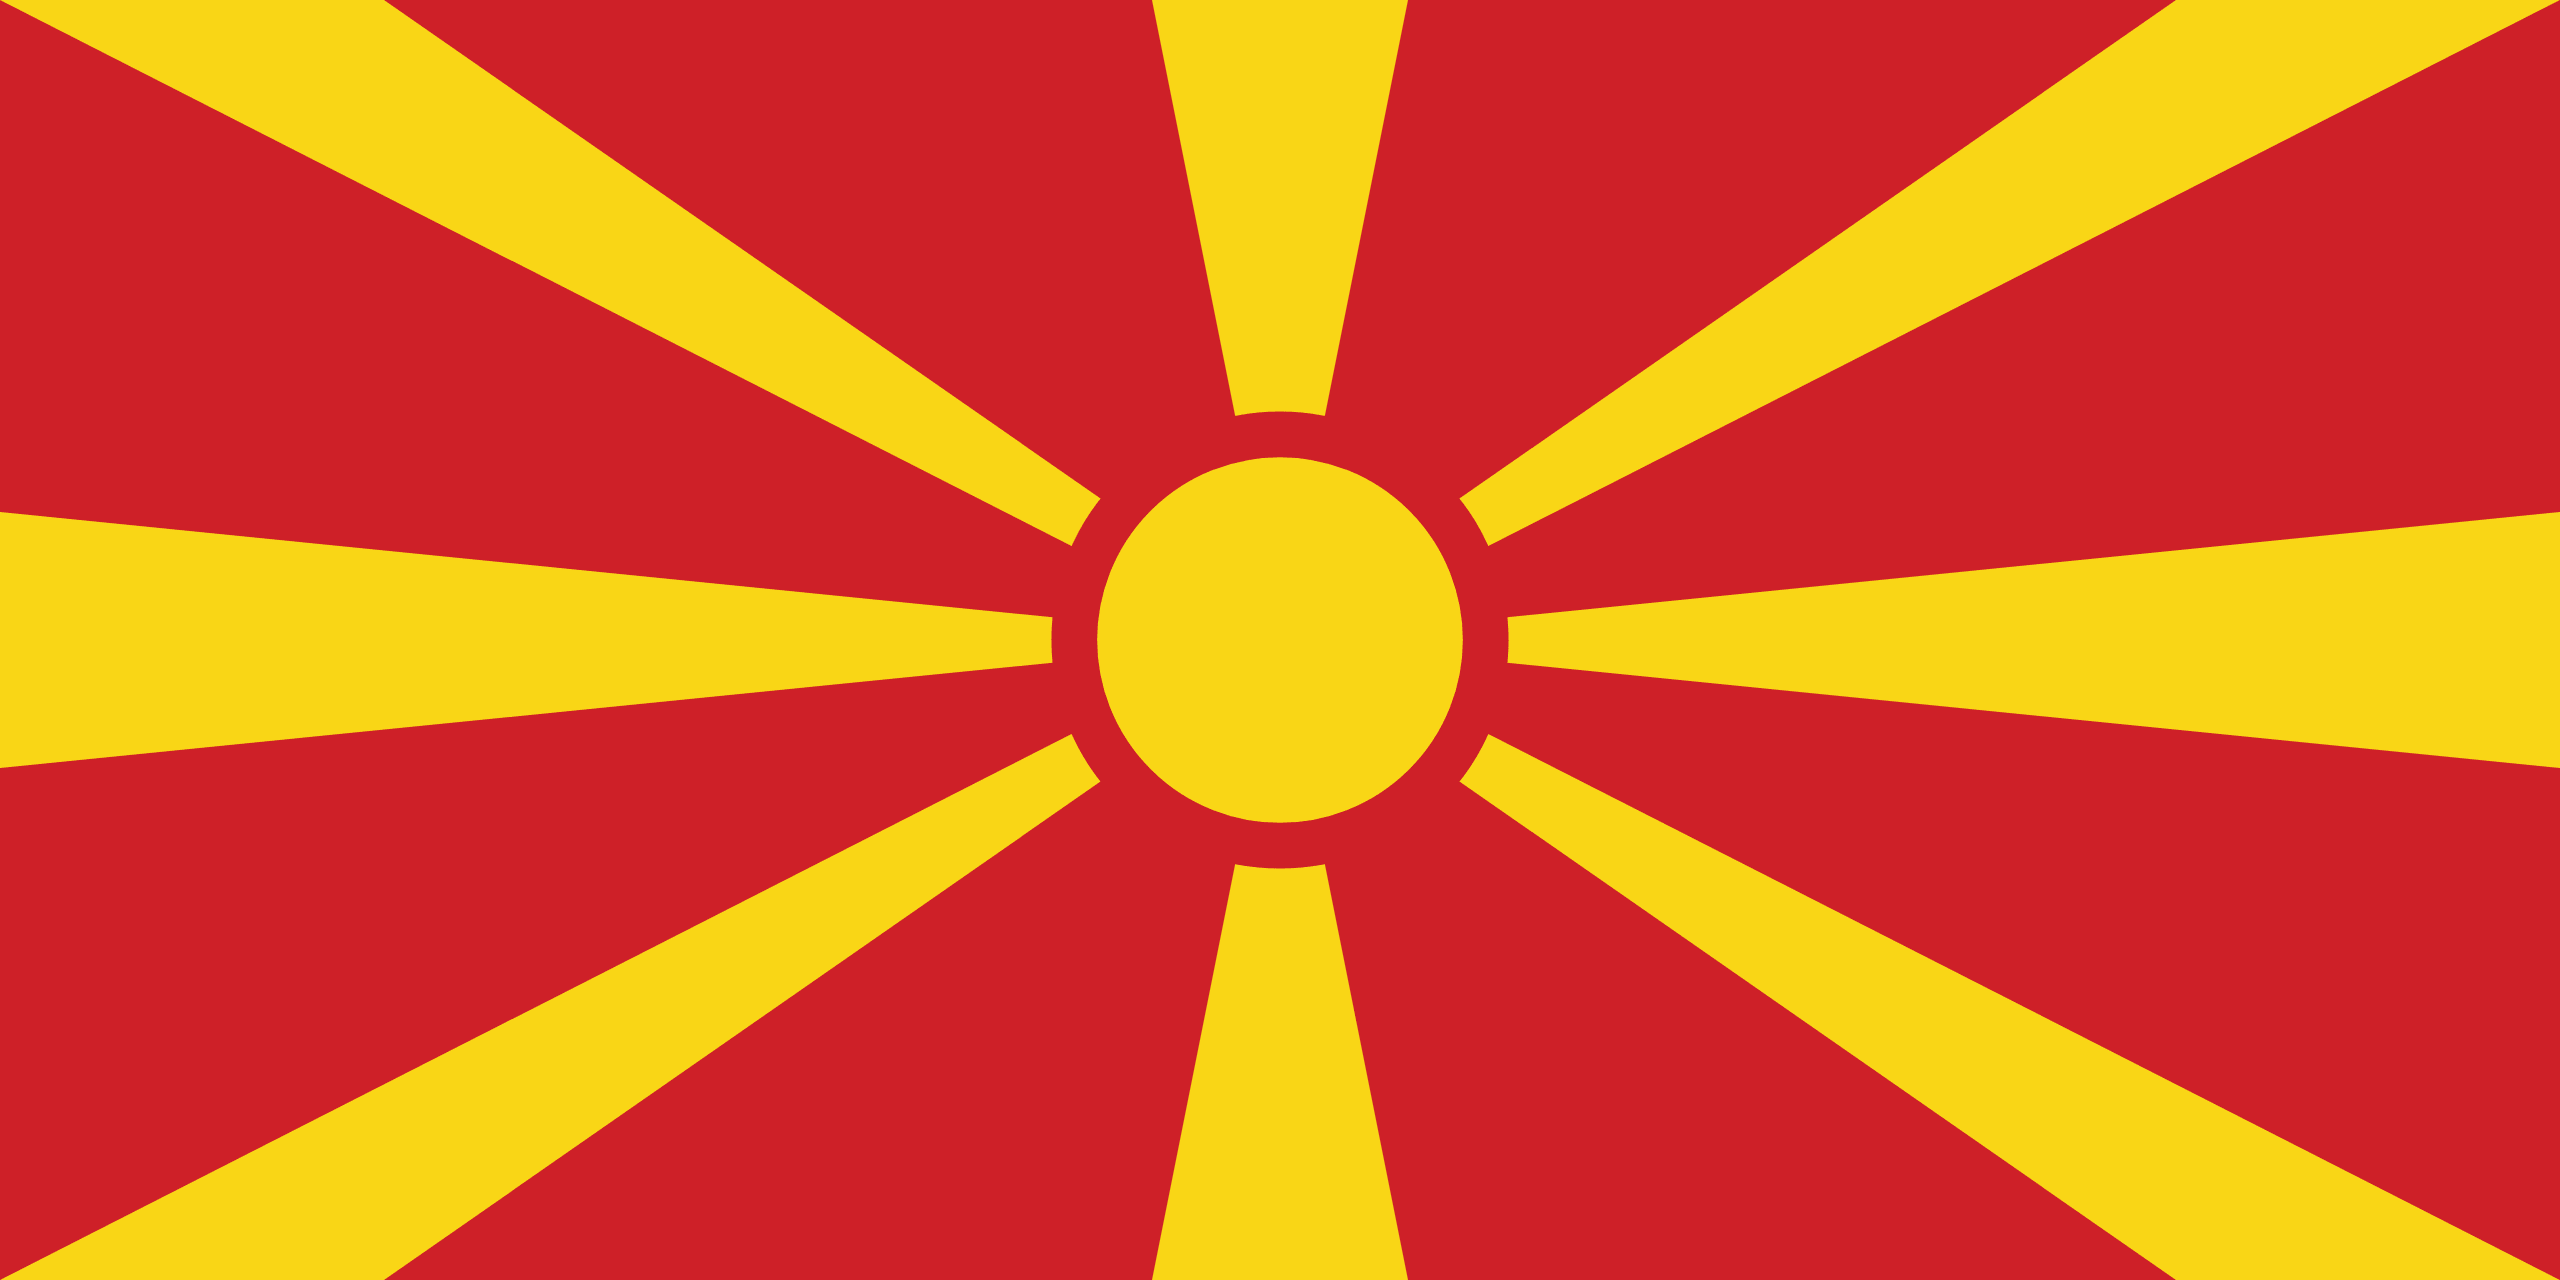

Northern Ireland


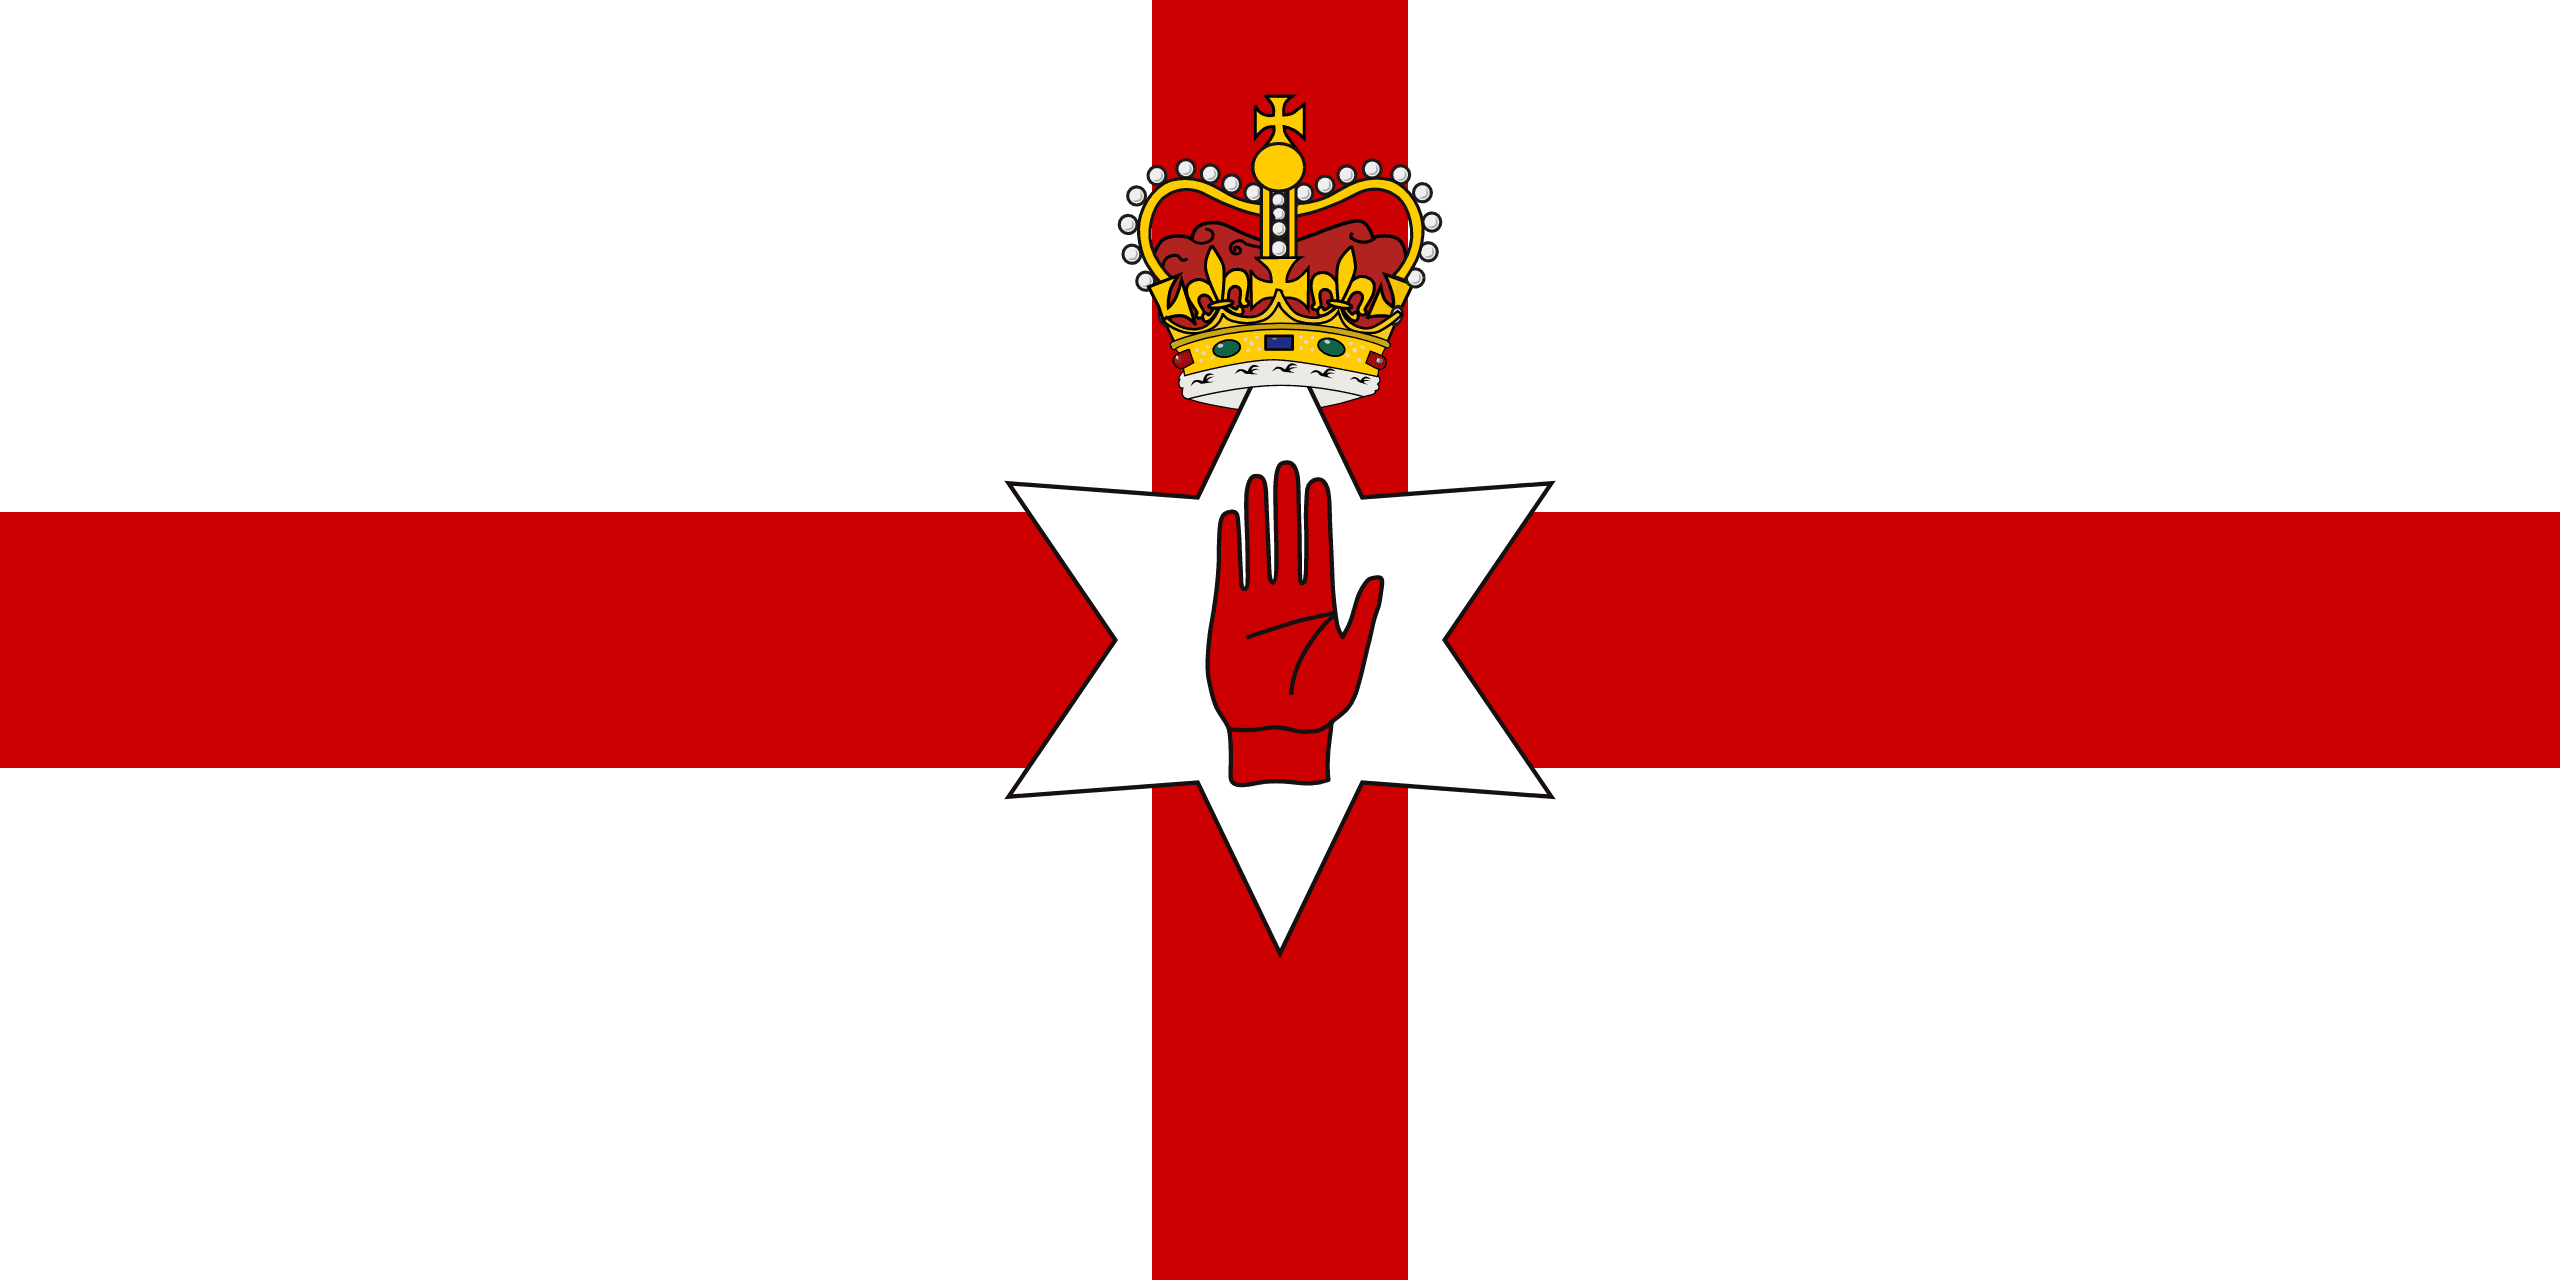

Northern Mariana Islands


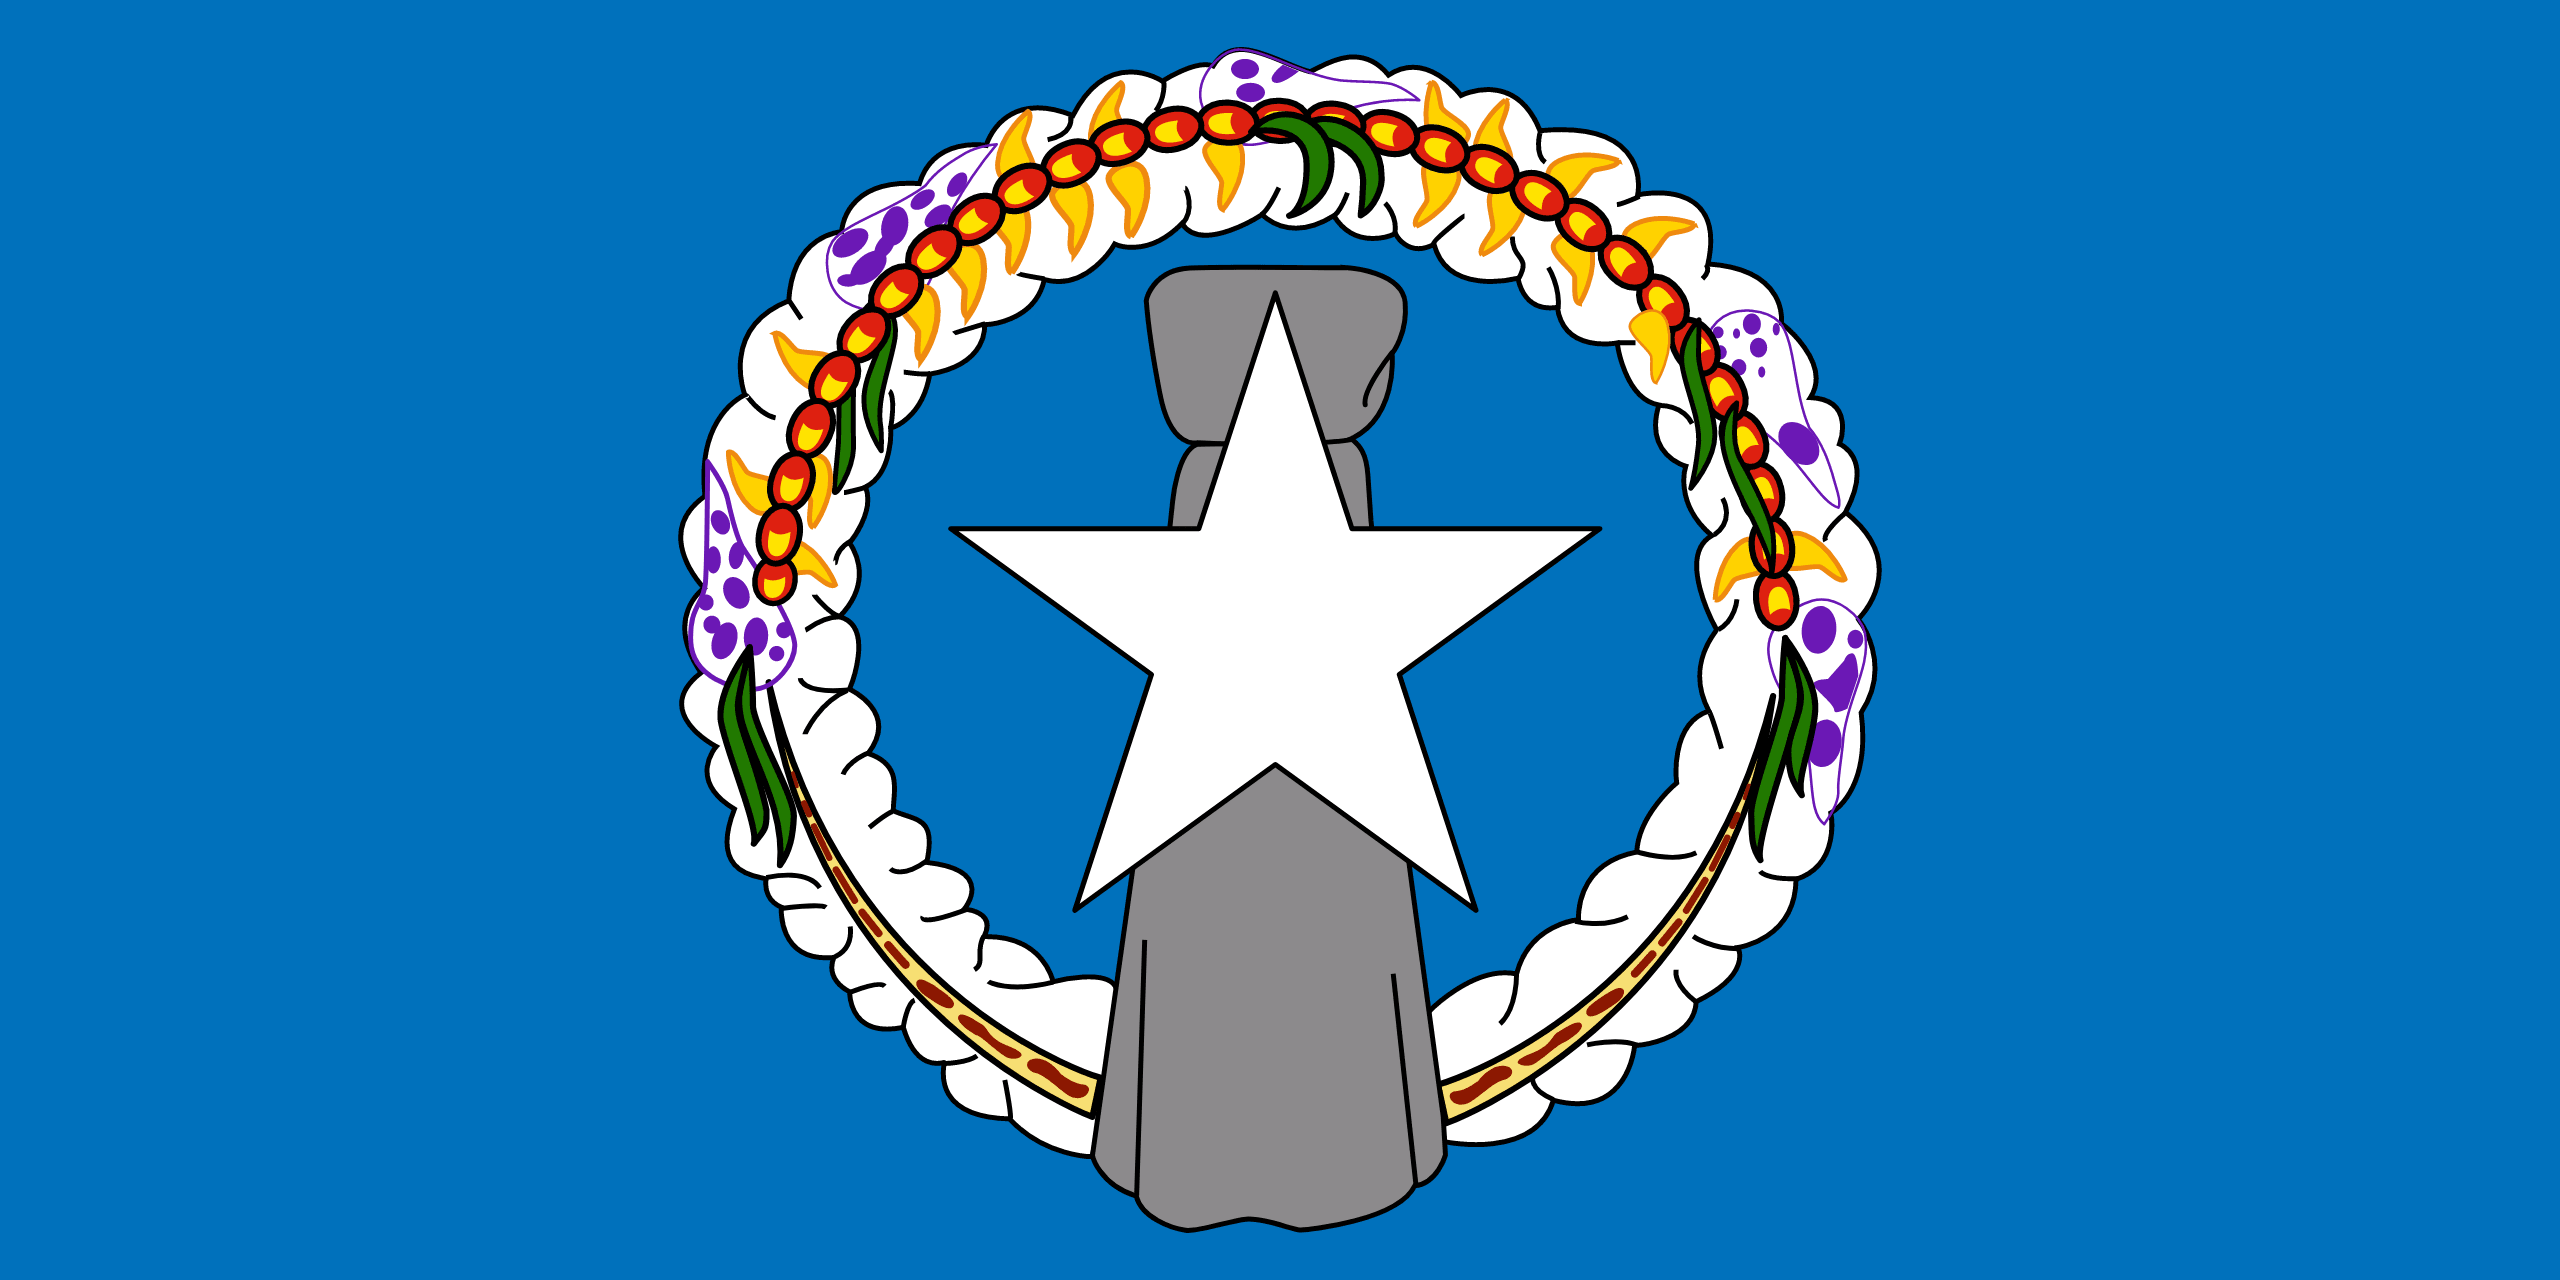

Norway


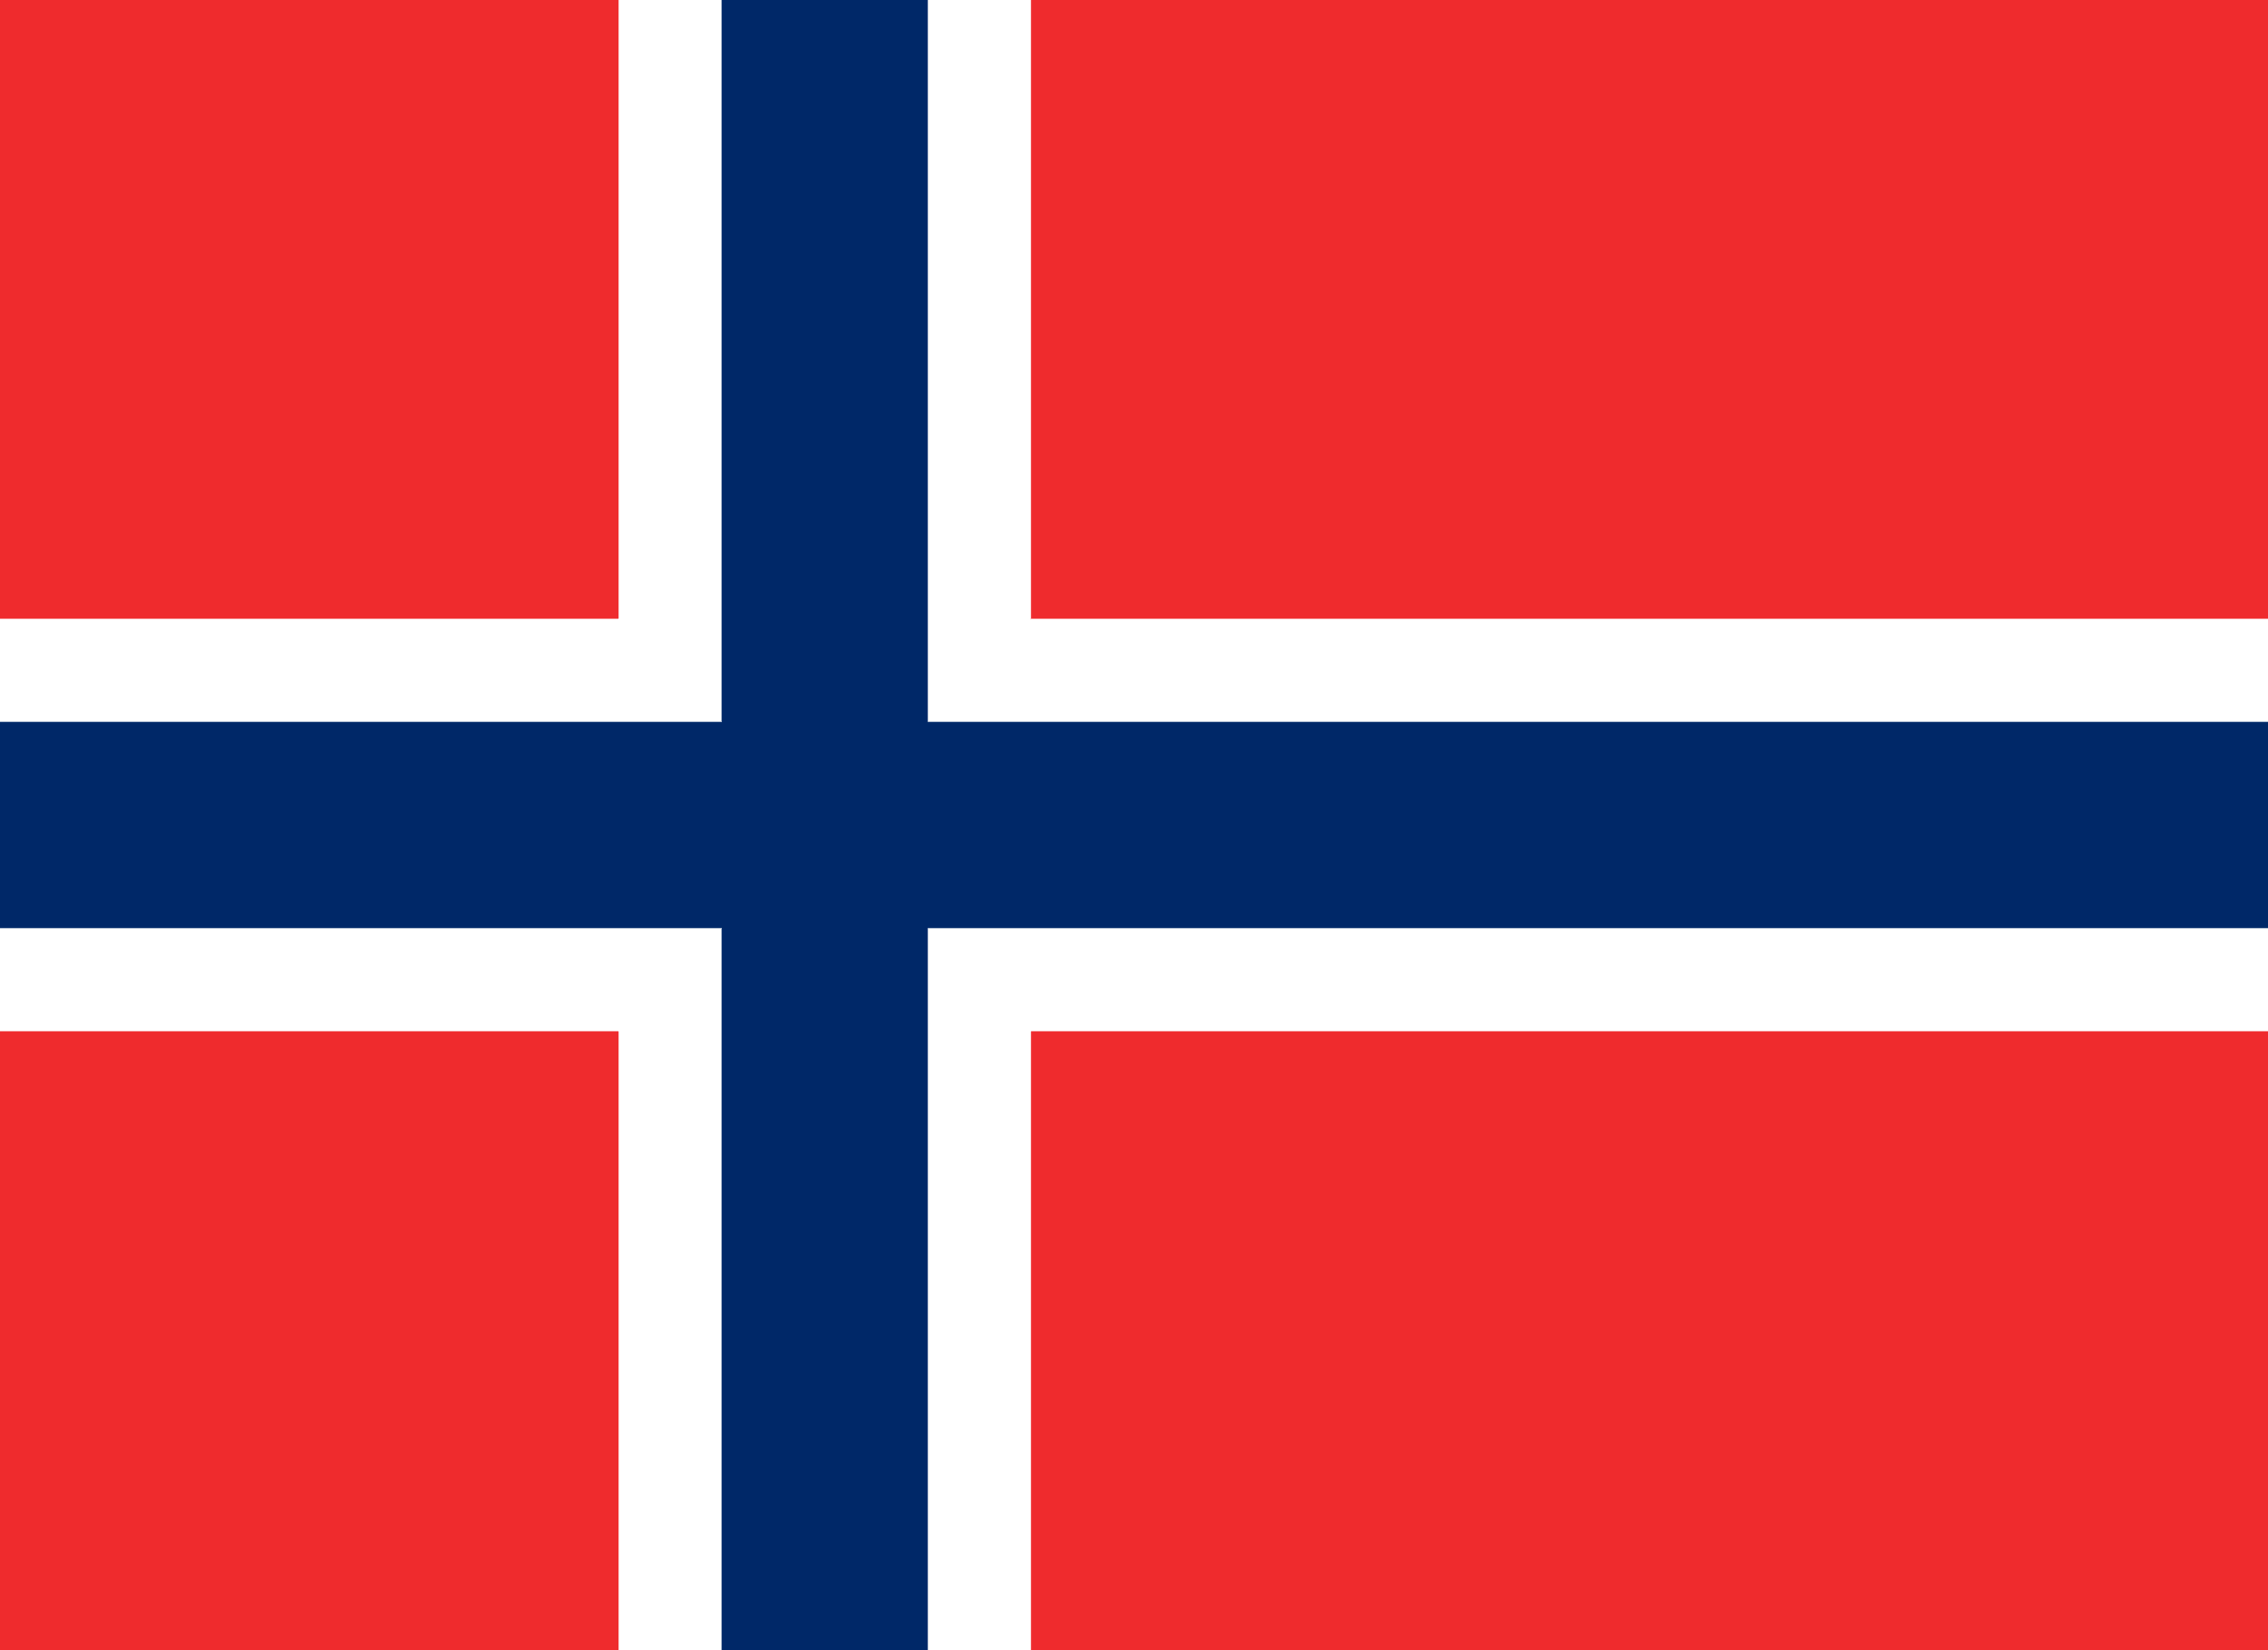

Oman


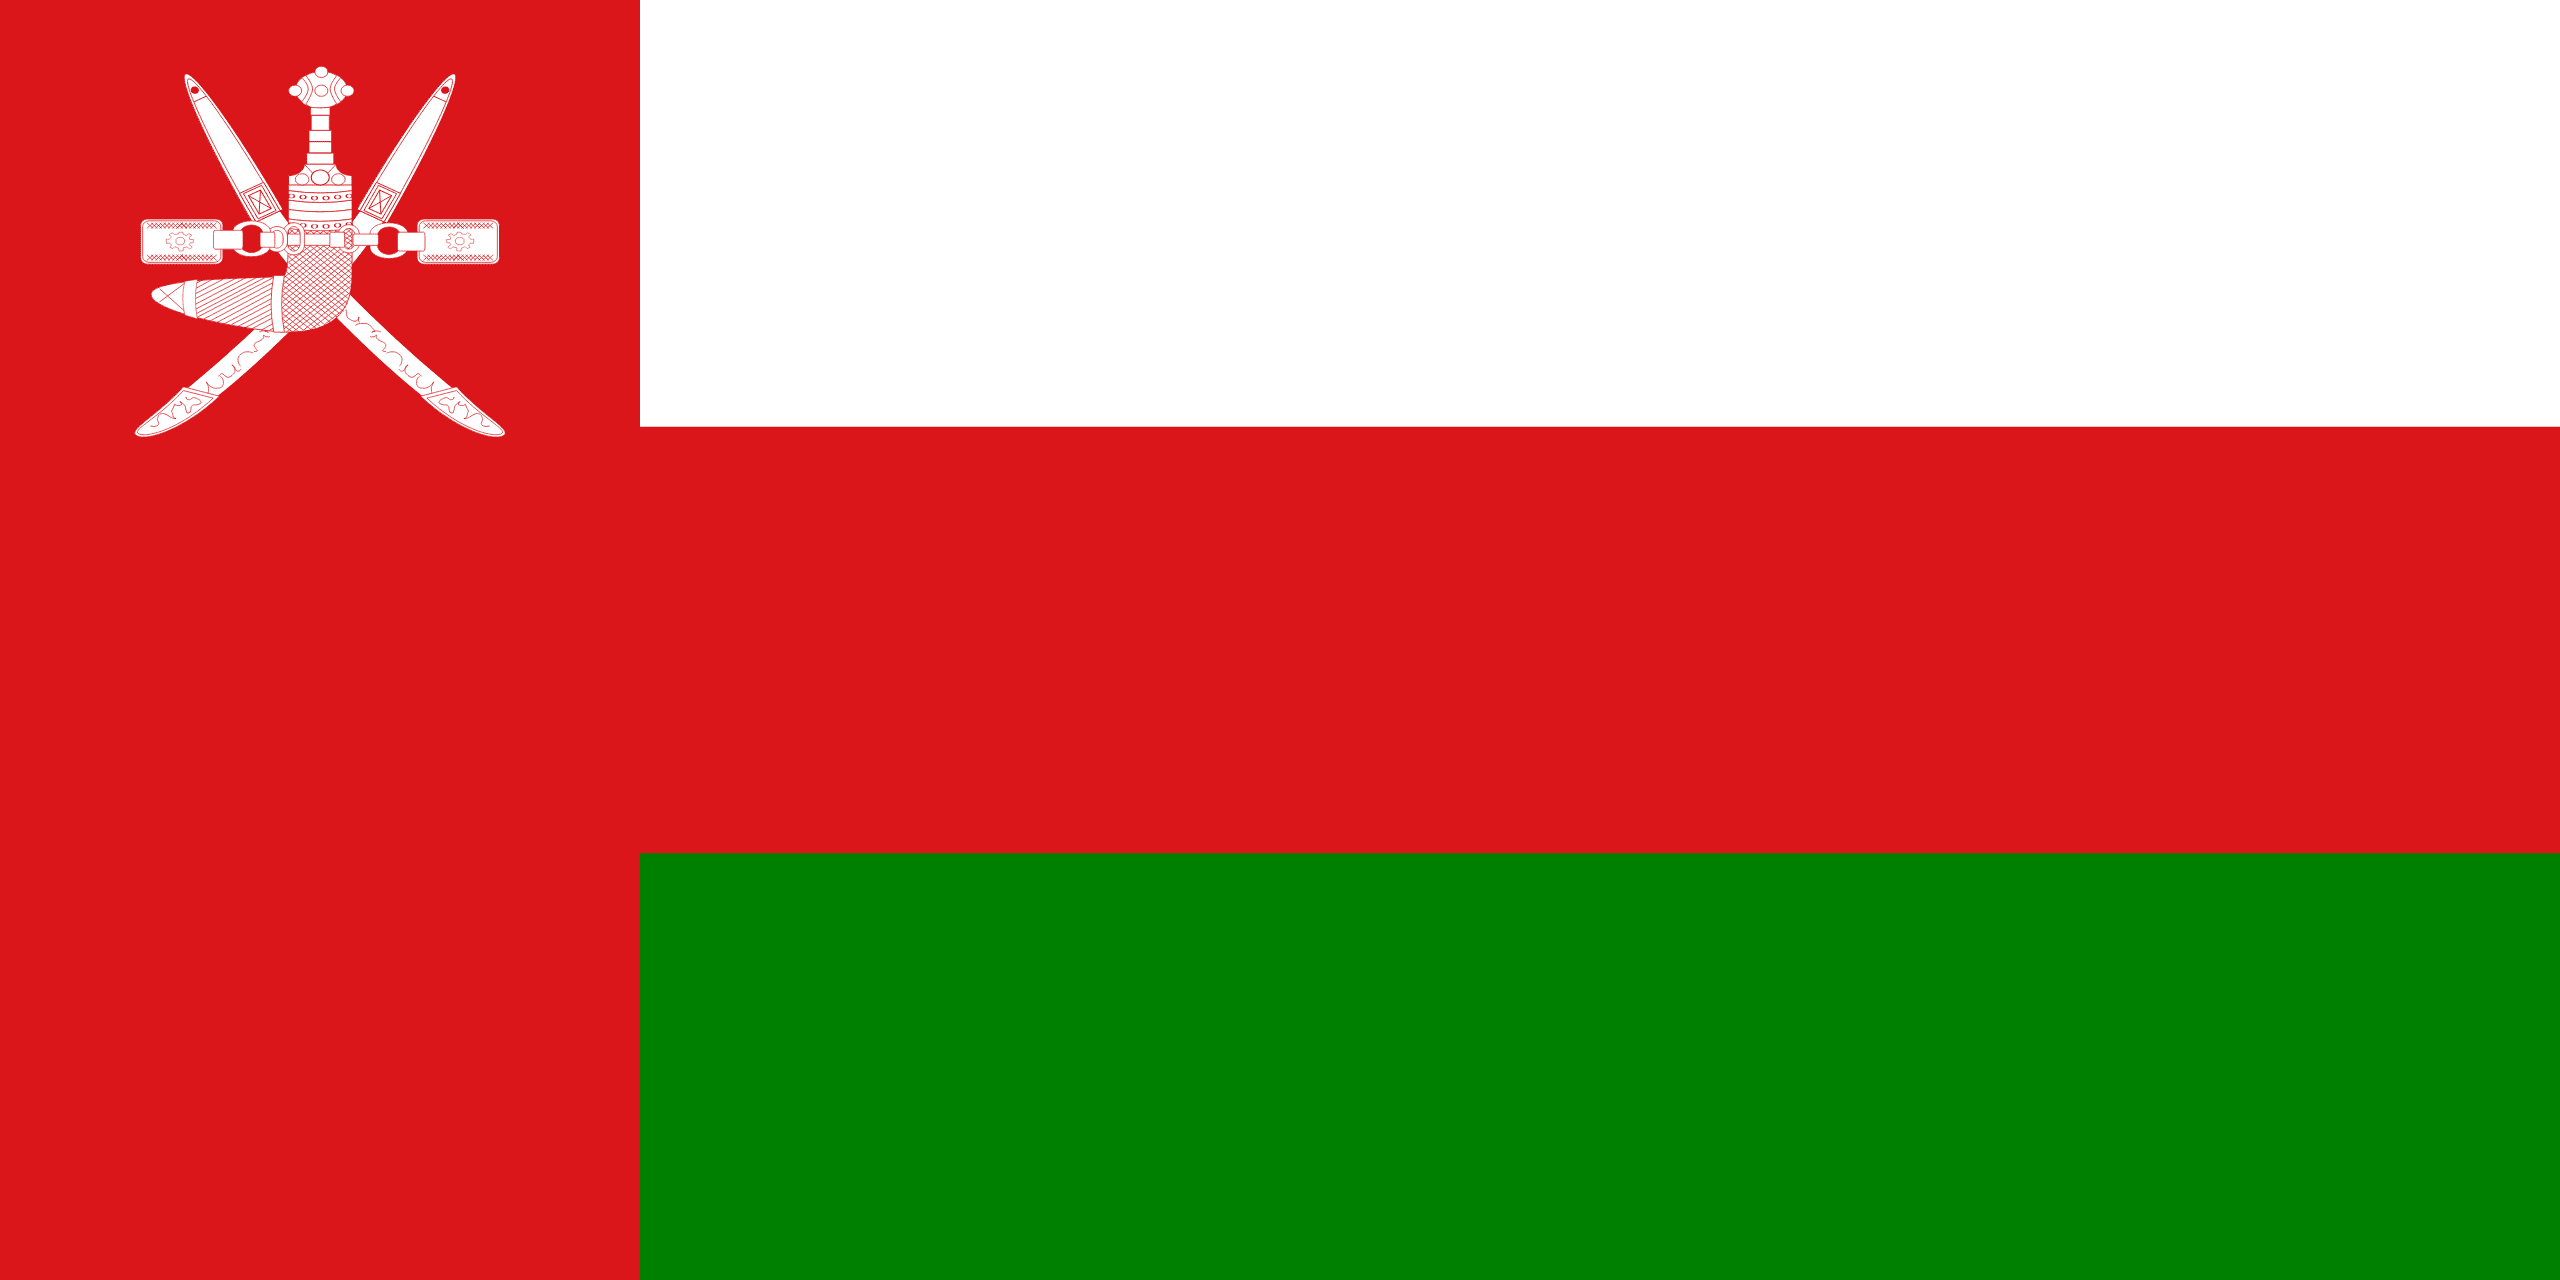

Pakistan


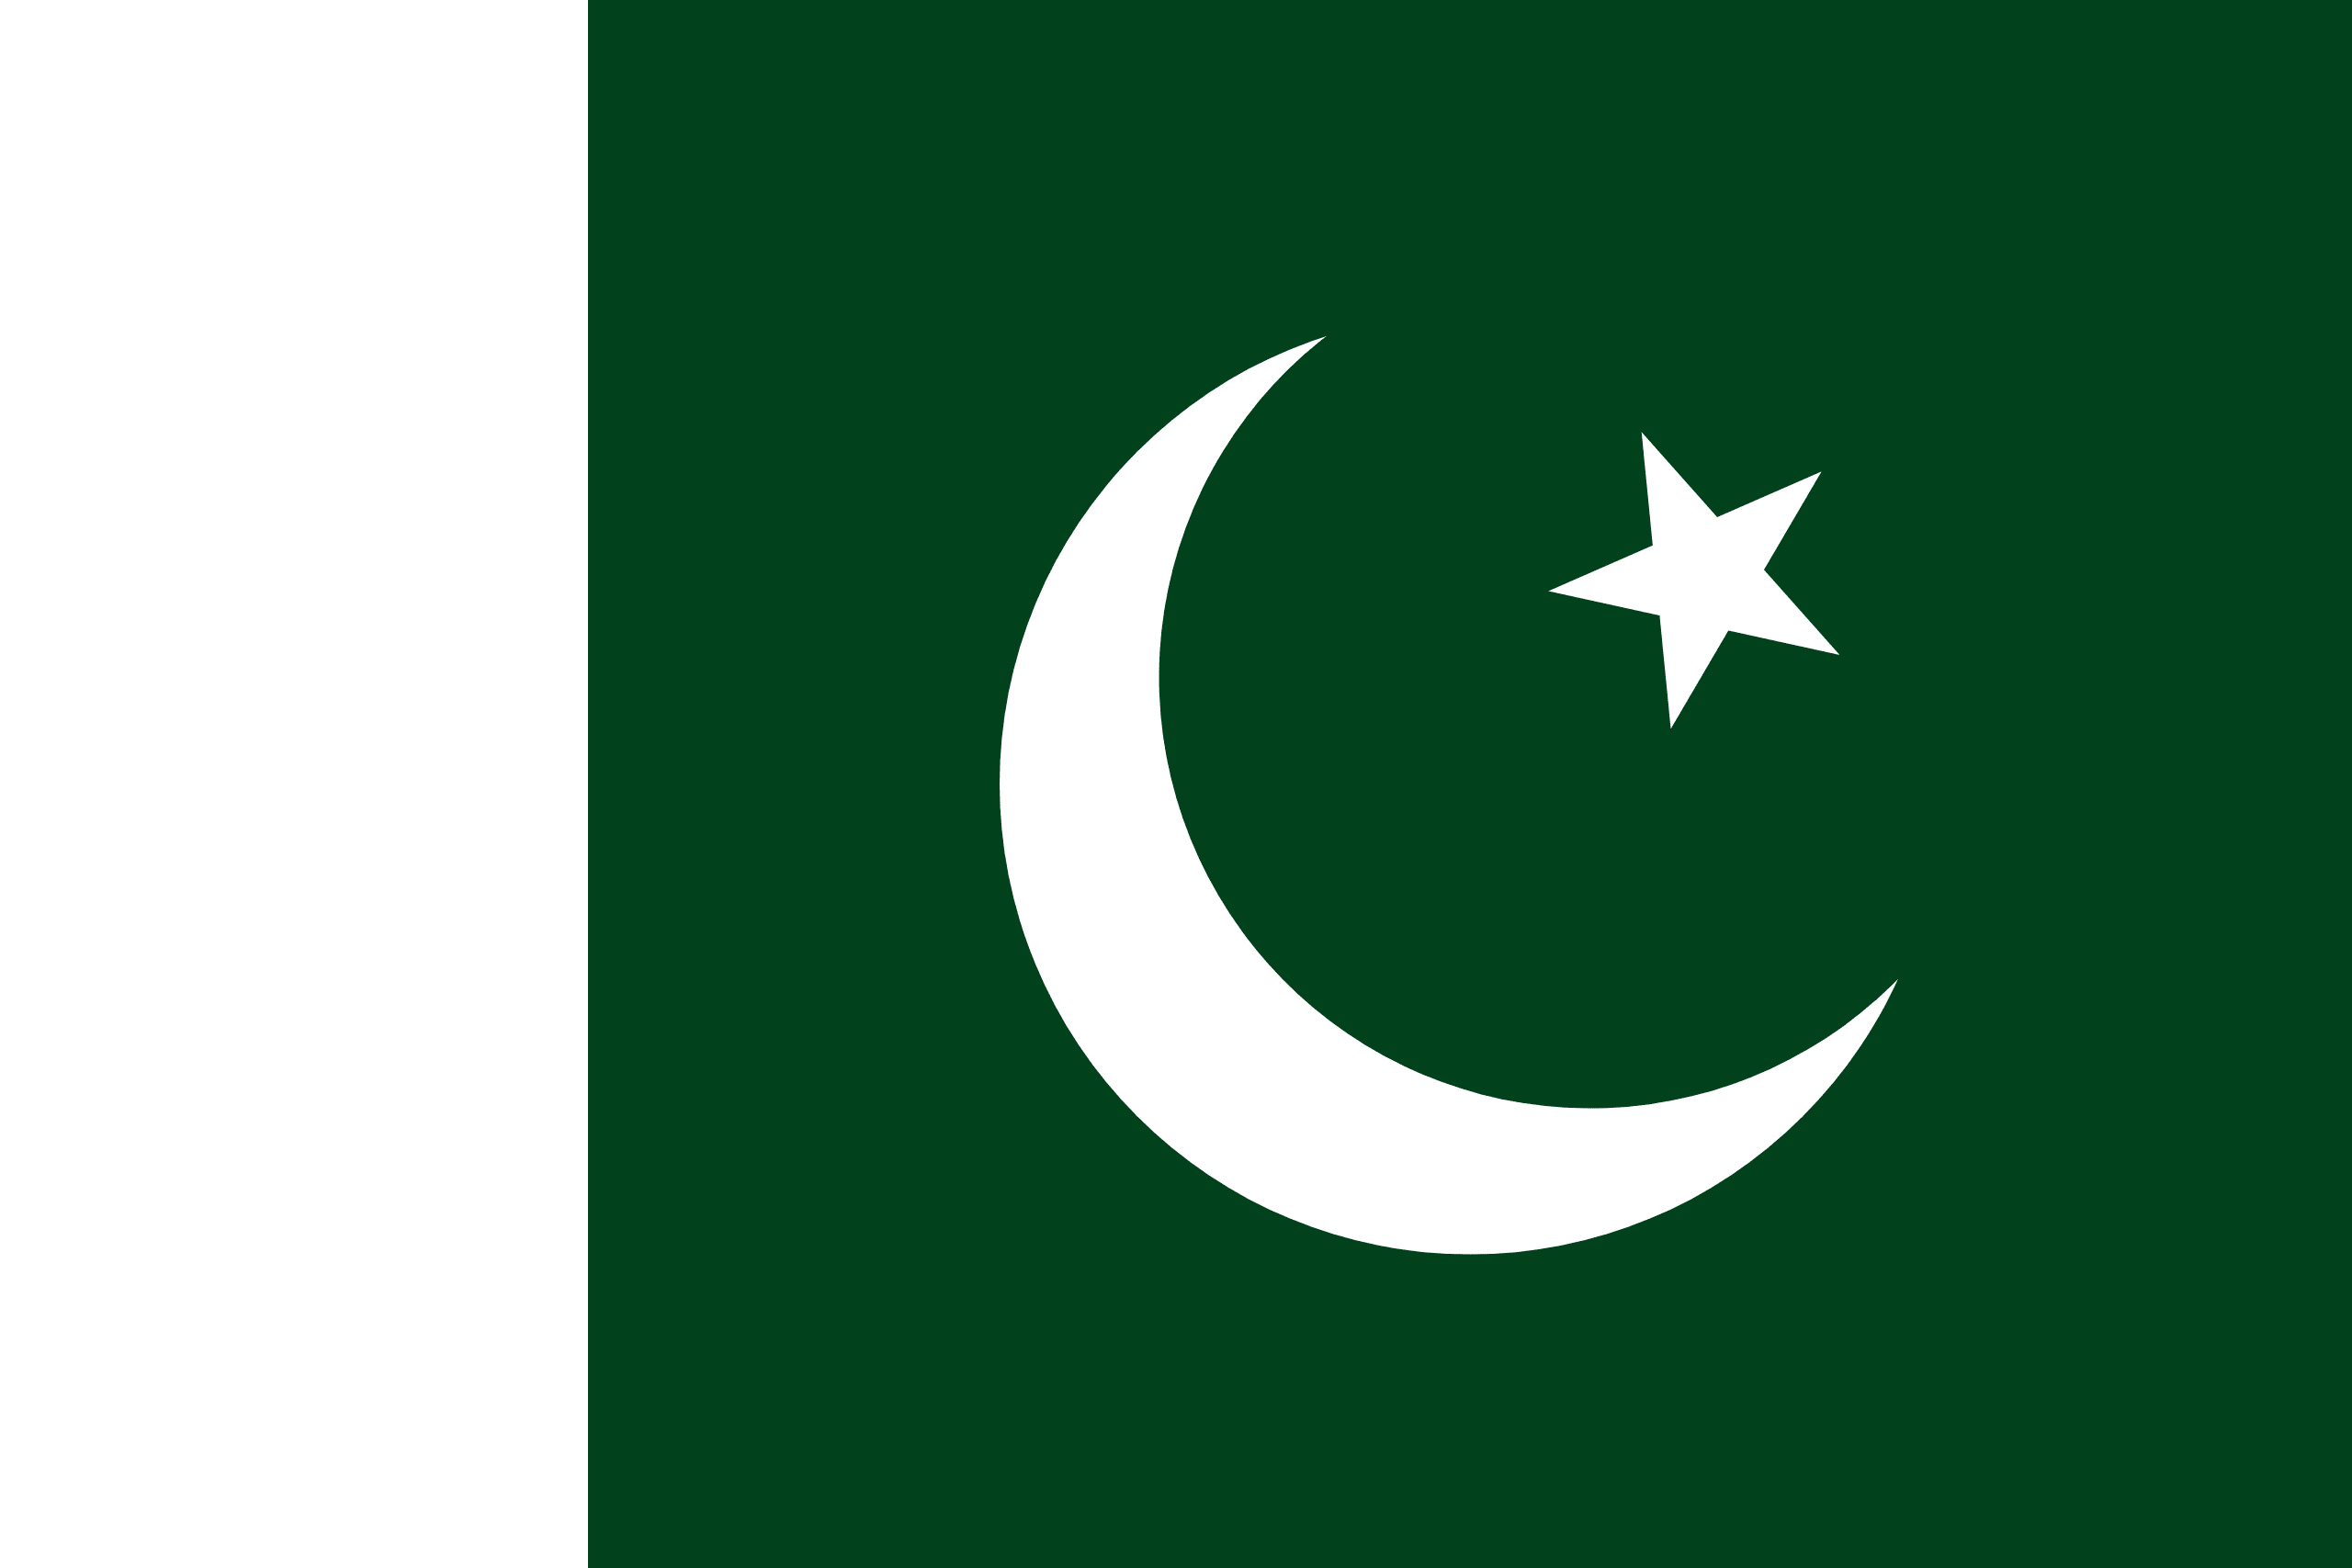

Palau


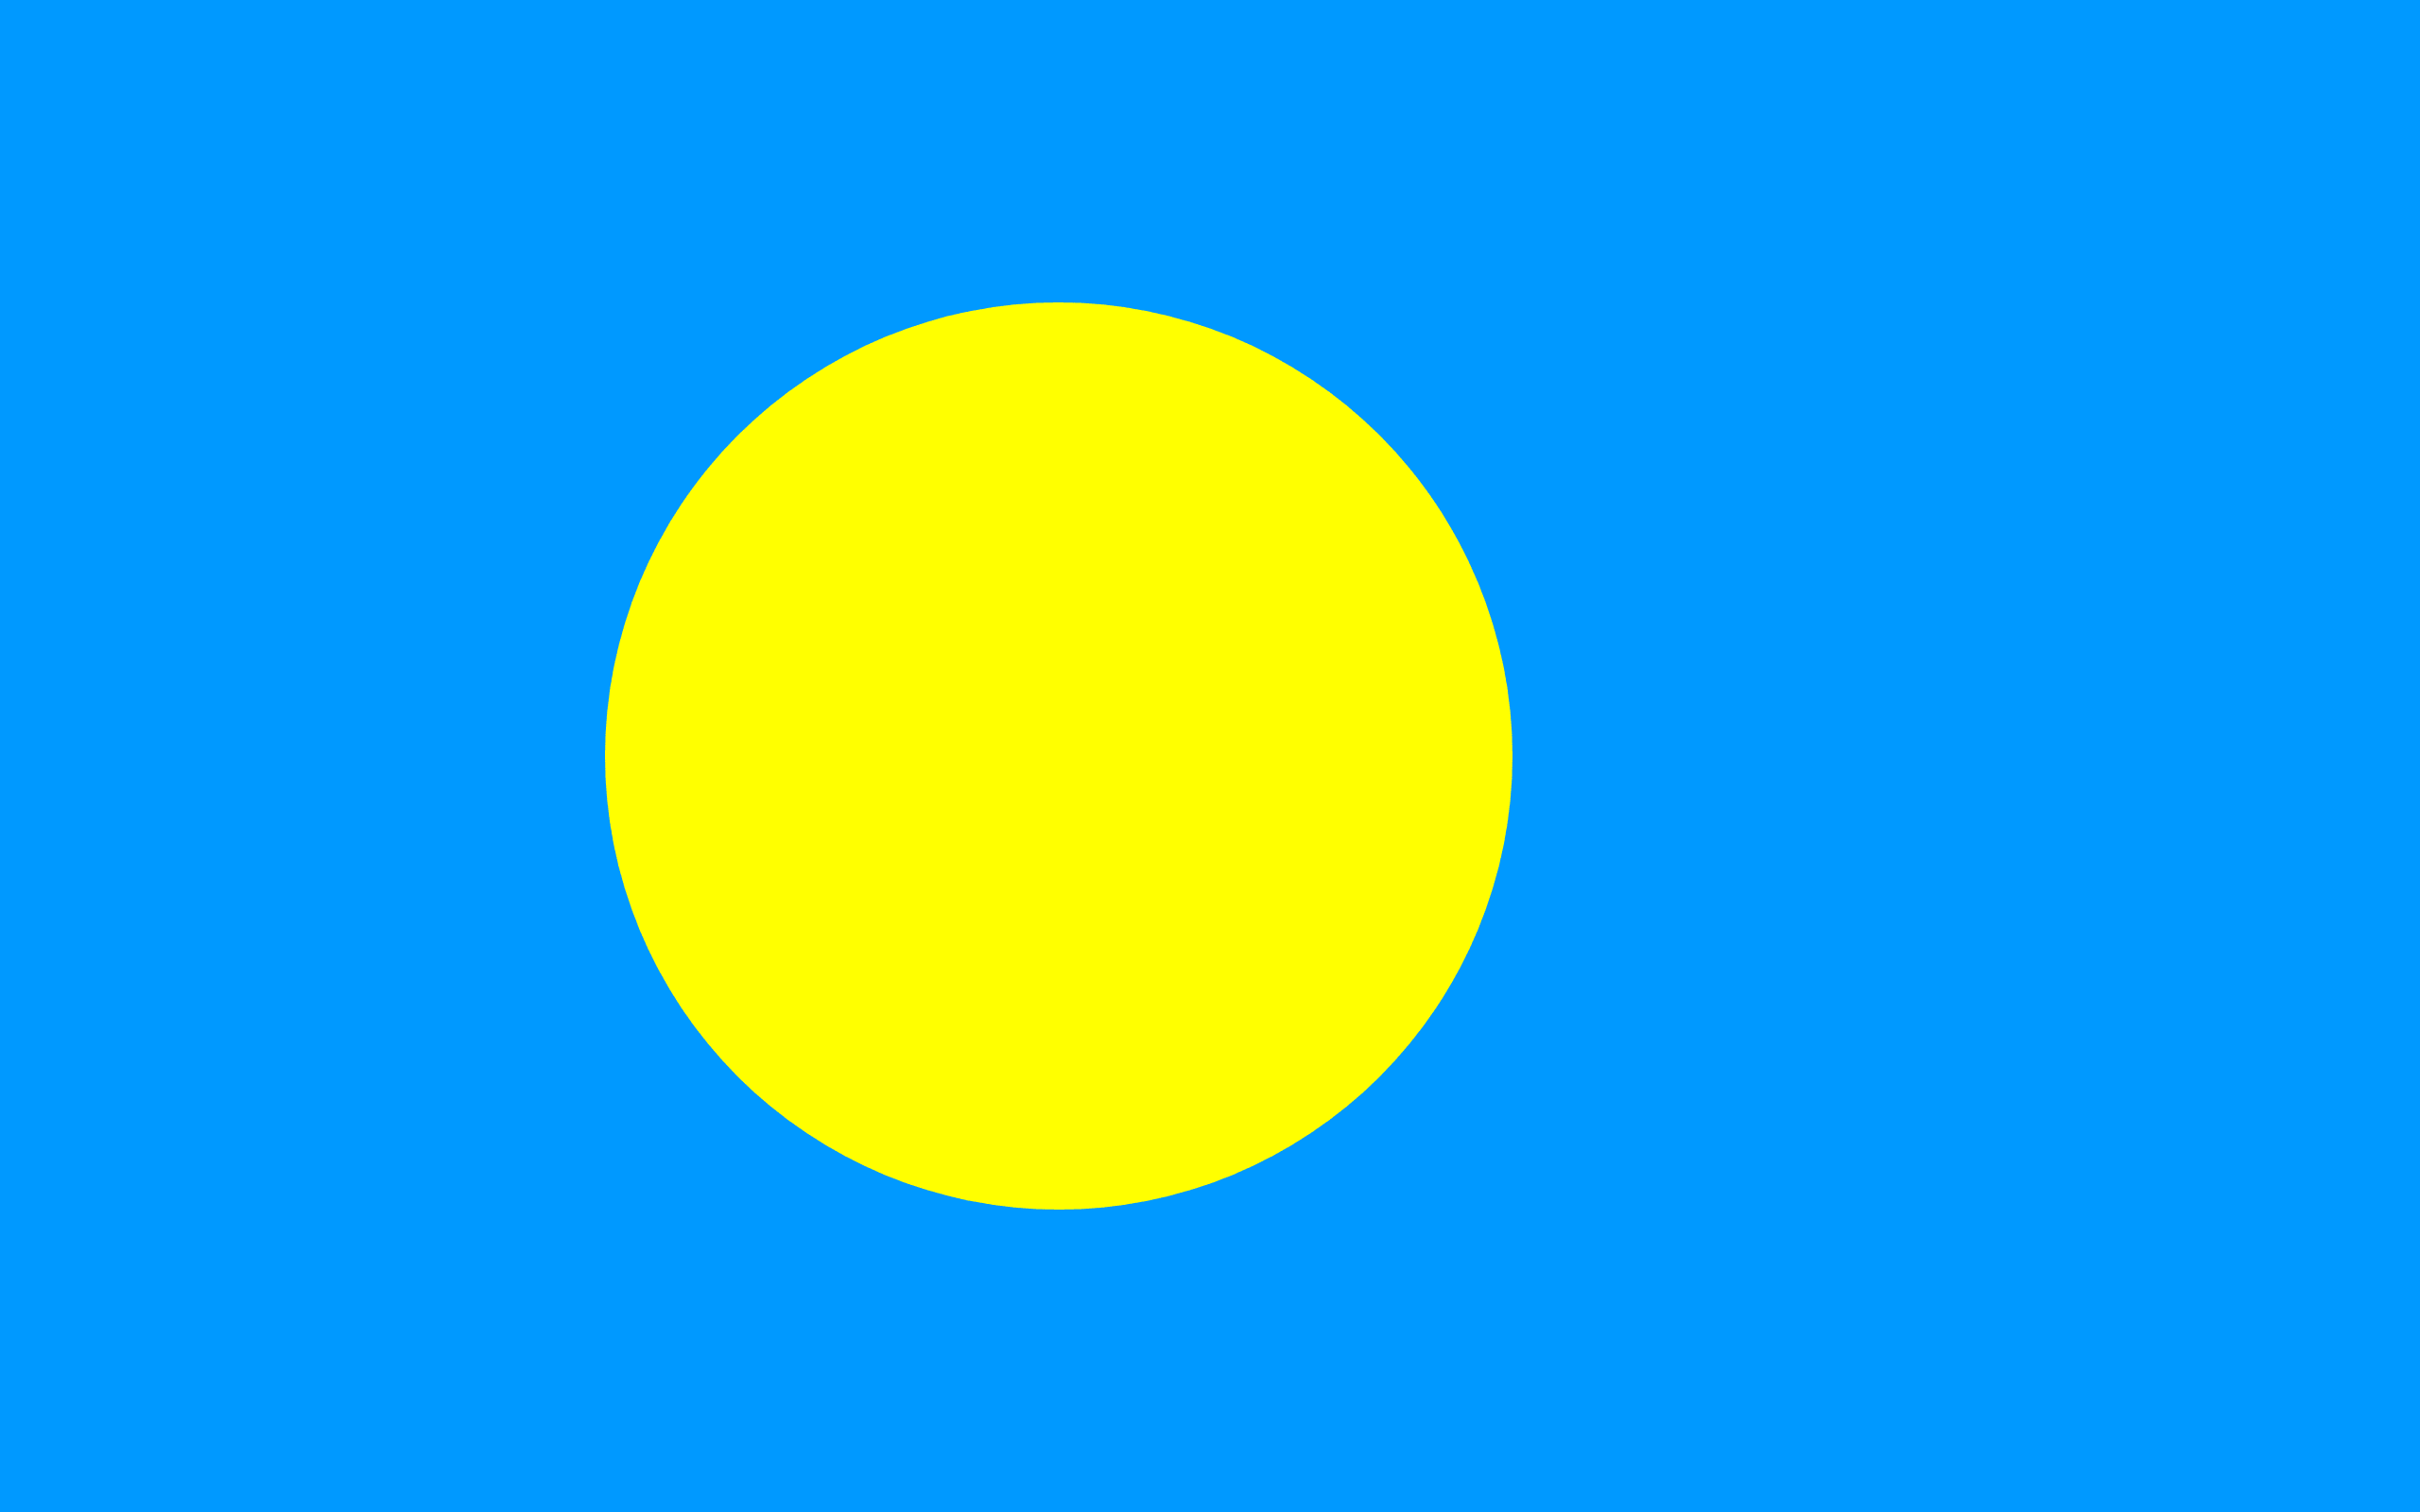

Palestine


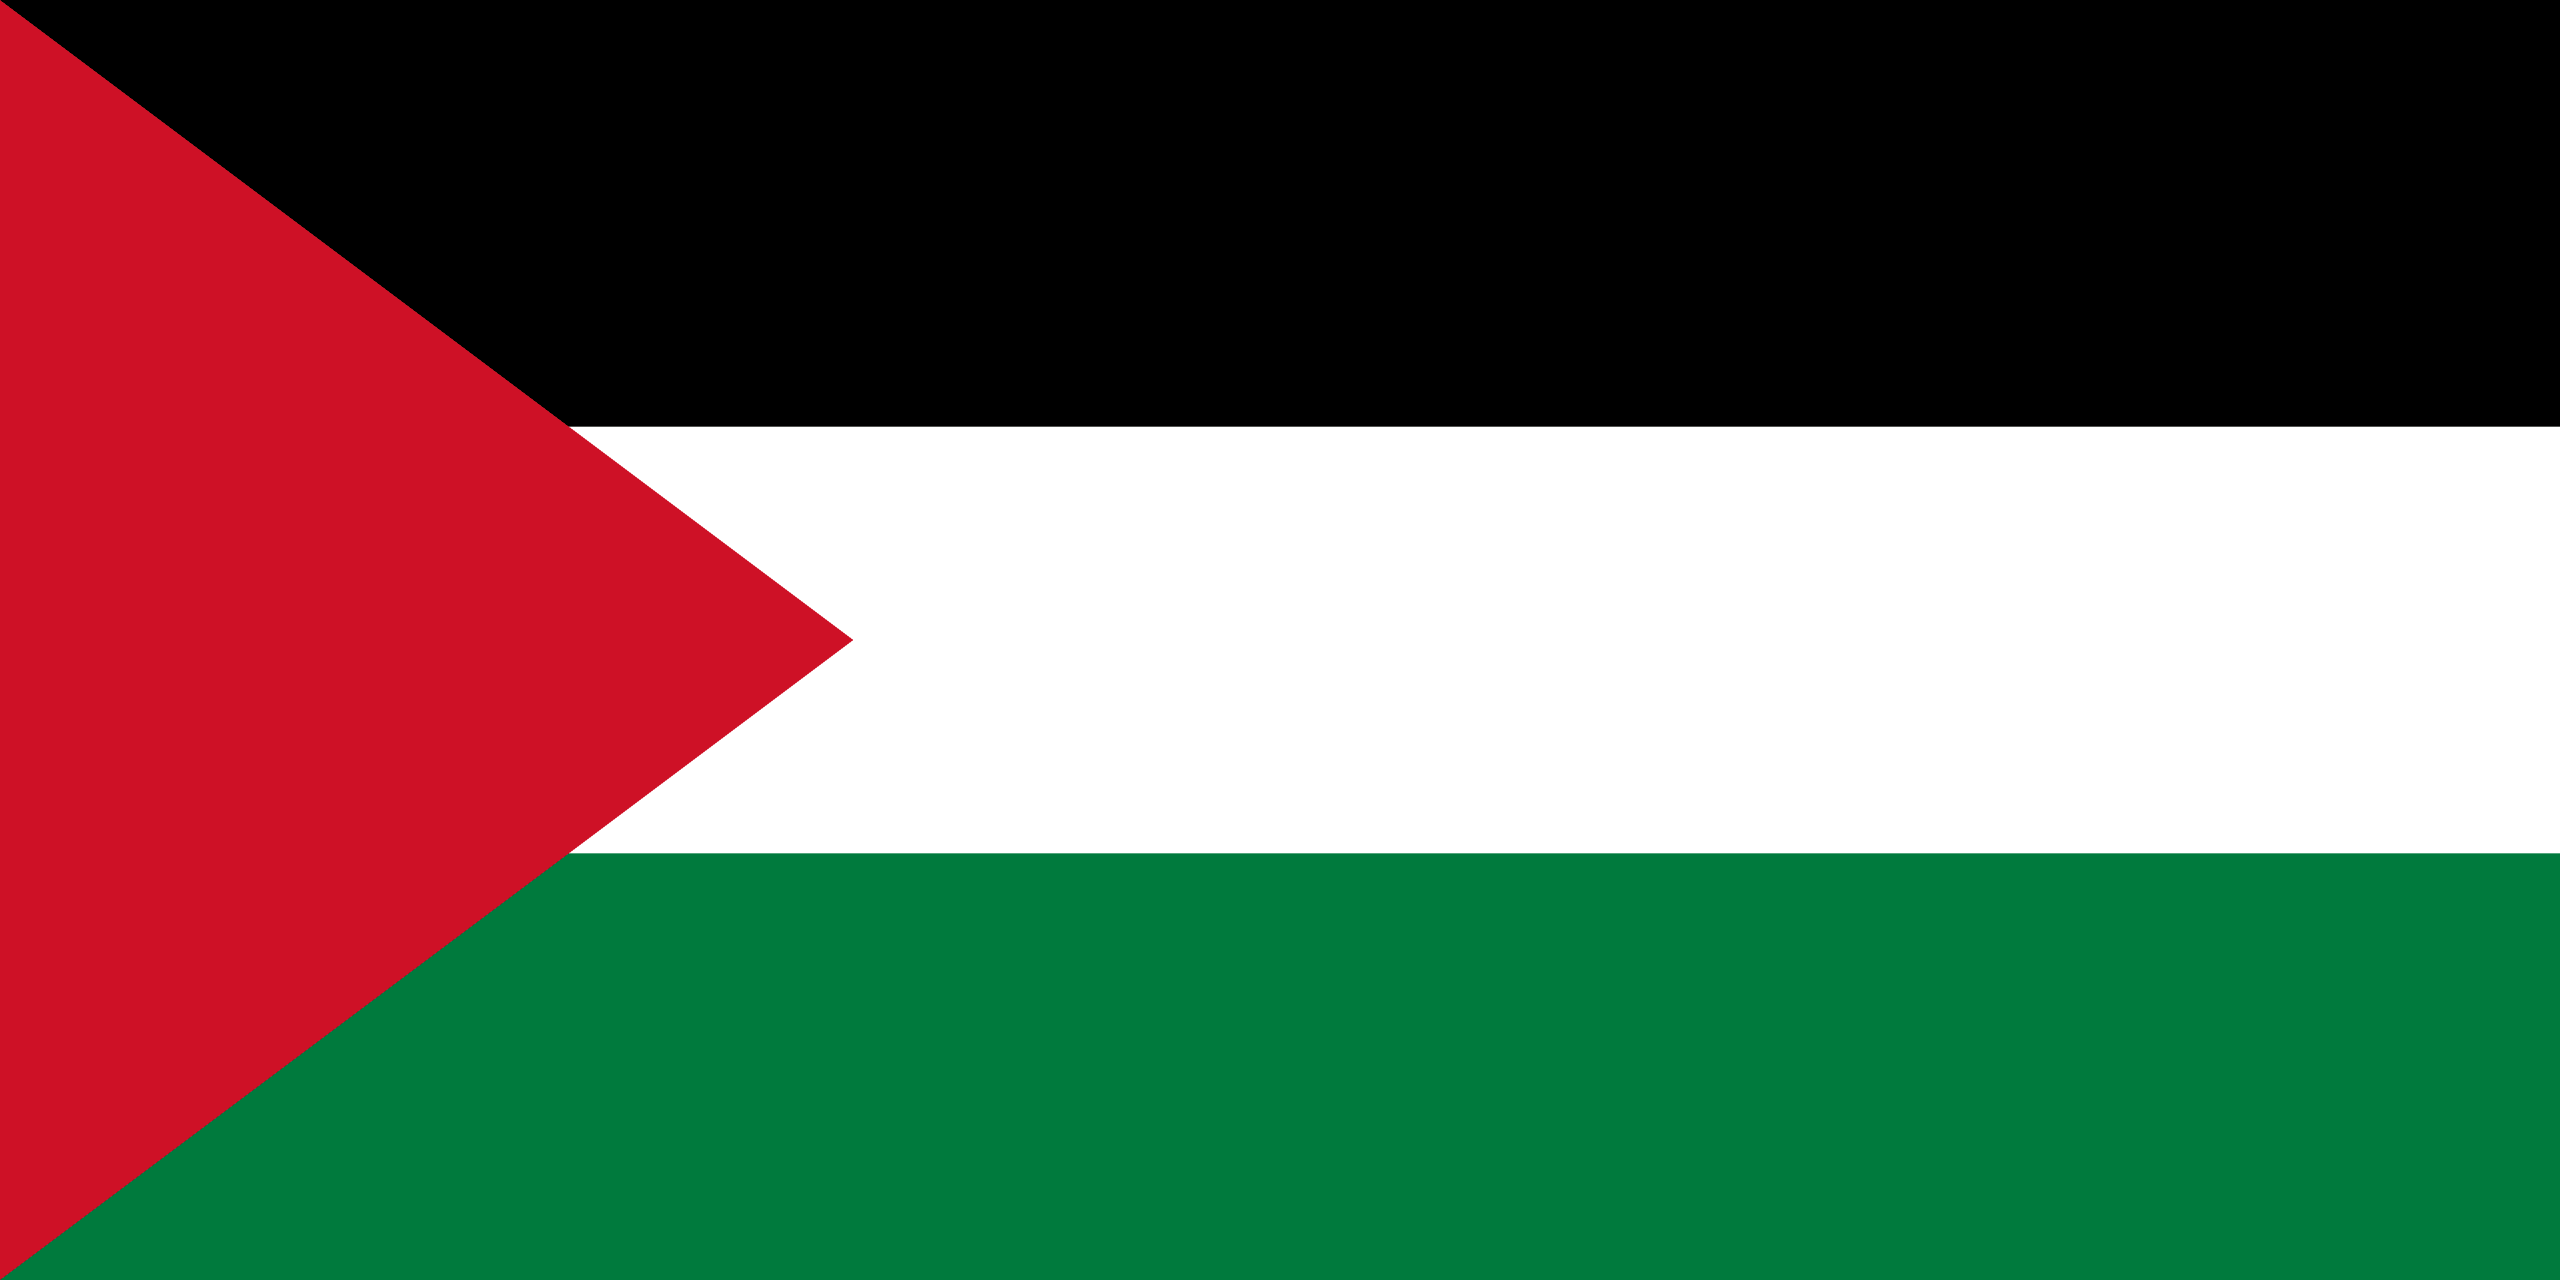

Panama


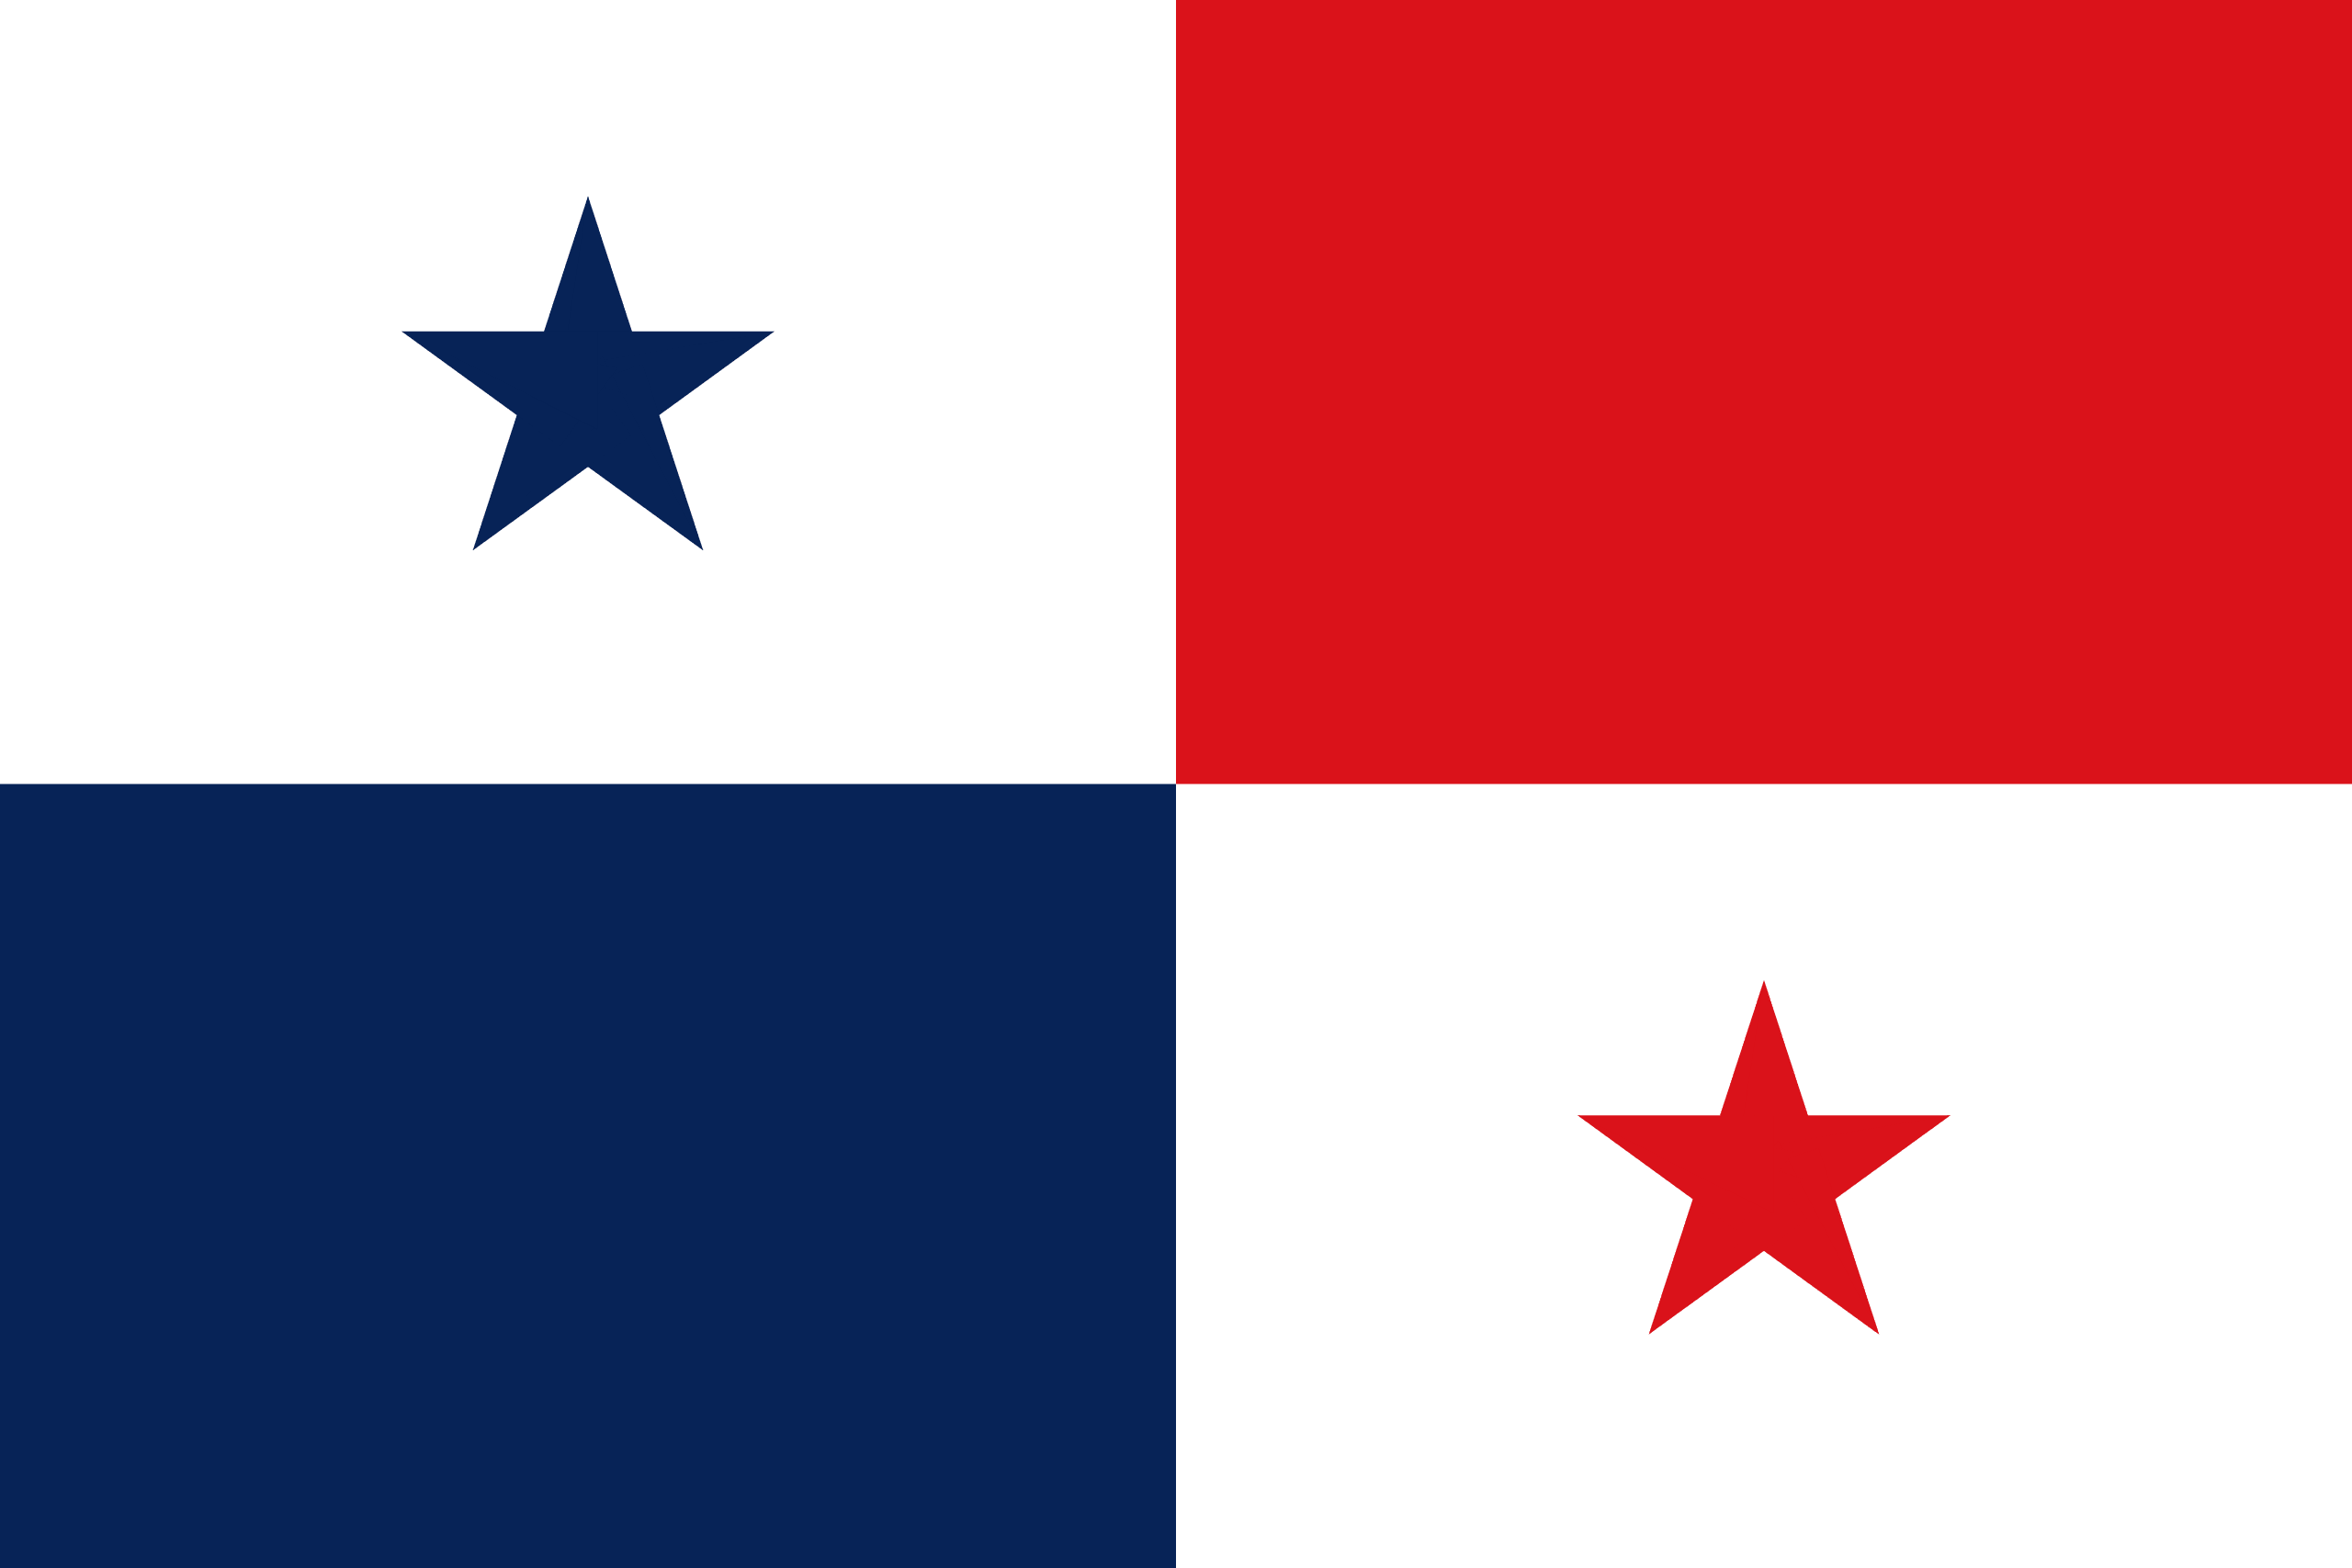

Papua New Guinea


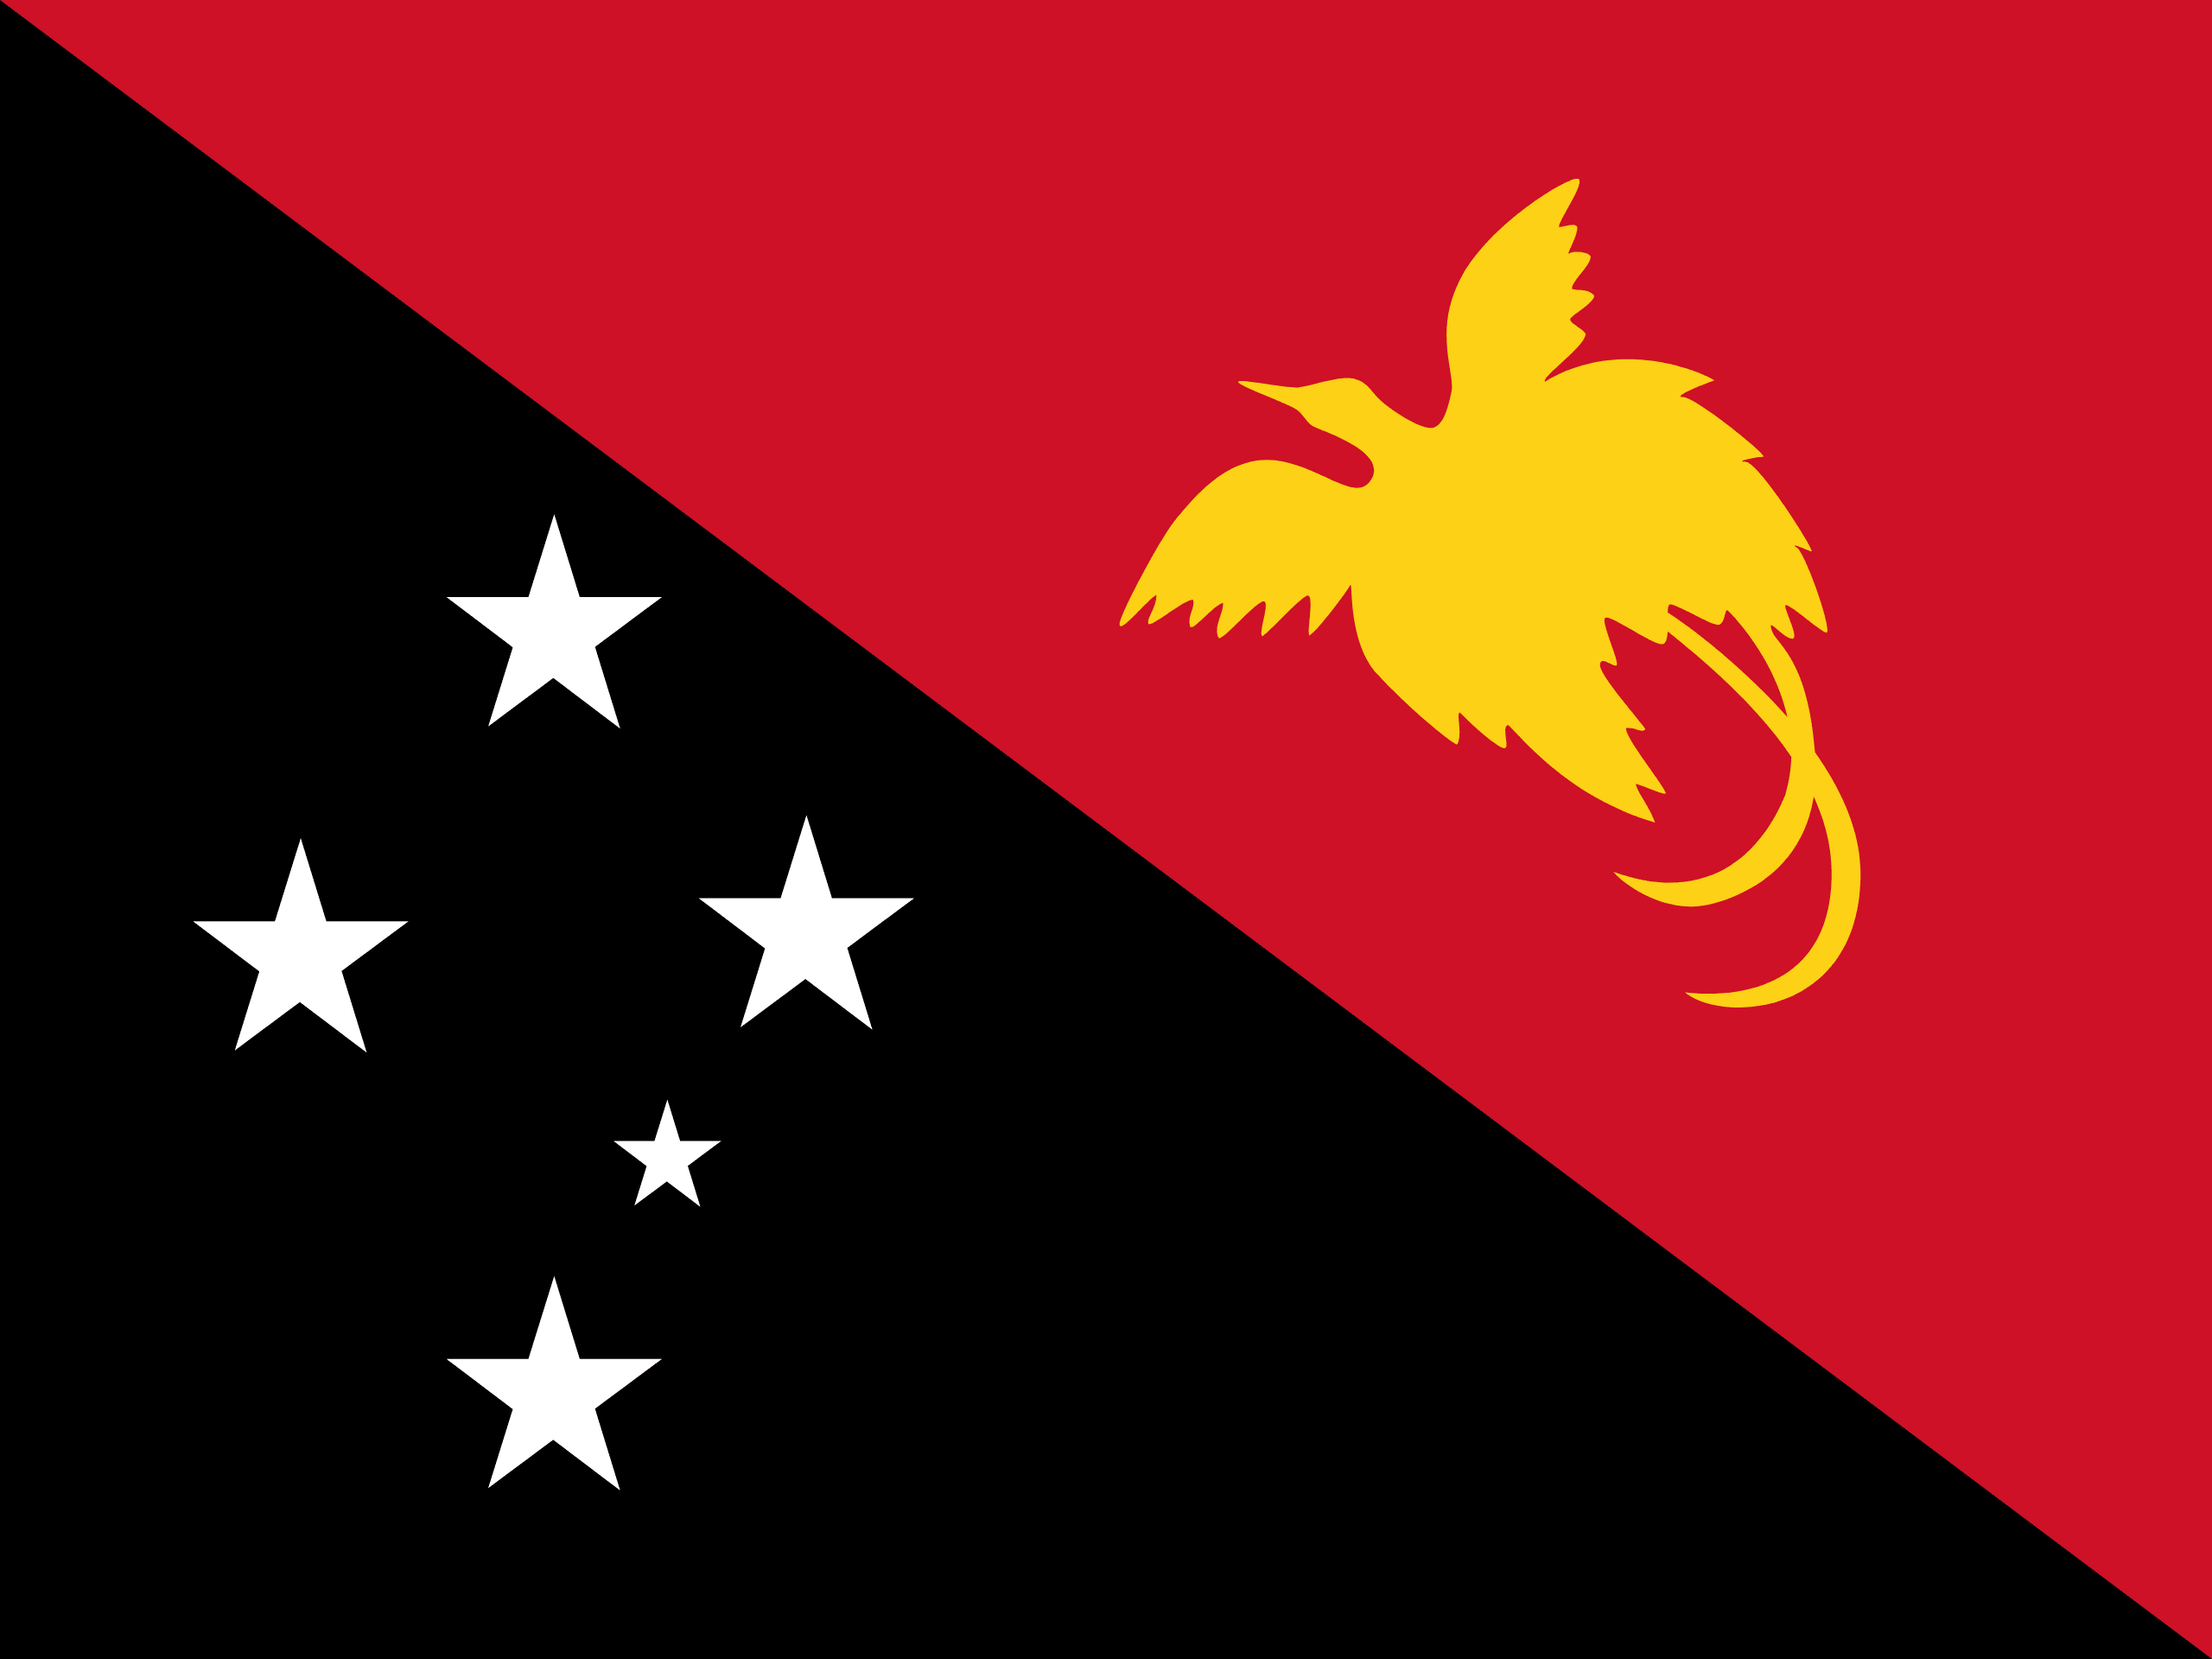

Paraguay


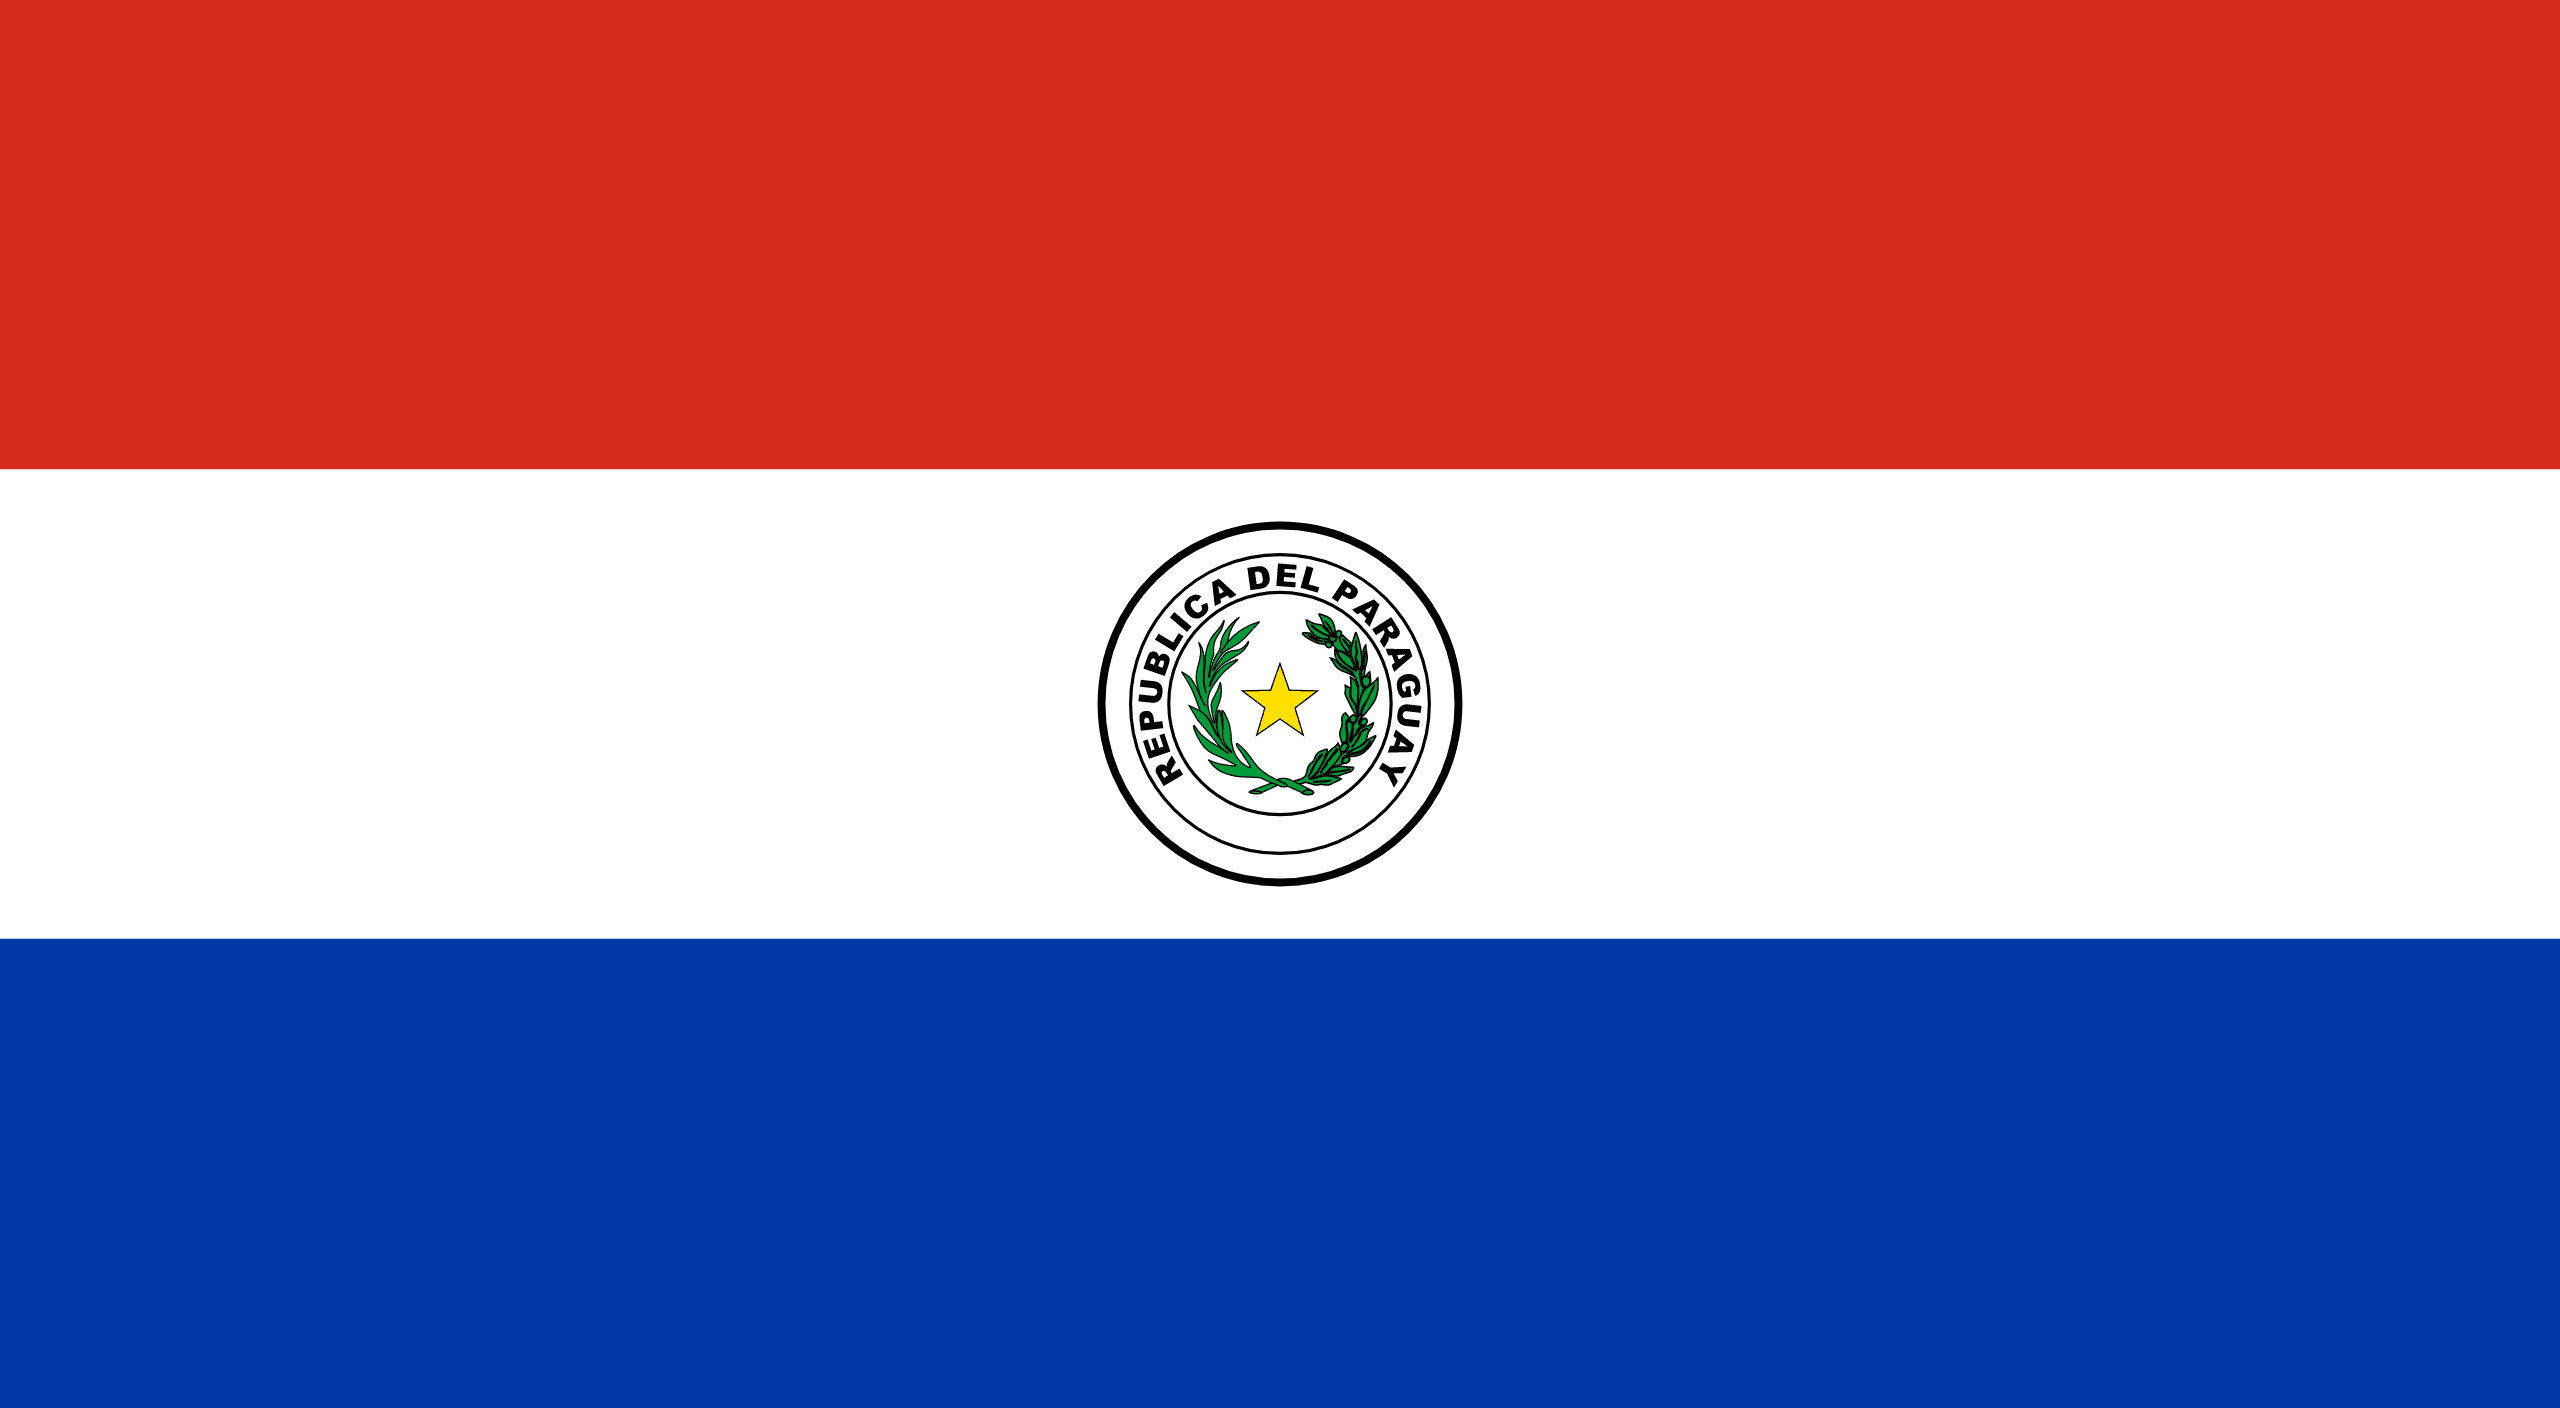

Peru


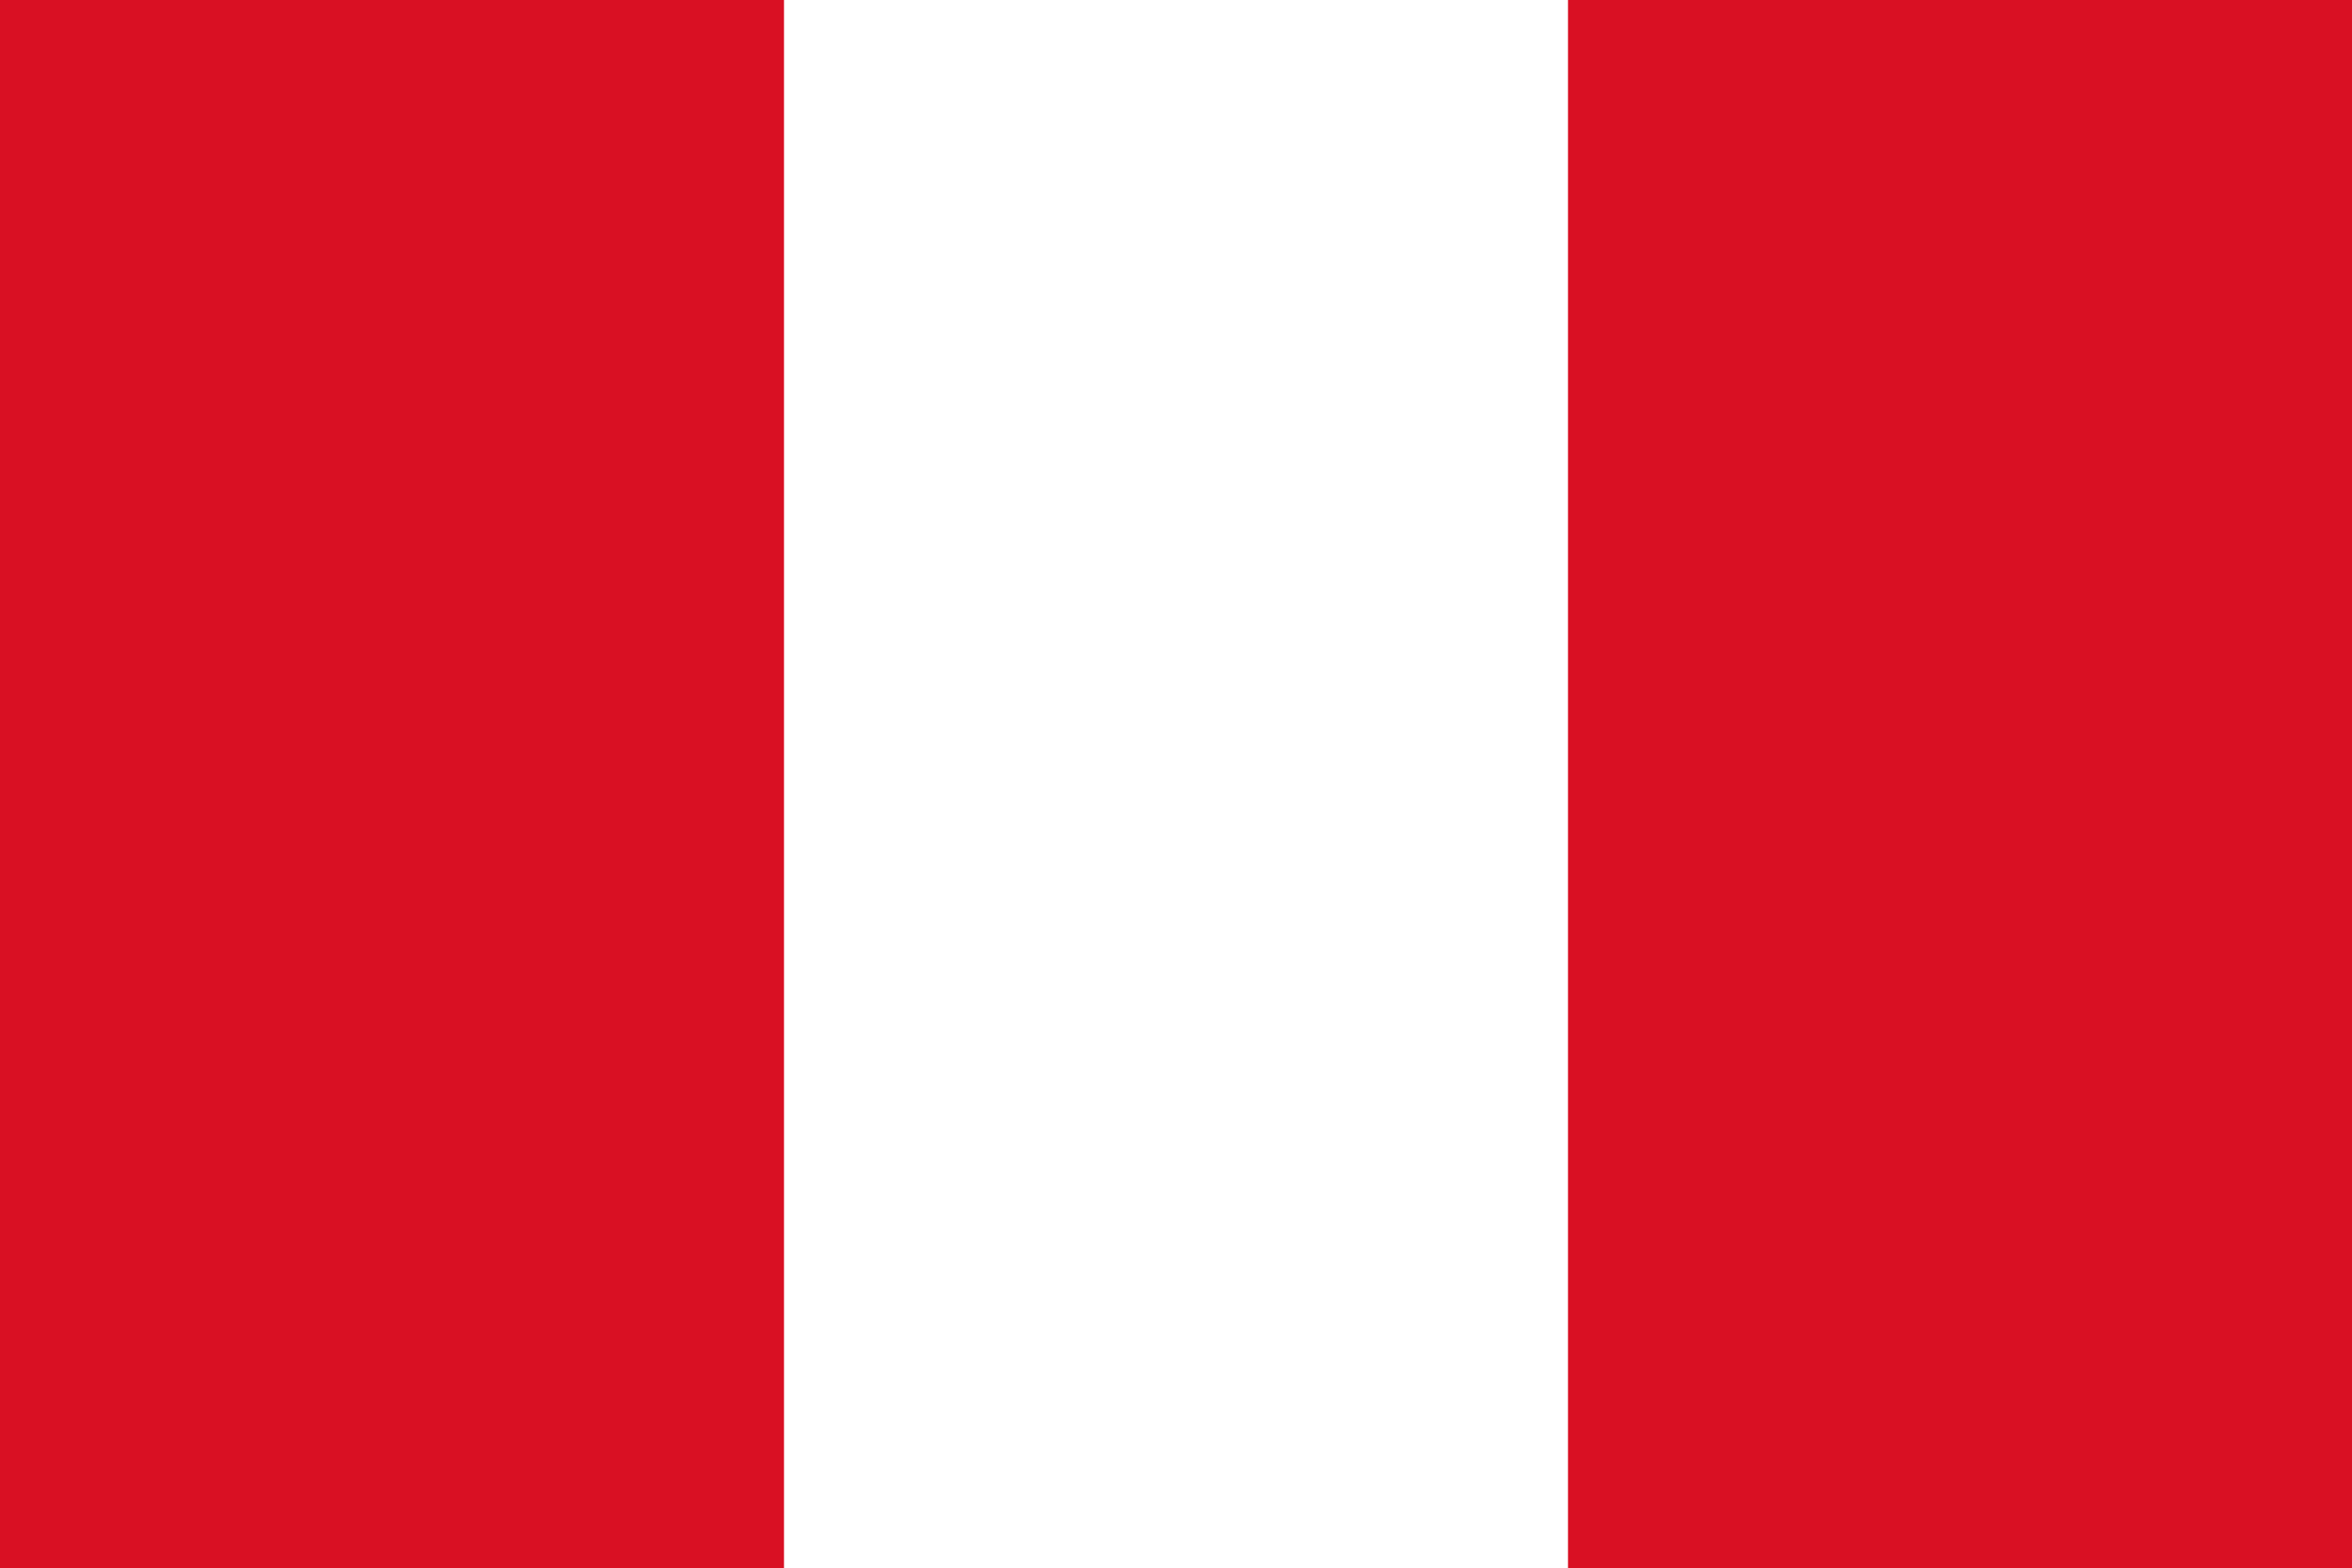

Philippines


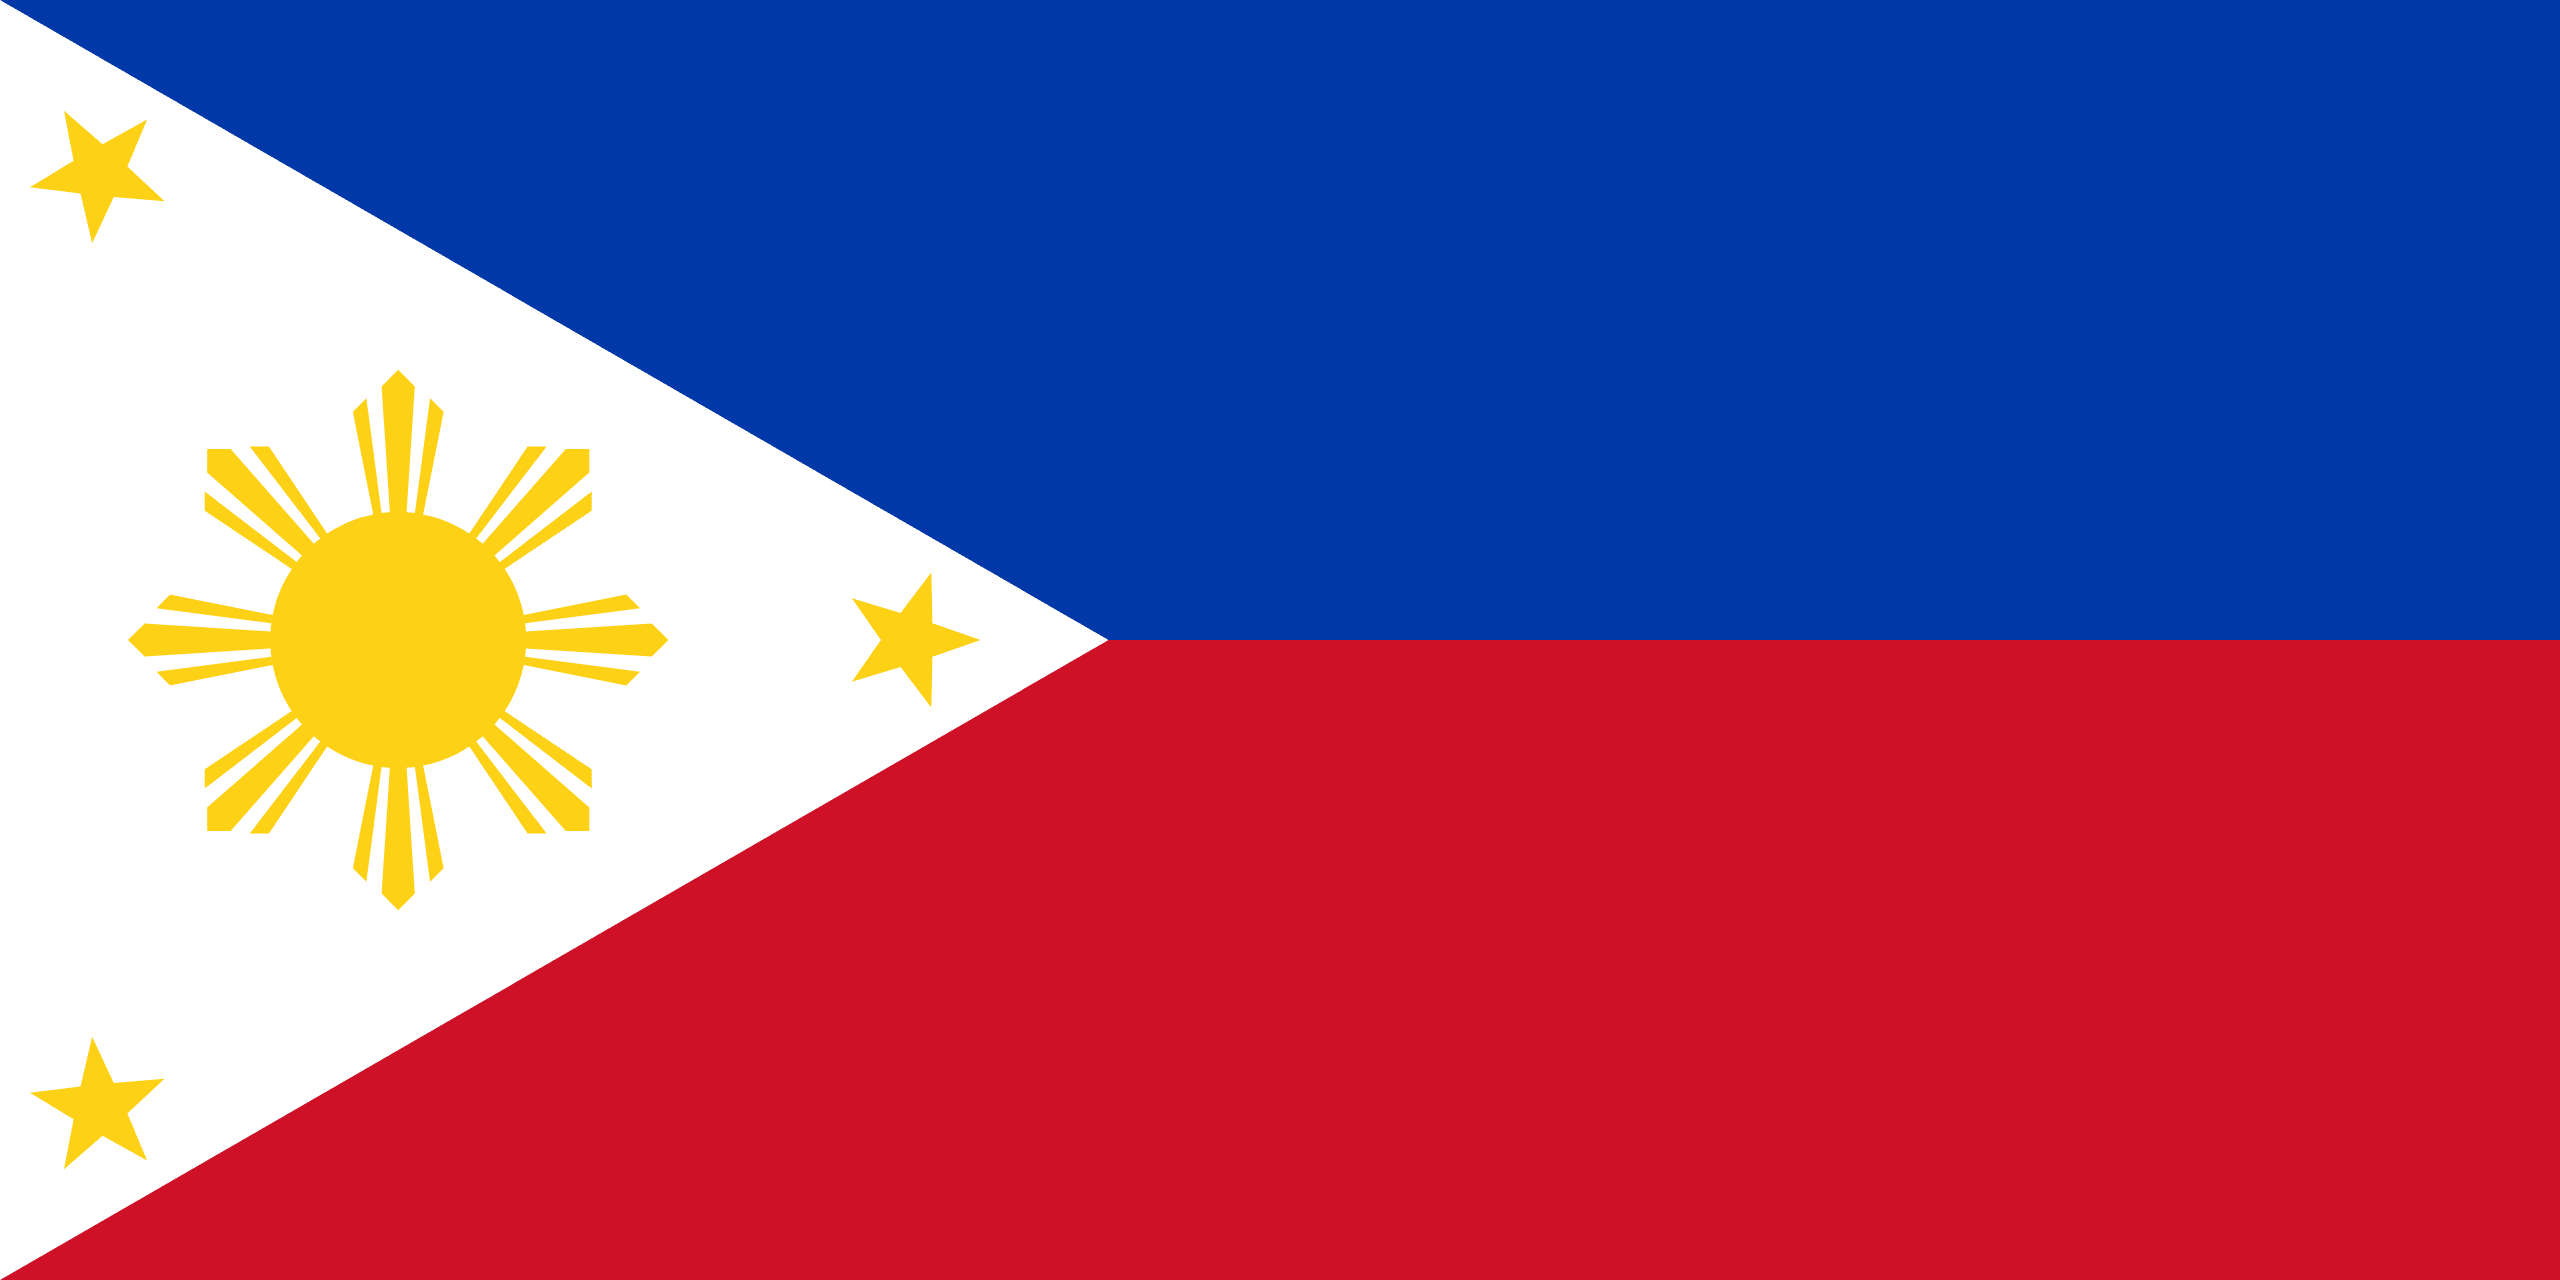

Pitcairn Islands


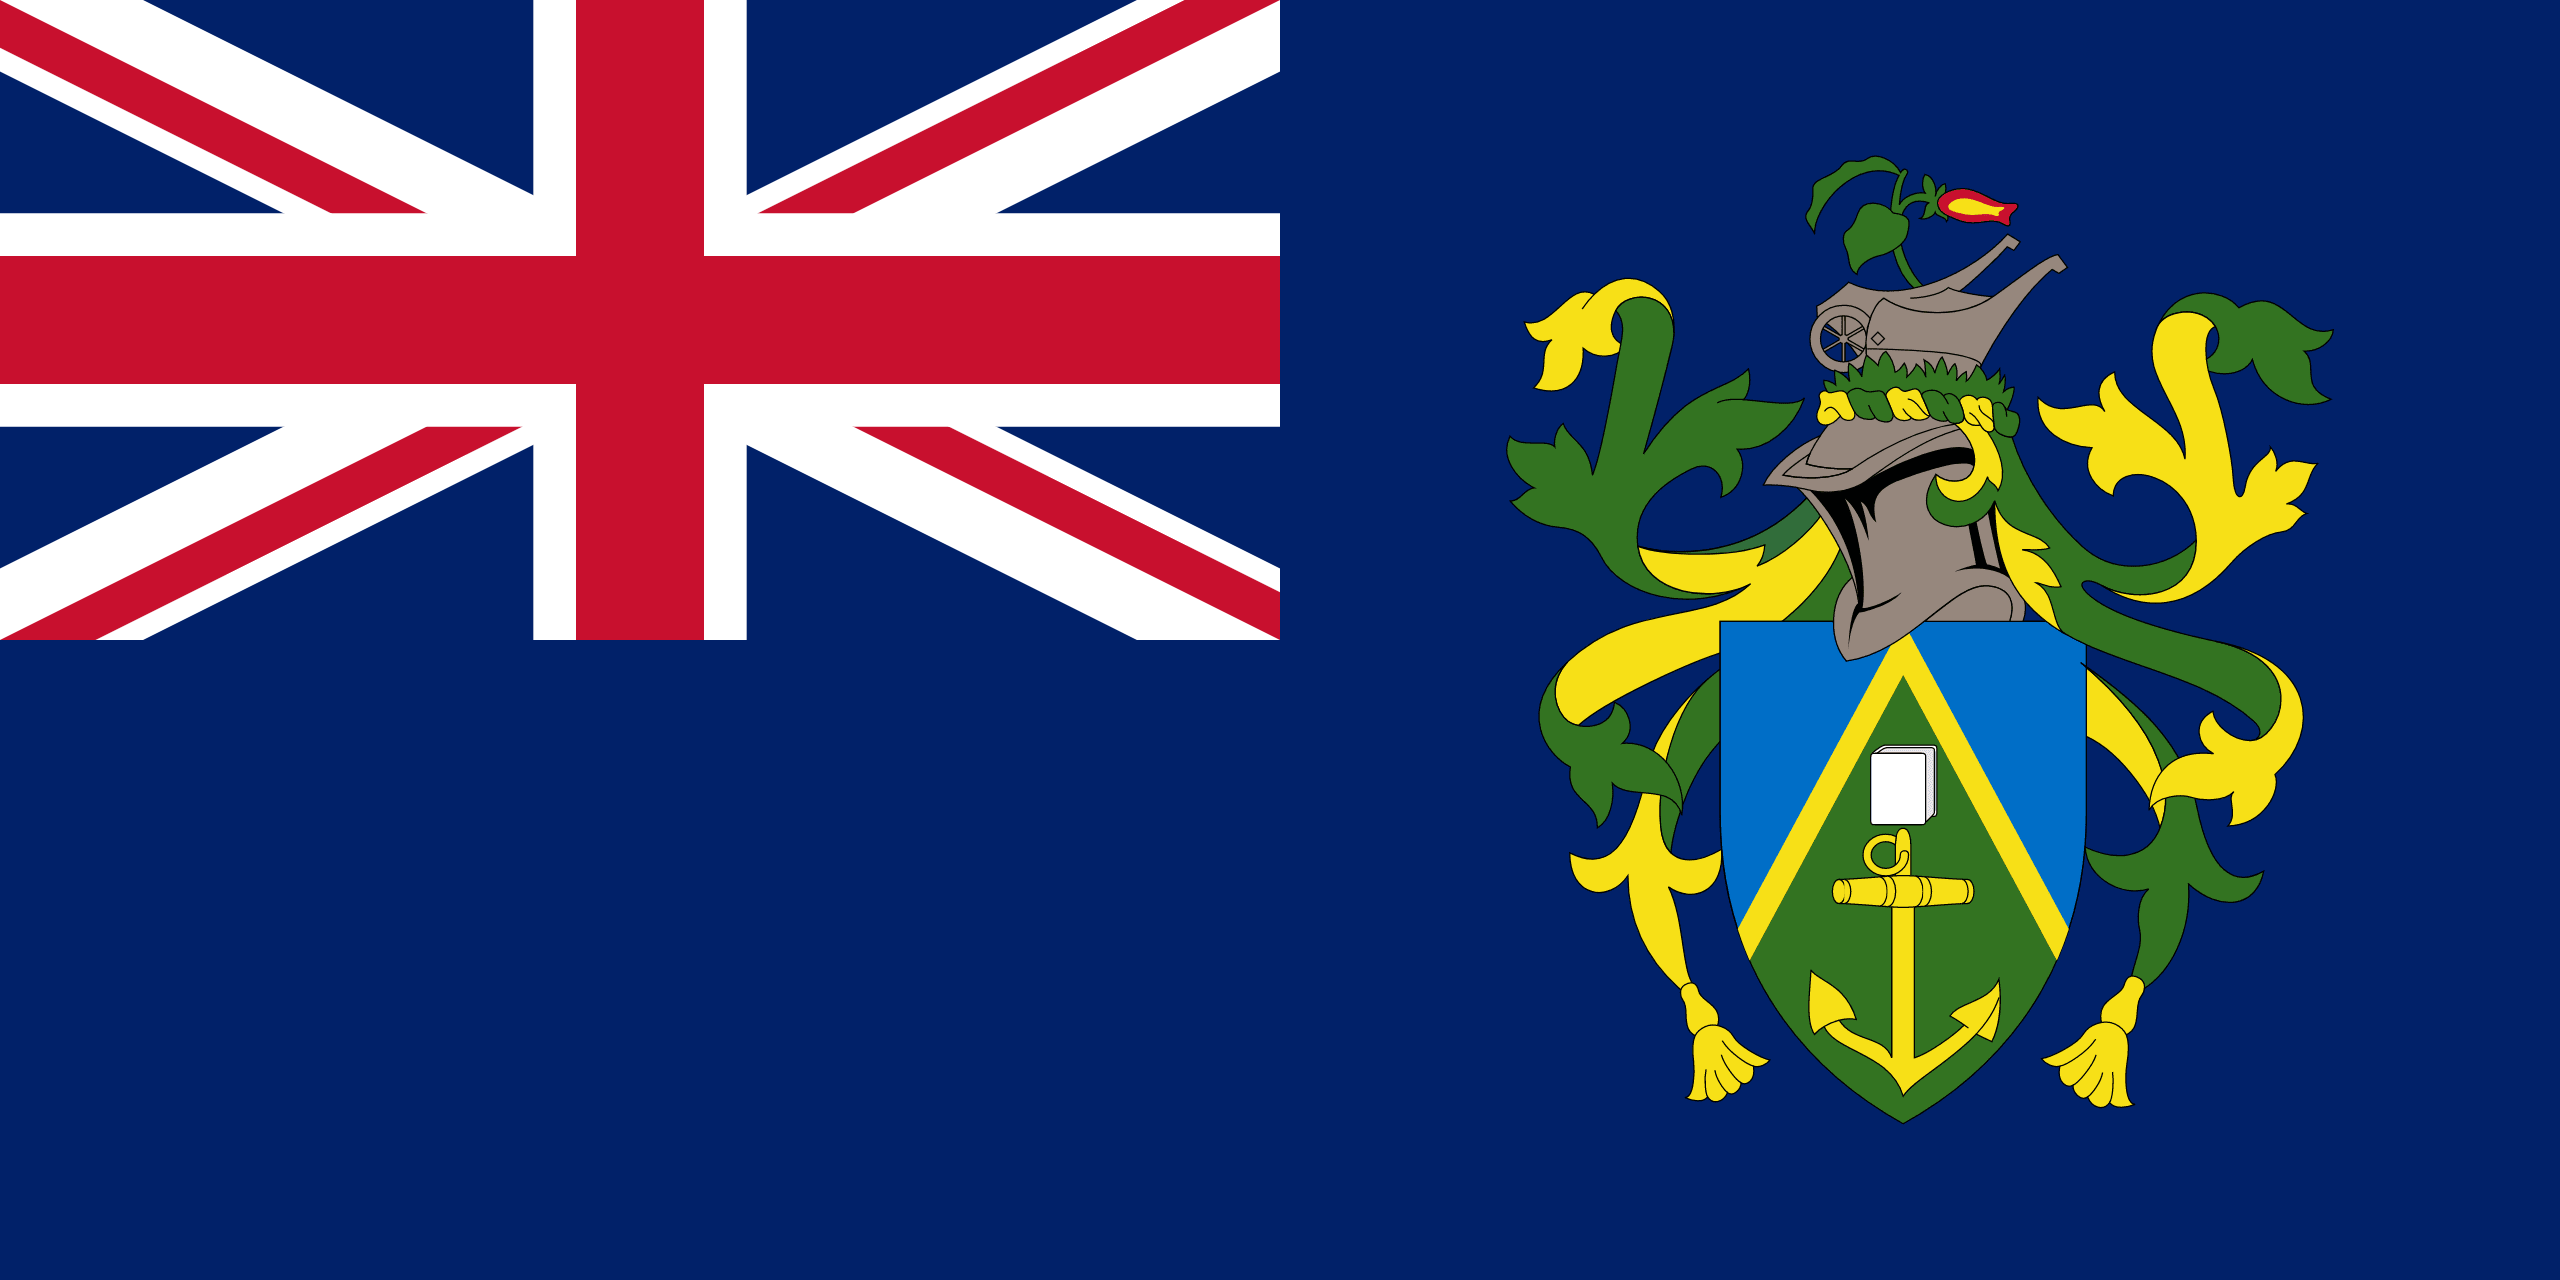

Poland


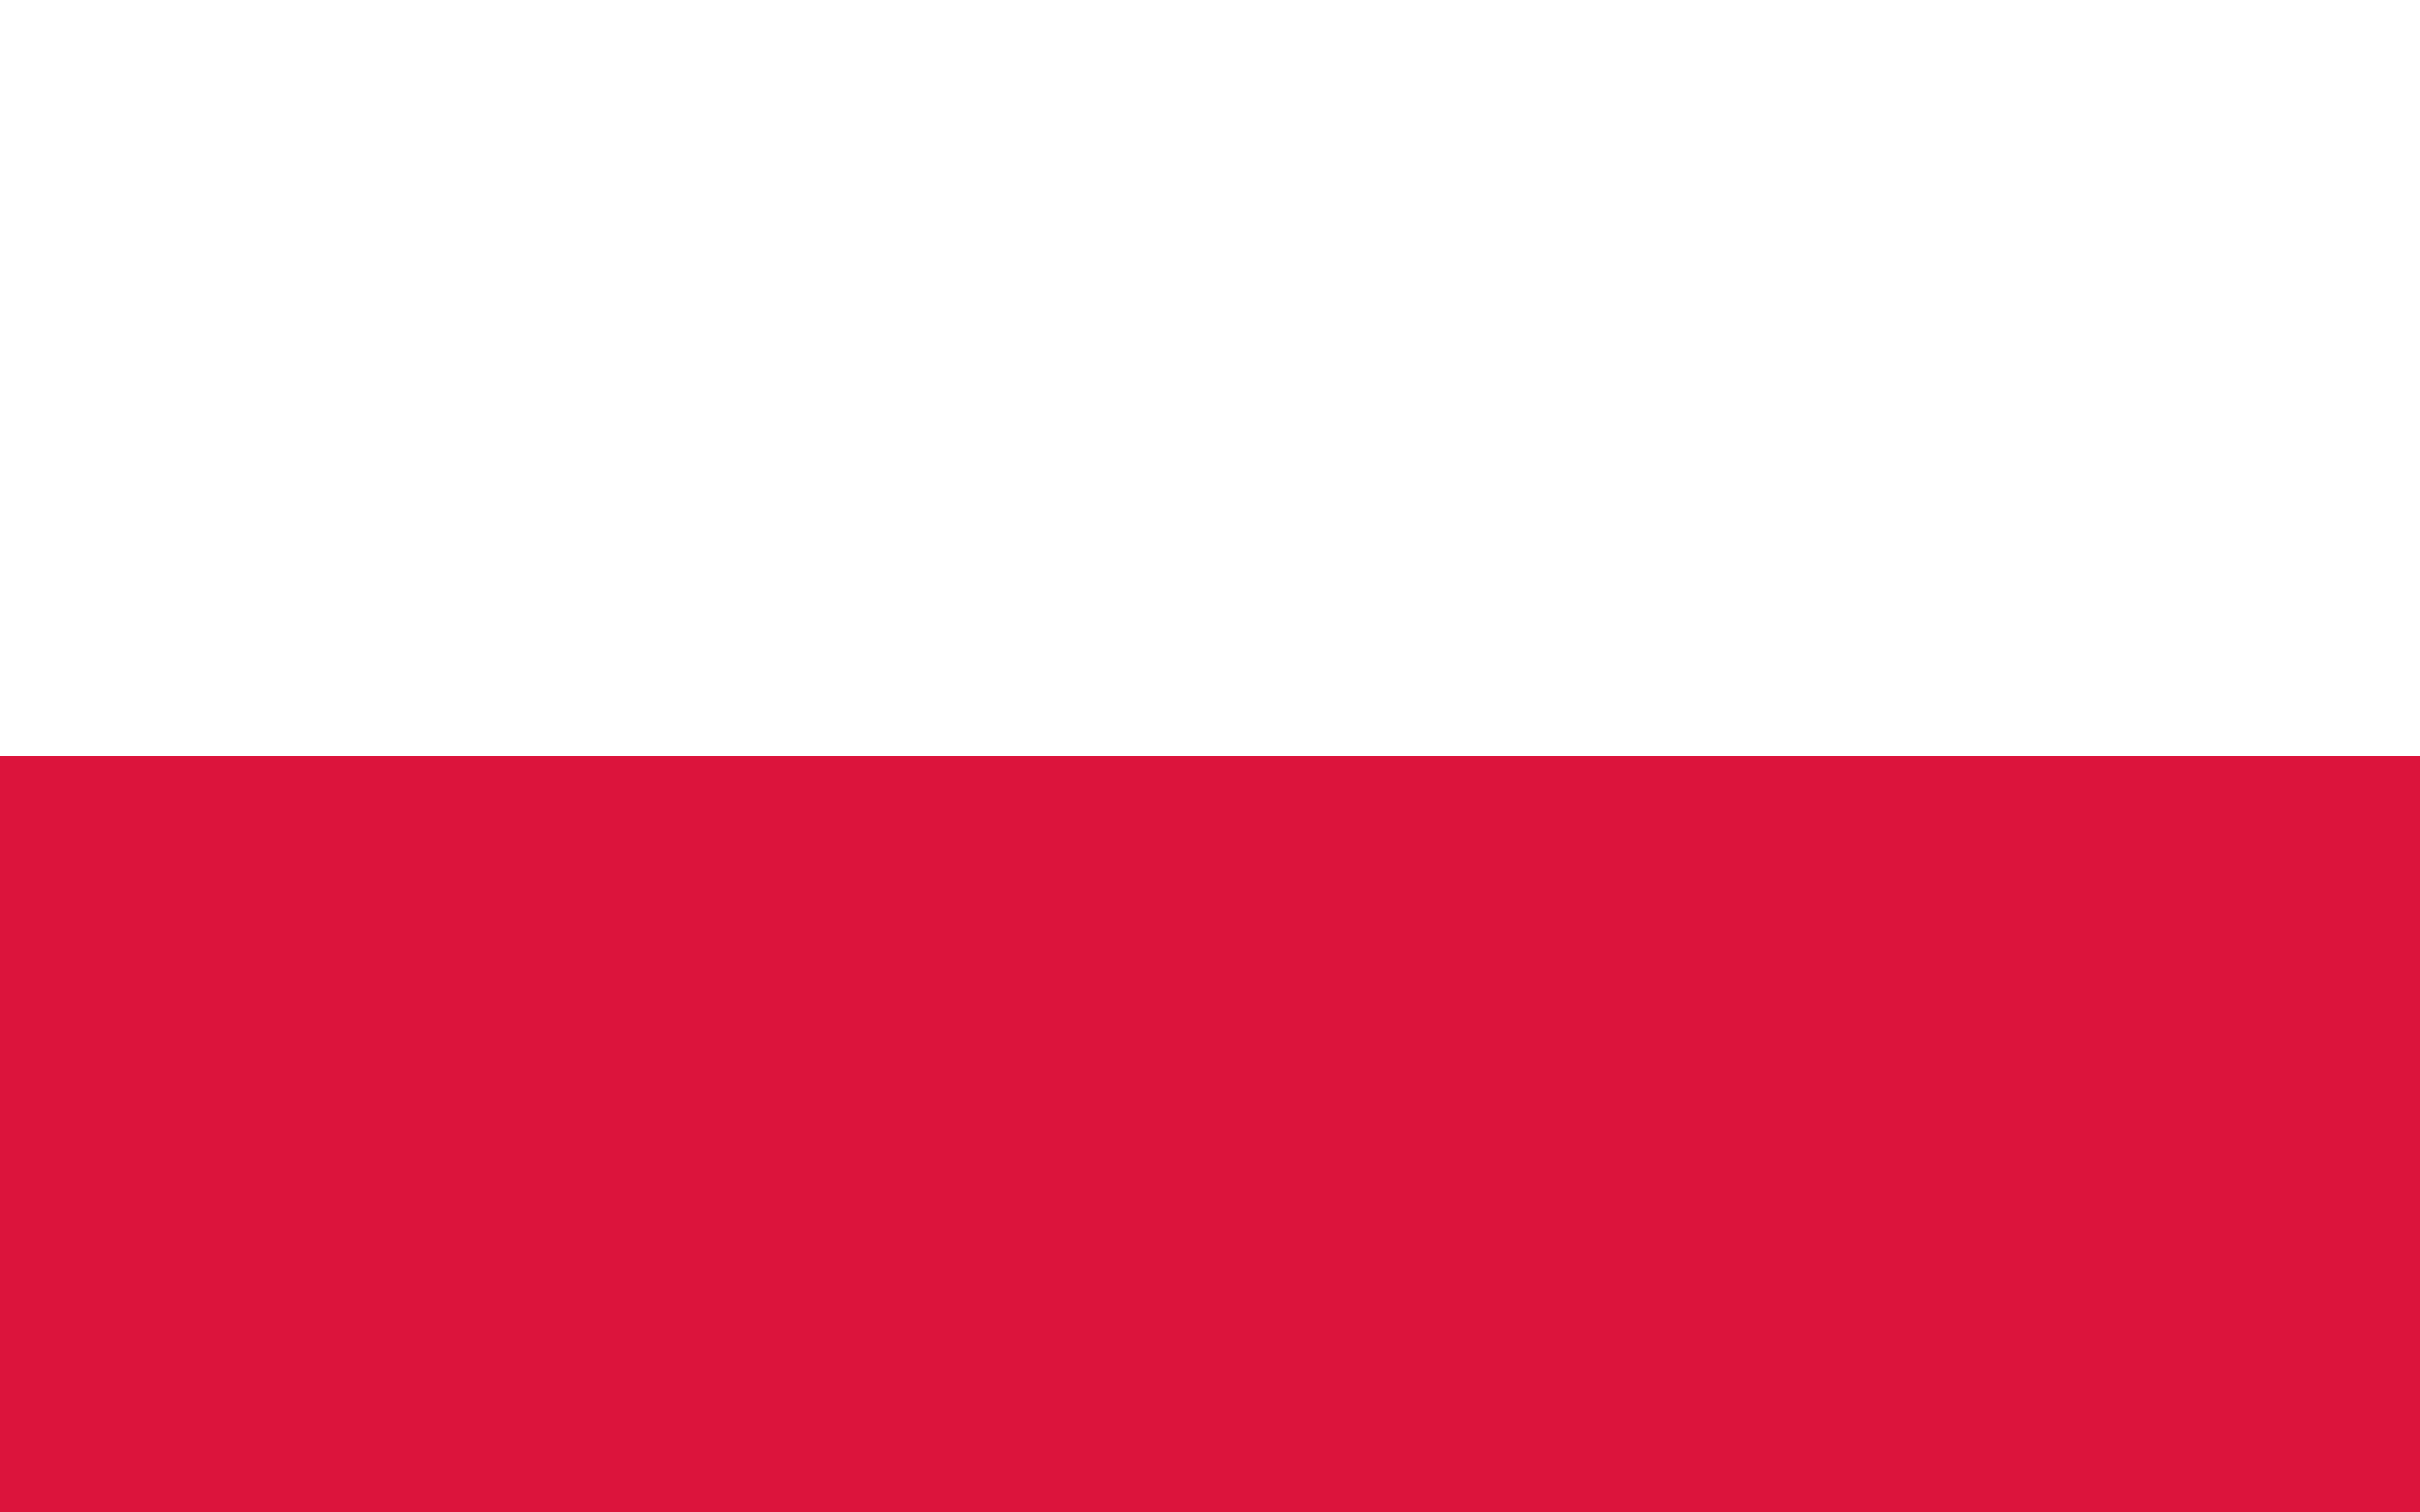

Portugal


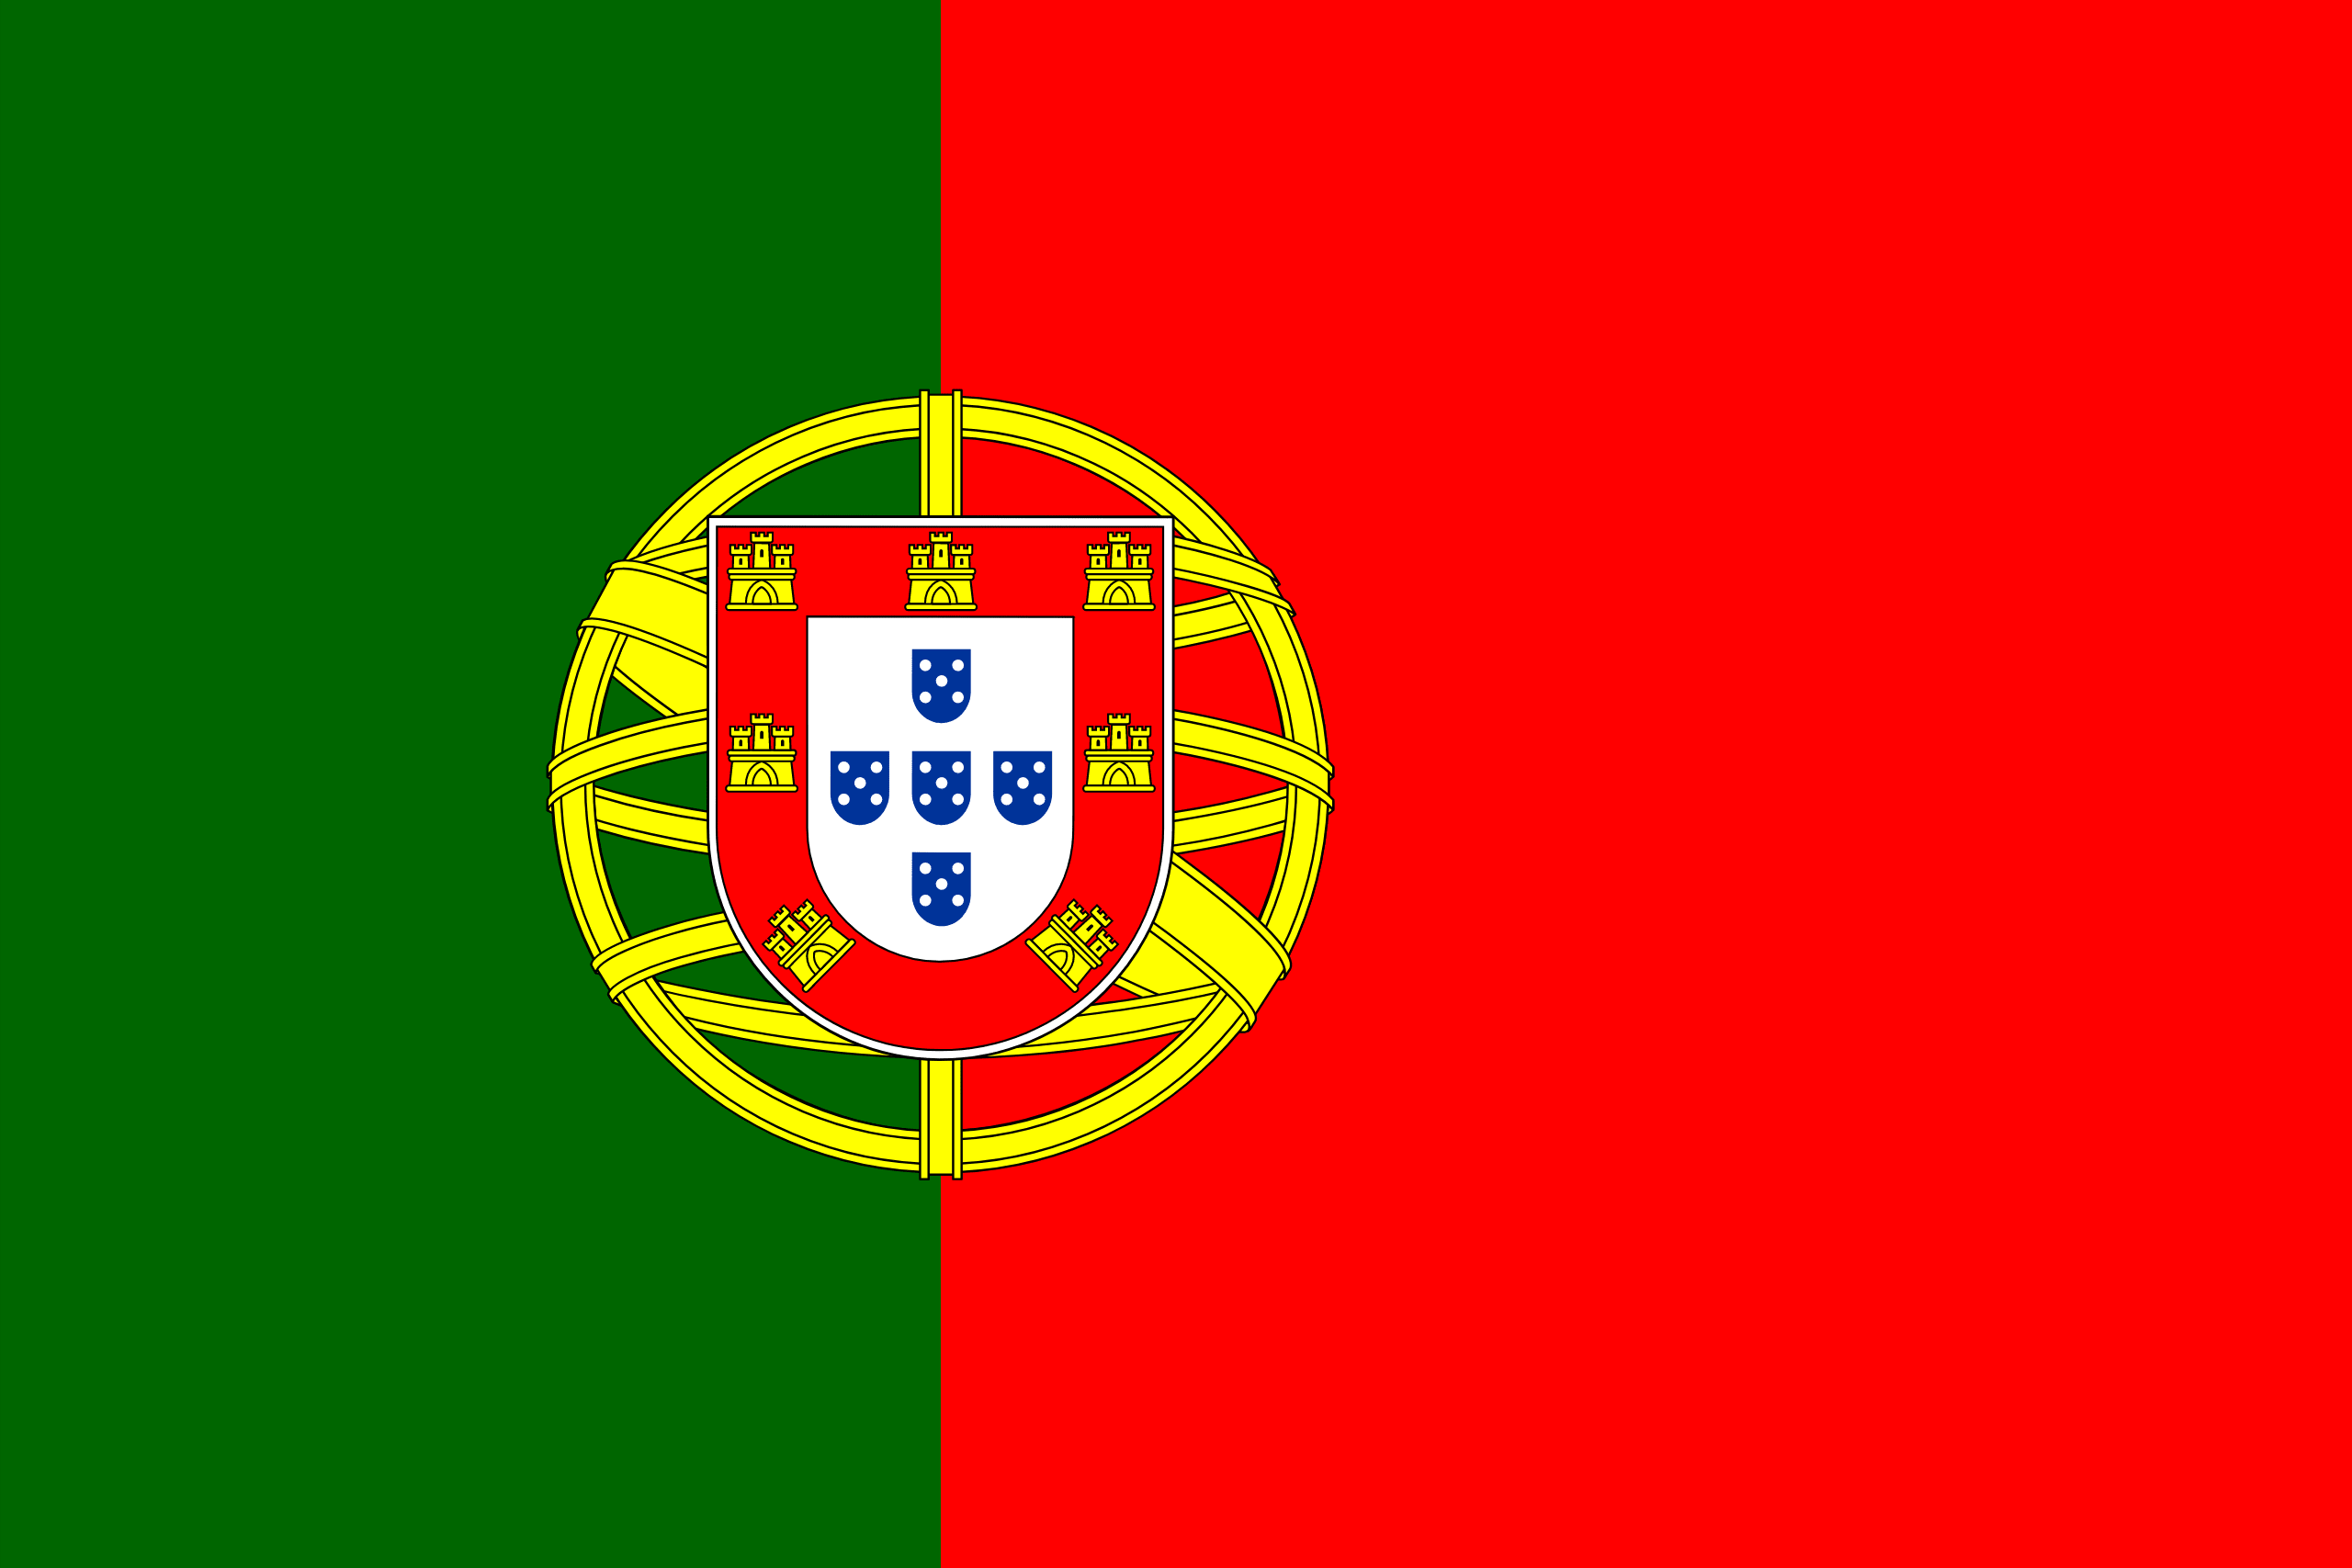

Puerto Rico


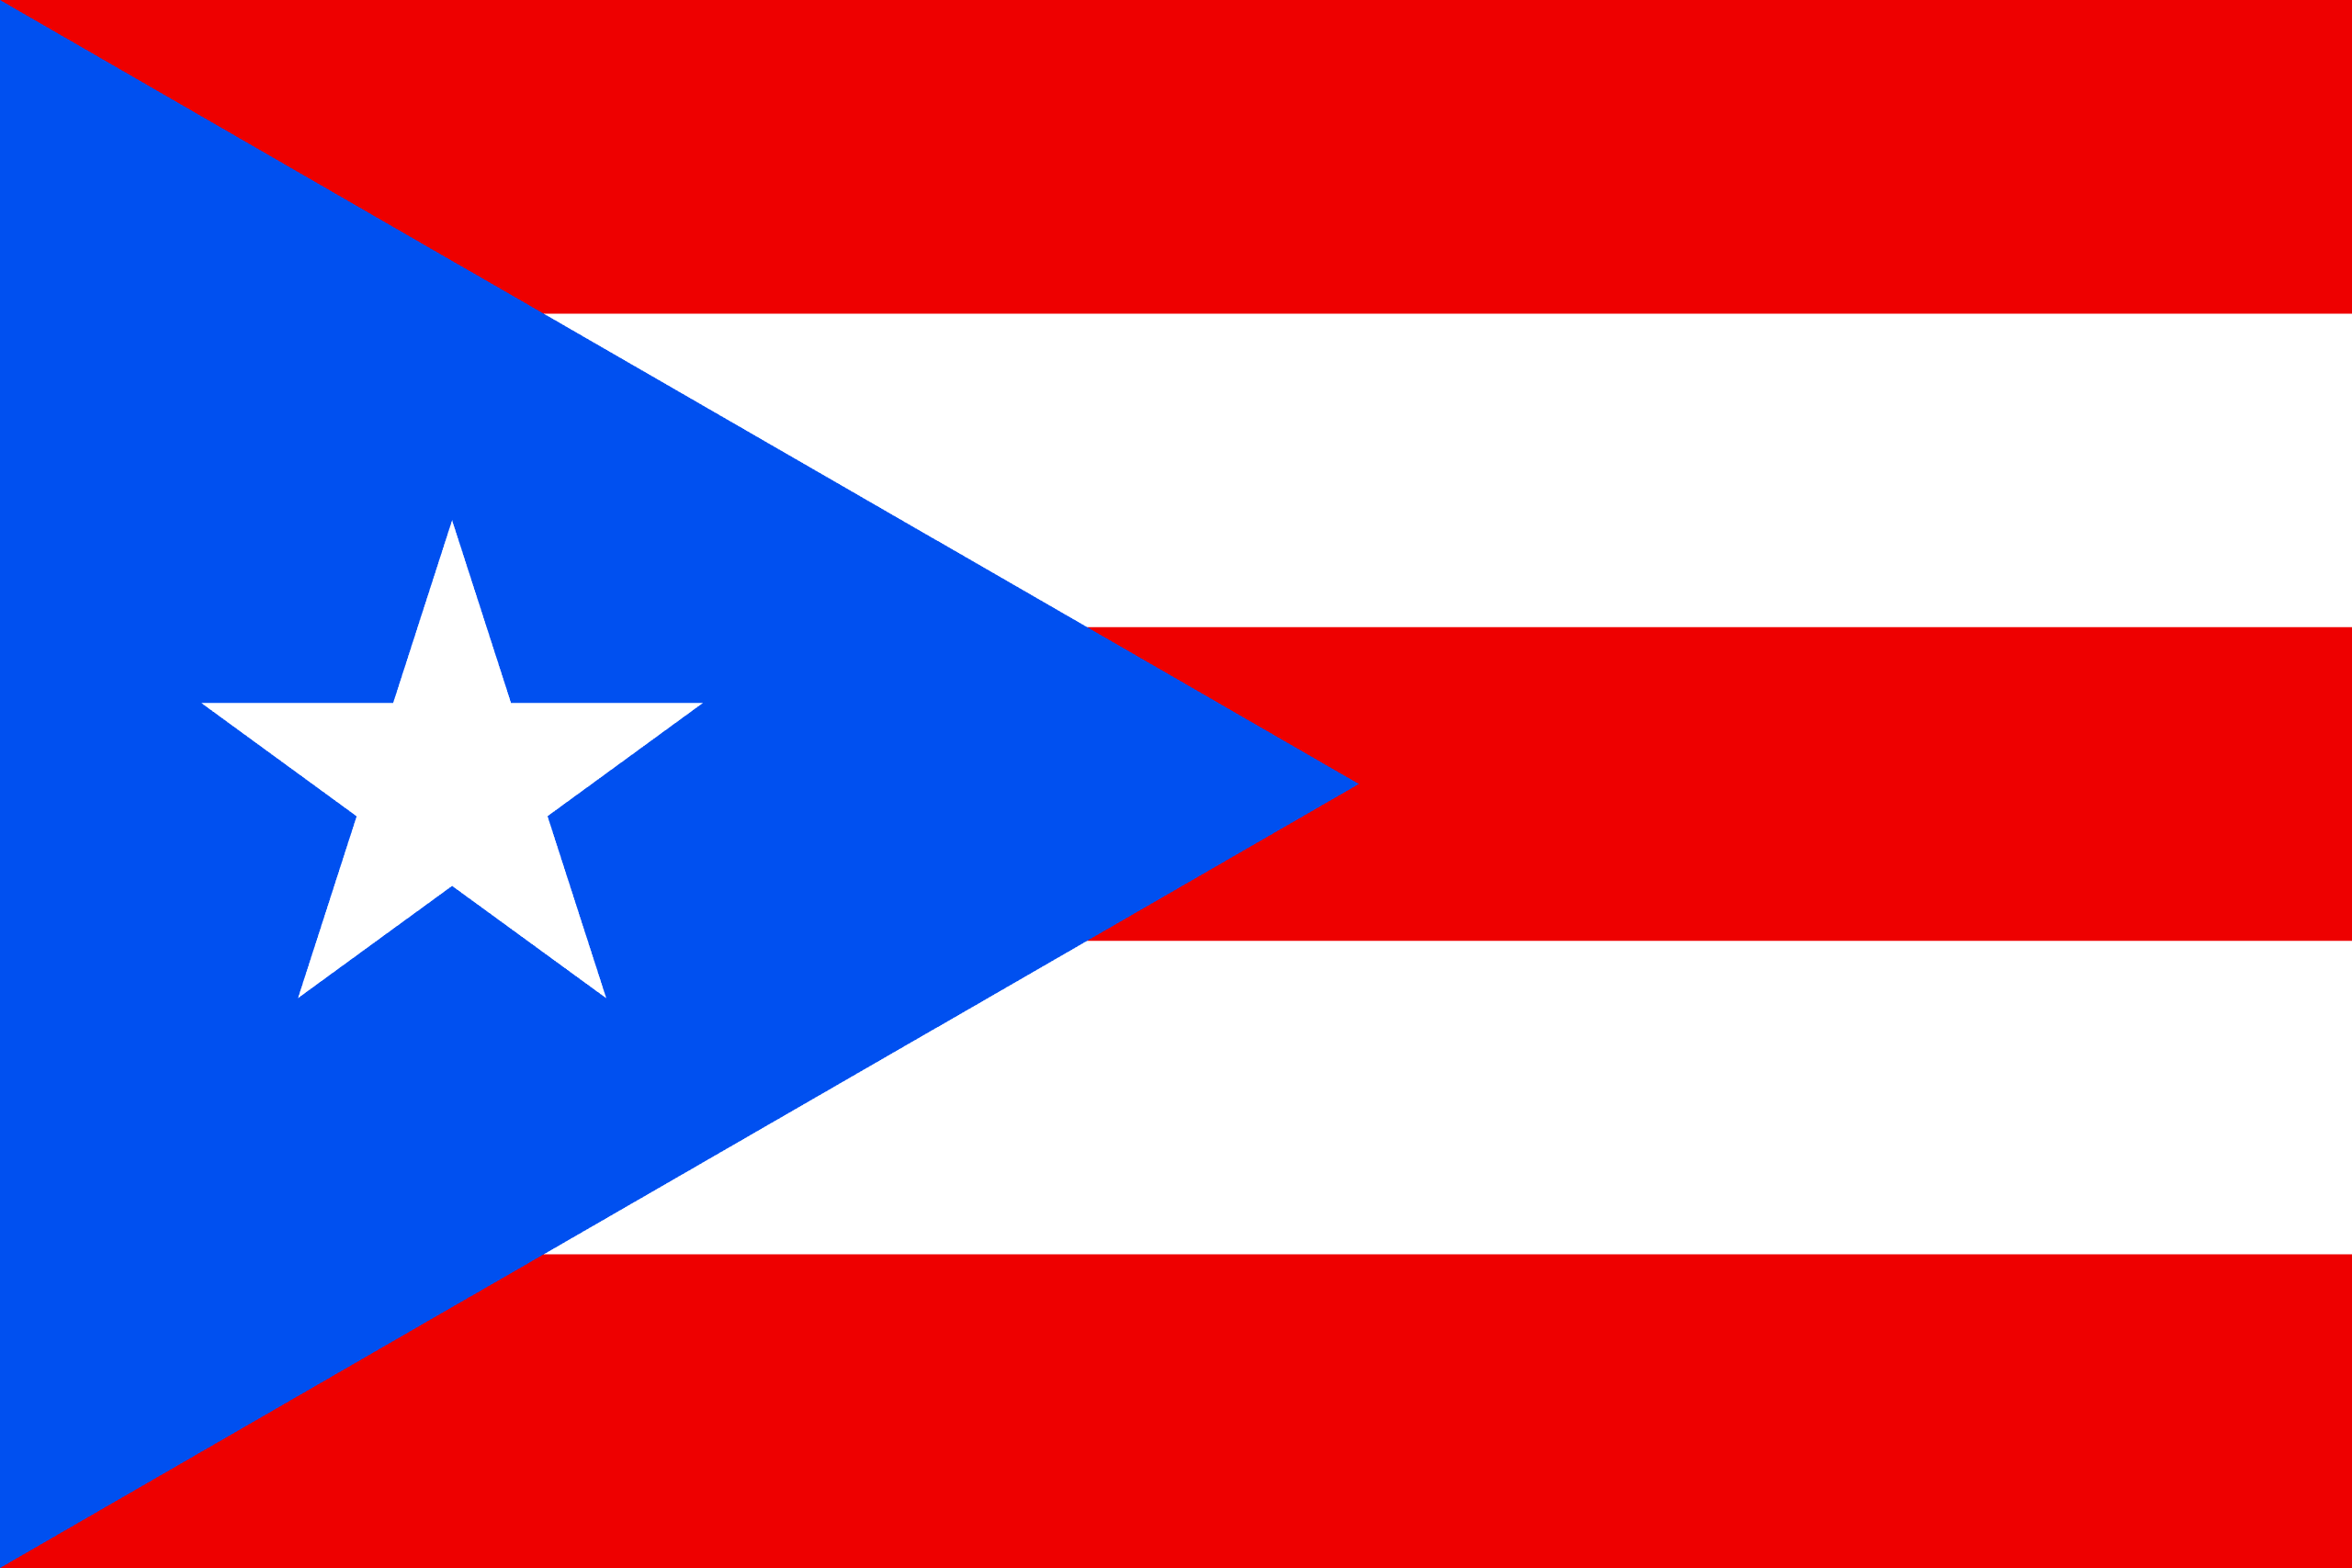

Qatar


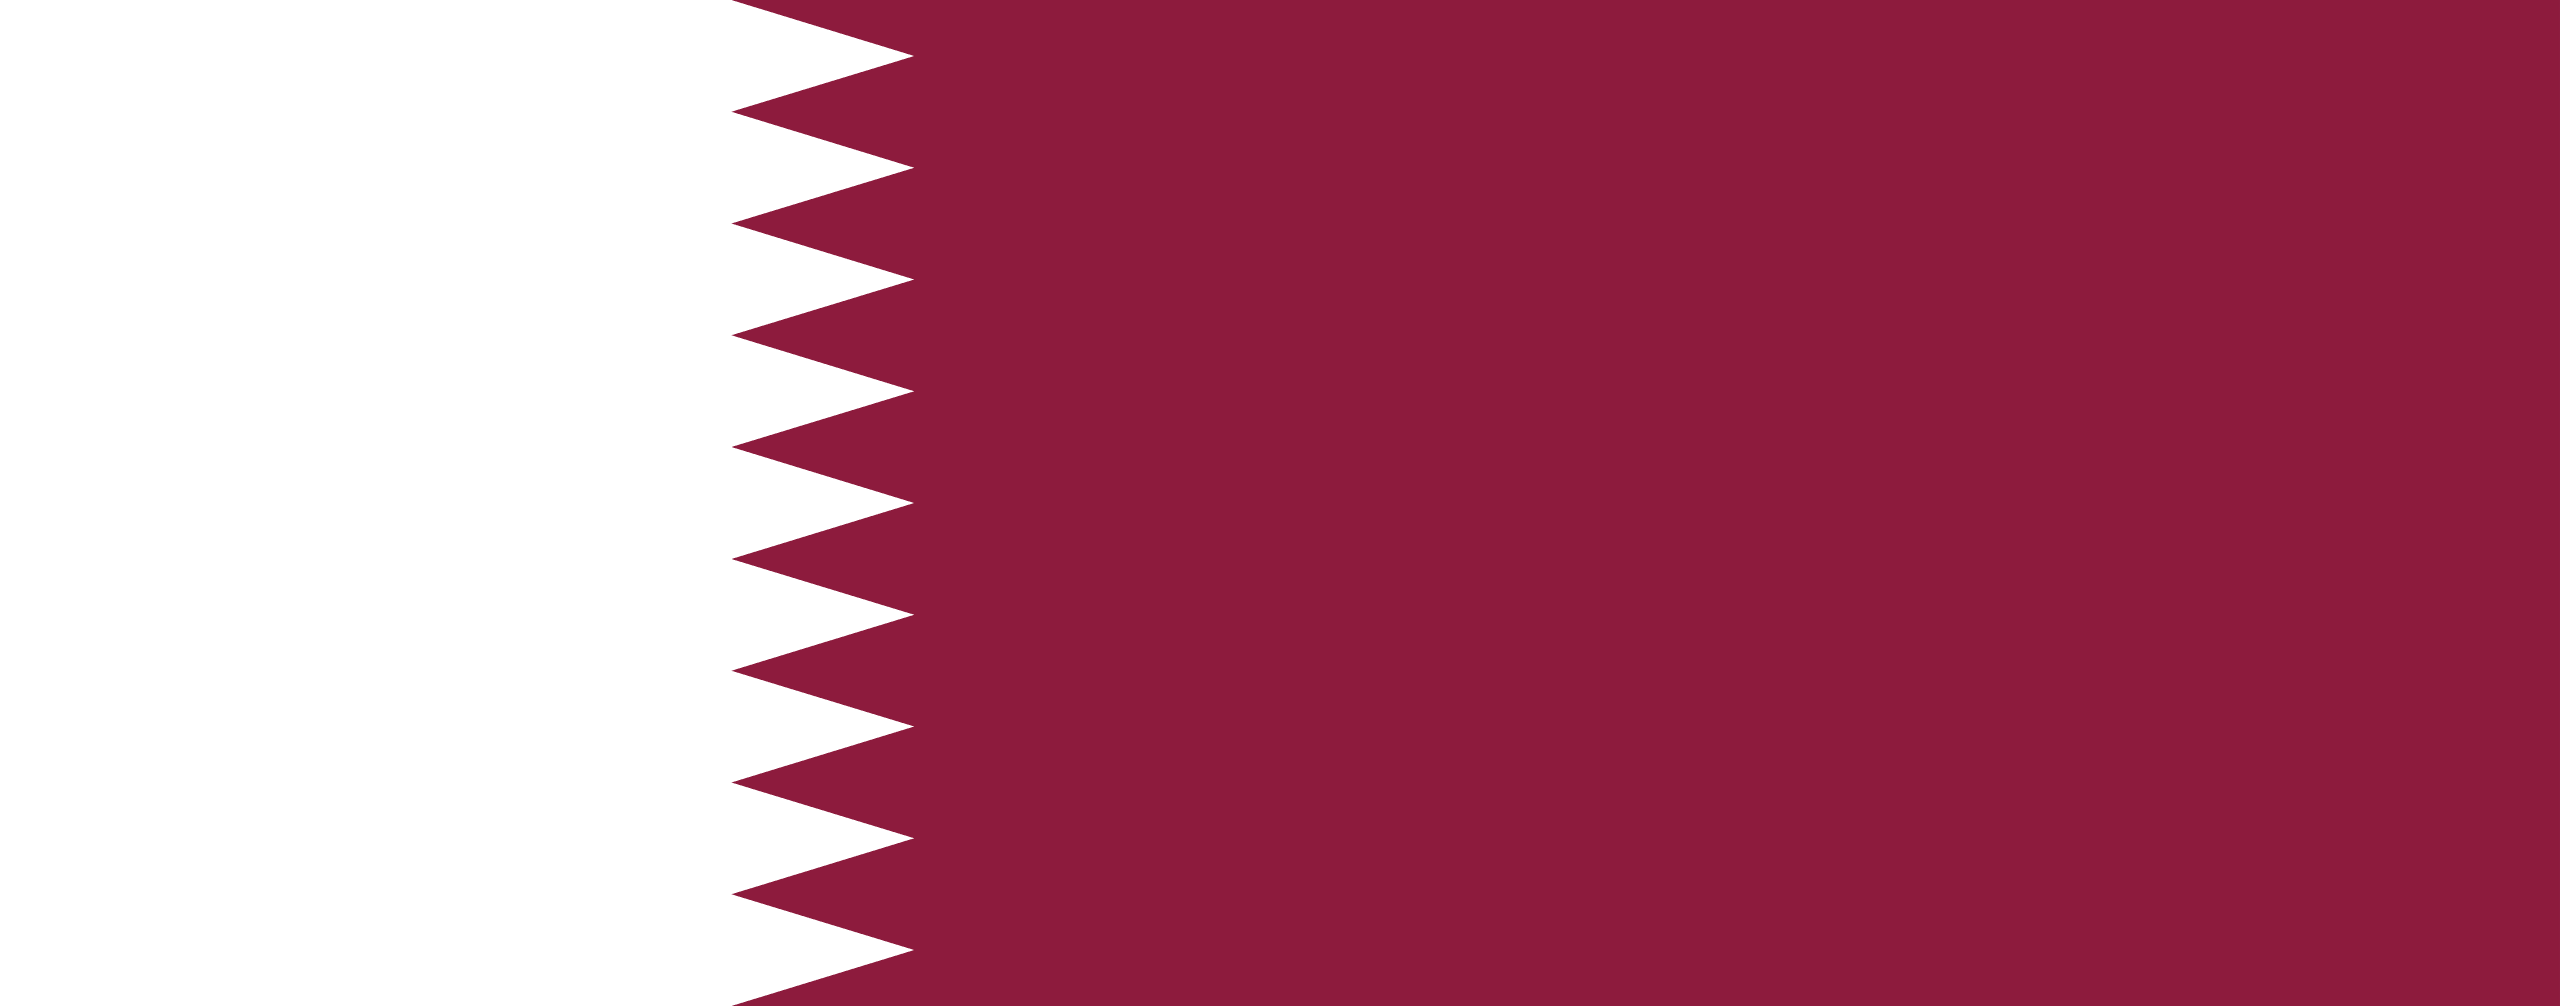

Réunion


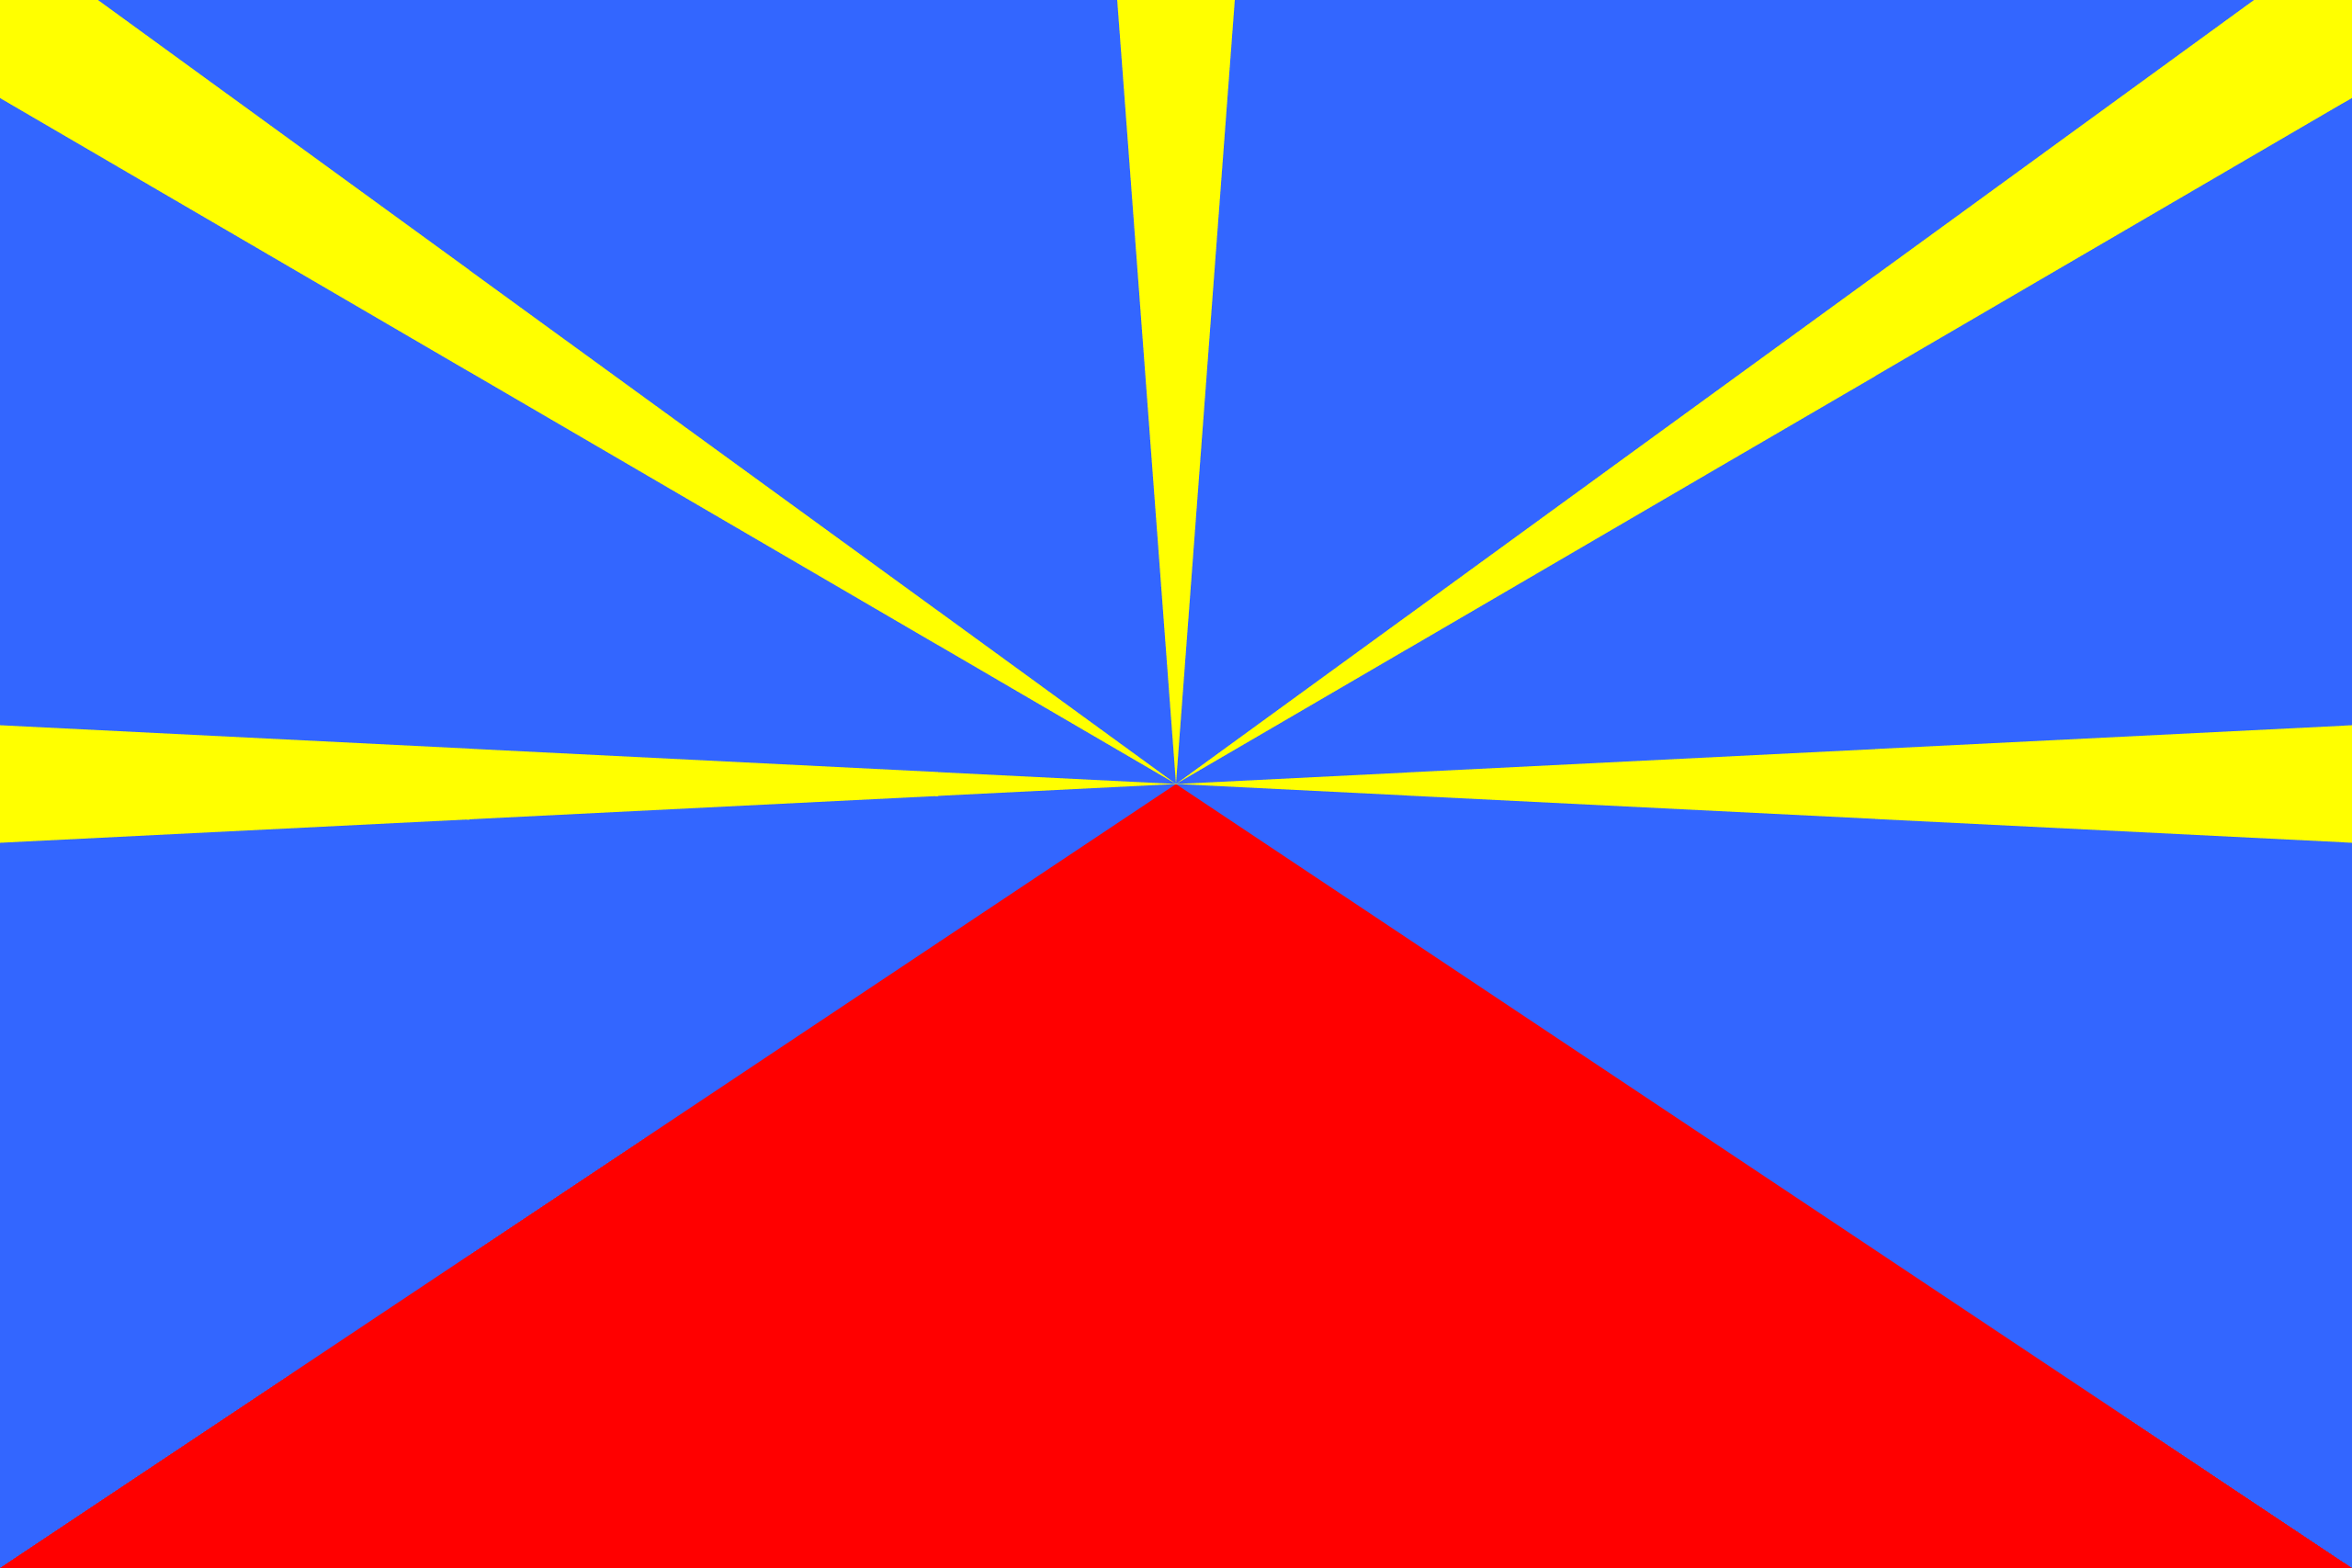

Romania


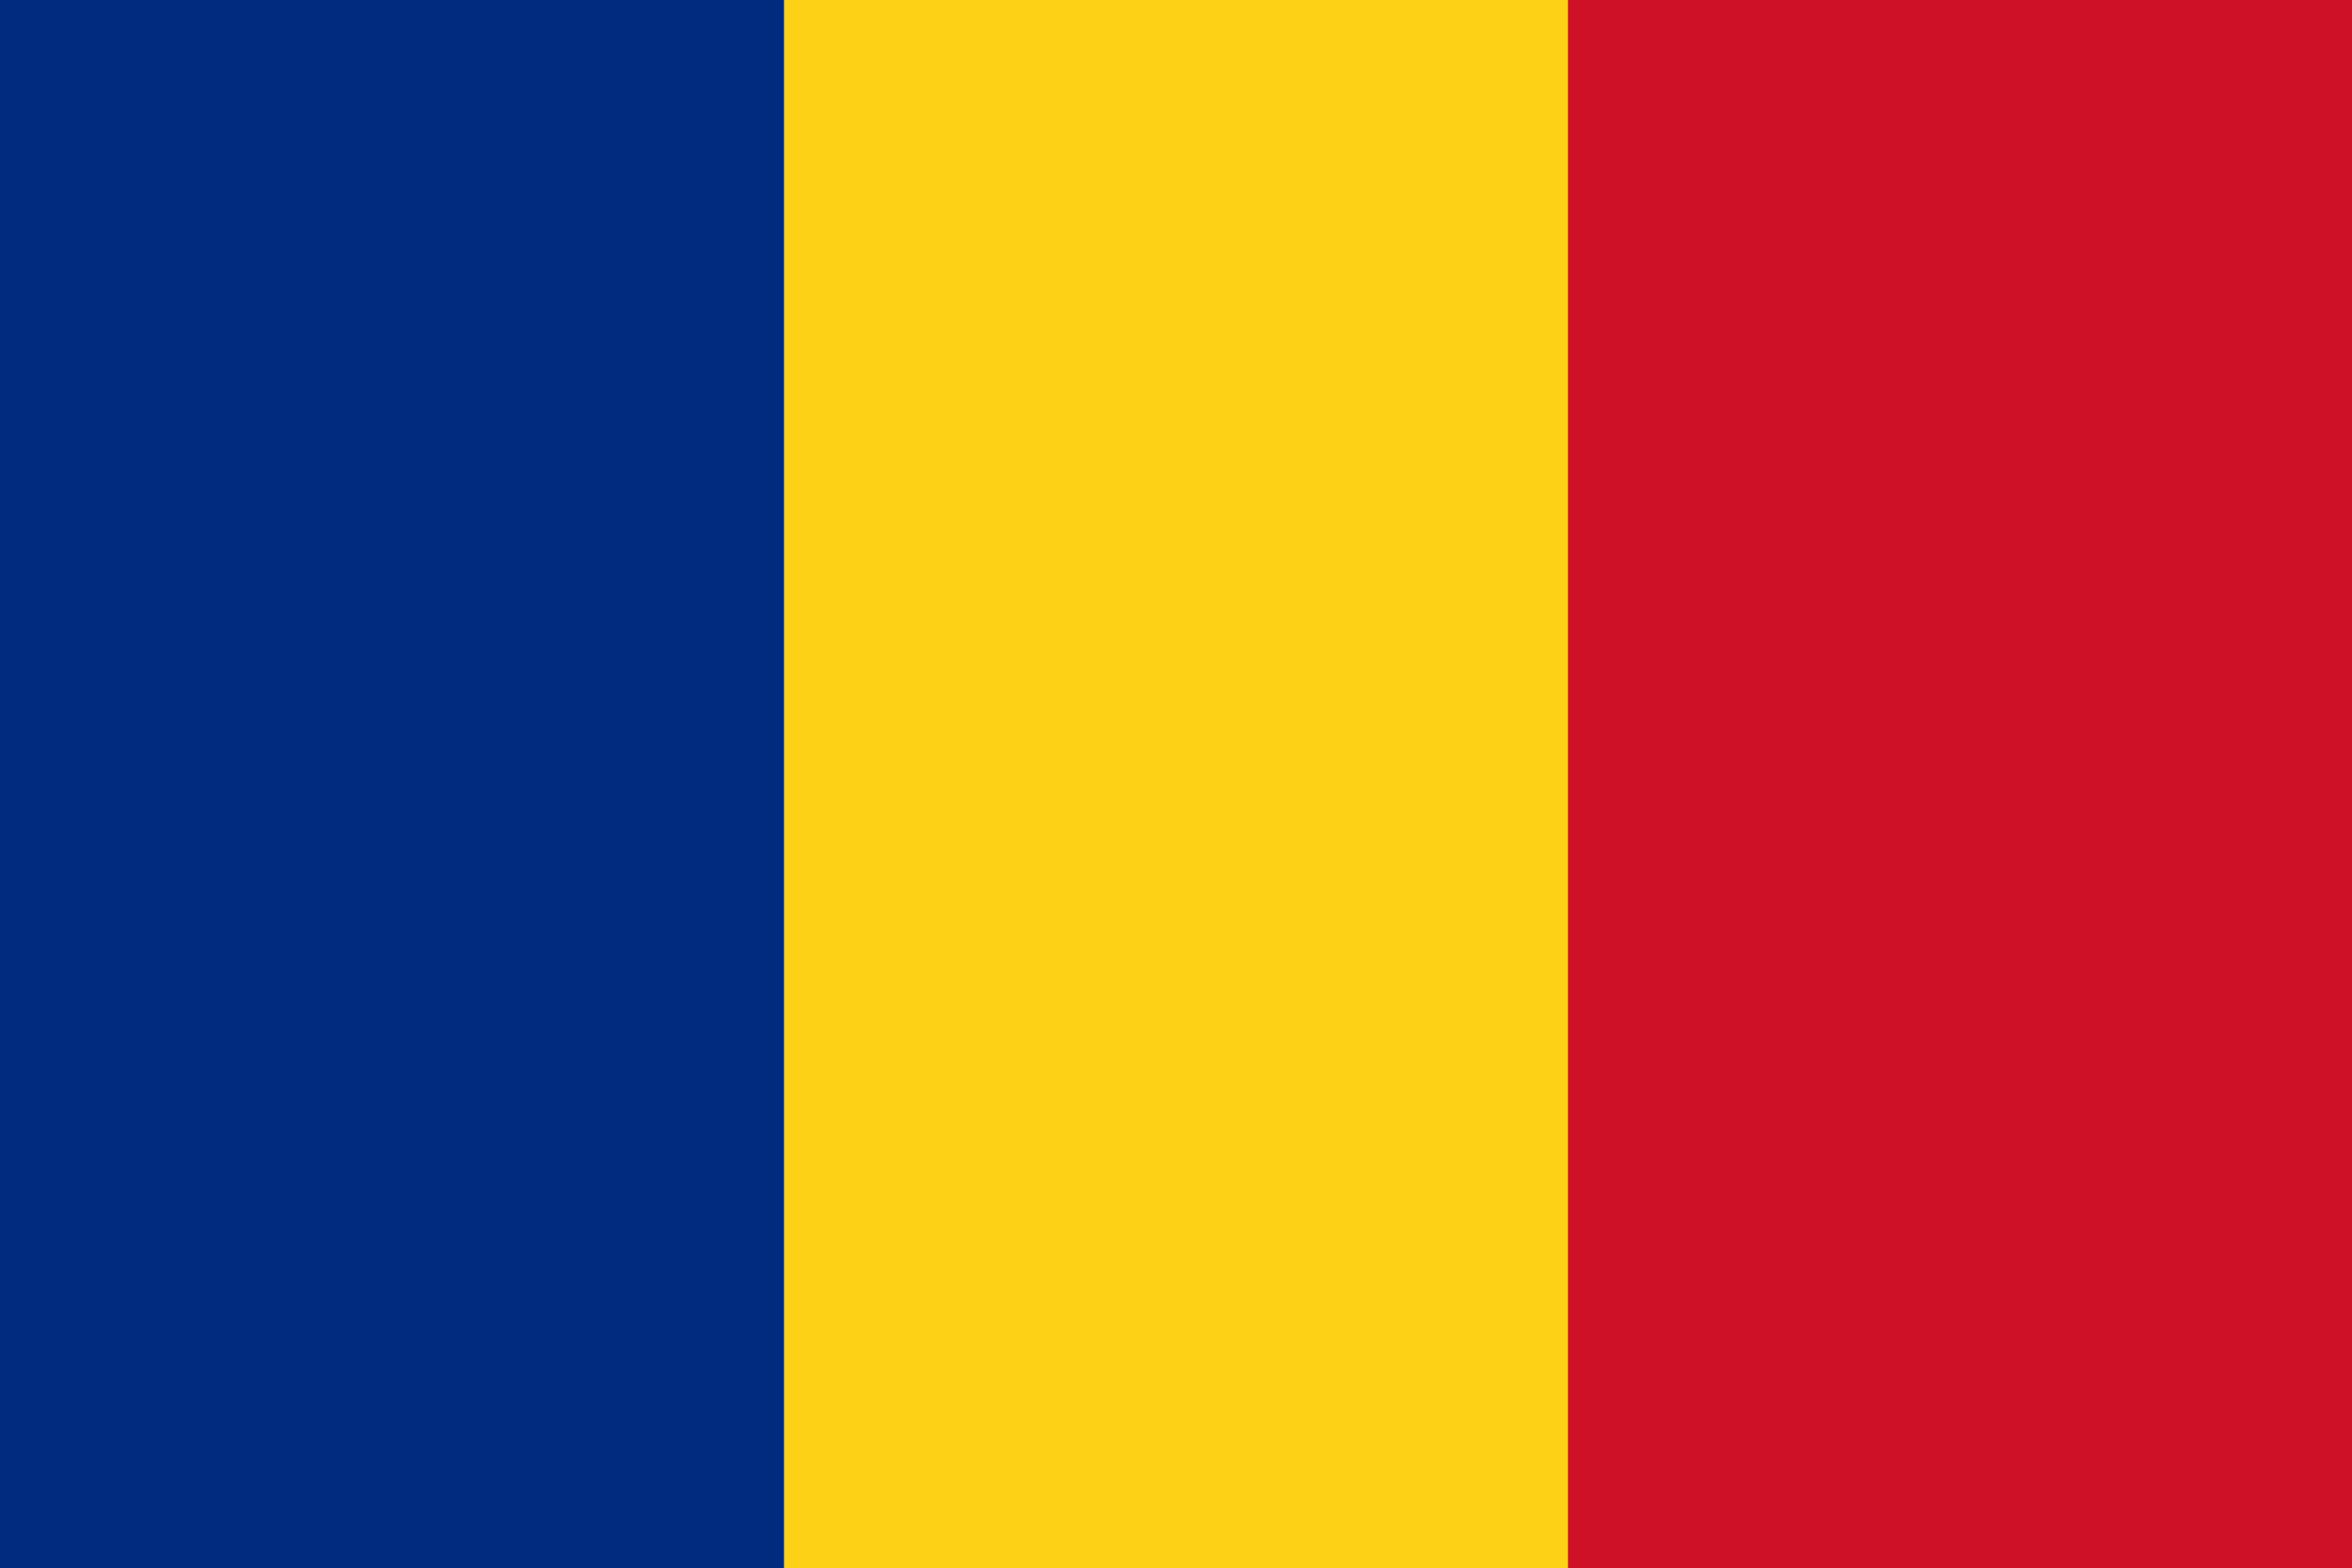

Russia


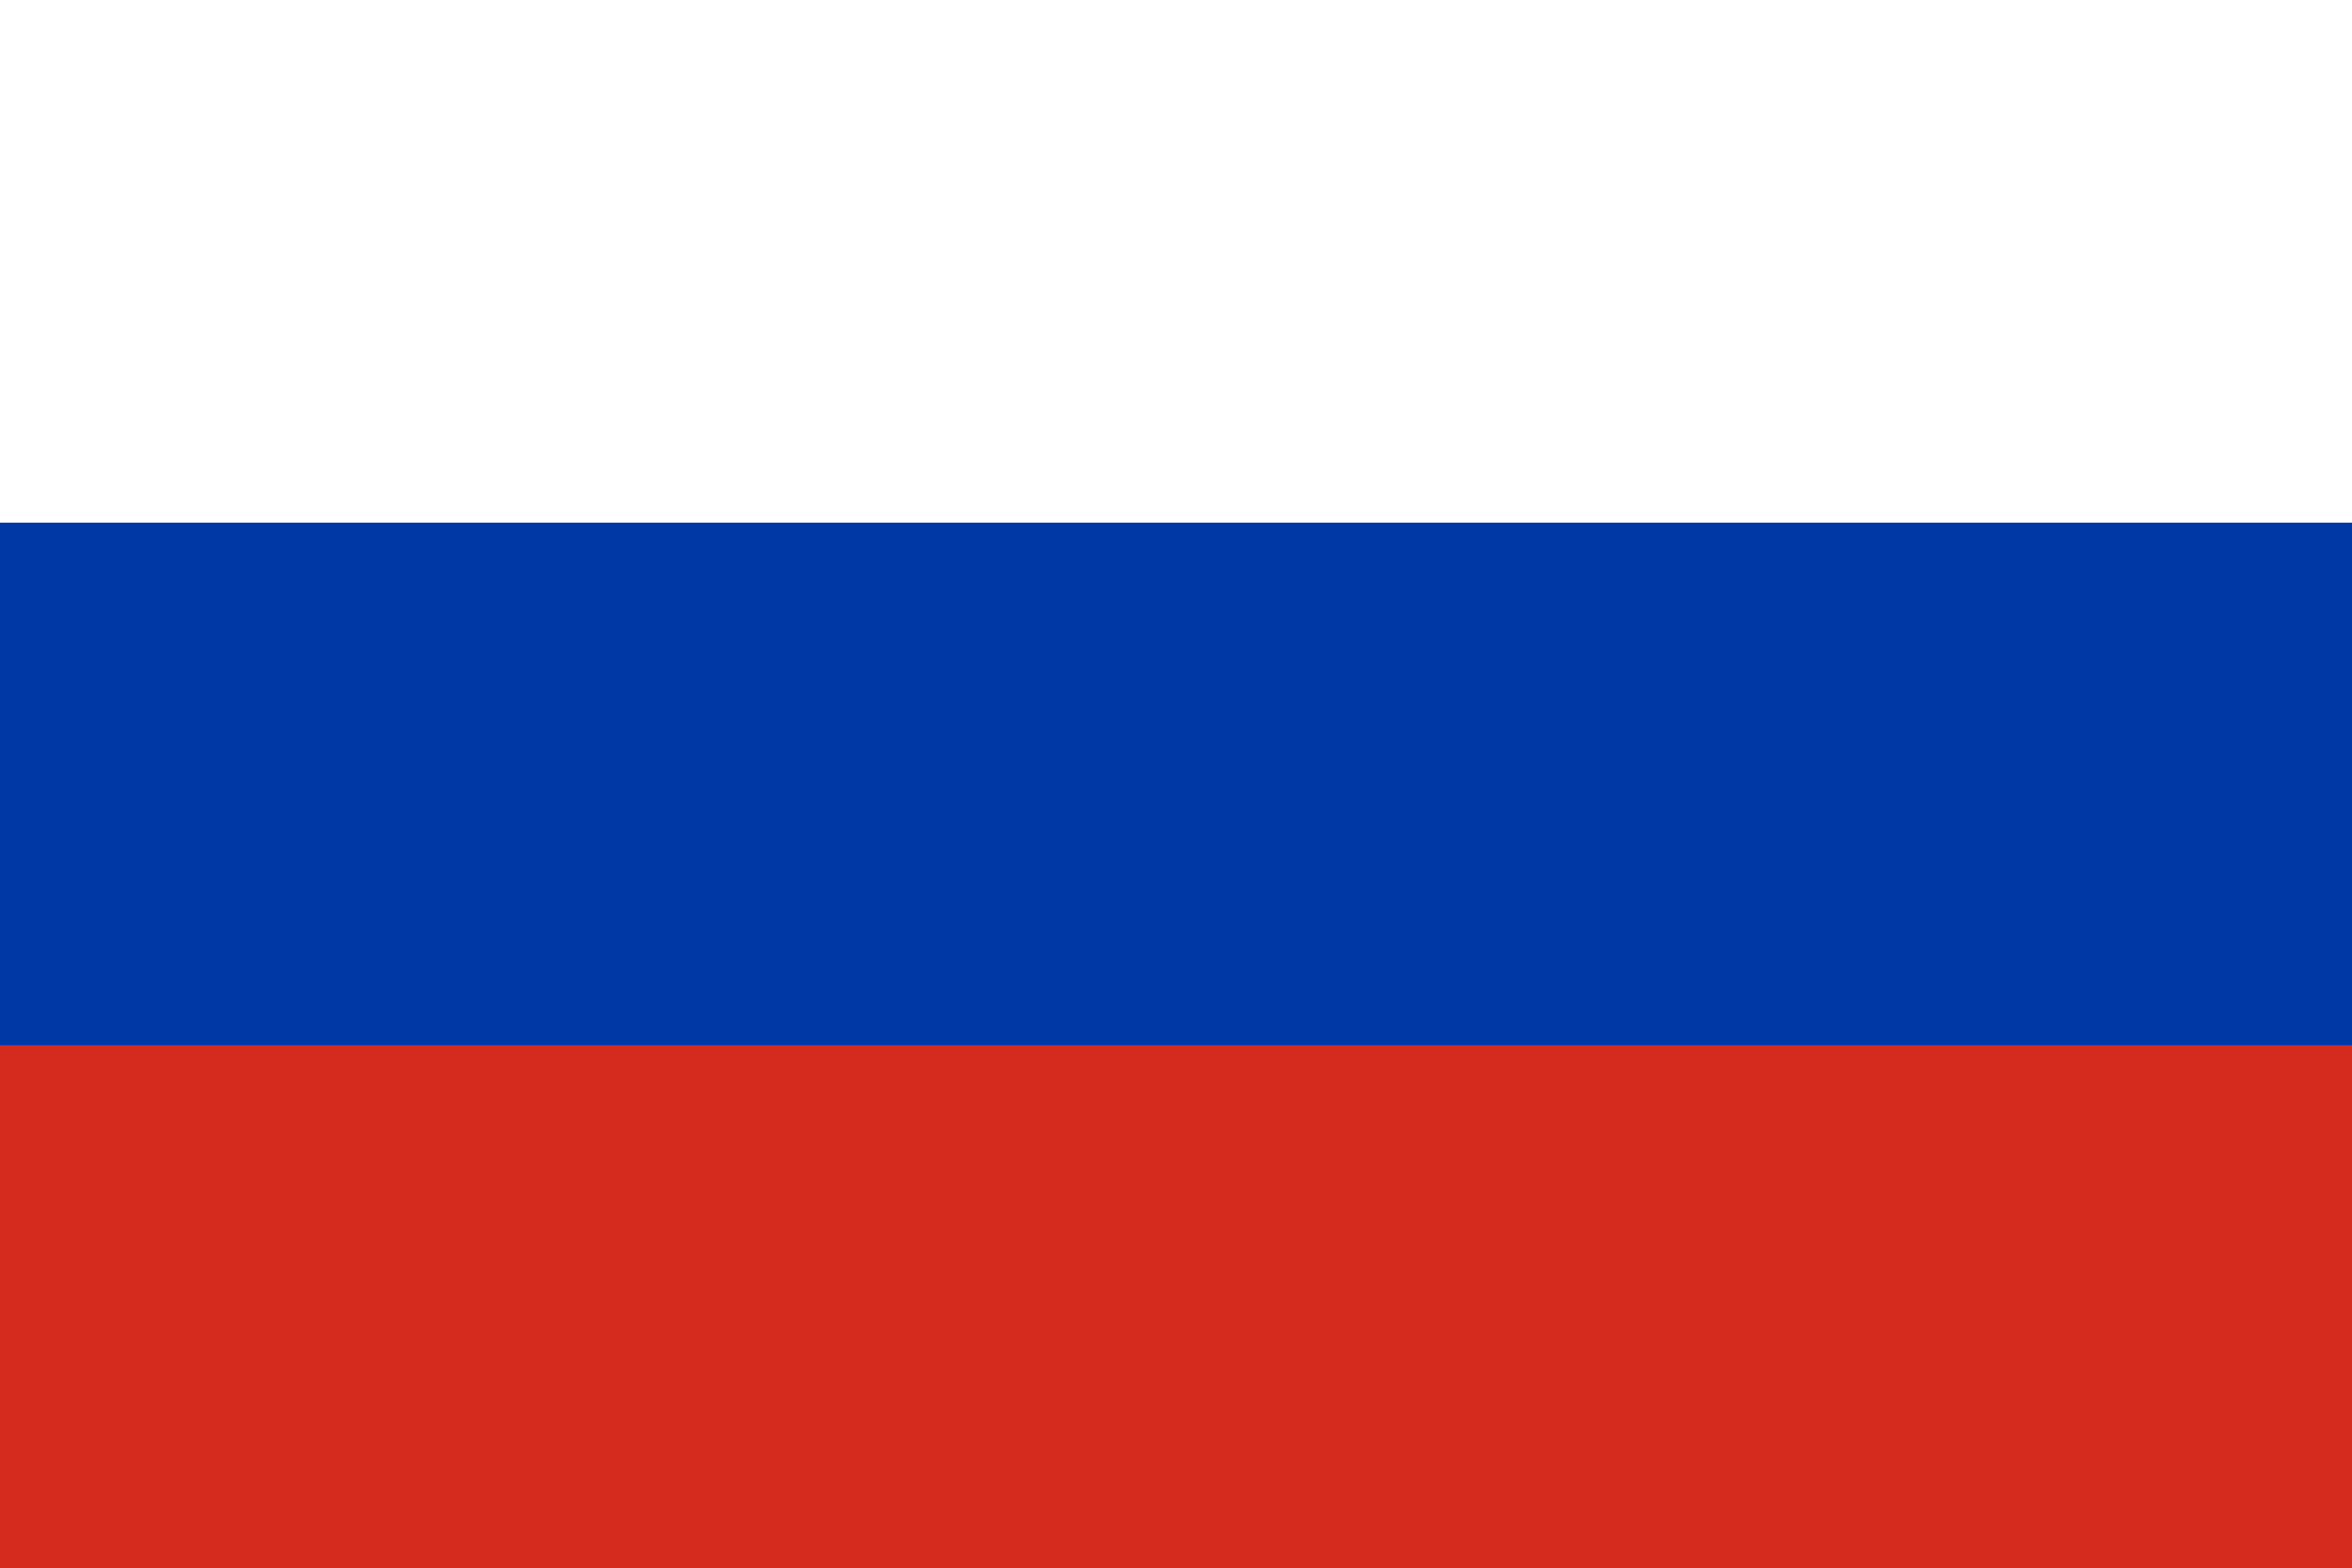

Rwanda


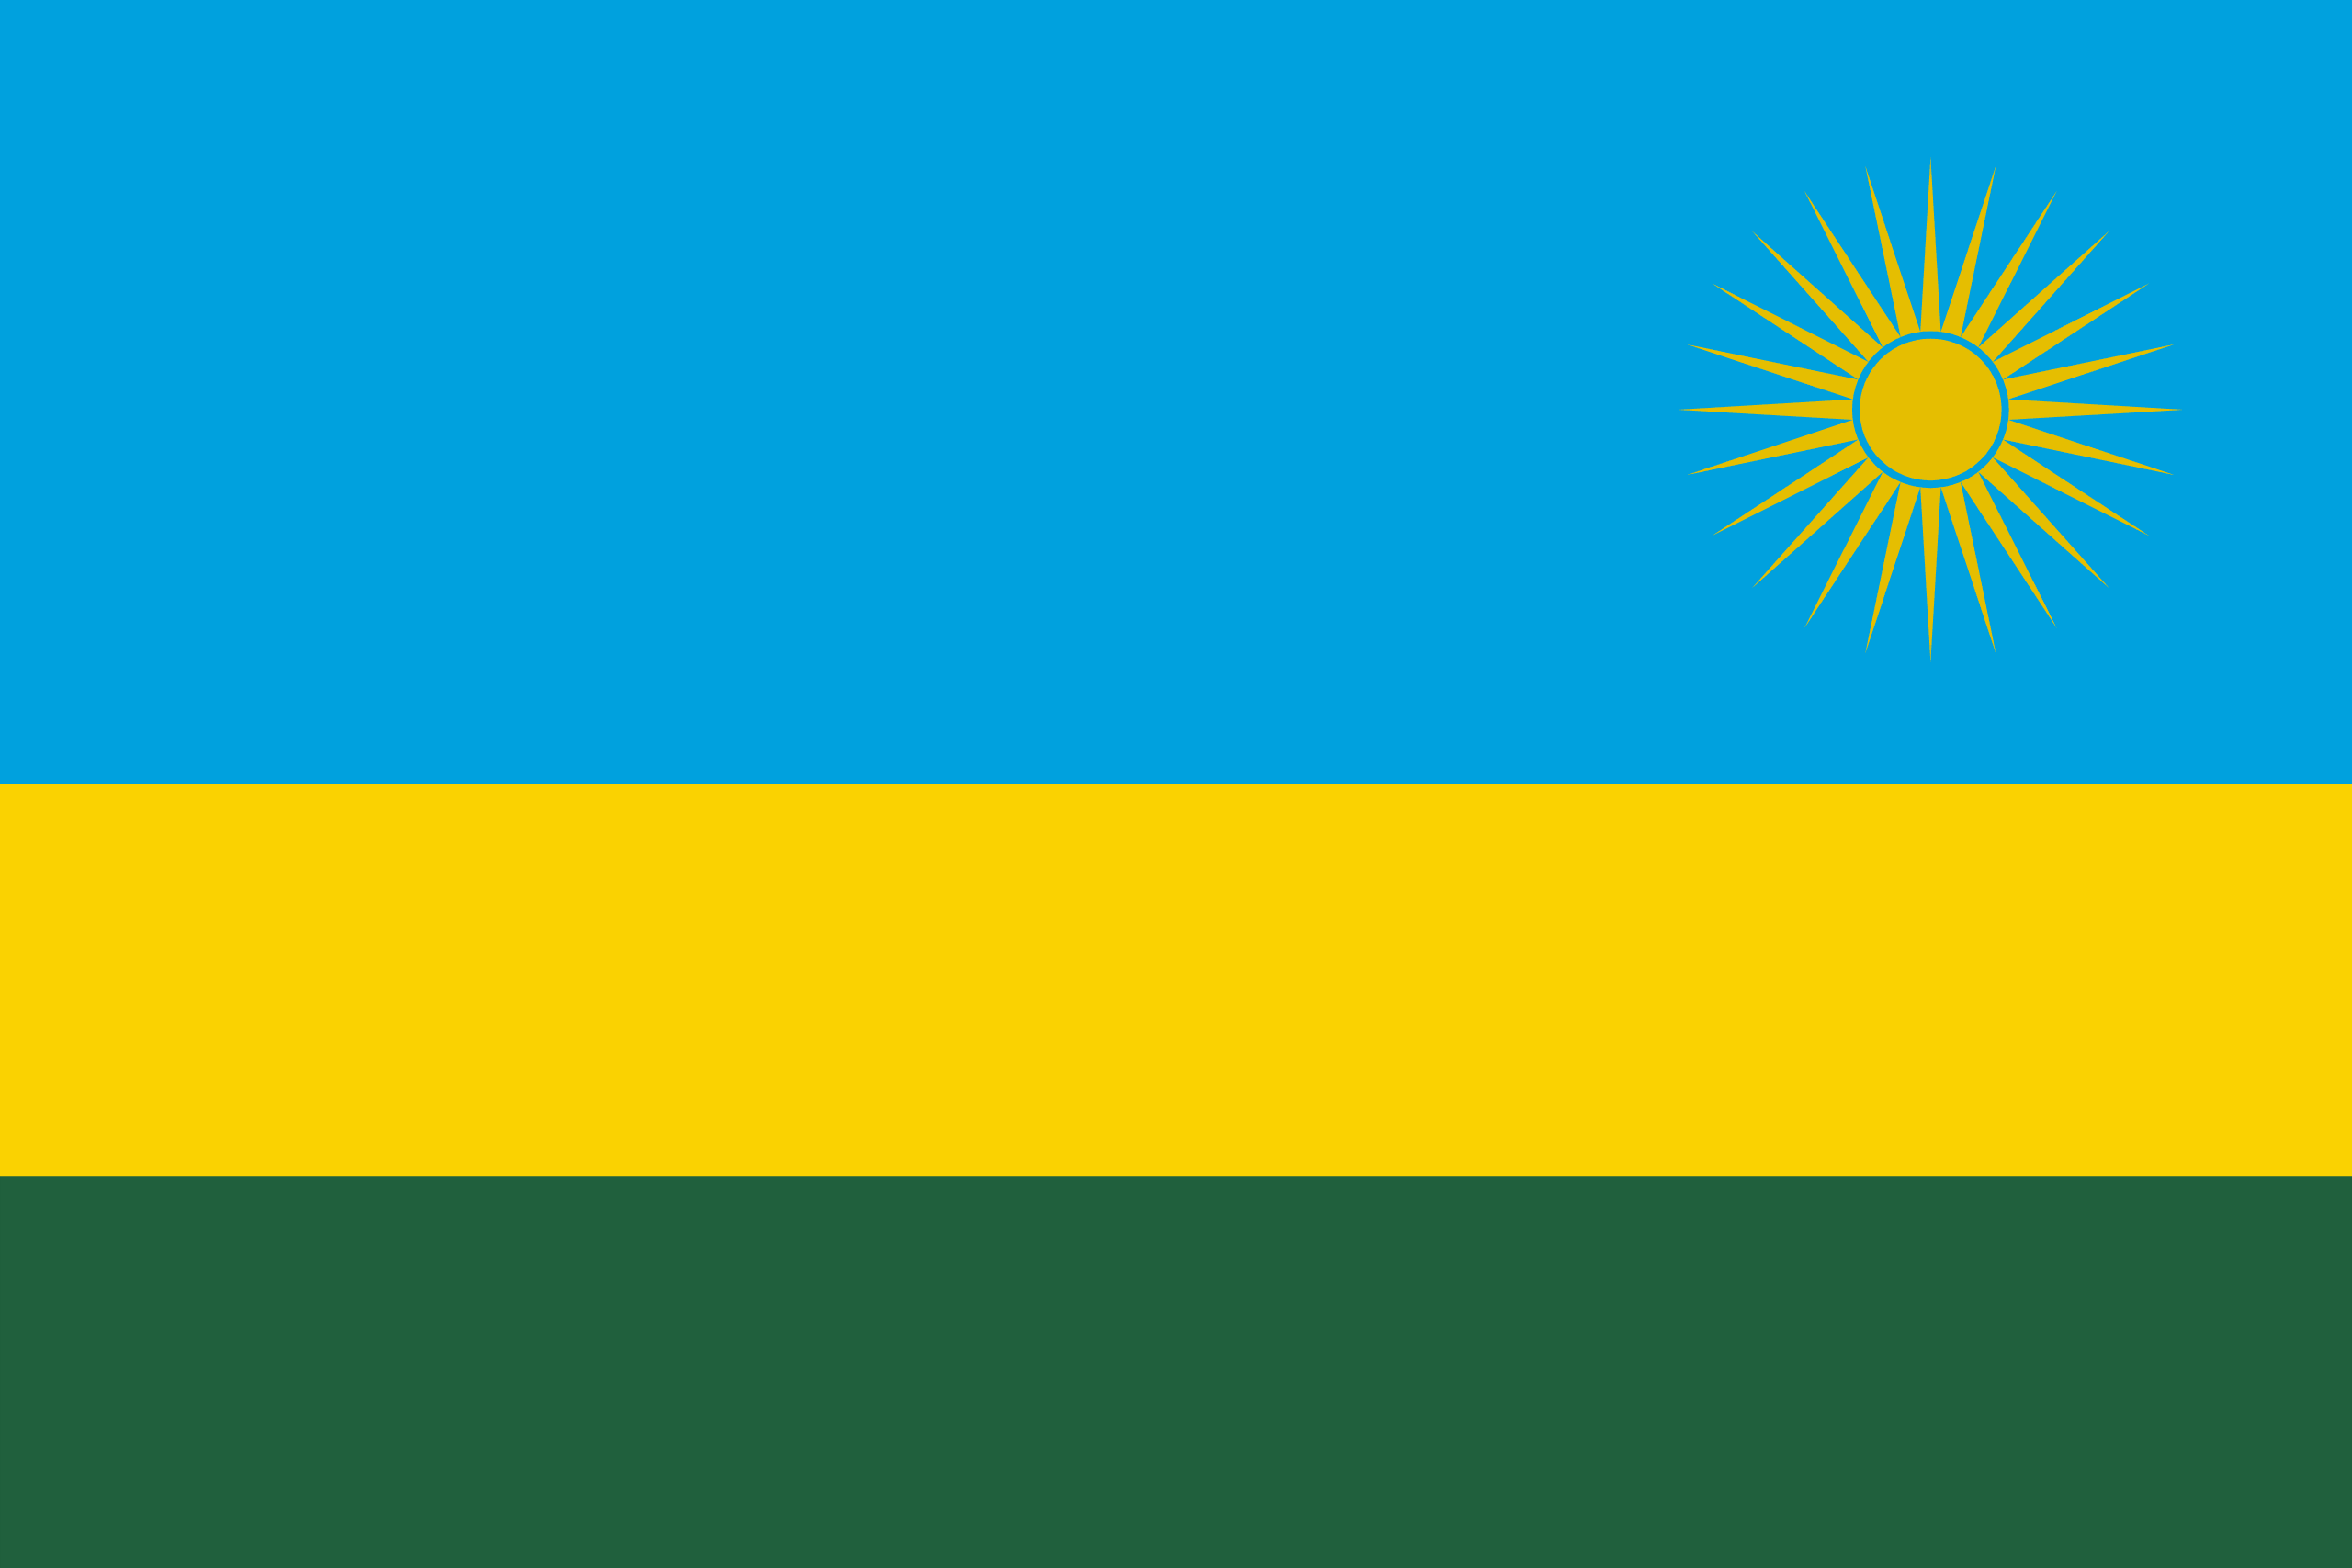

Saint Barthélemy


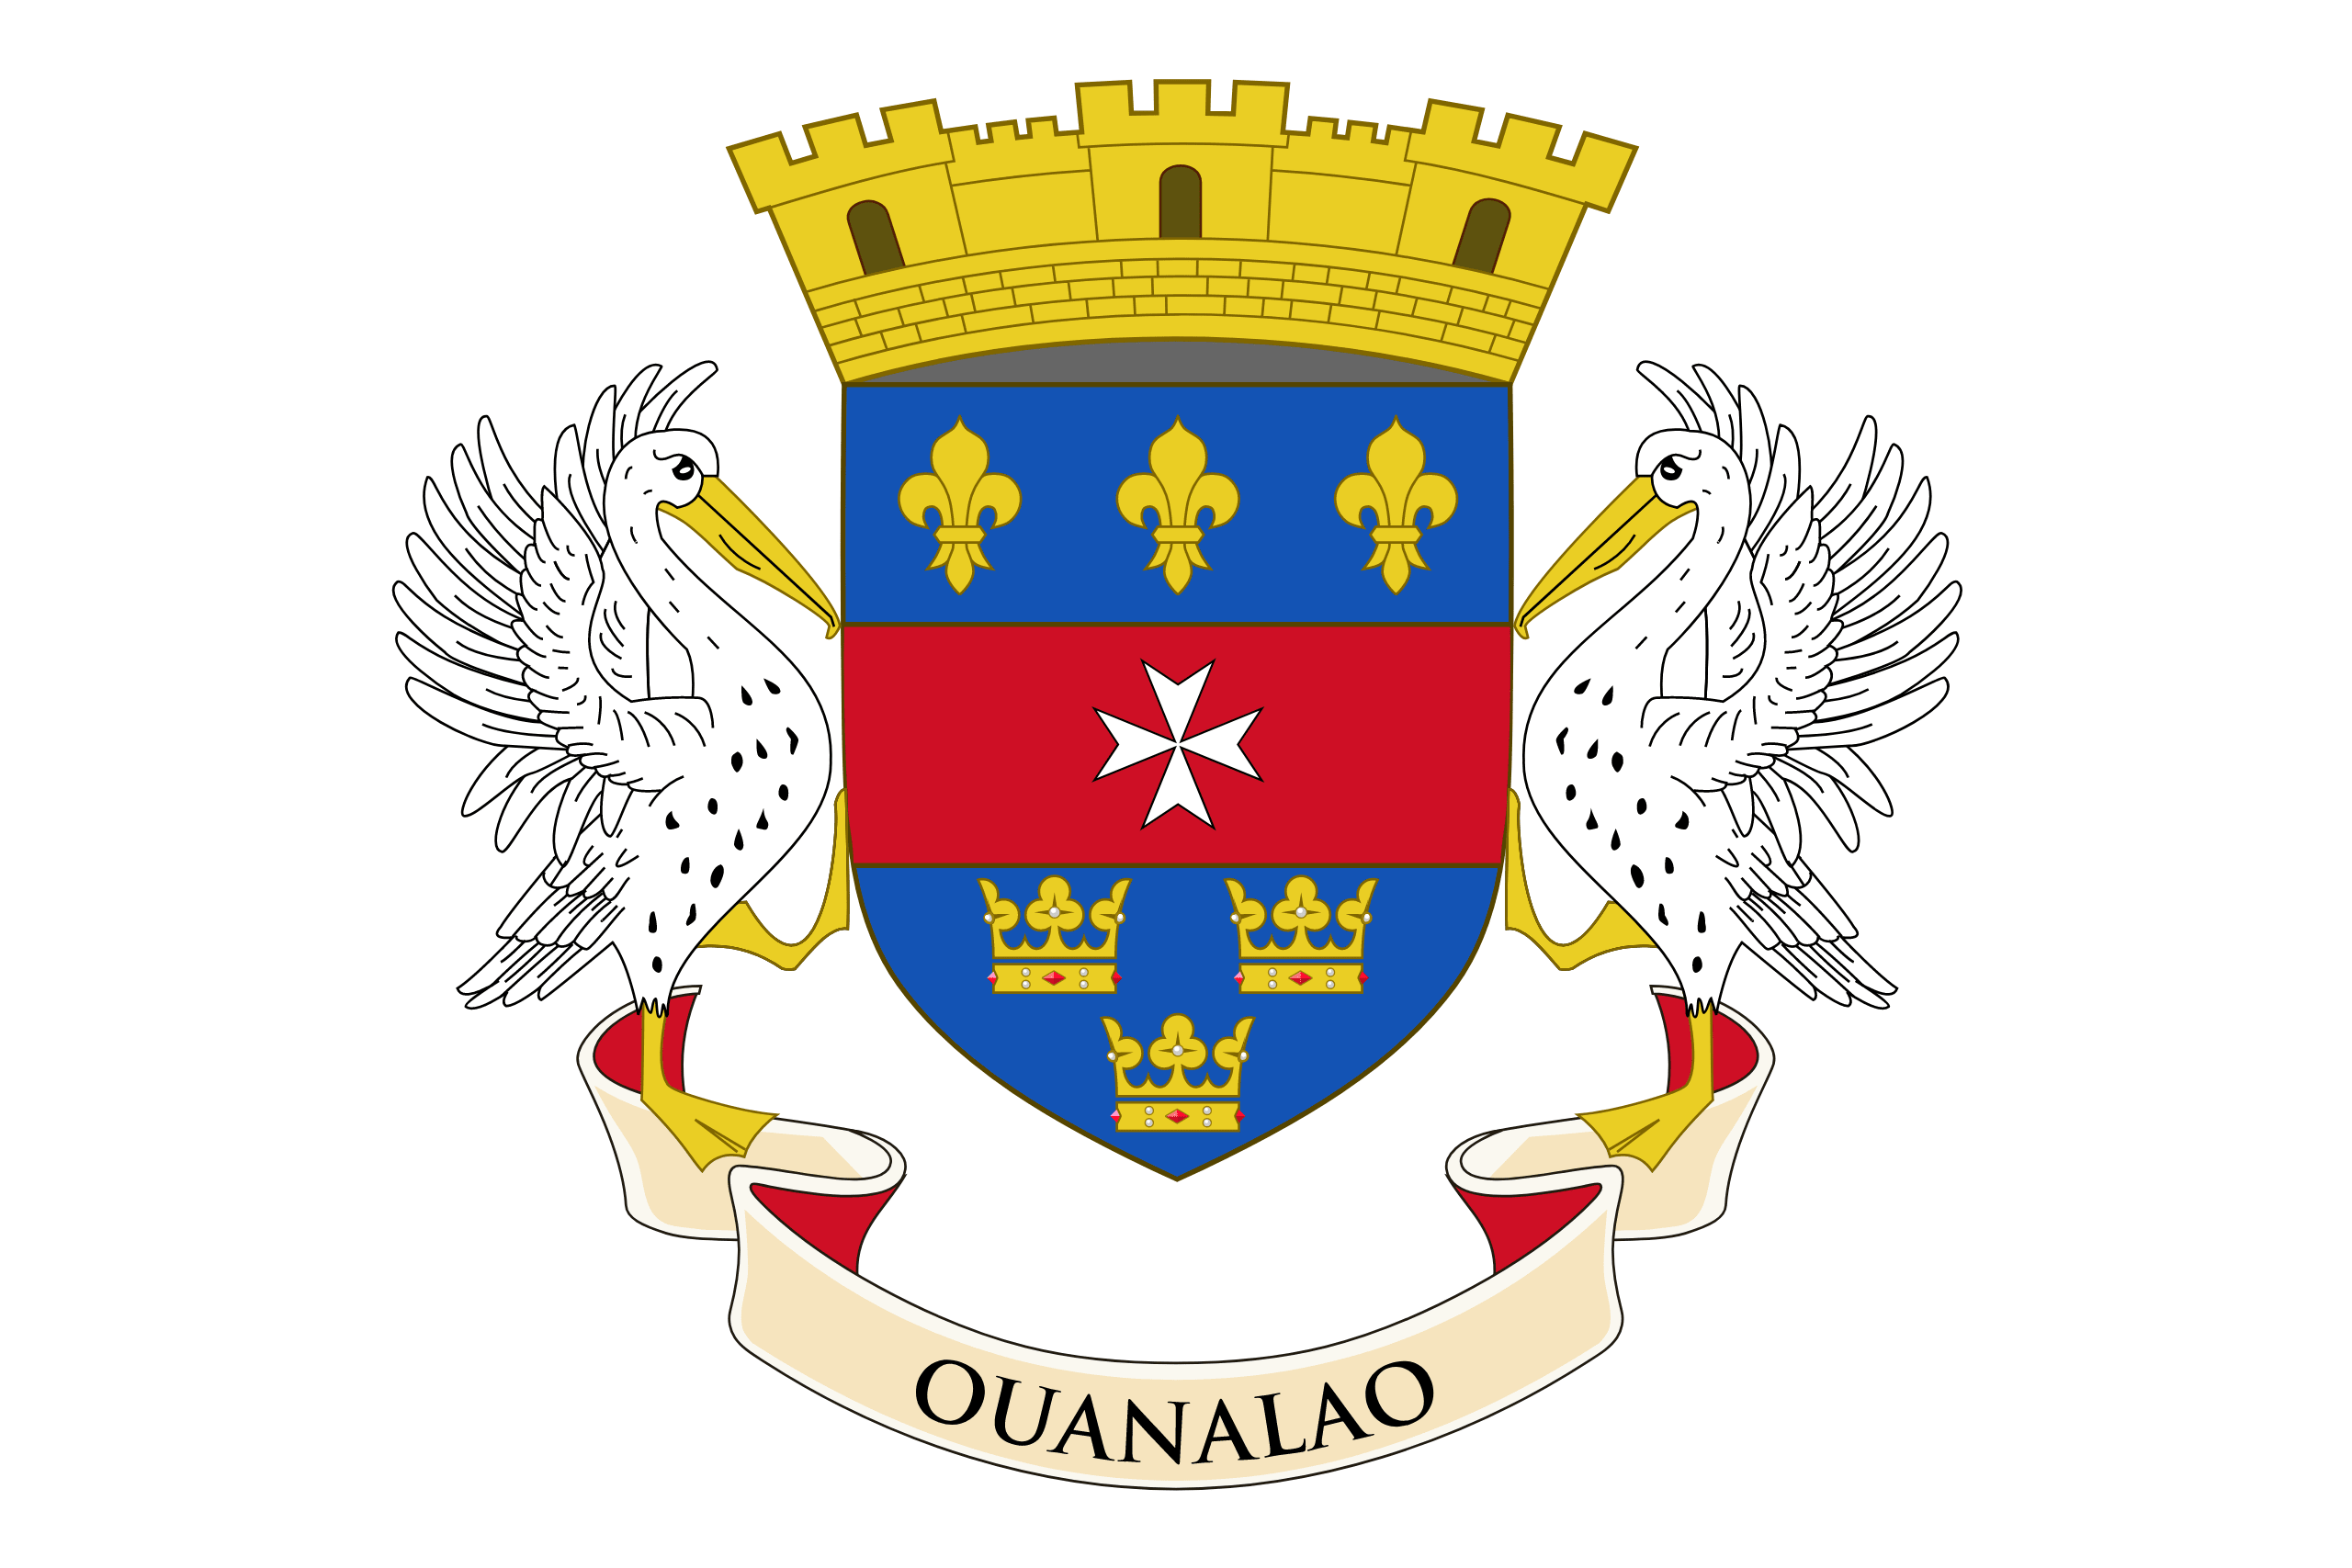

Saint Helena, Ascension and Tristan da Cunha


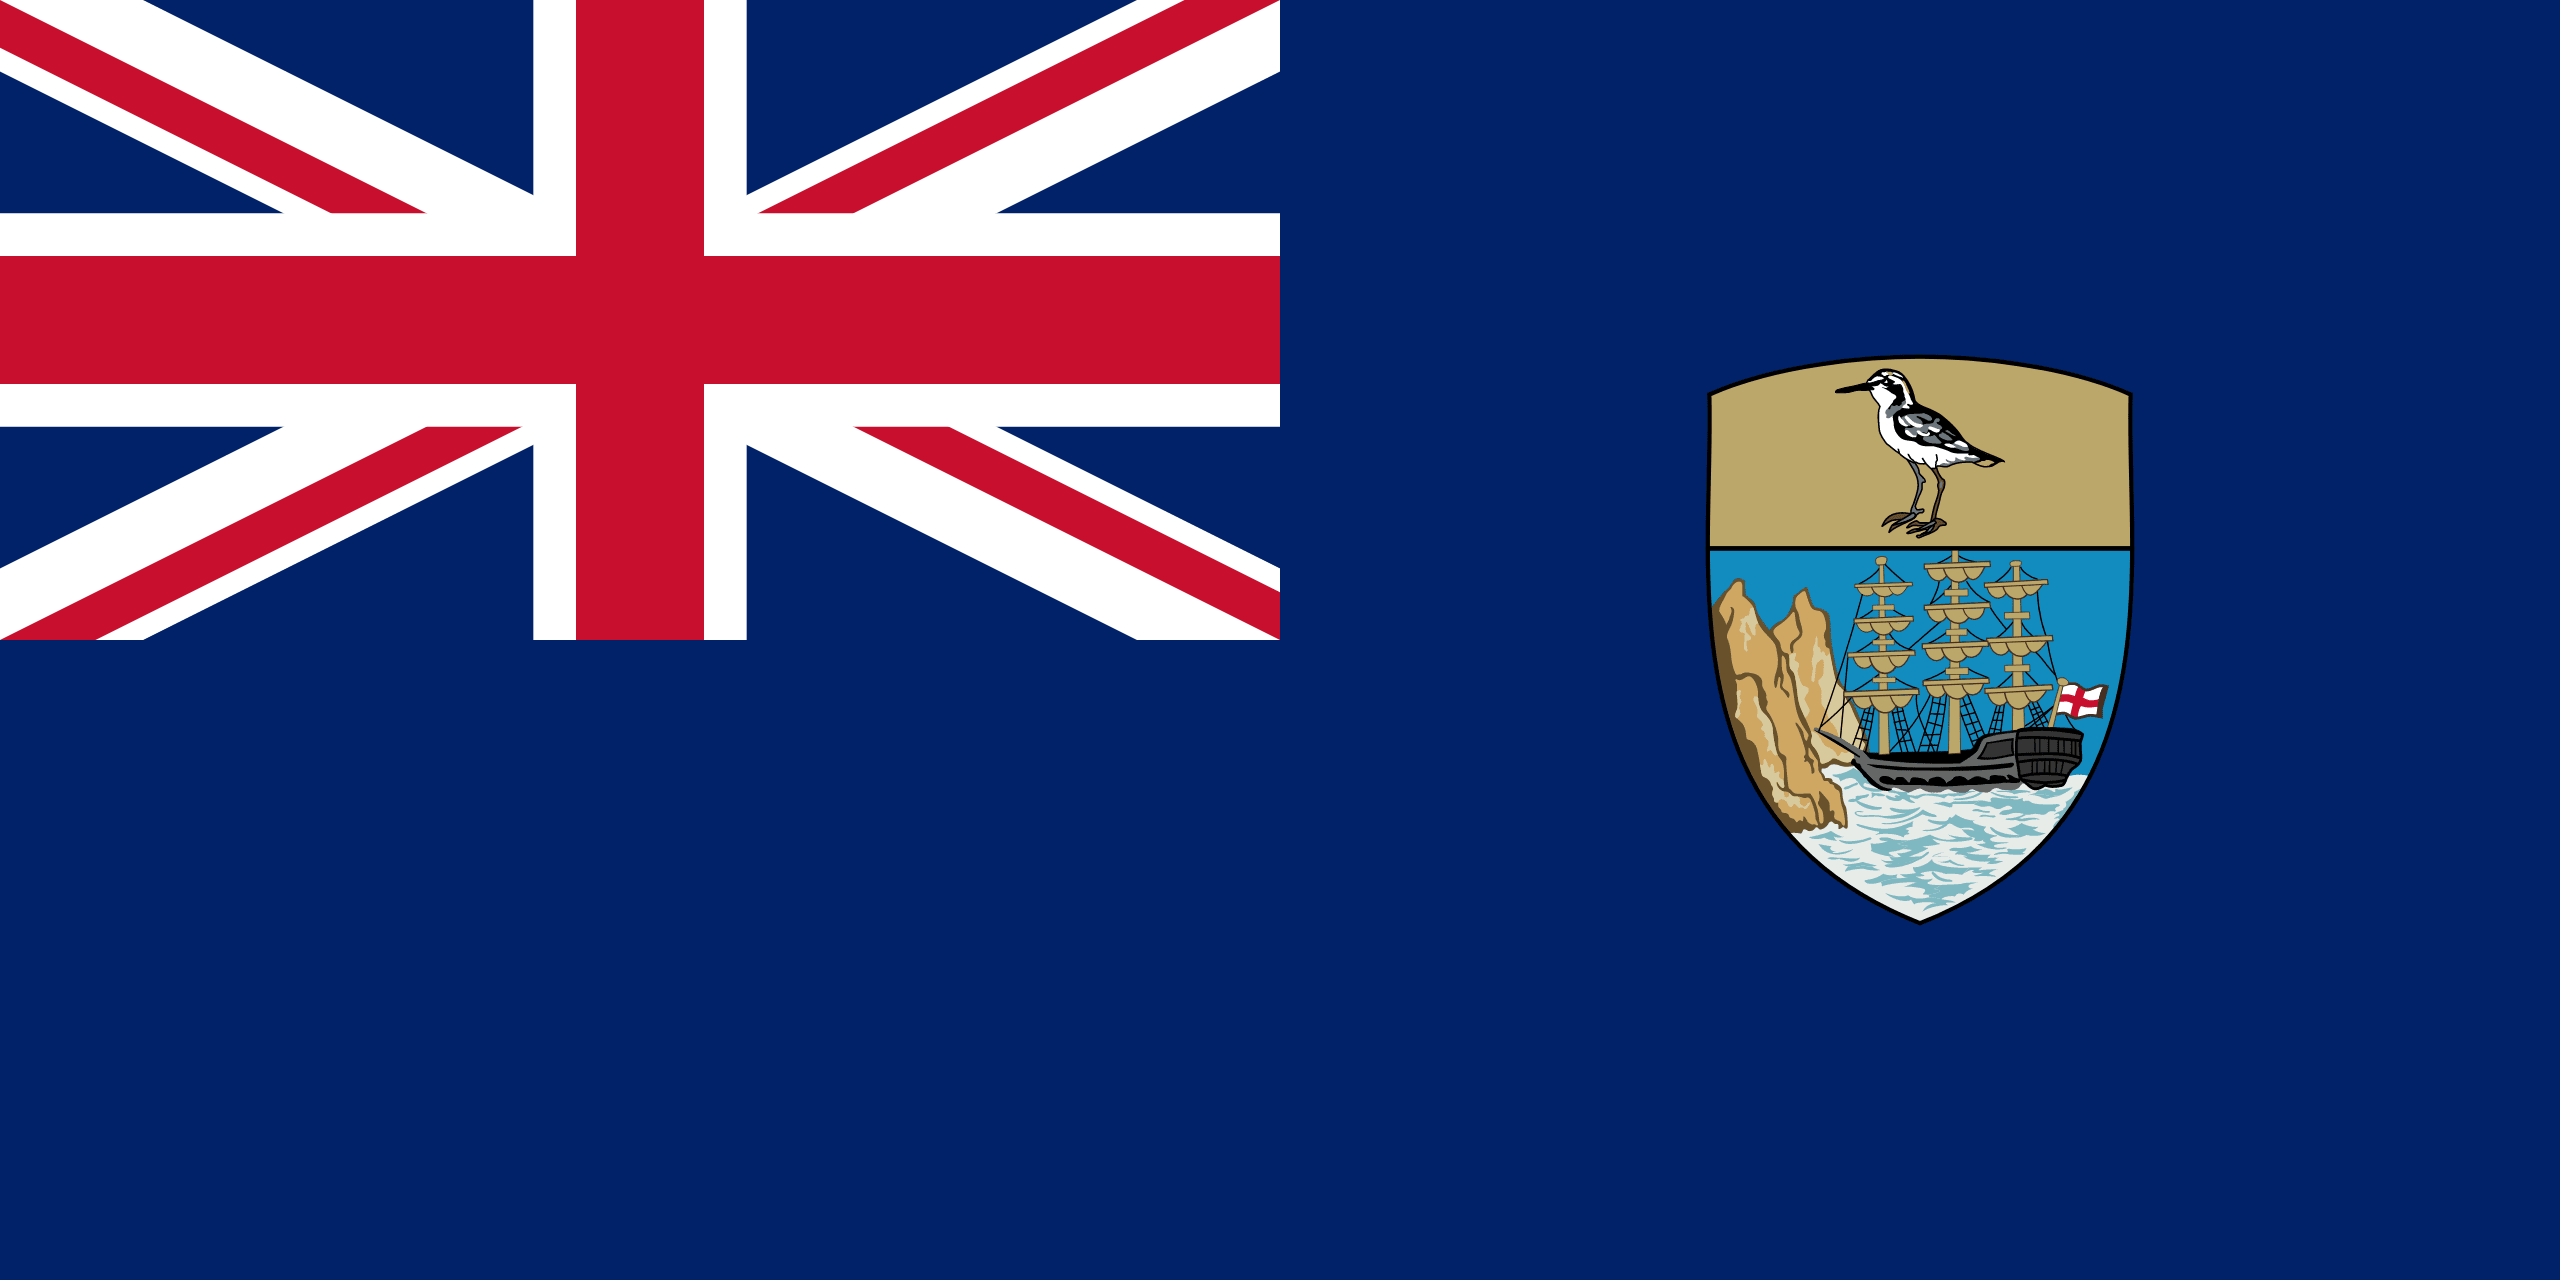

Saint Kitts and Nevis


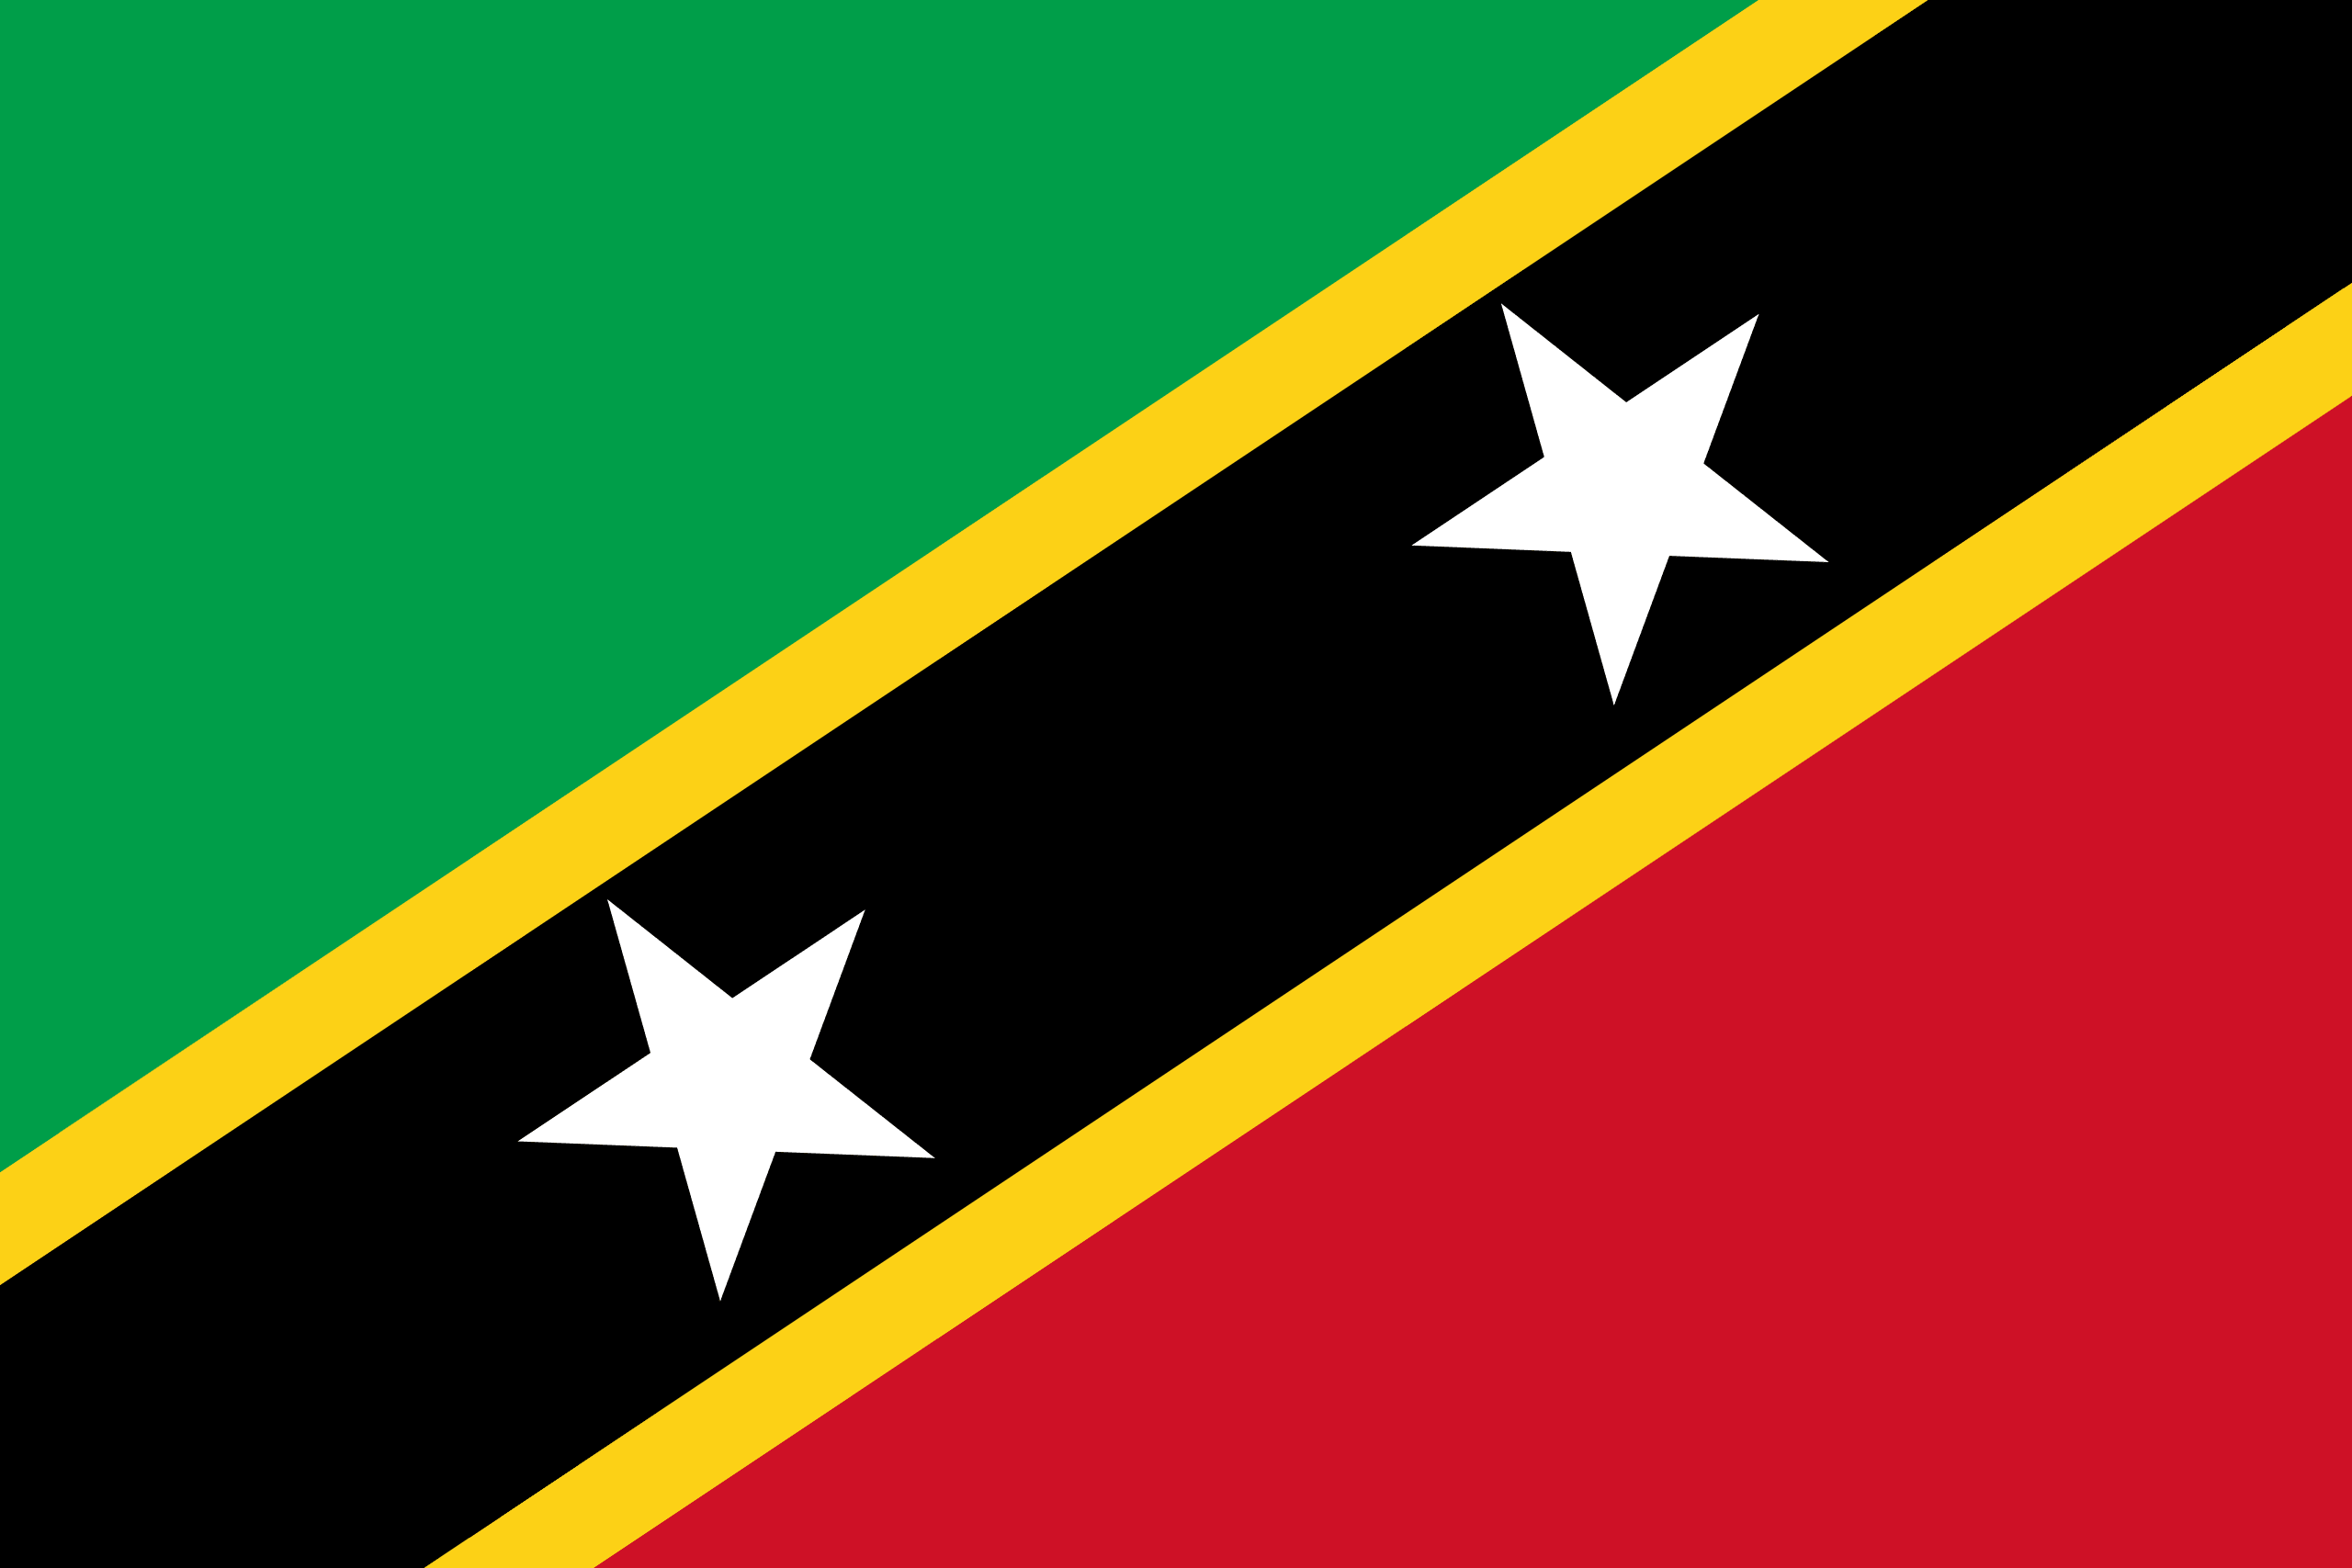

Saint Lucia


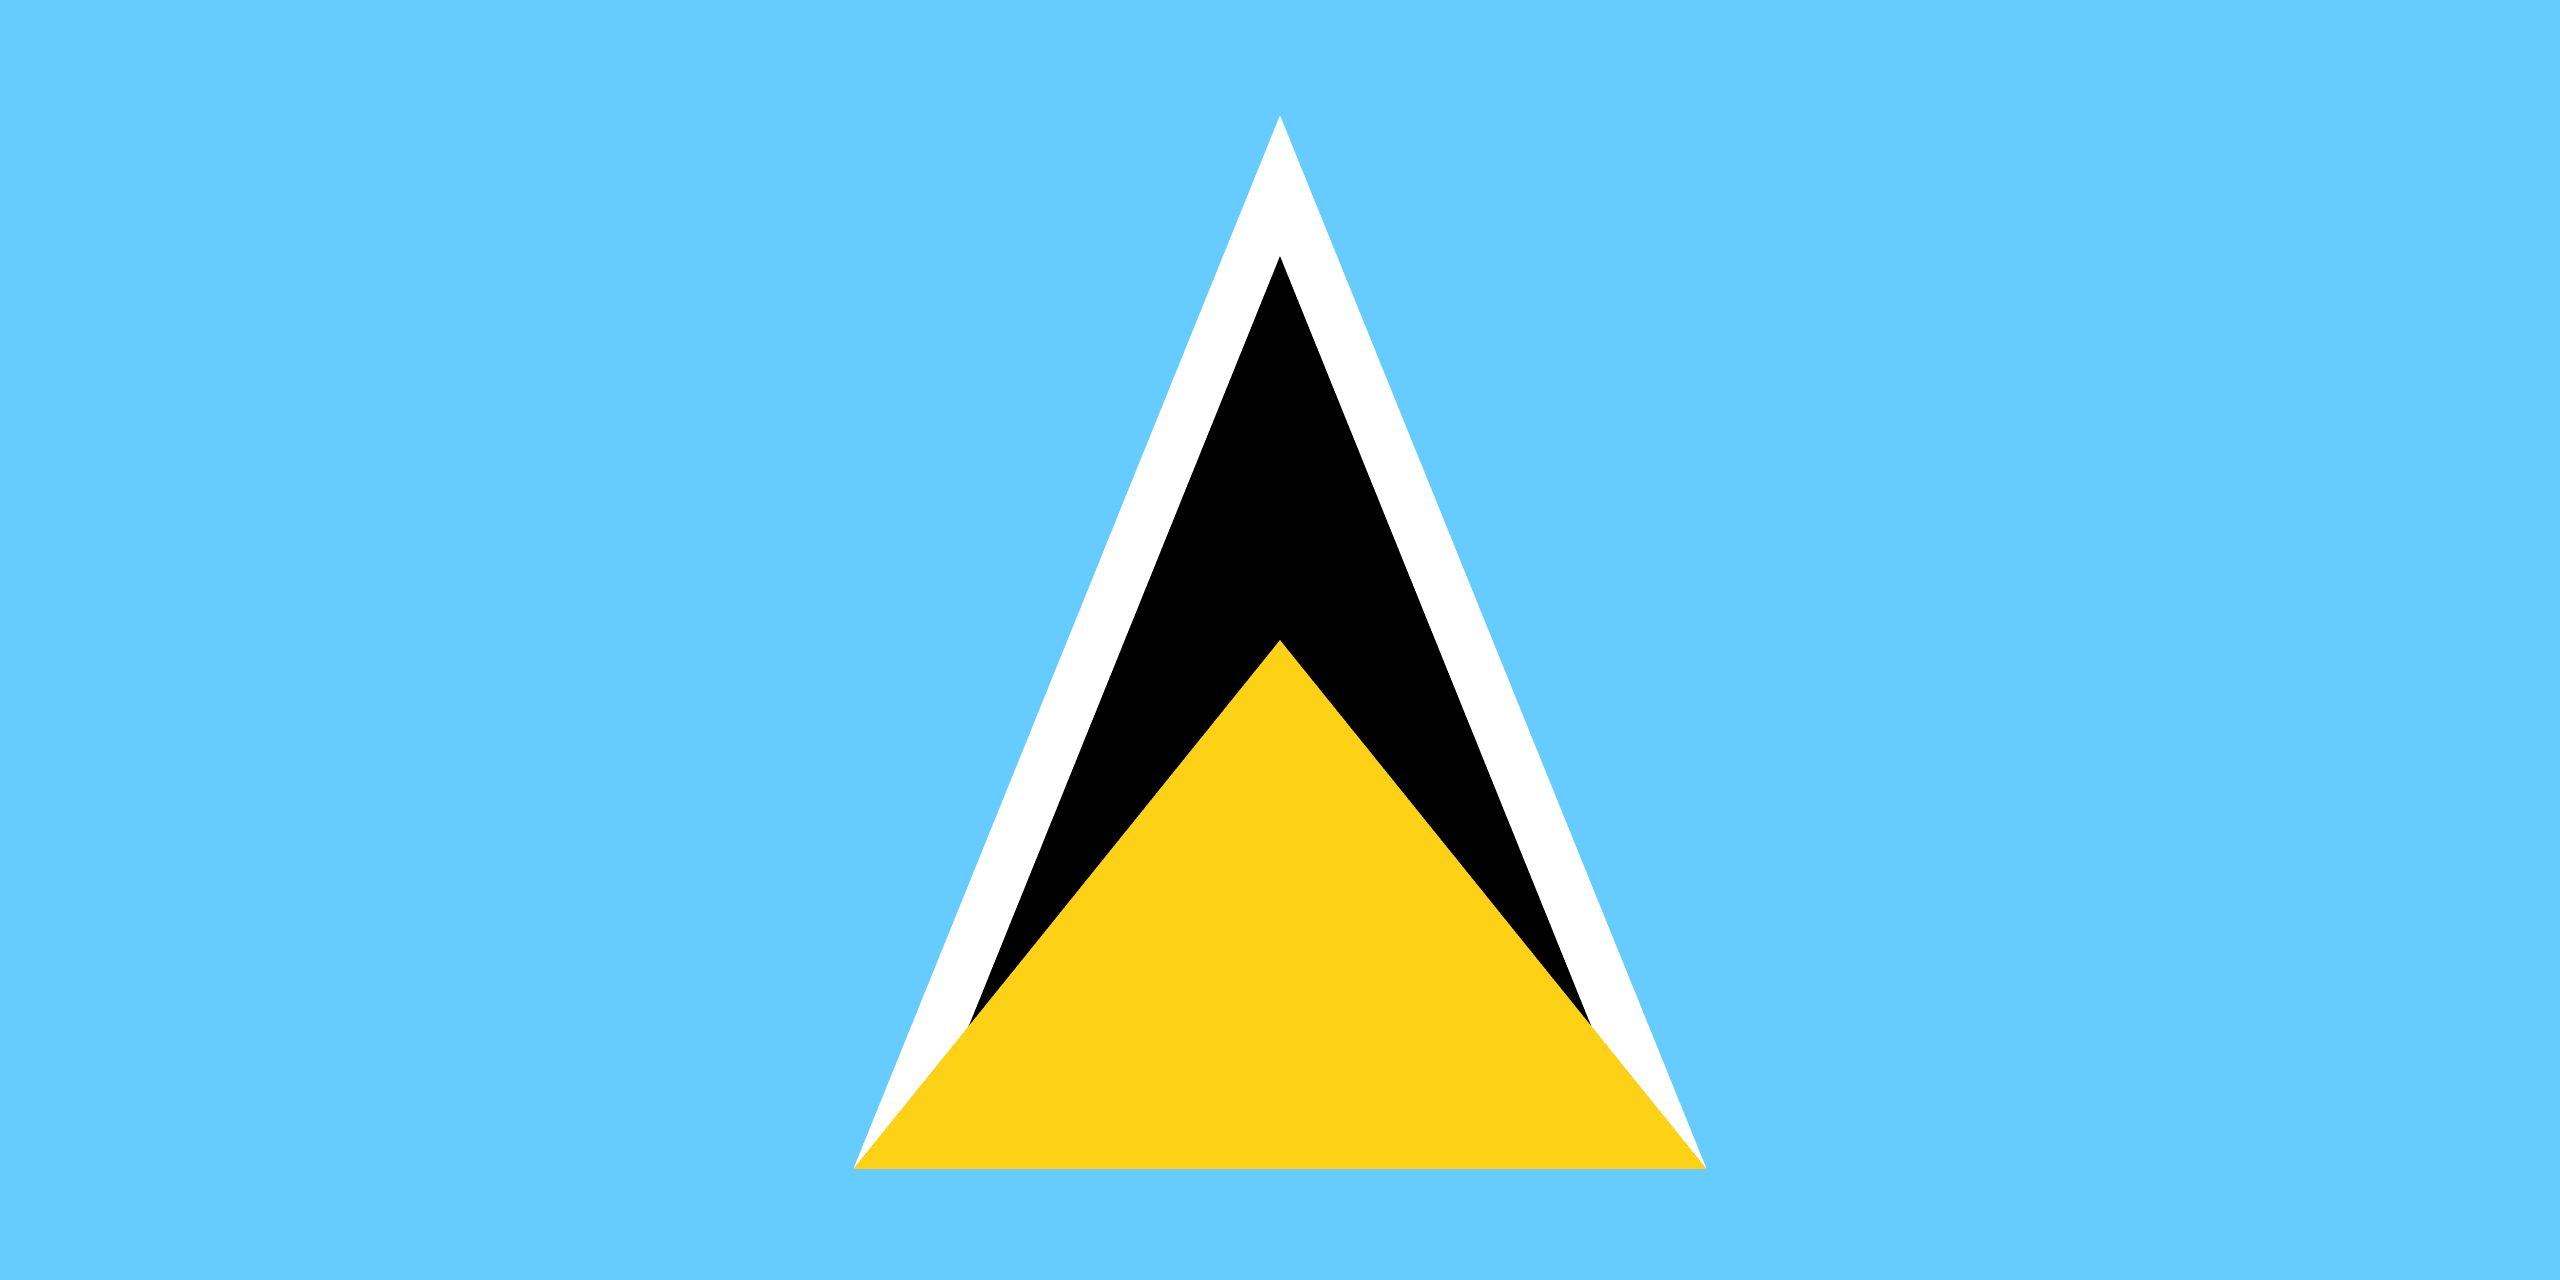

Saint Martin


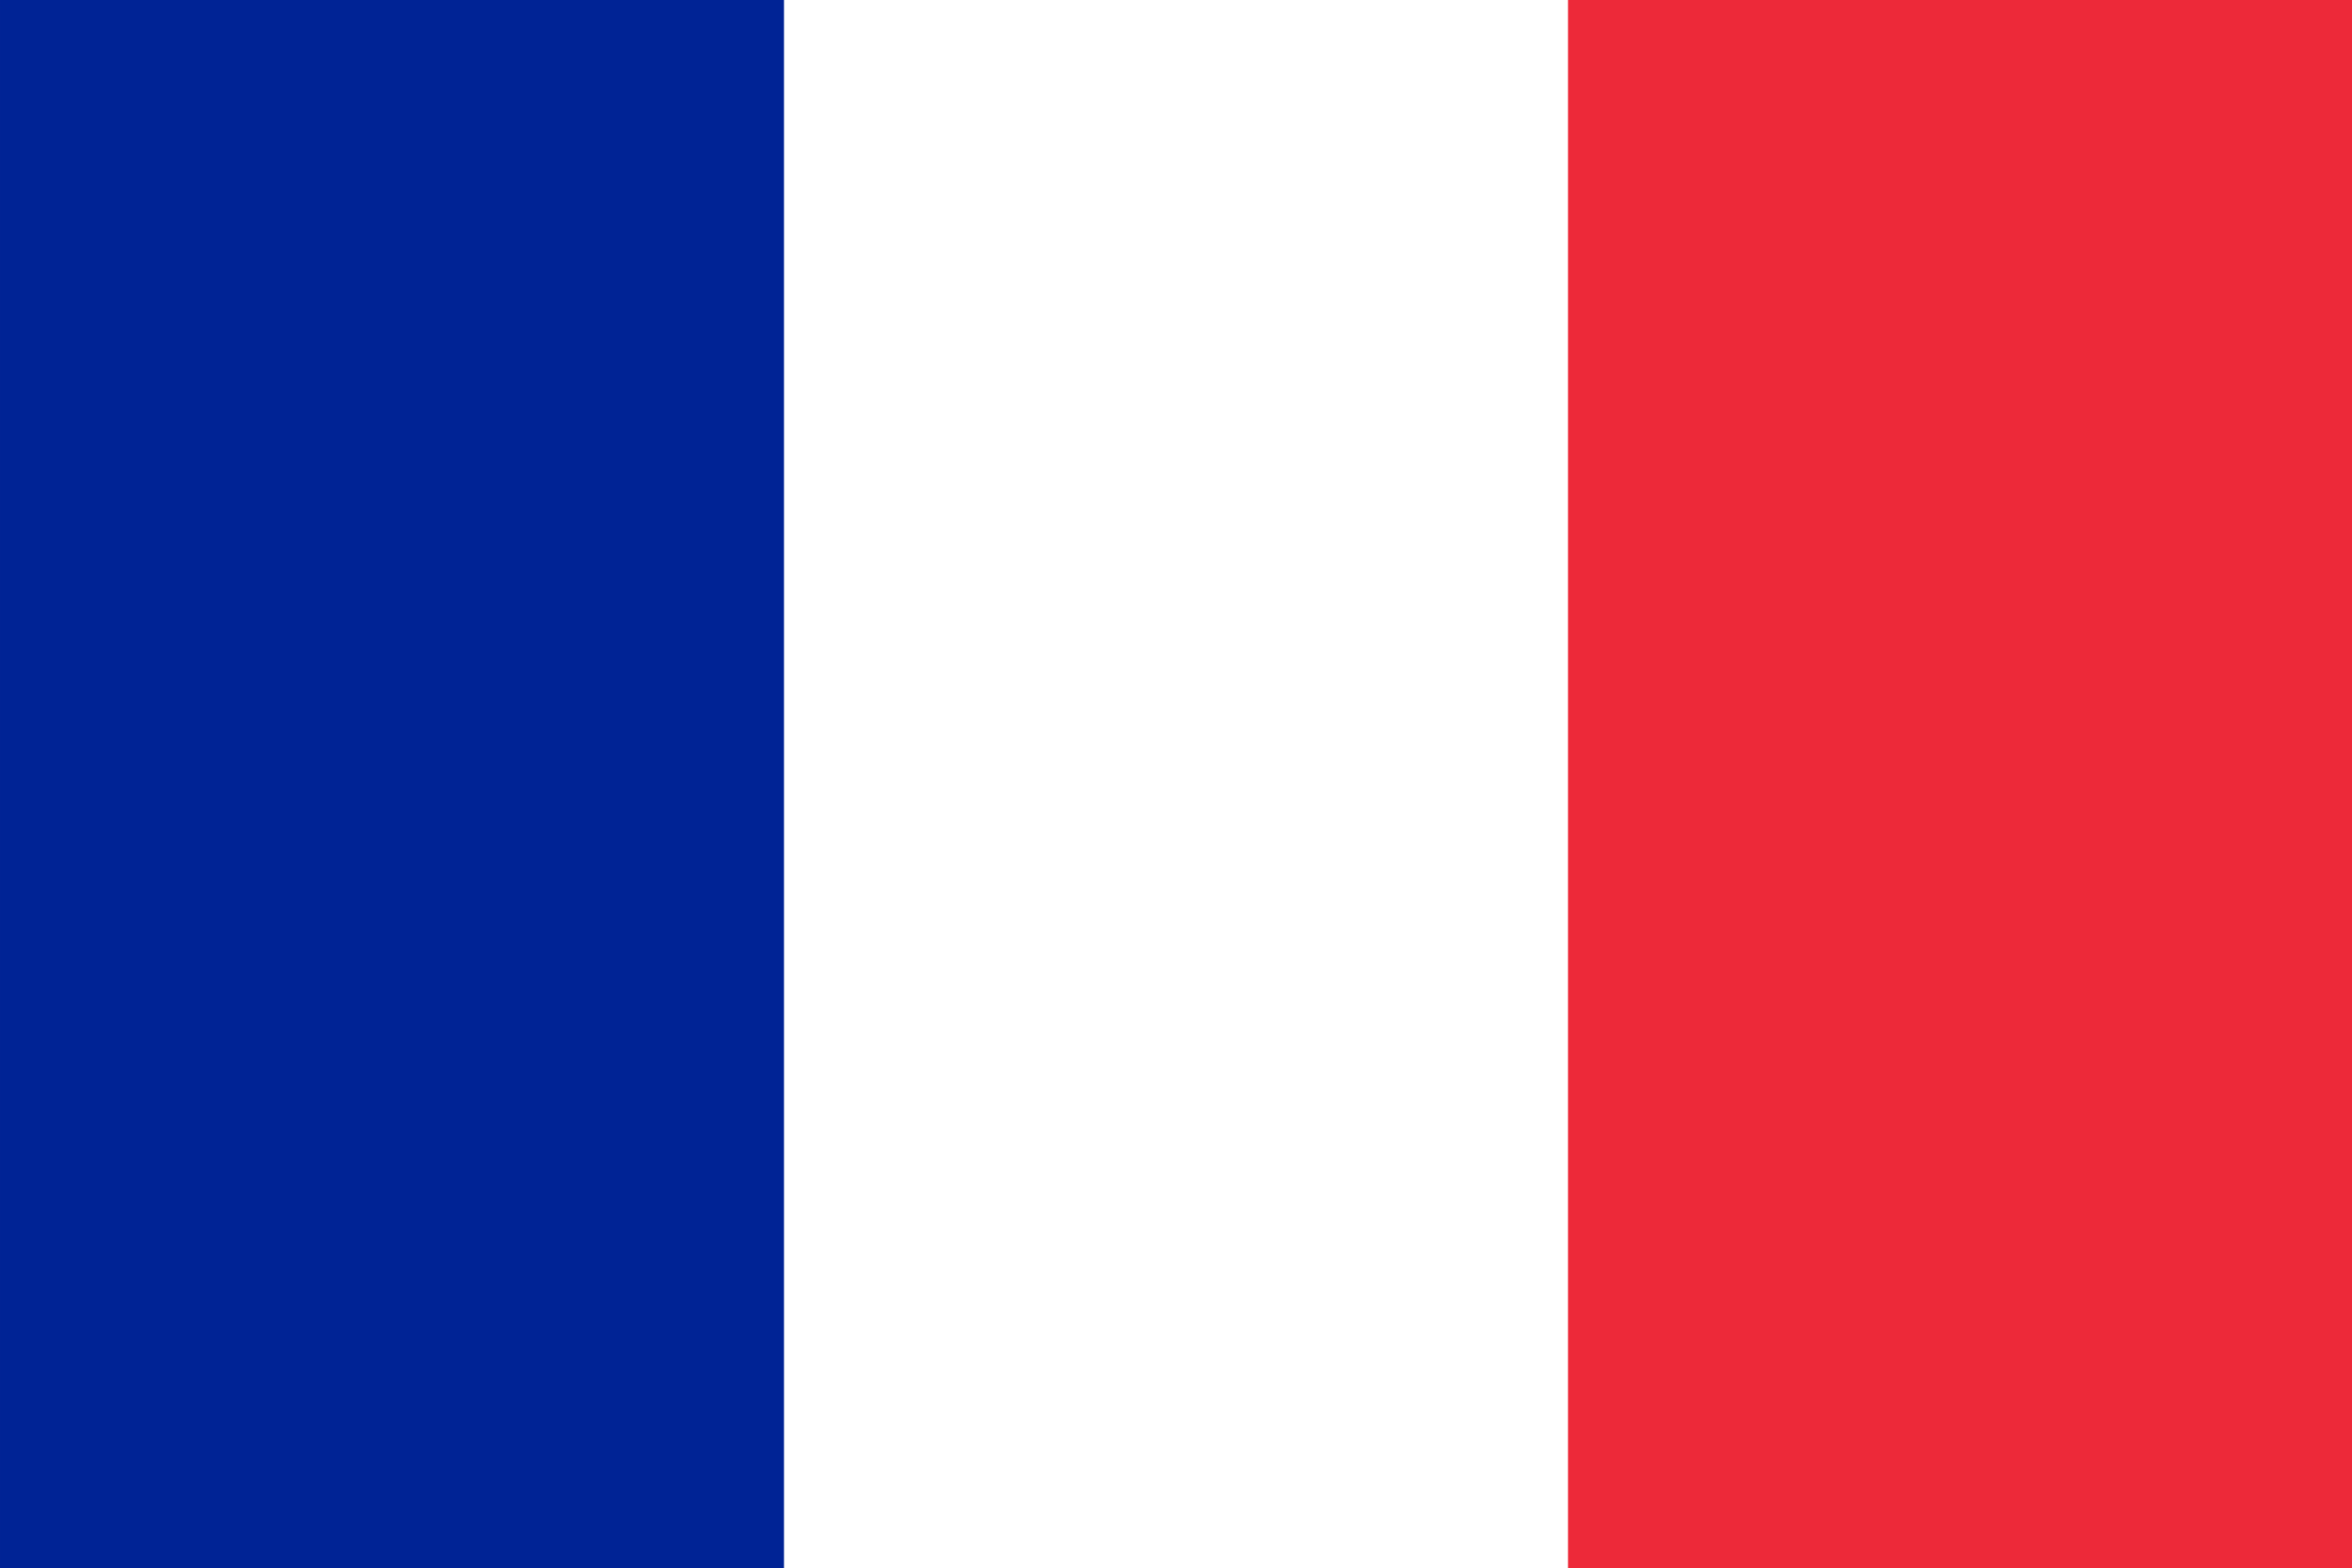

Saint Pierre and Miquelon


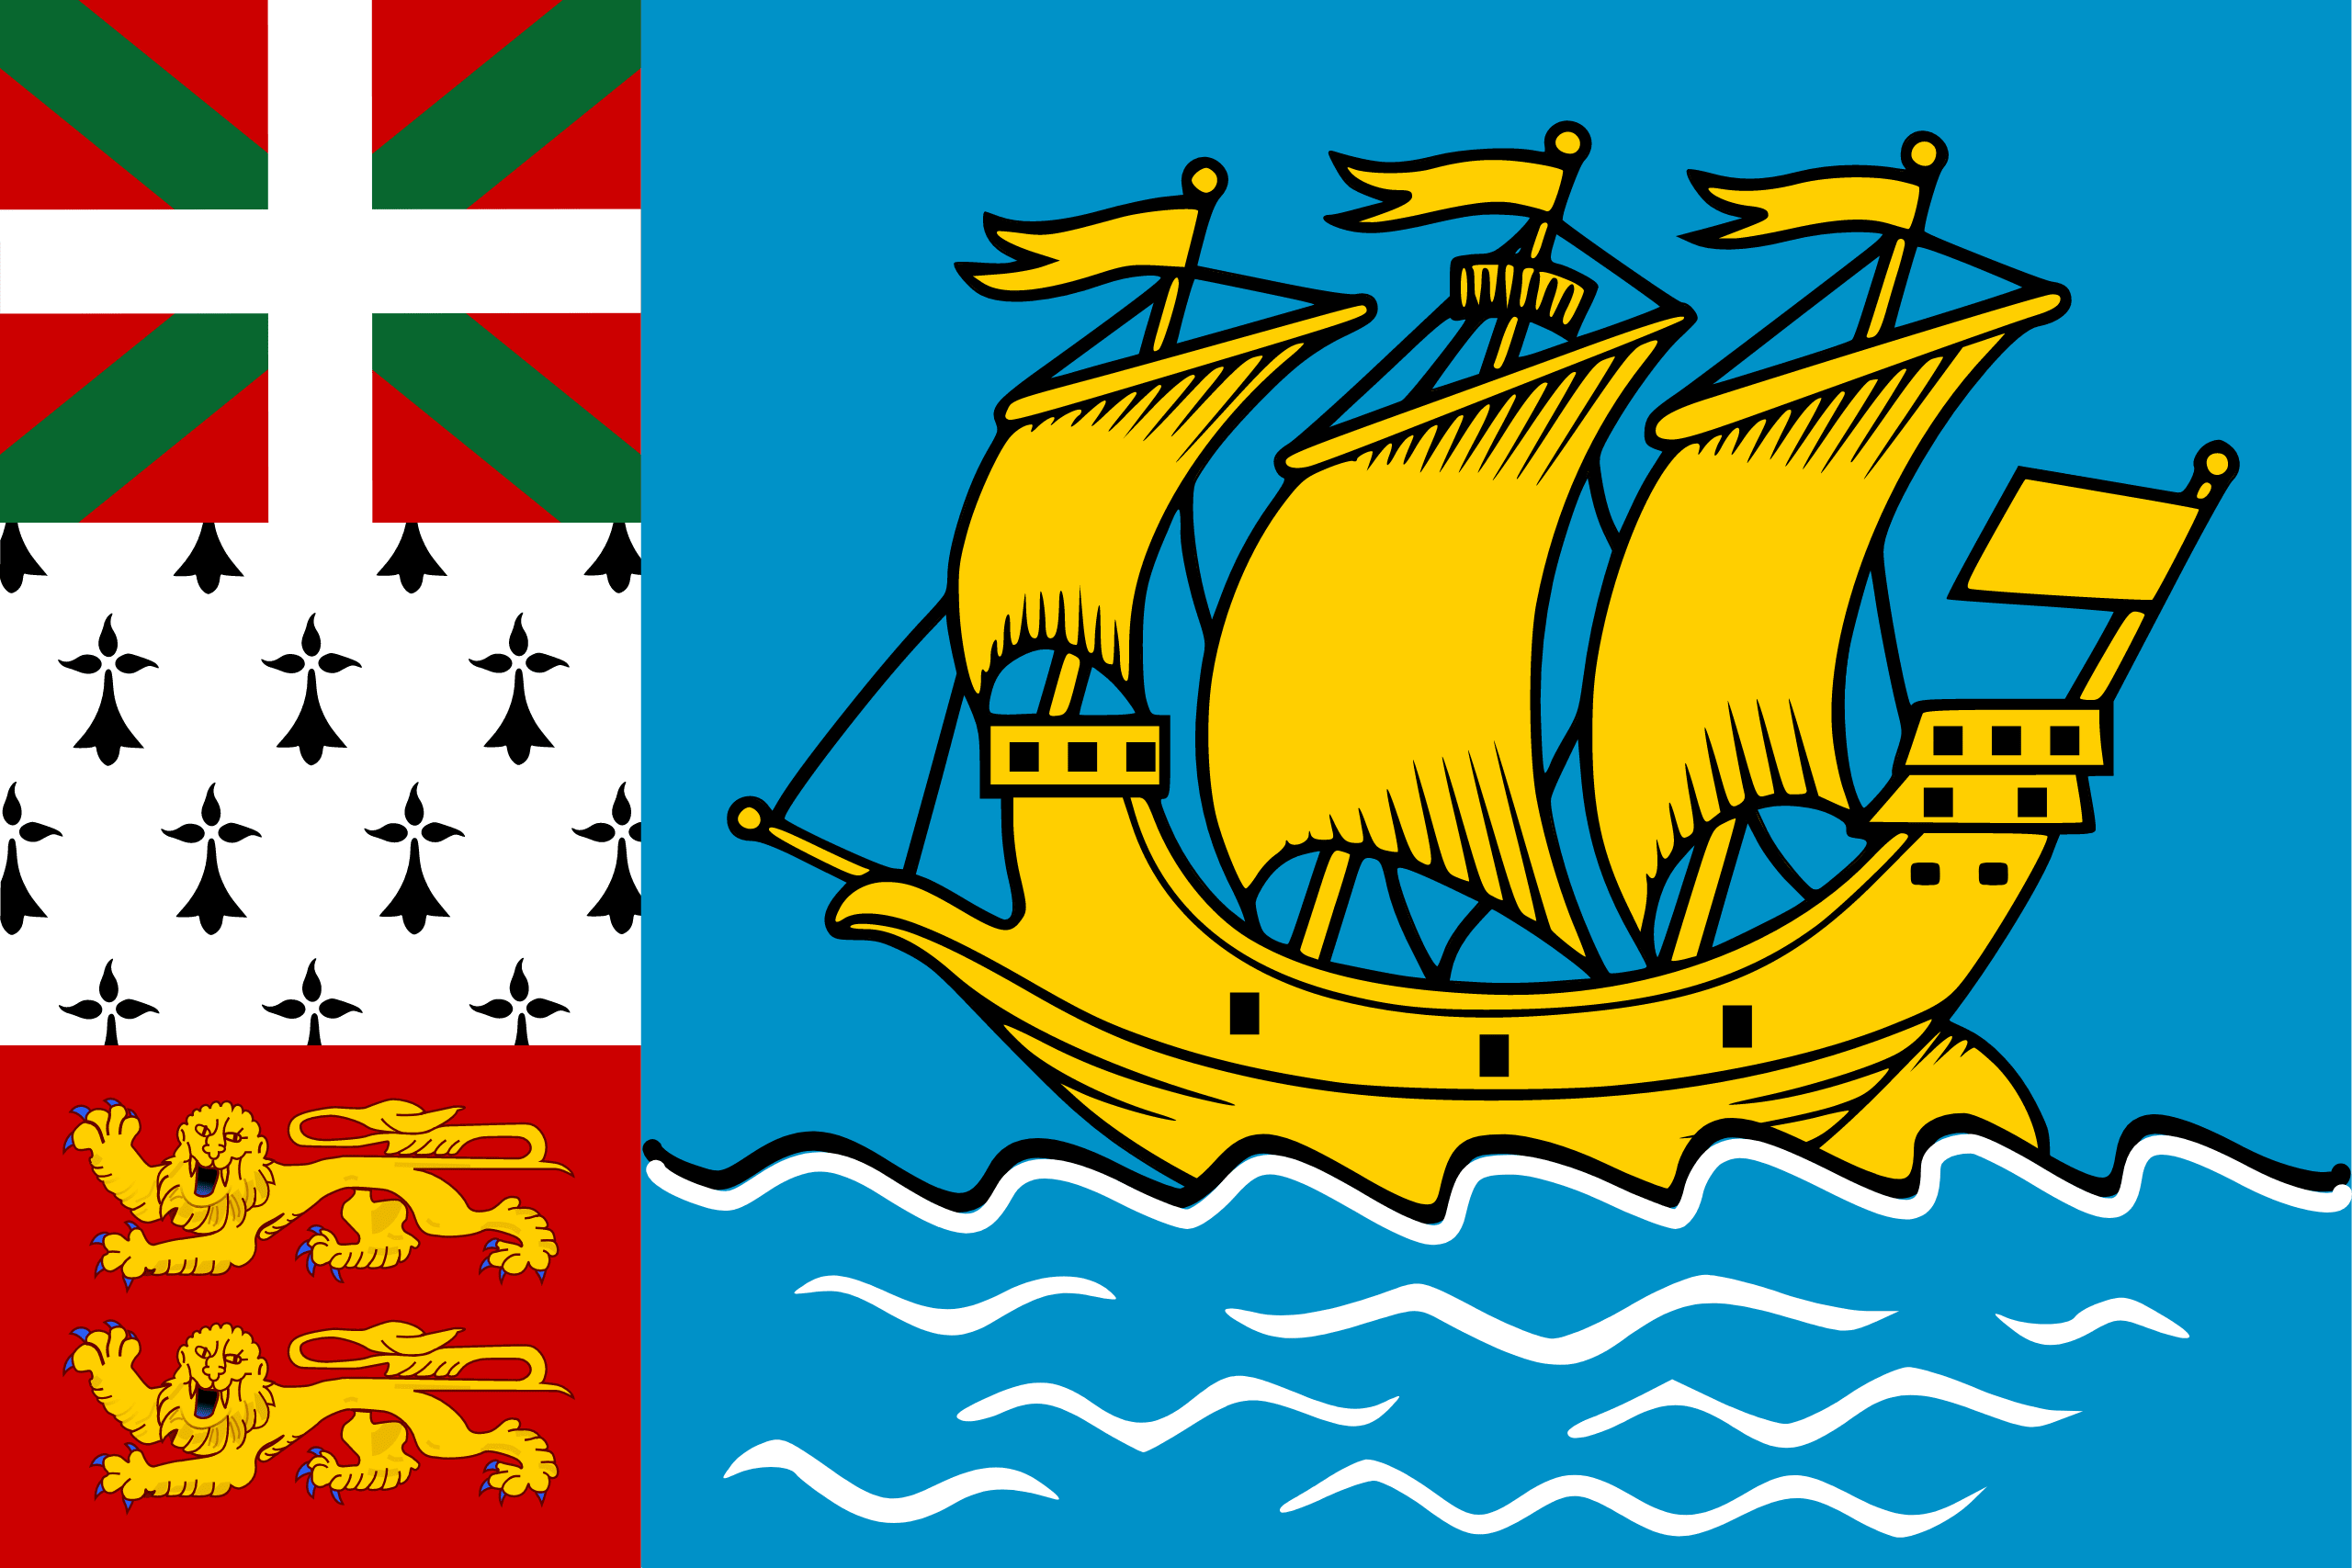

Saint Vincent and the Grenadines


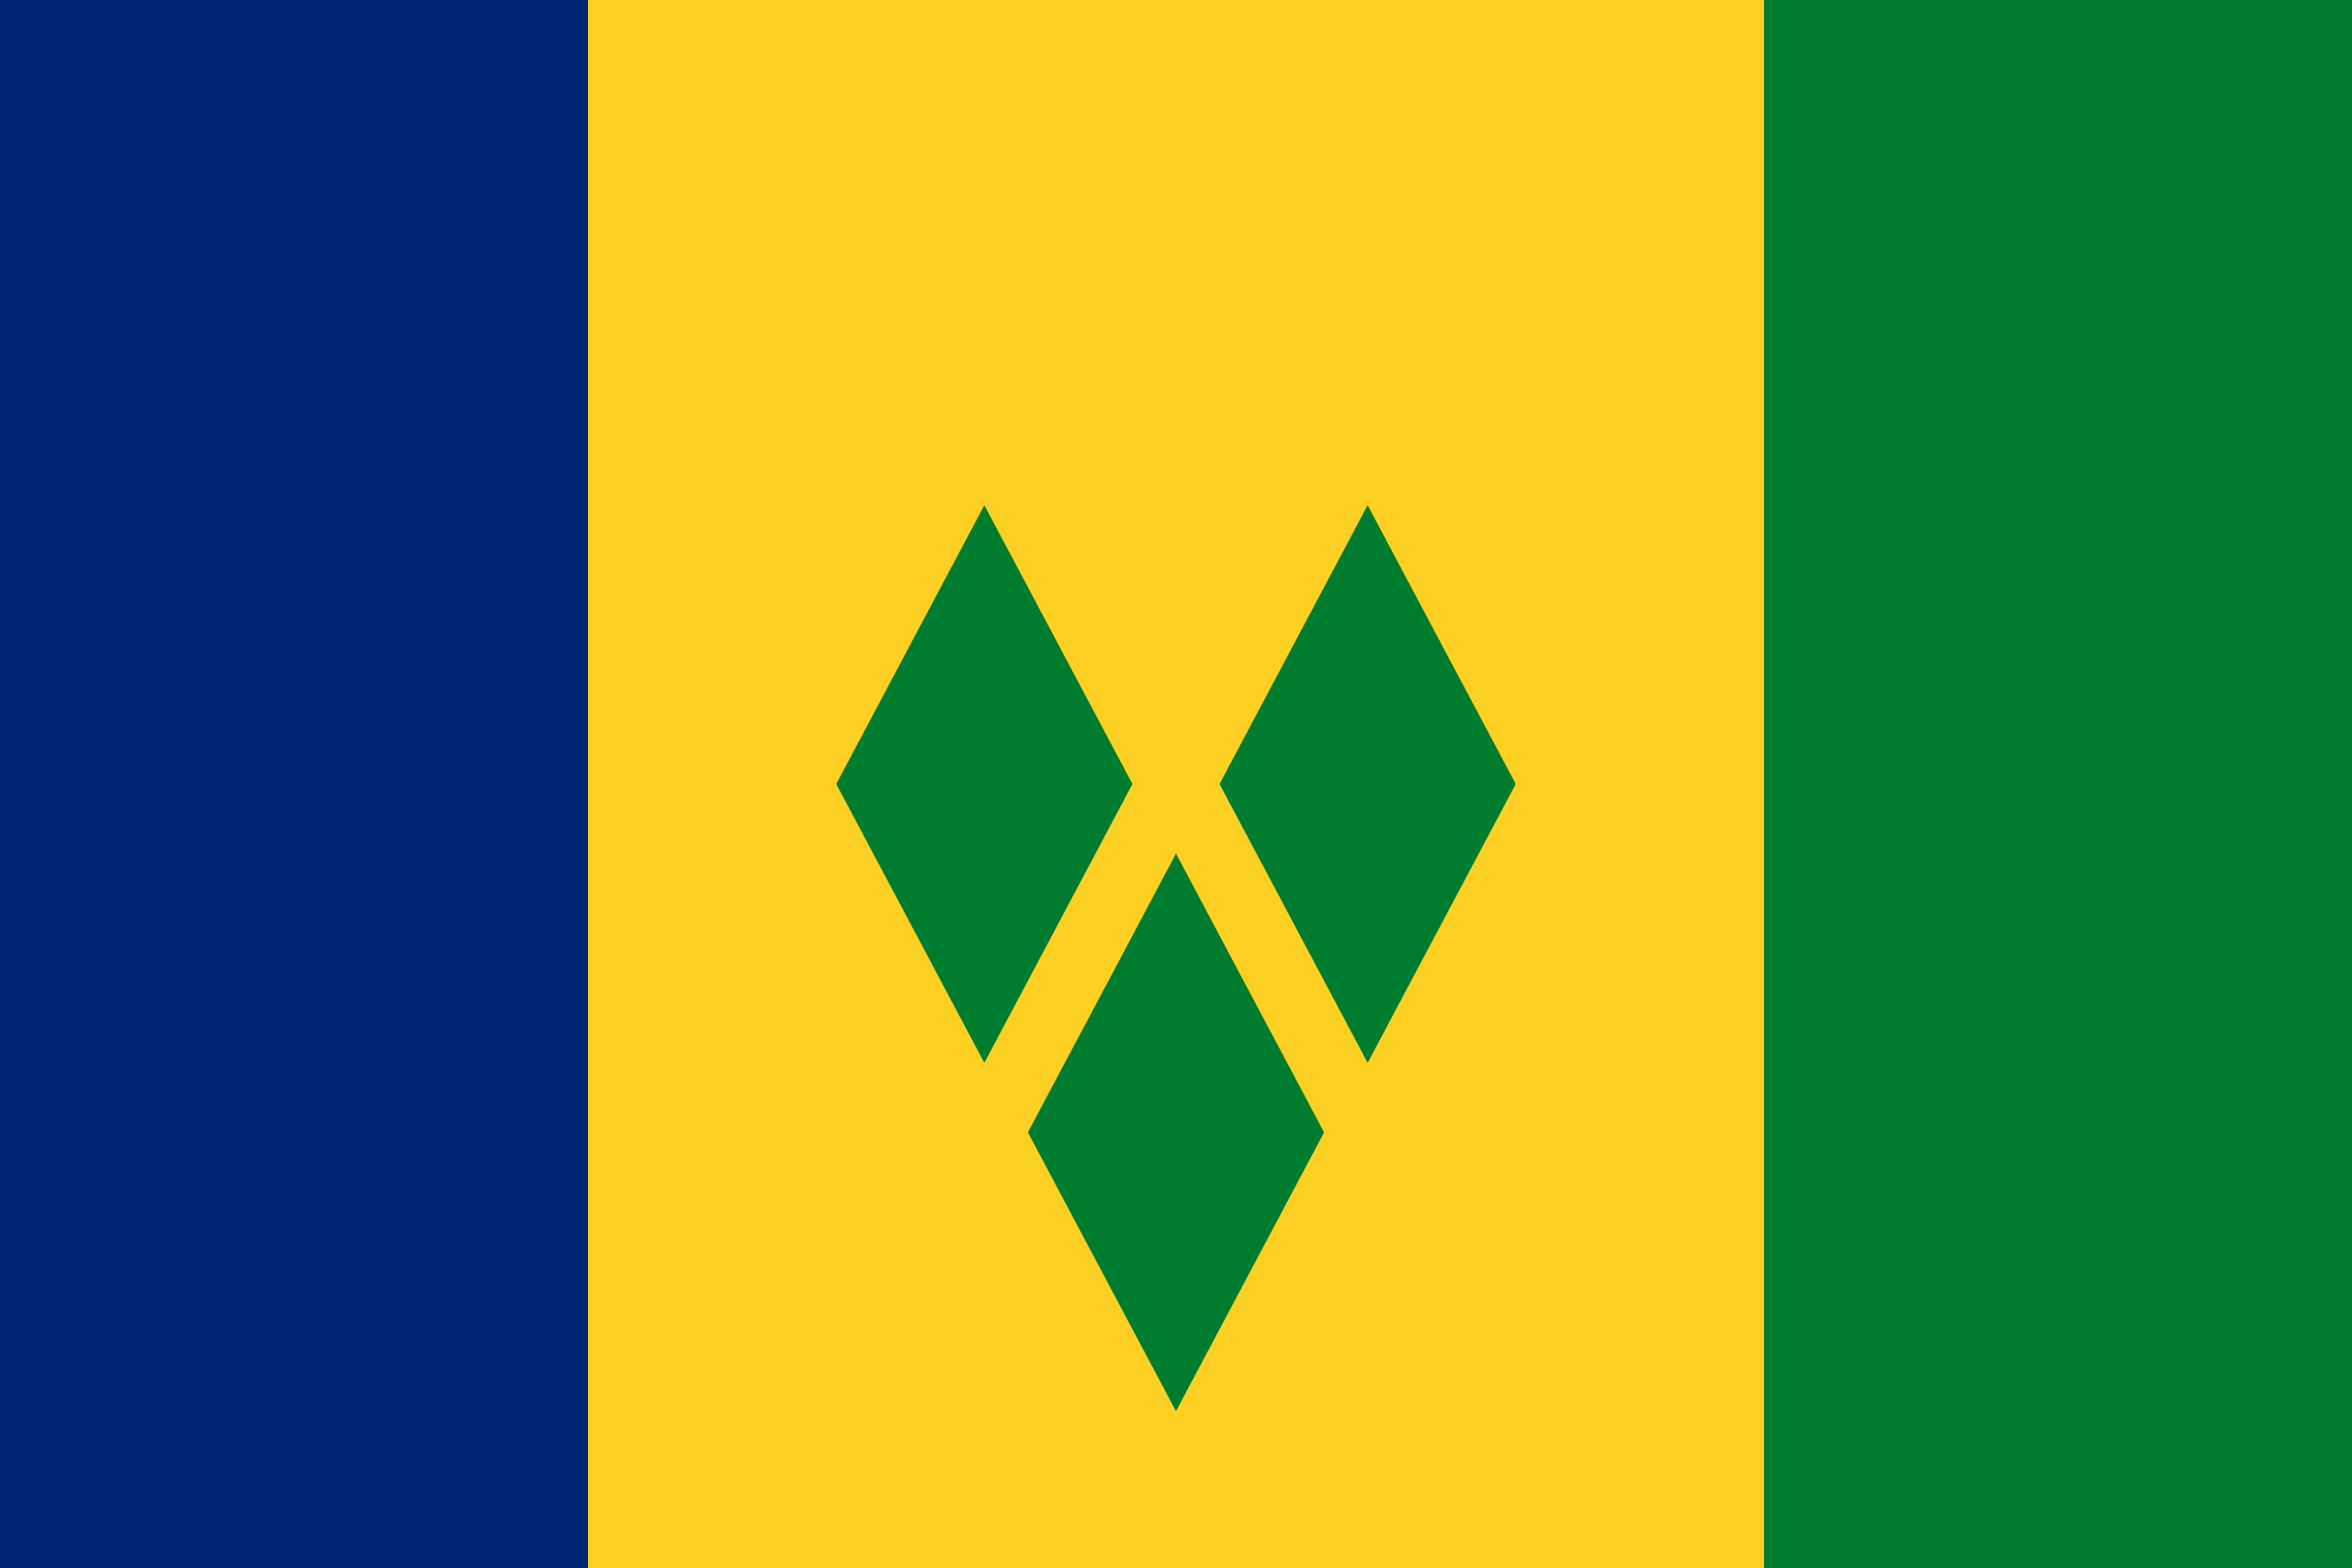

Samoa


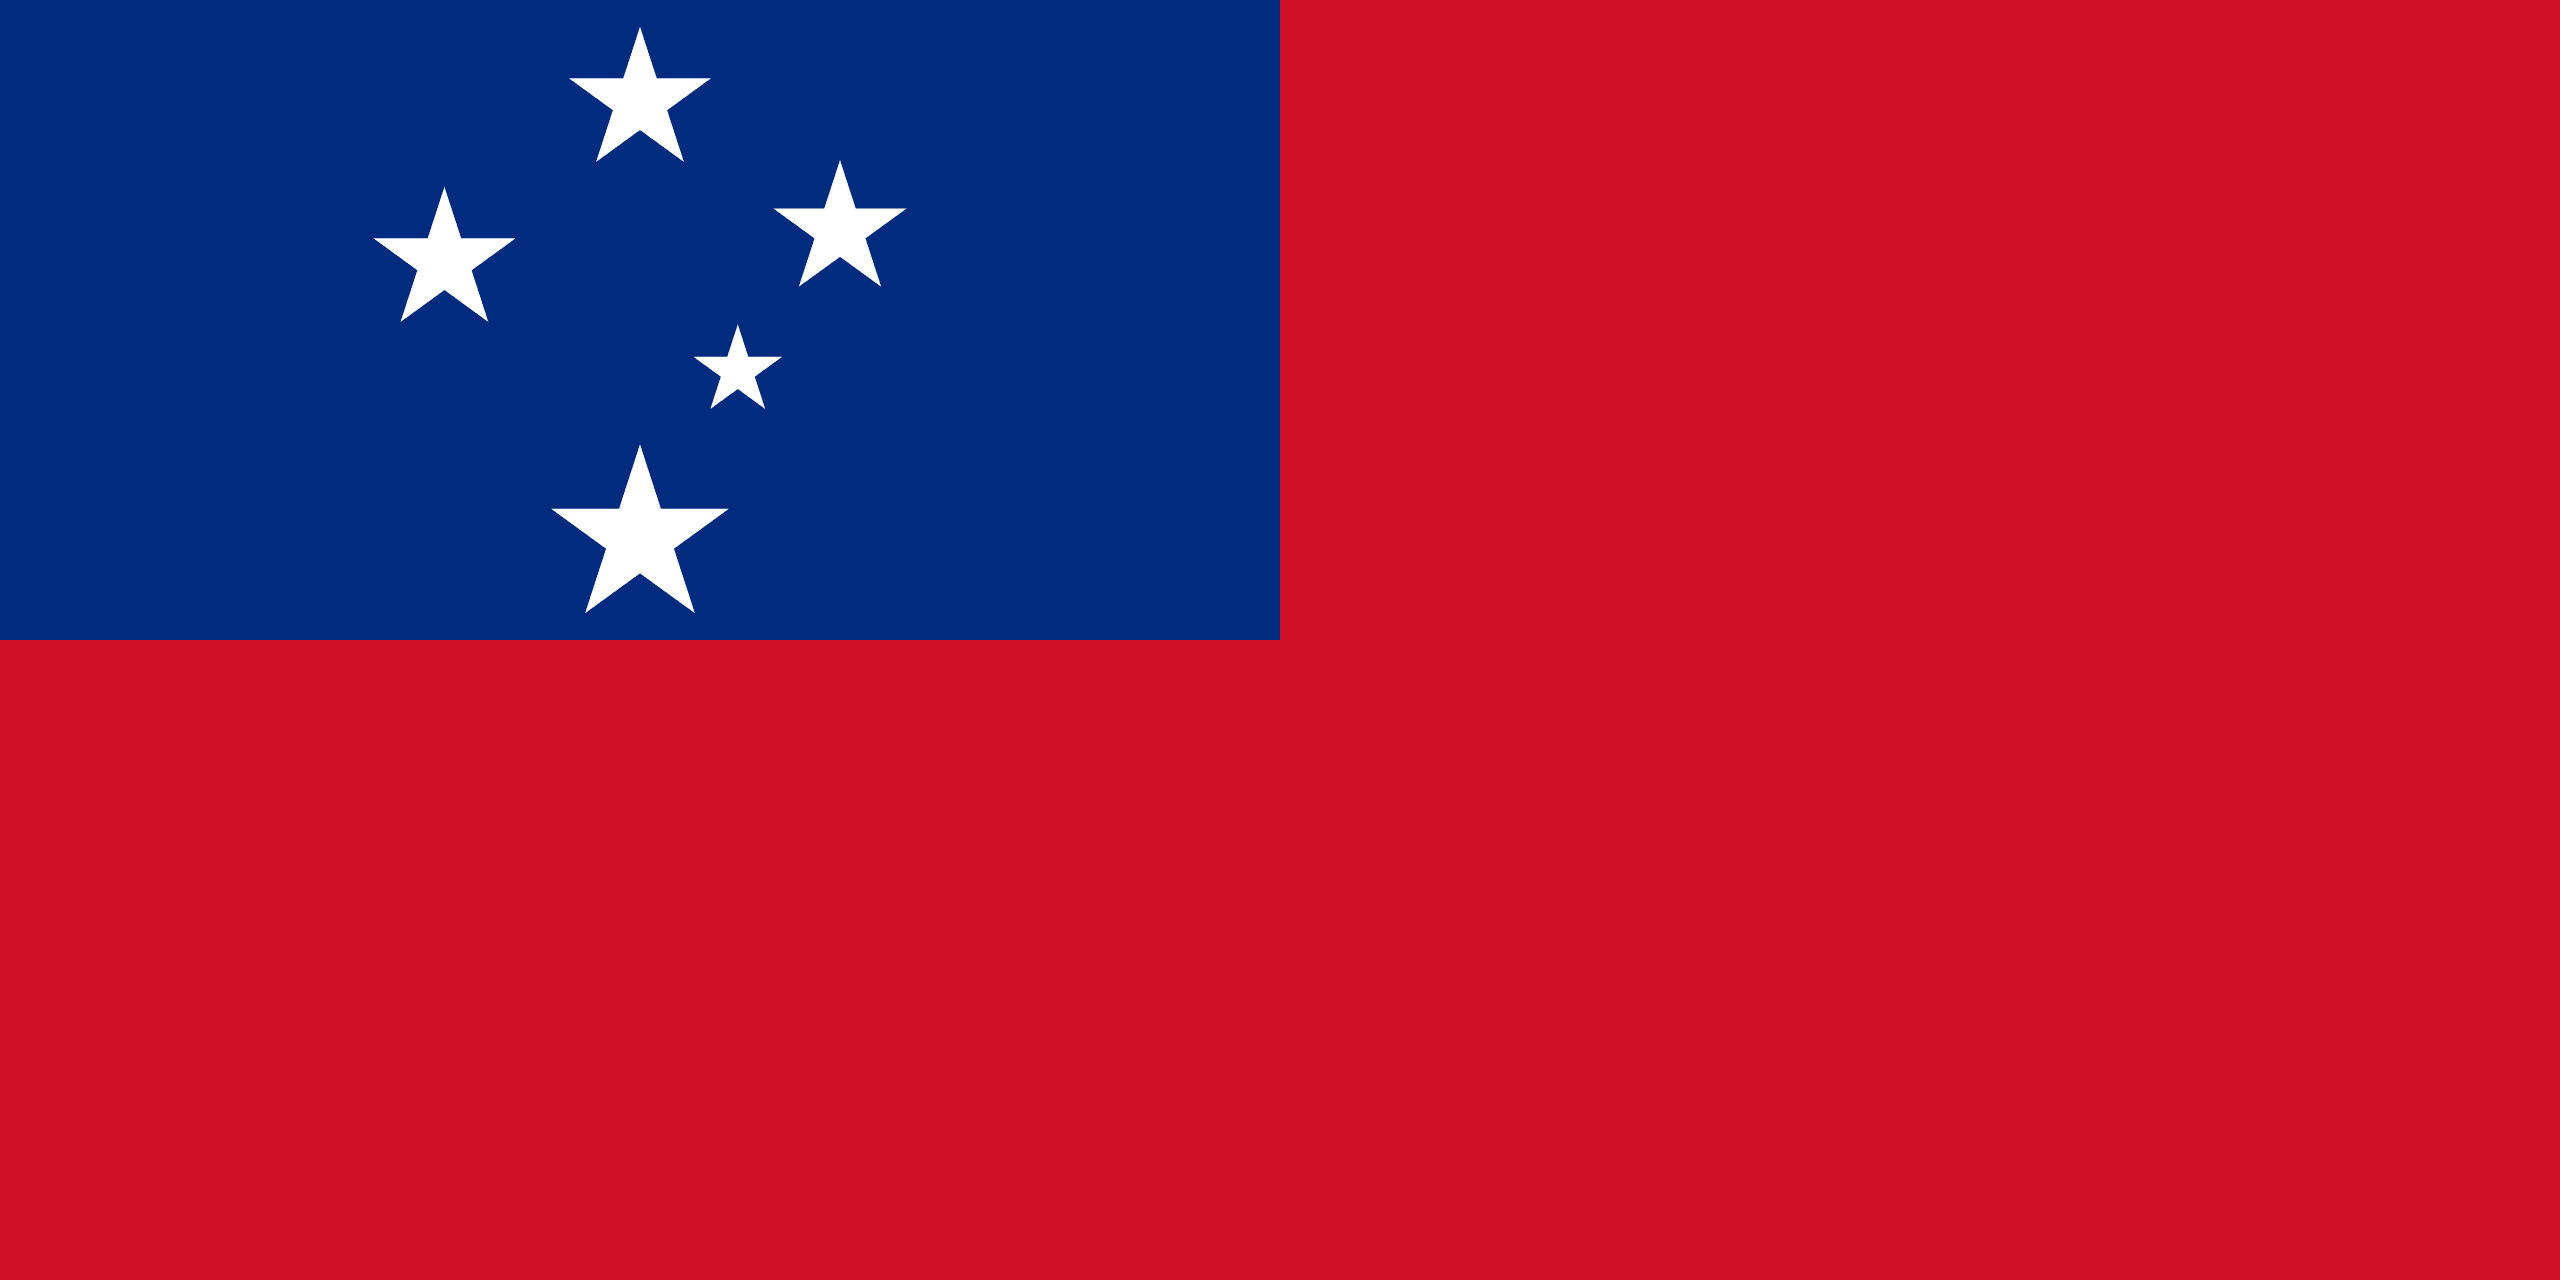

San Marino


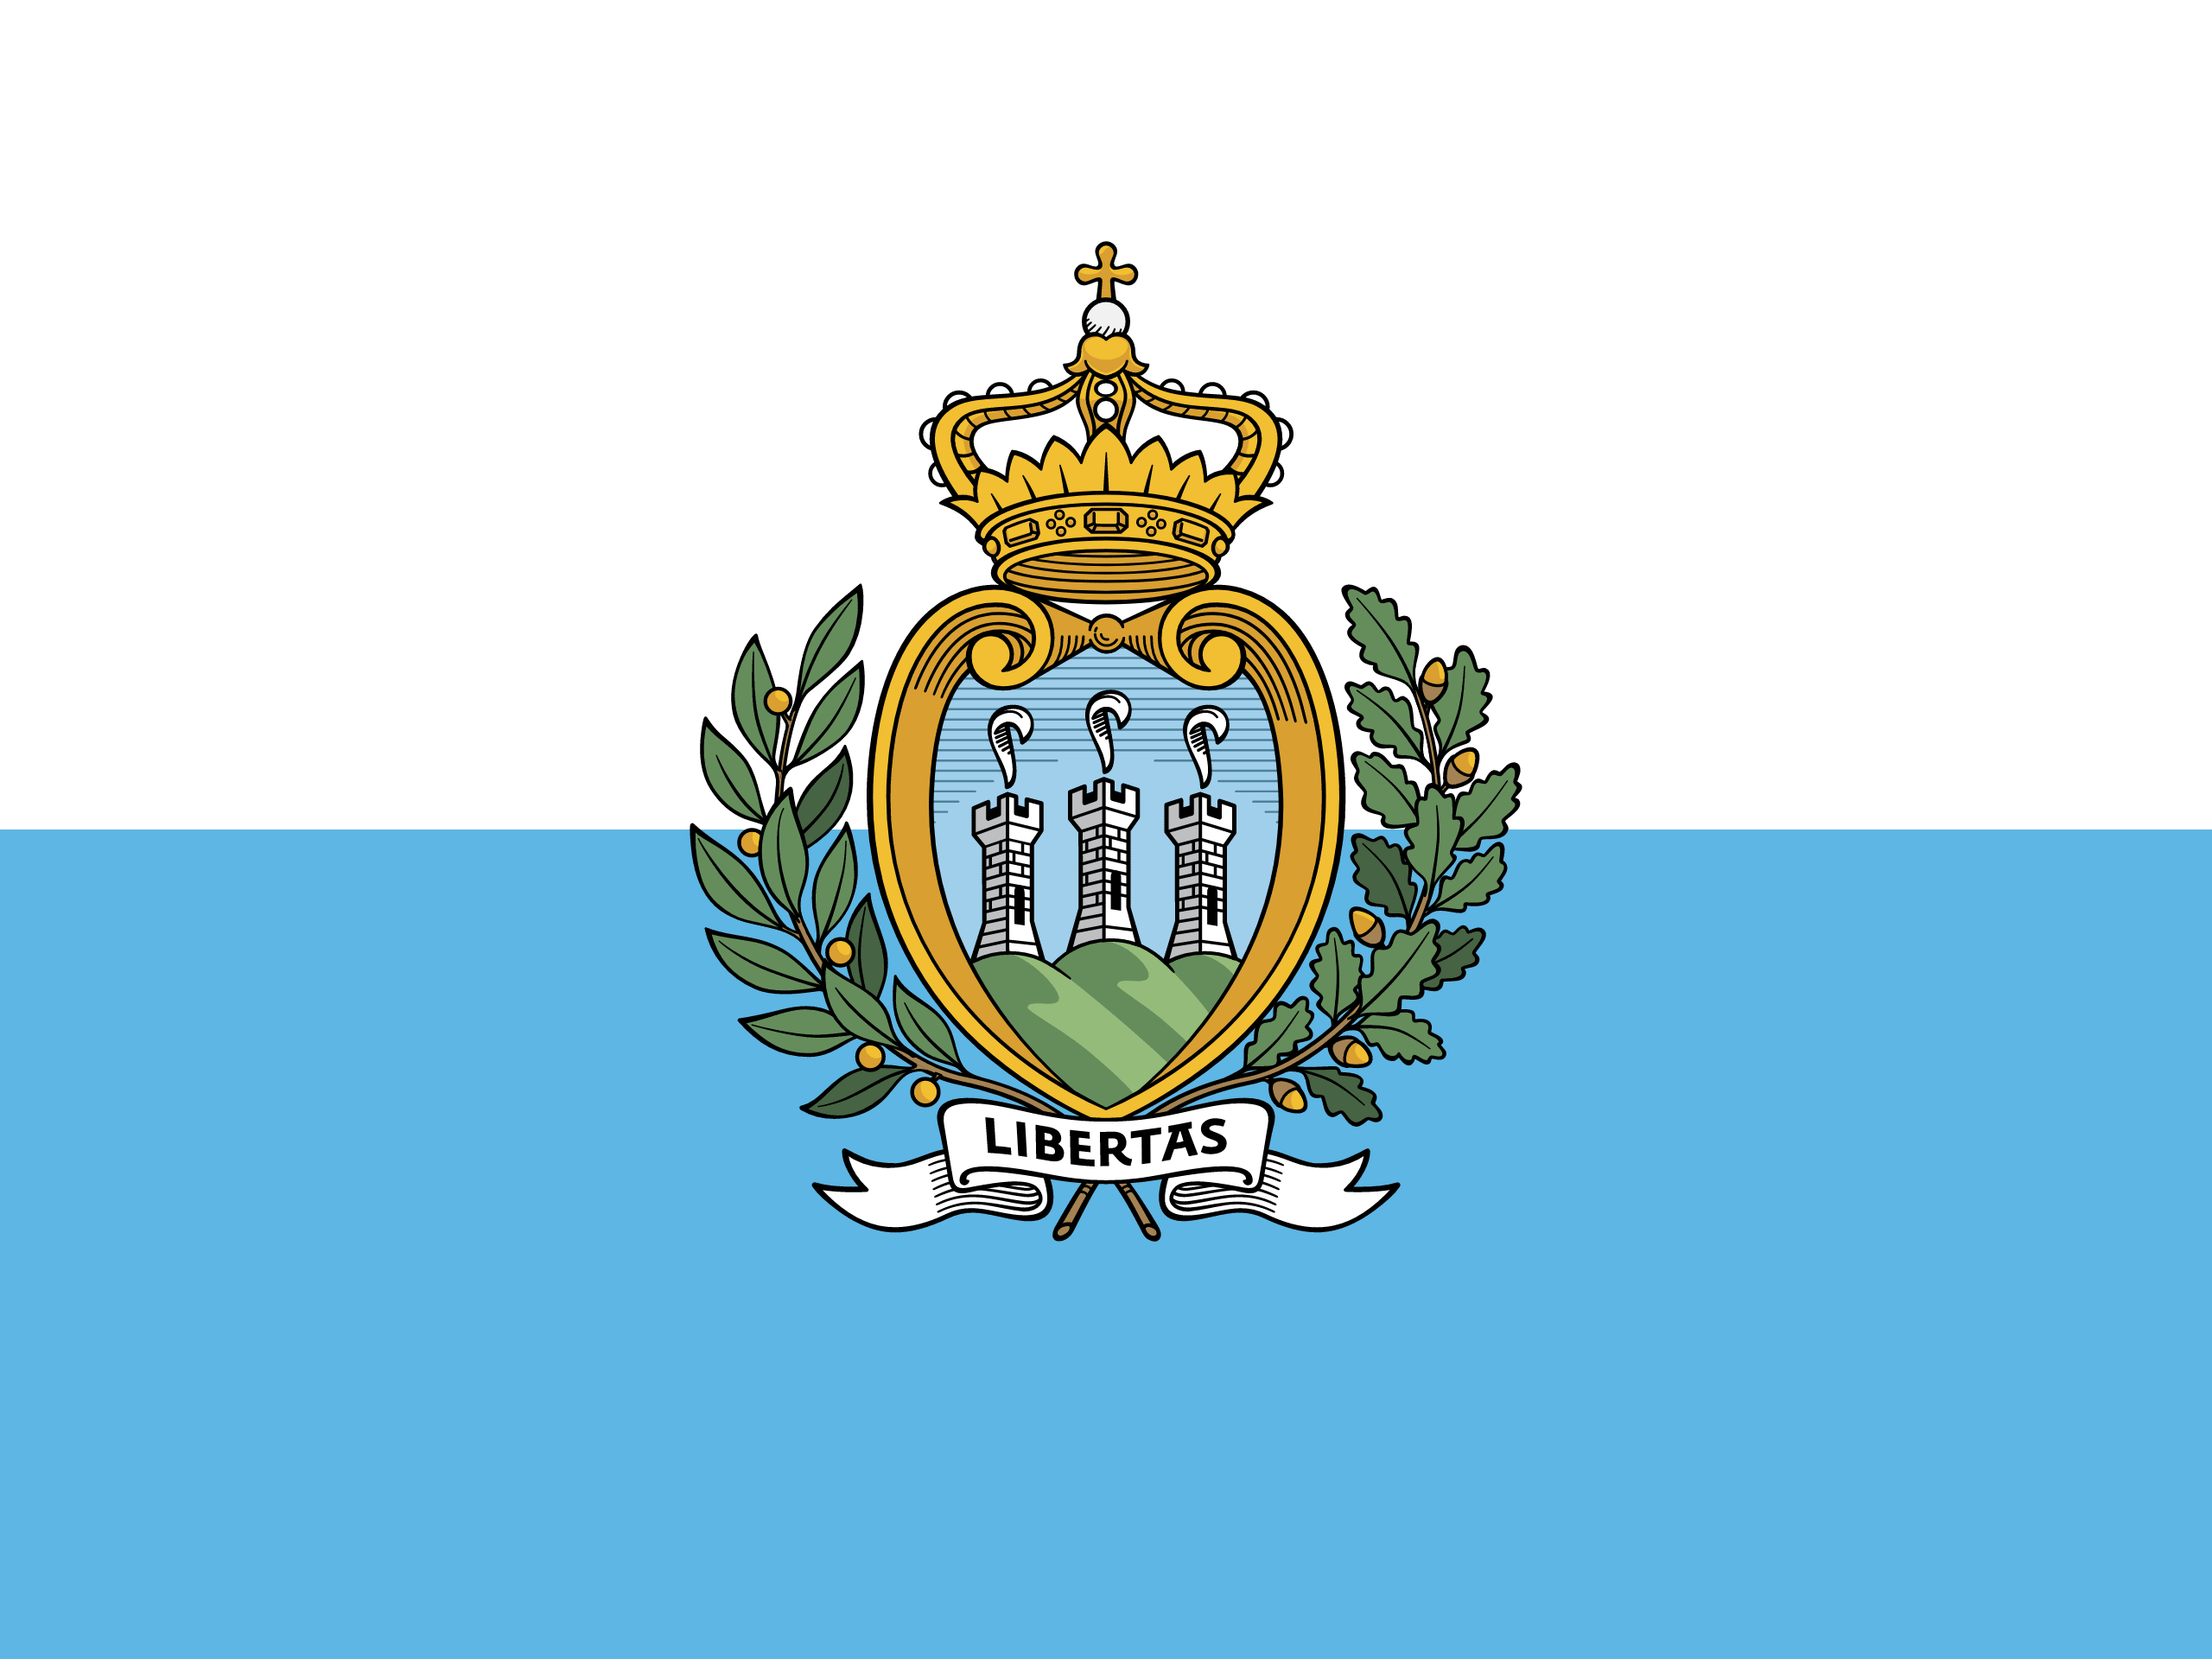

São Tomé and Príncipe


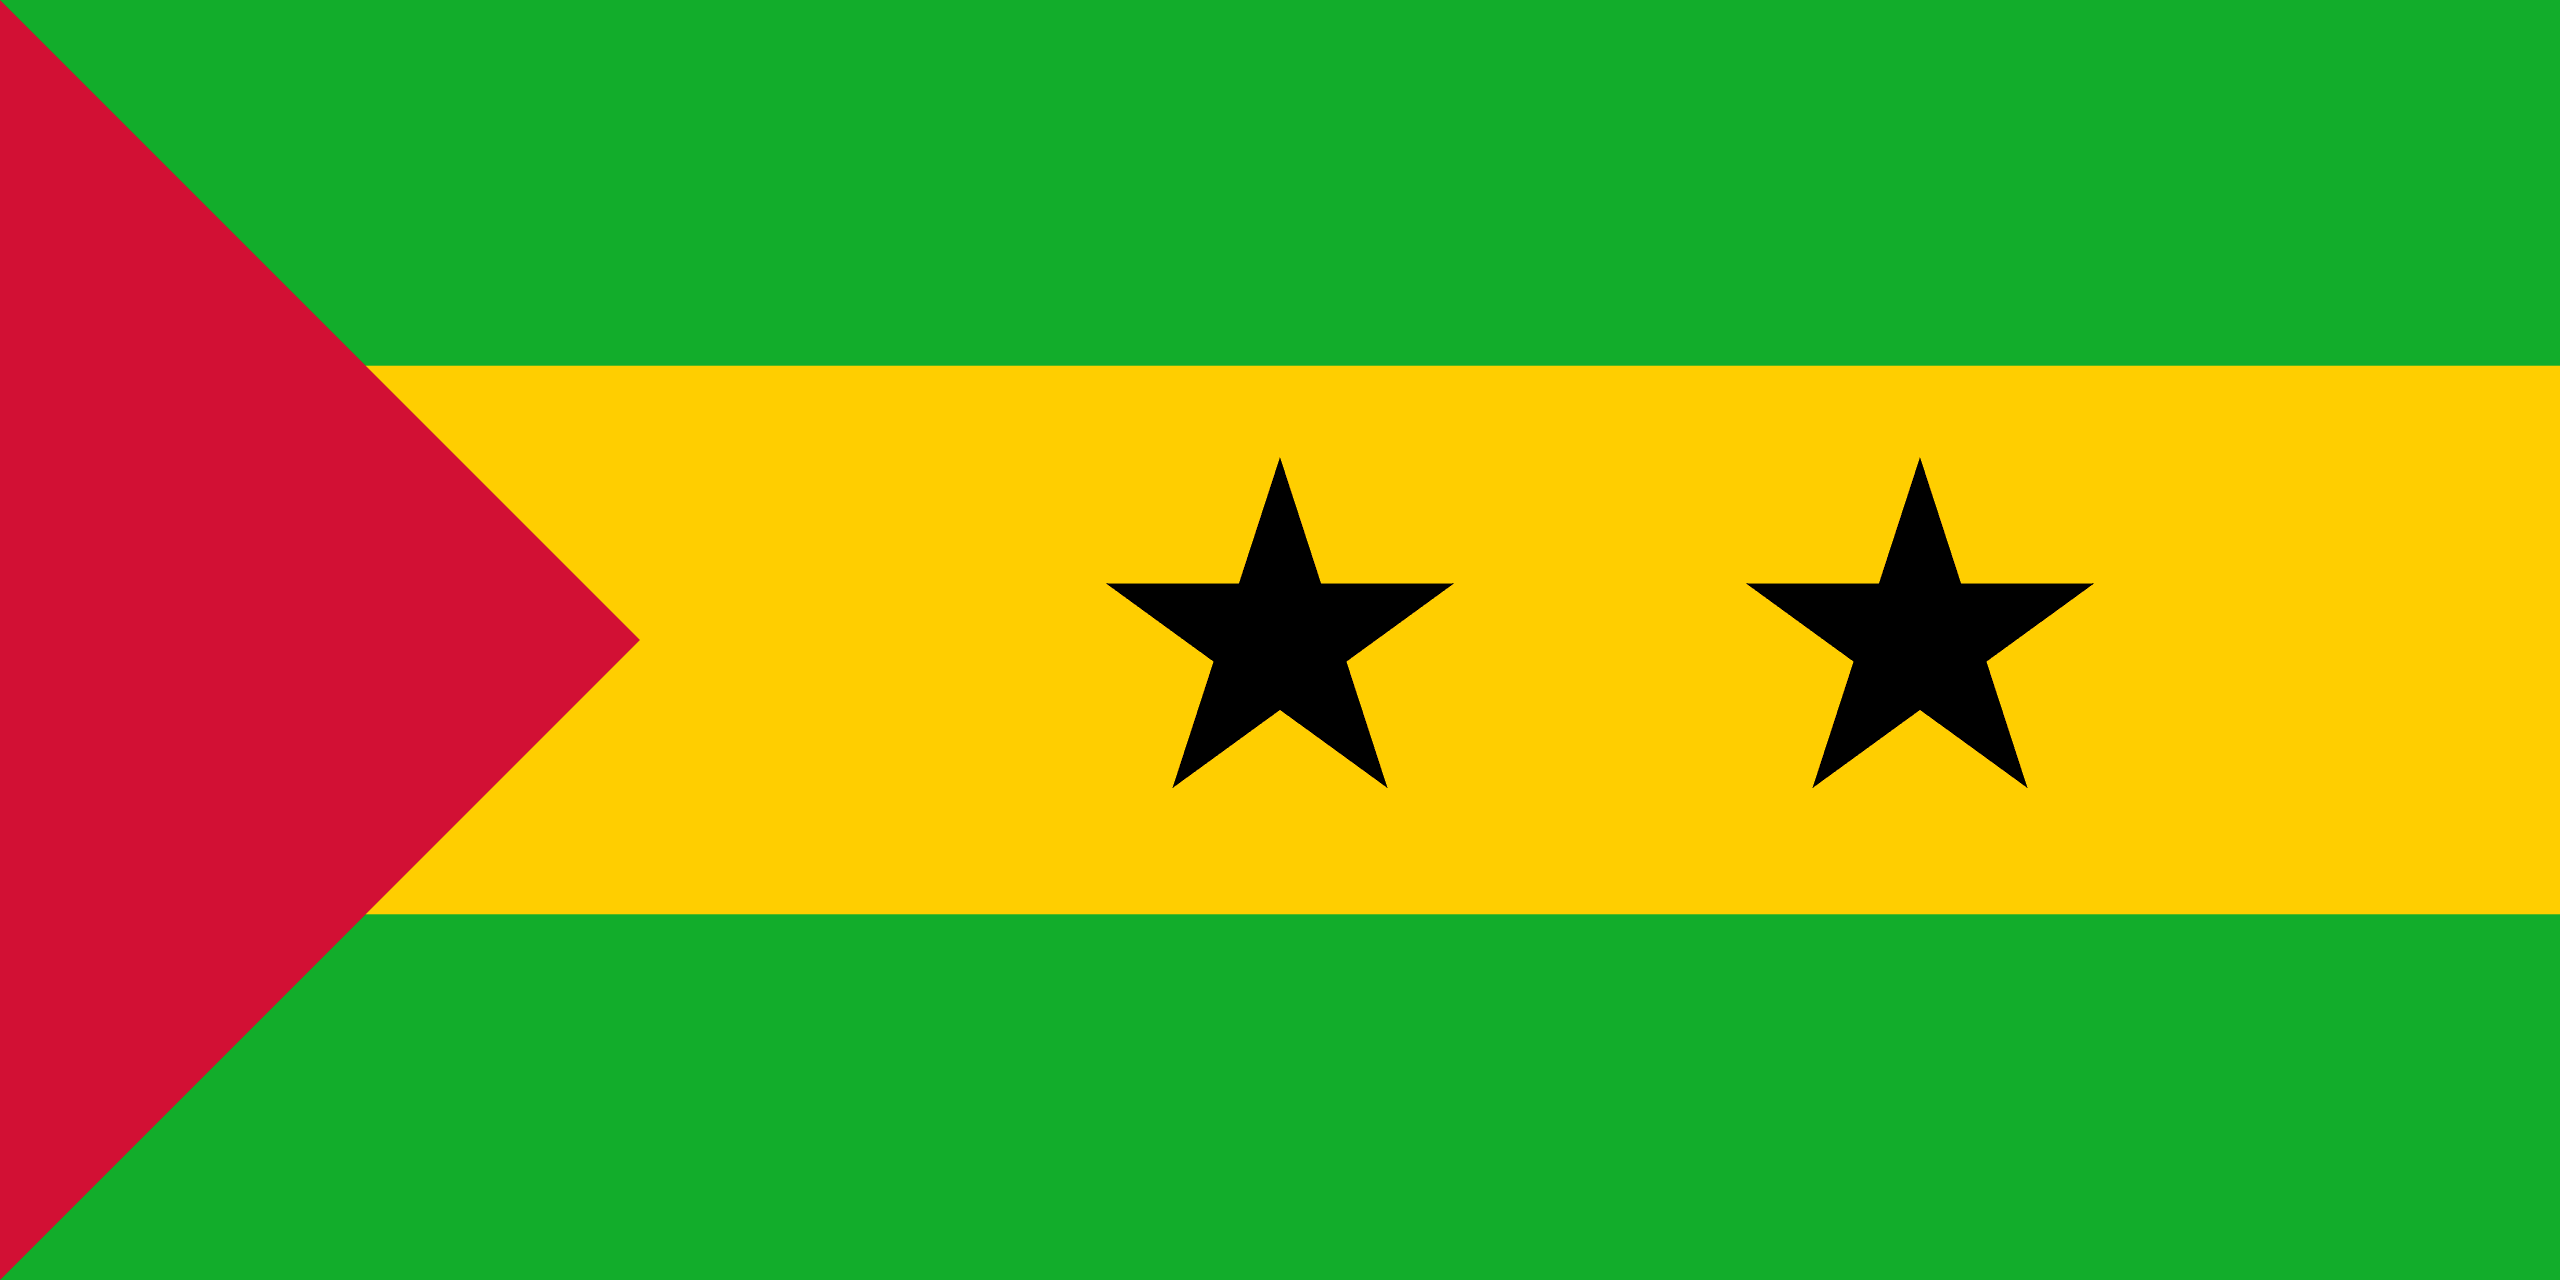

Saudi Arabia


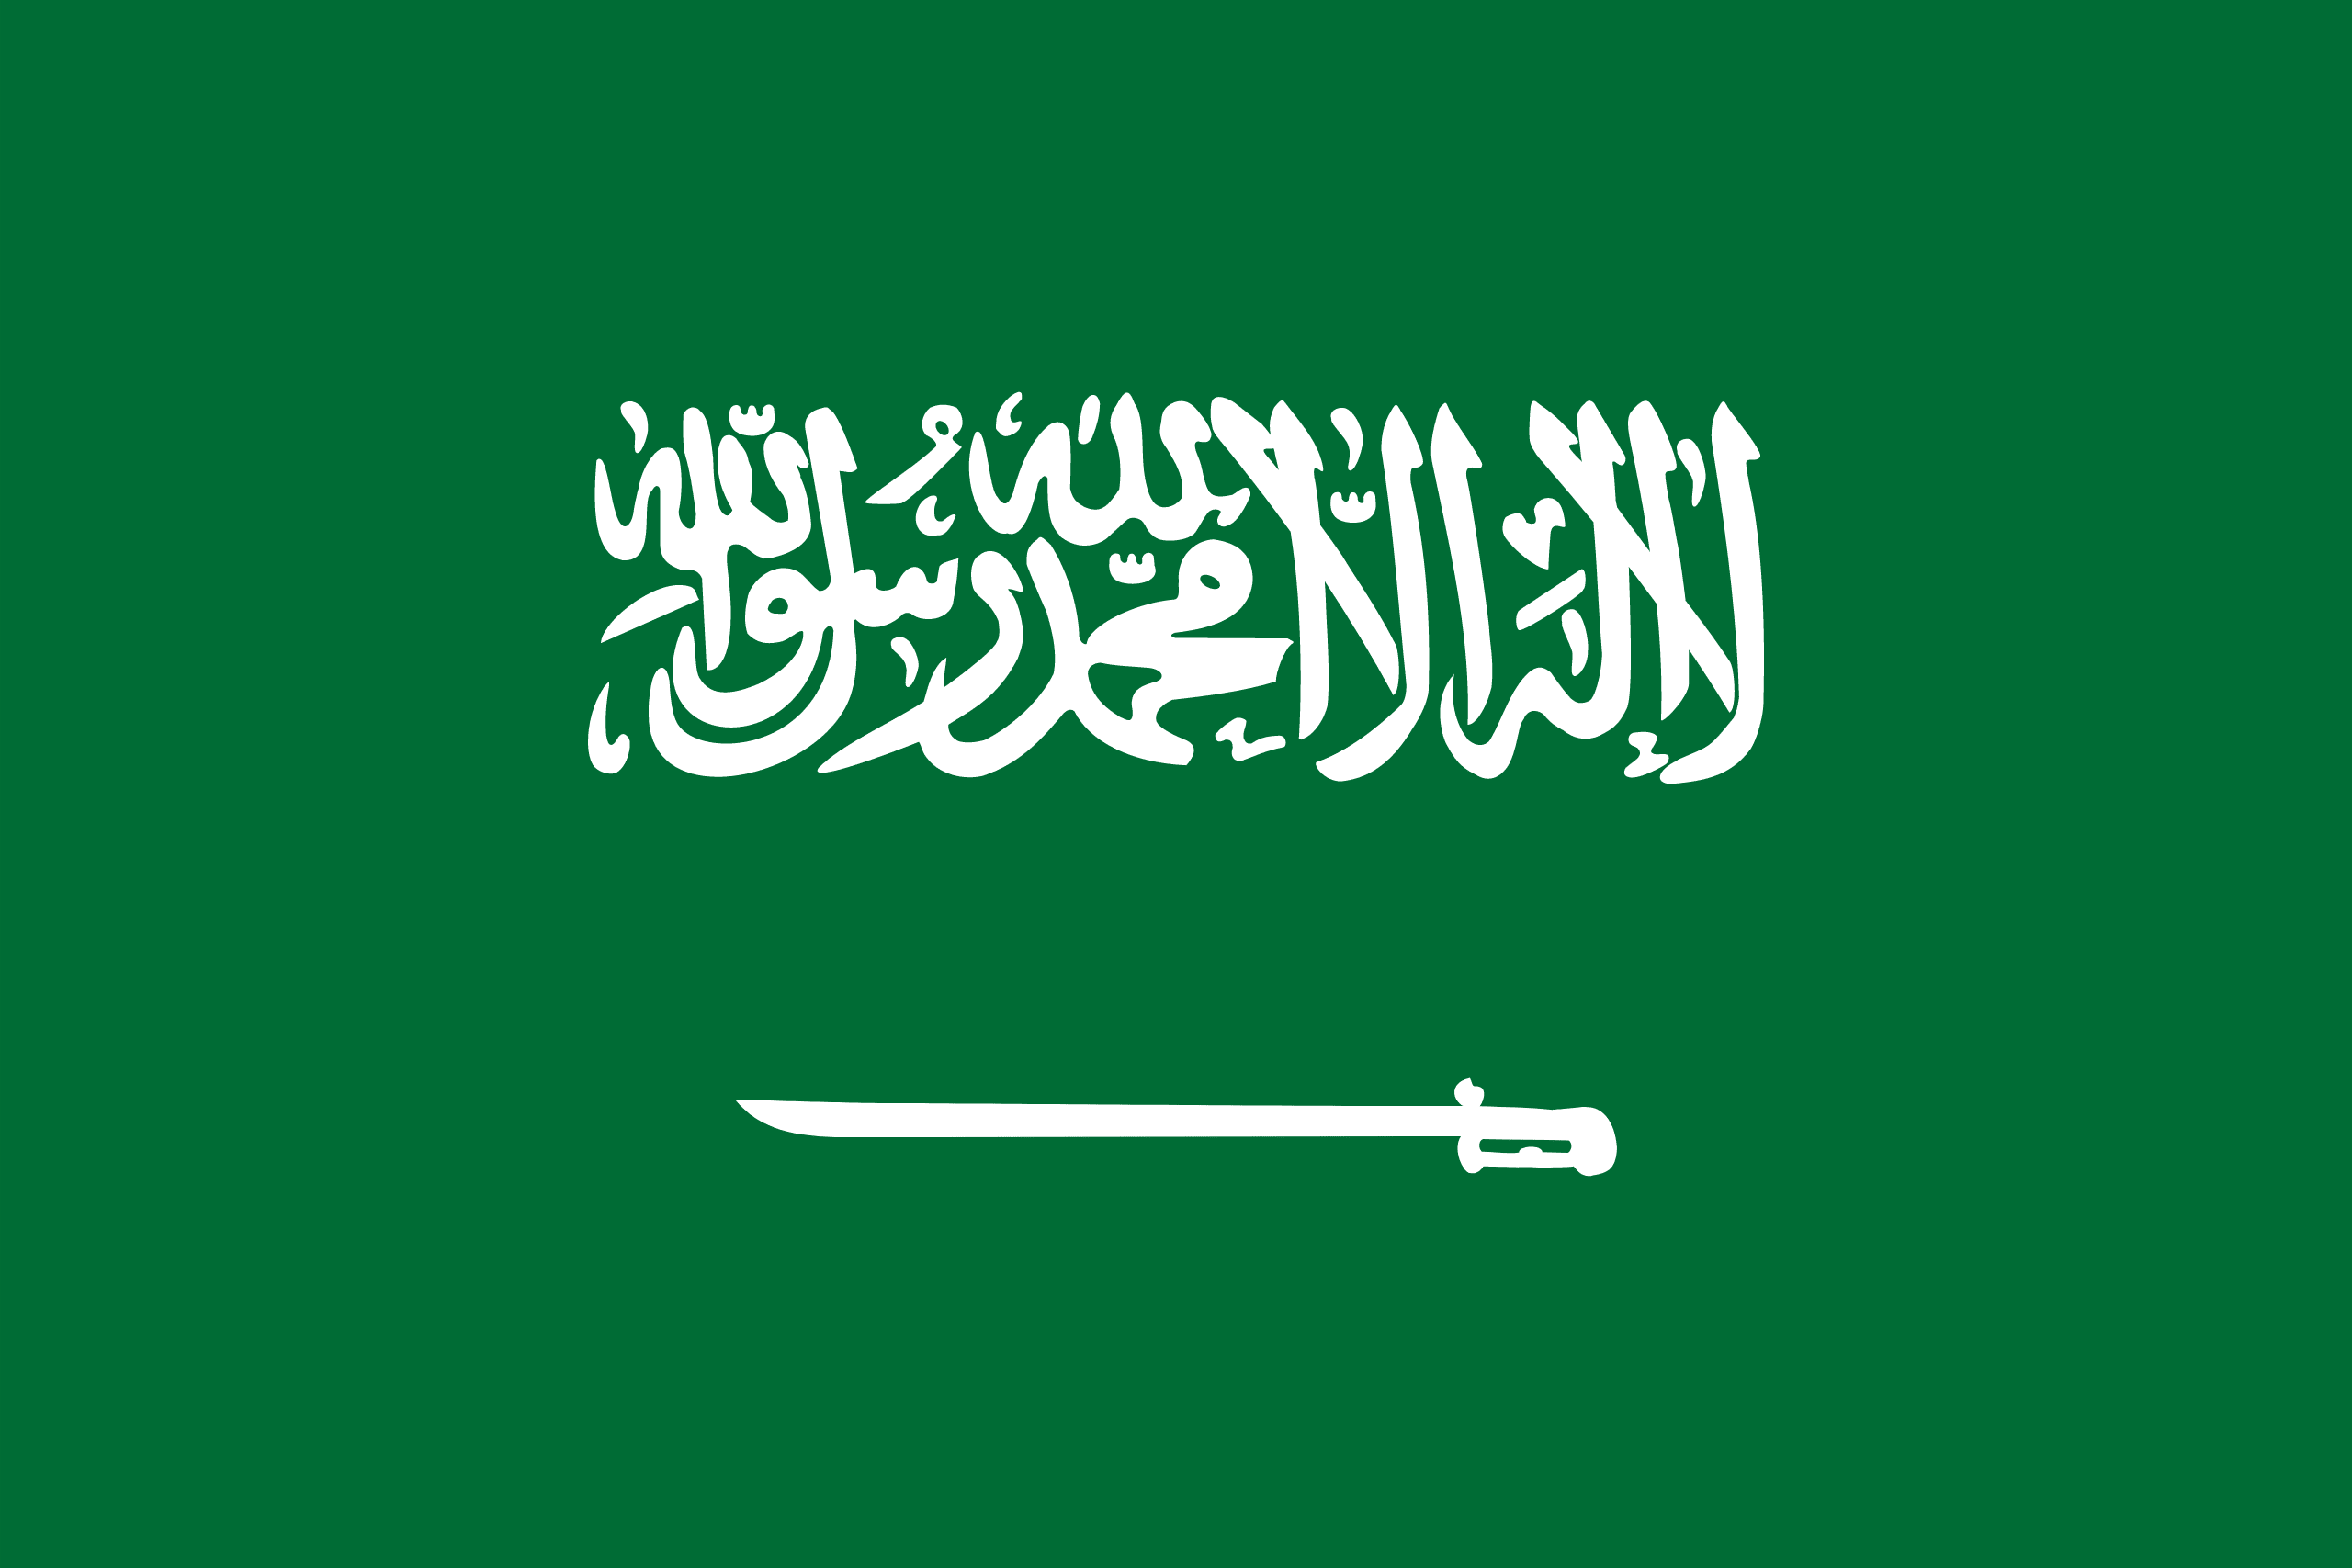

Scotland


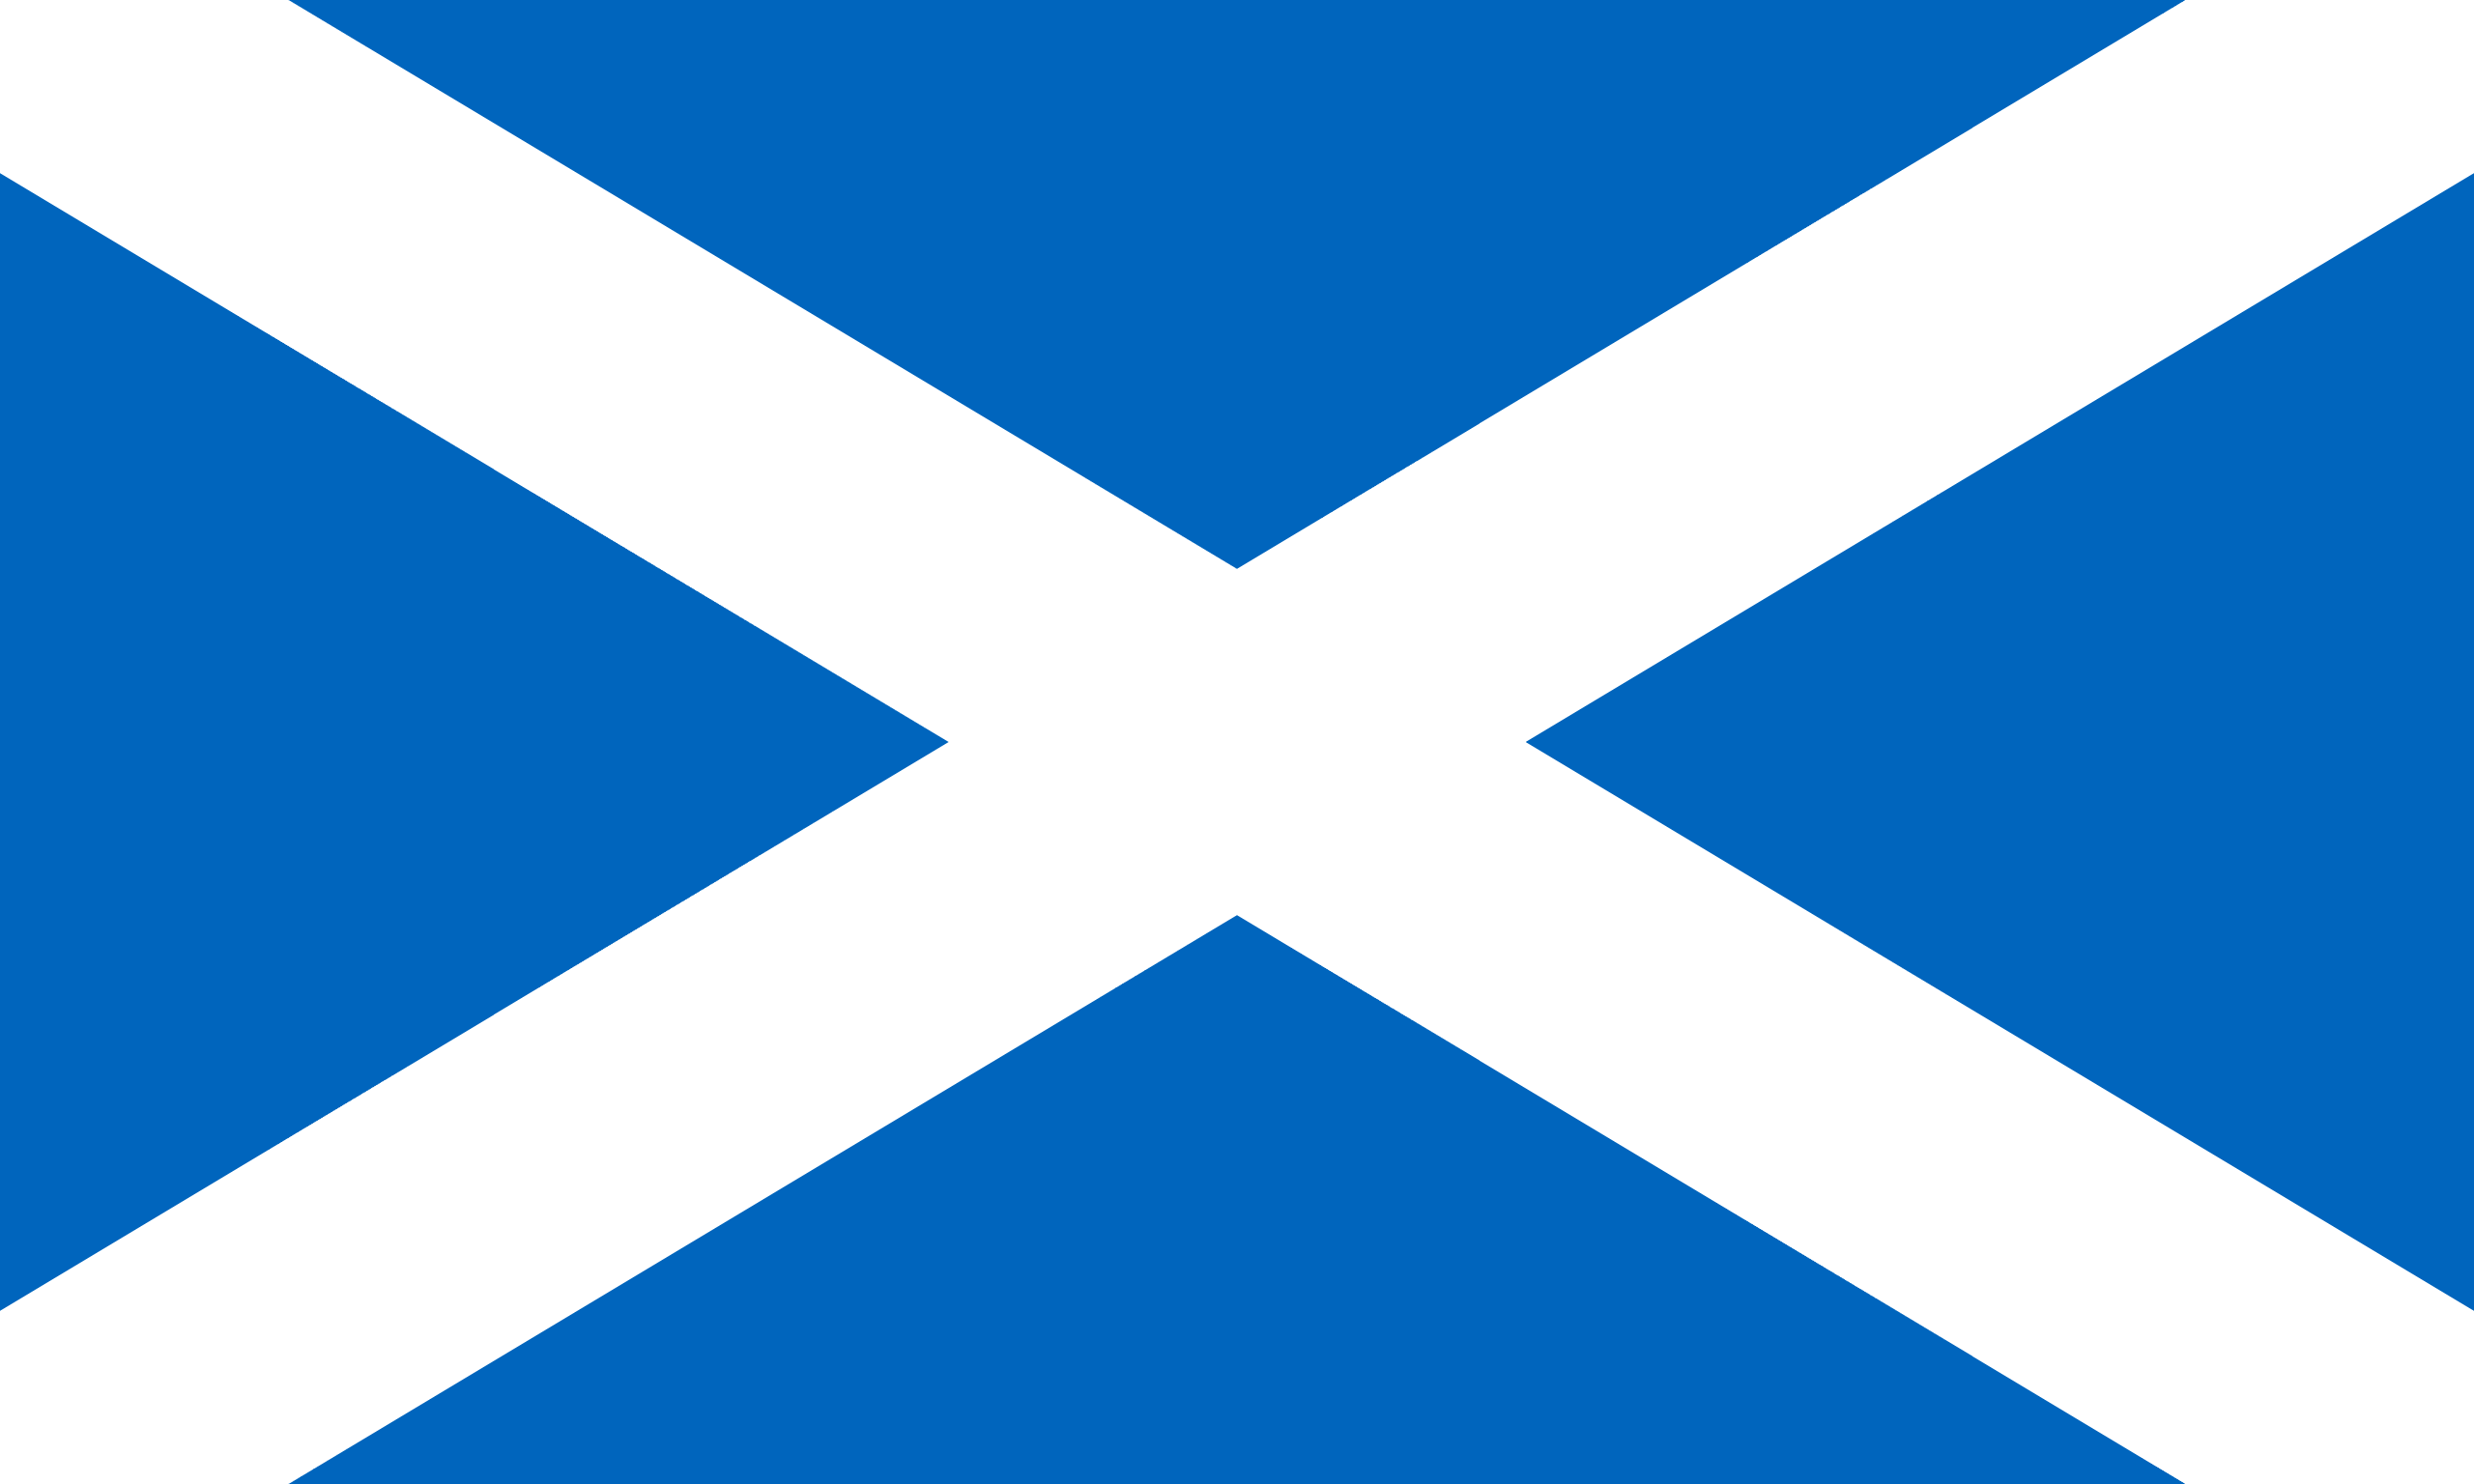

Senegal


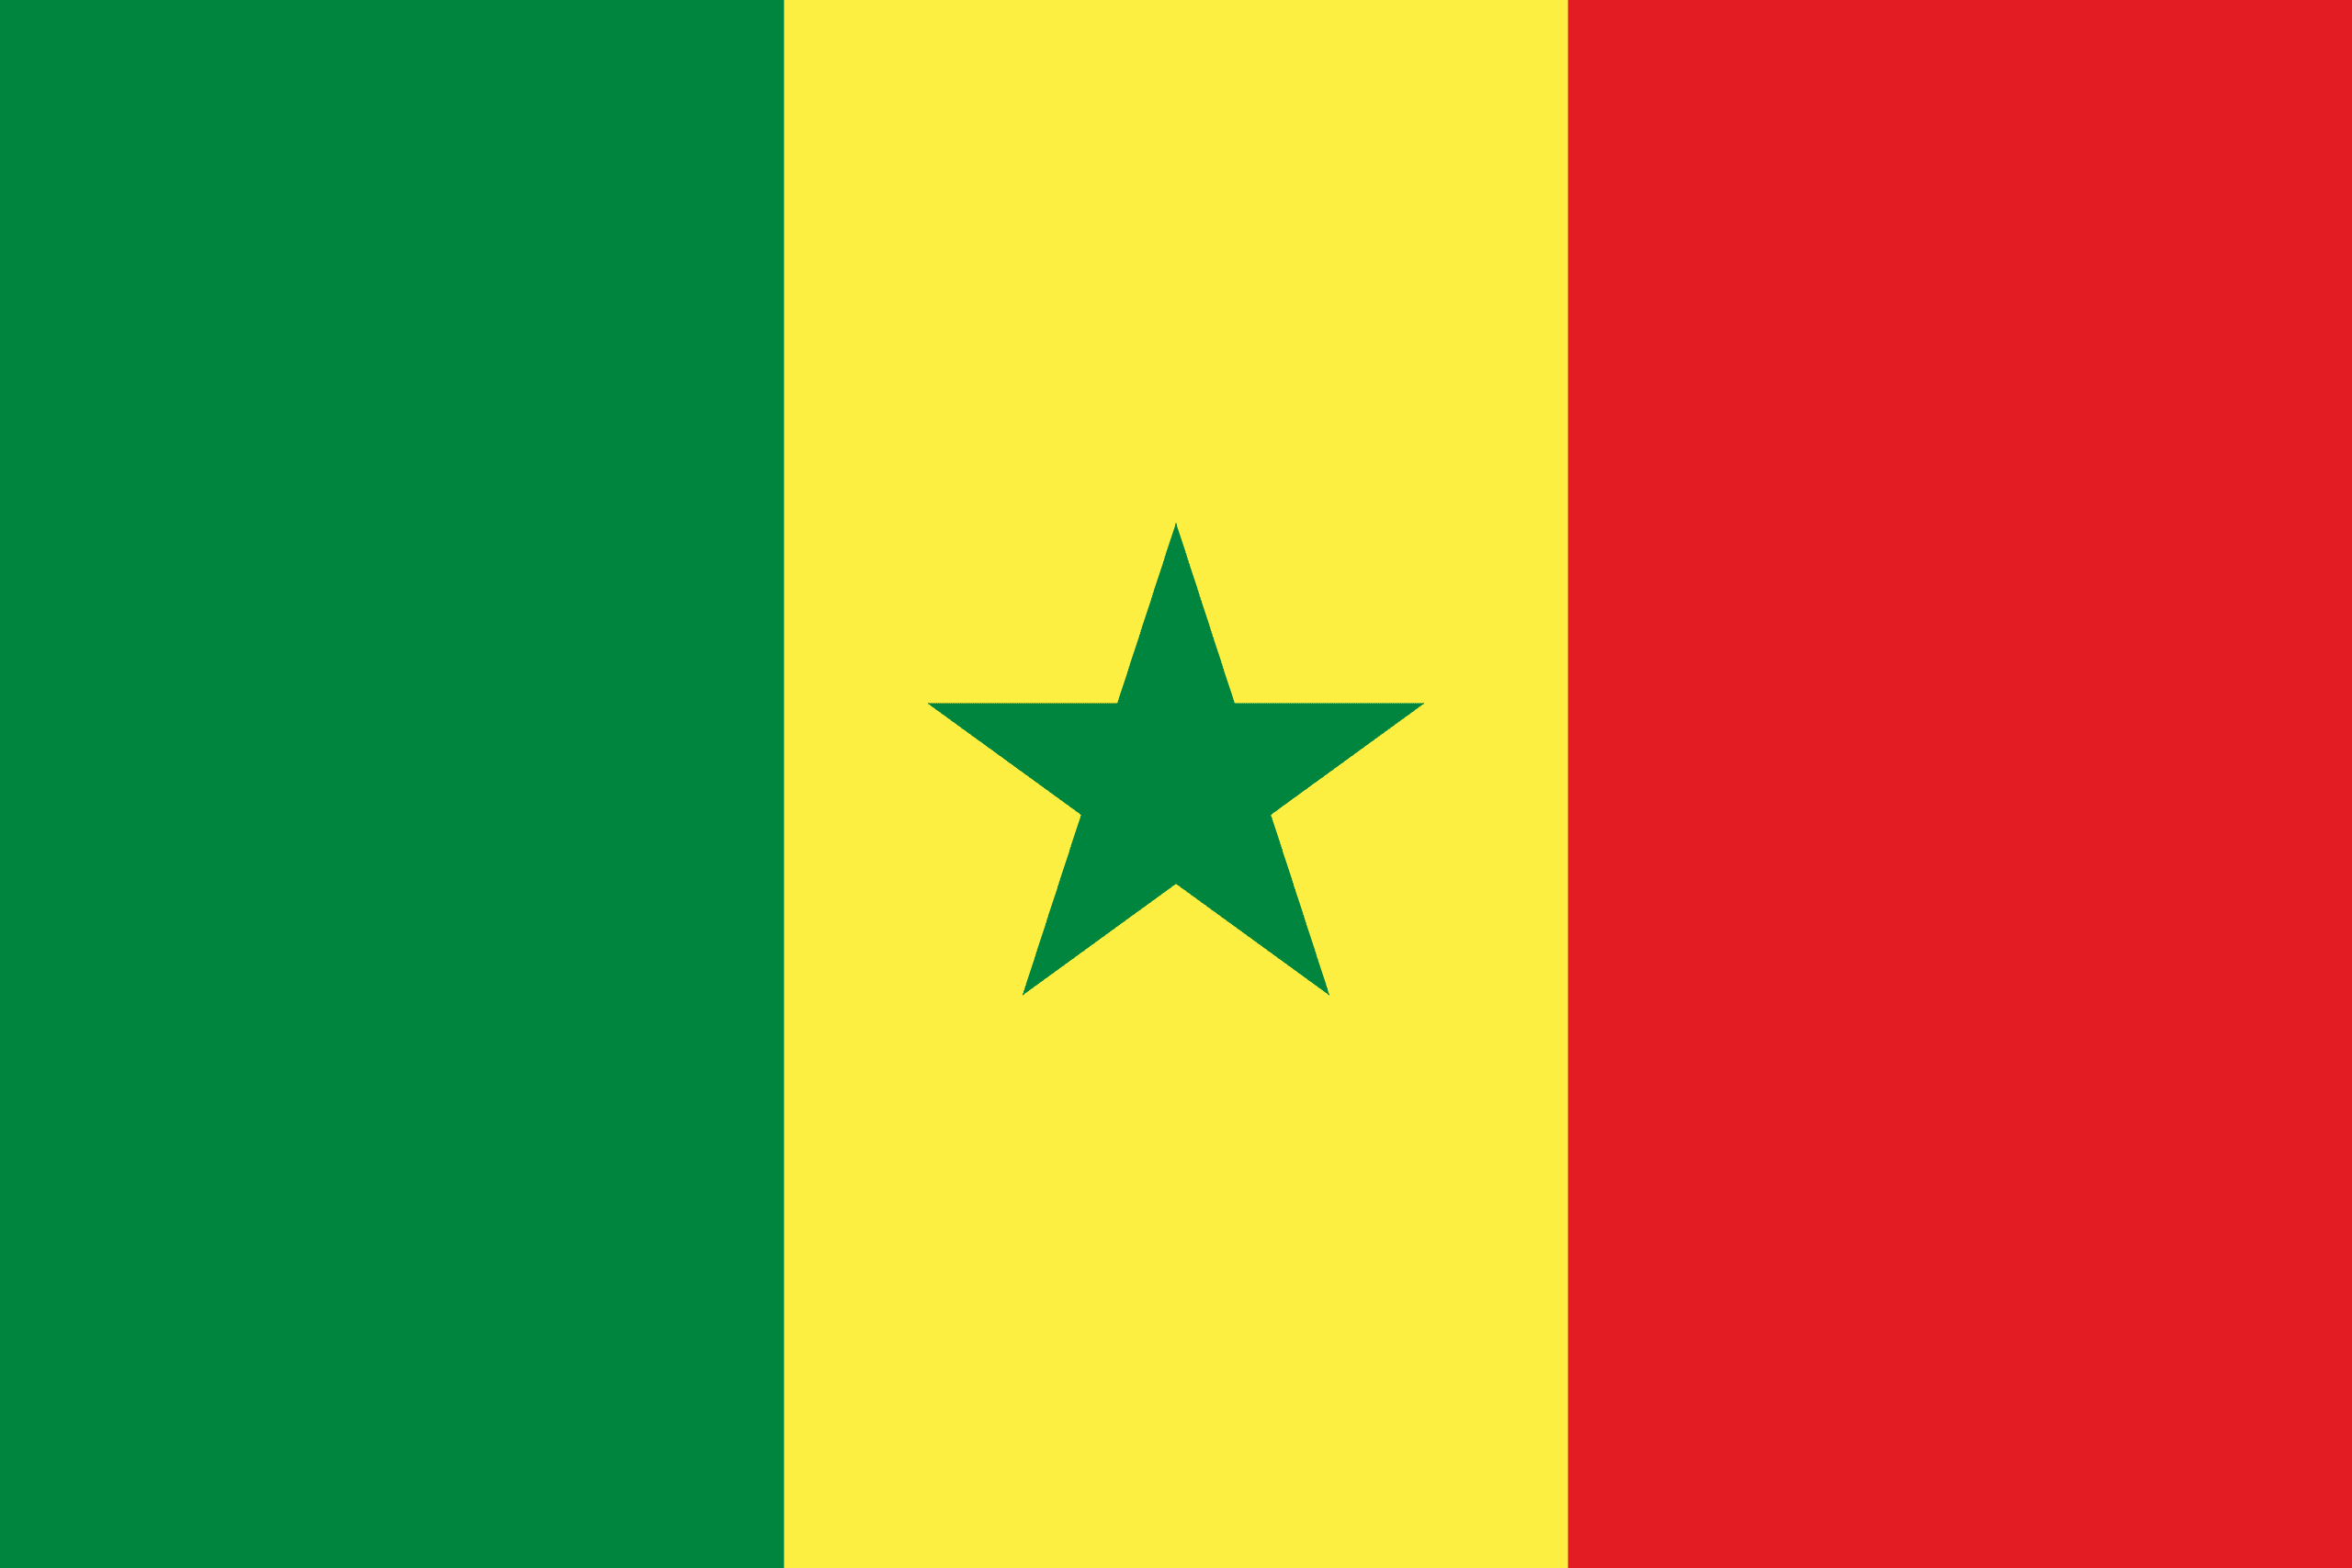

Serbia


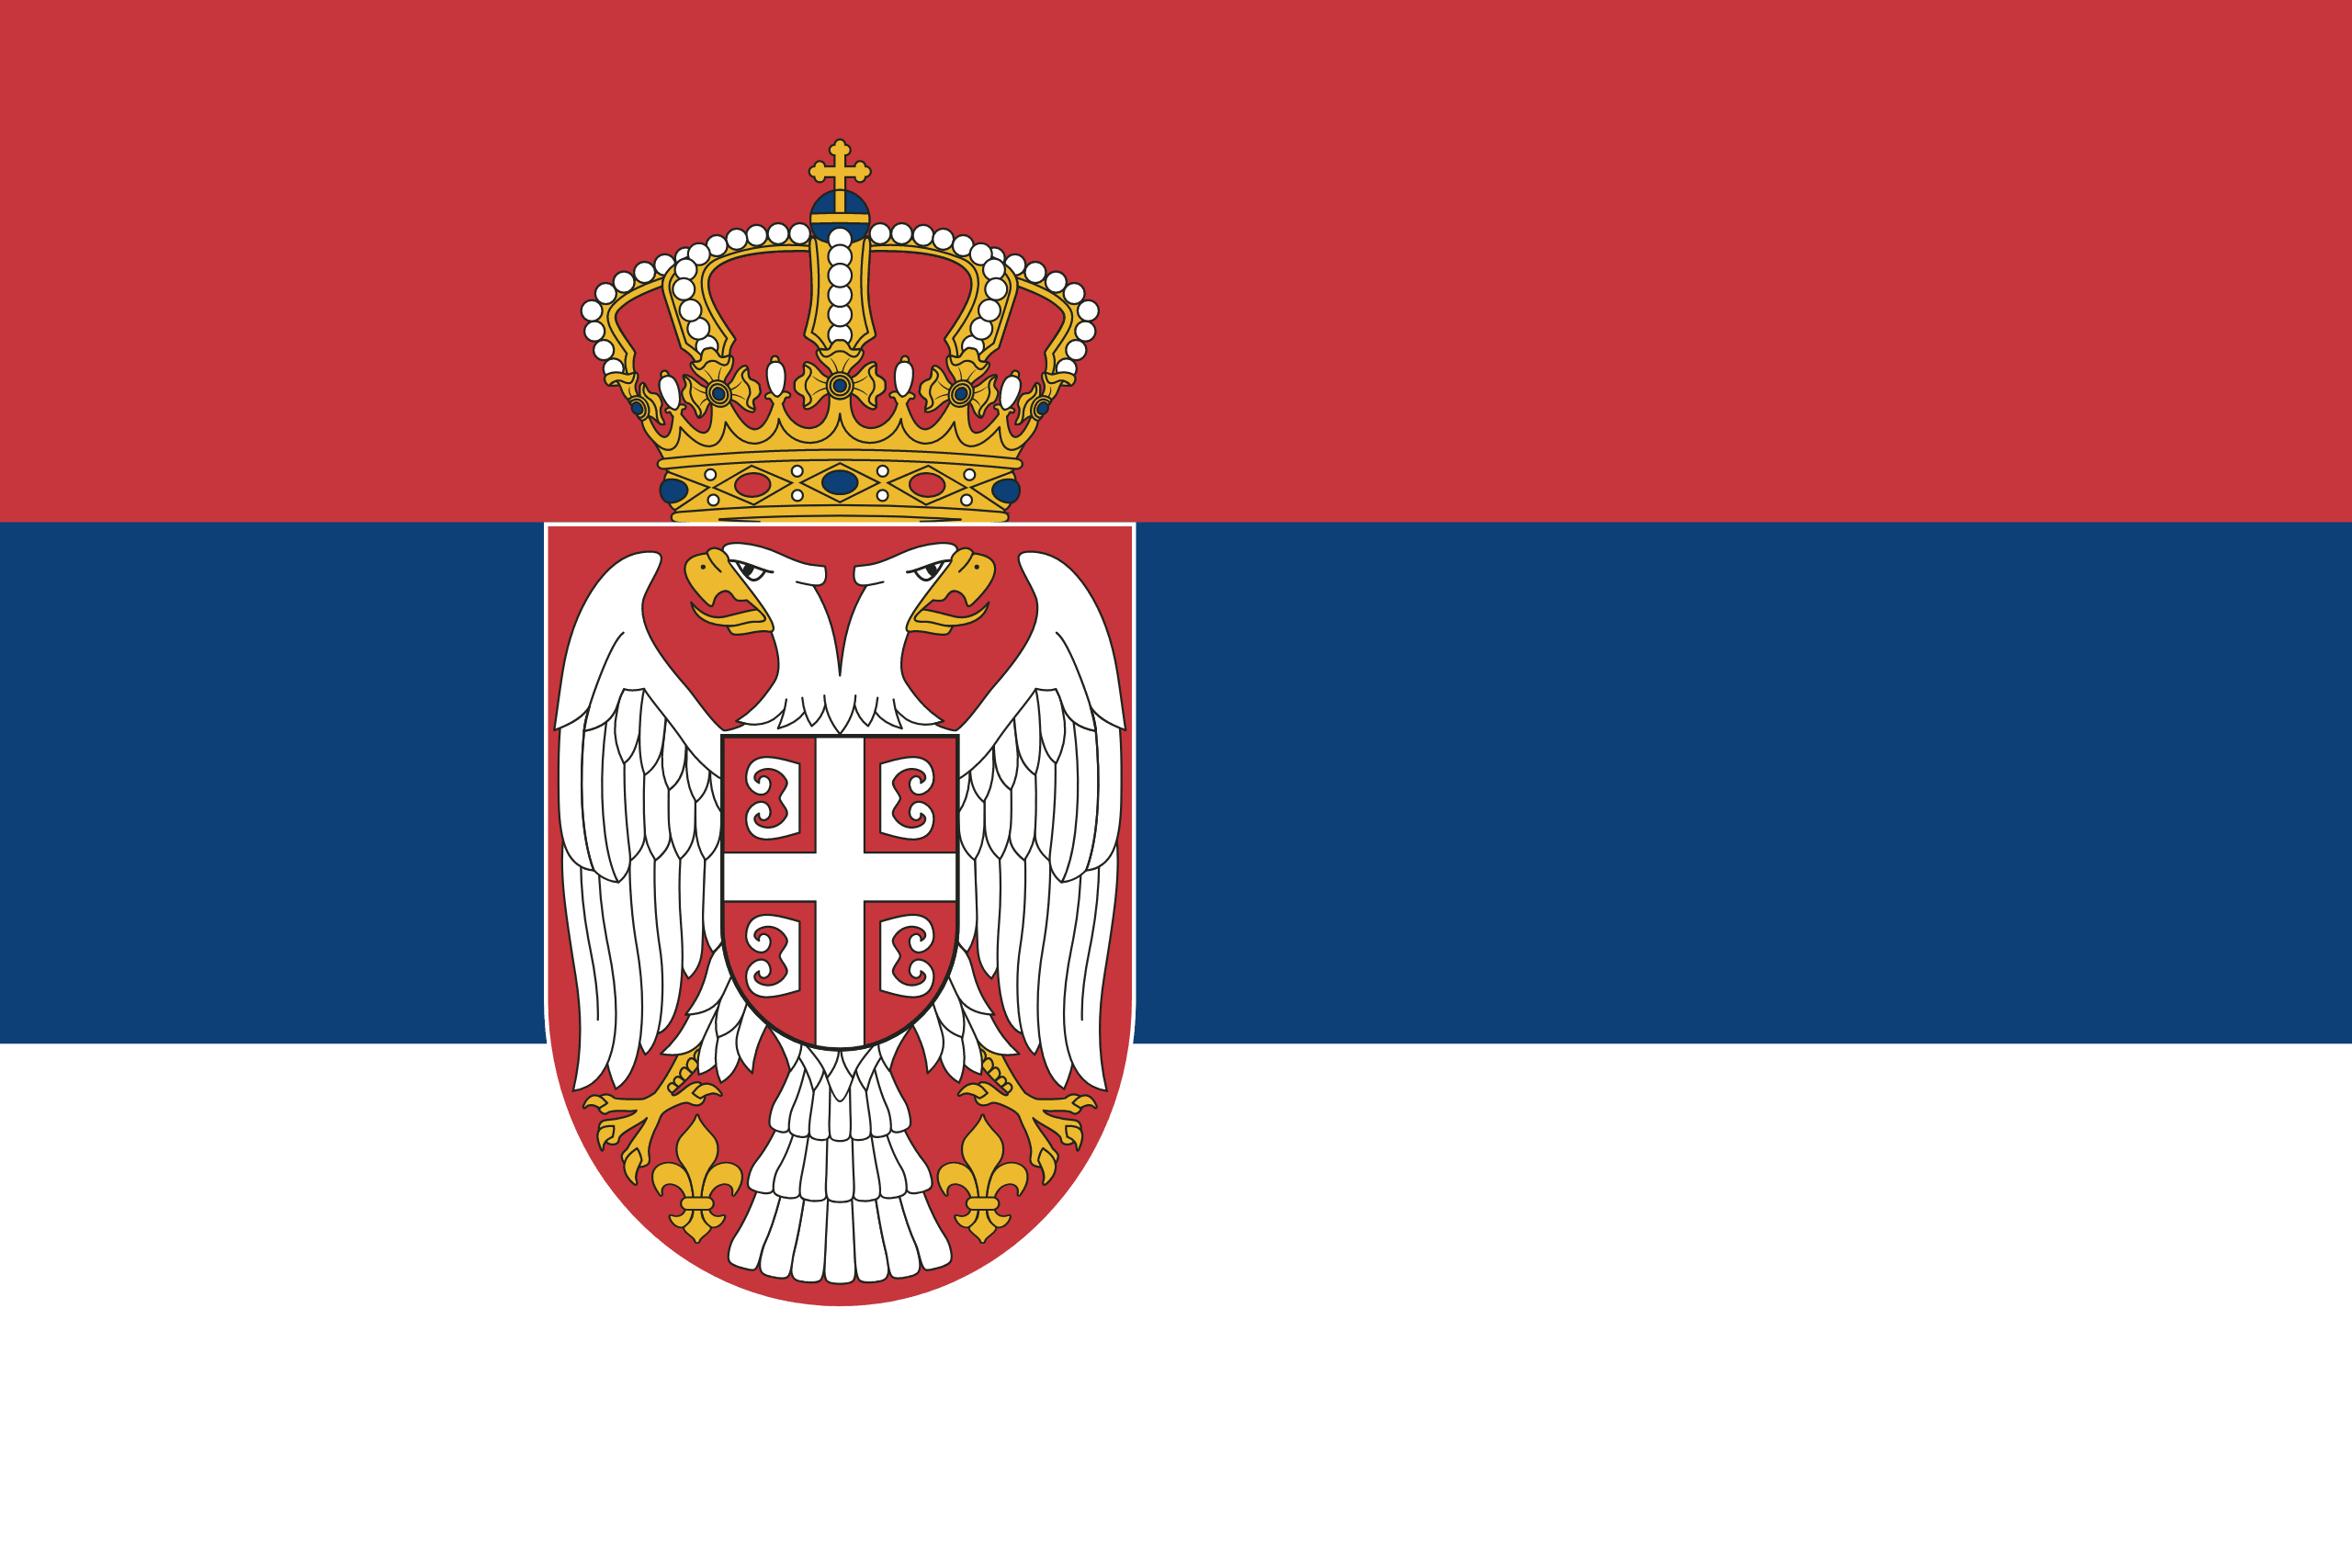

Seychelles


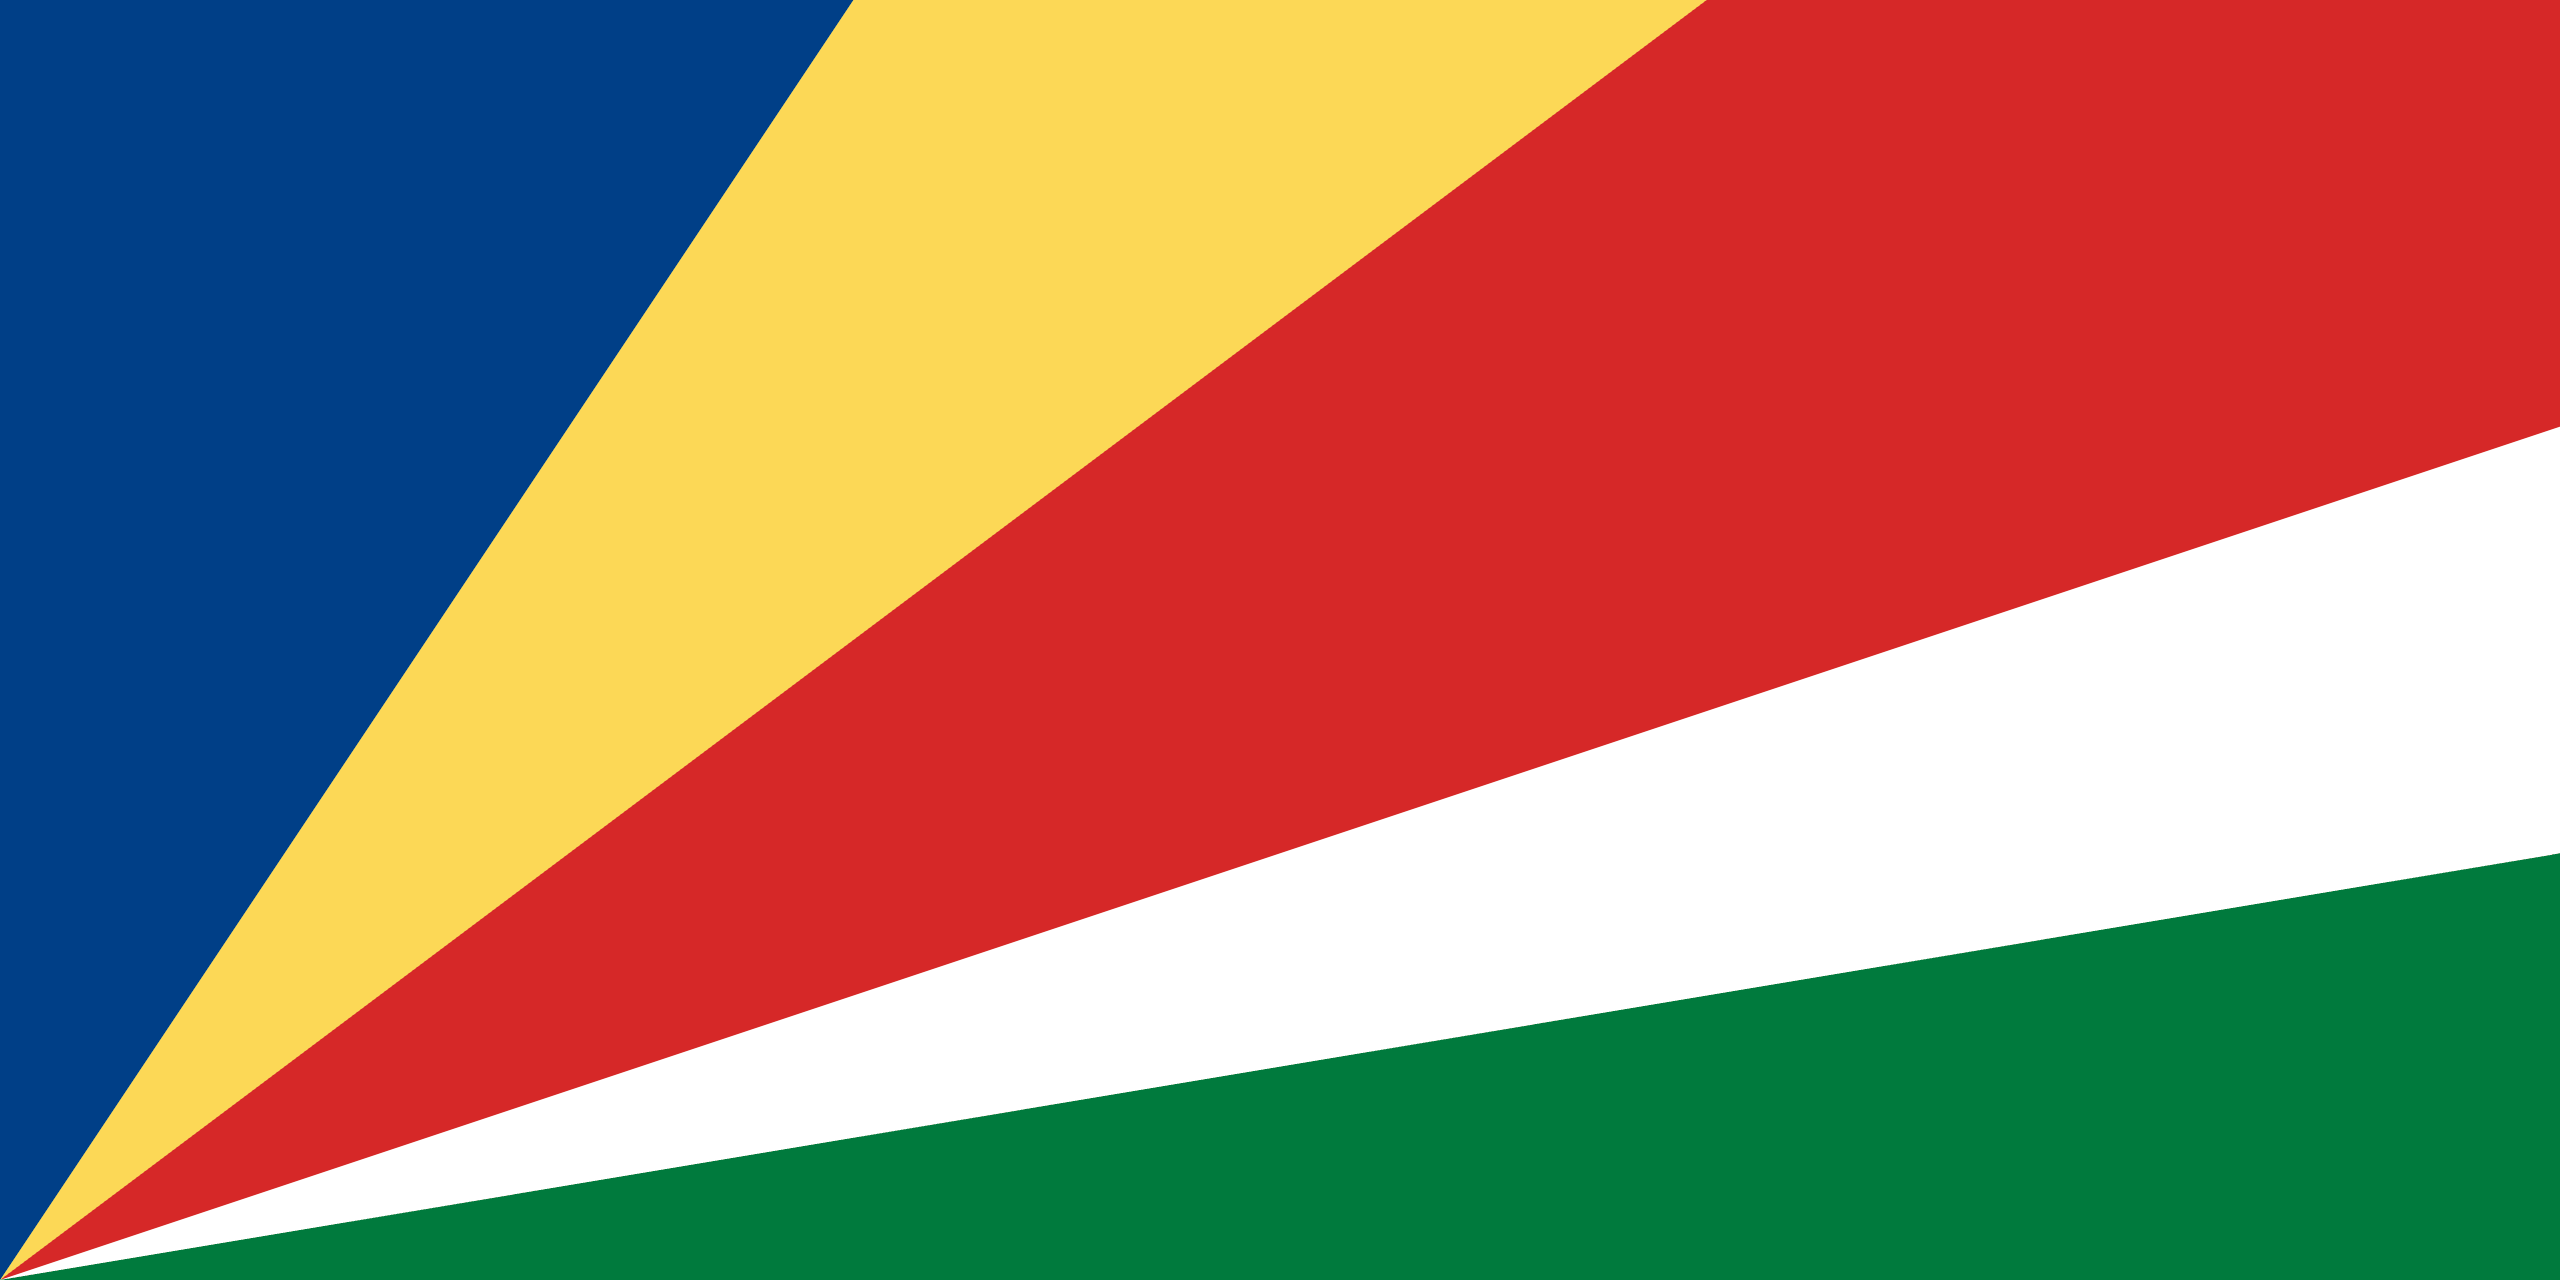

Sierra Leone


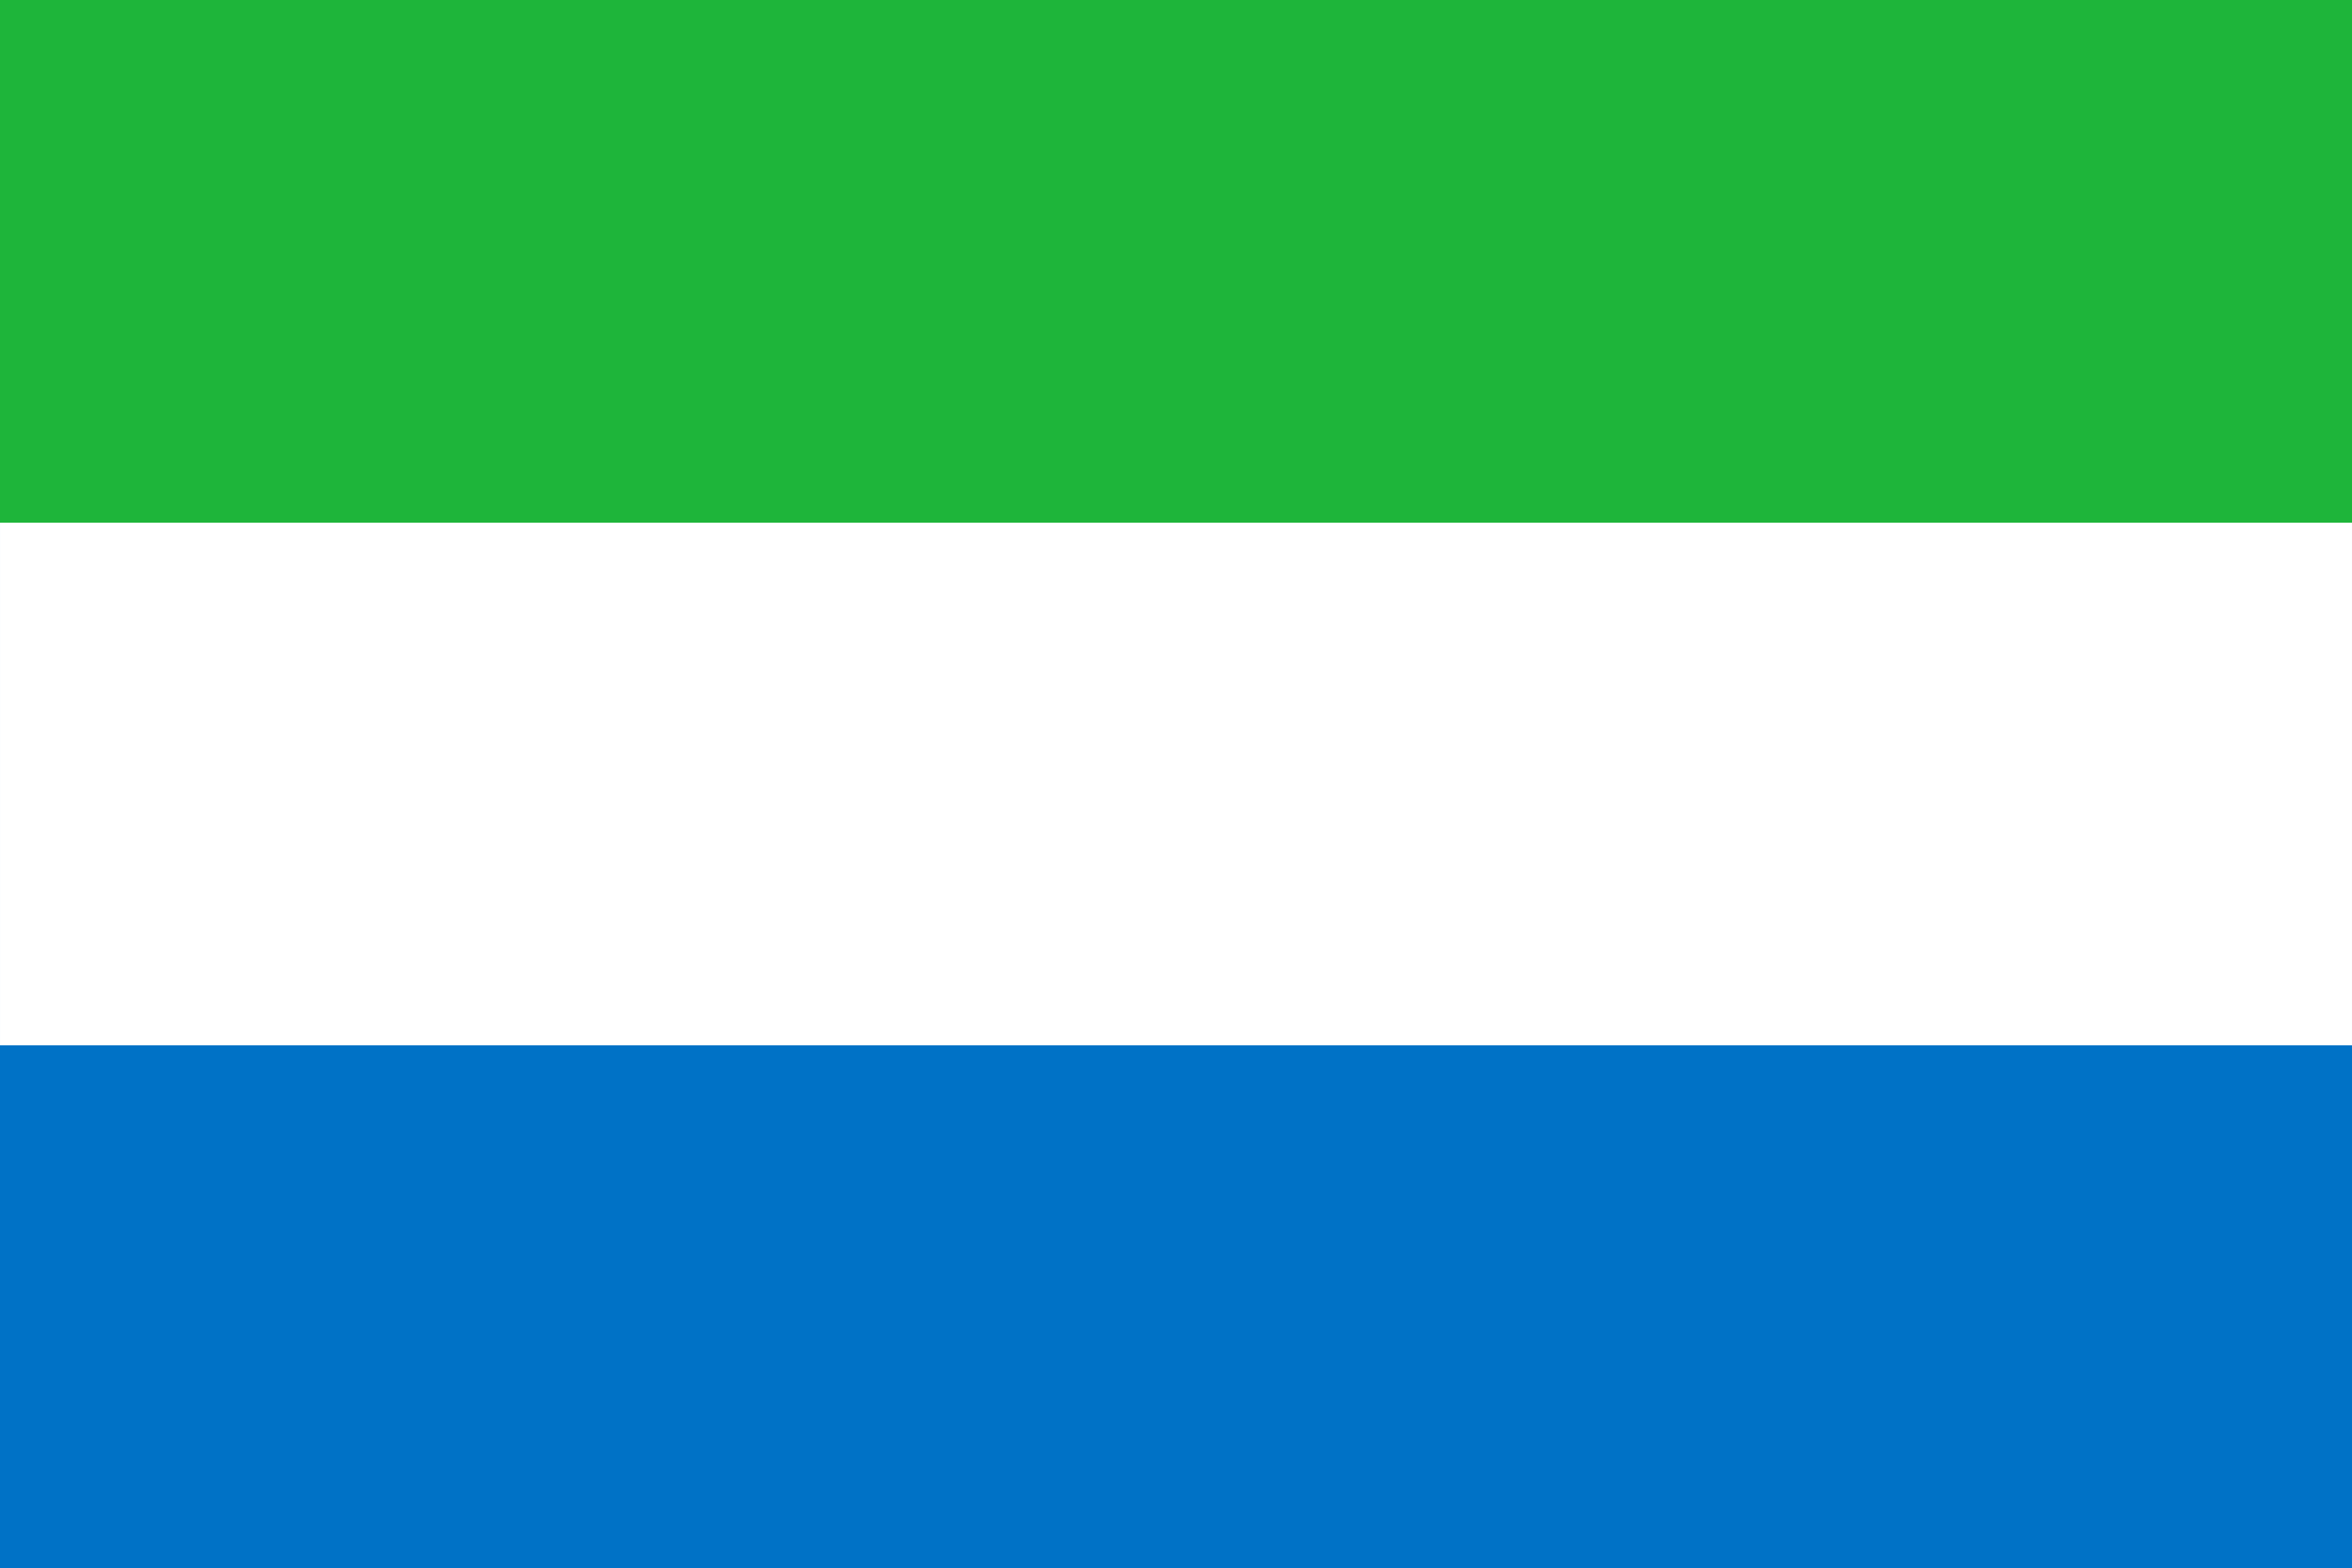

Singapore


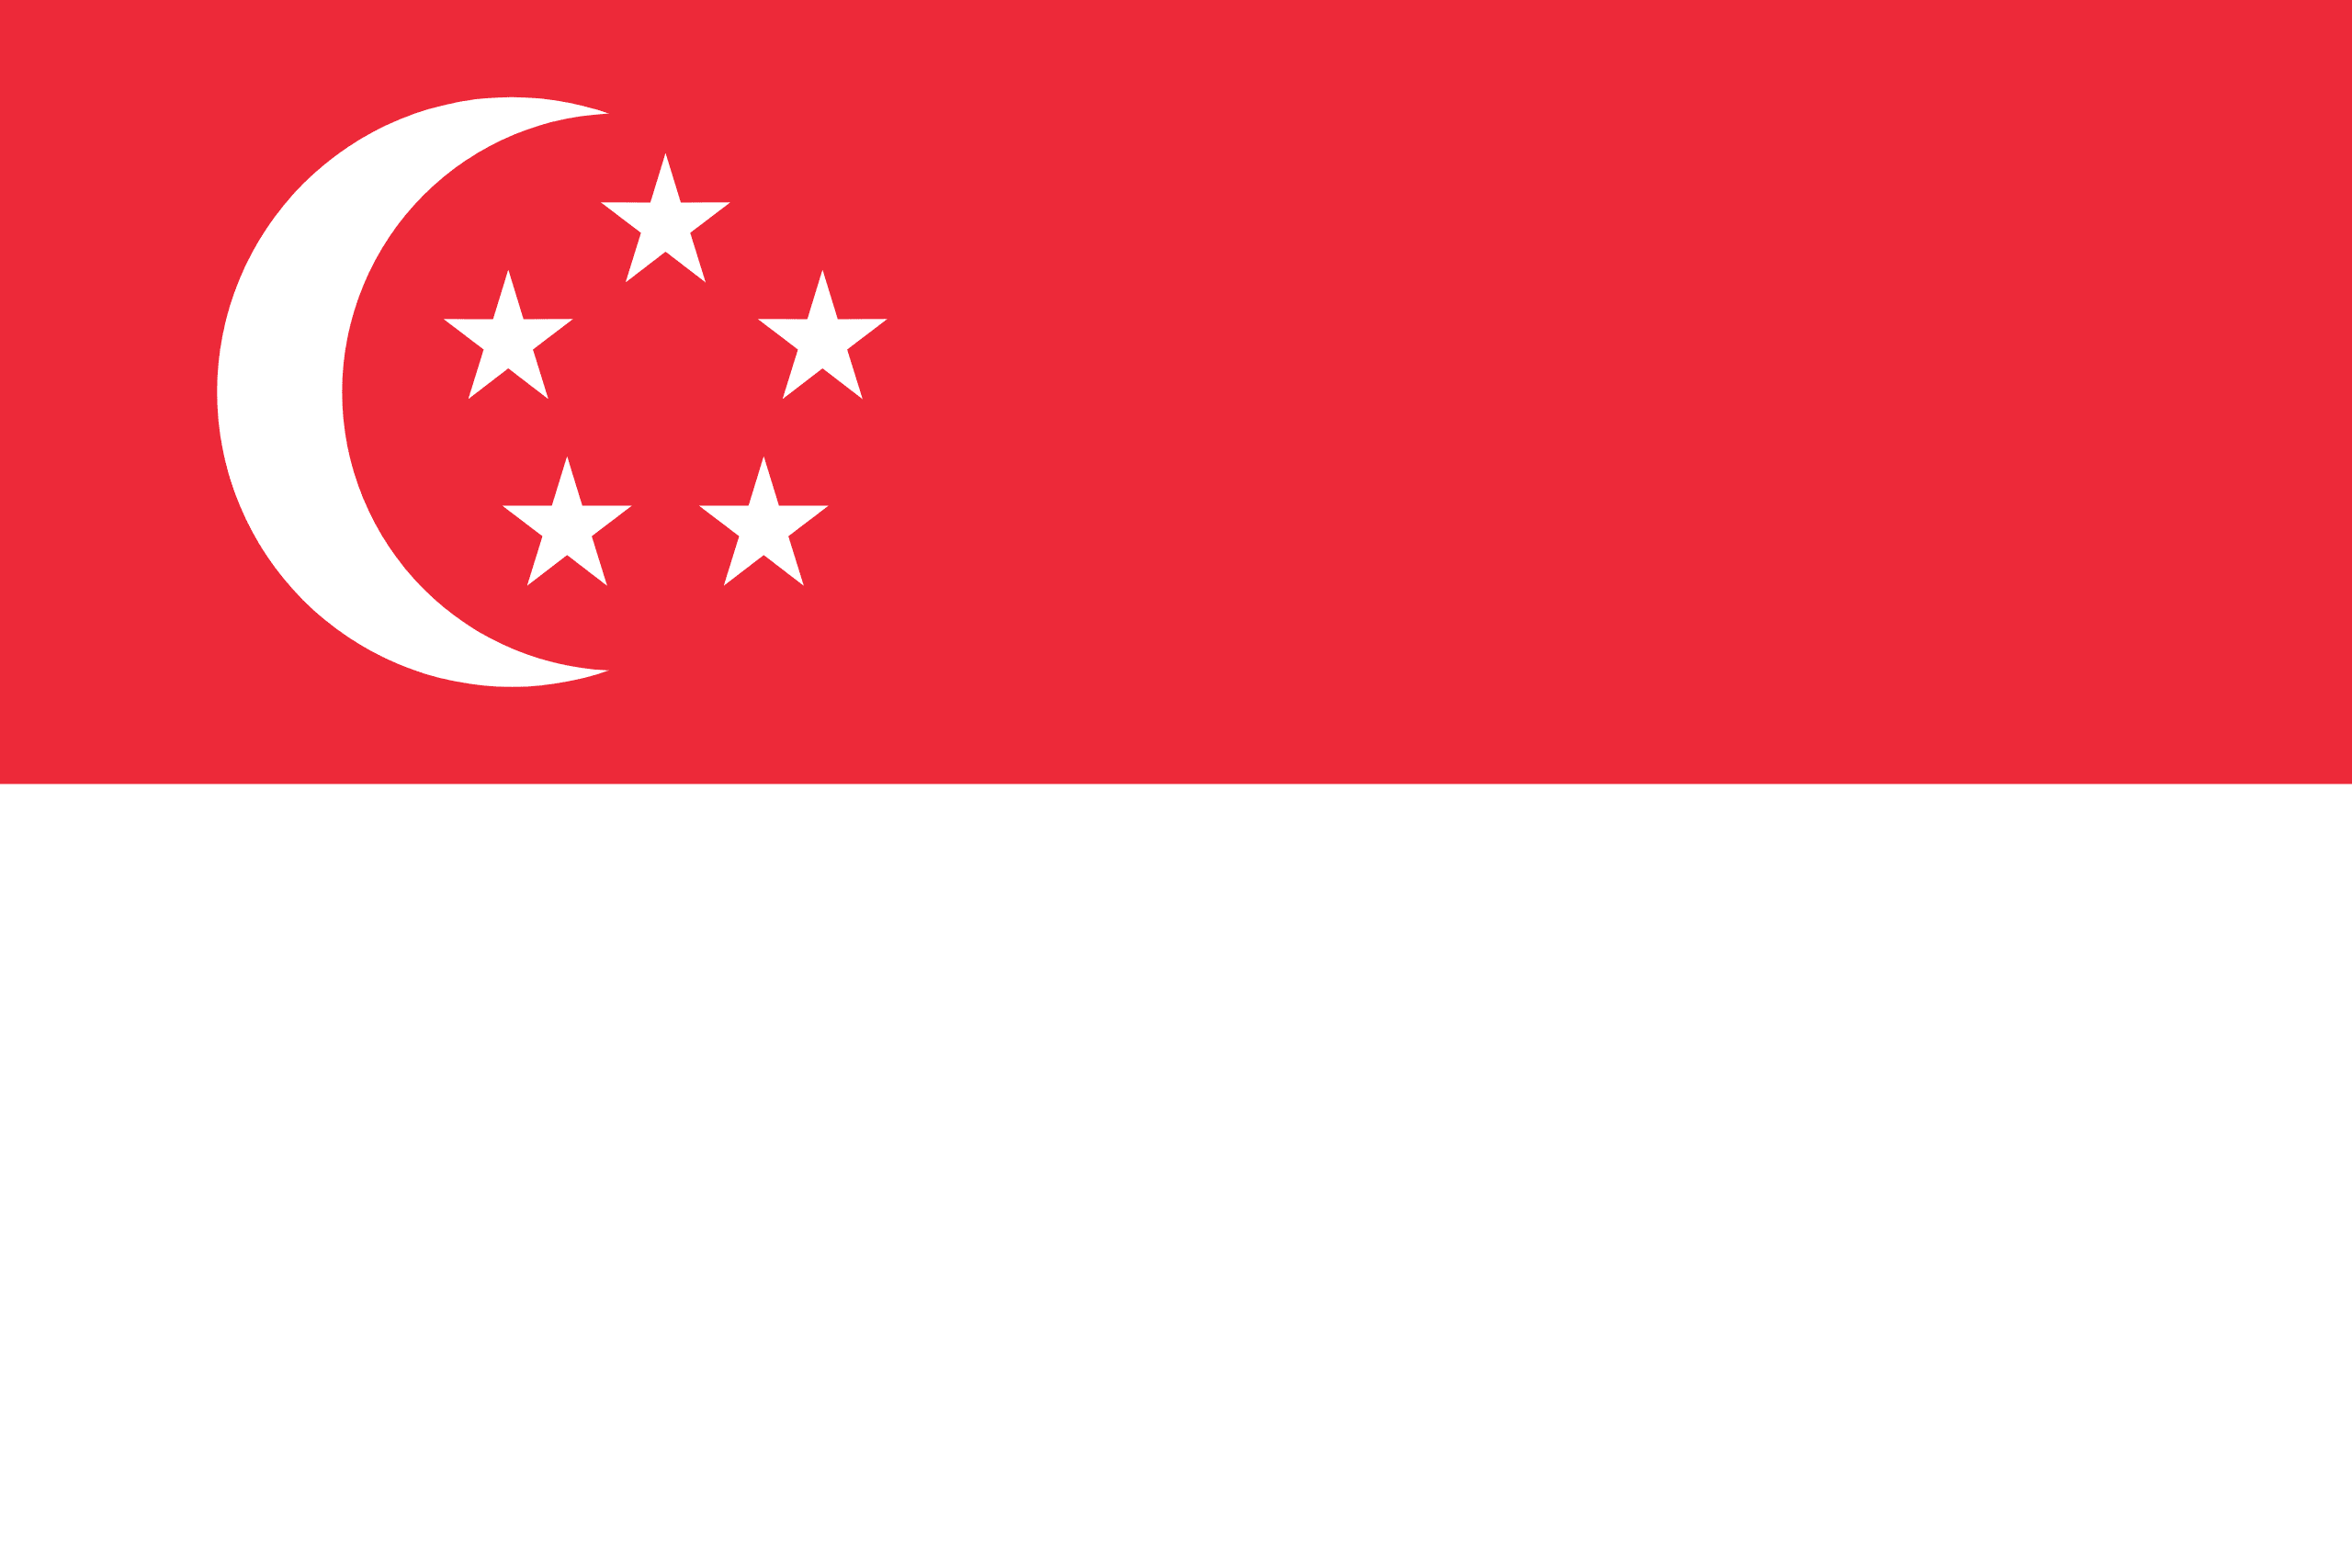

Sint Maarten


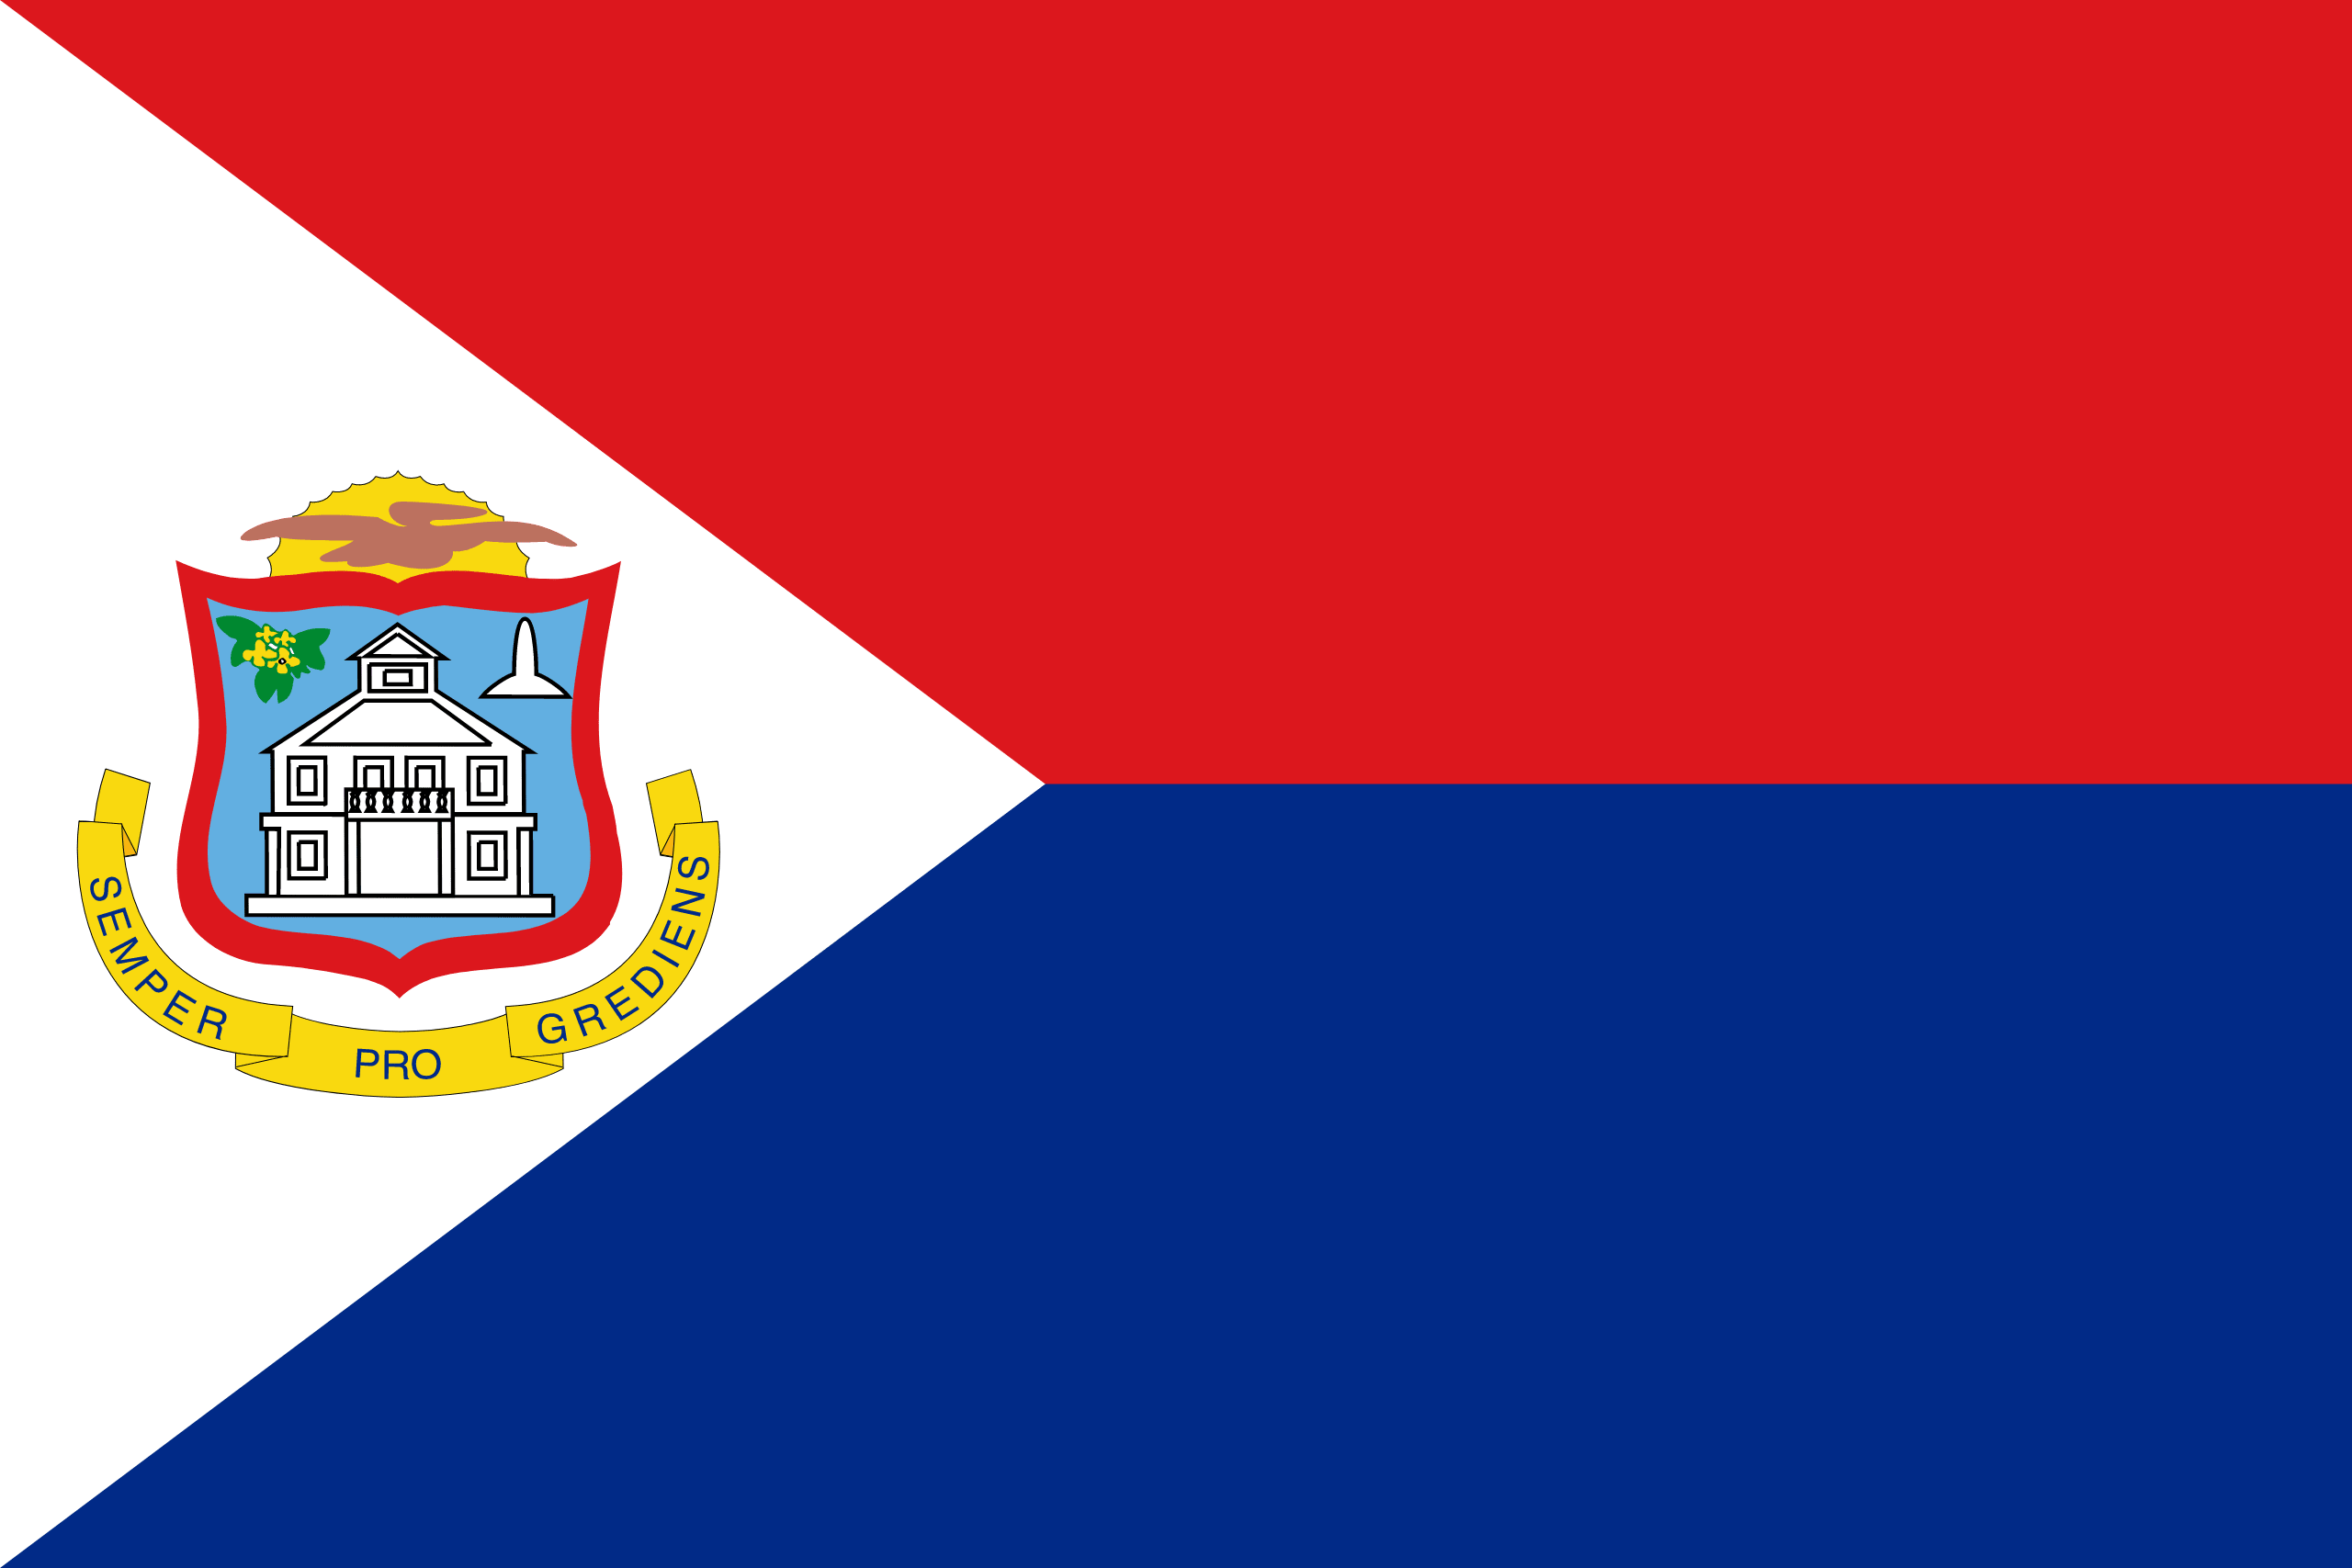

Slovakia


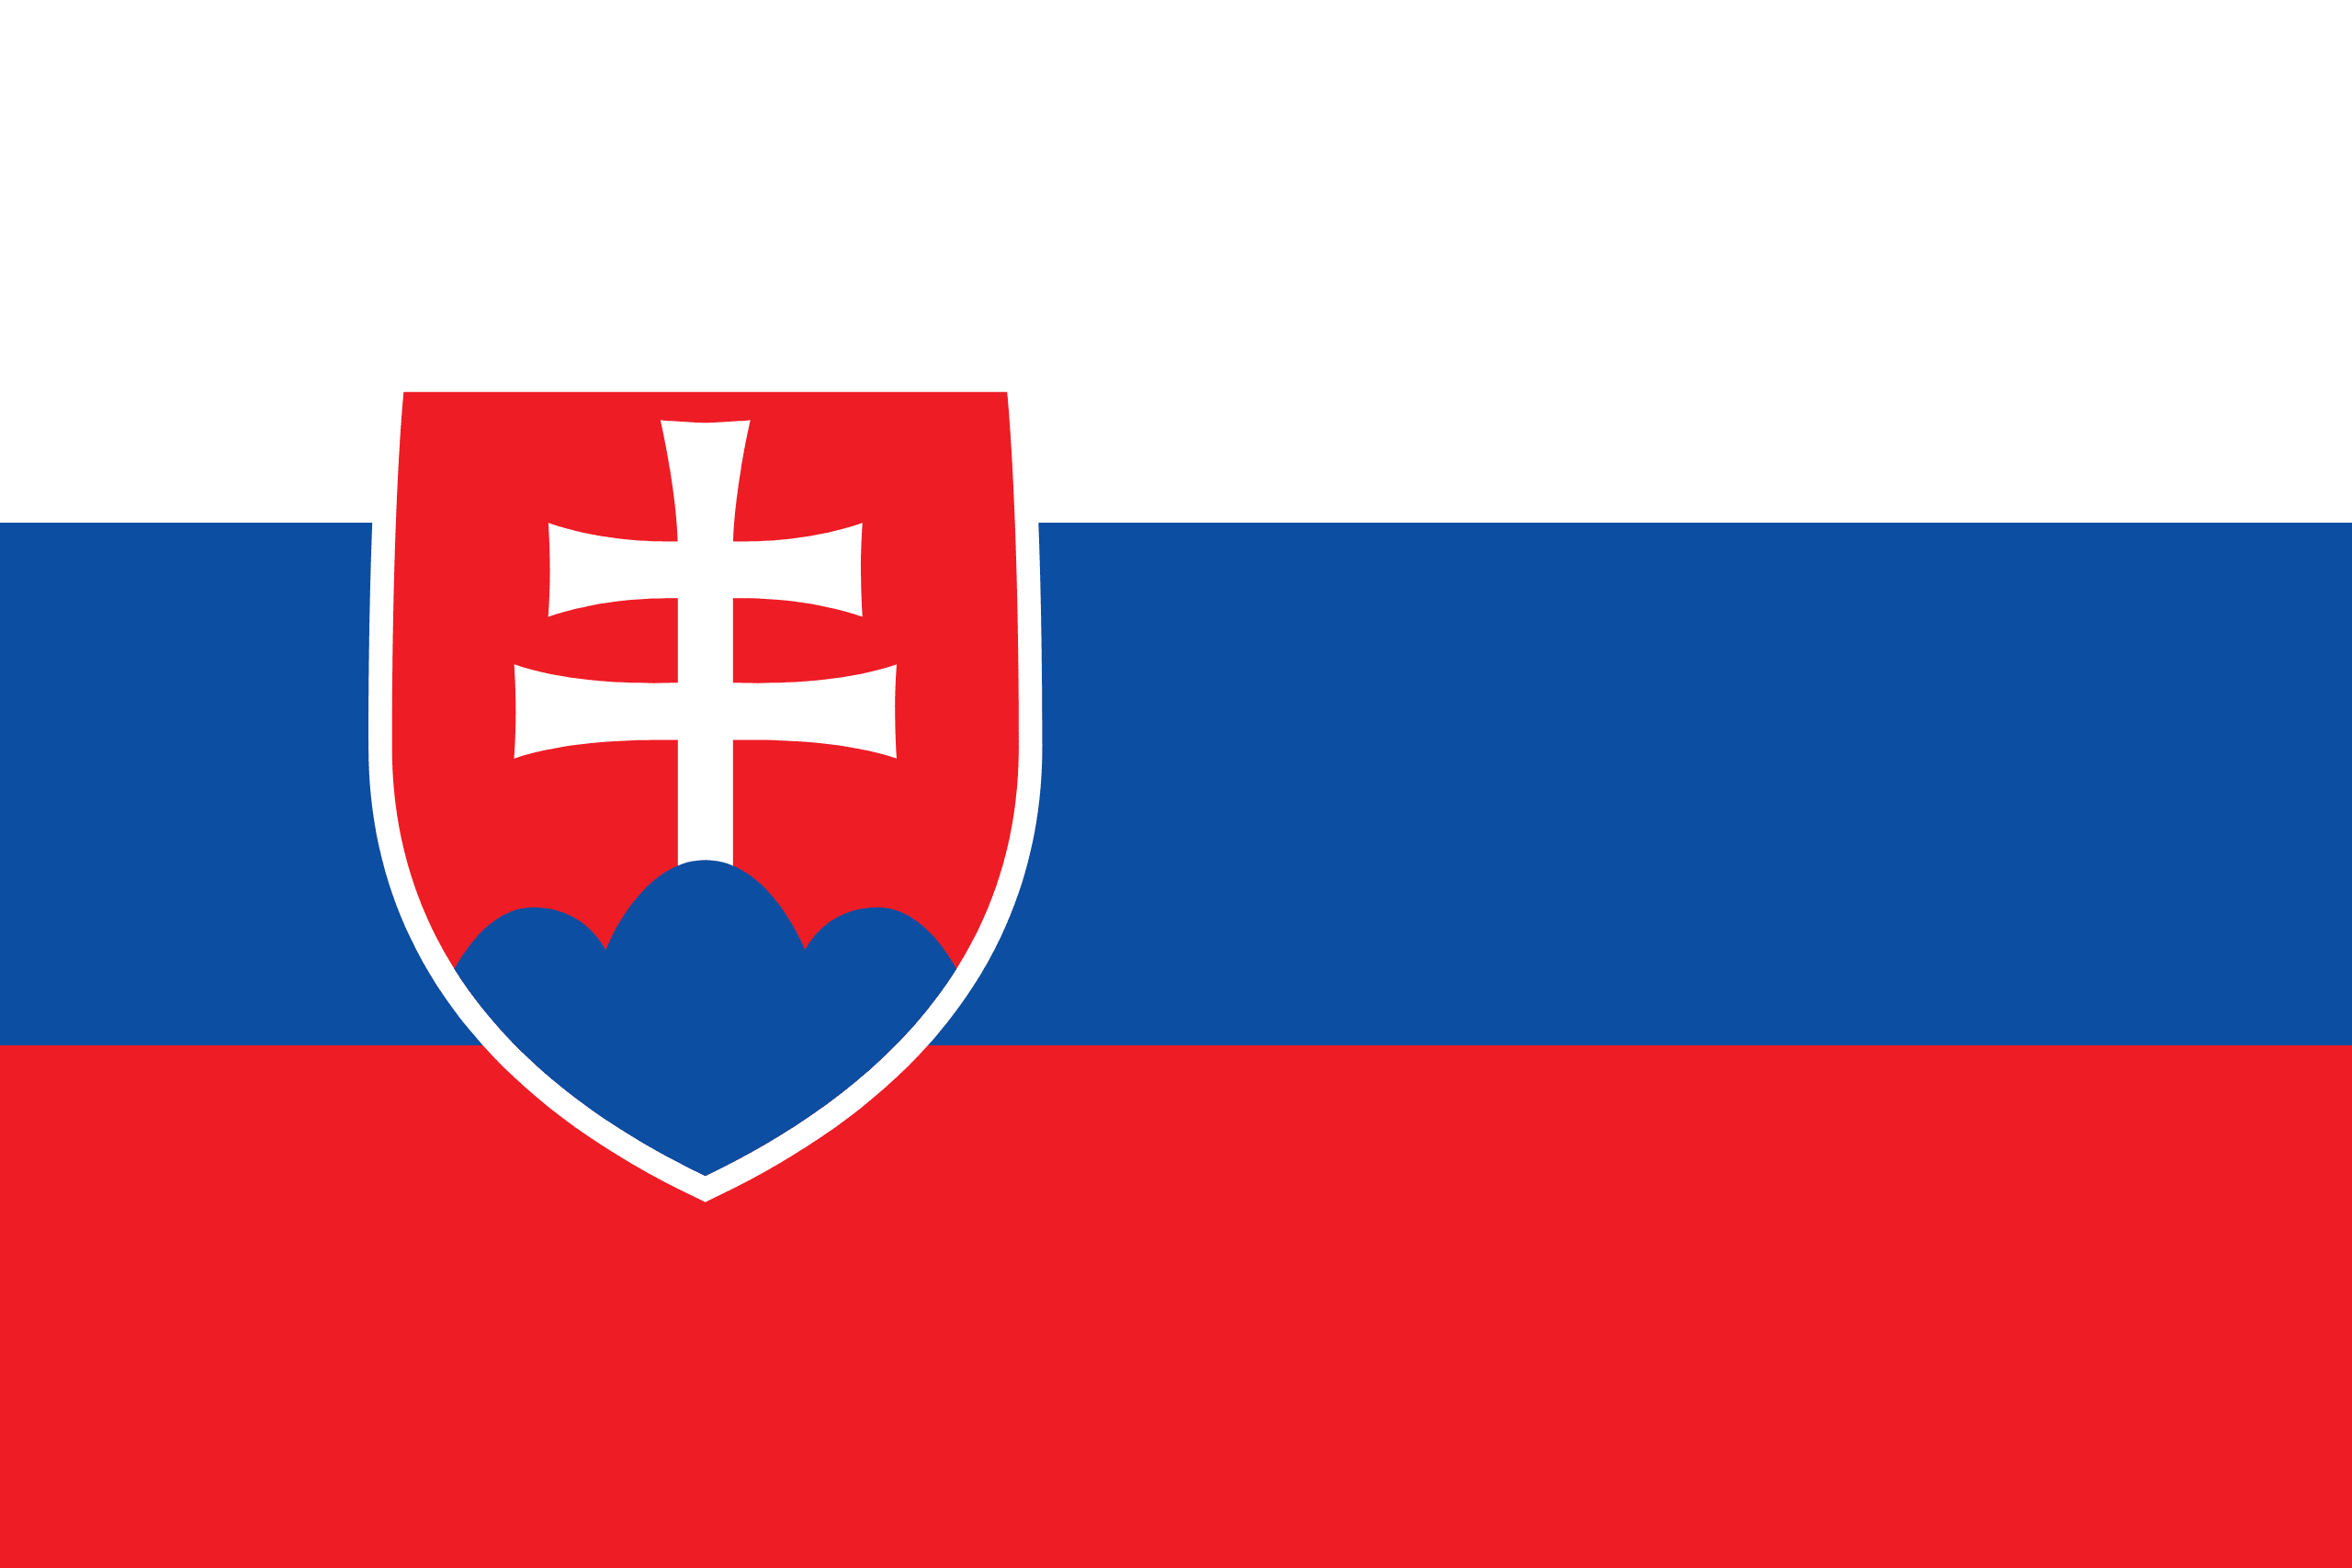

Slovenia


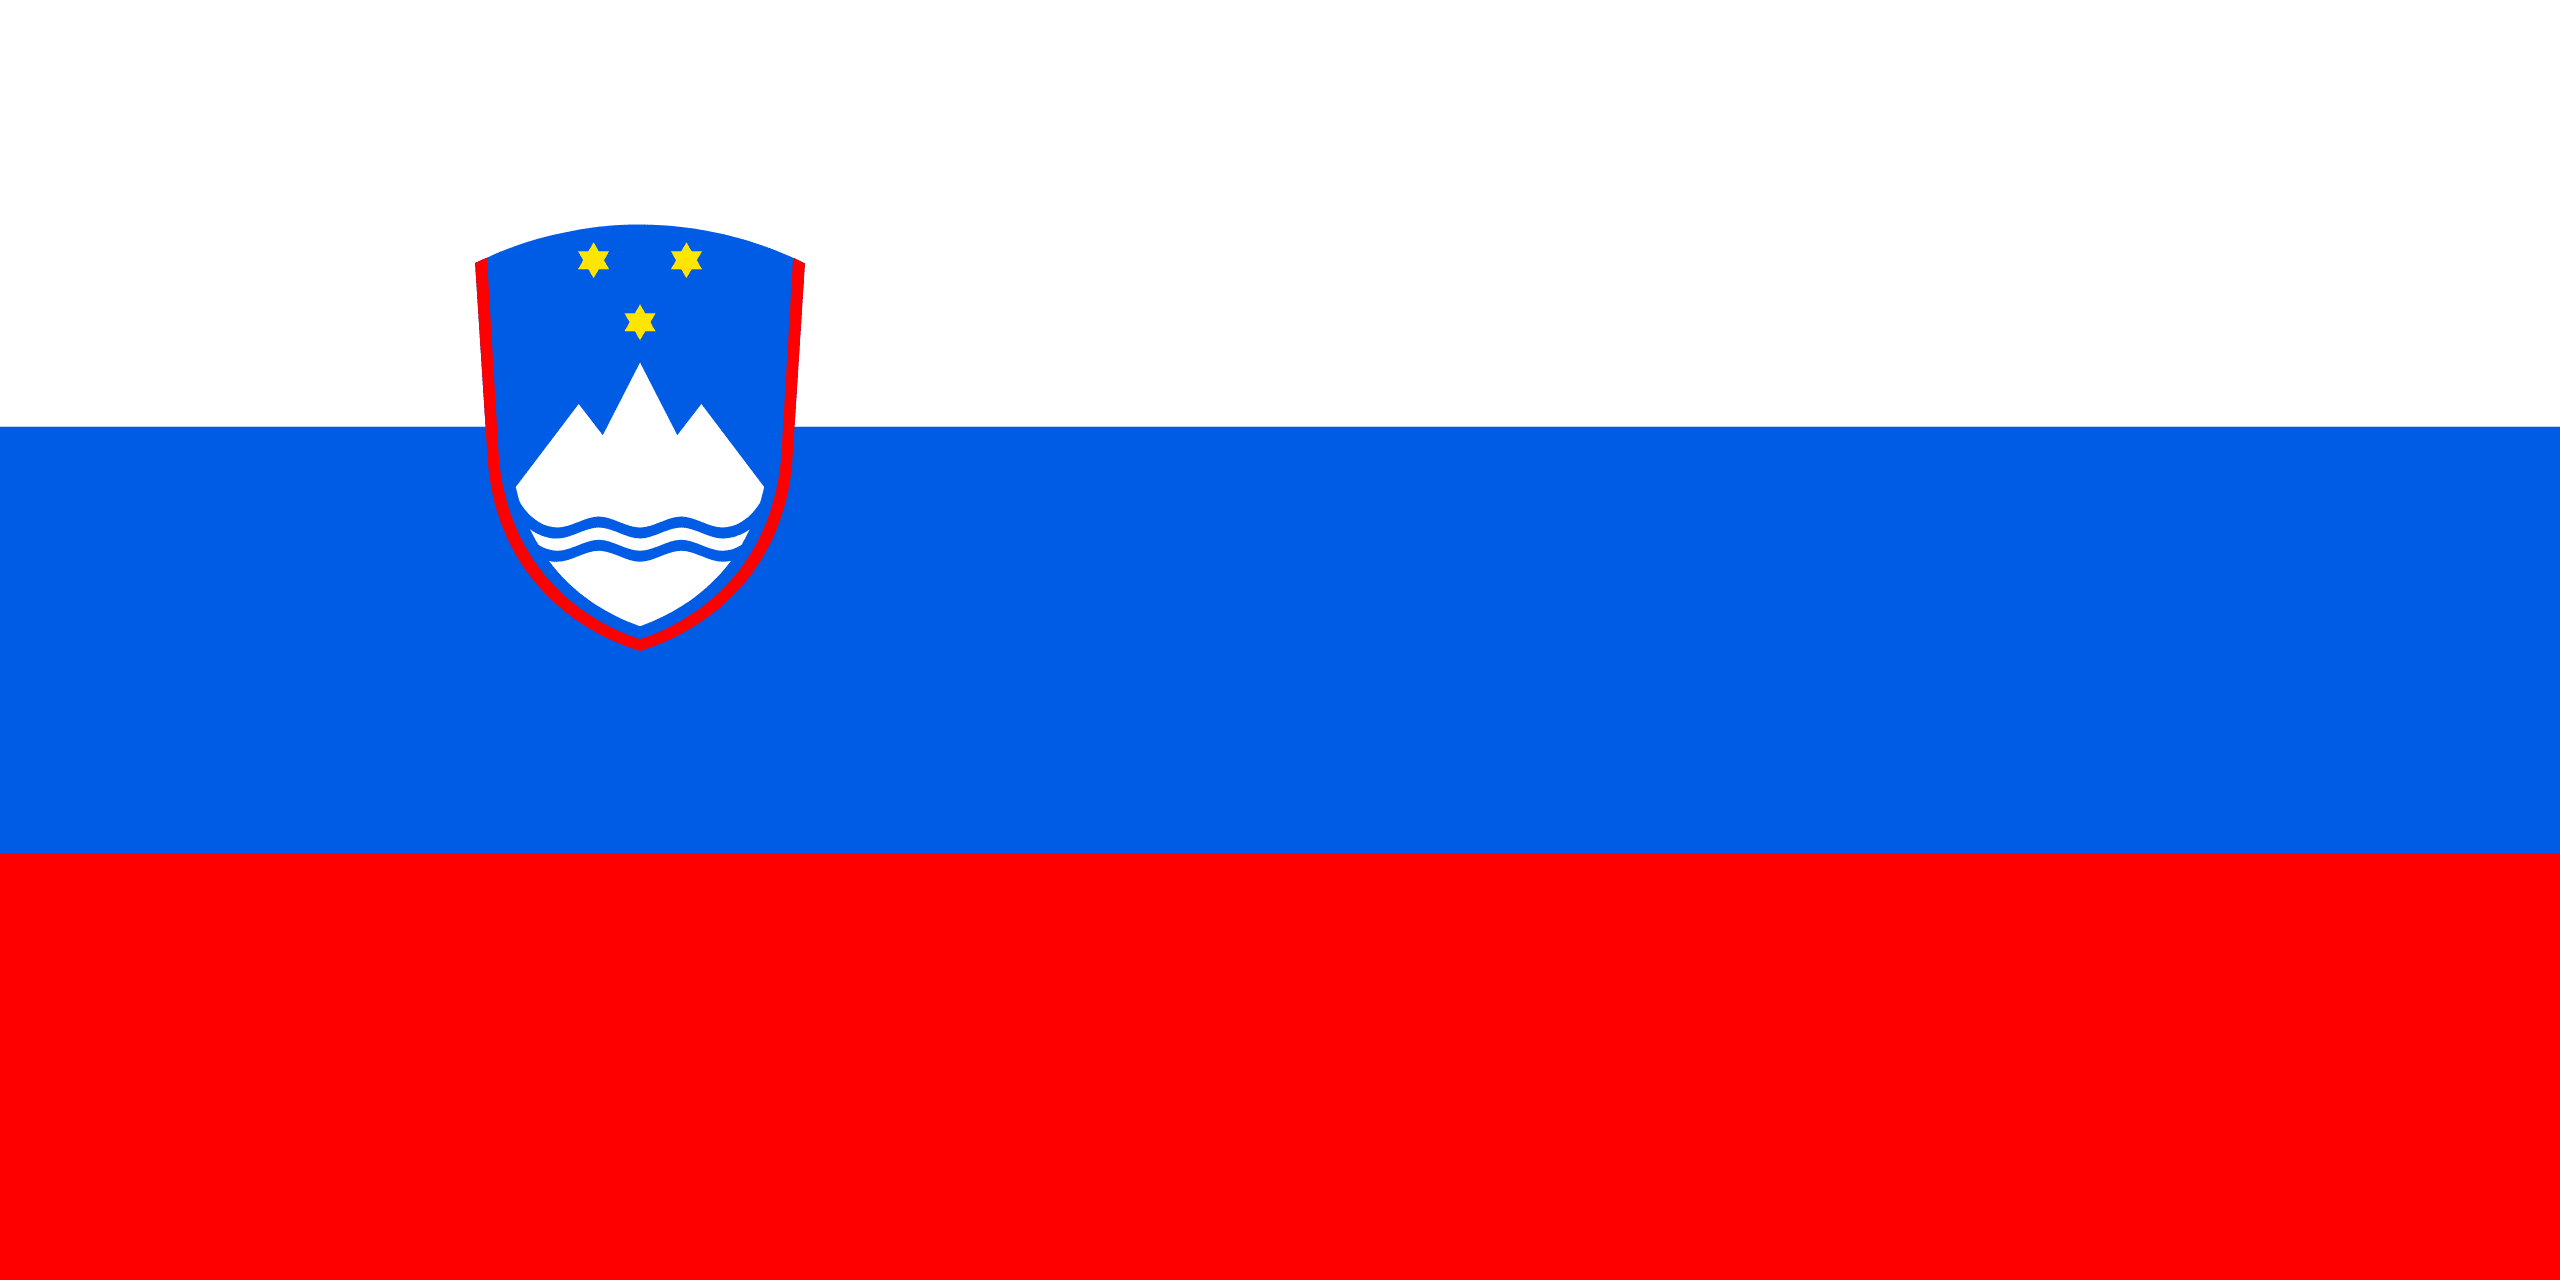

Solomon Islands


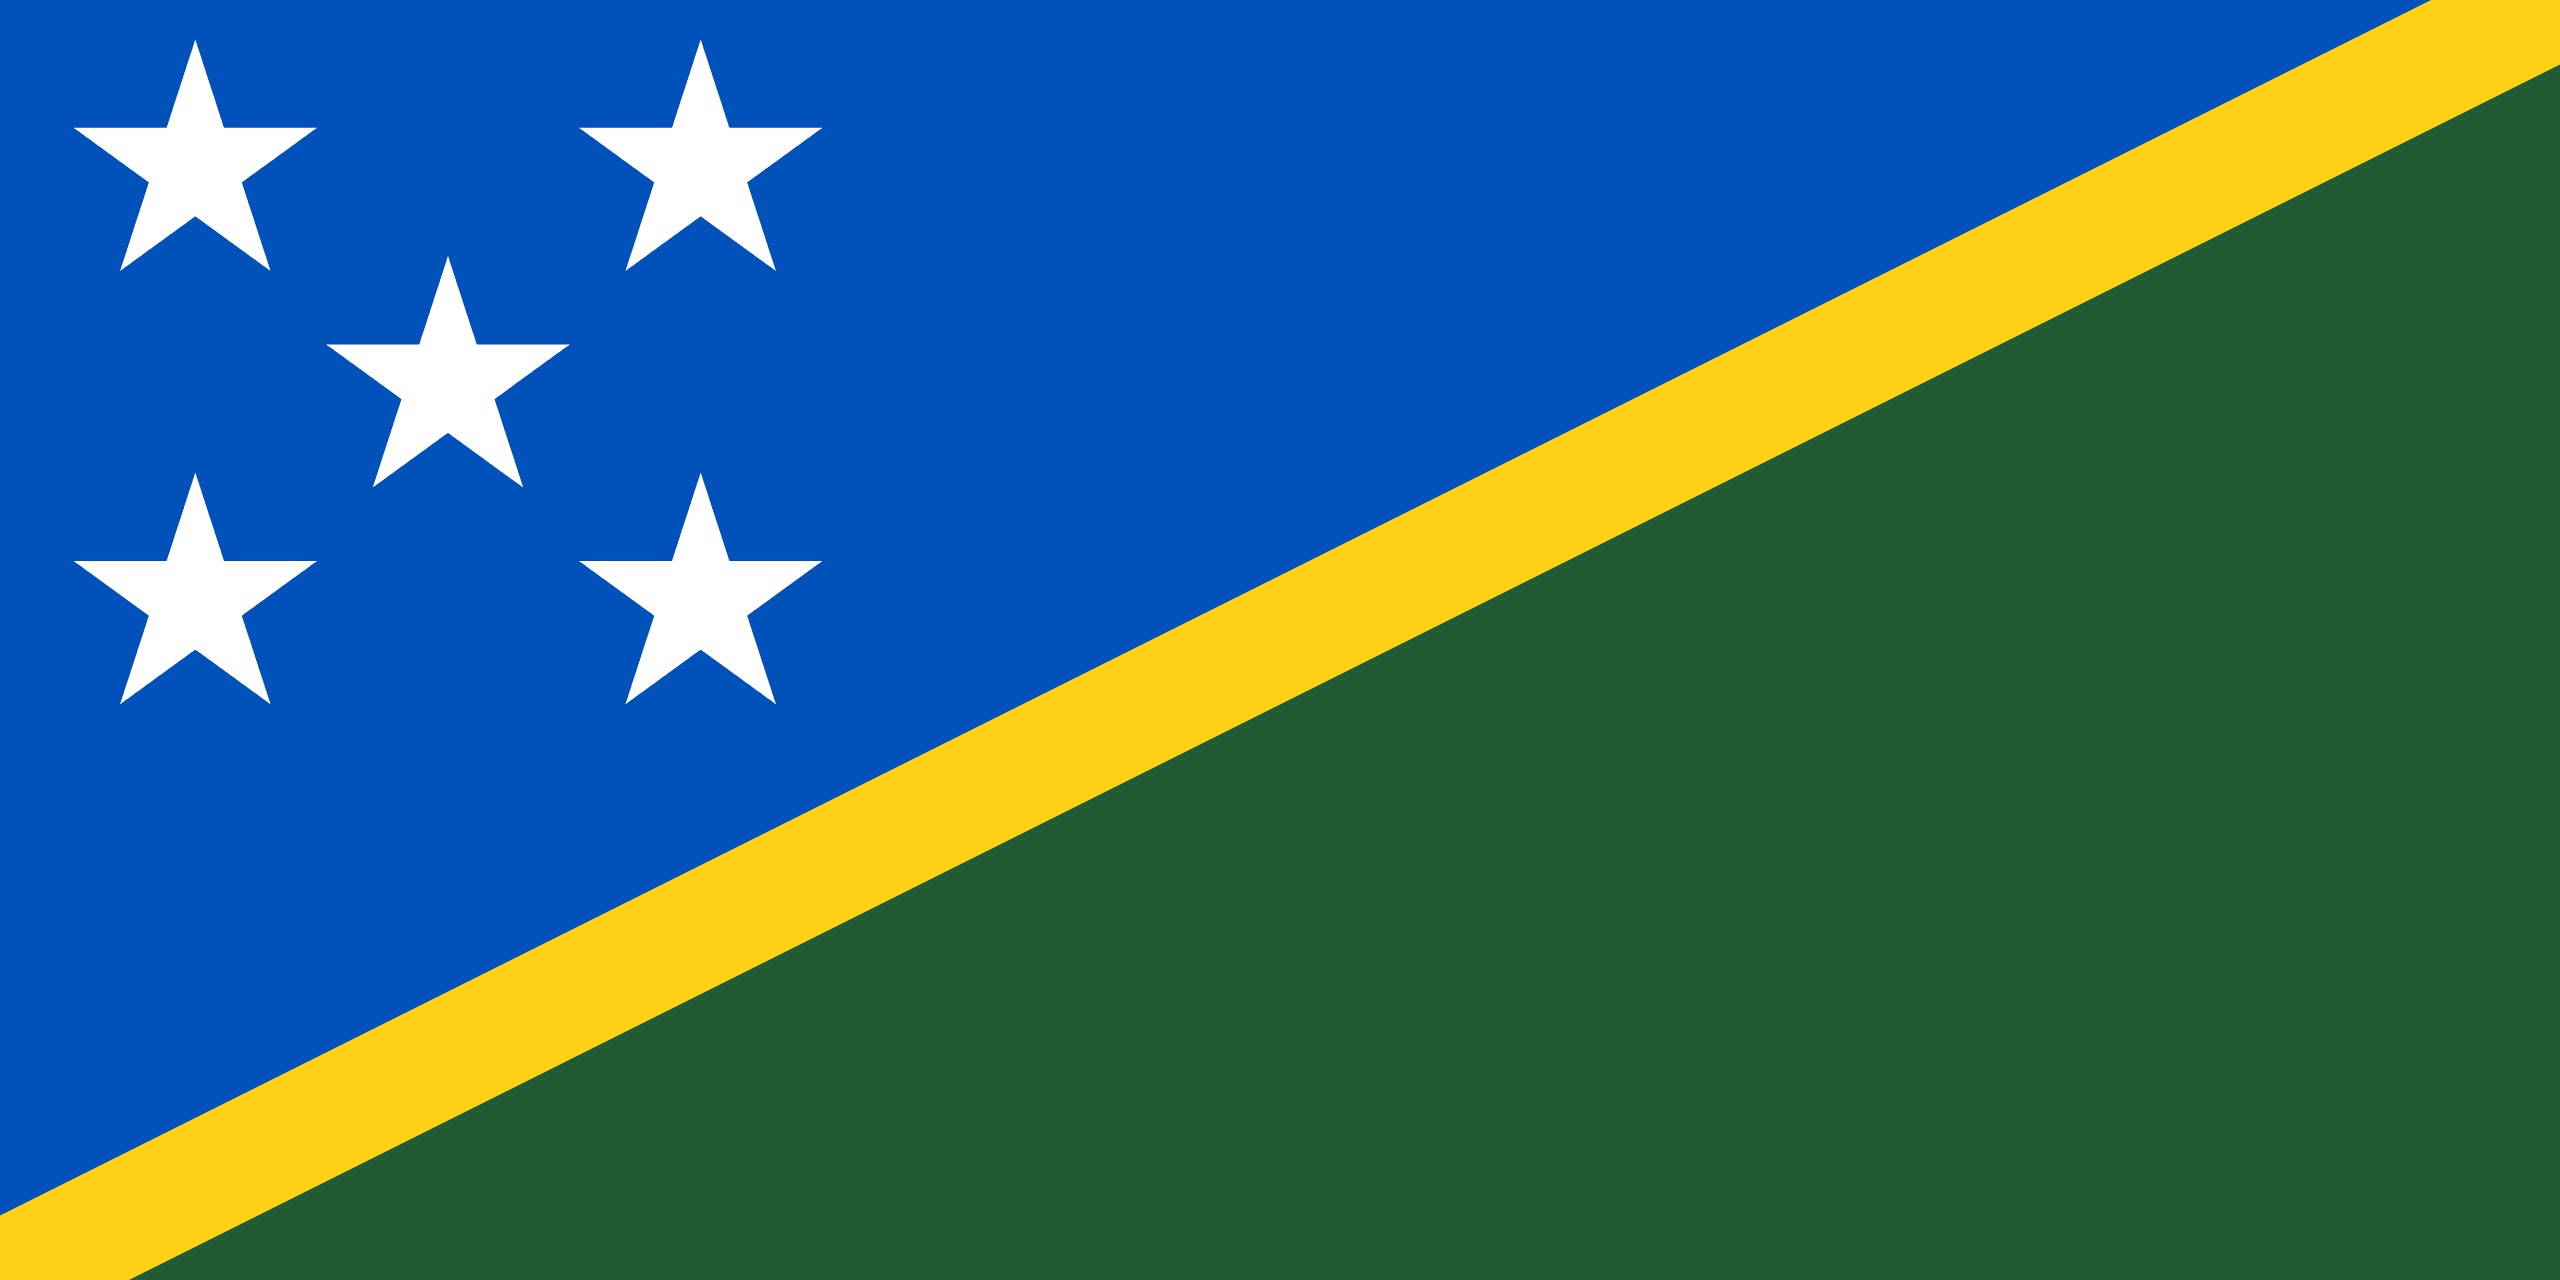

Somalia


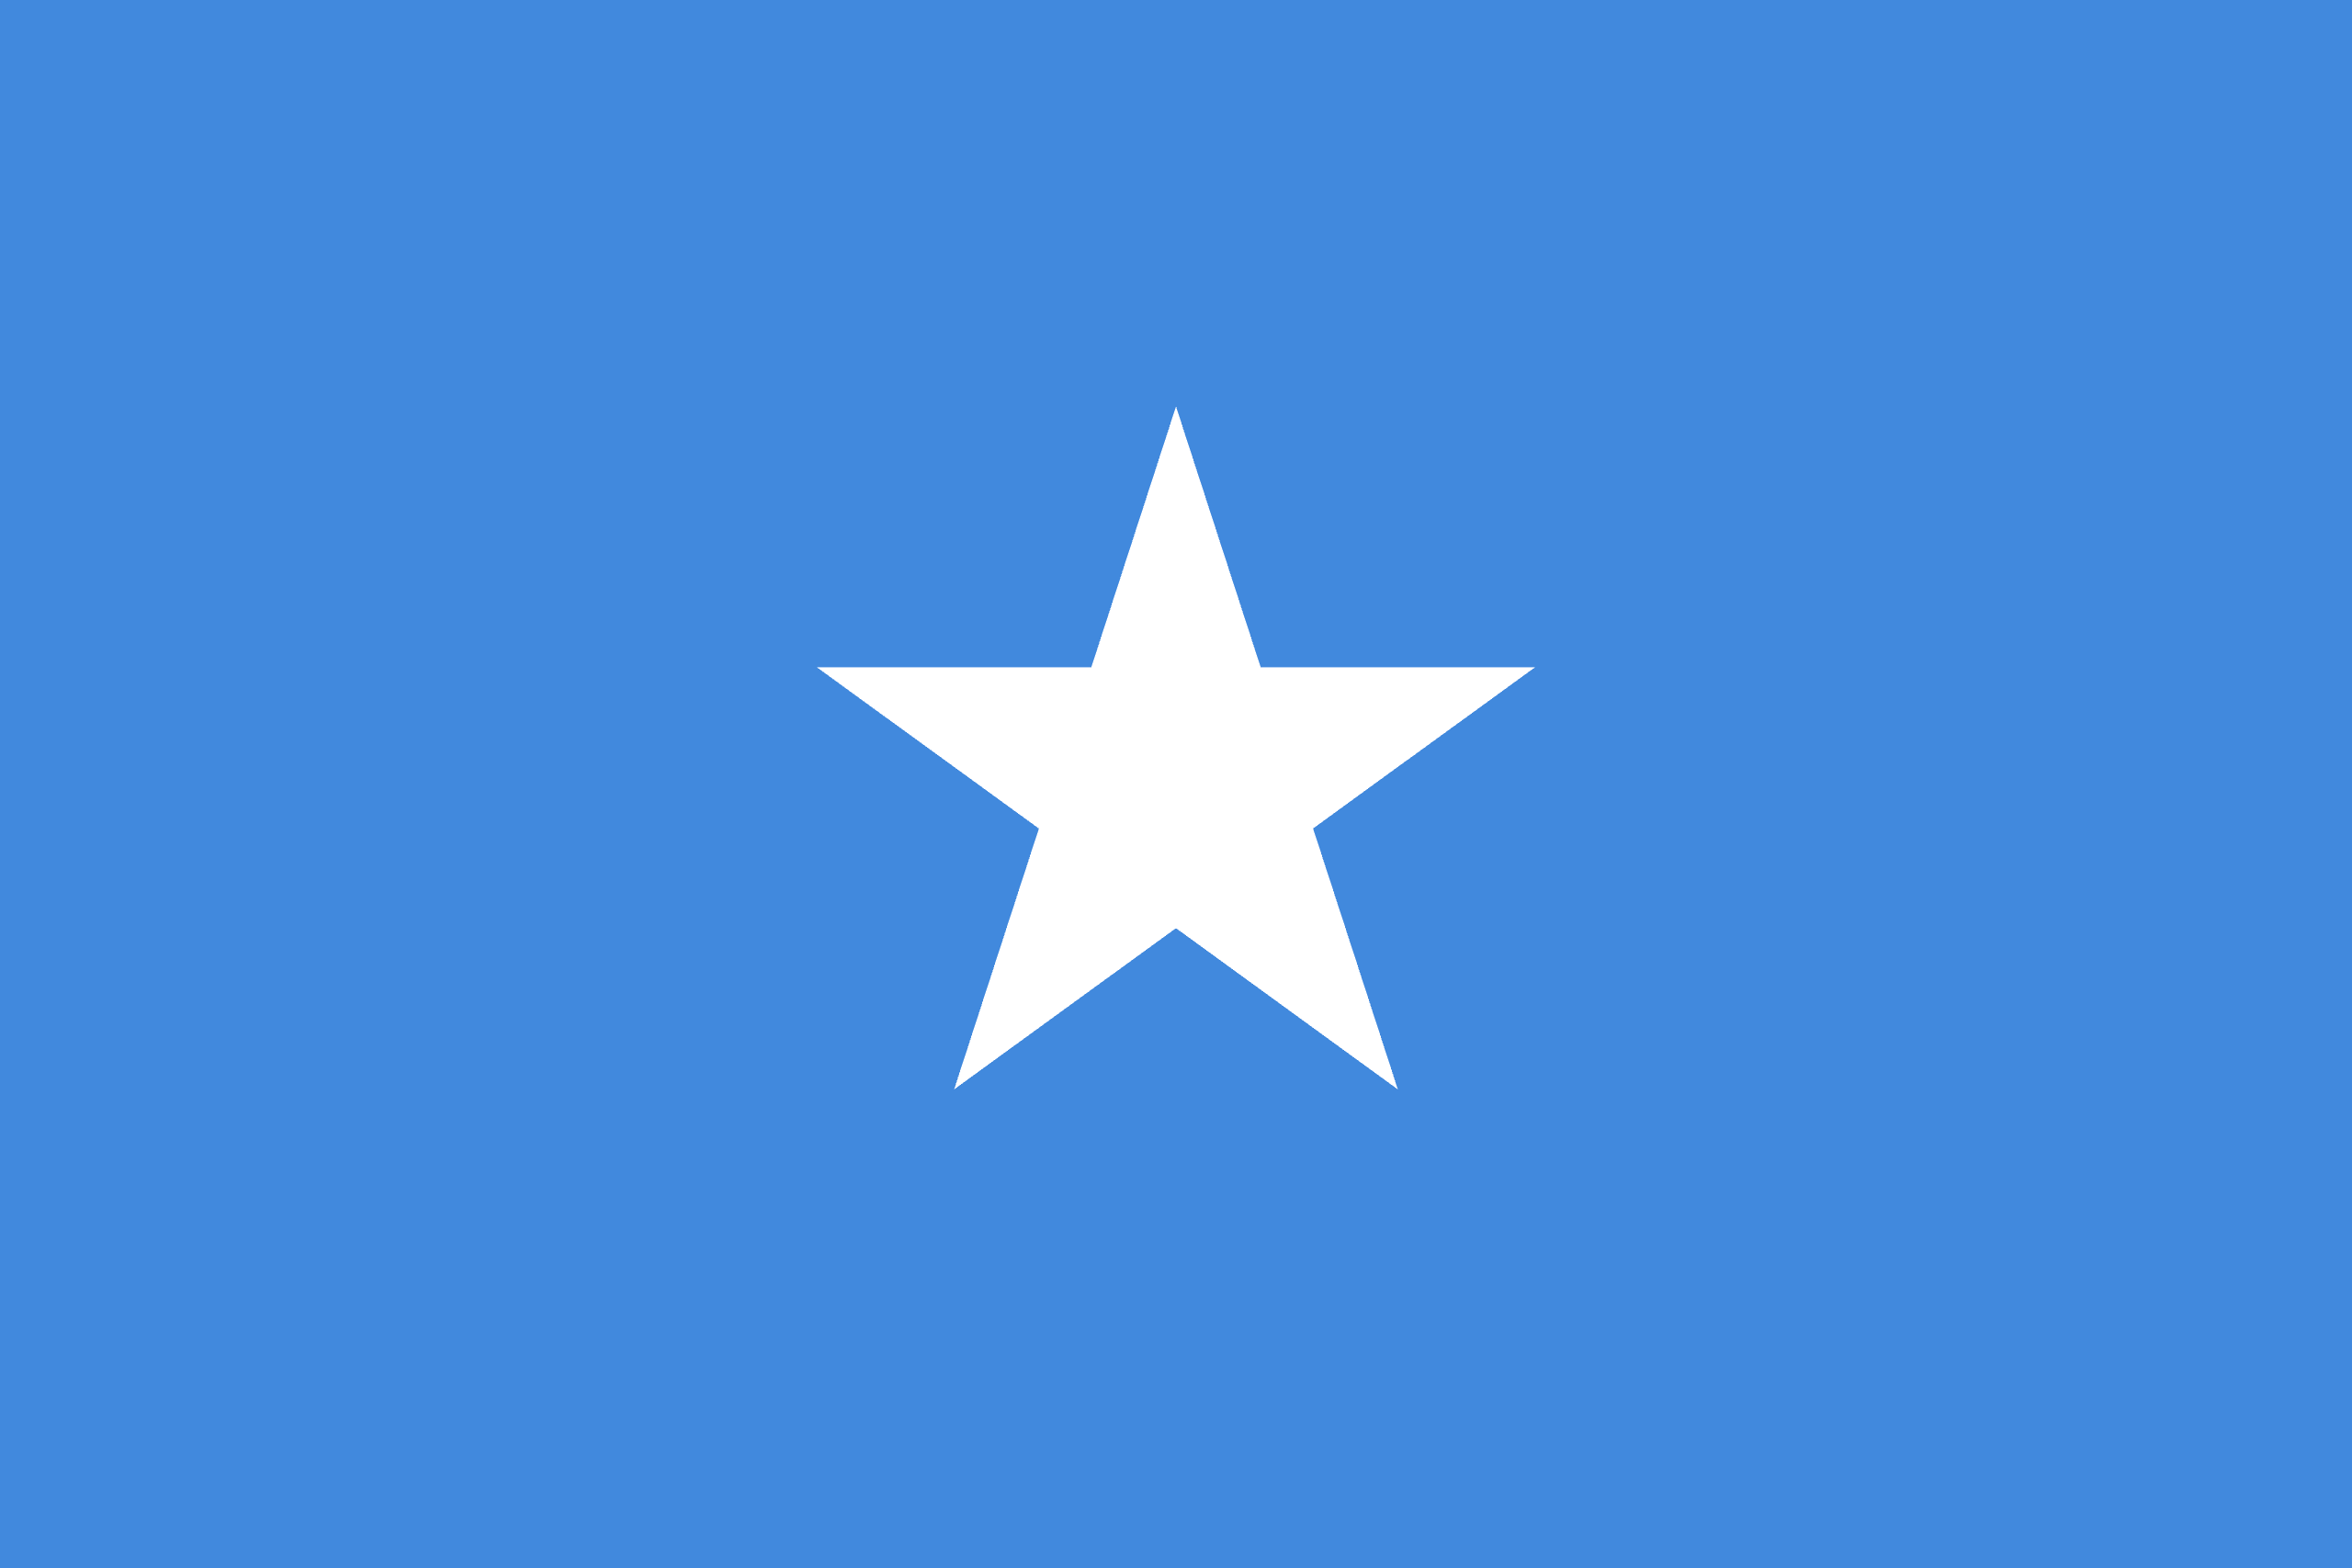

South Africa


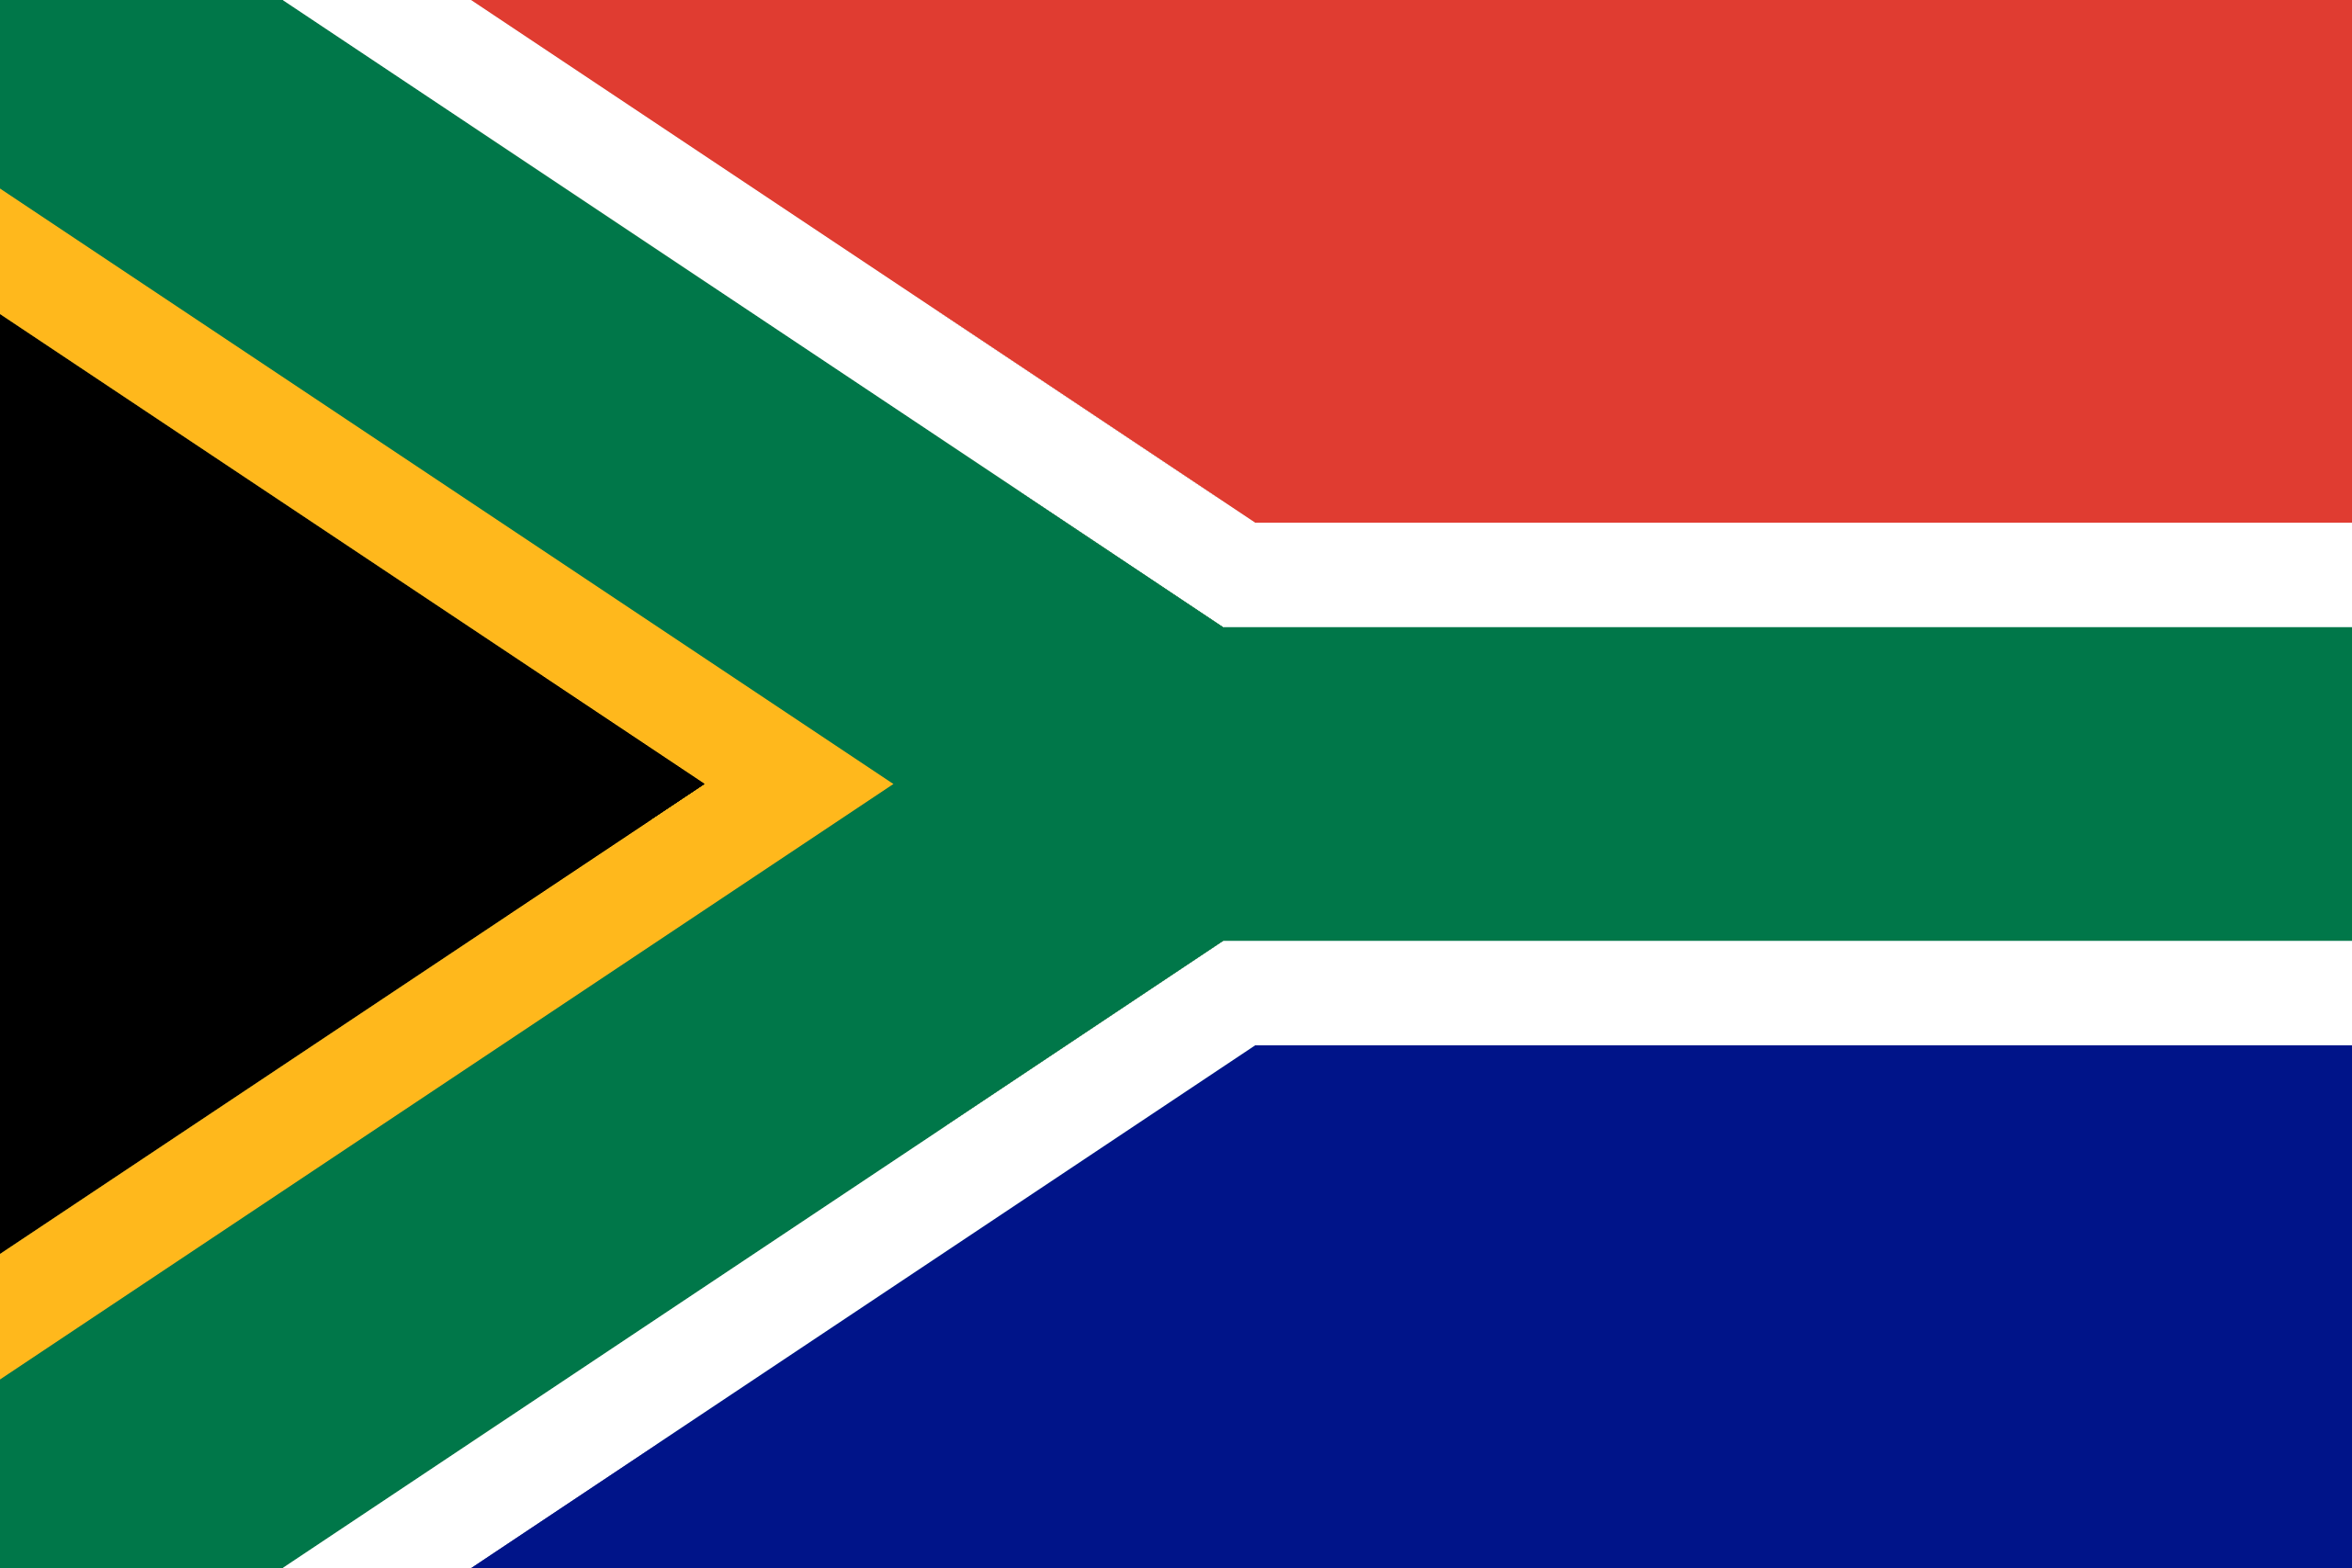

South Georgia


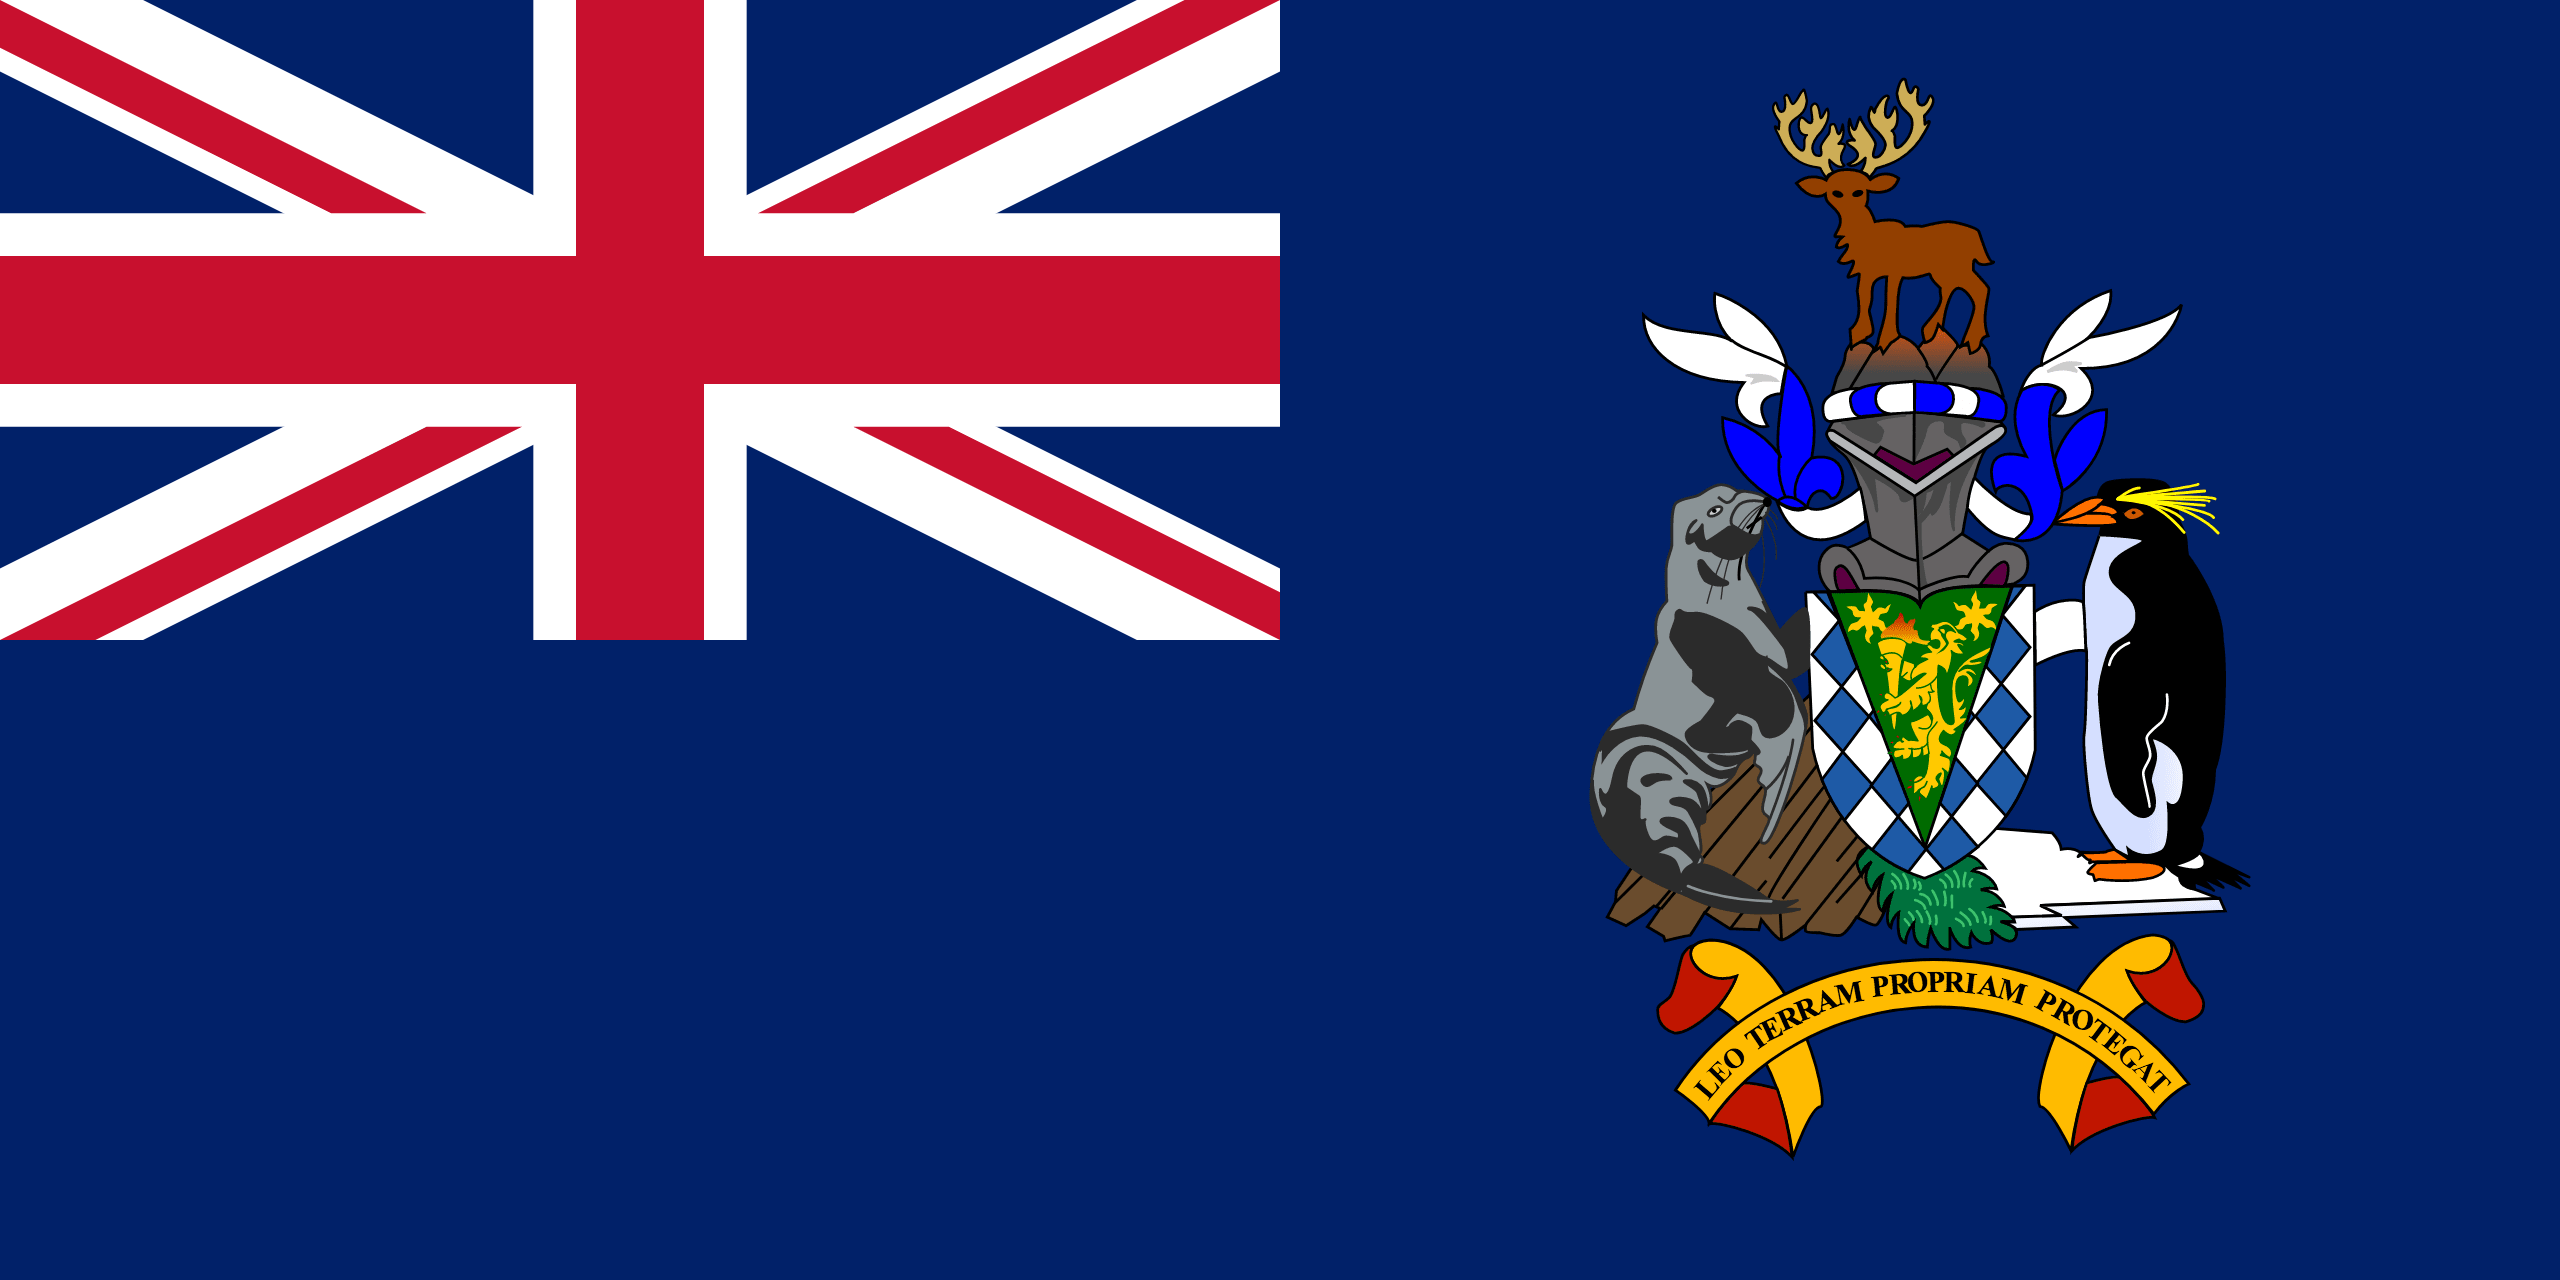

South Sudan


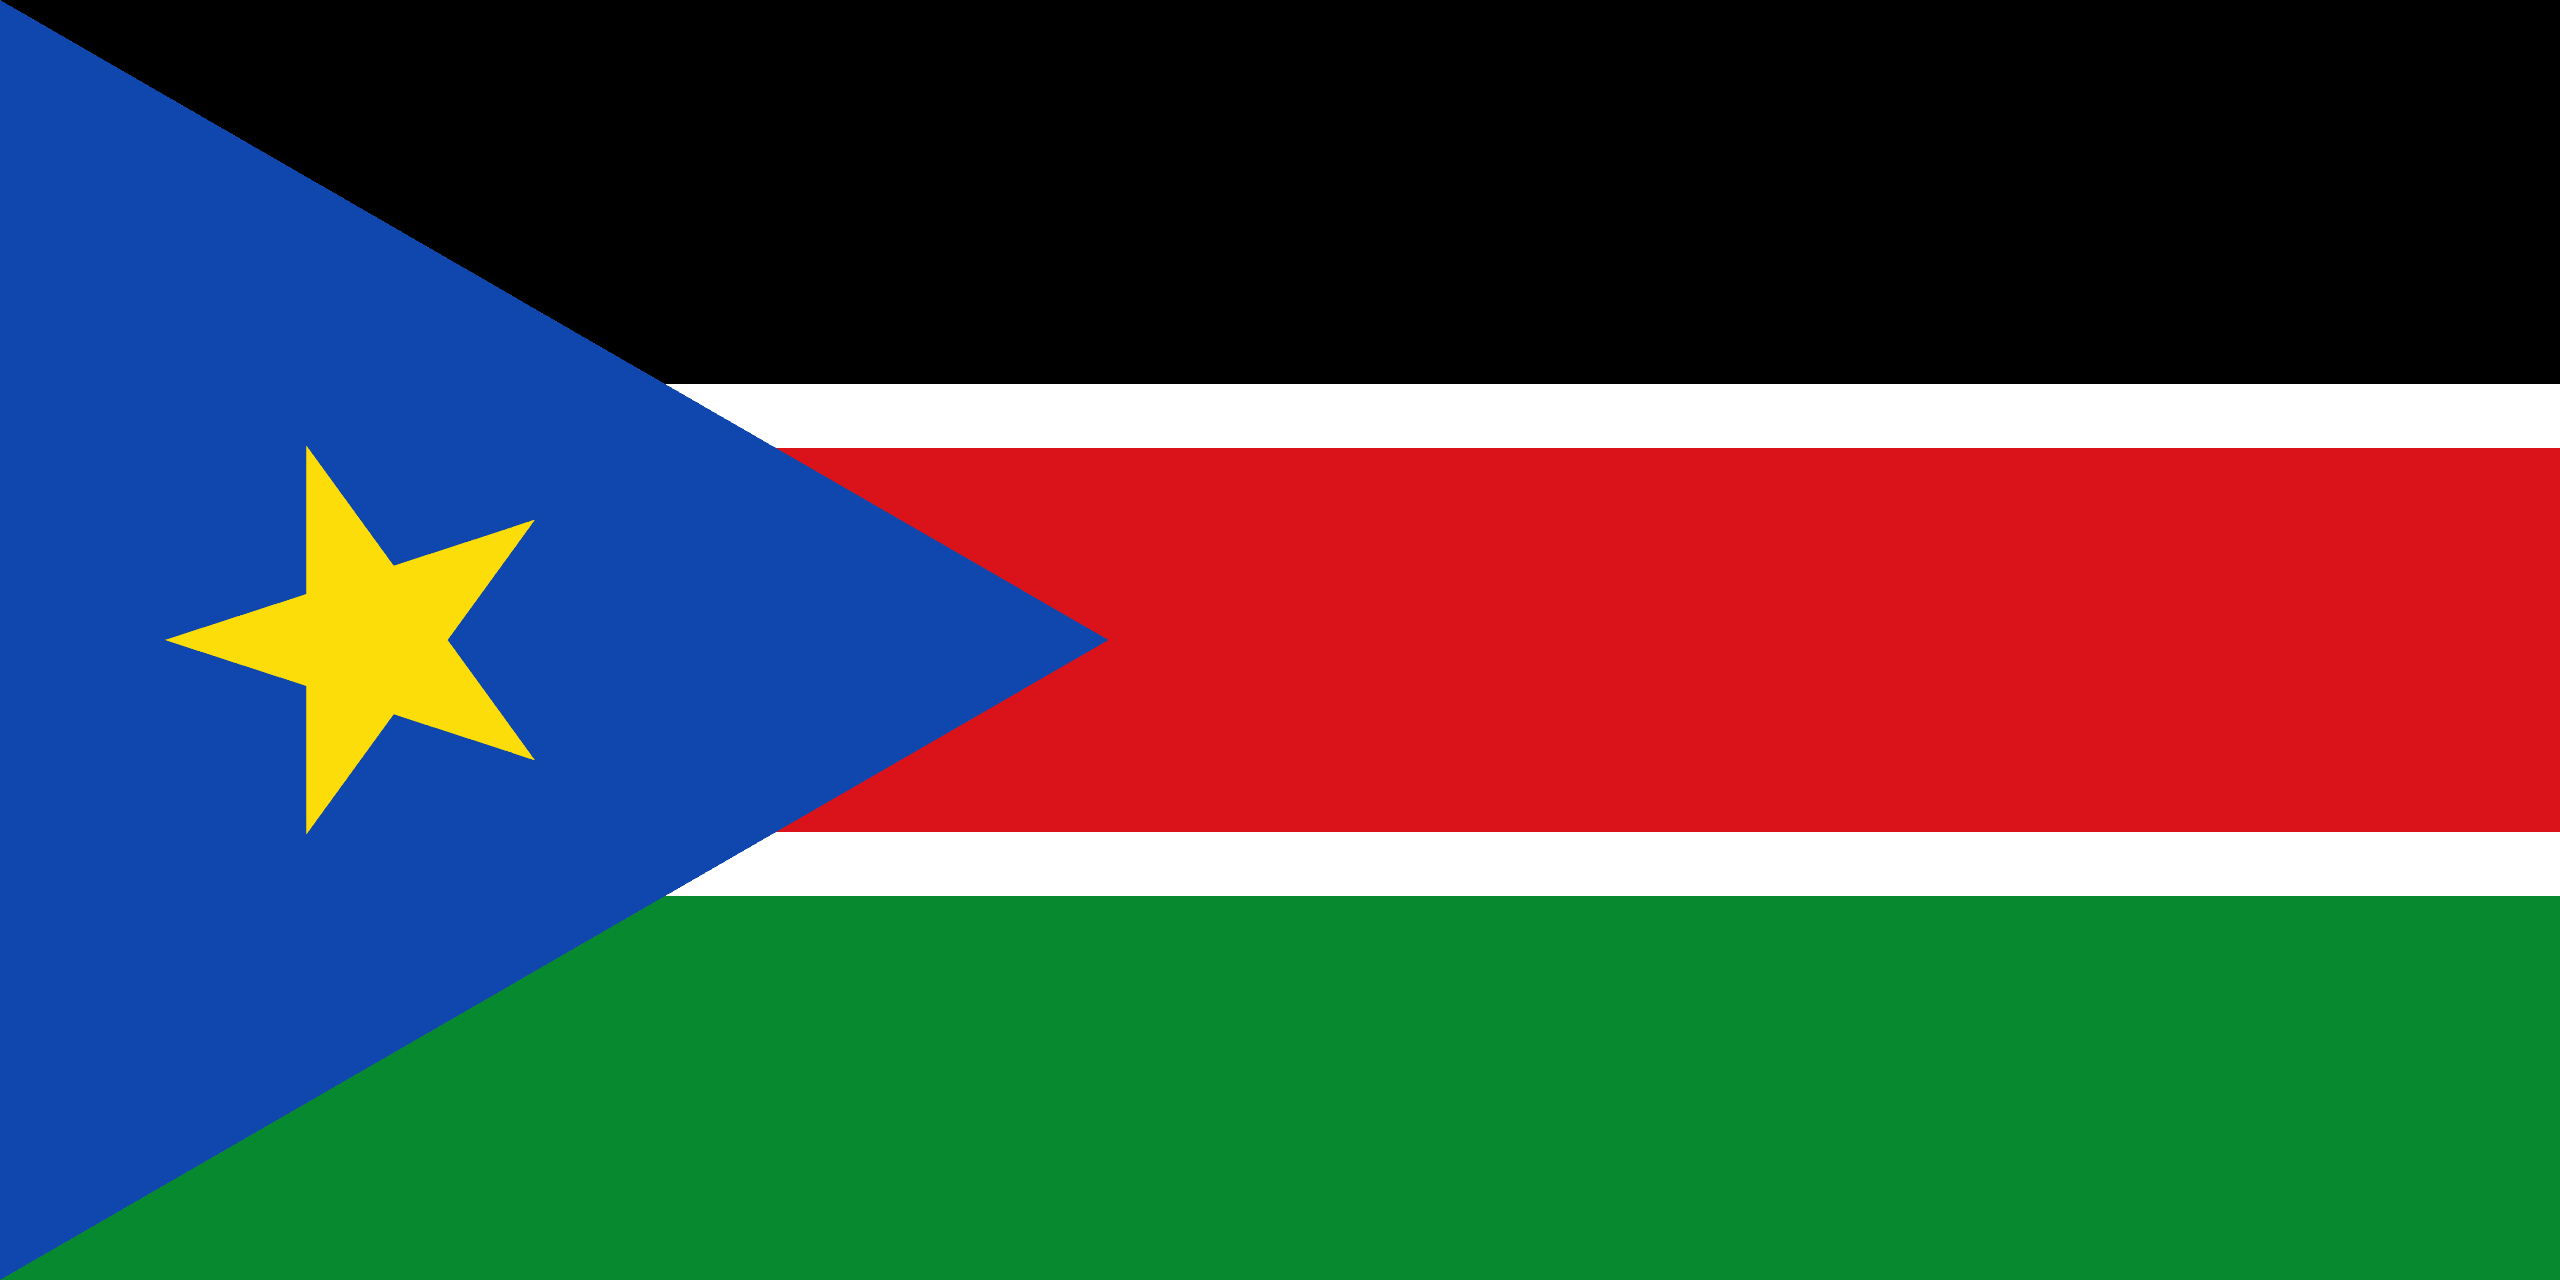

Spain


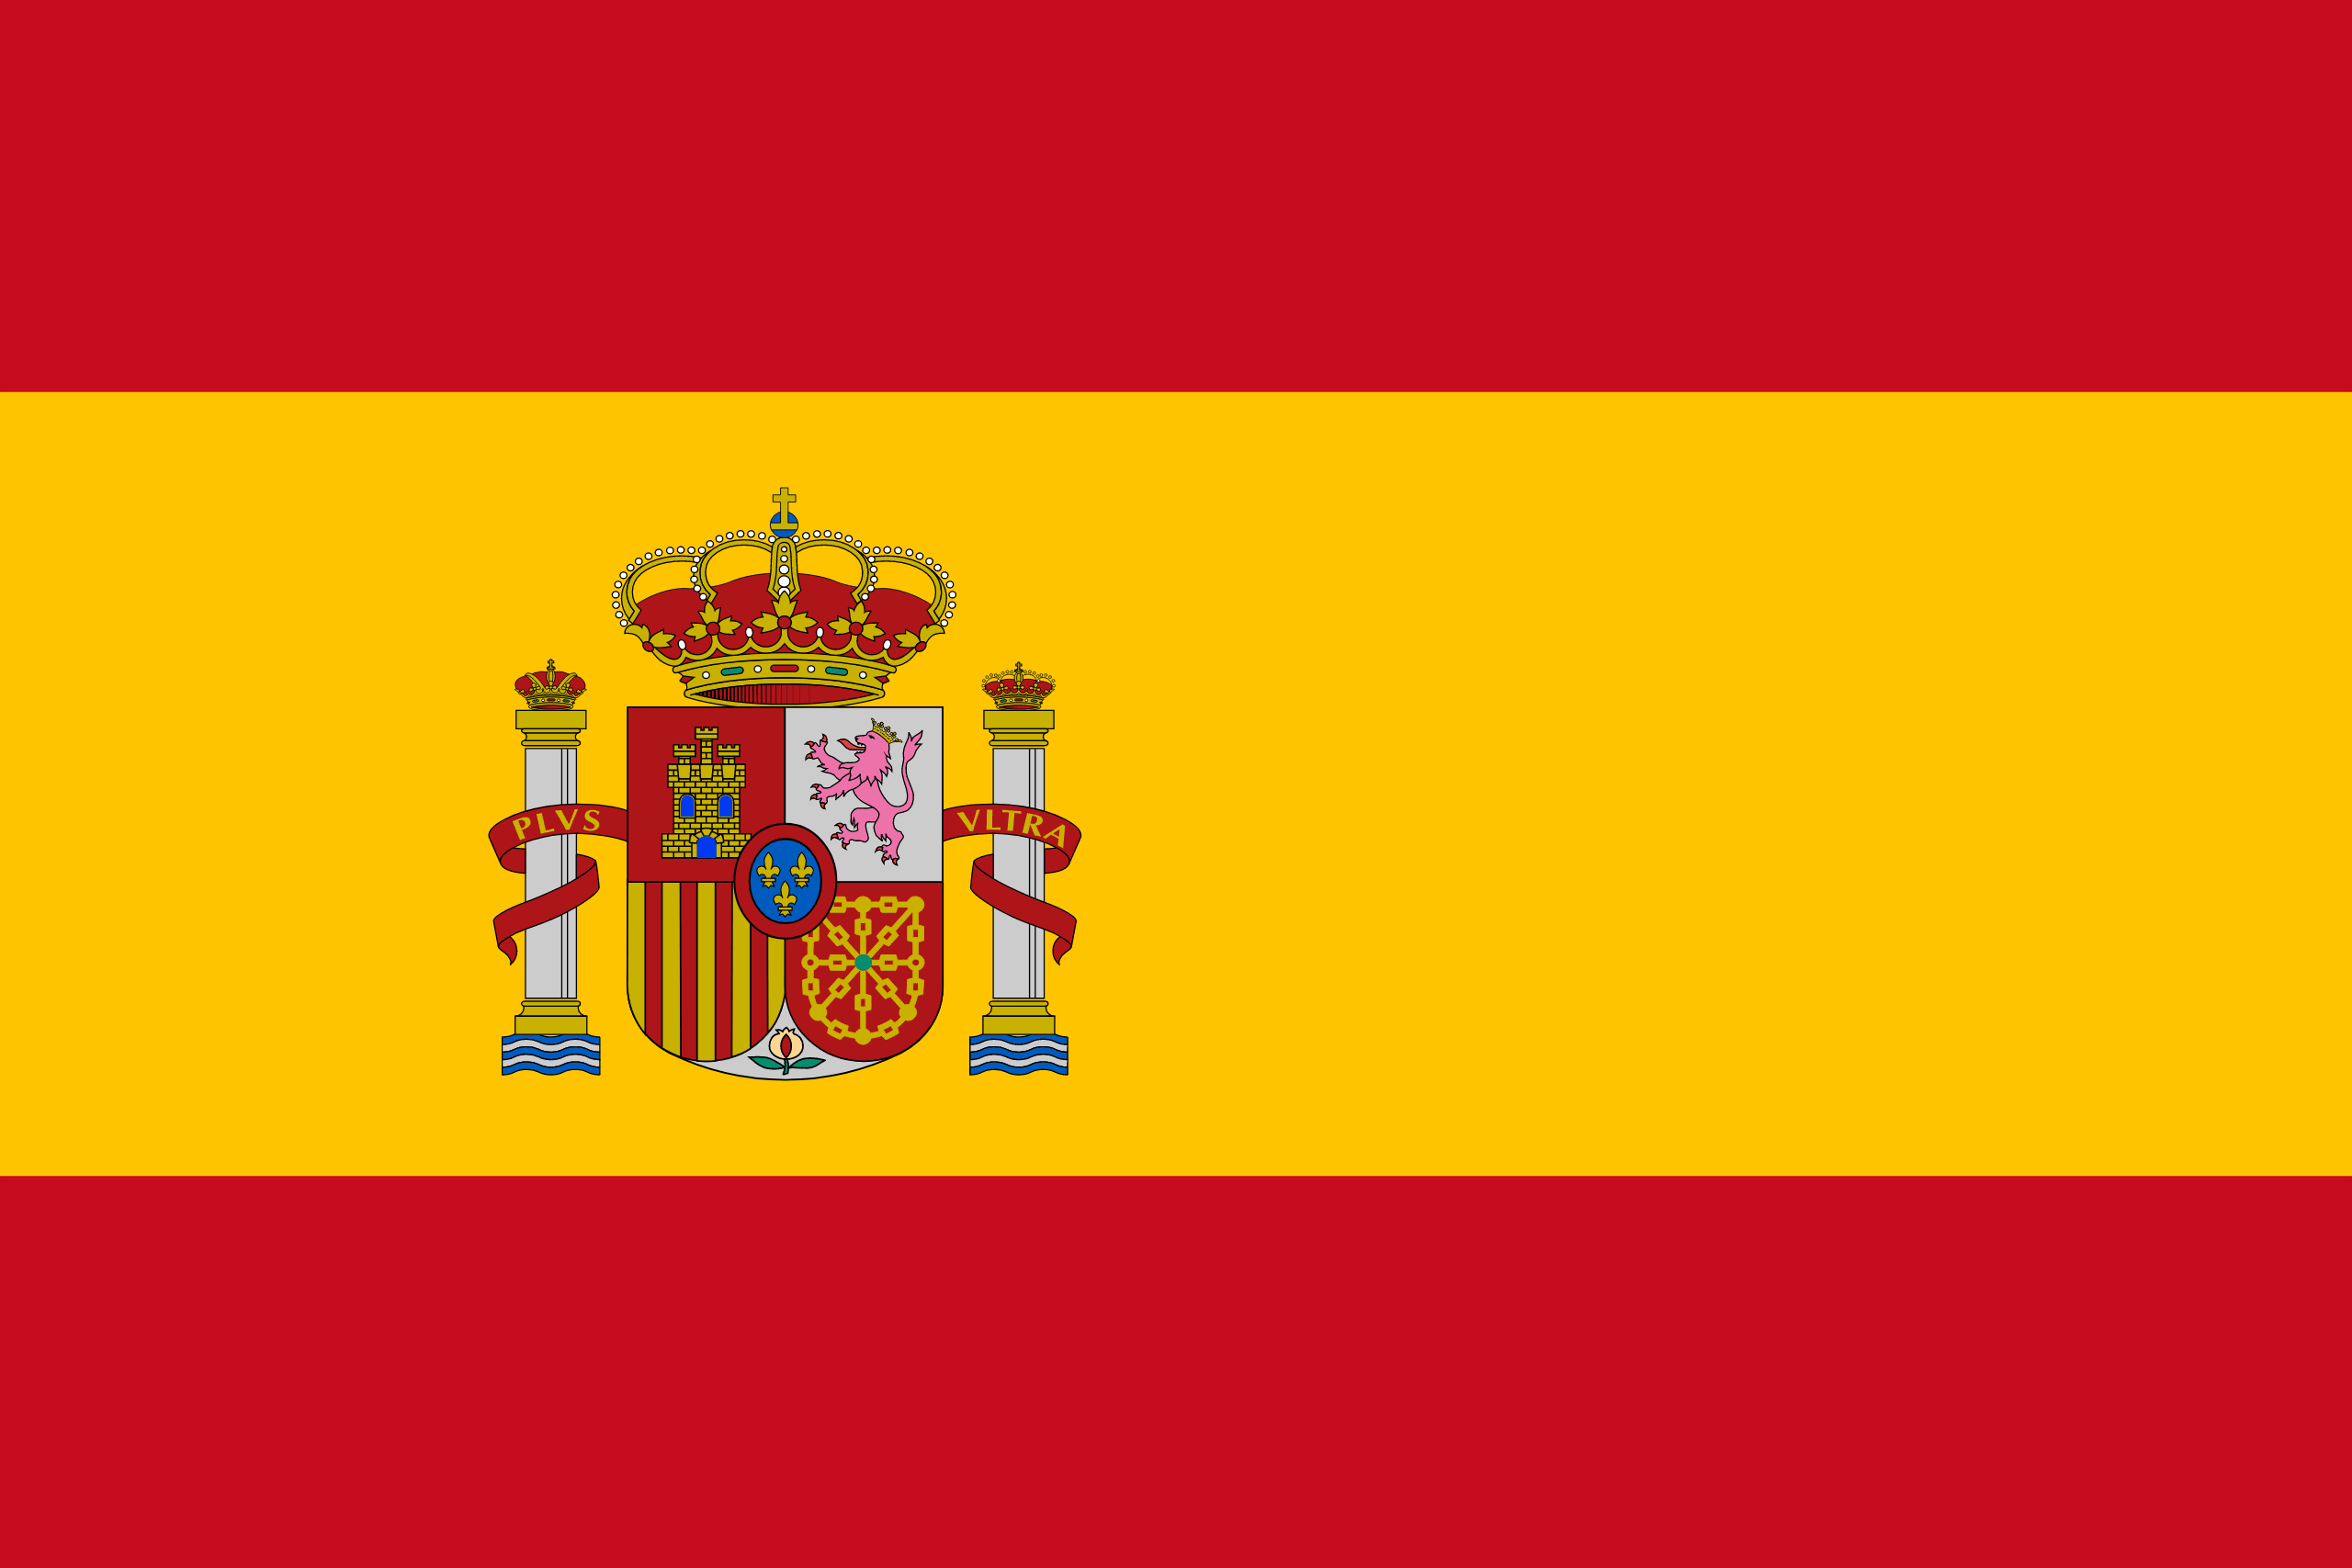

Sri Lanka


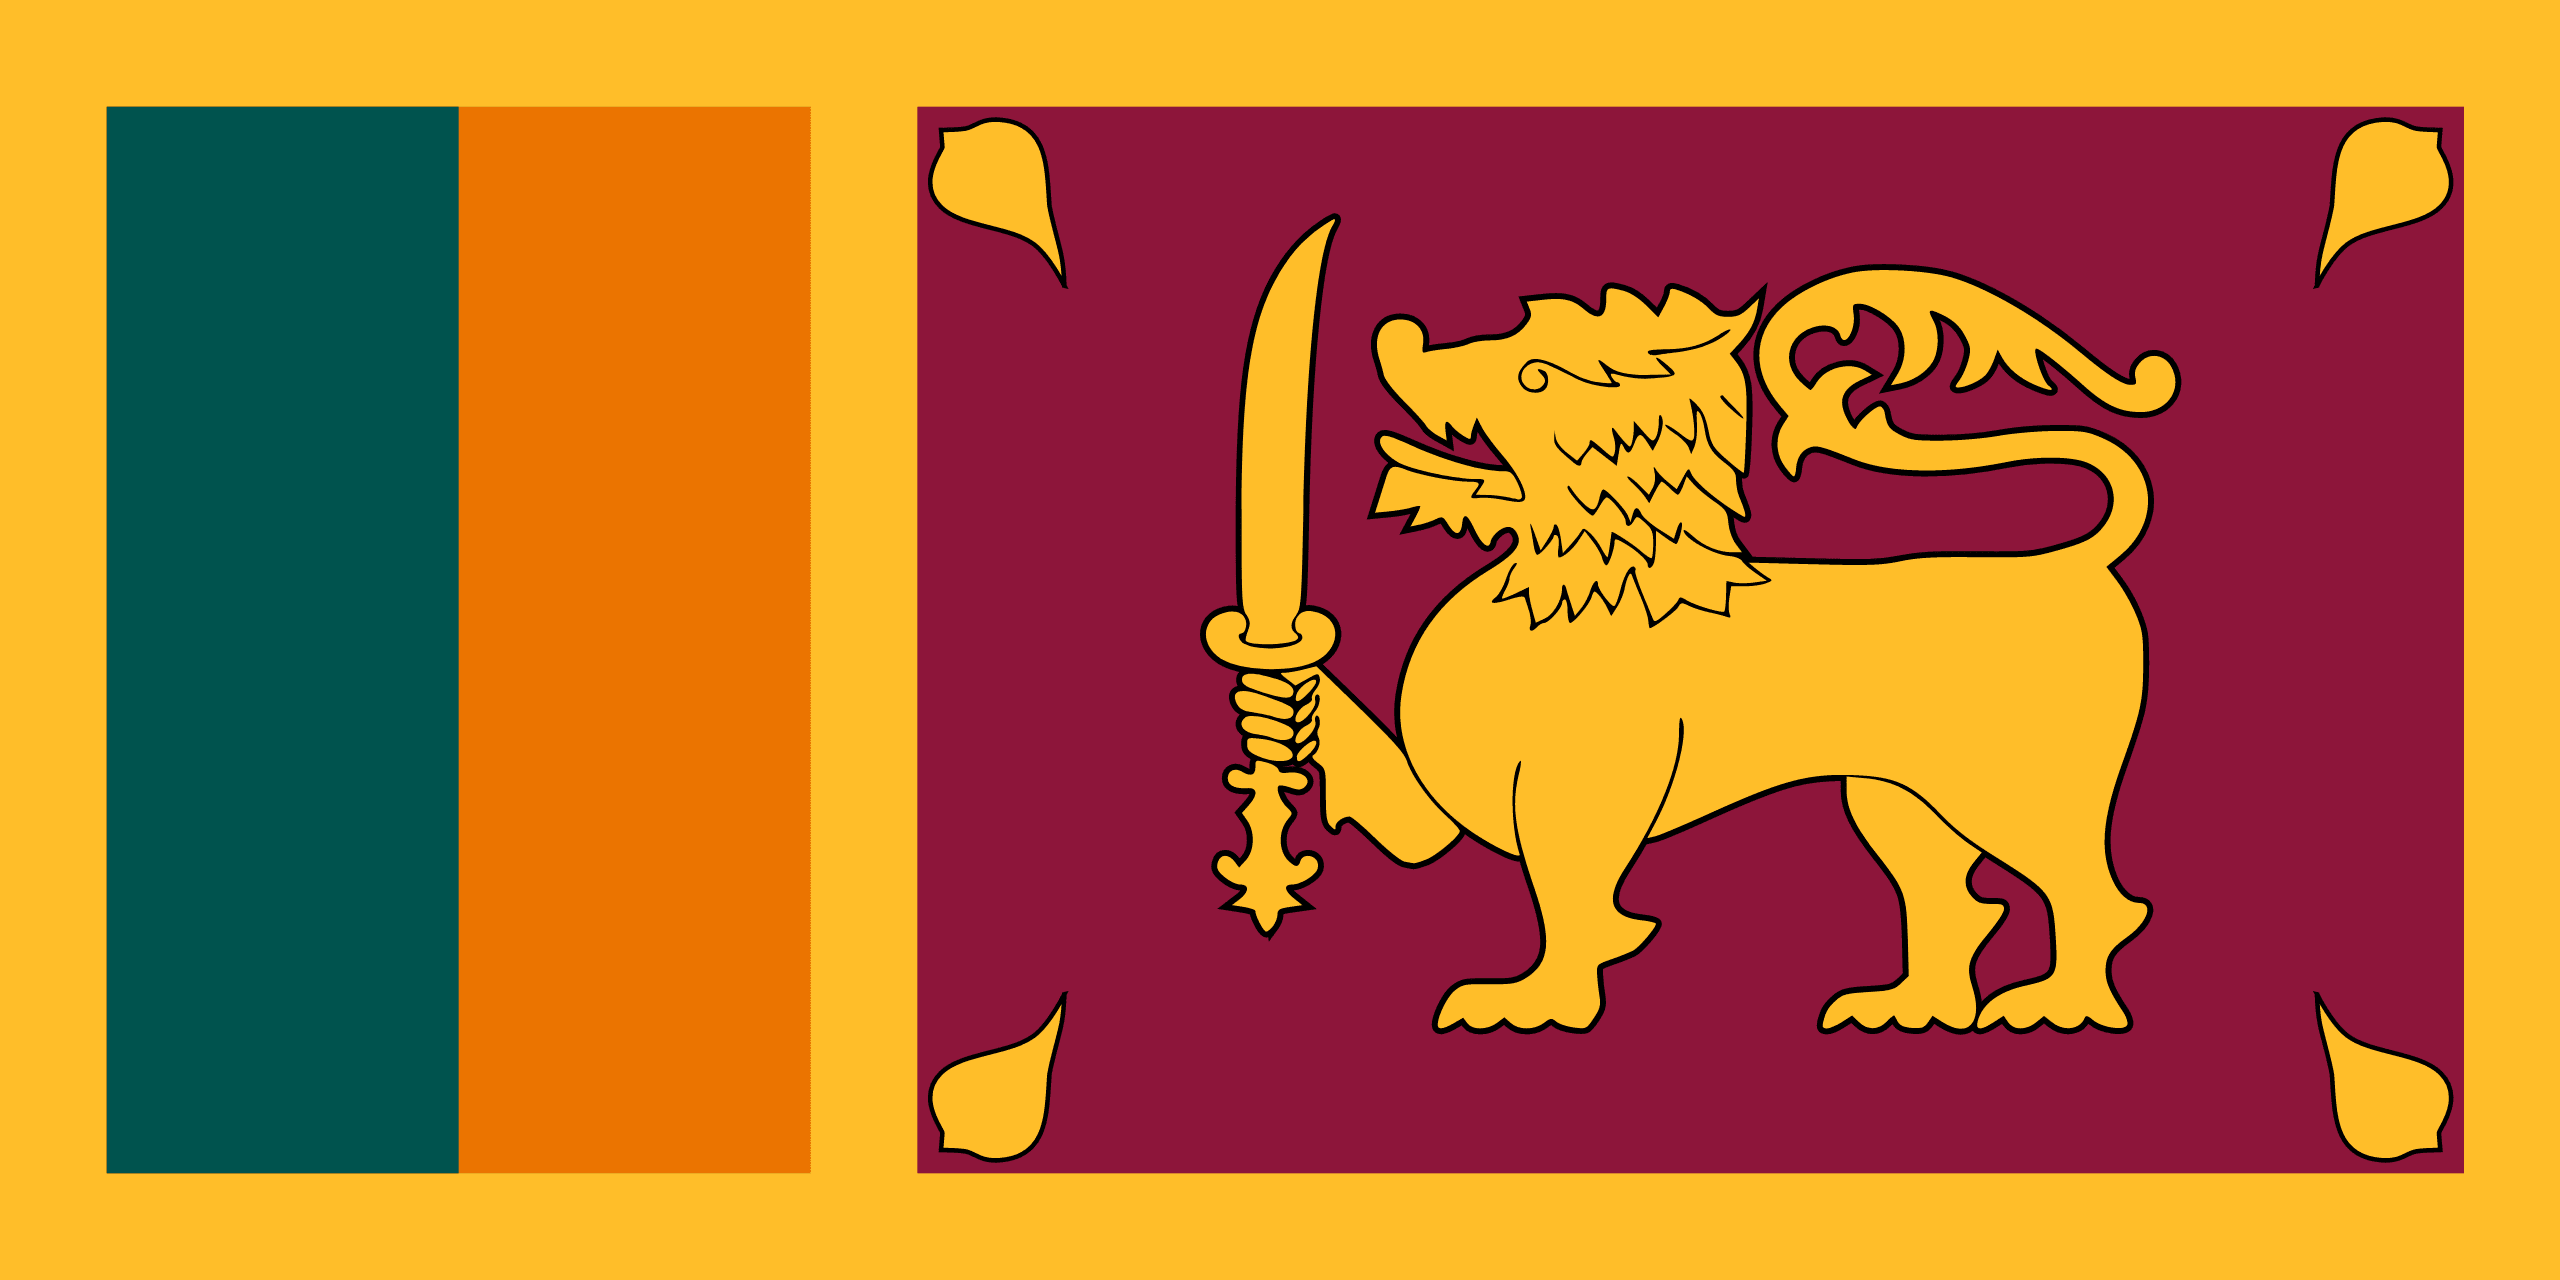

Sudan


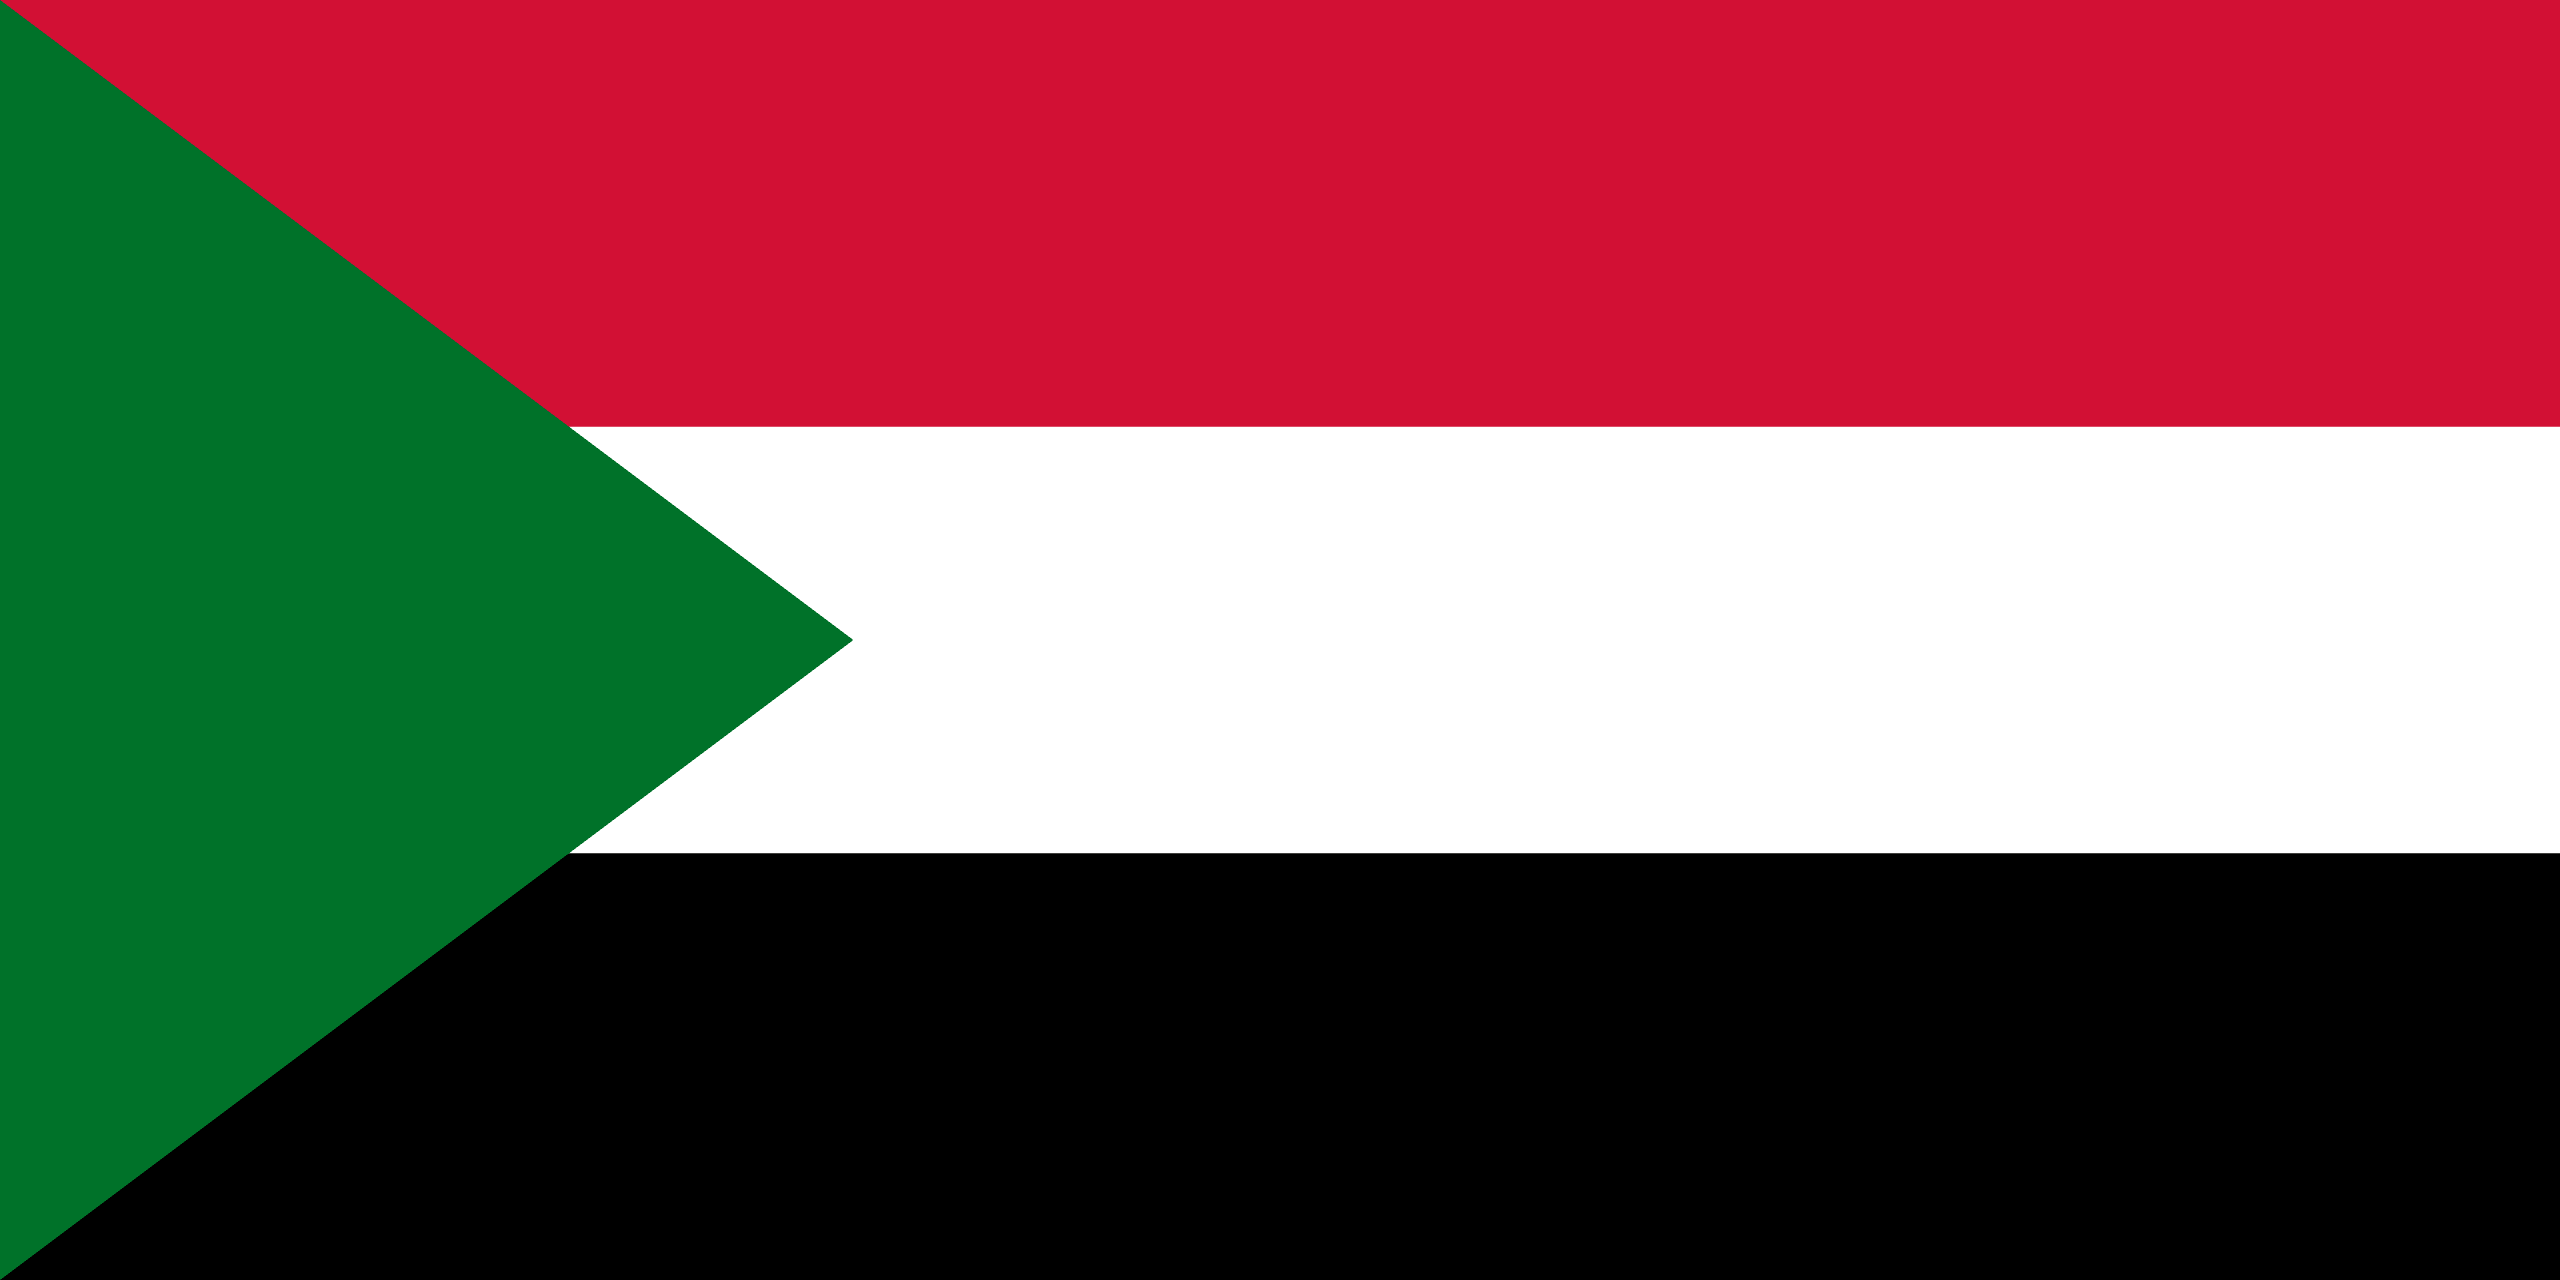

Suriname


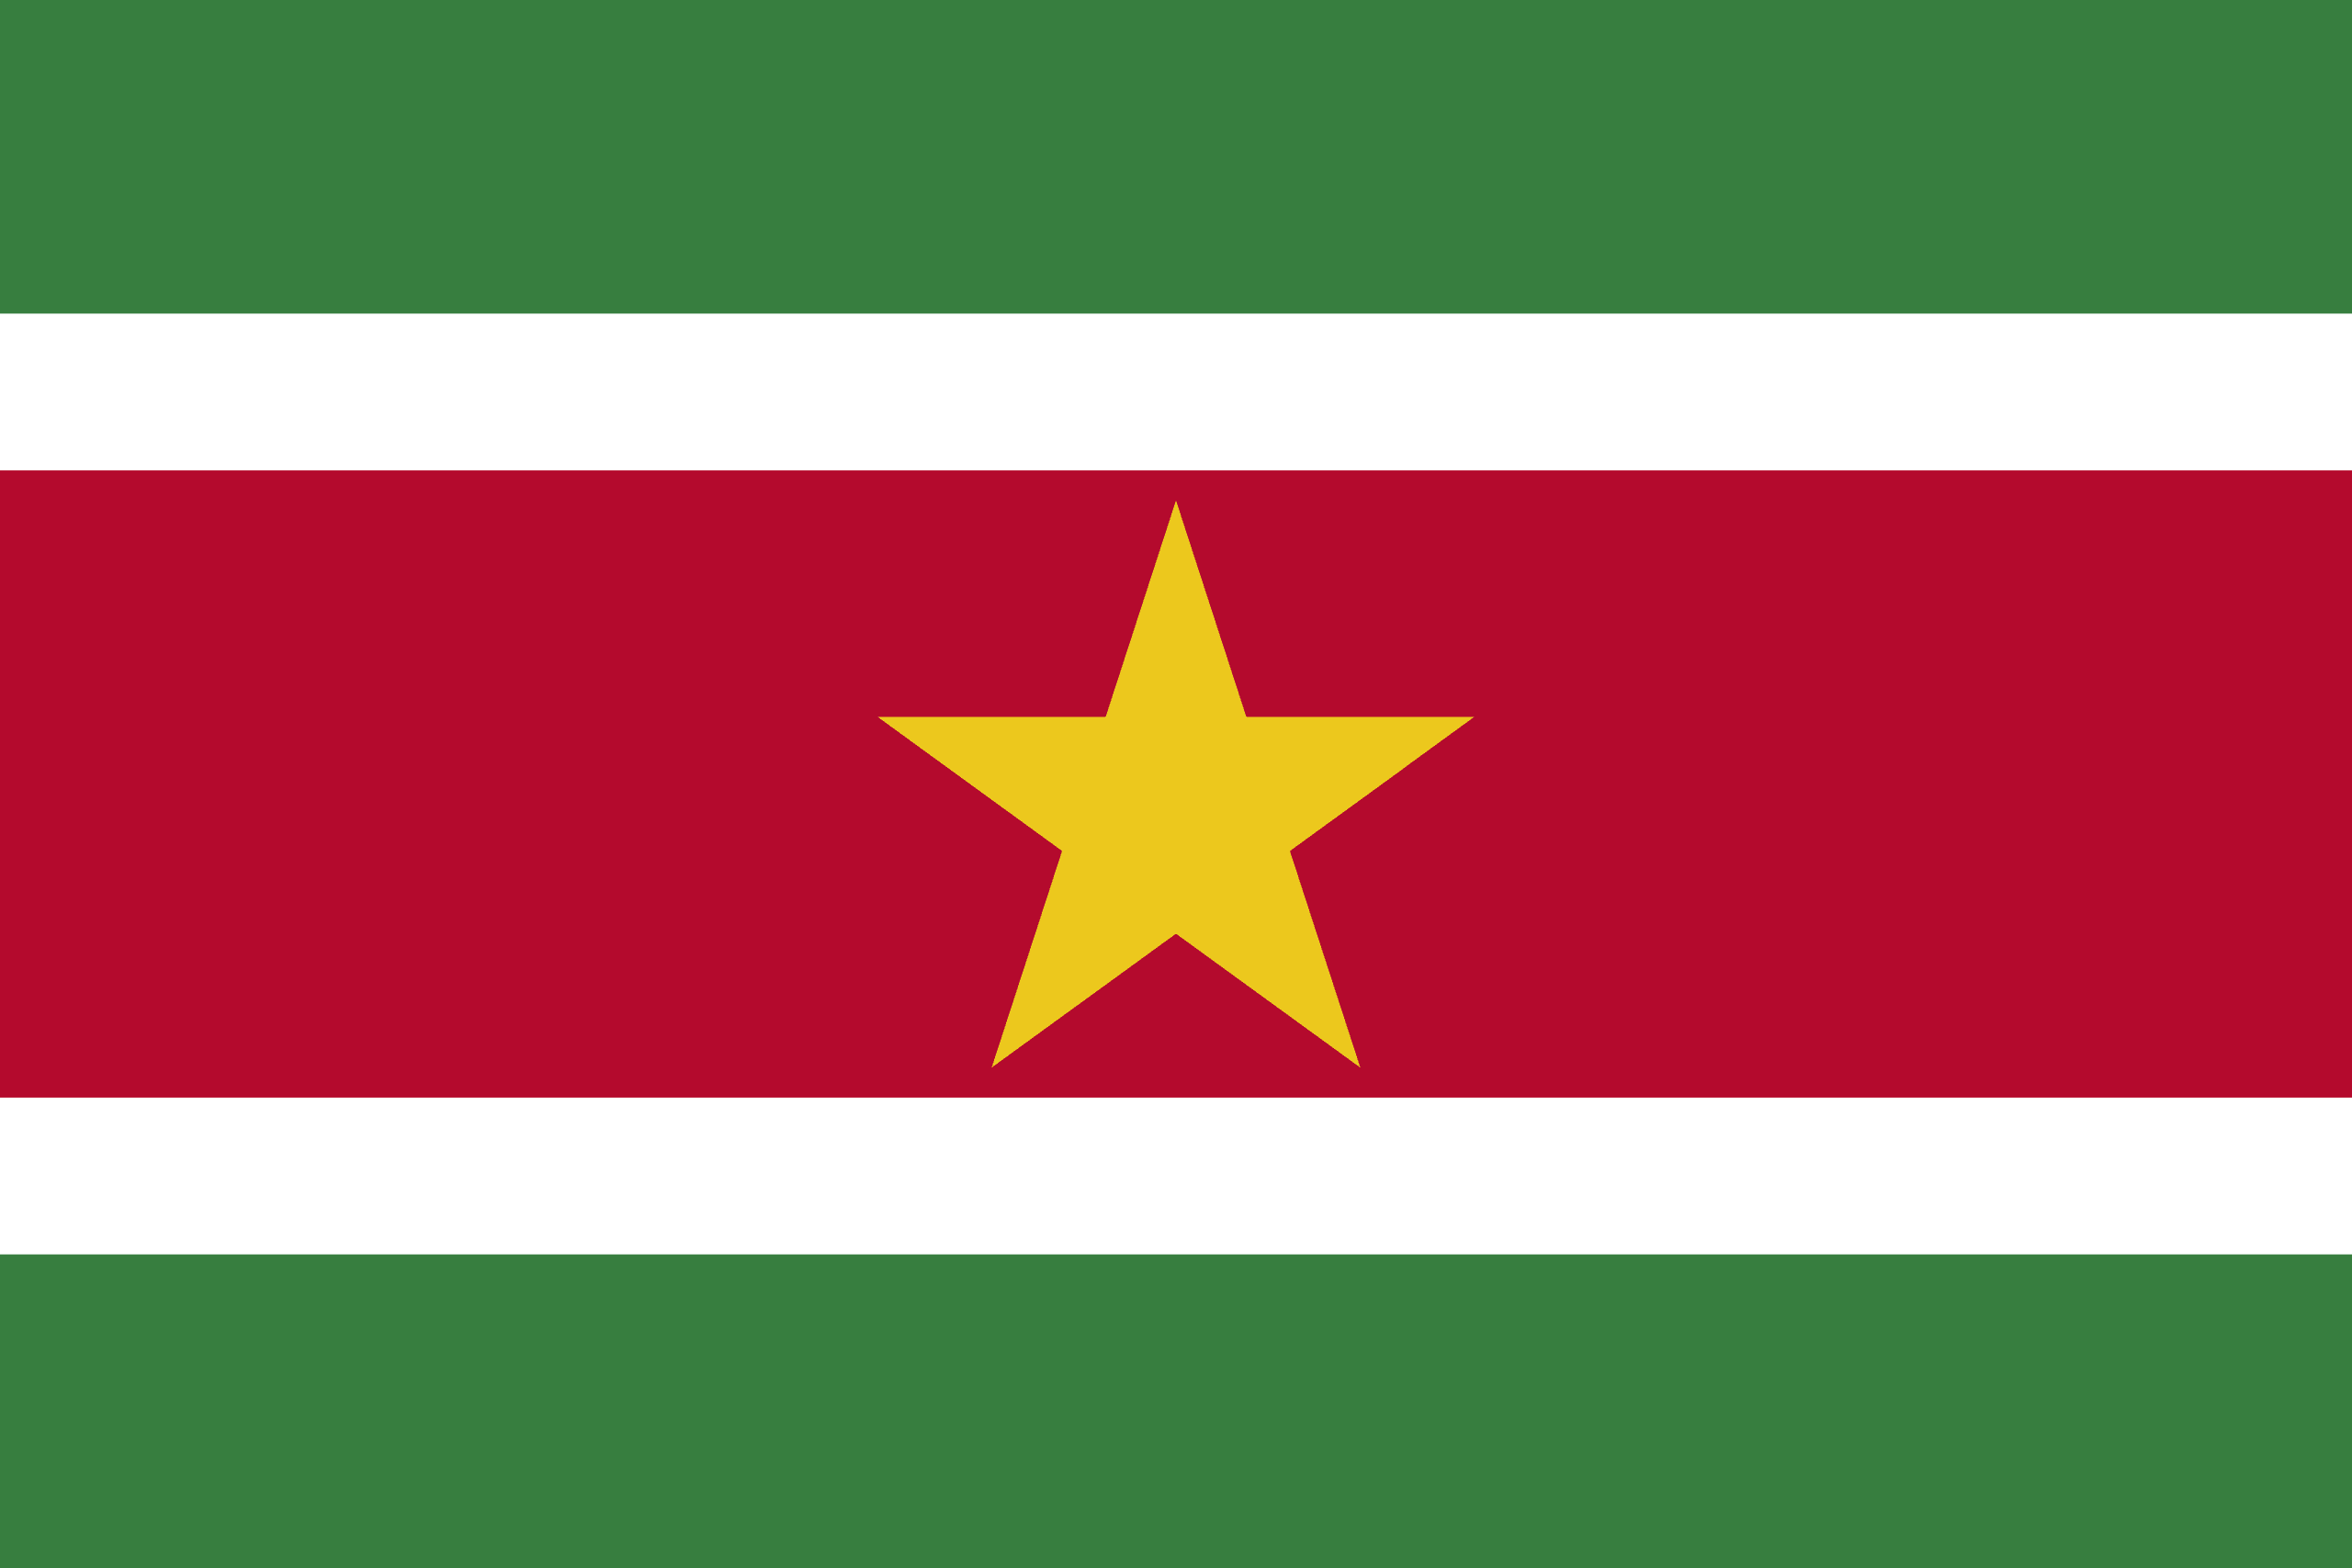

Svalbard and Jan Mayen


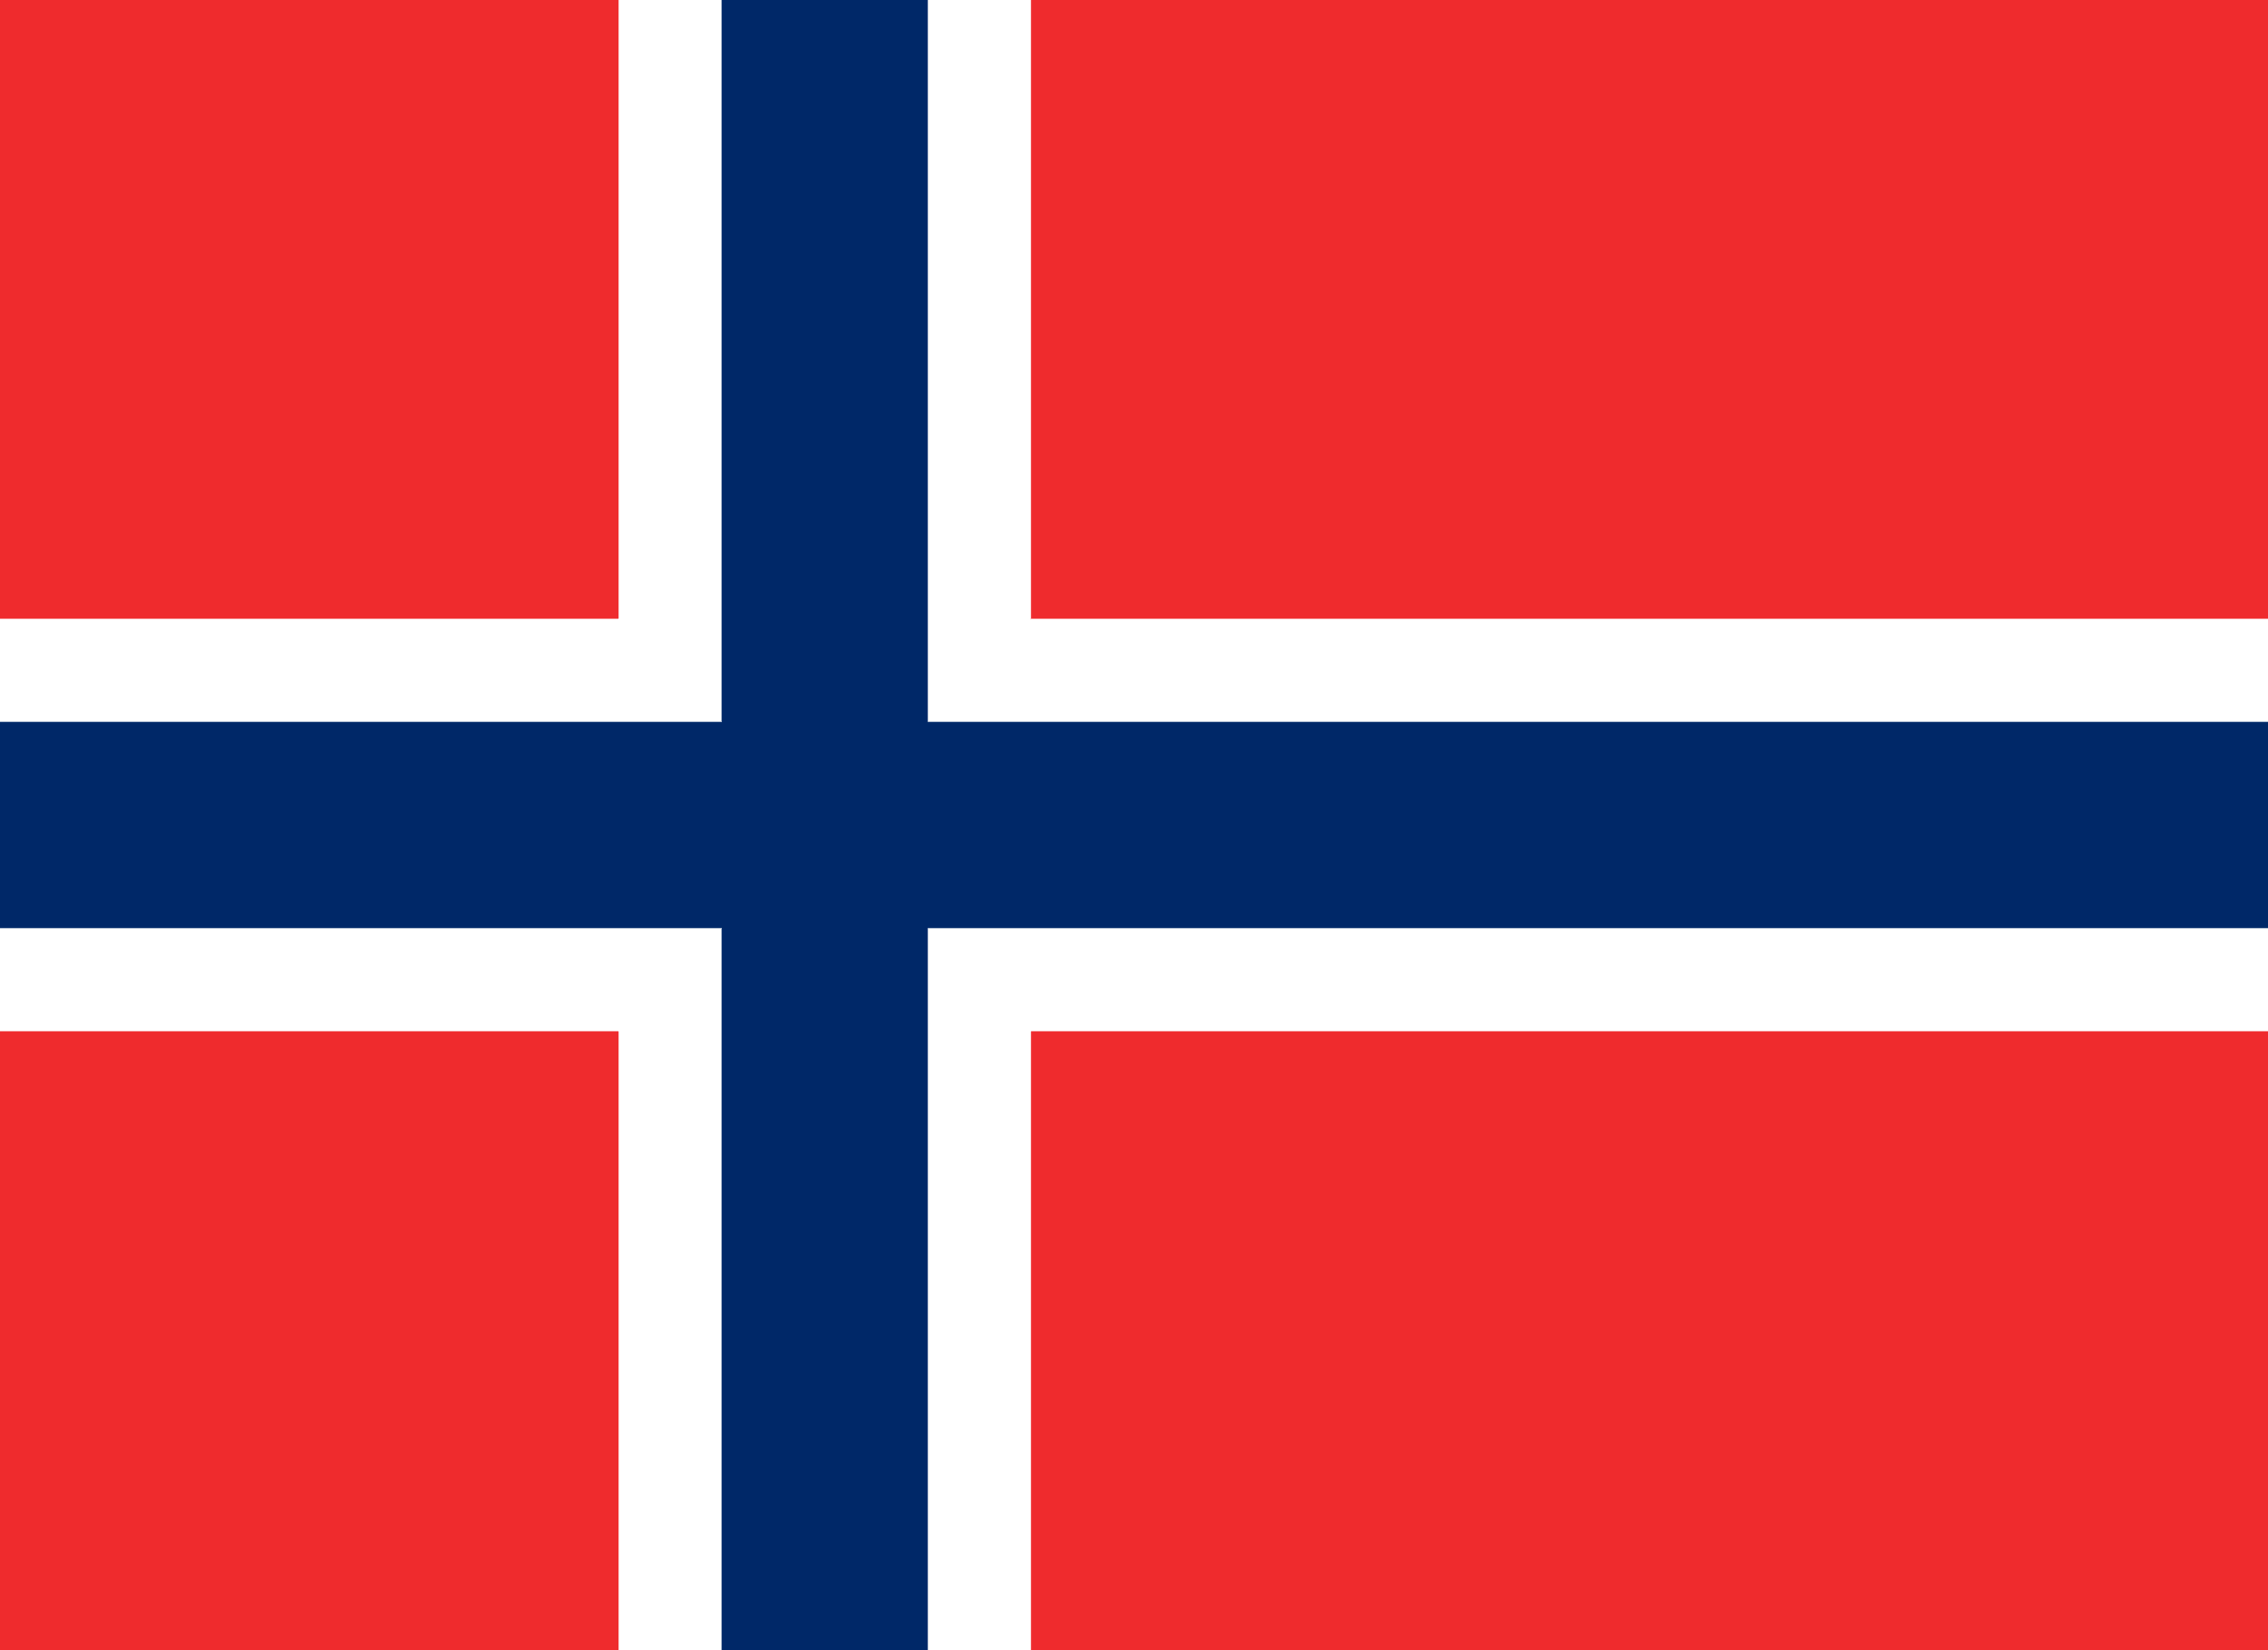

Sweden


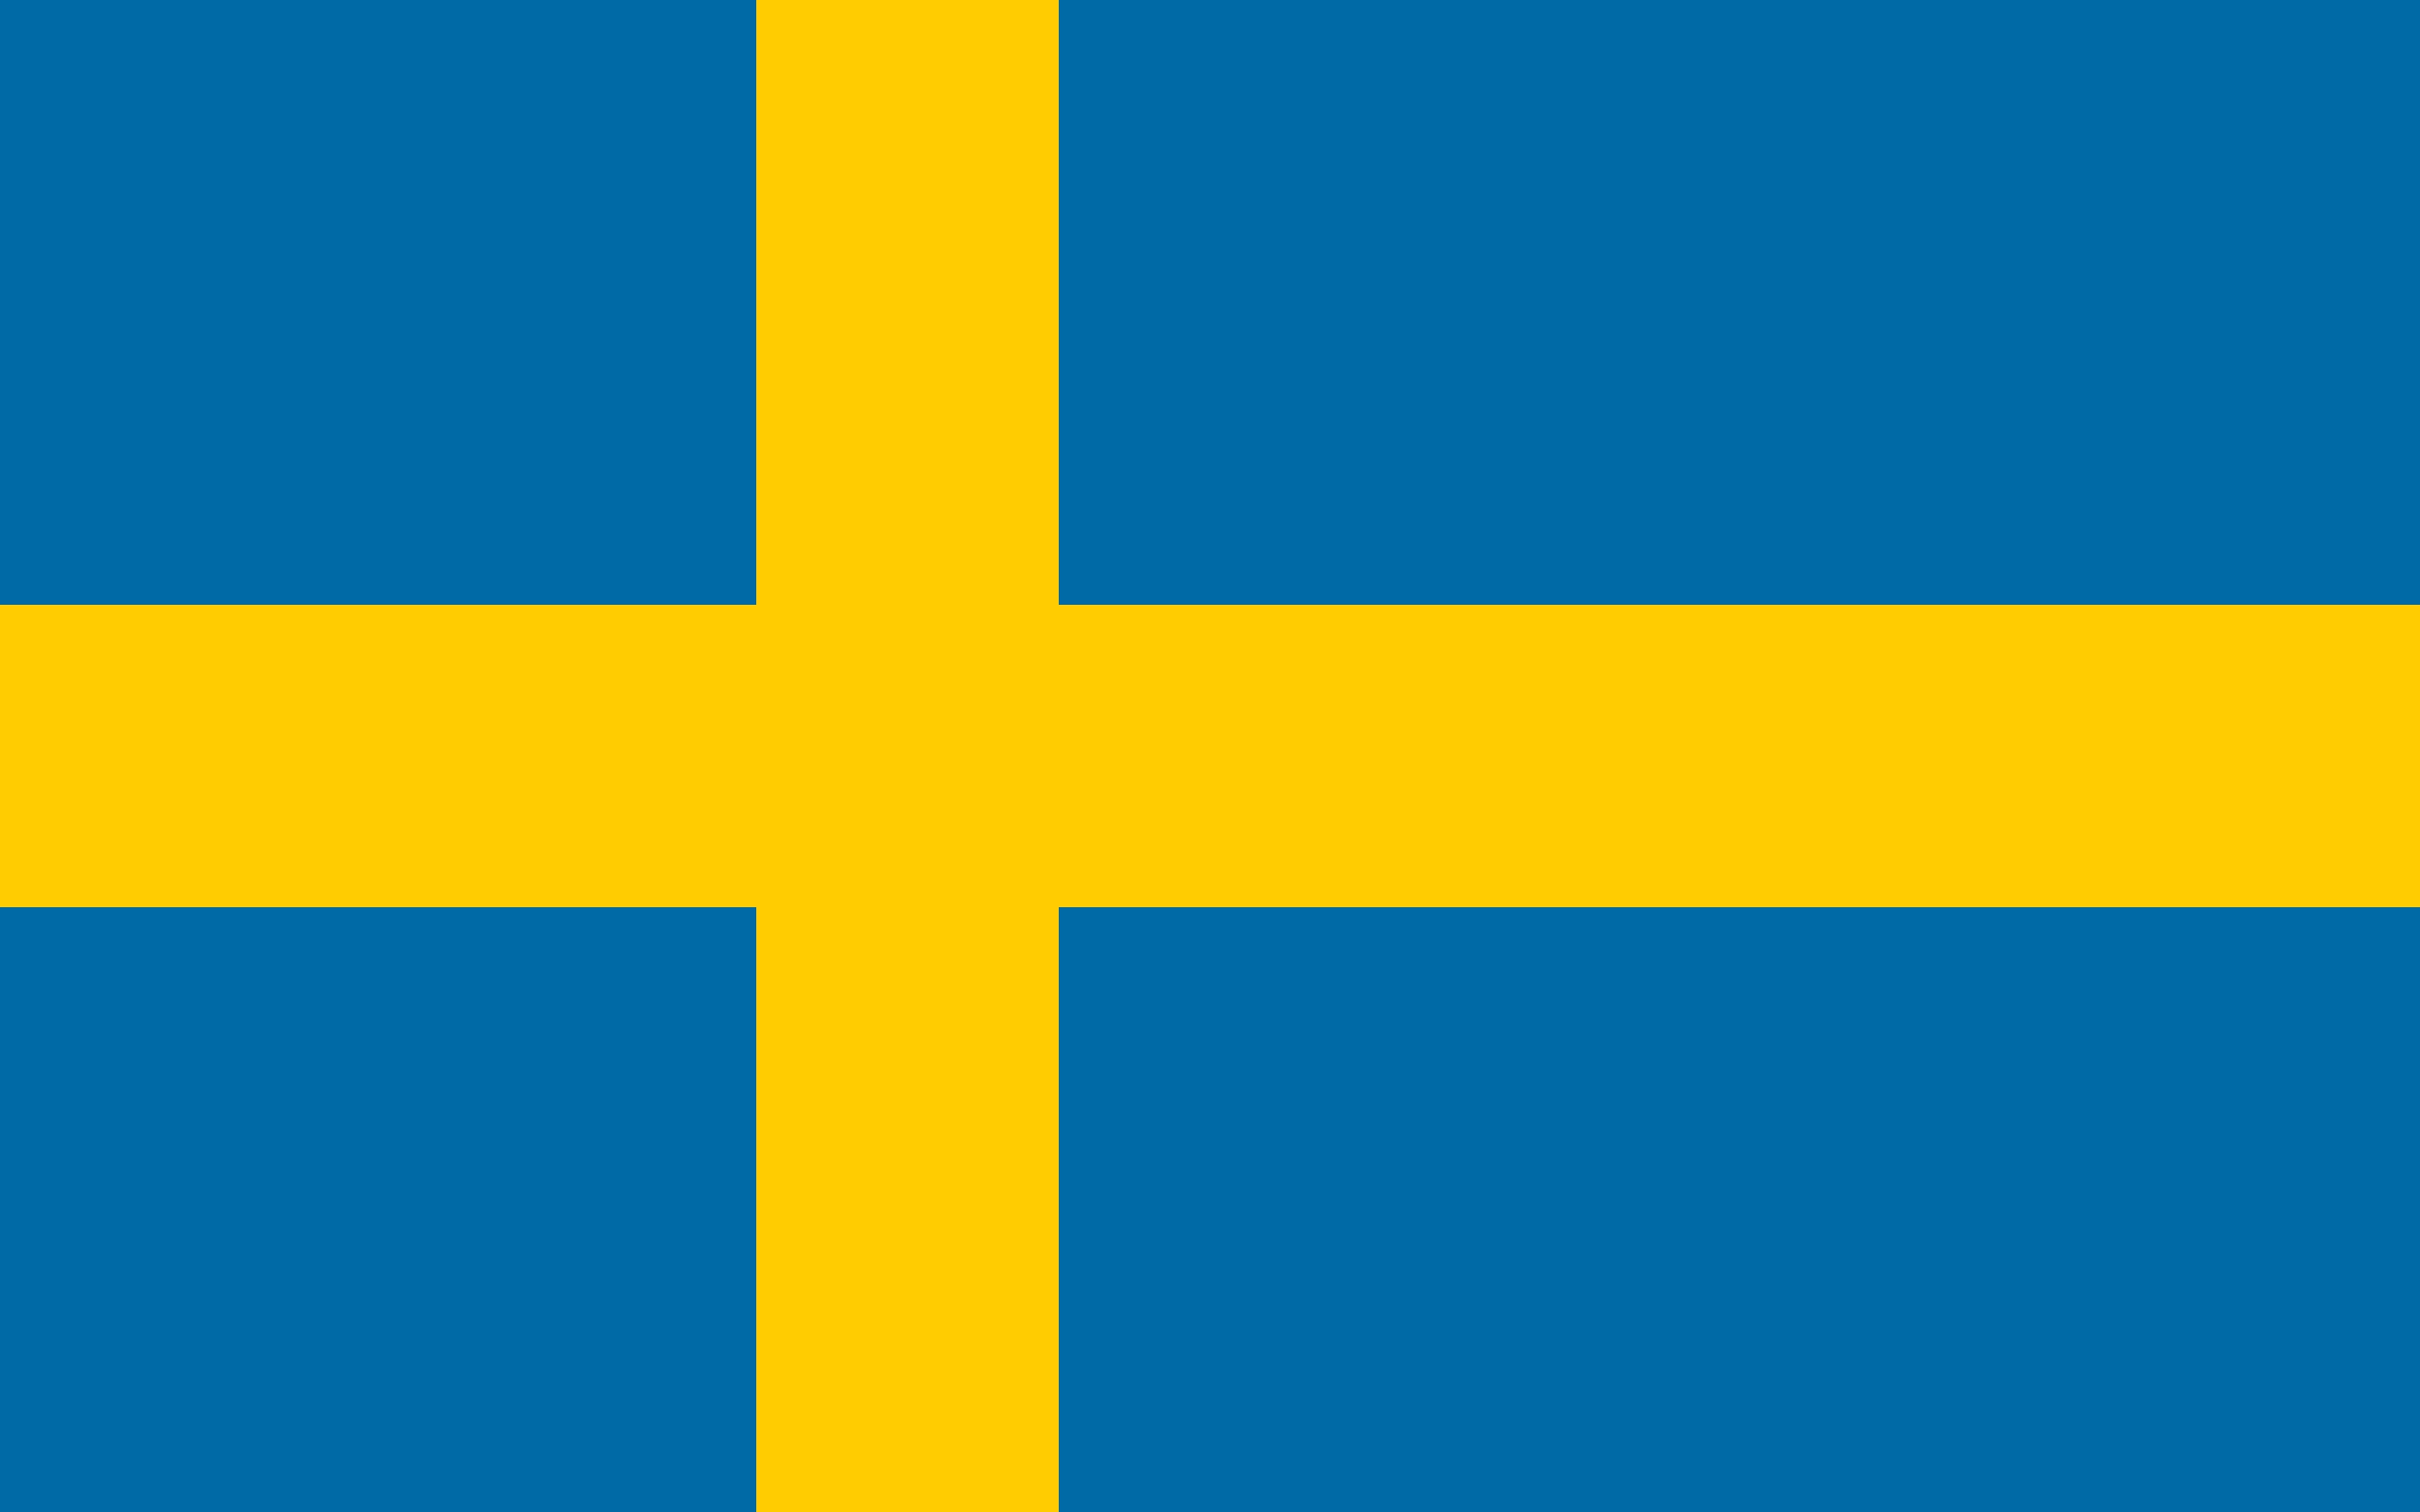

Switzerland


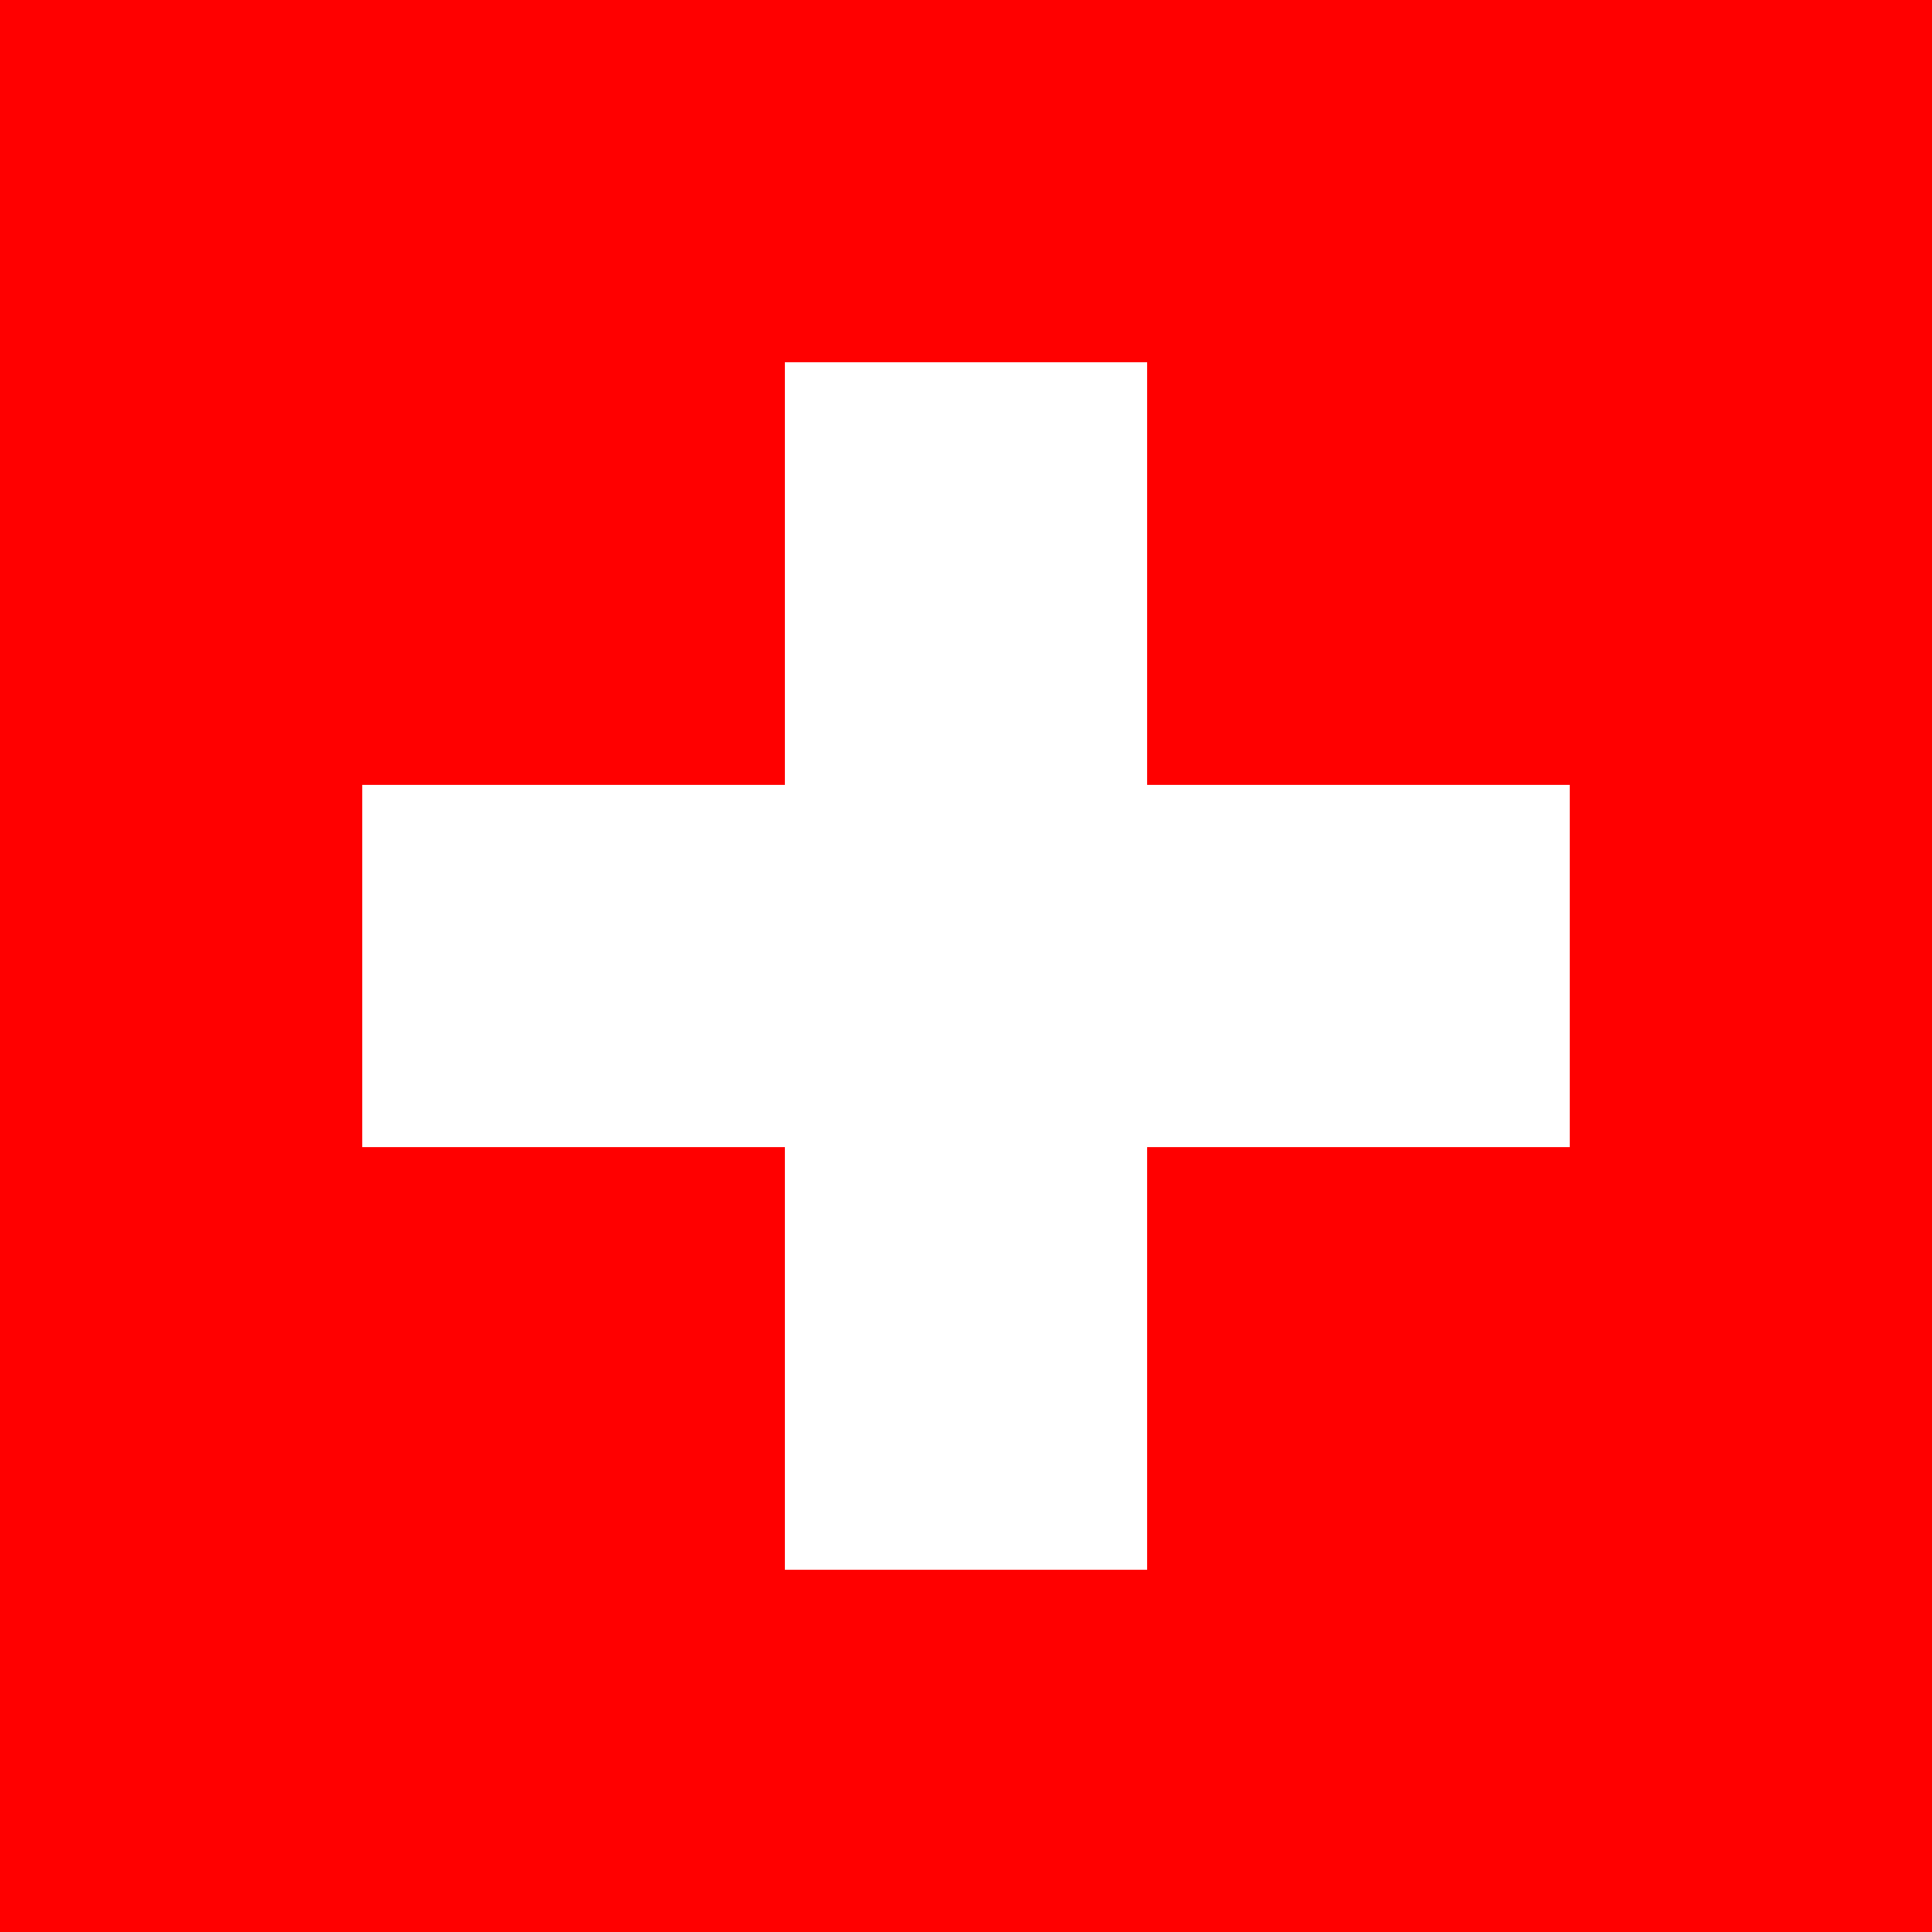

Syria


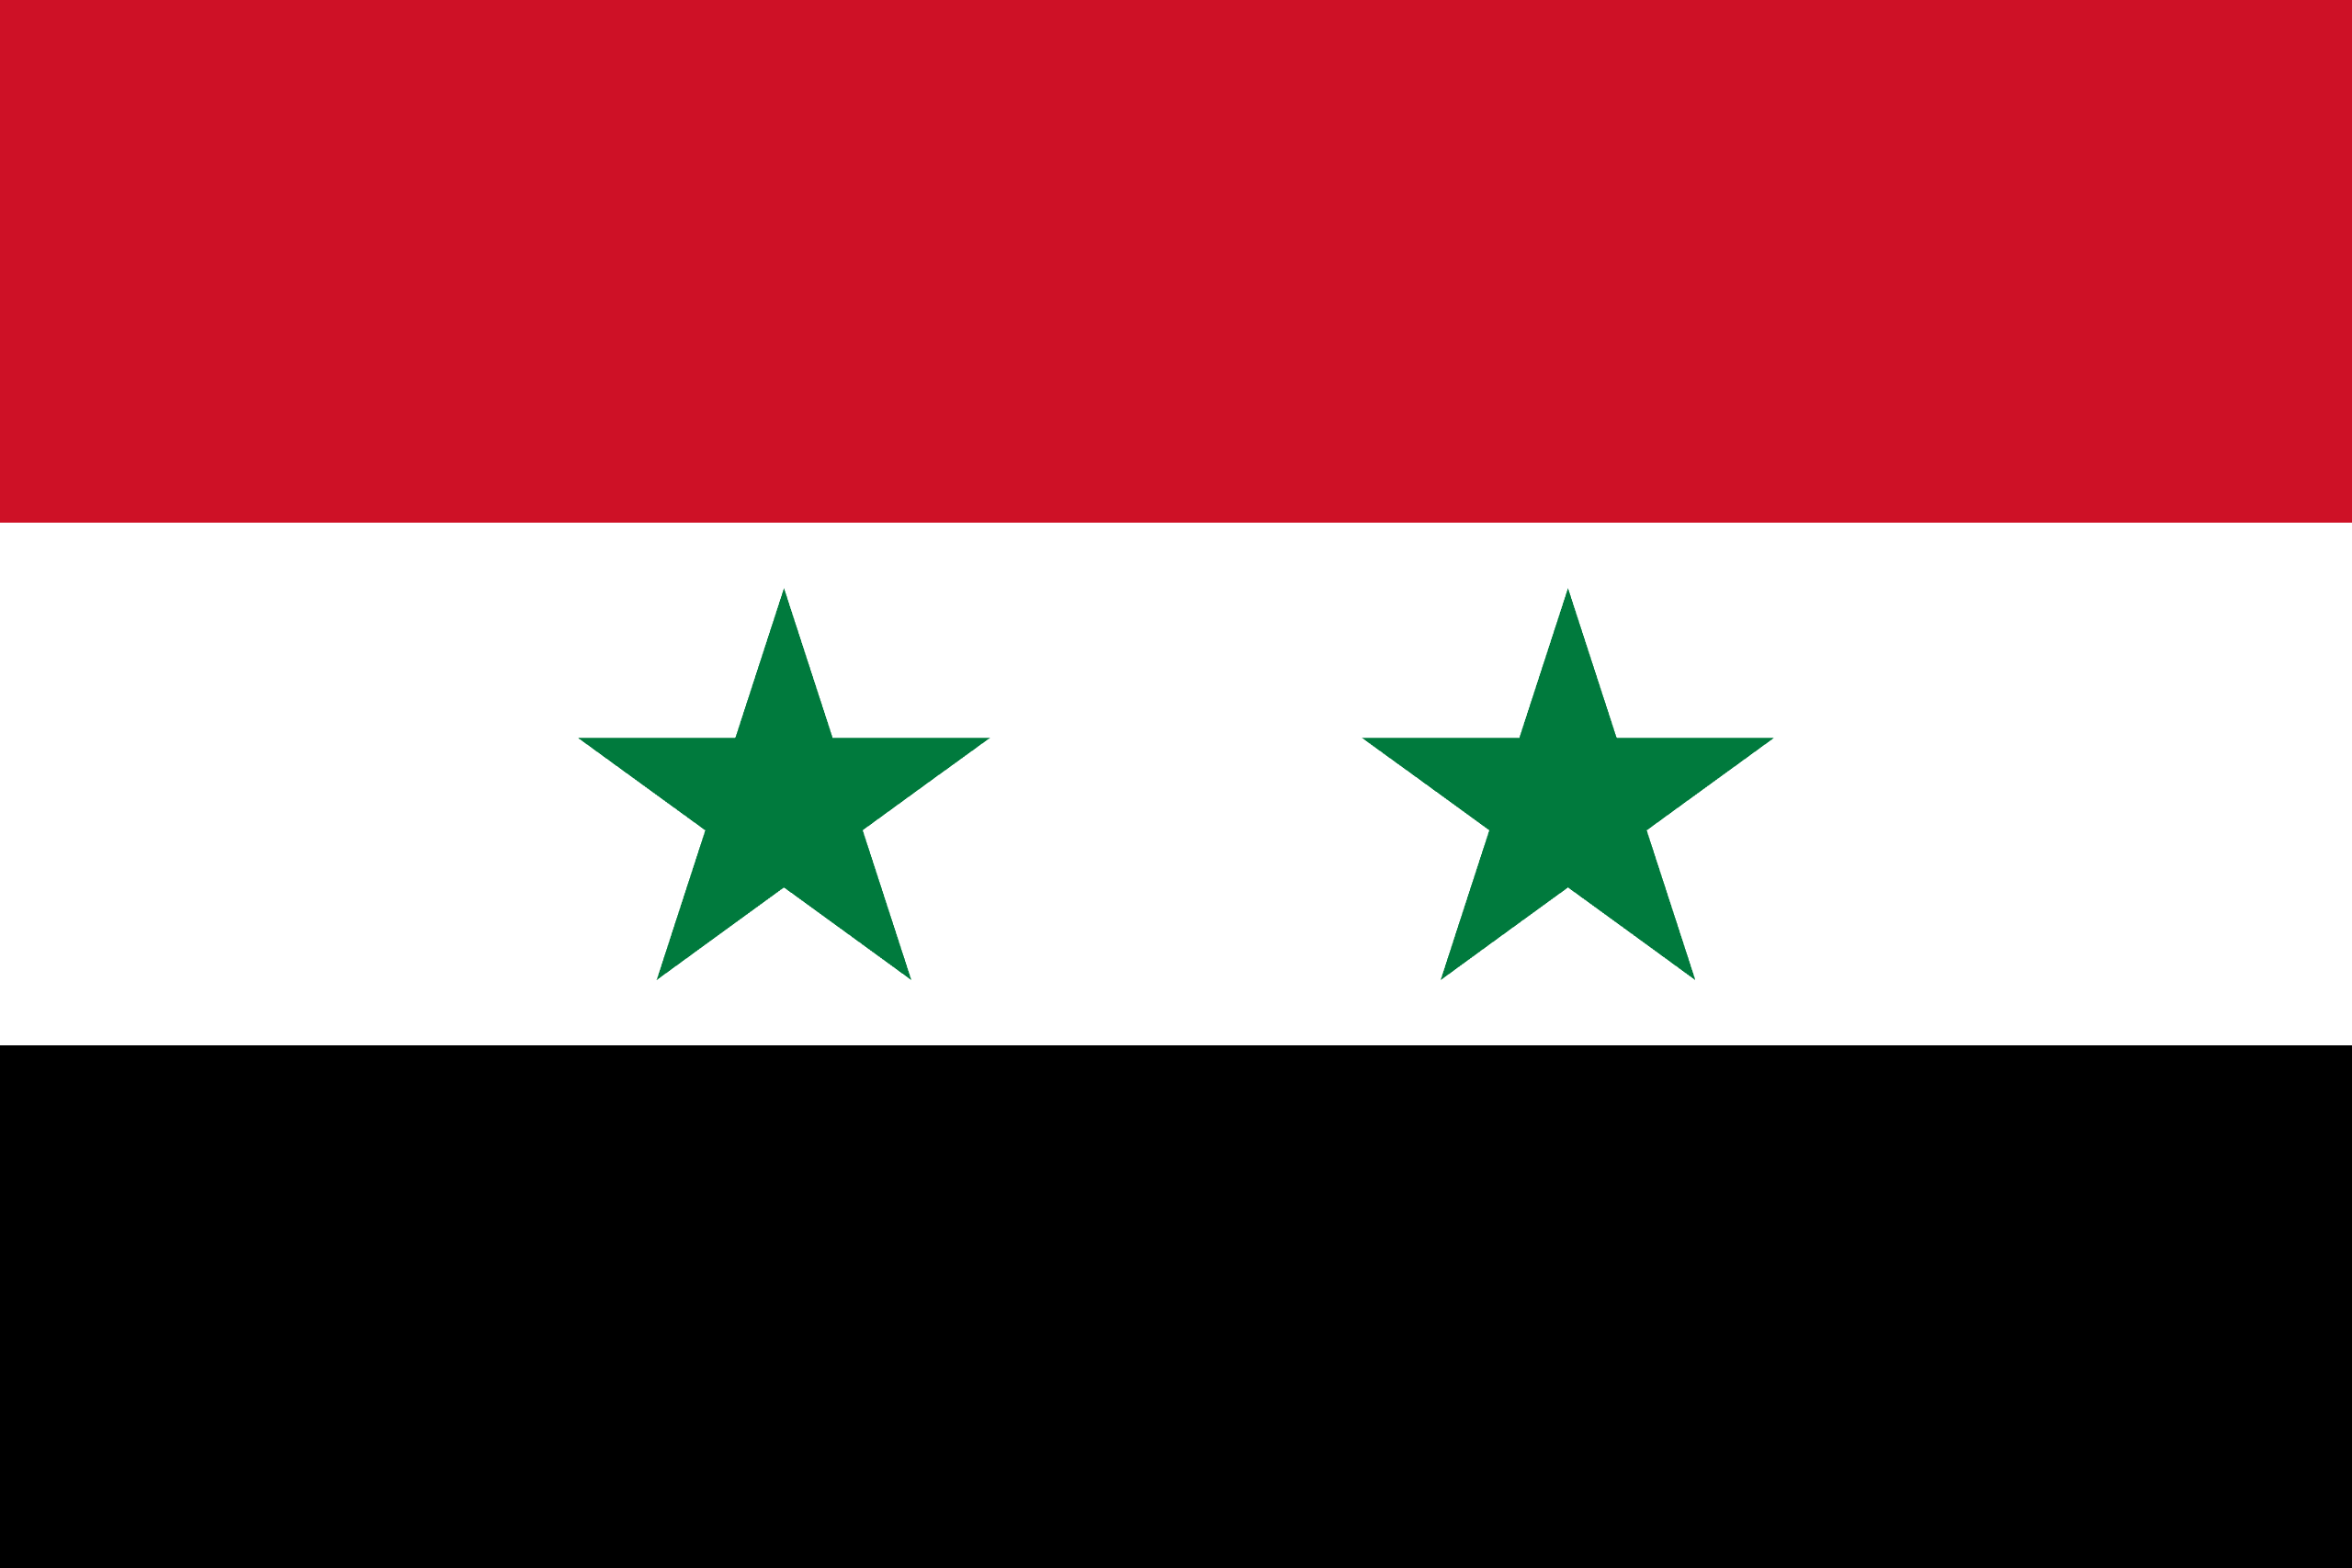

Taiwan


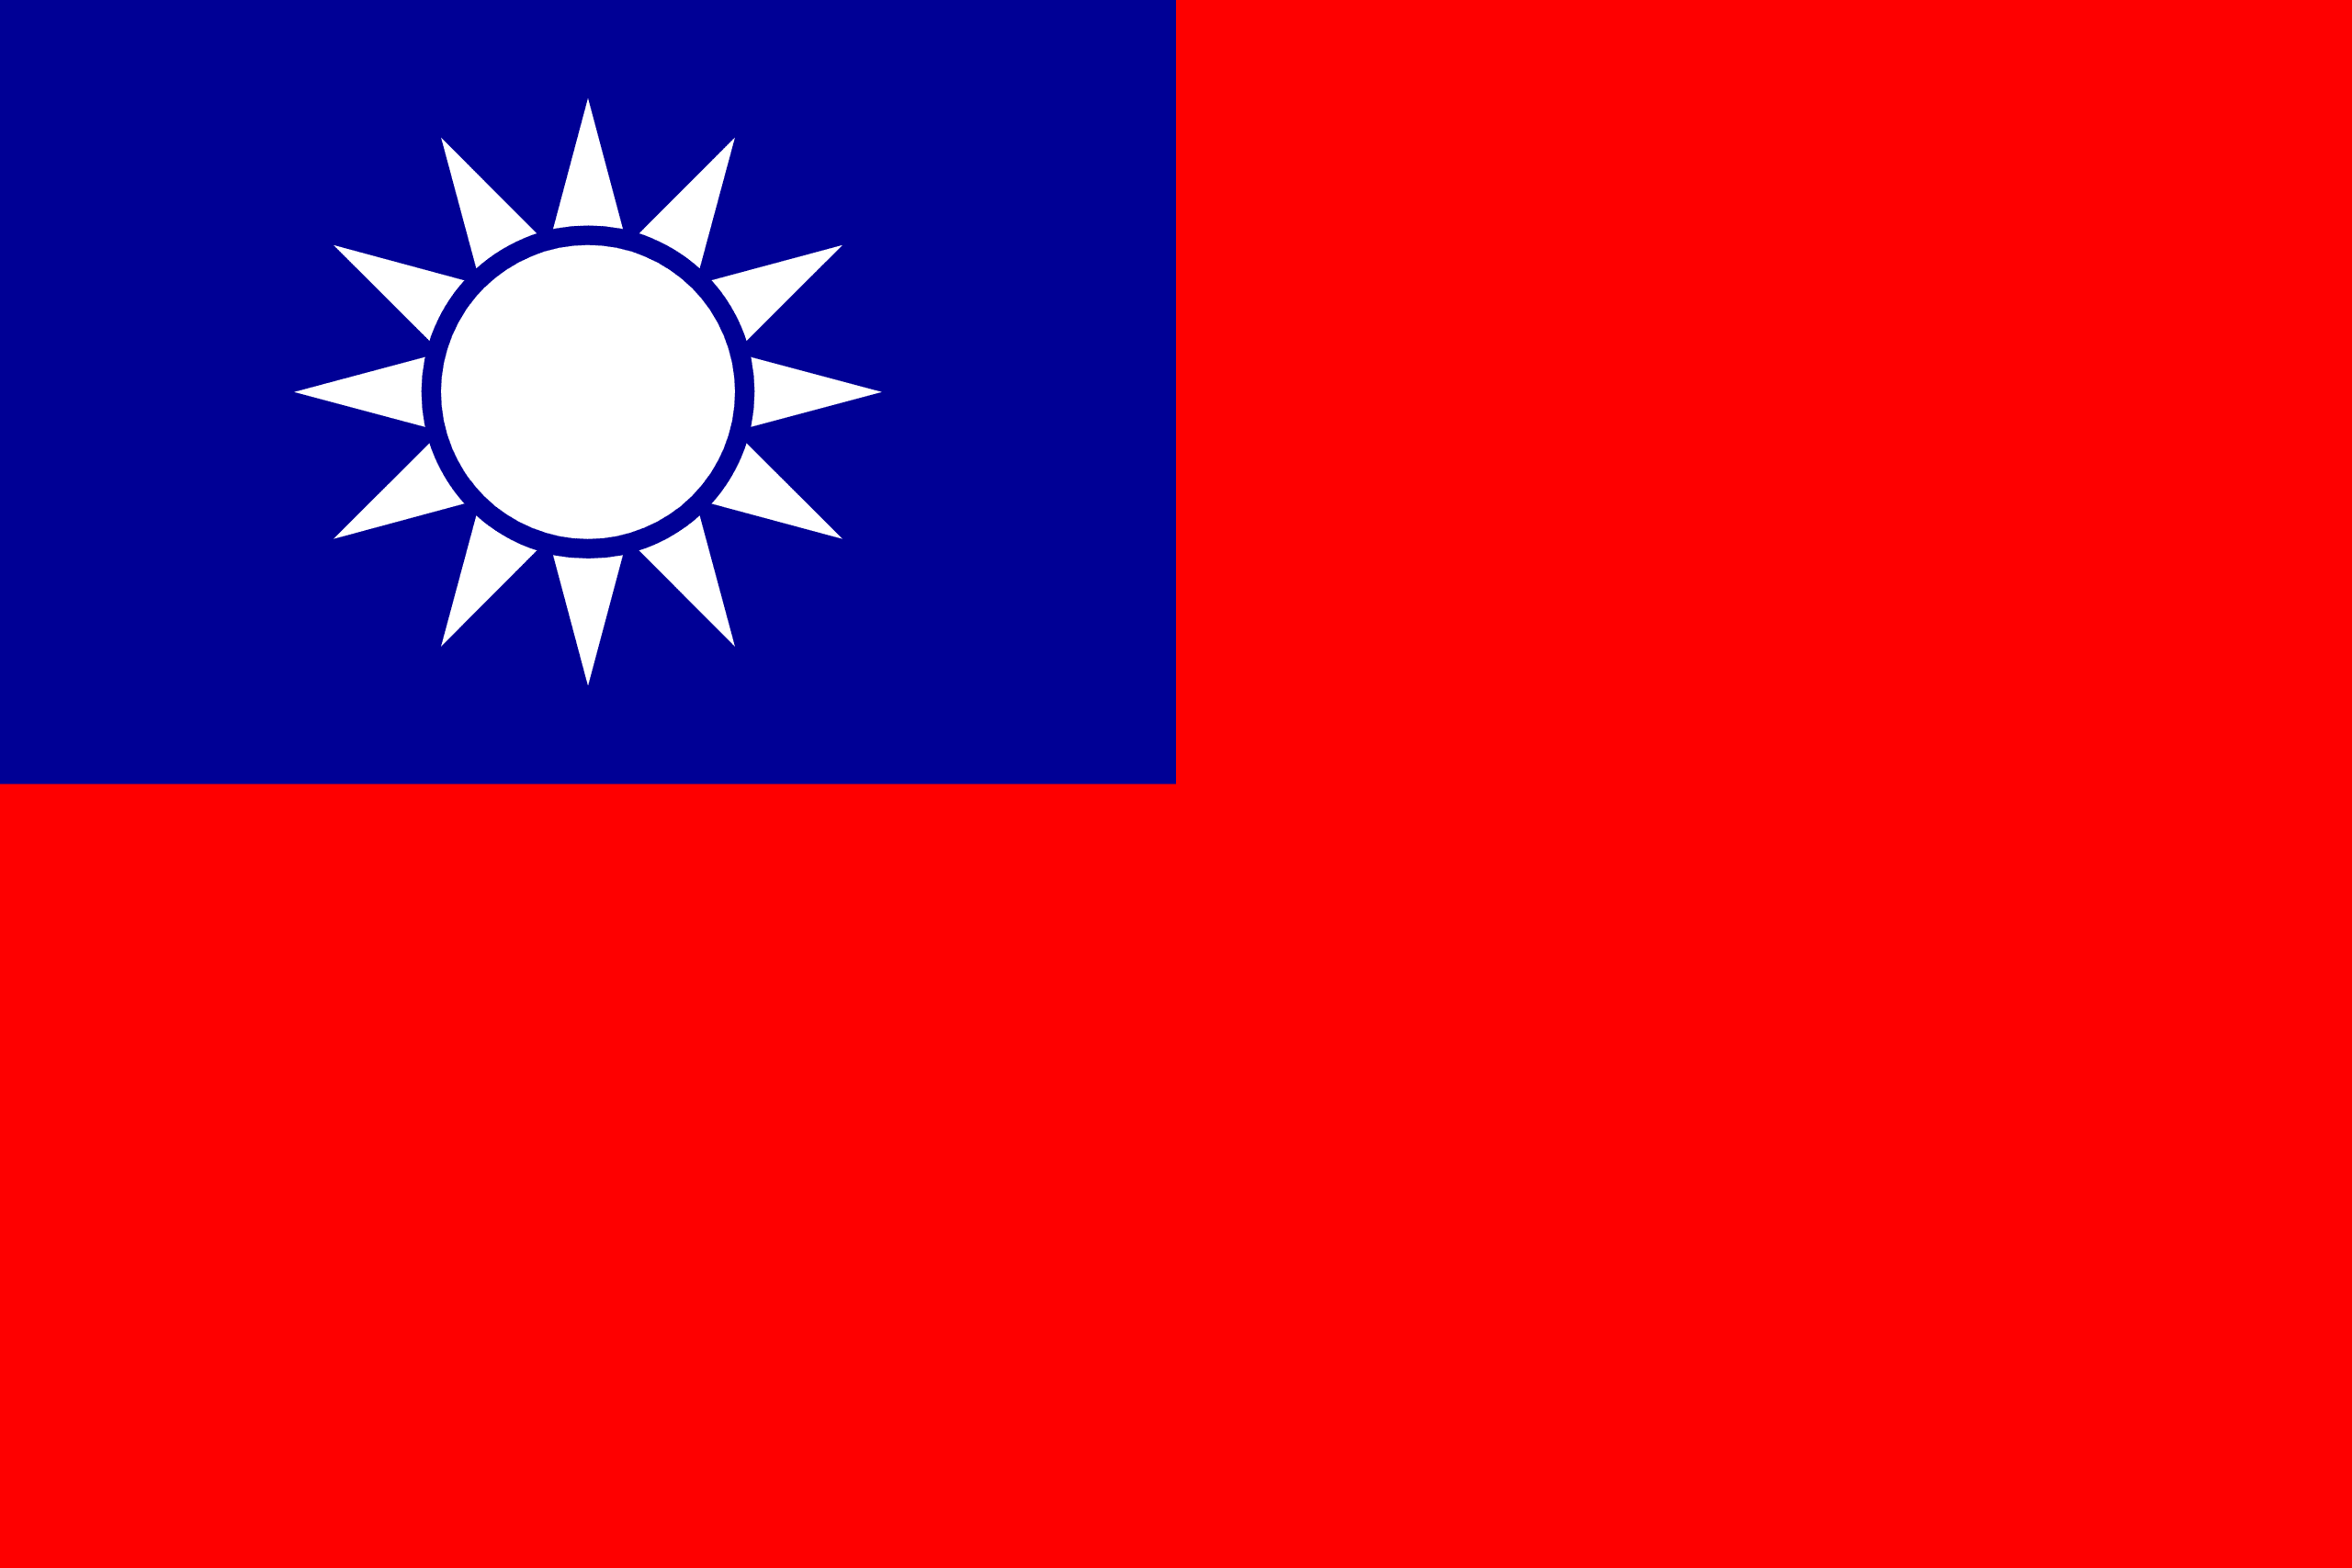

Tajikistan


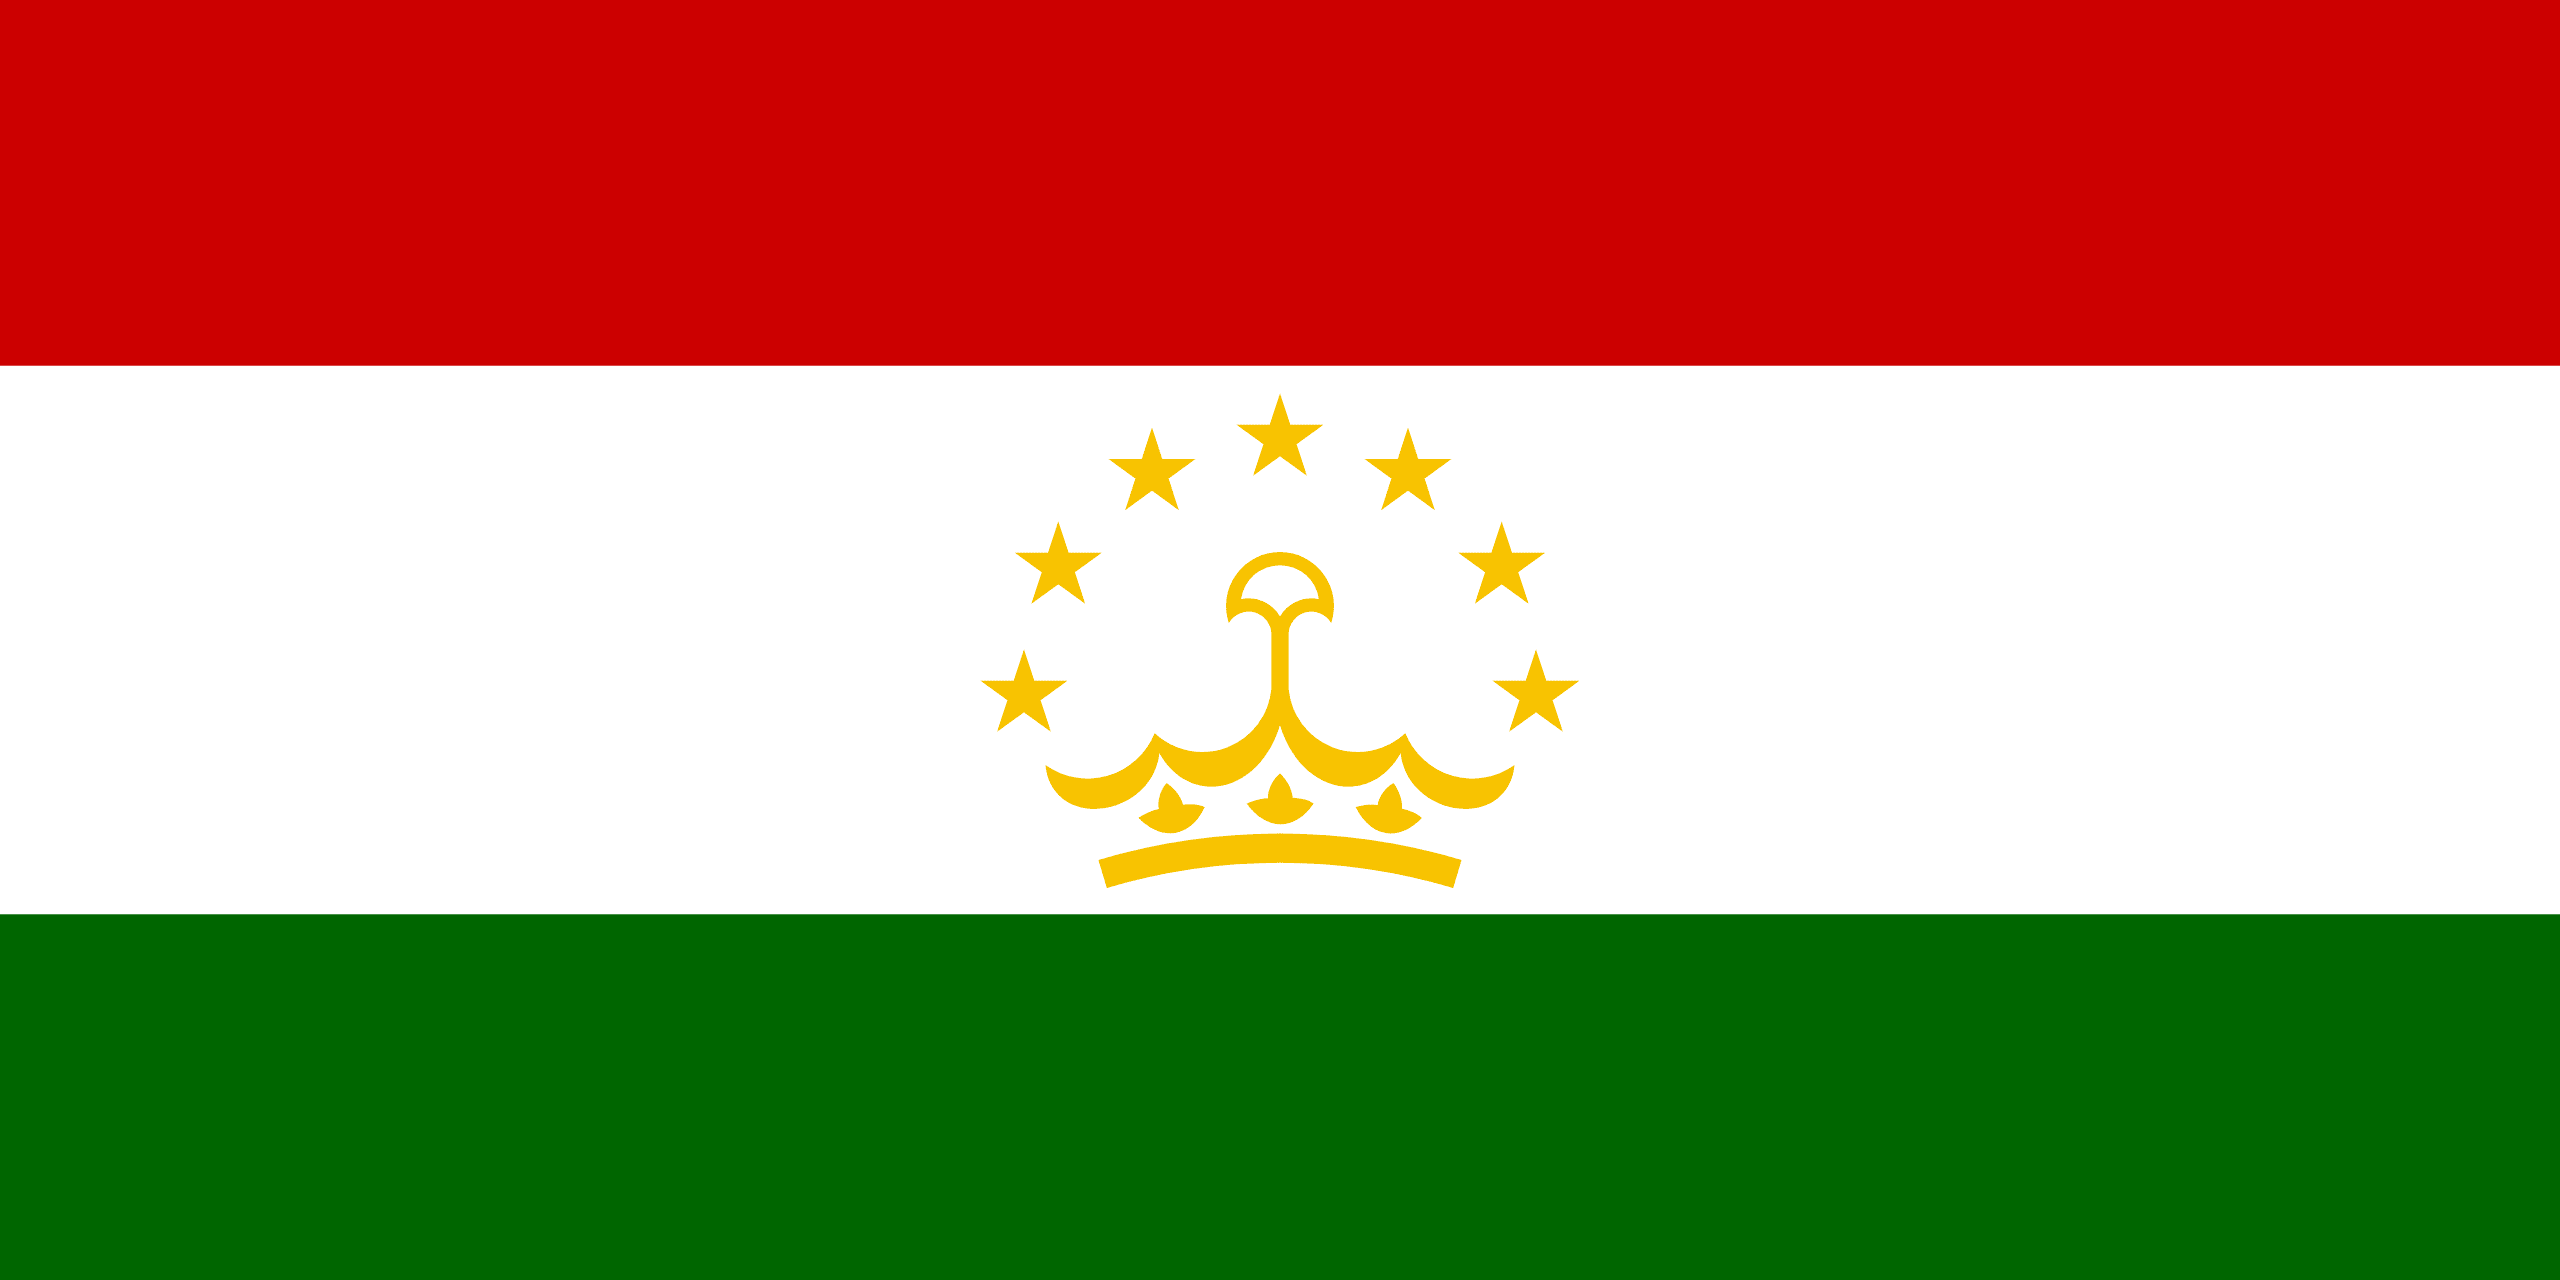

Tanzania


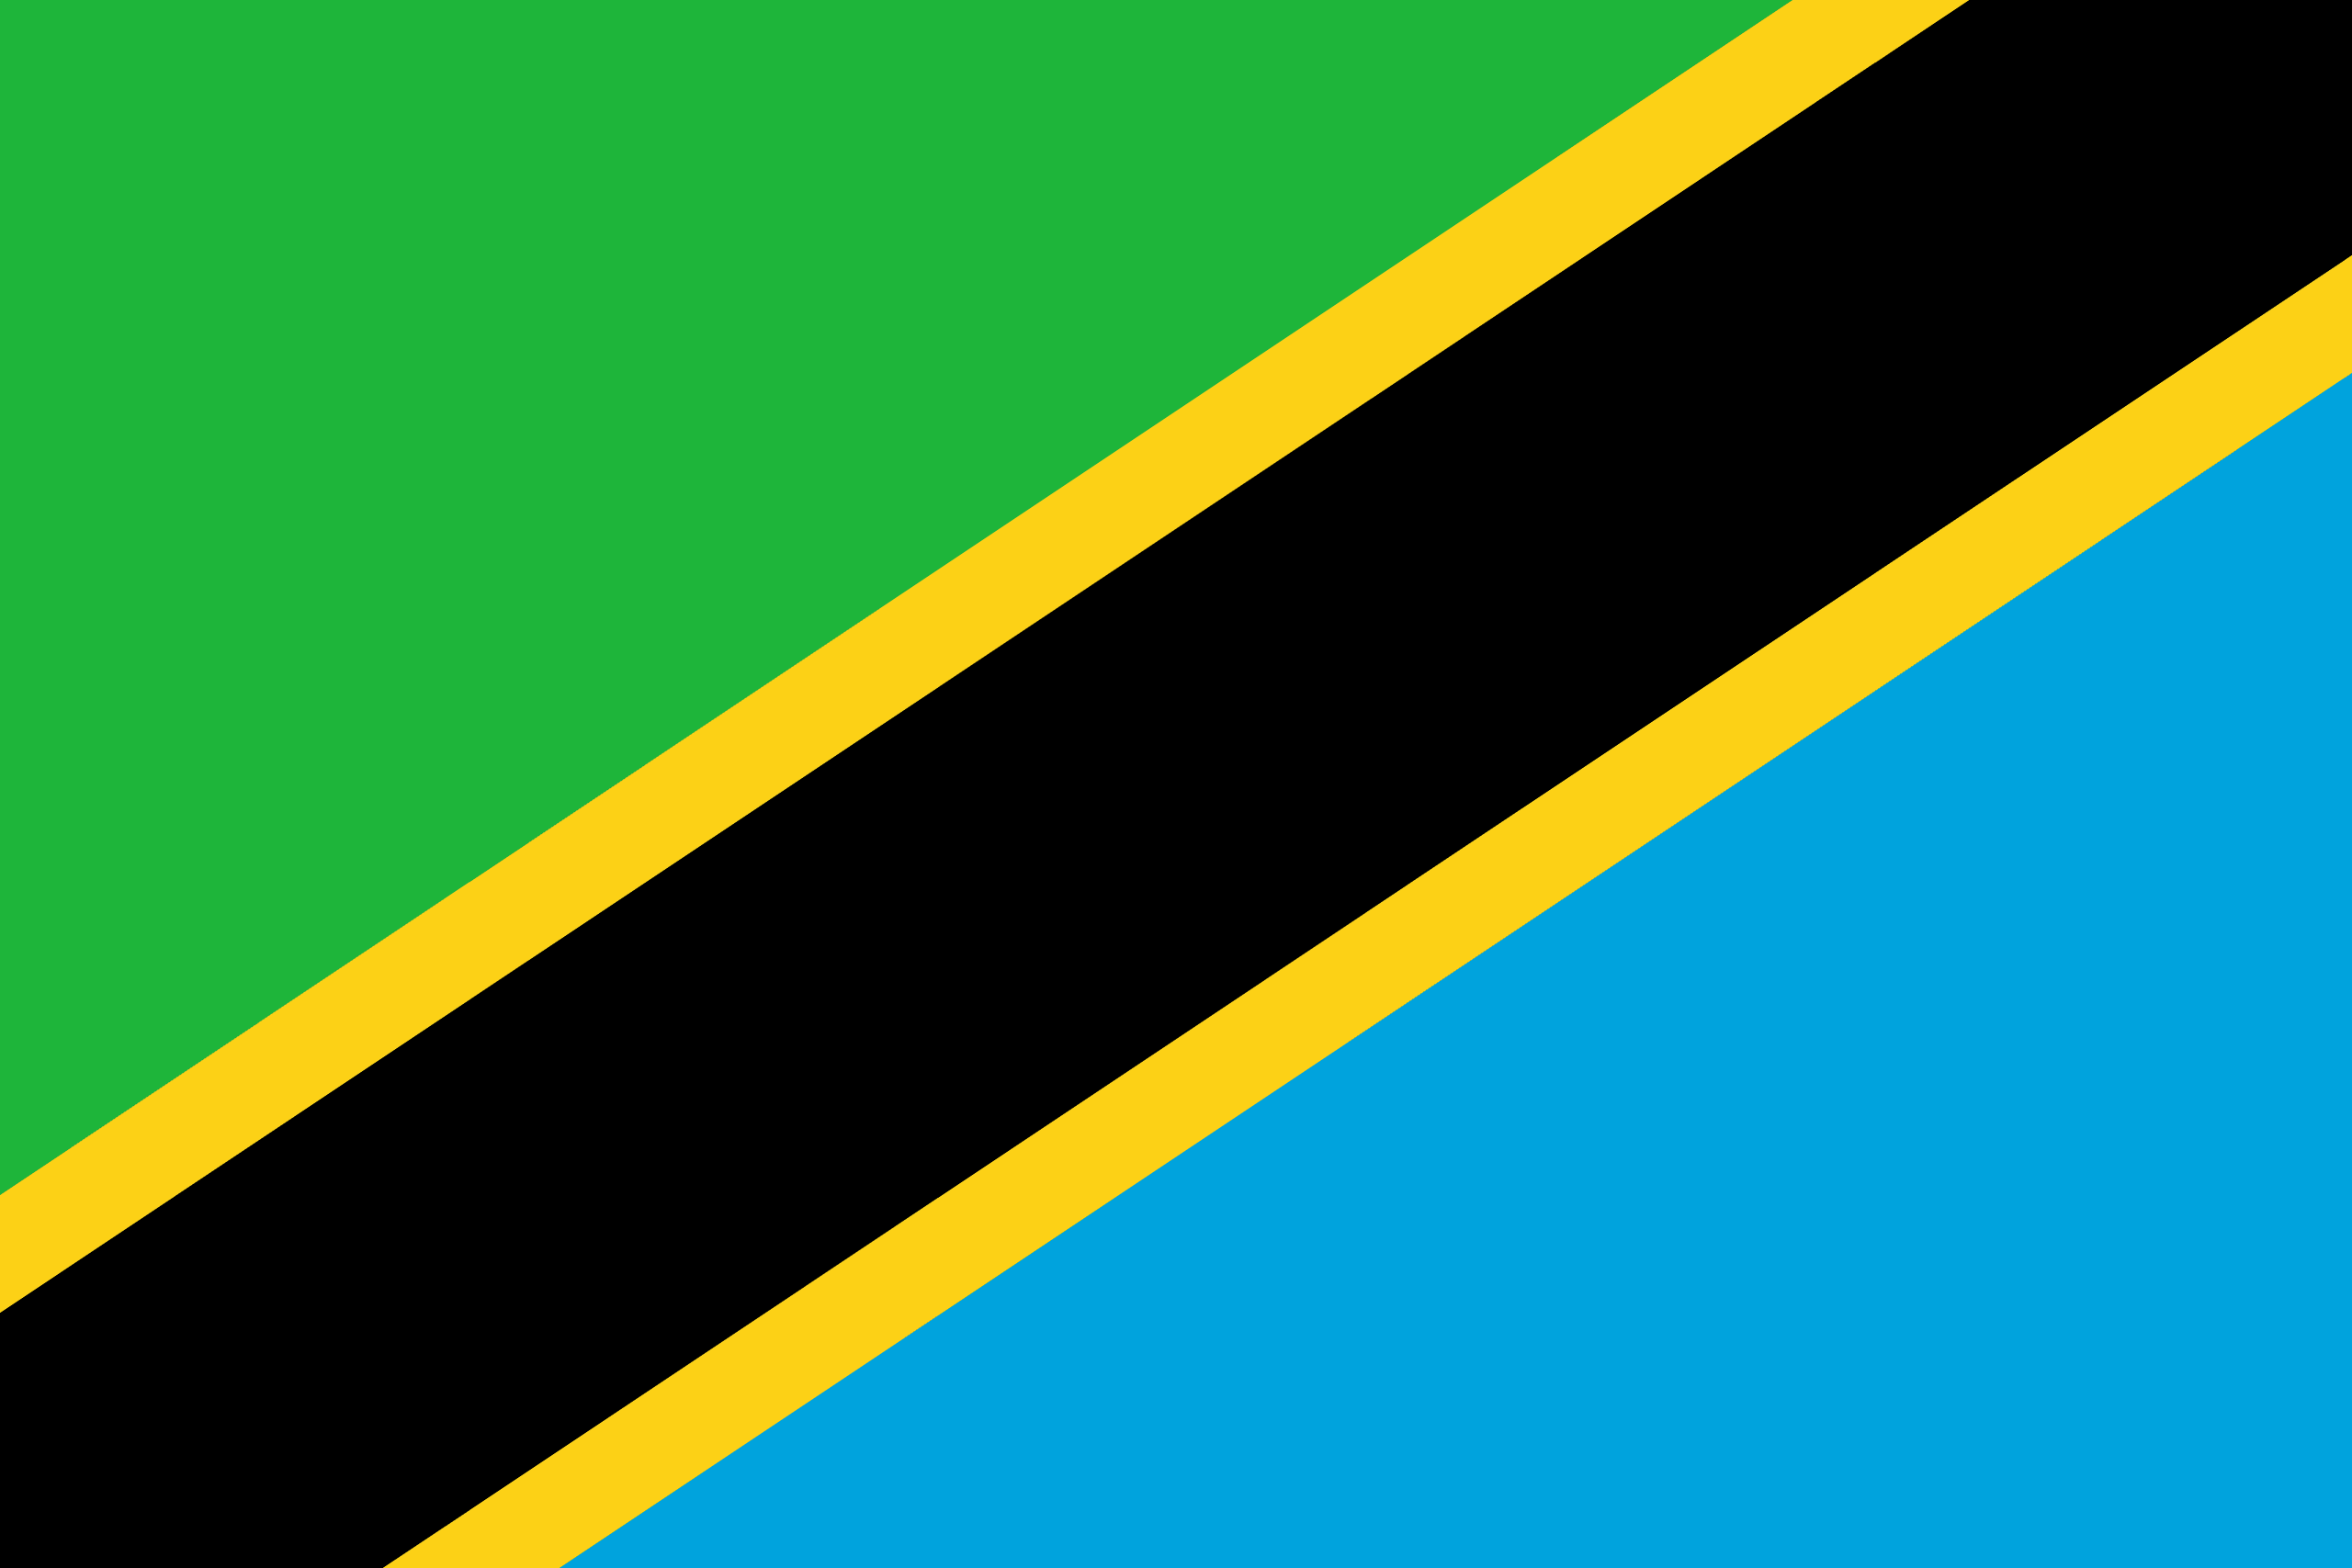

Thailand


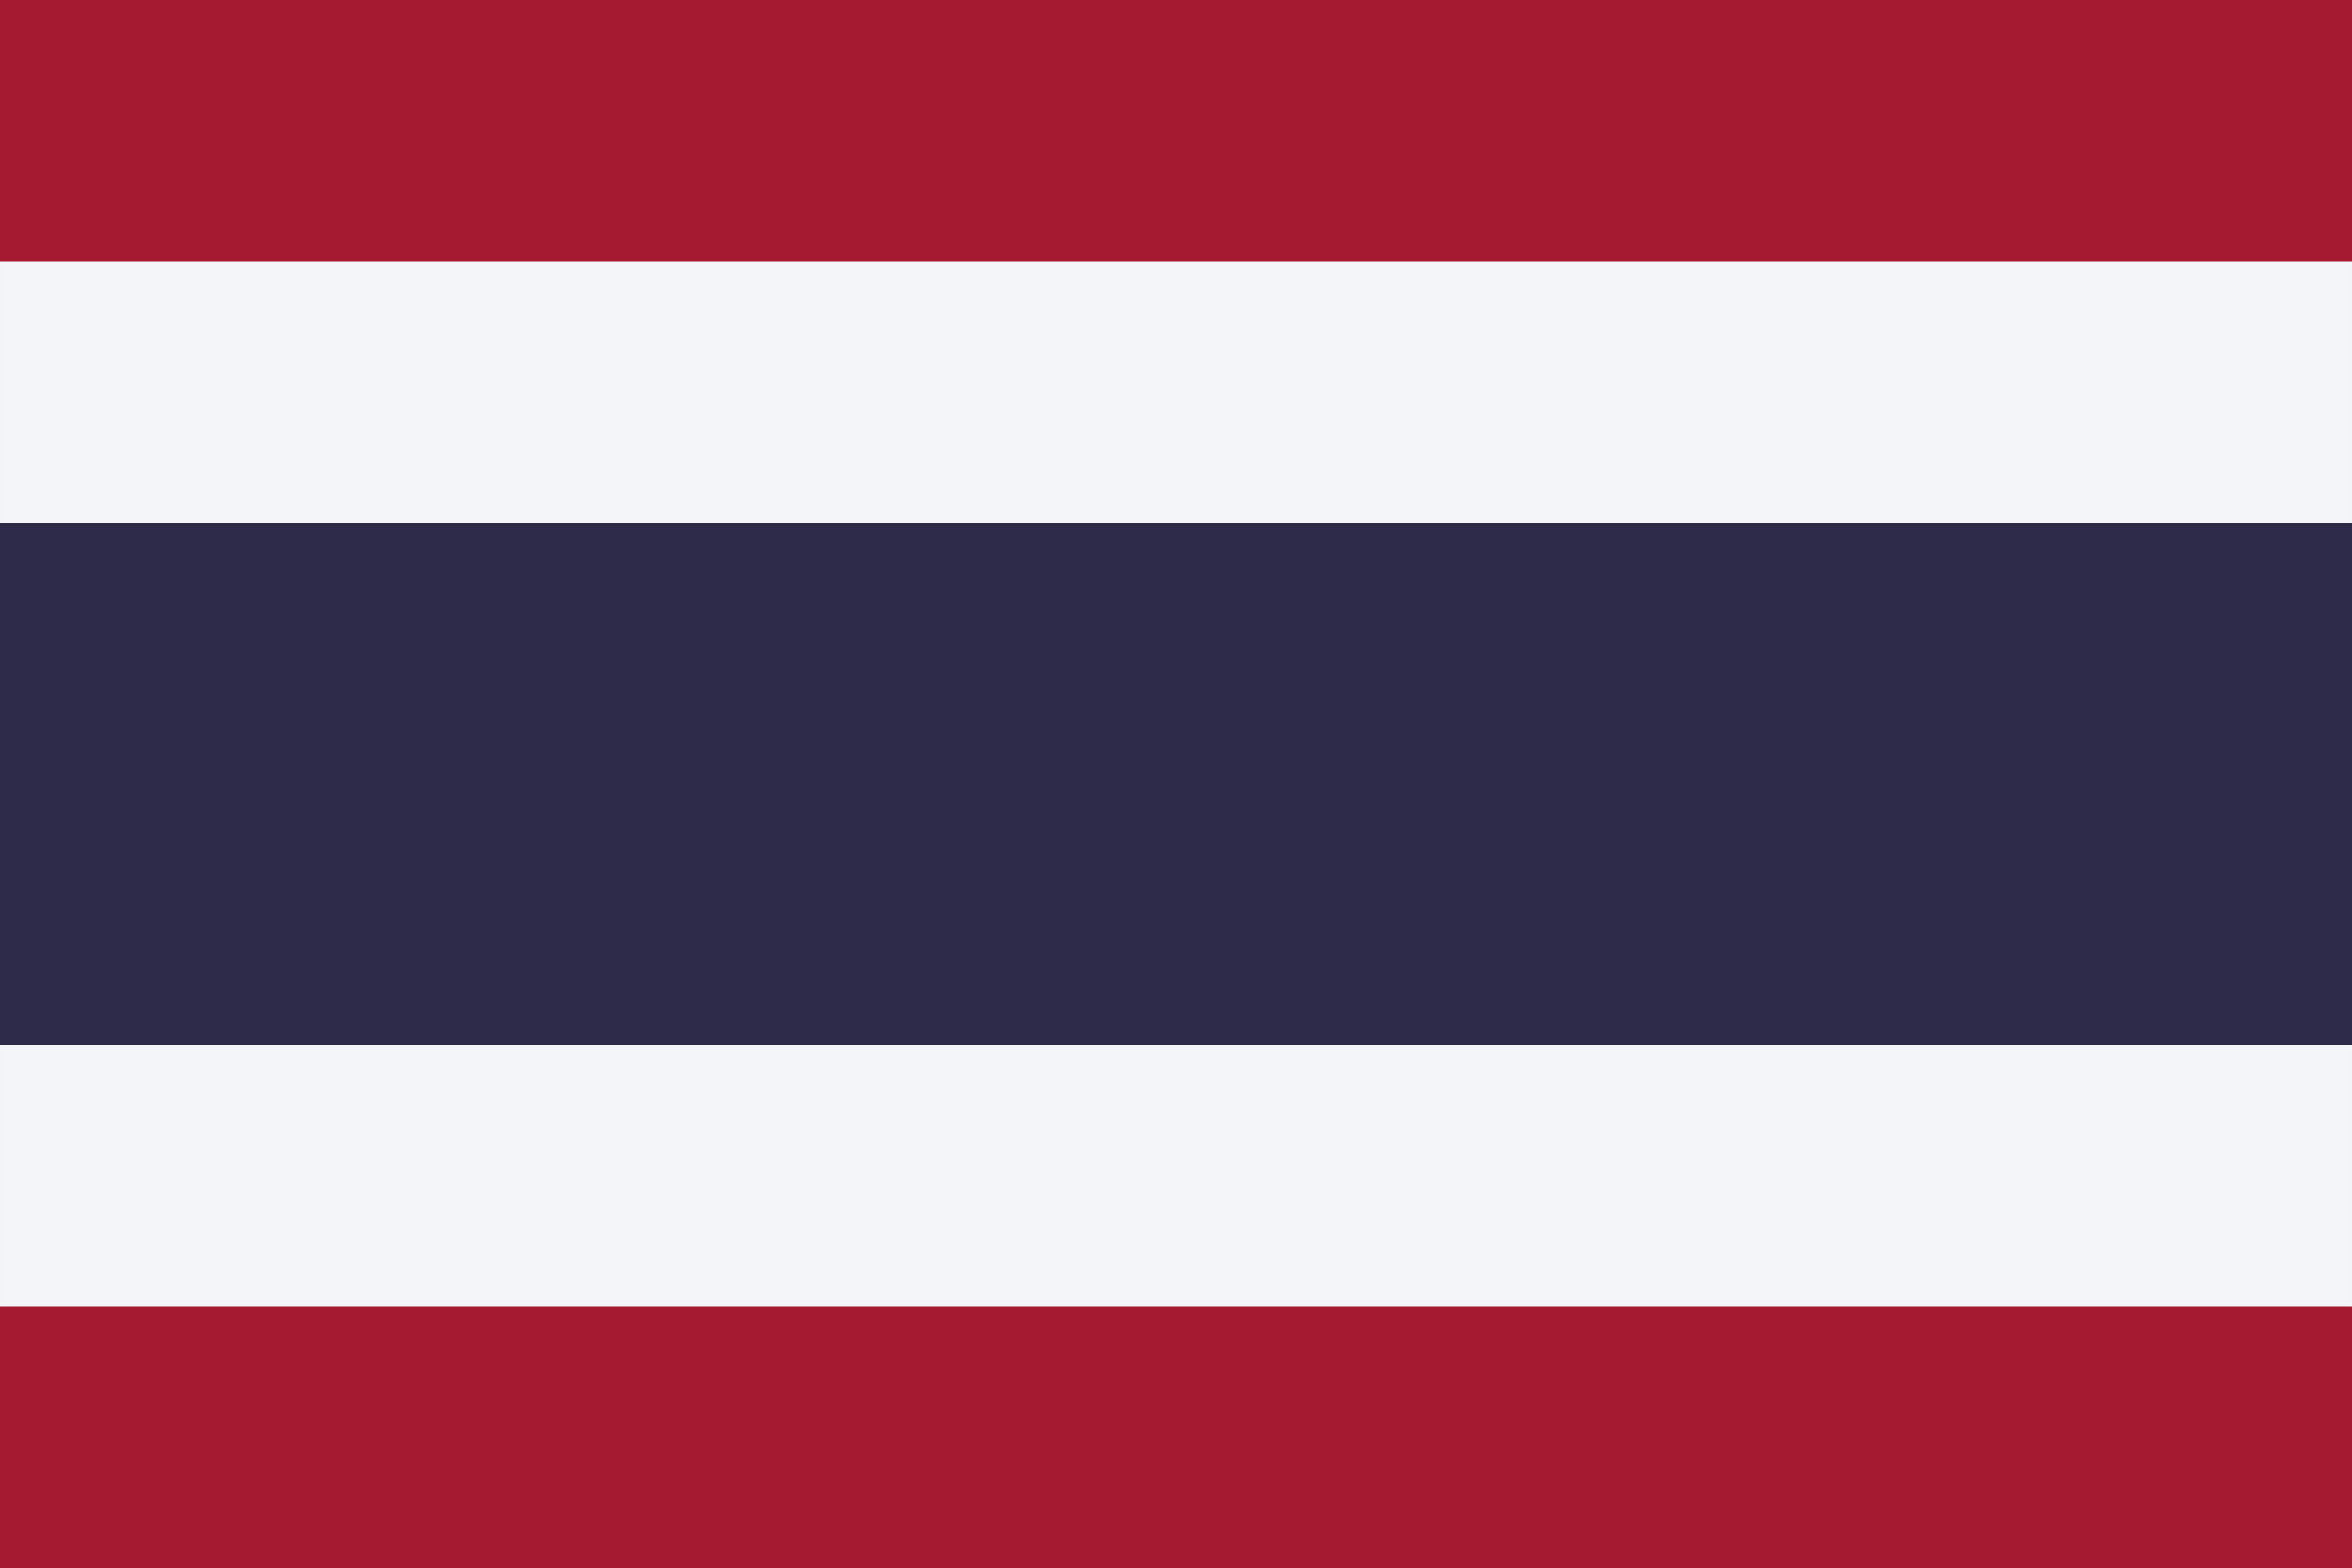

Timor-Leste


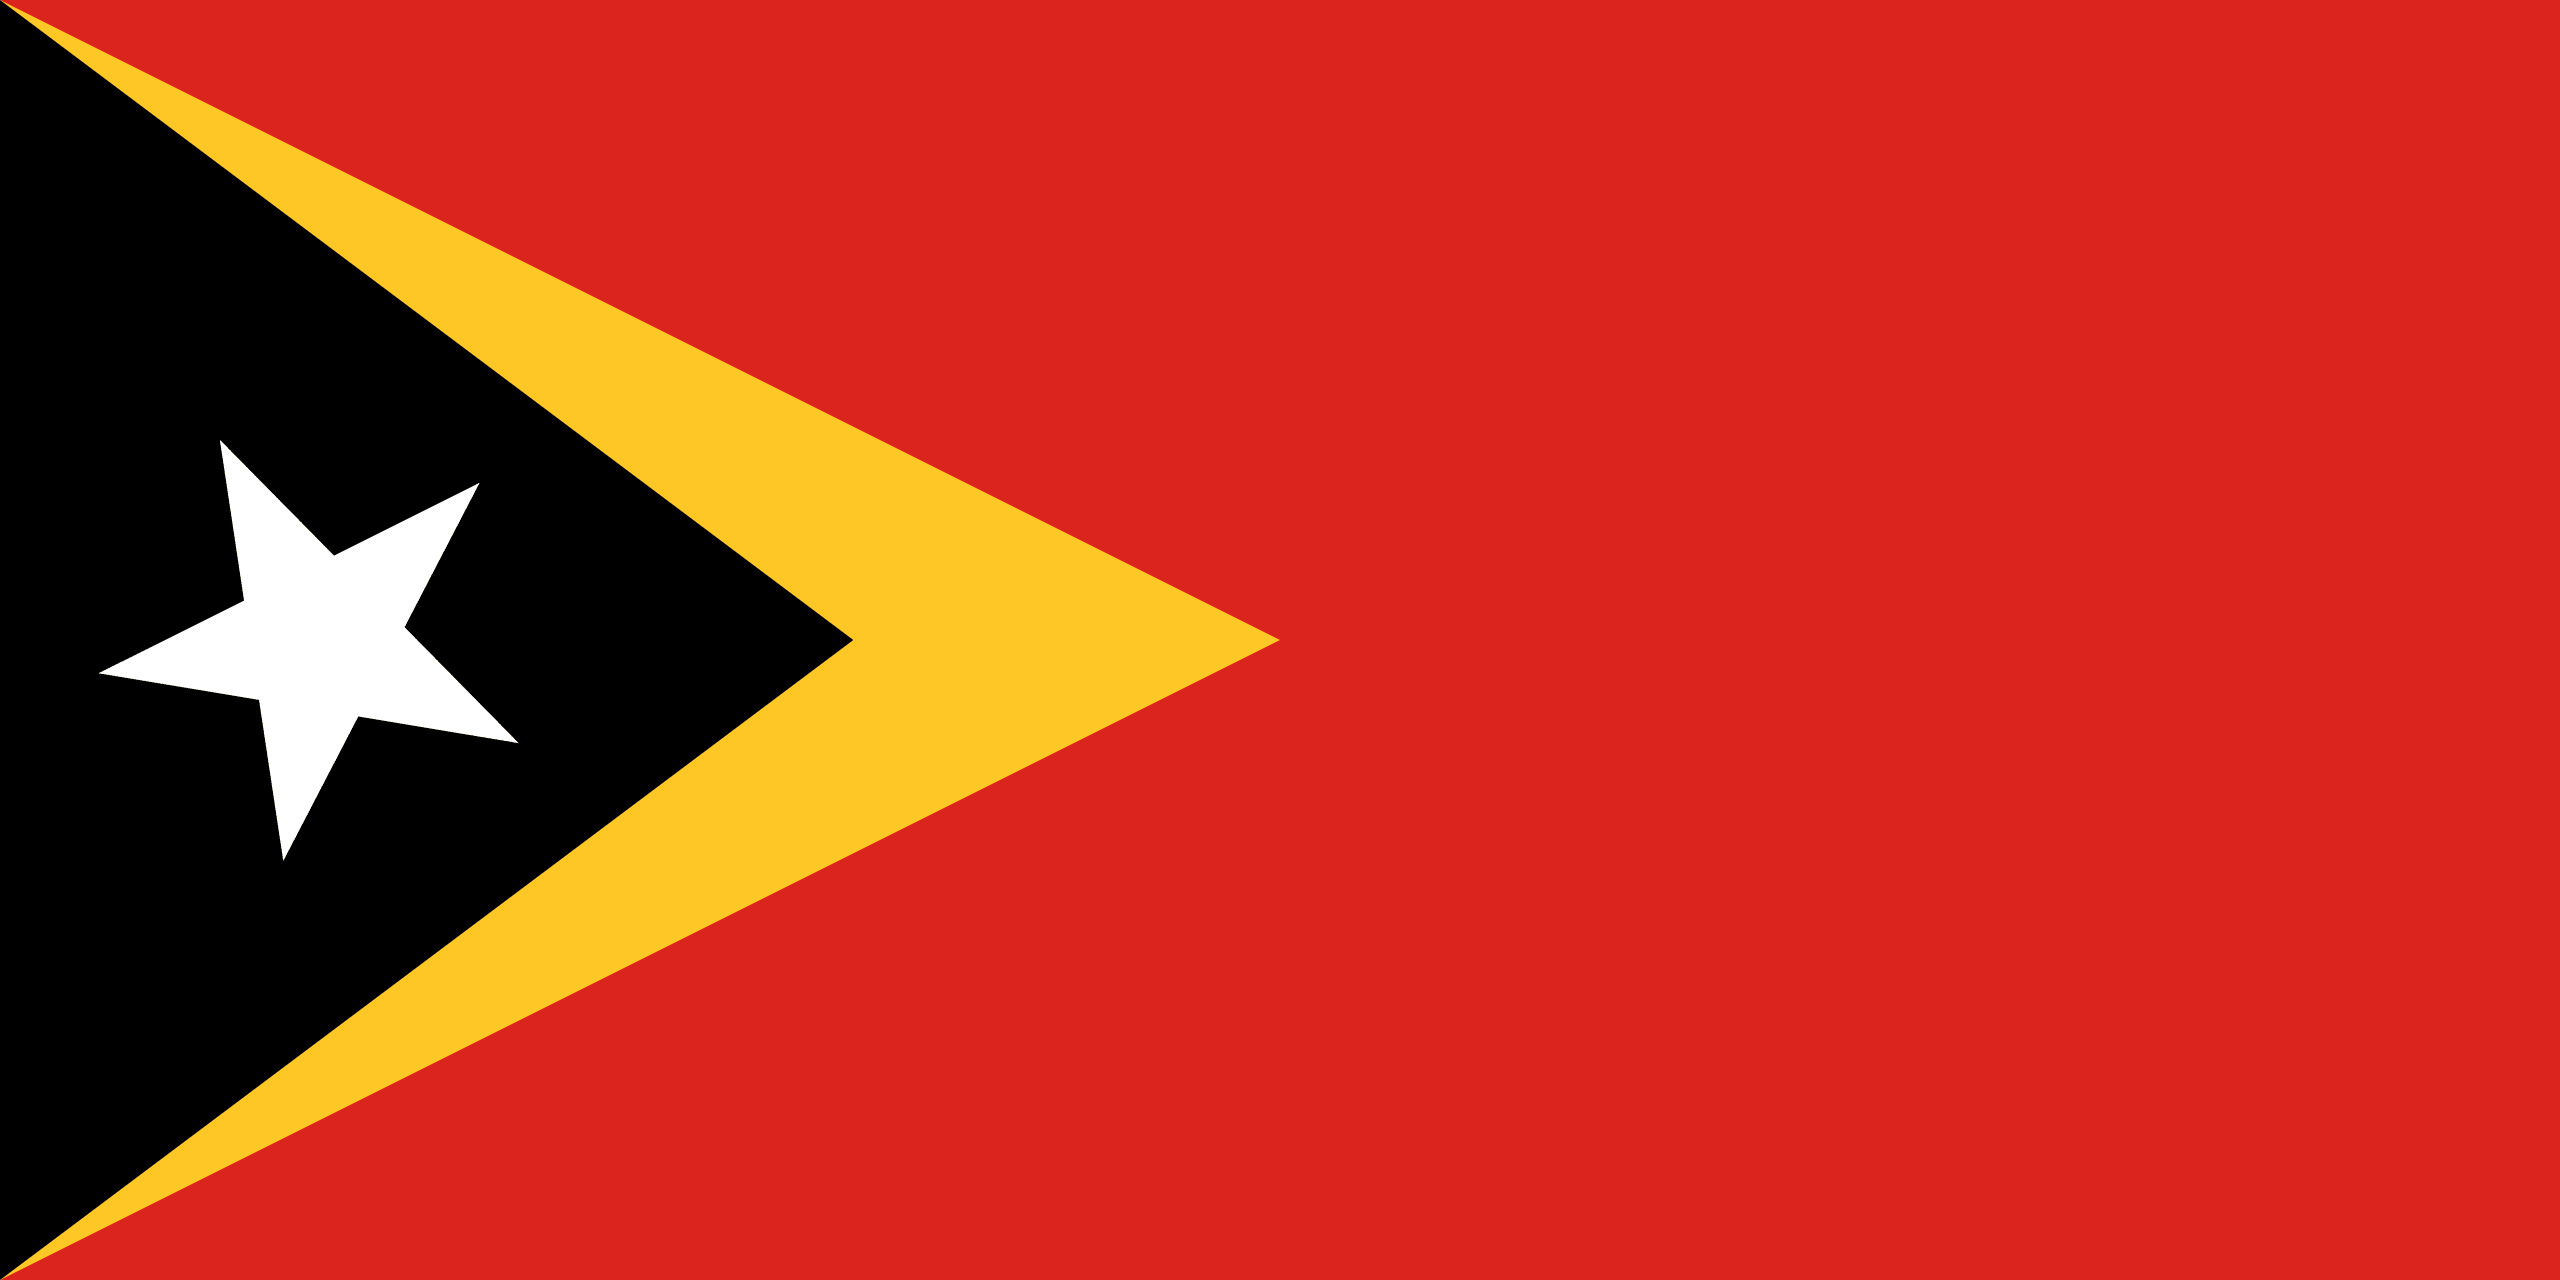

Togo


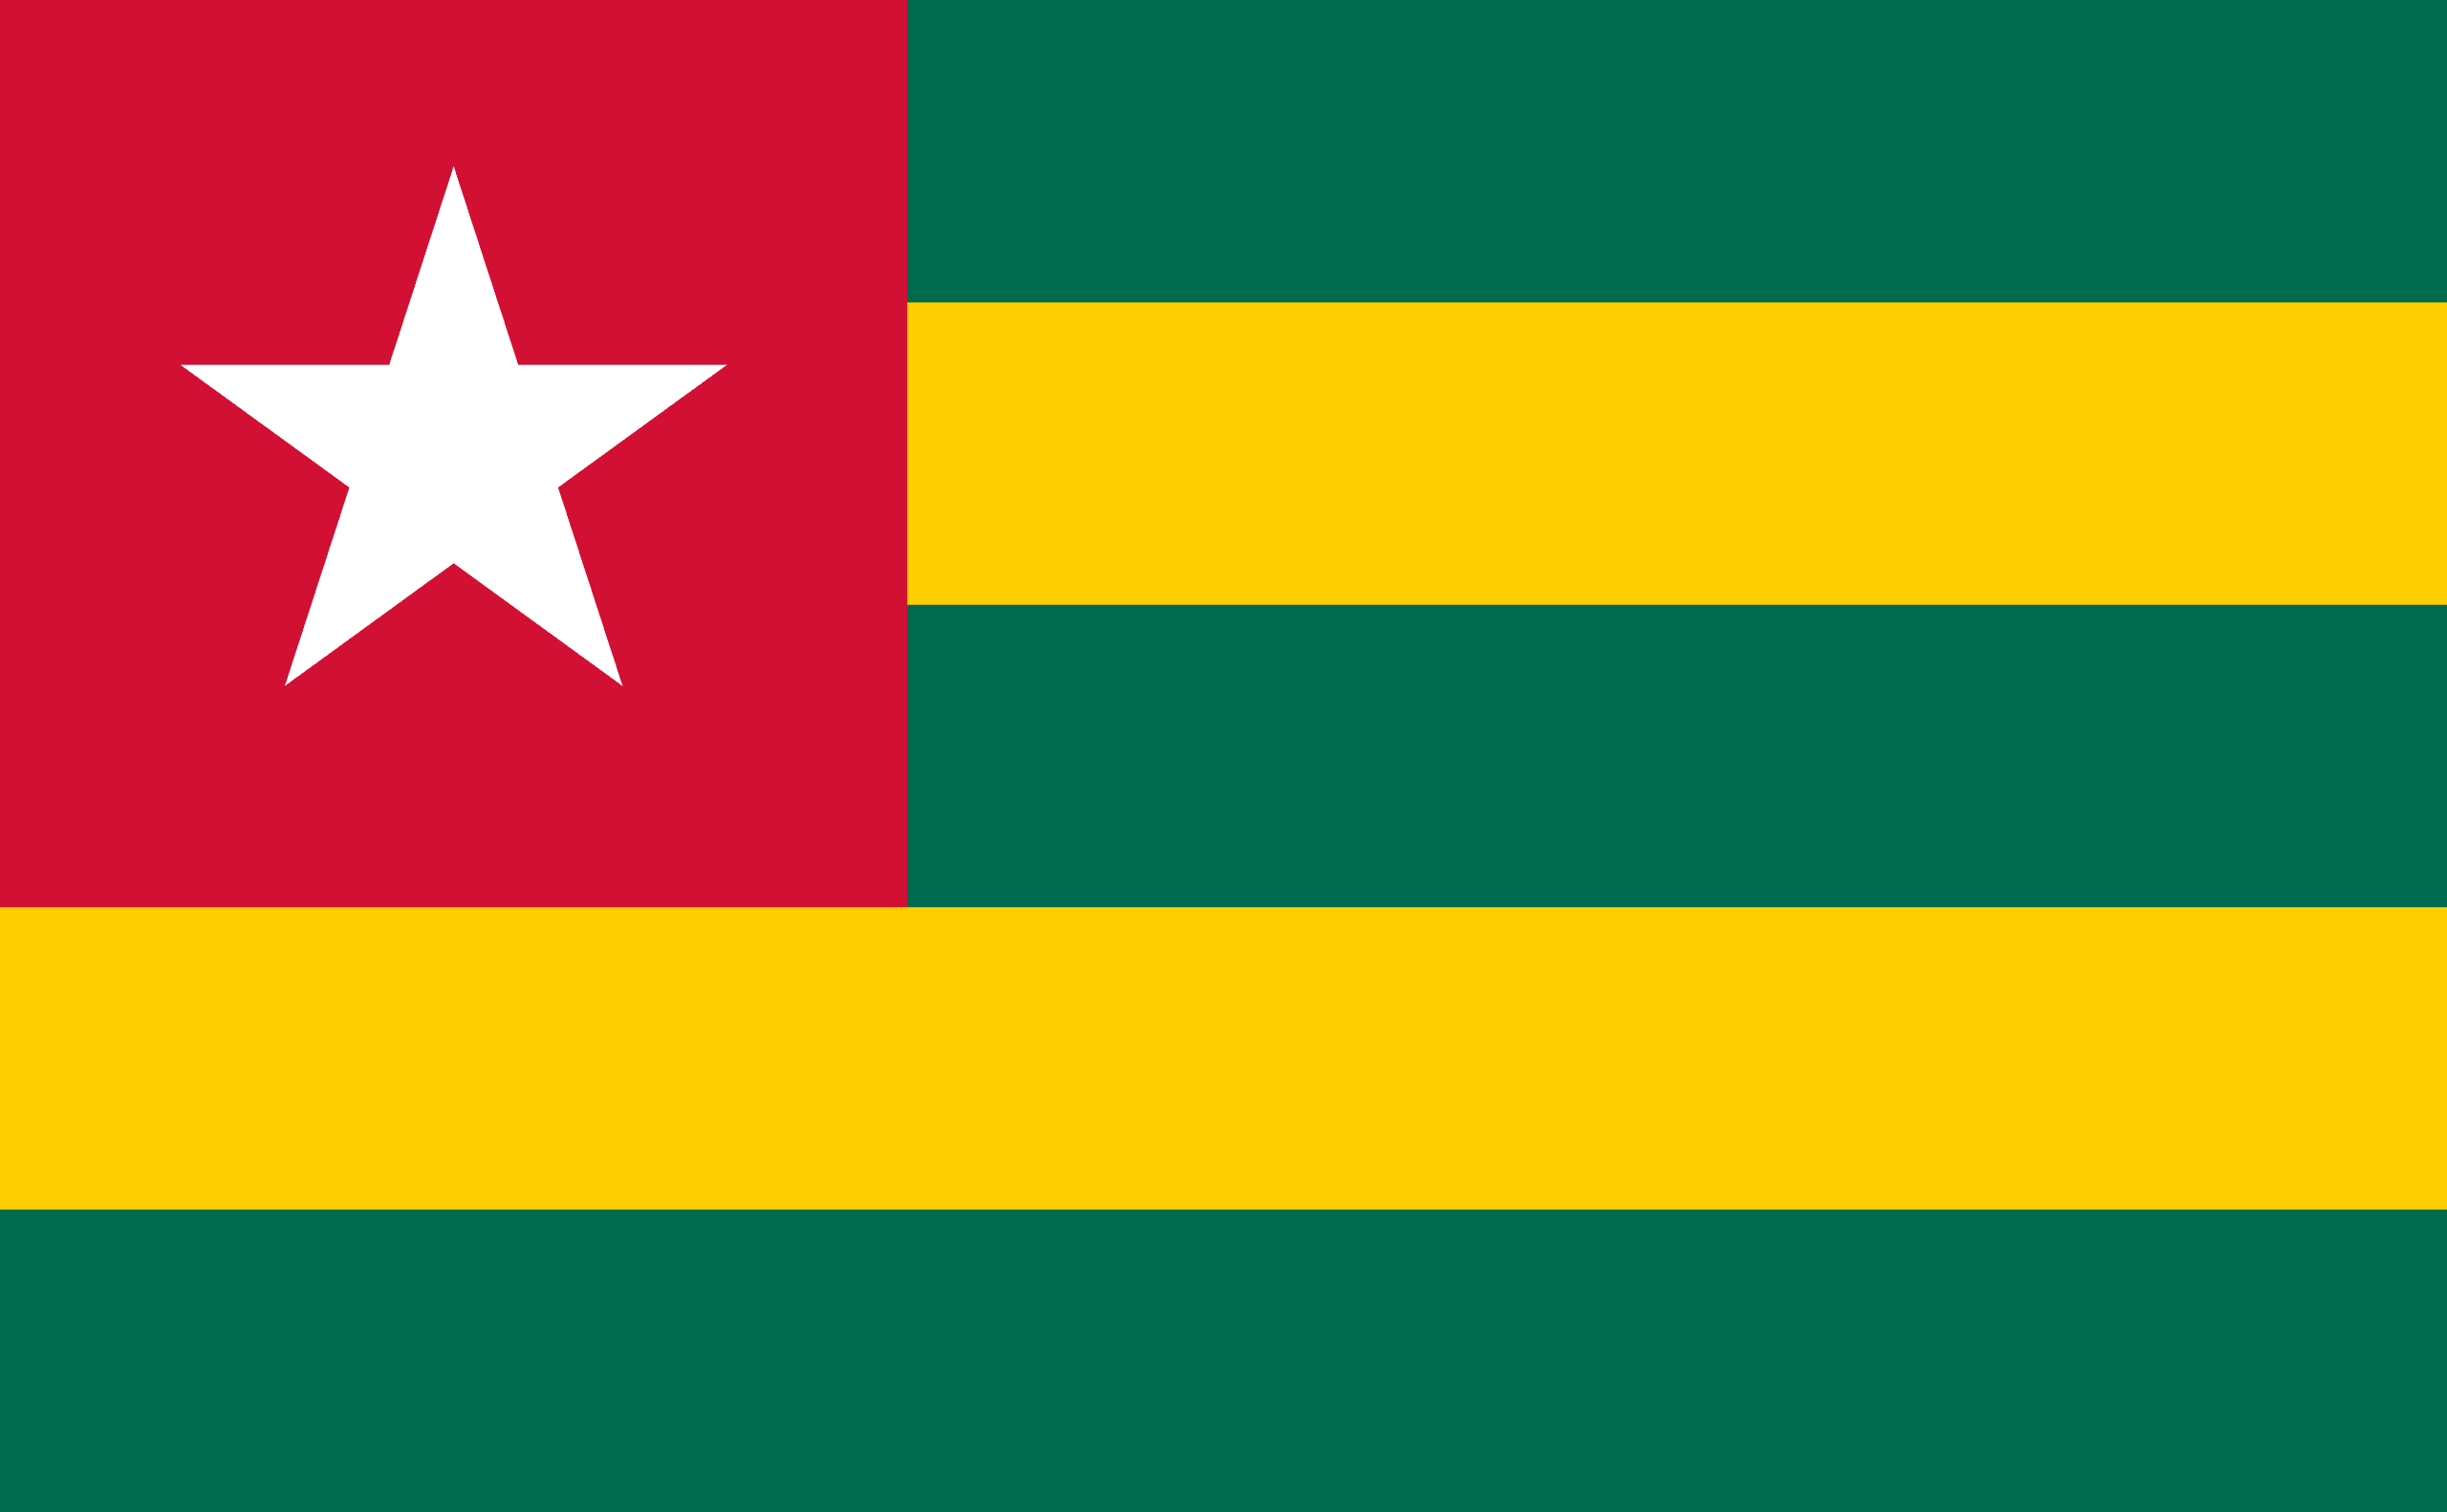

Tokelau


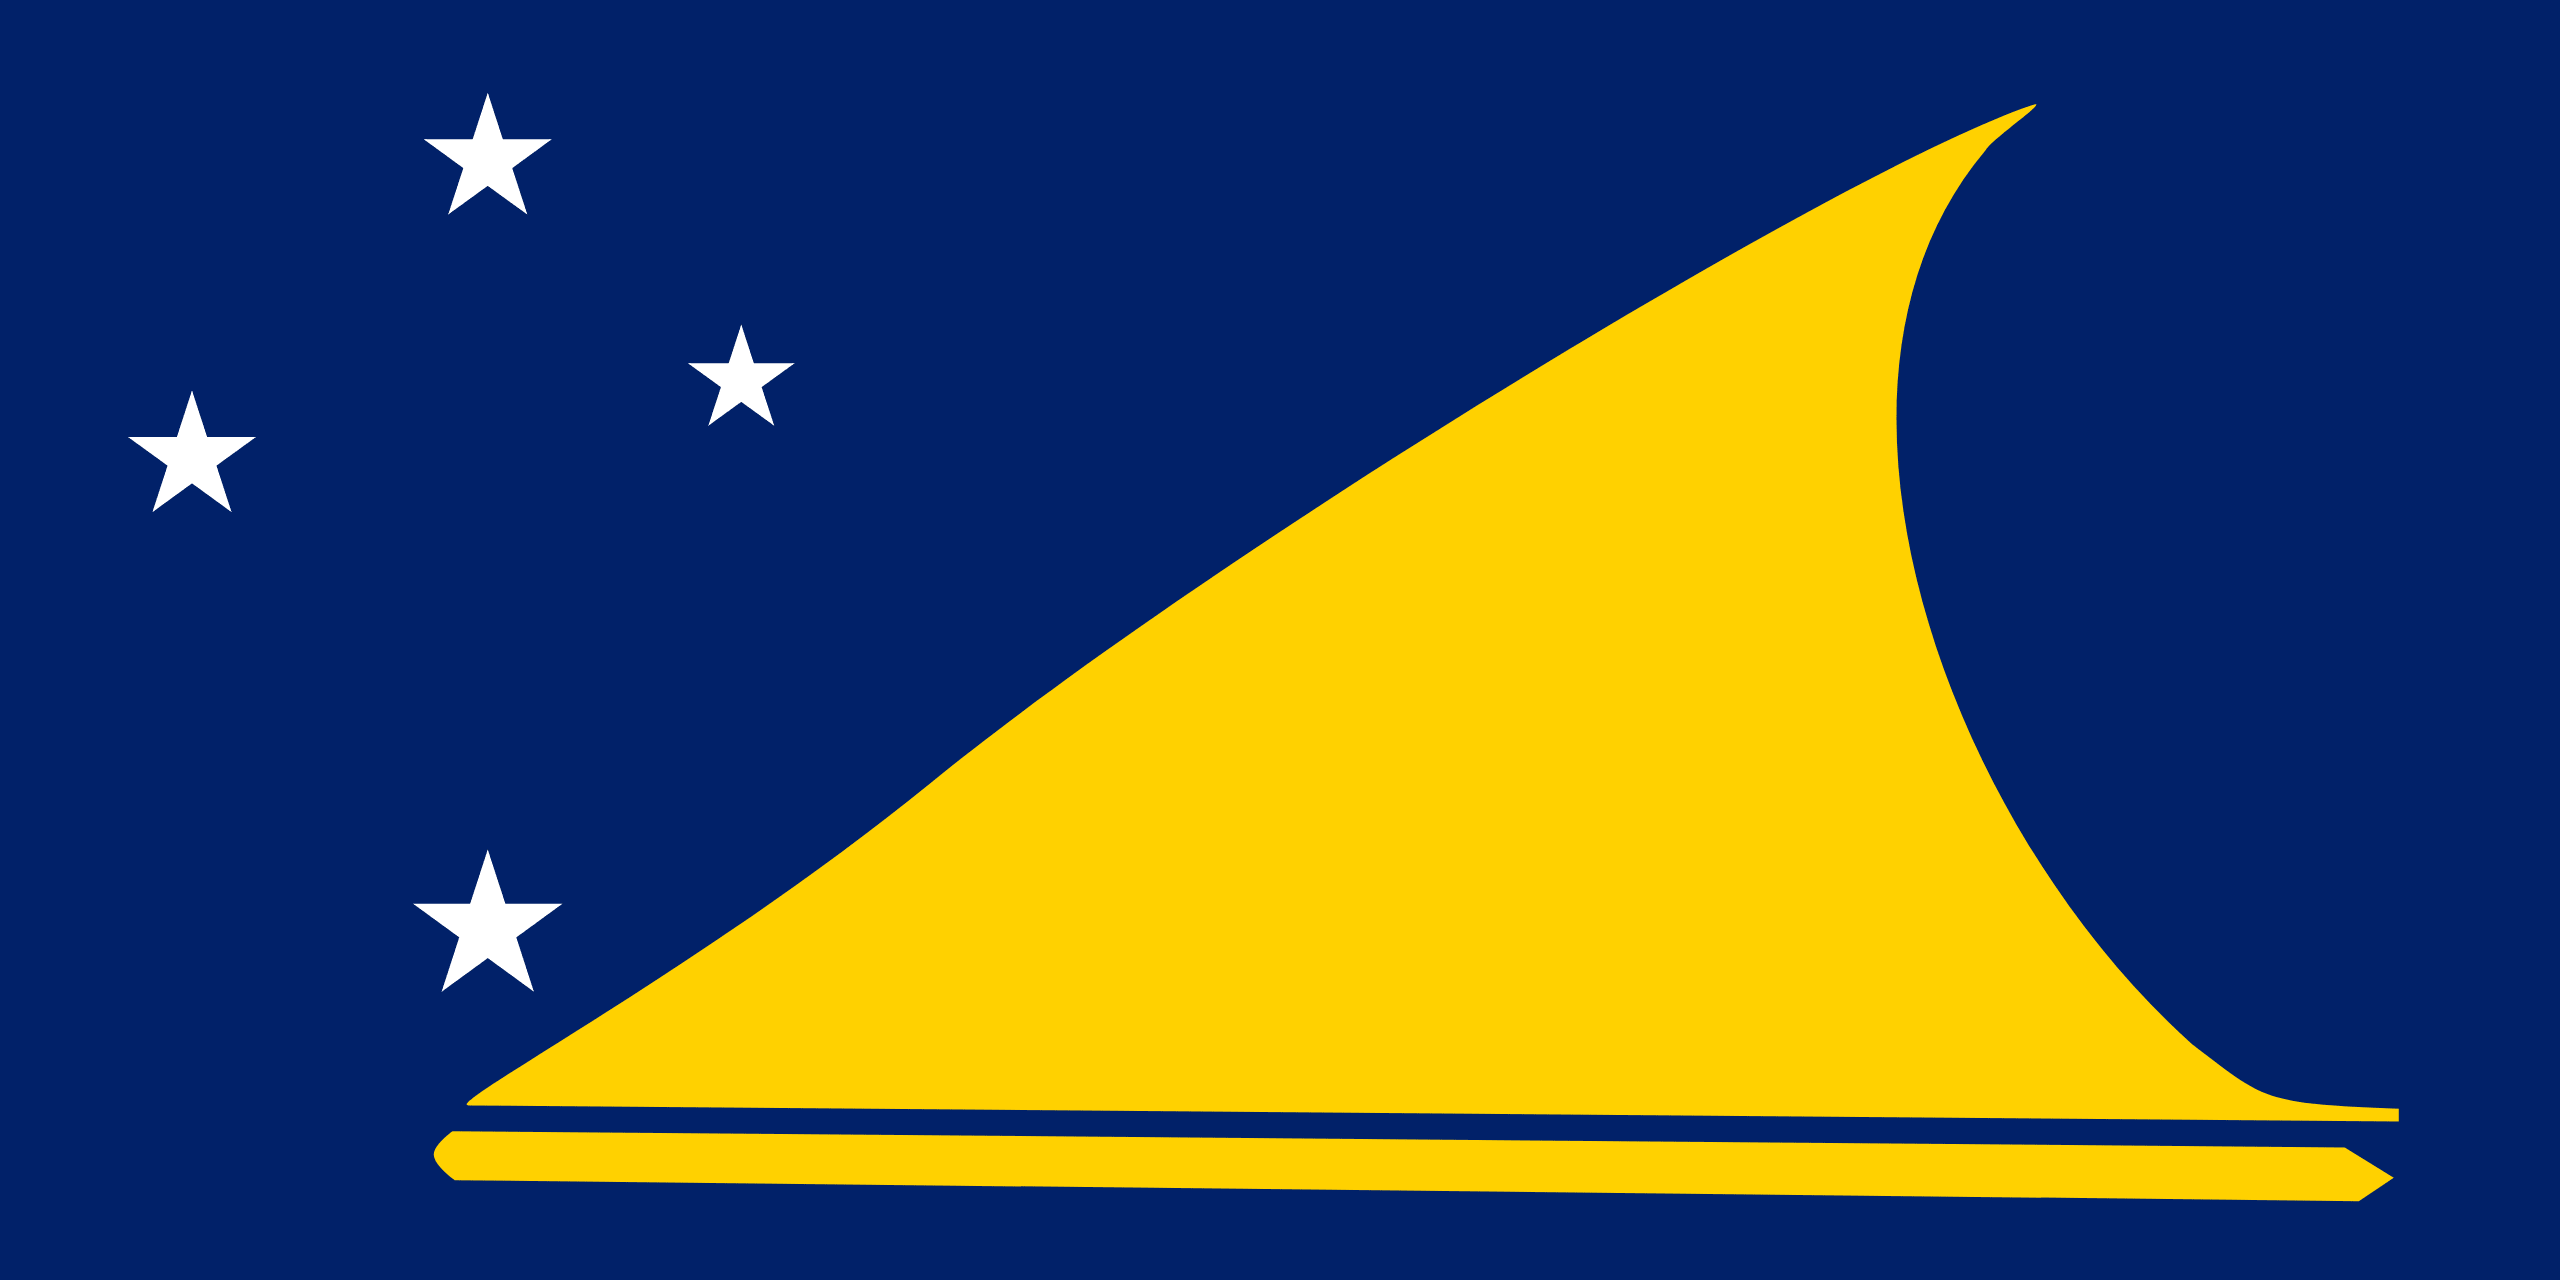

Tonga


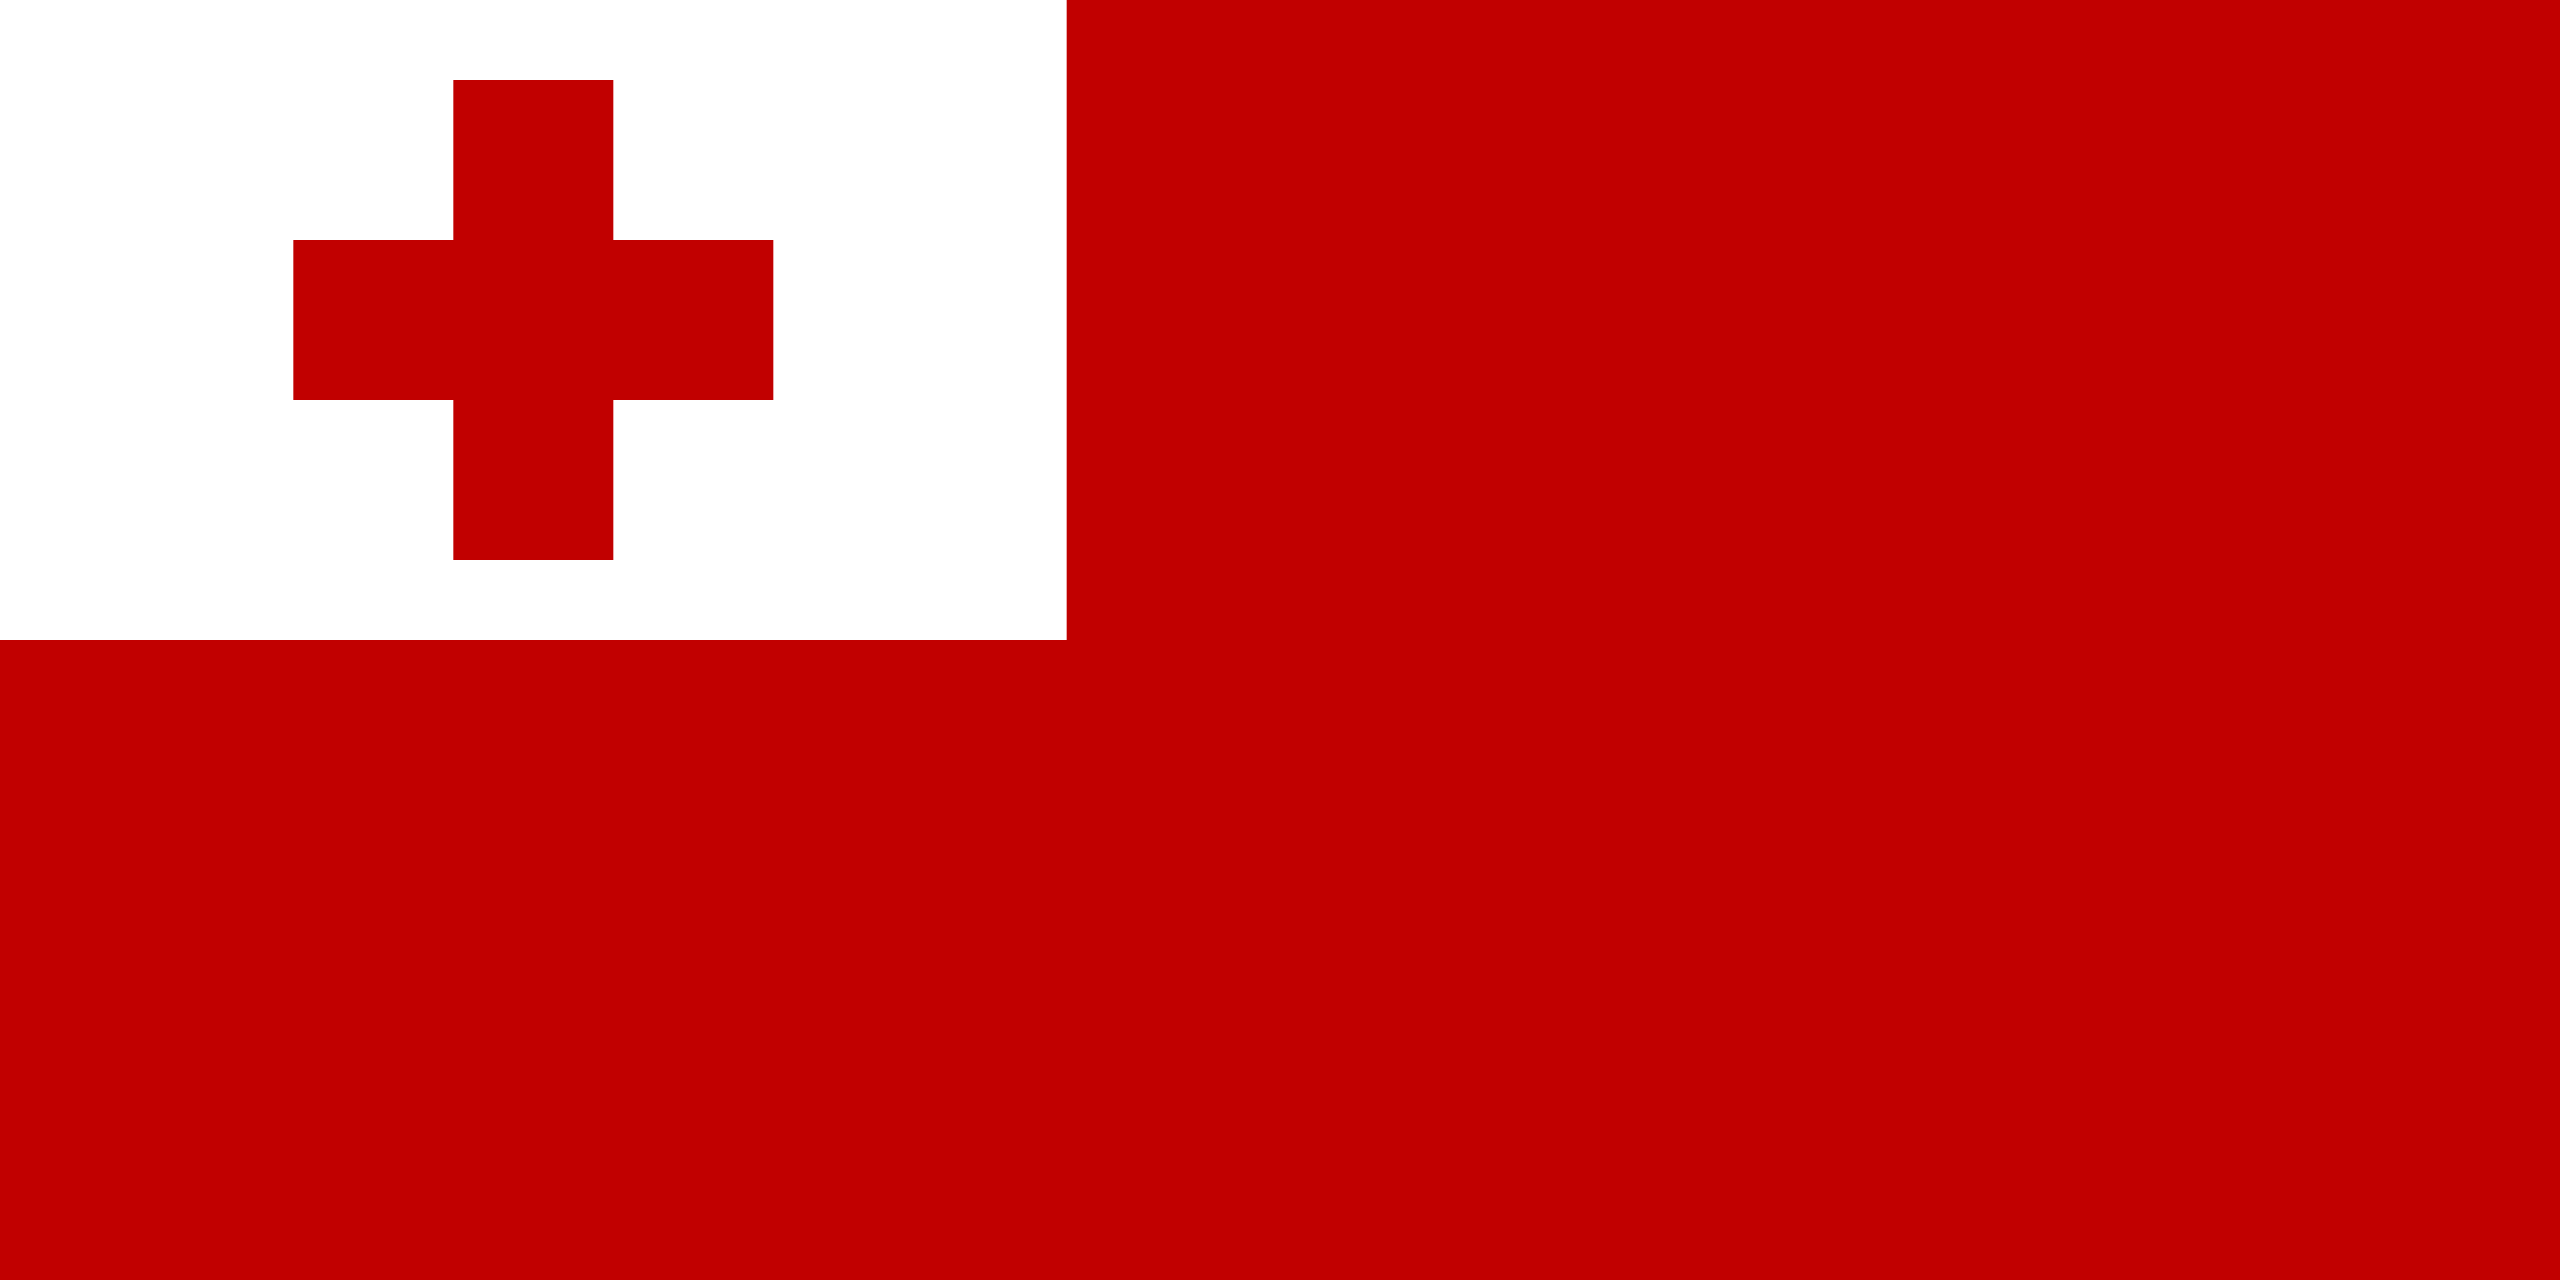

Trinidad and Tobago


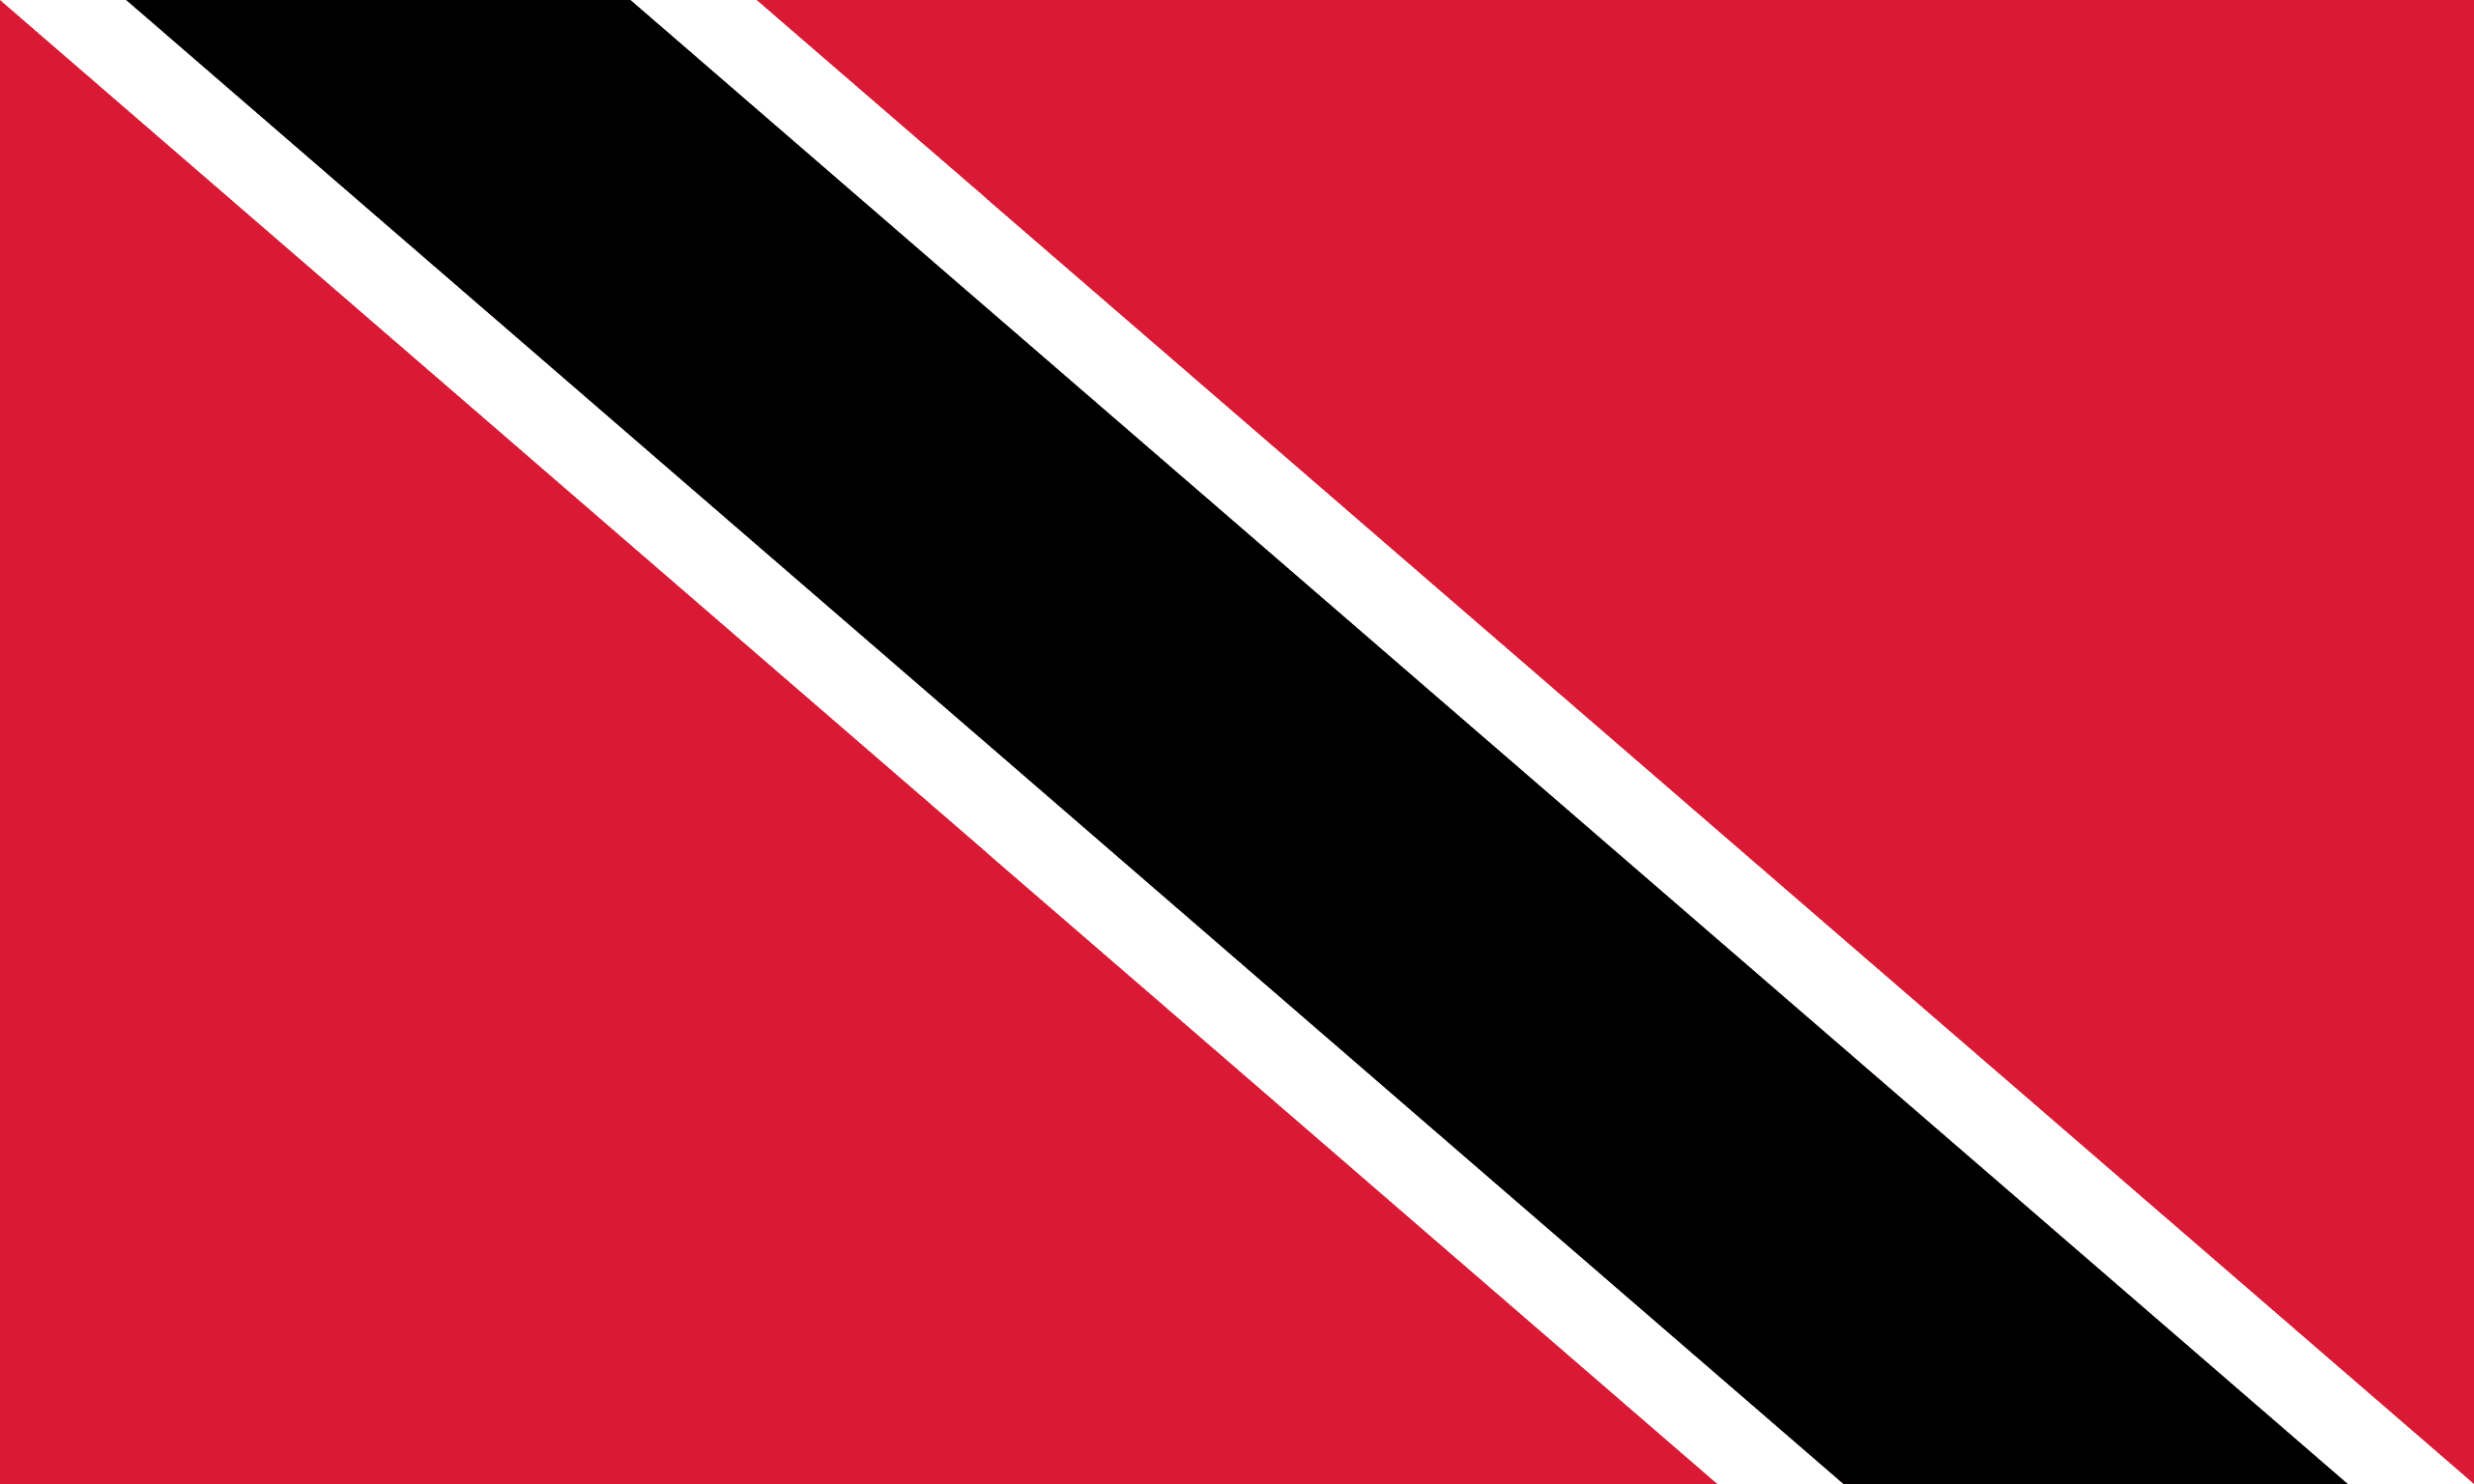

Tunisia


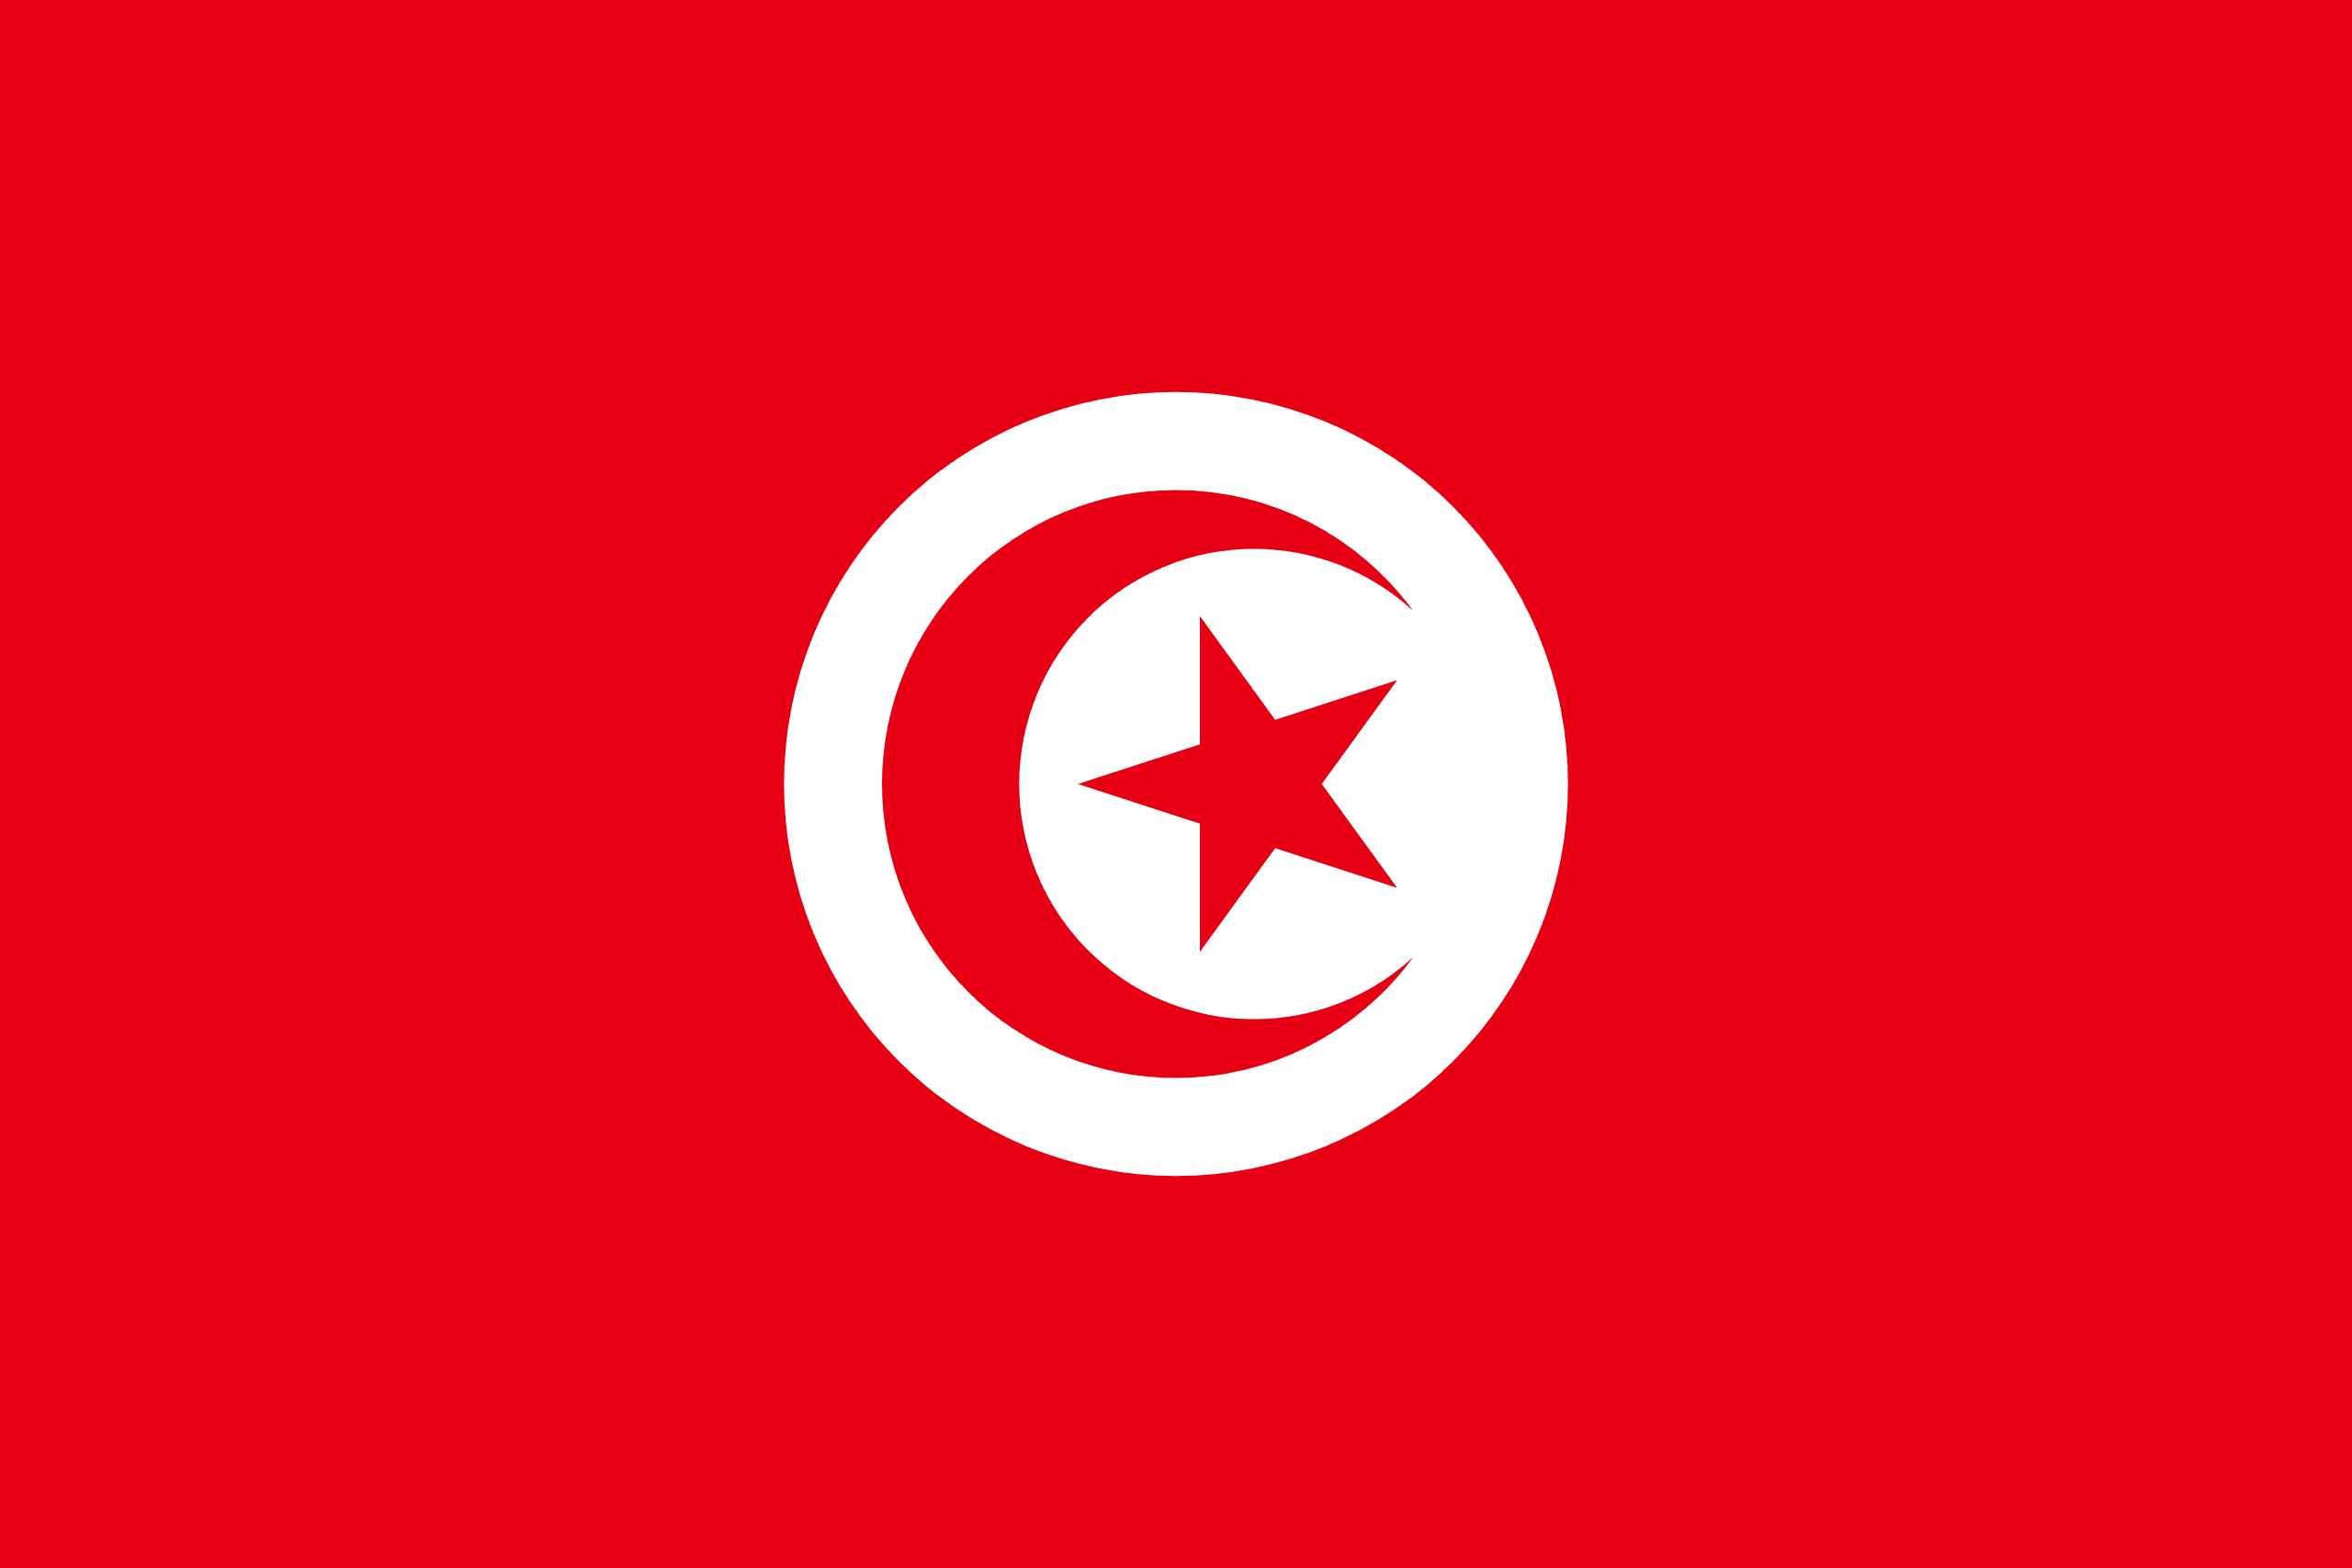

Turkey


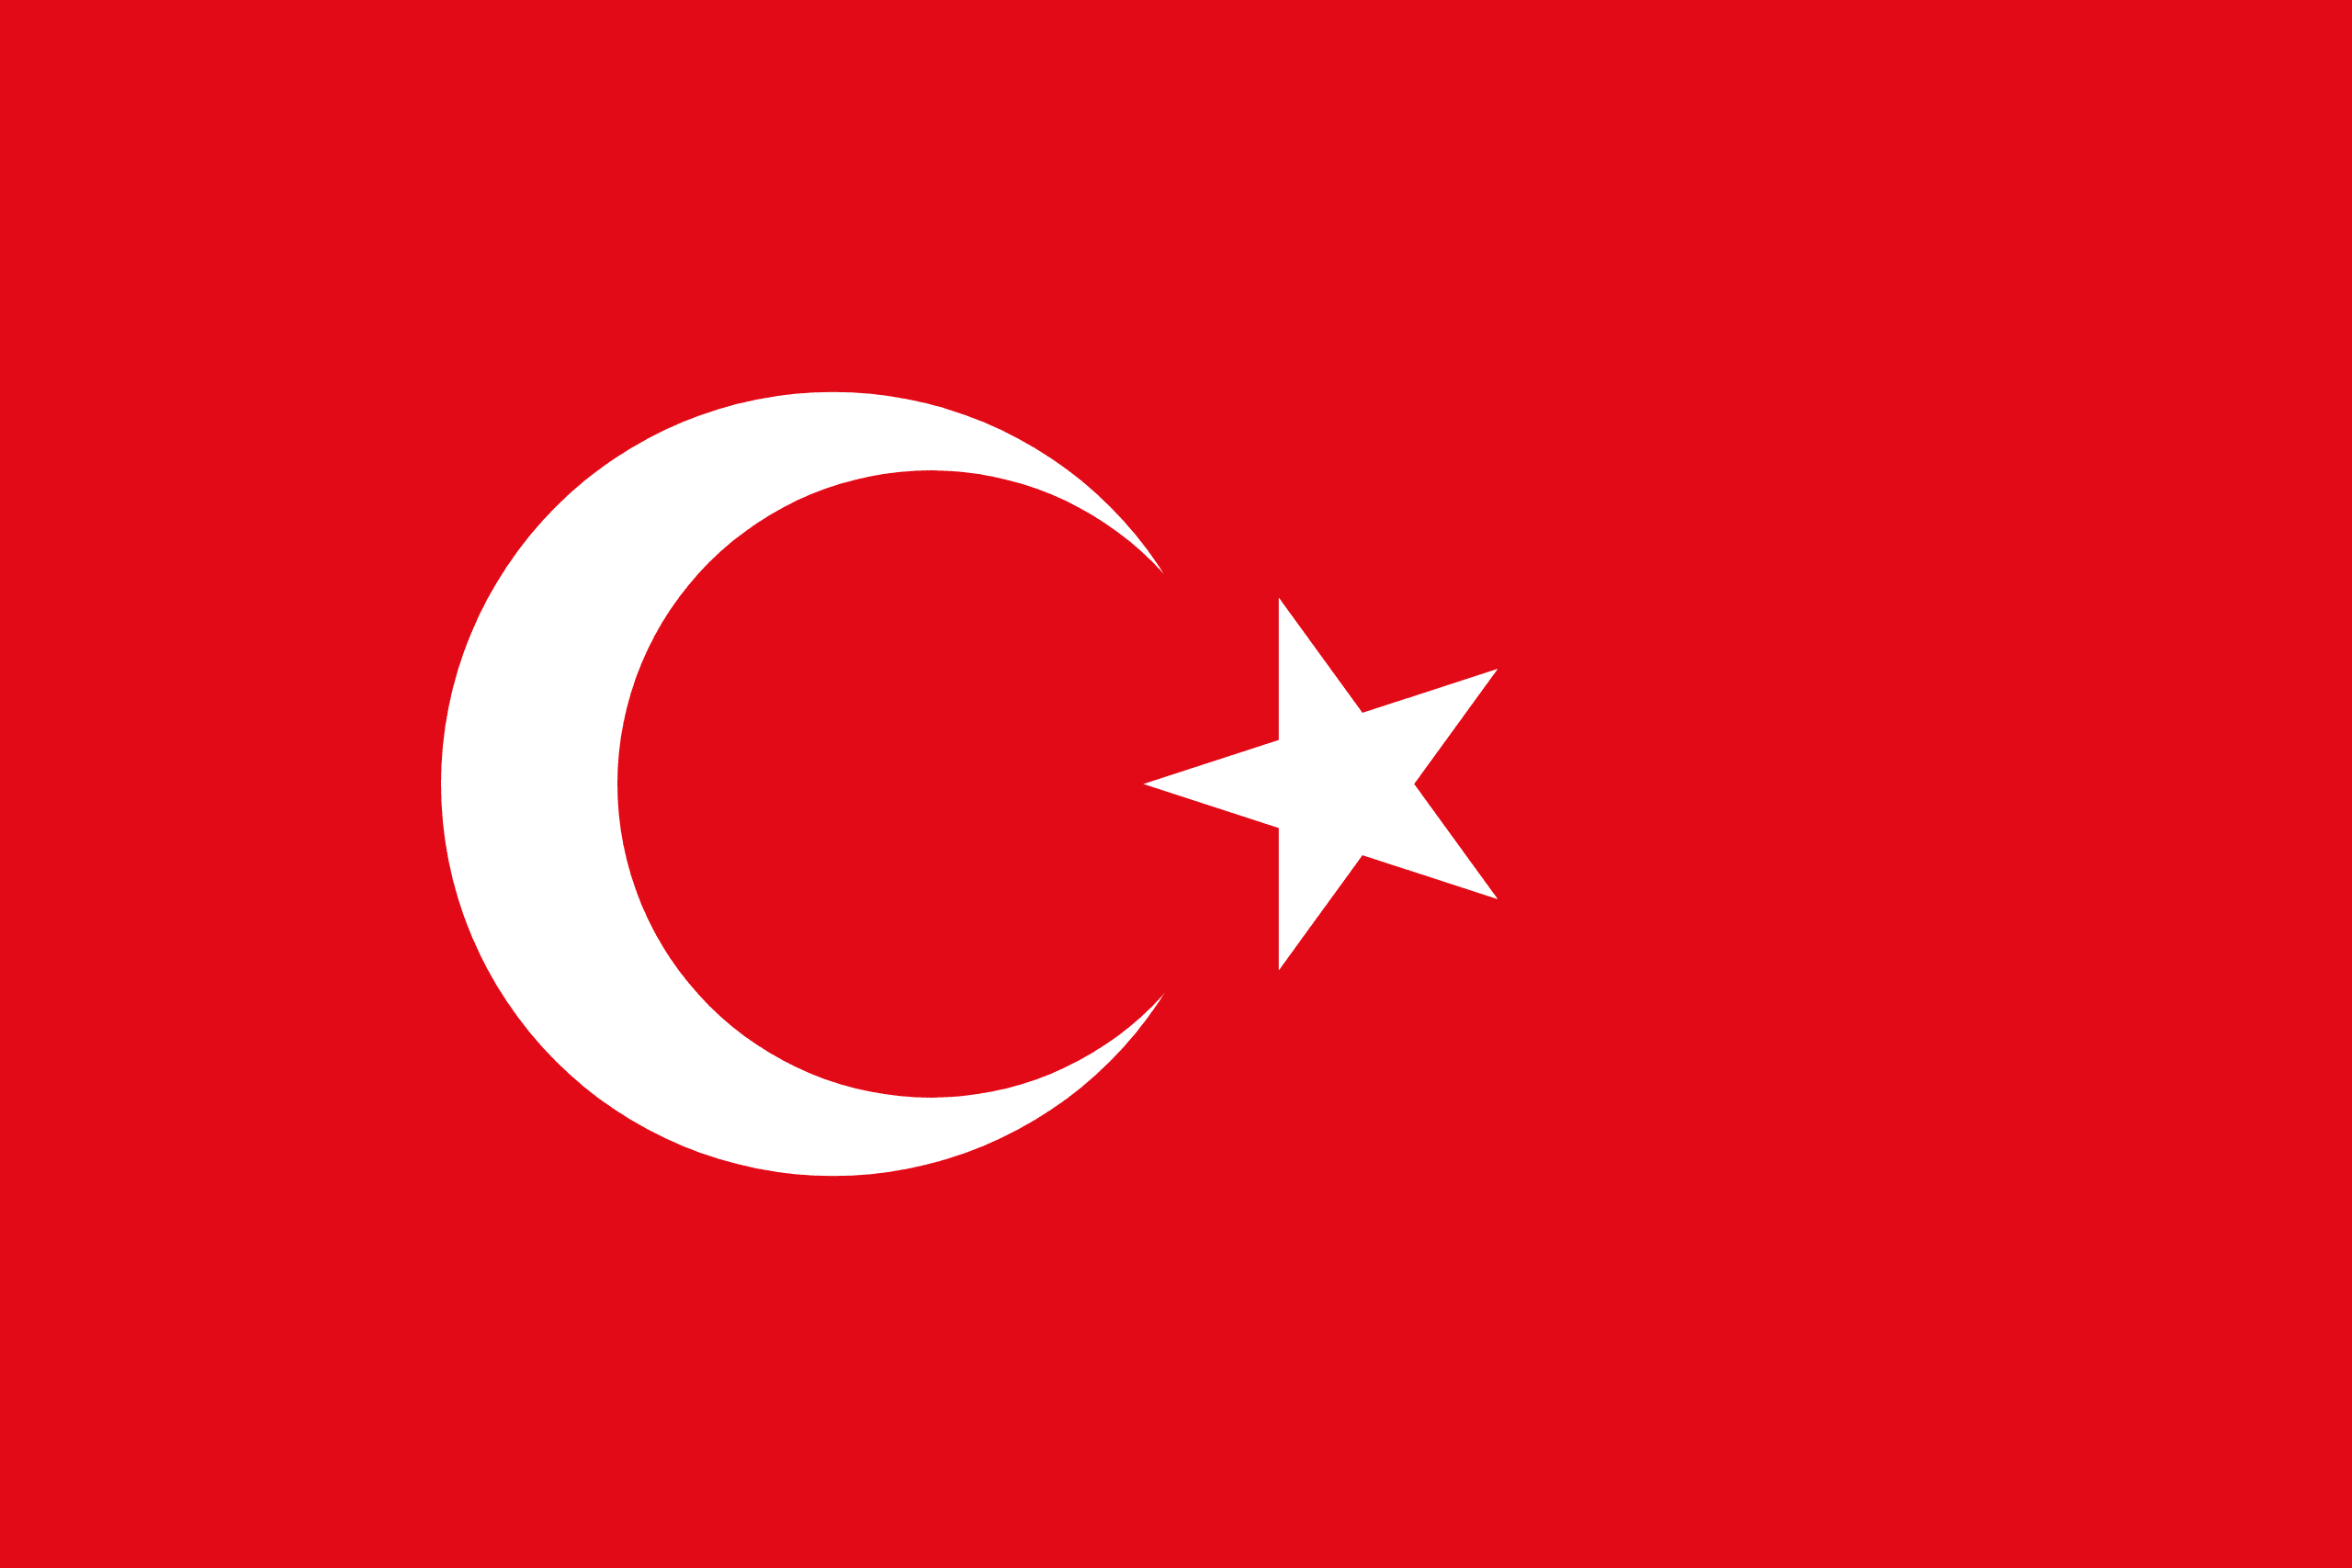

Turkmenistan


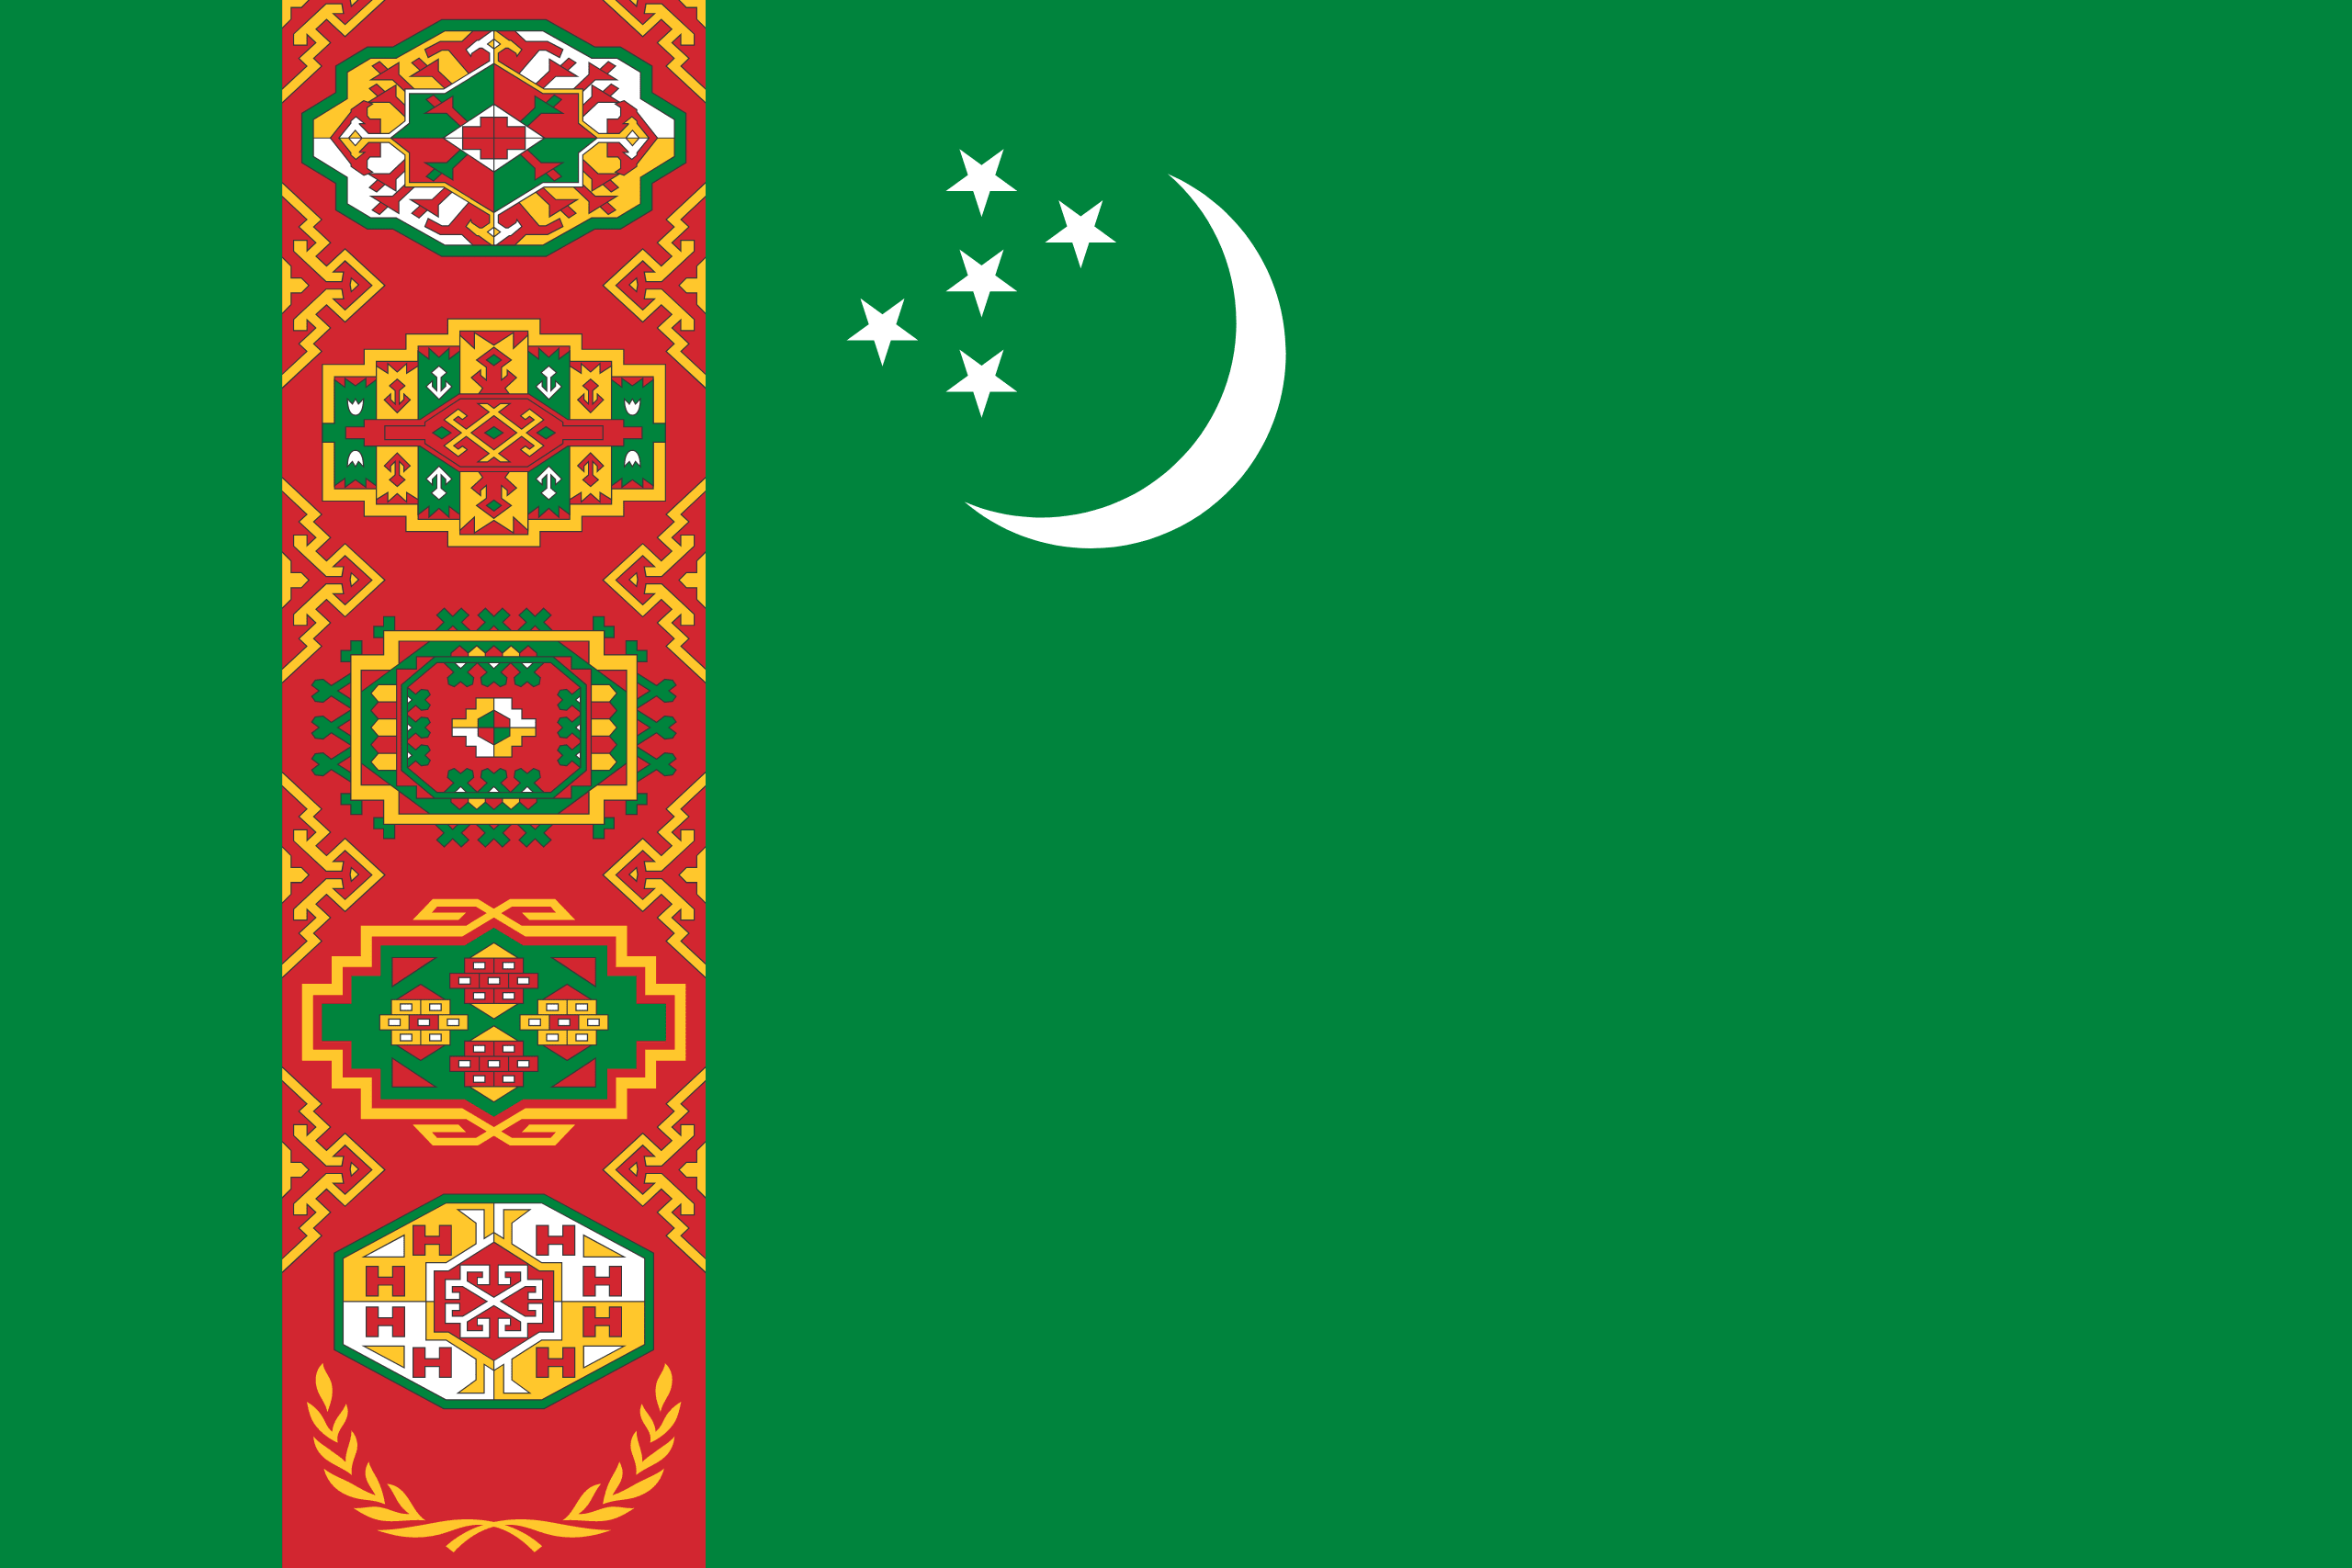

Turks and Caicos Islands


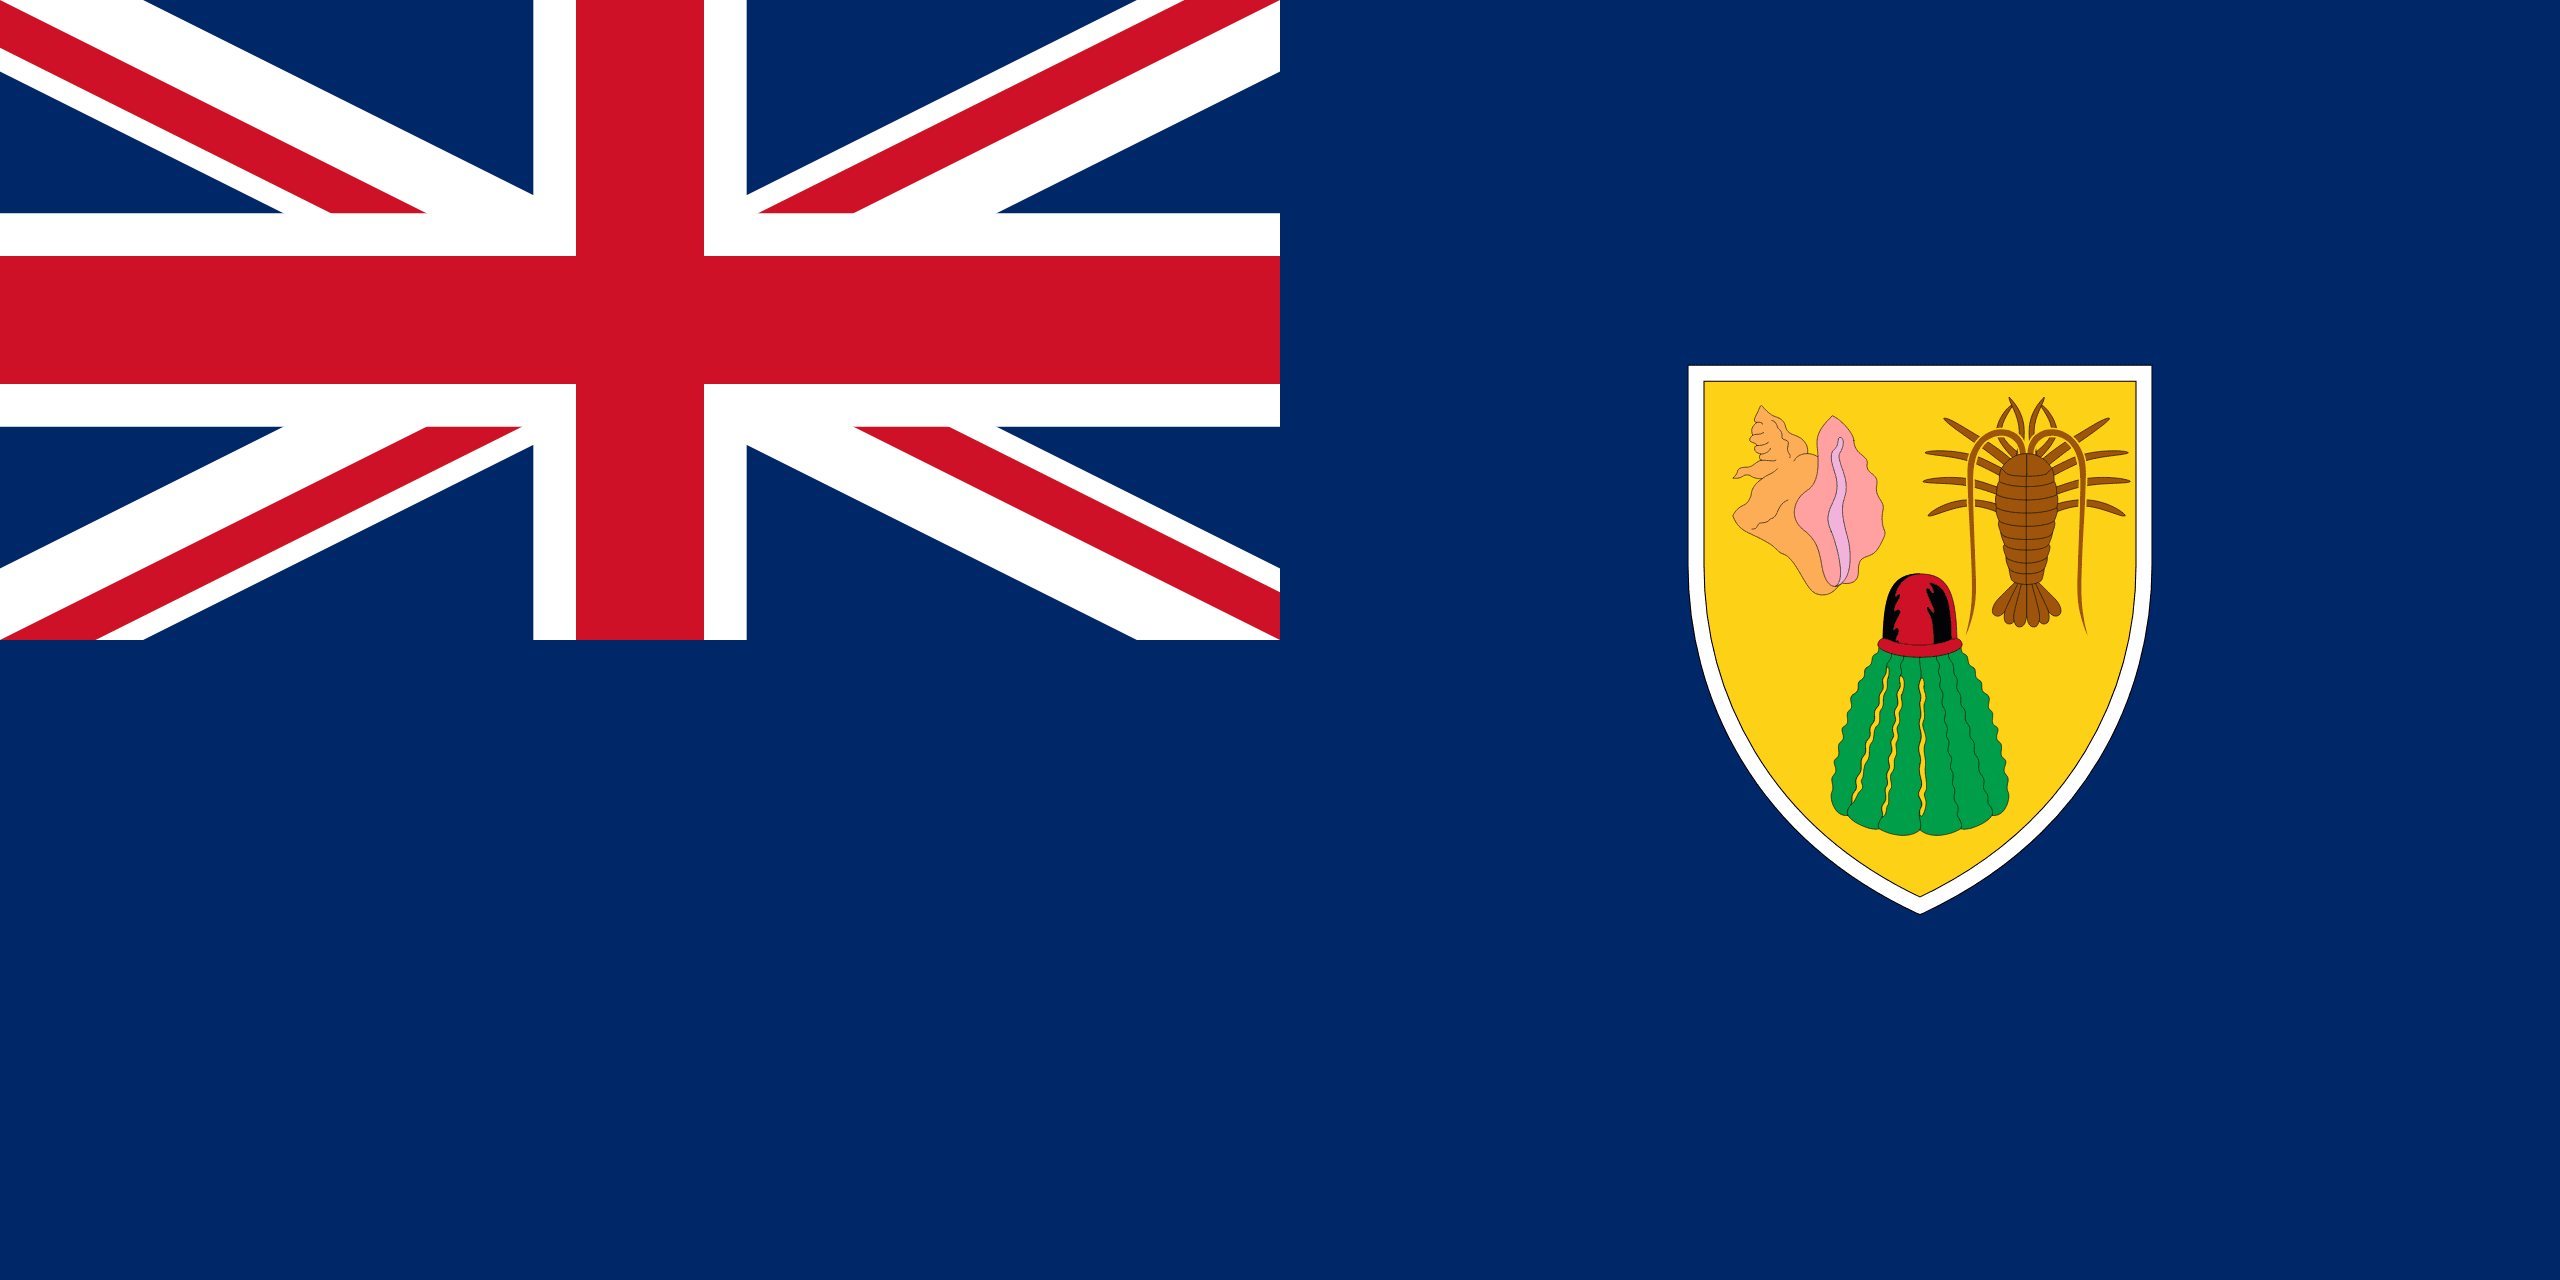

Tuvalu


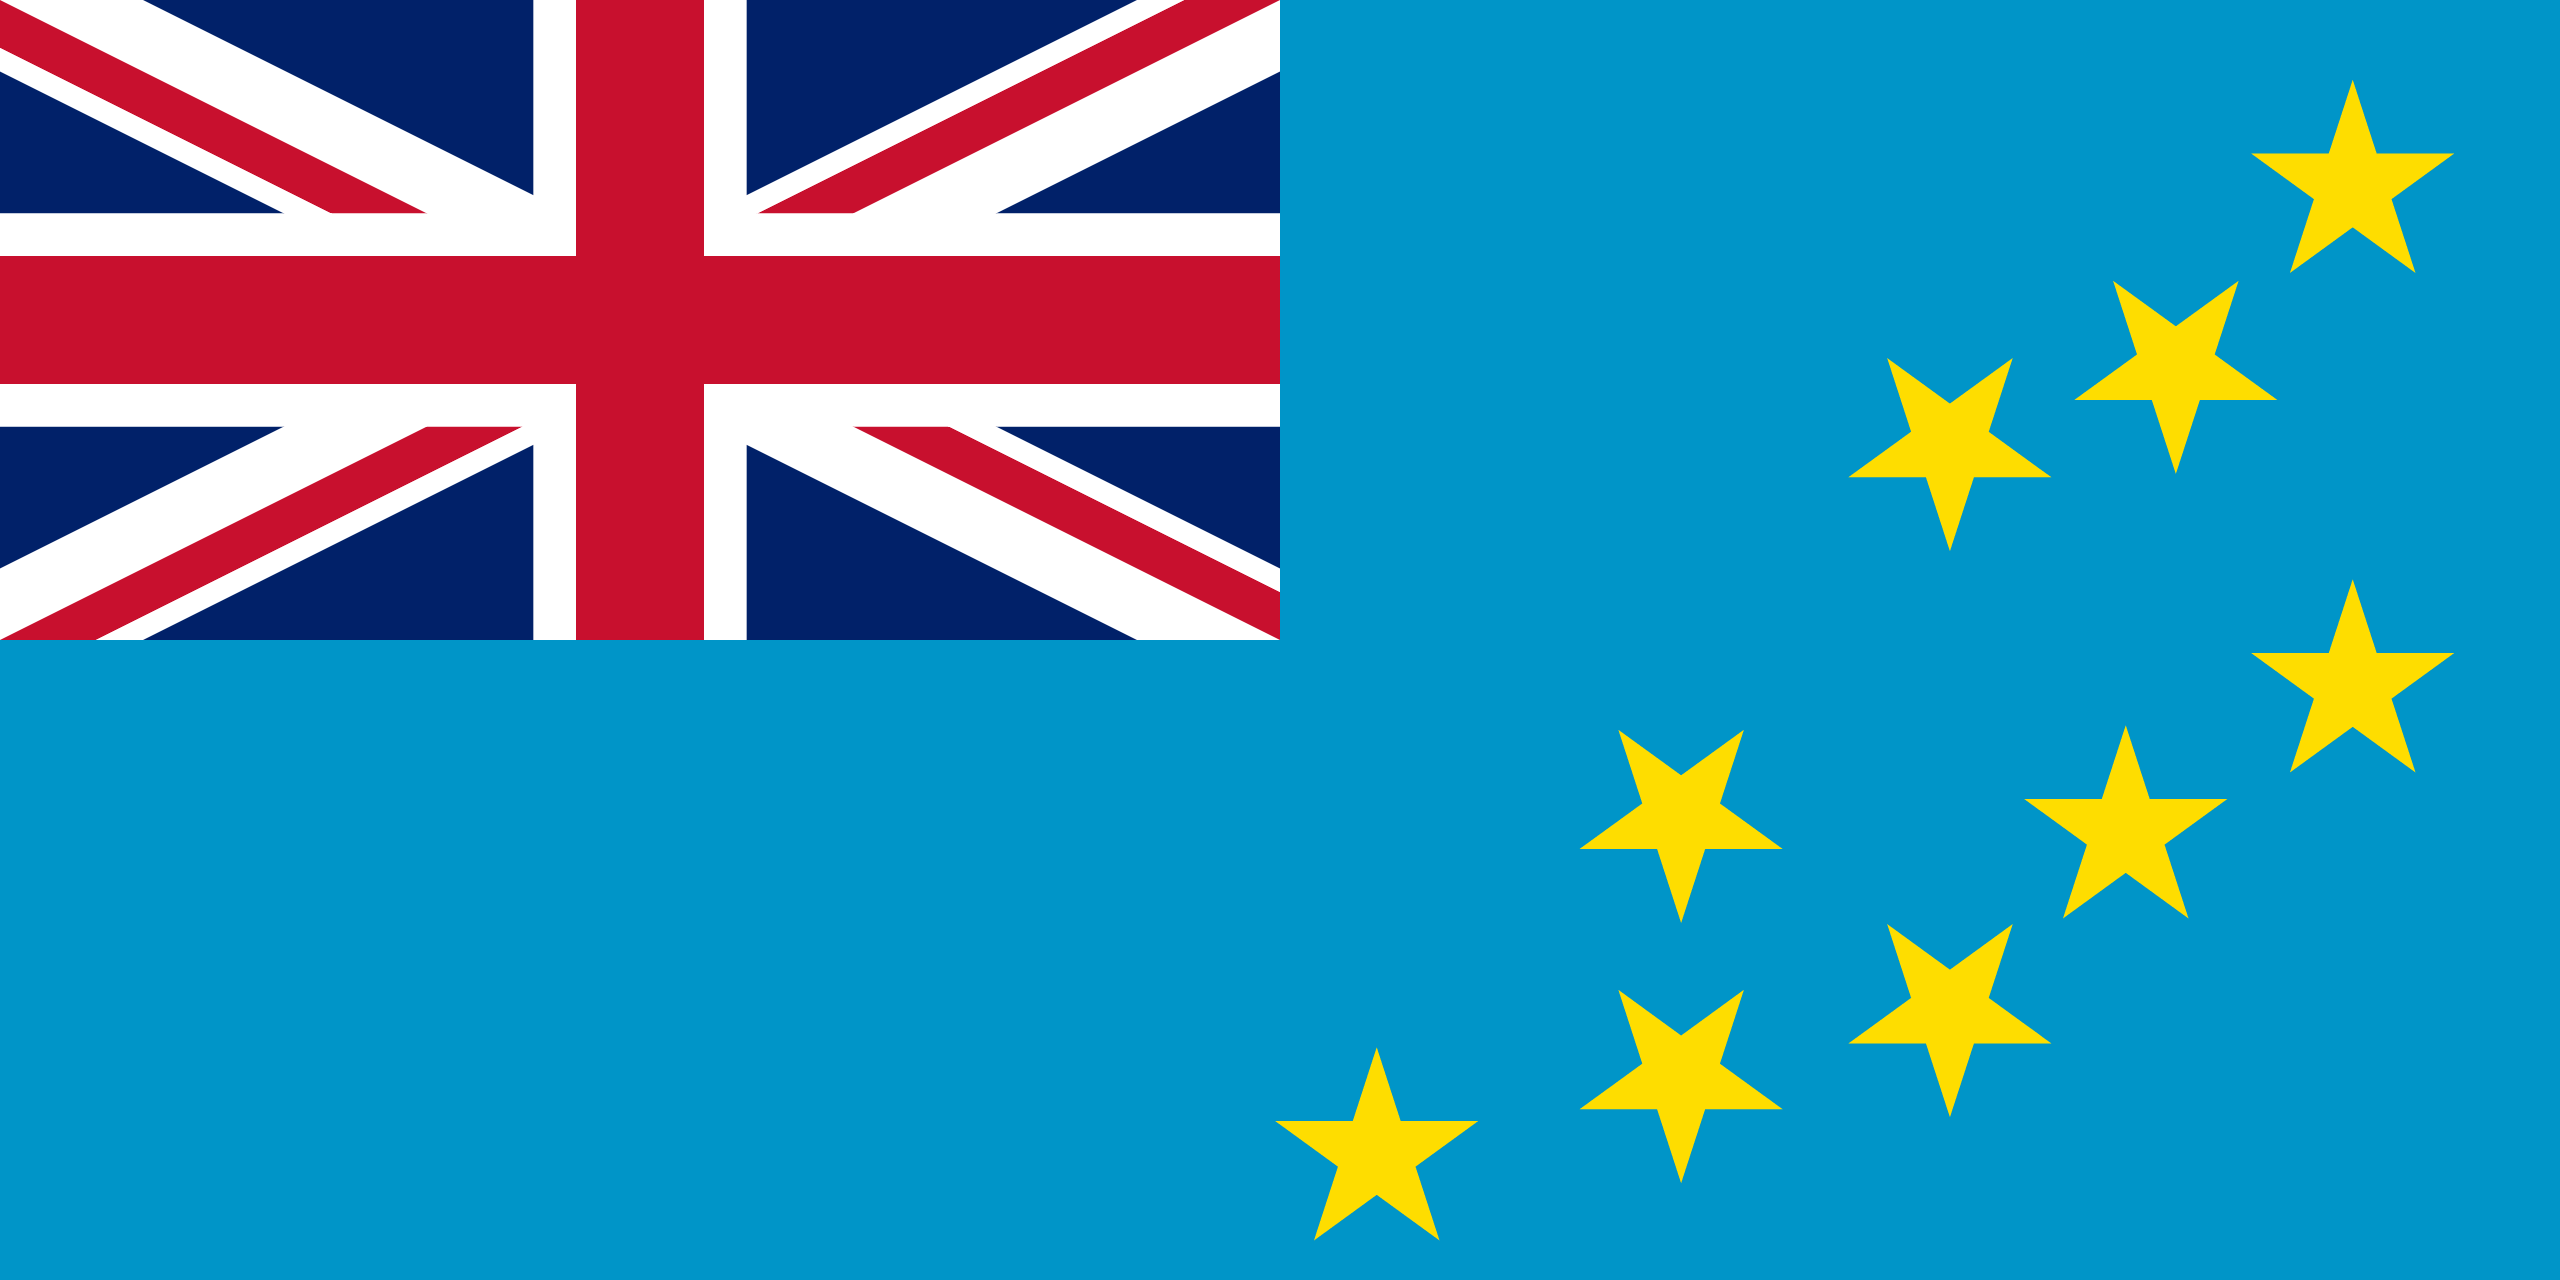

Uganda


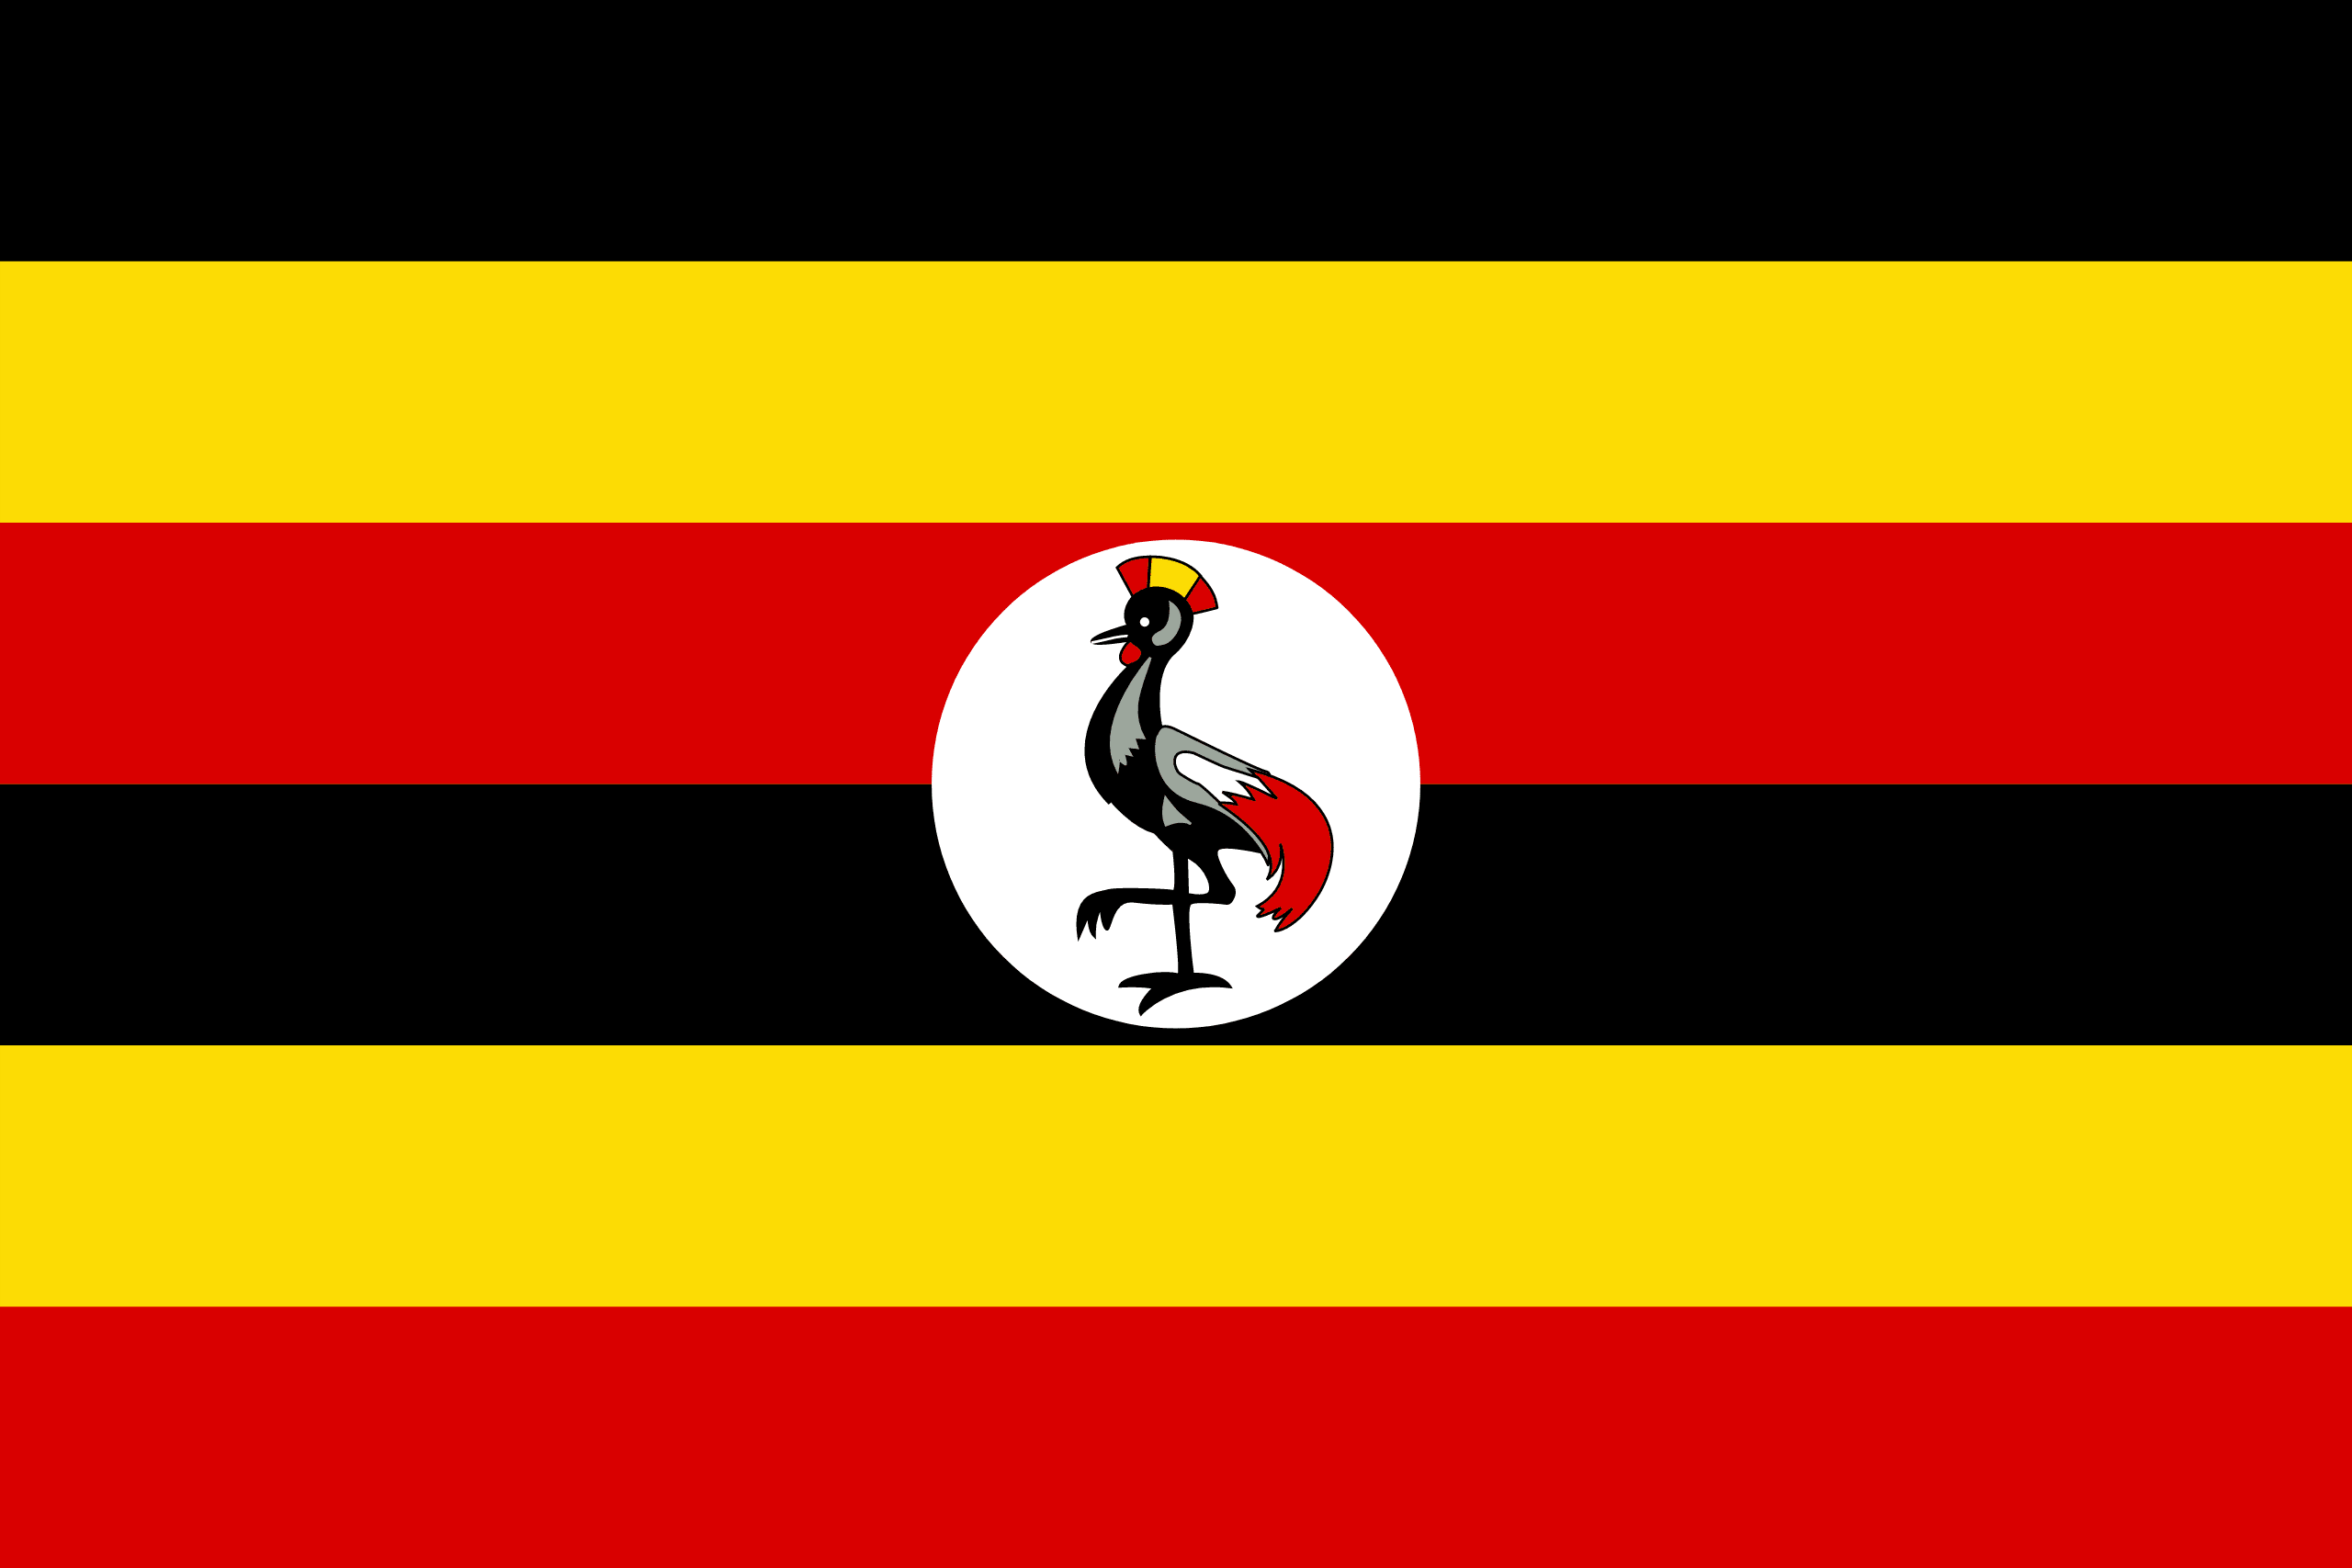

Ukraine


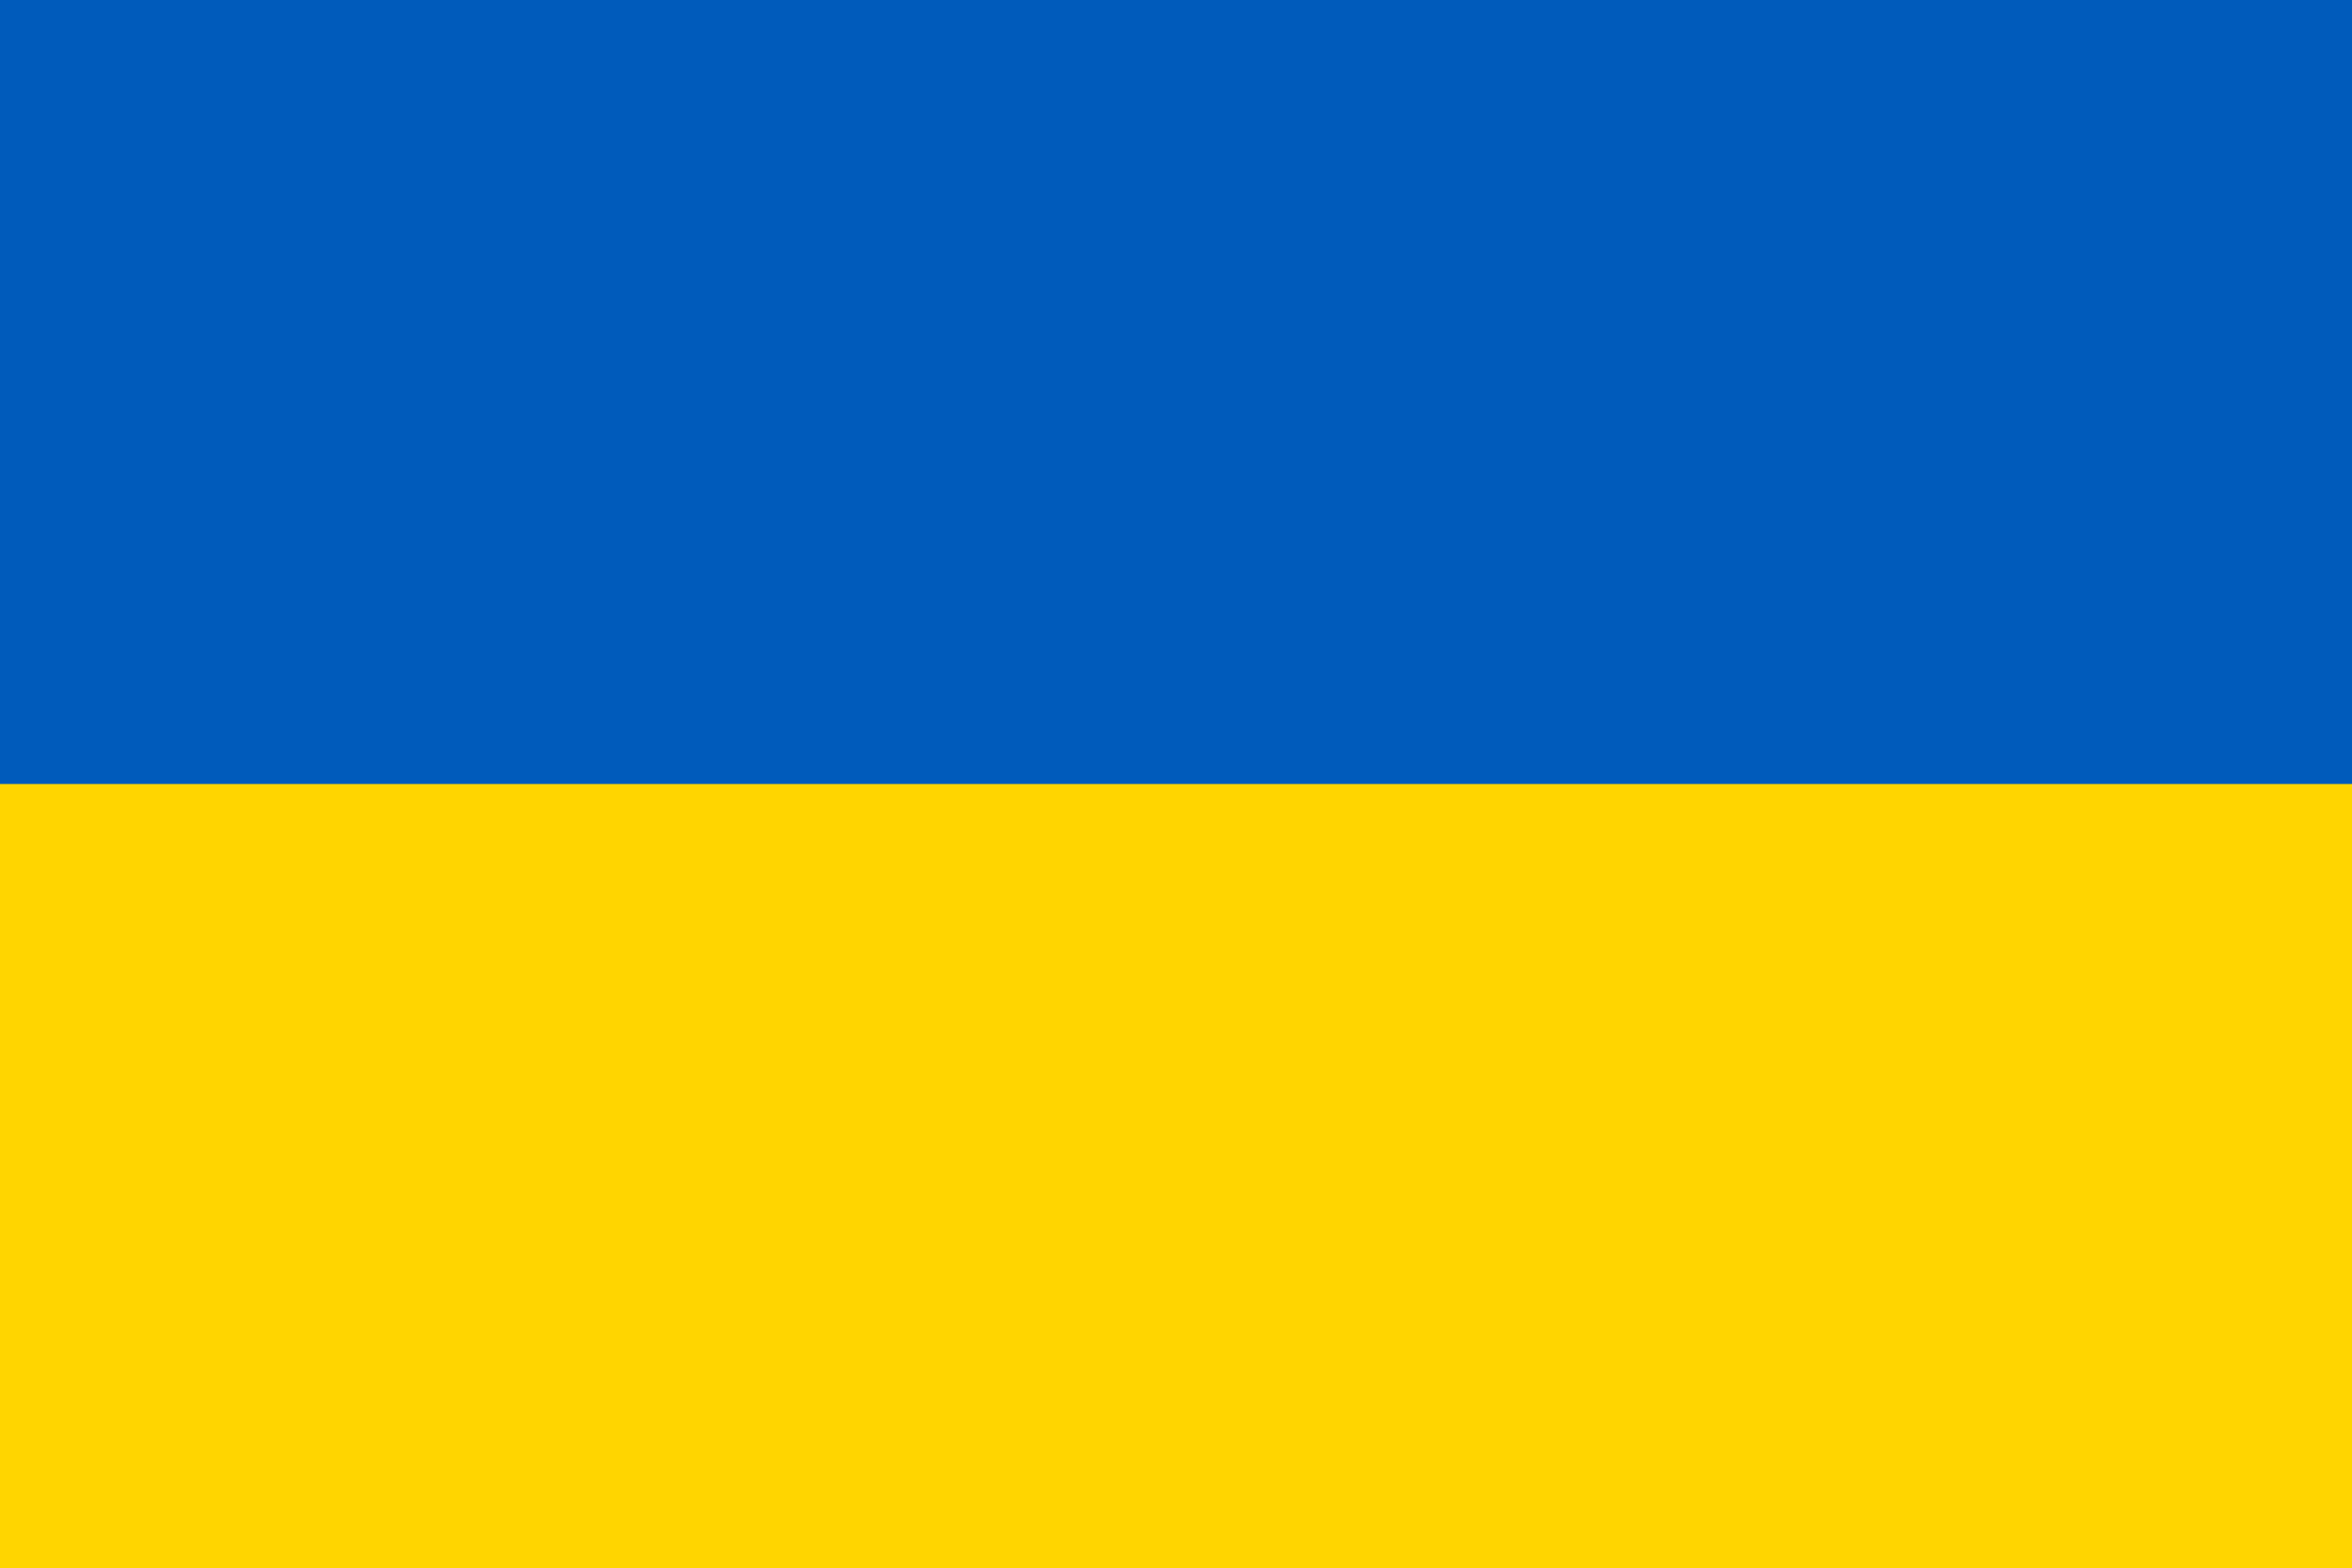

United Arab Emirates


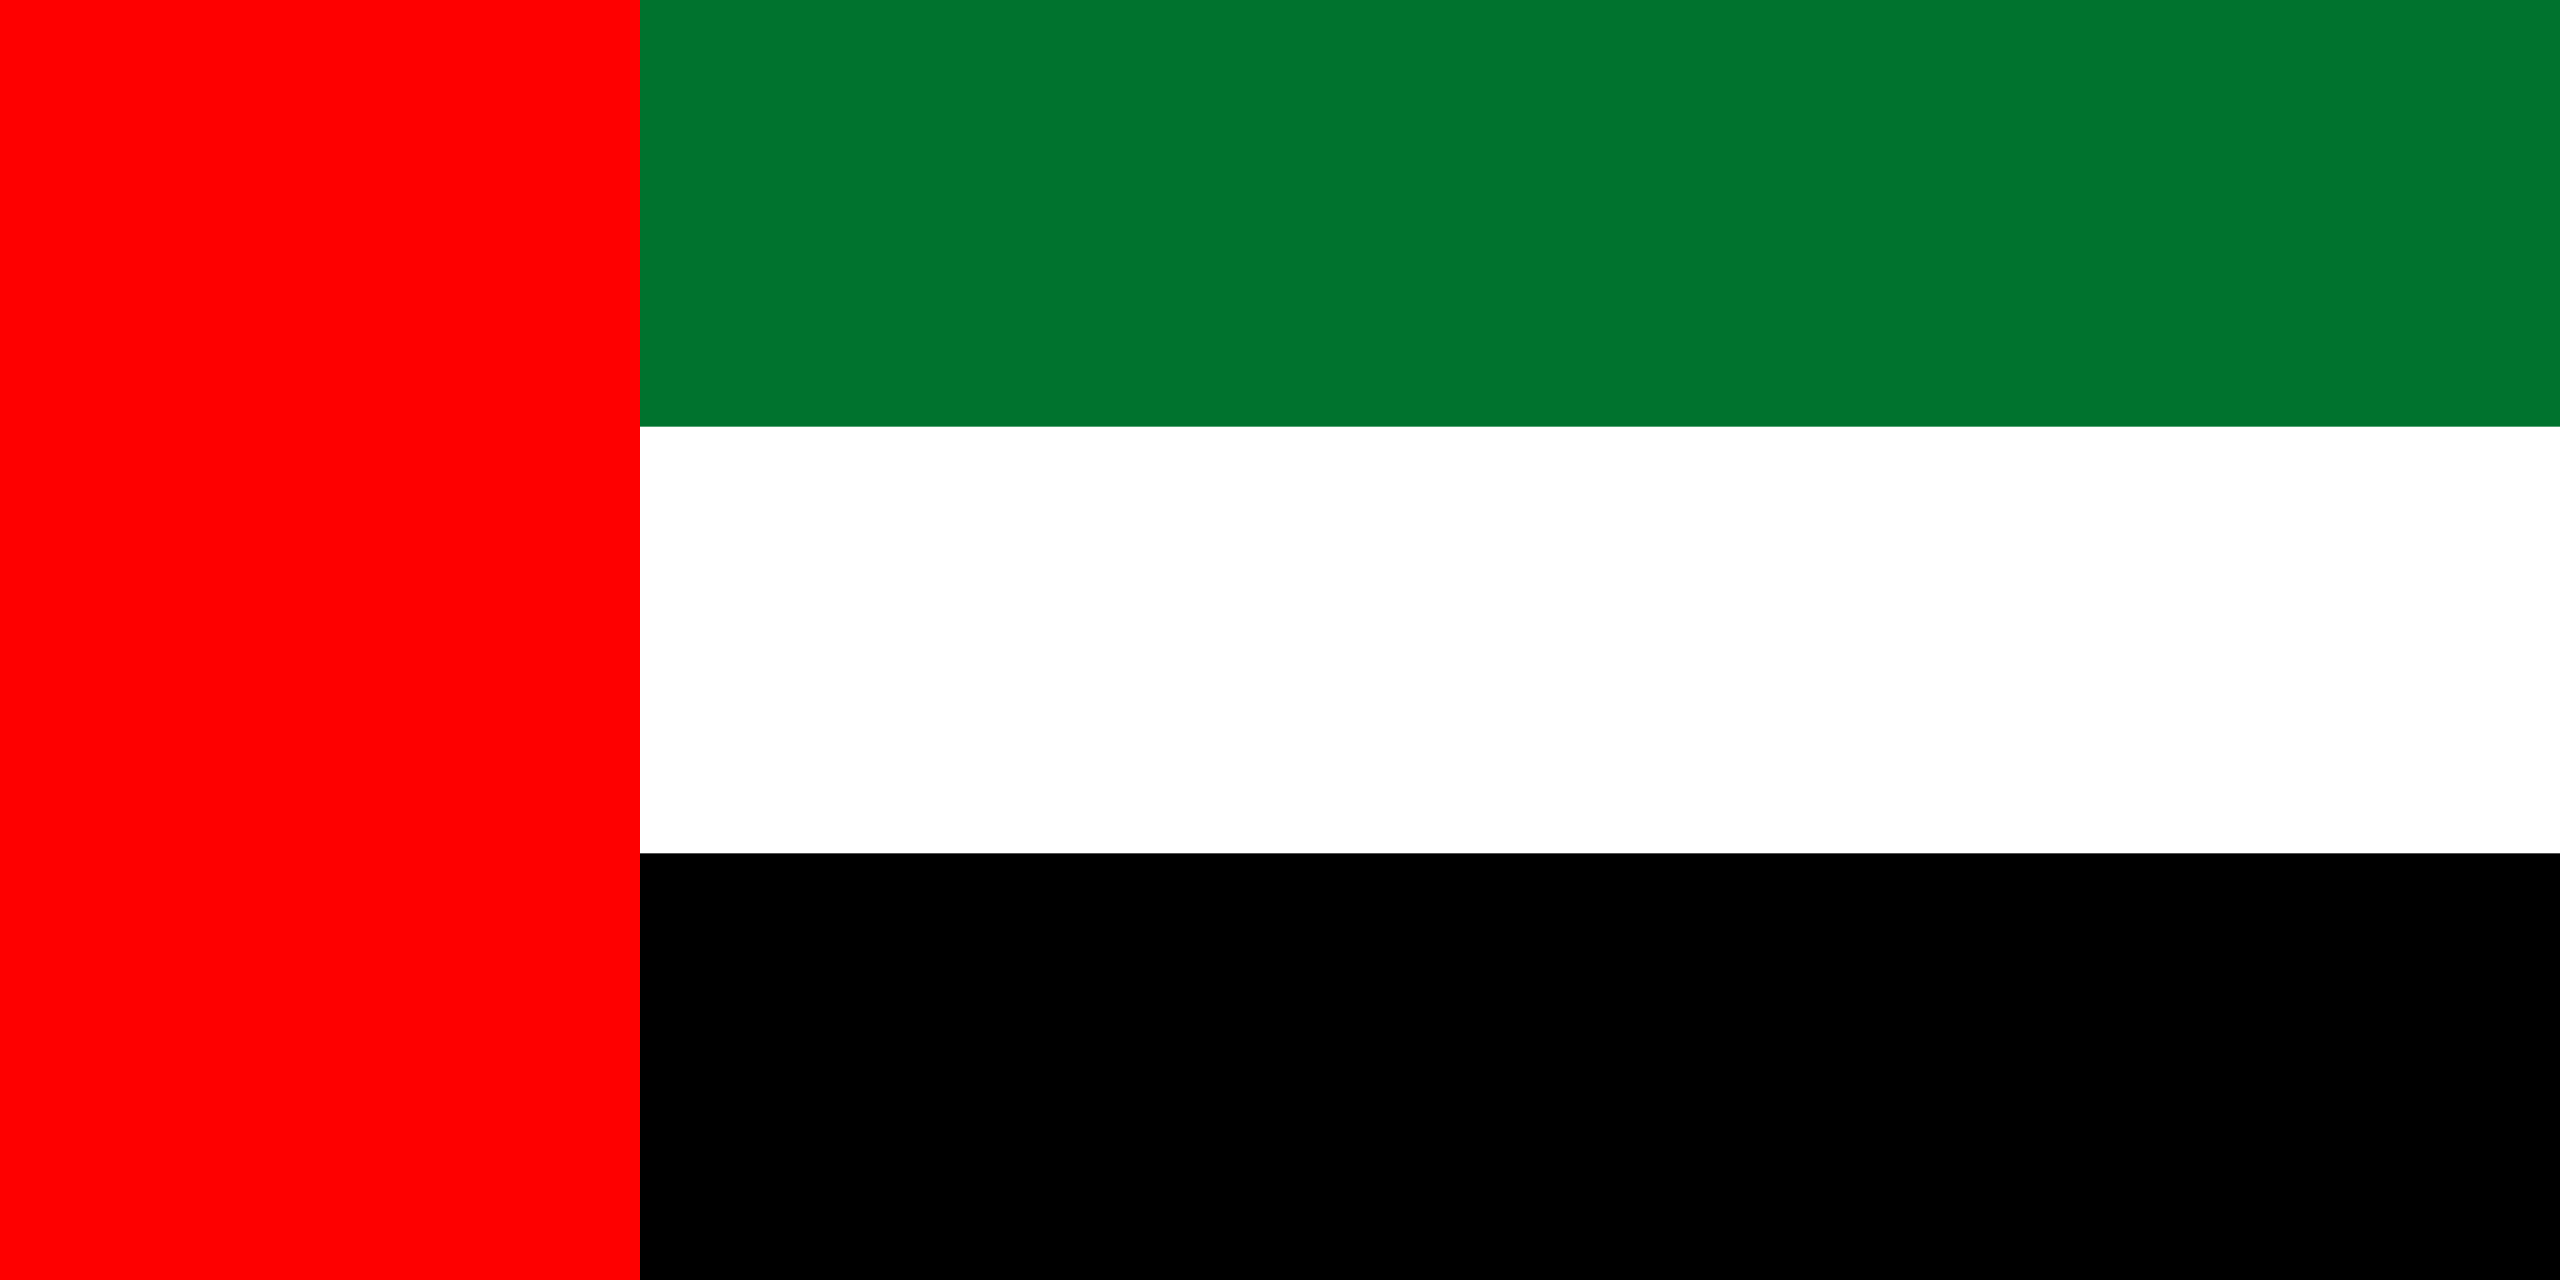

United Kingdom


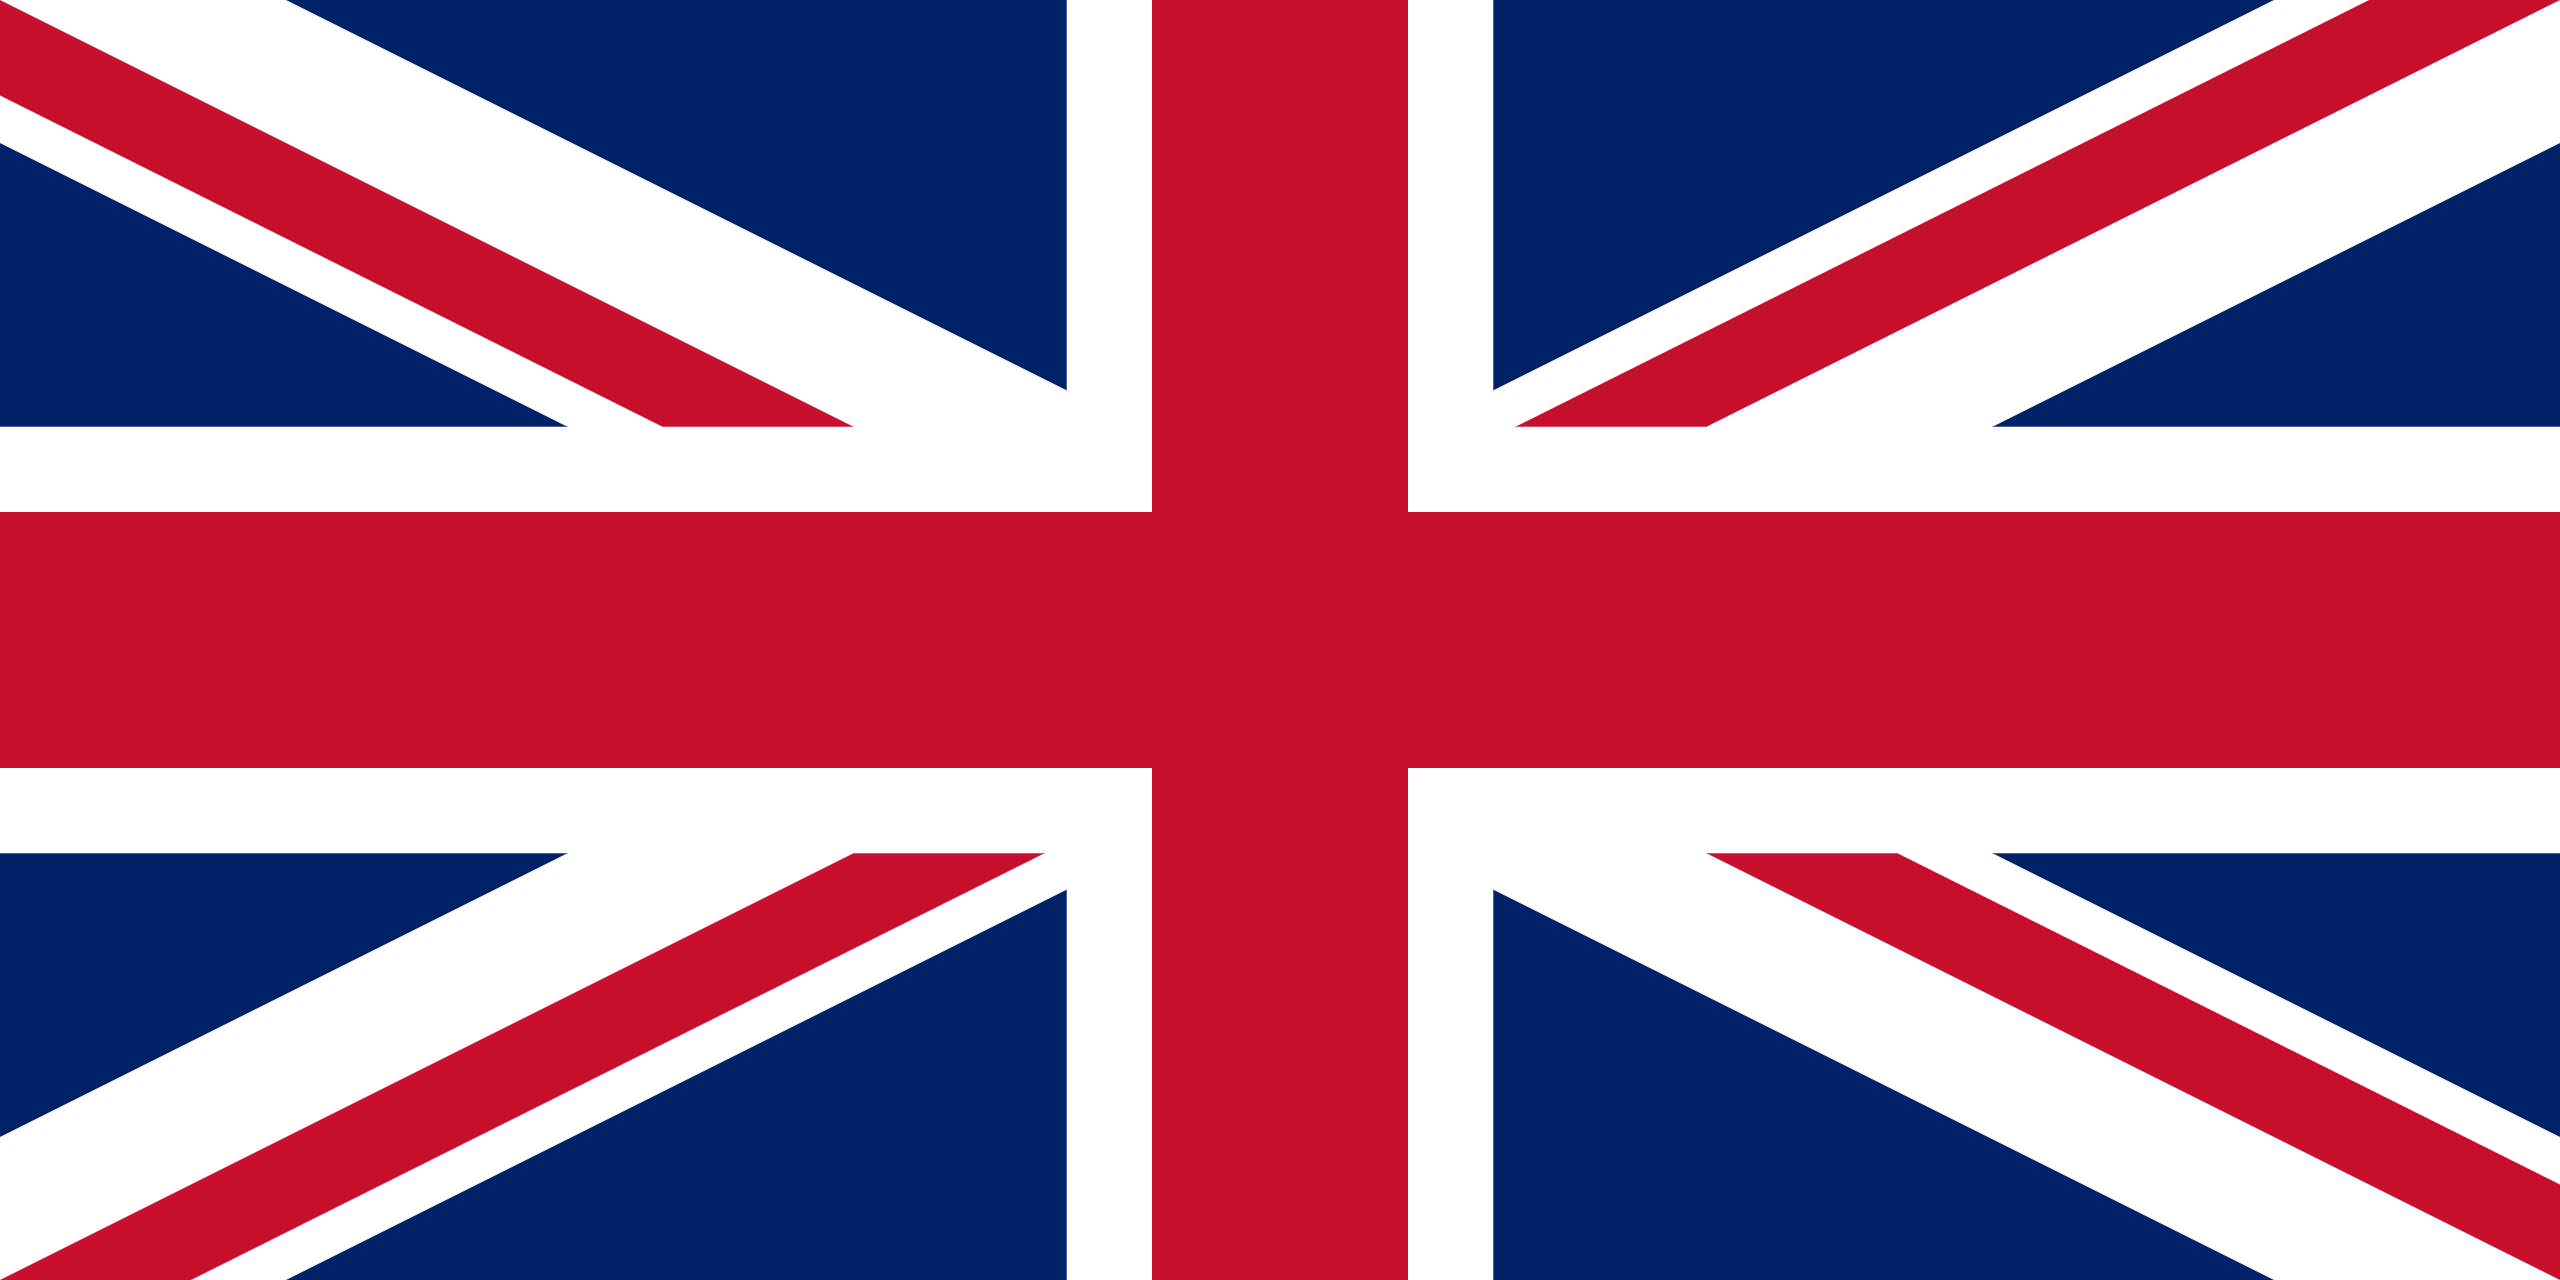

United States


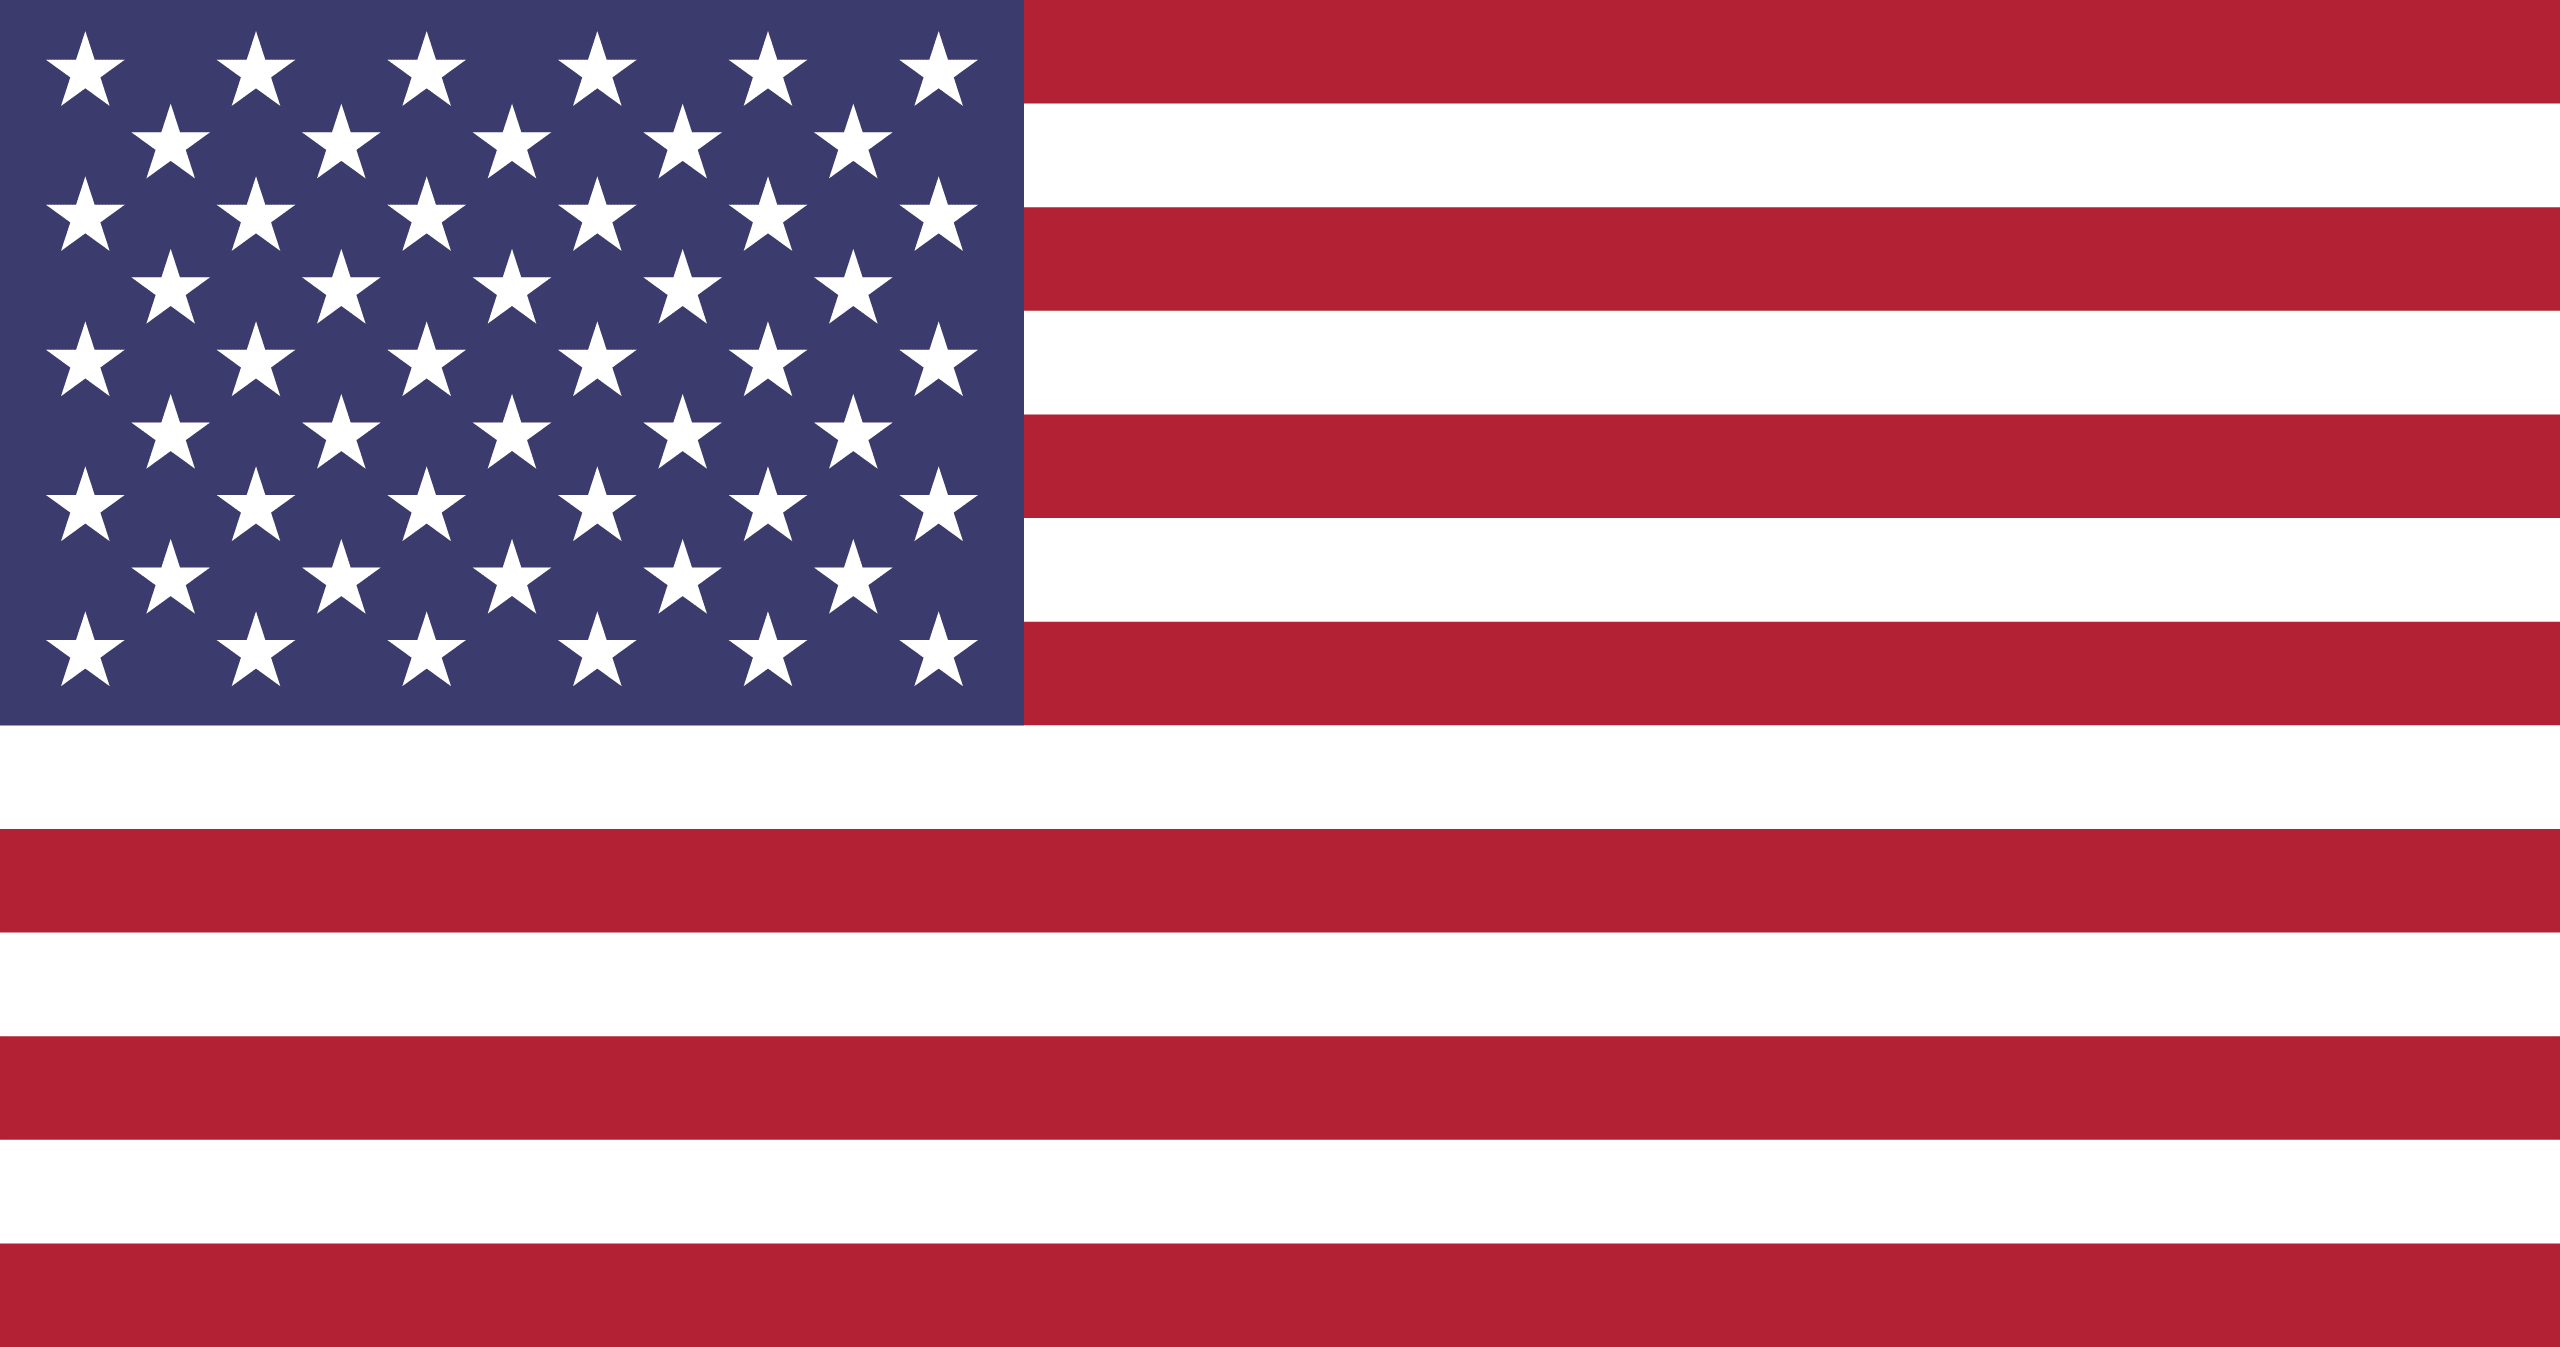

United States Minor Outlying Islands


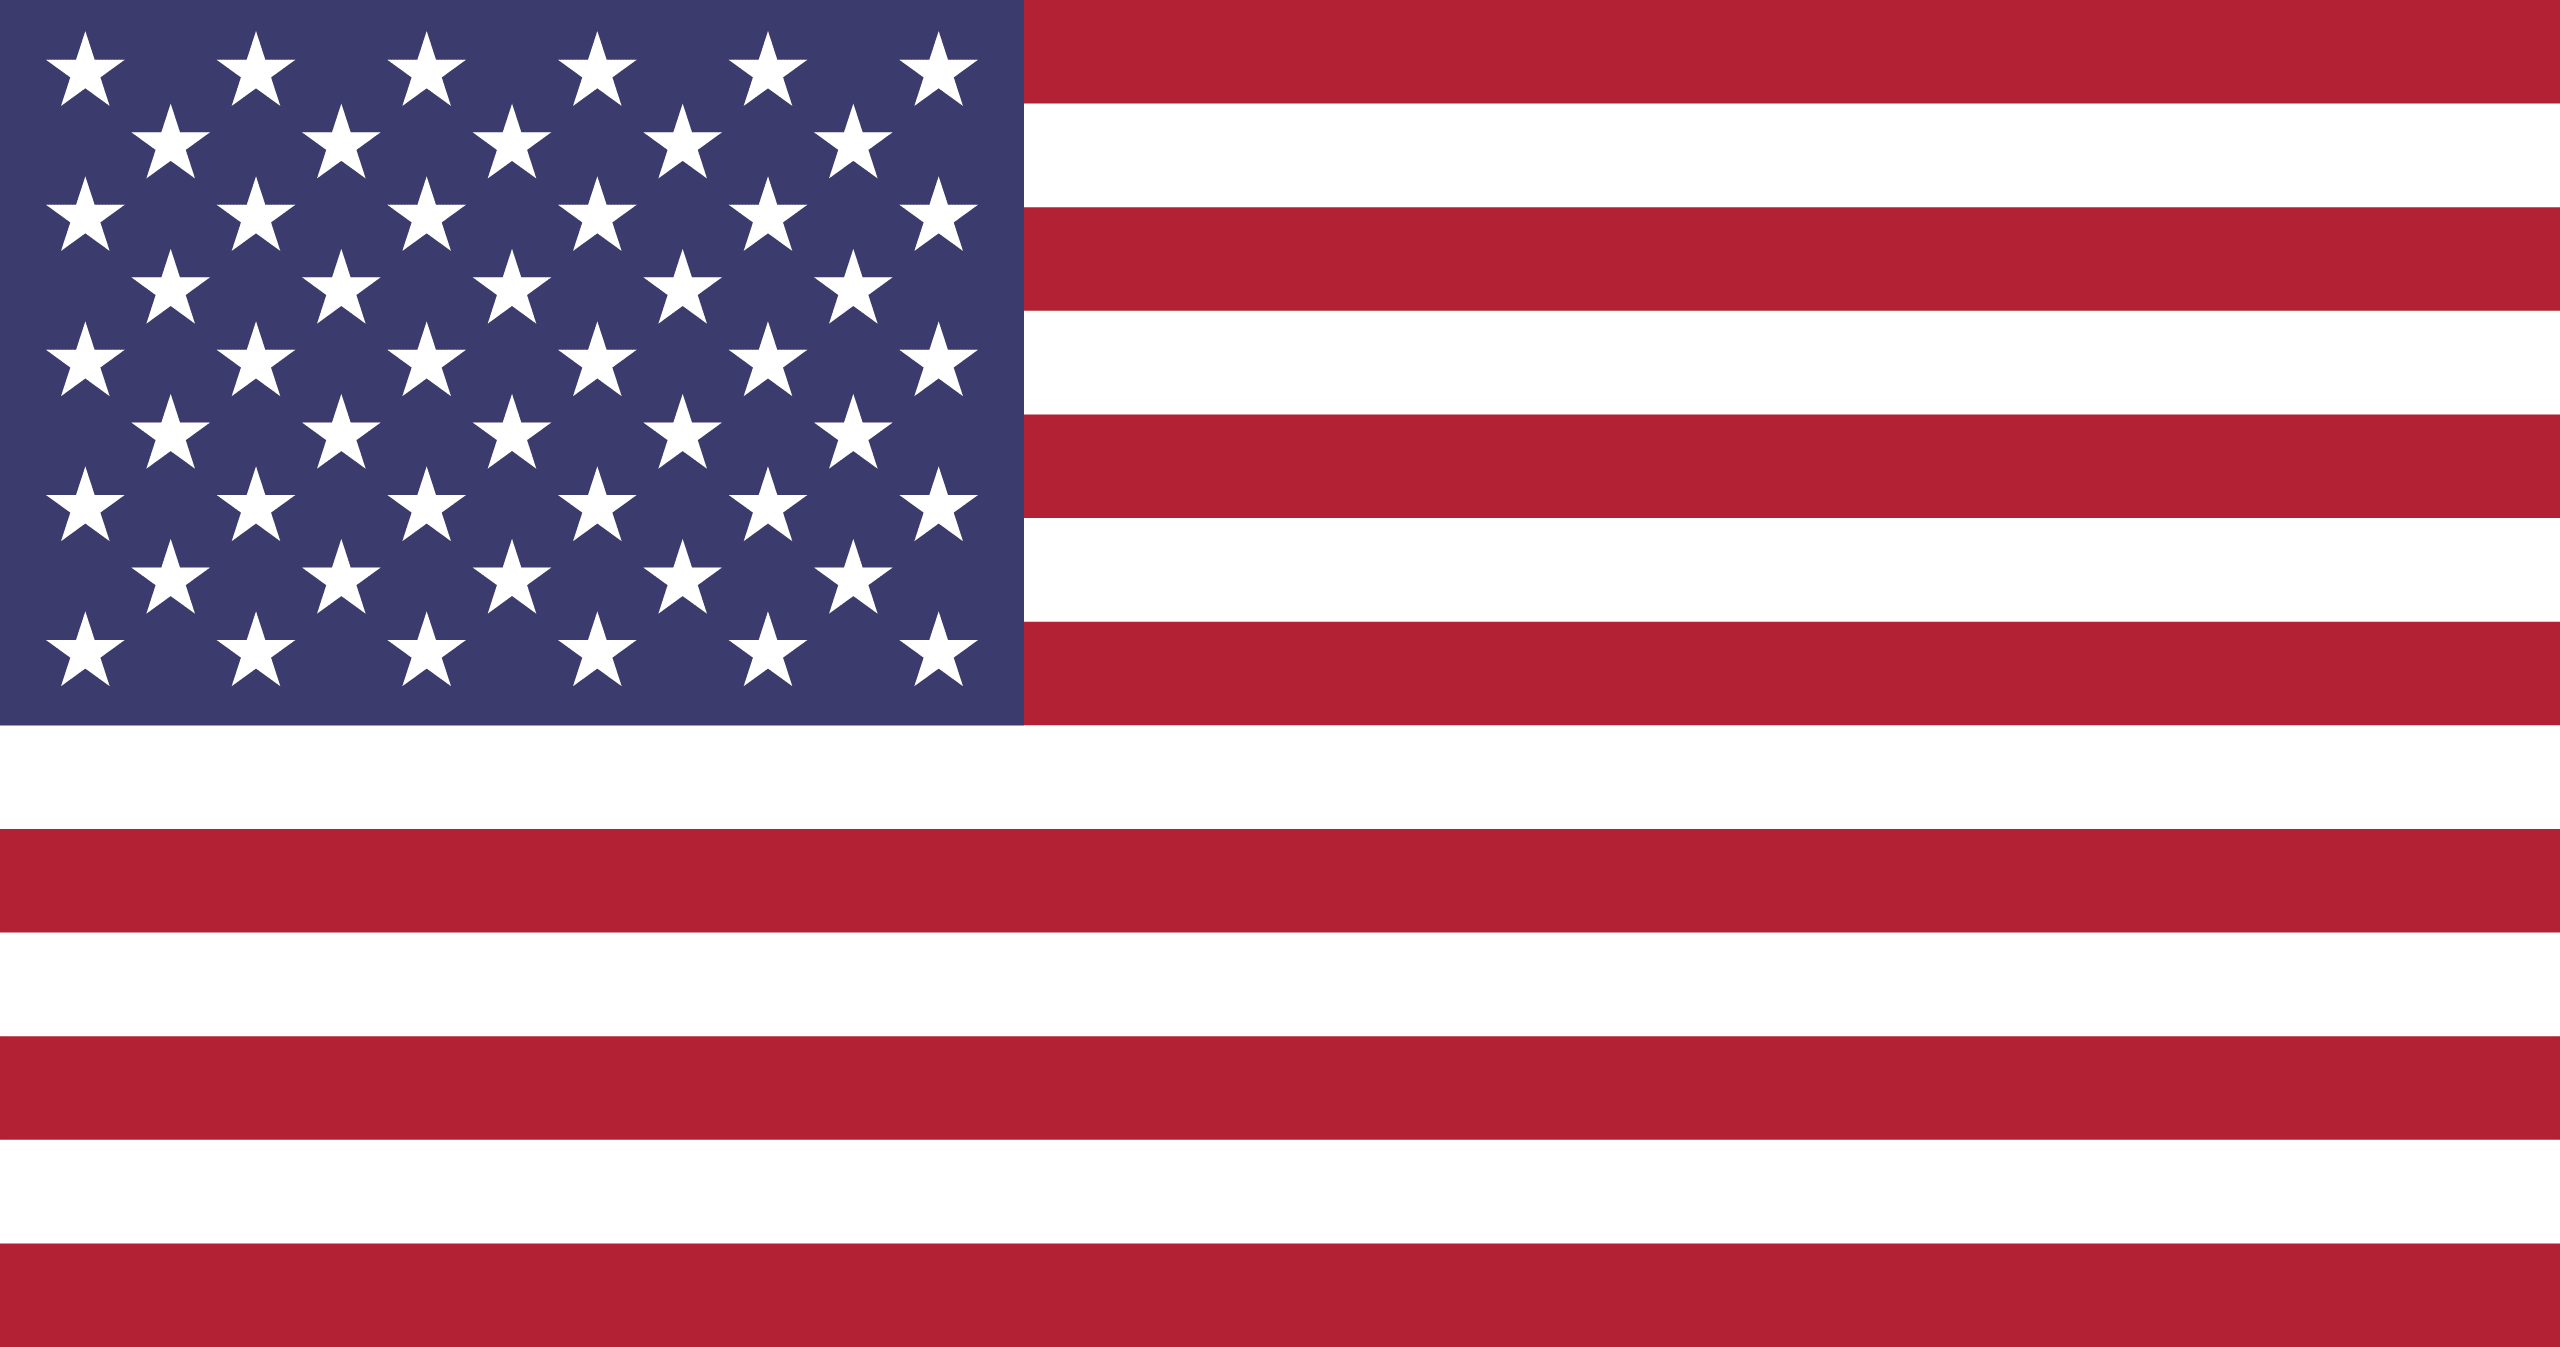

Uruguay


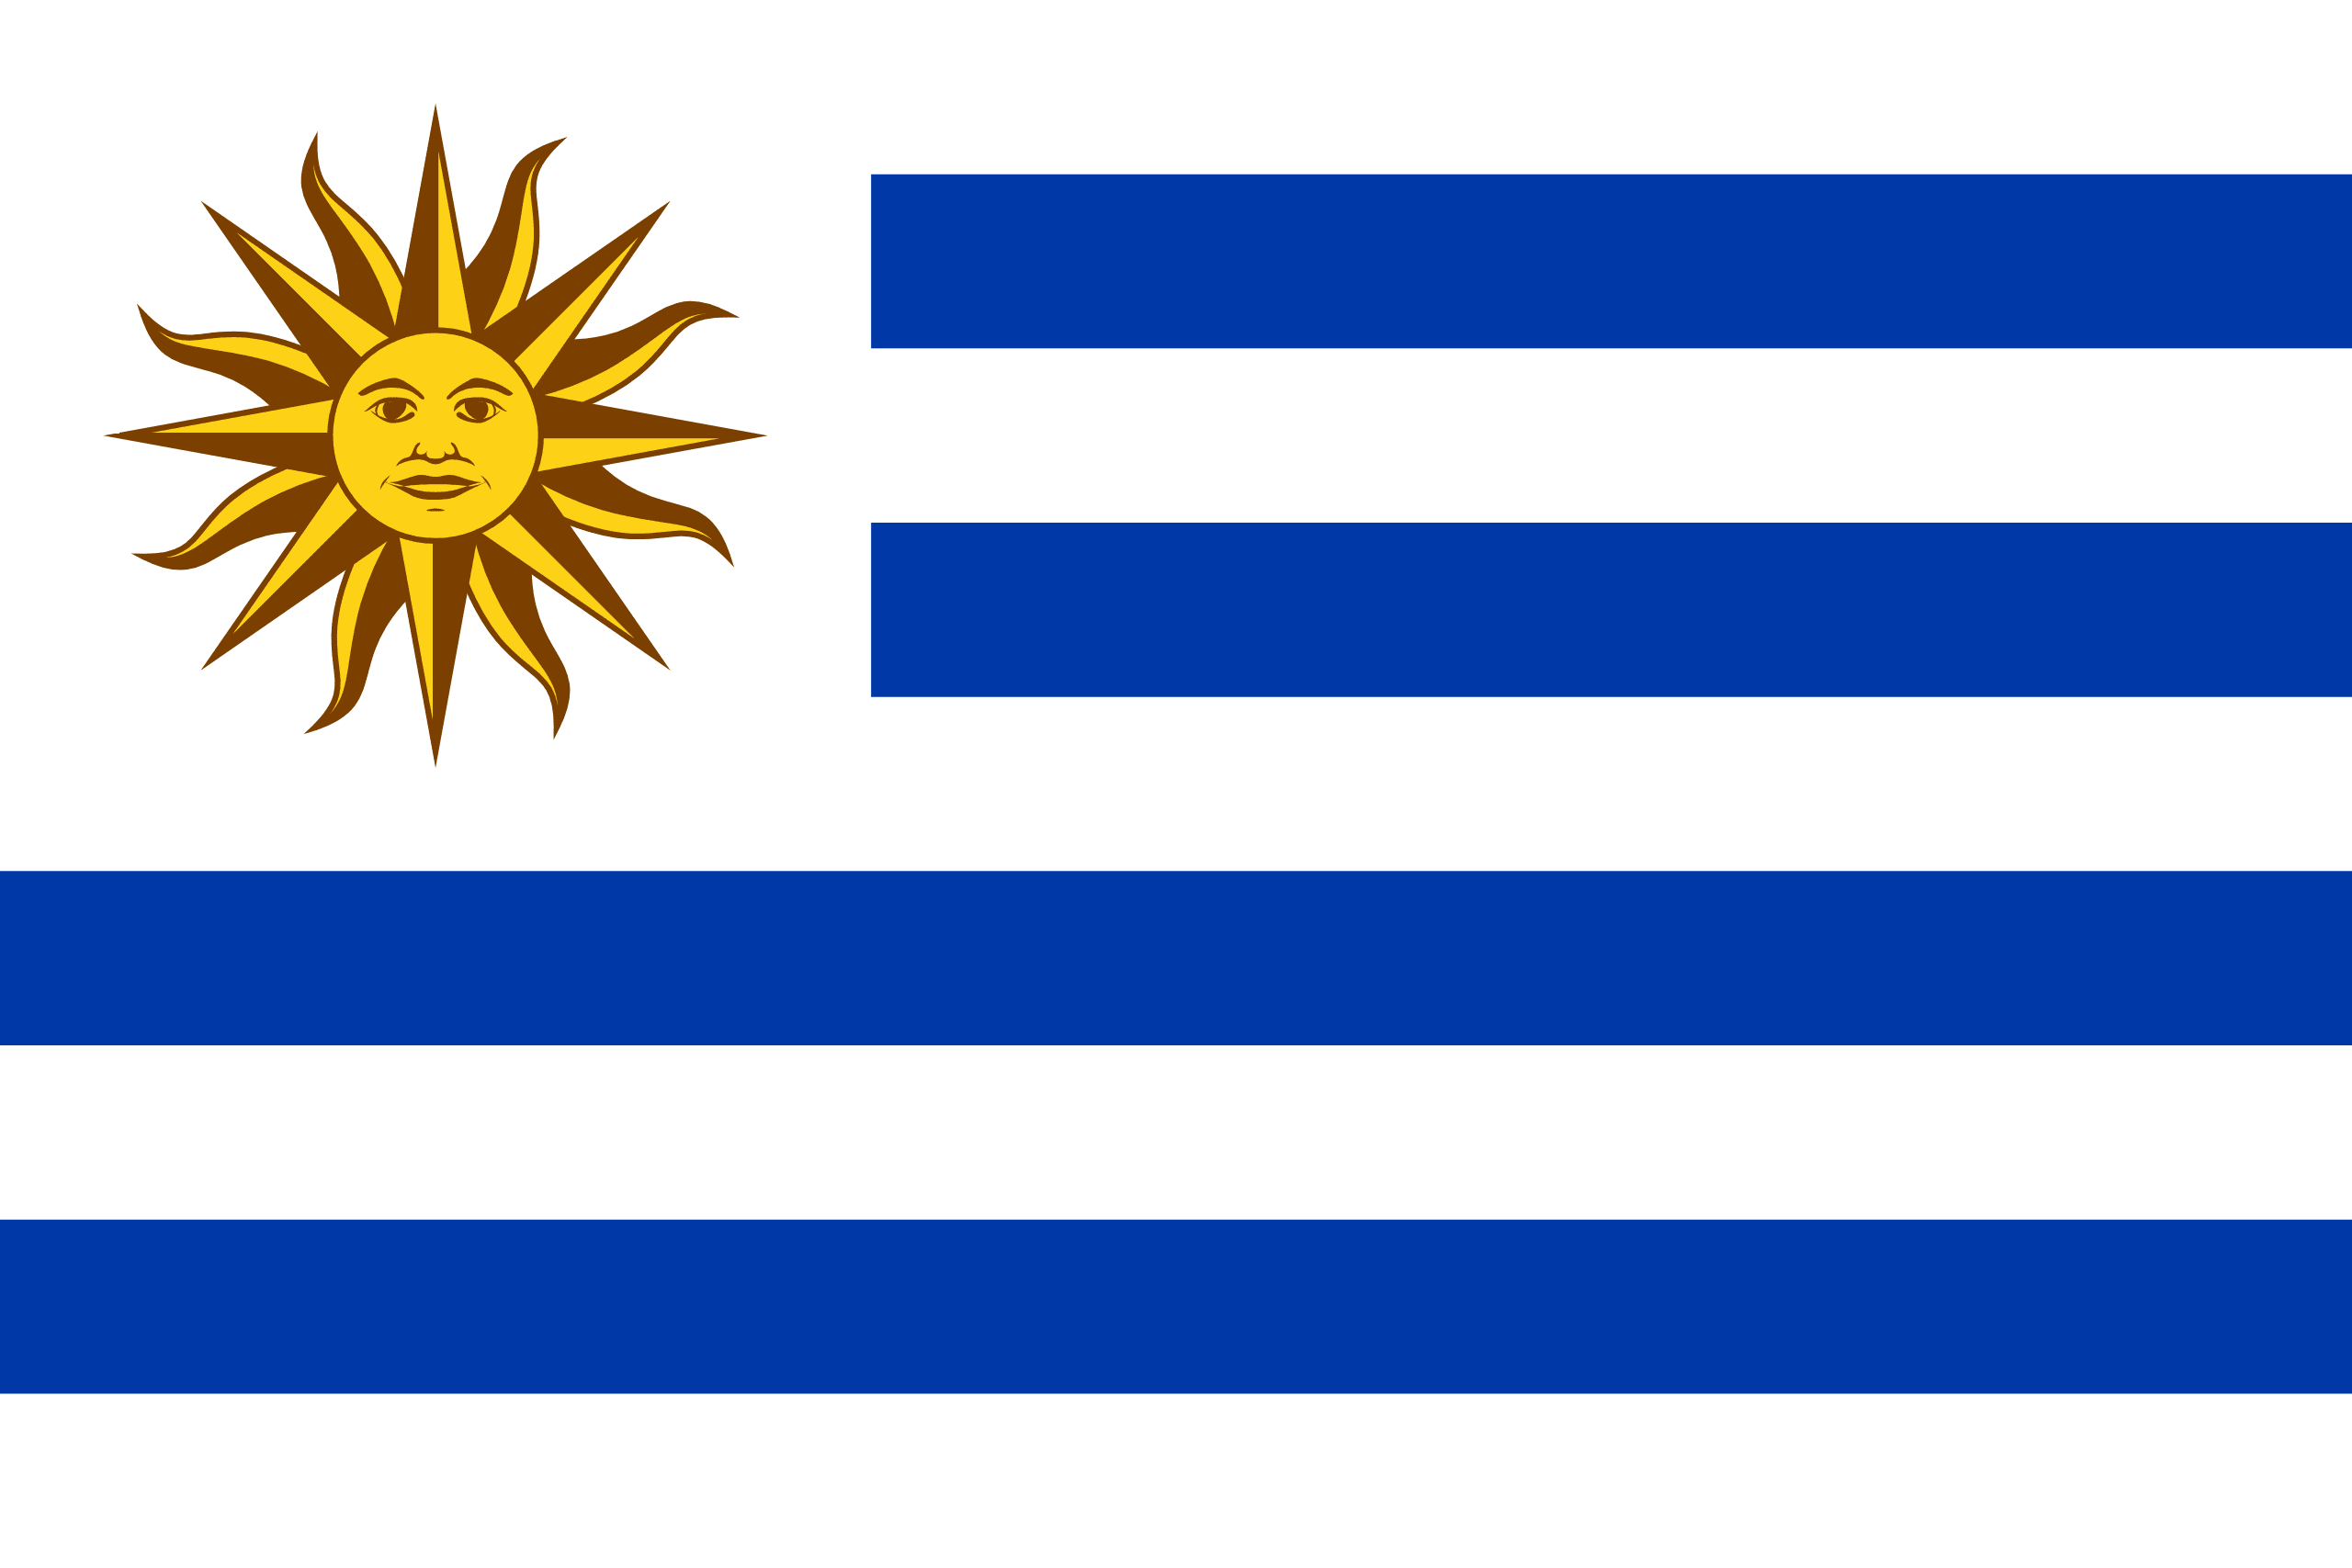

Uzbekistan


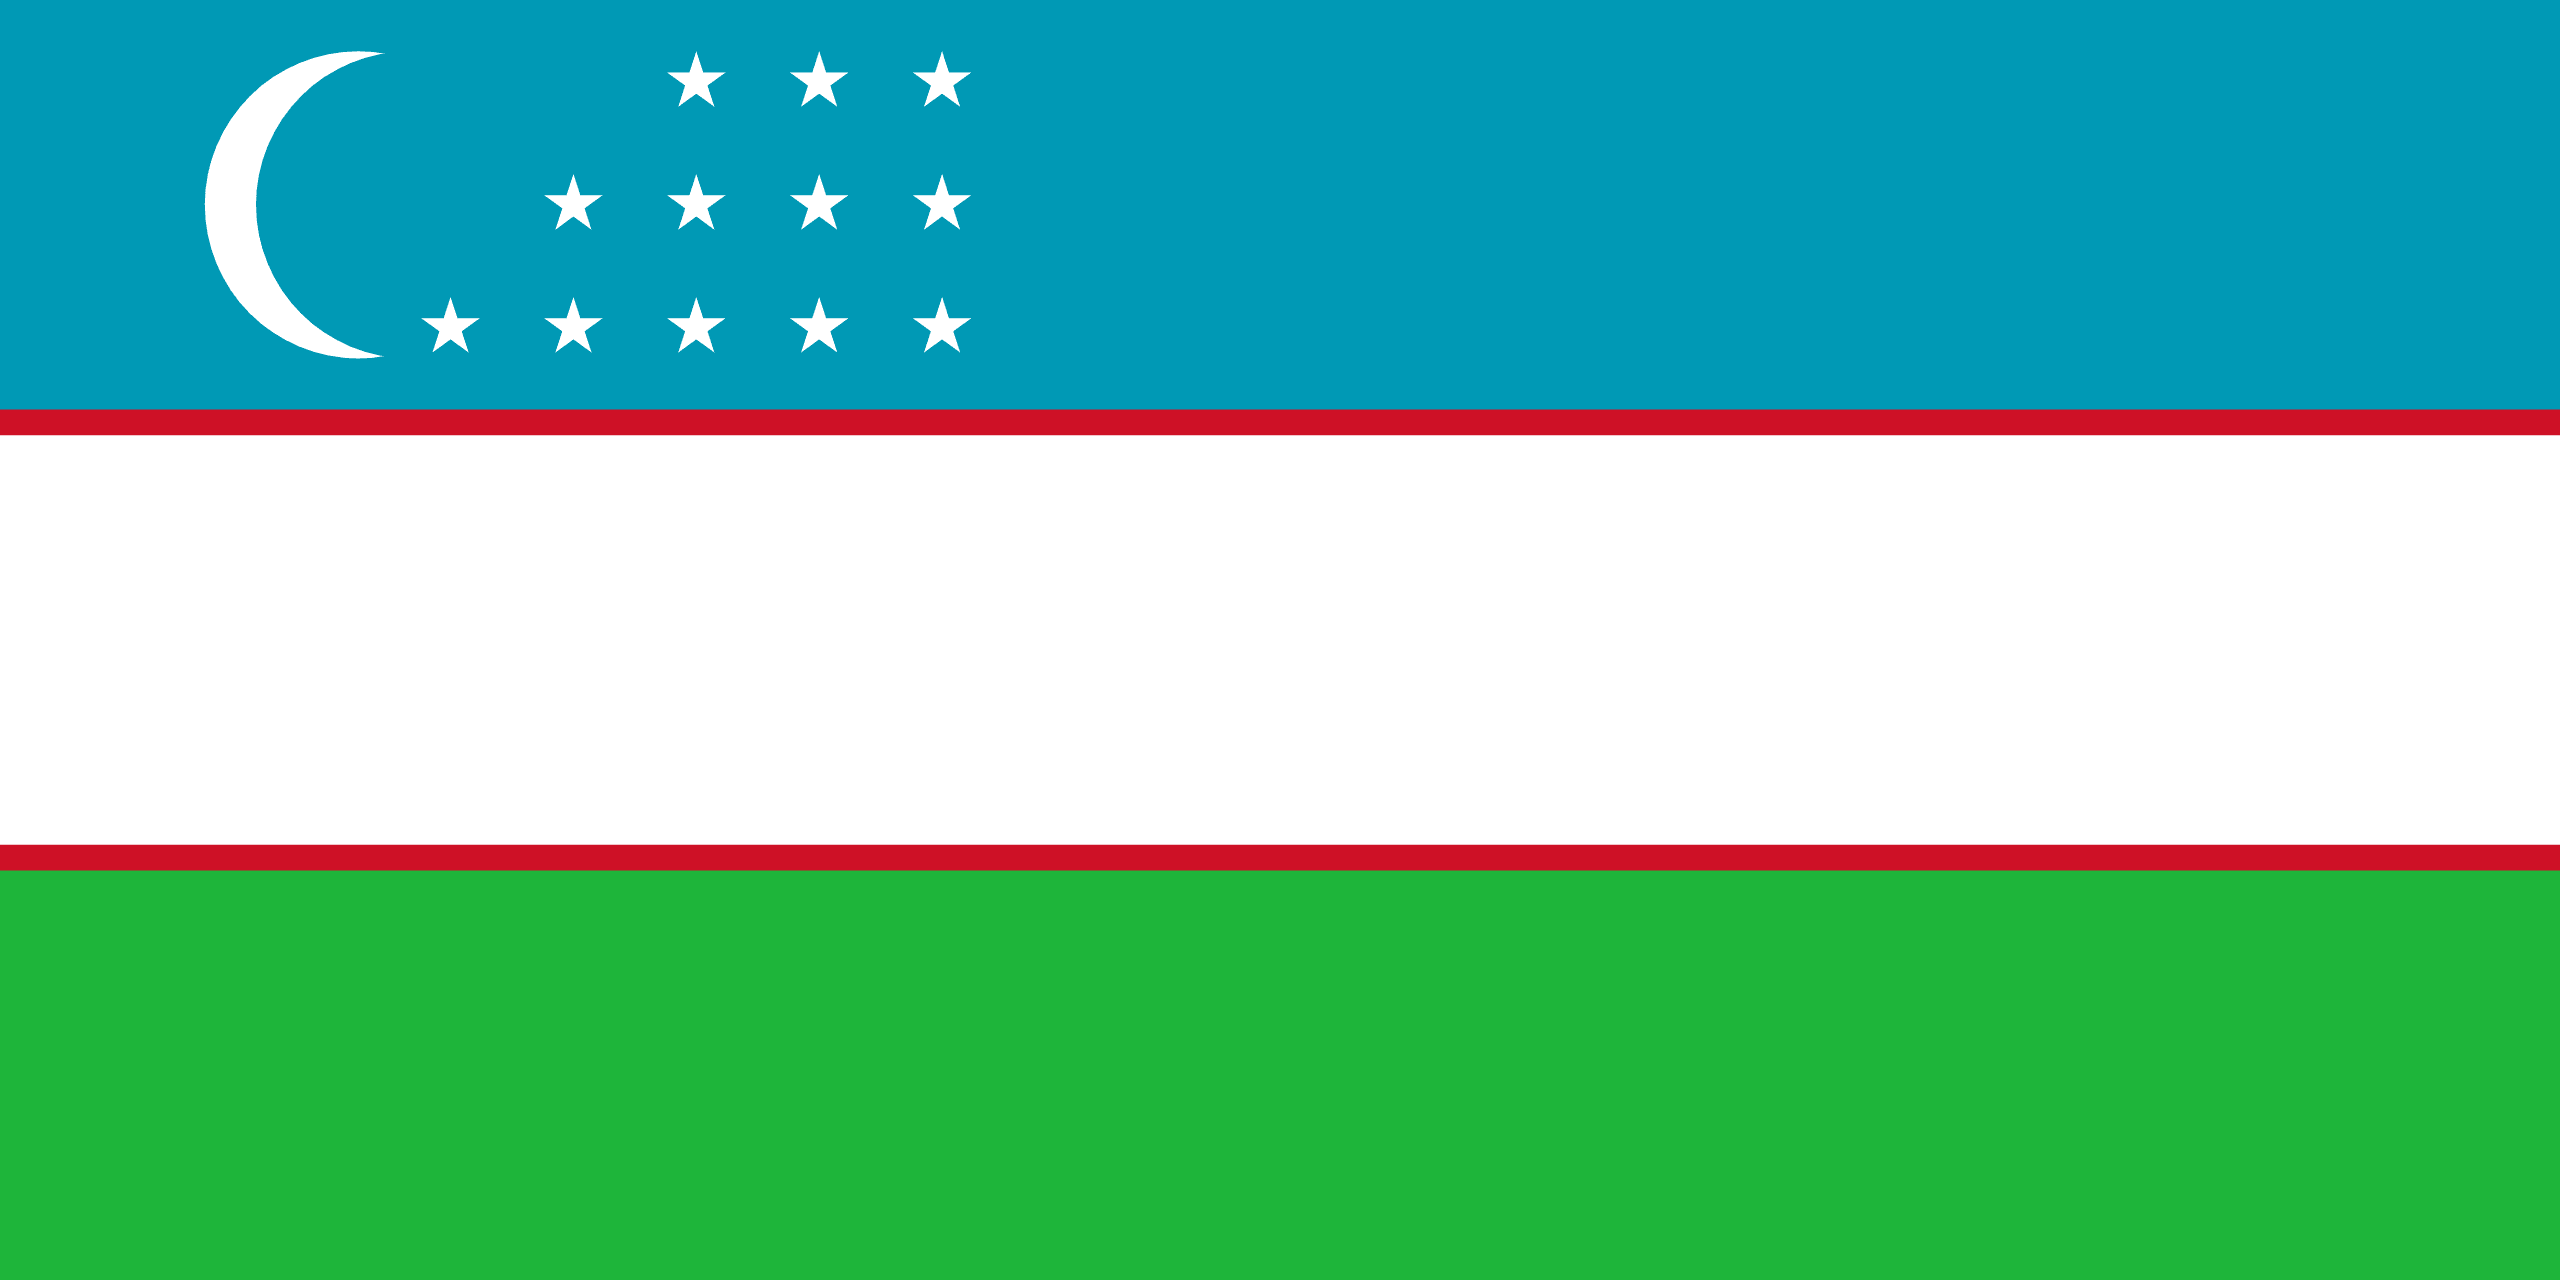

Vanuatu


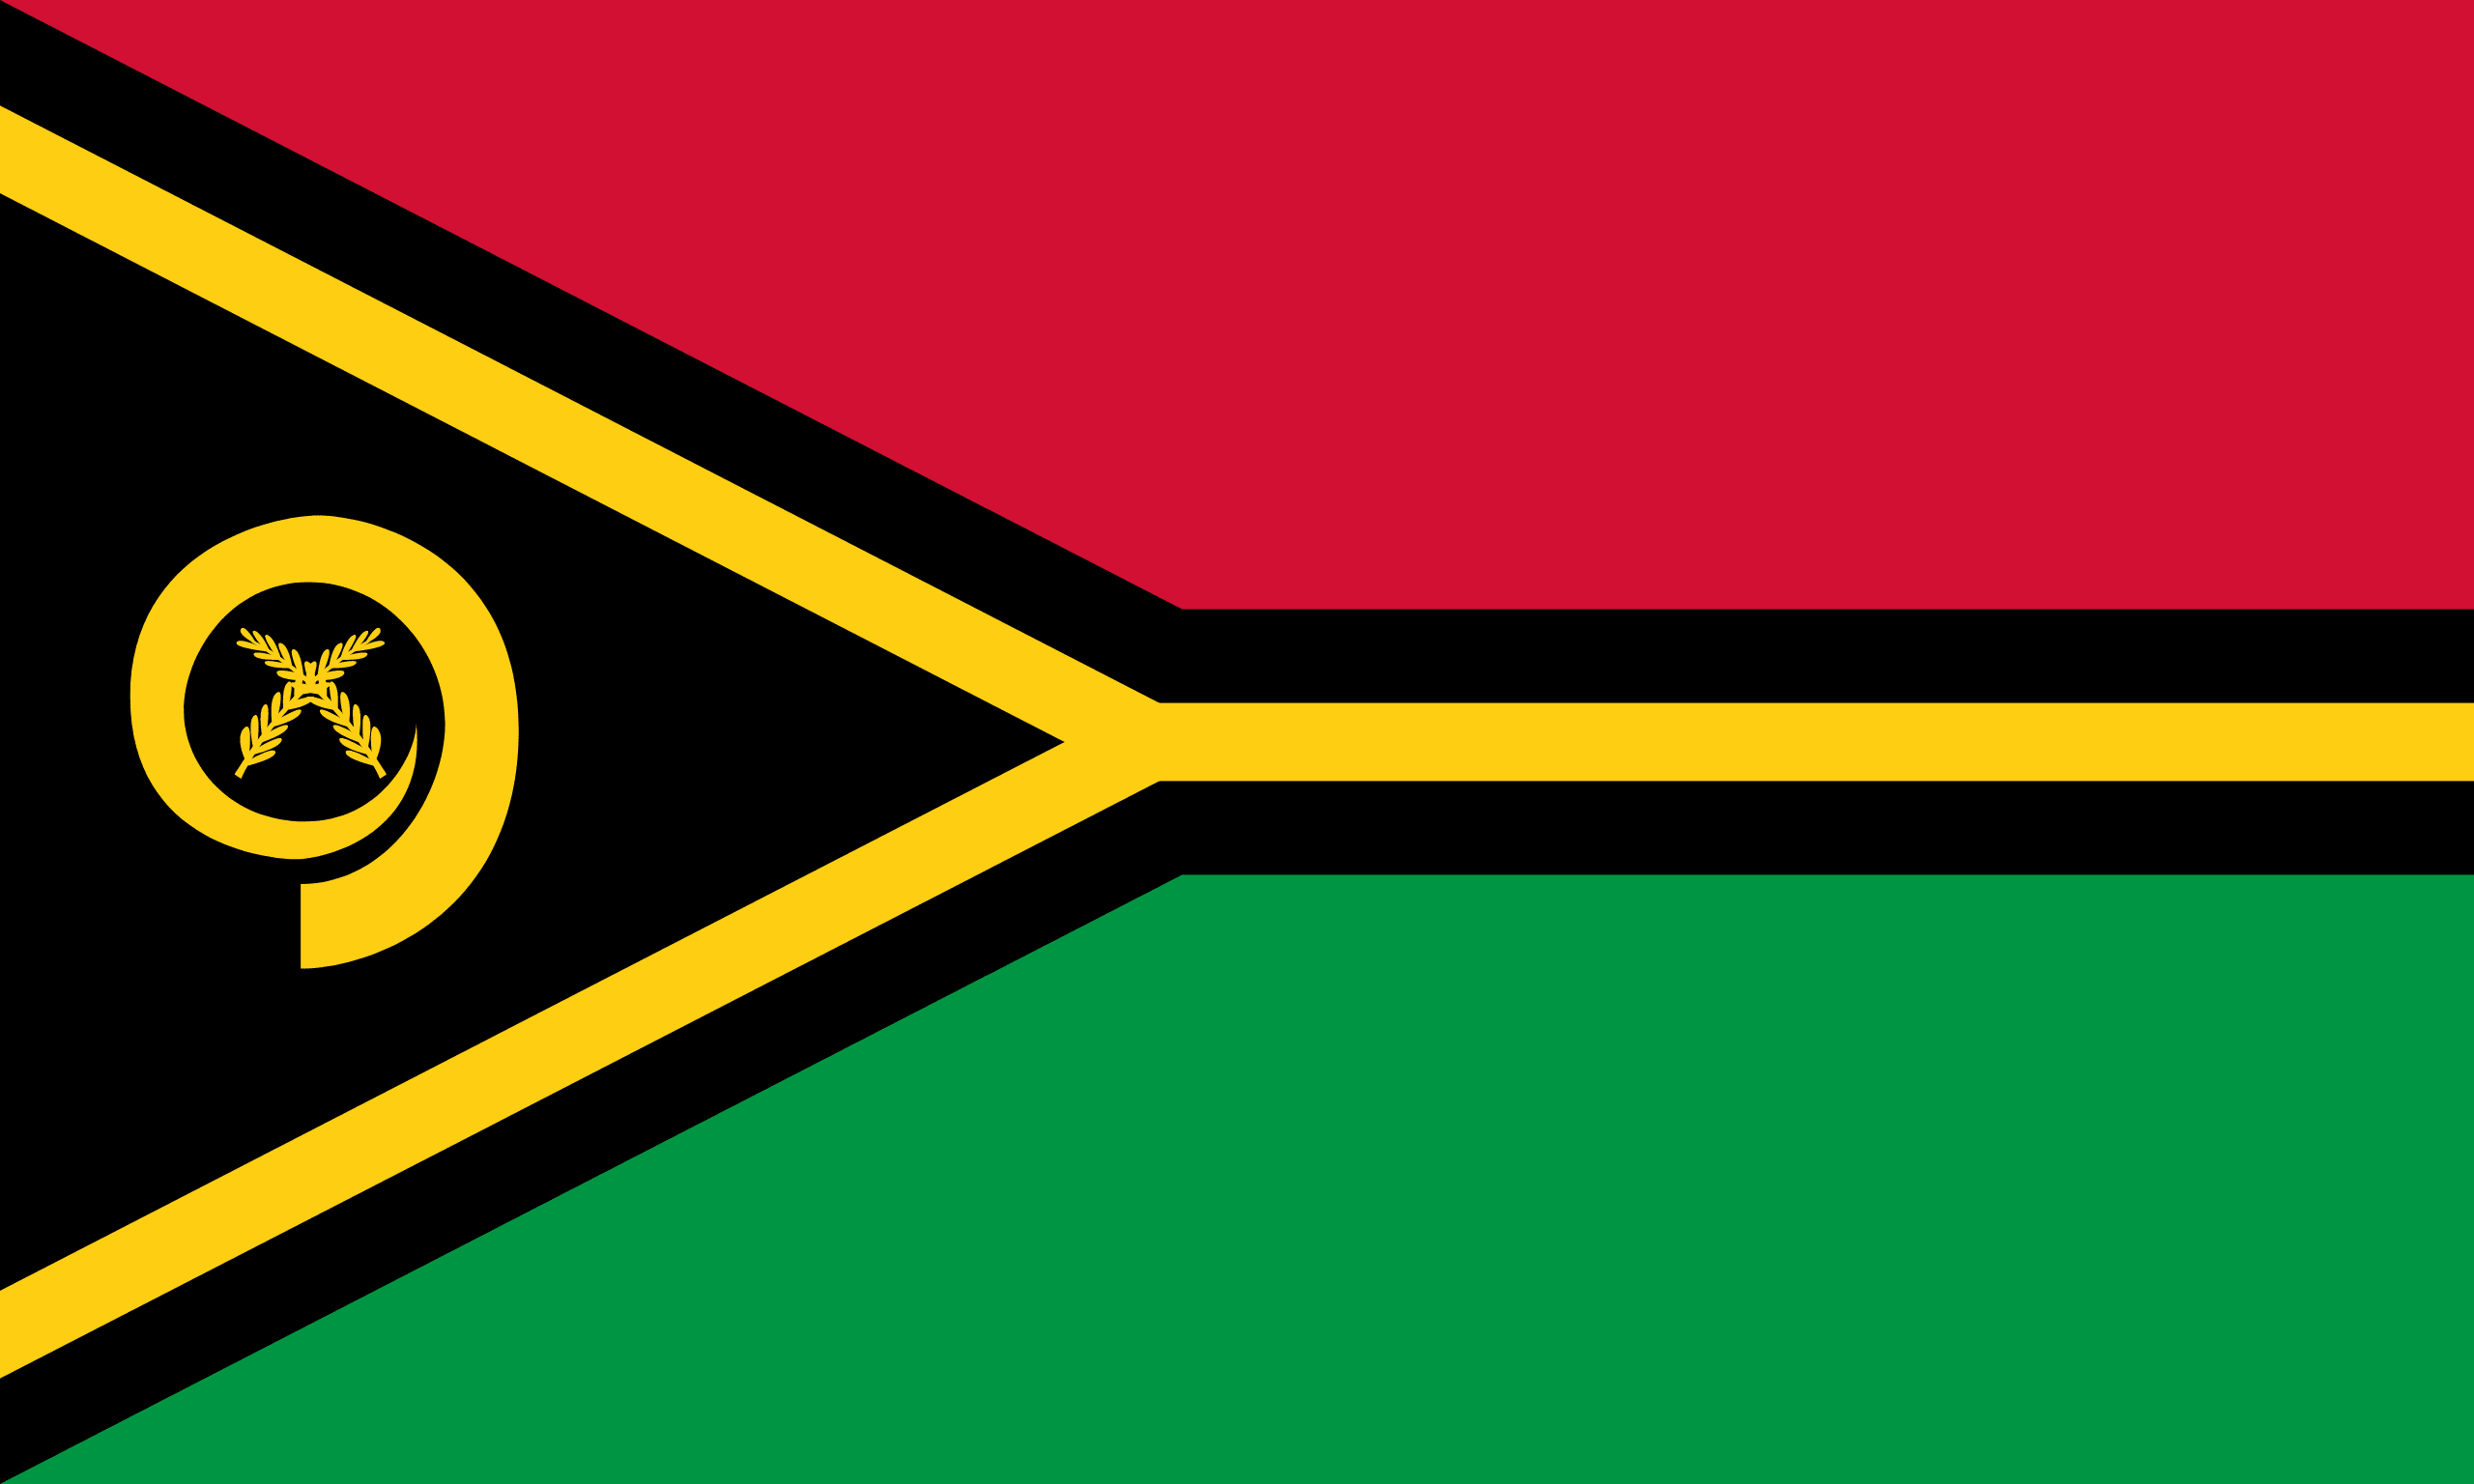

Vatican City


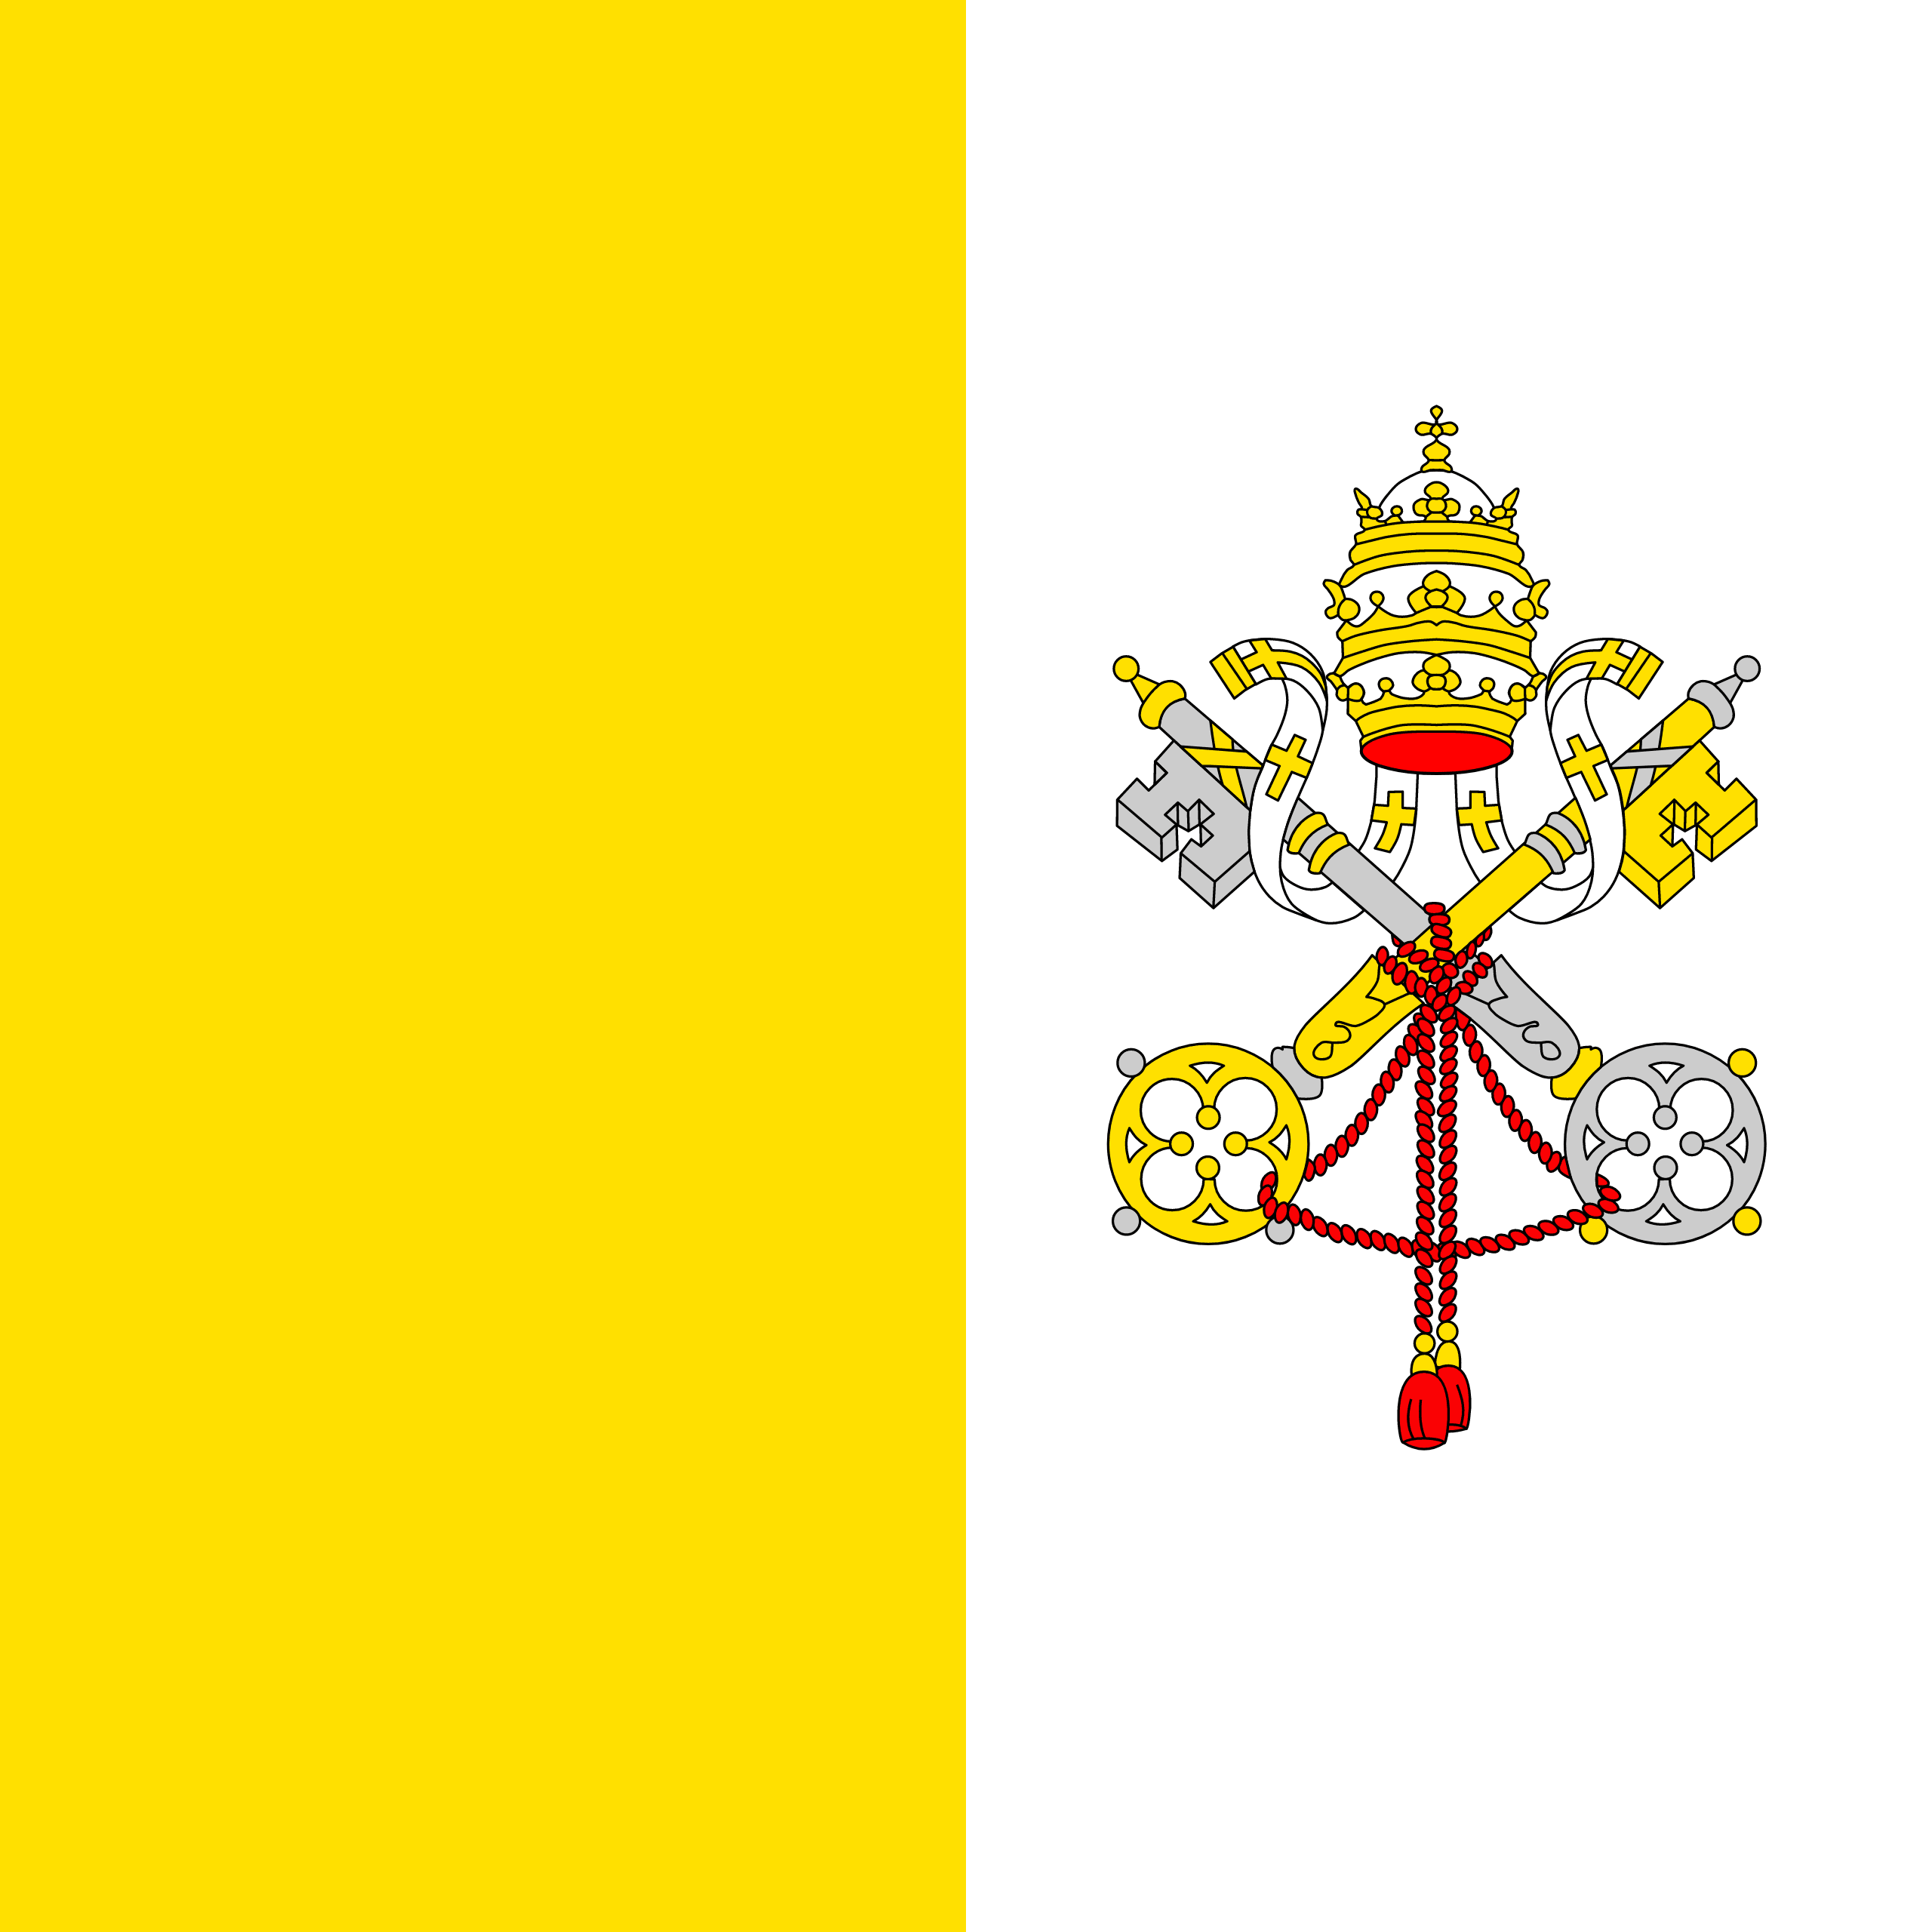

Venezuela


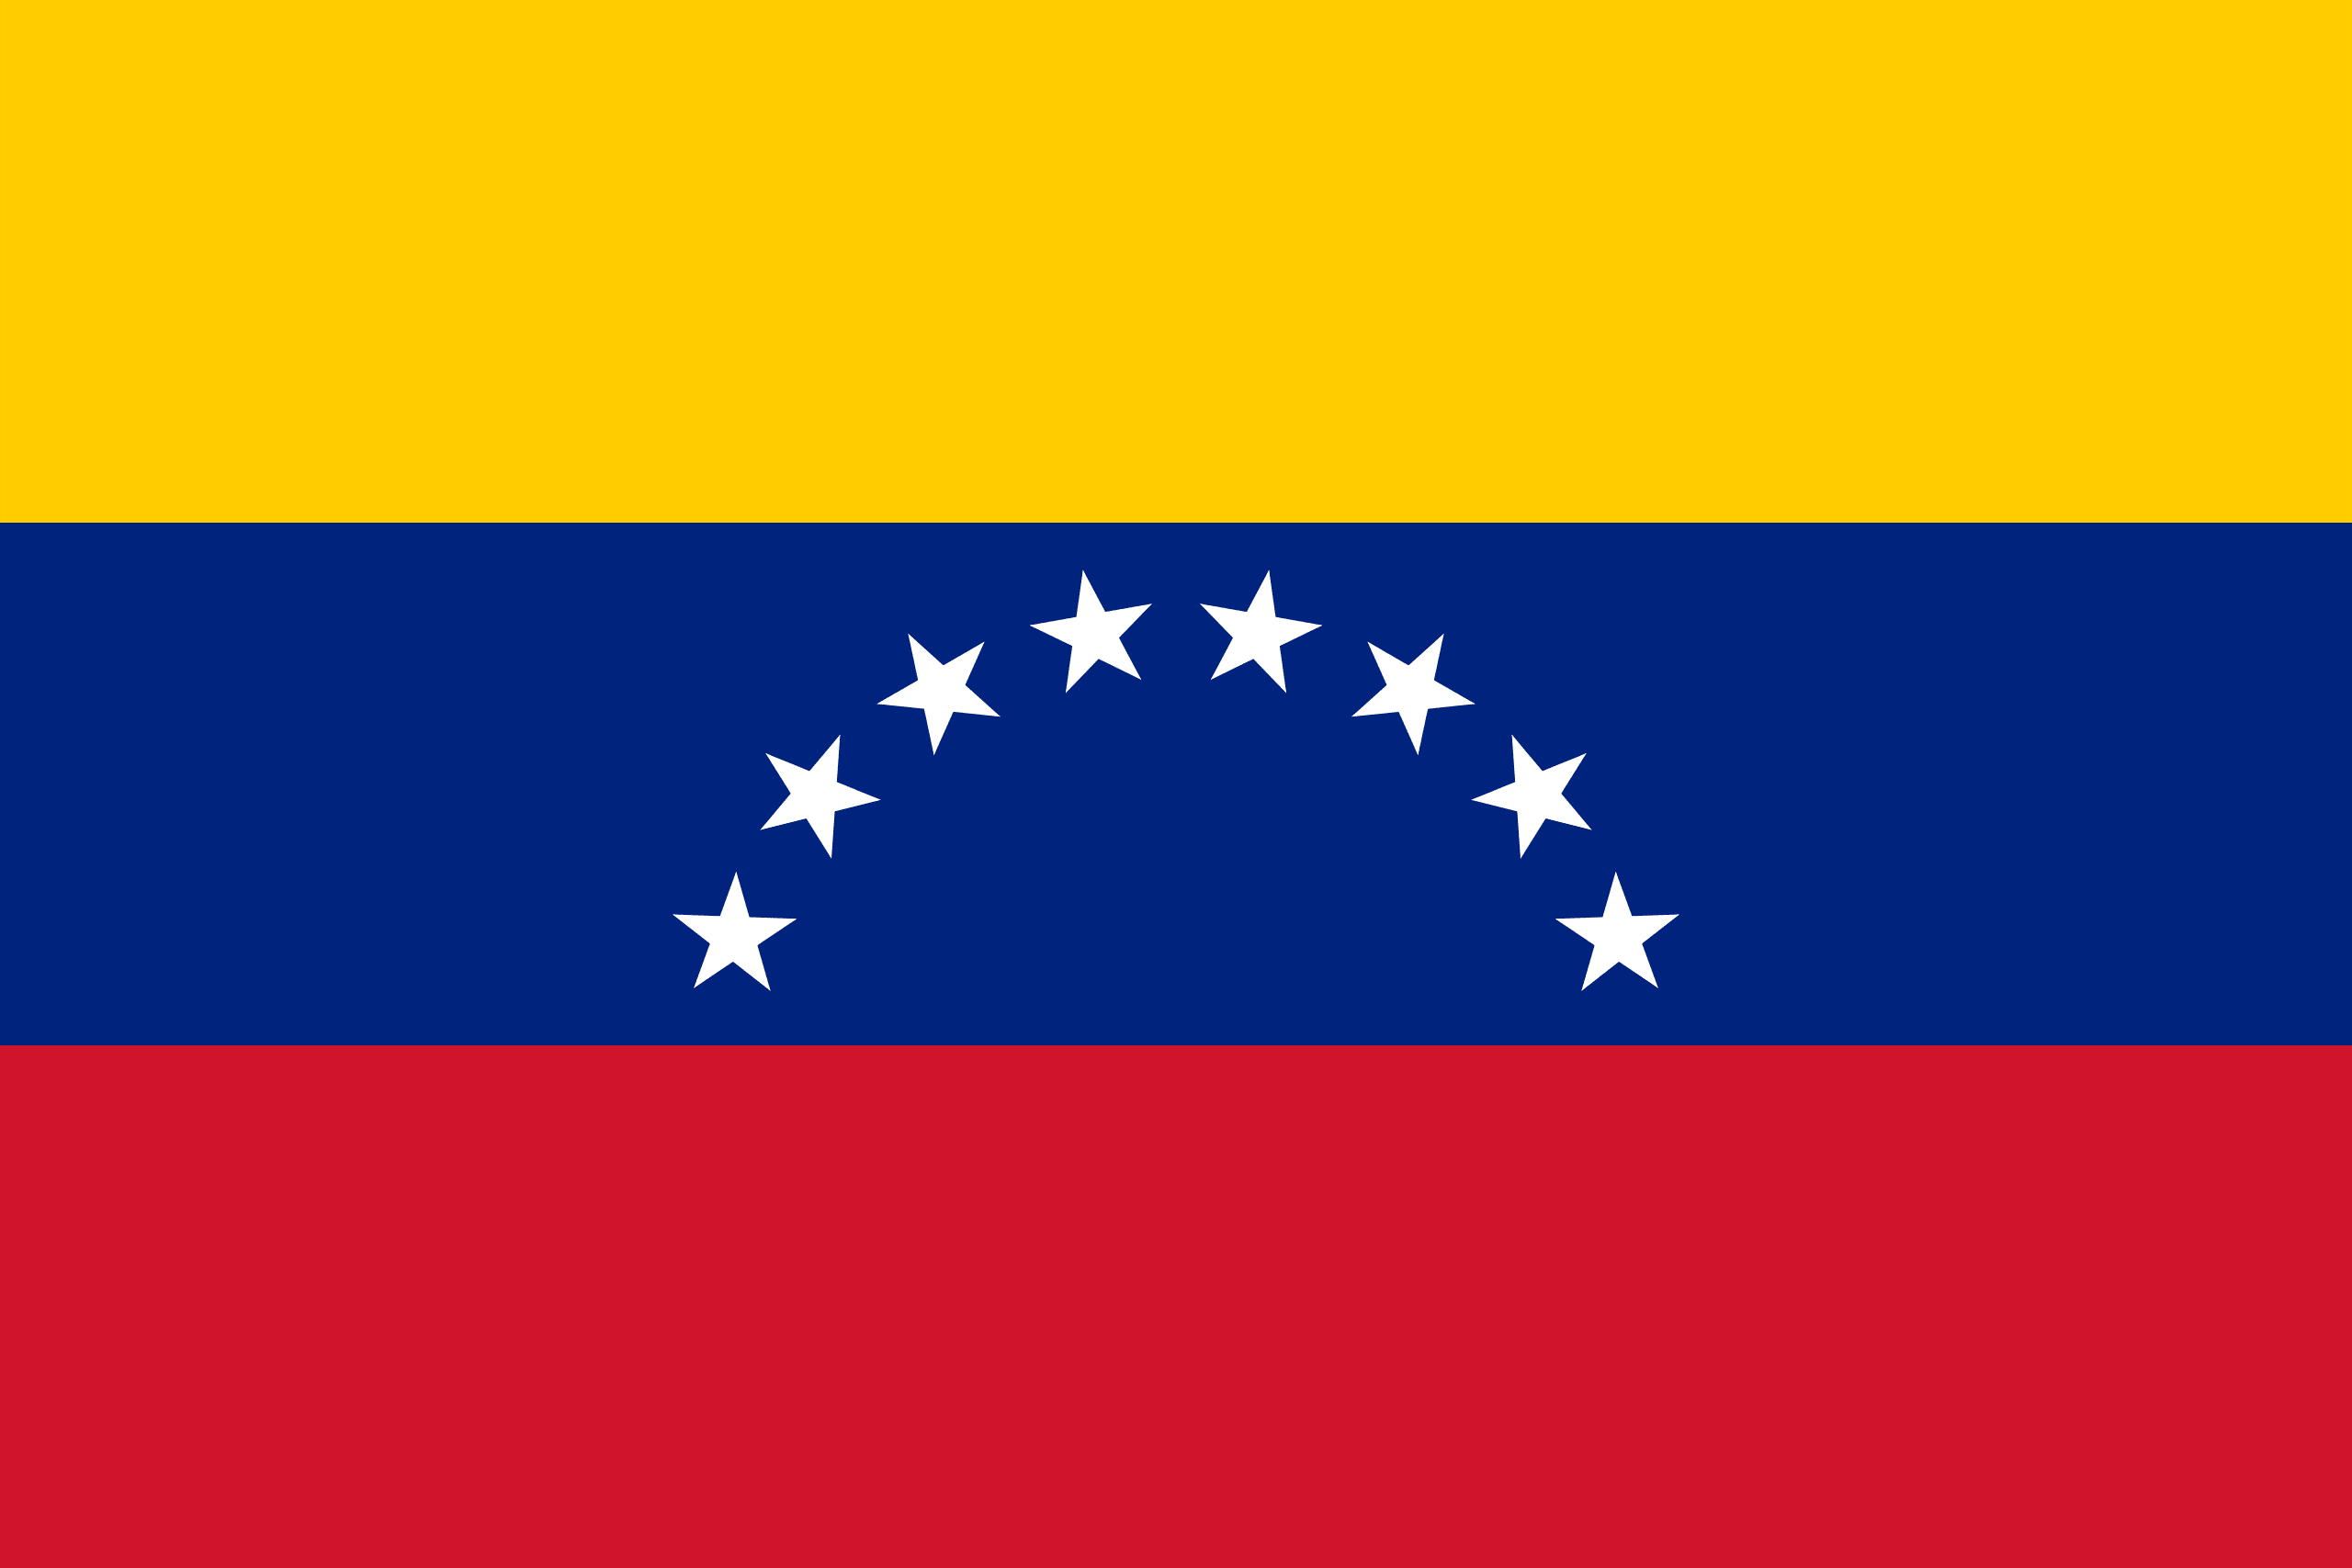

Vietnam


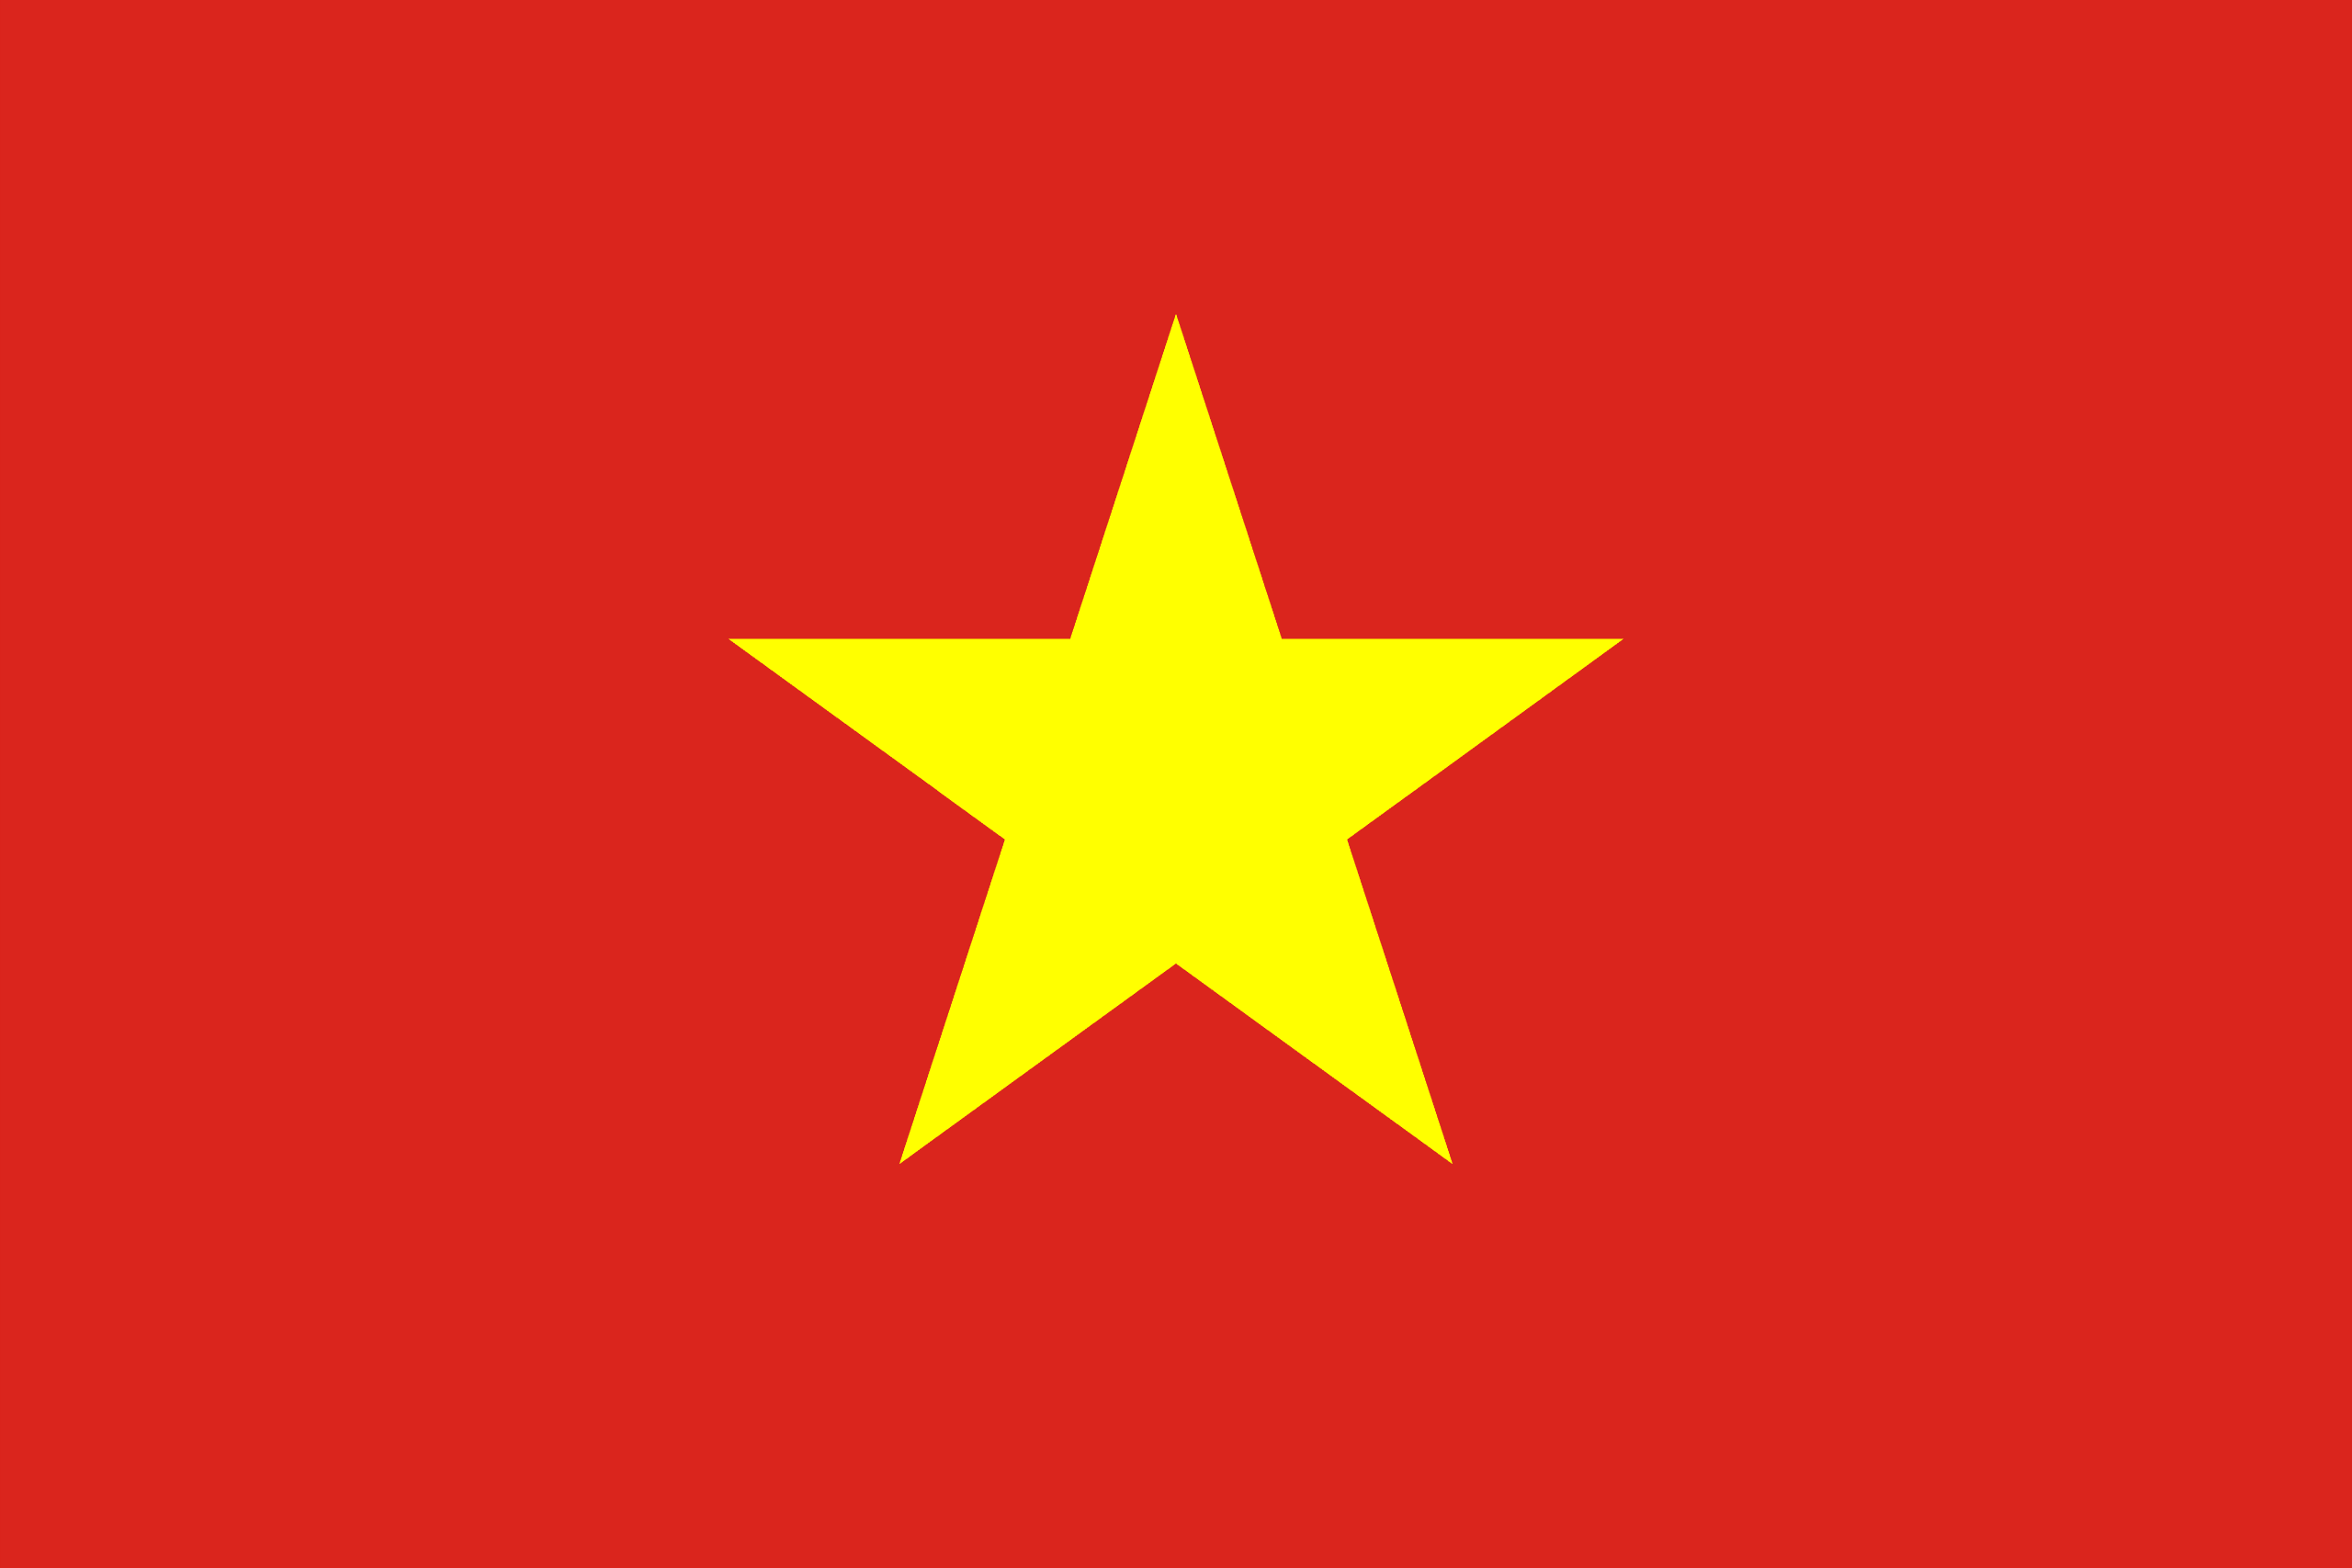

British Virgin Islands


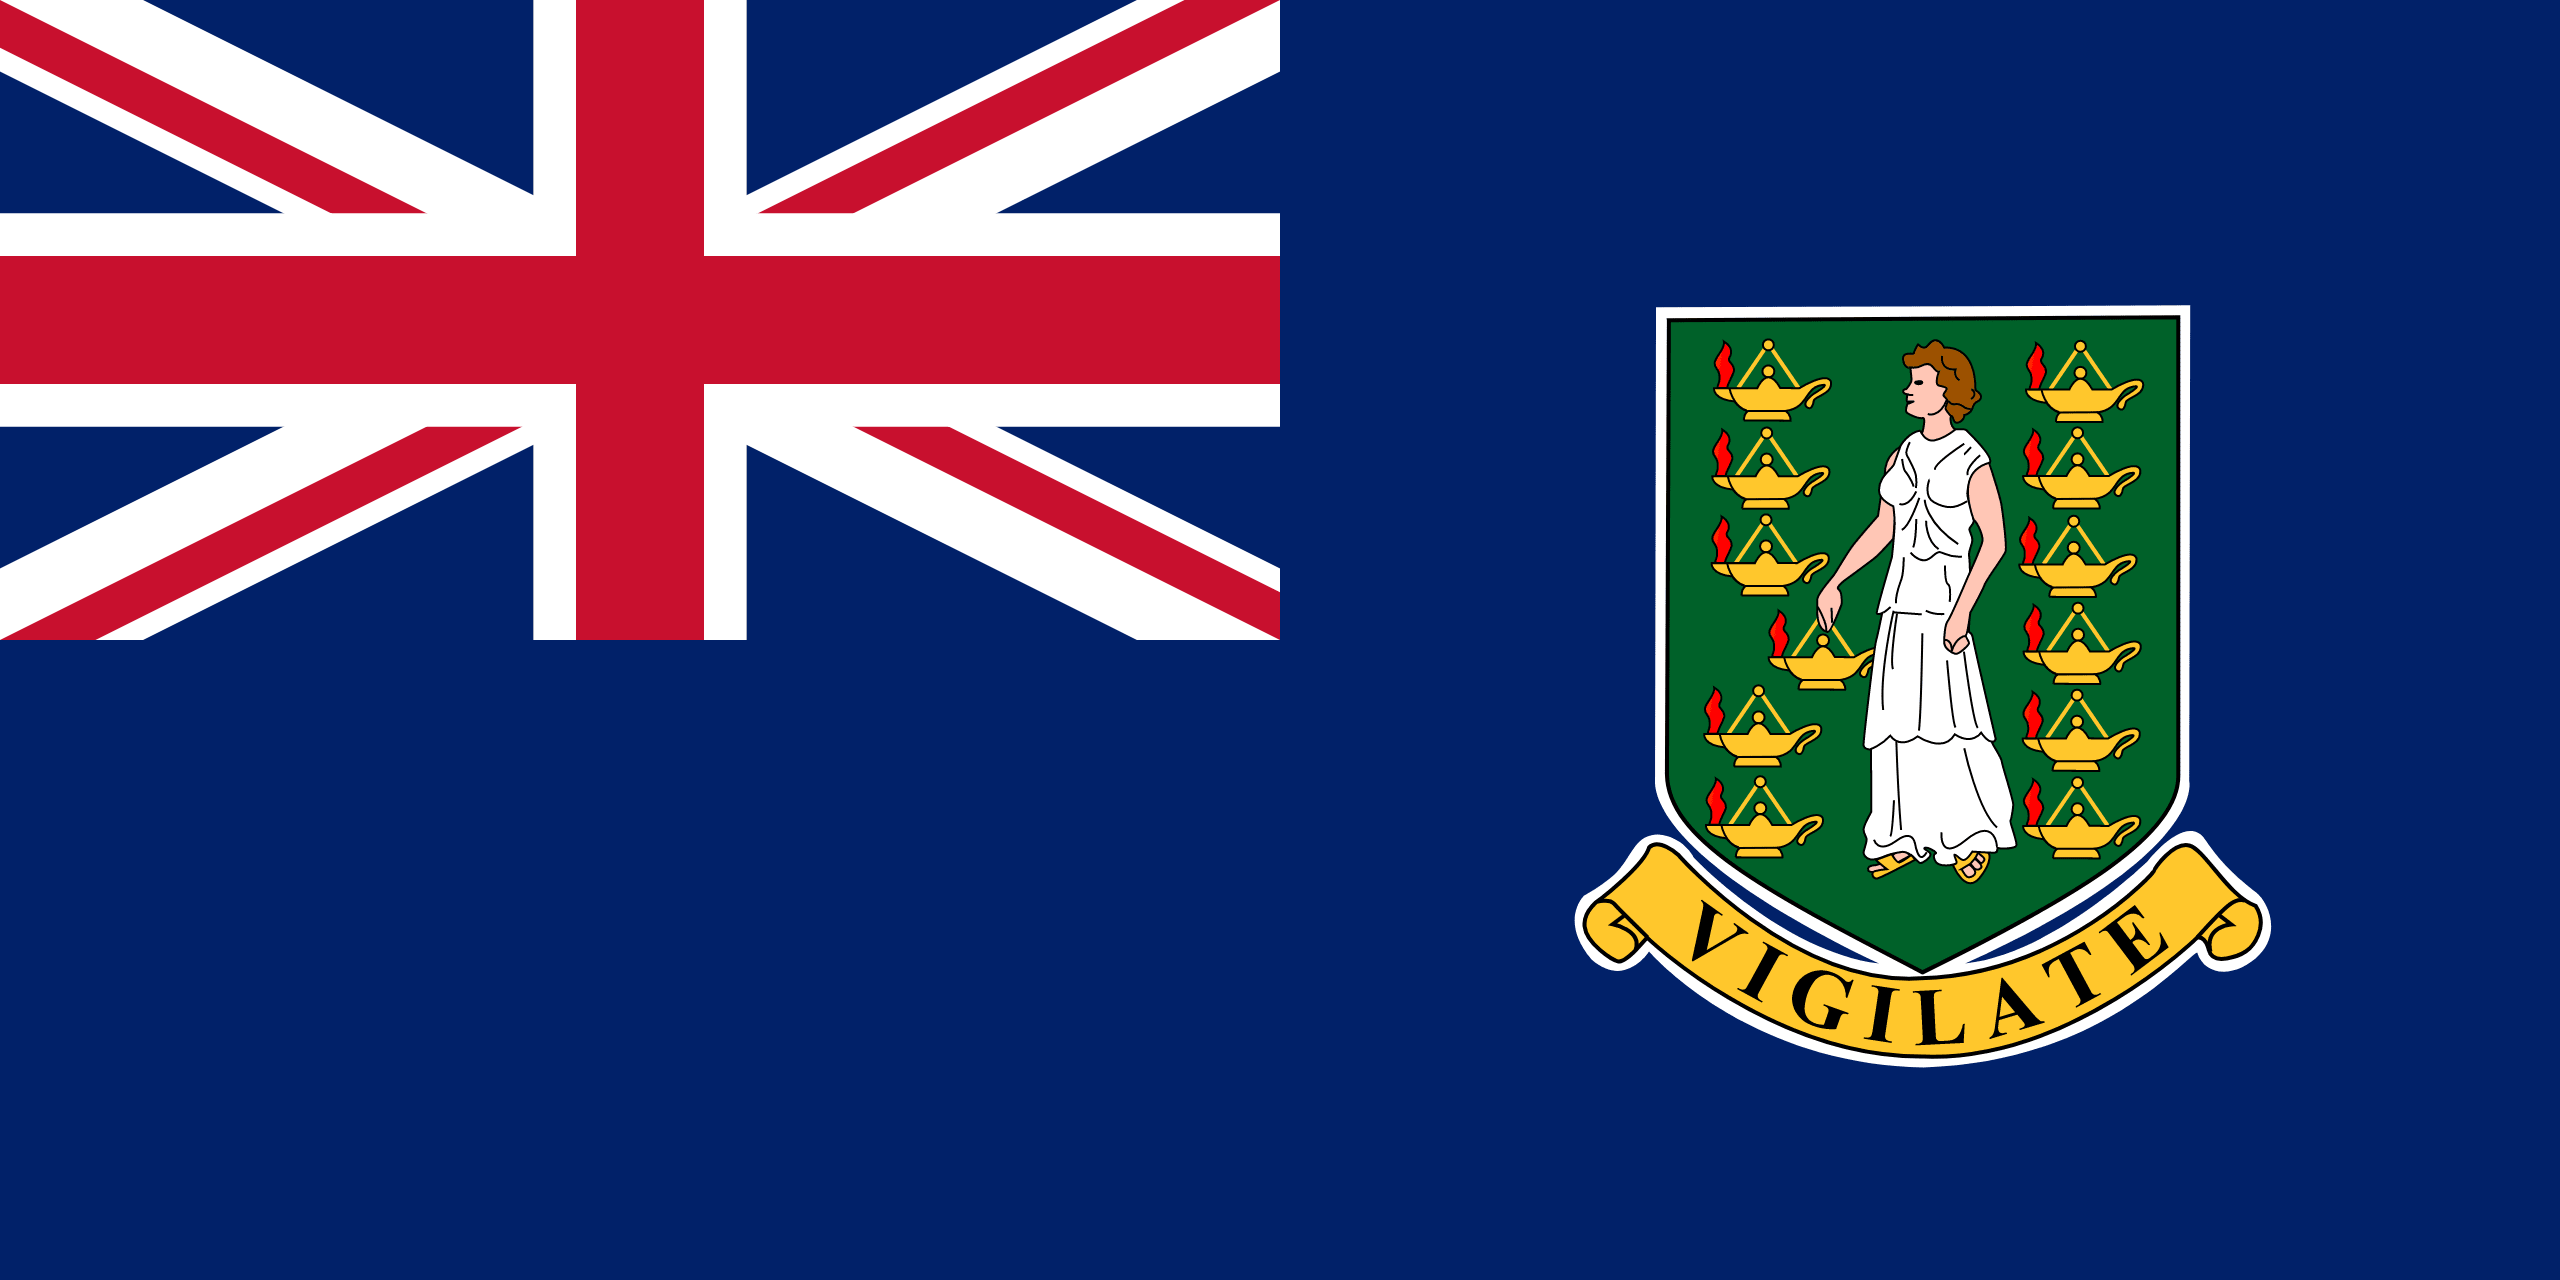

United States Virgin Islands


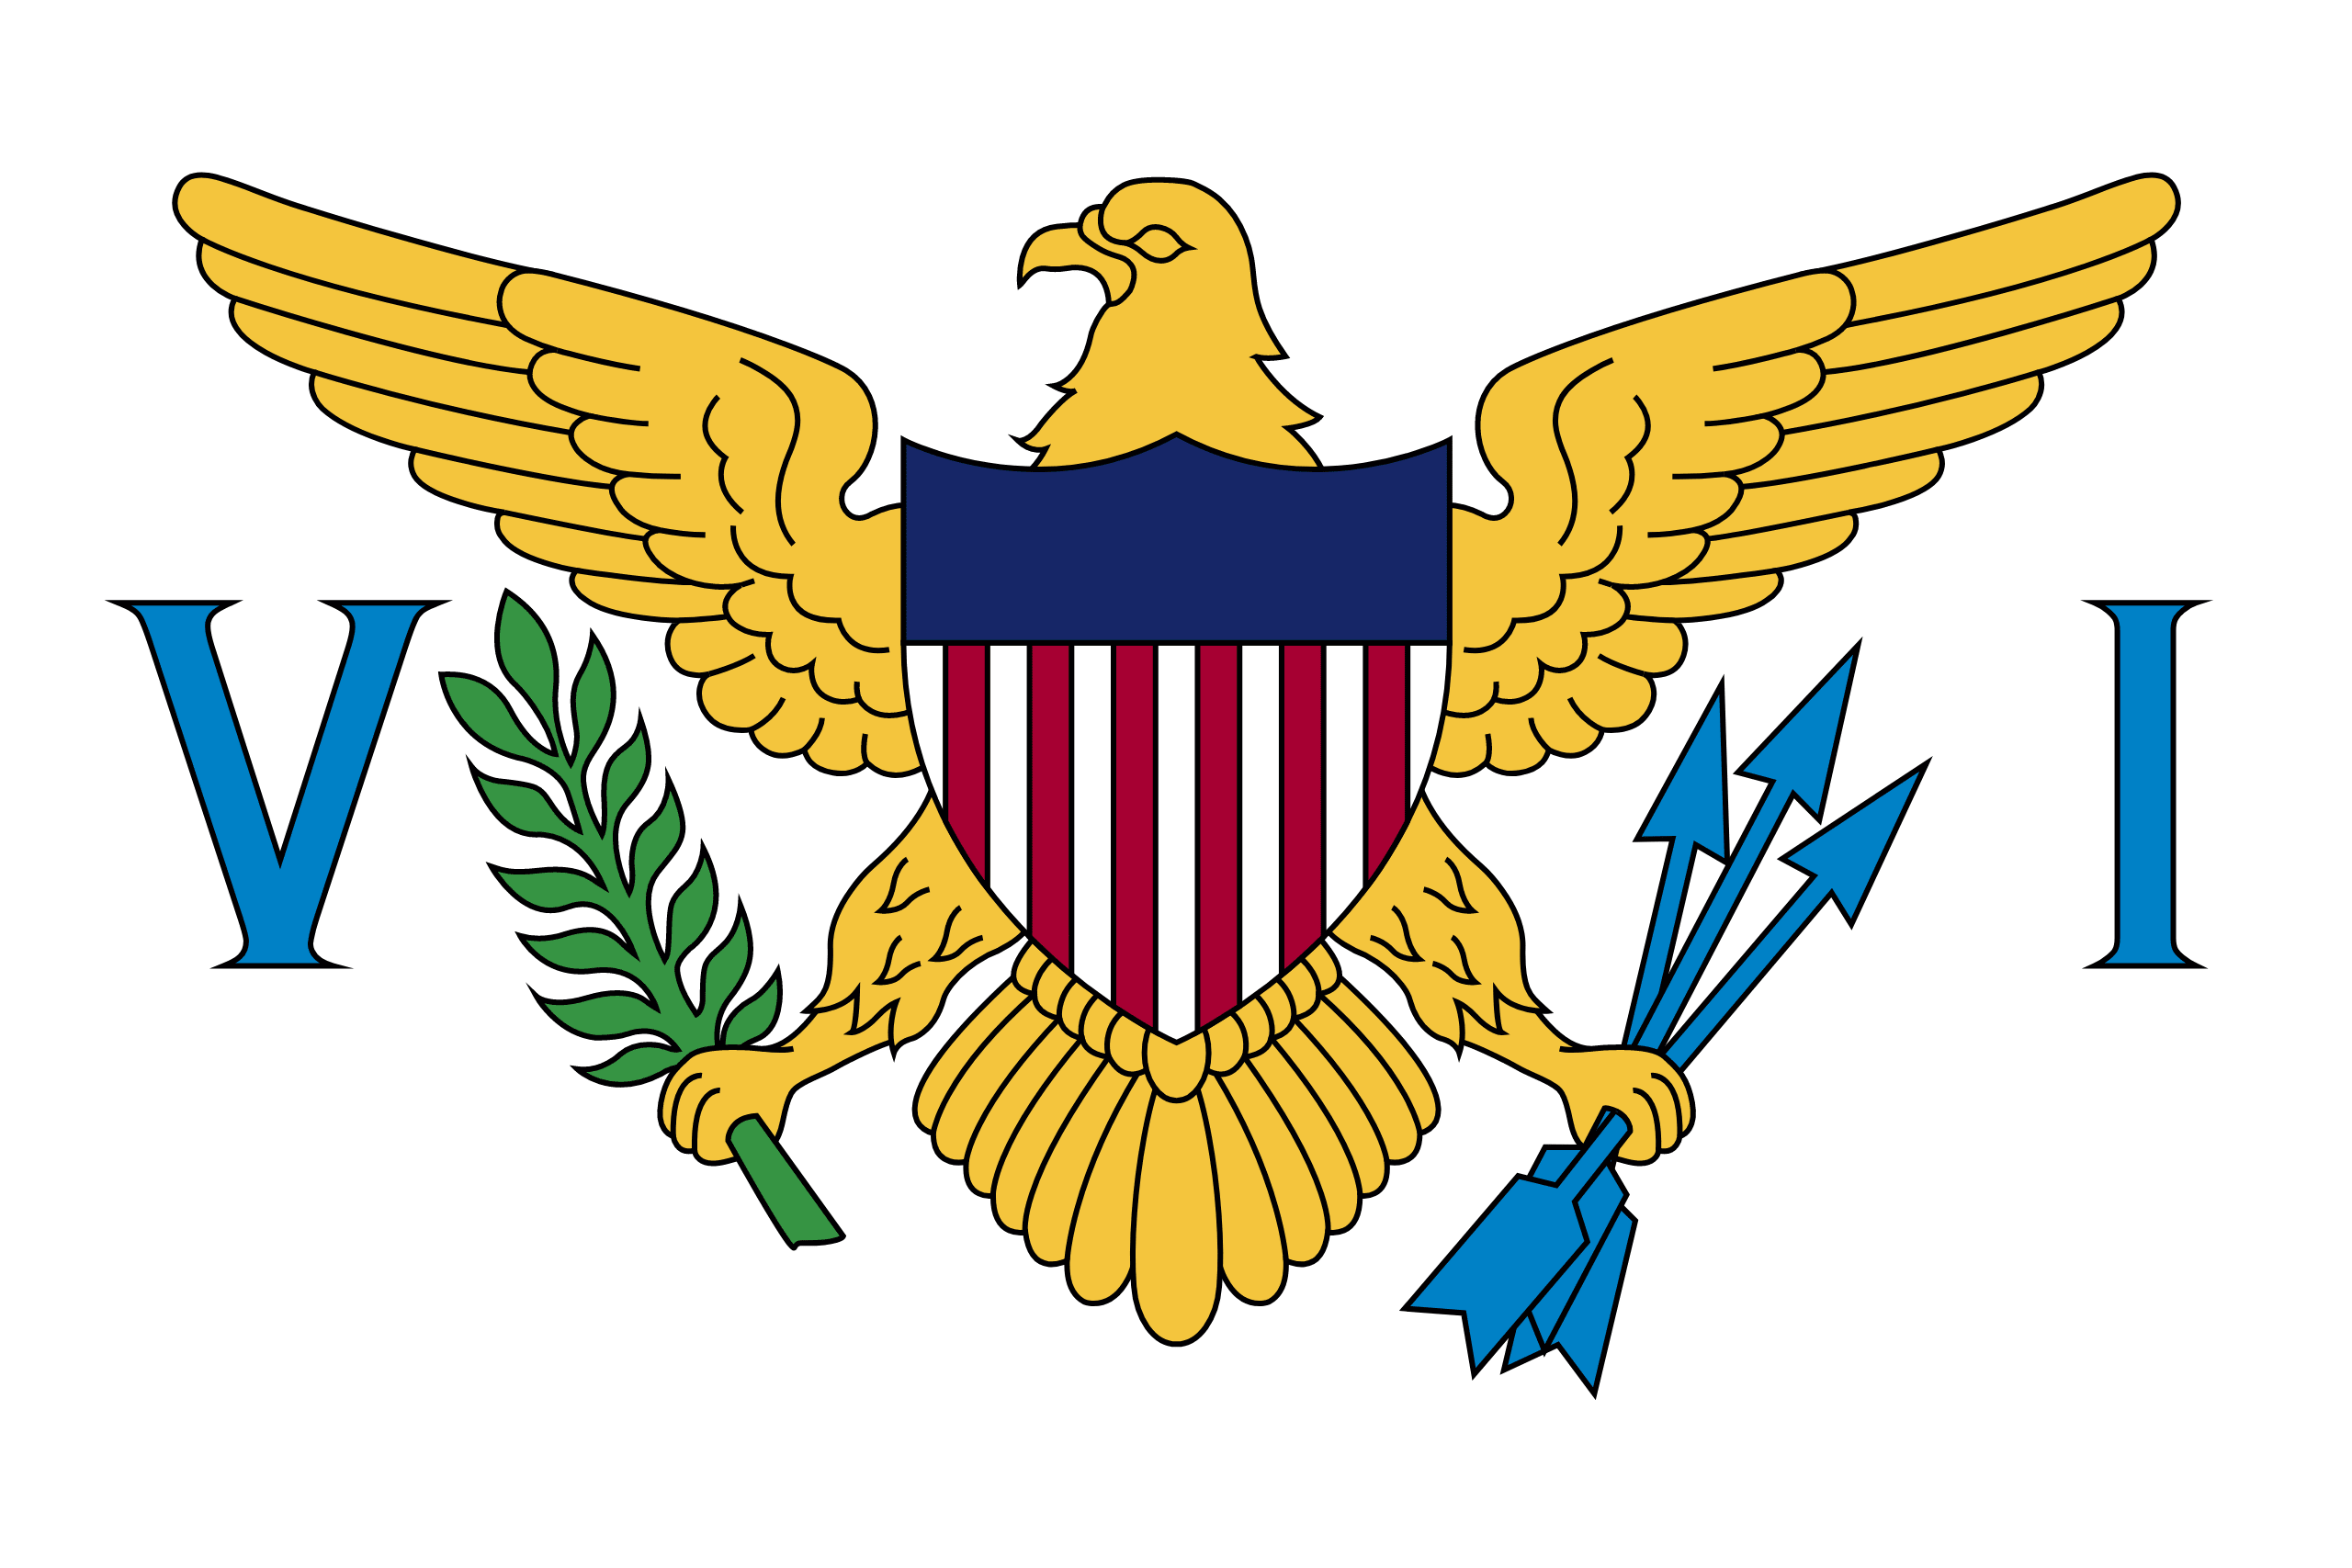

Wales


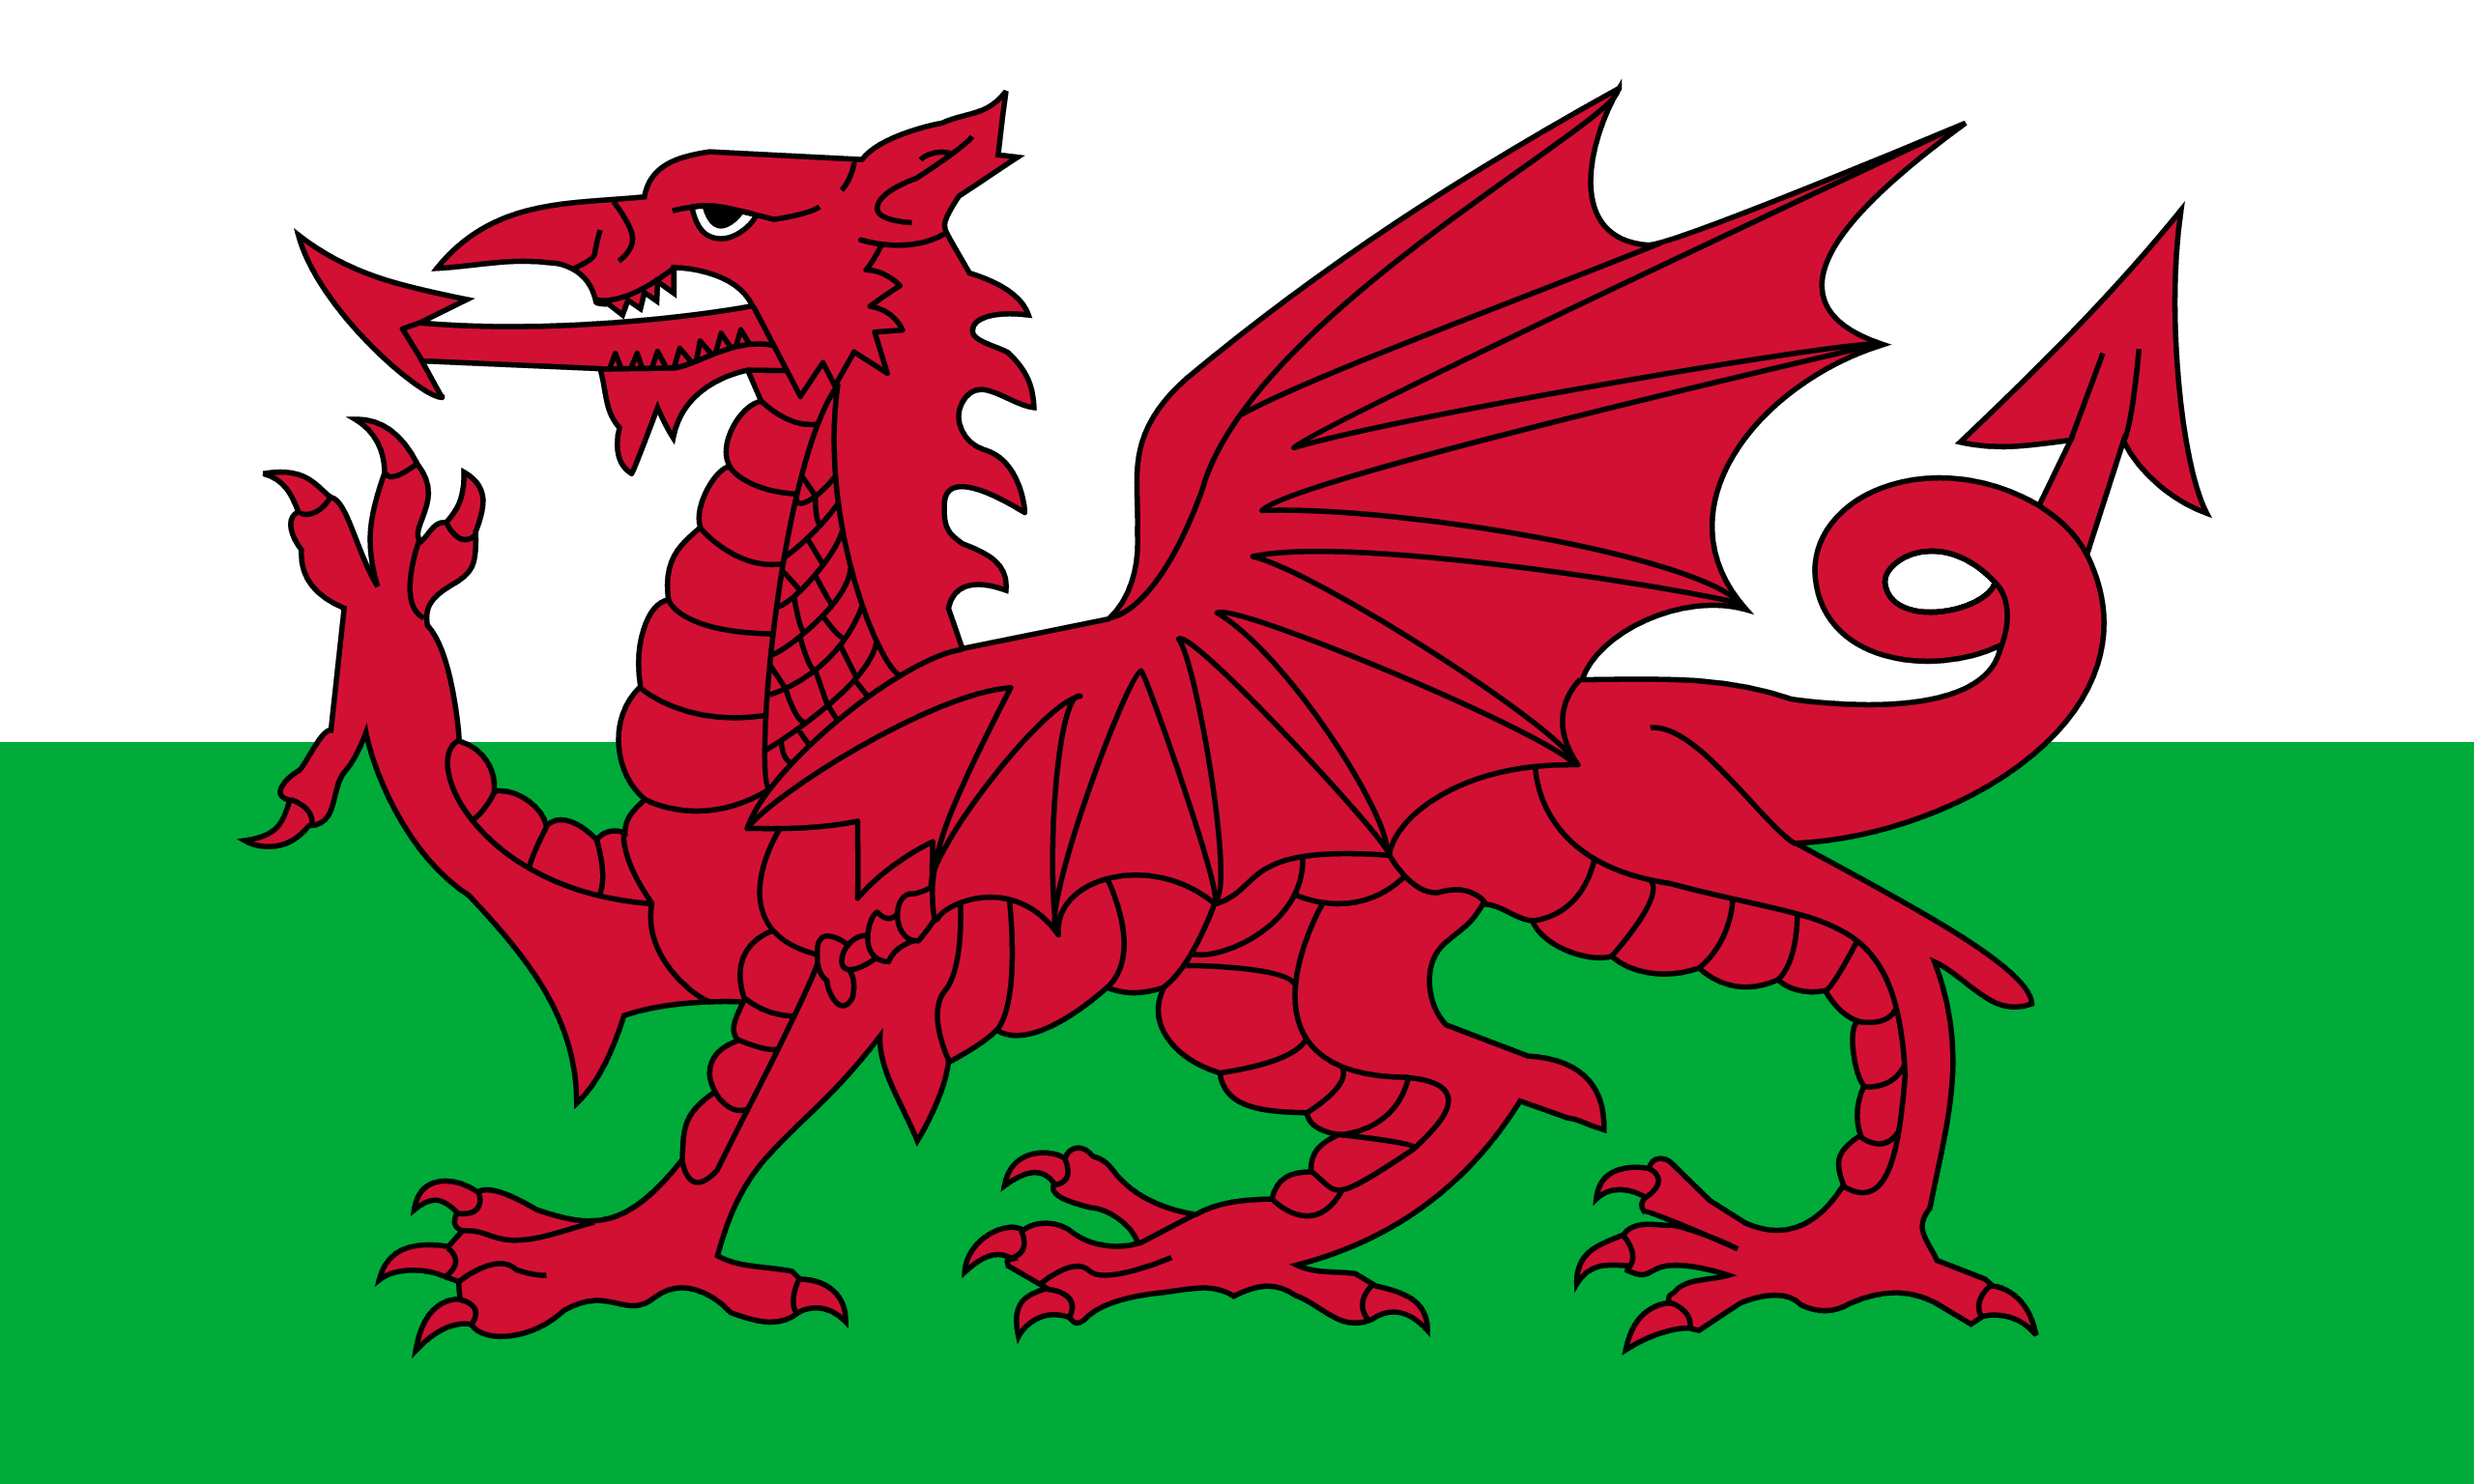

Wallis and Futuna


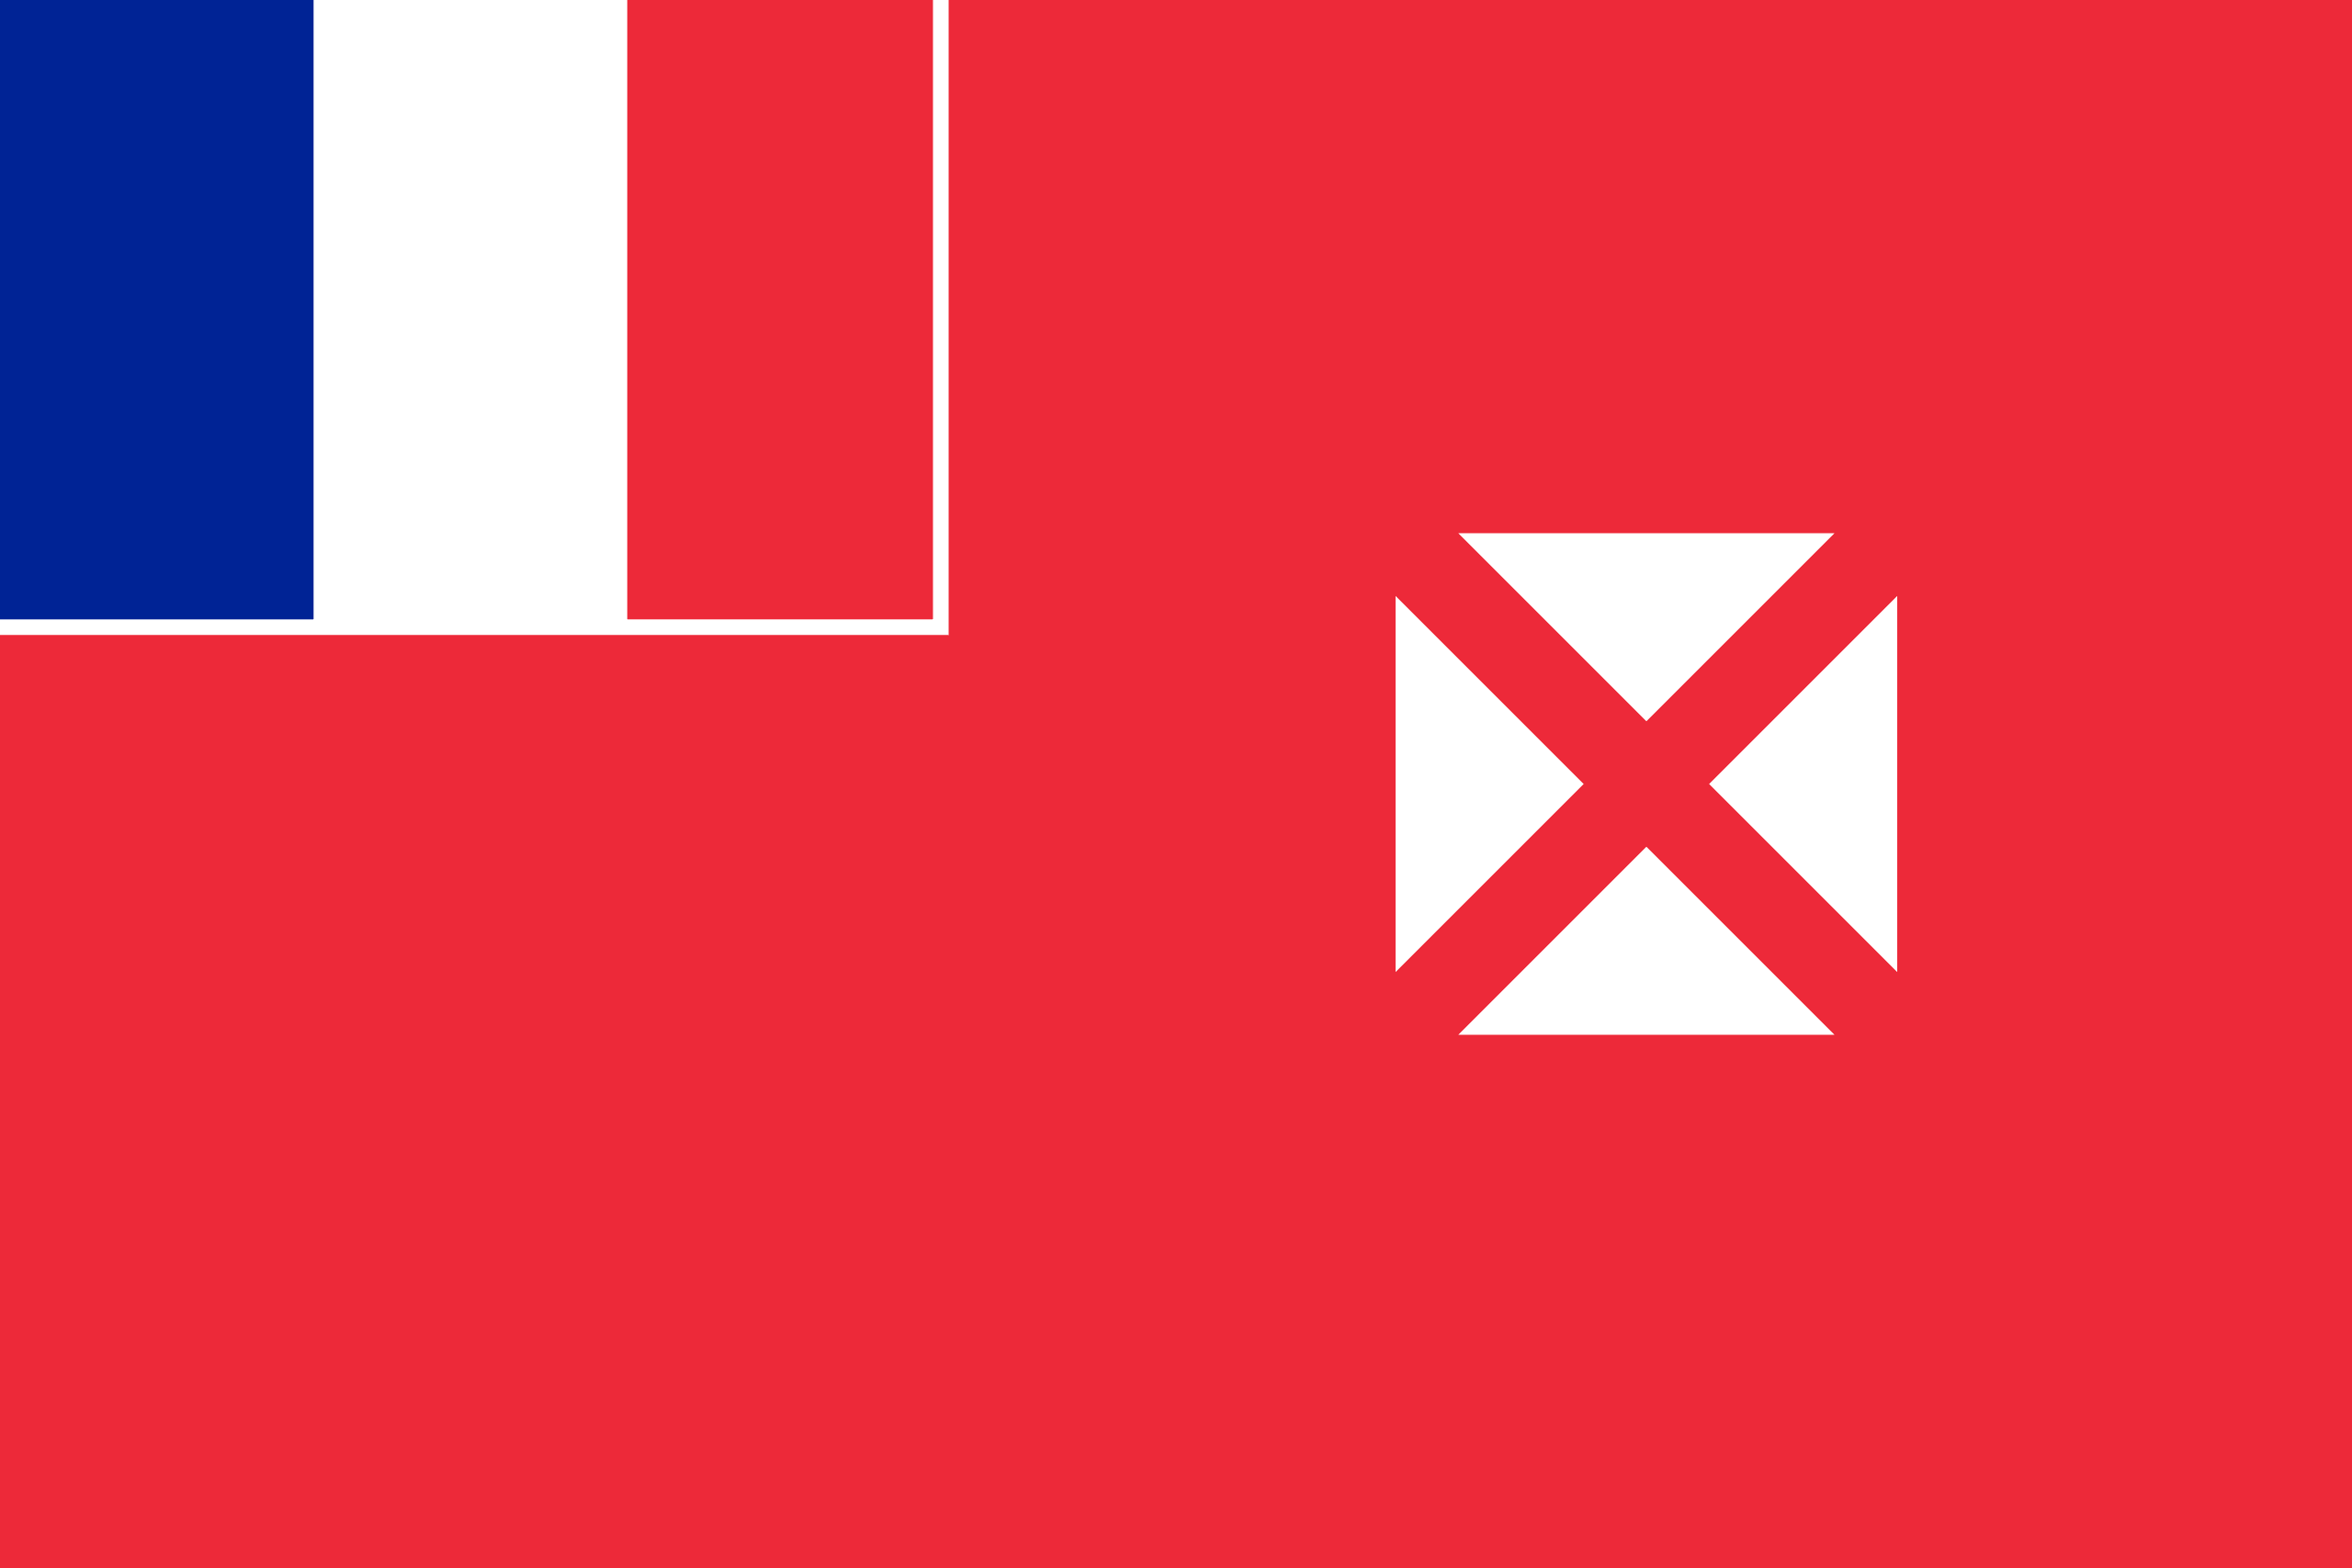

Western Sahara


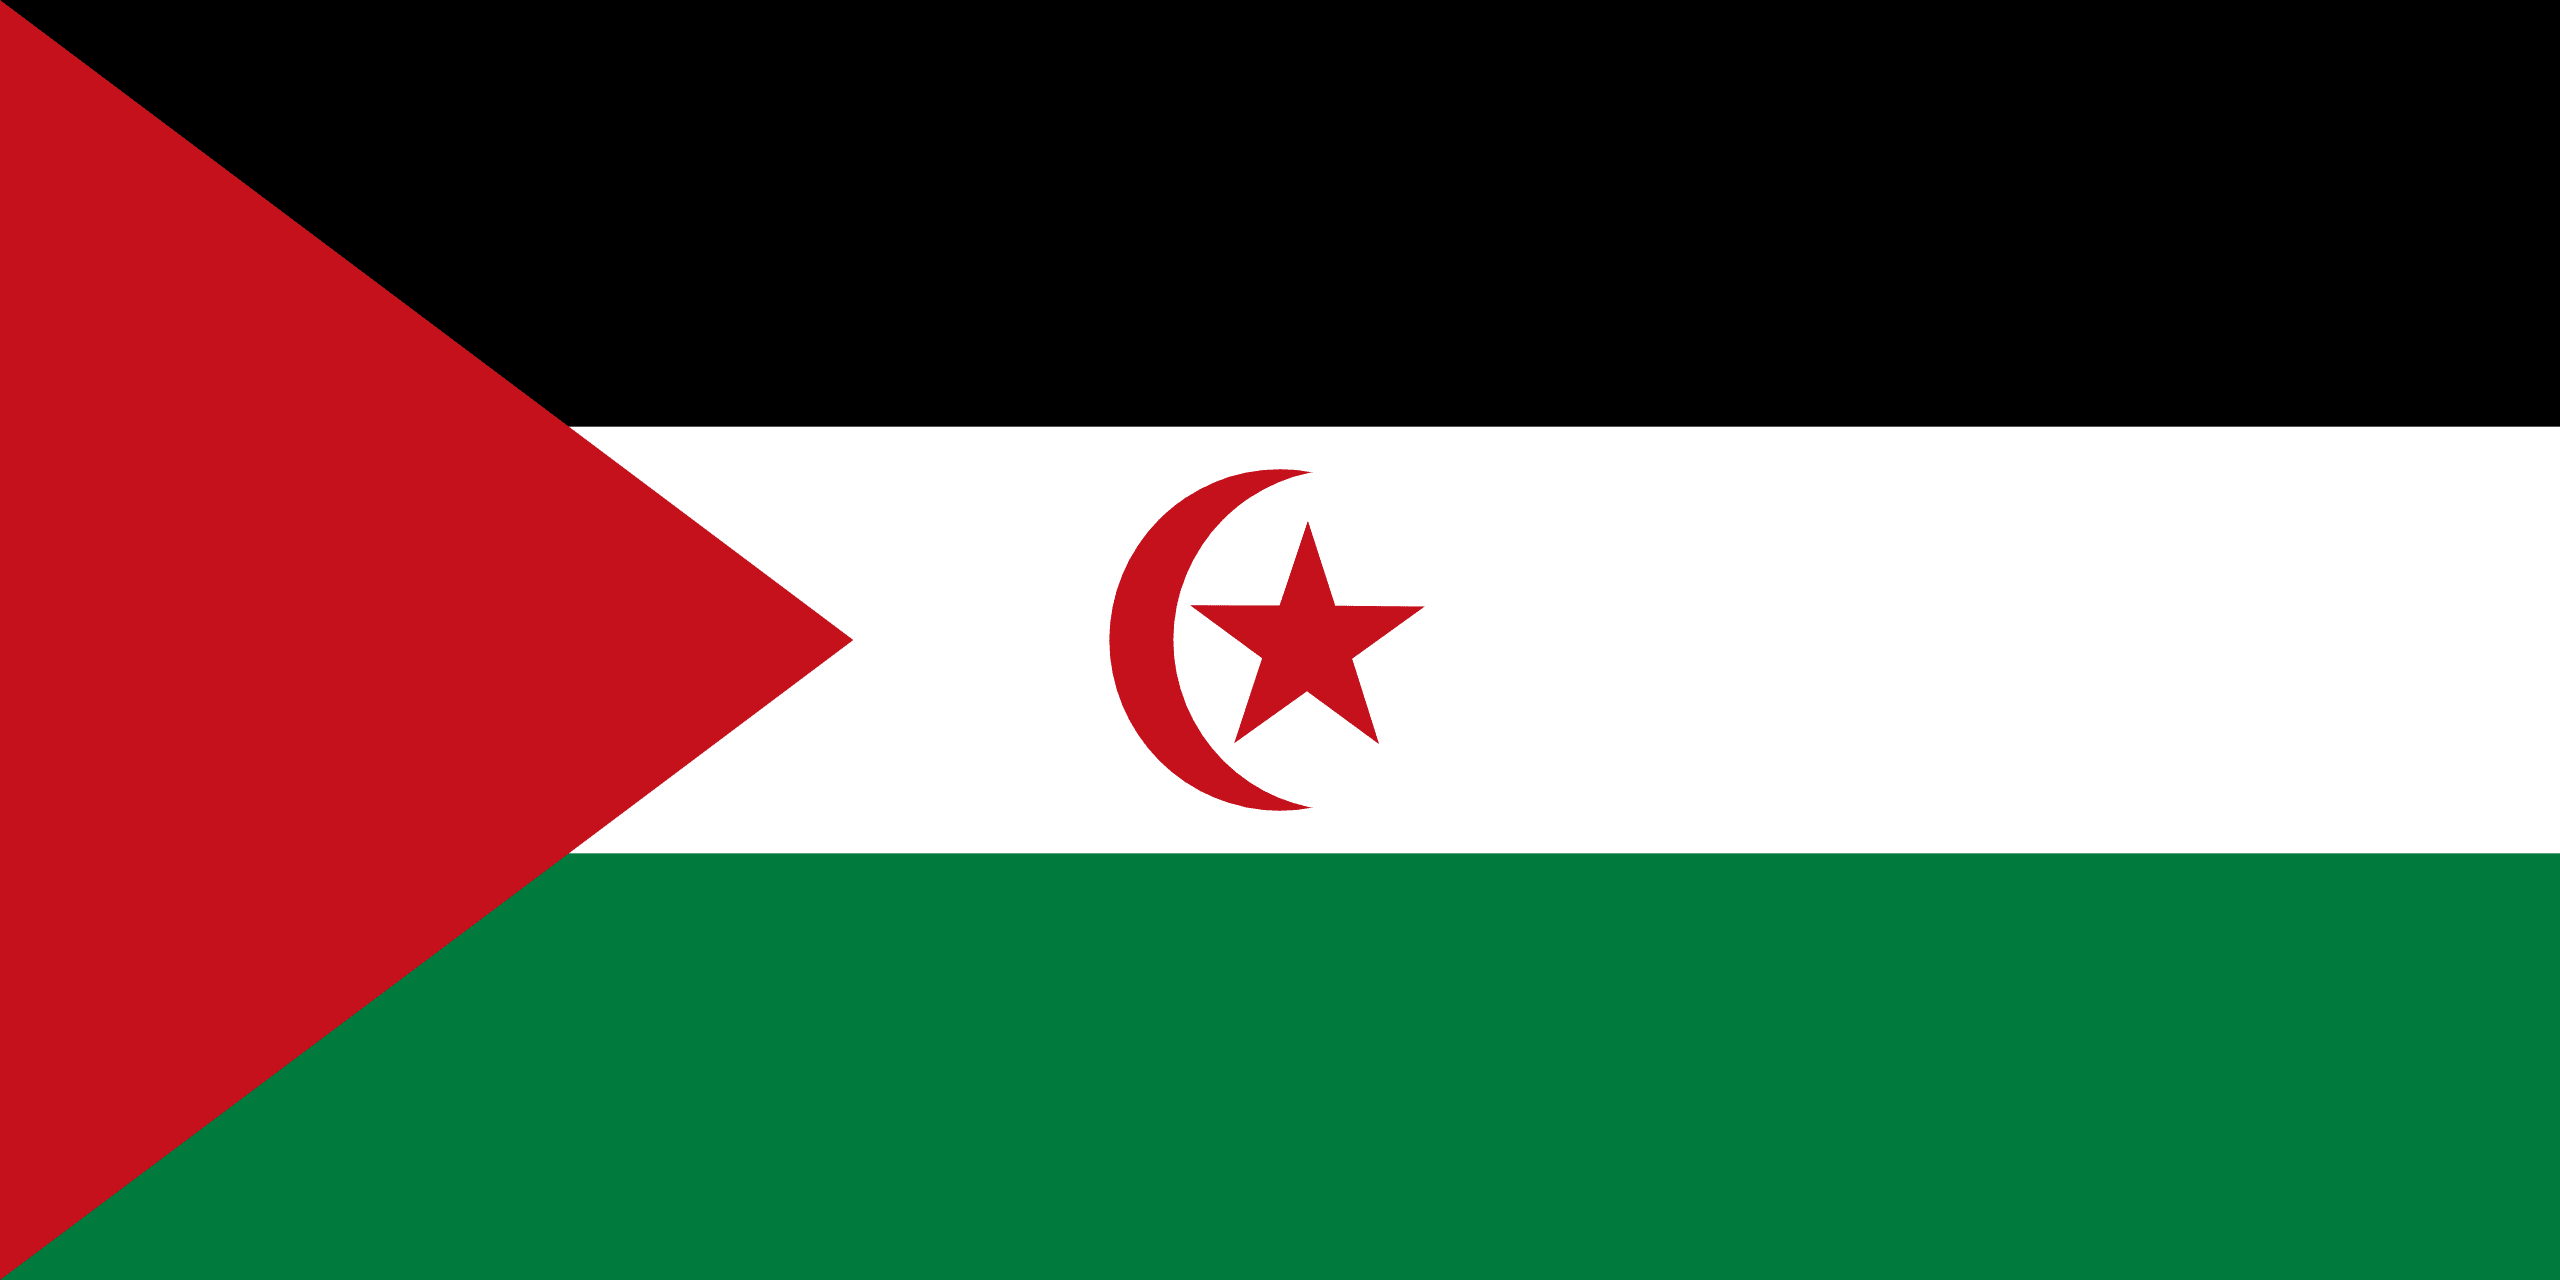

Yemen


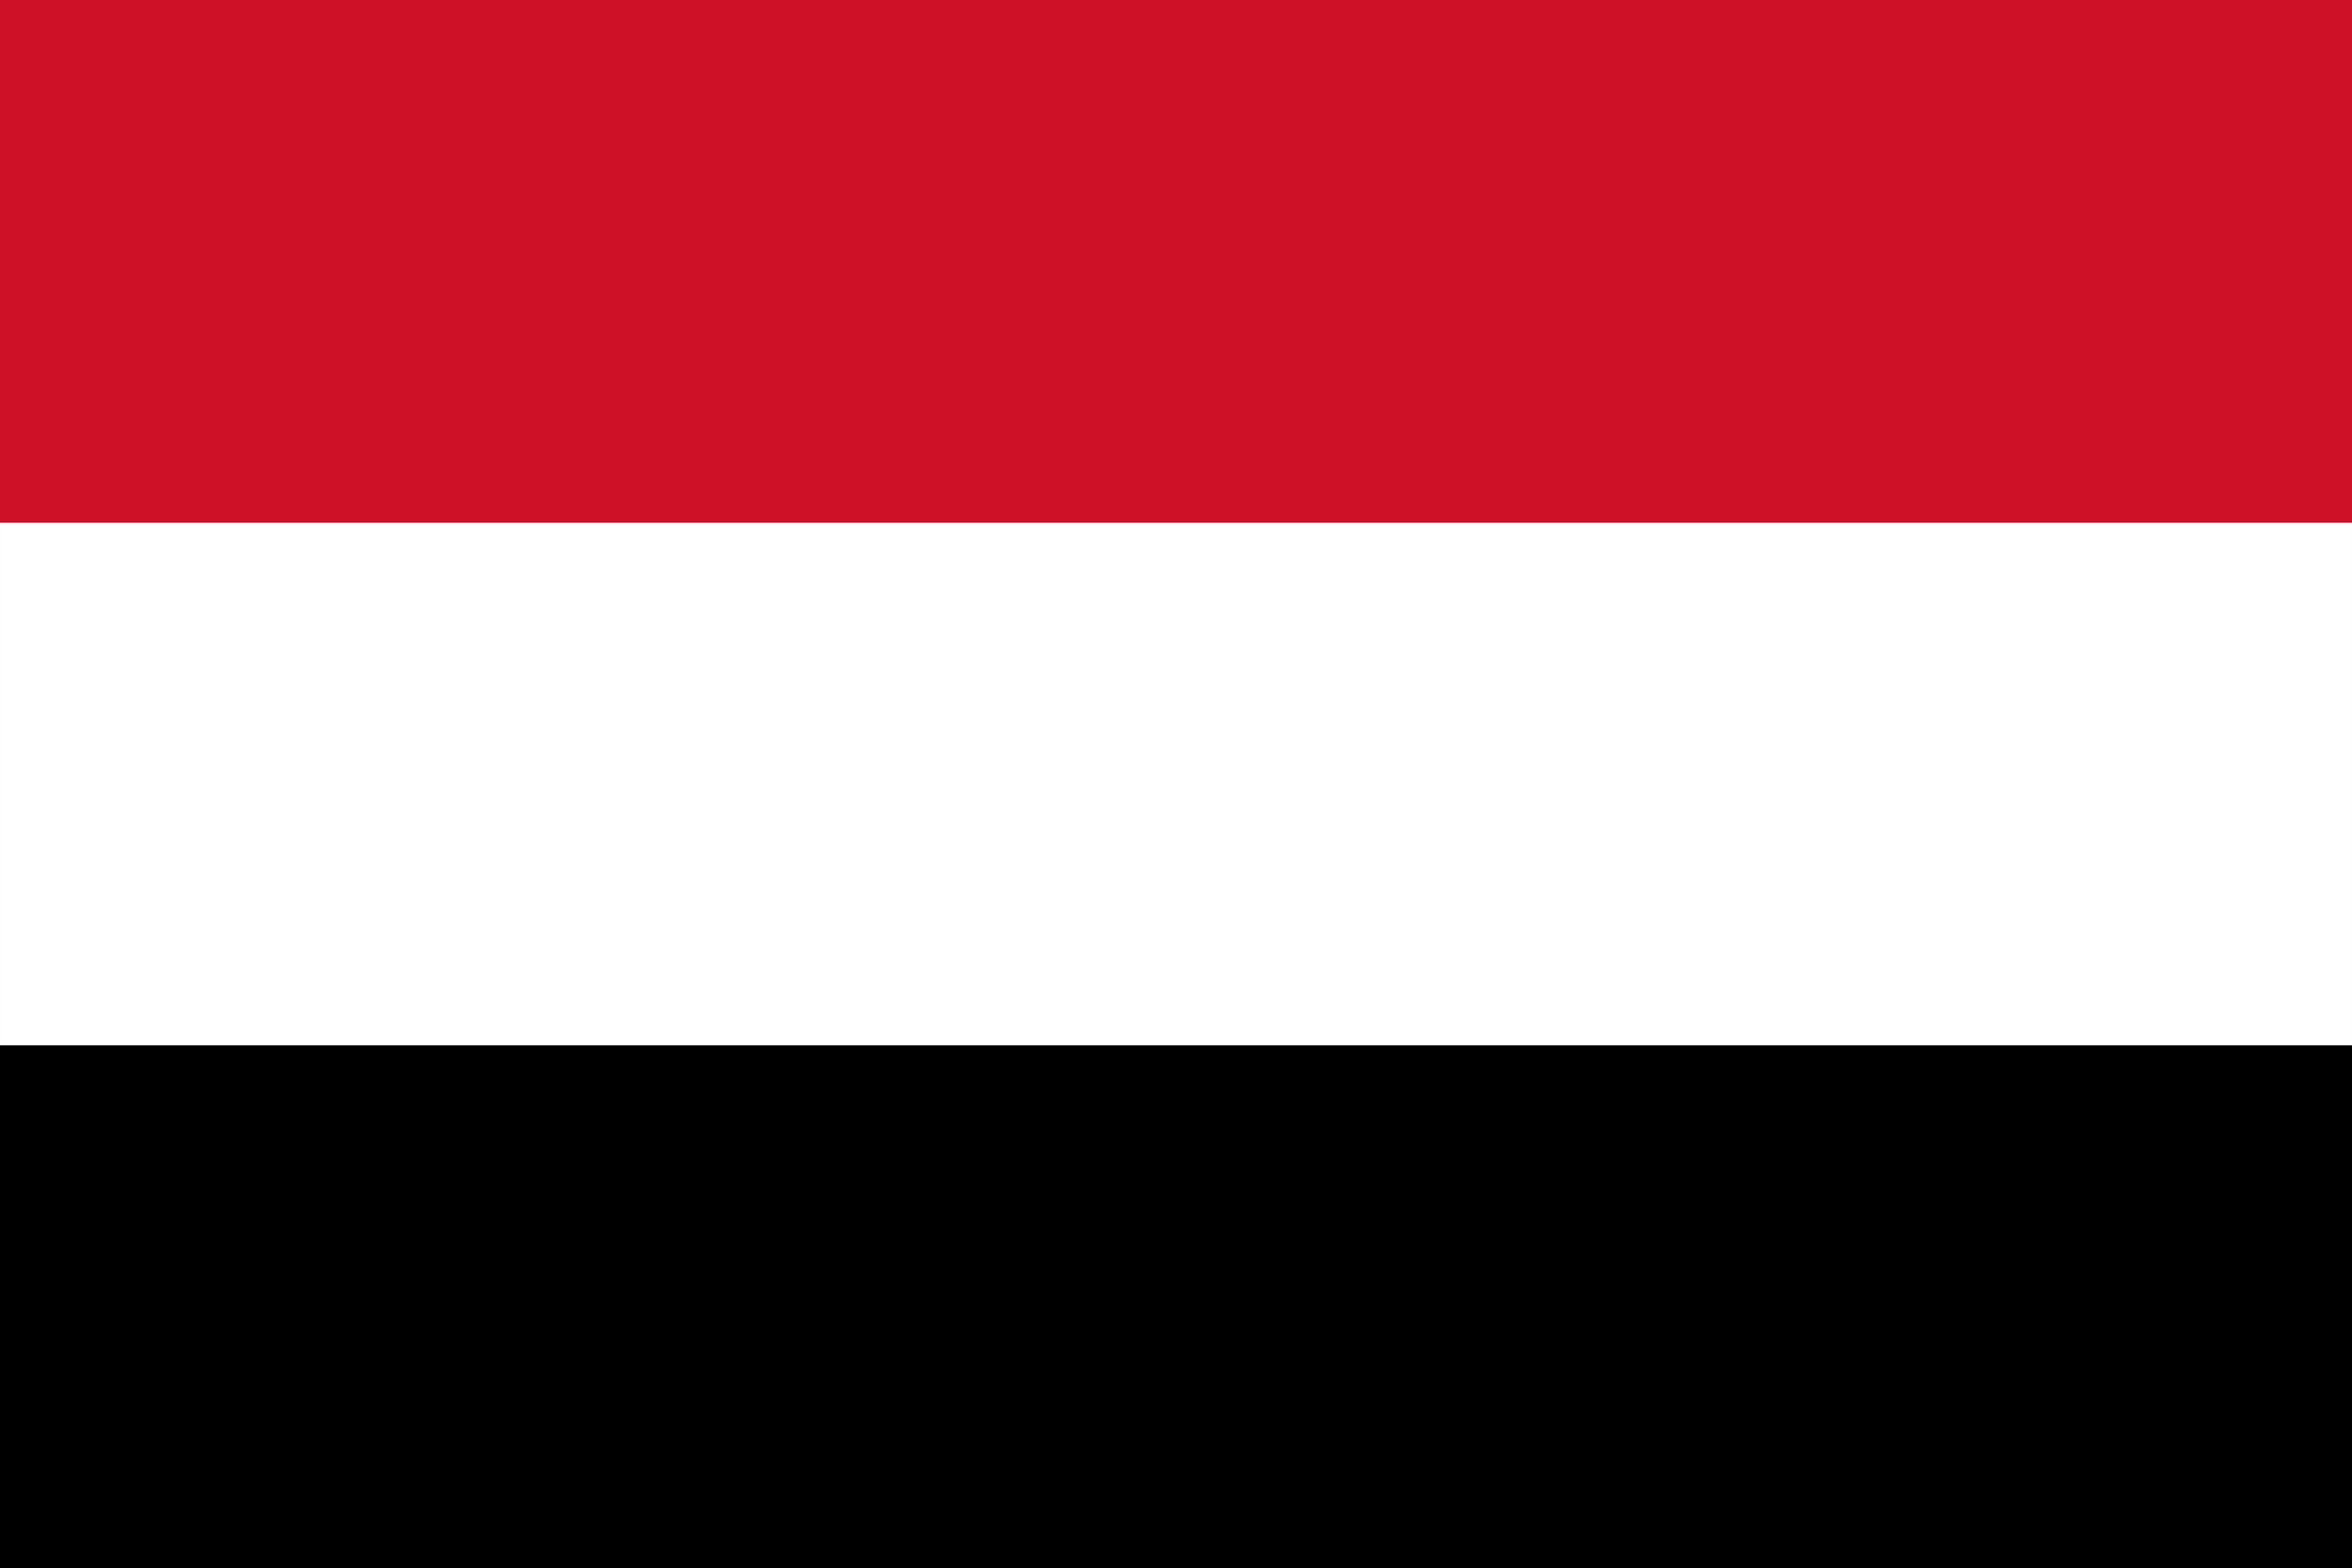

Zambia


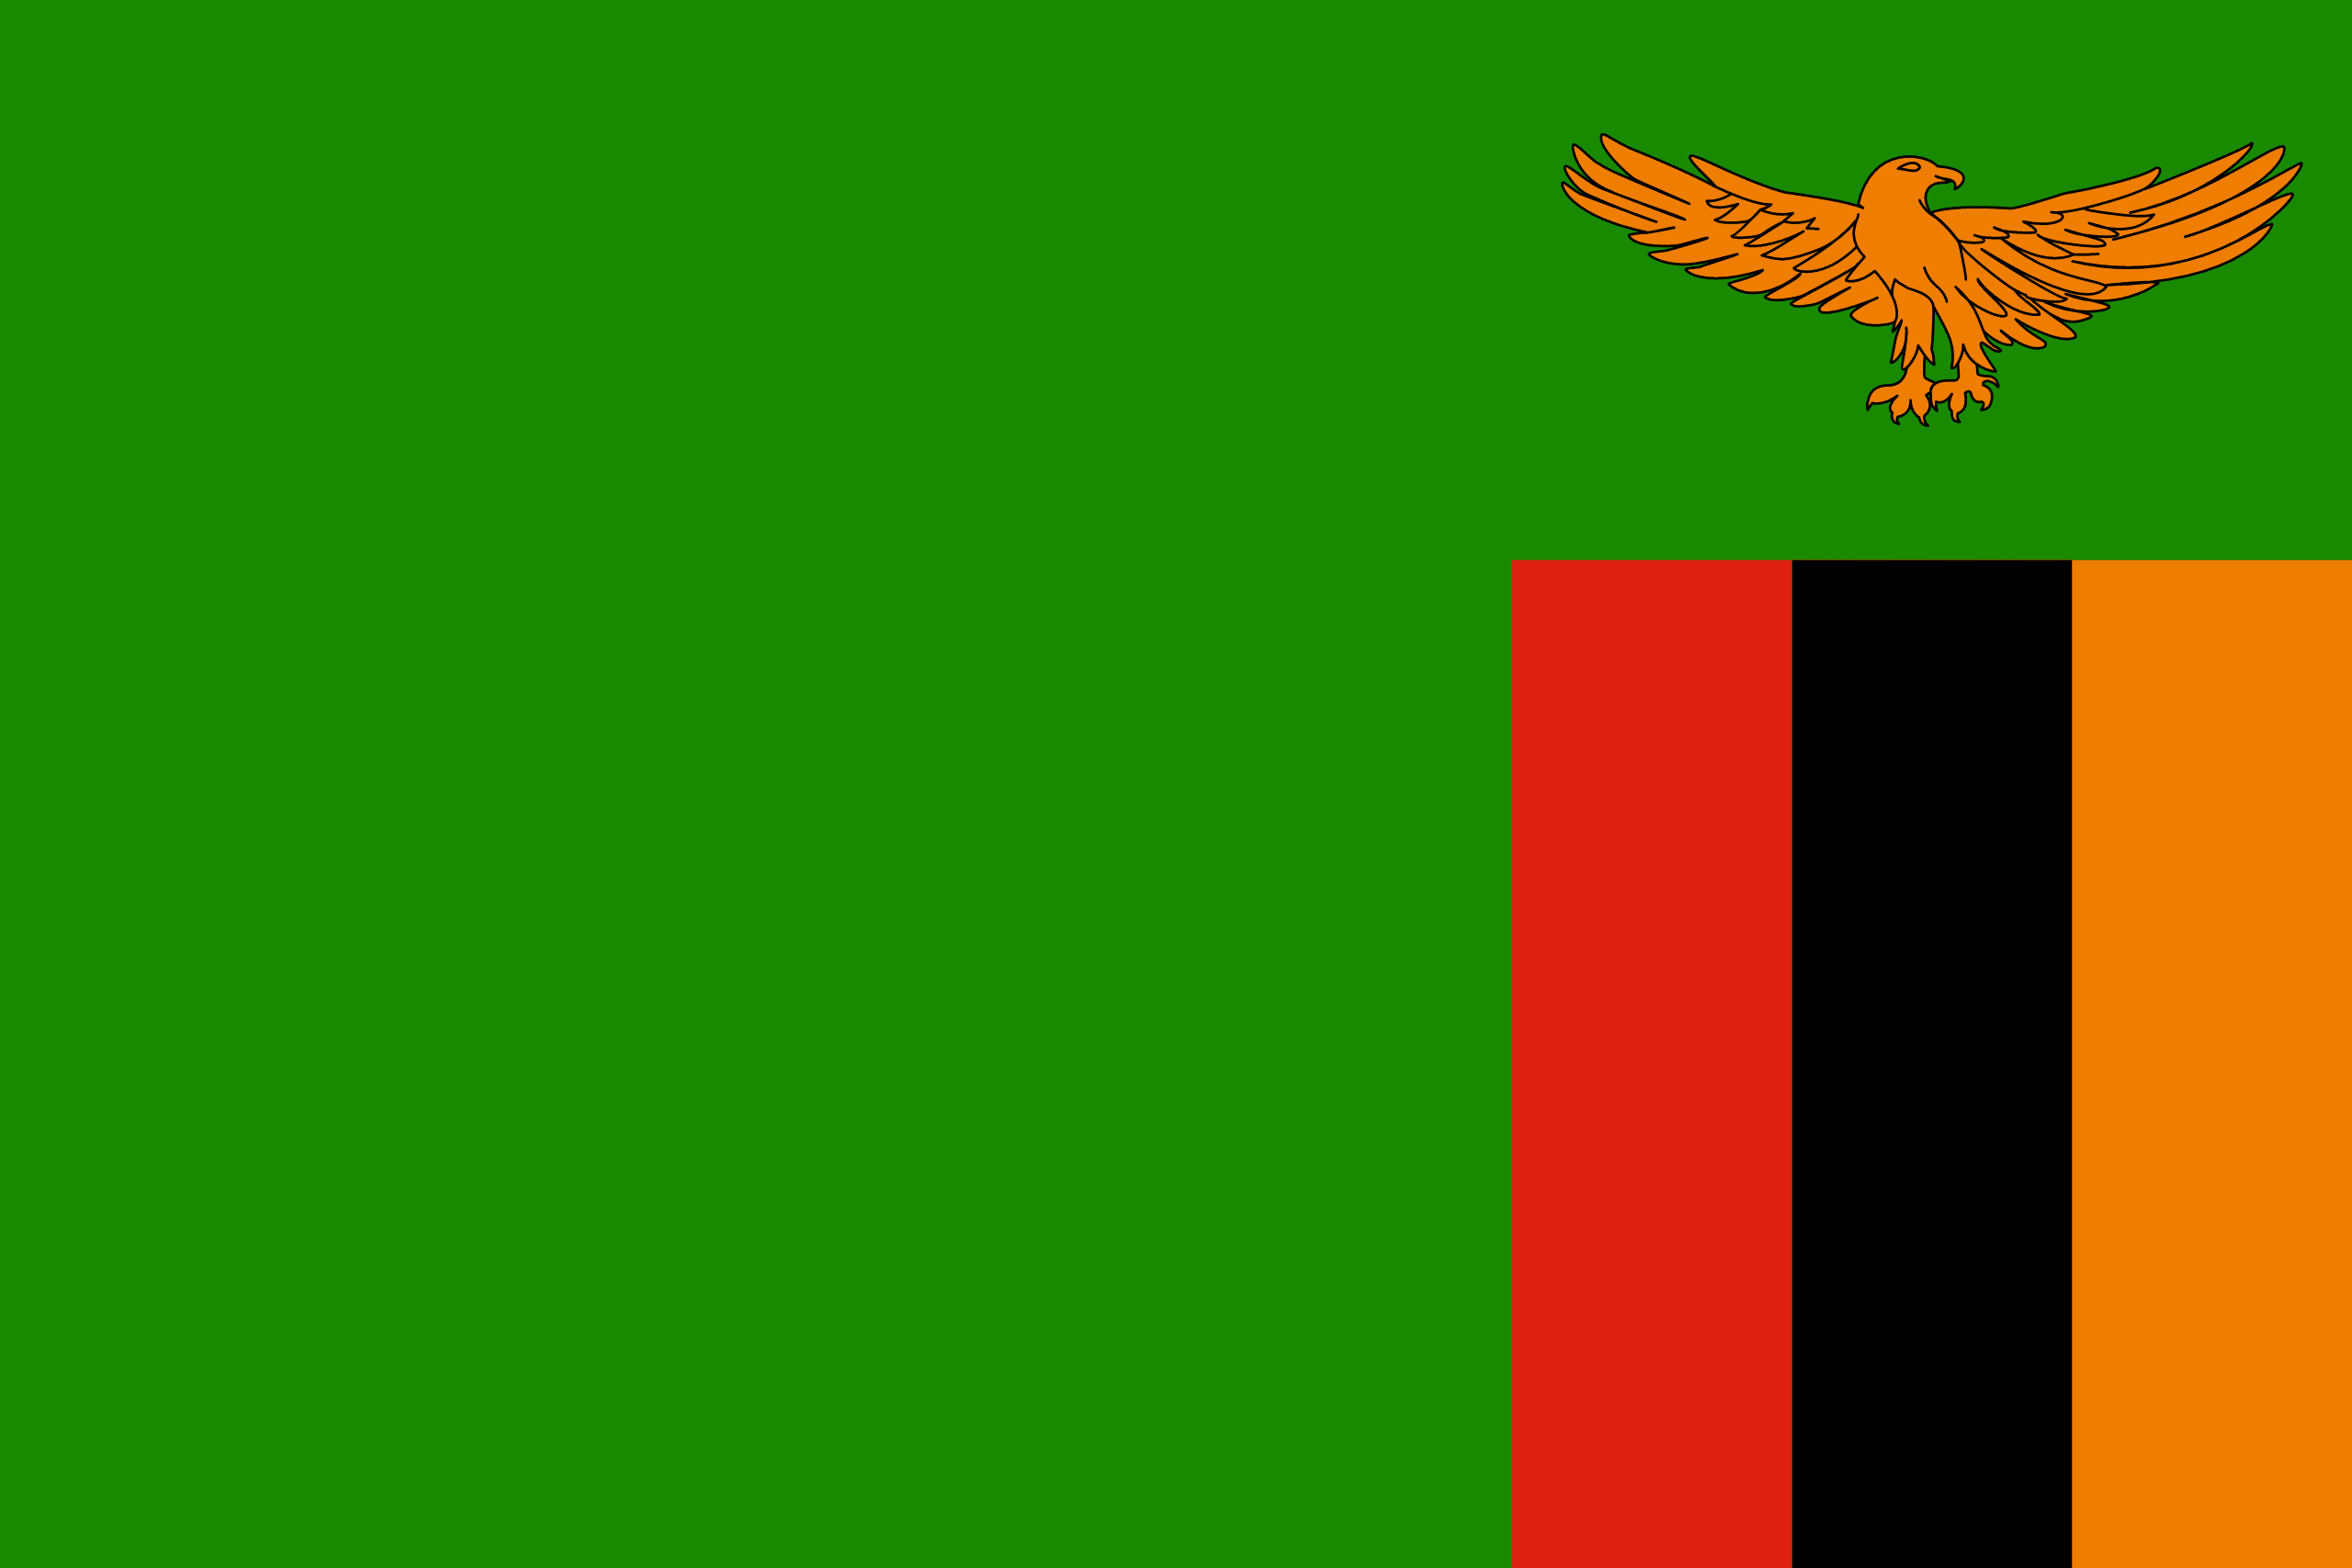

Zimbabwe


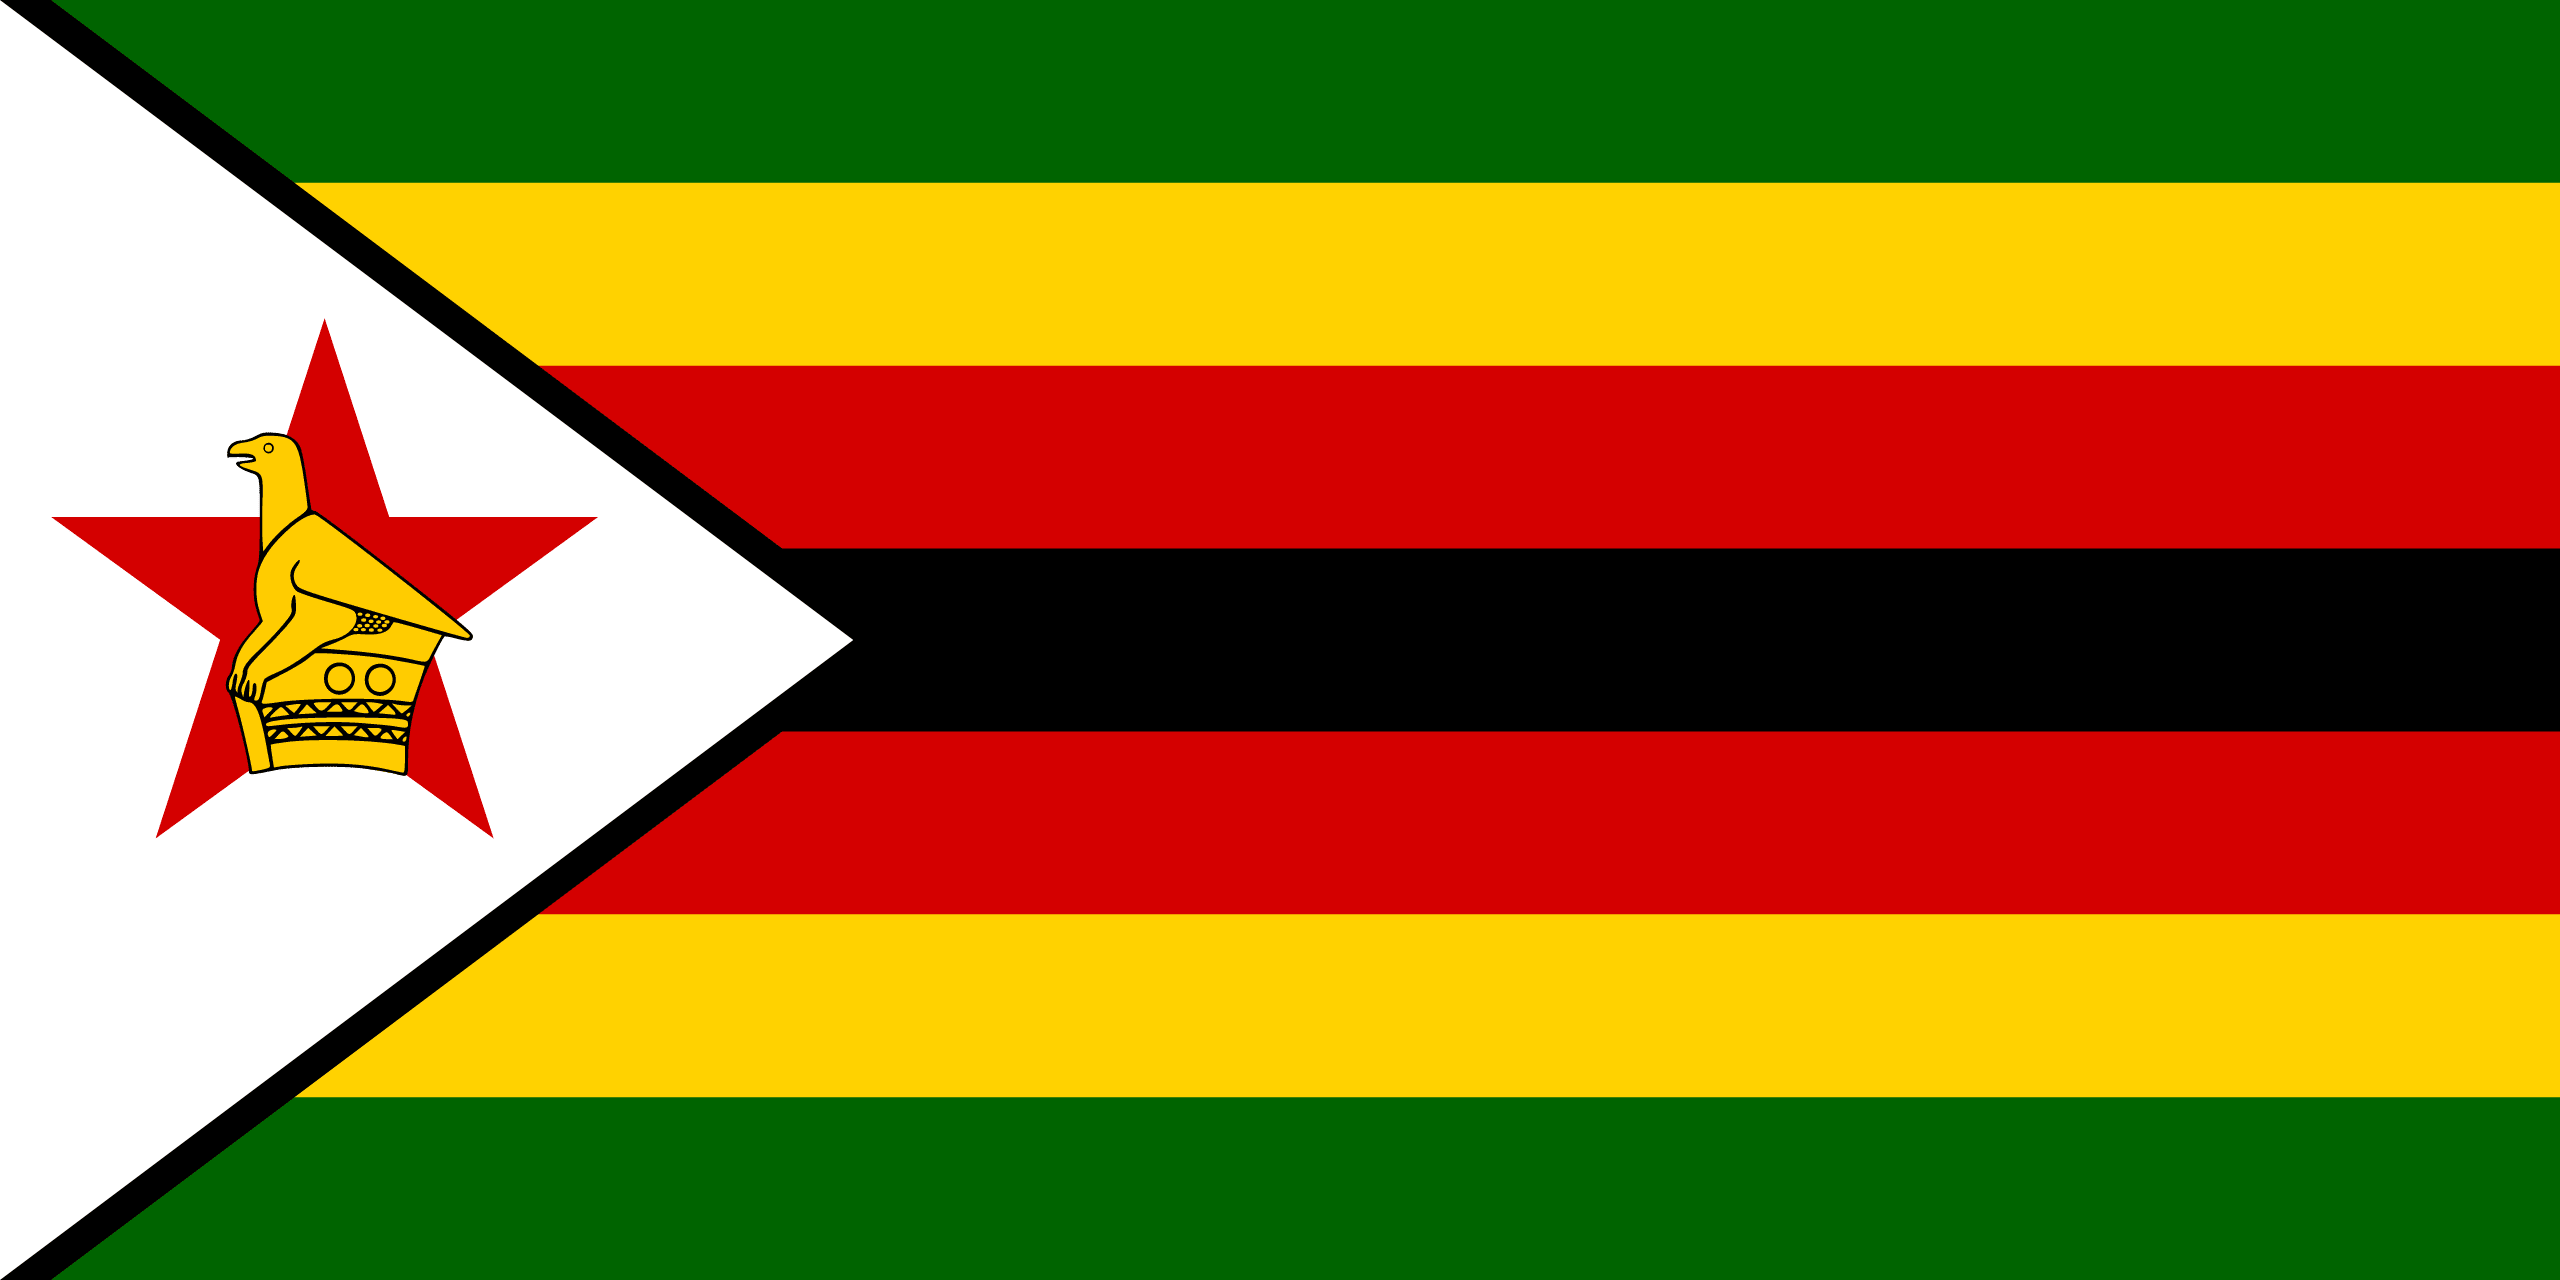

In [11]:
for k, v in countries_dict.items():
    lookup = k
    img_file = v
    file_loc = os.path.join(static_location, img_file)
    print(lookup)
    display(Image(filename=file_loc, width = 200, height = 50))

6.Create Dropdown ipywidgets
---
Finally, we can integrate all these components together with ipywidgets. We will create a dropdown to display all country names. As we select from the dropdown, the specified countries flag will get rendered.

In [11]:
country_list = list(countries_dict.keys())
interact(get_image, lookup=country_list);

interactive(children=(Dropdown(description='lookup', options=('Afghanistan', 'Åland Islands', 'Albania', 'Alge…